In [1]:
from transformers import pipeline
import numpy as np
from scipy.special import softmax
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
human_numbers = ["zero","one","two","three","four","five","six","seven","eight","nine","ten","eleven","twelve","thirteen","fourteen","fifteen","sixteen","seventeen","eighteen","nineteen","twenty","twenty one","twenty two","twenty three","twenty four","twenty five","twenty six","twenty seven","twenty eight","twenty nine","thirty","thirty one","thirty two","thirty three","thirty four","thirty five","thirty six","thirty seven","thirty eight","thirty nine","forty","forty one","forty two","forty three","forty four","forty five","forty six","forty seven","forty eight","forty nine","fifty","fifty one","fifty two","fifty three","fifty four","fifty five","fifty six","fifty seven","fifty eight","fifty nine","sixty","sixty one","sixty two","sixty three","sixty four","sixty five","sixty six","sixty seven","sixty eight","sixty nine","seventy","seventy one","seventy two","seventy three","seventy four","seventy five","seventy six","seventy seven","seventy eight","seventy nine","eighty","eighty one","eighty two","eighty three","eighty four","eighty five","eighty six","eighty seven","eighty eight","eighty nine","ninety","ninety one","ninety two","ninety three","ninety four","ninety five","ninety six","ninety seven","ninety eight","ninety nine","one hundred","one hundred one","one hundred two","one hundred three","one hundred four","one hundred five","one hundred six","one hundred seven","one hundred eight","one hundred nine","one hundred ten","one hundred eleven","one hundred twelve","one hundred thirteen","one hundred fourteen","one hundred fifteen","one hundred sixteen","one hundred seventeen","one hundred eighteen","one hundred nineteen","one hundred twenty","one hundred twenty one","one hundred twenty two","one hundred twenty three","one hundred twenty four","one hundred twenty five","one hundred twenty six","one hundred twenty seven","one hundred twenty eight","one hundred twenty nine","one hundred thirty","one hundred thirty one","one hundred thirty two","one hundred thirty three","one hundred thirty four","one hundred thirty five","one hundred thirty six","one hundred thirty seven","one hundred thirty eight","one hundred thirty nine","one hundred forty","one hundred forty one","one hundred forty two","one hundred forty three","one hundred forty four","one hundred forty five","one hundred forty six","one hundred forty seven","one hundred forty eight","one hundred forty nine","one hundred fifty","one hundred fifty one","one hundred fifty two","one hundred fifty three","one hundred fifty four","one hundred fifty five","one hundred fifty six","one hundred fifty seven","one hundred fifty eight","one hundred fifty nine","one hundred sixty","one hundred sixty one","one hundred sixty two","one hundred sixty three","one hundred sixty four","one hundred sixty five","one hundred sixty six","one hundred sixty seven","one hundred sixty eight","one hundred sixty nine","one hundred seventy","one hundred seventy one","one hundred seventy two","one hundred seventy three","one hundred seventy four","one hundred seventy five","one hundred seventy six","one hundred seventy seven","one hundred seventy eight","one hundred seventy nine","one hundred eighty","one hundred eighty one","one hundred eighty two","one hundred eighty three","one hundred eighty four","one hundred eighty five","one hundred eighty six","one hundred eighty seven","one hundred eighty eight","one hundred eighty nine","one hundred ninety","one hundred ninety one","one hundred ninety two","one hundred ninety three","one hundred ninety four","one hundred ninety five","one hundred ninety six","one hundred ninety seven","one hundred ninety eight","one hundred ninety nine","two hundred","two hundred one","two hundred two","two hundred three","two hundred four","two hundred five","two hundred six","two hundred seven","two hundred eight","two hundred nine","two hundred ten","two hundred eleven","two hundred twelve","two hundred thirteen","two hundred fourteen","two hundred fifteen","two hundred sixteen","two hundred seventeen","two hundred eighteen","two hundred nineteen","two hundred twenty","two hundred twenty one","two hundred twenty two","two hundred twenty three","two hundred twenty four","two hundred twenty five","two hundred twenty six","two hundred twenty seven","two hundred twenty eight","two hundred twenty nine","two hundred thirty","two hundred thirty one","two hundred thirty two","two hundred thirty three","two hundred thirty four","two hundred thirty five","two hundred thirty six","two hundred thirty seven","two hundred thirty eight","two hundred thirty nine","two hundred forty","two hundred forty one","two hundred forty two","two hundred forty three","two hundred forty four","two hundred forty five","two hundred forty six","two hundred forty seven","two hundred forty eight","two hundred forty nine","two hundred fifty","two hundred fifty one","two hundred fifty two","two hundred fifty three","two hundred fifty four","two hundred fifty five","two hundred fifty six","two hundred fifty seven","two hundred fifty eight","two hundred fifty nine","two hundred sixty","two hundred sixty one","two hundred sixty two","two hundred sixty three","two hundred sixty four","two hundred sixty five","two hundred sixty six","two hundred sixty seven","two hundred sixty eight","two hundred sixty nine","two hundred seventy","two hundred seventy one","two hundred seventy two","two hundred seventy three","two hundred seventy four","two hundred seventy five","two hundred seventy six","two hundred seventy seven","two hundred seventy eight","two hundred seventy nine","two hundred eighty","two hundred eighty one","two hundred eighty two","two hundred eighty three","two hundred eighty four","two hundred eighty five","two hundred eighty six","two hundred eighty seven","two hundred eighty eight","two hundred eighty nine","two hundred ninety","two hundred ninety one","two hundred ninety two","two hundred ninety three","two hundred ninety four","two hundred ninety five","two hundred ninety six","two hundred ninety seven","two hundred ninety eight","two hundred ninety nine","three hundred","three hundred one","three hundred two","three hundred three","three hundred four","three hundred five","three hundred six","three hundred seven","three hundred eight","three hundred nine","three hundred ten","three hundred eleven","three hundred twelve","three hundred thirteen","three hundred fourteen","three hundred fifteen","three hundred sixteen","three hundred seventeen","three hundred eighteen","three hundred nineteen","three hundred twenty","three hundred twenty one","three hundred twenty two","three hundred twenty three","three hundred twenty four","three hundred twenty five","three hundred twenty six","three hundred twenty seven","three hundred twenty eight","three hundred twenty nine","three hundred thirty","three hundred thirty one","three hundred thirty two","three hundred thirty three","three hundred thirty four","three hundred thirty five","three hundred thirty six","three hundred thirty seven","three hundred thirty eight","three hundred thirty nine","three hundred forty","three hundred forty one","three hundred forty two","three hundred forty three","three hundred forty four","three hundred forty five","three hundred forty six","three hundred forty seven","three hundred forty eight","three hundred forty nine","three hundred fifty","three hundred fifty one","three hundred fifty two","three hundred fifty three","three hundred fifty four","three hundred fifty five","three hundred fifty six","three hundred fifty seven","three hundred fifty eight","three hundred fifty nine","three hundred sixty","three hundred sixty one","three hundred sixty two","three hundred sixty three","three hundred sixty four","three hundred sixty five","three hundred sixty six","three hundred sixty seven","three hundred sixty eight","three hundred sixty nine","three hundred seventy","three hundred seventy one","three hundred seventy two","three hundred seventy three","three hundred seventy four","three hundred seventy five","three hundred seventy six","three hundred seventy seven","three hundred seventy eight","three hundred seventy nine","three hundred eighty","three hundred eighty one","three hundred eighty two","three hundred eighty three","three hundred eighty four","three hundred eighty five","three hundred eighty six","three hundred eighty seven","three hundred eighty eight","three hundred eighty nine","three hundred ninety","three hundred ninety one","three hundred ninety two","three hundred ninety three","three hundred ninety four","three hundred ninety five","three hundred ninety six","three hundred ninety seven","three hundred ninety eight","three hundred ninety nine","four hundred","four hundred one","four hundred two","four hundred three","four hundred four","four hundred five","four hundred six","four hundred seven","four hundred eight","four hundred nine","four hundred ten","four hundred eleven","four hundred twelve","four hundred thirteen","four hundred fourteen","four hundred fifteen","four hundred sixteen","four hundred seventeen","four hundred eighteen","four hundred nineteen","four hundred twenty","four hundred twenty one","four hundred twenty two","four hundred twenty three","four hundred twenty four","four hundred twenty five","four hundred twenty six","four hundred twenty seven","four hundred twenty eight","four hundred twenty nine","four hundred thirty","four hundred thirty one","four hundred thirty two","four hundred thirty three","four hundred thirty four","four hundred thirty five","four hundred thirty six","four hundred thirty seven","four hundred thirty eight","four hundred thirty nine","four hundred forty","four hundred forty one","four hundred forty two","four hundred forty three","four hundred forty four","four hundred forty five","four hundred forty six","four hundred forty seven","four hundred forty eight","four hundred forty nine","four hundred fifty","four hundred fifty one","four hundred fifty two","four hundred fifty three","four hundred fifty four","four hundred fifty five","four hundred fifty six","four hundred fifty seven","four hundred fifty eight","four hundred fifty nine","four hundred sixty","four hundred sixty one","four hundred sixty two","four hundred sixty three","four hundred sixty four","four hundred sixty five","four hundred sixty six","four hundred sixty seven","four hundred sixty eight","four hundred sixty nine","four hundred seventy","four hundred seventy one","four hundred seventy two","four hundred seventy three","four hundred seventy four","four hundred seventy five","four hundred seventy six","four hundred seventy seven","four hundred seventy eight","four hundred seventy nine","four hundred eighty","four hundred eighty one","four hundred eighty two","four hundred eighty three","four hundred eighty four","four hundred eighty five","four hundred eighty six","four hundred eighty seven","four hundred eighty eight","four hundred eighty nine","four hundred ninety","four hundred ninety one","four hundred ninety two","four hundred ninety three","four hundred ninety four","four hundred ninety five","four hundred ninety six","four hundred ninety seven","four hundred ninety eight","four hundred ninety nine","five hundred","five hundred one","five hundred two","five hundred three","five hundred four","five hundred five","five hundred six","five hundred seven","five hundred eight","five hundred nine","five hundred ten","five hundred eleven","five hundred twelve","five hundred thirteen","five hundred fourteen","five hundred fifteen","five hundred sixteen","five hundred seventeen","five hundred eighteen","five hundred nineteen","five hundred twenty","five hundred twenty one","five hundred twenty two","five hundred twenty three","five hundred twenty four","five hundred twenty five","five hundred twenty six","five hundred twenty seven","five hundred twenty eight","five hundred twenty nine","five hundred thirty","five hundred thirty one","five hundred thirty two","five hundred thirty three","five hundred thirty four","five hundred thirty five","five hundred thirty six","five hundred thirty seven","five hundred thirty eight","five hundred thirty nine","five hundred forty","five hundred forty one","five hundred forty two","five hundred forty three","five hundred forty four","five hundred forty five","five hundred forty six","five hundred forty seven","five hundred forty eight","five hundred forty nine","five hundred fifty","five hundred fifty one","five hundred fifty two","five hundred fifty three","five hundred fifty four","five hundred fifty five","five hundred fifty six","five hundred fifty seven","five hundred fifty eight","five hundred fifty nine","five hundred sixty","five hundred sixty one","five hundred sixty two","five hundred sixty three","five hundred sixty four","five hundred sixty five","five hundred sixty six","five hundred sixty seven","five hundred sixty eight","five hundred sixty nine","five hundred seventy","five hundred seventy one","five hundred seventy two","five hundred seventy three","five hundred seventy four","five hundred seventy five","five hundred seventy six","five hundred seventy seven","five hundred seventy eight","five hundred seventy nine","five hundred eighty","five hundred eighty one","five hundred eighty two","five hundred eighty three","five hundred eighty four","five hundred eighty five","five hundred eighty six","five hundred eighty seven","five hundred eighty eight","five hundred eighty nine","five hundred ninety","five hundred ninety one","five hundred ninety two","five hundred ninety three","five hundred ninety four","five hundred ninety five","five hundred ninety six","five hundred ninety seven","five hundred ninety eight","five hundred ninety nine","six hundred","six hundred one","six hundred two","six hundred three","six hundred four","six hundred five","six hundred six","six hundred seven","six hundred eight","six hundred nine","six hundred ten","six hundred eleven","six hundred twelve","six hundred thirteen","six hundred fourteen","six hundred fifteen","six hundred sixteen","six hundred seventeen","six hundred eighteen","six hundred nineteen","six hundred twenty","six hundred twenty one","six hundred twenty two","six hundred twenty three","six hundred twenty four","six hundred twenty five","six hundred twenty six","six hundred twenty seven","six hundred twenty eight","six hundred twenty nine","six hundred thirty","six hundred thirty one","six hundred thirty two","six hundred thirty three","six hundred thirty four","six hundred thirty five","six hundred thirty six","six hundred thirty seven","six hundred thirty eight","six hundred thirty nine","six hundred forty","six hundred forty one","six hundred forty two","six hundred forty three","six hundred forty four","six hundred forty five","six hundred forty six","six hundred forty seven","six hundred forty eight","six hundred forty nine","six hundred fifty","six hundred fifty one","six hundred fifty two","six hundred fifty three","six hundred fifty four","six hundred fifty five","six hundred fifty six","six hundred fifty seven","six hundred fifty eight","six hundred fifty nine","six hundred sixty","six hundred sixty one","six hundred sixty two","six hundred sixty three","six hundred sixty four","six hundred sixty five","six hundred sixty six","six hundred sixty seven","six hundred sixty eight","six hundred sixty nine","six hundred seventy","six hundred seventy one","six hundred seventy two","six hundred seventy three","six hundred seventy four","six hundred seventy five","six hundred seventy six","six hundred seventy seven","six hundred seventy eight","six hundred seventy nine","six hundred eighty","six hundred eighty one","six hundred eighty two","six hundred eighty three","six hundred eighty four","six hundred eighty five","six hundred eighty six","six hundred eighty seven","six hundred eighty eight","six hundred eighty nine","six hundred ninety","six hundred ninety one","six hundred ninety two","six hundred ninety three","six hundred ninety four","six hundred ninety five","six hundred ninety six","six hundred ninety seven","six hundred ninety eight","six hundred ninety nine","seven hundred","seven hundred one","seven hundred two","seven hundred three","seven hundred four","seven hundred five","seven hundred six","seven hundred seven","seven hundred eight","seven hundred nine","seven hundred ten","seven hundred eleven","seven hundred twelve","seven hundred thirteen","seven hundred fourteen","seven hundred fifteen","seven hundred sixteen","seven hundred seventeen","seven hundred eighteen","seven hundred nineteen","seven hundred twenty","seven hundred twenty one","seven hundred twenty two","seven hundred twenty three","seven hundred twenty four","seven hundred twenty five","seven hundred twenty six","seven hundred twenty seven","seven hundred twenty eight","seven hundred twenty nine","seven hundred thirty","seven hundred thirty one","seven hundred thirty two","seven hundred thirty three","seven hundred thirty four","seven hundred thirty five","seven hundred thirty six","seven hundred thirty seven","seven hundred thirty eight","seven hundred thirty nine","seven hundred forty","seven hundred forty one","seven hundred forty two","seven hundred forty three","seven hundred forty four","seven hundred forty five","seven hundred forty six","seven hundred forty seven","seven hundred forty eight","seven hundred forty nine","seven hundred fifty","seven hundred fifty one","seven hundred fifty two","seven hundred fifty three","seven hundred fifty four","seven hundred fifty five","seven hundred fifty six","seven hundred fifty seven","seven hundred fifty eight","seven hundred fifty nine","seven hundred sixty","seven hundred sixty one","seven hundred sixty two","seven hundred sixty three","seven hundred sixty four","seven hundred sixty five","seven hundred sixty six","seven hundred sixty seven","seven hundred sixty eight","seven hundred sixty nine","seven hundred seventy","seven hundred seventy one","seven hundred seventy two","seven hundred seventy three","seven hundred seventy four","seven hundred seventy five","seven hundred seventy six","seven hundred seventy seven","seven hundred seventy eight","seven hundred seventy nine","seven hundred eighty","seven hundred eighty one","seven hundred eighty two","seven hundred eighty three","seven hundred eighty four","seven hundred eighty five","seven hundred eighty six","seven hundred eighty seven","seven hundred eighty eight","seven hundred eighty nine","seven hundred ninety","seven hundred ninety one","seven hundred ninety two","seven hundred ninety three","seven hundred ninety four","seven hundred ninety five","seven hundred ninety six","seven hundred ninety seven","seven hundred ninety eight","seven hundred ninety nine","eight hundred","eight hundred one","eight hundred two","eight hundred three","eight hundred four","eight hundred five","eight hundred six","eight hundred seven","eight hundred eight","eight hundred nine","eight hundred ten","eight hundred eleven","eight hundred twelve","eight hundred thirteen","eight hundred fourteen","eight hundred fifteen","eight hundred sixteen","eight hundred seventeen","eight hundred eighteen","eight hundred nineteen","eight hundred twenty","eight hundred twenty one","eight hundred twenty two","eight hundred twenty three","eight hundred twenty four","eight hundred twenty five","eight hundred twenty six","eight hundred twenty seven","eight hundred twenty eight","eight hundred twenty nine","eight hundred thirty","eight hundred thirty one","eight hundred thirty two","eight hundred thirty three","eight hundred thirty four","eight hundred thirty five","eight hundred thirty six","eight hundred thirty seven","eight hundred thirty eight","eight hundred thirty nine","eight hundred forty","eight hundred forty one","eight hundred forty two","eight hundred forty three","eight hundred forty four","eight hundred forty five","eight hundred forty six","eight hundred forty seven","eight hundred forty eight","eight hundred forty nine","eight hundred fifty","eight hundred fifty one","eight hundred fifty two","eight hundred fifty three","eight hundred fifty four","eight hundred fifty five","eight hundred fifty six","eight hundred fifty seven","eight hundred fifty eight","eight hundred fifty nine","eight hundred sixty","eight hundred sixty one","eight hundred sixty two","eight hundred sixty three","eight hundred sixty four","eight hundred sixty five","eight hundred sixty six","eight hundred sixty seven","eight hundred sixty eight","eight hundred sixty nine","eight hundred seventy","eight hundred seventy one","eight hundred seventy two","eight hundred seventy three","eight hundred seventy four","eight hundred seventy five","eight hundred seventy six","eight hundred seventy seven","eight hundred seventy eight","eight hundred seventy nine","eight hundred eighty","eight hundred eighty one","eight hundred eighty two","eight hundred eighty three","eight hundred eighty four","eight hundred eighty five","eight hundred eighty six","eight hundred eighty seven","eight hundred eighty eight","eight hundred eighty nine","eight hundred ninety","eight hundred ninety one","eight hundred ninety two","eight hundred ninety three","eight hundred ninety four","eight hundred ninety five","eight hundred ninety six","eight hundred ninety seven","eight hundred ninety eight","eight hundred ninety nine","nine hundred","nine hundred one","nine hundred two","nine hundred three","nine hundred four","nine hundred five","nine hundred six","nine hundred seven","nine hundred eight","nine hundred nine","nine hundred ten","nine hundred eleven","nine hundred twelve","nine hundred thirteen","nine hundred fourteen","nine hundred fifteen","nine hundred sixteen","nine hundred seventeen","nine hundred eighteen","nine hundred nineteen","nine hundred twenty","nine hundred twenty one","nine hundred twenty two","nine hundred twenty three","nine hundred twenty four","nine hundred twenty five","nine hundred twenty six","nine hundred twenty seven","nine hundred twenty eight","nine hundred twenty nine","nine hundred thirty","nine hundred thirty one","nine hundred thirty two","nine hundred thirty three","nine hundred thirty four","nine hundred thirty five","nine hundred thirty six","nine hundred thirty seven","nine hundred thirty eight","nine hundred thirty nine","nine hundred forty","nine hundred forty one","nine hundred forty two","nine hundred forty three","nine hundred forty four","nine hundred forty five","nine hundred forty six","nine hundred forty seven","nine hundred forty eight","nine hundred forty nine","nine hundred fifty","nine hundred fifty one","nine hundred fifty two","nine hundred fifty three","nine hundred fifty four","nine hundred fifty five","nine hundred fifty six","nine hundred fifty seven","nine hundred fifty eight","nine hundred fifty nine","nine hundred sixty","nine hundred sixty one","nine hundred sixty two","nine hundred sixty three","nine hundred sixty four","nine hundred sixty five","nine hundred sixty six","nine hundred sixty seven","nine hundred sixty eight","nine hundred sixty nine","nine hundred seventy","nine hundred seventy one","nine hundred seventy two","nine hundred seventy three","nine hundred seventy four","nine hundred seventy five","nine hundred seventy six","nine hundred seventy seven","nine hundred seventy eight","nine hundred seventy nine","nine hundred eighty","nine hundred eighty one","nine hundred eighty two","nine hundred eighty three","nine hundred eighty four","nine hundred eighty five","nine hundred eighty six","nine hundred eighty seven","nine hundred eighty eight","nine hundred eighty nine","nine hundred ninety","nine hundred ninety one","nine hundred ninety two","nine hundred ninety three","nine hundred ninety four","nine hundred ninety five","nine hundred ninety six","nine hundred ninety seven","nine hundred ninety eight","nine hundred ninety nine","one thousand","one thousand one","one thousand two","one thousand three","one thousand four","one thousand five","one thousand six","one thousand seven","one thousand eight","one thousand nine","one thousand ten","one thousand eleven","one thousand twelve","one thousand thirteen","one thousand fourteen","one thousand fifteen","one thousand sixteen","one thousand seventeen","one thousand eighteen","one thousand nineteen","one thousand twenty","one thousand twenty one","one thousand twenty two","one thousand twenty three","one thousand twenty four","one thousand twenty five","one thousand twenty six","one thousand twenty seven","one thousand twenty eight","one thousand twenty nine","one thousand thirty","one thousand thirty one","one thousand thirty two","one thousand thirty three","one thousand thirty four","one thousand thirty five","one thousand thirty six","one thousand thirty seven","one thousand thirty eight","one thousand thirty nine","one thousand forty","one thousand forty one","one thousand forty two","one thousand forty three","one thousand forty four","one thousand forty five","one thousand forty six","one thousand forty seven","one thousand forty eight","one thousand forty nine","one thousand fifty","one thousand fifty one","one thousand fifty two","one thousand fifty three","one thousand fifty four","one thousand fifty five","one thousand fifty six","one thousand fifty seven","one thousand fifty eight","one thousand fifty nine","one thousand sixty","one thousand sixty one","one thousand sixty two","one thousand sixty three","one thousand sixty four","one thousand sixty five","one thousand sixty six","one thousand sixty seven","one thousand sixty eight","one thousand sixty nine","one thousand seventy","one thousand seventy one","one thousand seventy two","one thousand seventy three","one thousand seventy four","one thousand seventy five","one thousand seventy six","one thousand seventy seven","one thousand seventy eight","one thousand seventy nine","one thousand eighty","one thousand eighty one","one thousand eighty two","one thousand eighty three","one thousand eighty four","one thousand eighty five","one thousand eighty six","one thousand eighty seven","one thousand eighty eight","one thousand eighty nine","one thousand ninety","one thousand ninety one","one thousand ninety two","one thousand ninety three","one thousand ninety four","one thousand ninety five","one thousand ninety six","one thousand ninety seven","one thousand ninety eight","one thousand ninety nine","one thousand one hundred","one thousand one hundred one","one thousand one hundred two","one thousand one hundred three","one thousand one hundred four","one thousand one hundred five","one thousand one hundred six","one thousand one hundred seven","one thousand one hundred eight","one thousand one hundred nine","one thousand one hundred ten","one thousand one hundred eleven","one thousand one hundred twelve","one thousand one hundred thirteen","one thousand one hundred fourteen","one thousand one hundred fifteen","one thousand one hundred sixteen","one thousand one hundred seventeen","one thousand one hundred eighteen","one thousand one hundred nineteen","one thousand one hundred twenty","one thousand one hundred twenty one","one thousand one hundred twenty two","one thousand one hundred twenty three","one thousand one hundred twenty four","one thousand one hundred twenty five","one thousand one hundred twenty six","one thousand one hundred twenty seven","one thousand one hundred twenty eight","one thousand one hundred twenty nine","one thousand one hundred thirty","one thousand one hundred thirty one","one thousand one hundred thirty two","one thousand one hundred thirty three","one thousand one hundred thirty four","one thousand one hundred thirty five","one thousand one hundred thirty six","one thousand one hundred thirty seven","one thousand one hundred thirty eight","one thousand one hundred thirty nine","one thousand one hundred forty","one thousand one hundred forty one","one thousand one hundred forty two","one thousand one hundred forty three","one thousand one hundred forty four","one thousand one hundred forty five","one thousand one hundred forty six","one thousand one hundred forty seven","one thousand one hundred forty eight","one thousand one hundred forty nine","one thousand one hundred fifty","one thousand one hundred fifty one","one thousand one hundred fifty two","one thousand one hundred fifty three","one thousand one hundred fifty four","one thousand one hundred fifty five","one thousand one hundred fifty six","one thousand one hundred fifty seven","one thousand one hundred fifty eight","one thousand one hundred fifty nine","one thousand one hundred sixty","one thousand one hundred sixty one","one thousand one hundred sixty two","one thousand one hundred sixty three","one thousand one hundred sixty four","one thousand one hundred sixty five","one thousand one hundred sixty six","one thousand one hundred sixty seven","one thousand one hundred sixty eight","one thousand one hundred sixty nine","one thousand one hundred seventy","one thousand one hundred seventy one","one thousand one hundred seventy two","one thousand one hundred seventy three","one thousand one hundred seventy four","one thousand one hundred seventy five","one thousand one hundred seventy six","one thousand one hundred seventy seven","one thousand one hundred seventy eight","one thousand one hundred seventy nine","one thousand one hundred eighty","one thousand one hundred eighty one","one thousand one hundred eighty two","one thousand one hundred eighty three","one thousand one hundred eighty four","one thousand one hundred eighty five","one thousand one hundred eighty six","one thousand one hundred eighty seven","one thousand one hundred eighty eight","one thousand one hundred eighty nine","one thousand one hundred ninety","one thousand one hundred ninety one","one thousand one hundred ninety two","one thousand one hundred ninety three","one thousand one hundred ninety four","one thousand one hundred ninety five","one thousand one hundred ninety six","one thousand one hundred ninety seven","one thousand one hundred ninety eight","one thousand one hundred ninety nine","one thousand two hundred","one thousand two hundred one","one thousand two hundred two","one thousand two hundred three","one thousand two hundred four","one thousand two hundred five","one thousand two hundred six","one thousand two hundred seven","one thousand two hundred eight","one thousand two hundred nine","one thousand two hundred ten","one thousand two hundred eleven","one thousand two hundred twelve","one thousand two hundred thirteen","one thousand two hundred fourteen","one thousand two hundred fifteen","one thousand two hundred sixteen","one thousand two hundred seventeen","one thousand two hundred eighteen","one thousand two hundred nineteen","one thousand two hundred twenty","one thousand two hundred twenty one","one thousand two hundred twenty two","one thousand two hundred twenty three","one thousand two hundred twenty four","one thousand two hundred twenty five","one thousand two hundred twenty six","one thousand two hundred twenty seven","one thousand two hundred twenty eight","one thousand two hundred twenty nine","one thousand two hundred thirty","one thousand two hundred thirty one","one thousand two hundred thirty two","one thousand two hundred thirty three","one thousand two hundred thirty four","one thousand two hundred thirty five","one thousand two hundred thirty six","one thousand two hundred thirty seven","one thousand two hundred thirty eight","one thousand two hundred thirty nine","one thousand two hundred forty","one thousand two hundred forty one","one thousand two hundred forty two","one thousand two hundred forty three","one thousand two hundred forty four","one thousand two hundred forty five","one thousand two hundred forty six","one thousand two hundred forty seven","one thousand two hundred forty eight","one thousand two hundred forty nine","one thousand two hundred fifty","one thousand two hundred fifty one","one thousand two hundred fifty two","one thousand two hundred fifty three","one thousand two hundred fifty four","one thousand two hundred fifty five","one thousand two hundred fifty six","one thousand two hundred fifty seven","one thousand two hundred fifty eight","one thousand two hundred fifty nine","one thousand two hundred sixty","one thousand two hundred sixty one","one thousand two hundred sixty two","one thousand two hundred sixty three","one thousand two hundred sixty four","one thousand two hundred sixty five","one thousand two hundred sixty six","one thousand two hundred sixty seven","one thousand two hundred sixty eight","one thousand two hundred sixty nine","one thousand two hundred seventy","one thousand two hundred seventy one","one thousand two hundred seventy two","one thousand two hundred seventy three","one thousand two hundred seventy four","one thousand two hundred seventy five","one thousand two hundred seventy six","one thousand two hundred seventy seven","one thousand two hundred seventy eight","one thousand two hundred seventy nine","one thousand two hundred eighty","one thousand two hundred eighty one","one thousand two hundred eighty two","one thousand two hundred eighty three","one thousand two hundred eighty four","one thousand two hundred eighty five","one thousand two hundred eighty six","one thousand two hundred eighty seven","one thousand two hundred eighty eight","one thousand two hundred eighty nine","one thousand two hundred ninety","one thousand two hundred ninety one","one thousand two hundred ninety two","one thousand two hundred ninety three","one thousand two hundred ninety four","one thousand two hundred ninety five","one thousand two hundred ninety six","one thousand two hundred ninety seven","one thousand two hundred ninety eight","one thousand two hundred ninety nine","one thousand three hundred","one thousand three hundred one","one thousand three hundred two","one thousand three hundred three","one thousand three hundred four","one thousand three hundred five","one thousand three hundred six","one thousand three hundred seven","one thousand three hundred eight","one thousand three hundred nine","one thousand three hundred ten","one thousand three hundred eleven","one thousand three hundred twelve","one thousand three hundred thirteen","one thousand three hundred fourteen","one thousand three hundred fifteen","one thousand three hundred sixteen","one thousand three hundred seventeen","one thousand three hundred eighteen","one thousand three hundred nineteen","one thousand three hundred twenty","one thousand three hundred twenty one","one thousand three hundred twenty two","one thousand three hundred twenty three","one thousand three hundred twenty four","one thousand three hundred twenty five","one thousand three hundred twenty six","one thousand three hundred twenty seven","one thousand three hundred twenty eight","one thousand three hundred twenty nine","one thousand three hundred thirty","one thousand three hundred thirty one","one thousand three hundred thirty two","one thousand three hundred thirty three","one thousand three hundred thirty four","one thousand three hundred thirty five","one thousand three hundred thirty six","one thousand three hundred thirty seven","one thousand three hundred thirty eight","one thousand three hundred thirty nine","one thousand three hundred forty","one thousand three hundred forty one","one thousand three hundred forty two","one thousand three hundred forty three","one thousand three hundred forty four","one thousand three hundred forty five","one thousand three hundred forty six","one thousand three hundred forty seven","one thousand three hundred forty eight","one thousand three hundred forty nine","one thousand three hundred fifty","one thousand three hundred fifty one","one thousand three hundred fifty two","one thousand three hundred fifty three","one thousand three hundred fifty four","one thousand three hundred fifty five","one thousand three hundred fifty six","one thousand three hundred fifty seven","one thousand three hundred fifty eight","one thousand three hundred fifty nine","one thousand three hundred sixty","one thousand three hundred sixty one","one thousand three hundred sixty two","one thousand three hundred sixty three","one thousand three hundred sixty four","one thousand three hundred sixty five","one thousand three hundred sixty six","one thousand three hundred sixty seven","one thousand three hundred sixty eight","one thousand three hundred sixty nine","one thousand three hundred seventy","one thousand three hundred seventy one","one thousand three hundred seventy two","one thousand three hundred seventy three","one thousand three hundred seventy four","one thousand three hundred seventy five","one thousand three hundred seventy six","one thousand three hundred seventy seven","one thousand three hundred seventy eight","one thousand three hundred seventy nine","one thousand three hundred eighty","one thousand three hundred eighty one","one thousand three hundred eighty two","one thousand three hundred eighty three","one thousand three hundred eighty four","one thousand three hundred eighty five","one thousand three hundred eighty six","one thousand three hundred eighty seven","one thousand three hundred eighty eight","one thousand three hundred eighty nine","one thousand three hundred ninety","one thousand three hundred ninety one","one thousand three hundred ninety two","one thousand three hundred ninety three","one thousand three hundred ninety four","one thousand three hundred ninety five","one thousand three hundred ninety six","one thousand three hundred ninety seven","one thousand three hundred ninety eight","one thousand three hundred ninety nine","one thousand four hundred","one thousand four hundred one","one thousand four hundred two","one thousand four hundred three","one thousand four hundred four","one thousand four hundred five","one thousand four hundred six","one thousand four hundred seven","one thousand four hundred eight","one thousand four hundred nine","one thousand four hundred ten","one thousand four hundred eleven","one thousand four hundred twelve","one thousand four hundred thirteen","one thousand four hundred fourteen","one thousand four hundred fifteen","one thousand four hundred sixteen","one thousand four hundred seventeen","one thousand four hundred eighteen","one thousand four hundred nineteen","one thousand four hundred twenty","one thousand four hundred twenty one","one thousand four hundred twenty two","one thousand four hundred twenty three","one thousand four hundred twenty four","one thousand four hundred twenty five","one thousand four hundred twenty six","one thousand four hundred twenty seven","one thousand four hundred twenty eight","one thousand four hundred twenty nine","one thousand four hundred thirty","one thousand four hundred thirty one","one thousand four hundred thirty two","one thousand four hundred thirty three","one thousand four hundred thirty four","one thousand four hundred thirty five","one thousand four hundred thirty six","one thousand four hundred thirty seven","one thousand four hundred thirty eight","one thousand four hundred thirty nine","one thousand four hundred forty","one thousand four hundred forty one","one thousand four hundred forty two","one thousand four hundred forty three","one thousand four hundred forty four","one thousand four hundred forty five","one thousand four hundred forty six","one thousand four hundred forty seven","one thousand four hundred forty eight","one thousand four hundred forty nine","one thousand four hundred fifty","one thousand four hundred fifty one","one thousand four hundred fifty two","one thousand four hundred fifty three","one thousand four hundred fifty four","one thousand four hundred fifty five","one thousand four hundred fifty six","one thousand four hundred fifty seven","one thousand four hundred fifty eight","one thousand four hundred fifty nine","one thousand four hundred sixty","one thousand four hundred sixty one","one thousand four hundred sixty two","one thousand four hundred sixty three","one thousand four hundred sixty four","one thousand four hundred sixty five","one thousand four hundred sixty six","one thousand four hundred sixty seven","one thousand four hundred sixty eight","one thousand four hundred sixty nine","one thousand four hundred seventy","one thousand four hundred seventy one","one thousand four hundred seventy two","one thousand four hundred seventy three","one thousand four hundred seventy four","one thousand four hundred seventy five","one thousand four hundred seventy six","one thousand four hundred seventy seven","one thousand four hundred seventy eight","one thousand four hundred seventy nine","one thousand four hundred eighty","one thousand four hundred eighty one","one thousand four hundred eighty two","one thousand four hundred eighty three","one thousand four hundred eighty four","one thousand four hundred eighty five","one thousand four hundred eighty six","one thousand four hundred eighty seven","one thousand four hundred eighty eight","one thousand four hundred eighty nine","one thousand four hundred ninety","one thousand four hundred ninety one","one thousand four hundred ninety two","one thousand four hundred ninety three","one thousand four hundred ninety four","one thousand four hundred ninety five","one thousand four hundred ninety six","one thousand four hundred ninety seven","one thousand four hundred ninety eight","one thousand four hundred ninety nine","one thousand five hundred","one thousand five hundred one","one thousand five hundred two","one thousand five hundred three","one thousand five hundred four","one thousand five hundred five","one thousand five hundred six","one thousand five hundred seven","one thousand five hundred eight","one thousand five hundred nine","one thousand five hundred ten","one thousand five hundred eleven","one thousand five hundred twelve","one thousand five hundred thirteen","one thousand five hundred fourteen","one thousand five hundred fifteen","one thousand five hundred sixteen","one thousand five hundred seventeen","one thousand five hundred eighteen","one thousand five hundred nineteen","one thousand five hundred twenty","one thousand five hundred twenty one","one thousand five hundred twenty two","one thousand five hundred twenty three","one thousand five hundred twenty four","one thousand five hundred twenty five","one thousand five hundred twenty six","one thousand five hundred twenty seven","one thousand five hundred twenty eight","one thousand five hundred twenty nine","one thousand five hundred thirty","one thousand five hundred thirty one","one thousand five hundred thirty two","one thousand five hundred thirty three","one thousand five hundred thirty four","one thousand five hundred thirty five","one thousand five hundred thirty six","one thousand five hundred thirty seven","one thousand five hundred thirty eight","one thousand five hundred thirty nine","one thousand five hundred forty","one thousand five hundred forty one","one thousand five hundred forty two","one thousand five hundred forty three","one thousand five hundred forty four","one thousand five hundred forty five","one thousand five hundred forty six","one thousand five hundred forty seven","one thousand five hundred forty eight","one thousand five hundred forty nine","one thousand five hundred fifty","one thousand five hundred fifty one","one thousand five hundred fifty two","one thousand five hundred fifty three","one thousand five hundred fifty four","one thousand five hundred fifty five","one thousand five hundred fifty six","one thousand five hundred fifty seven","one thousand five hundred fifty eight","one thousand five hundred fifty nine","one thousand five hundred sixty","one thousand five hundred sixty one","one thousand five hundred sixty two","one thousand five hundred sixty three","one thousand five hundred sixty four","one thousand five hundred sixty five","one thousand five hundred sixty six","one thousand five hundred sixty seven","one thousand five hundred sixty eight","one thousand five hundred sixty nine","one thousand five hundred seventy","one thousand five hundred seventy one","one thousand five hundred seventy two","one thousand five hundred seventy three","one thousand five hundred seventy four","one thousand five hundred seventy five","one thousand five hundred seventy six","one thousand five hundred seventy seven","one thousand five hundred seventy eight","one thousand five hundred seventy nine","one thousand five hundred eighty","one thousand five hundred eighty one","one thousand five hundred eighty two","one thousand five hundred eighty three","one thousand five hundred eighty four","one thousand five hundred eighty five","one thousand five hundred eighty six","one thousand five hundred eighty seven","one thousand five hundred eighty eight","one thousand five hundred eighty nine","one thousand five hundred ninety","one thousand five hundred ninety one","one thousand five hundred ninety two","one thousand five hundred ninety three","one thousand five hundred ninety four","one thousand five hundred ninety five","one thousand five hundred ninety six","one thousand five hundred ninety seven","one thousand five hundred ninety eight","one thousand five hundred ninety nine","one thousand six hundred","one thousand six hundred one","one thousand six hundred two","one thousand six hundred three","one thousand six hundred four","one thousand six hundred five","one thousand six hundred six","one thousand six hundred seven","one thousand six hundred eight","one thousand six hundred nine","one thousand six hundred ten","one thousand six hundred eleven","one thousand six hundred twelve","one thousand six hundred thirteen","one thousand six hundred fourteen","one thousand six hundred fifteen","one thousand six hundred sixteen","one thousand six hundred seventeen","one thousand six hundred eighteen","one thousand six hundred nineteen","one thousand six hundred twenty","one thousand six hundred twenty one","one thousand six hundred twenty two","one thousand six hundred twenty three","one thousand six hundred twenty four","one thousand six hundred twenty five","one thousand six hundred twenty six","one thousand six hundred twenty seven","one thousand six hundred twenty eight","one thousand six hundred twenty nine","one thousand six hundred thirty","one thousand six hundred thirty one","one thousand six hundred thirty two","one thousand six hundred thirty three","one thousand six hundred thirty four","one thousand six hundred thirty five","one thousand six hundred thirty six","one thousand six hundred thirty seven","one thousand six hundred thirty eight","one thousand six hundred thirty nine","one thousand six hundred forty","one thousand six hundred forty one","one thousand six hundred forty two","one thousand six hundred forty three","one thousand six hundred forty four","one thousand six hundred forty five","one thousand six hundred forty six","one thousand six hundred forty seven","one thousand six hundred forty eight","one thousand six hundred forty nine","one thousand six hundred fifty","one thousand six hundred fifty one","one thousand six hundred fifty two","one thousand six hundred fifty three","one thousand six hundred fifty four","one thousand six hundred fifty five","one thousand six hundred fifty six","one thousand six hundred fifty seven","one thousand six hundred fifty eight","one thousand six hundred fifty nine","one thousand six hundred sixty","one thousand six hundred sixty one","one thousand six hundred sixty two","one thousand six hundred sixty three","one thousand six hundred sixty four","one thousand six hundred sixty five","one thousand six hundred sixty six","one thousand six hundred sixty seven","one thousand six hundred sixty eight","one thousand six hundred sixty nine","one thousand six hundred seventy","one thousand six hundred seventy one","one thousand six hundred seventy two","one thousand six hundred seventy three","one thousand six hundred seventy four","one thousand six hundred seventy five","one thousand six hundred seventy six","one thousand six hundred seventy seven","one thousand six hundred seventy eight","one thousand six hundred seventy nine","one thousand six hundred eighty","one thousand six hundred eighty one","one thousand six hundred eighty two","one thousand six hundred eighty three","one thousand six hundred eighty four","one thousand six hundred eighty five","one thousand six hundred eighty six","one thousand six hundred eighty seven","one thousand six hundred eighty eight","one thousand six hundred eighty nine","one thousand six hundred ninety","one thousand six hundred ninety one","one thousand six hundred ninety two","one thousand six hundred ninety three","one thousand six hundred ninety four","one thousand six hundred ninety five","one thousand six hundred ninety six","one thousand six hundred ninety seven","one thousand six hundred ninety eight","one thousand six hundred ninety nine","one thousand seven hundred","one thousand seven hundred one","one thousand seven hundred two","one thousand seven hundred three","one thousand seven hundred four","one thousand seven hundred five","one thousand seven hundred six","one thousand seven hundred seven","one thousand seven hundred eight","one thousand seven hundred nine","one thousand seven hundred ten","one thousand seven hundred eleven","one thousand seven hundred twelve","one thousand seven hundred thirteen","one thousand seven hundred fourteen","one thousand seven hundred fifteen","one thousand seven hundred sixteen","one thousand seven hundred seventeen","one thousand seven hundred eighteen","one thousand seven hundred nineteen","one thousand seven hundred twenty","one thousand seven hundred twenty one","one thousand seven hundred twenty two","one thousand seven hundred twenty three","one thousand seven hundred twenty four","one thousand seven hundred twenty five","one thousand seven hundred twenty six","one thousand seven hundred twenty seven","one thousand seven hundred twenty eight","one thousand seven hundred twenty nine","one thousand seven hundred thirty","one thousand seven hundred thirty one","one thousand seven hundred thirty two","one thousand seven hundred thirty three","one thousand seven hundred thirty four","one thousand seven hundred thirty five","one thousand seven hundred thirty six","one thousand seven hundred thirty seven","one thousand seven hundred thirty eight","one thousand seven hundred thirty nine","one thousand seven hundred forty","one thousand seven hundred forty one","one thousand seven hundred forty two","one thousand seven hundred forty three","one thousand seven hundred forty four","one thousand seven hundred forty five","one thousand seven hundred forty six","one thousand seven hundred forty seven","one thousand seven hundred forty eight","one thousand seven hundred forty nine","one thousand seven hundred fifty","one thousand seven hundred fifty one","one thousand seven hundred fifty two","one thousand seven hundred fifty three","one thousand seven hundred fifty four","one thousand seven hundred fifty five","one thousand seven hundred fifty six","one thousand seven hundred fifty seven","one thousand seven hundred fifty eight","one thousand seven hundred fifty nine","one thousand seven hundred sixty","one thousand seven hundred sixty one","one thousand seven hundred sixty two","one thousand seven hundred sixty three","one thousand seven hundred sixty four","one thousand seven hundred sixty five","one thousand seven hundred sixty six","one thousand seven hundred sixty seven","one thousand seven hundred sixty eight","one thousand seven hundred sixty nine","one thousand seven hundred seventy","one thousand seven hundred seventy one","one thousand seven hundred seventy two","one thousand seven hundred seventy three","one thousand seven hundred seventy four","one thousand seven hundred seventy five","one thousand seven hundred seventy six","one thousand seven hundred seventy seven","one thousand seven hundred seventy eight","one thousand seven hundred seventy nine","one thousand seven hundred eighty","one thousand seven hundred eighty one","one thousand seven hundred eighty two","one thousand seven hundred eighty three","one thousand seven hundred eighty four","one thousand seven hundred eighty five","one thousand seven hundred eighty six","one thousand seven hundred eighty seven","one thousand seven hundred eighty eight","one thousand seven hundred eighty nine","one thousand seven hundred ninety","one thousand seven hundred ninety one","one thousand seven hundred ninety two","one thousand seven hundred ninety three","one thousand seven hundred ninety four","one thousand seven hundred ninety five","one thousand seven hundred ninety six","one thousand seven hundred ninety seven","one thousand seven hundred ninety eight","one thousand seven hundred ninety nine","one thousand eight hundred","one thousand eight hundred one","one thousand eight hundred two","one thousand eight hundred three","one thousand eight hundred four","one thousand eight hundred five","one thousand eight hundred six","one thousand eight hundred seven","one thousand eight hundred eight","one thousand eight hundred nine","one thousand eight hundred ten","one thousand eight hundred eleven","one thousand eight hundred twelve","one thousand eight hundred thirteen","one thousand eight hundred fourteen","one thousand eight hundred fifteen","one thousand eight hundred sixteen","one thousand eight hundred seventeen","one thousand eight hundred eighteen","one thousand eight hundred nineteen","one thousand eight hundred twenty","one thousand eight hundred twenty one","one thousand eight hundred twenty two","one thousand eight hundred twenty three","one thousand eight hundred twenty four","one thousand eight hundred twenty five","one thousand eight hundred twenty six","one thousand eight hundred twenty seven","one thousand eight hundred twenty eight","one thousand eight hundred twenty nine","one thousand eight hundred thirty","one thousand eight hundred thirty one","one thousand eight hundred thirty two","one thousand eight hundred thirty three","one thousand eight hundred thirty four","one thousand eight hundred thirty five","one thousand eight hundred thirty six","one thousand eight hundred thirty seven","one thousand eight hundred thirty eight","one thousand eight hundred thirty nine","one thousand eight hundred forty","one thousand eight hundred forty one","one thousand eight hundred forty two","one thousand eight hundred forty three","one thousand eight hundred forty four","one thousand eight hundred forty five","one thousand eight hundred forty six","one thousand eight hundred forty seven","one thousand eight hundred forty eight","one thousand eight hundred forty nine","one thousand eight hundred fifty","one thousand eight hundred fifty one","one thousand eight hundred fifty two","one thousand eight hundred fifty three","one thousand eight hundred fifty four","one thousand eight hundred fifty five","one thousand eight hundred fifty six","one thousand eight hundred fifty seven","one thousand eight hundred fifty eight","one thousand eight hundred fifty nine","one thousand eight hundred sixty","one thousand eight hundred sixty one","one thousand eight hundred sixty two","one thousand eight hundred sixty three","one thousand eight hundred sixty four","one thousand eight hundred sixty five","one thousand eight hundred sixty six","one thousand eight hundred sixty seven","one thousand eight hundred sixty eight","one thousand eight hundred sixty nine","one thousand eight hundred seventy","one thousand eight hundred seventy one","one thousand eight hundred seventy two","one thousand eight hundred seventy three","one thousand eight hundred seventy four","one thousand eight hundred seventy five","one thousand eight hundred seventy six","one thousand eight hundred seventy seven","one thousand eight hundred seventy eight","one thousand eight hundred seventy nine","one thousand eight hundred eighty","one thousand eight hundred eighty one","one thousand eight hundred eighty two","one thousand eight hundred eighty three","one thousand eight hundred eighty four","one thousand eight hundred eighty five","one thousand eight hundred eighty six","one thousand eight hundred eighty seven","one thousand eight hundred eighty eight","one thousand eight hundred eighty nine","one thousand eight hundred ninety","one thousand eight hundred ninety one","one thousand eight hundred ninety two","one thousand eight hundred ninety three","one thousand eight hundred ninety four","one thousand eight hundred ninety five","one thousand eight hundred ninety six","one thousand eight hundred ninety seven","one thousand eight hundred ninety eight","one thousand eight hundred ninety nine","one thousand nine hundred","one thousand nine hundred one","one thousand nine hundred two","one thousand nine hundred three","one thousand nine hundred four","one thousand nine hundred five","one thousand nine hundred six","one thousand nine hundred seven","one thousand nine hundred eight","one thousand nine hundred nine","one thousand nine hundred ten","one thousand nine hundred eleven","one thousand nine hundred twelve","one thousand nine hundred thirteen","one thousand nine hundred fourteen","one thousand nine hundred fifteen","one thousand nine hundred sixteen","one thousand nine hundred seventeen","one thousand nine hundred eighteen","one thousand nine hundred nineteen","one thousand nine hundred twenty","one thousand nine hundred twenty one","one thousand nine hundred twenty two","one thousand nine hundred twenty three","one thousand nine hundred twenty four","one thousand nine hundred twenty five","one thousand nine hundred twenty six","one thousand nine hundred twenty seven","one thousand nine hundred twenty eight","one thousand nine hundred twenty nine","one thousand nine hundred thirty","one thousand nine hundred thirty one","one thousand nine hundred thirty two","one thousand nine hundred thirty three","one thousand nine hundred thirty four","one thousand nine hundred thirty five","one thousand nine hundred thirty six","one thousand nine hundred thirty seven","one thousand nine hundred thirty eight","one thousand nine hundred thirty nine","one thousand nine hundred forty","one thousand nine hundred forty one","one thousand nine hundred forty two","one thousand nine hundred forty three","one thousand nine hundred forty four","one thousand nine hundred forty five","one thousand nine hundred forty six","one thousand nine hundred forty seven","one thousand nine hundred forty eight","one thousand nine hundred forty nine","one thousand nine hundred fifty","one thousand nine hundred fifty one","one thousand nine hundred fifty two","one thousand nine hundred fifty three","one thousand nine hundred fifty four","one thousand nine hundred fifty five","one thousand nine hundred fifty six","one thousand nine hundred fifty seven","one thousand nine hundred fifty eight","one thousand nine hundred fifty nine","one thousand nine hundred sixty","one thousand nine hundred sixty one","one thousand nine hundred sixty two","one thousand nine hundred sixty three","one thousand nine hundred sixty four","one thousand nine hundred sixty five","one thousand nine hundred sixty six","one thousand nine hundred sixty seven","one thousand nine hundred sixty eight","one thousand nine hundred sixty nine","one thousand nine hundred seventy","one thousand nine hundred seventy one","one thousand nine hundred seventy two","one thousand nine hundred seventy three","one thousand nine hundred seventy four","one thousand nine hundred seventy five","one thousand nine hundred seventy six","one thousand nine hundred seventy seven","one thousand nine hundred seventy eight","one thousand nine hundred seventy nine","one thousand nine hundred eighty","one thousand nine hundred eighty one","one thousand nine hundred eighty two","one thousand nine hundred eighty three","one thousand nine hundred eighty four","one thousand nine hundred eighty five","one thousand nine hundred eighty six","one thousand nine hundred eighty seven","one thousand nine hundred eighty eight","one thousand nine hundred eighty nine","one thousand nine hundred ninety","one thousand nine hundred ninety one","one thousand nine hundred ninety two","one thousand nine hundred ninety three","one thousand nine hundred ninety four","one thousand nine hundred ninety five","one thousand nine hundred ninety six","one thousand nine hundred ninety seven","one thousand nine hundred ninety eight","one thousand nine hundred ninety nine","two thousand","two thousand one","two thousand two","two thousand three","two thousand four","two thousand five","two thousand six","two thousand seven","two thousand eight","two thousand nine","two thousand ten","two thousand eleven","two thousand twelve","two thousand thirteen","two thousand fourteen","two thousand fifteen","two thousand sixteen","two thousand seventeen","two thousand eighteen","two thousand nineteen","two thousand twenty","two thousand twenty one","two thousand twenty two","two thousand twenty three","two thousand twenty four","two thousand twenty five","two thousand twenty six","two thousand twenty seven","two thousand twenty eight","two thousand twenty nine","two thousand thirty","two thousand thirty one","two thousand thirty two","two thousand thirty three","two thousand thirty four","two thousand thirty five","two thousand thirty six","two thousand thirty seven","two thousand thirty eight","two thousand thirty nine","two thousand forty","two thousand forty one","two thousand forty two","two thousand forty three","two thousand forty four","two thousand forty five","two thousand forty six","two thousand forty seven","two thousand forty eight","two thousand forty nine","two thousand fifty","two thousand fifty one","two thousand fifty two","two thousand fifty three","two thousand fifty four","two thousand fifty five","two thousand fifty six","two thousand fifty seven","two thousand fifty eight","two thousand fifty nine","two thousand sixty","two thousand sixty one","two thousand sixty two","two thousand sixty three","two thousand sixty four","two thousand sixty five","two thousand sixty six","two thousand sixty seven","two thousand sixty eight","two thousand sixty nine","two thousand seventy","two thousand seventy one","two thousand seventy two","two thousand seventy three","two thousand seventy four","two thousand seventy five","two thousand seventy six","two thousand seventy seven","two thousand seventy eight","two thousand seventy nine","two thousand eighty","two thousand eighty one","two thousand eighty two","two thousand eighty three","two thousand eighty four","two thousand eighty five","two thousand eighty six","two thousand eighty seven","two thousand eighty eight","two thousand eighty nine","two thousand ninety","two thousand ninety one","two thousand ninety two","two thousand ninety three","two thousand ninety four","two thousand ninety five","two thousand ninety six","two thousand ninety seven","two thousand ninety eight","two thousand ninety nine","two thousand one hundred","two thousand one hundred one","two thousand one hundred two","two thousand one hundred three","two thousand one hundred four","two thousand one hundred five","two thousand one hundred six","two thousand one hundred seven","two thousand one hundred eight","two thousand one hundred nine","two thousand one hundred ten","two thousand one hundred eleven","two thousand one hundred twelve","two thousand one hundred thirteen","two thousand one hundred fourteen","two thousand one hundred fifteen","two thousand one hundred sixteen","two thousand one hundred seventeen","two thousand one hundred eighteen","two thousand one hundred nineteen","two thousand one hundred twenty","two thousand one hundred twenty one","two thousand one hundred twenty two","two thousand one hundred twenty three","two thousand one hundred twenty four","two thousand one hundred twenty five","two thousand one hundred twenty six","two thousand one hundred twenty seven","two thousand one hundred twenty eight","two thousand one hundred twenty nine","two thousand one hundred thirty","two thousand one hundred thirty one","two thousand one hundred thirty two","two thousand one hundred thirty three","two thousand one hundred thirty four","two thousand one hundred thirty five","two thousand one hundred thirty six","two thousand one hundred thirty seven","two thousand one hundred thirty eight","two thousand one hundred thirty nine","two thousand one hundred forty","two thousand one hundred forty one","two thousand one hundred forty two","two thousand one hundred forty three","two thousand one hundred forty four","two thousand one hundred forty five","two thousand one hundred forty six","two thousand one hundred forty seven","two thousand one hundred forty eight","two thousand one hundred forty nine","two thousand one hundred fifty","two thousand one hundred fifty one","two thousand one hundred fifty two","two thousand one hundred fifty three","two thousand one hundred fifty four","two thousand one hundred fifty five","two thousand one hundred fifty six","two thousand one hundred fifty seven","two thousand one hundred fifty eight","two thousand one hundred fifty nine","two thousand one hundred sixty","two thousand one hundred sixty one","two thousand one hundred sixty two","two thousand one hundred sixty three","two thousand one hundred sixty four","two thousand one hundred sixty five","two thousand one hundred sixty six","two thousand one hundred sixty seven","two thousand one hundred sixty eight","two thousand one hundred sixty nine","two thousand one hundred seventy","two thousand one hundred seventy one","two thousand one hundred seventy two","two thousand one hundred seventy three","two thousand one hundred seventy four","two thousand one hundred seventy five","two thousand one hundred seventy six","two thousand one hundred seventy seven","two thousand one hundred seventy eight","two thousand one hundred seventy nine","two thousand one hundred eighty","two thousand one hundred eighty one","two thousand one hundred eighty two","two thousand one hundred eighty three","two thousand one hundred eighty four","two thousand one hundred eighty five","two thousand one hundred eighty six","two thousand one hundred eighty seven","two thousand one hundred eighty eight","two thousand one hundred eighty nine","two thousand one hundred ninety","two thousand one hundred ninety one","two thousand one hundred ninety two","two thousand one hundred ninety three","two thousand one hundred ninety four","two thousand one hundred ninety five","two thousand one hundred ninety six","two thousand one hundred ninety seven","two thousand one hundred ninety eight","two thousand one hundred ninety nine","two thousand two hundred","two thousand two hundred one","two thousand two hundred two","two thousand two hundred three","two thousand two hundred four","two thousand two hundred five","two thousand two hundred six","two thousand two hundred seven","two thousand two hundred eight","two thousand two hundred nine","two thousand two hundred ten","two thousand two hundred eleven","two thousand two hundred twelve","two thousand two hundred thirteen","two thousand two hundred fourteen","two thousand two hundred fifteen","two thousand two hundred sixteen","two thousand two hundred seventeen","two thousand two hundred eighteen","two thousand two hundred nineteen","two thousand two hundred twenty","two thousand two hundred twenty one","two thousand two hundred twenty two","two thousand two hundred twenty three","two thousand two hundred twenty four","two thousand two hundred twenty five","two thousand two hundred twenty six","two thousand two hundred twenty seven","two thousand two hundred twenty eight","two thousand two hundred twenty nine","two thousand two hundred thirty","two thousand two hundred thirty one","two thousand two hundred thirty two","two thousand two hundred thirty three","two thousand two hundred thirty four","two thousand two hundred thirty five","two thousand two hundred thirty six","two thousand two hundred thirty seven","two thousand two hundred thirty eight","two thousand two hundred thirty nine","two thousand two hundred forty","two thousand two hundred forty one","two thousand two hundred forty two","two thousand two hundred forty three","two thousand two hundred forty four","two thousand two hundred forty five","two thousand two hundred forty six","two thousand two hundred forty seven","two thousand two hundred forty eight","two thousand two hundred forty nine","two thousand two hundred fifty","two thousand two hundred fifty one","two thousand two hundred fifty two","two thousand two hundred fifty three","two thousand two hundred fifty four","two thousand two hundred fifty five","two thousand two hundred fifty six","two thousand two hundred fifty seven","two thousand two hundred fifty eight","two thousand two hundred fifty nine","two thousand two hundred sixty","two thousand two hundred sixty one","two thousand two hundred sixty two","two thousand two hundred sixty three","two thousand two hundred sixty four","two thousand two hundred sixty five","two thousand two hundred sixty six","two thousand two hundred sixty seven","two thousand two hundred sixty eight","two thousand two hundred sixty nine","two thousand two hundred seventy","two thousand two hundred seventy one","two thousand two hundred seventy two","two thousand two hundred seventy three","two thousand two hundred seventy four","two thousand two hundred seventy five","two thousand two hundred seventy six","two thousand two hundred seventy seven","two thousand two hundred seventy eight","two thousand two hundred seventy nine","two thousand two hundred eighty","two thousand two hundred eighty one","two thousand two hundred eighty two","two thousand two hundred eighty three","two thousand two hundred eighty four","two thousand two hundred eighty five","two thousand two hundred eighty six","two thousand two hundred eighty seven","two thousand two hundred eighty eight","two thousand two hundred eighty nine","two thousand two hundred ninety","two thousand two hundred ninety one","two thousand two hundred ninety two","two thousand two hundred ninety three","two thousand two hundred ninety four","two thousand two hundred ninety five","two thousand two hundred ninety six","two thousand two hundred ninety seven","two thousand two hundred ninety eight","two thousand two hundred ninety nine","two thousand three hundred","two thousand three hundred one","two thousand three hundred two","two thousand three hundred three","two thousand three hundred four","two thousand three hundred five","two thousand three hundred six","two thousand three hundred seven","two thousand three hundred eight","two thousand three hundred nine","two thousand three hundred ten","two thousand three hundred eleven","two thousand three hundred twelve","two thousand three hundred thirteen","two thousand three hundred fourteen","two thousand three hundred fifteen","two thousand three hundred sixteen","two thousand three hundred seventeen","two thousand three hundred eighteen","two thousand three hundred nineteen","two thousand three hundred twenty","two thousand three hundred twenty one","two thousand three hundred twenty two","two thousand three hundred twenty three","two thousand three hundred twenty four","two thousand three hundred twenty five","two thousand three hundred twenty six","two thousand three hundred twenty seven","two thousand three hundred twenty eight","two thousand three hundred twenty nine","two thousand three hundred thirty","two thousand three hundred thirty one","two thousand three hundred thirty two","two thousand three hundred thirty three","two thousand three hundred thirty four","two thousand three hundred thirty five","two thousand three hundred thirty six","two thousand three hundred thirty seven","two thousand three hundred thirty eight","two thousand three hundred thirty nine","two thousand three hundred forty","two thousand three hundred forty one","two thousand three hundred forty two","two thousand three hundred forty three","two thousand three hundred forty four","two thousand three hundred forty five","two thousand three hundred forty six","two thousand three hundred forty seven","two thousand three hundred forty eight","two thousand three hundred forty nine","two thousand three hundred fifty","two thousand three hundred fifty one","two thousand three hundred fifty two","two thousand three hundred fifty three","two thousand three hundred fifty four","two thousand three hundred fifty five","two thousand three hundred fifty six","two thousand three hundred fifty seven","two thousand three hundred fifty eight","two thousand three hundred fifty nine","two thousand three hundred sixty","two thousand three hundred sixty one","two thousand three hundred sixty two","two thousand three hundred sixty three","two thousand three hundred sixty four","two thousand three hundred sixty five","two thousand three hundred sixty six","two thousand three hundred sixty seven","two thousand three hundred sixty eight","two thousand three hundred sixty nine","two thousand three hundred seventy","two thousand three hundred seventy one","two thousand three hundred seventy two","two thousand three hundred seventy three","two thousand three hundred seventy four","two thousand three hundred seventy five","two thousand three hundred seventy six","two thousand three hundred seventy seven","two thousand three hundred seventy eight","two thousand three hundred seventy nine","two thousand three hundred eighty","two thousand three hundred eighty one","two thousand three hundred eighty two","two thousand three hundred eighty three","two thousand three hundred eighty four","two thousand three hundred eighty five","two thousand three hundred eighty six","two thousand three hundred eighty seven","two thousand three hundred eighty eight","two thousand three hundred eighty nine","two thousand three hundred ninety","two thousand three hundred ninety one","two thousand three hundred ninety two","two thousand three hundred ninety three","two thousand three hundred ninety four","two thousand three hundred ninety five","two thousand three hundred ninety six","two thousand three hundred ninety seven","two thousand three hundred ninety eight","two thousand three hundred ninety nine","two thousand four hundred","two thousand four hundred one","two thousand four hundred two","two thousand four hundred three","two thousand four hundred four","two thousand four hundred five","two thousand four hundred six","two thousand four hundred seven","two thousand four hundred eight","two thousand four hundred nine","two thousand four hundred ten","two thousand four hundred eleven","two thousand four hundred twelve","two thousand four hundred thirteen","two thousand four hundred fourteen","two thousand four hundred fifteen","two thousand four hundred sixteen","two thousand four hundred seventeen","two thousand four hundred eighteen","two thousand four hundred nineteen","two thousand four hundred twenty","two thousand four hundred twenty one","two thousand four hundred twenty two","two thousand four hundred twenty three","two thousand four hundred twenty four","two thousand four hundred twenty five","two thousand four hundred twenty six","two thousand four hundred twenty seven","two thousand four hundred twenty eight","two thousand four hundred twenty nine","two thousand four hundred thirty","two thousand four hundred thirty one","two thousand four hundred thirty two","two thousand four hundred thirty three","two thousand four hundred thirty four","two thousand four hundred thirty five","two thousand four hundred thirty six","two thousand four hundred thirty seven","two thousand four hundred thirty eight","two thousand four hundred thirty nine","two thousand four hundred forty","two thousand four hundred forty one","two thousand four hundred forty two","two thousand four hundred forty three","two thousand four hundred forty four","two thousand four hundred forty five","two thousand four hundred forty six","two thousand four hundred forty seven","two thousand four hundred forty eight","two thousand four hundred forty nine","two thousand four hundred fifty","two thousand four hundred fifty one","two thousand four hundred fifty two","two thousand four hundred fifty three","two thousand four hundred fifty four","two thousand four hundred fifty five","two thousand four hundred fifty six","two thousand four hundred fifty seven","two thousand four hundred fifty eight","two thousand four hundred fifty nine","two thousand four hundred sixty","two thousand four hundred sixty one","two thousand four hundred sixty two","two thousand four hundred sixty three","two thousand four hundred sixty four","two thousand four hundred sixty five","two thousand four hundred sixty six","two thousand four hundred sixty seven","two thousand four hundred sixty eight","two thousand four hundred sixty nine","two thousand four hundred seventy","two thousand four hundred seventy one","two thousand four hundred seventy two","two thousand four hundred seventy three","two thousand four hundred seventy four","two thousand four hundred seventy five","two thousand four hundred seventy six","two thousand four hundred seventy seven","two thousand four hundred seventy eight","two thousand four hundred seventy nine","two thousand four hundred eighty","two thousand four hundred eighty one","two thousand four hundred eighty two","two thousand four hundred eighty three","two thousand four hundred eighty four","two thousand four hundred eighty five","two thousand four hundred eighty six","two thousand four hundred eighty seven","two thousand four hundred eighty eight","two thousand four hundred eighty nine","two thousand four hundred ninety","two thousand four hundred ninety one","two thousand four hundred ninety two","two thousand four hundred ninety three","two thousand four hundred ninety four","two thousand four hundred ninety five","two thousand four hundred ninety six","two thousand four hundred ninety seven","two thousand four hundred ninety eight","two thousand four hundred ninety nine","two thousand five hundred","two thousand five hundred one","two thousand five hundred two","two thousand five hundred three","two thousand five hundred four","two thousand five hundred five","two thousand five hundred six","two thousand five hundred seven","two thousand five hundred eight","two thousand five hundred nine","two thousand five hundred ten","two thousand five hundred eleven","two thousand five hundred twelve","two thousand five hundred thirteen","two thousand five hundred fourteen","two thousand five hundred fifteen","two thousand five hundred sixteen","two thousand five hundred seventeen","two thousand five hundred eighteen","two thousand five hundred nineteen","two thousand five hundred twenty","two thousand five hundred twenty one","two thousand five hundred twenty two","two thousand five hundred twenty three","two thousand five hundred twenty four","two thousand five hundred twenty five","two thousand five hundred twenty six","two thousand five hundred twenty seven","two thousand five hundred twenty eight","two thousand five hundred twenty nine","two thousand five hundred thirty","two thousand five hundred thirty one","two thousand five hundred thirty two","two thousand five hundred thirty three","two thousand five hundred thirty four","two thousand five hundred thirty five","two thousand five hundred thirty six","two thousand five hundred thirty seven","two thousand five hundred thirty eight","two thousand five hundred thirty nine","two thousand five hundred forty","two thousand five hundred forty one","two thousand five hundred forty two","two thousand five hundred forty three","two thousand five hundred forty four","two thousand five hundred forty five","two thousand five hundred forty six","two thousand five hundred forty seven","two thousand five hundred forty eight","two thousand five hundred forty nine","two thousand five hundred fifty","two thousand five hundred fifty one","two thousand five hundred fifty two","two thousand five hundred fifty three","two thousand five hundred fifty four","two thousand five hundred fifty five","two thousand five hundred fifty six","two thousand five hundred fifty seven","two thousand five hundred fifty eight","two thousand five hundred fifty nine","two thousand five hundred sixty","two thousand five hundred sixty one","two thousand five hundred sixty two","two thousand five hundred sixty three","two thousand five hundred sixty four","two thousand five hundred sixty five","two thousand five hundred sixty six","two thousand five hundred sixty seven","two thousand five hundred sixty eight","two thousand five hundred sixty nine","two thousand five hundred seventy","two thousand five hundred seventy one","two thousand five hundred seventy two","two thousand five hundred seventy three","two thousand five hundred seventy four","two thousand five hundred seventy five","two thousand five hundred seventy six","two thousand five hundred seventy seven","two thousand five hundred seventy eight","two thousand five hundred seventy nine","two thousand five hundred eighty","two thousand five hundred eighty one","two thousand five hundred eighty two","two thousand five hundred eighty three","two thousand five hundred eighty four","two thousand five hundred eighty five","two thousand five hundred eighty six","two thousand five hundred eighty seven","two thousand five hundred eighty eight","two thousand five hundred eighty nine","two thousand five hundred ninety","two thousand five hundred ninety one","two thousand five hundred ninety two","two thousand five hundred ninety three","two thousand five hundred ninety four","two thousand five hundred ninety five","two thousand five hundred ninety six","two thousand five hundred ninety seven","two thousand five hundred ninety eight","two thousand five hundred ninety nine","two thousand six hundred","two thousand six hundred one","two thousand six hundred two","two thousand six hundred three","two thousand six hundred four","two thousand six hundred five","two thousand six hundred six","two thousand six hundred seven","two thousand six hundred eight","two thousand six hundred nine","two thousand six hundred ten","two thousand six hundred eleven","two thousand six hundred twelve","two thousand six hundred thirteen","two thousand six hundred fourteen","two thousand six hundred fifteen","two thousand six hundred sixteen","two thousand six hundred seventeen","two thousand six hundred eighteen","two thousand six hundred nineteen","two thousand six hundred twenty","two thousand six hundred twenty one","two thousand six hundred twenty two","two thousand six hundred twenty three","two thousand six hundred twenty four","two thousand six hundred twenty five","two thousand six hundred twenty six","two thousand six hundred twenty seven","two thousand six hundred twenty eight","two thousand six hundred twenty nine","two thousand six hundred thirty","two thousand six hundred thirty one","two thousand six hundred thirty two","two thousand six hundred thirty three","two thousand six hundred thirty four","two thousand six hundred thirty five","two thousand six hundred thirty six","two thousand six hundred thirty seven","two thousand six hundred thirty eight","two thousand six hundred thirty nine","two thousand six hundred forty","two thousand six hundred forty one","two thousand six hundred forty two","two thousand six hundred forty three","two thousand six hundred forty four","two thousand six hundred forty five","two thousand six hundred forty six","two thousand six hundred forty seven","two thousand six hundred forty eight","two thousand six hundred forty nine","two thousand six hundred fifty","two thousand six hundred fifty one","two thousand six hundred fifty two","two thousand six hundred fifty three","two thousand six hundred fifty four","two thousand six hundred fifty five","two thousand six hundred fifty six","two thousand six hundred fifty seven","two thousand six hundred fifty eight","two thousand six hundred fifty nine","two thousand six hundred sixty","two thousand six hundred sixty one","two thousand six hundred sixty two","two thousand six hundred sixty three","two thousand six hundred sixty four","two thousand six hundred sixty five","two thousand six hundred sixty six","two thousand six hundred sixty seven","two thousand six hundred sixty eight","two thousand six hundred sixty nine","two thousand six hundred seventy","two thousand six hundred seventy one","two thousand six hundred seventy two","two thousand six hundred seventy three","two thousand six hundred seventy four","two thousand six hundred seventy five","two thousand six hundred seventy six","two thousand six hundred seventy seven","two thousand six hundred seventy eight","two thousand six hundred seventy nine","two thousand six hundred eighty","two thousand six hundred eighty one","two thousand six hundred eighty two","two thousand six hundred eighty three","two thousand six hundred eighty four","two thousand six hundred eighty five","two thousand six hundred eighty six","two thousand six hundred eighty seven","two thousand six hundred eighty eight","two thousand six hundred eighty nine","two thousand six hundred ninety","two thousand six hundred ninety one","two thousand six hundred ninety two","two thousand six hundred ninety three","two thousand six hundred ninety four","two thousand six hundred ninety five","two thousand six hundred ninety six","two thousand six hundred ninety seven","two thousand six hundred ninety eight","two thousand six hundred ninety nine","two thousand seven hundred","two thousand seven hundred one","two thousand seven hundred two","two thousand seven hundred three","two thousand seven hundred four","two thousand seven hundred five","two thousand seven hundred six","two thousand seven hundred seven","two thousand seven hundred eight","two thousand seven hundred nine","two thousand seven hundred ten","two thousand seven hundred eleven","two thousand seven hundred twelve","two thousand seven hundred thirteen","two thousand seven hundred fourteen","two thousand seven hundred fifteen","two thousand seven hundred sixteen","two thousand seven hundred seventeen","two thousand seven hundred eighteen","two thousand seven hundred nineteen","two thousand seven hundred twenty","two thousand seven hundred twenty one","two thousand seven hundred twenty two","two thousand seven hundred twenty three","two thousand seven hundred twenty four","two thousand seven hundred twenty five","two thousand seven hundred twenty six","two thousand seven hundred twenty seven","two thousand seven hundred twenty eight","two thousand seven hundred twenty nine","two thousand seven hundred thirty","two thousand seven hundred thirty one","two thousand seven hundred thirty two","two thousand seven hundred thirty three","two thousand seven hundred thirty four","two thousand seven hundred thirty five","two thousand seven hundred thirty six","two thousand seven hundred thirty seven","two thousand seven hundred thirty eight","two thousand seven hundred thirty nine","two thousand seven hundred forty","two thousand seven hundred forty one","two thousand seven hundred forty two","two thousand seven hundred forty three","two thousand seven hundred forty four","two thousand seven hundred forty five","two thousand seven hundred forty six","two thousand seven hundred forty seven","two thousand seven hundred forty eight","two thousand seven hundred forty nine","two thousand seven hundred fifty","two thousand seven hundred fifty one","two thousand seven hundred fifty two","two thousand seven hundred fifty three","two thousand seven hundred fifty four","two thousand seven hundred fifty five","two thousand seven hundred fifty six","two thousand seven hundred fifty seven","two thousand seven hundred fifty eight","two thousand seven hundred fifty nine","two thousand seven hundred sixty","two thousand seven hundred sixty one","two thousand seven hundred sixty two","two thousand seven hundred sixty three","two thousand seven hundred sixty four","two thousand seven hundred sixty five","two thousand seven hundred sixty six","two thousand seven hundred sixty seven","two thousand seven hundred sixty eight","two thousand seven hundred sixty nine","two thousand seven hundred seventy","two thousand seven hundred seventy one","two thousand seven hundred seventy two","two thousand seven hundred seventy three","two thousand seven hundred seventy four","two thousand seven hundred seventy five","two thousand seven hundred seventy six","two thousand seven hundred seventy seven","two thousand seven hundred seventy eight","two thousand seven hundred seventy nine","two thousand seven hundred eighty","two thousand seven hundred eighty one","two thousand seven hundred eighty two","two thousand seven hundred eighty three","two thousand seven hundred eighty four","two thousand seven hundred eighty five","two thousand seven hundred eighty six","two thousand seven hundred eighty seven","two thousand seven hundred eighty eight","two thousand seven hundred eighty nine","two thousand seven hundred ninety","two thousand seven hundred ninety one","two thousand seven hundred ninety two","two thousand seven hundred ninety three","two thousand seven hundred ninety four","two thousand seven hundred ninety five","two thousand seven hundred ninety six","two thousand seven hundred ninety seven","two thousand seven hundred ninety eight","two thousand seven hundred ninety nine","two thousand eight hundred","two thousand eight hundred one","two thousand eight hundred two","two thousand eight hundred three","two thousand eight hundred four","two thousand eight hundred five","two thousand eight hundred six","two thousand eight hundred seven","two thousand eight hundred eight","two thousand eight hundred nine","two thousand eight hundred ten","two thousand eight hundred eleven","two thousand eight hundred twelve","two thousand eight hundred thirteen","two thousand eight hundred fourteen","two thousand eight hundred fifteen","two thousand eight hundred sixteen","two thousand eight hundred seventeen","two thousand eight hundred eighteen","two thousand eight hundred nineteen","two thousand eight hundred twenty","two thousand eight hundred twenty one","two thousand eight hundred twenty two","two thousand eight hundred twenty three","two thousand eight hundred twenty four","two thousand eight hundred twenty five","two thousand eight hundred twenty six","two thousand eight hundred twenty seven","two thousand eight hundred twenty eight","two thousand eight hundred twenty nine","two thousand eight hundred thirty","two thousand eight hundred thirty one","two thousand eight hundred thirty two","two thousand eight hundred thirty three","two thousand eight hundred thirty four","two thousand eight hundred thirty five","two thousand eight hundred thirty six","two thousand eight hundred thirty seven","two thousand eight hundred thirty eight","two thousand eight hundred thirty nine","two thousand eight hundred forty","two thousand eight hundred forty one","two thousand eight hundred forty two","two thousand eight hundred forty three","two thousand eight hundred forty four","two thousand eight hundred forty five","two thousand eight hundred forty six","two thousand eight hundred forty seven","two thousand eight hundred forty eight","two thousand eight hundred forty nine","two thousand eight hundred fifty","two thousand eight hundred fifty one","two thousand eight hundred fifty two","two thousand eight hundred fifty three","two thousand eight hundred fifty four","two thousand eight hundred fifty five","two thousand eight hundred fifty six","two thousand eight hundred fifty seven","two thousand eight hundred fifty eight","two thousand eight hundred fifty nine","two thousand eight hundred sixty","two thousand eight hundred sixty one","two thousand eight hundred sixty two","two thousand eight hundred sixty three","two thousand eight hundred sixty four","two thousand eight hundred sixty five","two thousand eight hundred sixty six","two thousand eight hundred sixty seven","two thousand eight hundred sixty eight","two thousand eight hundred sixty nine","two thousand eight hundred seventy","two thousand eight hundred seventy one","two thousand eight hundred seventy two","two thousand eight hundred seventy three","two thousand eight hundred seventy four","two thousand eight hundred seventy five","two thousand eight hundred seventy six","two thousand eight hundred seventy seven","two thousand eight hundred seventy eight","two thousand eight hundred seventy nine","two thousand eight hundred eighty","two thousand eight hundred eighty one","two thousand eight hundred eighty two","two thousand eight hundred eighty three","two thousand eight hundred eighty four","two thousand eight hundred eighty five","two thousand eight hundred eighty six","two thousand eight hundred eighty seven","two thousand eight hundred eighty eight","two thousand eight hundred eighty nine","two thousand eight hundred ninety","two thousand eight hundred ninety one","two thousand eight hundred ninety two","two thousand eight hundred ninety three","two thousand eight hundred ninety four","two thousand eight hundred ninety five","two thousand eight hundred ninety six","two thousand eight hundred ninety seven","two thousand eight hundred ninety eight","two thousand eight hundred ninety nine","two thousand nine hundred","two thousand nine hundred one","two thousand nine hundred two","two thousand nine hundred three","two thousand nine hundred four","two thousand nine hundred five","two thousand nine hundred six","two thousand nine hundred seven","two thousand nine hundred eight","two thousand nine hundred nine","two thousand nine hundred ten","two thousand nine hundred eleven","two thousand nine hundred twelve","two thousand nine hundred thirteen","two thousand nine hundred fourteen","two thousand nine hundred fifteen","two thousand nine hundred sixteen","two thousand nine hundred seventeen","two thousand nine hundred eighteen","two thousand nine hundred nineteen","two thousand nine hundred twenty","two thousand nine hundred twenty one","two thousand nine hundred twenty two","two thousand nine hundred twenty three","two thousand nine hundred twenty four","two thousand nine hundred twenty five","two thousand nine hundred twenty six","two thousand nine hundred twenty seven","two thousand nine hundred twenty eight","two thousand nine hundred twenty nine","two thousand nine hundred thirty","two thousand nine hundred thirty one","two thousand nine hundred thirty two","two thousand nine hundred thirty three","two thousand nine hundred thirty four","two thousand nine hundred thirty five","two thousand nine hundred thirty six","two thousand nine hundred thirty seven","two thousand nine hundred thirty eight","two thousand nine hundred thirty nine","two thousand nine hundred forty","two thousand nine hundred forty one","two thousand nine hundred forty two","two thousand nine hundred forty three","two thousand nine hundred forty four","two thousand nine hundred forty five","two thousand nine hundred forty six","two thousand nine hundred forty seven","two thousand nine hundred forty eight","two thousand nine hundred forty nine","two thousand nine hundred fifty","two thousand nine hundred fifty one","two thousand nine hundred fifty two","two thousand nine hundred fifty three","two thousand nine hundred fifty four","two thousand nine hundred fifty five","two thousand nine hundred fifty six","two thousand nine hundred fifty seven","two thousand nine hundred fifty eight","two thousand nine hundred fifty nine","two thousand nine hundred sixty","two thousand nine hundred sixty one","two thousand nine hundred sixty two","two thousand nine hundred sixty three","two thousand nine hundred sixty four","two thousand nine hundred sixty five","two thousand nine hundred sixty six","two thousand nine hundred sixty seven","two thousand nine hundred sixty eight","two thousand nine hundred sixty nine","two thousand nine hundred seventy","two thousand nine hundred seventy one","two thousand nine hundred seventy two","two thousand nine hundred seventy three","two thousand nine hundred seventy four","two thousand nine hundred seventy five","two thousand nine hundred seventy six","two thousand nine hundred seventy seven","two thousand nine hundred seventy eight","two thousand nine hundred seventy nine","two thousand nine hundred eighty","two thousand nine hundred eighty one","two thousand nine hundred eighty two","two thousand nine hundred eighty three","two thousand nine hundred eighty four","two thousand nine hundred eighty five","two thousand nine hundred eighty six","two thousand nine hundred eighty seven","two thousand nine hundred eighty eight","two thousand nine hundred eighty nine","two thousand nine hundred ninety","two thousand nine hundred ninety one","two thousand nine hundred ninety two","two thousand nine hundred ninety three","two thousand nine hundred ninety four","two thousand nine hundred ninety five","two thousand nine hundred ninety six","two thousand nine hundred ninety seven","two thousand nine hundred ninety eight","two thousand nine hundred ninety nine","three thousand","three thousand one","three thousand two","three thousand three","three thousand four","three thousand five","three thousand six","three thousand seven","three thousand eight","three thousand nine","three thousand ten","three thousand eleven","three thousand twelve","three thousand thirteen","three thousand fourteen","three thousand fifteen","three thousand sixteen","three thousand seventeen","three thousand eighteen","three thousand nineteen","three thousand twenty","three thousand twenty one","three thousand twenty two","three thousand twenty three","three thousand twenty four","three thousand twenty five","three thousand twenty six","three thousand twenty seven","three thousand twenty eight","three thousand twenty nine","three thousand thirty","three thousand thirty one","three thousand thirty two","three thousand thirty three","three thousand thirty four","three thousand thirty five","three thousand thirty six","three thousand thirty seven","three thousand thirty eight","three thousand thirty nine","three thousand forty","three thousand forty one","three thousand forty two","three thousand forty three","three thousand forty four","three thousand forty five","three thousand forty six","three thousand forty seven","three thousand forty eight","three thousand forty nine","three thousand fifty","three thousand fifty one","three thousand fifty two","three thousand fifty three","three thousand fifty four","three thousand fifty five","three thousand fifty six","three thousand fifty seven","three thousand fifty eight","three thousand fifty nine","three thousand sixty","three thousand sixty one","three thousand sixty two","three thousand sixty three","three thousand sixty four","three thousand sixty five","three thousand sixty six","three thousand sixty seven","three thousand sixty eight","three thousand sixty nine","three thousand seventy","three thousand seventy one","three thousand seventy two","three thousand seventy three","three thousand seventy four","three thousand seventy five","three thousand seventy six","three thousand seventy seven","three thousand seventy eight","three thousand seventy nine","three thousand eighty","three thousand eighty one","three thousand eighty two","three thousand eighty three","three thousand eighty four","three thousand eighty five","three thousand eighty six","three thousand eighty seven","three thousand eighty eight","three thousand eighty nine","three thousand ninety","three thousand ninety one","three thousand ninety two","three thousand ninety three","three thousand ninety four","three thousand ninety five","three thousand ninety six","three thousand ninety seven","three thousand ninety eight","three thousand ninety nine","three thousand one hundred","three thousand one hundred one","three thousand one hundred two","three thousand one hundred three","three thousand one hundred four","three thousand one hundred five","three thousand one hundred six","three thousand one hundred seven","three thousand one hundred eight","three thousand one hundred nine","three thousand one hundred ten","three thousand one hundred eleven","three thousand one hundred twelve","three thousand one hundred thirteen","three thousand one hundred fourteen","three thousand one hundred fifteen","three thousand one hundred sixteen","three thousand one hundred seventeen","three thousand one hundred eighteen","three thousand one hundred nineteen","three thousand one hundred twenty","three thousand one hundred twenty one","three thousand one hundred twenty two","three thousand one hundred twenty three","three thousand one hundred twenty four","three thousand one hundred twenty five","three thousand one hundred twenty six","three thousand one hundred twenty seven","three thousand one hundred twenty eight","three thousand one hundred twenty nine","three thousand one hundred thirty","three thousand one hundred thirty one","three thousand one hundred thirty two","three thousand one hundred thirty three","three thousand one hundred thirty four","three thousand one hundred thirty five","three thousand one hundred thirty six","three thousand one hundred thirty seven","three thousand one hundred thirty eight","three thousand one hundred thirty nine","three thousand one hundred forty","three thousand one hundred forty one","three thousand one hundred forty two","three thousand one hundred forty three","three thousand one hundred forty four","three thousand one hundred forty five","three thousand one hundred forty six","three thousand one hundred forty seven","three thousand one hundred forty eight","three thousand one hundred forty nine","three thousand one hundred fifty","three thousand one hundred fifty one","three thousand one hundred fifty two","three thousand one hundred fifty three","three thousand one hundred fifty four","three thousand one hundred fifty five","three thousand one hundred fifty six","three thousand one hundred fifty seven","three thousand one hundred fifty eight","three thousand one hundred fifty nine","three thousand one hundred sixty","three thousand one hundred sixty one","three thousand one hundred sixty two","three thousand one hundred sixty three","three thousand one hundred sixty four","three thousand one hundred sixty five","three thousand one hundred sixty six","three thousand one hundred sixty seven","three thousand one hundred sixty eight","three thousand one hundred sixty nine","three thousand one hundred seventy","three thousand one hundred seventy one","three thousand one hundred seventy two","three thousand one hundred seventy three","three thousand one hundred seventy four","three thousand one hundred seventy five","three thousand one hundred seventy six","three thousand one hundred seventy seven","three thousand one hundred seventy eight","three thousand one hundred seventy nine","three thousand one hundred eighty","three thousand one hundred eighty one","three thousand one hundred eighty two","three thousand one hundred eighty three","three thousand one hundred eighty four","three thousand one hundred eighty five","three thousand one hundred eighty six","three thousand one hundred eighty seven","three thousand one hundred eighty eight","three thousand one hundred eighty nine","three thousand one hundred ninety","three thousand one hundred ninety one","three thousand one hundred ninety two","three thousand one hundred ninety three","three thousand one hundred ninety four","three thousand one hundred ninety five","three thousand one hundred ninety six","three thousand one hundred ninety seven","three thousand one hundred ninety eight","three thousand one hundred ninety nine","three thousand two hundred","three thousand two hundred one","three thousand two hundred two","three thousand two hundred three","three thousand two hundred four","three thousand two hundred five","three thousand two hundred six","three thousand two hundred seven","three thousand two hundred eight","three thousand two hundred nine","three thousand two hundred ten","three thousand two hundred eleven","three thousand two hundred twelve","three thousand two hundred thirteen","three thousand two hundred fourteen","three thousand two hundred fifteen","three thousand two hundred sixteen","three thousand two hundred seventeen","three thousand two hundred eighteen","three thousand two hundred nineteen","three thousand two hundred twenty","three thousand two hundred twenty one","three thousand two hundred twenty two","three thousand two hundred twenty three","three thousand two hundred twenty four","three thousand two hundred twenty five","three thousand two hundred twenty six","three thousand two hundred twenty seven","three thousand two hundred twenty eight","three thousand two hundred twenty nine","three thousand two hundred thirty","three thousand two hundred thirty one","three thousand two hundred thirty two","three thousand two hundred thirty three","three thousand two hundred thirty four","three thousand two hundred thirty five","three thousand two hundred thirty six","three thousand two hundred thirty seven","three thousand two hundred thirty eight","three thousand two hundred thirty nine","three thousand two hundred forty","three thousand two hundred forty one","three thousand two hundred forty two","three thousand two hundred forty three","three thousand two hundred forty four","three thousand two hundred forty five","three thousand two hundred forty six","three thousand two hundred forty seven","three thousand two hundred forty eight","three thousand two hundred forty nine","three thousand two hundred fifty","three thousand two hundred fifty one","three thousand two hundred fifty two","three thousand two hundred fifty three","three thousand two hundred fifty four","three thousand two hundred fifty five","three thousand two hundred fifty six","three thousand two hundred fifty seven","three thousand two hundred fifty eight","three thousand two hundred fifty nine","three thousand two hundred sixty","three thousand two hundred sixty one","three thousand two hundred sixty two","three thousand two hundred sixty three","three thousand two hundred sixty four","three thousand two hundred sixty five","three thousand two hundred sixty six","three thousand two hundred sixty seven","three thousand two hundred sixty eight","three thousand two hundred sixty nine","three thousand two hundred seventy","three thousand two hundred seventy one","three thousand two hundred seventy two","three thousand two hundred seventy three","three thousand two hundred seventy four","three thousand two hundred seventy five","three thousand two hundred seventy six","three thousand two hundred seventy seven","three thousand two hundred seventy eight","three thousand two hundred seventy nine","three thousand two hundred eighty","three thousand two hundred eighty one","three thousand two hundred eighty two","three thousand two hundred eighty three","three thousand two hundred eighty four","three thousand two hundred eighty five","three thousand two hundred eighty six","three thousand two hundred eighty seven","three thousand two hundred eighty eight","three thousand two hundred eighty nine","three thousand two hundred ninety","three thousand two hundred ninety one","three thousand two hundred ninety two","three thousand two hundred ninety three","three thousand two hundred ninety four","three thousand two hundred ninety five","three thousand two hundred ninety six","three thousand two hundred ninety seven","three thousand two hundred ninety eight","three thousand two hundred ninety nine","three thousand three hundred","three thousand three hundred one","three thousand three hundred two","three thousand three hundred three","three thousand three hundred four","three thousand three hundred five","three thousand three hundred six","three thousand three hundred seven","three thousand three hundred eight","three thousand three hundred nine","three thousand three hundred ten","three thousand three hundred eleven","three thousand three hundred twelve","three thousand three hundred thirteen","three thousand three hundred fourteen","three thousand three hundred fifteen","three thousand three hundred sixteen","three thousand three hundred seventeen","three thousand three hundred eighteen","three thousand three hundred nineteen","three thousand three hundred twenty","three thousand three hundred twenty one","three thousand three hundred twenty two","three thousand three hundred twenty three","three thousand three hundred twenty four","three thousand three hundred twenty five","three thousand three hundred twenty six","three thousand three hundred twenty seven","three thousand three hundred twenty eight","three thousand three hundred twenty nine","three thousand three hundred thirty","three thousand three hundred thirty one","three thousand three hundred thirty two","three thousand three hundred thirty three","three thousand three hundred thirty four","three thousand three hundred thirty five","three thousand three hundred thirty six","three thousand three hundred thirty seven","three thousand three hundred thirty eight","three thousand three hundred thirty nine","three thousand three hundred forty","three thousand three hundred forty one","three thousand three hundred forty two","three thousand three hundred forty three","three thousand three hundred forty four","three thousand three hundred forty five","three thousand three hundred forty six","three thousand three hundred forty seven","three thousand three hundred forty eight","three thousand three hundred forty nine","three thousand three hundred fifty","three thousand three hundred fifty one","three thousand three hundred fifty two","three thousand three hundred fifty three","three thousand three hundred fifty four","three thousand three hundred fifty five","three thousand three hundred fifty six","three thousand three hundred fifty seven","three thousand three hundred fifty eight","three thousand three hundred fifty nine","three thousand three hundred sixty","three thousand three hundred sixty one","three thousand three hundred sixty two","three thousand three hundred sixty three","three thousand three hundred sixty four","three thousand three hundred sixty five","three thousand three hundred sixty six","three thousand three hundred sixty seven","three thousand three hundred sixty eight","three thousand three hundred sixty nine","three thousand three hundred seventy","three thousand three hundred seventy one","three thousand three hundred seventy two","three thousand three hundred seventy three","three thousand three hundred seventy four","three thousand three hundred seventy five","three thousand three hundred seventy six","three thousand three hundred seventy seven","three thousand three hundred seventy eight","three thousand three hundred seventy nine","three thousand three hundred eighty","three thousand three hundred eighty one","three thousand three hundred eighty two","three thousand three hundred eighty three","three thousand three hundred eighty four","three thousand three hundred eighty five","three thousand three hundred eighty six","three thousand three hundred eighty seven","three thousand three hundred eighty eight","three thousand three hundred eighty nine","three thousand three hundred ninety","three thousand three hundred ninety one","three thousand three hundred ninety two","three thousand three hundred ninety three","three thousand three hundred ninety four","three thousand three hundred ninety five","three thousand three hundred ninety six","three thousand three hundred ninety seven","three thousand three hundred ninety eight","three thousand three hundred ninety nine","three thousand four hundred","three thousand four hundred one","three thousand four hundred two","three thousand four hundred three","three thousand four hundred four","three thousand four hundred five","three thousand four hundred six","three thousand four hundred seven","three thousand four hundred eight","three thousand four hundred nine","three thousand four hundred ten","three thousand four hundred eleven","three thousand four hundred twelve","three thousand four hundred thirteen","three thousand four hundred fourteen","three thousand four hundred fifteen","three thousand four hundred sixteen","three thousand four hundred seventeen","three thousand four hundred eighteen","three thousand four hundred nineteen","three thousand four hundred twenty","three thousand four hundred twenty one","three thousand four hundred twenty two","three thousand four hundred twenty three","three thousand four hundred twenty four","three thousand four hundred twenty five","three thousand four hundred twenty six","three thousand four hundred twenty seven","three thousand four hundred twenty eight","three thousand four hundred twenty nine","three thousand four hundred thirty","three thousand four hundred thirty one","three thousand four hundred thirty two","three thousand four hundred thirty three","three thousand four hundred thirty four","three thousand four hundred thirty five","three thousand four hundred thirty six","three thousand four hundred thirty seven","three thousand four hundred thirty eight","three thousand four hundred thirty nine","three thousand four hundred forty","three thousand four hundred forty one","three thousand four hundred forty two","three thousand four hundred forty three","three thousand four hundred forty four","three thousand four hundred forty five","three thousand four hundred forty six","three thousand four hundred forty seven","three thousand four hundred forty eight","three thousand four hundred forty nine","three thousand four hundred fifty","three thousand four hundred fifty one","three thousand four hundred fifty two","three thousand four hundred fifty three","three thousand four hundred fifty four","three thousand four hundred fifty five","three thousand four hundred fifty six","three thousand four hundred fifty seven","three thousand four hundred fifty eight","three thousand four hundred fifty nine","three thousand four hundred sixty","three thousand four hundred sixty one","three thousand four hundred sixty two","three thousand four hundred sixty three","three thousand four hundred sixty four","three thousand four hundred sixty five","three thousand four hundred sixty six","three thousand four hundred sixty seven","three thousand four hundred sixty eight","three thousand four hundred sixty nine","three thousand four hundred seventy","three thousand four hundred seventy one","three thousand four hundred seventy two","three thousand four hundred seventy three","three thousand four hundred seventy four","three thousand four hundred seventy five","three thousand four hundred seventy six","three thousand four hundred seventy seven","three thousand four hundred seventy eight","three thousand four hundred seventy nine","three thousand four hundred eighty","three thousand four hundred eighty one","three thousand four hundred eighty two","three thousand four hundred eighty three","three thousand four hundred eighty four","three thousand four hundred eighty five","three thousand four hundred eighty six","three thousand four hundred eighty seven","three thousand four hundred eighty eight","three thousand four hundred eighty nine","three thousand four hundred ninety","three thousand four hundred ninety one","three thousand four hundred ninety two","three thousand four hundred ninety three","three thousand four hundred ninety four","three thousand four hundred ninety five","three thousand four hundred ninety six","three thousand four hundred ninety seven","three thousand four hundred ninety eight","three thousand four hundred ninety nine","three thousand five hundred","three thousand five hundred one","three thousand five hundred two","three thousand five hundred three","three thousand five hundred four","three thousand five hundred five","three thousand five hundred six","three thousand five hundred seven","three thousand five hundred eight","three thousand five hundred nine","three thousand five hundred ten","three thousand five hundred eleven","three thousand five hundred twelve","three thousand five hundred thirteen","three thousand five hundred fourteen","three thousand five hundred fifteen","three thousand five hundred sixteen","three thousand five hundred seventeen","three thousand five hundred eighteen","three thousand five hundred nineteen","three thousand five hundred twenty","three thousand five hundred twenty one","three thousand five hundred twenty two","three thousand five hundred twenty three","three thousand five hundred twenty four","three thousand five hundred twenty five","three thousand five hundred twenty six","three thousand five hundred twenty seven","three thousand five hundred twenty eight","three thousand five hundred twenty nine","three thousand five hundred thirty","three thousand five hundred thirty one","three thousand five hundred thirty two","three thousand five hundred thirty three","three thousand five hundred thirty four","three thousand five hundred thirty five","three thousand five hundred thirty six","three thousand five hundred thirty seven","three thousand five hundred thirty eight","three thousand five hundred thirty nine","three thousand five hundred forty","three thousand five hundred forty one","three thousand five hundred forty two","three thousand five hundred forty three","three thousand five hundred forty four","three thousand five hundred forty five","three thousand five hundred forty six","three thousand five hundred forty seven","three thousand five hundred forty eight","three thousand five hundred forty nine","three thousand five hundred fifty","three thousand five hundred fifty one","three thousand five hundred fifty two","three thousand five hundred fifty three","three thousand five hundred fifty four","three thousand five hundred fifty five","three thousand five hundred fifty six","three thousand five hundred fifty seven","three thousand five hundred fifty eight","three thousand five hundred fifty nine","three thousand five hundred sixty","three thousand five hundred sixty one","three thousand five hundred sixty two","three thousand five hundred sixty three","three thousand five hundred sixty four","three thousand five hundred sixty five","three thousand five hundred sixty six","three thousand five hundred sixty seven","three thousand five hundred sixty eight","three thousand five hundred sixty nine","three thousand five hundred seventy","three thousand five hundred seventy one","three thousand five hundred seventy two","three thousand five hundred seventy three","three thousand five hundred seventy four","three thousand five hundred seventy five","three thousand five hundred seventy six","three thousand five hundred seventy seven","three thousand five hundred seventy eight","three thousand five hundred seventy nine","three thousand five hundred eighty","three thousand five hundred eighty one","three thousand five hundred eighty two","three thousand five hundred eighty three","three thousand five hundred eighty four","three thousand five hundred eighty five","three thousand five hundred eighty six","three thousand five hundred eighty seven","three thousand five hundred eighty eight","three thousand five hundred eighty nine","three thousand five hundred ninety","three thousand five hundred ninety one","three thousand five hundred ninety two","three thousand five hundred ninety three","three thousand five hundred ninety four","three thousand five hundred ninety five","three thousand five hundred ninety six","three thousand five hundred ninety seven","three thousand five hundred ninety eight","three thousand five hundred ninety nine","three thousand six hundred","three thousand six hundred one","three thousand six hundred two","three thousand six hundred three","three thousand six hundred four","three thousand six hundred five","three thousand six hundred six","three thousand six hundred seven","three thousand six hundred eight","three thousand six hundred nine","three thousand six hundred ten","three thousand six hundred eleven","three thousand six hundred twelve","three thousand six hundred thirteen","three thousand six hundred fourteen","three thousand six hundred fifteen","three thousand six hundred sixteen","three thousand six hundred seventeen","three thousand six hundred eighteen","three thousand six hundred nineteen","three thousand six hundred twenty","three thousand six hundred twenty one","three thousand six hundred twenty two","three thousand six hundred twenty three","three thousand six hundred twenty four","three thousand six hundred twenty five","three thousand six hundred twenty six","three thousand six hundred twenty seven","three thousand six hundred twenty eight","three thousand six hundred twenty nine","three thousand six hundred thirty","three thousand six hundred thirty one","three thousand six hundred thirty two","three thousand six hundred thirty three","three thousand six hundred thirty four","three thousand six hundred thirty five","three thousand six hundred thirty six","three thousand six hundred thirty seven","three thousand six hundred thirty eight","three thousand six hundred thirty nine","three thousand six hundred forty","three thousand six hundred forty one","three thousand six hundred forty two","three thousand six hundred forty three","three thousand six hundred forty four","three thousand six hundred forty five","three thousand six hundred forty six","three thousand six hundred forty seven","three thousand six hundred forty eight","three thousand six hundred forty nine","three thousand six hundred fifty","three thousand six hundred fifty one","three thousand six hundred fifty two","three thousand six hundred fifty three","three thousand six hundred fifty four","three thousand six hundred fifty five","three thousand six hundred fifty six","three thousand six hundred fifty seven","three thousand six hundred fifty eight","three thousand six hundred fifty nine","three thousand six hundred sixty","three thousand six hundred sixty one","three thousand six hundred sixty two","three thousand six hundred sixty three","three thousand six hundred sixty four","three thousand six hundred sixty five","three thousand six hundred sixty six","three thousand six hundred sixty seven","three thousand six hundred sixty eight","three thousand six hundred sixty nine","three thousand six hundred seventy","three thousand six hundred seventy one","three thousand six hundred seventy two","three thousand six hundred seventy three","three thousand six hundred seventy four","three thousand six hundred seventy five","three thousand six hundred seventy six","three thousand six hundred seventy seven","three thousand six hundred seventy eight","three thousand six hundred seventy nine","three thousand six hundred eighty","three thousand six hundred eighty one","three thousand six hundred eighty two","three thousand six hundred eighty three","three thousand six hundred eighty four","three thousand six hundred eighty five","three thousand six hundred eighty six","three thousand six hundred eighty seven","three thousand six hundred eighty eight","three thousand six hundred eighty nine","three thousand six hundred ninety","three thousand six hundred ninety one","three thousand six hundred ninety two","three thousand six hundred ninety three","three thousand six hundred ninety four","three thousand six hundred ninety five","three thousand six hundred ninety six","three thousand six hundred ninety seven","three thousand six hundred ninety eight","three thousand six hundred ninety nine","three thousand seven hundred","three thousand seven hundred one","three thousand seven hundred two","three thousand seven hundred three","three thousand seven hundred four","three thousand seven hundred five","three thousand seven hundred six","three thousand seven hundred seven","three thousand seven hundred eight","three thousand seven hundred nine","three thousand seven hundred ten","three thousand seven hundred eleven","three thousand seven hundred twelve","three thousand seven hundred thirteen","three thousand seven hundred fourteen","three thousand seven hundred fifteen","three thousand seven hundred sixteen","three thousand seven hundred seventeen","three thousand seven hundred eighteen","three thousand seven hundred nineteen","three thousand seven hundred twenty","three thousand seven hundred twenty one","three thousand seven hundred twenty two","three thousand seven hundred twenty three","three thousand seven hundred twenty four","three thousand seven hundred twenty five","three thousand seven hundred twenty six","three thousand seven hundred twenty seven","three thousand seven hundred twenty eight","three thousand seven hundred twenty nine","three thousand seven hundred thirty","three thousand seven hundred thirty one","three thousand seven hundred thirty two","three thousand seven hundred thirty three","three thousand seven hundred thirty four","three thousand seven hundred thirty five","three thousand seven hundred thirty six","three thousand seven hundred thirty seven","three thousand seven hundred thirty eight","three thousand seven hundred thirty nine","three thousand seven hundred forty","three thousand seven hundred forty one","three thousand seven hundred forty two","three thousand seven hundred forty three","three thousand seven hundred forty four","three thousand seven hundred forty five","three thousand seven hundred forty six","three thousand seven hundred forty seven","three thousand seven hundred forty eight","three thousand seven hundred forty nine","three thousand seven hundred fifty","three thousand seven hundred fifty one","three thousand seven hundred fifty two","three thousand seven hundred fifty three","three thousand seven hundred fifty four","three thousand seven hundred fifty five","three thousand seven hundred fifty six","three thousand seven hundred fifty seven","three thousand seven hundred fifty eight","three thousand seven hundred fifty nine","three thousand seven hundred sixty","three thousand seven hundred sixty one","three thousand seven hundred sixty two","three thousand seven hundred sixty three","three thousand seven hundred sixty four","three thousand seven hundred sixty five","three thousand seven hundred sixty six","three thousand seven hundred sixty seven","three thousand seven hundred sixty eight","three thousand seven hundred sixty nine","three thousand seven hundred seventy","three thousand seven hundred seventy one","three thousand seven hundred seventy two","three thousand seven hundred seventy three","three thousand seven hundred seventy four","three thousand seven hundred seventy five","three thousand seven hundred seventy six","three thousand seven hundred seventy seven","three thousand seven hundred seventy eight","three thousand seven hundred seventy nine","three thousand seven hundred eighty","three thousand seven hundred eighty one","three thousand seven hundred eighty two","three thousand seven hundred eighty three","three thousand seven hundred eighty four","three thousand seven hundred eighty five","three thousand seven hundred eighty six","three thousand seven hundred eighty seven","three thousand seven hundred eighty eight","three thousand seven hundred eighty nine","three thousand seven hundred ninety","three thousand seven hundred ninety one","three thousand seven hundred ninety two","three thousand seven hundred ninety three","three thousand seven hundred ninety four","three thousand seven hundred ninety five","three thousand seven hundred ninety six","three thousand seven hundred ninety seven","three thousand seven hundred ninety eight","three thousand seven hundred ninety nine","three thousand eight hundred","three thousand eight hundred one","three thousand eight hundred two","three thousand eight hundred three","three thousand eight hundred four","three thousand eight hundred five","three thousand eight hundred six","three thousand eight hundred seven","three thousand eight hundred eight","three thousand eight hundred nine","three thousand eight hundred ten","three thousand eight hundred eleven","three thousand eight hundred twelve","three thousand eight hundred thirteen","three thousand eight hundred fourteen","three thousand eight hundred fifteen","three thousand eight hundred sixteen","three thousand eight hundred seventeen","three thousand eight hundred eighteen","three thousand eight hundred nineteen","three thousand eight hundred twenty","three thousand eight hundred twenty one","three thousand eight hundred twenty two","three thousand eight hundred twenty three","three thousand eight hundred twenty four","three thousand eight hundred twenty five","three thousand eight hundred twenty six","three thousand eight hundred twenty seven","three thousand eight hundred twenty eight","three thousand eight hundred twenty nine","three thousand eight hundred thirty","three thousand eight hundred thirty one","three thousand eight hundred thirty two","three thousand eight hundred thirty three","three thousand eight hundred thirty four","three thousand eight hundred thirty five","three thousand eight hundred thirty six","three thousand eight hundred thirty seven","three thousand eight hundred thirty eight","three thousand eight hundred thirty nine","three thousand eight hundred forty","three thousand eight hundred forty one","three thousand eight hundred forty two","three thousand eight hundred forty three","three thousand eight hundred forty four","three thousand eight hundred forty five","three thousand eight hundred forty six","three thousand eight hundred forty seven","three thousand eight hundred forty eight","three thousand eight hundred forty nine","three thousand eight hundred fifty","three thousand eight hundred fifty one","three thousand eight hundred fifty two","three thousand eight hundred fifty three","three thousand eight hundred fifty four","three thousand eight hundred fifty five","three thousand eight hundred fifty six","three thousand eight hundred fifty seven","three thousand eight hundred fifty eight","three thousand eight hundred fifty nine","three thousand eight hundred sixty","three thousand eight hundred sixty one","three thousand eight hundred sixty two","three thousand eight hundred sixty three","three thousand eight hundred sixty four","three thousand eight hundred sixty five","three thousand eight hundred sixty six","three thousand eight hundred sixty seven","three thousand eight hundred sixty eight","three thousand eight hundred sixty nine","three thousand eight hundred seventy","three thousand eight hundred seventy one","three thousand eight hundred seventy two","three thousand eight hundred seventy three","three thousand eight hundred seventy four","three thousand eight hundred seventy five","three thousand eight hundred seventy six","three thousand eight hundred seventy seven","three thousand eight hundred seventy eight","three thousand eight hundred seventy nine","three thousand eight hundred eighty","three thousand eight hundred eighty one","three thousand eight hundred eighty two","three thousand eight hundred eighty three","three thousand eight hundred eighty four","three thousand eight hundred eighty five","three thousand eight hundred eighty six","three thousand eight hundred eighty seven","three thousand eight hundred eighty eight","three thousand eight hundred eighty nine","three thousand eight hundred ninety","three thousand eight hundred ninety one","three thousand eight hundred ninety two","three thousand eight hundred ninety three","three thousand eight hundred ninety four","three thousand eight hundred ninety five","three thousand eight hundred ninety six","three thousand eight hundred ninety seven","three thousand eight hundred ninety eight","three thousand eight hundred ninety nine","three thousand nine hundred","three thousand nine hundred one","three thousand nine hundred two","three thousand nine hundred three","three thousand nine hundred four","three thousand nine hundred five","three thousand nine hundred six","three thousand nine hundred seven","three thousand nine hundred eight","three thousand nine hundred nine","three thousand nine hundred ten","three thousand nine hundred eleven","three thousand nine hundred twelve","three thousand nine hundred thirteen","three thousand nine hundred fourteen","three thousand nine hundred fifteen","three thousand nine hundred sixteen","three thousand nine hundred seventeen","three thousand nine hundred eighteen","three thousand nine hundred nineteen","three thousand nine hundred twenty","three thousand nine hundred twenty one","three thousand nine hundred twenty two","three thousand nine hundred twenty three","three thousand nine hundred twenty four","three thousand nine hundred twenty five","three thousand nine hundred twenty six","three thousand nine hundred twenty seven","three thousand nine hundred twenty eight","three thousand nine hundred twenty nine","three thousand nine hundred thirty","three thousand nine hundred thirty one","three thousand nine hundred thirty two","three thousand nine hundred thirty three","three thousand nine hundred thirty four","three thousand nine hundred thirty five","three thousand nine hundred thirty six","three thousand nine hundred thirty seven","three thousand nine hundred thirty eight","three thousand nine hundred thirty nine","three thousand nine hundred forty","three thousand nine hundred forty one","three thousand nine hundred forty two","three thousand nine hundred forty three","three thousand nine hundred forty four","three thousand nine hundred forty five","three thousand nine hundred forty six","three thousand nine hundred forty seven","three thousand nine hundred forty eight","three thousand nine hundred forty nine","three thousand nine hundred fifty","three thousand nine hundred fifty one","three thousand nine hundred fifty two","three thousand nine hundred fifty three","three thousand nine hundred fifty four","three thousand nine hundred fifty five","three thousand nine hundred fifty six","three thousand nine hundred fifty seven","three thousand nine hundred fifty eight","three thousand nine hundred fifty nine","three thousand nine hundred sixty","three thousand nine hundred sixty one","three thousand nine hundred sixty two","three thousand nine hundred sixty three","three thousand nine hundred sixty four","three thousand nine hundred sixty five","three thousand nine hundred sixty six","three thousand nine hundred sixty seven","three thousand nine hundred sixty eight","three thousand nine hundred sixty nine","three thousand nine hundred seventy","three thousand nine hundred seventy one","three thousand nine hundred seventy two","three thousand nine hundred seventy three","three thousand nine hundred seventy four","three thousand nine hundred seventy five","three thousand nine hundred seventy six","three thousand nine hundred seventy seven","three thousand nine hundred seventy eight","three thousand nine hundred seventy nine","three thousand nine hundred eighty","three thousand nine hundred eighty one","three thousand nine hundred eighty two","three thousand nine hundred eighty three","three thousand nine hundred eighty four","three thousand nine hundred eighty five","three thousand nine hundred eighty six","three thousand nine hundred eighty seven","three thousand nine hundred eighty eight","three thousand nine hundred eighty nine","three thousand nine hundred ninety","three thousand nine hundred ninety one","three thousand nine hundred ninety two","three thousand nine hundred ninety three","three thousand nine hundred ninety four","three thousand nine hundred ninety five","three thousand nine hundred ninety six","three thousand nine hundred ninety seven","three thousand nine hundred ninety eight","three thousand nine hundred ninety nine","four thousand","four thousand one","four thousand two","four thousand three","four thousand four","four thousand five","four thousand six","four thousand seven","four thousand eight","four thousand nine","four thousand ten","four thousand eleven","four thousand twelve","four thousand thirteen","four thousand fourteen","four thousand fifteen","four thousand sixteen","four thousand seventeen","four thousand eighteen","four thousand nineteen","four thousand twenty","four thousand twenty one","four thousand twenty two","four thousand twenty three","four thousand twenty four","four thousand twenty five","four thousand twenty six","four thousand twenty seven","four thousand twenty eight","four thousand twenty nine","four thousand thirty","four thousand thirty one","four thousand thirty two","four thousand thirty three","four thousand thirty four","four thousand thirty five","four thousand thirty six","four thousand thirty seven","four thousand thirty eight","four thousand thirty nine","four thousand forty","four thousand forty one","four thousand forty two","four thousand forty three","four thousand forty four","four thousand forty five","four thousand forty six","four thousand forty seven","four thousand forty eight","four thousand forty nine","four thousand fifty","four thousand fifty one","four thousand fifty two","four thousand fifty three","four thousand fifty four","four thousand fifty five","four thousand fifty six","four thousand fifty seven","four thousand fifty eight","four thousand fifty nine","four thousand sixty","four thousand sixty one","four thousand sixty two","four thousand sixty three","four thousand sixty four","four thousand sixty five","four thousand sixty six","four thousand sixty seven","four thousand sixty eight","four thousand sixty nine","four thousand seventy","four thousand seventy one","four thousand seventy two","four thousand seventy three","four thousand seventy four","four thousand seventy five","four thousand seventy six","four thousand seventy seven","four thousand seventy eight","four thousand seventy nine","four thousand eighty","four thousand eighty one","four thousand eighty two","four thousand eighty three","four thousand eighty four","four thousand eighty five","four thousand eighty six","four thousand eighty seven","four thousand eighty eight","four thousand eighty nine","four thousand ninety","four thousand ninety one","four thousand ninety two","four thousand ninety three","four thousand ninety four","four thousand ninety five","four thousand ninety six","four thousand ninety seven","four thousand ninety eight","four thousand ninety nine","four thousand one hundred","four thousand one hundred one","four thousand one hundred two","four thousand one hundred three","four thousand one hundred four","four thousand one hundred five","four thousand one hundred six","four thousand one hundred seven","four thousand one hundred eight","four thousand one hundred nine","four thousand one hundred ten","four thousand one hundred eleven","four thousand one hundred twelve","four thousand one hundred thirteen","four thousand one hundred fourteen","four thousand one hundred fifteen","four thousand one hundred sixteen","four thousand one hundred seventeen","four thousand one hundred eighteen","four thousand one hundred nineteen","four thousand one hundred twenty","four thousand one hundred twenty one","four thousand one hundred twenty two","four thousand one hundred twenty three","four thousand one hundred twenty four","four thousand one hundred twenty five","four thousand one hundred twenty six","four thousand one hundred twenty seven","four thousand one hundred twenty eight","four thousand one hundred twenty nine","four thousand one hundred thirty","four thousand one hundred thirty one","four thousand one hundred thirty two","four thousand one hundred thirty three","four thousand one hundred thirty four","four thousand one hundred thirty five","four thousand one hundred thirty six","four thousand one hundred thirty seven","four thousand one hundred thirty eight","four thousand one hundred thirty nine","four thousand one hundred forty","four thousand one hundred forty one","four thousand one hundred forty two","four thousand one hundred forty three","four thousand one hundred forty four","four thousand one hundred forty five","four thousand one hundred forty six","four thousand one hundred forty seven","four thousand one hundred forty eight","four thousand one hundred forty nine","four thousand one hundred fifty","four thousand one hundred fifty one","four thousand one hundred fifty two","four thousand one hundred fifty three","four thousand one hundred fifty four","four thousand one hundred fifty five","four thousand one hundred fifty six","four thousand one hundred fifty seven","four thousand one hundred fifty eight","four thousand one hundred fifty nine","four thousand one hundred sixty","four thousand one hundred sixty one","four thousand one hundred sixty two","four thousand one hundred sixty three","four thousand one hundred sixty four","four thousand one hundred sixty five","four thousand one hundred sixty six","four thousand one hundred sixty seven","four thousand one hundred sixty eight","four thousand one hundred sixty nine","four thousand one hundred seventy","four thousand one hundred seventy one","four thousand one hundred seventy two","four thousand one hundred seventy three","four thousand one hundred seventy four","four thousand one hundred seventy five","four thousand one hundred seventy six","four thousand one hundred seventy seven","four thousand one hundred seventy eight","four thousand one hundred seventy nine","four thousand one hundred eighty","four thousand one hundred eighty one","four thousand one hundred eighty two","four thousand one hundred eighty three","four thousand one hundred eighty four","four thousand one hundred eighty five","four thousand one hundred eighty six","four thousand one hundred eighty seven","four thousand one hundred eighty eight","four thousand one hundred eighty nine","four thousand one hundred ninety","four thousand one hundred ninety one","four thousand one hundred ninety two","four thousand one hundred ninety three","four thousand one hundred ninety four","four thousand one hundred ninety five","four thousand one hundred ninety six","four thousand one hundred ninety seven","four thousand one hundred ninety eight","four thousand one hundred ninety nine","four thousand two hundred","four thousand two hundred one","four thousand two hundred two","four thousand two hundred three","four thousand two hundred four","four thousand two hundred five","four thousand two hundred six","four thousand two hundred seven","four thousand two hundred eight","four thousand two hundred nine","four thousand two hundred ten","four thousand two hundred eleven","four thousand two hundred twelve","four thousand two hundred thirteen","four thousand two hundred fourteen","four thousand two hundred fifteen","four thousand two hundred sixteen","four thousand two hundred seventeen","four thousand two hundred eighteen","four thousand two hundred nineteen","four thousand two hundred twenty","four thousand two hundred twenty one","four thousand two hundred twenty two","four thousand two hundred twenty three","four thousand two hundred twenty four","four thousand two hundred twenty five","four thousand two hundred twenty six","four thousand two hundred twenty seven","four thousand two hundred twenty eight","four thousand two hundred twenty nine","four thousand two hundred thirty","four thousand two hundred thirty one","four thousand two hundred thirty two","four thousand two hundred thirty three","four thousand two hundred thirty four","four thousand two hundred thirty five","four thousand two hundred thirty six","four thousand two hundred thirty seven","four thousand two hundred thirty eight","four thousand two hundred thirty nine","four thousand two hundred forty","four thousand two hundred forty one","four thousand two hundred forty two","four thousand two hundred forty three","four thousand two hundred forty four","four thousand two hundred forty five","four thousand two hundred forty six","four thousand two hundred forty seven","four thousand two hundred forty eight","four thousand two hundred forty nine","four thousand two hundred fifty","four thousand two hundred fifty one","four thousand two hundred fifty two","four thousand two hundred fifty three","four thousand two hundred fifty four","four thousand two hundred fifty five","four thousand two hundred fifty six","four thousand two hundred fifty seven","four thousand two hundred fifty eight","four thousand two hundred fifty nine","four thousand two hundred sixty","four thousand two hundred sixty one","four thousand two hundred sixty two","four thousand two hundred sixty three","four thousand two hundred sixty four","four thousand two hundred sixty five","four thousand two hundred sixty six","four thousand two hundred sixty seven","four thousand two hundred sixty eight","four thousand two hundred sixty nine","four thousand two hundred seventy","four thousand two hundred seventy one","four thousand two hundred seventy two","four thousand two hundred seventy three","four thousand two hundred seventy four","four thousand two hundred seventy five","four thousand two hundred seventy six","four thousand two hundred seventy seven","four thousand two hundred seventy eight","four thousand two hundred seventy nine","four thousand two hundred eighty","four thousand two hundred eighty one","four thousand two hundred eighty two","four thousand two hundred eighty three","four thousand two hundred eighty four","four thousand two hundred eighty five","four thousand two hundred eighty six","four thousand two hundred eighty seven","four thousand two hundred eighty eight","four thousand two hundred eighty nine","four thousand two hundred ninety","four thousand two hundred ninety one","four thousand two hundred ninety two","four thousand two hundred ninety three","four thousand two hundred ninety four","four thousand two hundred ninety five","four thousand two hundred ninety six","four thousand two hundred ninety seven","four thousand two hundred ninety eight","four thousand two hundred ninety nine","four thousand three hundred","four thousand three hundred one","four thousand three hundred two","four thousand three hundred three","four thousand three hundred four","four thousand three hundred five","four thousand three hundred six","four thousand three hundred seven","four thousand three hundred eight","four thousand three hundred nine","four thousand three hundred ten","four thousand three hundred eleven","four thousand three hundred twelve","four thousand three hundred thirteen","four thousand three hundred fourteen","four thousand three hundred fifteen","four thousand three hundred sixteen","four thousand three hundred seventeen","four thousand three hundred eighteen","four thousand three hundred nineteen","four thousand three hundred twenty","four thousand three hundred twenty one","four thousand three hundred twenty two","four thousand three hundred twenty three","four thousand three hundred twenty four","four thousand three hundred twenty five","four thousand three hundred twenty six","four thousand three hundred twenty seven","four thousand three hundred twenty eight","four thousand three hundred twenty nine","four thousand three hundred thirty","four thousand three hundred thirty one","four thousand three hundred thirty two","four thousand three hundred thirty three","four thousand three hundred thirty four","four thousand three hundred thirty five","four thousand three hundred thirty six","four thousand three hundred thirty seven","four thousand three hundred thirty eight","four thousand three hundred thirty nine","four thousand three hundred forty","four thousand three hundred forty one","four thousand three hundred forty two","four thousand three hundred forty three","four thousand three hundred forty four","four thousand three hundred forty five","four thousand three hundred forty six","four thousand three hundred forty seven","four thousand three hundred forty eight","four thousand three hundred forty nine","four thousand three hundred fifty","four thousand three hundred fifty one","four thousand three hundred fifty two","four thousand three hundred fifty three","four thousand three hundred fifty four","four thousand three hundred fifty five","four thousand three hundred fifty six","four thousand three hundred fifty seven","four thousand three hundred fifty eight","four thousand three hundred fifty nine","four thousand three hundred sixty","four thousand three hundred sixty one","four thousand three hundred sixty two","four thousand three hundred sixty three","four thousand three hundred sixty four","four thousand three hundred sixty five","four thousand three hundred sixty six","four thousand three hundred sixty seven","four thousand three hundred sixty eight","four thousand three hundred sixty nine","four thousand three hundred seventy","four thousand three hundred seventy one","four thousand three hundred seventy two","four thousand three hundred seventy three","four thousand three hundred seventy four","four thousand three hundred seventy five","four thousand three hundred seventy six","four thousand three hundred seventy seven","four thousand three hundred seventy eight","four thousand three hundred seventy nine","four thousand three hundred eighty","four thousand three hundred eighty one","four thousand three hundred eighty two","four thousand three hundred eighty three","four thousand three hundred eighty four","four thousand three hundred eighty five","four thousand three hundred eighty six","four thousand three hundred eighty seven","four thousand three hundred eighty eight","four thousand three hundred eighty nine","four thousand three hundred ninety","four thousand three hundred ninety one","four thousand three hundred ninety two","four thousand three hundred ninety three","four thousand three hundred ninety four","four thousand three hundred ninety five","four thousand three hundred ninety six","four thousand three hundred ninety seven","four thousand three hundred ninety eight","four thousand three hundred ninety nine","four thousand four hundred","four thousand four hundred one","four thousand four hundred two","four thousand four hundred three","four thousand four hundred four","four thousand four hundred five","four thousand four hundred six","four thousand four hundred seven","four thousand four hundred eight","four thousand four hundred nine","four thousand four hundred ten","four thousand four hundred eleven","four thousand four hundred twelve","four thousand four hundred thirteen","four thousand four hundred fourteen","four thousand four hundred fifteen","four thousand four hundred sixteen","four thousand four hundred seventeen","four thousand four hundred eighteen","four thousand four hundred nineteen","four thousand four hundred twenty","four thousand four hundred twenty one","four thousand four hundred twenty two","four thousand four hundred twenty three","four thousand four hundred twenty four","four thousand four hundred twenty five","four thousand four hundred twenty six","four thousand four hundred twenty seven","four thousand four hundred twenty eight","four thousand four hundred twenty nine","four thousand four hundred thirty","four thousand four hundred thirty one","four thousand four hundred thirty two","four thousand four hundred thirty three","four thousand four hundred thirty four","four thousand four hundred thirty five","four thousand four hundred thirty six","four thousand four hundred thirty seven","four thousand four hundred thirty eight","four thousand four hundred thirty nine","four thousand four hundred forty","four thousand four hundred forty one","four thousand four hundred forty two","four thousand four hundred forty three","four thousand four hundred forty four","four thousand four hundred forty five","four thousand four hundred forty six","four thousand four hundred forty seven","four thousand four hundred forty eight","four thousand four hundred forty nine","four thousand four hundred fifty","four thousand four hundred fifty one","four thousand four hundred fifty two","four thousand four hundred fifty three","four thousand four hundred fifty four","four thousand four hundred fifty five","four thousand four hundred fifty six","four thousand four hundred fifty seven","four thousand four hundred fifty eight","four thousand four hundred fifty nine","four thousand four hundred sixty","four thousand four hundred sixty one","four thousand four hundred sixty two","four thousand four hundred sixty three","four thousand four hundred sixty four","four thousand four hundred sixty five","four thousand four hundred sixty six","four thousand four hundred sixty seven","four thousand four hundred sixty eight","four thousand four hundred sixty nine","four thousand four hundred seventy","four thousand four hundred seventy one","four thousand four hundred seventy two","four thousand four hundred seventy three","four thousand four hundred seventy four","four thousand four hundred seventy five","four thousand four hundred seventy six","four thousand four hundred seventy seven","four thousand four hundred seventy eight","four thousand four hundred seventy nine","four thousand four hundred eighty","four thousand four hundred eighty one","four thousand four hundred eighty two","four thousand four hundred eighty three","four thousand four hundred eighty four","four thousand four hundred eighty five","four thousand four hundred eighty six","four thousand four hundred eighty seven","four thousand four hundred eighty eight","four thousand four hundred eighty nine","four thousand four hundred ninety","four thousand four hundred ninety one","four thousand four hundred ninety two","four thousand four hundred ninety three","four thousand four hundred ninety four","four thousand four hundred ninety five","four thousand four hundred ninety six","four thousand four hundred ninety seven","four thousand four hundred ninety eight","four thousand four hundred ninety nine","four thousand five hundred","four thousand five hundred one","four thousand five hundred two","four thousand five hundred three","four thousand five hundred four","four thousand five hundred five","four thousand five hundred six","four thousand five hundred seven","four thousand five hundred eight","four thousand five hundred nine","four thousand five hundred ten","four thousand five hundred eleven","four thousand five hundred twelve","four thousand five hundred thirteen","four thousand five hundred fourteen","four thousand five hundred fifteen","four thousand five hundred sixteen","four thousand five hundred seventeen","four thousand five hundred eighteen","four thousand five hundred nineteen","four thousand five hundred twenty","four thousand five hundred twenty one","four thousand five hundred twenty two","four thousand five hundred twenty three","four thousand five hundred twenty four","four thousand five hundred twenty five","four thousand five hundred twenty six","four thousand five hundred twenty seven","four thousand five hundred twenty eight","four thousand five hundred twenty nine","four thousand five hundred thirty","four thousand five hundred thirty one","four thousand five hundred thirty two","four thousand five hundred thirty three","four thousand five hundred thirty four","four thousand five hundred thirty five","four thousand five hundred thirty six","four thousand five hundred thirty seven","four thousand five hundred thirty eight","four thousand five hundred thirty nine","four thousand five hundred forty","four thousand five hundred forty one","four thousand five hundred forty two","four thousand five hundred forty three","four thousand five hundred forty four","four thousand five hundred forty five","four thousand five hundred forty six","four thousand five hundred forty seven","four thousand five hundred forty eight","four thousand five hundred forty nine","four thousand five hundred fifty","four thousand five hundred fifty one","four thousand five hundred fifty two","four thousand five hundred fifty three","four thousand five hundred fifty four","four thousand five hundred fifty five","four thousand five hundred fifty six","four thousand five hundred fifty seven","four thousand five hundred fifty eight","four thousand five hundred fifty nine","four thousand five hundred sixty","four thousand five hundred sixty one","four thousand five hundred sixty two","four thousand five hundred sixty three","four thousand five hundred sixty four","four thousand five hundred sixty five","four thousand five hundred sixty six","four thousand five hundred sixty seven","four thousand five hundred sixty eight","four thousand five hundred sixty nine","four thousand five hundred seventy","four thousand five hundred seventy one","four thousand five hundred seventy two","four thousand five hundred seventy three","four thousand five hundred seventy four","four thousand five hundred seventy five","four thousand five hundred seventy six","four thousand five hundred seventy seven","four thousand five hundred seventy eight","four thousand five hundred seventy nine","four thousand five hundred eighty","four thousand five hundred eighty one","four thousand five hundred eighty two","four thousand five hundred eighty three","four thousand five hundred eighty four","four thousand five hundred eighty five","four thousand five hundred eighty six","four thousand five hundred eighty seven","four thousand five hundred eighty eight","four thousand five hundred eighty nine","four thousand five hundred ninety","four thousand five hundred ninety one","four thousand five hundred ninety two","four thousand five hundred ninety three","four thousand five hundred ninety four","four thousand five hundred ninety five","four thousand five hundred ninety six","four thousand five hundred ninety seven","four thousand five hundred ninety eight","four thousand five hundred ninety nine","four thousand six hundred","four thousand six hundred one","four thousand six hundred two","four thousand six hundred three","four thousand six hundred four","four thousand six hundred five","four thousand six hundred six","four thousand six hundred seven","four thousand six hundred eight","four thousand six hundred nine","four thousand six hundred ten","four thousand six hundred eleven","four thousand six hundred twelve","four thousand six hundred thirteen","four thousand six hundred fourteen","four thousand six hundred fifteen","four thousand six hundred sixteen","four thousand six hundred seventeen","four thousand six hundred eighteen","four thousand six hundred nineteen","four thousand six hundred twenty","four thousand six hundred twenty one","four thousand six hundred twenty two","four thousand six hundred twenty three","four thousand six hundred twenty four","four thousand six hundred twenty five","four thousand six hundred twenty six","four thousand six hundred twenty seven","four thousand six hundred twenty eight","four thousand six hundred twenty nine","four thousand six hundred thirty","four thousand six hundred thirty one","four thousand six hundred thirty two","four thousand six hundred thirty three","four thousand six hundred thirty four","four thousand six hundred thirty five","four thousand six hundred thirty six","four thousand six hundred thirty seven","four thousand six hundred thirty eight","four thousand six hundred thirty nine","four thousand six hundred forty","four thousand six hundred forty one","four thousand six hundred forty two","four thousand six hundred forty three","four thousand six hundred forty four","four thousand six hundred forty five","four thousand six hundred forty six","four thousand six hundred forty seven","four thousand six hundred forty eight","four thousand six hundred forty nine","four thousand six hundred fifty","four thousand six hundred fifty one","four thousand six hundred fifty two","four thousand six hundred fifty three","four thousand six hundred fifty four","four thousand six hundred fifty five","four thousand six hundred fifty six","four thousand six hundred fifty seven","four thousand six hundred fifty eight","four thousand six hundred fifty nine","four thousand six hundred sixty","four thousand six hundred sixty one","four thousand six hundred sixty two","four thousand six hundred sixty three","four thousand six hundred sixty four","four thousand six hundred sixty five","four thousand six hundred sixty six","four thousand six hundred sixty seven","four thousand six hundred sixty eight","four thousand six hundred sixty nine","four thousand six hundred seventy","four thousand six hundred seventy one","four thousand six hundred seventy two","four thousand six hundred seventy three","four thousand six hundred seventy four","four thousand six hundred seventy five","four thousand six hundred seventy six","four thousand six hundred seventy seven","four thousand six hundred seventy eight","four thousand six hundred seventy nine","four thousand six hundred eighty","four thousand six hundred eighty one","four thousand six hundred eighty two","four thousand six hundred eighty three","four thousand six hundred eighty four","four thousand six hundred eighty five","four thousand six hundred eighty six","four thousand six hundred eighty seven","four thousand six hundred eighty eight","four thousand six hundred eighty nine","four thousand six hundred ninety","four thousand six hundred ninety one","four thousand six hundred ninety two","four thousand six hundred ninety three","four thousand six hundred ninety four","four thousand six hundred ninety five","four thousand six hundred ninety six","four thousand six hundred ninety seven","four thousand six hundred ninety eight","four thousand six hundred ninety nine","four thousand seven hundred","four thousand seven hundred one","four thousand seven hundred two","four thousand seven hundred three","four thousand seven hundred four","four thousand seven hundred five","four thousand seven hundred six","four thousand seven hundred seven","four thousand seven hundred eight","four thousand seven hundred nine","four thousand seven hundred ten","four thousand seven hundred eleven","four thousand seven hundred twelve","four thousand seven hundred thirteen","four thousand seven hundred fourteen","four thousand seven hundred fifteen","four thousand seven hundred sixteen","four thousand seven hundred seventeen","four thousand seven hundred eighteen","four thousand seven hundred nineteen","four thousand seven hundred twenty","four thousand seven hundred twenty one","four thousand seven hundred twenty two","four thousand seven hundred twenty three","four thousand seven hundred twenty four","four thousand seven hundred twenty five","four thousand seven hundred twenty six","four thousand seven hundred twenty seven","four thousand seven hundred twenty eight","four thousand seven hundred twenty nine","four thousand seven hundred thirty","four thousand seven hundred thirty one","four thousand seven hundred thirty two","four thousand seven hundred thirty three","four thousand seven hundred thirty four","four thousand seven hundred thirty five","four thousand seven hundred thirty six","four thousand seven hundred thirty seven","four thousand seven hundred thirty eight","four thousand seven hundred thirty nine","four thousand seven hundred forty","four thousand seven hundred forty one","four thousand seven hundred forty two","four thousand seven hundred forty three","four thousand seven hundred forty four","four thousand seven hundred forty five","four thousand seven hundred forty six","four thousand seven hundred forty seven","four thousand seven hundred forty eight","four thousand seven hundred forty nine","four thousand seven hundred fifty","four thousand seven hundred fifty one","four thousand seven hundred fifty two","four thousand seven hundred fifty three","four thousand seven hundred fifty four","four thousand seven hundred fifty five","four thousand seven hundred fifty six","four thousand seven hundred fifty seven","four thousand seven hundred fifty eight","four thousand seven hundred fifty nine","four thousand seven hundred sixty","four thousand seven hundred sixty one","four thousand seven hundred sixty two","four thousand seven hundred sixty three","four thousand seven hundred sixty four","four thousand seven hundred sixty five","four thousand seven hundred sixty six","four thousand seven hundred sixty seven","four thousand seven hundred sixty eight","four thousand seven hundred sixty nine","four thousand seven hundred seventy","four thousand seven hundred seventy one","four thousand seven hundred seventy two","four thousand seven hundred seventy three","four thousand seven hundred seventy four","four thousand seven hundred seventy five","four thousand seven hundred seventy six","four thousand seven hundred seventy seven","four thousand seven hundred seventy eight","four thousand seven hundred seventy nine","four thousand seven hundred eighty","four thousand seven hundred eighty one","four thousand seven hundred eighty two","four thousand seven hundred eighty three","four thousand seven hundred eighty four","four thousand seven hundred eighty five","four thousand seven hundred eighty six","four thousand seven hundred eighty seven","four thousand seven hundred eighty eight","four thousand seven hundred eighty nine","four thousand seven hundred ninety","four thousand seven hundred ninety one","four thousand seven hundred ninety two","four thousand seven hundred ninety three","four thousand seven hundred ninety four","four thousand seven hundred ninety five","four thousand seven hundred ninety six","four thousand seven hundred ninety seven","four thousand seven hundred ninety eight","four thousand seven hundred ninety nine","four thousand eight hundred","four thousand eight hundred one","four thousand eight hundred two","four thousand eight hundred three","four thousand eight hundred four","four thousand eight hundred five","four thousand eight hundred six","four thousand eight hundred seven","four thousand eight hundred eight","four thousand eight hundred nine","four thousand eight hundred ten","four thousand eight hundred eleven","four thousand eight hundred twelve","four thousand eight hundred thirteen","four thousand eight hundred fourteen","four thousand eight hundred fifteen","four thousand eight hundred sixteen","four thousand eight hundred seventeen","four thousand eight hundred eighteen","four thousand eight hundred nineteen","four thousand eight hundred twenty","four thousand eight hundred twenty one","four thousand eight hundred twenty two","four thousand eight hundred twenty three","four thousand eight hundred twenty four","four thousand eight hundred twenty five","four thousand eight hundred twenty six","four thousand eight hundred twenty seven","four thousand eight hundred twenty eight","four thousand eight hundred twenty nine","four thousand eight hundred thirty","four thousand eight hundred thirty one","four thousand eight hundred thirty two","four thousand eight hundred thirty three","four thousand eight hundred thirty four","four thousand eight hundred thirty five","four thousand eight hundred thirty six","four thousand eight hundred thirty seven","four thousand eight hundred thirty eight","four thousand eight hundred thirty nine","four thousand eight hundred forty","four thousand eight hundred forty one","four thousand eight hundred forty two","four thousand eight hundred forty three","four thousand eight hundred forty four","four thousand eight hundred forty five","four thousand eight hundred forty six","four thousand eight hundred forty seven","four thousand eight hundred forty eight","four thousand eight hundred forty nine","four thousand eight hundred fifty","four thousand eight hundred fifty one","four thousand eight hundred fifty two","four thousand eight hundred fifty three","four thousand eight hundred fifty four","four thousand eight hundred fifty five","four thousand eight hundred fifty six","four thousand eight hundred fifty seven","four thousand eight hundred fifty eight","four thousand eight hundred fifty nine","four thousand eight hundred sixty","four thousand eight hundred sixty one","four thousand eight hundred sixty two","four thousand eight hundred sixty three","four thousand eight hundred sixty four","four thousand eight hundred sixty five","four thousand eight hundred sixty six","four thousand eight hundred sixty seven","four thousand eight hundred sixty eight","four thousand eight hundred sixty nine","four thousand eight hundred seventy","four thousand eight hundred seventy one","four thousand eight hundred seventy two","four thousand eight hundred seventy three","four thousand eight hundred seventy four","four thousand eight hundred seventy five","four thousand eight hundred seventy six","four thousand eight hundred seventy seven","four thousand eight hundred seventy eight","four thousand eight hundred seventy nine","four thousand eight hundred eighty","four thousand eight hundred eighty one","four thousand eight hundred eighty two","four thousand eight hundred eighty three","four thousand eight hundred eighty four","four thousand eight hundred eighty five","four thousand eight hundred eighty six","four thousand eight hundred eighty seven","four thousand eight hundred eighty eight","four thousand eight hundred eighty nine","four thousand eight hundred ninety","four thousand eight hundred ninety one","four thousand eight hundred ninety two","four thousand eight hundred ninety three","four thousand eight hundred ninety four","four thousand eight hundred ninety five","four thousand eight hundred ninety six","four thousand eight hundred ninety seven","four thousand eight hundred ninety eight","four thousand eight hundred ninety nine","four thousand nine hundred","four thousand nine hundred one","four thousand nine hundred two","four thousand nine hundred three","four thousand nine hundred four","four thousand nine hundred five","four thousand nine hundred six","four thousand nine hundred seven","four thousand nine hundred eight","four thousand nine hundred nine","four thousand nine hundred ten","four thousand nine hundred eleven","four thousand nine hundred twelve","four thousand nine hundred thirteen","four thousand nine hundred fourteen","four thousand nine hundred fifteen","four thousand nine hundred sixteen","four thousand nine hundred seventeen","four thousand nine hundred eighteen","four thousand nine hundred nineteen","four thousand nine hundred twenty","four thousand nine hundred twenty one","four thousand nine hundred twenty two","four thousand nine hundred twenty three","four thousand nine hundred twenty four","four thousand nine hundred twenty five","four thousand nine hundred twenty six","four thousand nine hundred twenty seven","four thousand nine hundred twenty eight","four thousand nine hundred twenty nine","four thousand nine hundred thirty","four thousand nine hundred thirty one","four thousand nine hundred thirty two","four thousand nine hundred thirty three","four thousand nine hundred thirty four","four thousand nine hundred thirty five","four thousand nine hundred thirty six","four thousand nine hundred thirty seven","four thousand nine hundred thirty eight","four thousand nine hundred thirty nine","four thousand nine hundred forty","four thousand nine hundred forty one","four thousand nine hundred forty two","four thousand nine hundred forty three","four thousand nine hundred forty four","four thousand nine hundred forty five","four thousand nine hundred forty six","four thousand nine hundred forty seven","four thousand nine hundred forty eight","four thousand nine hundred forty nine","four thousand nine hundred fifty","four thousand nine hundred fifty one","four thousand nine hundred fifty two","four thousand nine hundred fifty three","four thousand nine hundred fifty four","four thousand nine hundred fifty five","four thousand nine hundred fifty six","four thousand nine hundred fifty seven","four thousand nine hundred fifty eight","four thousand nine hundred fifty nine","four thousand nine hundred sixty","four thousand nine hundred sixty one","four thousand nine hundred sixty two","four thousand nine hundred sixty three","four thousand nine hundred sixty four","four thousand nine hundred sixty five","four thousand nine hundred sixty six","four thousand nine hundred sixty seven","four thousand nine hundred sixty eight","four thousand nine hundred sixty nine","four thousand nine hundred seventy","four thousand nine hundred seventy one","four thousand nine hundred seventy two","four thousand nine hundred seventy three","four thousand nine hundred seventy four","four thousand nine hundred seventy five","four thousand nine hundred seventy six","four thousand nine hundred seventy seven","four thousand nine hundred seventy eight","four thousand nine hundred seventy nine","four thousand nine hundred eighty","four thousand nine hundred eighty one","four thousand nine hundred eighty two","four thousand nine hundred eighty three","four thousand nine hundred eighty four","four thousand nine hundred eighty five","four thousand nine hundred eighty six","four thousand nine hundred eighty seven","four thousand nine hundred eighty eight","four thousand nine hundred eighty nine","four thousand nine hundred ninety","four thousand nine hundred ninety one","four thousand nine hundred ninety two","four thousand nine hundred ninety three","four thousand nine hundred ninety four","four thousand nine hundred ninety five","four thousand nine hundred ninety six","four thousand nine hundred ninety seven","four thousand nine hundred ninety eight","four thousand nine hundred ninety nine","five thousand","five thousand one","five thousand two","five thousand three","five thousand four","five thousand five","five thousand six","five thousand seven","five thousand eight","five thousand nine","five thousand ten","five thousand eleven","five thousand twelve","five thousand thirteen","five thousand fourteen","five thousand fifteen","five thousand sixteen","five thousand seventeen","five thousand eighteen","five thousand nineteen","five thousand twenty","five thousand twenty one","five thousand twenty two","five thousand twenty three","five thousand twenty four","five thousand twenty five","five thousand twenty six","five thousand twenty seven","five thousand twenty eight","five thousand twenty nine","five thousand thirty","five thousand thirty one","five thousand thirty two","five thousand thirty three","five thousand thirty four","five thousand thirty five","five thousand thirty six","five thousand thirty seven","five thousand thirty eight","five thousand thirty nine","five thousand forty","five thousand forty one","five thousand forty two","five thousand forty three","five thousand forty four","five thousand forty five","five thousand forty six","five thousand forty seven","five thousand forty eight","five thousand forty nine","five thousand fifty","five thousand fifty one","five thousand fifty two","five thousand fifty three","five thousand fifty four","five thousand fifty five","five thousand fifty six","five thousand fifty seven","five thousand fifty eight","five thousand fifty nine","five thousand sixty","five thousand sixty one","five thousand sixty two","five thousand sixty three","five thousand sixty four","five thousand sixty five","five thousand sixty six","five thousand sixty seven","five thousand sixty eight","five thousand sixty nine","five thousand seventy","five thousand seventy one","five thousand seventy two","five thousand seventy three","five thousand seventy four","five thousand seventy five","five thousand seventy six","five thousand seventy seven","five thousand seventy eight","five thousand seventy nine","five thousand eighty","five thousand eighty one","five thousand eighty two","five thousand eighty three","five thousand eighty four","five thousand eighty five","five thousand eighty six","five thousand eighty seven","five thousand eighty eight","five thousand eighty nine","five thousand ninety","five thousand ninety one","five thousand ninety two","five thousand ninety three","five thousand ninety four","five thousand ninety five","five thousand ninety six","five thousand ninety seven","five thousand ninety eight","five thousand ninety nine","five thousand one hundred","five thousand one hundred one","five thousand one hundred two","five thousand one hundred three","five thousand one hundred four","five thousand one hundred five","five thousand one hundred six","five thousand one hundred seven","five thousand one hundred eight","five thousand one hundred nine","five thousand one hundred ten","five thousand one hundred eleven","five thousand one hundred twelve","five thousand one hundred thirteen","five thousand one hundred fourteen","five thousand one hundred fifteen","five thousand one hundred sixteen","five thousand one hundred seventeen","five thousand one hundred eighteen","five thousand one hundred nineteen","five thousand one hundred twenty","five thousand one hundred twenty one","five thousand one hundred twenty two","five thousand one hundred twenty three","five thousand one hundred twenty four","five thousand one hundred twenty five","five thousand one hundred twenty six","five thousand one hundred twenty seven","five thousand one hundred twenty eight","five thousand one hundred twenty nine","five thousand one hundred thirty","five thousand one hundred thirty one","five thousand one hundred thirty two","five thousand one hundred thirty three","five thousand one hundred thirty four","five thousand one hundred thirty five","five thousand one hundred thirty six","five thousand one hundred thirty seven","five thousand one hundred thirty eight","five thousand one hundred thirty nine","five thousand one hundred forty","five thousand one hundred forty one","five thousand one hundred forty two","five thousand one hundred forty three","five thousand one hundred forty four","five thousand one hundred forty five","five thousand one hundred forty six","five thousand one hundred forty seven","five thousand one hundred forty eight","five thousand one hundred forty nine","five thousand one hundred fifty","five thousand one hundred fifty one","five thousand one hundred fifty two","five thousand one hundred fifty three","five thousand one hundred fifty four","five thousand one hundred fifty five","five thousand one hundred fifty six","five thousand one hundred fifty seven","five thousand one hundred fifty eight","five thousand one hundred fifty nine","five thousand one hundred sixty","five thousand one hundred sixty one","five thousand one hundred sixty two","five thousand one hundred sixty three","five thousand one hundred sixty four","five thousand one hundred sixty five","five thousand one hundred sixty six","five thousand one hundred sixty seven","five thousand one hundred sixty eight","five thousand one hundred sixty nine","five thousand one hundred seventy","five thousand one hundred seventy one","five thousand one hundred seventy two","five thousand one hundred seventy three","five thousand one hundred seventy four","five thousand one hundred seventy five","five thousand one hundred seventy six","five thousand one hundred seventy seven","five thousand one hundred seventy eight","five thousand one hundred seventy nine","five thousand one hundred eighty","five thousand one hundred eighty one","five thousand one hundred eighty two","five thousand one hundred eighty three","five thousand one hundred eighty four","five thousand one hundred eighty five","five thousand one hundred eighty six","five thousand one hundred eighty seven","five thousand one hundred eighty eight","five thousand one hundred eighty nine","five thousand one hundred ninety","five thousand one hundred ninety one","five thousand one hundred ninety two","five thousand one hundred ninety three","five thousand one hundred ninety four","five thousand one hundred ninety five","five thousand one hundred ninety six","five thousand one hundred ninety seven","five thousand one hundred ninety eight","five thousand one hundred ninety nine","five thousand two hundred","five thousand two hundred one","five thousand two hundred two","five thousand two hundred three","five thousand two hundred four","five thousand two hundred five","five thousand two hundred six","five thousand two hundred seven","five thousand two hundred eight","five thousand two hundred nine","five thousand two hundred ten","five thousand two hundred eleven","five thousand two hundred twelve","five thousand two hundred thirteen","five thousand two hundred fourteen","five thousand two hundred fifteen","five thousand two hundred sixteen","five thousand two hundred seventeen","five thousand two hundred eighteen","five thousand two hundred nineteen","five thousand two hundred twenty","five thousand two hundred twenty one","five thousand two hundred twenty two","five thousand two hundred twenty three","five thousand two hundred twenty four","five thousand two hundred twenty five","five thousand two hundred twenty six","five thousand two hundred twenty seven","five thousand two hundred twenty eight","five thousand two hundred twenty nine","five thousand two hundred thirty","five thousand two hundred thirty one","five thousand two hundred thirty two","five thousand two hundred thirty three","five thousand two hundred thirty four","five thousand two hundred thirty five","five thousand two hundred thirty six","five thousand two hundred thirty seven","five thousand two hundred thirty eight","five thousand two hundred thirty nine","five thousand two hundred forty","five thousand two hundred forty one","five thousand two hundred forty two","five thousand two hundred forty three","five thousand two hundred forty four","five thousand two hundred forty five","five thousand two hundred forty six","five thousand two hundred forty seven","five thousand two hundred forty eight","five thousand two hundred forty nine","five thousand two hundred fifty","five thousand two hundred fifty one","five thousand two hundred fifty two","five thousand two hundred fifty three","five thousand two hundred fifty four","five thousand two hundred fifty five","five thousand two hundred fifty six","five thousand two hundred fifty seven","five thousand two hundred fifty eight","five thousand two hundred fifty nine","five thousand two hundred sixty","five thousand two hundred sixty one","five thousand two hundred sixty two","five thousand two hundred sixty three","five thousand two hundred sixty four","five thousand two hundred sixty five","five thousand two hundred sixty six","five thousand two hundred sixty seven","five thousand two hundred sixty eight","five thousand two hundred sixty nine","five thousand two hundred seventy","five thousand two hundred seventy one","five thousand two hundred seventy two","five thousand two hundred seventy three","five thousand two hundred seventy four","five thousand two hundred seventy five","five thousand two hundred seventy six","five thousand two hundred seventy seven","five thousand two hundred seventy eight","five thousand two hundred seventy nine","five thousand two hundred eighty","five thousand two hundred eighty one","five thousand two hundred eighty two","five thousand two hundred eighty three","five thousand two hundred eighty four","five thousand two hundred eighty five","five thousand two hundred eighty six","five thousand two hundred eighty seven","five thousand two hundred eighty eight","five thousand two hundred eighty nine","five thousand two hundred ninety","five thousand two hundred ninety one","five thousand two hundred ninety two","five thousand two hundred ninety three","five thousand two hundred ninety four","five thousand two hundred ninety five","five thousand two hundred ninety six","five thousand two hundred ninety seven","five thousand two hundred ninety eight","five thousand two hundred ninety nine","five thousand three hundred","five thousand three hundred one","five thousand three hundred two","five thousand three hundred three","five thousand three hundred four","five thousand three hundred five","five thousand three hundred six","five thousand three hundred seven","five thousand three hundred eight","five thousand three hundred nine","five thousand three hundred ten","five thousand three hundred eleven","five thousand three hundred twelve","five thousand three hundred thirteen","five thousand three hundred fourteen","five thousand three hundred fifteen","five thousand three hundred sixteen","five thousand three hundred seventeen","five thousand three hundred eighteen","five thousand three hundred nineteen","five thousand three hundred twenty","five thousand three hundred twenty one","five thousand three hundred twenty two","five thousand three hundred twenty three","five thousand three hundred twenty four","five thousand three hundred twenty five","five thousand three hundred twenty six","five thousand three hundred twenty seven","five thousand three hundred twenty eight","five thousand three hundred twenty nine","five thousand three hundred thirty","five thousand three hundred thirty one","five thousand three hundred thirty two","five thousand three hundred thirty three","five thousand three hundred thirty four","five thousand three hundred thirty five","five thousand three hundred thirty six","five thousand three hundred thirty seven","five thousand three hundred thirty eight","five thousand three hundred thirty nine","five thousand three hundred forty","five thousand three hundred forty one","five thousand three hundred forty two","five thousand three hundred forty three","five thousand three hundred forty four","five thousand three hundred forty five","five thousand three hundred forty six","five thousand three hundred forty seven","five thousand three hundred forty eight","five thousand three hundred forty nine","five thousand three hundred fifty","five thousand three hundred fifty one","five thousand three hundred fifty two","five thousand three hundred fifty three","five thousand three hundred fifty four","five thousand three hundred fifty five","five thousand three hundred fifty six","five thousand three hundred fifty seven","five thousand three hundred fifty eight","five thousand three hundred fifty nine","five thousand three hundred sixty","five thousand three hundred sixty one","five thousand three hundred sixty two","five thousand three hundred sixty three","five thousand three hundred sixty four","five thousand three hundred sixty five","five thousand three hundred sixty six","five thousand three hundred sixty seven","five thousand three hundred sixty eight","five thousand three hundred sixty nine","five thousand three hundred seventy","five thousand three hundred seventy one","five thousand three hundred seventy two","five thousand three hundred seventy three","five thousand three hundred seventy four","five thousand three hundred seventy five","five thousand three hundred seventy six","five thousand three hundred seventy seven","five thousand three hundred seventy eight","five thousand three hundred seventy nine","five thousand three hundred eighty","five thousand three hundred eighty one","five thousand three hundred eighty two","five thousand three hundred eighty three","five thousand three hundred eighty four","five thousand three hundred eighty five","five thousand three hundred eighty six","five thousand three hundred eighty seven","five thousand three hundred eighty eight","five thousand three hundred eighty nine","five thousand three hundred ninety","five thousand three hundred ninety one","five thousand three hundred ninety two","five thousand three hundred ninety three","five thousand three hundred ninety four","five thousand three hundred ninety five","five thousand three hundred ninety six","five thousand three hundred ninety seven","five thousand three hundred ninety eight","five thousand three hundred ninety nine","five thousand four hundred","five thousand four hundred one","five thousand four hundred two","five thousand four hundred three","five thousand four hundred four","five thousand four hundred five","five thousand four hundred six","five thousand four hundred seven","five thousand four hundred eight","five thousand four hundred nine","five thousand four hundred ten","five thousand four hundred eleven","five thousand four hundred twelve","five thousand four hundred thirteen","five thousand four hundred fourteen","five thousand four hundred fifteen","five thousand four hundred sixteen","five thousand four hundred seventeen","five thousand four hundred eighteen","five thousand four hundred nineteen","five thousand four hundred twenty","five thousand four hundred twenty one","five thousand four hundred twenty two","five thousand four hundred twenty three","five thousand four hundred twenty four","five thousand four hundred twenty five","five thousand four hundred twenty six","five thousand four hundred twenty seven","five thousand four hundred twenty eight","five thousand four hundred twenty nine","five thousand four hundred thirty","five thousand four hundred thirty one","five thousand four hundred thirty two","five thousand four hundred thirty three","five thousand four hundred thirty four","five thousand four hundred thirty five","five thousand four hundred thirty six","five thousand four hundred thirty seven","five thousand four hundred thirty eight","five thousand four hundred thirty nine","five thousand four hundred forty","five thousand four hundred forty one","five thousand four hundred forty two","five thousand four hundred forty three","five thousand four hundred forty four","five thousand four hundred forty five","five thousand four hundred forty six","five thousand four hundred forty seven","five thousand four hundred forty eight","five thousand four hundred forty nine","five thousand four hundred fifty","five thousand four hundred fifty one","five thousand four hundred fifty two","five thousand four hundred fifty three","five thousand four hundred fifty four","five thousand four hundred fifty five","five thousand four hundred fifty six","five thousand four hundred fifty seven","five thousand four hundred fifty eight","five thousand four hundred fifty nine","five thousand four hundred sixty","five thousand four hundred sixty one","five thousand four hundred sixty two","five thousand four hundred sixty three","five thousand four hundred sixty four","five thousand four hundred sixty five","five thousand four hundred sixty six","five thousand four hundred sixty seven","five thousand four hundred sixty eight","five thousand four hundred sixty nine","five thousand four hundred seventy","five thousand four hundred seventy one","five thousand four hundred seventy two","five thousand four hundred seventy three","five thousand four hundred seventy four","five thousand four hundred seventy five","five thousand four hundred seventy six","five thousand four hundred seventy seven","five thousand four hundred seventy eight","five thousand four hundred seventy nine","five thousand four hundred eighty","five thousand four hundred eighty one","five thousand four hundred eighty two","five thousand four hundred eighty three","five thousand four hundred eighty four","five thousand four hundred eighty five","five thousand four hundred eighty six","five thousand four hundred eighty seven","five thousand four hundred eighty eight","five thousand four hundred eighty nine","five thousand four hundred ninety","five thousand four hundred ninety one","five thousand four hundred ninety two","five thousand four hundred ninety three","five thousand four hundred ninety four","five thousand four hundred ninety five","five thousand four hundred ninety six","five thousand four hundred ninety seven","five thousand four hundred ninety eight","five thousand four hundred ninety nine","five thousand five hundred","five thousand five hundred one","five thousand five hundred two","five thousand five hundred three","five thousand five hundred four","five thousand five hundred five","five thousand five hundred six","five thousand five hundred seven","five thousand five hundred eight","five thousand five hundred nine","five thousand five hundred ten","five thousand five hundred eleven","five thousand five hundred twelve","five thousand five hundred thirteen","five thousand five hundred fourteen","five thousand five hundred fifteen","five thousand five hundred sixteen","five thousand five hundred seventeen","five thousand five hundred eighteen","five thousand five hundred nineteen","five thousand five hundred twenty","five thousand five hundred twenty one","five thousand five hundred twenty two","five thousand five hundred twenty three","five thousand five hundred twenty four","five thousand five hundred twenty five","five thousand five hundred twenty six","five thousand five hundred twenty seven","five thousand five hundred twenty eight","five thousand five hundred twenty nine","five thousand five hundred thirty","five thousand five hundred thirty one","five thousand five hundred thirty two","five thousand five hundred thirty three","five thousand five hundred thirty four","five thousand five hundred thirty five","five thousand five hundred thirty six","five thousand five hundred thirty seven","five thousand five hundred thirty eight","five thousand five hundred thirty nine","five thousand five hundred forty","five thousand five hundred forty one","five thousand five hundred forty two","five thousand five hundred forty three","five thousand five hundred forty four","five thousand five hundred forty five","five thousand five hundred forty six","five thousand five hundred forty seven","five thousand five hundred forty eight","five thousand five hundred forty nine","five thousand five hundred fifty","five thousand five hundred fifty one","five thousand five hundred fifty two","five thousand five hundred fifty three","five thousand five hundred fifty four","five thousand five hundred fifty five","five thousand five hundred fifty six","five thousand five hundred fifty seven","five thousand five hundred fifty eight","five thousand five hundred fifty nine","five thousand five hundred sixty","five thousand five hundred sixty one","five thousand five hundred sixty two","five thousand five hundred sixty three","five thousand five hundred sixty four","five thousand five hundred sixty five","five thousand five hundred sixty six","five thousand five hundred sixty seven","five thousand five hundred sixty eight","five thousand five hundred sixty nine","five thousand five hundred seventy","five thousand five hundred seventy one","five thousand five hundred seventy two","five thousand five hundred seventy three","five thousand five hundred seventy four","five thousand five hundred seventy five","five thousand five hundred seventy six","five thousand five hundred seventy seven","five thousand five hundred seventy eight","five thousand five hundred seventy nine","five thousand five hundred eighty","five thousand five hundred eighty one","five thousand five hundred eighty two","five thousand five hundred eighty three","five thousand five hundred eighty four","five thousand five hundred eighty five","five thousand five hundred eighty six","five thousand five hundred eighty seven","five thousand five hundred eighty eight","five thousand five hundred eighty nine","five thousand five hundred ninety","five thousand five hundred ninety one","five thousand five hundred ninety two","five thousand five hundred ninety three","five thousand five hundred ninety four","five thousand five hundred ninety five","five thousand five hundred ninety six","five thousand five hundred ninety seven","five thousand five hundred ninety eight","five thousand five hundred ninety nine","five thousand six hundred","five thousand six hundred one","five thousand six hundred two","five thousand six hundred three","five thousand six hundred four","five thousand six hundred five","five thousand six hundred six","five thousand six hundred seven","five thousand six hundred eight","five thousand six hundred nine","five thousand six hundred ten","five thousand six hundred eleven","five thousand six hundred twelve","five thousand six hundred thirteen","five thousand six hundred fourteen","five thousand six hundred fifteen","five thousand six hundred sixteen","five thousand six hundred seventeen","five thousand six hundred eighteen","five thousand six hundred nineteen","five thousand six hundred twenty","five thousand six hundred twenty one","five thousand six hundred twenty two","five thousand six hundred twenty three","five thousand six hundred twenty four","five thousand six hundred twenty five","five thousand six hundred twenty six","five thousand six hundred twenty seven","five thousand six hundred twenty eight","five thousand six hundred twenty nine","five thousand six hundred thirty","five thousand six hundred thirty one","five thousand six hundred thirty two","five thousand six hundred thirty three","five thousand six hundred thirty four","five thousand six hundred thirty five","five thousand six hundred thirty six","five thousand six hundred thirty seven","five thousand six hundred thirty eight","five thousand six hundred thirty nine","five thousand six hundred forty","five thousand six hundred forty one","five thousand six hundred forty two","five thousand six hundred forty three","five thousand six hundred forty four","five thousand six hundred forty five","five thousand six hundred forty six","five thousand six hundred forty seven","five thousand six hundred forty eight","five thousand six hundred forty nine","five thousand six hundred fifty","five thousand six hundred fifty one","five thousand six hundred fifty two","five thousand six hundred fifty three","five thousand six hundred fifty four","five thousand six hundred fifty five","five thousand six hundred fifty six","five thousand six hundred fifty seven","five thousand six hundred fifty eight","five thousand six hundred fifty nine","five thousand six hundred sixty","five thousand six hundred sixty one","five thousand six hundred sixty two","five thousand six hundred sixty three","five thousand six hundred sixty four","five thousand six hundred sixty five","five thousand six hundred sixty six","five thousand six hundred sixty seven","five thousand six hundred sixty eight","five thousand six hundred sixty nine","five thousand six hundred seventy","five thousand six hundred seventy one","five thousand six hundred seventy two","five thousand six hundred seventy three","five thousand six hundred seventy four","five thousand six hundred seventy five","five thousand six hundred seventy six","five thousand six hundred seventy seven","five thousand six hundred seventy eight","five thousand six hundred seventy nine","five thousand six hundred eighty","five thousand six hundred eighty one","five thousand six hundred eighty two","five thousand six hundred eighty three","five thousand six hundred eighty four","five thousand six hundred eighty five","five thousand six hundred eighty six","five thousand six hundred eighty seven","five thousand six hundred eighty eight","five thousand six hundred eighty nine","five thousand six hundred ninety","five thousand six hundred ninety one","five thousand six hundred ninety two","five thousand six hundred ninety three","five thousand six hundred ninety four","five thousand six hundred ninety five","five thousand six hundred ninety six","five thousand six hundred ninety seven","five thousand six hundred ninety eight","five thousand six hundred ninety nine","five thousand seven hundred","five thousand seven hundred one","five thousand seven hundred two","five thousand seven hundred three","five thousand seven hundred four","five thousand seven hundred five","five thousand seven hundred six","five thousand seven hundred seven","five thousand seven hundred eight","five thousand seven hundred nine","five thousand seven hundred ten","five thousand seven hundred eleven","five thousand seven hundred twelve","five thousand seven hundred thirteen","five thousand seven hundred fourteen","five thousand seven hundred fifteen","five thousand seven hundred sixteen","five thousand seven hundred seventeen","five thousand seven hundred eighteen","five thousand seven hundred nineteen","five thousand seven hundred twenty","five thousand seven hundred twenty one","five thousand seven hundred twenty two","five thousand seven hundred twenty three","five thousand seven hundred twenty four","five thousand seven hundred twenty five","five thousand seven hundred twenty six","five thousand seven hundred twenty seven","five thousand seven hundred twenty eight","five thousand seven hundred twenty nine","five thousand seven hundred thirty","five thousand seven hundred thirty one","five thousand seven hundred thirty two","five thousand seven hundred thirty three","five thousand seven hundred thirty four","five thousand seven hundred thirty five","five thousand seven hundred thirty six","five thousand seven hundred thirty seven","five thousand seven hundred thirty eight","five thousand seven hundred thirty nine","five thousand seven hundred forty","five thousand seven hundred forty one","five thousand seven hundred forty two","five thousand seven hundred forty three","five thousand seven hundred forty four","five thousand seven hundred forty five","five thousand seven hundred forty six","five thousand seven hundred forty seven","five thousand seven hundred forty eight","five thousand seven hundred forty nine","five thousand seven hundred fifty","five thousand seven hundred fifty one","five thousand seven hundred fifty two","five thousand seven hundred fifty three","five thousand seven hundred fifty four","five thousand seven hundred fifty five","five thousand seven hundred fifty six","five thousand seven hundred fifty seven","five thousand seven hundred fifty eight","five thousand seven hundred fifty nine","five thousand seven hundred sixty","five thousand seven hundred sixty one","five thousand seven hundred sixty two","five thousand seven hundred sixty three","five thousand seven hundred sixty four","five thousand seven hundred sixty five","five thousand seven hundred sixty six","five thousand seven hundred sixty seven","five thousand seven hundred sixty eight","five thousand seven hundred sixty nine","five thousand seven hundred seventy","five thousand seven hundred seventy one","five thousand seven hundred seventy two","five thousand seven hundred seventy three","five thousand seven hundred seventy four","five thousand seven hundred seventy five","five thousand seven hundred seventy six","five thousand seven hundred seventy seven","five thousand seven hundred seventy eight","five thousand seven hundred seventy nine","five thousand seven hundred eighty","five thousand seven hundred eighty one","five thousand seven hundred eighty two","five thousand seven hundred eighty three","five thousand seven hundred eighty four","five thousand seven hundred eighty five","five thousand seven hundred eighty six","five thousand seven hundred eighty seven","five thousand seven hundred eighty eight","five thousand seven hundred eighty nine","five thousand seven hundred ninety","five thousand seven hundred ninety one","five thousand seven hundred ninety two","five thousand seven hundred ninety three","five thousand seven hundred ninety four","five thousand seven hundred ninety five","five thousand seven hundred ninety six","five thousand seven hundred ninety seven","five thousand seven hundred ninety eight","five thousand seven hundred ninety nine","five thousand eight hundred","five thousand eight hundred one","five thousand eight hundred two","five thousand eight hundred three","five thousand eight hundred four","five thousand eight hundred five","five thousand eight hundred six","five thousand eight hundred seven","five thousand eight hundred eight","five thousand eight hundred nine","five thousand eight hundred ten","five thousand eight hundred eleven","five thousand eight hundred twelve","five thousand eight hundred thirteen","five thousand eight hundred fourteen","five thousand eight hundred fifteen","five thousand eight hundred sixteen","five thousand eight hundred seventeen","five thousand eight hundred eighteen","five thousand eight hundred nineteen","five thousand eight hundred twenty","five thousand eight hundred twenty one","five thousand eight hundred twenty two","five thousand eight hundred twenty three","five thousand eight hundred twenty four","five thousand eight hundred twenty five","five thousand eight hundred twenty six","five thousand eight hundred twenty seven","five thousand eight hundred twenty eight","five thousand eight hundred twenty nine","five thousand eight hundred thirty","five thousand eight hundred thirty one","five thousand eight hundred thirty two","five thousand eight hundred thirty three","five thousand eight hundred thirty four","five thousand eight hundred thirty five","five thousand eight hundred thirty six","five thousand eight hundred thirty seven","five thousand eight hundred thirty eight","five thousand eight hundred thirty nine","five thousand eight hundred forty","five thousand eight hundred forty one","five thousand eight hundred forty two","five thousand eight hundred forty three","five thousand eight hundred forty four","five thousand eight hundred forty five","five thousand eight hundred forty six","five thousand eight hundred forty seven","five thousand eight hundred forty eight","five thousand eight hundred forty nine","five thousand eight hundred fifty","five thousand eight hundred fifty one","five thousand eight hundred fifty two","five thousand eight hundred fifty three","five thousand eight hundred fifty four","five thousand eight hundred fifty five","five thousand eight hundred fifty six","five thousand eight hundred fifty seven","five thousand eight hundred fifty eight","five thousand eight hundred fifty nine","five thousand eight hundred sixty","five thousand eight hundred sixty one","five thousand eight hundred sixty two","five thousand eight hundred sixty three","five thousand eight hundred sixty four","five thousand eight hundred sixty five","five thousand eight hundred sixty six","five thousand eight hundred sixty seven","five thousand eight hundred sixty eight","five thousand eight hundred sixty nine","five thousand eight hundred seventy","five thousand eight hundred seventy one","five thousand eight hundred seventy two","five thousand eight hundred seventy three","five thousand eight hundred seventy four","five thousand eight hundred seventy five","five thousand eight hundred seventy six","five thousand eight hundred seventy seven","five thousand eight hundred seventy eight","five thousand eight hundred seventy nine","five thousand eight hundred eighty","five thousand eight hundred eighty one","five thousand eight hundred eighty two","five thousand eight hundred eighty three","five thousand eight hundred eighty four","five thousand eight hundred eighty five","five thousand eight hundred eighty six","five thousand eight hundred eighty seven","five thousand eight hundred eighty eight","five thousand eight hundred eighty nine","five thousand eight hundred ninety","five thousand eight hundred ninety one","five thousand eight hundred ninety two","five thousand eight hundred ninety three","five thousand eight hundred ninety four","five thousand eight hundred ninety five","five thousand eight hundred ninety six","five thousand eight hundred ninety seven","five thousand eight hundred ninety eight","five thousand eight hundred ninety nine","five thousand nine hundred","five thousand nine hundred one","five thousand nine hundred two","five thousand nine hundred three","five thousand nine hundred four","five thousand nine hundred five","five thousand nine hundred six","five thousand nine hundred seven","five thousand nine hundred eight","five thousand nine hundred nine","five thousand nine hundred ten","five thousand nine hundred eleven","five thousand nine hundred twelve","five thousand nine hundred thirteen","five thousand nine hundred fourteen","five thousand nine hundred fifteen","five thousand nine hundred sixteen","five thousand nine hundred seventeen","five thousand nine hundred eighteen","five thousand nine hundred nineteen","five thousand nine hundred twenty","five thousand nine hundred twenty one","five thousand nine hundred twenty two","five thousand nine hundred twenty three","five thousand nine hundred twenty four","five thousand nine hundred twenty five","five thousand nine hundred twenty six","five thousand nine hundred twenty seven","five thousand nine hundred twenty eight","five thousand nine hundred twenty nine","five thousand nine hundred thirty","five thousand nine hundred thirty one","five thousand nine hundred thirty two","five thousand nine hundred thirty three","five thousand nine hundred thirty four","five thousand nine hundred thirty five","five thousand nine hundred thirty six","five thousand nine hundred thirty seven","five thousand nine hundred thirty eight","five thousand nine hundred thirty nine","five thousand nine hundred forty","five thousand nine hundred forty one","five thousand nine hundred forty two","five thousand nine hundred forty three","five thousand nine hundred forty four","five thousand nine hundred forty five","five thousand nine hundred forty six","five thousand nine hundred forty seven","five thousand nine hundred forty eight","five thousand nine hundred forty nine","five thousand nine hundred fifty","five thousand nine hundred fifty one","five thousand nine hundred fifty two","five thousand nine hundred fifty three","five thousand nine hundred fifty four","five thousand nine hundred fifty five","five thousand nine hundred fifty six","five thousand nine hundred fifty seven","five thousand nine hundred fifty eight","five thousand nine hundred fifty nine","five thousand nine hundred sixty","five thousand nine hundred sixty one","five thousand nine hundred sixty two","five thousand nine hundred sixty three","five thousand nine hundred sixty four","five thousand nine hundred sixty five","five thousand nine hundred sixty six","five thousand nine hundred sixty seven","five thousand nine hundred sixty eight","five thousand nine hundred sixty nine","five thousand nine hundred seventy","five thousand nine hundred seventy one","five thousand nine hundred seventy two","five thousand nine hundred seventy three","five thousand nine hundred seventy four","five thousand nine hundred seventy five","five thousand nine hundred seventy six","five thousand nine hundred seventy seven","five thousand nine hundred seventy eight","five thousand nine hundred seventy nine","five thousand nine hundred eighty","five thousand nine hundred eighty one","five thousand nine hundred eighty two","five thousand nine hundred eighty three","five thousand nine hundred eighty four","five thousand nine hundred eighty five","five thousand nine hundred eighty six","five thousand nine hundred eighty seven","five thousand nine hundred eighty eight","five thousand nine hundred eighty nine","five thousand nine hundred ninety","five thousand nine hundred ninety one","five thousand nine hundred ninety two","five thousand nine hundred ninety three","five thousand nine hundred ninety four","five thousand nine hundred ninety five","five thousand nine hundred ninety six","five thousand nine hundred ninety seven","five thousand nine hundred ninety eight","five thousand nine hundred ninety nine","six thousand","six thousand one","six thousand two","six thousand three","six thousand four","six thousand five","six thousand six","six thousand seven","six thousand eight","six thousand nine","six thousand ten","six thousand eleven","six thousand twelve","six thousand thirteen","six thousand fourteen","six thousand fifteen","six thousand sixteen","six thousand seventeen","six thousand eighteen","six thousand nineteen","six thousand twenty","six thousand twenty one","six thousand twenty two","six thousand twenty three","six thousand twenty four","six thousand twenty five","six thousand twenty six","six thousand twenty seven","six thousand twenty eight","six thousand twenty nine","six thousand thirty","six thousand thirty one","six thousand thirty two","six thousand thirty three","six thousand thirty four","six thousand thirty five","six thousand thirty six","six thousand thirty seven","six thousand thirty eight","six thousand thirty nine","six thousand forty","six thousand forty one","six thousand forty two","six thousand forty three","six thousand forty four","six thousand forty five","six thousand forty six","six thousand forty seven","six thousand forty eight","six thousand forty nine","six thousand fifty","six thousand fifty one","six thousand fifty two","six thousand fifty three","six thousand fifty four","six thousand fifty five","six thousand fifty six","six thousand fifty seven","six thousand fifty eight","six thousand fifty nine","six thousand sixty","six thousand sixty one","six thousand sixty two","six thousand sixty three","six thousand sixty four","six thousand sixty five","six thousand sixty six","six thousand sixty seven","six thousand sixty eight","six thousand sixty nine","six thousand seventy","six thousand seventy one","six thousand seventy two","six thousand seventy three","six thousand seventy four","six thousand seventy five","six thousand seventy six","six thousand seventy seven","six thousand seventy eight","six thousand seventy nine","six thousand eighty","six thousand eighty one","six thousand eighty two","six thousand eighty three","six thousand eighty four","six thousand eighty five","six thousand eighty six","six thousand eighty seven","six thousand eighty eight","six thousand eighty nine","six thousand ninety","six thousand ninety one","six thousand ninety two","six thousand ninety three","six thousand ninety four","six thousand ninety five","six thousand ninety six","six thousand ninety seven","six thousand ninety eight","six thousand ninety nine","six thousand one hundred","six thousand one hundred one","six thousand one hundred two","six thousand one hundred three","six thousand one hundred four","six thousand one hundred five","six thousand one hundred six","six thousand one hundred seven","six thousand one hundred eight","six thousand one hundred nine","six thousand one hundred ten","six thousand one hundred eleven","six thousand one hundred twelve","six thousand one hundred thirteen","six thousand one hundred fourteen","six thousand one hundred fifteen","six thousand one hundred sixteen","six thousand one hundred seventeen","six thousand one hundred eighteen","six thousand one hundred nineteen","six thousand one hundred twenty","six thousand one hundred twenty one","six thousand one hundred twenty two","six thousand one hundred twenty three","six thousand one hundred twenty four","six thousand one hundred twenty five","six thousand one hundred twenty six","six thousand one hundred twenty seven","six thousand one hundred twenty eight","six thousand one hundred twenty nine","six thousand one hundred thirty","six thousand one hundred thirty one","six thousand one hundred thirty two","six thousand one hundred thirty three","six thousand one hundred thirty four","six thousand one hundred thirty five","six thousand one hundred thirty six","six thousand one hundred thirty seven","six thousand one hundred thirty eight","six thousand one hundred thirty nine","six thousand one hundred forty","six thousand one hundred forty one","six thousand one hundred forty two","six thousand one hundred forty three","six thousand one hundred forty four","six thousand one hundred forty five","six thousand one hundred forty six","six thousand one hundred forty seven","six thousand one hundred forty eight","six thousand one hundred forty nine","six thousand one hundred fifty","six thousand one hundred fifty one","six thousand one hundred fifty two","six thousand one hundred fifty three","six thousand one hundred fifty four","six thousand one hundred fifty five","six thousand one hundred fifty six","six thousand one hundred fifty seven","six thousand one hundred fifty eight","six thousand one hundred fifty nine","six thousand one hundred sixty","six thousand one hundred sixty one","six thousand one hundred sixty two","six thousand one hundred sixty three","six thousand one hundred sixty four","six thousand one hundred sixty five","six thousand one hundred sixty six","six thousand one hundred sixty seven","six thousand one hundred sixty eight","six thousand one hundred sixty nine","six thousand one hundred seventy","six thousand one hundred seventy one","six thousand one hundred seventy two","six thousand one hundred seventy three","six thousand one hundred seventy four","six thousand one hundred seventy five","six thousand one hundred seventy six","six thousand one hundred seventy seven","six thousand one hundred seventy eight","six thousand one hundred seventy nine","six thousand one hundred eighty","six thousand one hundred eighty one","six thousand one hundred eighty two","six thousand one hundred eighty three","six thousand one hundred eighty four","six thousand one hundred eighty five","six thousand one hundred eighty six","six thousand one hundred eighty seven","six thousand one hundred eighty eight","six thousand one hundred eighty nine","six thousand one hundred ninety","six thousand one hundred ninety one","six thousand one hundred ninety two","six thousand one hundred ninety three","six thousand one hundred ninety four","six thousand one hundred ninety five","six thousand one hundred ninety six","six thousand one hundred ninety seven","six thousand one hundred ninety eight","six thousand one hundred ninety nine","six thousand two hundred","six thousand two hundred one","six thousand two hundred two","six thousand two hundred three","six thousand two hundred four","six thousand two hundred five","six thousand two hundred six","six thousand two hundred seven","six thousand two hundred eight","six thousand two hundred nine","six thousand two hundred ten","six thousand two hundred eleven","six thousand two hundred twelve","six thousand two hundred thirteen","six thousand two hundred fourteen","six thousand two hundred fifteen","six thousand two hundred sixteen","six thousand two hundred seventeen","six thousand two hundred eighteen","six thousand two hundred nineteen","six thousand two hundred twenty","six thousand two hundred twenty one","six thousand two hundred twenty two","six thousand two hundred twenty three","six thousand two hundred twenty four","six thousand two hundred twenty five","six thousand two hundred twenty six","six thousand two hundred twenty seven","six thousand two hundred twenty eight","six thousand two hundred twenty nine","six thousand two hundred thirty","six thousand two hundred thirty one","six thousand two hundred thirty two","six thousand two hundred thirty three","six thousand two hundred thirty four","six thousand two hundred thirty five","six thousand two hundred thirty six","six thousand two hundred thirty seven","six thousand two hundred thirty eight","six thousand two hundred thirty nine","six thousand two hundred forty","six thousand two hundred forty one","six thousand two hundred forty two","six thousand two hundred forty three","six thousand two hundred forty four","six thousand two hundred forty five","six thousand two hundred forty six","six thousand two hundred forty seven","six thousand two hundred forty eight","six thousand two hundred forty nine","six thousand two hundred fifty","six thousand two hundred fifty one","six thousand two hundred fifty two","six thousand two hundred fifty three","six thousand two hundred fifty four","six thousand two hundred fifty five","six thousand two hundred fifty six","six thousand two hundred fifty seven","six thousand two hundred fifty eight","six thousand two hundred fifty nine","six thousand two hundred sixty","six thousand two hundred sixty one","six thousand two hundred sixty two","six thousand two hundred sixty three","six thousand two hundred sixty four","six thousand two hundred sixty five","six thousand two hundred sixty six","six thousand two hundred sixty seven","six thousand two hundred sixty eight","six thousand two hundred sixty nine","six thousand two hundred seventy","six thousand two hundred seventy one","six thousand two hundred seventy two","six thousand two hundred seventy three","six thousand two hundred seventy four","six thousand two hundred seventy five","six thousand two hundred seventy six","six thousand two hundred seventy seven","six thousand two hundred seventy eight","six thousand two hundred seventy nine","six thousand two hundred eighty","six thousand two hundred eighty one","six thousand two hundred eighty two","six thousand two hundred eighty three","six thousand two hundred eighty four","six thousand two hundred eighty five","six thousand two hundred eighty six","six thousand two hundred eighty seven","six thousand two hundred eighty eight","six thousand two hundred eighty nine","six thousand two hundred ninety","six thousand two hundred ninety one","six thousand two hundred ninety two","six thousand two hundred ninety three","six thousand two hundred ninety four","six thousand two hundred ninety five","six thousand two hundred ninety six","six thousand two hundred ninety seven","six thousand two hundred ninety eight","six thousand two hundred ninety nine","six thousand three hundred","six thousand three hundred one","six thousand three hundred two","six thousand three hundred three","six thousand three hundred four","six thousand three hundred five","six thousand three hundred six","six thousand three hundred seven","six thousand three hundred eight","six thousand three hundred nine","six thousand three hundred ten","six thousand three hundred eleven","six thousand three hundred twelve","six thousand three hundred thirteen","six thousand three hundred fourteen","six thousand three hundred fifteen","six thousand three hundred sixteen","six thousand three hundred seventeen","six thousand three hundred eighteen","six thousand three hundred nineteen","six thousand three hundred twenty","six thousand three hundred twenty one","six thousand three hundred twenty two","six thousand three hundred twenty three","six thousand three hundred twenty four","six thousand three hundred twenty five","six thousand three hundred twenty six","six thousand three hundred twenty seven","six thousand three hundred twenty eight","six thousand three hundred twenty nine","six thousand three hundred thirty","six thousand three hundred thirty one","six thousand three hundred thirty two","six thousand three hundred thirty three","six thousand three hundred thirty four","six thousand three hundred thirty five","six thousand three hundred thirty six","six thousand three hundred thirty seven","six thousand three hundred thirty eight","six thousand three hundred thirty nine","six thousand three hundred forty","six thousand three hundred forty one","six thousand three hundred forty two","six thousand three hundred forty three","six thousand three hundred forty four","six thousand three hundred forty five","six thousand three hundred forty six","six thousand three hundred forty seven","six thousand three hundred forty eight","six thousand three hundred forty nine","six thousand three hundred fifty","six thousand three hundred fifty one","six thousand three hundred fifty two","six thousand three hundred fifty three","six thousand three hundred fifty four","six thousand three hundred fifty five","six thousand three hundred fifty six","six thousand three hundred fifty seven","six thousand three hundred fifty eight","six thousand three hundred fifty nine","six thousand three hundred sixty","six thousand three hundred sixty one","six thousand three hundred sixty two","six thousand three hundred sixty three","six thousand three hundred sixty four","six thousand three hundred sixty five","six thousand three hundred sixty six","six thousand three hundred sixty seven","six thousand three hundred sixty eight","six thousand three hundred sixty nine","six thousand three hundred seventy","six thousand three hundred seventy one","six thousand three hundred seventy two","six thousand three hundred seventy three","six thousand three hundred seventy four","six thousand three hundred seventy five","six thousand three hundred seventy six","six thousand three hundred seventy seven","six thousand three hundred seventy eight","six thousand three hundred seventy nine","six thousand three hundred eighty","six thousand three hundred eighty one","six thousand three hundred eighty two","six thousand three hundred eighty three","six thousand three hundred eighty four","six thousand three hundred eighty five","six thousand three hundred eighty six","six thousand three hundred eighty seven","six thousand three hundred eighty eight","six thousand three hundred eighty nine","six thousand three hundred ninety","six thousand three hundred ninety one","six thousand three hundred ninety two","six thousand three hundred ninety three","six thousand three hundred ninety four","six thousand three hundred ninety five","six thousand three hundred ninety six","six thousand three hundred ninety seven","six thousand three hundred ninety eight","six thousand three hundred ninety nine","six thousand four hundred","six thousand four hundred one","six thousand four hundred two","six thousand four hundred three","six thousand four hundred four","six thousand four hundred five","six thousand four hundred six","six thousand four hundred seven","six thousand four hundred eight","six thousand four hundred nine","six thousand four hundred ten","six thousand four hundred eleven","six thousand four hundred twelve","six thousand four hundred thirteen","six thousand four hundred fourteen","six thousand four hundred fifteen","six thousand four hundred sixteen","six thousand four hundred seventeen","six thousand four hundred eighteen","six thousand four hundred nineteen","six thousand four hundred twenty","six thousand four hundred twenty one","six thousand four hundred twenty two","six thousand four hundred twenty three","six thousand four hundred twenty four","six thousand four hundred twenty five","six thousand four hundred twenty six","six thousand four hundred twenty seven","six thousand four hundred twenty eight","six thousand four hundred twenty nine","six thousand four hundred thirty","six thousand four hundred thirty one","six thousand four hundred thirty two","six thousand four hundred thirty three","six thousand four hundred thirty four","six thousand four hundred thirty five","six thousand four hundred thirty six","six thousand four hundred thirty seven","six thousand four hundred thirty eight","six thousand four hundred thirty nine","six thousand four hundred forty","six thousand four hundred forty one","six thousand four hundred forty two","six thousand four hundred forty three","six thousand four hundred forty four","six thousand four hundred forty five","six thousand four hundred forty six","six thousand four hundred forty seven","six thousand four hundred forty eight","six thousand four hundred forty nine","six thousand four hundred fifty","six thousand four hundred fifty one","six thousand four hundred fifty two","six thousand four hundred fifty three","six thousand four hundred fifty four","six thousand four hundred fifty five","six thousand four hundred fifty six","six thousand four hundred fifty seven","six thousand four hundred fifty eight","six thousand four hundred fifty nine","six thousand four hundred sixty","six thousand four hundred sixty one","six thousand four hundred sixty two","six thousand four hundred sixty three","six thousand four hundred sixty four","six thousand four hundred sixty five","six thousand four hundred sixty six","six thousand four hundred sixty seven","six thousand four hundred sixty eight","six thousand four hundred sixty nine","six thousand four hundred seventy","six thousand four hundred seventy one","six thousand four hundred seventy two","six thousand four hundred seventy three","six thousand four hundred seventy four","six thousand four hundred seventy five","six thousand four hundred seventy six","six thousand four hundred seventy seven","six thousand four hundred seventy eight","six thousand four hundred seventy nine","six thousand four hundred eighty","six thousand four hundred eighty one","six thousand four hundred eighty two","six thousand four hundred eighty three","six thousand four hundred eighty four","six thousand four hundred eighty five","six thousand four hundred eighty six","six thousand four hundred eighty seven","six thousand four hundred eighty eight","six thousand four hundred eighty nine","six thousand four hundred ninety","six thousand four hundred ninety one","six thousand four hundred ninety two","six thousand four hundred ninety three","six thousand four hundred ninety four","six thousand four hundred ninety five","six thousand four hundred ninety six","six thousand four hundred ninety seven","six thousand four hundred ninety eight","six thousand four hundred ninety nine","six thousand five hundred","six thousand five hundred one","six thousand five hundred two","six thousand five hundred three","six thousand five hundred four","six thousand five hundred five","six thousand five hundred six","six thousand five hundred seven","six thousand five hundred eight","six thousand five hundred nine","six thousand five hundred ten","six thousand five hundred eleven","six thousand five hundred twelve","six thousand five hundred thirteen","six thousand five hundred fourteen","six thousand five hundred fifteen","six thousand five hundred sixteen","six thousand five hundred seventeen","six thousand five hundred eighteen","six thousand five hundred nineteen","six thousand five hundred twenty","six thousand five hundred twenty one","six thousand five hundred twenty two","six thousand five hundred twenty three","six thousand five hundred twenty four","six thousand five hundred twenty five","six thousand five hundred twenty six","six thousand five hundred twenty seven","six thousand five hundred twenty eight","six thousand five hundred twenty nine","six thousand five hundred thirty","six thousand five hundred thirty one","six thousand five hundred thirty two","six thousand five hundred thirty three","six thousand five hundred thirty four","six thousand five hundred thirty five","six thousand five hundred thirty six","six thousand five hundred thirty seven","six thousand five hundred thirty eight","six thousand five hundred thirty nine","six thousand five hundred forty","six thousand five hundred forty one","six thousand five hundred forty two","six thousand five hundred forty three","six thousand five hundred forty four","six thousand five hundred forty five","six thousand five hundred forty six","six thousand five hundred forty seven","six thousand five hundred forty eight","six thousand five hundred forty nine","six thousand five hundred fifty","six thousand five hundred fifty one","six thousand five hundred fifty two","six thousand five hundred fifty three","six thousand five hundred fifty four","six thousand five hundred fifty five","six thousand five hundred fifty six","six thousand five hundred fifty seven","six thousand five hundred fifty eight","six thousand five hundred fifty nine","six thousand five hundred sixty","six thousand five hundred sixty one","six thousand five hundred sixty two","six thousand five hundred sixty three","six thousand five hundred sixty four","six thousand five hundred sixty five","six thousand five hundred sixty six","six thousand five hundred sixty seven","six thousand five hundred sixty eight","six thousand five hundred sixty nine","six thousand five hundred seventy","six thousand five hundred seventy one","six thousand five hundred seventy two","six thousand five hundred seventy three","six thousand five hundred seventy four","six thousand five hundred seventy five","six thousand five hundred seventy six","six thousand five hundred seventy seven","six thousand five hundred seventy eight","six thousand five hundred seventy nine","six thousand five hundred eighty","six thousand five hundred eighty one","six thousand five hundred eighty two","six thousand five hundred eighty three","six thousand five hundred eighty four","six thousand five hundred eighty five","six thousand five hundred eighty six","six thousand five hundred eighty seven","six thousand five hundred eighty eight","six thousand five hundred eighty nine","six thousand five hundred ninety","six thousand five hundred ninety one","six thousand five hundred ninety two","six thousand five hundred ninety three","six thousand five hundred ninety four","six thousand five hundred ninety five","six thousand five hundred ninety six","six thousand five hundred ninety seven","six thousand five hundred ninety eight","six thousand five hundred ninety nine","six thousand six hundred","six thousand six hundred one","six thousand six hundred two","six thousand six hundred three","six thousand six hundred four","six thousand six hundred five","six thousand six hundred six","six thousand six hundred seven","six thousand six hundred eight","six thousand six hundred nine","six thousand six hundred ten","six thousand six hundred eleven","six thousand six hundred twelve","six thousand six hundred thirteen","six thousand six hundred fourteen","six thousand six hundred fifteen","six thousand six hundred sixteen","six thousand six hundred seventeen","six thousand six hundred eighteen","six thousand six hundred nineteen","six thousand six hundred twenty","six thousand six hundred twenty one","six thousand six hundred twenty two","six thousand six hundred twenty three","six thousand six hundred twenty four","six thousand six hundred twenty five","six thousand six hundred twenty six","six thousand six hundred twenty seven","six thousand six hundred twenty eight","six thousand six hundred twenty nine","six thousand six hundred thirty","six thousand six hundred thirty one","six thousand six hundred thirty two","six thousand six hundred thirty three","six thousand six hundred thirty four","six thousand six hundred thirty five","six thousand six hundred thirty six","six thousand six hundred thirty seven","six thousand six hundred thirty eight","six thousand six hundred thirty nine","six thousand six hundred forty","six thousand six hundred forty one","six thousand six hundred forty two","six thousand six hundred forty three","six thousand six hundred forty four","six thousand six hundred forty five","six thousand six hundred forty six","six thousand six hundred forty seven","six thousand six hundred forty eight","six thousand six hundred forty nine","six thousand six hundred fifty","six thousand six hundred fifty one","six thousand six hundred fifty two","six thousand six hundred fifty three","six thousand six hundred fifty four","six thousand six hundred fifty five","six thousand six hundred fifty six","six thousand six hundred fifty seven","six thousand six hundred fifty eight","six thousand six hundred fifty nine","six thousand six hundred sixty","six thousand six hundred sixty one","six thousand six hundred sixty two","six thousand six hundred sixty three","six thousand six hundred sixty four","six thousand six hundred sixty five","six thousand six hundred sixty six","six thousand six hundred sixty seven","six thousand six hundred sixty eight","six thousand six hundred sixty nine","six thousand six hundred seventy","six thousand six hundred seventy one","six thousand six hundred seventy two","six thousand six hundred seventy three","six thousand six hundred seventy four","six thousand six hundred seventy five","six thousand six hundred seventy six","six thousand six hundred seventy seven","six thousand six hundred seventy eight","six thousand six hundred seventy nine","six thousand six hundred eighty","six thousand six hundred eighty one","six thousand six hundred eighty two","six thousand six hundred eighty three","six thousand six hundred eighty four","six thousand six hundred eighty five","six thousand six hundred eighty six","six thousand six hundred eighty seven","six thousand six hundred eighty eight","six thousand six hundred eighty nine","six thousand six hundred ninety","six thousand six hundred ninety one","six thousand six hundred ninety two","six thousand six hundred ninety three","six thousand six hundred ninety four","six thousand six hundred ninety five","six thousand six hundred ninety six","six thousand six hundred ninety seven","six thousand six hundred ninety eight","six thousand six hundred ninety nine","six thousand seven hundred","six thousand seven hundred one","six thousand seven hundred two","six thousand seven hundred three","six thousand seven hundred four","six thousand seven hundred five","six thousand seven hundred six","six thousand seven hundred seven","six thousand seven hundred eight","six thousand seven hundred nine","six thousand seven hundred ten","six thousand seven hundred eleven","six thousand seven hundred twelve","six thousand seven hundred thirteen","six thousand seven hundred fourteen","six thousand seven hundred fifteen","six thousand seven hundred sixteen","six thousand seven hundred seventeen","six thousand seven hundred eighteen","six thousand seven hundred nineteen","six thousand seven hundred twenty","six thousand seven hundred twenty one","six thousand seven hundred twenty two","six thousand seven hundred twenty three","six thousand seven hundred twenty four","six thousand seven hundred twenty five","six thousand seven hundred twenty six","six thousand seven hundred twenty seven","six thousand seven hundred twenty eight","six thousand seven hundred twenty nine","six thousand seven hundred thirty","six thousand seven hundred thirty one","six thousand seven hundred thirty two","six thousand seven hundred thirty three","six thousand seven hundred thirty four","six thousand seven hundred thirty five","six thousand seven hundred thirty six","six thousand seven hundred thirty seven","six thousand seven hundred thirty eight","six thousand seven hundred thirty nine","six thousand seven hundred forty","six thousand seven hundred forty one","six thousand seven hundred forty two","six thousand seven hundred forty three","six thousand seven hundred forty four","six thousand seven hundred forty five","six thousand seven hundred forty six","six thousand seven hundred forty seven","six thousand seven hundred forty eight","six thousand seven hundred forty nine","six thousand seven hundred fifty","six thousand seven hundred fifty one","six thousand seven hundred fifty two","six thousand seven hundred fifty three","six thousand seven hundred fifty four","six thousand seven hundred fifty five","six thousand seven hundred fifty six","six thousand seven hundred fifty seven","six thousand seven hundred fifty eight","six thousand seven hundred fifty nine","six thousand seven hundred sixty","six thousand seven hundred sixty one","six thousand seven hundred sixty two","six thousand seven hundred sixty three","six thousand seven hundred sixty four","six thousand seven hundred sixty five","six thousand seven hundred sixty six","six thousand seven hundred sixty seven","six thousand seven hundred sixty eight","six thousand seven hundred sixty nine","six thousand seven hundred seventy","six thousand seven hundred seventy one","six thousand seven hundred seventy two","six thousand seven hundred seventy three","six thousand seven hundred seventy four","six thousand seven hundred seventy five","six thousand seven hundred seventy six","six thousand seven hundred seventy seven","six thousand seven hundred seventy eight","six thousand seven hundred seventy nine","six thousand seven hundred eighty","six thousand seven hundred eighty one","six thousand seven hundred eighty two","six thousand seven hundred eighty three","six thousand seven hundred eighty four","six thousand seven hundred eighty five","six thousand seven hundred eighty six","six thousand seven hundred eighty seven","six thousand seven hundred eighty eight","six thousand seven hundred eighty nine","six thousand seven hundred ninety","six thousand seven hundred ninety one","six thousand seven hundred ninety two","six thousand seven hundred ninety three","six thousand seven hundred ninety four","six thousand seven hundred ninety five","six thousand seven hundred ninety six","six thousand seven hundred ninety seven","six thousand seven hundred ninety eight","six thousand seven hundred ninety nine","six thousand eight hundred","six thousand eight hundred one","six thousand eight hundred two","six thousand eight hundred three","six thousand eight hundred four","six thousand eight hundred five","six thousand eight hundred six","six thousand eight hundred seven","six thousand eight hundred eight","six thousand eight hundred nine","six thousand eight hundred ten","six thousand eight hundred eleven","six thousand eight hundred twelve","six thousand eight hundred thirteen","six thousand eight hundred fourteen","six thousand eight hundred fifteen","six thousand eight hundred sixteen","six thousand eight hundred seventeen","six thousand eight hundred eighteen","six thousand eight hundred nineteen","six thousand eight hundred twenty","six thousand eight hundred twenty one","six thousand eight hundred twenty two","six thousand eight hundred twenty three","six thousand eight hundred twenty four","six thousand eight hundred twenty five","six thousand eight hundred twenty six","six thousand eight hundred twenty seven","six thousand eight hundred twenty eight","six thousand eight hundred twenty nine","six thousand eight hundred thirty","six thousand eight hundred thirty one","six thousand eight hundred thirty two","six thousand eight hundred thirty three","six thousand eight hundred thirty four","six thousand eight hundred thirty five","six thousand eight hundred thirty six","six thousand eight hundred thirty seven","six thousand eight hundred thirty eight","six thousand eight hundred thirty nine","six thousand eight hundred forty","six thousand eight hundred forty one","six thousand eight hundred forty two","six thousand eight hundred forty three","six thousand eight hundred forty four","six thousand eight hundred forty five","six thousand eight hundred forty six","six thousand eight hundred forty seven","six thousand eight hundred forty eight","six thousand eight hundred forty nine","six thousand eight hundred fifty","six thousand eight hundred fifty one","six thousand eight hundred fifty two","six thousand eight hundred fifty three","six thousand eight hundred fifty four","six thousand eight hundred fifty five","six thousand eight hundred fifty six","six thousand eight hundred fifty seven","six thousand eight hundred fifty eight","six thousand eight hundred fifty nine","six thousand eight hundred sixty","six thousand eight hundred sixty one","six thousand eight hundred sixty two","six thousand eight hundred sixty three","six thousand eight hundred sixty four","six thousand eight hundred sixty five","six thousand eight hundred sixty six","six thousand eight hundred sixty seven","six thousand eight hundred sixty eight","six thousand eight hundred sixty nine","six thousand eight hundred seventy","six thousand eight hundred seventy one","six thousand eight hundred seventy two","six thousand eight hundred seventy three","six thousand eight hundred seventy four","six thousand eight hundred seventy five","six thousand eight hundred seventy six","six thousand eight hundred seventy seven","six thousand eight hundred seventy eight","six thousand eight hundred seventy nine","six thousand eight hundred eighty","six thousand eight hundred eighty one","six thousand eight hundred eighty two","six thousand eight hundred eighty three","six thousand eight hundred eighty four","six thousand eight hundred eighty five","six thousand eight hundred eighty six","six thousand eight hundred eighty seven","six thousand eight hundred eighty eight","six thousand eight hundred eighty nine","six thousand eight hundred ninety","six thousand eight hundred ninety one","six thousand eight hundred ninety two","six thousand eight hundred ninety three","six thousand eight hundred ninety four","six thousand eight hundred ninety five","six thousand eight hundred ninety six","six thousand eight hundred ninety seven","six thousand eight hundred ninety eight","six thousand eight hundred ninety nine","six thousand nine hundred","six thousand nine hundred one","six thousand nine hundred two","six thousand nine hundred three","six thousand nine hundred four","six thousand nine hundred five","six thousand nine hundred six","six thousand nine hundred seven","six thousand nine hundred eight","six thousand nine hundred nine","six thousand nine hundred ten","six thousand nine hundred eleven","six thousand nine hundred twelve","six thousand nine hundred thirteen","six thousand nine hundred fourteen","six thousand nine hundred fifteen","six thousand nine hundred sixteen","six thousand nine hundred seventeen","six thousand nine hundred eighteen","six thousand nine hundred nineteen","six thousand nine hundred twenty","six thousand nine hundred twenty one","six thousand nine hundred twenty two","six thousand nine hundred twenty three","six thousand nine hundred twenty four","six thousand nine hundred twenty five","six thousand nine hundred twenty six","six thousand nine hundred twenty seven","six thousand nine hundred twenty eight","six thousand nine hundred twenty nine","six thousand nine hundred thirty","six thousand nine hundred thirty one","six thousand nine hundred thirty two","six thousand nine hundred thirty three","six thousand nine hundred thirty four","six thousand nine hundred thirty five","six thousand nine hundred thirty six","six thousand nine hundred thirty seven","six thousand nine hundred thirty eight","six thousand nine hundred thirty nine","six thousand nine hundred forty","six thousand nine hundred forty one","six thousand nine hundred forty two","six thousand nine hundred forty three","six thousand nine hundred forty four","six thousand nine hundred forty five","six thousand nine hundred forty six","six thousand nine hundred forty seven","six thousand nine hundred forty eight","six thousand nine hundred forty nine","six thousand nine hundred fifty","six thousand nine hundred fifty one","six thousand nine hundred fifty two","six thousand nine hundred fifty three","six thousand nine hundred fifty four","six thousand nine hundred fifty five","six thousand nine hundred fifty six","six thousand nine hundred fifty seven","six thousand nine hundred fifty eight","six thousand nine hundred fifty nine","six thousand nine hundred sixty","six thousand nine hundred sixty one","six thousand nine hundred sixty two","six thousand nine hundred sixty three","six thousand nine hundred sixty four","six thousand nine hundred sixty five","six thousand nine hundred sixty six","six thousand nine hundred sixty seven","six thousand nine hundred sixty eight","six thousand nine hundred sixty nine","six thousand nine hundred seventy","six thousand nine hundred seventy one","six thousand nine hundred seventy two","six thousand nine hundred seventy three","six thousand nine hundred seventy four","six thousand nine hundred seventy five","six thousand nine hundred seventy six","six thousand nine hundred seventy seven","six thousand nine hundred seventy eight","six thousand nine hundred seventy nine","six thousand nine hundred eighty","six thousand nine hundred eighty one","six thousand nine hundred eighty two","six thousand nine hundred eighty three","six thousand nine hundred eighty four","six thousand nine hundred eighty five","six thousand nine hundred eighty six","six thousand nine hundred eighty seven","six thousand nine hundred eighty eight","six thousand nine hundred eighty nine","six thousand nine hundred ninety","six thousand nine hundred ninety one","six thousand nine hundred ninety two","six thousand nine hundred ninety three","six thousand nine hundred ninety four","six thousand nine hundred ninety five","six thousand nine hundred ninety six","six thousand nine hundred ninety seven","six thousand nine hundred ninety eight","six thousand nine hundred ninety nine","seven thousand","seven thousand one","seven thousand two","seven thousand three","seven thousand four","seven thousand five","seven thousand six","seven thousand seven","seven thousand eight","seven thousand nine","seven thousand ten","seven thousand eleven","seven thousand twelve","seven thousand thirteen","seven thousand fourteen","seven thousand fifteen","seven thousand sixteen","seven thousand seventeen","seven thousand eighteen","seven thousand nineteen","seven thousand twenty","seven thousand twenty one","seven thousand twenty two","seven thousand twenty three","seven thousand twenty four","seven thousand twenty five","seven thousand twenty six","seven thousand twenty seven","seven thousand twenty eight","seven thousand twenty nine","seven thousand thirty","seven thousand thirty one","seven thousand thirty two","seven thousand thirty three","seven thousand thirty four","seven thousand thirty five","seven thousand thirty six","seven thousand thirty seven","seven thousand thirty eight","seven thousand thirty nine","seven thousand forty","seven thousand forty one","seven thousand forty two","seven thousand forty three","seven thousand forty four","seven thousand forty five","seven thousand forty six","seven thousand forty seven","seven thousand forty eight","seven thousand forty nine","seven thousand fifty","seven thousand fifty one","seven thousand fifty two","seven thousand fifty three","seven thousand fifty four","seven thousand fifty five","seven thousand fifty six","seven thousand fifty seven","seven thousand fifty eight","seven thousand fifty nine","seven thousand sixty","seven thousand sixty one","seven thousand sixty two","seven thousand sixty three","seven thousand sixty four","seven thousand sixty five","seven thousand sixty six","seven thousand sixty seven","seven thousand sixty eight","seven thousand sixty nine","seven thousand seventy","seven thousand seventy one","seven thousand seventy two","seven thousand seventy three","seven thousand seventy four","seven thousand seventy five","seven thousand seventy six","seven thousand seventy seven","seven thousand seventy eight","seven thousand seventy nine","seven thousand eighty","seven thousand eighty one","seven thousand eighty two","seven thousand eighty three","seven thousand eighty four","seven thousand eighty five","seven thousand eighty six","seven thousand eighty seven","seven thousand eighty eight","seven thousand eighty nine","seven thousand ninety","seven thousand ninety one","seven thousand ninety two","seven thousand ninety three","seven thousand ninety four","seven thousand ninety five","seven thousand ninety six","seven thousand ninety seven","seven thousand ninety eight","seven thousand ninety nine","seven thousand one hundred","seven thousand one hundred one","seven thousand one hundred two","seven thousand one hundred three","seven thousand one hundred four","seven thousand one hundred five","seven thousand one hundred six","seven thousand one hundred seven","seven thousand one hundred eight","seven thousand one hundred nine","seven thousand one hundred ten","seven thousand one hundred eleven","seven thousand one hundred twelve","seven thousand one hundred thirteen","seven thousand one hundred fourteen","seven thousand one hundred fifteen","seven thousand one hundred sixteen","seven thousand one hundred seventeen","seven thousand one hundred eighteen","seven thousand one hundred nineteen","seven thousand one hundred twenty","seven thousand one hundred twenty one","seven thousand one hundred twenty two","seven thousand one hundred twenty three","seven thousand one hundred twenty four","seven thousand one hundred twenty five","seven thousand one hundred twenty six","seven thousand one hundred twenty seven","seven thousand one hundred twenty eight","seven thousand one hundred twenty nine","seven thousand one hundred thirty","seven thousand one hundred thirty one","seven thousand one hundred thirty two","seven thousand one hundred thirty three","seven thousand one hundred thirty four","seven thousand one hundred thirty five","seven thousand one hundred thirty six","seven thousand one hundred thirty seven","seven thousand one hundred thirty eight","seven thousand one hundred thirty nine","seven thousand one hundred forty","seven thousand one hundred forty one","seven thousand one hundred forty two","seven thousand one hundred forty three","seven thousand one hundred forty four","seven thousand one hundred forty five","seven thousand one hundred forty six","seven thousand one hundred forty seven","seven thousand one hundred forty eight","seven thousand one hundred forty nine","seven thousand one hundred fifty","seven thousand one hundred fifty one","seven thousand one hundred fifty two","seven thousand one hundred fifty three","seven thousand one hundred fifty four","seven thousand one hundred fifty five","seven thousand one hundred fifty six","seven thousand one hundred fifty seven","seven thousand one hundred fifty eight","seven thousand one hundred fifty nine","seven thousand one hundred sixty","seven thousand one hundred sixty one","seven thousand one hundred sixty two","seven thousand one hundred sixty three","seven thousand one hundred sixty four","seven thousand one hundred sixty five","seven thousand one hundred sixty six","seven thousand one hundred sixty seven","seven thousand one hundred sixty eight","seven thousand one hundred sixty nine","seven thousand one hundred seventy","seven thousand one hundred seventy one","seven thousand one hundred seventy two","seven thousand one hundred seventy three","seven thousand one hundred seventy four","seven thousand one hundred seventy five","seven thousand one hundred seventy six","seven thousand one hundred seventy seven","seven thousand one hundred seventy eight","seven thousand one hundred seventy nine","seven thousand one hundred eighty","seven thousand one hundred eighty one","seven thousand one hundred eighty two","seven thousand one hundred eighty three","seven thousand one hundred eighty four","seven thousand one hundred eighty five","seven thousand one hundred eighty six","seven thousand one hundred eighty seven","seven thousand one hundred eighty eight","seven thousand one hundred eighty nine","seven thousand one hundred ninety","seven thousand one hundred ninety one","seven thousand one hundred ninety two","seven thousand one hundred ninety three","seven thousand one hundred ninety four","seven thousand one hundred ninety five","seven thousand one hundred ninety six","seven thousand one hundred ninety seven","seven thousand one hundred ninety eight","seven thousand one hundred ninety nine","seven thousand two hundred","seven thousand two hundred one","seven thousand two hundred two","seven thousand two hundred three","seven thousand two hundred four","seven thousand two hundred five","seven thousand two hundred six","seven thousand two hundred seven","seven thousand two hundred eight","seven thousand two hundred nine","seven thousand two hundred ten","seven thousand two hundred eleven","seven thousand two hundred twelve","seven thousand two hundred thirteen","seven thousand two hundred fourteen","seven thousand two hundred fifteen","seven thousand two hundred sixteen","seven thousand two hundred seventeen","seven thousand two hundred eighteen","seven thousand two hundred nineteen","seven thousand two hundred twenty","seven thousand two hundred twenty one","seven thousand two hundred twenty two","seven thousand two hundred twenty three","seven thousand two hundred twenty four","seven thousand two hundred twenty five","seven thousand two hundred twenty six","seven thousand two hundred twenty seven","seven thousand two hundred twenty eight","seven thousand two hundred twenty nine","seven thousand two hundred thirty","seven thousand two hundred thirty one","seven thousand two hundred thirty two","seven thousand two hundred thirty three","seven thousand two hundred thirty four","seven thousand two hundred thirty five","seven thousand two hundred thirty six","seven thousand two hundred thirty seven","seven thousand two hundred thirty eight","seven thousand two hundred thirty nine","seven thousand two hundred forty","seven thousand two hundred forty one","seven thousand two hundred forty two","seven thousand two hundred forty three","seven thousand two hundred forty four","seven thousand two hundred forty five","seven thousand two hundred forty six","seven thousand two hundred forty seven","seven thousand two hundred forty eight","seven thousand two hundred forty nine","seven thousand two hundred fifty","seven thousand two hundred fifty one","seven thousand two hundred fifty two","seven thousand two hundred fifty three","seven thousand two hundred fifty four","seven thousand two hundred fifty five","seven thousand two hundred fifty six","seven thousand two hundred fifty seven","seven thousand two hundred fifty eight","seven thousand two hundred fifty nine","seven thousand two hundred sixty","seven thousand two hundred sixty one","seven thousand two hundred sixty two","seven thousand two hundred sixty three","seven thousand two hundred sixty four","seven thousand two hundred sixty five","seven thousand two hundred sixty six","seven thousand two hundred sixty seven","seven thousand two hundred sixty eight","seven thousand two hundred sixty nine","seven thousand two hundred seventy","seven thousand two hundred seventy one","seven thousand two hundred seventy two","seven thousand two hundred seventy three","seven thousand two hundred seventy four","seven thousand two hundred seventy five","seven thousand two hundred seventy six","seven thousand two hundred seventy seven","seven thousand two hundred seventy eight","seven thousand two hundred seventy nine","seven thousand two hundred eighty","seven thousand two hundred eighty one","seven thousand two hundred eighty two","seven thousand two hundred eighty three","seven thousand two hundred eighty four","seven thousand two hundred eighty five","seven thousand two hundred eighty six","seven thousand two hundred eighty seven","seven thousand two hundred eighty eight","seven thousand two hundred eighty nine","seven thousand two hundred ninety","seven thousand two hundred ninety one","seven thousand two hundred ninety two","seven thousand two hundred ninety three","seven thousand two hundred ninety four","seven thousand two hundred ninety five","seven thousand two hundred ninety six","seven thousand two hundred ninety seven","seven thousand two hundred ninety eight","seven thousand two hundred ninety nine","seven thousand three hundred","seven thousand three hundred one","seven thousand three hundred two","seven thousand three hundred three","seven thousand three hundred four","seven thousand three hundred five","seven thousand three hundred six","seven thousand three hundred seven","seven thousand three hundred eight","seven thousand three hundred nine","seven thousand three hundred ten","seven thousand three hundred eleven","seven thousand three hundred twelve","seven thousand three hundred thirteen","seven thousand three hundred fourteen","seven thousand three hundred fifteen","seven thousand three hundred sixteen","seven thousand three hundred seventeen","seven thousand three hundred eighteen","seven thousand three hundred nineteen","seven thousand three hundred twenty","seven thousand three hundred twenty one","seven thousand three hundred twenty two","seven thousand three hundred twenty three","seven thousand three hundred twenty four","seven thousand three hundred twenty five","seven thousand three hundred twenty six","seven thousand three hundred twenty seven","seven thousand three hundred twenty eight","seven thousand three hundred twenty nine","seven thousand three hundred thirty","seven thousand three hundred thirty one","seven thousand three hundred thirty two","seven thousand three hundred thirty three","seven thousand three hundred thirty four","seven thousand three hundred thirty five","seven thousand three hundred thirty six","seven thousand three hundred thirty seven","seven thousand three hundred thirty eight","seven thousand three hundred thirty nine","seven thousand three hundred forty","seven thousand three hundred forty one","seven thousand three hundred forty two","seven thousand three hundred forty three","seven thousand three hundred forty four","seven thousand three hundred forty five","seven thousand three hundred forty six","seven thousand three hundred forty seven","seven thousand three hundred forty eight","seven thousand three hundred forty nine","seven thousand three hundred fifty","seven thousand three hundred fifty one","seven thousand three hundred fifty two","seven thousand three hundred fifty three","seven thousand three hundred fifty four","seven thousand three hundred fifty five","seven thousand three hundred fifty six","seven thousand three hundred fifty seven","seven thousand three hundred fifty eight","seven thousand three hundred fifty nine","seven thousand three hundred sixty","seven thousand three hundred sixty one","seven thousand three hundred sixty two","seven thousand three hundred sixty three","seven thousand three hundred sixty four","seven thousand three hundred sixty five","seven thousand three hundred sixty six","seven thousand three hundred sixty seven","seven thousand three hundred sixty eight","seven thousand three hundred sixty nine","seven thousand three hundred seventy","seven thousand three hundred seventy one","seven thousand three hundred seventy two","seven thousand three hundred seventy three","seven thousand three hundred seventy four","seven thousand three hundred seventy five","seven thousand three hundred seventy six","seven thousand three hundred seventy seven","seven thousand three hundred seventy eight","seven thousand three hundred seventy nine","seven thousand three hundred eighty","seven thousand three hundred eighty one","seven thousand three hundred eighty two","seven thousand three hundred eighty three","seven thousand three hundred eighty four","seven thousand three hundred eighty five","seven thousand three hundred eighty six","seven thousand three hundred eighty seven","seven thousand three hundred eighty eight","seven thousand three hundred eighty nine","seven thousand three hundred ninety","seven thousand three hundred ninety one","seven thousand three hundred ninety two","seven thousand three hundred ninety three","seven thousand three hundred ninety four","seven thousand three hundred ninety five","seven thousand three hundred ninety six","seven thousand three hundred ninety seven","seven thousand three hundred ninety eight","seven thousand three hundred ninety nine","seven thousand four hundred","seven thousand four hundred one","seven thousand four hundred two","seven thousand four hundred three","seven thousand four hundred four","seven thousand four hundred five","seven thousand four hundred six","seven thousand four hundred seven","seven thousand four hundred eight","seven thousand four hundred nine","seven thousand four hundred ten","seven thousand four hundred eleven","seven thousand four hundred twelve","seven thousand four hundred thirteen","seven thousand four hundred fourteen","seven thousand four hundred fifteen","seven thousand four hundred sixteen","seven thousand four hundred seventeen","seven thousand four hundred eighteen","seven thousand four hundred nineteen","seven thousand four hundred twenty","seven thousand four hundred twenty one","seven thousand four hundred twenty two","seven thousand four hundred twenty three","seven thousand four hundred twenty four","seven thousand four hundred twenty five","seven thousand four hundred twenty six","seven thousand four hundred twenty seven","seven thousand four hundred twenty eight","seven thousand four hundred twenty nine","seven thousand four hundred thirty","seven thousand four hundred thirty one","seven thousand four hundred thirty two","seven thousand four hundred thirty three","seven thousand four hundred thirty four","seven thousand four hundred thirty five","seven thousand four hundred thirty six","seven thousand four hundred thirty seven","seven thousand four hundred thirty eight","seven thousand four hundred thirty nine","seven thousand four hundred forty","seven thousand four hundred forty one","seven thousand four hundred forty two","seven thousand four hundred forty three","seven thousand four hundred forty four","seven thousand four hundred forty five","seven thousand four hundred forty six","seven thousand four hundred forty seven","seven thousand four hundred forty eight","seven thousand four hundred forty nine","seven thousand four hundred fifty","seven thousand four hundred fifty one","seven thousand four hundred fifty two","seven thousand four hundred fifty three","seven thousand four hundred fifty four","seven thousand four hundred fifty five","seven thousand four hundred fifty six","seven thousand four hundred fifty seven","seven thousand four hundred fifty eight","seven thousand four hundred fifty nine","seven thousand four hundred sixty","seven thousand four hundred sixty one","seven thousand four hundred sixty two","seven thousand four hundred sixty three","seven thousand four hundred sixty four","seven thousand four hundred sixty five","seven thousand four hundred sixty six","seven thousand four hundred sixty seven","seven thousand four hundred sixty eight","seven thousand four hundred sixty nine","seven thousand four hundred seventy","seven thousand four hundred seventy one","seven thousand four hundred seventy two","seven thousand four hundred seventy three","seven thousand four hundred seventy four","seven thousand four hundred seventy five","seven thousand four hundred seventy six","seven thousand four hundred seventy seven","seven thousand four hundred seventy eight","seven thousand four hundred seventy nine","seven thousand four hundred eighty","seven thousand four hundred eighty one","seven thousand four hundred eighty two","seven thousand four hundred eighty three","seven thousand four hundred eighty four","seven thousand four hundred eighty five","seven thousand four hundred eighty six","seven thousand four hundred eighty seven","seven thousand four hundred eighty eight","seven thousand four hundred eighty nine","seven thousand four hundred ninety","seven thousand four hundred ninety one","seven thousand four hundred ninety two","seven thousand four hundred ninety three","seven thousand four hundred ninety four","seven thousand four hundred ninety five","seven thousand four hundred ninety six","seven thousand four hundred ninety seven","seven thousand four hundred ninety eight","seven thousand four hundred ninety nine","seven thousand five hundred","seven thousand five hundred one","seven thousand five hundred two","seven thousand five hundred three","seven thousand five hundred four","seven thousand five hundred five","seven thousand five hundred six","seven thousand five hundred seven","seven thousand five hundred eight","seven thousand five hundred nine","seven thousand five hundred ten","seven thousand five hundred eleven","seven thousand five hundred twelve","seven thousand five hundred thirteen","seven thousand five hundred fourteen","seven thousand five hundred fifteen","seven thousand five hundred sixteen","seven thousand five hundred seventeen","seven thousand five hundred eighteen","seven thousand five hundred nineteen","seven thousand five hundred twenty","seven thousand five hundred twenty one","seven thousand five hundred twenty two","seven thousand five hundred twenty three","seven thousand five hundred twenty four","seven thousand five hundred twenty five","seven thousand five hundred twenty six","seven thousand five hundred twenty seven","seven thousand five hundred twenty eight","seven thousand five hundred twenty nine","seven thousand five hundred thirty","seven thousand five hundred thirty one","seven thousand five hundred thirty two","seven thousand five hundred thirty three","seven thousand five hundred thirty four","seven thousand five hundred thirty five","seven thousand five hundred thirty six","seven thousand five hundred thirty seven","seven thousand five hundred thirty eight","seven thousand five hundred thirty nine","seven thousand five hundred forty","seven thousand five hundred forty one","seven thousand five hundred forty two","seven thousand five hundred forty three","seven thousand five hundred forty four","seven thousand five hundred forty five","seven thousand five hundred forty six","seven thousand five hundred forty seven","seven thousand five hundred forty eight","seven thousand five hundred forty nine","seven thousand five hundred fifty","seven thousand five hundred fifty one","seven thousand five hundred fifty two","seven thousand five hundred fifty three","seven thousand five hundred fifty four","seven thousand five hundred fifty five","seven thousand five hundred fifty six","seven thousand five hundred fifty seven","seven thousand five hundred fifty eight","seven thousand five hundred fifty nine","seven thousand five hundred sixty","seven thousand five hundred sixty one","seven thousand five hundred sixty two","seven thousand five hundred sixty three","seven thousand five hundred sixty four","seven thousand five hundred sixty five","seven thousand five hundred sixty six","seven thousand five hundred sixty seven","seven thousand five hundred sixty eight","seven thousand five hundred sixty nine","seven thousand five hundred seventy","seven thousand five hundred seventy one","seven thousand five hundred seventy two","seven thousand five hundred seventy three","seven thousand five hundred seventy four","seven thousand five hundred seventy five","seven thousand five hundred seventy six","seven thousand five hundred seventy seven","seven thousand five hundred seventy eight","seven thousand five hundred seventy nine","seven thousand five hundred eighty","seven thousand five hundred eighty one","seven thousand five hundred eighty two","seven thousand five hundred eighty three","seven thousand five hundred eighty four","seven thousand five hundred eighty five","seven thousand five hundred eighty six","seven thousand five hundred eighty seven","seven thousand five hundred eighty eight","seven thousand five hundred eighty nine","seven thousand five hundred ninety","seven thousand five hundred ninety one","seven thousand five hundred ninety two","seven thousand five hundred ninety three","seven thousand five hundred ninety four","seven thousand five hundred ninety five","seven thousand five hundred ninety six","seven thousand five hundred ninety seven","seven thousand five hundred ninety eight","seven thousand five hundred ninety nine","seven thousand six hundred","seven thousand six hundred one","seven thousand six hundred two","seven thousand six hundred three","seven thousand six hundred four","seven thousand six hundred five","seven thousand six hundred six","seven thousand six hundred seven","seven thousand six hundred eight","seven thousand six hundred nine","seven thousand six hundred ten","seven thousand six hundred eleven","seven thousand six hundred twelve","seven thousand six hundred thirteen","seven thousand six hundred fourteen","seven thousand six hundred fifteen","seven thousand six hundred sixteen","seven thousand six hundred seventeen","seven thousand six hundred eighteen","seven thousand six hundred nineteen","seven thousand six hundred twenty","seven thousand six hundred twenty one","seven thousand six hundred twenty two","seven thousand six hundred twenty three","seven thousand six hundred twenty four","seven thousand six hundred twenty five","seven thousand six hundred twenty six","seven thousand six hundred twenty seven","seven thousand six hundred twenty eight","seven thousand six hundred twenty nine","seven thousand six hundred thirty","seven thousand six hundred thirty one","seven thousand six hundred thirty two","seven thousand six hundred thirty three","seven thousand six hundred thirty four","seven thousand six hundred thirty five","seven thousand six hundred thirty six","seven thousand six hundred thirty seven","seven thousand six hundred thirty eight","seven thousand six hundred thirty nine","seven thousand six hundred forty","seven thousand six hundred forty one","seven thousand six hundred forty two","seven thousand six hundred forty three","seven thousand six hundred forty four","seven thousand six hundred forty five","seven thousand six hundred forty six","seven thousand six hundred forty seven","seven thousand six hundred forty eight","seven thousand six hundred forty nine","seven thousand six hundred fifty","seven thousand six hundred fifty one","seven thousand six hundred fifty two","seven thousand six hundred fifty three","seven thousand six hundred fifty four","seven thousand six hundred fifty five","seven thousand six hundred fifty six","seven thousand six hundred fifty seven","seven thousand six hundred fifty eight","seven thousand six hundred fifty nine","seven thousand six hundred sixty","seven thousand six hundred sixty one","seven thousand six hundred sixty two","seven thousand six hundred sixty three","seven thousand six hundred sixty four","seven thousand six hundred sixty five","seven thousand six hundred sixty six","seven thousand six hundred sixty seven","seven thousand six hundred sixty eight","seven thousand six hundred sixty nine","seven thousand six hundred seventy","seven thousand six hundred seventy one","seven thousand six hundred seventy two","seven thousand six hundred seventy three","seven thousand six hundred seventy four","seven thousand six hundred seventy five","seven thousand six hundred seventy six","seven thousand six hundred seventy seven","seven thousand six hundred seventy eight","seven thousand six hundred seventy nine","seven thousand six hundred eighty","seven thousand six hundred eighty one","seven thousand six hundred eighty two","seven thousand six hundred eighty three","seven thousand six hundred eighty four","seven thousand six hundred eighty five","seven thousand six hundred eighty six","seven thousand six hundred eighty seven","seven thousand six hundred eighty eight","seven thousand six hundred eighty nine","seven thousand six hundred ninety","seven thousand six hundred ninety one","seven thousand six hundred ninety two","seven thousand six hundred ninety three","seven thousand six hundred ninety four","seven thousand six hundred ninety five","seven thousand six hundred ninety six","seven thousand six hundred ninety seven","seven thousand six hundred ninety eight","seven thousand six hundred ninety nine","seven thousand seven hundred","seven thousand seven hundred one","seven thousand seven hundred two","seven thousand seven hundred three","seven thousand seven hundred four","seven thousand seven hundred five","seven thousand seven hundred six","seven thousand seven hundred seven","seven thousand seven hundred eight","seven thousand seven hundred nine","seven thousand seven hundred ten","seven thousand seven hundred eleven","seven thousand seven hundred twelve","seven thousand seven hundred thirteen","seven thousand seven hundred fourteen","seven thousand seven hundred fifteen","seven thousand seven hundred sixteen","seven thousand seven hundred seventeen","seven thousand seven hundred eighteen","seven thousand seven hundred nineteen","seven thousand seven hundred twenty","seven thousand seven hundred twenty one","seven thousand seven hundred twenty two","seven thousand seven hundred twenty three","seven thousand seven hundred twenty four","seven thousand seven hundred twenty five","seven thousand seven hundred twenty six","seven thousand seven hundred twenty seven","seven thousand seven hundred twenty eight","seven thousand seven hundred twenty nine","seven thousand seven hundred thirty","seven thousand seven hundred thirty one","seven thousand seven hundred thirty two","seven thousand seven hundred thirty three","seven thousand seven hundred thirty four","seven thousand seven hundred thirty five","seven thousand seven hundred thirty six","seven thousand seven hundred thirty seven","seven thousand seven hundred thirty eight","seven thousand seven hundred thirty nine","seven thousand seven hundred forty","seven thousand seven hundred forty one","seven thousand seven hundred forty two","seven thousand seven hundred forty three","seven thousand seven hundred forty four","seven thousand seven hundred forty five","seven thousand seven hundred forty six","seven thousand seven hundred forty seven","seven thousand seven hundred forty eight","seven thousand seven hundred forty nine","seven thousand seven hundred fifty","seven thousand seven hundred fifty one","seven thousand seven hundred fifty two","seven thousand seven hundred fifty three","seven thousand seven hundred fifty four","seven thousand seven hundred fifty five","seven thousand seven hundred fifty six","seven thousand seven hundred fifty seven","seven thousand seven hundred fifty eight","seven thousand seven hundred fifty nine","seven thousand seven hundred sixty","seven thousand seven hundred sixty one","seven thousand seven hundred sixty two","seven thousand seven hundred sixty three","seven thousand seven hundred sixty four","seven thousand seven hundred sixty five","seven thousand seven hundred sixty six","seven thousand seven hundred sixty seven","seven thousand seven hundred sixty eight","seven thousand seven hundred sixty nine","seven thousand seven hundred seventy","seven thousand seven hundred seventy one","seven thousand seven hundred seventy two","seven thousand seven hundred seventy three","seven thousand seven hundred seventy four","seven thousand seven hundred seventy five","seven thousand seven hundred seventy six","seven thousand seven hundred seventy seven","seven thousand seven hundred seventy eight","seven thousand seven hundred seventy nine","seven thousand seven hundred eighty","seven thousand seven hundred eighty one","seven thousand seven hundred eighty two","seven thousand seven hundred eighty three","seven thousand seven hundred eighty four","seven thousand seven hundred eighty five","seven thousand seven hundred eighty six","seven thousand seven hundred eighty seven","seven thousand seven hundred eighty eight","seven thousand seven hundred eighty nine","seven thousand seven hundred ninety","seven thousand seven hundred ninety one","seven thousand seven hundred ninety two","seven thousand seven hundred ninety three","seven thousand seven hundred ninety four","seven thousand seven hundred ninety five","seven thousand seven hundred ninety six","seven thousand seven hundred ninety seven","seven thousand seven hundred ninety eight","seven thousand seven hundred ninety nine","seven thousand eight hundred","seven thousand eight hundred one","seven thousand eight hundred two","seven thousand eight hundred three","seven thousand eight hundred four","seven thousand eight hundred five","seven thousand eight hundred six","seven thousand eight hundred seven","seven thousand eight hundred eight","seven thousand eight hundred nine","seven thousand eight hundred ten","seven thousand eight hundred eleven","seven thousand eight hundred twelve","seven thousand eight hundred thirteen","seven thousand eight hundred fourteen","seven thousand eight hundred fifteen","seven thousand eight hundred sixteen","seven thousand eight hundred seventeen","seven thousand eight hundred eighteen","seven thousand eight hundred nineteen","seven thousand eight hundred twenty","seven thousand eight hundred twenty one","seven thousand eight hundred twenty two","seven thousand eight hundred twenty three","seven thousand eight hundred twenty four","seven thousand eight hundred twenty five","seven thousand eight hundred twenty six","seven thousand eight hundred twenty seven","seven thousand eight hundred twenty eight","seven thousand eight hundred twenty nine","seven thousand eight hundred thirty","seven thousand eight hundred thirty one","seven thousand eight hundred thirty two","seven thousand eight hundred thirty three","seven thousand eight hundred thirty four","seven thousand eight hundred thirty five","seven thousand eight hundred thirty six","seven thousand eight hundred thirty seven","seven thousand eight hundred thirty eight","seven thousand eight hundred thirty nine","seven thousand eight hundred forty","seven thousand eight hundred forty one","seven thousand eight hundred forty two","seven thousand eight hundred forty three","seven thousand eight hundred forty four","seven thousand eight hundred forty five","seven thousand eight hundred forty six","seven thousand eight hundred forty seven","seven thousand eight hundred forty eight","seven thousand eight hundred forty nine","seven thousand eight hundred fifty","seven thousand eight hundred fifty one","seven thousand eight hundred fifty two","seven thousand eight hundred fifty three","seven thousand eight hundred fifty four","seven thousand eight hundred fifty five","seven thousand eight hundred fifty six","seven thousand eight hundred fifty seven","seven thousand eight hundred fifty eight","seven thousand eight hundred fifty nine","seven thousand eight hundred sixty","seven thousand eight hundred sixty one","seven thousand eight hundred sixty two","seven thousand eight hundred sixty three","seven thousand eight hundred sixty four","seven thousand eight hundred sixty five","seven thousand eight hundred sixty six","seven thousand eight hundred sixty seven","seven thousand eight hundred sixty eight","seven thousand eight hundred sixty nine","seven thousand eight hundred seventy","seven thousand eight hundred seventy one","seven thousand eight hundred seventy two","seven thousand eight hundred seventy three","seven thousand eight hundred seventy four","seven thousand eight hundred seventy five","seven thousand eight hundred seventy six","seven thousand eight hundred seventy seven","seven thousand eight hundred seventy eight","seven thousand eight hundred seventy nine","seven thousand eight hundred eighty","seven thousand eight hundred eighty one","seven thousand eight hundred eighty two","seven thousand eight hundred eighty three","seven thousand eight hundred eighty four","seven thousand eight hundred eighty five","seven thousand eight hundred eighty six","seven thousand eight hundred eighty seven","seven thousand eight hundred eighty eight","seven thousand eight hundred eighty nine","seven thousand eight hundred ninety","seven thousand eight hundred ninety one","seven thousand eight hundred ninety two","seven thousand eight hundred ninety three","seven thousand eight hundred ninety four","seven thousand eight hundred ninety five","seven thousand eight hundred ninety six","seven thousand eight hundred ninety seven","seven thousand eight hundred ninety eight","seven thousand eight hundred ninety nine","seven thousand nine hundred","seven thousand nine hundred one","seven thousand nine hundred two","seven thousand nine hundred three","seven thousand nine hundred four","seven thousand nine hundred five","seven thousand nine hundred six","seven thousand nine hundred seven","seven thousand nine hundred eight","seven thousand nine hundred nine","seven thousand nine hundred ten","seven thousand nine hundred eleven","seven thousand nine hundred twelve","seven thousand nine hundred thirteen","seven thousand nine hundred fourteen","seven thousand nine hundred fifteen","seven thousand nine hundred sixteen","seven thousand nine hundred seventeen","seven thousand nine hundred eighteen","seven thousand nine hundred nineteen","seven thousand nine hundred twenty","seven thousand nine hundred twenty one","seven thousand nine hundred twenty two","seven thousand nine hundred twenty three","seven thousand nine hundred twenty four","seven thousand nine hundred twenty five","seven thousand nine hundred twenty six","seven thousand nine hundred twenty seven","seven thousand nine hundred twenty eight","seven thousand nine hundred twenty nine","seven thousand nine hundred thirty","seven thousand nine hundred thirty one","seven thousand nine hundred thirty two","seven thousand nine hundred thirty three","seven thousand nine hundred thirty four","seven thousand nine hundred thirty five","seven thousand nine hundred thirty six","seven thousand nine hundred thirty seven","seven thousand nine hundred thirty eight","seven thousand nine hundred thirty nine","seven thousand nine hundred forty","seven thousand nine hundred forty one","seven thousand nine hundred forty two","seven thousand nine hundred forty three","seven thousand nine hundred forty four","seven thousand nine hundred forty five","seven thousand nine hundred forty six","seven thousand nine hundred forty seven","seven thousand nine hundred forty eight","seven thousand nine hundred forty nine","seven thousand nine hundred fifty","seven thousand nine hundred fifty one","seven thousand nine hundred fifty two","seven thousand nine hundred fifty three","seven thousand nine hundred fifty four","seven thousand nine hundred fifty five","seven thousand nine hundred fifty six","seven thousand nine hundred fifty seven","seven thousand nine hundred fifty eight","seven thousand nine hundred fifty nine","seven thousand nine hundred sixty","seven thousand nine hundred sixty one","seven thousand nine hundred sixty two","seven thousand nine hundred sixty three","seven thousand nine hundred sixty four","seven thousand nine hundred sixty five","seven thousand nine hundred sixty six","seven thousand nine hundred sixty seven","seven thousand nine hundred sixty eight","seven thousand nine hundred sixty nine","seven thousand nine hundred seventy","seven thousand nine hundred seventy one","seven thousand nine hundred seventy two","seven thousand nine hundred seventy three","seven thousand nine hundred seventy four","seven thousand nine hundred seventy five","seven thousand nine hundred seventy six","seven thousand nine hundred seventy seven","seven thousand nine hundred seventy eight","seven thousand nine hundred seventy nine","seven thousand nine hundred eighty","seven thousand nine hundred eighty one","seven thousand nine hundred eighty two","seven thousand nine hundred eighty three","seven thousand nine hundred eighty four","seven thousand nine hundred eighty five","seven thousand nine hundred eighty six","seven thousand nine hundred eighty seven","seven thousand nine hundred eighty eight","seven thousand nine hundred eighty nine","seven thousand nine hundred ninety","seven thousand nine hundred ninety one","seven thousand nine hundred ninety two","seven thousand nine hundred ninety three","seven thousand nine hundred ninety four","seven thousand nine hundred ninety five","seven thousand nine hundred ninety six","seven thousand nine hundred ninety seven","seven thousand nine hundred ninety eight","seven thousand nine hundred ninety nine","eight thousand","eight thousand one","eight thousand two","eight thousand three","eight thousand four","eight thousand five","eight thousand six","eight thousand seven","eight thousand eight","eight thousand nine","eight thousand ten","eight thousand eleven","eight thousand twelve","eight thousand thirteen","eight thousand fourteen","eight thousand fifteen","eight thousand sixteen","eight thousand seventeen","eight thousand eighteen","eight thousand nineteen","eight thousand twenty","eight thousand twenty one","eight thousand twenty two","eight thousand twenty three","eight thousand twenty four","eight thousand twenty five","eight thousand twenty six","eight thousand twenty seven","eight thousand twenty eight","eight thousand twenty nine","eight thousand thirty","eight thousand thirty one","eight thousand thirty two","eight thousand thirty three","eight thousand thirty four","eight thousand thirty five","eight thousand thirty six","eight thousand thirty seven","eight thousand thirty eight","eight thousand thirty nine","eight thousand forty","eight thousand forty one","eight thousand forty two","eight thousand forty three","eight thousand forty four","eight thousand forty five","eight thousand forty six","eight thousand forty seven","eight thousand forty eight","eight thousand forty nine","eight thousand fifty","eight thousand fifty one","eight thousand fifty two","eight thousand fifty three","eight thousand fifty four","eight thousand fifty five","eight thousand fifty six","eight thousand fifty seven","eight thousand fifty eight","eight thousand fifty nine","eight thousand sixty","eight thousand sixty one","eight thousand sixty two","eight thousand sixty three","eight thousand sixty four","eight thousand sixty five","eight thousand sixty six","eight thousand sixty seven","eight thousand sixty eight","eight thousand sixty nine","eight thousand seventy","eight thousand seventy one","eight thousand seventy two","eight thousand seventy three","eight thousand seventy four","eight thousand seventy five","eight thousand seventy six","eight thousand seventy seven","eight thousand seventy eight","eight thousand seventy nine","eight thousand eighty","eight thousand eighty one","eight thousand eighty two","eight thousand eighty three","eight thousand eighty four","eight thousand eighty five","eight thousand eighty six","eight thousand eighty seven","eight thousand eighty eight","eight thousand eighty nine","eight thousand ninety","eight thousand ninety one","eight thousand ninety two","eight thousand ninety three","eight thousand ninety four","eight thousand ninety five","eight thousand ninety six","eight thousand ninety seven","eight thousand ninety eight","eight thousand ninety nine","eight thousand one hundred","eight thousand one hundred one","eight thousand one hundred two","eight thousand one hundred three","eight thousand one hundred four","eight thousand one hundred five","eight thousand one hundred six","eight thousand one hundred seven","eight thousand one hundred eight","eight thousand one hundred nine","eight thousand one hundred ten","eight thousand one hundred eleven","eight thousand one hundred twelve","eight thousand one hundred thirteen","eight thousand one hundred fourteen","eight thousand one hundred fifteen","eight thousand one hundred sixteen","eight thousand one hundred seventeen","eight thousand one hundred eighteen","eight thousand one hundred nineteen","eight thousand one hundred twenty","eight thousand one hundred twenty one","eight thousand one hundred twenty two","eight thousand one hundred twenty three","eight thousand one hundred twenty four","eight thousand one hundred twenty five","eight thousand one hundred twenty six","eight thousand one hundred twenty seven","eight thousand one hundred twenty eight","eight thousand one hundred twenty nine","eight thousand one hundred thirty","eight thousand one hundred thirty one","eight thousand one hundred thirty two","eight thousand one hundred thirty three","eight thousand one hundred thirty four","eight thousand one hundred thirty five","eight thousand one hundred thirty six","eight thousand one hundred thirty seven","eight thousand one hundred thirty eight","eight thousand one hundred thirty nine","eight thousand one hundred forty","eight thousand one hundred forty one","eight thousand one hundred forty two","eight thousand one hundred forty three","eight thousand one hundred forty four","eight thousand one hundred forty five","eight thousand one hundred forty six","eight thousand one hundred forty seven","eight thousand one hundred forty eight","eight thousand one hundred forty nine","eight thousand one hundred fifty","eight thousand one hundred fifty one","eight thousand one hundred fifty two","eight thousand one hundred fifty three","eight thousand one hundred fifty four","eight thousand one hundred fifty five","eight thousand one hundred fifty six","eight thousand one hundred fifty seven","eight thousand one hundred fifty eight","eight thousand one hundred fifty nine","eight thousand one hundred sixty","eight thousand one hundred sixty one","eight thousand one hundred sixty two","eight thousand one hundred sixty three","eight thousand one hundred sixty four","eight thousand one hundred sixty five","eight thousand one hundred sixty six","eight thousand one hundred sixty seven","eight thousand one hundred sixty eight","eight thousand one hundred sixty nine","eight thousand one hundred seventy","eight thousand one hundred seventy one","eight thousand one hundred seventy two","eight thousand one hundred seventy three","eight thousand one hundred seventy four","eight thousand one hundred seventy five","eight thousand one hundred seventy six","eight thousand one hundred seventy seven","eight thousand one hundred seventy eight","eight thousand one hundred seventy nine","eight thousand one hundred eighty","eight thousand one hundred eighty one","eight thousand one hundred eighty two","eight thousand one hundred eighty three","eight thousand one hundred eighty four","eight thousand one hundred eighty five","eight thousand one hundred eighty six","eight thousand one hundred eighty seven","eight thousand one hundred eighty eight","eight thousand one hundred eighty nine","eight thousand one hundred ninety","eight thousand one hundred ninety one","eight thousand one hundred ninety two","eight thousand one hundred ninety three","eight thousand one hundred ninety four","eight thousand one hundred ninety five","eight thousand one hundred ninety six","eight thousand one hundred ninety seven","eight thousand one hundred ninety eight","eight thousand one hundred ninety nine","eight thousand two hundred","eight thousand two hundred one","eight thousand two hundred two","eight thousand two hundred three","eight thousand two hundred four","eight thousand two hundred five","eight thousand two hundred six","eight thousand two hundred seven","eight thousand two hundred eight","eight thousand two hundred nine","eight thousand two hundred ten","eight thousand two hundred eleven","eight thousand two hundred twelve","eight thousand two hundred thirteen","eight thousand two hundred fourteen","eight thousand two hundred fifteen","eight thousand two hundred sixteen","eight thousand two hundred seventeen","eight thousand two hundred eighteen","eight thousand two hundred nineteen","eight thousand two hundred twenty","eight thousand two hundred twenty one","eight thousand two hundred twenty two","eight thousand two hundred twenty three","eight thousand two hundred twenty four","eight thousand two hundred twenty five","eight thousand two hundred twenty six","eight thousand two hundred twenty seven","eight thousand two hundred twenty eight","eight thousand two hundred twenty nine","eight thousand two hundred thirty","eight thousand two hundred thirty one","eight thousand two hundred thirty two","eight thousand two hundred thirty three","eight thousand two hundred thirty four","eight thousand two hundred thirty five","eight thousand two hundred thirty six","eight thousand two hundred thirty seven","eight thousand two hundred thirty eight","eight thousand two hundred thirty nine","eight thousand two hundred forty","eight thousand two hundred forty one","eight thousand two hundred forty two","eight thousand two hundred forty three","eight thousand two hundred forty four","eight thousand two hundred forty five","eight thousand two hundred forty six","eight thousand two hundred forty seven","eight thousand two hundred forty eight","eight thousand two hundred forty nine","eight thousand two hundred fifty","eight thousand two hundred fifty one","eight thousand two hundred fifty two","eight thousand two hundred fifty three","eight thousand two hundred fifty four","eight thousand two hundred fifty five","eight thousand two hundred fifty six","eight thousand two hundred fifty seven","eight thousand two hundred fifty eight","eight thousand two hundred fifty nine","eight thousand two hundred sixty","eight thousand two hundred sixty one","eight thousand two hundred sixty two","eight thousand two hundred sixty three","eight thousand two hundred sixty four","eight thousand two hundred sixty five","eight thousand two hundred sixty six","eight thousand two hundred sixty seven","eight thousand two hundred sixty eight","eight thousand two hundred sixty nine","eight thousand two hundred seventy","eight thousand two hundred seventy one","eight thousand two hundred seventy two","eight thousand two hundred seventy three","eight thousand two hundred seventy four","eight thousand two hundred seventy five","eight thousand two hundred seventy six","eight thousand two hundred seventy seven","eight thousand two hundred seventy eight","eight thousand two hundred seventy nine","eight thousand two hundred eighty","eight thousand two hundred eighty one","eight thousand two hundred eighty two","eight thousand two hundred eighty three","eight thousand two hundred eighty four","eight thousand two hundred eighty five","eight thousand two hundred eighty six","eight thousand two hundred eighty seven","eight thousand two hundred eighty eight","eight thousand two hundred eighty nine","eight thousand two hundred ninety","eight thousand two hundred ninety one","eight thousand two hundred ninety two","eight thousand two hundred ninety three","eight thousand two hundred ninety four","eight thousand two hundred ninety five","eight thousand two hundred ninety six","eight thousand two hundred ninety seven","eight thousand two hundred ninety eight","eight thousand two hundred ninety nine","eight thousand three hundred","eight thousand three hundred one","eight thousand three hundred two","eight thousand three hundred three","eight thousand three hundred four","eight thousand three hundred five","eight thousand three hundred six","eight thousand three hundred seven","eight thousand three hundred eight","eight thousand three hundred nine","eight thousand three hundred ten","eight thousand three hundred eleven","eight thousand three hundred twelve","eight thousand three hundred thirteen","eight thousand three hundred fourteen","eight thousand three hundred fifteen","eight thousand three hundred sixteen","eight thousand three hundred seventeen","eight thousand three hundred eighteen","eight thousand three hundred nineteen","eight thousand three hundred twenty","eight thousand three hundred twenty one","eight thousand three hundred twenty two","eight thousand three hundred twenty three","eight thousand three hundred twenty four","eight thousand three hundred twenty five","eight thousand three hundred twenty six","eight thousand three hundred twenty seven","eight thousand three hundred twenty eight","eight thousand three hundred twenty nine","eight thousand three hundred thirty","eight thousand three hundred thirty one","eight thousand three hundred thirty two","eight thousand three hundred thirty three","eight thousand three hundred thirty four","eight thousand three hundred thirty five","eight thousand three hundred thirty six","eight thousand three hundred thirty seven","eight thousand three hundred thirty eight","eight thousand three hundred thirty nine","eight thousand three hundred forty","eight thousand three hundred forty one","eight thousand three hundred forty two","eight thousand three hundred forty three","eight thousand three hundred forty four","eight thousand three hundred forty five","eight thousand three hundred forty six","eight thousand three hundred forty seven","eight thousand three hundred forty eight","eight thousand three hundred forty nine","eight thousand three hundred fifty","eight thousand three hundred fifty one","eight thousand three hundred fifty two","eight thousand three hundred fifty three","eight thousand three hundred fifty four","eight thousand three hundred fifty five","eight thousand three hundred fifty six","eight thousand three hundred fifty seven","eight thousand three hundred fifty eight","eight thousand three hundred fifty nine","eight thousand three hundred sixty","eight thousand three hundred sixty one","eight thousand three hundred sixty two","eight thousand three hundred sixty three","eight thousand three hundred sixty four","eight thousand three hundred sixty five","eight thousand three hundred sixty six","eight thousand three hundred sixty seven","eight thousand three hundred sixty eight","eight thousand three hundred sixty nine","eight thousand three hundred seventy","eight thousand three hundred seventy one","eight thousand three hundred seventy two","eight thousand three hundred seventy three","eight thousand three hundred seventy four","eight thousand three hundred seventy five","eight thousand three hundred seventy six","eight thousand three hundred seventy seven","eight thousand three hundred seventy eight","eight thousand three hundred seventy nine","eight thousand three hundred eighty","eight thousand three hundred eighty one","eight thousand three hundred eighty two","eight thousand three hundred eighty three","eight thousand three hundred eighty four","eight thousand three hundred eighty five","eight thousand three hundred eighty six","eight thousand three hundred eighty seven","eight thousand three hundred eighty eight","eight thousand three hundred eighty nine","eight thousand three hundred ninety","eight thousand three hundred ninety one","eight thousand three hundred ninety two","eight thousand three hundred ninety three","eight thousand three hundred ninety four","eight thousand three hundred ninety five","eight thousand three hundred ninety six","eight thousand three hundred ninety seven","eight thousand three hundred ninety eight","eight thousand three hundred ninety nine","eight thousand four hundred","eight thousand four hundred one","eight thousand four hundred two","eight thousand four hundred three","eight thousand four hundred four","eight thousand four hundred five","eight thousand four hundred six","eight thousand four hundred seven","eight thousand four hundred eight","eight thousand four hundred nine","eight thousand four hundred ten","eight thousand four hundred eleven","eight thousand four hundred twelve","eight thousand four hundred thirteen","eight thousand four hundred fourteen","eight thousand four hundred fifteen","eight thousand four hundred sixteen","eight thousand four hundred seventeen","eight thousand four hundred eighteen","eight thousand four hundred nineteen","eight thousand four hundred twenty","eight thousand four hundred twenty one","eight thousand four hundred twenty two","eight thousand four hundred twenty three","eight thousand four hundred twenty four","eight thousand four hundred twenty five","eight thousand four hundred twenty six","eight thousand four hundred twenty seven","eight thousand four hundred twenty eight","eight thousand four hundred twenty nine","eight thousand four hundred thirty","eight thousand four hundred thirty one","eight thousand four hundred thirty two","eight thousand four hundred thirty three","eight thousand four hundred thirty four","eight thousand four hundred thirty five","eight thousand four hundred thirty six","eight thousand four hundred thirty seven","eight thousand four hundred thirty eight","eight thousand four hundred thirty nine","eight thousand four hundred forty","eight thousand four hundred forty one","eight thousand four hundred forty two","eight thousand four hundred forty three","eight thousand four hundred forty four","eight thousand four hundred forty five","eight thousand four hundred forty six","eight thousand four hundred forty seven","eight thousand four hundred forty eight","eight thousand four hundred forty nine","eight thousand four hundred fifty","eight thousand four hundred fifty one","eight thousand four hundred fifty two","eight thousand four hundred fifty three","eight thousand four hundred fifty four","eight thousand four hundred fifty five","eight thousand four hundred fifty six","eight thousand four hundred fifty seven","eight thousand four hundred fifty eight","eight thousand four hundred fifty nine","eight thousand four hundred sixty","eight thousand four hundred sixty one","eight thousand four hundred sixty two","eight thousand four hundred sixty three","eight thousand four hundred sixty four","eight thousand four hundred sixty five","eight thousand four hundred sixty six","eight thousand four hundred sixty seven","eight thousand four hundred sixty eight","eight thousand four hundred sixty nine","eight thousand four hundred seventy","eight thousand four hundred seventy one","eight thousand four hundred seventy two","eight thousand four hundred seventy three","eight thousand four hundred seventy four","eight thousand four hundred seventy five","eight thousand four hundred seventy six","eight thousand four hundred seventy seven","eight thousand four hundred seventy eight","eight thousand four hundred seventy nine","eight thousand four hundred eighty","eight thousand four hundred eighty one","eight thousand four hundred eighty two","eight thousand four hundred eighty three","eight thousand four hundred eighty four","eight thousand four hundred eighty five","eight thousand four hundred eighty six","eight thousand four hundred eighty seven","eight thousand four hundred eighty eight","eight thousand four hundred eighty nine","eight thousand four hundred ninety","eight thousand four hundred ninety one","eight thousand four hundred ninety two","eight thousand four hundred ninety three","eight thousand four hundred ninety four","eight thousand four hundred ninety five","eight thousand four hundred ninety six","eight thousand four hundred ninety seven","eight thousand four hundred ninety eight","eight thousand four hundred ninety nine","eight thousand five hundred","eight thousand five hundred one","eight thousand five hundred two","eight thousand five hundred three","eight thousand five hundred four","eight thousand five hundred five","eight thousand five hundred six","eight thousand five hundred seven","eight thousand five hundred eight","eight thousand five hundred nine","eight thousand five hundred ten","eight thousand five hundred eleven","eight thousand five hundred twelve","eight thousand five hundred thirteen","eight thousand five hundred fourteen","eight thousand five hundred fifteen","eight thousand five hundred sixteen","eight thousand five hundred seventeen","eight thousand five hundred eighteen","eight thousand five hundred nineteen","eight thousand five hundred twenty","eight thousand five hundred twenty one","eight thousand five hundred twenty two","eight thousand five hundred twenty three","eight thousand five hundred twenty four","eight thousand five hundred twenty five","eight thousand five hundred twenty six","eight thousand five hundred twenty seven","eight thousand five hundred twenty eight","eight thousand five hundred twenty nine","eight thousand five hundred thirty","eight thousand five hundred thirty one","eight thousand five hundred thirty two","eight thousand five hundred thirty three","eight thousand five hundred thirty four","eight thousand five hundred thirty five","eight thousand five hundred thirty six","eight thousand five hundred thirty seven","eight thousand five hundred thirty eight","eight thousand five hundred thirty nine","eight thousand five hundred forty","eight thousand five hundred forty one","eight thousand five hundred forty two","eight thousand five hundred forty three","eight thousand five hundred forty four","eight thousand five hundred forty five","eight thousand five hundred forty six","eight thousand five hundred forty seven","eight thousand five hundred forty eight","eight thousand five hundred forty nine","eight thousand five hundred fifty","eight thousand five hundred fifty one","eight thousand five hundred fifty two","eight thousand five hundred fifty three","eight thousand five hundred fifty four","eight thousand five hundred fifty five","eight thousand five hundred fifty six","eight thousand five hundred fifty seven","eight thousand five hundred fifty eight","eight thousand five hundred fifty nine","eight thousand five hundred sixty","eight thousand five hundred sixty one","eight thousand five hundred sixty two","eight thousand five hundred sixty three","eight thousand five hundred sixty four","eight thousand five hundred sixty five","eight thousand five hundred sixty six","eight thousand five hundred sixty seven","eight thousand five hundred sixty eight","eight thousand five hundred sixty nine","eight thousand five hundred seventy","eight thousand five hundred seventy one","eight thousand five hundred seventy two","eight thousand five hundred seventy three","eight thousand five hundred seventy four","eight thousand five hundred seventy five","eight thousand five hundred seventy six","eight thousand five hundred seventy seven","eight thousand five hundred seventy eight","eight thousand five hundred seventy nine","eight thousand five hundred eighty","eight thousand five hundred eighty one","eight thousand five hundred eighty two","eight thousand five hundred eighty three","eight thousand five hundred eighty four","eight thousand five hundred eighty five","eight thousand five hundred eighty six","eight thousand five hundred eighty seven","eight thousand five hundred eighty eight","eight thousand five hundred eighty nine","eight thousand five hundred ninety","eight thousand five hundred ninety one","eight thousand five hundred ninety two","eight thousand five hundred ninety three","eight thousand five hundred ninety four","eight thousand five hundred ninety five","eight thousand five hundred ninety six","eight thousand five hundred ninety seven","eight thousand five hundred ninety eight","eight thousand five hundred ninety nine","eight thousand six hundred","eight thousand six hundred one","eight thousand six hundred two","eight thousand six hundred three","eight thousand six hundred four","eight thousand six hundred five","eight thousand six hundred six","eight thousand six hundred seven","eight thousand six hundred eight","eight thousand six hundred nine","eight thousand six hundred ten","eight thousand six hundred eleven","eight thousand six hundred twelve","eight thousand six hundred thirteen","eight thousand six hundred fourteen","eight thousand six hundred fifteen","eight thousand six hundred sixteen","eight thousand six hundred seventeen","eight thousand six hundred eighteen","eight thousand six hundred nineteen","eight thousand six hundred twenty","eight thousand six hundred twenty one","eight thousand six hundred twenty two","eight thousand six hundred twenty three","eight thousand six hundred twenty four","eight thousand six hundred twenty five","eight thousand six hundred twenty six","eight thousand six hundred twenty seven","eight thousand six hundred twenty eight","eight thousand six hundred twenty nine","eight thousand six hundred thirty","eight thousand six hundred thirty one","eight thousand six hundred thirty two","eight thousand six hundred thirty three","eight thousand six hundred thirty four","eight thousand six hundred thirty five","eight thousand six hundred thirty six","eight thousand six hundred thirty seven","eight thousand six hundred thirty eight","eight thousand six hundred thirty nine","eight thousand six hundred forty","eight thousand six hundred forty one","eight thousand six hundred forty two","eight thousand six hundred forty three","eight thousand six hundred forty four","eight thousand six hundred forty five","eight thousand six hundred forty six","eight thousand six hundred forty seven","eight thousand six hundred forty eight","eight thousand six hundred forty nine","eight thousand six hundred fifty","eight thousand six hundred fifty one","eight thousand six hundred fifty two","eight thousand six hundred fifty three","eight thousand six hundred fifty four","eight thousand six hundred fifty five","eight thousand six hundred fifty six","eight thousand six hundred fifty seven","eight thousand six hundred fifty eight","eight thousand six hundred fifty nine","eight thousand six hundred sixty","eight thousand six hundred sixty one","eight thousand six hundred sixty two","eight thousand six hundred sixty three","eight thousand six hundred sixty four","eight thousand six hundred sixty five","eight thousand six hundred sixty six","eight thousand six hundred sixty seven","eight thousand six hundred sixty eight","eight thousand six hundred sixty nine","eight thousand six hundred seventy","eight thousand six hundred seventy one","eight thousand six hundred seventy two","eight thousand six hundred seventy three","eight thousand six hundred seventy four","eight thousand six hundred seventy five","eight thousand six hundred seventy six","eight thousand six hundred seventy seven","eight thousand six hundred seventy eight","eight thousand six hundred seventy nine","eight thousand six hundred eighty","eight thousand six hundred eighty one","eight thousand six hundred eighty two","eight thousand six hundred eighty three","eight thousand six hundred eighty four","eight thousand six hundred eighty five","eight thousand six hundred eighty six","eight thousand six hundred eighty seven","eight thousand six hundred eighty eight","eight thousand six hundred eighty nine","eight thousand six hundred ninety","eight thousand six hundred ninety one","eight thousand six hundred ninety two","eight thousand six hundred ninety three","eight thousand six hundred ninety four","eight thousand six hundred ninety five","eight thousand six hundred ninety six","eight thousand six hundred ninety seven","eight thousand six hundred ninety eight","eight thousand six hundred ninety nine","eight thousand seven hundred","eight thousand seven hundred one","eight thousand seven hundred two","eight thousand seven hundred three","eight thousand seven hundred four","eight thousand seven hundred five","eight thousand seven hundred six","eight thousand seven hundred seven","eight thousand seven hundred eight","eight thousand seven hundred nine","eight thousand seven hundred ten","eight thousand seven hundred eleven","eight thousand seven hundred twelve","eight thousand seven hundred thirteen","eight thousand seven hundred fourteen","eight thousand seven hundred fifteen","eight thousand seven hundred sixteen","eight thousand seven hundred seventeen","eight thousand seven hundred eighteen","eight thousand seven hundred nineteen","eight thousand seven hundred twenty","eight thousand seven hundred twenty one","eight thousand seven hundred twenty two","eight thousand seven hundred twenty three","eight thousand seven hundred twenty four","eight thousand seven hundred twenty five","eight thousand seven hundred twenty six","eight thousand seven hundred twenty seven","eight thousand seven hundred twenty eight","eight thousand seven hundred twenty nine","eight thousand seven hundred thirty","eight thousand seven hundred thirty one","eight thousand seven hundred thirty two","eight thousand seven hundred thirty three","eight thousand seven hundred thirty four","eight thousand seven hundred thirty five","eight thousand seven hundred thirty six","eight thousand seven hundred thirty seven","eight thousand seven hundred thirty eight","eight thousand seven hundred thirty nine","eight thousand seven hundred forty","eight thousand seven hundred forty one","eight thousand seven hundred forty two","eight thousand seven hundred forty three","eight thousand seven hundred forty four","eight thousand seven hundred forty five","eight thousand seven hundred forty six","eight thousand seven hundred forty seven","eight thousand seven hundred forty eight","eight thousand seven hundred forty nine","eight thousand seven hundred fifty","eight thousand seven hundred fifty one","eight thousand seven hundred fifty two","eight thousand seven hundred fifty three","eight thousand seven hundred fifty four","eight thousand seven hundred fifty five","eight thousand seven hundred fifty six","eight thousand seven hundred fifty seven","eight thousand seven hundred fifty eight","eight thousand seven hundred fifty nine","eight thousand seven hundred sixty","eight thousand seven hundred sixty one","eight thousand seven hundred sixty two","eight thousand seven hundred sixty three","eight thousand seven hundred sixty four","eight thousand seven hundred sixty five","eight thousand seven hundred sixty six","eight thousand seven hundred sixty seven","eight thousand seven hundred sixty eight","eight thousand seven hundred sixty nine","eight thousand seven hundred seventy","eight thousand seven hundred seventy one","eight thousand seven hundred seventy two","eight thousand seven hundred seventy three","eight thousand seven hundred seventy four","eight thousand seven hundred seventy five","eight thousand seven hundred seventy six","eight thousand seven hundred seventy seven","eight thousand seven hundred seventy eight","eight thousand seven hundred seventy nine","eight thousand seven hundred eighty","eight thousand seven hundred eighty one","eight thousand seven hundred eighty two","eight thousand seven hundred eighty three","eight thousand seven hundred eighty four","eight thousand seven hundred eighty five","eight thousand seven hundred eighty six","eight thousand seven hundred eighty seven","eight thousand seven hundred eighty eight","eight thousand seven hundred eighty nine","eight thousand seven hundred ninety","eight thousand seven hundred ninety one","eight thousand seven hundred ninety two","eight thousand seven hundred ninety three","eight thousand seven hundred ninety four","eight thousand seven hundred ninety five","eight thousand seven hundred ninety six","eight thousand seven hundred ninety seven","eight thousand seven hundred ninety eight","eight thousand seven hundred ninety nine","eight thousand eight hundred","eight thousand eight hundred one","eight thousand eight hundred two","eight thousand eight hundred three","eight thousand eight hundred four","eight thousand eight hundred five","eight thousand eight hundred six","eight thousand eight hundred seven","eight thousand eight hundred eight","eight thousand eight hundred nine","eight thousand eight hundred ten","eight thousand eight hundred eleven","eight thousand eight hundred twelve","eight thousand eight hundred thirteen","eight thousand eight hundred fourteen","eight thousand eight hundred fifteen","eight thousand eight hundred sixteen","eight thousand eight hundred seventeen","eight thousand eight hundred eighteen","eight thousand eight hundred nineteen","eight thousand eight hundred twenty","eight thousand eight hundred twenty one","eight thousand eight hundred twenty two","eight thousand eight hundred twenty three","eight thousand eight hundred twenty four","eight thousand eight hundred twenty five","eight thousand eight hundred twenty six","eight thousand eight hundred twenty seven","eight thousand eight hundred twenty eight","eight thousand eight hundred twenty nine","eight thousand eight hundred thirty","eight thousand eight hundred thirty one","eight thousand eight hundred thirty two","eight thousand eight hundred thirty three","eight thousand eight hundred thirty four","eight thousand eight hundred thirty five","eight thousand eight hundred thirty six","eight thousand eight hundred thirty seven","eight thousand eight hundred thirty eight","eight thousand eight hundred thirty nine","eight thousand eight hundred forty","eight thousand eight hundred forty one","eight thousand eight hundred forty two","eight thousand eight hundred forty three","eight thousand eight hundred forty four","eight thousand eight hundred forty five","eight thousand eight hundred forty six","eight thousand eight hundred forty seven","eight thousand eight hundred forty eight","eight thousand eight hundred forty nine","eight thousand eight hundred fifty","eight thousand eight hundred fifty one","eight thousand eight hundred fifty two","eight thousand eight hundred fifty three","eight thousand eight hundred fifty four","eight thousand eight hundred fifty five","eight thousand eight hundred fifty six","eight thousand eight hundred fifty seven","eight thousand eight hundred fifty eight","eight thousand eight hundred fifty nine","eight thousand eight hundred sixty","eight thousand eight hundred sixty one","eight thousand eight hundred sixty two","eight thousand eight hundred sixty three","eight thousand eight hundred sixty four","eight thousand eight hundred sixty five","eight thousand eight hundred sixty six","eight thousand eight hundred sixty seven","eight thousand eight hundred sixty eight","eight thousand eight hundred sixty nine","eight thousand eight hundred seventy","eight thousand eight hundred seventy one","eight thousand eight hundred seventy two","eight thousand eight hundred seventy three","eight thousand eight hundred seventy four","eight thousand eight hundred seventy five","eight thousand eight hundred seventy six","eight thousand eight hundred seventy seven","eight thousand eight hundred seventy eight","eight thousand eight hundred seventy nine","eight thousand eight hundred eighty","eight thousand eight hundred eighty one","eight thousand eight hundred eighty two","eight thousand eight hundred eighty three","eight thousand eight hundred eighty four","eight thousand eight hundred eighty five","eight thousand eight hundred eighty six","eight thousand eight hundred eighty seven","eight thousand eight hundred eighty eight","eight thousand eight hundred eighty nine","eight thousand eight hundred ninety","eight thousand eight hundred ninety one","eight thousand eight hundred ninety two","eight thousand eight hundred ninety three","eight thousand eight hundred ninety four","eight thousand eight hundred ninety five","eight thousand eight hundred ninety six","eight thousand eight hundred ninety seven","eight thousand eight hundred ninety eight","eight thousand eight hundred ninety nine","eight thousand nine hundred","eight thousand nine hundred one","eight thousand nine hundred two","eight thousand nine hundred three","eight thousand nine hundred four","eight thousand nine hundred five","eight thousand nine hundred six","eight thousand nine hundred seven","eight thousand nine hundred eight","eight thousand nine hundred nine","eight thousand nine hundred ten","eight thousand nine hundred eleven","eight thousand nine hundred twelve","eight thousand nine hundred thirteen","eight thousand nine hundred fourteen","eight thousand nine hundred fifteen","eight thousand nine hundred sixteen","eight thousand nine hundred seventeen","eight thousand nine hundred eighteen","eight thousand nine hundred nineteen","eight thousand nine hundred twenty","eight thousand nine hundred twenty one","eight thousand nine hundred twenty two","eight thousand nine hundred twenty three","eight thousand nine hundred twenty four","eight thousand nine hundred twenty five","eight thousand nine hundred twenty six","eight thousand nine hundred twenty seven","eight thousand nine hundred twenty eight","eight thousand nine hundred twenty nine","eight thousand nine hundred thirty","eight thousand nine hundred thirty one","eight thousand nine hundred thirty two","eight thousand nine hundred thirty three","eight thousand nine hundred thirty four","eight thousand nine hundred thirty five","eight thousand nine hundred thirty six","eight thousand nine hundred thirty seven","eight thousand nine hundred thirty eight","eight thousand nine hundred thirty nine","eight thousand nine hundred forty","eight thousand nine hundred forty one","eight thousand nine hundred forty two","eight thousand nine hundred forty three","eight thousand nine hundred forty four","eight thousand nine hundred forty five","eight thousand nine hundred forty six","eight thousand nine hundred forty seven","eight thousand nine hundred forty eight","eight thousand nine hundred forty nine","eight thousand nine hundred fifty","eight thousand nine hundred fifty one","eight thousand nine hundred fifty two","eight thousand nine hundred fifty three","eight thousand nine hundred fifty four","eight thousand nine hundred fifty five","eight thousand nine hundred fifty six","eight thousand nine hundred fifty seven","eight thousand nine hundred fifty eight","eight thousand nine hundred fifty nine","eight thousand nine hundred sixty","eight thousand nine hundred sixty one","eight thousand nine hundred sixty two","eight thousand nine hundred sixty three","eight thousand nine hundred sixty four","eight thousand nine hundred sixty five","eight thousand nine hundred sixty six","eight thousand nine hundred sixty seven","eight thousand nine hundred sixty eight","eight thousand nine hundred sixty nine","eight thousand nine hundred seventy","eight thousand nine hundred seventy one","eight thousand nine hundred seventy two","eight thousand nine hundred seventy three","eight thousand nine hundred seventy four","eight thousand nine hundred seventy five","eight thousand nine hundred seventy six","eight thousand nine hundred seventy seven","eight thousand nine hundred seventy eight","eight thousand nine hundred seventy nine","eight thousand nine hundred eighty","eight thousand nine hundred eighty one","eight thousand nine hundred eighty two","eight thousand nine hundred eighty three","eight thousand nine hundred eighty four","eight thousand nine hundred eighty five","eight thousand nine hundred eighty six","eight thousand nine hundred eighty seven","eight thousand nine hundred eighty eight","eight thousand nine hundred eighty nine","eight thousand nine hundred ninety","eight thousand nine hundred ninety one","eight thousand nine hundred ninety two","eight thousand nine hundred ninety three","eight thousand nine hundred ninety four","eight thousand nine hundred ninety five","eight thousand nine hundred ninety six","eight thousand nine hundred ninety seven","eight thousand nine hundred ninety eight","eight thousand nine hundred ninety nine","nine thousand","nine thousand one","nine thousand two","nine thousand three","nine thousand four","nine thousand five","nine thousand six","nine thousand seven","nine thousand eight","nine thousand nine","nine thousand ten","nine thousand eleven","nine thousand twelve","nine thousand thirteen","nine thousand fourteen","nine thousand fifteen","nine thousand sixteen","nine thousand seventeen","nine thousand eighteen","nine thousand nineteen","nine thousand twenty","nine thousand twenty one","nine thousand twenty two","nine thousand twenty three","nine thousand twenty four","nine thousand twenty five","nine thousand twenty six","nine thousand twenty seven","nine thousand twenty eight","nine thousand twenty nine","nine thousand thirty","nine thousand thirty one","nine thousand thirty two","nine thousand thirty three","nine thousand thirty four","nine thousand thirty five","nine thousand thirty six","nine thousand thirty seven","nine thousand thirty eight","nine thousand thirty nine","nine thousand forty","nine thousand forty one","nine thousand forty two","nine thousand forty three","nine thousand forty four","nine thousand forty five","nine thousand forty six","nine thousand forty seven","nine thousand forty eight","nine thousand forty nine","nine thousand fifty","nine thousand fifty one","nine thousand fifty two","nine thousand fifty three","nine thousand fifty four","nine thousand fifty five","nine thousand fifty six","nine thousand fifty seven","nine thousand fifty eight","nine thousand fifty nine","nine thousand sixty","nine thousand sixty one","nine thousand sixty two","nine thousand sixty three","nine thousand sixty four","nine thousand sixty five","nine thousand sixty six","nine thousand sixty seven","nine thousand sixty eight","nine thousand sixty nine","nine thousand seventy","nine thousand seventy one","nine thousand seventy two","nine thousand seventy three","nine thousand seventy four","nine thousand seventy five","nine thousand seventy six","nine thousand seventy seven","nine thousand seventy eight","nine thousand seventy nine","nine thousand eighty","nine thousand eighty one","nine thousand eighty two","nine thousand eighty three","nine thousand eighty four","nine thousand eighty five","nine thousand eighty six","nine thousand eighty seven","nine thousand eighty eight","nine thousand eighty nine","nine thousand ninety","nine thousand ninety one","nine thousand ninety two","nine thousand ninety three","nine thousand ninety four","nine thousand ninety five","nine thousand ninety six","nine thousand ninety seven","nine thousand ninety eight","nine thousand ninety nine","nine thousand one hundred","nine thousand one hundred one","nine thousand one hundred two","nine thousand one hundred three","nine thousand one hundred four","nine thousand one hundred five","nine thousand one hundred six","nine thousand one hundred seven","nine thousand one hundred eight","nine thousand one hundred nine","nine thousand one hundred ten","nine thousand one hundred eleven","nine thousand one hundred twelve","nine thousand one hundred thirteen","nine thousand one hundred fourteen","nine thousand one hundred fifteen","nine thousand one hundred sixteen","nine thousand one hundred seventeen","nine thousand one hundred eighteen","nine thousand one hundred nineteen","nine thousand one hundred twenty","nine thousand one hundred twenty one","nine thousand one hundred twenty two","nine thousand one hundred twenty three","nine thousand one hundred twenty four","nine thousand one hundred twenty five","nine thousand one hundred twenty six","nine thousand one hundred twenty seven","nine thousand one hundred twenty eight","nine thousand one hundred twenty nine","nine thousand one hundred thirty","nine thousand one hundred thirty one","nine thousand one hundred thirty two","nine thousand one hundred thirty three","nine thousand one hundred thirty four","nine thousand one hundred thirty five","nine thousand one hundred thirty six","nine thousand one hundred thirty seven","nine thousand one hundred thirty eight","nine thousand one hundred thirty nine","nine thousand one hundred forty","nine thousand one hundred forty one","nine thousand one hundred forty two","nine thousand one hundred forty three","nine thousand one hundred forty four","nine thousand one hundred forty five","nine thousand one hundred forty six","nine thousand one hundred forty seven","nine thousand one hundred forty eight","nine thousand one hundred forty nine","nine thousand one hundred fifty","nine thousand one hundred fifty one","nine thousand one hundred fifty two","nine thousand one hundred fifty three","nine thousand one hundred fifty four","nine thousand one hundred fifty five","nine thousand one hundred fifty six","nine thousand one hundred fifty seven","nine thousand one hundred fifty eight","nine thousand one hundred fifty nine","nine thousand one hundred sixty","nine thousand one hundred sixty one","nine thousand one hundred sixty two","nine thousand one hundred sixty three","nine thousand one hundred sixty four","nine thousand one hundred sixty five","nine thousand one hundred sixty six","nine thousand one hundred sixty seven","nine thousand one hundred sixty eight","nine thousand one hundred sixty nine","nine thousand one hundred seventy","nine thousand one hundred seventy one","nine thousand one hundred seventy two","nine thousand one hundred seventy three","nine thousand one hundred seventy four","nine thousand one hundred seventy five","nine thousand one hundred seventy six","nine thousand one hundred seventy seven","nine thousand one hundred seventy eight","nine thousand one hundred seventy nine","nine thousand one hundred eighty","nine thousand one hundred eighty one","nine thousand one hundred eighty two","nine thousand one hundred eighty three","nine thousand one hundred eighty four","nine thousand one hundred eighty five","nine thousand one hundred eighty six","nine thousand one hundred eighty seven","nine thousand one hundred eighty eight","nine thousand one hundred eighty nine","nine thousand one hundred ninety","nine thousand one hundred ninety one","nine thousand one hundred ninety two","nine thousand one hundred ninety three","nine thousand one hundred ninety four","nine thousand one hundred ninety five","nine thousand one hundred ninety six","nine thousand one hundred ninety seven","nine thousand one hundred ninety eight","nine thousand one hundred ninety nine","nine thousand two hundred","nine thousand two hundred one","nine thousand two hundred two","nine thousand two hundred three","nine thousand two hundred four","nine thousand two hundred five","nine thousand two hundred six","nine thousand two hundred seven","nine thousand two hundred eight","nine thousand two hundred nine","nine thousand two hundred ten","nine thousand two hundred eleven","nine thousand two hundred twelve","nine thousand two hundred thirteen","nine thousand two hundred fourteen","nine thousand two hundred fifteen","nine thousand two hundred sixteen","nine thousand two hundred seventeen","nine thousand two hundred eighteen","nine thousand two hundred nineteen","nine thousand two hundred twenty","nine thousand two hundred twenty one","nine thousand two hundred twenty two","nine thousand two hundred twenty three","nine thousand two hundred twenty four","nine thousand two hundred twenty five","nine thousand two hundred twenty six","nine thousand two hundred twenty seven","nine thousand two hundred twenty eight","nine thousand two hundred twenty nine","nine thousand two hundred thirty","nine thousand two hundred thirty one","nine thousand two hundred thirty two","nine thousand two hundred thirty three","nine thousand two hundred thirty four","nine thousand two hundred thirty five","nine thousand two hundred thirty six","nine thousand two hundred thirty seven","nine thousand two hundred thirty eight","nine thousand two hundred thirty nine","nine thousand two hundred forty","nine thousand two hundred forty one","nine thousand two hundred forty two","nine thousand two hundred forty three","nine thousand two hundred forty four","nine thousand two hundred forty five","nine thousand two hundred forty six","nine thousand two hundred forty seven","nine thousand two hundred forty eight","nine thousand two hundred forty nine","nine thousand two hundred fifty","nine thousand two hundred fifty one","nine thousand two hundred fifty two","nine thousand two hundred fifty three","nine thousand two hundred fifty four","nine thousand two hundred fifty five","nine thousand two hundred fifty six","nine thousand two hundred fifty seven","nine thousand two hundred fifty eight","nine thousand two hundred fifty nine","nine thousand two hundred sixty","nine thousand two hundred sixty one","nine thousand two hundred sixty two","nine thousand two hundred sixty three","nine thousand two hundred sixty four","nine thousand two hundred sixty five","nine thousand two hundred sixty six","nine thousand two hundred sixty seven","nine thousand two hundred sixty eight","nine thousand two hundred sixty nine","nine thousand two hundred seventy","nine thousand two hundred seventy one","nine thousand two hundred seventy two","nine thousand two hundred seventy three","nine thousand two hundred seventy four","nine thousand two hundred seventy five","nine thousand two hundred seventy six","nine thousand two hundred seventy seven","nine thousand two hundred seventy eight","nine thousand two hundred seventy nine","nine thousand two hundred eighty","nine thousand two hundred eighty one","nine thousand two hundred eighty two","nine thousand two hundred eighty three","nine thousand two hundred eighty four","nine thousand two hundred eighty five","nine thousand two hundred eighty six","nine thousand two hundred eighty seven","nine thousand two hundred eighty eight","nine thousand two hundred eighty nine","nine thousand two hundred ninety","nine thousand two hundred ninety one","nine thousand two hundred ninety two","nine thousand two hundred ninety three","nine thousand two hundred ninety four","nine thousand two hundred ninety five","nine thousand two hundred ninety six","nine thousand two hundred ninety seven","nine thousand two hundred ninety eight","nine thousand two hundred ninety nine","nine thousand three hundred","nine thousand three hundred one","nine thousand three hundred two","nine thousand three hundred three","nine thousand three hundred four","nine thousand three hundred five","nine thousand three hundred six","nine thousand three hundred seven","nine thousand three hundred eight","nine thousand three hundred nine","nine thousand three hundred ten","nine thousand three hundred eleven","nine thousand three hundred twelve","nine thousand three hundred thirteen","nine thousand three hundred fourteen","nine thousand three hundred fifteen","nine thousand three hundred sixteen","nine thousand three hundred seventeen","nine thousand three hundred eighteen","nine thousand three hundred nineteen","nine thousand three hundred twenty","nine thousand three hundred twenty one","nine thousand three hundred twenty two","nine thousand three hundred twenty three","nine thousand three hundred twenty four","nine thousand three hundred twenty five","nine thousand three hundred twenty six","nine thousand three hundred twenty seven","nine thousand three hundred twenty eight","nine thousand three hundred twenty nine","nine thousand three hundred thirty","nine thousand three hundred thirty one","nine thousand three hundred thirty two","nine thousand three hundred thirty three","nine thousand three hundred thirty four","nine thousand three hundred thirty five","nine thousand three hundred thirty six","nine thousand three hundred thirty seven","nine thousand three hundred thirty eight","nine thousand three hundred thirty nine","nine thousand three hundred forty","nine thousand three hundred forty one","nine thousand three hundred forty two","nine thousand three hundred forty three","nine thousand three hundred forty four","nine thousand three hundred forty five","nine thousand three hundred forty six","nine thousand three hundred forty seven","nine thousand three hundred forty eight","nine thousand three hundred forty nine","nine thousand three hundred fifty","nine thousand three hundred fifty one","nine thousand three hundred fifty two","nine thousand three hundred fifty three","nine thousand three hundred fifty four","nine thousand three hundred fifty five","nine thousand three hundred fifty six","nine thousand three hundred fifty seven","nine thousand three hundred fifty eight","nine thousand three hundred fifty nine","nine thousand three hundred sixty","nine thousand three hundred sixty one","nine thousand three hundred sixty two","nine thousand three hundred sixty three","nine thousand three hundred sixty four","nine thousand three hundred sixty five","nine thousand three hundred sixty six","nine thousand three hundred sixty seven","nine thousand three hundred sixty eight","nine thousand three hundred sixty nine","nine thousand three hundred seventy","nine thousand three hundred seventy one","nine thousand three hundred seventy two","nine thousand three hundred seventy three","nine thousand three hundred seventy four","nine thousand three hundred seventy five","nine thousand three hundred seventy six","nine thousand three hundred seventy seven","nine thousand three hundred seventy eight","nine thousand three hundred seventy nine","nine thousand three hundred eighty","nine thousand three hundred eighty one","nine thousand three hundred eighty two","nine thousand three hundred eighty three","nine thousand three hundred eighty four","nine thousand three hundred eighty five","nine thousand three hundred eighty six","nine thousand three hundred eighty seven","nine thousand three hundred eighty eight","nine thousand three hundred eighty nine","nine thousand three hundred ninety","nine thousand three hundred ninety one","nine thousand three hundred ninety two","nine thousand three hundred ninety three","nine thousand three hundred ninety four","nine thousand three hundred ninety five","nine thousand three hundred ninety six","nine thousand three hundred ninety seven","nine thousand three hundred ninety eight","nine thousand three hundred ninety nine","nine thousand four hundred","nine thousand four hundred one","nine thousand four hundred two","nine thousand four hundred three","nine thousand four hundred four","nine thousand four hundred five","nine thousand four hundred six","nine thousand four hundred seven","nine thousand four hundred eight","nine thousand four hundred nine","nine thousand four hundred ten","nine thousand four hundred eleven","nine thousand four hundred twelve","nine thousand four hundred thirteen","nine thousand four hundred fourteen","nine thousand four hundred fifteen","nine thousand four hundred sixteen","nine thousand four hundred seventeen","nine thousand four hundred eighteen","nine thousand four hundred nineteen","nine thousand four hundred twenty","nine thousand four hundred twenty one","nine thousand four hundred twenty two","nine thousand four hundred twenty three","nine thousand four hundred twenty four","nine thousand four hundred twenty five","nine thousand four hundred twenty six","nine thousand four hundred twenty seven","nine thousand four hundred twenty eight","nine thousand four hundred twenty nine","nine thousand four hundred thirty","nine thousand four hundred thirty one","nine thousand four hundred thirty two","nine thousand four hundred thirty three","nine thousand four hundred thirty four","nine thousand four hundred thirty five","nine thousand four hundred thirty six","nine thousand four hundred thirty seven","nine thousand four hundred thirty eight","nine thousand four hundred thirty nine","nine thousand four hundred forty","nine thousand four hundred forty one","nine thousand four hundred forty two","nine thousand four hundred forty three","nine thousand four hundred forty four","nine thousand four hundred forty five","nine thousand four hundred forty six","nine thousand four hundred forty seven","nine thousand four hundred forty eight","nine thousand four hundred forty nine","nine thousand four hundred fifty","nine thousand four hundred fifty one","nine thousand four hundred fifty two","nine thousand four hundred fifty three","nine thousand four hundred fifty four","nine thousand four hundred fifty five","nine thousand four hundred fifty six","nine thousand four hundred fifty seven","nine thousand four hundred fifty eight","nine thousand four hundred fifty nine","nine thousand four hundred sixty","nine thousand four hundred sixty one","nine thousand four hundred sixty two","nine thousand four hundred sixty three","nine thousand four hundred sixty four","nine thousand four hundred sixty five","nine thousand four hundred sixty six","nine thousand four hundred sixty seven","nine thousand four hundred sixty eight","nine thousand four hundred sixty nine","nine thousand four hundred seventy","nine thousand four hundred seventy one","nine thousand four hundred seventy two","nine thousand four hundred seventy three","nine thousand four hundred seventy four","nine thousand four hundred seventy five","nine thousand four hundred seventy six","nine thousand four hundred seventy seven","nine thousand four hundred seventy eight","nine thousand four hundred seventy nine","nine thousand four hundred eighty","nine thousand four hundred eighty one","nine thousand four hundred eighty two","nine thousand four hundred eighty three","nine thousand four hundred eighty four","nine thousand four hundred eighty five","nine thousand four hundred eighty six","nine thousand four hundred eighty seven","nine thousand four hundred eighty eight","nine thousand four hundred eighty nine","nine thousand four hundred ninety","nine thousand four hundred ninety one","nine thousand four hundred ninety two","nine thousand four hundred ninety three","nine thousand four hundred ninety four","nine thousand four hundred ninety five","nine thousand four hundred ninety six","nine thousand four hundred ninety seven","nine thousand four hundred ninety eight","nine thousand four hundred ninety nine","nine thousand five hundred","nine thousand five hundred one","nine thousand five hundred two","nine thousand five hundred three","nine thousand five hundred four","nine thousand five hundred five","nine thousand five hundred six","nine thousand five hundred seven","nine thousand five hundred eight","nine thousand five hundred nine","nine thousand five hundred ten","nine thousand five hundred eleven","nine thousand five hundred twelve","nine thousand five hundred thirteen","nine thousand five hundred fourteen","nine thousand five hundred fifteen","nine thousand five hundred sixteen","nine thousand five hundred seventeen","nine thousand five hundred eighteen","nine thousand five hundred nineteen","nine thousand five hundred twenty","nine thousand five hundred twenty one","nine thousand five hundred twenty two","nine thousand five hundred twenty three","nine thousand five hundred twenty four","nine thousand five hundred twenty five","nine thousand five hundred twenty six","nine thousand five hundred twenty seven","nine thousand five hundred twenty eight","nine thousand five hundred twenty nine","nine thousand five hundred thirty","nine thousand five hundred thirty one","nine thousand five hundred thirty two","nine thousand five hundred thirty three","nine thousand five hundred thirty four","nine thousand five hundred thirty five","nine thousand five hundred thirty six","nine thousand five hundred thirty seven","nine thousand five hundred thirty eight","nine thousand five hundred thirty nine","nine thousand five hundred forty","nine thousand five hundred forty one","nine thousand five hundred forty two","nine thousand five hundred forty three","nine thousand five hundred forty four","nine thousand five hundred forty five","nine thousand five hundred forty six","nine thousand five hundred forty seven","nine thousand five hundred forty eight","nine thousand five hundred forty nine","nine thousand five hundred fifty","nine thousand five hundred fifty one","nine thousand five hundred fifty two","nine thousand five hundred fifty three","nine thousand five hundred fifty four","nine thousand five hundred fifty five","nine thousand five hundred fifty six","nine thousand five hundred fifty seven","nine thousand five hundred fifty eight","nine thousand five hundred fifty nine","nine thousand five hundred sixty","nine thousand five hundred sixty one","nine thousand five hundred sixty two","nine thousand five hundred sixty three","nine thousand five hundred sixty four","nine thousand five hundred sixty five","nine thousand five hundred sixty six","nine thousand five hundred sixty seven","nine thousand five hundred sixty eight","nine thousand five hundred sixty nine","nine thousand five hundred seventy","nine thousand five hundred seventy one","nine thousand five hundred seventy two","nine thousand five hundred seventy three","nine thousand five hundred seventy four","nine thousand five hundred seventy five","nine thousand five hundred seventy six","nine thousand five hundred seventy seven","nine thousand five hundred seventy eight","nine thousand five hundred seventy nine","nine thousand five hundred eighty","nine thousand five hundred eighty one","nine thousand five hundred eighty two","nine thousand five hundred eighty three","nine thousand five hundred eighty four","nine thousand five hundred eighty five","nine thousand five hundred eighty six","nine thousand five hundred eighty seven","nine thousand five hundred eighty eight","nine thousand five hundred eighty nine","nine thousand five hundred ninety","nine thousand five hundred ninety one","nine thousand five hundred ninety two","nine thousand five hundred ninety three","nine thousand five hundred ninety four","nine thousand five hundred ninety five","nine thousand five hundred ninety six","nine thousand five hundred ninety seven","nine thousand five hundred ninety eight","nine thousand five hundred ninety nine","nine thousand six hundred","nine thousand six hundred one","nine thousand six hundred two","nine thousand six hundred three","nine thousand six hundred four","nine thousand six hundred five","nine thousand six hundred six","nine thousand six hundred seven","nine thousand six hundred eight","nine thousand six hundred nine","nine thousand six hundred ten","nine thousand six hundred eleven","nine thousand six hundred twelve","nine thousand six hundred thirteen","nine thousand six hundred fourteen","nine thousand six hundred fifteen","nine thousand six hundred sixteen","nine thousand six hundred seventeen","nine thousand six hundred eighteen","nine thousand six hundred nineteen","nine thousand six hundred twenty","nine thousand six hundred twenty one","nine thousand six hundred twenty two","nine thousand six hundred twenty three","nine thousand six hundred twenty four","nine thousand six hundred twenty five","nine thousand six hundred twenty six","nine thousand six hundred twenty seven","nine thousand six hundred twenty eight","nine thousand six hundred twenty nine","nine thousand six hundred thirty","nine thousand six hundred thirty one","nine thousand six hundred thirty two","nine thousand six hundred thirty three","nine thousand six hundred thirty four","nine thousand six hundred thirty five","nine thousand six hundred thirty six","nine thousand six hundred thirty seven","nine thousand six hundred thirty eight","nine thousand six hundred thirty nine","nine thousand six hundred forty","nine thousand six hundred forty one","nine thousand six hundred forty two","nine thousand six hundred forty three","nine thousand six hundred forty four","nine thousand six hundred forty five","nine thousand six hundred forty six","nine thousand six hundred forty seven","nine thousand six hundred forty eight","nine thousand six hundred forty nine","nine thousand six hundred fifty","nine thousand six hundred fifty one","nine thousand six hundred fifty two","nine thousand six hundred fifty three","nine thousand six hundred fifty four","nine thousand six hundred fifty five","nine thousand six hundred fifty six","nine thousand six hundred fifty seven","nine thousand six hundred fifty eight","nine thousand six hundred fifty nine","nine thousand six hundred sixty","nine thousand six hundred sixty one","nine thousand six hundred sixty two","nine thousand six hundred sixty three","nine thousand six hundred sixty four","nine thousand six hundred sixty five","nine thousand six hundred sixty six","nine thousand six hundred sixty seven","nine thousand six hundred sixty eight","nine thousand six hundred sixty nine","nine thousand six hundred seventy","nine thousand six hundred seventy one","nine thousand six hundred seventy two","nine thousand six hundred seventy three","nine thousand six hundred seventy four","nine thousand six hundred seventy five","nine thousand six hundred seventy six","nine thousand six hundred seventy seven","nine thousand six hundred seventy eight","nine thousand six hundred seventy nine","nine thousand six hundred eighty","nine thousand six hundred eighty one","nine thousand six hundred eighty two","nine thousand six hundred eighty three","nine thousand six hundred eighty four","nine thousand six hundred eighty five","nine thousand six hundred eighty six","nine thousand six hundred eighty seven","nine thousand six hundred eighty eight","nine thousand six hundred eighty nine","nine thousand six hundred ninety","nine thousand six hundred ninety one","nine thousand six hundred ninety two","nine thousand six hundred ninety three","nine thousand six hundred ninety four","nine thousand six hundred ninety five","nine thousand six hundred ninety six","nine thousand six hundred ninety seven","nine thousand six hundred ninety eight","nine thousand six hundred ninety nine","nine thousand seven hundred","nine thousand seven hundred one","nine thousand seven hundred two","nine thousand seven hundred three","nine thousand seven hundred four","nine thousand seven hundred five","nine thousand seven hundred six","nine thousand seven hundred seven","nine thousand seven hundred eight","nine thousand seven hundred nine","nine thousand seven hundred ten","nine thousand seven hundred eleven","nine thousand seven hundred twelve","nine thousand seven hundred thirteen","nine thousand seven hundred fourteen","nine thousand seven hundred fifteen","nine thousand seven hundred sixteen","nine thousand seven hundred seventeen","nine thousand seven hundred eighteen","nine thousand seven hundred nineteen","nine thousand seven hundred twenty","nine thousand seven hundred twenty one","nine thousand seven hundred twenty two","nine thousand seven hundred twenty three","nine thousand seven hundred twenty four","nine thousand seven hundred twenty five","nine thousand seven hundred twenty six","nine thousand seven hundred twenty seven","nine thousand seven hundred twenty eight","nine thousand seven hundred twenty nine","nine thousand seven hundred thirty","nine thousand seven hundred thirty one","nine thousand seven hundred thirty two","nine thousand seven hundred thirty three","nine thousand seven hundred thirty four","nine thousand seven hundred thirty five","nine thousand seven hundred thirty six","nine thousand seven hundred thirty seven","nine thousand seven hundred thirty eight","nine thousand seven hundred thirty nine","nine thousand seven hundred forty","nine thousand seven hundred forty one","nine thousand seven hundred forty two","nine thousand seven hundred forty three","nine thousand seven hundred forty four","nine thousand seven hundred forty five","nine thousand seven hundred forty six","nine thousand seven hundred forty seven","nine thousand seven hundred forty eight","nine thousand seven hundred forty nine","nine thousand seven hundred fifty","nine thousand seven hundred fifty one","nine thousand seven hundred fifty two","nine thousand seven hundred fifty three","nine thousand seven hundred fifty four","nine thousand seven hundred fifty five","nine thousand seven hundred fifty six","nine thousand seven hundred fifty seven","nine thousand seven hundred fifty eight","nine thousand seven hundred fifty nine","nine thousand seven hundred sixty","nine thousand seven hundred sixty one","nine thousand seven hundred sixty two","nine thousand seven hundred sixty three","nine thousand seven hundred sixty four","nine thousand seven hundred sixty five","nine thousand seven hundred sixty six","nine thousand seven hundred sixty seven","nine thousand seven hundred sixty eight","nine thousand seven hundred sixty nine","nine thousand seven hundred seventy","nine thousand seven hundred seventy one","nine thousand seven hundred seventy two","nine thousand seven hundred seventy three","nine thousand seven hundred seventy four","nine thousand seven hundred seventy five","nine thousand seven hundred seventy six","nine thousand seven hundred seventy seven","nine thousand seven hundred seventy eight","nine thousand seven hundred seventy nine","nine thousand seven hundred eighty","nine thousand seven hundred eighty one","nine thousand seven hundred eighty two","nine thousand seven hundred eighty three","nine thousand seven hundred eighty four","nine thousand seven hundred eighty five","nine thousand seven hundred eighty six","nine thousand seven hundred eighty seven","nine thousand seven hundred eighty eight","nine thousand seven hundred eighty nine","nine thousand seven hundred ninety","nine thousand seven hundred ninety one","nine thousand seven hundred ninety two","nine thousand seven hundred ninety three","nine thousand seven hundred ninety four","nine thousand seven hundred ninety five","nine thousand seven hundred ninety six","nine thousand seven hundred ninety seven","nine thousand seven hundred ninety eight","nine thousand seven hundred ninety nine","nine thousand eight hundred","nine thousand eight hundred one","nine thousand eight hundred two","nine thousand eight hundred three","nine thousand eight hundred four","nine thousand eight hundred five","nine thousand eight hundred six","nine thousand eight hundred seven","nine thousand eight hundred eight","nine thousand eight hundred nine","nine thousand eight hundred ten","nine thousand eight hundred eleven","nine thousand eight hundred twelve","nine thousand eight hundred thirteen","nine thousand eight hundred fourteen","nine thousand eight hundred fifteen","nine thousand eight hundred sixteen","nine thousand eight hundred seventeen","nine thousand eight hundred eighteen","nine thousand eight hundred nineteen","nine thousand eight hundred twenty","nine thousand eight hundred twenty one","nine thousand eight hundred twenty two","nine thousand eight hundred twenty three","nine thousand eight hundred twenty four","nine thousand eight hundred twenty five","nine thousand eight hundred twenty six","nine thousand eight hundred twenty seven","nine thousand eight hundred twenty eight","nine thousand eight hundred twenty nine","nine thousand eight hundred thirty","nine thousand eight hundred thirty one","nine thousand eight hundred thirty two","nine thousand eight hundred thirty three","nine thousand eight hundred thirty four","nine thousand eight hundred thirty five","nine thousand eight hundred thirty six","nine thousand eight hundred thirty seven","nine thousand eight hundred thirty eight","nine thousand eight hundred thirty nine","nine thousand eight hundred forty","nine thousand eight hundred forty one","nine thousand eight hundred forty two","nine thousand eight hundred forty three","nine thousand eight hundred forty four","nine thousand eight hundred forty five","nine thousand eight hundred forty six","nine thousand eight hundred forty seven","nine thousand eight hundred forty eight","nine thousand eight hundred forty nine","nine thousand eight hundred fifty","nine thousand eight hundred fifty one","nine thousand eight hundred fifty two","nine thousand eight hundred fifty three","nine thousand eight hundred fifty four","nine thousand eight hundred fifty five","nine thousand eight hundred fifty six","nine thousand eight hundred fifty seven","nine thousand eight hundred fifty eight","nine thousand eight hundred fifty nine","nine thousand eight hundred sixty","nine thousand eight hundred sixty one","nine thousand eight hundred sixty two","nine thousand eight hundred sixty three","nine thousand eight hundred sixty four","nine thousand eight hundred sixty five","nine thousand eight hundred sixty six","nine thousand eight hundred sixty seven","nine thousand eight hundred sixty eight","nine thousand eight hundred sixty nine","nine thousand eight hundred seventy","nine thousand eight hundred seventy one","nine thousand eight hundred seventy two","nine thousand eight hundred seventy three","nine thousand eight hundred seventy four","nine thousand eight hundred seventy five","nine thousand eight hundred seventy six","nine thousand eight hundred seventy seven","nine thousand eight hundred seventy eight","nine thousand eight hundred seventy nine","nine thousand eight hundred eighty","nine thousand eight hundred eighty one","nine thousand eight hundred eighty two","nine thousand eight hundred eighty three","nine thousand eight hundred eighty four","nine thousand eight hundred eighty five","nine thousand eight hundred eighty six","nine thousand eight hundred eighty seven","nine thousand eight hundred eighty eight","nine thousand eight hundred eighty nine","nine thousand eight hundred ninety","nine thousand eight hundred ninety one","nine thousand eight hundred ninety two","nine thousand eight hundred ninety three","nine thousand eight hundred ninety four","nine thousand eight hundred ninety five","nine thousand eight hundred ninety six","nine thousand eight hundred ninety seven","nine thousand eight hundred ninety eight","nine thousand eight hundred ninety nine","nine thousand nine hundred","nine thousand nine hundred one","nine thousand nine hundred two","nine thousand nine hundred three","nine thousand nine hundred four","nine thousand nine hundred five","nine thousand nine hundred six","nine thousand nine hundred seven","nine thousand nine hundred eight","nine thousand nine hundred nine","nine thousand nine hundred ten","nine thousand nine hundred eleven","nine thousand nine hundred twelve","nine thousand nine hundred thirteen","nine thousand nine hundred fourteen","nine thousand nine hundred fifteen","nine thousand nine hundred sixteen","nine thousand nine hundred seventeen","nine thousand nine hundred eighteen","nine thousand nine hundred nineteen","nine thousand nine hundred twenty","nine thousand nine hundred twenty one","nine thousand nine hundred twenty two","nine thousand nine hundred twenty three","nine thousand nine hundred twenty four","nine thousand nine hundred twenty five","nine thousand nine hundred twenty six","nine thousand nine hundred twenty seven","nine thousand nine hundred twenty eight","nine thousand nine hundred twenty nine","nine thousand nine hundred thirty","nine thousand nine hundred thirty one","nine thousand nine hundred thirty two","nine thousand nine hundred thirty three","nine thousand nine hundred thirty four","nine thousand nine hundred thirty five","nine thousand nine hundred thirty six","nine thousand nine hundred thirty seven","nine thousand nine hundred thirty eight","nine thousand nine hundred thirty nine","nine thousand nine hundred forty","nine thousand nine hundred forty one","nine thousand nine hundred forty two","nine thousand nine hundred forty three","nine thousand nine hundred forty four","nine thousand nine hundred forty five","nine thousand nine hundred forty six","nine thousand nine hundred forty seven","nine thousand nine hundred forty eight","nine thousand nine hundred forty nine","nine thousand nine hundred fifty","nine thousand nine hundred fifty one","nine thousand nine hundred fifty two","nine thousand nine hundred fifty three","nine thousand nine hundred fifty four","nine thousand nine hundred fifty five","nine thousand nine hundred fifty six","nine thousand nine hundred fifty seven","nine thousand nine hundred fifty eight","nine thousand nine hundred fifty nine","nine thousand nine hundred sixty","nine thousand nine hundred sixty one","nine thousand nine hundred sixty two","nine thousand nine hundred sixty three","nine thousand nine hundred sixty four","nine thousand nine hundred sixty five","nine thousand nine hundred sixty six","nine thousand nine hundred sixty seven","nine thousand nine hundred sixty eight","nine thousand nine hundred sixty nine","nine thousand nine hundred seventy","nine thousand nine hundred seventy one","nine thousand nine hundred seventy two","nine thousand nine hundred seventy three","nine thousand nine hundred seventy four","nine thousand nine hundred seventy five","nine thousand nine hundred seventy six","nine thousand nine hundred seventy seven","nine thousand nine hundred seventy eight","nine thousand nine hundred seventy nine","nine thousand nine hundred eighty","nine thousand nine hundred eighty one","nine thousand nine hundred eighty two","nine thousand nine hundred eighty three","nine thousand nine hundred eighty four","nine thousand nine hundred eighty five","nine thousand nine hundred eighty six","nine thousand nine hundred eighty seven","nine thousand nine hundred eighty eight","nine thousand nine hundred eighty nine","nine thousand nine hundred ninety","nine thousand nine hundred ninety one","nine thousand nine hundred ninety two","nine thousand nine hundred ninety three","nine thousand nine hundred ninety four","nine thousand nine hundred ninety five","nine thousand nine hundred ninety six","nine thousand nine hundred ninety seven","nine thousand nine hundred ninety eight","nine thousand nine hundred ninety nine","ten thousand","ten thousand one","ten thousand two","ten thousand three","ten thousand four","ten thousand five","ten thousand six","ten thousand seven","ten thousand eight","ten thousand nine","ten thousand ten","ten thousand eleven","ten thousand twelve","ten thousand thirteen","ten thousand fourteen","ten thousand fifteen","ten thousand sixteen","ten thousand seventeen","ten thousand eighteen","ten thousand nineteen","ten thousand twenty","ten thousand twenty one","ten thousand twenty two","ten thousand twenty three","ten thousand twenty four","ten thousand twenty five","ten thousand twenty six","ten thousand twenty seven","ten thousand twenty eight","ten thousand twenty nine","ten thousand thirty","ten thousand thirty one","ten thousand thirty two","ten thousand thirty three","ten thousand thirty four","ten thousand thirty five","ten thousand thirty six","ten thousand thirty seven","ten thousand thirty eight","ten thousand thirty nine","ten thousand forty","ten thousand forty one","ten thousand forty two","ten thousand forty three","ten thousand forty four","ten thousand forty five","ten thousand forty six","ten thousand forty seven","ten thousand forty eight","ten thousand forty nine","ten thousand fifty","ten thousand fifty one","ten thousand fifty two","ten thousand fifty three","ten thousand fifty four","ten thousand fifty five","ten thousand fifty six","ten thousand fifty seven","ten thousand fifty eight","ten thousand fifty nine","ten thousand sixty","ten thousand sixty one","ten thousand sixty two","ten thousand sixty three","ten thousand sixty four","ten thousand sixty five","ten thousand sixty six","ten thousand sixty seven","ten thousand sixty eight","ten thousand sixty nine","ten thousand seventy","ten thousand seventy one","ten thousand seventy two","ten thousand seventy three","ten thousand seventy four","ten thousand seventy five","ten thousand seventy six","ten thousand seventy seven","ten thousand seventy eight","ten thousand seventy nine","ten thousand eighty","ten thousand eighty one","ten thousand eighty two","ten thousand eighty three","ten thousand eighty four","ten thousand eighty five","ten thousand eighty six","ten thousand eighty seven","ten thousand eighty eight","ten thousand eighty nine","ten thousand ninety","ten thousand ninety one","ten thousand ninety two","ten thousand ninety three","ten thousand ninety four","ten thousand ninety five","ten thousand ninety six","ten thousand ninety seven","ten thousand ninety eight","ten thousand ninety nine","ten thousand one hundred","ten thousand one hundred one","ten thousand one hundred two","ten thousand one hundred three","ten thousand one hundred four","ten thousand one hundred five","ten thousand one hundred six","ten thousand one hundred seven","ten thousand one hundred eight","ten thousand one hundred nine","ten thousand one hundred ten","ten thousand one hundred eleven","ten thousand one hundred twelve","ten thousand one hundred thirteen","ten thousand one hundred fourteen","ten thousand one hundred fifteen","ten thousand one hundred sixteen","ten thousand one hundred seventeen","ten thousand one hundred eighteen","ten thousand one hundred nineteen","ten thousand one hundred twenty","ten thousand one hundred twenty one","ten thousand one hundred twenty two","ten thousand one hundred twenty three","ten thousand one hundred twenty four","ten thousand one hundred twenty five","ten thousand one hundred twenty six","ten thousand one hundred twenty seven","ten thousand one hundred twenty eight","ten thousand one hundred twenty nine","ten thousand one hundred thirty","ten thousand one hundred thirty one","ten thousand one hundred thirty two","ten thousand one hundred thirty three","ten thousand one hundred thirty four","ten thousand one hundred thirty five","ten thousand one hundred thirty six","ten thousand one hundred thirty seven","ten thousand one hundred thirty eight","ten thousand one hundred thirty nine","ten thousand one hundred forty","ten thousand one hundred forty one","ten thousand one hundred forty two","ten thousand one hundred forty three","ten thousand one hundred forty four","ten thousand one hundred forty five","ten thousand one hundred forty six","ten thousand one hundred forty seven","ten thousand one hundred forty eight","ten thousand one hundred forty nine","ten thousand one hundred fifty","ten thousand one hundred fifty one","ten thousand one hundred fifty two","ten thousand one hundred fifty three","ten thousand one hundred fifty four","ten thousand one hundred fifty five","ten thousand one hundred fifty six","ten thousand one hundred fifty seven","ten thousand one hundred fifty eight","ten thousand one hundred fifty nine","ten thousand one hundred sixty","ten thousand one hundred sixty one","ten thousand one hundred sixty two","ten thousand one hundred sixty three","ten thousand one hundred sixty four","ten thousand one hundred sixty five","ten thousand one hundred sixty six","ten thousand one hundred sixty seven","ten thousand one hundred sixty eight","ten thousand one hundred sixty nine","ten thousand one hundred seventy","ten thousand one hundred seventy one","ten thousand one hundred seventy two","ten thousand one hundred seventy three","ten thousand one hundred seventy four","ten thousand one hundred seventy five","ten thousand one hundred seventy six","ten thousand one hundred seventy seven","ten thousand one hundred seventy eight","ten thousand one hundred seventy nine","ten thousand one hundred eighty","ten thousand one hundred eighty one","ten thousand one hundred eighty two","ten thousand one hundred eighty three","ten thousand one hundred eighty four","ten thousand one hundred eighty five","ten thousand one hundred eighty six","ten thousand one hundred eighty seven","ten thousand one hundred eighty eight","ten thousand one hundred eighty nine","ten thousand one hundred ninety","ten thousand one hundred ninety one","ten thousand one hundred ninety two","ten thousand one hundred ninety three","ten thousand one hundred ninety four","ten thousand one hundred ninety five","ten thousand one hundred ninety six","ten thousand one hundred ninety seven","ten thousand one hundred ninety eight","ten thousand one hundred ninety nine","ten thousand two hundred","ten thousand two hundred one","ten thousand two hundred two","ten thousand two hundred three","ten thousand two hundred four","ten thousand two hundred five","ten thousand two hundred six","ten thousand two hundred seven","ten thousand two hundred eight","ten thousand two hundred nine","ten thousand two hundred ten","ten thousand two hundred eleven","ten thousand two hundred twelve","ten thousand two hundred thirteen","ten thousand two hundred fourteen","ten thousand two hundred fifteen","ten thousand two hundred sixteen","ten thousand two hundred seventeen","ten thousand two hundred eighteen","ten thousand two hundred nineteen","ten thousand two hundred twenty","ten thousand two hundred twenty one","ten thousand two hundred twenty two","ten thousand two hundred twenty three","ten thousand two hundred twenty four","ten thousand two hundred twenty five","ten thousand two hundred twenty six","ten thousand two hundred twenty seven","ten thousand two hundred twenty eight","ten thousand two hundred twenty nine","ten thousand two hundred thirty","ten thousand two hundred thirty one","ten thousand two hundred thirty two","ten thousand two hundred thirty three","ten thousand two hundred thirty four","ten thousand two hundred thirty five","ten thousand two hundred thirty six","ten thousand two hundred thirty seven","ten thousand two hundred thirty eight","ten thousand two hundred thirty nine","ten thousand two hundred forty","ten thousand two hundred forty one","ten thousand two hundred forty two","ten thousand two hundred forty three","ten thousand two hundred forty four","ten thousand two hundred forty five","ten thousand two hundred forty six","ten thousand two hundred forty seven","ten thousand two hundred forty eight","ten thousand two hundred forty nine","ten thousand two hundred fifty","ten thousand two hundred fifty one","ten thousand two hundred fifty two","ten thousand two hundred fifty three","ten thousand two hundred fifty four","ten thousand two hundred fifty five","ten thousand two hundred fifty six","ten thousand two hundred fifty seven","ten thousand two hundred fifty eight","ten thousand two hundred fifty nine","ten thousand two hundred sixty","ten thousand two hundred sixty one","ten thousand two hundred sixty two","ten thousand two hundred sixty three","ten thousand two hundred sixty four","ten thousand two hundred sixty five","ten thousand two hundred sixty six","ten thousand two hundred sixty seven","ten thousand two hundred sixty eight","ten thousand two hundred sixty nine","ten thousand two hundred seventy","ten thousand two hundred seventy one","ten thousand two hundred seventy two","ten thousand two hundred seventy three","ten thousand two hundred seventy four","ten thousand two hundred seventy five","ten thousand two hundred seventy six","ten thousand two hundred seventy seven","ten thousand two hundred seventy eight","ten thousand two hundred seventy nine","ten thousand two hundred eighty","ten thousand two hundred eighty one","ten thousand two hundred eighty two","ten thousand two hundred eighty three","ten thousand two hundred eighty four","ten thousand two hundred eighty five","ten thousand two hundred eighty six","ten thousand two hundred eighty seven","ten thousand two hundred eighty eight","ten thousand two hundred eighty nine","ten thousand two hundred ninety","ten thousand two hundred ninety one","ten thousand two hundred ninety two","ten thousand two hundred ninety three","ten thousand two hundred ninety four","ten thousand two hundred ninety five","ten thousand two hundred ninety six","ten thousand two hundred ninety seven","ten thousand two hundred ninety eight","ten thousand two hundred ninety nine","ten thousand three hundred","ten thousand three hundred one","ten thousand three hundred two","ten thousand three hundred three","ten thousand three hundred four","ten thousand three hundred five","ten thousand three hundred six","ten thousand three hundred seven","ten thousand three hundred eight","ten thousand three hundred nine","ten thousand three hundred ten","ten thousand three hundred eleven","ten thousand three hundred twelve","ten thousand three hundred thirteen","ten thousand three hundred fourteen","ten thousand three hundred fifteen","ten thousand three hundred sixteen","ten thousand three hundred seventeen","ten thousand three hundred eighteen","ten thousand three hundred nineteen","ten thousand three hundred twenty","ten thousand three hundred twenty one","ten thousand three hundred twenty two","ten thousand three hundred twenty three","ten thousand three hundred twenty four","ten thousand three hundred twenty five","ten thousand three hundred twenty six","ten thousand three hundred twenty seven","ten thousand three hundred twenty eight","ten thousand three hundred twenty nine","ten thousand three hundred thirty","ten thousand three hundred thirty one","ten thousand three hundred thirty two","ten thousand three hundred thirty three","ten thousand three hundred thirty four","ten thousand three hundred thirty five","ten thousand three hundred thirty six","ten thousand three hundred thirty seven","ten thousand three hundred thirty eight","ten thousand three hundred thirty nine","ten thousand three hundred forty","ten thousand three hundred forty one","ten thousand three hundred forty two","ten thousand three hundred forty three","ten thousand three hundred forty four","ten thousand three hundred forty five","ten thousand three hundred forty six","ten thousand three hundred forty seven","ten thousand three hundred forty eight","ten thousand three hundred forty nine","ten thousand three hundred fifty","ten thousand three hundred fifty one","ten thousand three hundred fifty two","ten thousand three hundred fifty three","ten thousand three hundred fifty four","ten thousand three hundred fifty five","ten thousand three hundred fifty six","ten thousand three hundred fifty seven","ten thousand three hundred fifty eight","ten thousand three hundred fifty nine","ten thousand three hundred sixty","ten thousand three hundred sixty one","ten thousand three hundred sixty two","ten thousand three hundred sixty three","ten thousand three hundred sixty four","ten thousand three hundred sixty five","ten thousand three hundred sixty six","ten thousand three hundred sixty seven","ten thousand three hundred sixty eight","ten thousand three hundred sixty nine","ten thousand three hundred seventy","ten thousand three hundred seventy one","ten thousand three hundred seventy two","ten thousand three hundred seventy three","ten thousand three hundred seventy four","ten thousand three hundred seventy five","ten thousand three hundred seventy six","ten thousand three hundred seventy seven","ten thousand three hundred seventy eight","ten thousand three hundred seventy nine","ten thousand three hundred eighty","ten thousand three hundred eighty one","ten thousand three hundred eighty two","ten thousand three hundred eighty three","ten thousand three hundred eighty four","ten thousand three hundred eighty five","ten thousand three hundred eighty six","ten thousand three hundred eighty seven","ten thousand three hundred eighty eight","ten thousand three hundred eighty nine","ten thousand three hundred ninety","ten thousand three hundred ninety one","ten thousand three hundred ninety two","ten thousand three hundred ninety three","ten thousand three hundred ninety four","ten thousand three hundred ninety five","ten thousand three hundred ninety six","ten thousand three hundred ninety seven","ten thousand three hundred ninety eight","ten thousand three hundred ninety nine","ten thousand four hundred","ten thousand four hundred one","ten thousand four hundred two","ten thousand four hundred three","ten thousand four hundred four","ten thousand four hundred five","ten thousand four hundred six","ten thousand four hundred seven","ten thousand four hundred eight","ten thousand four hundred nine","ten thousand four hundred ten","ten thousand four hundred eleven","ten thousand four hundred twelve","ten thousand four hundred thirteen","ten thousand four hundred fourteen","ten thousand four hundred fifteen","ten thousand four hundred sixteen","ten thousand four hundred seventeen","ten thousand four hundred eighteen","ten thousand four hundred nineteen","ten thousand four hundred twenty","ten thousand four hundred twenty one","ten thousand four hundred twenty two","ten thousand four hundred twenty three","ten thousand four hundred twenty four","ten thousand four hundred twenty five","ten thousand four hundred twenty six","ten thousand four hundred twenty seven","ten thousand four hundred twenty eight","ten thousand four hundred twenty nine","ten thousand four hundred thirty","ten thousand four hundred thirty one","ten thousand four hundred thirty two","ten thousand four hundred thirty three","ten thousand four hundred thirty four","ten thousand four hundred thirty five","ten thousand four hundred thirty six","ten thousand four hundred thirty seven","ten thousand four hundred thirty eight","ten thousand four hundred thirty nine","ten thousand four hundred forty","ten thousand four hundred forty one","ten thousand four hundred forty two","ten thousand four hundred forty three","ten thousand four hundred forty four","ten thousand four hundred forty five","ten thousand four hundred forty six","ten thousand four hundred forty seven","ten thousand four hundred forty eight","ten thousand four hundred forty nine","ten thousand four hundred fifty","ten thousand four hundred fifty one","ten thousand four hundred fifty two","ten thousand four hundred fifty three","ten thousand four hundred fifty four","ten thousand four hundred fifty five","ten thousand four hundred fifty six","ten thousand four hundred fifty seven","ten thousand four hundred fifty eight","ten thousand four hundred fifty nine","ten thousand four hundred sixty","ten thousand four hundred sixty one","ten thousand four hundred sixty two","ten thousand four hundred sixty three","ten thousand four hundred sixty four","ten thousand four hundred sixty five","ten thousand four hundred sixty six","ten thousand four hundred sixty seven","ten thousand four hundred sixty eight","ten thousand four hundred sixty nine","ten thousand four hundred seventy","ten thousand four hundred seventy one","ten thousand four hundred seventy two","ten thousand four hundred seventy three","ten thousand four hundred seventy four","ten thousand four hundred seventy five","ten thousand four hundred seventy six","ten thousand four hundred seventy seven","ten thousand four hundred seventy eight","ten thousand four hundred seventy nine","ten thousand four hundred eighty","ten thousand four hundred eighty one","ten thousand four hundred eighty two","ten thousand four hundred eighty three","ten thousand four hundred eighty four","ten thousand four hundred eighty five","ten thousand four hundred eighty six","ten thousand four hundred eighty seven","ten thousand four hundred eighty eight","ten thousand four hundred eighty nine","ten thousand four hundred ninety","ten thousand four hundred ninety one","ten thousand four hundred ninety two","ten thousand four hundred ninety three","ten thousand four hundred ninety four","ten thousand four hundred ninety five","ten thousand four hundred ninety six","ten thousand four hundred ninety seven","ten thousand four hundred ninety eight","ten thousand four hundred ninety nine","ten thousand five hundred","ten thousand five hundred one","ten thousand five hundred two","ten thousand five hundred three","ten thousand five hundred four","ten thousand five hundred five","ten thousand five hundred six","ten thousand five hundred seven","ten thousand five hundred eight","ten thousand five hundred nine","ten thousand five hundred ten","ten thousand five hundred eleven","ten thousand five hundred twelve","ten thousand five hundred thirteen","ten thousand five hundred fourteen","ten thousand five hundred fifteen","ten thousand five hundred sixteen","ten thousand five hundred seventeen","ten thousand five hundred eighteen","ten thousand five hundred nineteen","ten thousand five hundred twenty","ten thousand five hundred twenty one","ten thousand five hundred twenty two","ten thousand five hundred twenty three","ten thousand five hundred twenty four","ten thousand five hundred twenty five","ten thousand five hundred twenty six","ten thousand five hundred twenty seven","ten thousand five hundred twenty eight","ten thousand five hundred twenty nine","ten thousand five hundred thirty","ten thousand five hundred thirty one","ten thousand five hundred thirty two","ten thousand five hundred thirty three","ten thousand five hundred thirty four","ten thousand five hundred thirty five","ten thousand five hundred thirty six","ten thousand five hundred thirty seven","ten thousand five hundred thirty eight","ten thousand five hundred thirty nine","ten thousand five hundred forty","ten thousand five hundred forty one","ten thousand five hundred forty two","ten thousand five hundred forty three","ten thousand five hundred forty four","ten thousand five hundred forty five","ten thousand five hundred forty six","ten thousand five hundred forty seven","ten thousand five hundred forty eight","ten thousand five hundred forty nine","ten thousand five hundred fifty","ten thousand five hundred fifty one","ten thousand five hundred fifty two","ten thousand five hundred fifty three","ten thousand five hundred fifty four","ten thousand five hundred fifty five","ten thousand five hundred fifty six","ten thousand five hundred fifty seven","ten thousand five hundred fifty eight","ten thousand five hundred fifty nine","ten thousand five hundred sixty","ten thousand five hundred sixty one","ten thousand five hundred sixty two","ten thousand five hundred sixty three","ten thousand five hundred sixty four","ten thousand five hundred sixty five","ten thousand five hundred sixty six","ten thousand five hundred sixty seven","ten thousand five hundred sixty eight","ten thousand five hundred sixty nine","ten thousand five hundred seventy","ten thousand five hundred seventy one","ten thousand five hundred seventy two","ten thousand five hundred seventy three","ten thousand five hundred seventy four","ten thousand five hundred seventy five","ten thousand five hundred seventy six","ten thousand five hundred seventy seven","ten thousand five hundred seventy eight","ten thousand five hundred seventy nine","ten thousand five hundred eighty","ten thousand five hundred eighty one","ten thousand five hundred eighty two","ten thousand five hundred eighty three","ten thousand five hundred eighty four","ten thousand five hundred eighty five","ten thousand five hundred eighty six","ten thousand five hundred eighty seven","ten thousand five hundred eighty eight","ten thousand five hundred eighty nine","ten thousand five hundred ninety","ten thousand five hundred ninety one","ten thousand five hundred ninety two","ten thousand five hundred ninety three","ten thousand five hundred ninety four","ten thousand five hundred ninety five","ten thousand five hundred ninety six","ten thousand five hundred ninety seven","ten thousand five hundred ninety eight","ten thousand five hundred ninety nine","ten thousand six hundred","ten thousand six hundred one","ten thousand six hundred two","ten thousand six hundred three","ten thousand six hundred four","ten thousand six hundred five","ten thousand six hundred six","ten thousand six hundred seven","ten thousand six hundred eight","ten thousand six hundred nine","ten thousand six hundred ten","ten thousand six hundred eleven","ten thousand six hundred twelve","ten thousand six hundred thirteen","ten thousand six hundred fourteen","ten thousand six hundred fifteen","ten thousand six hundred sixteen","ten thousand six hundred seventeen","ten thousand six hundred eighteen","ten thousand six hundred nineteen","ten thousand six hundred twenty","ten thousand six hundred twenty one","ten thousand six hundred twenty two","ten thousand six hundred twenty three","ten thousand six hundred twenty four","ten thousand six hundred twenty five","ten thousand six hundred twenty six","ten thousand six hundred twenty seven","ten thousand six hundred twenty eight","ten thousand six hundred twenty nine","ten thousand six hundred thirty","ten thousand six hundred thirty one","ten thousand six hundred thirty two","ten thousand six hundred thirty three","ten thousand six hundred thirty four","ten thousand six hundred thirty five","ten thousand six hundred thirty six","ten thousand six hundred thirty seven","ten thousand six hundred thirty eight","ten thousand six hundred thirty nine","ten thousand six hundred forty","ten thousand six hundred forty one","ten thousand six hundred forty two","ten thousand six hundred forty three","ten thousand six hundred forty four","ten thousand six hundred forty five","ten thousand six hundred forty six","ten thousand six hundred forty seven","ten thousand six hundred forty eight","ten thousand six hundred forty nine","ten thousand six hundred fifty","ten thousand six hundred fifty one","ten thousand six hundred fifty two","ten thousand six hundred fifty three","ten thousand six hundred fifty four","ten thousand six hundred fifty five","ten thousand six hundred fifty six","ten thousand six hundred fifty seven","ten thousand six hundred fifty eight","ten thousand six hundred fifty nine","ten thousand six hundred sixty","ten thousand six hundred sixty one","ten thousand six hundred sixty two","ten thousand six hundred sixty three","ten thousand six hundred sixty four","ten thousand six hundred sixty five","ten thousand six hundred sixty six","ten thousand six hundred sixty seven","ten thousand six hundred sixty eight","ten thousand six hundred sixty nine","ten thousand six hundred seventy","ten thousand six hundred seventy one","ten thousand six hundred seventy two","ten thousand six hundred seventy three","ten thousand six hundred seventy four","ten thousand six hundred seventy five","ten thousand six hundred seventy six","ten thousand six hundred seventy seven","ten thousand six hundred seventy eight","ten thousand six hundred seventy nine","ten thousand six hundred eighty","ten thousand six hundred eighty one","ten thousand six hundred eighty two","ten thousand six hundred eighty three","ten thousand six hundred eighty four","ten thousand six hundred eighty five","ten thousand six hundred eighty six","ten thousand six hundred eighty seven","ten thousand six hundred eighty eight","ten thousand six hundred eighty nine","ten thousand six hundred ninety","ten thousand six hundred ninety one","ten thousand six hundred ninety two","ten thousand six hundred ninety three","ten thousand six hundred ninety four","ten thousand six hundred ninety five","ten thousand six hundred ninety six","ten thousand six hundred ninety seven","ten thousand six hundred ninety eight","ten thousand six hundred ninety nine","ten thousand seven hundred","ten thousand seven hundred one","ten thousand seven hundred two","ten thousand seven hundred three","ten thousand seven hundred four","ten thousand seven hundred five","ten thousand seven hundred six","ten thousand seven hundred seven","ten thousand seven hundred eight","ten thousand seven hundred nine","ten thousand seven hundred ten","ten thousand seven hundred eleven","ten thousand seven hundred twelve","ten thousand seven hundred thirteen","ten thousand seven hundred fourteen","ten thousand seven hundred fifteen","ten thousand seven hundred sixteen","ten thousand seven hundred seventeen","ten thousand seven hundred eighteen","ten thousand seven hundred nineteen","ten thousand seven hundred twenty","ten thousand seven hundred twenty one","ten thousand seven hundred twenty two","ten thousand seven hundred twenty three","ten thousand seven hundred twenty four","ten thousand seven hundred twenty five","ten thousand seven hundred twenty six","ten thousand seven hundred twenty seven","ten thousand seven hundred twenty eight","ten thousand seven hundred twenty nine","ten thousand seven hundred thirty","ten thousand seven hundred thirty one","ten thousand seven hundred thirty two","ten thousand seven hundred thirty three","ten thousand seven hundred thirty four","ten thousand seven hundred thirty five","ten thousand seven hundred thirty six","ten thousand seven hundred thirty seven","ten thousand seven hundred thirty eight","ten thousand seven hundred thirty nine","ten thousand seven hundred forty","ten thousand seven hundred forty one","ten thousand seven hundred forty two","ten thousand seven hundred forty three","ten thousand seven hundred forty four","ten thousand seven hundred forty five","ten thousand seven hundred forty six","ten thousand seven hundred forty seven","ten thousand seven hundred forty eight","ten thousand seven hundred forty nine","ten thousand seven hundred fifty","ten thousand seven hundred fifty one","ten thousand seven hundred fifty two","ten thousand seven hundred fifty three","ten thousand seven hundred fifty four","ten thousand seven hundred fifty five","ten thousand seven hundred fifty six","ten thousand seven hundred fifty seven","ten thousand seven hundred fifty eight","ten thousand seven hundred fifty nine","ten thousand seven hundred sixty","ten thousand seven hundred sixty one","ten thousand seven hundred sixty two","ten thousand seven hundred sixty three","ten thousand seven hundred sixty four","ten thousand seven hundred sixty five","ten thousand seven hundred sixty six","ten thousand seven hundred sixty seven","ten thousand seven hundred sixty eight","ten thousand seven hundred sixty nine","ten thousand seven hundred seventy","ten thousand seven hundred seventy one","ten thousand seven hundred seventy two","ten thousand seven hundred seventy three","ten thousand seven hundred seventy four","ten thousand seven hundred seventy five","ten thousand seven hundred seventy six","ten thousand seven hundred seventy seven","ten thousand seven hundred seventy eight","ten thousand seven hundred seventy nine","ten thousand seven hundred eighty","ten thousand seven hundred eighty one","ten thousand seven hundred eighty two","ten thousand seven hundred eighty three","ten thousand seven hundred eighty four","ten thousand seven hundred eighty five","ten thousand seven hundred eighty six","ten thousand seven hundred eighty seven","ten thousand seven hundred eighty eight","ten thousand seven hundred eighty nine","ten thousand seven hundred ninety","ten thousand seven hundred ninety one","ten thousand seven hundred ninety two","ten thousand seven hundred ninety three","ten thousand seven hundred ninety four","ten thousand seven hundred ninety five","ten thousand seven hundred ninety six","ten thousand seven hundred ninety seven","ten thousand seven hundred ninety eight","ten thousand seven hundred ninety nine","ten thousand eight hundred","ten thousand eight hundred one","ten thousand eight hundred two","ten thousand eight hundred three","ten thousand eight hundred four","ten thousand eight hundred five","ten thousand eight hundred six","ten thousand eight hundred seven","ten thousand eight hundred eight","ten thousand eight hundred nine","ten thousand eight hundred ten","ten thousand eight hundred eleven","ten thousand eight hundred twelve","ten thousand eight hundred thirteen","ten thousand eight hundred fourteen","ten thousand eight hundred fifteen","ten thousand eight hundred sixteen","ten thousand eight hundred seventeen","ten thousand eight hundred eighteen","ten thousand eight hundred nineteen","ten thousand eight hundred twenty","ten thousand eight hundred twenty one","ten thousand eight hundred twenty two","ten thousand eight hundred twenty three","ten thousand eight hundred twenty four","ten thousand eight hundred twenty five","ten thousand eight hundred twenty six","ten thousand eight hundred twenty seven","ten thousand eight hundred twenty eight","ten thousand eight hundred twenty nine","ten thousand eight hundred thirty","ten thousand eight hundred thirty one","ten thousand eight hundred thirty two","ten thousand eight hundred thirty three","ten thousand eight hundred thirty four","ten thousand eight hundred thirty five","ten thousand eight hundred thirty six","ten thousand eight hundred thirty seven","ten thousand eight hundred thirty eight","ten thousand eight hundred thirty nine","ten thousand eight hundred forty","ten thousand eight hundred forty one","ten thousand eight hundred forty two","ten thousand eight hundred forty three","ten thousand eight hundred forty four","ten thousand eight hundred forty five","ten thousand eight hundred forty six","ten thousand eight hundred forty seven","ten thousand eight hundred forty eight","ten thousand eight hundred forty nine","ten thousand eight hundred fifty","ten thousand eight hundred fifty one","ten thousand eight hundred fifty two","ten thousand eight hundred fifty three","ten thousand eight hundred fifty four","ten thousand eight hundred fifty five","ten thousand eight hundred fifty six","ten thousand eight hundred fifty seven","ten thousand eight hundred fifty eight","ten thousand eight hundred fifty nine","ten thousand eight hundred sixty","ten thousand eight hundred sixty one","ten thousand eight hundred sixty two","ten thousand eight hundred sixty three","ten thousand eight hundred sixty four","ten thousand eight hundred sixty five","ten thousand eight hundred sixty six","ten thousand eight hundred sixty seven","ten thousand eight hundred sixty eight","ten thousand eight hundred sixty nine","ten thousand eight hundred seventy","ten thousand eight hundred seventy one","ten thousand eight hundred seventy two","ten thousand eight hundred seventy three","ten thousand eight hundred seventy four","ten thousand eight hundred seventy five","ten thousand eight hundred seventy six","ten thousand eight hundred seventy seven","ten thousand eight hundred seventy eight","ten thousand eight hundred seventy nine","ten thousand eight hundred eighty","ten thousand eight hundred eighty one","ten thousand eight hundred eighty two","ten thousand eight hundred eighty three","ten thousand eight hundred eighty four","ten thousand eight hundred eighty five","ten thousand eight hundred eighty six","ten thousand eight hundred eighty seven","ten thousand eight hundred eighty eight","ten thousand eight hundred eighty nine","ten thousand eight hundred ninety","ten thousand eight hundred ninety one","ten thousand eight hundred ninety two","ten thousand eight hundred ninety three","ten thousand eight hundred ninety four","ten thousand eight hundred ninety five","ten thousand eight hundred ninety six","ten thousand eight hundred ninety seven","ten thousand eight hundred ninety eight","ten thousand eight hundred ninety nine","ten thousand nine hundred","ten thousand nine hundred one","ten thousand nine hundred two","ten thousand nine hundred three","ten thousand nine hundred four","ten thousand nine hundred five","ten thousand nine hundred six","ten thousand nine hundred seven","ten thousand nine hundred eight","ten thousand nine hundred nine","ten thousand nine hundred ten","ten thousand nine hundred eleven","ten thousand nine hundred twelve","ten thousand nine hundred thirteen","ten thousand nine hundred fourteen","ten thousand nine hundred fifteen","ten thousand nine hundred sixteen","ten thousand nine hundred seventeen","ten thousand nine hundred eighteen","ten thousand nine hundred nineteen","ten thousand nine hundred twenty","ten thousand nine hundred twenty one","ten thousand nine hundred twenty two","ten thousand nine hundred twenty three","ten thousand nine hundred twenty four","ten thousand nine hundred twenty five","ten thousand nine hundred twenty six","ten thousand nine hundred twenty seven","ten thousand nine hundred twenty eight","ten thousand nine hundred twenty nine","ten thousand nine hundred thirty","ten thousand nine hundred thirty one","ten thousand nine hundred thirty two","ten thousand nine hundred thirty three","ten thousand nine hundred thirty four","ten thousand nine hundred thirty five","ten thousand nine hundred thirty six","ten thousand nine hundred thirty seven","ten thousand nine hundred thirty eight","ten thousand nine hundred thirty nine","ten thousand nine hundred forty","ten thousand nine hundred forty one","ten thousand nine hundred forty two","ten thousand nine hundred forty three","ten thousand nine hundred forty four","ten thousand nine hundred forty five","ten thousand nine hundred forty six","ten thousand nine hundred forty seven","ten thousand nine hundred forty eight","ten thousand nine hundred forty nine","ten thousand nine hundred fifty","ten thousand nine hundred fifty one","ten thousand nine hundred fifty two","ten thousand nine hundred fifty three","ten thousand nine hundred fifty four","ten thousand nine hundred fifty five","ten thousand nine hundred fifty six","ten thousand nine hundred fifty seven","ten thousand nine hundred fifty eight","ten thousand nine hundred fifty nine","ten thousand nine hundred sixty","ten thousand nine hundred sixty one","ten thousand nine hundred sixty two","ten thousand nine hundred sixty three","ten thousand nine hundred sixty four","ten thousand nine hundred sixty five","ten thousand nine hundred sixty six","ten thousand nine hundred sixty seven","ten thousand nine hundred sixty eight","ten thousand nine hundred sixty nine","ten thousand nine hundred seventy","ten thousand nine hundred seventy one","ten thousand nine hundred seventy two","ten thousand nine hundred seventy three","ten thousand nine hundred seventy four","ten thousand nine hundred seventy five","ten thousand nine hundred seventy six","ten thousand nine hundred seventy seven","ten thousand nine hundred seventy eight","ten thousand nine hundred seventy nine","ten thousand nine hundred eighty","ten thousand nine hundred eighty one","ten thousand nine hundred eighty two","ten thousand nine hundred eighty three","ten thousand nine hundred eighty four","ten thousand nine hundred eighty five","ten thousand nine hundred eighty six","ten thousand nine hundred eighty seven","ten thousand nine hundred eighty eight","ten thousand nine hundred eighty nine","ten thousand nine hundred ninety","ten thousand nine hundred ninety one","ten thousand nine hundred ninety two","ten thousand nine hundred ninety three","ten thousand nine hundred ninety four","ten thousand nine hundred ninety five","ten thousand nine hundred ninety six","ten thousand nine hundred ninety seven","ten thousand nine hundred ninety eight","ten thousand nine hundred ninety nine","eleven thousand","eleven thousand one","eleven thousand two","eleven thousand three","eleven thousand four","eleven thousand five","eleven thousand six","eleven thousand seven","eleven thousand eight","eleven thousand nine","eleven thousand ten","eleven thousand eleven","eleven thousand twelve","eleven thousand thirteen","eleven thousand fourteen","eleven thousand fifteen","eleven thousand sixteen","eleven thousand seventeen","eleven thousand eighteen","eleven thousand nineteen","eleven thousand twenty","eleven thousand twenty one","eleven thousand twenty two","eleven thousand twenty three","eleven thousand twenty four","eleven thousand twenty five","eleven thousand twenty six","eleven thousand twenty seven","eleven thousand twenty eight","eleven thousand twenty nine","eleven thousand thirty","eleven thousand thirty one","eleven thousand thirty two","eleven thousand thirty three","eleven thousand thirty four","eleven thousand thirty five","eleven thousand thirty six","eleven thousand thirty seven","eleven thousand thirty eight","eleven thousand thirty nine","eleven thousand forty","eleven thousand forty one","eleven thousand forty two","eleven thousand forty three","eleven thousand forty four","eleven thousand forty five","eleven thousand forty six","eleven thousand forty seven","eleven thousand forty eight","eleven thousand forty nine","eleven thousand fifty","eleven thousand fifty one","eleven thousand fifty two","eleven thousand fifty three","eleven thousand fifty four","eleven thousand fifty five","eleven thousand fifty six","eleven thousand fifty seven","eleven thousand fifty eight","eleven thousand fifty nine","eleven thousand sixty","eleven thousand sixty one","eleven thousand sixty two","eleven thousand sixty three","eleven thousand sixty four","eleven thousand sixty five","eleven thousand sixty six","eleven thousand sixty seven","eleven thousand sixty eight","eleven thousand sixty nine","eleven thousand seventy","eleven thousand seventy one","eleven thousand seventy two","eleven thousand seventy three","eleven thousand seventy four","eleven thousand seventy five","eleven thousand seventy six","eleven thousand seventy seven","eleven thousand seventy eight","eleven thousand seventy nine","eleven thousand eighty","eleven thousand eighty one","eleven thousand eighty two","eleven thousand eighty three","eleven thousand eighty four","eleven thousand eighty five","eleven thousand eighty six","eleven thousand eighty seven","eleven thousand eighty eight","eleven thousand eighty nine","eleven thousand ninety","eleven thousand ninety one","eleven thousand ninety two","eleven thousand ninety three","eleven thousand ninety four","eleven thousand ninety five","eleven thousand ninety six","eleven thousand ninety seven","eleven thousand ninety eight","eleven thousand ninety nine","eleven thousand one hundred","eleven thousand one hundred one","eleven thousand one hundred two","eleven thousand one hundred three","eleven thousand one hundred four","eleven thousand one hundred five","eleven thousand one hundred six","eleven thousand one hundred seven","eleven thousand one hundred eight","eleven thousand one hundred nine","eleven thousand one hundred ten","eleven thousand one hundred eleven","eleven thousand one hundred twelve","eleven thousand one hundred thirteen","eleven thousand one hundred fourteen","eleven thousand one hundred fifteen","eleven thousand one hundred sixteen","eleven thousand one hundred seventeen","eleven thousand one hundred eighteen","eleven thousand one hundred nineteen","eleven thousand one hundred twenty","eleven thousand one hundred twenty one","eleven thousand one hundred twenty two","eleven thousand one hundred twenty three","eleven thousand one hundred twenty four","eleven thousand one hundred twenty five","eleven thousand one hundred twenty six","eleven thousand one hundred twenty seven","eleven thousand one hundred twenty eight","eleven thousand one hundred twenty nine","eleven thousand one hundred thirty","eleven thousand one hundred thirty one","eleven thousand one hundred thirty two","eleven thousand one hundred thirty three","eleven thousand one hundred thirty four","eleven thousand one hundred thirty five","eleven thousand one hundred thirty six","eleven thousand one hundred thirty seven","eleven thousand one hundred thirty eight","eleven thousand one hundred thirty nine","eleven thousand one hundred forty","eleven thousand one hundred forty one","eleven thousand one hundred forty two","eleven thousand one hundred forty three","eleven thousand one hundred forty four","eleven thousand one hundred forty five","eleven thousand one hundred forty six","eleven thousand one hundred forty seven","eleven thousand one hundred forty eight","eleven thousand one hundred forty nine","eleven thousand one hundred fifty","eleven thousand one hundred fifty one","eleven thousand one hundred fifty two","eleven thousand one hundred fifty three","eleven thousand one hundred fifty four","eleven thousand one hundred fifty five","eleven thousand one hundred fifty six","eleven thousand one hundred fifty seven","eleven thousand one hundred fifty eight","eleven thousand one hundred fifty nine","eleven thousand one hundred sixty","eleven thousand one hundred sixty one","eleven thousand one hundred sixty two","eleven thousand one hundred sixty three","eleven thousand one hundred sixty four","eleven thousand one hundred sixty five","eleven thousand one hundred sixty six","eleven thousand one hundred sixty seven","eleven thousand one hundred sixty eight","eleven thousand one hundred sixty nine","eleven thousand one hundred seventy","eleven thousand one hundred seventy one","eleven thousand one hundred seventy two","eleven thousand one hundred seventy three","eleven thousand one hundred seventy four","eleven thousand one hundred seventy five","eleven thousand one hundred seventy six","eleven thousand one hundred seventy seven","eleven thousand one hundred seventy eight","eleven thousand one hundred seventy nine","eleven thousand one hundred eighty","eleven thousand one hundred eighty one","eleven thousand one hundred eighty two","eleven thousand one hundred eighty three","eleven thousand one hundred eighty four","eleven thousand one hundred eighty five","eleven thousand one hundred eighty six","eleven thousand one hundred eighty seven","eleven thousand one hundred eighty eight","eleven thousand one hundred eighty nine","eleven thousand one hundred ninety","eleven thousand one hundred ninety one","eleven thousand one hundred ninety two","eleven thousand one hundred ninety three","eleven thousand one hundred ninety four","eleven thousand one hundred ninety five","eleven thousand one hundred ninety six","eleven thousand one hundred ninety seven","eleven thousand one hundred ninety eight","eleven thousand one hundred ninety nine","eleven thousand two hundred","eleven thousand two hundred one","eleven thousand two hundred two","eleven thousand two hundred three","eleven thousand two hundred four","eleven thousand two hundred five","eleven thousand two hundred six","eleven thousand two hundred seven","eleven thousand two hundred eight","eleven thousand two hundred nine","eleven thousand two hundred ten","eleven thousand two hundred eleven","eleven thousand two hundred twelve","eleven thousand two hundred thirteen","eleven thousand two hundred fourteen","eleven thousand two hundred fifteen","eleven thousand two hundred sixteen","eleven thousand two hundred seventeen","eleven thousand two hundred eighteen","eleven thousand two hundred nineteen","eleven thousand two hundred twenty","eleven thousand two hundred twenty one","eleven thousand two hundred twenty two","eleven thousand two hundred twenty three","eleven thousand two hundred twenty four","eleven thousand two hundred twenty five","eleven thousand two hundred twenty six","eleven thousand two hundred twenty seven","eleven thousand two hundred twenty eight","eleven thousand two hundred twenty nine","eleven thousand two hundred thirty","eleven thousand two hundred thirty one","eleven thousand two hundred thirty two","eleven thousand two hundred thirty three","eleven thousand two hundred thirty four","eleven thousand two hundred thirty five","eleven thousand two hundred thirty six","eleven thousand two hundred thirty seven","eleven thousand two hundred thirty eight","eleven thousand two hundred thirty nine","eleven thousand two hundred forty","eleven thousand two hundred forty one","eleven thousand two hundred forty two","eleven thousand two hundred forty three","eleven thousand two hundred forty four","eleven thousand two hundred forty five","eleven thousand two hundred forty six","eleven thousand two hundred forty seven","eleven thousand two hundred forty eight","eleven thousand two hundred forty nine","eleven thousand two hundred fifty","eleven thousand two hundred fifty one","eleven thousand two hundred fifty two","eleven thousand two hundred fifty three","eleven thousand two hundred fifty four","eleven thousand two hundred fifty five","eleven thousand two hundred fifty six","eleven thousand two hundred fifty seven","eleven thousand two hundred fifty eight","eleven thousand two hundred fifty nine","eleven thousand two hundred sixty","eleven thousand two hundred sixty one","eleven thousand two hundred sixty two","eleven thousand two hundred sixty three","eleven thousand two hundred sixty four","eleven thousand two hundred sixty five","eleven thousand two hundred sixty six","eleven thousand two hundred sixty seven","eleven thousand two hundred sixty eight","eleven thousand two hundred sixty nine","eleven thousand two hundred seventy","eleven thousand two hundred seventy one","eleven thousand two hundred seventy two","eleven thousand two hundred seventy three","eleven thousand two hundred seventy four","eleven thousand two hundred seventy five","eleven thousand two hundred seventy six","eleven thousand two hundred seventy seven","eleven thousand two hundred seventy eight","eleven thousand two hundred seventy nine","eleven thousand two hundred eighty","eleven thousand two hundred eighty one","eleven thousand two hundred eighty two","eleven thousand two hundred eighty three","eleven thousand two hundred eighty four","eleven thousand two hundred eighty five","eleven thousand two hundred eighty six","eleven thousand two hundred eighty seven","eleven thousand two hundred eighty eight","eleven thousand two hundred eighty nine","eleven thousand two hundred ninety","eleven thousand two hundred ninety one","eleven thousand two hundred ninety two","eleven thousand two hundred ninety three","eleven thousand two hundred ninety four","eleven thousand two hundred ninety five","eleven thousand two hundred ninety six","eleven thousand two hundred ninety seven","eleven thousand two hundred ninety eight","eleven thousand two hundred ninety nine","eleven thousand three hundred","eleven thousand three hundred one","eleven thousand three hundred two","eleven thousand three hundred three","eleven thousand three hundred four","eleven thousand three hundred five","eleven thousand three hundred six","eleven thousand three hundred seven","eleven thousand three hundred eight","eleven thousand three hundred nine","eleven thousand three hundred ten","eleven thousand three hundred eleven","eleven thousand three hundred twelve","eleven thousand three hundred thirteen","eleven thousand three hundred fourteen","eleven thousand three hundred fifteen","eleven thousand three hundred sixteen","eleven thousand three hundred seventeen","eleven thousand three hundred eighteen","eleven thousand three hundred nineteen","eleven thousand three hundred twenty","eleven thousand three hundred twenty one","eleven thousand three hundred twenty two","eleven thousand three hundred twenty three","eleven thousand three hundred twenty four","eleven thousand three hundred twenty five","eleven thousand three hundred twenty six","eleven thousand three hundred twenty seven","eleven thousand three hundred twenty eight","eleven thousand three hundred twenty nine","eleven thousand three hundred thirty","eleven thousand three hundred thirty one","eleven thousand three hundred thirty two","eleven thousand three hundred thirty three","eleven thousand three hundred thirty four","eleven thousand three hundred thirty five","eleven thousand three hundred thirty six","eleven thousand three hundred thirty seven","eleven thousand three hundred thirty eight","eleven thousand three hundred thirty nine","eleven thousand three hundred forty","eleven thousand three hundred forty one","eleven thousand three hundred forty two","eleven thousand three hundred forty three","eleven thousand three hundred forty four","eleven thousand three hundred forty five","eleven thousand three hundred forty six","eleven thousand three hundred forty seven","eleven thousand three hundred forty eight","eleven thousand three hundred forty nine","eleven thousand three hundred fifty","eleven thousand three hundred fifty one","eleven thousand three hundred fifty two","eleven thousand three hundred fifty three","eleven thousand three hundred fifty four","eleven thousand three hundred fifty five","eleven thousand three hundred fifty six","eleven thousand three hundred fifty seven","eleven thousand three hundred fifty eight","eleven thousand three hundred fifty nine","eleven thousand three hundred sixty","eleven thousand three hundred sixty one","eleven thousand three hundred sixty two","eleven thousand three hundred sixty three","eleven thousand three hundred sixty four","eleven thousand three hundred sixty five","eleven thousand three hundred sixty six","eleven thousand three hundred sixty seven","eleven thousand three hundred sixty eight","eleven thousand three hundred sixty nine","eleven thousand three hundred seventy","eleven thousand three hundred seventy one","eleven thousand three hundred seventy two","eleven thousand three hundred seventy three","eleven thousand three hundred seventy four","eleven thousand three hundred seventy five","eleven thousand three hundred seventy six","eleven thousand three hundred seventy seven","eleven thousand three hundred seventy eight","eleven thousand three hundred seventy nine","eleven thousand three hundred eighty","eleven thousand three hundred eighty one","eleven thousand three hundred eighty two","eleven thousand three hundred eighty three","eleven thousand three hundred eighty four","eleven thousand three hundred eighty five","eleven thousand three hundred eighty six","eleven thousand three hundred eighty seven","eleven thousand three hundred eighty eight","eleven thousand three hundred eighty nine","eleven thousand three hundred ninety","eleven thousand three hundred ninety one","eleven thousand three hundred ninety two","eleven thousand three hundred ninety three","eleven thousand three hundred ninety four","eleven thousand three hundred ninety five","eleven thousand three hundred ninety six","eleven thousand three hundred ninety seven","eleven thousand three hundred ninety eight","eleven thousand three hundred ninety nine","eleven thousand four hundred","eleven thousand four hundred one","eleven thousand four hundred two","eleven thousand four hundred three","eleven thousand four hundred four","eleven thousand four hundred five","eleven thousand four hundred six","eleven thousand four hundred seven","eleven thousand four hundred eight","eleven thousand four hundred nine","eleven thousand four hundred ten","eleven thousand four hundred eleven","eleven thousand four hundred twelve","eleven thousand four hundred thirteen","eleven thousand four hundred fourteen","eleven thousand four hundred fifteen","eleven thousand four hundred sixteen","eleven thousand four hundred seventeen","eleven thousand four hundred eighteen","eleven thousand four hundred nineteen","eleven thousand four hundred twenty","eleven thousand four hundred twenty one","eleven thousand four hundred twenty two","eleven thousand four hundred twenty three","eleven thousand four hundred twenty four","eleven thousand four hundred twenty five","eleven thousand four hundred twenty six","eleven thousand four hundred twenty seven","eleven thousand four hundred twenty eight","eleven thousand four hundred twenty nine","eleven thousand four hundred thirty","eleven thousand four hundred thirty one","eleven thousand four hundred thirty two","eleven thousand four hundred thirty three","eleven thousand four hundred thirty four","eleven thousand four hundred thirty five","eleven thousand four hundred thirty six","eleven thousand four hundred thirty seven","eleven thousand four hundred thirty eight","eleven thousand four hundred thirty nine","eleven thousand four hundred forty","eleven thousand four hundred forty one","eleven thousand four hundred forty two","eleven thousand four hundred forty three","eleven thousand four hundred forty four","eleven thousand four hundred forty five","eleven thousand four hundred forty six","eleven thousand four hundred forty seven","eleven thousand four hundred forty eight","eleven thousand four hundred forty nine","eleven thousand four hundred fifty","eleven thousand four hundred fifty one","eleven thousand four hundred fifty two","eleven thousand four hundred fifty three","eleven thousand four hundred fifty four","eleven thousand four hundred fifty five","eleven thousand four hundred fifty six","eleven thousand four hundred fifty seven","eleven thousand four hundred fifty eight","eleven thousand four hundred fifty nine","eleven thousand four hundred sixty","eleven thousand four hundred sixty one","eleven thousand four hundred sixty two","eleven thousand four hundred sixty three","eleven thousand four hundred sixty four","eleven thousand four hundred sixty five","eleven thousand four hundred sixty six","eleven thousand four hundred sixty seven","eleven thousand four hundred sixty eight","eleven thousand four hundred sixty nine","eleven thousand four hundred seventy","eleven thousand four hundred seventy one","eleven thousand four hundred seventy two","eleven thousand four hundred seventy three","eleven thousand four hundred seventy four","eleven thousand four hundred seventy five","eleven thousand four hundred seventy six","eleven thousand four hundred seventy seven","eleven thousand four hundred seventy eight","eleven thousand four hundred seventy nine","eleven thousand four hundred eighty","eleven thousand four hundred eighty one","eleven thousand four hundred eighty two","eleven thousand four hundred eighty three","eleven thousand four hundred eighty four","eleven thousand four hundred eighty five","eleven thousand four hundred eighty six","eleven thousand four hundred eighty seven","eleven thousand four hundred eighty eight","eleven thousand four hundred eighty nine","eleven thousand four hundred ninety","eleven thousand four hundred ninety one","eleven thousand four hundred ninety two","eleven thousand four hundred ninety three","eleven thousand four hundred ninety four","eleven thousand four hundred ninety five","eleven thousand four hundred ninety six","eleven thousand four hundred ninety seven","eleven thousand four hundred ninety eight","eleven thousand four hundred ninety nine","eleven thousand five hundred","eleven thousand five hundred one","eleven thousand five hundred two","eleven thousand five hundred three","eleven thousand five hundred four","eleven thousand five hundred five","eleven thousand five hundred six","eleven thousand five hundred seven","eleven thousand five hundred eight","eleven thousand five hundred nine","eleven thousand five hundred ten","eleven thousand five hundred eleven","eleven thousand five hundred twelve","eleven thousand five hundred thirteen","eleven thousand five hundred fourteen","eleven thousand five hundred fifteen","eleven thousand five hundred sixteen","eleven thousand five hundred seventeen","eleven thousand five hundred eighteen","eleven thousand five hundred nineteen","eleven thousand five hundred twenty","eleven thousand five hundred twenty one","eleven thousand five hundred twenty two","eleven thousand five hundred twenty three","eleven thousand five hundred twenty four","eleven thousand five hundred twenty five","eleven thousand five hundred twenty six","eleven thousand five hundred twenty seven","eleven thousand five hundred twenty eight","eleven thousand five hundred twenty nine","eleven thousand five hundred thirty","eleven thousand five hundred thirty one","eleven thousand five hundred thirty two","eleven thousand five hundred thirty three","eleven thousand five hundred thirty four","eleven thousand five hundred thirty five","eleven thousand five hundred thirty six","eleven thousand five hundred thirty seven","eleven thousand five hundred thirty eight","eleven thousand five hundred thirty nine","eleven thousand five hundred forty","eleven thousand five hundred forty one","eleven thousand five hundred forty two","eleven thousand five hundred forty three","eleven thousand five hundred forty four","eleven thousand five hundred forty five","eleven thousand five hundred forty six","eleven thousand five hundred forty seven","eleven thousand five hundred forty eight","eleven thousand five hundred forty nine","eleven thousand five hundred fifty","eleven thousand five hundred fifty one","eleven thousand five hundred fifty two","eleven thousand five hundred fifty three","eleven thousand five hundred fifty four","eleven thousand five hundred fifty five","eleven thousand five hundred fifty six","eleven thousand five hundred fifty seven","eleven thousand five hundred fifty eight","eleven thousand five hundred fifty nine","eleven thousand five hundred sixty","eleven thousand five hundred sixty one","eleven thousand five hundred sixty two","eleven thousand five hundred sixty three","eleven thousand five hundred sixty four","eleven thousand five hundred sixty five","eleven thousand five hundred sixty six","eleven thousand five hundred sixty seven","eleven thousand five hundred sixty eight","eleven thousand five hundred sixty nine","eleven thousand five hundred seventy","eleven thousand five hundred seventy one","eleven thousand five hundred seventy two","eleven thousand five hundred seventy three","eleven thousand five hundred seventy four","eleven thousand five hundred seventy five","eleven thousand five hundred seventy six","eleven thousand five hundred seventy seven","eleven thousand five hundred seventy eight","eleven thousand five hundred seventy nine","eleven thousand five hundred eighty","eleven thousand five hundred eighty one","eleven thousand five hundred eighty two","eleven thousand five hundred eighty three","eleven thousand five hundred eighty four","eleven thousand five hundred eighty five","eleven thousand five hundred eighty six","eleven thousand five hundred eighty seven","eleven thousand five hundred eighty eight","eleven thousand five hundred eighty nine","eleven thousand five hundred ninety","eleven thousand five hundred ninety one","eleven thousand five hundred ninety two","eleven thousand five hundred ninety three","eleven thousand five hundred ninety four","eleven thousand five hundred ninety five","eleven thousand five hundred ninety six","eleven thousand five hundred ninety seven","eleven thousand five hundred ninety eight","eleven thousand five hundred ninety nine","eleven thousand six hundred","eleven thousand six hundred one","eleven thousand six hundred two","eleven thousand six hundred three","eleven thousand six hundred four","eleven thousand six hundred five","eleven thousand six hundred six","eleven thousand six hundred seven","eleven thousand six hundred eight","eleven thousand six hundred nine","eleven thousand six hundred ten","eleven thousand six hundred eleven","eleven thousand six hundred twelve","eleven thousand six hundred thirteen","eleven thousand six hundred fourteen","eleven thousand six hundred fifteen","eleven thousand six hundred sixteen","eleven thousand six hundred seventeen","eleven thousand six hundred eighteen","eleven thousand six hundred nineteen","eleven thousand six hundred twenty","eleven thousand six hundred twenty one","eleven thousand six hundred twenty two","eleven thousand six hundred twenty three","eleven thousand six hundred twenty four","eleven thousand six hundred twenty five","eleven thousand six hundred twenty six","eleven thousand six hundred twenty seven","eleven thousand six hundred twenty eight","eleven thousand six hundred twenty nine","eleven thousand six hundred thirty","eleven thousand six hundred thirty one","eleven thousand six hundred thirty two","eleven thousand six hundred thirty three","eleven thousand six hundred thirty four","eleven thousand six hundred thirty five","eleven thousand six hundred thirty six","eleven thousand six hundred thirty seven","eleven thousand six hundred thirty eight","eleven thousand six hundred thirty nine","eleven thousand six hundred forty","eleven thousand six hundred forty one","eleven thousand six hundred forty two","eleven thousand six hundred forty three","eleven thousand six hundred forty four","eleven thousand six hundred forty five","eleven thousand six hundred forty six","eleven thousand six hundred forty seven","eleven thousand six hundred forty eight","eleven thousand six hundred forty nine","eleven thousand six hundred fifty","eleven thousand six hundred fifty one","eleven thousand six hundred fifty two","eleven thousand six hundred fifty three","eleven thousand six hundred fifty four","eleven thousand six hundred fifty five","eleven thousand six hundred fifty six","eleven thousand six hundred fifty seven","eleven thousand six hundred fifty eight","eleven thousand six hundred fifty nine","eleven thousand six hundred sixty","eleven thousand six hundred sixty one","eleven thousand six hundred sixty two","eleven thousand six hundred sixty three","eleven thousand six hundred sixty four","eleven thousand six hundred sixty five","eleven thousand six hundred sixty six","eleven thousand six hundred sixty seven","eleven thousand six hundred sixty eight","eleven thousand six hundred sixty nine","eleven thousand six hundred seventy","eleven thousand six hundred seventy one","eleven thousand six hundred seventy two","eleven thousand six hundred seventy three","eleven thousand six hundred seventy four","eleven thousand six hundred seventy five","eleven thousand six hundred seventy six","eleven thousand six hundred seventy seven","eleven thousand six hundred seventy eight","eleven thousand six hundred seventy nine","eleven thousand six hundred eighty","eleven thousand six hundred eighty one","eleven thousand six hundred eighty two","eleven thousand six hundred eighty three","eleven thousand six hundred eighty four","eleven thousand six hundred eighty five","eleven thousand six hundred eighty six","eleven thousand six hundred eighty seven","eleven thousand six hundred eighty eight","eleven thousand six hundred eighty nine","eleven thousand six hundred ninety","eleven thousand six hundred ninety one","eleven thousand six hundred ninety two","eleven thousand six hundred ninety three","eleven thousand six hundred ninety four","eleven thousand six hundred ninety five","eleven thousand six hundred ninety six","eleven thousand six hundred ninety seven","eleven thousand six hundred ninety eight","eleven thousand six hundred ninety nine","eleven thousand seven hundred","eleven thousand seven hundred one","eleven thousand seven hundred two","eleven thousand seven hundred three","eleven thousand seven hundred four","eleven thousand seven hundred five","eleven thousand seven hundred six","eleven thousand seven hundred seven","eleven thousand seven hundred eight","eleven thousand seven hundred nine","eleven thousand seven hundred ten","eleven thousand seven hundred eleven","eleven thousand seven hundred twelve","eleven thousand seven hundred thirteen","eleven thousand seven hundred fourteen","eleven thousand seven hundred fifteen","eleven thousand seven hundred sixteen","eleven thousand seven hundred seventeen","eleven thousand seven hundred eighteen","eleven thousand seven hundred nineteen","eleven thousand seven hundred twenty","eleven thousand seven hundred twenty one","eleven thousand seven hundred twenty two","eleven thousand seven hundred twenty three","eleven thousand seven hundred twenty four","eleven thousand seven hundred twenty five","eleven thousand seven hundred twenty six","eleven thousand seven hundred twenty seven","eleven thousand seven hundred twenty eight","eleven thousand seven hundred twenty nine","eleven thousand seven hundred thirty","eleven thousand seven hundred thirty one","eleven thousand seven hundred thirty two","eleven thousand seven hundred thirty three","eleven thousand seven hundred thirty four","eleven thousand seven hundred thirty five","eleven thousand seven hundred thirty six","eleven thousand seven hundred thirty seven","eleven thousand seven hundred thirty eight","eleven thousand seven hundred thirty nine","eleven thousand seven hundred forty","eleven thousand seven hundred forty one","eleven thousand seven hundred forty two","eleven thousand seven hundred forty three","eleven thousand seven hundred forty four","eleven thousand seven hundred forty five","eleven thousand seven hundred forty six","eleven thousand seven hundred forty seven","eleven thousand seven hundred forty eight","eleven thousand seven hundred forty nine","eleven thousand seven hundred fifty","eleven thousand seven hundred fifty one","eleven thousand seven hundred fifty two","eleven thousand seven hundred fifty three","eleven thousand seven hundred fifty four","eleven thousand seven hundred fifty five","eleven thousand seven hundred fifty six","eleven thousand seven hundred fifty seven","eleven thousand seven hundred fifty eight","eleven thousand seven hundred fifty nine","eleven thousand seven hundred sixty","eleven thousand seven hundred sixty one","eleven thousand seven hundred sixty two","eleven thousand seven hundred sixty three","eleven thousand seven hundred sixty four","eleven thousand seven hundred sixty five","eleven thousand seven hundred sixty six","eleven thousand seven hundred sixty seven","eleven thousand seven hundred sixty eight","eleven thousand seven hundred sixty nine","eleven thousand seven hundred seventy","eleven thousand seven hundred seventy one","eleven thousand seven hundred seventy two","eleven thousand seven hundred seventy three","eleven thousand seven hundred seventy four","eleven thousand seven hundred seventy five","eleven thousand seven hundred seventy six","eleven thousand seven hundred seventy seven","eleven thousand seven hundred seventy eight","eleven thousand seven hundred seventy nine","eleven thousand seven hundred eighty","eleven thousand seven hundred eighty one","eleven thousand seven hundred eighty two","eleven thousand seven hundred eighty three","eleven thousand seven hundred eighty four","eleven thousand seven hundred eighty five","eleven thousand seven hundred eighty six","eleven thousand seven hundred eighty seven","eleven thousand seven hundred eighty eight","eleven thousand seven hundred eighty nine","eleven thousand seven hundred ninety","eleven thousand seven hundred ninety one","eleven thousand seven hundred ninety two","eleven thousand seven hundred ninety three","eleven thousand seven hundred ninety four","eleven thousand seven hundred ninety five","eleven thousand seven hundred ninety six","eleven thousand seven hundred ninety seven","eleven thousand seven hundred ninety eight","eleven thousand seven hundred ninety nine","eleven thousand eight hundred","eleven thousand eight hundred one","eleven thousand eight hundred two","eleven thousand eight hundred three","eleven thousand eight hundred four","eleven thousand eight hundred five","eleven thousand eight hundred six","eleven thousand eight hundred seven","eleven thousand eight hundred eight","eleven thousand eight hundred nine","eleven thousand eight hundred ten","eleven thousand eight hundred eleven","eleven thousand eight hundred twelve","eleven thousand eight hundred thirteen","eleven thousand eight hundred fourteen","eleven thousand eight hundred fifteen","eleven thousand eight hundred sixteen","eleven thousand eight hundred seventeen","eleven thousand eight hundred eighteen","eleven thousand eight hundred nineteen","eleven thousand eight hundred twenty","eleven thousand eight hundred twenty one","eleven thousand eight hundred twenty two","eleven thousand eight hundred twenty three","eleven thousand eight hundred twenty four","eleven thousand eight hundred twenty five","eleven thousand eight hundred twenty six","eleven thousand eight hundred twenty seven","eleven thousand eight hundred twenty eight","eleven thousand eight hundred twenty nine","eleven thousand eight hundred thirty","eleven thousand eight hundred thirty one","eleven thousand eight hundred thirty two","eleven thousand eight hundred thirty three","eleven thousand eight hundred thirty four","eleven thousand eight hundred thirty five","eleven thousand eight hundred thirty six","eleven thousand eight hundred thirty seven","eleven thousand eight hundred thirty eight","eleven thousand eight hundred thirty nine","eleven thousand eight hundred forty","eleven thousand eight hundred forty one","eleven thousand eight hundred forty two","eleven thousand eight hundred forty three","eleven thousand eight hundred forty four","eleven thousand eight hundred forty five","eleven thousand eight hundred forty six","eleven thousand eight hundred forty seven","eleven thousand eight hundred forty eight","eleven thousand eight hundred forty nine","eleven thousand eight hundred fifty","eleven thousand eight hundred fifty one","eleven thousand eight hundred fifty two","eleven thousand eight hundred fifty three","eleven thousand eight hundred fifty four","eleven thousand eight hundred fifty five","eleven thousand eight hundred fifty six","eleven thousand eight hundred fifty seven","eleven thousand eight hundred fifty eight","eleven thousand eight hundred fifty nine","eleven thousand eight hundred sixty","eleven thousand eight hundred sixty one","eleven thousand eight hundred sixty two","eleven thousand eight hundred sixty three","eleven thousand eight hundred sixty four","eleven thousand eight hundred sixty five","eleven thousand eight hundred sixty six","eleven thousand eight hundred sixty seven","eleven thousand eight hundred sixty eight","eleven thousand eight hundred sixty nine","eleven thousand eight hundred seventy","eleven thousand eight hundred seventy one","eleven thousand eight hundred seventy two","eleven thousand eight hundred seventy three","eleven thousand eight hundred seventy four","eleven thousand eight hundred seventy five","eleven thousand eight hundred seventy six","eleven thousand eight hundred seventy seven","eleven thousand eight hundred seventy eight","eleven thousand eight hundred seventy nine","eleven thousand eight hundred eighty","eleven thousand eight hundred eighty one","eleven thousand eight hundred eighty two","eleven thousand eight hundred eighty three","eleven thousand eight hundred eighty four","eleven thousand eight hundred eighty five","eleven thousand eight hundred eighty six","eleven thousand eight hundred eighty seven","eleven thousand eight hundred eighty eight","eleven thousand eight hundred eighty nine","eleven thousand eight hundred ninety","eleven thousand eight hundred ninety one","eleven thousand eight hundred ninety two","eleven thousand eight hundred ninety three","eleven thousand eight hundred ninety four","eleven thousand eight hundred ninety five","eleven thousand eight hundred ninety six","eleven thousand eight hundred ninety seven","eleven thousand eight hundred ninety eight","eleven thousand eight hundred ninety nine","eleven thousand nine hundred","eleven thousand nine hundred one","eleven thousand nine hundred two","eleven thousand nine hundred three","eleven thousand nine hundred four","eleven thousand nine hundred five","eleven thousand nine hundred six","eleven thousand nine hundred seven","eleven thousand nine hundred eight","eleven thousand nine hundred nine","eleven thousand nine hundred ten","eleven thousand nine hundred eleven","eleven thousand nine hundred twelve","eleven thousand nine hundred thirteen","eleven thousand nine hundred fourteen","eleven thousand nine hundred fifteen","eleven thousand nine hundred sixteen","eleven thousand nine hundred seventeen","eleven thousand nine hundred eighteen","eleven thousand nine hundred nineteen","eleven thousand nine hundred twenty","eleven thousand nine hundred twenty one","eleven thousand nine hundred twenty two","eleven thousand nine hundred twenty three","eleven thousand nine hundred twenty four","eleven thousand nine hundred twenty five","eleven thousand nine hundred twenty six","eleven thousand nine hundred twenty seven","eleven thousand nine hundred twenty eight","eleven thousand nine hundred twenty nine","eleven thousand nine hundred thirty","eleven thousand nine hundred thirty one","eleven thousand nine hundred thirty two","eleven thousand nine hundred thirty three","eleven thousand nine hundred thirty four","eleven thousand nine hundred thirty five","eleven thousand nine hundred thirty six","eleven thousand nine hundred thirty seven","eleven thousand nine hundred thirty eight","eleven thousand nine hundred thirty nine","eleven thousand nine hundred forty","eleven thousand nine hundred forty one","eleven thousand nine hundred forty two","eleven thousand nine hundred forty three","eleven thousand nine hundred forty four","eleven thousand nine hundred forty five","eleven thousand nine hundred forty six","eleven thousand nine hundred forty seven","eleven thousand nine hundred forty eight","eleven thousand nine hundred forty nine","eleven thousand nine hundred fifty","eleven thousand nine hundred fifty one","eleven thousand nine hundred fifty two","eleven thousand nine hundred fifty three","eleven thousand nine hundred fifty four","eleven thousand nine hundred fifty five","eleven thousand nine hundred fifty six","eleven thousand nine hundred fifty seven","eleven thousand nine hundred fifty eight","eleven thousand nine hundred fifty nine","eleven thousand nine hundred sixty","eleven thousand nine hundred sixty one","eleven thousand nine hundred sixty two","eleven thousand nine hundred sixty three","eleven thousand nine hundred sixty four","eleven thousand nine hundred sixty five","eleven thousand nine hundred sixty six","eleven thousand nine hundred sixty seven","eleven thousand nine hundred sixty eight","eleven thousand nine hundred sixty nine","eleven thousand nine hundred seventy","eleven thousand nine hundred seventy one","eleven thousand nine hundred seventy two","eleven thousand nine hundred seventy three","eleven thousand nine hundred seventy four","eleven thousand nine hundred seventy five","eleven thousand nine hundred seventy six","eleven thousand nine hundred seventy seven","eleven thousand nine hundred seventy eight","eleven thousand nine hundred seventy nine","eleven thousand nine hundred eighty","eleven thousand nine hundred eighty one","eleven thousand nine hundred eighty two","eleven thousand nine hundred eighty three","eleven thousand nine hundred eighty four","eleven thousand nine hundred eighty five","eleven thousand nine hundred eighty six","eleven thousand nine hundred eighty seven","eleven thousand nine hundred eighty eight","eleven thousand nine hundred eighty nine","eleven thousand nine hundred ninety","eleven thousand nine hundred ninety one","eleven thousand nine hundred ninety two","eleven thousand nine hundred ninety three","eleven thousand nine hundred ninety four","eleven thousand nine hundred ninety five","eleven thousand nine hundred ninety six","eleven thousand nine hundred ninety seven","eleven thousand nine hundred ninety eight","eleven thousand nine hundred ninety nine","twelve thousand","twelve thousand one","twelve thousand two","twelve thousand three","twelve thousand four","twelve thousand five","twelve thousand six","twelve thousand seven","twelve thousand eight","twelve thousand nine","twelve thousand ten","twelve thousand eleven","twelve thousand twelve","twelve thousand thirteen","twelve thousand fourteen","twelve thousand fifteen","twelve thousand sixteen","twelve thousand seventeen","twelve thousand eighteen","twelve thousand nineteen","twelve thousand twenty","twelve thousand twenty one","twelve thousand twenty two","twelve thousand twenty three","twelve thousand twenty four","twelve thousand twenty five","twelve thousand twenty six","twelve thousand twenty seven","twelve thousand twenty eight","twelve thousand twenty nine","twelve thousand thirty","twelve thousand thirty one","twelve thousand thirty two","twelve thousand thirty three","twelve thousand thirty four","twelve thousand thirty five","twelve thousand thirty six","twelve thousand thirty seven","twelve thousand thirty eight","twelve thousand thirty nine","twelve thousand forty","twelve thousand forty one","twelve thousand forty two","twelve thousand forty three","twelve thousand forty four","twelve thousand forty five","twelve thousand forty six","twelve thousand forty seven","twelve thousand forty eight","twelve thousand forty nine","twelve thousand fifty","twelve thousand fifty one","twelve thousand fifty two","twelve thousand fifty three","twelve thousand fifty four","twelve thousand fifty five","twelve thousand fifty six","twelve thousand fifty seven","twelve thousand fifty eight","twelve thousand fifty nine","twelve thousand sixty","twelve thousand sixty one","twelve thousand sixty two","twelve thousand sixty three","twelve thousand sixty four","twelve thousand sixty five","twelve thousand sixty six","twelve thousand sixty seven","twelve thousand sixty eight","twelve thousand sixty nine","twelve thousand seventy","twelve thousand seventy one","twelve thousand seventy two","twelve thousand seventy three","twelve thousand seventy four","twelve thousand seventy five","twelve thousand seventy six","twelve thousand seventy seven","twelve thousand seventy eight","twelve thousand seventy nine","twelve thousand eighty","twelve thousand eighty one","twelve thousand eighty two","twelve thousand eighty three","twelve thousand eighty four","twelve thousand eighty five","twelve thousand eighty six","twelve thousand eighty seven","twelve thousand eighty eight","twelve thousand eighty nine","twelve thousand ninety","twelve thousand ninety one","twelve thousand ninety two","twelve thousand ninety three","twelve thousand ninety four","twelve thousand ninety five","twelve thousand ninety six","twelve thousand ninety seven","twelve thousand ninety eight","twelve thousand ninety nine","twelve thousand one hundred","twelve thousand one hundred one","twelve thousand one hundred two","twelve thousand one hundred three","twelve thousand one hundred four","twelve thousand one hundred five","twelve thousand one hundred six","twelve thousand one hundred seven","twelve thousand one hundred eight","twelve thousand one hundred nine","twelve thousand one hundred ten","twelve thousand one hundred eleven","twelve thousand one hundred twelve","twelve thousand one hundred thirteen","twelve thousand one hundred fourteen","twelve thousand one hundred fifteen","twelve thousand one hundred sixteen","twelve thousand one hundred seventeen","twelve thousand one hundred eighteen","twelve thousand one hundred nineteen","twelve thousand one hundred twenty","twelve thousand one hundred twenty one","twelve thousand one hundred twenty two","twelve thousand one hundred twenty three","twelve thousand one hundred twenty four","twelve thousand one hundred twenty five","twelve thousand one hundred twenty six","twelve thousand one hundred twenty seven","twelve thousand one hundred twenty eight","twelve thousand one hundred twenty nine","twelve thousand one hundred thirty","twelve thousand one hundred thirty one","twelve thousand one hundred thirty two","twelve thousand one hundred thirty three","twelve thousand one hundred thirty four","twelve thousand one hundred thirty five","twelve thousand one hundred thirty six","twelve thousand one hundred thirty seven","twelve thousand one hundred thirty eight","twelve thousand one hundred thirty nine","twelve thousand one hundred forty","twelve thousand one hundred forty one","twelve thousand one hundred forty two","twelve thousand one hundred forty three","twelve thousand one hundred forty four","twelve thousand one hundred forty five","twelve thousand one hundred forty six","twelve thousand one hundred forty seven","twelve thousand one hundred forty eight","twelve thousand one hundred forty nine","twelve thousand one hundred fifty","twelve thousand one hundred fifty one","twelve thousand one hundred fifty two","twelve thousand one hundred fifty three","twelve thousand one hundred fifty four","twelve thousand one hundred fifty five","twelve thousand one hundred fifty six","twelve thousand one hundred fifty seven","twelve thousand one hundred fifty eight","twelve thousand one hundred fifty nine","twelve thousand one hundred sixty","twelve thousand one hundred sixty one","twelve thousand one hundred sixty two","twelve thousand one hundred sixty three","twelve thousand one hundred sixty four","twelve thousand one hundred sixty five","twelve thousand one hundred sixty six","twelve thousand one hundred sixty seven","twelve thousand one hundred sixty eight","twelve thousand one hundred sixty nine","twelve thousand one hundred seventy","twelve thousand one hundred seventy one","twelve thousand one hundred seventy two","twelve thousand one hundred seventy three","twelve thousand one hundred seventy four","twelve thousand one hundred seventy five","twelve thousand one hundred seventy six","twelve thousand one hundred seventy seven","twelve thousand one hundred seventy eight","twelve thousand one hundred seventy nine","twelve thousand one hundred eighty","twelve thousand one hundred eighty one","twelve thousand one hundred eighty two","twelve thousand one hundred eighty three","twelve thousand one hundred eighty four","twelve thousand one hundred eighty five","twelve thousand one hundred eighty six","twelve thousand one hundred eighty seven","twelve thousand one hundred eighty eight","twelve thousand one hundred eighty nine","twelve thousand one hundred ninety","twelve thousand one hundred ninety one","twelve thousand one hundred ninety two","twelve thousand one hundred ninety three","twelve thousand one hundred ninety four","twelve thousand one hundred ninety five","twelve thousand one hundred ninety six","twelve thousand one hundred ninety seven","twelve thousand one hundred ninety eight","twelve thousand one hundred ninety nine","twelve thousand two hundred","twelve thousand two hundred one","twelve thousand two hundred two","twelve thousand two hundred three","twelve thousand two hundred four","twelve thousand two hundred five","twelve thousand two hundred six","twelve thousand two hundred seven","twelve thousand two hundred eight","twelve thousand two hundred nine","twelve thousand two hundred ten","twelve thousand two hundred eleven","twelve thousand two hundred twelve","twelve thousand two hundred thirteen","twelve thousand two hundred fourteen","twelve thousand two hundred fifteen","twelve thousand two hundred sixteen","twelve thousand two hundred seventeen","twelve thousand two hundred eighteen","twelve thousand two hundred nineteen","twelve thousand two hundred twenty","twelve thousand two hundred twenty one","twelve thousand two hundred twenty two","twelve thousand two hundred twenty three","twelve thousand two hundred twenty four","twelve thousand two hundred twenty five","twelve thousand two hundred twenty six","twelve thousand two hundred twenty seven","twelve thousand two hundred twenty eight","twelve thousand two hundred twenty nine","twelve thousand two hundred thirty","twelve thousand two hundred thirty one","twelve thousand two hundred thirty two","twelve thousand two hundred thirty three","twelve thousand two hundred thirty four","twelve thousand two hundred thirty five","twelve thousand two hundred thirty six","twelve thousand two hundred thirty seven","twelve thousand two hundred thirty eight","twelve thousand two hundred thirty nine","twelve thousand two hundred forty","twelve thousand two hundred forty one","twelve thousand two hundred forty two","twelve thousand two hundred forty three","twelve thousand two hundred forty four","twelve thousand two hundred forty five","twelve thousand two hundred forty six","twelve thousand two hundred forty seven","twelve thousand two hundred forty eight","twelve thousand two hundred forty nine","twelve thousand two hundred fifty","twelve thousand two hundred fifty one","twelve thousand two hundred fifty two","twelve thousand two hundred fifty three","twelve thousand two hundred fifty four","twelve thousand two hundred fifty five","twelve thousand two hundred fifty six","twelve thousand two hundred fifty seven","twelve thousand two hundred fifty eight","twelve thousand two hundred fifty nine","twelve thousand two hundred sixty","twelve thousand two hundred sixty one","twelve thousand two hundred sixty two","twelve thousand two hundred sixty three","twelve thousand two hundred sixty four","twelve thousand two hundred sixty five","twelve thousand two hundred sixty six","twelve thousand two hundred sixty seven","twelve thousand two hundred sixty eight","twelve thousand two hundred sixty nine","twelve thousand two hundred seventy","twelve thousand two hundred seventy one","twelve thousand two hundred seventy two","twelve thousand two hundred seventy three","twelve thousand two hundred seventy four","twelve thousand two hundred seventy five","twelve thousand two hundred seventy six","twelve thousand two hundred seventy seven","twelve thousand two hundred seventy eight","twelve thousand two hundred seventy nine","twelve thousand two hundred eighty","twelve thousand two hundred eighty one","twelve thousand two hundred eighty two","twelve thousand two hundred eighty three","twelve thousand two hundred eighty four","twelve thousand two hundred eighty five","twelve thousand two hundred eighty six","twelve thousand two hundred eighty seven","twelve thousand two hundred eighty eight","twelve thousand two hundred eighty nine","twelve thousand two hundred ninety","twelve thousand two hundred ninety one","twelve thousand two hundred ninety two","twelve thousand two hundred ninety three","twelve thousand two hundred ninety four","twelve thousand two hundred ninety five","twelve thousand two hundred ninety six","twelve thousand two hundred ninety seven","twelve thousand two hundred ninety eight","twelve thousand two hundred ninety nine","twelve thousand three hundred","twelve thousand three hundred one","twelve thousand three hundred two","twelve thousand three hundred three","twelve thousand three hundred four","twelve thousand three hundred five","twelve thousand three hundred six","twelve thousand three hundred seven","twelve thousand three hundred eight","twelve thousand three hundred nine","twelve thousand three hundred ten","twelve thousand three hundred eleven","twelve thousand three hundred twelve","twelve thousand three hundred thirteen","twelve thousand three hundred fourteen","twelve thousand three hundred fifteen","twelve thousand three hundred sixteen","twelve thousand three hundred seventeen","twelve thousand three hundred eighteen","twelve thousand three hundred nineteen","twelve thousand three hundred twenty","twelve thousand three hundred twenty one","twelve thousand three hundred twenty two","twelve thousand three hundred twenty three","twelve thousand three hundred twenty four","twelve thousand three hundred twenty five","twelve thousand three hundred twenty six","twelve thousand three hundred twenty seven","twelve thousand three hundred twenty eight","twelve thousand three hundred twenty nine","twelve thousand three hundred thirty","twelve thousand three hundred thirty one","twelve thousand three hundred thirty two","twelve thousand three hundred thirty three","twelve thousand three hundred thirty four","twelve thousand three hundred thirty five","twelve thousand three hundred thirty six","twelve thousand three hundred thirty seven","twelve thousand three hundred thirty eight","twelve thousand three hundred thirty nine","twelve thousand three hundred forty","twelve thousand three hundred forty one","twelve thousand three hundred forty two","twelve thousand three hundred forty three","twelve thousand three hundred forty four","twelve thousand three hundred forty five","twelve thousand three hundred forty six","twelve thousand three hundred forty seven","twelve thousand three hundred forty eight","twelve thousand three hundred forty nine","twelve thousand three hundred fifty","twelve thousand three hundred fifty one","twelve thousand three hundred fifty two","twelve thousand three hundred fifty three","twelve thousand three hundred fifty four","twelve thousand three hundred fifty five","twelve thousand three hundred fifty six","twelve thousand three hundred fifty seven","twelve thousand three hundred fifty eight","twelve thousand three hundred fifty nine","twelve thousand three hundred sixty","twelve thousand three hundred sixty one","twelve thousand three hundred sixty two","twelve thousand three hundred sixty three","twelve thousand three hundred sixty four","twelve thousand three hundred sixty five","twelve thousand three hundred sixty six","twelve thousand three hundred sixty seven","twelve thousand three hundred sixty eight","twelve thousand three hundred sixty nine","twelve thousand three hundred seventy","twelve thousand three hundred seventy one","twelve thousand three hundred seventy two","twelve thousand three hundred seventy three","twelve thousand three hundred seventy four","twelve thousand three hundred seventy five","twelve thousand three hundred seventy six","twelve thousand three hundred seventy seven","twelve thousand three hundred seventy eight","twelve thousand three hundred seventy nine","twelve thousand three hundred eighty","twelve thousand three hundred eighty one","twelve thousand three hundred eighty two","twelve thousand three hundred eighty three","twelve thousand three hundred eighty four","twelve thousand three hundred eighty five","twelve thousand three hundred eighty six","twelve thousand three hundred eighty seven","twelve thousand three hundred eighty eight","twelve thousand three hundred eighty nine","twelve thousand three hundred ninety","twelve thousand three hundred ninety one","twelve thousand three hundred ninety two","twelve thousand three hundred ninety three","twelve thousand three hundred ninety four","twelve thousand three hundred ninety five","twelve thousand three hundred ninety six","twelve thousand three hundred ninety seven","twelve thousand three hundred ninety eight","twelve thousand three hundred ninety nine","twelve thousand four hundred","twelve thousand four hundred one","twelve thousand four hundred two","twelve thousand four hundred three","twelve thousand four hundred four","twelve thousand four hundred five","twelve thousand four hundred six","twelve thousand four hundred seven","twelve thousand four hundred eight","twelve thousand four hundred nine","twelve thousand four hundred ten","twelve thousand four hundred eleven","twelve thousand four hundred twelve","twelve thousand four hundred thirteen","twelve thousand four hundred fourteen","twelve thousand four hundred fifteen","twelve thousand four hundred sixteen","twelve thousand four hundred seventeen","twelve thousand four hundred eighteen","twelve thousand four hundred nineteen","twelve thousand four hundred twenty","twelve thousand four hundred twenty one","twelve thousand four hundred twenty two","twelve thousand four hundred twenty three","twelve thousand four hundred twenty four","twelve thousand four hundred twenty five","twelve thousand four hundred twenty six","twelve thousand four hundred twenty seven","twelve thousand four hundred twenty eight","twelve thousand four hundred twenty nine","twelve thousand four hundred thirty","twelve thousand four hundred thirty one","twelve thousand four hundred thirty two","twelve thousand four hundred thirty three","twelve thousand four hundred thirty four","twelve thousand four hundred thirty five","twelve thousand four hundred thirty six","twelve thousand four hundred thirty seven","twelve thousand four hundred thirty eight","twelve thousand four hundred thirty nine","twelve thousand four hundred forty","twelve thousand four hundred forty one","twelve thousand four hundred forty two","twelve thousand four hundred forty three","twelve thousand four hundred forty four","twelve thousand four hundred forty five","twelve thousand four hundred forty six","twelve thousand four hundred forty seven","twelve thousand four hundred forty eight","twelve thousand four hundred forty nine","twelve thousand four hundred fifty","twelve thousand four hundred fifty one","twelve thousand four hundred fifty two","twelve thousand four hundred fifty three","twelve thousand four hundred fifty four","twelve thousand four hundred fifty five","twelve thousand four hundred fifty six","twelve thousand four hundred fifty seven","twelve thousand four hundred fifty eight","twelve thousand four hundred fifty nine","twelve thousand four hundred sixty","twelve thousand four hundred sixty one","twelve thousand four hundred sixty two","twelve thousand four hundred sixty three","twelve thousand four hundred sixty four","twelve thousand four hundred sixty five","twelve thousand four hundred sixty six","twelve thousand four hundred sixty seven","twelve thousand four hundred sixty eight","twelve thousand four hundred sixty nine","twelve thousand four hundred seventy","twelve thousand four hundred seventy one","twelve thousand four hundred seventy two","twelve thousand four hundred seventy three","twelve thousand four hundred seventy four","twelve thousand four hundred seventy five","twelve thousand four hundred seventy six","twelve thousand four hundred seventy seven","twelve thousand four hundred seventy eight","twelve thousand four hundred seventy nine","twelve thousand four hundred eighty","twelve thousand four hundred eighty one","twelve thousand four hundred eighty two","twelve thousand four hundred eighty three","twelve thousand four hundred eighty four","twelve thousand four hundred eighty five","twelve thousand four hundred eighty six","twelve thousand four hundred eighty seven","twelve thousand four hundred eighty eight","twelve thousand four hundred eighty nine","twelve thousand four hundred ninety","twelve thousand four hundred ninety one","twelve thousand four hundred ninety two","twelve thousand four hundred ninety three","twelve thousand four hundred ninety four","twelve thousand four hundred ninety five","twelve thousand four hundred ninety six","twelve thousand four hundred ninety seven","twelve thousand four hundred ninety eight","twelve thousand four hundred ninety nine","twelve thousand five hundred","twelve thousand five hundred one","twelve thousand five hundred two","twelve thousand five hundred three","twelve thousand five hundred four","twelve thousand five hundred five","twelve thousand five hundred six","twelve thousand five hundred seven","twelve thousand five hundred eight","twelve thousand five hundred nine","twelve thousand five hundred ten","twelve thousand five hundred eleven","twelve thousand five hundred twelve","twelve thousand five hundred thirteen","twelve thousand five hundred fourteen","twelve thousand five hundred fifteen","twelve thousand five hundred sixteen","twelve thousand five hundred seventeen","twelve thousand five hundred eighteen","twelve thousand five hundred nineteen","twelve thousand five hundred twenty","twelve thousand five hundred twenty one","twelve thousand five hundred twenty two","twelve thousand five hundred twenty three","twelve thousand five hundred twenty four","twelve thousand five hundred twenty five","twelve thousand five hundred twenty six","twelve thousand five hundred twenty seven","twelve thousand five hundred twenty eight","twelve thousand five hundred twenty nine","twelve thousand five hundred thirty","twelve thousand five hundred thirty one","twelve thousand five hundred thirty two","twelve thousand five hundred thirty three","twelve thousand five hundred thirty four","twelve thousand five hundred thirty five","twelve thousand five hundred thirty six","twelve thousand five hundred thirty seven","twelve thousand five hundred thirty eight","twelve thousand five hundred thirty nine","twelve thousand five hundred forty","twelve thousand five hundred forty one","twelve thousand five hundred forty two","twelve thousand five hundred forty three","twelve thousand five hundred forty four","twelve thousand five hundred forty five","twelve thousand five hundred forty six","twelve thousand five hundred forty seven","twelve thousand five hundred forty eight","twelve thousand five hundred forty nine","twelve thousand five hundred fifty","twelve thousand five hundred fifty one","twelve thousand five hundred fifty two","twelve thousand five hundred fifty three","twelve thousand five hundred fifty four","twelve thousand five hundred fifty five","twelve thousand five hundred fifty six","twelve thousand five hundred fifty seven","twelve thousand five hundred fifty eight","twelve thousand five hundred fifty nine","twelve thousand five hundred sixty","twelve thousand five hundred sixty one","twelve thousand five hundred sixty two","twelve thousand five hundred sixty three","twelve thousand five hundred sixty four","twelve thousand five hundred sixty five","twelve thousand five hundred sixty six","twelve thousand five hundred sixty seven","twelve thousand five hundred sixty eight","twelve thousand five hundred sixty nine","twelve thousand five hundred seventy","twelve thousand five hundred seventy one","twelve thousand five hundred seventy two","twelve thousand five hundred seventy three","twelve thousand five hundred seventy four","twelve thousand five hundred seventy five","twelve thousand five hundred seventy six","twelve thousand five hundred seventy seven","twelve thousand five hundred seventy eight","twelve thousand five hundred seventy nine","twelve thousand five hundred eighty","twelve thousand five hundred eighty one","twelve thousand five hundred eighty two","twelve thousand five hundred eighty three","twelve thousand five hundred eighty four","twelve thousand five hundred eighty five","twelve thousand five hundred eighty six","twelve thousand five hundred eighty seven","twelve thousand five hundred eighty eight","twelve thousand five hundred eighty nine","twelve thousand five hundred ninety","twelve thousand five hundred ninety one","twelve thousand five hundred ninety two","twelve thousand five hundred ninety three","twelve thousand five hundred ninety four","twelve thousand five hundred ninety five","twelve thousand five hundred ninety six","twelve thousand five hundred ninety seven","twelve thousand five hundred ninety eight","twelve thousand five hundred ninety nine","twelve thousand six hundred","twelve thousand six hundred one","twelve thousand six hundred two","twelve thousand six hundred three","twelve thousand six hundred four","twelve thousand six hundred five","twelve thousand six hundred six","twelve thousand six hundred seven","twelve thousand six hundred eight","twelve thousand six hundred nine","twelve thousand six hundred ten","twelve thousand six hundred eleven","twelve thousand six hundred twelve","twelve thousand six hundred thirteen","twelve thousand six hundred fourteen","twelve thousand six hundred fifteen","twelve thousand six hundred sixteen","twelve thousand six hundred seventeen","twelve thousand six hundred eighteen","twelve thousand six hundred nineteen","twelve thousand six hundred twenty","twelve thousand six hundred twenty one","twelve thousand six hundred twenty two","twelve thousand six hundred twenty three","twelve thousand six hundred twenty four","twelve thousand six hundred twenty five","twelve thousand six hundred twenty six","twelve thousand six hundred twenty seven","twelve thousand six hundred twenty eight","twelve thousand six hundred twenty nine","twelve thousand six hundred thirty","twelve thousand six hundred thirty one","twelve thousand six hundred thirty two","twelve thousand six hundred thirty three","twelve thousand six hundred thirty four","twelve thousand six hundred thirty five","twelve thousand six hundred thirty six","twelve thousand six hundred thirty seven","twelve thousand six hundred thirty eight","twelve thousand six hundred thirty nine","twelve thousand six hundred forty","twelve thousand six hundred forty one","twelve thousand six hundred forty two","twelve thousand six hundred forty three","twelve thousand six hundred forty four","twelve thousand six hundred forty five","twelve thousand six hundred forty six","twelve thousand six hundred forty seven","twelve thousand six hundred forty eight","twelve thousand six hundred forty nine","twelve thousand six hundred fifty","twelve thousand six hundred fifty one","twelve thousand six hundred fifty two","twelve thousand six hundred fifty three","twelve thousand six hundred fifty four","twelve thousand six hundred fifty five","twelve thousand six hundred fifty six","twelve thousand six hundred fifty seven","twelve thousand six hundred fifty eight","twelve thousand six hundred fifty nine","twelve thousand six hundred sixty","twelve thousand six hundred sixty one","twelve thousand six hundred sixty two","twelve thousand six hundred sixty three","twelve thousand six hundred sixty four","twelve thousand six hundred sixty five","twelve thousand six hundred sixty six","twelve thousand six hundred sixty seven","twelve thousand six hundred sixty eight","twelve thousand six hundred sixty nine","twelve thousand six hundred seventy","twelve thousand six hundred seventy one","twelve thousand six hundred seventy two","twelve thousand six hundred seventy three","twelve thousand six hundred seventy four","twelve thousand six hundred seventy five","twelve thousand six hundred seventy six","twelve thousand six hundred seventy seven","twelve thousand six hundred seventy eight","twelve thousand six hundred seventy nine","twelve thousand six hundred eighty","twelve thousand six hundred eighty one","twelve thousand six hundred eighty two","twelve thousand six hundred eighty three","twelve thousand six hundred eighty four","twelve thousand six hundred eighty five","twelve thousand six hundred eighty six","twelve thousand six hundred eighty seven","twelve thousand six hundred eighty eight","twelve thousand six hundred eighty nine","twelve thousand six hundred ninety","twelve thousand six hundred ninety one","twelve thousand six hundred ninety two","twelve thousand six hundred ninety three","twelve thousand six hundred ninety four","twelve thousand six hundred ninety five","twelve thousand six hundred ninety six","twelve thousand six hundred ninety seven","twelve thousand six hundred ninety eight","twelve thousand six hundred ninety nine","twelve thousand seven hundred","twelve thousand seven hundred one","twelve thousand seven hundred two","twelve thousand seven hundred three","twelve thousand seven hundred four","twelve thousand seven hundred five","twelve thousand seven hundred six","twelve thousand seven hundred seven","twelve thousand seven hundred eight","twelve thousand seven hundred nine","twelve thousand seven hundred ten","twelve thousand seven hundred eleven","twelve thousand seven hundred twelve","twelve thousand seven hundred thirteen","twelve thousand seven hundred fourteen","twelve thousand seven hundred fifteen","twelve thousand seven hundred sixteen","twelve thousand seven hundred seventeen","twelve thousand seven hundred eighteen","twelve thousand seven hundred nineteen","twelve thousand seven hundred twenty","twelve thousand seven hundred twenty one","twelve thousand seven hundred twenty two","twelve thousand seven hundred twenty three","twelve thousand seven hundred twenty four","twelve thousand seven hundred twenty five","twelve thousand seven hundred twenty six","twelve thousand seven hundred twenty seven","twelve thousand seven hundred twenty eight","twelve thousand seven hundred twenty nine","twelve thousand seven hundred thirty","twelve thousand seven hundred thirty one","twelve thousand seven hundred thirty two","twelve thousand seven hundred thirty three","twelve thousand seven hundred thirty four","twelve thousand seven hundred thirty five","twelve thousand seven hundred thirty six","twelve thousand seven hundred thirty seven","twelve thousand seven hundred thirty eight","twelve thousand seven hundred thirty nine","twelve thousand seven hundred forty","twelve thousand seven hundred forty one","twelve thousand seven hundred forty two","twelve thousand seven hundred forty three","twelve thousand seven hundred forty four","twelve thousand seven hundred forty five","twelve thousand seven hundred forty six","twelve thousand seven hundred forty seven","twelve thousand seven hundred forty eight","twelve thousand seven hundred forty nine","twelve thousand seven hundred fifty","twelve thousand seven hundred fifty one","twelve thousand seven hundred fifty two","twelve thousand seven hundred fifty three","twelve thousand seven hundred fifty four","twelve thousand seven hundred fifty five","twelve thousand seven hundred fifty six","twelve thousand seven hundred fifty seven","twelve thousand seven hundred fifty eight","twelve thousand seven hundred fifty nine","twelve thousand seven hundred sixty","twelve thousand seven hundred sixty one","twelve thousand seven hundred sixty two","twelve thousand seven hundred sixty three","twelve thousand seven hundred sixty four","twelve thousand seven hundred sixty five","twelve thousand seven hundred sixty six","twelve thousand seven hundred sixty seven","twelve thousand seven hundred sixty eight","twelve thousand seven hundred sixty nine","twelve thousand seven hundred seventy","twelve thousand seven hundred seventy one","twelve thousand seven hundred seventy two","twelve thousand seven hundred seventy three","twelve thousand seven hundred seventy four","twelve thousand seven hundred seventy five","twelve thousand seven hundred seventy six","twelve thousand seven hundred seventy seven","twelve thousand seven hundred seventy eight","twelve thousand seven hundred seventy nine","twelve thousand seven hundred eighty","twelve thousand seven hundred eighty one","twelve thousand seven hundred eighty two","twelve thousand seven hundred eighty three","twelve thousand seven hundred eighty four","twelve thousand seven hundred eighty five","twelve thousand seven hundred eighty six","twelve thousand seven hundred eighty seven","twelve thousand seven hundred eighty eight","twelve thousand seven hundred eighty nine","twelve thousand seven hundred ninety","twelve thousand seven hundred ninety one","twelve thousand seven hundred ninety two","twelve thousand seven hundred ninety three","twelve thousand seven hundred ninety four","twelve thousand seven hundred ninety five","twelve thousand seven hundred ninety six","twelve thousand seven hundred ninety seven","twelve thousand seven hundred ninety eight","twelve thousand seven hundred ninety nine","twelve thousand eight hundred","twelve thousand eight hundred one","twelve thousand eight hundred two","twelve thousand eight hundred three","twelve thousand eight hundred four","twelve thousand eight hundred five","twelve thousand eight hundred six","twelve thousand eight hundred seven","twelve thousand eight hundred eight","twelve thousand eight hundred nine","twelve thousand eight hundred ten","twelve thousand eight hundred eleven","twelve thousand eight hundred twelve","twelve thousand eight hundred thirteen","twelve thousand eight hundred fourteen","twelve thousand eight hundred fifteen","twelve thousand eight hundred sixteen","twelve thousand eight hundred seventeen","twelve thousand eight hundred eighteen","twelve thousand eight hundred nineteen","twelve thousand eight hundred twenty","twelve thousand eight hundred twenty one","twelve thousand eight hundred twenty two","twelve thousand eight hundred twenty three","twelve thousand eight hundred twenty four","twelve thousand eight hundred twenty five","twelve thousand eight hundred twenty six","twelve thousand eight hundred twenty seven","twelve thousand eight hundred twenty eight","twelve thousand eight hundred twenty nine","twelve thousand eight hundred thirty","twelve thousand eight hundred thirty one","twelve thousand eight hundred thirty two","twelve thousand eight hundred thirty three","twelve thousand eight hundred thirty four","twelve thousand eight hundred thirty five","twelve thousand eight hundred thirty six","twelve thousand eight hundred thirty seven","twelve thousand eight hundred thirty eight","twelve thousand eight hundred thirty nine","twelve thousand eight hundred forty","twelve thousand eight hundred forty one","twelve thousand eight hundred forty two","twelve thousand eight hundred forty three","twelve thousand eight hundred forty four","twelve thousand eight hundred forty five","twelve thousand eight hundred forty six","twelve thousand eight hundred forty seven","twelve thousand eight hundred forty eight","twelve thousand eight hundred forty nine","twelve thousand eight hundred fifty","twelve thousand eight hundred fifty one","twelve thousand eight hundred fifty two","twelve thousand eight hundred fifty three","twelve thousand eight hundred fifty four","twelve thousand eight hundred fifty five","twelve thousand eight hundred fifty six","twelve thousand eight hundred fifty seven","twelve thousand eight hundred fifty eight","twelve thousand eight hundred fifty nine","twelve thousand eight hundred sixty","twelve thousand eight hundred sixty one","twelve thousand eight hundred sixty two","twelve thousand eight hundred sixty three","twelve thousand eight hundred sixty four","twelve thousand eight hundred sixty five","twelve thousand eight hundred sixty six","twelve thousand eight hundred sixty seven","twelve thousand eight hundred sixty eight","twelve thousand eight hundred sixty nine","twelve thousand eight hundred seventy","twelve thousand eight hundred seventy one","twelve thousand eight hundred seventy two","twelve thousand eight hundred seventy three","twelve thousand eight hundred seventy four","twelve thousand eight hundred seventy five","twelve thousand eight hundred seventy six","twelve thousand eight hundred seventy seven","twelve thousand eight hundred seventy eight","twelve thousand eight hundred seventy nine","twelve thousand eight hundred eighty","twelve thousand eight hundred eighty one","twelve thousand eight hundred eighty two","twelve thousand eight hundred eighty three","twelve thousand eight hundred eighty four","twelve thousand eight hundred eighty five","twelve thousand eight hundred eighty six","twelve thousand eight hundred eighty seven","twelve thousand eight hundred eighty eight","twelve thousand eight hundred eighty nine","twelve thousand eight hundred ninety","twelve thousand eight hundred ninety one","twelve thousand eight hundred ninety two","twelve thousand eight hundred ninety three","twelve thousand eight hundred ninety four","twelve thousand eight hundred ninety five","twelve thousand eight hundred ninety six","twelve thousand eight hundred ninety seven","twelve thousand eight hundred ninety eight","twelve thousand eight hundred ninety nine","twelve thousand nine hundred","twelve thousand nine hundred one","twelve thousand nine hundred two","twelve thousand nine hundred three","twelve thousand nine hundred four","twelve thousand nine hundred five","twelve thousand nine hundred six","twelve thousand nine hundred seven","twelve thousand nine hundred eight","twelve thousand nine hundred nine","twelve thousand nine hundred ten","twelve thousand nine hundred eleven","twelve thousand nine hundred twelve","twelve thousand nine hundred thirteen","twelve thousand nine hundred fourteen","twelve thousand nine hundred fifteen","twelve thousand nine hundred sixteen","twelve thousand nine hundred seventeen","twelve thousand nine hundred eighteen","twelve thousand nine hundred nineteen","twelve thousand nine hundred twenty","twelve thousand nine hundred twenty one","twelve thousand nine hundred twenty two","twelve thousand nine hundred twenty three","twelve thousand nine hundred twenty four","twelve thousand nine hundred twenty five","twelve thousand nine hundred twenty six","twelve thousand nine hundred twenty seven","twelve thousand nine hundred twenty eight","twelve thousand nine hundred twenty nine","twelve thousand nine hundred thirty","twelve thousand nine hundred thirty one","twelve thousand nine hundred thirty two","twelve thousand nine hundred thirty three","twelve thousand nine hundred thirty four","twelve thousand nine hundred thirty five","twelve thousand nine hundred thirty six","twelve thousand nine hundred thirty seven","twelve thousand nine hundred thirty eight","twelve thousand nine hundred thirty nine","twelve thousand nine hundred forty","twelve thousand nine hundred forty one","twelve thousand nine hundred forty two","twelve thousand nine hundred forty three","twelve thousand nine hundred forty four","twelve thousand nine hundred forty five","twelve thousand nine hundred forty six","twelve thousand nine hundred forty seven","twelve thousand nine hundred forty eight","twelve thousand nine hundred forty nine","twelve thousand nine hundred fifty","twelve thousand nine hundred fifty one","twelve thousand nine hundred fifty two","twelve thousand nine hundred fifty three","twelve thousand nine hundred fifty four","twelve thousand nine hundred fifty five","twelve thousand nine hundred fifty six","twelve thousand nine hundred fifty seven","twelve thousand nine hundred fifty eight","twelve thousand nine hundred fifty nine","twelve thousand nine hundred sixty","twelve thousand nine hundred sixty one","twelve thousand nine hundred sixty two","twelve thousand nine hundred sixty three","twelve thousand nine hundred sixty four","twelve thousand nine hundred sixty five","twelve thousand nine hundred sixty six","twelve thousand nine hundred sixty seven","twelve thousand nine hundred sixty eight","twelve thousand nine hundred sixty nine","twelve thousand nine hundred seventy","twelve thousand nine hundred seventy one","twelve thousand nine hundred seventy two","twelve thousand nine hundred seventy three","twelve thousand nine hundred seventy four","twelve thousand nine hundred seventy five","twelve thousand nine hundred seventy six","twelve thousand nine hundred seventy seven","twelve thousand nine hundred seventy eight","twelve thousand nine hundred seventy nine","twelve thousand nine hundred eighty","twelve thousand nine hundred eighty one","twelve thousand nine hundred eighty two","twelve thousand nine hundred eighty three","twelve thousand nine hundred eighty four","twelve thousand nine hundred eighty five","twelve thousand nine hundred eighty six","twelve thousand nine hundred eighty seven","twelve thousand nine hundred eighty eight","twelve thousand nine hundred eighty nine","twelve thousand nine hundred ninety","twelve thousand nine hundred ninety one","twelve thousand nine hundred ninety two","twelve thousand nine hundred ninety three","twelve thousand nine hundred ninety four","twelve thousand nine hundred ninety five","twelve thousand nine hundred ninety six","twelve thousand nine hundred ninety seven","twelve thousand nine hundred ninety eight","twelve thousand nine hundred ninety nine","thirteen thousand","thirteen thousand one","thirteen thousand two","thirteen thousand three","thirteen thousand four","thirteen thousand five","thirteen thousand six","thirteen thousand seven","thirteen thousand eight","thirteen thousand nine","thirteen thousand ten","thirteen thousand eleven","thirteen thousand twelve","thirteen thousand thirteen","thirteen thousand fourteen","thirteen thousand fifteen","thirteen thousand sixteen","thirteen thousand seventeen","thirteen thousand eighteen","thirteen thousand nineteen","thirteen thousand twenty","thirteen thousand twenty one","thirteen thousand twenty two","thirteen thousand twenty three","thirteen thousand twenty four","thirteen thousand twenty five","thirteen thousand twenty six","thirteen thousand twenty seven","thirteen thousand twenty eight","thirteen thousand twenty nine","thirteen thousand thirty","thirteen thousand thirty one","thirteen thousand thirty two","thirteen thousand thirty three","thirteen thousand thirty four","thirteen thousand thirty five","thirteen thousand thirty six","thirteen thousand thirty seven","thirteen thousand thirty eight","thirteen thousand thirty nine","thirteen thousand forty","thirteen thousand forty one","thirteen thousand forty two","thirteen thousand forty three","thirteen thousand forty four","thirteen thousand forty five","thirteen thousand forty six","thirteen thousand forty seven","thirteen thousand forty eight","thirteen thousand forty nine","thirteen thousand fifty","thirteen thousand fifty one","thirteen thousand fifty two","thirteen thousand fifty three","thirteen thousand fifty four","thirteen thousand fifty five","thirteen thousand fifty six","thirteen thousand fifty seven","thirteen thousand fifty eight","thirteen thousand fifty nine","thirteen thousand sixty","thirteen thousand sixty one","thirteen thousand sixty two","thirteen thousand sixty three","thirteen thousand sixty four","thirteen thousand sixty five","thirteen thousand sixty six","thirteen thousand sixty seven","thirteen thousand sixty eight","thirteen thousand sixty nine","thirteen thousand seventy","thirteen thousand seventy one","thirteen thousand seventy two","thirteen thousand seventy three","thirteen thousand seventy four","thirteen thousand seventy five","thirteen thousand seventy six","thirteen thousand seventy seven","thirteen thousand seventy eight","thirteen thousand seventy nine","thirteen thousand eighty","thirteen thousand eighty one","thirteen thousand eighty two","thirteen thousand eighty three","thirteen thousand eighty four","thirteen thousand eighty five","thirteen thousand eighty six","thirteen thousand eighty seven","thirteen thousand eighty eight","thirteen thousand eighty nine","thirteen thousand ninety","thirteen thousand ninety one","thirteen thousand ninety two","thirteen thousand ninety three","thirteen thousand ninety four","thirteen thousand ninety five","thirteen thousand ninety six","thirteen thousand ninety seven","thirteen thousand ninety eight","thirteen thousand ninety nine","thirteen thousand one hundred","thirteen thousand one hundred one","thirteen thousand one hundred two","thirteen thousand one hundred three","thirteen thousand one hundred four","thirteen thousand one hundred five","thirteen thousand one hundred six","thirteen thousand one hundred seven","thirteen thousand one hundred eight","thirteen thousand one hundred nine","thirteen thousand one hundred ten","thirteen thousand one hundred eleven","thirteen thousand one hundred twelve","thirteen thousand one hundred thirteen","thirteen thousand one hundred fourteen","thirteen thousand one hundred fifteen","thirteen thousand one hundred sixteen","thirteen thousand one hundred seventeen","thirteen thousand one hundred eighteen","thirteen thousand one hundred nineteen","thirteen thousand one hundred twenty","thirteen thousand one hundred twenty one","thirteen thousand one hundred twenty two","thirteen thousand one hundred twenty three","thirteen thousand one hundred twenty four","thirteen thousand one hundred twenty five","thirteen thousand one hundred twenty six","thirteen thousand one hundred twenty seven","thirteen thousand one hundred twenty eight","thirteen thousand one hundred twenty nine","thirteen thousand one hundred thirty","thirteen thousand one hundred thirty one","thirteen thousand one hundred thirty two","thirteen thousand one hundred thirty three","thirteen thousand one hundred thirty four","thirteen thousand one hundred thirty five","thirteen thousand one hundred thirty six","thirteen thousand one hundred thirty seven","thirteen thousand one hundred thirty eight","thirteen thousand one hundred thirty nine","thirteen thousand one hundred forty","thirteen thousand one hundred forty one","thirteen thousand one hundred forty two","thirteen thousand one hundred forty three","thirteen thousand one hundred forty four","thirteen thousand one hundred forty five","thirteen thousand one hundred forty six","thirteen thousand one hundred forty seven","thirteen thousand one hundred forty eight","thirteen thousand one hundred forty nine","thirteen thousand one hundred fifty","thirteen thousand one hundred fifty one","thirteen thousand one hundred fifty two","thirteen thousand one hundred fifty three","thirteen thousand one hundred fifty four","thirteen thousand one hundred fifty five","thirteen thousand one hundred fifty six","thirteen thousand one hundred fifty seven","thirteen thousand one hundred fifty eight","thirteen thousand one hundred fifty nine","thirteen thousand one hundred sixty","thirteen thousand one hundred sixty one","thirteen thousand one hundred sixty two","thirteen thousand one hundred sixty three","thirteen thousand one hundred sixty four","thirteen thousand one hundred sixty five","thirteen thousand one hundred sixty six","thirteen thousand one hundred sixty seven","thirteen thousand one hundred sixty eight","thirteen thousand one hundred sixty nine","thirteen thousand one hundred seventy","thirteen thousand one hundred seventy one","thirteen thousand one hundred seventy two","thirteen thousand one hundred seventy three","thirteen thousand one hundred seventy four","thirteen thousand one hundred seventy five","thirteen thousand one hundred seventy six","thirteen thousand one hundred seventy seven","thirteen thousand one hundred seventy eight","thirteen thousand one hundred seventy nine","thirteen thousand one hundred eighty","thirteen thousand one hundred eighty one","thirteen thousand one hundred eighty two","thirteen thousand one hundred eighty three","thirteen thousand one hundred eighty four","thirteen thousand one hundred eighty five","thirteen thousand one hundred eighty six","thirteen thousand one hundred eighty seven","thirteen thousand one hundred eighty eight","thirteen thousand one hundred eighty nine","thirteen thousand one hundred ninety","thirteen thousand one hundred ninety one","thirteen thousand one hundred ninety two","thirteen thousand one hundred ninety three","thirteen thousand one hundred ninety four","thirteen thousand one hundred ninety five","thirteen thousand one hundred ninety six","thirteen thousand one hundred ninety seven","thirteen thousand one hundred ninety eight","thirteen thousand one hundred ninety nine","thirteen thousand two hundred","thirteen thousand two hundred one","thirteen thousand two hundred two","thirteen thousand two hundred three","thirteen thousand two hundred four","thirteen thousand two hundred five","thirteen thousand two hundred six","thirteen thousand two hundred seven","thirteen thousand two hundred eight","thirteen thousand two hundred nine","thirteen thousand two hundred ten","thirteen thousand two hundred eleven","thirteen thousand two hundred twelve","thirteen thousand two hundred thirteen","thirteen thousand two hundred fourteen","thirteen thousand two hundred fifteen","thirteen thousand two hundred sixteen","thirteen thousand two hundred seventeen","thirteen thousand two hundred eighteen","thirteen thousand two hundred nineteen","thirteen thousand two hundred twenty","thirteen thousand two hundred twenty one","thirteen thousand two hundred twenty two","thirteen thousand two hundred twenty three","thirteen thousand two hundred twenty four","thirteen thousand two hundred twenty five","thirteen thousand two hundred twenty six","thirteen thousand two hundred twenty seven","thirteen thousand two hundred twenty eight","thirteen thousand two hundred twenty nine","thirteen thousand two hundred thirty","thirteen thousand two hundred thirty one","thirteen thousand two hundred thirty two","thirteen thousand two hundred thirty three","thirteen thousand two hundred thirty four","thirteen thousand two hundred thirty five","thirteen thousand two hundred thirty six","thirteen thousand two hundred thirty seven","thirteen thousand two hundred thirty eight","thirteen thousand two hundred thirty nine","thirteen thousand two hundred forty","thirteen thousand two hundred forty one","thirteen thousand two hundred forty two","thirteen thousand two hundred forty three","thirteen thousand two hundred forty four","thirteen thousand two hundred forty five","thirteen thousand two hundred forty six","thirteen thousand two hundred forty seven","thirteen thousand two hundred forty eight","thirteen thousand two hundred forty nine","thirteen thousand two hundred fifty","thirteen thousand two hundred fifty one","thirteen thousand two hundred fifty two","thirteen thousand two hundred fifty three","thirteen thousand two hundred fifty four","thirteen thousand two hundred fifty five","thirteen thousand two hundred fifty six","thirteen thousand two hundred fifty seven","thirteen thousand two hundred fifty eight","thirteen thousand two hundred fifty nine","thirteen thousand two hundred sixty","thirteen thousand two hundred sixty one","thirteen thousand two hundred sixty two","thirteen thousand two hundred sixty three","thirteen thousand two hundred sixty four","thirteen thousand two hundred sixty five","thirteen thousand two hundred sixty six","thirteen thousand two hundred sixty seven","thirteen thousand two hundred sixty eight","thirteen thousand two hundred sixty nine","thirteen thousand two hundred seventy","thirteen thousand two hundred seventy one","thirteen thousand two hundred seventy two","thirteen thousand two hundred seventy three","thirteen thousand two hundred seventy four","thirteen thousand two hundred seventy five","thirteen thousand two hundred seventy six","thirteen thousand two hundred seventy seven","thirteen thousand two hundred seventy eight","thirteen thousand two hundred seventy nine","thirteen thousand two hundred eighty","thirteen thousand two hundred eighty one","thirteen thousand two hundred eighty two","thirteen thousand two hundred eighty three","thirteen thousand two hundred eighty four","thirteen thousand two hundred eighty five","thirteen thousand two hundred eighty six","thirteen thousand two hundred eighty seven","thirteen thousand two hundred eighty eight","thirteen thousand two hundred eighty nine","thirteen thousand two hundred ninety","thirteen thousand two hundred ninety one","thirteen thousand two hundred ninety two","thirteen thousand two hundred ninety three","thirteen thousand two hundred ninety four","thirteen thousand two hundred ninety five","thirteen thousand two hundred ninety six","thirteen thousand two hundred ninety seven","thirteen thousand two hundred ninety eight","thirteen thousand two hundred ninety nine","thirteen thousand three hundred","thirteen thousand three hundred one","thirteen thousand three hundred two","thirteen thousand three hundred three","thirteen thousand three hundred four","thirteen thousand three hundred five","thirteen thousand three hundred six","thirteen thousand three hundred seven","thirteen thousand three hundred eight","thirteen thousand three hundred nine","thirteen thousand three hundred ten","thirteen thousand three hundred eleven","thirteen thousand three hundred twelve","thirteen thousand three hundred thirteen","thirteen thousand three hundred fourteen","thirteen thousand three hundred fifteen","thirteen thousand three hundred sixteen","thirteen thousand three hundred seventeen","thirteen thousand three hundred eighteen","thirteen thousand three hundred nineteen","thirteen thousand three hundred twenty","thirteen thousand three hundred twenty one","thirteen thousand three hundred twenty two","thirteen thousand three hundred twenty three","thirteen thousand three hundred twenty four","thirteen thousand three hundred twenty five","thirteen thousand three hundred twenty six","thirteen thousand three hundred twenty seven","thirteen thousand three hundred twenty eight","thirteen thousand three hundred twenty nine","thirteen thousand three hundred thirty","thirteen thousand three hundred thirty one","thirteen thousand three hundred thirty two","thirteen thousand three hundred thirty three","thirteen thousand three hundred thirty four","thirteen thousand three hundred thirty five","thirteen thousand three hundred thirty six","thirteen thousand three hundred thirty seven","thirteen thousand three hundred thirty eight","thirteen thousand three hundred thirty nine","thirteen thousand three hundred forty","thirteen thousand three hundred forty one","thirteen thousand three hundred forty two","thirteen thousand three hundred forty three","thirteen thousand three hundred forty four","thirteen thousand three hundred forty five","thirteen thousand three hundred forty six","thirteen thousand three hundred forty seven","thirteen thousand three hundred forty eight","thirteen thousand three hundred forty nine","thirteen thousand three hundred fifty","thirteen thousand three hundred fifty one","thirteen thousand three hundred fifty two","thirteen thousand three hundred fifty three","thirteen thousand three hundred fifty four","thirteen thousand three hundred fifty five","thirteen thousand three hundred fifty six","thirteen thousand three hundred fifty seven","thirteen thousand three hundred fifty eight","thirteen thousand three hundred fifty nine","thirteen thousand three hundred sixty","thirteen thousand three hundred sixty one","thirteen thousand three hundred sixty two","thirteen thousand three hundred sixty three","thirteen thousand three hundred sixty four","thirteen thousand three hundred sixty five","thirteen thousand three hundred sixty six","thirteen thousand three hundred sixty seven","thirteen thousand three hundred sixty eight","thirteen thousand three hundred sixty nine","thirteen thousand three hundred seventy","thirteen thousand three hundred seventy one","thirteen thousand three hundred seventy two","thirteen thousand three hundred seventy three","thirteen thousand three hundred seventy four","thirteen thousand three hundred seventy five","thirteen thousand three hundred seventy six","thirteen thousand three hundred seventy seven","thirteen thousand three hundred seventy eight","thirteen thousand three hundred seventy nine","thirteen thousand three hundred eighty","thirteen thousand three hundred eighty one","thirteen thousand three hundred eighty two","thirteen thousand three hundred eighty three","thirteen thousand three hundred eighty four","thirteen thousand three hundred eighty five","thirteen thousand three hundred eighty six","thirteen thousand three hundred eighty seven","thirteen thousand three hundred eighty eight","thirteen thousand three hundred eighty nine","thirteen thousand three hundred ninety","thirteen thousand three hundred ninety one","thirteen thousand three hundred ninety two","thirteen thousand three hundred ninety three","thirteen thousand three hundred ninety four","thirteen thousand three hundred ninety five","thirteen thousand three hundred ninety six","thirteen thousand three hundred ninety seven","thirteen thousand three hundred ninety eight","thirteen thousand three hundred ninety nine","thirteen thousand four hundred","thirteen thousand four hundred one","thirteen thousand four hundred two","thirteen thousand four hundred three","thirteen thousand four hundred four","thirteen thousand four hundred five","thirteen thousand four hundred six","thirteen thousand four hundred seven","thirteen thousand four hundred eight","thirteen thousand four hundred nine","thirteen thousand four hundred ten","thirteen thousand four hundred eleven","thirteen thousand four hundred twelve","thirteen thousand four hundred thirteen","thirteen thousand four hundred fourteen","thirteen thousand four hundred fifteen","thirteen thousand four hundred sixteen","thirteen thousand four hundred seventeen","thirteen thousand four hundred eighteen","thirteen thousand four hundred nineteen","thirteen thousand four hundred twenty","thirteen thousand four hundred twenty one","thirteen thousand four hundred twenty two","thirteen thousand four hundred twenty three","thirteen thousand four hundred twenty four","thirteen thousand four hundred twenty five","thirteen thousand four hundred twenty six","thirteen thousand four hundred twenty seven","thirteen thousand four hundred twenty eight","thirteen thousand four hundred twenty nine","thirteen thousand four hundred thirty","thirteen thousand four hundred thirty one","thirteen thousand four hundred thirty two","thirteen thousand four hundred thirty three","thirteen thousand four hundred thirty four","thirteen thousand four hundred thirty five","thirteen thousand four hundred thirty six","thirteen thousand four hundred thirty seven","thirteen thousand four hundred thirty eight","thirteen thousand four hundred thirty nine","thirteen thousand four hundred forty","thirteen thousand four hundred forty one","thirteen thousand four hundred forty two","thirteen thousand four hundred forty three","thirteen thousand four hundred forty four","thirteen thousand four hundred forty five","thirteen thousand four hundred forty six","thirteen thousand four hundred forty seven","thirteen thousand four hundred forty eight","thirteen thousand four hundred forty nine","thirteen thousand four hundred fifty","thirteen thousand four hundred fifty one","thirteen thousand four hundred fifty two","thirteen thousand four hundred fifty three","thirteen thousand four hundred fifty four","thirteen thousand four hundred fifty five","thirteen thousand four hundred fifty six","thirteen thousand four hundred fifty seven","thirteen thousand four hundred fifty eight","thirteen thousand four hundred fifty nine","thirteen thousand four hundred sixty","thirteen thousand four hundred sixty one","thirteen thousand four hundred sixty two","thirteen thousand four hundred sixty three","thirteen thousand four hundred sixty four","thirteen thousand four hundred sixty five","thirteen thousand four hundred sixty six","thirteen thousand four hundred sixty seven","thirteen thousand four hundred sixty eight","thirteen thousand four hundred sixty nine","thirteen thousand four hundred seventy","thirteen thousand four hundred seventy one","thirteen thousand four hundred seventy two","thirteen thousand four hundred seventy three","thirteen thousand four hundred seventy four","thirteen thousand four hundred seventy five","thirteen thousand four hundred seventy six","thirteen thousand four hundred seventy seven","thirteen thousand four hundred seventy eight","thirteen thousand four hundred seventy nine","thirteen thousand four hundred eighty","thirteen thousand four hundred eighty one","thirteen thousand four hundred eighty two","thirteen thousand four hundred eighty three","thirteen thousand four hundred eighty four","thirteen thousand four hundred eighty five","thirteen thousand four hundred eighty six","thirteen thousand four hundred eighty seven","thirteen thousand four hundred eighty eight","thirteen thousand four hundred eighty nine","thirteen thousand four hundred ninety","thirteen thousand four hundred ninety one","thirteen thousand four hundred ninety two","thirteen thousand four hundred ninety three","thirteen thousand four hundred ninety four","thirteen thousand four hundred ninety five","thirteen thousand four hundred ninety six","thirteen thousand four hundred ninety seven","thirteen thousand four hundred ninety eight","thirteen thousand four hundred ninety nine","thirteen thousand five hundred","thirteen thousand five hundred one","thirteen thousand five hundred two","thirteen thousand five hundred three","thirteen thousand five hundred four","thirteen thousand five hundred five","thirteen thousand five hundred six","thirteen thousand five hundred seven","thirteen thousand five hundred eight","thirteen thousand five hundred nine","thirteen thousand five hundred ten","thirteen thousand five hundred eleven","thirteen thousand five hundred twelve","thirteen thousand five hundred thirteen","thirteen thousand five hundred fourteen","thirteen thousand five hundred fifteen","thirteen thousand five hundred sixteen","thirteen thousand five hundred seventeen","thirteen thousand five hundred eighteen","thirteen thousand five hundred nineteen","thirteen thousand five hundred twenty","thirteen thousand five hundred twenty one","thirteen thousand five hundred twenty two","thirteen thousand five hundred twenty three","thirteen thousand five hundred twenty four","thirteen thousand five hundred twenty five","thirteen thousand five hundred twenty six","thirteen thousand five hundred twenty seven","thirteen thousand five hundred twenty eight","thirteen thousand five hundred twenty nine","thirteen thousand five hundred thirty","thirteen thousand five hundred thirty one","thirteen thousand five hundred thirty two","thirteen thousand five hundred thirty three","thirteen thousand five hundred thirty four","thirteen thousand five hundred thirty five","thirteen thousand five hundred thirty six","thirteen thousand five hundred thirty seven","thirteen thousand five hundred thirty eight","thirteen thousand five hundred thirty nine","thirteen thousand five hundred forty","thirteen thousand five hundred forty one","thirteen thousand five hundred forty two","thirteen thousand five hundred forty three","thirteen thousand five hundred forty four","thirteen thousand five hundred forty five","thirteen thousand five hundred forty six","thirteen thousand five hundred forty seven","thirteen thousand five hundred forty eight","thirteen thousand five hundred forty nine","thirteen thousand five hundred fifty","thirteen thousand five hundred fifty one","thirteen thousand five hundred fifty two","thirteen thousand five hundred fifty three","thirteen thousand five hundred fifty four","thirteen thousand five hundred fifty five","thirteen thousand five hundred fifty six","thirteen thousand five hundred fifty seven","thirteen thousand five hundred fifty eight","thirteen thousand five hundred fifty nine","thirteen thousand five hundred sixty","thirteen thousand five hundred sixty one","thirteen thousand five hundred sixty two","thirteen thousand five hundred sixty three","thirteen thousand five hundred sixty four","thirteen thousand five hundred sixty five","thirteen thousand five hundred sixty six","thirteen thousand five hundred sixty seven","thirteen thousand five hundred sixty eight","thirteen thousand five hundred sixty nine","thirteen thousand five hundred seventy","thirteen thousand five hundred seventy one","thirteen thousand five hundred seventy two","thirteen thousand five hundred seventy three","thirteen thousand five hundred seventy four","thirteen thousand five hundred seventy five","thirteen thousand five hundred seventy six","thirteen thousand five hundred seventy seven","thirteen thousand five hundred seventy eight","thirteen thousand five hundred seventy nine","thirteen thousand five hundred eighty","thirteen thousand five hundred eighty one","thirteen thousand five hundred eighty two","thirteen thousand five hundred eighty three","thirteen thousand five hundred eighty four","thirteen thousand five hundred eighty five","thirteen thousand five hundred eighty six","thirteen thousand five hundred eighty seven","thirteen thousand five hundred eighty eight","thirteen thousand five hundred eighty nine","thirteen thousand five hundred ninety","thirteen thousand five hundred ninety one","thirteen thousand five hundred ninety two","thirteen thousand five hundred ninety three","thirteen thousand five hundred ninety four","thirteen thousand five hundred ninety five","thirteen thousand five hundred ninety six","thirteen thousand five hundred ninety seven","thirteen thousand five hundred ninety eight","thirteen thousand five hundred ninety nine","thirteen thousand six hundred","thirteen thousand six hundred one","thirteen thousand six hundred two","thirteen thousand six hundred three","thirteen thousand six hundred four","thirteen thousand six hundred five","thirteen thousand six hundred six","thirteen thousand six hundred seven","thirteen thousand six hundred eight","thirteen thousand six hundred nine","thirteen thousand six hundred ten","thirteen thousand six hundred eleven","thirteen thousand six hundred twelve","thirteen thousand six hundred thirteen","thirteen thousand six hundred fourteen","thirteen thousand six hundred fifteen","thirteen thousand six hundred sixteen","thirteen thousand six hundred seventeen","thirteen thousand six hundred eighteen","thirteen thousand six hundred nineteen","thirteen thousand six hundred twenty","thirteen thousand six hundred twenty one","thirteen thousand six hundred twenty two","thirteen thousand six hundred twenty three","thirteen thousand six hundred twenty four","thirteen thousand six hundred twenty five","thirteen thousand six hundred twenty six","thirteen thousand six hundred twenty seven","thirteen thousand six hundred twenty eight","thirteen thousand six hundred twenty nine","thirteen thousand six hundred thirty","thirteen thousand six hundred thirty one","thirteen thousand six hundred thirty two","thirteen thousand six hundred thirty three","thirteen thousand six hundred thirty four","thirteen thousand six hundred thirty five","thirteen thousand six hundred thirty six","thirteen thousand six hundred thirty seven","thirteen thousand six hundred thirty eight","thirteen thousand six hundred thirty nine","thirteen thousand six hundred forty","thirteen thousand six hundred forty one","thirteen thousand six hundred forty two","thirteen thousand six hundred forty three","thirteen thousand six hundred forty four","thirteen thousand six hundred forty five","thirteen thousand six hundred forty six","thirteen thousand six hundred forty seven","thirteen thousand six hundred forty eight","thirteen thousand six hundred forty nine","thirteen thousand six hundred fifty","thirteen thousand six hundred fifty one","thirteen thousand six hundred fifty two","thirteen thousand six hundred fifty three","thirteen thousand six hundred fifty four","thirteen thousand six hundred fifty five","thirteen thousand six hundred fifty six","thirteen thousand six hundred fifty seven","thirteen thousand six hundred fifty eight","thirteen thousand six hundred fifty nine","thirteen thousand six hundred sixty","thirteen thousand six hundred sixty one","thirteen thousand six hundred sixty two","thirteen thousand six hundred sixty three","thirteen thousand six hundred sixty four","thirteen thousand six hundred sixty five","thirteen thousand six hundred sixty six","thirteen thousand six hundred sixty seven","thirteen thousand six hundred sixty eight","thirteen thousand six hundred sixty nine","thirteen thousand six hundred seventy","thirteen thousand six hundred seventy one","thirteen thousand six hundred seventy two","thirteen thousand six hundred seventy three","thirteen thousand six hundred seventy four","thirteen thousand six hundred seventy five","thirteen thousand six hundred seventy six","thirteen thousand six hundred seventy seven","thirteen thousand six hundred seventy eight","thirteen thousand six hundred seventy nine","thirteen thousand six hundred eighty","thirteen thousand six hundred eighty one","thirteen thousand six hundred eighty two","thirteen thousand six hundred eighty three","thirteen thousand six hundred eighty four","thirteen thousand six hundred eighty five","thirteen thousand six hundred eighty six","thirteen thousand six hundred eighty seven","thirteen thousand six hundred eighty eight","thirteen thousand six hundred eighty nine","thirteen thousand six hundred ninety","thirteen thousand six hundred ninety one","thirteen thousand six hundred ninety two","thirteen thousand six hundred ninety three","thirteen thousand six hundred ninety four","thirteen thousand six hundred ninety five","thirteen thousand six hundred ninety six","thirteen thousand six hundred ninety seven","thirteen thousand six hundred ninety eight","thirteen thousand six hundred ninety nine","thirteen thousand seven hundred","thirteen thousand seven hundred one","thirteen thousand seven hundred two","thirteen thousand seven hundred three","thirteen thousand seven hundred four","thirteen thousand seven hundred five","thirteen thousand seven hundred six","thirteen thousand seven hundred seven","thirteen thousand seven hundred eight","thirteen thousand seven hundred nine","thirteen thousand seven hundred ten","thirteen thousand seven hundred eleven","thirteen thousand seven hundred twelve","thirteen thousand seven hundred thirteen","thirteen thousand seven hundred fourteen","thirteen thousand seven hundred fifteen","thirteen thousand seven hundred sixteen","thirteen thousand seven hundred seventeen","thirteen thousand seven hundred eighteen","thirteen thousand seven hundred nineteen","thirteen thousand seven hundred twenty","thirteen thousand seven hundred twenty one","thirteen thousand seven hundred twenty two","thirteen thousand seven hundred twenty three","thirteen thousand seven hundred twenty four","thirteen thousand seven hundred twenty five","thirteen thousand seven hundred twenty six","thirteen thousand seven hundred twenty seven","thirteen thousand seven hundred twenty eight","thirteen thousand seven hundred twenty nine","thirteen thousand seven hundred thirty","thirteen thousand seven hundred thirty one","thirteen thousand seven hundred thirty two","thirteen thousand seven hundred thirty three","thirteen thousand seven hundred thirty four","thirteen thousand seven hundred thirty five","thirteen thousand seven hundred thirty six","thirteen thousand seven hundred thirty seven","thirteen thousand seven hundred thirty eight","thirteen thousand seven hundred thirty nine","thirteen thousand seven hundred forty","thirteen thousand seven hundred forty one","thirteen thousand seven hundred forty two","thirteen thousand seven hundred forty three","thirteen thousand seven hundred forty four","thirteen thousand seven hundred forty five","thirteen thousand seven hundred forty six","thirteen thousand seven hundred forty seven","thirteen thousand seven hundred forty eight","thirteen thousand seven hundred forty nine","thirteen thousand seven hundred fifty","thirteen thousand seven hundred fifty one","thirteen thousand seven hundred fifty two","thirteen thousand seven hundred fifty three","thirteen thousand seven hundred fifty four","thirteen thousand seven hundred fifty five","thirteen thousand seven hundred fifty six","thirteen thousand seven hundred fifty seven","thirteen thousand seven hundred fifty eight","thirteen thousand seven hundred fifty nine","thirteen thousand seven hundred sixty","thirteen thousand seven hundred sixty one","thirteen thousand seven hundred sixty two","thirteen thousand seven hundred sixty three","thirteen thousand seven hundred sixty four","thirteen thousand seven hundred sixty five","thirteen thousand seven hundred sixty six","thirteen thousand seven hundred sixty seven","thirteen thousand seven hundred sixty eight","thirteen thousand seven hundred sixty nine","thirteen thousand seven hundred seventy","thirteen thousand seven hundred seventy one","thirteen thousand seven hundred seventy two","thirteen thousand seven hundred seventy three","thirteen thousand seven hundred seventy four","thirteen thousand seven hundred seventy five","thirteen thousand seven hundred seventy six","thirteen thousand seven hundred seventy seven","thirteen thousand seven hundred seventy eight","thirteen thousand seven hundred seventy nine","thirteen thousand seven hundred eighty","thirteen thousand seven hundred eighty one","thirteen thousand seven hundred eighty two","thirteen thousand seven hundred eighty three","thirteen thousand seven hundred eighty four","thirteen thousand seven hundred eighty five","thirteen thousand seven hundred eighty six","thirteen thousand seven hundred eighty seven","thirteen thousand seven hundred eighty eight","thirteen thousand seven hundred eighty nine","thirteen thousand seven hundred ninety","thirteen thousand seven hundred ninety one","thirteen thousand seven hundred ninety two","thirteen thousand seven hundred ninety three","thirteen thousand seven hundred ninety four","thirteen thousand seven hundred ninety five","thirteen thousand seven hundred ninety six","thirteen thousand seven hundred ninety seven","thirteen thousand seven hundred ninety eight","thirteen thousand seven hundred ninety nine","thirteen thousand eight hundred","thirteen thousand eight hundred one","thirteen thousand eight hundred two","thirteen thousand eight hundred three","thirteen thousand eight hundred four","thirteen thousand eight hundred five","thirteen thousand eight hundred six","thirteen thousand eight hundred seven","thirteen thousand eight hundred eight","thirteen thousand eight hundred nine","thirteen thousand eight hundred ten","thirteen thousand eight hundred eleven","thirteen thousand eight hundred twelve","thirteen thousand eight hundred thirteen","thirteen thousand eight hundred fourteen","thirteen thousand eight hundred fifteen","thirteen thousand eight hundred sixteen","thirteen thousand eight hundred seventeen","thirteen thousand eight hundred eighteen","thirteen thousand eight hundred nineteen","thirteen thousand eight hundred twenty","thirteen thousand eight hundred twenty one","thirteen thousand eight hundred twenty two","thirteen thousand eight hundred twenty three","thirteen thousand eight hundred twenty four","thirteen thousand eight hundred twenty five","thirteen thousand eight hundred twenty six","thirteen thousand eight hundred twenty seven","thirteen thousand eight hundred twenty eight","thirteen thousand eight hundred twenty nine","thirteen thousand eight hundred thirty","thirteen thousand eight hundred thirty one","thirteen thousand eight hundred thirty two","thirteen thousand eight hundred thirty three","thirteen thousand eight hundred thirty four","thirteen thousand eight hundred thirty five","thirteen thousand eight hundred thirty six","thirteen thousand eight hundred thirty seven","thirteen thousand eight hundred thirty eight","thirteen thousand eight hundred thirty nine","thirteen thousand eight hundred forty","thirteen thousand eight hundred forty one","thirteen thousand eight hundred forty two","thirteen thousand eight hundred forty three","thirteen thousand eight hundred forty four","thirteen thousand eight hundred forty five","thirteen thousand eight hundred forty six","thirteen thousand eight hundred forty seven","thirteen thousand eight hundred forty eight","thirteen thousand eight hundred forty nine","thirteen thousand eight hundred fifty","thirteen thousand eight hundred fifty one","thirteen thousand eight hundred fifty two","thirteen thousand eight hundred fifty three","thirteen thousand eight hundred fifty four","thirteen thousand eight hundred fifty five","thirteen thousand eight hundred fifty six","thirteen thousand eight hundred fifty seven","thirteen thousand eight hundred fifty eight","thirteen thousand eight hundred fifty nine","thirteen thousand eight hundred sixty","thirteen thousand eight hundred sixty one","thirteen thousand eight hundred sixty two","thirteen thousand eight hundred sixty three","thirteen thousand eight hundred sixty four","thirteen thousand eight hundred sixty five","thirteen thousand eight hundred sixty six","thirteen thousand eight hundred sixty seven","thirteen thousand eight hundred sixty eight","thirteen thousand eight hundred sixty nine","thirteen thousand eight hundred seventy","thirteen thousand eight hundred seventy one","thirteen thousand eight hundred seventy two","thirteen thousand eight hundred seventy three","thirteen thousand eight hundred seventy four","thirteen thousand eight hundred seventy five","thirteen thousand eight hundred seventy six","thirteen thousand eight hundred seventy seven","thirteen thousand eight hundred seventy eight","thirteen thousand eight hundred seventy nine","thirteen thousand eight hundred eighty","thirteen thousand eight hundred eighty one","thirteen thousand eight hundred eighty two","thirteen thousand eight hundred eighty three","thirteen thousand eight hundred eighty four","thirteen thousand eight hundred eighty five","thirteen thousand eight hundred eighty six","thirteen thousand eight hundred eighty seven","thirteen thousand eight hundred eighty eight","thirteen thousand eight hundred eighty nine","thirteen thousand eight hundred ninety","thirteen thousand eight hundred ninety one","thirteen thousand eight hundred ninety two","thirteen thousand eight hundred ninety three","thirteen thousand eight hundred ninety four","thirteen thousand eight hundred ninety five","thirteen thousand eight hundred ninety six","thirteen thousand eight hundred ninety seven","thirteen thousand eight hundred ninety eight","thirteen thousand eight hundred ninety nine","thirteen thousand nine hundred","thirteen thousand nine hundred one","thirteen thousand nine hundred two","thirteen thousand nine hundred three","thirteen thousand nine hundred four","thirteen thousand nine hundred five","thirteen thousand nine hundred six","thirteen thousand nine hundred seven","thirteen thousand nine hundred eight","thirteen thousand nine hundred nine","thirteen thousand nine hundred ten","thirteen thousand nine hundred eleven","thirteen thousand nine hundred twelve","thirteen thousand nine hundred thirteen","thirteen thousand nine hundred fourteen","thirteen thousand nine hundred fifteen","thirteen thousand nine hundred sixteen","thirteen thousand nine hundred seventeen","thirteen thousand nine hundred eighteen","thirteen thousand nine hundred nineteen","thirteen thousand nine hundred twenty","thirteen thousand nine hundred twenty one","thirteen thousand nine hundred twenty two","thirteen thousand nine hundred twenty three","thirteen thousand nine hundred twenty four","thirteen thousand nine hundred twenty five","thirteen thousand nine hundred twenty six","thirteen thousand nine hundred twenty seven","thirteen thousand nine hundred twenty eight","thirteen thousand nine hundred twenty nine","thirteen thousand nine hundred thirty","thirteen thousand nine hundred thirty one","thirteen thousand nine hundred thirty two","thirteen thousand nine hundred thirty three","thirteen thousand nine hundred thirty four","thirteen thousand nine hundred thirty five","thirteen thousand nine hundred thirty six","thirteen thousand nine hundred thirty seven","thirteen thousand nine hundred thirty eight","thirteen thousand nine hundred thirty nine","thirteen thousand nine hundred forty","thirteen thousand nine hundred forty one","thirteen thousand nine hundred forty two","thirteen thousand nine hundred forty three","thirteen thousand nine hundred forty four","thirteen thousand nine hundred forty five","thirteen thousand nine hundred forty six","thirteen thousand nine hundred forty seven","thirteen thousand nine hundred forty eight","thirteen thousand nine hundred forty nine","thirteen thousand nine hundred fifty","thirteen thousand nine hundred fifty one","thirteen thousand nine hundred fifty two","thirteen thousand nine hundred fifty three","thirteen thousand nine hundred fifty four","thirteen thousand nine hundred fifty five","thirteen thousand nine hundred fifty six","thirteen thousand nine hundred fifty seven","thirteen thousand nine hundred fifty eight","thirteen thousand nine hundred fifty nine","thirteen thousand nine hundred sixty","thirteen thousand nine hundred sixty one","thirteen thousand nine hundred sixty two","thirteen thousand nine hundred sixty three","thirteen thousand nine hundred sixty four","thirteen thousand nine hundred sixty five","thirteen thousand nine hundred sixty six","thirteen thousand nine hundred sixty seven","thirteen thousand nine hundred sixty eight","thirteen thousand nine hundred sixty nine","thirteen thousand nine hundred seventy","thirteen thousand nine hundred seventy one","thirteen thousand nine hundred seventy two","thirteen thousand nine hundred seventy three","thirteen thousand nine hundred seventy four","thirteen thousand nine hundred seventy five","thirteen thousand nine hundred seventy six","thirteen thousand nine hundred seventy seven","thirteen thousand nine hundred seventy eight","thirteen thousand nine hundred seventy nine","thirteen thousand nine hundred eighty","thirteen thousand nine hundred eighty one","thirteen thousand nine hundred eighty two","thirteen thousand nine hundred eighty three","thirteen thousand nine hundred eighty four","thirteen thousand nine hundred eighty five","thirteen thousand nine hundred eighty six","thirteen thousand nine hundred eighty seven","thirteen thousand nine hundred eighty eight","thirteen thousand nine hundred eighty nine","thirteen thousand nine hundred ninety","thirteen thousand nine hundred ninety one","thirteen thousand nine hundred ninety two","thirteen thousand nine hundred ninety three","thirteen thousand nine hundred ninety four","thirteen thousand nine hundred ninety five","thirteen thousand nine hundred ninety six","thirteen thousand nine hundred ninety seven","thirteen thousand nine hundred ninety eight","thirteen thousand nine hundred ninety nine","fourteen thousand","fourteen thousand one","fourteen thousand two","fourteen thousand three","fourteen thousand four","fourteen thousand five","fourteen thousand six","fourteen thousand seven","fourteen thousand eight","fourteen thousand nine","fourteen thousand ten","fourteen thousand eleven","fourteen thousand twelve","fourteen thousand thirteen","fourteen thousand fourteen","fourteen thousand fifteen","fourteen thousand sixteen","fourteen thousand seventeen","fourteen thousand eighteen","fourteen thousand nineteen","fourteen thousand twenty","fourteen thousand twenty one","fourteen thousand twenty two","fourteen thousand twenty three","fourteen thousand twenty four","fourteen thousand twenty five","fourteen thousand twenty six","fourteen thousand twenty seven","fourteen thousand twenty eight","fourteen thousand twenty nine","fourteen thousand thirty","fourteen thousand thirty one","fourteen thousand thirty two","fourteen thousand thirty three","fourteen thousand thirty four","fourteen thousand thirty five","fourteen thousand thirty six","fourteen thousand thirty seven","fourteen thousand thirty eight","fourteen thousand thirty nine","fourteen thousand forty","fourteen thousand forty one","fourteen thousand forty two","fourteen thousand forty three","fourteen thousand forty four","fourteen thousand forty five","fourteen thousand forty six","fourteen thousand forty seven","fourteen thousand forty eight","fourteen thousand forty nine","fourteen thousand fifty","fourteen thousand fifty one","fourteen thousand fifty two","fourteen thousand fifty three","fourteen thousand fifty four","fourteen thousand fifty five","fourteen thousand fifty six","fourteen thousand fifty seven","fourteen thousand fifty eight","fourteen thousand fifty nine","fourteen thousand sixty","fourteen thousand sixty one","fourteen thousand sixty two","fourteen thousand sixty three","fourteen thousand sixty four","fourteen thousand sixty five","fourteen thousand sixty six","fourteen thousand sixty seven","fourteen thousand sixty eight","fourteen thousand sixty nine","fourteen thousand seventy","fourteen thousand seventy one","fourteen thousand seventy two","fourteen thousand seventy three","fourteen thousand seventy four","fourteen thousand seventy five","fourteen thousand seventy six","fourteen thousand seventy seven","fourteen thousand seventy eight","fourteen thousand seventy nine","fourteen thousand eighty","fourteen thousand eighty one","fourteen thousand eighty two","fourteen thousand eighty three","fourteen thousand eighty four","fourteen thousand eighty five","fourteen thousand eighty six","fourteen thousand eighty seven","fourteen thousand eighty eight","fourteen thousand eighty nine","fourteen thousand ninety","fourteen thousand ninety one","fourteen thousand ninety two","fourteen thousand ninety three","fourteen thousand ninety four","fourteen thousand ninety five","fourteen thousand ninety six","fourteen thousand ninety seven","fourteen thousand ninety eight","fourteen thousand ninety nine","fourteen thousand one hundred","fourteen thousand one hundred one","fourteen thousand one hundred two","fourteen thousand one hundred three","fourteen thousand one hundred four","fourteen thousand one hundred five","fourteen thousand one hundred six","fourteen thousand one hundred seven","fourteen thousand one hundred eight","fourteen thousand one hundred nine","fourteen thousand one hundred ten","fourteen thousand one hundred eleven","fourteen thousand one hundred twelve","fourteen thousand one hundred thirteen","fourteen thousand one hundred fourteen","fourteen thousand one hundred fifteen","fourteen thousand one hundred sixteen","fourteen thousand one hundred seventeen","fourteen thousand one hundred eighteen","fourteen thousand one hundred nineteen","fourteen thousand one hundred twenty","fourteen thousand one hundred twenty one","fourteen thousand one hundred twenty two","fourteen thousand one hundred twenty three","fourteen thousand one hundred twenty four","fourteen thousand one hundred twenty five","fourteen thousand one hundred twenty six","fourteen thousand one hundred twenty seven","fourteen thousand one hundred twenty eight","fourteen thousand one hundred twenty nine","fourteen thousand one hundred thirty","fourteen thousand one hundred thirty one","fourteen thousand one hundred thirty two","fourteen thousand one hundred thirty three","fourteen thousand one hundred thirty four","fourteen thousand one hundred thirty five","fourteen thousand one hundred thirty six","fourteen thousand one hundred thirty seven","fourteen thousand one hundred thirty eight","fourteen thousand one hundred thirty nine","fourteen thousand one hundred forty","fourteen thousand one hundred forty one","fourteen thousand one hundred forty two","fourteen thousand one hundred forty three","fourteen thousand one hundred forty four","fourteen thousand one hundred forty five","fourteen thousand one hundred forty six","fourteen thousand one hundred forty seven","fourteen thousand one hundred forty eight","fourteen thousand one hundred forty nine","fourteen thousand one hundred fifty","fourteen thousand one hundred fifty one","fourteen thousand one hundred fifty two","fourteen thousand one hundred fifty three","fourteen thousand one hundred fifty four","fourteen thousand one hundred fifty five","fourteen thousand one hundred fifty six","fourteen thousand one hundred fifty seven","fourteen thousand one hundred fifty eight","fourteen thousand one hundred fifty nine","fourteen thousand one hundred sixty","fourteen thousand one hundred sixty one","fourteen thousand one hundred sixty two","fourteen thousand one hundred sixty three","fourteen thousand one hundred sixty four","fourteen thousand one hundred sixty five","fourteen thousand one hundred sixty six","fourteen thousand one hundred sixty seven","fourteen thousand one hundred sixty eight","fourteen thousand one hundred sixty nine","fourteen thousand one hundred seventy","fourteen thousand one hundred seventy one","fourteen thousand one hundred seventy two","fourteen thousand one hundred seventy three","fourteen thousand one hundred seventy four","fourteen thousand one hundred seventy five","fourteen thousand one hundred seventy six","fourteen thousand one hundred seventy seven","fourteen thousand one hundred seventy eight","fourteen thousand one hundred seventy nine","fourteen thousand one hundred eighty","fourteen thousand one hundred eighty one","fourteen thousand one hundred eighty two","fourteen thousand one hundred eighty three","fourteen thousand one hundred eighty four","fourteen thousand one hundred eighty five","fourteen thousand one hundred eighty six","fourteen thousand one hundred eighty seven","fourteen thousand one hundred eighty eight","fourteen thousand one hundred eighty nine","fourteen thousand one hundred ninety","fourteen thousand one hundred ninety one","fourteen thousand one hundred ninety two","fourteen thousand one hundred ninety three","fourteen thousand one hundred ninety four","fourteen thousand one hundred ninety five","fourteen thousand one hundred ninety six","fourteen thousand one hundred ninety seven","fourteen thousand one hundred ninety eight","fourteen thousand one hundred ninety nine","fourteen thousand two hundred","fourteen thousand two hundred one","fourteen thousand two hundred two","fourteen thousand two hundred three","fourteen thousand two hundred four","fourteen thousand two hundred five","fourteen thousand two hundred six","fourteen thousand two hundred seven","fourteen thousand two hundred eight","fourteen thousand two hundred nine","fourteen thousand two hundred ten","fourteen thousand two hundred eleven","fourteen thousand two hundred twelve","fourteen thousand two hundred thirteen","fourteen thousand two hundred fourteen","fourteen thousand two hundred fifteen","fourteen thousand two hundred sixteen","fourteen thousand two hundred seventeen","fourteen thousand two hundred eighteen","fourteen thousand two hundred nineteen","fourteen thousand two hundred twenty","fourteen thousand two hundred twenty one","fourteen thousand two hundred twenty two","fourteen thousand two hundred twenty three","fourteen thousand two hundred twenty four","fourteen thousand two hundred twenty five","fourteen thousand two hundred twenty six","fourteen thousand two hundred twenty seven","fourteen thousand two hundred twenty eight","fourteen thousand two hundred twenty nine","fourteen thousand two hundred thirty","fourteen thousand two hundred thirty one","fourteen thousand two hundred thirty two","fourteen thousand two hundred thirty three","fourteen thousand two hundred thirty four","fourteen thousand two hundred thirty five","fourteen thousand two hundred thirty six","fourteen thousand two hundred thirty seven","fourteen thousand two hundred thirty eight","fourteen thousand two hundred thirty nine","fourteen thousand two hundred forty","fourteen thousand two hundred forty one","fourteen thousand two hundred forty two","fourteen thousand two hundred forty three","fourteen thousand two hundred forty four","fourteen thousand two hundred forty five","fourteen thousand two hundred forty six","fourteen thousand two hundred forty seven","fourteen thousand two hundred forty eight","fourteen thousand two hundred forty nine","fourteen thousand two hundred fifty","fourteen thousand two hundred fifty one","fourteen thousand two hundred fifty two","fourteen thousand two hundred fifty three","fourteen thousand two hundred fifty four","fourteen thousand two hundred fifty five","fourteen thousand two hundred fifty six","fourteen thousand two hundred fifty seven","fourteen thousand two hundred fifty eight","fourteen thousand two hundred fifty nine","fourteen thousand two hundred sixty","fourteen thousand two hundred sixty one","fourteen thousand two hundred sixty two","fourteen thousand two hundred sixty three","fourteen thousand two hundred sixty four","fourteen thousand two hundred sixty five","fourteen thousand two hundred sixty six","fourteen thousand two hundred sixty seven","fourteen thousand two hundred sixty eight","fourteen thousand two hundred sixty nine","fourteen thousand two hundred seventy","fourteen thousand two hundred seventy one","fourteen thousand two hundred seventy two","fourteen thousand two hundred seventy three","fourteen thousand two hundred seventy four","fourteen thousand two hundred seventy five","fourteen thousand two hundred seventy six","fourteen thousand two hundred seventy seven","fourteen thousand two hundred seventy eight","fourteen thousand two hundred seventy nine","fourteen thousand two hundred eighty","fourteen thousand two hundred eighty one","fourteen thousand two hundred eighty two","fourteen thousand two hundred eighty three","fourteen thousand two hundred eighty four","fourteen thousand two hundred eighty five","fourteen thousand two hundred eighty six","fourteen thousand two hundred eighty seven","fourteen thousand two hundred eighty eight","fourteen thousand two hundred eighty nine","fourteen thousand two hundred ninety","fourteen thousand two hundred ninety one","fourteen thousand two hundred ninety two","fourteen thousand two hundred ninety three","fourteen thousand two hundred ninety four","fourteen thousand two hundred ninety five","fourteen thousand two hundred ninety six","fourteen thousand two hundred ninety seven","fourteen thousand two hundred ninety eight","fourteen thousand two hundred ninety nine","fourteen thousand three hundred","fourteen thousand three hundred one","fourteen thousand three hundred two","fourteen thousand three hundred three","fourteen thousand three hundred four","fourteen thousand three hundred five","fourteen thousand three hundred six","fourteen thousand three hundred seven","fourteen thousand three hundred eight","fourteen thousand three hundred nine","fourteen thousand three hundred ten","fourteen thousand three hundred eleven","fourteen thousand three hundred twelve","fourteen thousand three hundred thirteen","fourteen thousand three hundred fourteen","fourteen thousand three hundred fifteen","fourteen thousand three hundred sixteen","fourteen thousand three hundred seventeen","fourteen thousand three hundred eighteen","fourteen thousand three hundred nineteen","fourteen thousand three hundred twenty","fourteen thousand three hundred twenty one","fourteen thousand three hundred twenty two","fourteen thousand three hundred twenty three","fourteen thousand three hundred twenty four","fourteen thousand three hundred twenty five","fourteen thousand three hundred twenty six","fourteen thousand three hundred twenty seven","fourteen thousand three hundred twenty eight","fourteen thousand three hundred twenty nine","fourteen thousand three hundred thirty","fourteen thousand three hundred thirty one","fourteen thousand three hundred thirty two","fourteen thousand three hundred thirty three","fourteen thousand three hundred thirty four","fourteen thousand three hundred thirty five","fourteen thousand three hundred thirty six","fourteen thousand three hundred thirty seven","fourteen thousand three hundred thirty eight","fourteen thousand three hundred thirty nine","fourteen thousand three hundred forty","fourteen thousand three hundred forty one","fourteen thousand three hundred forty two","fourteen thousand three hundred forty three","fourteen thousand three hundred forty four","fourteen thousand three hundred forty five","fourteen thousand three hundred forty six","fourteen thousand three hundred forty seven","fourteen thousand three hundred forty eight","fourteen thousand three hundred forty nine","fourteen thousand three hundred fifty","fourteen thousand three hundred fifty one","fourteen thousand three hundred fifty two","fourteen thousand three hundred fifty three","fourteen thousand three hundred fifty four","fourteen thousand three hundred fifty five","fourteen thousand three hundred fifty six","fourteen thousand three hundred fifty seven","fourteen thousand three hundred fifty eight","fourteen thousand three hundred fifty nine","fourteen thousand three hundred sixty","fourteen thousand three hundred sixty one","fourteen thousand three hundred sixty two","fourteen thousand three hundred sixty three","fourteen thousand three hundred sixty four","fourteen thousand three hundred sixty five","fourteen thousand three hundred sixty six","fourteen thousand three hundred sixty seven","fourteen thousand three hundred sixty eight","fourteen thousand three hundred sixty nine","fourteen thousand three hundred seventy","fourteen thousand three hundred seventy one","fourteen thousand three hundred seventy two","fourteen thousand three hundred seventy three","fourteen thousand three hundred seventy four","fourteen thousand three hundred seventy five","fourteen thousand three hundred seventy six","fourteen thousand three hundred seventy seven","fourteen thousand three hundred seventy eight","fourteen thousand three hundred seventy nine","fourteen thousand three hundred eighty","fourteen thousand three hundred eighty one","fourteen thousand three hundred eighty two","fourteen thousand three hundred eighty three","fourteen thousand three hundred eighty four","fourteen thousand three hundred eighty five","fourteen thousand three hundred eighty six","fourteen thousand three hundred eighty seven","fourteen thousand three hundred eighty eight","fourteen thousand three hundred eighty nine","fourteen thousand three hundred ninety","fourteen thousand three hundred ninety one","fourteen thousand three hundred ninety two","fourteen thousand three hundred ninety three","fourteen thousand three hundred ninety four","fourteen thousand three hundred ninety five","fourteen thousand three hundred ninety six","fourteen thousand three hundred ninety seven","fourteen thousand three hundred ninety eight","fourteen thousand three hundred ninety nine","fourteen thousand four hundred","fourteen thousand four hundred one","fourteen thousand four hundred two","fourteen thousand four hundred three","fourteen thousand four hundred four","fourteen thousand four hundred five","fourteen thousand four hundred six","fourteen thousand four hundred seven","fourteen thousand four hundred eight","fourteen thousand four hundred nine","fourteen thousand four hundred ten","fourteen thousand four hundred eleven","fourteen thousand four hundred twelve","fourteen thousand four hundred thirteen","fourteen thousand four hundred fourteen","fourteen thousand four hundred fifteen","fourteen thousand four hundred sixteen","fourteen thousand four hundred seventeen","fourteen thousand four hundred eighteen","fourteen thousand four hundred nineteen","fourteen thousand four hundred twenty","fourteen thousand four hundred twenty one","fourteen thousand four hundred twenty two","fourteen thousand four hundred twenty three","fourteen thousand four hundred twenty four","fourteen thousand four hundred twenty five","fourteen thousand four hundred twenty six","fourteen thousand four hundred twenty seven","fourteen thousand four hundred twenty eight","fourteen thousand four hundred twenty nine","fourteen thousand four hundred thirty","fourteen thousand four hundred thirty one","fourteen thousand four hundred thirty two","fourteen thousand four hundred thirty three","fourteen thousand four hundred thirty four","fourteen thousand four hundred thirty five","fourteen thousand four hundred thirty six","fourteen thousand four hundred thirty seven","fourteen thousand four hundred thirty eight","fourteen thousand four hundred thirty nine","fourteen thousand four hundred forty","fourteen thousand four hundred forty one","fourteen thousand four hundred forty two","fourteen thousand four hundred forty three","fourteen thousand four hundred forty four","fourteen thousand four hundred forty five","fourteen thousand four hundred forty six","fourteen thousand four hundred forty seven","fourteen thousand four hundred forty eight","fourteen thousand four hundred forty nine","fourteen thousand four hundred fifty","fourteen thousand four hundred fifty one","fourteen thousand four hundred fifty two","fourteen thousand four hundred fifty three","fourteen thousand four hundred fifty four","fourteen thousand four hundred fifty five","fourteen thousand four hundred fifty six","fourteen thousand four hundred fifty seven","fourteen thousand four hundred fifty eight","fourteen thousand four hundred fifty nine","fourteen thousand four hundred sixty","fourteen thousand four hundred sixty one","fourteen thousand four hundred sixty two","fourteen thousand four hundred sixty three","fourteen thousand four hundred sixty four","fourteen thousand four hundred sixty five","fourteen thousand four hundred sixty six","fourteen thousand four hundred sixty seven","fourteen thousand four hundred sixty eight","fourteen thousand four hundred sixty nine","fourteen thousand four hundred seventy","fourteen thousand four hundred seventy one","fourteen thousand four hundred seventy two","fourteen thousand four hundred seventy three","fourteen thousand four hundred seventy four","fourteen thousand four hundred seventy five","fourteen thousand four hundred seventy six","fourteen thousand four hundred seventy seven","fourteen thousand four hundred seventy eight","fourteen thousand four hundred seventy nine","fourteen thousand four hundred eighty","fourteen thousand four hundred eighty one","fourteen thousand four hundred eighty two","fourteen thousand four hundred eighty three","fourteen thousand four hundred eighty four","fourteen thousand four hundred eighty five","fourteen thousand four hundred eighty six","fourteen thousand four hundred eighty seven","fourteen thousand four hundred eighty eight","fourteen thousand four hundred eighty nine","fourteen thousand four hundred ninety","fourteen thousand four hundred ninety one","fourteen thousand four hundred ninety two","fourteen thousand four hundred ninety three","fourteen thousand four hundred ninety four","fourteen thousand four hundred ninety five","fourteen thousand four hundred ninety six","fourteen thousand four hundred ninety seven","fourteen thousand four hundred ninety eight","fourteen thousand four hundred ninety nine","fourteen thousand five hundred","fourteen thousand five hundred one","fourteen thousand five hundred two","fourteen thousand five hundred three","fourteen thousand five hundred four","fourteen thousand five hundred five","fourteen thousand five hundred six","fourteen thousand five hundred seven","fourteen thousand five hundred eight","fourteen thousand five hundred nine","fourteen thousand five hundred ten","fourteen thousand five hundred eleven","fourteen thousand five hundred twelve","fourteen thousand five hundred thirteen","fourteen thousand five hundred fourteen","fourteen thousand five hundred fifteen","fourteen thousand five hundred sixteen","fourteen thousand five hundred seventeen","fourteen thousand five hundred eighteen","fourteen thousand five hundred nineteen","fourteen thousand five hundred twenty","fourteen thousand five hundred twenty one","fourteen thousand five hundred twenty two","fourteen thousand five hundred twenty three","fourteen thousand five hundred twenty four","fourteen thousand five hundred twenty five","fourteen thousand five hundred twenty six","fourteen thousand five hundred twenty seven","fourteen thousand five hundred twenty eight","fourteen thousand five hundred twenty nine","fourteen thousand five hundred thirty","fourteen thousand five hundred thirty one","fourteen thousand five hundred thirty two","fourteen thousand five hundred thirty three","fourteen thousand five hundred thirty four","fourteen thousand five hundred thirty five","fourteen thousand five hundred thirty six","fourteen thousand five hundred thirty seven","fourteen thousand five hundred thirty eight","fourteen thousand five hundred thirty nine","fourteen thousand five hundred forty","fourteen thousand five hundred forty one","fourteen thousand five hundred forty two","fourteen thousand five hundred forty three","fourteen thousand five hundred forty four","fourteen thousand five hundred forty five","fourteen thousand five hundred forty six","fourteen thousand five hundred forty seven","fourteen thousand five hundred forty eight","fourteen thousand five hundred forty nine","fourteen thousand five hundred fifty","fourteen thousand five hundred fifty one","fourteen thousand five hundred fifty two","fourteen thousand five hundred fifty three","fourteen thousand five hundred fifty four","fourteen thousand five hundred fifty five","fourteen thousand five hundred fifty six","fourteen thousand five hundred fifty seven","fourteen thousand five hundred fifty eight","fourteen thousand five hundred fifty nine","fourteen thousand five hundred sixty","fourteen thousand five hundred sixty one","fourteen thousand five hundred sixty two","fourteen thousand five hundred sixty three","fourteen thousand five hundred sixty four","fourteen thousand five hundred sixty five","fourteen thousand five hundred sixty six","fourteen thousand five hundred sixty seven","fourteen thousand five hundred sixty eight","fourteen thousand five hundred sixty nine","fourteen thousand five hundred seventy","fourteen thousand five hundred seventy one","fourteen thousand five hundred seventy two","fourteen thousand five hundred seventy three","fourteen thousand five hundred seventy four","fourteen thousand five hundred seventy five","fourteen thousand five hundred seventy six","fourteen thousand five hundred seventy seven","fourteen thousand five hundred seventy eight","fourteen thousand five hundred seventy nine","fourteen thousand five hundred eighty","fourteen thousand five hundred eighty one","fourteen thousand five hundred eighty two","fourteen thousand five hundred eighty three","fourteen thousand five hundred eighty four","fourteen thousand five hundred eighty five","fourteen thousand five hundred eighty six","fourteen thousand five hundred eighty seven","fourteen thousand five hundred eighty eight","fourteen thousand five hundred eighty nine","fourteen thousand five hundred ninety","fourteen thousand five hundred ninety one","fourteen thousand five hundred ninety two","fourteen thousand five hundred ninety three","fourteen thousand five hundred ninety four","fourteen thousand five hundred ninety five","fourteen thousand five hundred ninety six","fourteen thousand five hundred ninety seven","fourteen thousand five hundred ninety eight","fourteen thousand five hundred ninety nine","fourteen thousand six hundred","fourteen thousand six hundred one","fourteen thousand six hundred two","fourteen thousand six hundred three","fourteen thousand six hundred four","fourteen thousand six hundred five","fourteen thousand six hundred six","fourteen thousand six hundred seven","fourteen thousand six hundred eight","fourteen thousand six hundred nine","fourteen thousand six hundred ten","fourteen thousand six hundred eleven","fourteen thousand six hundred twelve","fourteen thousand six hundred thirteen","fourteen thousand six hundred fourteen","fourteen thousand six hundred fifteen","fourteen thousand six hundred sixteen","fourteen thousand six hundred seventeen","fourteen thousand six hundred eighteen","fourteen thousand six hundred nineteen","fourteen thousand six hundred twenty","fourteen thousand six hundred twenty one","fourteen thousand six hundred twenty two","fourteen thousand six hundred twenty three","fourteen thousand six hundred twenty four","fourteen thousand six hundred twenty five","fourteen thousand six hundred twenty six","fourteen thousand six hundred twenty seven","fourteen thousand six hundred twenty eight","fourteen thousand six hundred twenty nine","fourteen thousand six hundred thirty","fourteen thousand six hundred thirty one","fourteen thousand six hundred thirty two","fourteen thousand six hundred thirty three","fourteen thousand six hundred thirty four","fourteen thousand six hundred thirty five","fourteen thousand six hundred thirty six","fourteen thousand six hundred thirty seven","fourteen thousand six hundred thirty eight","fourteen thousand six hundred thirty nine","fourteen thousand six hundred forty","fourteen thousand six hundred forty one","fourteen thousand six hundred forty two","fourteen thousand six hundred forty three","fourteen thousand six hundred forty four","fourteen thousand six hundred forty five","fourteen thousand six hundred forty six","fourteen thousand six hundred forty seven","fourteen thousand six hundred forty eight","fourteen thousand six hundred forty nine","fourteen thousand six hundred fifty","fourteen thousand six hundred fifty one","fourteen thousand six hundred fifty two","fourteen thousand six hundred fifty three","fourteen thousand six hundred fifty four","fourteen thousand six hundred fifty five","fourteen thousand six hundred fifty six","fourteen thousand six hundred fifty seven","fourteen thousand six hundred fifty eight","fourteen thousand six hundred fifty nine","fourteen thousand six hundred sixty","fourteen thousand six hundred sixty one","fourteen thousand six hundred sixty two","fourteen thousand six hundred sixty three","fourteen thousand six hundred sixty four","fourteen thousand six hundred sixty five","fourteen thousand six hundred sixty six","fourteen thousand six hundred sixty seven","fourteen thousand six hundred sixty eight","fourteen thousand six hundred sixty nine","fourteen thousand six hundred seventy","fourteen thousand six hundred seventy one","fourteen thousand six hundred seventy two","fourteen thousand six hundred seventy three","fourteen thousand six hundred seventy four","fourteen thousand six hundred seventy five","fourteen thousand six hundred seventy six","fourteen thousand six hundred seventy seven","fourteen thousand six hundred seventy eight","fourteen thousand six hundred seventy nine","fourteen thousand six hundred eighty","fourteen thousand six hundred eighty one","fourteen thousand six hundred eighty two","fourteen thousand six hundred eighty three","fourteen thousand six hundred eighty four","fourteen thousand six hundred eighty five","fourteen thousand six hundred eighty six","fourteen thousand six hundred eighty seven","fourteen thousand six hundred eighty eight","fourteen thousand six hundred eighty nine","fourteen thousand six hundred ninety","fourteen thousand six hundred ninety one","fourteen thousand six hundred ninety two","fourteen thousand six hundred ninety three","fourteen thousand six hundred ninety four","fourteen thousand six hundred ninety five","fourteen thousand six hundred ninety six","fourteen thousand six hundred ninety seven","fourteen thousand six hundred ninety eight","fourteen thousand six hundred ninety nine","fourteen thousand seven hundred","fourteen thousand seven hundred one","fourteen thousand seven hundred two","fourteen thousand seven hundred three","fourteen thousand seven hundred four","fourteen thousand seven hundred five","fourteen thousand seven hundred six","fourteen thousand seven hundred seven","fourteen thousand seven hundred eight","fourteen thousand seven hundred nine","fourteen thousand seven hundred ten","fourteen thousand seven hundred eleven","fourteen thousand seven hundred twelve","fourteen thousand seven hundred thirteen","fourteen thousand seven hundred fourteen","fourteen thousand seven hundred fifteen","fourteen thousand seven hundred sixteen","fourteen thousand seven hundred seventeen","fourteen thousand seven hundred eighteen","fourteen thousand seven hundred nineteen","fourteen thousand seven hundred twenty","fourteen thousand seven hundred twenty one","fourteen thousand seven hundred twenty two","fourteen thousand seven hundred twenty three","fourteen thousand seven hundred twenty four","fourteen thousand seven hundred twenty five","fourteen thousand seven hundred twenty six","fourteen thousand seven hundred twenty seven","fourteen thousand seven hundred twenty eight","fourteen thousand seven hundred twenty nine","fourteen thousand seven hundred thirty","fourteen thousand seven hundred thirty one","fourteen thousand seven hundred thirty two","fourteen thousand seven hundred thirty three","fourteen thousand seven hundred thirty four","fourteen thousand seven hundred thirty five","fourteen thousand seven hundred thirty six","fourteen thousand seven hundred thirty seven","fourteen thousand seven hundred thirty eight","fourteen thousand seven hundred thirty nine","fourteen thousand seven hundred forty","fourteen thousand seven hundred forty one","fourteen thousand seven hundred forty two","fourteen thousand seven hundred forty three","fourteen thousand seven hundred forty four","fourteen thousand seven hundred forty five","fourteen thousand seven hundred forty six","fourteen thousand seven hundred forty seven","fourteen thousand seven hundred forty eight","fourteen thousand seven hundred forty nine","fourteen thousand seven hundred fifty","fourteen thousand seven hundred fifty one","fourteen thousand seven hundred fifty two","fourteen thousand seven hundred fifty three","fourteen thousand seven hundred fifty four","fourteen thousand seven hundred fifty five","fourteen thousand seven hundred fifty six","fourteen thousand seven hundred fifty seven","fourteen thousand seven hundred fifty eight","fourteen thousand seven hundred fifty nine","fourteen thousand seven hundred sixty","fourteen thousand seven hundred sixty one","fourteen thousand seven hundred sixty two","fourteen thousand seven hundred sixty three","fourteen thousand seven hundred sixty four","fourteen thousand seven hundred sixty five","fourteen thousand seven hundred sixty six","fourteen thousand seven hundred sixty seven","fourteen thousand seven hundred sixty eight","fourteen thousand seven hundred sixty nine","fourteen thousand seven hundred seventy","fourteen thousand seven hundred seventy one","fourteen thousand seven hundred seventy two","fourteen thousand seven hundred seventy three","fourteen thousand seven hundred seventy four","fourteen thousand seven hundred seventy five","fourteen thousand seven hundred seventy six","fourteen thousand seven hundred seventy seven","fourteen thousand seven hundred seventy eight","fourteen thousand seven hundred seventy nine","fourteen thousand seven hundred eighty","fourteen thousand seven hundred eighty one","fourteen thousand seven hundred eighty two","fourteen thousand seven hundred eighty three","fourteen thousand seven hundred eighty four","fourteen thousand seven hundred eighty five","fourteen thousand seven hundred eighty six","fourteen thousand seven hundred eighty seven","fourteen thousand seven hundred eighty eight","fourteen thousand seven hundred eighty nine","fourteen thousand seven hundred ninety","fourteen thousand seven hundred ninety one","fourteen thousand seven hundred ninety two","fourteen thousand seven hundred ninety three","fourteen thousand seven hundred ninety four","fourteen thousand seven hundred ninety five","fourteen thousand seven hundred ninety six","fourteen thousand seven hundred ninety seven","fourteen thousand seven hundred ninety eight","fourteen thousand seven hundred ninety nine","fourteen thousand eight hundred","fourteen thousand eight hundred one","fourteen thousand eight hundred two","fourteen thousand eight hundred three","fourteen thousand eight hundred four","fourteen thousand eight hundred five","fourteen thousand eight hundred six","fourteen thousand eight hundred seven","fourteen thousand eight hundred eight","fourteen thousand eight hundred nine","fourteen thousand eight hundred ten","fourteen thousand eight hundred eleven","fourteen thousand eight hundred twelve","fourteen thousand eight hundred thirteen","fourteen thousand eight hundred fourteen","fourteen thousand eight hundred fifteen","fourteen thousand eight hundred sixteen","fourteen thousand eight hundred seventeen","fourteen thousand eight hundred eighteen","fourteen thousand eight hundred nineteen","fourteen thousand eight hundred twenty","fourteen thousand eight hundred twenty one","fourteen thousand eight hundred twenty two","fourteen thousand eight hundred twenty three","fourteen thousand eight hundred twenty four","fourteen thousand eight hundred twenty five","fourteen thousand eight hundred twenty six","fourteen thousand eight hundred twenty seven","fourteen thousand eight hundred twenty eight","fourteen thousand eight hundred twenty nine","fourteen thousand eight hundred thirty","fourteen thousand eight hundred thirty one","fourteen thousand eight hundred thirty two","fourteen thousand eight hundred thirty three","fourteen thousand eight hundred thirty four","fourteen thousand eight hundred thirty five","fourteen thousand eight hundred thirty six","fourteen thousand eight hundred thirty seven","fourteen thousand eight hundred thirty eight","fourteen thousand eight hundred thirty nine","fourteen thousand eight hundred forty","fourteen thousand eight hundred forty one","fourteen thousand eight hundred forty two","fourteen thousand eight hundred forty three","fourteen thousand eight hundred forty four","fourteen thousand eight hundred forty five","fourteen thousand eight hundred forty six","fourteen thousand eight hundred forty seven","fourteen thousand eight hundred forty eight","fourteen thousand eight hundred forty nine","fourteen thousand eight hundred fifty","fourteen thousand eight hundred fifty one","fourteen thousand eight hundred fifty two","fourteen thousand eight hundred fifty three","fourteen thousand eight hundred fifty four","fourteen thousand eight hundred fifty five","fourteen thousand eight hundred fifty six","fourteen thousand eight hundred fifty seven","fourteen thousand eight hundred fifty eight","fourteen thousand eight hundred fifty nine","fourteen thousand eight hundred sixty","fourteen thousand eight hundred sixty one","fourteen thousand eight hundred sixty two","fourteen thousand eight hundred sixty three","fourteen thousand eight hundred sixty four","fourteen thousand eight hundred sixty five","fourteen thousand eight hundred sixty six","fourteen thousand eight hundred sixty seven","fourteen thousand eight hundred sixty eight","fourteen thousand eight hundred sixty nine","fourteen thousand eight hundred seventy","fourteen thousand eight hundred seventy one","fourteen thousand eight hundred seventy two","fourteen thousand eight hundred seventy three","fourteen thousand eight hundred seventy four","fourteen thousand eight hundred seventy five","fourteen thousand eight hundred seventy six","fourteen thousand eight hundred seventy seven","fourteen thousand eight hundred seventy eight","fourteen thousand eight hundred seventy nine","fourteen thousand eight hundred eighty","fourteen thousand eight hundred eighty one","fourteen thousand eight hundred eighty two","fourteen thousand eight hundred eighty three","fourteen thousand eight hundred eighty four","fourteen thousand eight hundred eighty five","fourteen thousand eight hundred eighty six","fourteen thousand eight hundred eighty seven","fourteen thousand eight hundred eighty eight","fourteen thousand eight hundred eighty nine","fourteen thousand eight hundred ninety","fourteen thousand eight hundred ninety one","fourteen thousand eight hundred ninety two","fourteen thousand eight hundred ninety three","fourteen thousand eight hundred ninety four","fourteen thousand eight hundred ninety five","fourteen thousand eight hundred ninety six","fourteen thousand eight hundred ninety seven","fourteen thousand eight hundred ninety eight","fourteen thousand eight hundred ninety nine","fourteen thousand nine hundred","fourteen thousand nine hundred one","fourteen thousand nine hundred two","fourteen thousand nine hundred three","fourteen thousand nine hundred four","fourteen thousand nine hundred five","fourteen thousand nine hundred six","fourteen thousand nine hundred seven","fourteen thousand nine hundred eight","fourteen thousand nine hundred nine","fourteen thousand nine hundred ten","fourteen thousand nine hundred eleven","fourteen thousand nine hundred twelve","fourteen thousand nine hundred thirteen","fourteen thousand nine hundred fourteen","fourteen thousand nine hundred fifteen","fourteen thousand nine hundred sixteen","fourteen thousand nine hundred seventeen","fourteen thousand nine hundred eighteen","fourteen thousand nine hundred nineteen","fourteen thousand nine hundred twenty","fourteen thousand nine hundred twenty one","fourteen thousand nine hundred twenty two","fourteen thousand nine hundred twenty three","fourteen thousand nine hundred twenty four","fourteen thousand nine hundred twenty five","fourteen thousand nine hundred twenty six","fourteen thousand nine hundred twenty seven","fourteen thousand nine hundred twenty eight","fourteen thousand nine hundred twenty nine","fourteen thousand nine hundred thirty","fourteen thousand nine hundred thirty one","fourteen thousand nine hundred thirty two","fourteen thousand nine hundred thirty three","fourteen thousand nine hundred thirty four","fourteen thousand nine hundred thirty five","fourteen thousand nine hundred thirty six","fourteen thousand nine hundred thirty seven","fourteen thousand nine hundred thirty eight","fourteen thousand nine hundred thirty nine","fourteen thousand nine hundred forty","fourteen thousand nine hundred forty one","fourteen thousand nine hundred forty two","fourteen thousand nine hundred forty three","fourteen thousand nine hundred forty four","fourteen thousand nine hundred forty five","fourteen thousand nine hundred forty six","fourteen thousand nine hundred forty seven","fourteen thousand nine hundred forty eight","fourteen thousand nine hundred forty nine","fourteen thousand nine hundred fifty","fourteen thousand nine hundred fifty one","fourteen thousand nine hundred fifty two","fourteen thousand nine hundred fifty three","fourteen thousand nine hundred fifty four","fourteen thousand nine hundred fifty five","fourteen thousand nine hundred fifty six","fourteen thousand nine hundred fifty seven","fourteen thousand nine hundred fifty eight","fourteen thousand nine hundred fifty nine","fourteen thousand nine hundred sixty","fourteen thousand nine hundred sixty one","fourteen thousand nine hundred sixty two","fourteen thousand nine hundred sixty three","fourteen thousand nine hundred sixty four","fourteen thousand nine hundred sixty five","fourteen thousand nine hundred sixty six","fourteen thousand nine hundred sixty seven","fourteen thousand nine hundred sixty eight","fourteen thousand nine hundred sixty nine","fourteen thousand nine hundred seventy","fourteen thousand nine hundred seventy one","fourteen thousand nine hundred seventy two","fourteen thousand nine hundred seventy three","fourteen thousand nine hundred seventy four","fourteen thousand nine hundred seventy five","fourteen thousand nine hundred seventy six","fourteen thousand nine hundred seventy seven","fourteen thousand nine hundred seventy eight","fourteen thousand nine hundred seventy nine","fourteen thousand nine hundred eighty","fourteen thousand nine hundred eighty one","fourteen thousand nine hundred eighty two","fourteen thousand nine hundred eighty three","fourteen thousand nine hundred eighty four","fourteen thousand nine hundred eighty five","fourteen thousand nine hundred eighty six","fourteen thousand nine hundred eighty seven","fourteen thousand nine hundred eighty eight","fourteen thousand nine hundred eighty nine","fourteen thousand nine hundred ninety","fourteen thousand nine hundred ninety one","fourteen thousand nine hundred ninety two","fourteen thousand nine hundred ninety three","fourteen thousand nine hundred ninety four","fourteen thousand nine hundred ninety five","fourteen thousand nine hundred ninety six","fourteen thousand nine hundred ninety seven","fourteen thousand nine hundred ninety eight","fourteen thousand nine hundred ninety nine","fifteen thousand","fifteen thousand one","fifteen thousand two","fifteen thousand three","fifteen thousand four","fifteen thousand five","fifteen thousand six","fifteen thousand seven","fifteen thousand eight","fifteen thousand nine","fifteen thousand ten","fifteen thousand eleven","fifteen thousand twelve","fifteen thousand thirteen","fifteen thousand fourteen","fifteen thousand fifteen","fifteen thousand sixteen","fifteen thousand seventeen","fifteen thousand eighteen","fifteen thousand nineteen","fifteen thousand twenty","fifteen thousand twenty one","fifteen thousand twenty two","fifteen thousand twenty three","fifteen thousand twenty four","fifteen thousand twenty five","fifteen thousand twenty six","fifteen thousand twenty seven","fifteen thousand twenty eight","fifteen thousand twenty nine","fifteen thousand thirty","fifteen thousand thirty one","fifteen thousand thirty two","fifteen thousand thirty three","fifteen thousand thirty four","fifteen thousand thirty five","fifteen thousand thirty six","fifteen thousand thirty seven","fifteen thousand thirty eight","fifteen thousand thirty nine","fifteen thousand forty","fifteen thousand forty one","fifteen thousand forty two","fifteen thousand forty three","fifteen thousand forty four","fifteen thousand forty five","fifteen thousand forty six","fifteen thousand forty seven","fifteen thousand forty eight","fifteen thousand forty nine","fifteen thousand fifty","fifteen thousand fifty one","fifteen thousand fifty two","fifteen thousand fifty three","fifteen thousand fifty four","fifteen thousand fifty five","fifteen thousand fifty six","fifteen thousand fifty seven","fifteen thousand fifty eight","fifteen thousand fifty nine","fifteen thousand sixty","fifteen thousand sixty one","fifteen thousand sixty two","fifteen thousand sixty three","fifteen thousand sixty four","fifteen thousand sixty five","fifteen thousand sixty six","fifteen thousand sixty seven","fifteen thousand sixty eight","fifteen thousand sixty nine","fifteen thousand seventy","fifteen thousand seventy one","fifteen thousand seventy two","fifteen thousand seventy three","fifteen thousand seventy four","fifteen thousand seventy five","fifteen thousand seventy six","fifteen thousand seventy seven","fifteen thousand seventy eight","fifteen thousand seventy nine","fifteen thousand eighty","fifteen thousand eighty one","fifteen thousand eighty two","fifteen thousand eighty three","fifteen thousand eighty four","fifteen thousand eighty five","fifteen thousand eighty six","fifteen thousand eighty seven","fifteen thousand eighty eight","fifteen thousand eighty nine","fifteen thousand ninety","fifteen thousand ninety one","fifteen thousand ninety two","fifteen thousand ninety three","fifteen thousand ninety four","fifteen thousand ninety five","fifteen thousand ninety six","fifteen thousand ninety seven","fifteen thousand ninety eight","fifteen thousand ninety nine","fifteen thousand one hundred","fifteen thousand one hundred one","fifteen thousand one hundred two","fifteen thousand one hundred three","fifteen thousand one hundred four","fifteen thousand one hundred five","fifteen thousand one hundred six","fifteen thousand one hundred seven","fifteen thousand one hundred eight","fifteen thousand one hundred nine","fifteen thousand one hundred ten","fifteen thousand one hundred eleven","fifteen thousand one hundred twelve","fifteen thousand one hundred thirteen","fifteen thousand one hundred fourteen","fifteen thousand one hundred fifteen","fifteen thousand one hundred sixteen","fifteen thousand one hundred seventeen","fifteen thousand one hundred eighteen","fifteen thousand one hundred nineteen","fifteen thousand one hundred twenty","fifteen thousand one hundred twenty one","fifteen thousand one hundred twenty two","fifteen thousand one hundred twenty three","fifteen thousand one hundred twenty four","fifteen thousand one hundred twenty five","fifteen thousand one hundred twenty six","fifteen thousand one hundred twenty seven","fifteen thousand one hundred twenty eight","fifteen thousand one hundred twenty nine","fifteen thousand one hundred thirty","fifteen thousand one hundred thirty one","fifteen thousand one hundred thirty two","fifteen thousand one hundred thirty three","fifteen thousand one hundred thirty four","fifteen thousand one hundred thirty five","fifteen thousand one hundred thirty six","fifteen thousand one hundred thirty seven","fifteen thousand one hundred thirty eight","fifteen thousand one hundred thirty nine","fifteen thousand one hundred forty","fifteen thousand one hundred forty one","fifteen thousand one hundred forty two","fifteen thousand one hundred forty three","fifteen thousand one hundred forty four","fifteen thousand one hundred forty five","fifteen thousand one hundred forty six","fifteen thousand one hundred forty seven","fifteen thousand one hundred forty eight","fifteen thousand one hundred forty nine","fifteen thousand one hundred fifty","fifteen thousand one hundred fifty one","fifteen thousand one hundred fifty two","fifteen thousand one hundred fifty three","fifteen thousand one hundred fifty four","fifteen thousand one hundred fifty five","fifteen thousand one hundred fifty six","fifteen thousand one hundred fifty seven","fifteen thousand one hundred fifty eight","fifteen thousand one hundred fifty nine","fifteen thousand one hundred sixty","fifteen thousand one hundred sixty one","fifteen thousand one hundred sixty two","fifteen thousand one hundred sixty three","fifteen thousand one hundred sixty four","fifteen thousand one hundred sixty five","fifteen thousand one hundred sixty six","fifteen thousand one hundred sixty seven","fifteen thousand one hundred sixty eight","fifteen thousand one hundred sixty nine","fifteen thousand one hundred seventy","fifteen thousand one hundred seventy one","fifteen thousand one hundred seventy two","fifteen thousand one hundred seventy three","fifteen thousand one hundred seventy four","fifteen thousand one hundred seventy five","fifteen thousand one hundred seventy six","fifteen thousand one hundred seventy seven","fifteen thousand one hundred seventy eight","fifteen thousand one hundred seventy nine","fifteen thousand one hundred eighty","fifteen thousand one hundred eighty one","fifteen thousand one hundred eighty two","fifteen thousand one hundred eighty three","fifteen thousand one hundred eighty four","fifteen thousand one hundred eighty five","fifteen thousand one hundred eighty six","fifteen thousand one hundred eighty seven","fifteen thousand one hundred eighty eight","fifteen thousand one hundred eighty nine","fifteen thousand one hundred ninety","fifteen thousand one hundred ninety one","fifteen thousand one hundred ninety two","fifteen thousand one hundred ninety three","fifteen thousand one hundred ninety four","fifteen thousand one hundred ninety five","fifteen thousand one hundred ninety six","fifteen thousand one hundred ninety seven","fifteen thousand one hundred ninety eight","fifteen thousand one hundred ninety nine","fifteen thousand two hundred","fifteen thousand two hundred one","fifteen thousand two hundred two","fifteen thousand two hundred three","fifteen thousand two hundred four","fifteen thousand two hundred five","fifteen thousand two hundred six","fifteen thousand two hundred seven","fifteen thousand two hundred eight","fifteen thousand two hundred nine","fifteen thousand two hundred ten","fifteen thousand two hundred eleven","fifteen thousand two hundred twelve","fifteen thousand two hundred thirteen","fifteen thousand two hundred fourteen","fifteen thousand two hundred fifteen","fifteen thousand two hundred sixteen","fifteen thousand two hundred seventeen","fifteen thousand two hundred eighteen","fifteen thousand two hundred nineteen","fifteen thousand two hundred twenty","fifteen thousand two hundred twenty one","fifteen thousand two hundred twenty two","fifteen thousand two hundred twenty three","fifteen thousand two hundred twenty four","fifteen thousand two hundred twenty five","fifteen thousand two hundred twenty six","fifteen thousand two hundred twenty seven","fifteen thousand two hundred twenty eight","fifteen thousand two hundred twenty nine","fifteen thousand two hundred thirty","fifteen thousand two hundred thirty one","fifteen thousand two hundred thirty two","fifteen thousand two hundred thirty three","fifteen thousand two hundred thirty four","fifteen thousand two hundred thirty five","fifteen thousand two hundred thirty six","fifteen thousand two hundred thirty seven","fifteen thousand two hundred thirty eight","fifteen thousand two hundred thirty nine","fifteen thousand two hundred forty","fifteen thousand two hundred forty one","fifteen thousand two hundred forty two","fifteen thousand two hundred forty three","fifteen thousand two hundred forty four","fifteen thousand two hundred forty five","fifteen thousand two hundred forty six","fifteen thousand two hundred forty seven","fifteen thousand two hundred forty eight","fifteen thousand two hundred forty nine","fifteen thousand two hundred fifty","fifteen thousand two hundred fifty one","fifteen thousand two hundred fifty two","fifteen thousand two hundred fifty three","fifteen thousand two hundred fifty four","fifteen thousand two hundred fifty five","fifteen thousand two hundred fifty six","fifteen thousand two hundred fifty seven","fifteen thousand two hundred fifty eight","fifteen thousand two hundred fifty nine","fifteen thousand two hundred sixty","fifteen thousand two hundred sixty one","fifteen thousand two hundred sixty two","fifteen thousand two hundred sixty three","fifteen thousand two hundred sixty four","fifteen thousand two hundred sixty five","fifteen thousand two hundred sixty six","fifteen thousand two hundred sixty seven","fifteen thousand two hundred sixty eight","fifteen thousand two hundred sixty nine","fifteen thousand two hundred seventy","fifteen thousand two hundred seventy one","fifteen thousand two hundred seventy two","fifteen thousand two hundred seventy three","fifteen thousand two hundred seventy four","fifteen thousand two hundred seventy five","fifteen thousand two hundred seventy six","fifteen thousand two hundred seventy seven","fifteen thousand two hundred seventy eight","fifteen thousand two hundred seventy nine","fifteen thousand two hundred eighty","fifteen thousand two hundred eighty one","fifteen thousand two hundred eighty two","fifteen thousand two hundred eighty three","fifteen thousand two hundred eighty four","fifteen thousand two hundred eighty five","fifteen thousand two hundred eighty six","fifteen thousand two hundred eighty seven","fifteen thousand two hundred eighty eight","fifteen thousand two hundred eighty nine","fifteen thousand two hundred ninety","fifteen thousand two hundred ninety one","fifteen thousand two hundred ninety two","fifteen thousand two hundred ninety three","fifteen thousand two hundred ninety four","fifteen thousand two hundred ninety five","fifteen thousand two hundred ninety six","fifteen thousand two hundred ninety seven","fifteen thousand two hundred ninety eight","fifteen thousand two hundred ninety nine","fifteen thousand three hundred","fifteen thousand three hundred one","fifteen thousand three hundred two","fifteen thousand three hundred three","fifteen thousand three hundred four","fifteen thousand three hundred five","fifteen thousand three hundred six","fifteen thousand three hundred seven","fifteen thousand three hundred eight","fifteen thousand three hundred nine","fifteen thousand three hundred ten","fifteen thousand three hundred eleven","fifteen thousand three hundred twelve","fifteen thousand three hundred thirteen","fifteen thousand three hundred fourteen","fifteen thousand three hundred fifteen","fifteen thousand three hundred sixteen","fifteen thousand three hundred seventeen","fifteen thousand three hundred eighteen","fifteen thousand three hundred nineteen","fifteen thousand three hundred twenty","fifteen thousand three hundred twenty one","fifteen thousand three hundred twenty two","fifteen thousand three hundred twenty three","fifteen thousand three hundred twenty four","fifteen thousand three hundred twenty five","fifteen thousand three hundred twenty six","fifteen thousand three hundred twenty seven","fifteen thousand three hundred twenty eight","fifteen thousand three hundred twenty nine","fifteen thousand three hundred thirty","fifteen thousand three hundred thirty one","fifteen thousand three hundred thirty two","fifteen thousand three hundred thirty three","fifteen thousand three hundred thirty four","fifteen thousand three hundred thirty five","fifteen thousand three hundred thirty six","fifteen thousand three hundred thirty seven","fifteen thousand three hundred thirty eight","fifteen thousand three hundred thirty nine","fifteen thousand three hundred forty","fifteen thousand three hundred forty one","fifteen thousand three hundred forty two","fifteen thousand three hundred forty three","fifteen thousand three hundred forty four","fifteen thousand three hundred forty five","fifteen thousand three hundred forty six","fifteen thousand three hundred forty seven","fifteen thousand three hundred forty eight","fifteen thousand three hundred forty nine","fifteen thousand three hundred fifty","fifteen thousand three hundred fifty one","fifteen thousand three hundred fifty two","fifteen thousand three hundred fifty three","fifteen thousand three hundred fifty four","fifteen thousand three hundred fifty five","fifteen thousand three hundred fifty six","fifteen thousand three hundred fifty seven","fifteen thousand three hundred fifty eight","fifteen thousand three hundred fifty nine","fifteen thousand three hundred sixty","fifteen thousand three hundred sixty one","fifteen thousand three hundred sixty two","fifteen thousand three hundred sixty three","fifteen thousand three hundred sixty four","fifteen thousand three hundred sixty five","fifteen thousand three hundred sixty six","fifteen thousand three hundred sixty seven","fifteen thousand three hundred sixty eight","fifteen thousand three hundred sixty nine","fifteen thousand three hundred seventy","fifteen thousand three hundred seventy one","fifteen thousand three hundred seventy two","fifteen thousand three hundred seventy three","fifteen thousand three hundred seventy four","fifteen thousand three hundred seventy five","fifteen thousand three hundred seventy six","fifteen thousand three hundred seventy seven","fifteen thousand three hundred seventy eight","fifteen thousand three hundred seventy nine","fifteen thousand three hundred eighty","fifteen thousand three hundred eighty one","fifteen thousand three hundred eighty two","fifteen thousand three hundred eighty three","fifteen thousand three hundred eighty four","fifteen thousand three hundred eighty five","fifteen thousand three hundred eighty six","fifteen thousand three hundred eighty seven","fifteen thousand three hundred eighty eight","fifteen thousand three hundred eighty nine","fifteen thousand three hundred ninety","fifteen thousand three hundred ninety one","fifteen thousand three hundred ninety two","fifteen thousand three hundred ninety three","fifteen thousand three hundred ninety four","fifteen thousand three hundred ninety five","fifteen thousand three hundred ninety six","fifteen thousand three hundred ninety seven","fifteen thousand three hundred ninety eight","fifteen thousand three hundred ninety nine","fifteen thousand four hundred","fifteen thousand four hundred one","fifteen thousand four hundred two","fifteen thousand four hundred three","fifteen thousand four hundred four","fifteen thousand four hundred five","fifteen thousand four hundred six","fifteen thousand four hundred seven","fifteen thousand four hundred eight","fifteen thousand four hundred nine","fifteen thousand four hundred ten","fifteen thousand four hundred eleven","fifteen thousand four hundred twelve","fifteen thousand four hundred thirteen","fifteen thousand four hundred fourteen","fifteen thousand four hundred fifteen","fifteen thousand four hundred sixteen","fifteen thousand four hundred seventeen","fifteen thousand four hundred eighteen","fifteen thousand four hundred nineteen","fifteen thousand four hundred twenty","fifteen thousand four hundred twenty one","fifteen thousand four hundred twenty two","fifteen thousand four hundred twenty three","fifteen thousand four hundred twenty four","fifteen thousand four hundred twenty five","fifteen thousand four hundred twenty six","fifteen thousand four hundred twenty seven","fifteen thousand four hundred twenty eight","fifteen thousand four hundred twenty nine","fifteen thousand four hundred thirty","fifteen thousand four hundred thirty one","fifteen thousand four hundred thirty two","fifteen thousand four hundred thirty three","fifteen thousand four hundred thirty four","fifteen thousand four hundred thirty five","fifteen thousand four hundred thirty six","fifteen thousand four hundred thirty seven","fifteen thousand four hundred thirty eight","fifteen thousand four hundred thirty nine","fifteen thousand four hundred forty","fifteen thousand four hundred forty one","fifteen thousand four hundred forty two","fifteen thousand four hundred forty three","fifteen thousand four hundred forty four","fifteen thousand four hundred forty five","fifteen thousand four hundred forty six","fifteen thousand four hundred forty seven","fifteen thousand four hundred forty eight","fifteen thousand four hundred forty nine","fifteen thousand four hundred fifty","fifteen thousand four hundred fifty one","fifteen thousand four hundred fifty two","fifteen thousand four hundred fifty three","fifteen thousand four hundred fifty four","fifteen thousand four hundred fifty five","fifteen thousand four hundred fifty six","fifteen thousand four hundred fifty seven","fifteen thousand four hundred fifty eight","fifteen thousand four hundred fifty nine","fifteen thousand four hundred sixty","fifteen thousand four hundred sixty one","fifteen thousand four hundred sixty two","fifteen thousand four hundred sixty three","fifteen thousand four hundred sixty four","fifteen thousand four hundred sixty five","fifteen thousand four hundred sixty six","fifteen thousand four hundred sixty seven","fifteen thousand four hundred sixty eight","fifteen thousand four hundred sixty nine","fifteen thousand four hundred seventy","fifteen thousand four hundred seventy one","fifteen thousand four hundred seventy two","fifteen thousand four hundred seventy three","fifteen thousand four hundred seventy four","fifteen thousand four hundred seventy five","fifteen thousand four hundred seventy six","fifteen thousand four hundred seventy seven","fifteen thousand four hundred seventy eight","fifteen thousand four hundred seventy nine","fifteen thousand four hundred eighty","fifteen thousand four hundred eighty one","fifteen thousand four hundred eighty two","fifteen thousand four hundred eighty three","fifteen thousand four hundred eighty four","fifteen thousand four hundred eighty five","fifteen thousand four hundred eighty six","fifteen thousand four hundred eighty seven","fifteen thousand four hundred eighty eight","fifteen thousand four hundred eighty nine","fifteen thousand four hundred ninety","fifteen thousand four hundred ninety one","fifteen thousand four hundred ninety two","fifteen thousand four hundred ninety three","fifteen thousand four hundred ninety four","fifteen thousand four hundred ninety five","fifteen thousand four hundred ninety six","fifteen thousand four hundred ninety seven","fifteen thousand four hundred ninety eight","fifteen thousand four hundred ninety nine","fifteen thousand five hundred","fifteen thousand five hundred one","fifteen thousand five hundred two","fifteen thousand five hundred three","fifteen thousand five hundred four","fifteen thousand five hundred five","fifteen thousand five hundred six","fifteen thousand five hundred seven","fifteen thousand five hundred eight","fifteen thousand five hundred nine","fifteen thousand five hundred ten","fifteen thousand five hundred eleven","fifteen thousand five hundred twelve","fifteen thousand five hundred thirteen","fifteen thousand five hundred fourteen","fifteen thousand five hundred fifteen","fifteen thousand five hundred sixteen","fifteen thousand five hundred seventeen","fifteen thousand five hundred eighteen","fifteen thousand five hundred nineteen","fifteen thousand five hundred twenty","fifteen thousand five hundred twenty one","fifteen thousand five hundred twenty two","fifteen thousand five hundred twenty three","fifteen thousand five hundred twenty four","fifteen thousand five hundred twenty five","fifteen thousand five hundred twenty six","fifteen thousand five hundred twenty seven","fifteen thousand five hundred twenty eight","fifteen thousand five hundred twenty nine","fifteen thousand five hundred thirty","fifteen thousand five hundred thirty one","fifteen thousand five hundred thirty two","fifteen thousand five hundred thirty three","fifteen thousand five hundred thirty four","fifteen thousand five hundred thirty five","fifteen thousand five hundred thirty six","fifteen thousand five hundred thirty seven","fifteen thousand five hundred thirty eight","fifteen thousand five hundred thirty nine","fifteen thousand five hundred forty","fifteen thousand five hundred forty one","fifteen thousand five hundred forty two","fifteen thousand five hundred forty three","fifteen thousand five hundred forty four","fifteen thousand five hundred forty five","fifteen thousand five hundred forty six","fifteen thousand five hundred forty seven","fifteen thousand five hundred forty eight","fifteen thousand five hundred forty nine","fifteen thousand five hundred fifty","fifteen thousand five hundred fifty one","fifteen thousand five hundred fifty two","fifteen thousand five hundred fifty three","fifteen thousand five hundred fifty four","fifteen thousand five hundred fifty five","fifteen thousand five hundred fifty six","fifteen thousand five hundred fifty seven","fifteen thousand five hundred fifty eight","fifteen thousand five hundred fifty nine","fifteen thousand five hundred sixty","fifteen thousand five hundred sixty one","fifteen thousand five hundred sixty two","fifteen thousand five hundred sixty three","fifteen thousand five hundred sixty four","fifteen thousand five hundred sixty five","fifteen thousand five hundred sixty six","fifteen thousand five hundred sixty seven","fifteen thousand five hundred sixty eight","fifteen thousand five hundred sixty nine","fifteen thousand five hundred seventy","fifteen thousand five hundred seventy one","fifteen thousand five hundred seventy two","fifteen thousand five hundred seventy three","fifteen thousand five hundred seventy four","fifteen thousand five hundred seventy five","fifteen thousand five hundred seventy six","fifteen thousand five hundred seventy seven","fifteen thousand five hundred seventy eight","fifteen thousand five hundred seventy nine","fifteen thousand five hundred eighty","fifteen thousand five hundred eighty one","fifteen thousand five hundred eighty two","fifteen thousand five hundred eighty three","fifteen thousand five hundred eighty four","fifteen thousand five hundred eighty five","fifteen thousand five hundred eighty six","fifteen thousand five hundred eighty seven","fifteen thousand five hundred eighty eight","fifteen thousand five hundred eighty nine","fifteen thousand five hundred ninety","fifteen thousand five hundred ninety one","fifteen thousand five hundred ninety two","fifteen thousand five hundred ninety three","fifteen thousand five hundred ninety four","fifteen thousand five hundred ninety five","fifteen thousand five hundred ninety six","fifteen thousand five hundred ninety seven","fifteen thousand five hundred ninety eight","fifteen thousand five hundred ninety nine","fifteen thousand six hundred","fifteen thousand six hundred one","fifteen thousand six hundred two","fifteen thousand six hundred three","fifteen thousand six hundred four","fifteen thousand six hundred five","fifteen thousand six hundred six","fifteen thousand six hundred seven","fifteen thousand six hundred eight","fifteen thousand six hundred nine","fifteen thousand six hundred ten","fifteen thousand six hundred eleven","fifteen thousand six hundred twelve","fifteen thousand six hundred thirteen","fifteen thousand six hundred fourteen","fifteen thousand six hundred fifteen","fifteen thousand six hundred sixteen","fifteen thousand six hundred seventeen","fifteen thousand six hundred eighteen","fifteen thousand six hundred nineteen","fifteen thousand six hundred twenty","fifteen thousand six hundred twenty one","fifteen thousand six hundred twenty two","fifteen thousand six hundred twenty three","fifteen thousand six hundred twenty four","fifteen thousand six hundred twenty five","fifteen thousand six hundred twenty six","fifteen thousand six hundred twenty seven","fifteen thousand six hundred twenty eight","fifteen thousand six hundred twenty nine","fifteen thousand six hundred thirty","fifteen thousand six hundred thirty one","fifteen thousand six hundred thirty two","fifteen thousand six hundred thirty three","fifteen thousand six hundred thirty four","fifteen thousand six hundred thirty five","fifteen thousand six hundred thirty six","fifteen thousand six hundred thirty seven","fifteen thousand six hundred thirty eight","fifteen thousand six hundred thirty nine","fifteen thousand six hundred forty","fifteen thousand six hundred forty one","fifteen thousand six hundred forty two","fifteen thousand six hundred forty three","fifteen thousand six hundred forty four","fifteen thousand six hundred forty five","fifteen thousand six hundred forty six","fifteen thousand six hundred forty seven","fifteen thousand six hundred forty eight","fifteen thousand six hundred forty nine","fifteen thousand six hundred fifty","fifteen thousand six hundred fifty one","fifteen thousand six hundred fifty two","fifteen thousand six hundred fifty three","fifteen thousand six hundred fifty four","fifteen thousand six hundred fifty five","fifteen thousand six hundred fifty six","fifteen thousand six hundred fifty seven","fifteen thousand six hundred fifty eight","fifteen thousand six hundred fifty nine","fifteen thousand six hundred sixty","fifteen thousand six hundred sixty one","fifteen thousand six hundred sixty two","fifteen thousand six hundred sixty three","fifteen thousand six hundred sixty four","fifteen thousand six hundred sixty five","fifteen thousand six hundred sixty six","fifteen thousand six hundred sixty seven","fifteen thousand six hundred sixty eight","fifteen thousand six hundred sixty nine","fifteen thousand six hundred seventy","fifteen thousand six hundred seventy one","fifteen thousand six hundred seventy two","fifteen thousand six hundred seventy three","fifteen thousand six hundred seventy four","fifteen thousand six hundred seventy five","fifteen thousand six hundred seventy six","fifteen thousand six hundred seventy seven","fifteen thousand six hundred seventy eight","fifteen thousand six hundred seventy nine","fifteen thousand six hundred eighty","fifteen thousand six hundred eighty one","fifteen thousand six hundred eighty two","fifteen thousand six hundred eighty three","fifteen thousand six hundred eighty four","fifteen thousand six hundred eighty five","fifteen thousand six hundred eighty six","fifteen thousand six hundred eighty seven","fifteen thousand six hundred eighty eight","fifteen thousand six hundred eighty nine","fifteen thousand six hundred ninety","fifteen thousand six hundred ninety one","fifteen thousand six hundred ninety two","fifteen thousand six hundred ninety three","fifteen thousand six hundred ninety four","fifteen thousand six hundred ninety five","fifteen thousand six hundred ninety six","fifteen thousand six hundred ninety seven","fifteen thousand six hundred ninety eight","fifteen thousand six hundred ninety nine","fifteen thousand seven hundred","fifteen thousand seven hundred one","fifteen thousand seven hundred two","fifteen thousand seven hundred three","fifteen thousand seven hundred four","fifteen thousand seven hundred five","fifteen thousand seven hundred six","fifteen thousand seven hundred seven","fifteen thousand seven hundred eight","fifteen thousand seven hundred nine","fifteen thousand seven hundred ten","fifteen thousand seven hundred eleven","fifteen thousand seven hundred twelve","fifteen thousand seven hundred thirteen","fifteen thousand seven hundred fourteen","fifteen thousand seven hundred fifteen","fifteen thousand seven hundred sixteen","fifteen thousand seven hundred seventeen","fifteen thousand seven hundred eighteen","fifteen thousand seven hundred nineteen","fifteen thousand seven hundred twenty","fifteen thousand seven hundred twenty one","fifteen thousand seven hundred twenty two","fifteen thousand seven hundred twenty three","fifteen thousand seven hundred twenty four","fifteen thousand seven hundred twenty five","fifteen thousand seven hundred twenty six","fifteen thousand seven hundred twenty seven","fifteen thousand seven hundred twenty eight","fifteen thousand seven hundred twenty nine","fifteen thousand seven hundred thirty","fifteen thousand seven hundred thirty one","fifteen thousand seven hundred thirty two","fifteen thousand seven hundred thirty three","fifteen thousand seven hundred thirty four","fifteen thousand seven hundred thirty five","fifteen thousand seven hundred thirty six","fifteen thousand seven hundred thirty seven","fifteen thousand seven hundred thirty eight","fifteen thousand seven hundred thirty nine","fifteen thousand seven hundred forty","fifteen thousand seven hundred forty one","fifteen thousand seven hundred forty two","fifteen thousand seven hundred forty three","fifteen thousand seven hundred forty four","fifteen thousand seven hundred forty five","fifteen thousand seven hundred forty six","fifteen thousand seven hundred forty seven","fifteen thousand seven hundred forty eight","fifteen thousand seven hundred forty nine","fifteen thousand seven hundred fifty","fifteen thousand seven hundred fifty one","fifteen thousand seven hundred fifty two","fifteen thousand seven hundred fifty three","fifteen thousand seven hundred fifty four","fifteen thousand seven hundred fifty five","fifteen thousand seven hundred fifty six","fifteen thousand seven hundred fifty seven","fifteen thousand seven hundred fifty eight","fifteen thousand seven hundred fifty nine","fifteen thousand seven hundred sixty","fifteen thousand seven hundred sixty one","fifteen thousand seven hundred sixty two","fifteen thousand seven hundred sixty three","fifteen thousand seven hundred sixty four","fifteen thousand seven hundred sixty five","fifteen thousand seven hundred sixty six","fifteen thousand seven hundred sixty seven","fifteen thousand seven hundred sixty eight","fifteen thousand seven hundred sixty nine","fifteen thousand seven hundred seventy","fifteen thousand seven hundred seventy one","fifteen thousand seven hundred seventy two","fifteen thousand seven hundred seventy three","fifteen thousand seven hundred seventy four","fifteen thousand seven hundred seventy five","fifteen thousand seven hundred seventy six","fifteen thousand seven hundred seventy seven","fifteen thousand seven hundred seventy eight","fifteen thousand seven hundred seventy nine","fifteen thousand seven hundred eighty","fifteen thousand seven hundred eighty one","fifteen thousand seven hundred eighty two","fifteen thousand seven hundred eighty three","fifteen thousand seven hundred eighty four","fifteen thousand seven hundred eighty five","fifteen thousand seven hundred eighty six","fifteen thousand seven hundred eighty seven","fifteen thousand seven hundred eighty eight","fifteen thousand seven hundred eighty nine","fifteen thousand seven hundred ninety","fifteen thousand seven hundred ninety one","fifteen thousand seven hundred ninety two","fifteen thousand seven hundred ninety three","fifteen thousand seven hundred ninety four","fifteen thousand seven hundred ninety five","fifteen thousand seven hundred ninety six","fifteen thousand seven hundred ninety seven","fifteen thousand seven hundred ninety eight","fifteen thousand seven hundred ninety nine","fifteen thousand eight hundred","fifteen thousand eight hundred one","fifteen thousand eight hundred two","fifteen thousand eight hundred three","fifteen thousand eight hundred four","fifteen thousand eight hundred five","fifteen thousand eight hundred six","fifteen thousand eight hundred seven","fifteen thousand eight hundred eight","fifteen thousand eight hundred nine","fifteen thousand eight hundred ten","fifteen thousand eight hundred eleven","fifteen thousand eight hundred twelve","fifteen thousand eight hundred thirteen","fifteen thousand eight hundred fourteen","fifteen thousand eight hundred fifteen","fifteen thousand eight hundred sixteen","fifteen thousand eight hundred seventeen","fifteen thousand eight hundred eighteen","fifteen thousand eight hundred nineteen","fifteen thousand eight hundred twenty","fifteen thousand eight hundred twenty one","fifteen thousand eight hundred twenty two","fifteen thousand eight hundred twenty three","fifteen thousand eight hundred twenty four","fifteen thousand eight hundred twenty five","fifteen thousand eight hundred twenty six","fifteen thousand eight hundred twenty seven","fifteen thousand eight hundred twenty eight","fifteen thousand eight hundred twenty nine","fifteen thousand eight hundred thirty","fifteen thousand eight hundred thirty one","fifteen thousand eight hundred thirty two","fifteen thousand eight hundred thirty three","fifteen thousand eight hundred thirty four","fifteen thousand eight hundred thirty five","fifteen thousand eight hundred thirty six","fifteen thousand eight hundred thirty seven","fifteen thousand eight hundred thirty eight","fifteen thousand eight hundred thirty nine","fifteen thousand eight hundred forty","fifteen thousand eight hundred forty one","fifteen thousand eight hundred forty two","fifteen thousand eight hundred forty three","fifteen thousand eight hundred forty four","fifteen thousand eight hundred forty five","fifteen thousand eight hundred forty six","fifteen thousand eight hundred forty seven","fifteen thousand eight hundred forty eight","fifteen thousand eight hundred forty nine","fifteen thousand eight hundred fifty","fifteen thousand eight hundred fifty one","fifteen thousand eight hundred fifty two","fifteen thousand eight hundred fifty three","fifteen thousand eight hundred fifty four","fifteen thousand eight hundred fifty five","fifteen thousand eight hundred fifty six","fifteen thousand eight hundred fifty seven","fifteen thousand eight hundred fifty eight","fifteen thousand eight hundred fifty nine","fifteen thousand eight hundred sixty","fifteen thousand eight hundred sixty one","fifteen thousand eight hundred sixty two","fifteen thousand eight hundred sixty three","fifteen thousand eight hundred sixty four","fifteen thousand eight hundred sixty five","fifteen thousand eight hundred sixty six","fifteen thousand eight hundred sixty seven","fifteen thousand eight hundred sixty eight","fifteen thousand eight hundred sixty nine","fifteen thousand eight hundred seventy","fifteen thousand eight hundred seventy one","fifteen thousand eight hundred seventy two","fifteen thousand eight hundred seventy three","fifteen thousand eight hundred seventy four","fifteen thousand eight hundred seventy five","fifteen thousand eight hundred seventy six","fifteen thousand eight hundred seventy seven","fifteen thousand eight hundred seventy eight","fifteen thousand eight hundred seventy nine","fifteen thousand eight hundred eighty","fifteen thousand eight hundred eighty one","fifteen thousand eight hundred eighty two","fifteen thousand eight hundred eighty three","fifteen thousand eight hundred eighty four","fifteen thousand eight hundred eighty five","fifteen thousand eight hundred eighty six","fifteen thousand eight hundred eighty seven","fifteen thousand eight hundred eighty eight","fifteen thousand eight hundred eighty nine","fifteen thousand eight hundred ninety","fifteen thousand eight hundred ninety one","fifteen thousand eight hundred ninety two","fifteen thousand eight hundred ninety three","fifteen thousand eight hundred ninety four","fifteen thousand eight hundred ninety five","fifteen thousand eight hundred ninety six","fifteen thousand eight hundred ninety seven","fifteen thousand eight hundred ninety eight","fifteen thousand eight hundred ninety nine","fifteen thousand nine hundred","fifteen thousand nine hundred one","fifteen thousand nine hundred two","fifteen thousand nine hundred three","fifteen thousand nine hundred four","fifteen thousand nine hundred five","fifteen thousand nine hundred six","fifteen thousand nine hundred seven","fifteen thousand nine hundred eight","fifteen thousand nine hundred nine","fifteen thousand nine hundred ten","fifteen thousand nine hundred eleven","fifteen thousand nine hundred twelve","fifteen thousand nine hundred thirteen","fifteen thousand nine hundred fourteen","fifteen thousand nine hundred fifteen","fifteen thousand nine hundred sixteen","fifteen thousand nine hundred seventeen","fifteen thousand nine hundred eighteen","fifteen thousand nine hundred nineteen","fifteen thousand nine hundred twenty","fifteen thousand nine hundred twenty one","fifteen thousand nine hundred twenty two","fifteen thousand nine hundred twenty three","fifteen thousand nine hundred twenty four","fifteen thousand nine hundred twenty five","fifteen thousand nine hundred twenty six","fifteen thousand nine hundred twenty seven","fifteen thousand nine hundred twenty eight","fifteen thousand nine hundred twenty nine","fifteen thousand nine hundred thirty","fifteen thousand nine hundred thirty one","fifteen thousand nine hundred thirty two","fifteen thousand nine hundred thirty three","fifteen thousand nine hundred thirty four","fifteen thousand nine hundred thirty five","fifteen thousand nine hundred thirty six","fifteen thousand nine hundred thirty seven","fifteen thousand nine hundred thirty eight","fifteen thousand nine hundred thirty nine","fifteen thousand nine hundred forty","fifteen thousand nine hundred forty one","fifteen thousand nine hundred forty two","fifteen thousand nine hundred forty three","fifteen thousand nine hundred forty four","fifteen thousand nine hundred forty five","fifteen thousand nine hundred forty six","fifteen thousand nine hundred forty seven","fifteen thousand nine hundred forty eight","fifteen thousand nine hundred forty nine","fifteen thousand nine hundred fifty","fifteen thousand nine hundred fifty one","fifteen thousand nine hundred fifty two","fifteen thousand nine hundred fifty three","fifteen thousand nine hundred fifty four","fifteen thousand nine hundred fifty five","fifteen thousand nine hundred fifty six","fifteen thousand nine hundred fifty seven","fifteen thousand nine hundred fifty eight","fifteen thousand nine hundred fifty nine","fifteen thousand nine hundred sixty","fifteen thousand nine hundred sixty one","fifteen thousand nine hundred sixty two","fifteen thousand nine hundred sixty three","fifteen thousand nine hundred sixty four","fifteen thousand nine hundred sixty five","fifteen thousand nine hundred sixty six","fifteen thousand nine hundred sixty seven","fifteen thousand nine hundred sixty eight","fifteen thousand nine hundred sixty nine","fifteen thousand nine hundred seventy","fifteen thousand nine hundred seventy one","fifteen thousand nine hundred seventy two","fifteen thousand nine hundred seventy three","fifteen thousand nine hundred seventy four","fifteen thousand nine hundred seventy five","fifteen thousand nine hundred seventy six","fifteen thousand nine hundred seventy seven","fifteen thousand nine hundred seventy eight","fifteen thousand nine hundred seventy nine","fifteen thousand nine hundred eighty","fifteen thousand nine hundred eighty one","fifteen thousand nine hundred eighty two","fifteen thousand nine hundred eighty three","fifteen thousand nine hundred eighty four","fifteen thousand nine hundred eighty five","fifteen thousand nine hundred eighty six","fifteen thousand nine hundred eighty seven","fifteen thousand nine hundred eighty eight","fifteen thousand nine hundred eighty nine","fifteen thousand nine hundred ninety","fifteen thousand nine hundred ninety one","fifteen thousand nine hundred ninety two","fifteen thousand nine hundred ninety three","fifteen thousand nine hundred ninety four","fifteen thousand nine hundred ninety five","fifteen thousand nine hundred ninety six","fifteen thousand nine hundred ninety seven","fifteen thousand nine hundred ninety eight","fifteen thousand nine hundred ninety nine","sixteen thousand","sixteen thousand one","sixteen thousand two","sixteen thousand three","sixteen thousand four","sixteen thousand five","sixteen thousand six","sixteen thousand seven","sixteen thousand eight","sixteen thousand nine","sixteen thousand ten","sixteen thousand eleven","sixteen thousand twelve","sixteen thousand thirteen","sixteen thousand fourteen","sixteen thousand fifteen","sixteen thousand sixteen","sixteen thousand seventeen","sixteen thousand eighteen","sixteen thousand nineteen","sixteen thousand twenty","sixteen thousand twenty one","sixteen thousand twenty two","sixteen thousand twenty three","sixteen thousand twenty four","sixteen thousand twenty five","sixteen thousand twenty six","sixteen thousand twenty seven","sixteen thousand twenty eight","sixteen thousand twenty nine","sixteen thousand thirty","sixteen thousand thirty one","sixteen thousand thirty two","sixteen thousand thirty three","sixteen thousand thirty four","sixteen thousand thirty five","sixteen thousand thirty six","sixteen thousand thirty seven","sixteen thousand thirty eight","sixteen thousand thirty nine","sixteen thousand forty","sixteen thousand forty one","sixteen thousand forty two","sixteen thousand forty three","sixteen thousand forty four","sixteen thousand forty five","sixteen thousand forty six","sixteen thousand forty seven","sixteen thousand forty eight","sixteen thousand forty nine","sixteen thousand fifty","sixteen thousand fifty one","sixteen thousand fifty two","sixteen thousand fifty three","sixteen thousand fifty four","sixteen thousand fifty five","sixteen thousand fifty six","sixteen thousand fifty seven","sixteen thousand fifty eight","sixteen thousand fifty nine","sixteen thousand sixty","sixteen thousand sixty one","sixteen thousand sixty two","sixteen thousand sixty three","sixteen thousand sixty four","sixteen thousand sixty five","sixteen thousand sixty six","sixteen thousand sixty seven","sixteen thousand sixty eight","sixteen thousand sixty nine","sixteen thousand seventy","sixteen thousand seventy one","sixteen thousand seventy two","sixteen thousand seventy three","sixteen thousand seventy four","sixteen thousand seventy five","sixteen thousand seventy six","sixteen thousand seventy seven","sixteen thousand seventy eight","sixteen thousand seventy nine","sixteen thousand eighty","sixteen thousand eighty one","sixteen thousand eighty two","sixteen thousand eighty three","sixteen thousand eighty four","sixteen thousand eighty five","sixteen thousand eighty six","sixteen thousand eighty seven","sixteen thousand eighty eight","sixteen thousand eighty nine","sixteen thousand ninety","sixteen thousand ninety one","sixteen thousand ninety two","sixteen thousand ninety three","sixteen thousand ninety four","sixteen thousand ninety five","sixteen thousand ninety six","sixteen thousand ninety seven","sixteen thousand ninety eight","sixteen thousand ninety nine","sixteen thousand one hundred","sixteen thousand one hundred one","sixteen thousand one hundred two","sixteen thousand one hundred three","sixteen thousand one hundred four","sixteen thousand one hundred five","sixteen thousand one hundred six","sixteen thousand one hundred seven","sixteen thousand one hundred eight","sixteen thousand one hundred nine","sixteen thousand one hundred ten","sixteen thousand one hundred eleven","sixteen thousand one hundred twelve","sixteen thousand one hundred thirteen","sixteen thousand one hundred fourteen","sixteen thousand one hundred fifteen","sixteen thousand one hundred sixteen","sixteen thousand one hundred seventeen","sixteen thousand one hundred eighteen","sixteen thousand one hundred nineteen","sixteen thousand one hundred twenty","sixteen thousand one hundred twenty one","sixteen thousand one hundred twenty two","sixteen thousand one hundred twenty three","sixteen thousand one hundred twenty four","sixteen thousand one hundred twenty five","sixteen thousand one hundred twenty six","sixteen thousand one hundred twenty seven","sixteen thousand one hundred twenty eight","sixteen thousand one hundred twenty nine","sixteen thousand one hundred thirty","sixteen thousand one hundred thirty one","sixteen thousand one hundred thirty two","sixteen thousand one hundred thirty three","sixteen thousand one hundred thirty four","sixteen thousand one hundred thirty five","sixteen thousand one hundred thirty six","sixteen thousand one hundred thirty seven","sixteen thousand one hundred thirty eight","sixteen thousand one hundred thirty nine","sixteen thousand one hundred forty","sixteen thousand one hundred forty one","sixteen thousand one hundred forty two","sixteen thousand one hundred forty three","sixteen thousand one hundred forty four","sixteen thousand one hundred forty five","sixteen thousand one hundred forty six","sixteen thousand one hundred forty seven","sixteen thousand one hundred forty eight","sixteen thousand one hundred forty nine","sixteen thousand one hundred fifty","sixteen thousand one hundred fifty one","sixteen thousand one hundred fifty two","sixteen thousand one hundred fifty three","sixteen thousand one hundred fifty four","sixteen thousand one hundred fifty five","sixteen thousand one hundred fifty six","sixteen thousand one hundred fifty seven","sixteen thousand one hundred fifty eight","sixteen thousand one hundred fifty nine","sixteen thousand one hundred sixty","sixteen thousand one hundred sixty one","sixteen thousand one hundred sixty two","sixteen thousand one hundred sixty three","sixteen thousand one hundred sixty four","sixteen thousand one hundred sixty five","sixteen thousand one hundred sixty six","sixteen thousand one hundred sixty seven","sixteen thousand one hundred sixty eight","sixteen thousand one hundred sixty nine","sixteen thousand one hundred seventy","sixteen thousand one hundred seventy one","sixteen thousand one hundred seventy two","sixteen thousand one hundred seventy three","sixteen thousand one hundred seventy four","sixteen thousand one hundred seventy five","sixteen thousand one hundred seventy six","sixteen thousand one hundred seventy seven","sixteen thousand one hundred seventy eight","sixteen thousand one hundred seventy nine","sixteen thousand one hundred eighty","sixteen thousand one hundred eighty one","sixteen thousand one hundred eighty two","sixteen thousand one hundred eighty three","sixteen thousand one hundred eighty four","sixteen thousand one hundred eighty five","sixteen thousand one hundred eighty six","sixteen thousand one hundred eighty seven","sixteen thousand one hundred eighty eight","sixteen thousand one hundred eighty nine","sixteen thousand one hundred ninety","sixteen thousand one hundred ninety one","sixteen thousand one hundred ninety two","sixteen thousand one hundred ninety three","sixteen thousand one hundred ninety four","sixteen thousand one hundred ninety five","sixteen thousand one hundred ninety six","sixteen thousand one hundred ninety seven","sixteen thousand one hundred ninety eight","sixteen thousand one hundred ninety nine","sixteen thousand two hundred","sixteen thousand two hundred one","sixteen thousand two hundred two","sixteen thousand two hundred three","sixteen thousand two hundred four","sixteen thousand two hundred five","sixteen thousand two hundred six","sixteen thousand two hundred seven","sixteen thousand two hundred eight","sixteen thousand two hundred nine","sixteen thousand two hundred ten","sixteen thousand two hundred eleven","sixteen thousand two hundred twelve","sixteen thousand two hundred thirteen","sixteen thousand two hundred fourteen","sixteen thousand two hundred fifteen","sixteen thousand two hundred sixteen","sixteen thousand two hundred seventeen","sixteen thousand two hundred eighteen","sixteen thousand two hundred nineteen","sixteen thousand two hundred twenty","sixteen thousand two hundred twenty one","sixteen thousand two hundred twenty two","sixteen thousand two hundred twenty three","sixteen thousand two hundred twenty four","sixteen thousand two hundred twenty five","sixteen thousand two hundred twenty six","sixteen thousand two hundred twenty seven","sixteen thousand two hundred twenty eight","sixteen thousand two hundred twenty nine","sixteen thousand two hundred thirty","sixteen thousand two hundred thirty one","sixteen thousand two hundred thirty two","sixteen thousand two hundred thirty three","sixteen thousand two hundred thirty four","sixteen thousand two hundred thirty five","sixteen thousand two hundred thirty six","sixteen thousand two hundred thirty seven","sixteen thousand two hundred thirty eight","sixteen thousand two hundred thirty nine","sixteen thousand two hundred forty","sixteen thousand two hundred forty one","sixteen thousand two hundred forty two","sixteen thousand two hundred forty three","sixteen thousand two hundred forty four","sixteen thousand two hundred forty five","sixteen thousand two hundred forty six","sixteen thousand two hundred forty seven","sixteen thousand two hundred forty eight","sixteen thousand two hundred forty nine","sixteen thousand two hundred fifty","sixteen thousand two hundred fifty one","sixteen thousand two hundred fifty two","sixteen thousand two hundred fifty three","sixteen thousand two hundred fifty four","sixteen thousand two hundred fifty five","sixteen thousand two hundred fifty six","sixteen thousand two hundred fifty seven","sixteen thousand two hundred fifty eight","sixteen thousand two hundred fifty nine","sixteen thousand two hundred sixty","sixteen thousand two hundred sixty one","sixteen thousand two hundred sixty two","sixteen thousand two hundred sixty three","sixteen thousand two hundred sixty four","sixteen thousand two hundred sixty five","sixteen thousand two hundred sixty six","sixteen thousand two hundred sixty seven","sixteen thousand two hundred sixty eight","sixteen thousand two hundred sixty nine","sixteen thousand two hundred seventy","sixteen thousand two hundred seventy one","sixteen thousand two hundred seventy two","sixteen thousand two hundred seventy three","sixteen thousand two hundred seventy four","sixteen thousand two hundred seventy five","sixteen thousand two hundred seventy six","sixteen thousand two hundred seventy seven","sixteen thousand two hundred seventy eight","sixteen thousand two hundred seventy nine","sixteen thousand two hundred eighty","sixteen thousand two hundred eighty one","sixteen thousand two hundred eighty two","sixteen thousand two hundred eighty three","sixteen thousand two hundred eighty four","sixteen thousand two hundred eighty five","sixteen thousand two hundred eighty six","sixteen thousand two hundred eighty seven","sixteen thousand two hundred eighty eight","sixteen thousand two hundred eighty nine","sixteen thousand two hundred ninety","sixteen thousand two hundred ninety one","sixteen thousand two hundred ninety two","sixteen thousand two hundred ninety three","sixteen thousand two hundred ninety four","sixteen thousand two hundred ninety five","sixteen thousand two hundred ninety six","sixteen thousand two hundred ninety seven","sixteen thousand two hundred ninety eight","sixteen thousand two hundred ninety nine","sixteen thousand three hundred","sixteen thousand three hundred one","sixteen thousand three hundred two","sixteen thousand three hundred three","sixteen thousand three hundred four","sixteen thousand three hundred five","sixteen thousand three hundred six","sixteen thousand three hundred seven","sixteen thousand three hundred eight","sixteen thousand three hundred nine","sixteen thousand three hundred ten","sixteen thousand three hundred eleven","sixteen thousand three hundred twelve","sixteen thousand three hundred thirteen","sixteen thousand three hundred fourteen","sixteen thousand three hundred fifteen","sixteen thousand three hundred sixteen","sixteen thousand three hundred seventeen","sixteen thousand three hundred eighteen","sixteen thousand three hundred nineteen","sixteen thousand three hundred twenty","sixteen thousand three hundred twenty one","sixteen thousand three hundred twenty two","sixteen thousand three hundred twenty three","sixteen thousand three hundred twenty four","sixteen thousand three hundred twenty five","sixteen thousand three hundred twenty six","sixteen thousand three hundred twenty seven","sixteen thousand three hundred twenty eight","sixteen thousand three hundred twenty nine","sixteen thousand three hundred thirty","sixteen thousand three hundred thirty one","sixteen thousand three hundred thirty two","sixteen thousand three hundred thirty three","sixteen thousand three hundred thirty four","sixteen thousand three hundred thirty five","sixteen thousand three hundred thirty six","sixteen thousand three hundred thirty seven","sixteen thousand three hundred thirty eight","sixteen thousand three hundred thirty nine","sixteen thousand three hundred forty","sixteen thousand three hundred forty one","sixteen thousand three hundred forty two","sixteen thousand three hundred forty three","sixteen thousand three hundred forty four","sixteen thousand three hundred forty five","sixteen thousand three hundred forty six","sixteen thousand three hundred forty seven","sixteen thousand three hundred forty eight","sixteen thousand three hundred forty nine","sixteen thousand three hundred fifty","sixteen thousand three hundred fifty one","sixteen thousand three hundred fifty two","sixteen thousand three hundred fifty three","sixteen thousand three hundred fifty four","sixteen thousand three hundred fifty five","sixteen thousand three hundred fifty six","sixteen thousand three hundred fifty seven","sixteen thousand three hundred fifty eight","sixteen thousand three hundred fifty nine","sixteen thousand three hundred sixty","sixteen thousand three hundred sixty one","sixteen thousand three hundred sixty two","sixteen thousand three hundred sixty three","sixteen thousand three hundred sixty four","sixteen thousand three hundred sixty five","sixteen thousand three hundred sixty six","sixteen thousand three hundred sixty seven","sixteen thousand three hundred sixty eight","sixteen thousand three hundred sixty nine","sixteen thousand three hundred seventy","sixteen thousand three hundred seventy one","sixteen thousand three hundred seventy two","sixteen thousand three hundred seventy three","sixteen thousand three hundred seventy four","sixteen thousand three hundred seventy five","sixteen thousand three hundred seventy six","sixteen thousand three hundred seventy seven","sixteen thousand three hundred seventy eight","sixteen thousand three hundred seventy nine","sixteen thousand three hundred eighty","sixteen thousand three hundred eighty one","sixteen thousand three hundred eighty two","sixteen thousand three hundred eighty three","sixteen thousand three hundred eighty four","sixteen thousand three hundred eighty five","sixteen thousand three hundred eighty six","sixteen thousand three hundred eighty seven","sixteen thousand three hundred eighty eight","sixteen thousand three hundred eighty nine","sixteen thousand three hundred ninety","sixteen thousand three hundred ninety one","sixteen thousand three hundred ninety two","sixteen thousand three hundred ninety three","sixteen thousand three hundred ninety four","sixteen thousand three hundred ninety five","sixteen thousand three hundred ninety six","sixteen thousand three hundred ninety seven","sixteen thousand three hundred ninety eight","sixteen thousand three hundred ninety nine","sixteen thousand four hundred","sixteen thousand four hundred one","sixteen thousand four hundred two","sixteen thousand four hundred three","sixteen thousand four hundred four","sixteen thousand four hundred five","sixteen thousand four hundred six","sixteen thousand four hundred seven","sixteen thousand four hundred eight","sixteen thousand four hundred nine","sixteen thousand four hundred ten","sixteen thousand four hundred eleven","sixteen thousand four hundred twelve","sixteen thousand four hundred thirteen","sixteen thousand four hundred fourteen","sixteen thousand four hundred fifteen","sixteen thousand four hundred sixteen","sixteen thousand four hundred seventeen","sixteen thousand four hundred eighteen","sixteen thousand four hundred nineteen","sixteen thousand four hundred twenty","sixteen thousand four hundred twenty one","sixteen thousand four hundred twenty two","sixteen thousand four hundred twenty three","sixteen thousand four hundred twenty four","sixteen thousand four hundred twenty five","sixteen thousand four hundred twenty six","sixteen thousand four hundred twenty seven","sixteen thousand four hundred twenty eight","sixteen thousand four hundred twenty nine","sixteen thousand four hundred thirty","sixteen thousand four hundred thirty one","sixteen thousand four hundred thirty two","sixteen thousand four hundred thirty three","sixteen thousand four hundred thirty four","sixteen thousand four hundred thirty five","sixteen thousand four hundred thirty six","sixteen thousand four hundred thirty seven","sixteen thousand four hundred thirty eight","sixteen thousand four hundred thirty nine","sixteen thousand four hundred forty","sixteen thousand four hundred forty one","sixteen thousand four hundred forty two","sixteen thousand four hundred forty three","sixteen thousand four hundred forty four","sixteen thousand four hundred forty five","sixteen thousand four hundred forty six","sixteen thousand four hundred forty seven","sixteen thousand four hundred forty eight","sixteen thousand four hundred forty nine","sixteen thousand four hundred fifty","sixteen thousand four hundred fifty one","sixteen thousand four hundred fifty two","sixteen thousand four hundred fifty three","sixteen thousand four hundred fifty four","sixteen thousand four hundred fifty five","sixteen thousand four hundred fifty six","sixteen thousand four hundred fifty seven","sixteen thousand four hundred fifty eight","sixteen thousand four hundred fifty nine","sixteen thousand four hundred sixty","sixteen thousand four hundred sixty one","sixteen thousand four hundred sixty two","sixteen thousand four hundred sixty three","sixteen thousand four hundred sixty four","sixteen thousand four hundred sixty five","sixteen thousand four hundred sixty six","sixteen thousand four hundred sixty seven","sixteen thousand four hundred sixty eight","sixteen thousand four hundred sixty nine","sixteen thousand four hundred seventy","sixteen thousand four hundred seventy one","sixteen thousand four hundred seventy two","sixteen thousand four hundred seventy three","sixteen thousand four hundred seventy four","sixteen thousand four hundred seventy five","sixteen thousand four hundred seventy six","sixteen thousand four hundred seventy seven","sixteen thousand four hundred seventy eight","sixteen thousand four hundred seventy nine","sixteen thousand four hundred eighty","sixteen thousand four hundred eighty one","sixteen thousand four hundred eighty two","sixteen thousand four hundred eighty three","sixteen thousand four hundred eighty four","sixteen thousand four hundred eighty five","sixteen thousand four hundred eighty six","sixteen thousand four hundred eighty seven","sixteen thousand four hundred eighty eight","sixteen thousand four hundred eighty nine","sixteen thousand four hundred ninety","sixteen thousand four hundred ninety one","sixteen thousand four hundred ninety two","sixteen thousand four hundred ninety three","sixteen thousand four hundred ninety four","sixteen thousand four hundred ninety five","sixteen thousand four hundred ninety six","sixteen thousand four hundred ninety seven","sixteen thousand four hundred ninety eight","sixteen thousand four hundred ninety nine","sixteen thousand five hundred","sixteen thousand five hundred one","sixteen thousand five hundred two","sixteen thousand five hundred three","sixteen thousand five hundred four","sixteen thousand five hundred five","sixteen thousand five hundred six","sixteen thousand five hundred seven","sixteen thousand five hundred eight","sixteen thousand five hundred nine","sixteen thousand five hundred ten","sixteen thousand five hundred eleven","sixteen thousand five hundred twelve","sixteen thousand five hundred thirteen","sixteen thousand five hundred fourteen","sixteen thousand five hundred fifteen","sixteen thousand five hundred sixteen","sixteen thousand five hundred seventeen","sixteen thousand five hundred eighteen","sixteen thousand five hundred nineteen","sixteen thousand five hundred twenty","sixteen thousand five hundred twenty one","sixteen thousand five hundred twenty two","sixteen thousand five hundred twenty three","sixteen thousand five hundred twenty four","sixteen thousand five hundred twenty five","sixteen thousand five hundred twenty six","sixteen thousand five hundred twenty seven","sixteen thousand five hundred twenty eight","sixteen thousand five hundred twenty nine","sixteen thousand five hundred thirty","sixteen thousand five hundred thirty one","sixteen thousand five hundred thirty two","sixteen thousand five hundred thirty three","sixteen thousand five hundred thirty four","sixteen thousand five hundred thirty five","sixteen thousand five hundred thirty six","sixteen thousand five hundred thirty seven","sixteen thousand five hundred thirty eight","sixteen thousand five hundred thirty nine","sixteen thousand five hundred forty","sixteen thousand five hundred forty one","sixteen thousand five hundred forty two","sixteen thousand five hundred forty three","sixteen thousand five hundred forty four","sixteen thousand five hundred forty five","sixteen thousand five hundred forty six","sixteen thousand five hundred forty seven","sixteen thousand five hundred forty eight","sixteen thousand five hundred forty nine","sixteen thousand five hundred fifty","sixteen thousand five hundred fifty one","sixteen thousand five hundred fifty two","sixteen thousand five hundred fifty three","sixteen thousand five hundred fifty four","sixteen thousand five hundred fifty five","sixteen thousand five hundred fifty six","sixteen thousand five hundred fifty seven","sixteen thousand five hundred fifty eight","sixteen thousand five hundred fifty nine","sixteen thousand five hundred sixty","sixteen thousand five hundred sixty one","sixteen thousand five hundred sixty two","sixteen thousand five hundred sixty three","sixteen thousand five hundred sixty four","sixteen thousand five hundred sixty five","sixteen thousand five hundred sixty six","sixteen thousand five hundred sixty seven","sixteen thousand five hundred sixty eight","sixteen thousand five hundred sixty nine","sixteen thousand five hundred seventy","sixteen thousand five hundred seventy one","sixteen thousand five hundred seventy two","sixteen thousand five hundred seventy three","sixteen thousand five hundred seventy four","sixteen thousand five hundred seventy five","sixteen thousand five hundred seventy six","sixteen thousand five hundred seventy seven","sixteen thousand five hundred seventy eight","sixteen thousand five hundred seventy nine","sixteen thousand five hundred eighty","sixteen thousand five hundred eighty one","sixteen thousand five hundred eighty two","sixteen thousand five hundred eighty three","sixteen thousand five hundred eighty four","sixteen thousand five hundred eighty five","sixteen thousand five hundred eighty six","sixteen thousand five hundred eighty seven","sixteen thousand five hundred eighty eight","sixteen thousand five hundred eighty nine","sixteen thousand five hundred ninety","sixteen thousand five hundred ninety one","sixteen thousand five hundred ninety two","sixteen thousand five hundred ninety three","sixteen thousand five hundred ninety four","sixteen thousand five hundred ninety five","sixteen thousand five hundred ninety six","sixteen thousand five hundred ninety seven","sixteen thousand five hundred ninety eight","sixteen thousand five hundred ninety nine","sixteen thousand six hundred","sixteen thousand six hundred one","sixteen thousand six hundred two","sixteen thousand six hundred three","sixteen thousand six hundred four","sixteen thousand six hundred five","sixteen thousand six hundred six","sixteen thousand six hundred seven","sixteen thousand six hundred eight","sixteen thousand six hundred nine","sixteen thousand six hundred ten","sixteen thousand six hundred eleven","sixteen thousand six hundred twelve","sixteen thousand six hundred thirteen","sixteen thousand six hundred fourteen","sixteen thousand six hundred fifteen","sixteen thousand six hundred sixteen","sixteen thousand six hundred seventeen","sixteen thousand six hundred eighteen","sixteen thousand six hundred nineteen","sixteen thousand six hundred twenty","sixteen thousand six hundred twenty one","sixteen thousand six hundred twenty two","sixteen thousand six hundred twenty three","sixteen thousand six hundred twenty four","sixteen thousand six hundred twenty five","sixteen thousand six hundred twenty six","sixteen thousand six hundred twenty seven","sixteen thousand six hundred twenty eight","sixteen thousand six hundred twenty nine","sixteen thousand six hundred thirty","sixteen thousand six hundred thirty one","sixteen thousand six hundred thirty two","sixteen thousand six hundred thirty three","sixteen thousand six hundred thirty four","sixteen thousand six hundred thirty five","sixteen thousand six hundred thirty six","sixteen thousand six hundred thirty seven","sixteen thousand six hundred thirty eight","sixteen thousand six hundred thirty nine","sixteen thousand six hundred forty","sixteen thousand six hundred forty one","sixteen thousand six hundred forty two","sixteen thousand six hundred forty three","sixteen thousand six hundred forty four","sixteen thousand six hundred forty five","sixteen thousand six hundred forty six","sixteen thousand six hundred forty seven","sixteen thousand six hundred forty eight","sixteen thousand six hundred forty nine","sixteen thousand six hundred fifty","sixteen thousand six hundred fifty one","sixteen thousand six hundred fifty two","sixteen thousand six hundred fifty three","sixteen thousand six hundred fifty four","sixteen thousand six hundred fifty five","sixteen thousand six hundred fifty six","sixteen thousand six hundred fifty seven","sixteen thousand six hundred fifty eight","sixteen thousand six hundred fifty nine","sixteen thousand six hundred sixty","sixteen thousand six hundred sixty one","sixteen thousand six hundred sixty two","sixteen thousand six hundred sixty three","sixteen thousand six hundred sixty four","sixteen thousand six hundred sixty five","sixteen thousand six hundred sixty six","sixteen thousand six hundred sixty seven","sixteen thousand six hundred sixty eight","sixteen thousand six hundred sixty nine","sixteen thousand six hundred seventy","sixteen thousand six hundred seventy one","sixteen thousand six hundred seventy two","sixteen thousand six hundred seventy three","sixteen thousand six hundred seventy four","sixteen thousand six hundred seventy five","sixteen thousand six hundred seventy six","sixteen thousand six hundred seventy seven","sixteen thousand six hundred seventy eight","sixteen thousand six hundred seventy nine","sixteen thousand six hundred eighty","sixteen thousand six hundred eighty one","sixteen thousand six hundred eighty two","sixteen thousand six hundred eighty three","sixteen thousand six hundred eighty four","sixteen thousand six hundred eighty five","sixteen thousand six hundred eighty six","sixteen thousand six hundred eighty seven","sixteen thousand six hundred eighty eight","sixteen thousand six hundred eighty nine","sixteen thousand six hundred ninety","sixteen thousand six hundred ninety one","sixteen thousand six hundred ninety two","sixteen thousand six hundred ninety three","sixteen thousand six hundred ninety four","sixteen thousand six hundred ninety five","sixteen thousand six hundred ninety six","sixteen thousand six hundred ninety seven","sixteen thousand six hundred ninety eight","sixteen thousand six hundred ninety nine","sixteen thousand seven hundred","sixteen thousand seven hundred one","sixteen thousand seven hundred two","sixteen thousand seven hundred three","sixteen thousand seven hundred four","sixteen thousand seven hundred five","sixteen thousand seven hundred six","sixteen thousand seven hundred seven","sixteen thousand seven hundred eight","sixteen thousand seven hundred nine","sixteen thousand seven hundred ten","sixteen thousand seven hundred eleven","sixteen thousand seven hundred twelve","sixteen thousand seven hundred thirteen","sixteen thousand seven hundred fourteen","sixteen thousand seven hundred fifteen","sixteen thousand seven hundred sixteen","sixteen thousand seven hundred seventeen","sixteen thousand seven hundred eighteen","sixteen thousand seven hundred nineteen","sixteen thousand seven hundred twenty","sixteen thousand seven hundred twenty one","sixteen thousand seven hundred twenty two","sixteen thousand seven hundred twenty three","sixteen thousand seven hundred twenty four","sixteen thousand seven hundred twenty five","sixteen thousand seven hundred twenty six","sixteen thousand seven hundred twenty seven","sixteen thousand seven hundred twenty eight","sixteen thousand seven hundred twenty nine","sixteen thousand seven hundred thirty","sixteen thousand seven hundred thirty one","sixteen thousand seven hundred thirty two","sixteen thousand seven hundred thirty three","sixteen thousand seven hundred thirty four","sixteen thousand seven hundred thirty five","sixteen thousand seven hundred thirty six","sixteen thousand seven hundred thirty seven","sixteen thousand seven hundred thirty eight","sixteen thousand seven hundred thirty nine","sixteen thousand seven hundred forty","sixteen thousand seven hundred forty one","sixteen thousand seven hundred forty two","sixteen thousand seven hundred forty three","sixteen thousand seven hundred forty four","sixteen thousand seven hundred forty five","sixteen thousand seven hundred forty six","sixteen thousand seven hundred forty seven","sixteen thousand seven hundred forty eight","sixteen thousand seven hundred forty nine","sixteen thousand seven hundred fifty","sixteen thousand seven hundred fifty one","sixteen thousand seven hundred fifty two","sixteen thousand seven hundred fifty three","sixteen thousand seven hundred fifty four","sixteen thousand seven hundred fifty five","sixteen thousand seven hundred fifty six","sixteen thousand seven hundred fifty seven","sixteen thousand seven hundred fifty eight","sixteen thousand seven hundred fifty nine","sixteen thousand seven hundred sixty","sixteen thousand seven hundred sixty one","sixteen thousand seven hundred sixty two","sixteen thousand seven hundred sixty three","sixteen thousand seven hundred sixty four","sixteen thousand seven hundred sixty five","sixteen thousand seven hundred sixty six","sixteen thousand seven hundred sixty seven","sixteen thousand seven hundred sixty eight","sixteen thousand seven hundred sixty nine","sixteen thousand seven hundred seventy","sixteen thousand seven hundred seventy one","sixteen thousand seven hundred seventy two","sixteen thousand seven hundred seventy three","sixteen thousand seven hundred seventy four","sixteen thousand seven hundred seventy five","sixteen thousand seven hundred seventy six","sixteen thousand seven hundred seventy seven","sixteen thousand seven hundred seventy eight","sixteen thousand seven hundred seventy nine","sixteen thousand seven hundred eighty","sixteen thousand seven hundred eighty one","sixteen thousand seven hundred eighty two","sixteen thousand seven hundred eighty three","sixteen thousand seven hundred eighty four","sixteen thousand seven hundred eighty five","sixteen thousand seven hundred eighty six","sixteen thousand seven hundred eighty seven","sixteen thousand seven hundred eighty eight","sixteen thousand seven hundred eighty nine","sixteen thousand seven hundred ninety","sixteen thousand seven hundred ninety one","sixteen thousand seven hundred ninety two","sixteen thousand seven hundred ninety three","sixteen thousand seven hundred ninety four","sixteen thousand seven hundred ninety five","sixteen thousand seven hundred ninety six","sixteen thousand seven hundred ninety seven","sixteen thousand seven hundred ninety eight","sixteen thousand seven hundred ninety nine","sixteen thousand eight hundred","sixteen thousand eight hundred one","sixteen thousand eight hundred two","sixteen thousand eight hundred three","sixteen thousand eight hundred four","sixteen thousand eight hundred five","sixteen thousand eight hundred six","sixteen thousand eight hundred seven","sixteen thousand eight hundred eight","sixteen thousand eight hundred nine","sixteen thousand eight hundred ten","sixteen thousand eight hundred eleven","sixteen thousand eight hundred twelve","sixteen thousand eight hundred thirteen","sixteen thousand eight hundred fourteen","sixteen thousand eight hundred fifteen","sixteen thousand eight hundred sixteen","sixteen thousand eight hundred seventeen","sixteen thousand eight hundred eighteen","sixteen thousand eight hundred nineteen","sixteen thousand eight hundred twenty","sixteen thousand eight hundred twenty one","sixteen thousand eight hundred twenty two","sixteen thousand eight hundred twenty three","sixteen thousand eight hundred twenty four","sixteen thousand eight hundred twenty five","sixteen thousand eight hundred twenty six","sixteen thousand eight hundred twenty seven","sixteen thousand eight hundred twenty eight","sixteen thousand eight hundred twenty nine","sixteen thousand eight hundred thirty","sixteen thousand eight hundred thirty one","sixteen thousand eight hundred thirty two","sixteen thousand eight hundred thirty three","sixteen thousand eight hundred thirty four","sixteen thousand eight hundred thirty five","sixteen thousand eight hundred thirty six","sixteen thousand eight hundred thirty seven","sixteen thousand eight hundred thirty eight","sixteen thousand eight hundred thirty nine","sixteen thousand eight hundred forty","sixteen thousand eight hundred forty one","sixteen thousand eight hundred forty two","sixteen thousand eight hundred forty three","sixteen thousand eight hundred forty four","sixteen thousand eight hundred forty five","sixteen thousand eight hundred forty six","sixteen thousand eight hundred forty seven","sixteen thousand eight hundred forty eight","sixteen thousand eight hundred forty nine","sixteen thousand eight hundred fifty","sixteen thousand eight hundred fifty one","sixteen thousand eight hundred fifty two","sixteen thousand eight hundred fifty three","sixteen thousand eight hundred fifty four","sixteen thousand eight hundred fifty five","sixteen thousand eight hundred fifty six","sixteen thousand eight hundred fifty seven","sixteen thousand eight hundred fifty eight","sixteen thousand eight hundred fifty nine","sixteen thousand eight hundred sixty","sixteen thousand eight hundred sixty one","sixteen thousand eight hundred sixty two","sixteen thousand eight hundred sixty three","sixteen thousand eight hundred sixty four","sixteen thousand eight hundred sixty five","sixteen thousand eight hundred sixty six","sixteen thousand eight hundred sixty seven","sixteen thousand eight hundred sixty eight","sixteen thousand eight hundred sixty nine","sixteen thousand eight hundred seventy","sixteen thousand eight hundred seventy one","sixteen thousand eight hundred seventy two","sixteen thousand eight hundred seventy three","sixteen thousand eight hundred seventy four","sixteen thousand eight hundred seventy five","sixteen thousand eight hundred seventy six","sixteen thousand eight hundred seventy seven","sixteen thousand eight hundred seventy eight","sixteen thousand eight hundred seventy nine","sixteen thousand eight hundred eighty","sixteen thousand eight hundred eighty one","sixteen thousand eight hundred eighty two","sixteen thousand eight hundred eighty three","sixteen thousand eight hundred eighty four","sixteen thousand eight hundred eighty five","sixteen thousand eight hundred eighty six","sixteen thousand eight hundred eighty seven","sixteen thousand eight hundred eighty eight","sixteen thousand eight hundred eighty nine","sixteen thousand eight hundred ninety","sixteen thousand eight hundred ninety one","sixteen thousand eight hundred ninety two","sixteen thousand eight hundred ninety three","sixteen thousand eight hundred ninety four","sixteen thousand eight hundred ninety five","sixteen thousand eight hundred ninety six","sixteen thousand eight hundred ninety seven","sixteen thousand eight hundred ninety eight","sixteen thousand eight hundred ninety nine","sixteen thousand nine hundred","sixteen thousand nine hundred one","sixteen thousand nine hundred two","sixteen thousand nine hundred three","sixteen thousand nine hundred four","sixteen thousand nine hundred five","sixteen thousand nine hundred six","sixteen thousand nine hundred seven","sixteen thousand nine hundred eight","sixteen thousand nine hundred nine","sixteen thousand nine hundred ten","sixteen thousand nine hundred eleven","sixteen thousand nine hundred twelve","sixteen thousand nine hundred thirteen","sixteen thousand nine hundred fourteen","sixteen thousand nine hundred fifteen","sixteen thousand nine hundred sixteen","sixteen thousand nine hundred seventeen","sixteen thousand nine hundred eighteen","sixteen thousand nine hundred nineteen","sixteen thousand nine hundred twenty","sixteen thousand nine hundred twenty one","sixteen thousand nine hundred twenty two","sixteen thousand nine hundred twenty three","sixteen thousand nine hundred twenty four","sixteen thousand nine hundred twenty five","sixteen thousand nine hundred twenty six","sixteen thousand nine hundred twenty seven","sixteen thousand nine hundred twenty eight","sixteen thousand nine hundred twenty nine","sixteen thousand nine hundred thirty","sixteen thousand nine hundred thirty one","sixteen thousand nine hundred thirty two","sixteen thousand nine hundred thirty three","sixteen thousand nine hundred thirty four","sixteen thousand nine hundred thirty five","sixteen thousand nine hundred thirty six","sixteen thousand nine hundred thirty seven","sixteen thousand nine hundred thirty eight","sixteen thousand nine hundred thirty nine","sixteen thousand nine hundred forty","sixteen thousand nine hundred forty one","sixteen thousand nine hundred forty two","sixteen thousand nine hundred forty three","sixteen thousand nine hundred forty four","sixteen thousand nine hundred forty five","sixteen thousand nine hundred forty six","sixteen thousand nine hundred forty seven","sixteen thousand nine hundred forty eight","sixteen thousand nine hundred forty nine","sixteen thousand nine hundred fifty","sixteen thousand nine hundred fifty one","sixteen thousand nine hundred fifty two","sixteen thousand nine hundred fifty three","sixteen thousand nine hundred fifty four","sixteen thousand nine hundred fifty five","sixteen thousand nine hundred fifty six","sixteen thousand nine hundred fifty seven","sixteen thousand nine hundred fifty eight","sixteen thousand nine hundred fifty nine","sixteen thousand nine hundred sixty","sixteen thousand nine hundred sixty one","sixteen thousand nine hundred sixty two","sixteen thousand nine hundred sixty three","sixteen thousand nine hundred sixty four","sixteen thousand nine hundred sixty five","sixteen thousand nine hundred sixty six","sixteen thousand nine hundred sixty seven","sixteen thousand nine hundred sixty eight","sixteen thousand nine hundred sixty nine","sixteen thousand nine hundred seventy","sixteen thousand nine hundred seventy one","sixteen thousand nine hundred seventy two","sixteen thousand nine hundred seventy three","sixteen thousand nine hundred seventy four","sixteen thousand nine hundred seventy five","sixteen thousand nine hundred seventy six","sixteen thousand nine hundred seventy seven","sixteen thousand nine hundred seventy eight","sixteen thousand nine hundred seventy nine","sixteen thousand nine hundred eighty","sixteen thousand nine hundred eighty one","sixteen thousand nine hundred eighty two","sixteen thousand nine hundred eighty three","sixteen thousand nine hundred eighty four","sixteen thousand nine hundred eighty five","sixteen thousand nine hundred eighty six","sixteen thousand nine hundred eighty seven","sixteen thousand nine hundred eighty eight","sixteen thousand nine hundred eighty nine","sixteen thousand nine hundred ninety","sixteen thousand nine hundred ninety one","sixteen thousand nine hundred ninety two","sixteen thousand nine hundred ninety three","sixteen thousand nine hundred ninety four","sixteen thousand nine hundred ninety five","sixteen thousand nine hundred ninety six","sixteen thousand nine hundred ninety seven","sixteen thousand nine hundred ninety eight","sixteen thousand nine hundred ninety nine","seventeen thousand","seventeen thousand one","seventeen thousand two","seventeen thousand three","seventeen thousand four","seventeen thousand five","seventeen thousand six","seventeen thousand seven","seventeen thousand eight","seventeen thousand nine","seventeen thousand ten","seventeen thousand eleven","seventeen thousand twelve","seventeen thousand thirteen","seventeen thousand fourteen","seventeen thousand fifteen","seventeen thousand sixteen","seventeen thousand seventeen","seventeen thousand eighteen","seventeen thousand nineteen","seventeen thousand twenty","seventeen thousand twenty one","seventeen thousand twenty two","seventeen thousand twenty three","seventeen thousand twenty four","seventeen thousand twenty five","seventeen thousand twenty six","seventeen thousand twenty seven","seventeen thousand twenty eight","seventeen thousand twenty nine","seventeen thousand thirty","seventeen thousand thirty one","seventeen thousand thirty two","seventeen thousand thirty three","seventeen thousand thirty four","seventeen thousand thirty five","seventeen thousand thirty six","seventeen thousand thirty seven","seventeen thousand thirty eight","seventeen thousand thirty nine","seventeen thousand forty","seventeen thousand forty one","seventeen thousand forty two","seventeen thousand forty three","seventeen thousand forty four","seventeen thousand forty five","seventeen thousand forty six","seventeen thousand forty seven","seventeen thousand forty eight","seventeen thousand forty nine","seventeen thousand fifty","seventeen thousand fifty one","seventeen thousand fifty two","seventeen thousand fifty three","seventeen thousand fifty four","seventeen thousand fifty five","seventeen thousand fifty six","seventeen thousand fifty seven","seventeen thousand fifty eight","seventeen thousand fifty nine","seventeen thousand sixty","seventeen thousand sixty one","seventeen thousand sixty two","seventeen thousand sixty three","seventeen thousand sixty four","seventeen thousand sixty five","seventeen thousand sixty six","seventeen thousand sixty seven","seventeen thousand sixty eight","seventeen thousand sixty nine","seventeen thousand seventy","seventeen thousand seventy one","seventeen thousand seventy two","seventeen thousand seventy three","seventeen thousand seventy four","seventeen thousand seventy five","seventeen thousand seventy six","seventeen thousand seventy seven","seventeen thousand seventy eight","seventeen thousand seventy nine","seventeen thousand eighty","seventeen thousand eighty one","seventeen thousand eighty two","seventeen thousand eighty three","seventeen thousand eighty four","seventeen thousand eighty five","seventeen thousand eighty six","seventeen thousand eighty seven","seventeen thousand eighty eight","seventeen thousand eighty nine","seventeen thousand ninety","seventeen thousand ninety one","seventeen thousand ninety two","seventeen thousand ninety three","seventeen thousand ninety four","seventeen thousand ninety five","seventeen thousand ninety six","seventeen thousand ninety seven","seventeen thousand ninety eight","seventeen thousand ninety nine","seventeen thousand one hundred","seventeen thousand one hundred one","seventeen thousand one hundred two","seventeen thousand one hundred three","seventeen thousand one hundred four","seventeen thousand one hundred five","seventeen thousand one hundred six","seventeen thousand one hundred seven","seventeen thousand one hundred eight","seventeen thousand one hundred nine","seventeen thousand one hundred ten","seventeen thousand one hundred eleven","seventeen thousand one hundred twelve","seventeen thousand one hundred thirteen","seventeen thousand one hundred fourteen","seventeen thousand one hundred fifteen","seventeen thousand one hundred sixteen","seventeen thousand one hundred seventeen","seventeen thousand one hundred eighteen","seventeen thousand one hundred nineteen","seventeen thousand one hundred twenty","seventeen thousand one hundred twenty one","seventeen thousand one hundred twenty two","seventeen thousand one hundred twenty three","seventeen thousand one hundred twenty four","seventeen thousand one hundred twenty five","seventeen thousand one hundred twenty six","seventeen thousand one hundred twenty seven","seventeen thousand one hundred twenty eight","seventeen thousand one hundred twenty nine","seventeen thousand one hundred thirty","seventeen thousand one hundred thirty one","seventeen thousand one hundred thirty two","seventeen thousand one hundred thirty three","seventeen thousand one hundred thirty four","seventeen thousand one hundred thirty five","seventeen thousand one hundred thirty six","seventeen thousand one hundred thirty seven","seventeen thousand one hundred thirty eight","seventeen thousand one hundred thirty nine","seventeen thousand one hundred forty","seventeen thousand one hundred forty one","seventeen thousand one hundred forty two","seventeen thousand one hundred forty three","seventeen thousand one hundred forty four","seventeen thousand one hundred forty five","seventeen thousand one hundred forty six","seventeen thousand one hundred forty seven","seventeen thousand one hundred forty eight","seventeen thousand one hundred forty nine","seventeen thousand one hundred fifty","seventeen thousand one hundred fifty one","seventeen thousand one hundred fifty two","seventeen thousand one hundred fifty three","seventeen thousand one hundred fifty four","seventeen thousand one hundred fifty five","seventeen thousand one hundred fifty six","seventeen thousand one hundred fifty seven","seventeen thousand one hundred fifty eight","seventeen thousand one hundred fifty nine","seventeen thousand one hundred sixty","seventeen thousand one hundred sixty one","seventeen thousand one hundred sixty two","seventeen thousand one hundred sixty three","seventeen thousand one hundred sixty four","seventeen thousand one hundred sixty five","seventeen thousand one hundred sixty six","seventeen thousand one hundred sixty seven","seventeen thousand one hundred sixty eight","seventeen thousand one hundred sixty nine","seventeen thousand one hundred seventy","seventeen thousand one hundred seventy one","seventeen thousand one hundred seventy two","seventeen thousand one hundred seventy three","seventeen thousand one hundred seventy four","seventeen thousand one hundred seventy five","seventeen thousand one hundred seventy six","seventeen thousand one hundred seventy seven","seventeen thousand one hundred seventy eight","seventeen thousand one hundred seventy nine","seventeen thousand one hundred eighty","seventeen thousand one hundred eighty one","seventeen thousand one hundred eighty two","seventeen thousand one hundred eighty three","seventeen thousand one hundred eighty four","seventeen thousand one hundred eighty five","seventeen thousand one hundred eighty six","seventeen thousand one hundred eighty seven","seventeen thousand one hundred eighty eight","seventeen thousand one hundred eighty nine","seventeen thousand one hundred ninety","seventeen thousand one hundred ninety one","seventeen thousand one hundred ninety two","seventeen thousand one hundred ninety three","seventeen thousand one hundred ninety four","seventeen thousand one hundred ninety five","seventeen thousand one hundred ninety six","seventeen thousand one hundred ninety seven","seventeen thousand one hundred ninety eight","seventeen thousand one hundred ninety nine","seventeen thousand two hundred","seventeen thousand two hundred one","seventeen thousand two hundred two","seventeen thousand two hundred three","seventeen thousand two hundred four","seventeen thousand two hundred five","seventeen thousand two hundred six","seventeen thousand two hundred seven","seventeen thousand two hundred eight","seventeen thousand two hundred nine","seventeen thousand two hundred ten","seventeen thousand two hundred eleven","seventeen thousand two hundred twelve","seventeen thousand two hundred thirteen","seventeen thousand two hundred fourteen","seventeen thousand two hundred fifteen","seventeen thousand two hundred sixteen","seventeen thousand two hundred seventeen","seventeen thousand two hundred eighteen","seventeen thousand two hundred nineteen","seventeen thousand two hundred twenty","seventeen thousand two hundred twenty one","seventeen thousand two hundred twenty two","seventeen thousand two hundred twenty three","seventeen thousand two hundred twenty four","seventeen thousand two hundred twenty five","seventeen thousand two hundred twenty six","seventeen thousand two hundred twenty seven","seventeen thousand two hundred twenty eight","seventeen thousand two hundred twenty nine","seventeen thousand two hundred thirty","seventeen thousand two hundred thirty one","seventeen thousand two hundred thirty two","seventeen thousand two hundred thirty three","seventeen thousand two hundred thirty four","seventeen thousand two hundred thirty five","seventeen thousand two hundred thirty six","seventeen thousand two hundred thirty seven","seventeen thousand two hundred thirty eight","seventeen thousand two hundred thirty nine","seventeen thousand two hundred forty","seventeen thousand two hundred forty one","seventeen thousand two hundred forty two","seventeen thousand two hundred forty three","seventeen thousand two hundred forty four","seventeen thousand two hundred forty five","seventeen thousand two hundred forty six","seventeen thousand two hundred forty seven","seventeen thousand two hundred forty eight","seventeen thousand two hundred forty nine","seventeen thousand two hundred fifty","seventeen thousand two hundred fifty one","seventeen thousand two hundred fifty two","seventeen thousand two hundred fifty three","seventeen thousand two hundred fifty four","seventeen thousand two hundred fifty five","seventeen thousand two hundred fifty six","seventeen thousand two hundred fifty seven","seventeen thousand two hundred fifty eight","seventeen thousand two hundred fifty nine","seventeen thousand two hundred sixty","seventeen thousand two hundred sixty one","seventeen thousand two hundred sixty two","seventeen thousand two hundred sixty three","seventeen thousand two hundred sixty four","seventeen thousand two hundred sixty five","seventeen thousand two hundred sixty six","seventeen thousand two hundred sixty seven","seventeen thousand two hundred sixty eight","seventeen thousand two hundred sixty nine","seventeen thousand two hundred seventy","seventeen thousand two hundred seventy one","seventeen thousand two hundred seventy two","seventeen thousand two hundred seventy three","seventeen thousand two hundred seventy four","seventeen thousand two hundred seventy five","seventeen thousand two hundred seventy six","seventeen thousand two hundred seventy seven","seventeen thousand two hundred seventy eight","seventeen thousand two hundred seventy nine","seventeen thousand two hundred eighty","seventeen thousand two hundred eighty one","seventeen thousand two hundred eighty two","seventeen thousand two hundred eighty three","seventeen thousand two hundred eighty four","seventeen thousand two hundred eighty five","seventeen thousand two hundred eighty six","seventeen thousand two hundred eighty seven","seventeen thousand two hundred eighty eight","seventeen thousand two hundred eighty nine","seventeen thousand two hundred ninety","seventeen thousand two hundred ninety one","seventeen thousand two hundred ninety two","seventeen thousand two hundred ninety three","seventeen thousand two hundred ninety four","seventeen thousand two hundred ninety five","seventeen thousand two hundred ninety six","seventeen thousand two hundred ninety seven","seventeen thousand two hundred ninety eight","seventeen thousand two hundred ninety nine","seventeen thousand three hundred","seventeen thousand three hundred one","seventeen thousand three hundred two","seventeen thousand three hundred three","seventeen thousand three hundred four","seventeen thousand three hundred five","seventeen thousand three hundred six","seventeen thousand three hundred seven","seventeen thousand three hundred eight","seventeen thousand three hundred nine","seventeen thousand three hundred ten","seventeen thousand three hundred eleven","seventeen thousand three hundred twelve","seventeen thousand three hundred thirteen","seventeen thousand three hundred fourteen","seventeen thousand three hundred fifteen","seventeen thousand three hundred sixteen","seventeen thousand three hundred seventeen","seventeen thousand three hundred eighteen","seventeen thousand three hundred nineteen","seventeen thousand three hundred twenty","seventeen thousand three hundred twenty one","seventeen thousand three hundred twenty two","seventeen thousand three hundred twenty three","seventeen thousand three hundred twenty four","seventeen thousand three hundred twenty five","seventeen thousand three hundred twenty six","seventeen thousand three hundred twenty seven","seventeen thousand three hundred twenty eight","seventeen thousand three hundred twenty nine","seventeen thousand three hundred thirty","seventeen thousand three hundred thirty one","seventeen thousand three hundred thirty two","seventeen thousand three hundred thirty three","seventeen thousand three hundred thirty four","seventeen thousand three hundred thirty five","seventeen thousand three hundred thirty six","seventeen thousand three hundred thirty seven","seventeen thousand three hundred thirty eight","seventeen thousand three hundred thirty nine","seventeen thousand three hundred forty","seventeen thousand three hundred forty one","seventeen thousand three hundred forty two","seventeen thousand three hundred forty three","seventeen thousand three hundred forty four","seventeen thousand three hundred forty five","seventeen thousand three hundred forty six","seventeen thousand three hundred forty seven","seventeen thousand three hundred forty eight","seventeen thousand three hundred forty nine","seventeen thousand three hundred fifty","seventeen thousand three hundred fifty one","seventeen thousand three hundred fifty two","seventeen thousand three hundred fifty three","seventeen thousand three hundred fifty four","seventeen thousand three hundred fifty five","seventeen thousand three hundred fifty six","seventeen thousand three hundred fifty seven","seventeen thousand three hundred fifty eight","seventeen thousand three hundred fifty nine","seventeen thousand three hundred sixty","seventeen thousand three hundred sixty one","seventeen thousand three hundred sixty two","seventeen thousand three hundred sixty three","seventeen thousand three hundred sixty four","seventeen thousand three hundred sixty five","seventeen thousand three hundred sixty six","seventeen thousand three hundred sixty seven","seventeen thousand three hundred sixty eight","seventeen thousand three hundred sixty nine","seventeen thousand three hundred seventy","seventeen thousand three hundred seventy one","seventeen thousand three hundred seventy two","seventeen thousand three hundred seventy three","seventeen thousand three hundred seventy four","seventeen thousand three hundred seventy five","seventeen thousand three hundred seventy six","seventeen thousand three hundred seventy seven","seventeen thousand three hundred seventy eight","seventeen thousand three hundred seventy nine","seventeen thousand three hundred eighty","seventeen thousand three hundred eighty one","seventeen thousand three hundred eighty two","seventeen thousand three hundred eighty three","seventeen thousand three hundred eighty four","seventeen thousand three hundred eighty five","seventeen thousand three hundred eighty six","seventeen thousand three hundred eighty seven","seventeen thousand three hundred eighty eight","seventeen thousand three hundred eighty nine","seventeen thousand three hundred ninety","seventeen thousand three hundred ninety one","seventeen thousand three hundred ninety two","seventeen thousand three hundred ninety three","seventeen thousand three hundred ninety four","seventeen thousand three hundred ninety five","seventeen thousand three hundred ninety six","seventeen thousand three hundred ninety seven","seventeen thousand three hundred ninety eight","seventeen thousand three hundred ninety nine","seventeen thousand four hundred","seventeen thousand four hundred one","seventeen thousand four hundred two","seventeen thousand four hundred three","seventeen thousand four hundred four","seventeen thousand four hundred five","seventeen thousand four hundred six","seventeen thousand four hundred seven","seventeen thousand four hundred eight","seventeen thousand four hundred nine","seventeen thousand four hundred ten","seventeen thousand four hundred eleven","seventeen thousand four hundred twelve","seventeen thousand four hundred thirteen","seventeen thousand four hundred fourteen","seventeen thousand four hundred fifteen","seventeen thousand four hundred sixteen","seventeen thousand four hundred seventeen","seventeen thousand four hundred eighteen","seventeen thousand four hundred nineteen","seventeen thousand four hundred twenty","seventeen thousand four hundred twenty one","seventeen thousand four hundred twenty two","seventeen thousand four hundred twenty three","seventeen thousand four hundred twenty four","seventeen thousand four hundred twenty five","seventeen thousand four hundred twenty six","seventeen thousand four hundred twenty seven","seventeen thousand four hundred twenty eight","seventeen thousand four hundred twenty nine","seventeen thousand four hundred thirty","seventeen thousand four hundred thirty one","seventeen thousand four hundred thirty two","seventeen thousand four hundred thirty three","seventeen thousand four hundred thirty four","seventeen thousand four hundred thirty five","seventeen thousand four hundred thirty six","seventeen thousand four hundred thirty seven","seventeen thousand four hundred thirty eight","seventeen thousand four hundred thirty nine","seventeen thousand four hundred forty","seventeen thousand four hundred forty one","seventeen thousand four hundred forty two","seventeen thousand four hundred forty three","seventeen thousand four hundred forty four","seventeen thousand four hundred forty five","seventeen thousand four hundred forty six","seventeen thousand four hundred forty seven","seventeen thousand four hundred forty eight","seventeen thousand four hundred forty nine","seventeen thousand four hundred fifty","seventeen thousand four hundred fifty one","seventeen thousand four hundred fifty two","seventeen thousand four hundred fifty three","seventeen thousand four hundred fifty four","seventeen thousand four hundred fifty five","seventeen thousand four hundred fifty six","seventeen thousand four hundred fifty seven","seventeen thousand four hundred fifty eight","seventeen thousand four hundred fifty nine","seventeen thousand four hundred sixty","seventeen thousand four hundred sixty one","seventeen thousand four hundred sixty two","seventeen thousand four hundred sixty three","seventeen thousand four hundred sixty four","seventeen thousand four hundred sixty five","seventeen thousand four hundred sixty six","seventeen thousand four hundred sixty seven","seventeen thousand four hundred sixty eight","seventeen thousand four hundred sixty nine","seventeen thousand four hundred seventy","seventeen thousand four hundred seventy one","seventeen thousand four hundred seventy two","seventeen thousand four hundred seventy three","seventeen thousand four hundred seventy four","seventeen thousand four hundred seventy five","seventeen thousand four hundred seventy six","seventeen thousand four hundred seventy seven","seventeen thousand four hundred seventy eight","seventeen thousand four hundred seventy nine","seventeen thousand four hundred eighty","seventeen thousand four hundred eighty one","seventeen thousand four hundred eighty two","seventeen thousand four hundred eighty three","seventeen thousand four hundred eighty four","seventeen thousand four hundred eighty five","seventeen thousand four hundred eighty six","seventeen thousand four hundred eighty seven","seventeen thousand four hundred eighty eight","seventeen thousand four hundred eighty nine","seventeen thousand four hundred ninety","seventeen thousand four hundred ninety one","seventeen thousand four hundred ninety two","seventeen thousand four hundred ninety three","seventeen thousand four hundred ninety four","seventeen thousand four hundred ninety five","seventeen thousand four hundred ninety six","seventeen thousand four hundred ninety seven","seventeen thousand four hundred ninety eight","seventeen thousand four hundred ninety nine","seventeen thousand five hundred","seventeen thousand five hundred one","seventeen thousand five hundred two","seventeen thousand five hundred three","seventeen thousand five hundred four","seventeen thousand five hundred five","seventeen thousand five hundred six","seventeen thousand five hundred seven","seventeen thousand five hundred eight","seventeen thousand five hundred nine","seventeen thousand five hundred ten","seventeen thousand five hundred eleven","seventeen thousand five hundred twelve","seventeen thousand five hundred thirteen","seventeen thousand five hundred fourteen","seventeen thousand five hundred fifteen","seventeen thousand five hundred sixteen","seventeen thousand five hundred seventeen","seventeen thousand five hundred eighteen","seventeen thousand five hundred nineteen","seventeen thousand five hundred twenty","seventeen thousand five hundred twenty one","seventeen thousand five hundred twenty two","seventeen thousand five hundred twenty three","seventeen thousand five hundred twenty four","seventeen thousand five hundred twenty five","seventeen thousand five hundred twenty six","seventeen thousand five hundred twenty seven","seventeen thousand five hundred twenty eight","seventeen thousand five hundred twenty nine","seventeen thousand five hundred thirty","seventeen thousand five hundred thirty one","seventeen thousand five hundred thirty two","seventeen thousand five hundred thirty three","seventeen thousand five hundred thirty four","seventeen thousand five hundred thirty five","seventeen thousand five hundred thirty six","seventeen thousand five hundred thirty seven","seventeen thousand five hundred thirty eight","seventeen thousand five hundred thirty nine","seventeen thousand five hundred forty","seventeen thousand five hundred forty one","seventeen thousand five hundred forty two","seventeen thousand five hundred forty three","seventeen thousand five hundred forty four","seventeen thousand five hundred forty five","seventeen thousand five hundred forty six","seventeen thousand five hundred forty seven","seventeen thousand five hundred forty eight","seventeen thousand five hundred forty nine","seventeen thousand five hundred fifty","seventeen thousand five hundred fifty one","seventeen thousand five hundred fifty two","seventeen thousand five hundred fifty three","seventeen thousand five hundred fifty four","seventeen thousand five hundred fifty five","seventeen thousand five hundred fifty six","seventeen thousand five hundred fifty seven","seventeen thousand five hundred fifty eight","seventeen thousand five hundred fifty nine","seventeen thousand five hundred sixty","seventeen thousand five hundred sixty one","seventeen thousand five hundred sixty two","seventeen thousand five hundred sixty three","seventeen thousand five hundred sixty four","seventeen thousand five hundred sixty five","seventeen thousand five hundred sixty six","seventeen thousand five hundred sixty seven","seventeen thousand five hundred sixty eight","seventeen thousand five hundred sixty nine","seventeen thousand five hundred seventy","seventeen thousand five hundred seventy one","seventeen thousand five hundred seventy two","seventeen thousand five hundred seventy three","seventeen thousand five hundred seventy four","seventeen thousand five hundred seventy five","seventeen thousand five hundred seventy six","seventeen thousand five hundred seventy seven","seventeen thousand five hundred seventy eight","seventeen thousand five hundred seventy nine","seventeen thousand five hundred eighty","seventeen thousand five hundred eighty one","seventeen thousand five hundred eighty two","seventeen thousand five hundred eighty three","seventeen thousand five hundred eighty four","seventeen thousand five hundred eighty five","seventeen thousand five hundred eighty six","seventeen thousand five hundred eighty seven","seventeen thousand five hundred eighty eight","seventeen thousand five hundred eighty nine","seventeen thousand five hundred ninety","seventeen thousand five hundred ninety one","seventeen thousand five hundred ninety two","seventeen thousand five hundred ninety three","seventeen thousand five hundred ninety four","seventeen thousand five hundred ninety five","seventeen thousand five hundred ninety six","seventeen thousand five hundred ninety seven","seventeen thousand five hundred ninety eight","seventeen thousand five hundred ninety nine","seventeen thousand six hundred","seventeen thousand six hundred one","seventeen thousand six hundred two","seventeen thousand six hundred three","seventeen thousand six hundred four","seventeen thousand six hundred five","seventeen thousand six hundred six","seventeen thousand six hundred seven","seventeen thousand six hundred eight","seventeen thousand six hundred nine","seventeen thousand six hundred ten","seventeen thousand six hundred eleven","seventeen thousand six hundred twelve","seventeen thousand six hundred thirteen","seventeen thousand six hundred fourteen","seventeen thousand six hundred fifteen","seventeen thousand six hundred sixteen","seventeen thousand six hundred seventeen","seventeen thousand six hundred eighteen","seventeen thousand six hundred nineteen","seventeen thousand six hundred twenty","seventeen thousand six hundred twenty one","seventeen thousand six hundred twenty two","seventeen thousand six hundred twenty three","seventeen thousand six hundred twenty four","seventeen thousand six hundred twenty five","seventeen thousand six hundred twenty six","seventeen thousand six hundred twenty seven","seventeen thousand six hundred twenty eight","seventeen thousand six hundred twenty nine","seventeen thousand six hundred thirty","seventeen thousand six hundred thirty one","seventeen thousand six hundred thirty two","seventeen thousand six hundred thirty three","seventeen thousand six hundred thirty four","seventeen thousand six hundred thirty five","seventeen thousand six hundred thirty six","seventeen thousand six hundred thirty seven","seventeen thousand six hundred thirty eight","seventeen thousand six hundred thirty nine","seventeen thousand six hundred forty","seventeen thousand six hundred forty one","seventeen thousand six hundred forty two","seventeen thousand six hundred forty three","seventeen thousand six hundred forty four","seventeen thousand six hundred forty five","seventeen thousand six hundred forty six","seventeen thousand six hundred forty seven","seventeen thousand six hundred forty eight","seventeen thousand six hundred forty nine","seventeen thousand six hundred fifty","seventeen thousand six hundred fifty one","seventeen thousand six hundred fifty two","seventeen thousand six hundred fifty three","seventeen thousand six hundred fifty four","seventeen thousand six hundred fifty five","seventeen thousand six hundred fifty six","seventeen thousand six hundred fifty seven","seventeen thousand six hundred fifty eight","seventeen thousand six hundred fifty nine","seventeen thousand six hundred sixty","seventeen thousand six hundred sixty one","seventeen thousand six hundred sixty two","seventeen thousand six hundred sixty three","seventeen thousand six hundred sixty four","seventeen thousand six hundred sixty five","seventeen thousand six hundred sixty six","seventeen thousand six hundred sixty seven","seventeen thousand six hundred sixty eight","seventeen thousand six hundred sixty nine","seventeen thousand six hundred seventy","seventeen thousand six hundred seventy one","seventeen thousand six hundred seventy two","seventeen thousand six hundred seventy three","seventeen thousand six hundred seventy four","seventeen thousand six hundred seventy five","seventeen thousand six hundred seventy six","seventeen thousand six hundred seventy seven","seventeen thousand six hundred seventy eight","seventeen thousand six hundred seventy nine","seventeen thousand six hundred eighty","seventeen thousand six hundred eighty one","seventeen thousand six hundred eighty two","seventeen thousand six hundred eighty three","seventeen thousand six hundred eighty four","seventeen thousand six hundred eighty five","seventeen thousand six hundred eighty six","seventeen thousand six hundred eighty seven","seventeen thousand six hundred eighty eight","seventeen thousand six hundred eighty nine","seventeen thousand six hundred ninety","seventeen thousand six hundred ninety one","seventeen thousand six hundred ninety two","seventeen thousand six hundred ninety three","seventeen thousand six hundred ninety four","seventeen thousand six hundred ninety five","seventeen thousand six hundred ninety six","seventeen thousand six hundred ninety seven","seventeen thousand six hundred ninety eight","seventeen thousand six hundred ninety nine","seventeen thousand seven hundred","seventeen thousand seven hundred one","seventeen thousand seven hundred two","seventeen thousand seven hundred three","seventeen thousand seven hundred four","seventeen thousand seven hundred five","seventeen thousand seven hundred six","seventeen thousand seven hundred seven","seventeen thousand seven hundred eight","seventeen thousand seven hundred nine","seventeen thousand seven hundred ten","seventeen thousand seven hundred eleven","seventeen thousand seven hundred twelve","seventeen thousand seven hundred thirteen","seventeen thousand seven hundred fourteen","seventeen thousand seven hundred fifteen","seventeen thousand seven hundred sixteen","seventeen thousand seven hundred seventeen","seventeen thousand seven hundred eighteen","seventeen thousand seven hundred nineteen","seventeen thousand seven hundred twenty","seventeen thousand seven hundred twenty one","seventeen thousand seven hundred twenty two","seventeen thousand seven hundred twenty three","seventeen thousand seven hundred twenty four","seventeen thousand seven hundred twenty five","seventeen thousand seven hundred twenty six","seventeen thousand seven hundred twenty seven","seventeen thousand seven hundred twenty eight","seventeen thousand seven hundred twenty nine","seventeen thousand seven hundred thirty","seventeen thousand seven hundred thirty one","seventeen thousand seven hundred thirty two","seventeen thousand seven hundred thirty three","seventeen thousand seven hundred thirty four","seventeen thousand seven hundred thirty five","seventeen thousand seven hundred thirty six","seventeen thousand seven hundred thirty seven","seventeen thousand seven hundred thirty eight","seventeen thousand seven hundred thirty nine","seventeen thousand seven hundred forty","seventeen thousand seven hundred forty one","seventeen thousand seven hundred forty two","seventeen thousand seven hundred forty three","seventeen thousand seven hundred forty four","seventeen thousand seven hundred forty five","seventeen thousand seven hundred forty six","seventeen thousand seven hundred forty seven","seventeen thousand seven hundred forty eight","seventeen thousand seven hundred forty nine","seventeen thousand seven hundred fifty","seventeen thousand seven hundred fifty one","seventeen thousand seven hundred fifty two","seventeen thousand seven hundred fifty three","seventeen thousand seven hundred fifty four","seventeen thousand seven hundred fifty five","seventeen thousand seven hundred fifty six","seventeen thousand seven hundred fifty seven","seventeen thousand seven hundred fifty eight","seventeen thousand seven hundred fifty nine","seventeen thousand seven hundred sixty","seventeen thousand seven hundred sixty one","seventeen thousand seven hundred sixty two","seventeen thousand seven hundred sixty three","seventeen thousand seven hundred sixty four","seventeen thousand seven hundred sixty five","seventeen thousand seven hundred sixty six","seventeen thousand seven hundred sixty seven","seventeen thousand seven hundred sixty eight","seventeen thousand seven hundred sixty nine","seventeen thousand seven hundred seventy","seventeen thousand seven hundred seventy one","seventeen thousand seven hundred seventy two","seventeen thousand seven hundred seventy three","seventeen thousand seven hundred seventy four","seventeen thousand seven hundred seventy five","seventeen thousand seven hundred seventy six","seventeen thousand seven hundred seventy seven","seventeen thousand seven hundred seventy eight","seventeen thousand seven hundred seventy nine","seventeen thousand seven hundred eighty","seventeen thousand seven hundred eighty one","seventeen thousand seven hundred eighty two","seventeen thousand seven hundred eighty three","seventeen thousand seven hundred eighty four","seventeen thousand seven hundred eighty five","seventeen thousand seven hundred eighty six","seventeen thousand seven hundred eighty seven","seventeen thousand seven hundred eighty eight","seventeen thousand seven hundred eighty nine","seventeen thousand seven hundred ninety","seventeen thousand seven hundred ninety one","seventeen thousand seven hundred ninety two","seventeen thousand seven hundred ninety three","seventeen thousand seven hundred ninety four","seventeen thousand seven hundred ninety five","seventeen thousand seven hundred ninety six","seventeen thousand seven hundred ninety seven","seventeen thousand seven hundred ninety eight","seventeen thousand seven hundred ninety nine","seventeen thousand eight hundred","seventeen thousand eight hundred one","seventeen thousand eight hundred two","seventeen thousand eight hundred three","seventeen thousand eight hundred four","seventeen thousand eight hundred five","seventeen thousand eight hundred six","seventeen thousand eight hundred seven","seventeen thousand eight hundred eight","seventeen thousand eight hundred nine","seventeen thousand eight hundred ten","seventeen thousand eight hundred eleven","seventeen thousand eight hundred twelve","seventeen thousand eight hundred thirteen","seventeen thousand eight hundred fourteen","seventeen thousand eight hundred fifteen","seventeen thousand eight hundred sixteen","seventeen thousand eight hundred seventeen","seventeen thousand eight hundred eighteen","seventeen thousand eight hundred nineteen","seventeen thousand eight hundred twenty","seventeen thousand eight hundred twenty one","seventeen thousand eight hundred twenty two","seventeen thousand eight hundred twenty three","seventeen thousand eight hundred twenty four","seventeen thousand eight hundred twenty five","seventeen thousand eight hundred twenty six","seventeen thousand eight hundred twenty seven","seventeen thousand eight hundred twenty eight","seventeen thousand eight hundred twenty nine","seventeen thousand eight hundred thirty","seventeen thousand eight hundred thirty one","seventeen thousand eight hundred thirty two","seventeen thousand eight hundred thirty three","seventeen thousand eight hundred thirty four","seventeen thousand eight hundred thirty five","seventeen thousand eight hundred thirty six","seventeen thousand eight hundred thirty seven","seventeen thousand eight hundred thirty eight","seventeen thousand eight hundred thirty nine","seventeen thousand eight hundred forty","seventeen thousand eight hundred forty one","seventeen thousand eight hundred forty two","seventeen thousand eight hundred forty three","seventeen thousand eight hundred forty four","seventeen thousand eight hundred forty five","seventeen thousand eight hundred forty six","seventeen thousand eight hundred forty seven","seventeen thousand eight hundred forty eight","seventeen thousand eight hundred forty nine","seventeen thousand eight hundred fifty","seventeen thousand eight hundred fifty one","seventeen thousand eight hundred fifty two","seventeen thousand eight hundred fifty three","seventeen thousand eight hundred fifty four","seventeen thousand eight hundred fifty five","seventeen thousand eight hundred fifty six","seventeen thousand eight hundred fifty seven","seventeen thousand eight hundred fifty eight","seventeen thousand eight hundred fifty nine","seventeen thousand eight hundred sixty","seventeen thousand eight hundred sixty one","seventeen thousand eight hundred sixty two","seventeen thousand eight hundred sixty three","seventeen thousand eight hundred sixty four","seventeen thousand eight hundred sixty five","seventeen thousand eight hundred sixty six","seventeen thousand eight hundred sixty seven","seventeen thousand eight hundred sixty eight","seventeen thousand eight hundred sixty nine","seventeen thousand eight hundred seventy","seventeen thousand eight hundred seventy one","seventeen thousand eight hundred seventy two","seventeen thousand eight hundred seventy three","seventeen thousand eight hundred seventy four","seventeen thousand eight hundred seventy five","seventeen thousand eight hundred seventy six","seventeen thousand eight hundred seventy seven","seventeen thousand eight hundred seventy eight","seventeen thousand eight hundred seventy nine","seventeen thousand eight hundred eighty","seventeen thousand eight hundred eighty one","seventeen thousand eight hundred eighty two","seventeen thousand eight hundred eighty three","seventeen thousand eight hundred eighty four","seventeen thousand eight hundred eighty five","seventeen thousand eight hundred eighty six","seventeen thousand eight hundred eighty seven","seventeen thousand eight hundred eighty eight","seventeen thousand eight hundred eighty nine","seventeen thousand eight hundred ninety","seventeen thousand eight hundred ninety one","seventeen thousand eight hundred ninety two","seventeen thousand eight hundred ninety three","seventeen thousand eight hundred ninety four","seventeen thousand eight hundred ninety five","seventeen thousand eight hundred ninety six","seventeen thousand eight hundred ninety seven","seventeen thousand eight hundred ninety eight","seventeen thousand eight hundred ninety nine","seventeen thousand nine hundred","seventeen thousand nine hundred one","seventeen thousand nine hundred two","seventeen thousand nine hundred three","seventeen thousand nine hundred four","seventeen thousand nine hundred five","seventeen thousand nine hundred six","seventeen thousand nine hundred seven","seventeen thousand nine hundred eight","seventeen thousand nine hundred nine","seventeen thousand nine hundred ten","seventeen thousand nine hundred eleven","seventeen thousand nine hundred twelve","seventeen thousand nine hundred thirteen","seventeen thousand nine hundred fourteen","seventeen thousand nine hundred fifteen","seventeen thousand nine hundred sixteen","seventeen thousand nine hundred seventeen","seventeen thousand nine hundred eighteen","seventeen thousand nine hundred nineteen","seventeen thousand nine hundred twenty","seventeen thousand nine hundred twenty one","seventeen thousand nine hundred twenty two","seventeen thousand nine hundred twenty three","seventeen thousand nine hundred twenty four","seventeen thousand nine hundred twenty five","seventeen thousand nine hundred twenty six","seventeen thousand nine hundred twenty seven","seventeen thousand nine hundred twenty eight","seventeen thousand nine hundred twenty nine","seventeen thousand nine hundred thirty","seventeen thousand nine hundred thirty one","seventeen thousand nine hundred thirty two","seventeen thousand nine hundred thirty three","seventeen thousand nine hundred thirty four","seventeen thousand nine hundred thirty five","seventeen thousand nine hundred thirty six","seventeen thousand nine hundred thirty seven","seventeen thousand nine hundred thirty eight","seventeen thousand nine hundred thirty nine","seventeen thousand nine hundred forty","seventeen thousand nine hundred forty one","seventeen thousand nine hundred forty two","seventeen thousand nine hundred forty three","seventeen thousand nine hundred forty four","seventeen thousand nine hundred forty five","seventeen thousand nine hundred forty six","seventeen thousand nine hundred forty seven","seventeen thousand nine hundred forty eight","seventeen thousand nine hundred forty nine","seventeen thousand nine hundred fifty","seventeen thousand nine hundred fifty one","seventeen thousand nine hundred fifty two","seventeen thousand nine hundred fifty three","seventeen thousand nine hundred fifty four","seventeen thousand nine hundred fifty five","seventeen thousand nine hundred fifty six","seventeen thousand nine hundred fifty seven","seventeen thousand nine hundred fifty eight","seventeen thousand nine hundred fifty nine","seventeen thousand nine hundred sixty","seventeen thousand nine hundred sixty one","seventeen thousand nine hundred sixty two","seventeen thousand nine hundred sixty three","seventeen thousand nine hundred sixty four","seventeen thousand nine hundred sixty five","seventeen thousand nine hundred sixty six","seventeen thousand nine hundred sixty seven","seventeen thousand nine hundred sixty eight","seventeen thousand nine hundred sixty nine","seventeen thousand nine hundred seventy","seventeen thousand nine hundred seventy one","seventeen thousand nine hundred seventy two","seventeen thousand nine hundred seventy three","seventeen thousand nine hundred seventy four","seventeen thousand nine hundred seventy five","seventeen thousand nine hundred seventy six","seventeen thousand nine hundred seventy seven","seventeen thousand nine hundred seventy eight","seventeen thousand nine hundred seventy nine","seventeen thousand nine hundred eighty","seventeen thousand nine hundred eighty one","seventeen thousand nine hundred eighty two","seventeen thousand nine hundred eighty three","seventeen thousand nine hundred eighty four","seventeen thousand nine hundred eighty five","seventeen thousand nine hundred eighty six","seventeen thousand nine hundred eighty seven","seventeen thousand nine hundred eighty eight","seventeen thousand nine hundred eighty nine","seventeen thousand nine hundred ninety","seventeen thousand nine hundred ninety one","seventeen thousand nine hundred ninety two","seventeen thousand nine hundred ninety three","seventeen thousand nine hundred ninety four","seventeen thousand nine hundred ninety five","seventeen thousand nine hundred ninety six","seventeen thousand nine hundred ninety seven","seventeen thousand nine hundred ninety eight","seventeen thousand nine hundred ninety nine","eighteen thousand","eighteen thousand one","eighteen thousand two","eighteen thousand three","eighteen thousand four","eighteen thousand five","eighteen thousand six","eighteen thousand seven","eighteen thousand eight","eighteen thousand nine","eighteen thousand ten","eighteen thousand eleven","eighteen thousand twelve","eighteen thousand thirteen","eighteen thousand fourteen","eighteen thousand fifteen","eighteen thousand sixteen","eighteen thousand seventeen","eighteen thousand eighteen","eighteen thousand nineteen","eighteen thousand twenty","eighteen thousand twenty one","eighteen thousand twenty two","eighteen thousand twenty three","eighteen thousand twenty four","eighteen thousand twenty five","eighteen thousand twenty six","eighteen thousand twenty seven","eighteen thousand twenty eight","eighteen thousand twenty nine","eighteen thousand thirty","eighteen thousand thirty one","eighteen thousand thirty two","eighteen thousand thirty three","eighteen thousand thirty four","eighteen thousand thirty five","eighteen thousand thirty six","eighteen thousand thirty seven","eighteen thousand thirty eight","eighteen thousand thirty nine","eighteen thousand forty","eighteen thousand forty one","eighteen thousand forty two","eighteen thousand forty three","eighteen thousand forty four","eighteen thousand forty five","eighteen thousand forty six","eighteen thousand forty seven","eighteen thousand forty eight","eighteen thousand forty nine","eighteen thousand fifty","eighteen thousand fifty one","eighteen thousand fifty two","eighteen thousand fifty three","eighteen thousand fifty four","eighteen thousand fifty five","eighteen thousand fifty six","eighteen thousand fifty seven","eighteen thousand fifty eight","eighteen thousand fifty nine","eighteen thousand sixty","eighteen thousand sixty one","eighteen thousand sixty two","eighteen thousand sixty three","eighteen thousand sixty four","eighteen thousand sixty five","eighteen thousand sixty six","eighteen thousand sixty seven","eighteen thousand sixty eight","eighteen thousand sixty nine","eighteen thousand seventy","eighteen thousand seventy one","eighteen thousand seventy two","eighteen thousand seventy three","eighteen thousand seventy four","eighteen thousand seventy five","eighteen thousand seventy six","eighteen thousand seventy seven","eighteen thousand seventy eight","eighteen thousand seventy nine","eighteen thousand eighty","eighteen thousand eighty one","eighteen thousand eighty two","eighteen thousand eighty three","eighteen thousand eighty four","eighteen thousand eighty five","eighteen thousand eighty six","eighteen thousand eighty seven","eighteen thousand eighty eight","eighteen thousand eighty nine","eighteen thousand ninety","eighteen thousand ninety one","eighteen thousand ninety two","eighteen thousand ninety three","eighteen thousand ninety four","eighteen thousand ninety five","eighteen thousand ninety six","eighteen thousand ninety seven","eighteen thousand ninety eight","eighteen thousand ninety nine","eighteen thousand one hundred","eighteen thousand one hundred one","eighteen thousand one hundred two","eighteen thousand one hundred three","eighteen thousand one hundred four","eighteen thousand one hundred five","eighteen thousand one hundred six","eighteen thousand one hundred seven","eighteen thousand one hundred eight","eighteen thousand one hundred nine","eighteen thousand one hundred ten","eighteen thousand one hundred eleven","eighteen thousand one hundred twelve","eighteen thousand one hundred thirteen","eighteen thousand one hundred fourteen","eighteen thousand one hundred fifteen","eighteen thousand one hundred sixteen","eighteen thousand one hundred seventeen","eighteen thousand one hundred eighteen","eighteen thousand one hundred nineteen","eighteen thousand one hundred twenty","eighteen thousand one hundred twenty one","eighteen thousand one hundred twenty two","eighteen thousand one hundred twenty three","eighteen thousand one hundred twenty four","eighteen thousand one hundred twenty five","eighteen thousand one hundred twenty six","eighteen thousand one hundred twenty seven","eighteen thousand one hundred twenty eight","eighteen thousand one hundred twenty nine","eighteen thousand one hundred thirty","eighteen thousand one hundred thirty one","eighteen thousand one hundred thirty two","eighteen thousand one hundred thirty three","eighteen thousand one hundred thirty four","eighteen thousand one hundred thirty five","eighteen thousand one hundred thirty six","eighteen thousand one hundred thirty seven","eighteen thousand one hundred thirty eight","eighteen thousand one hundred thirty nine","eighteen thousand one hundred forty","eighteen thousand one hundred forty one","eighteen thousand one hundred forty two","eighteen thousand one hundred forty three","eighteen thousand one hundred forty four","eighteen thousand one hundred forty five","eighteen thousand one hundred forty six","eighteen thousand one hundred forty seven","eighteen thousand one hundred forty eight","eighteen thousand one hundred forty nine","eighteen thousand one hundred fifty","eighteen thousand one hundred fifty one","eighteen thousand one hundred fifty two","eighteen thousand one hundred fifty three","eighteen thousand one hundred fifty four","eighteen thousand one hundred fifty five","eighteen thousand one hundred fifty six","eighteen thousand one hundred fifty seven","eighteen thousand one hundred fifty eight","eighteen thousand one hundred fifty nine","eighteen thousand one hundred sixty","eighteen thousand one hundred sixty one","eighteen thousand one hundred sixty two","eighteen thousand one hundred sixty three","eighteen thousand one hundred sixty four","eighteen thousand one hundred sixty five","eighteen thousand one hundred sixty six","eighteen thousand one hundred sixty seven","eighteen thousand one hundred sixty eight","eighteen thousand one hundred sixty nine","eighteen thousand one hundred seventy","eighteen thousand one hundred seventy one","eighteen thousand one hundred seventy two","eighteen thousand one hundred seventy three","eighteen thousand one hundred seventy four","eighteen thousand one hundred seventy five","eighteen thousand one hundred seventy six","eighteen thousand one hundred seventy seven","eighteen thousand one hundred seventy eight","eighteen thousand one hundred seventy nine","eighteen thousand one hundred eighty","eighteen thousand one hundred eighty one","eighteen thousand one hundred eighty two","eighteen thousand one hundred eighty three","eighteen thousand one hundred eighty four","eighteen thousand one hundred eighty five","eighteen thousand one hundred eighty six","eighteen thousand one hundred eighty seven","eighteen thousand one hundred eighty eight","eighteen thousand one hundred eighty nine","eighteen thousand one hundred ninety","eighteen thousand one hundred ninety one","eighteen thousand one hundred ninety two","eighteen thousand one hundred ninety three","eighteen thousand one hundred ninety four","eighteen thousand one hundred ninety five","eighteen thousand one hundred ninety six","eighteen thousand one hundred ninety seven","eighteen thousand one hundred ninety eight","eighteen thousand one hundred ninety nine","eighteen thousand two hundred","eighteen thousand two hundred one","eighteen thousand two hundred two","eighteen thousand two hundred three","eighteen thousand two hundred four","eighteen thousand two hundred five","eighteen thousand two hundred six","eighteen thousand two hundred seven","eighteen thousand two hundred eight","eighteen thousand two hundred nine","eighteen thousand two hundred ten","eighteen thousand two hundred eleven","eighteen thousand two hundred twelve","eighteen thousand two hundred thirteen","eighteen thousand two hundred fourteen","eighteen thousand two hundred fifteen","eighteen thousand two hundred sixteen","eighteen thousand two hundred seventeen","eighteen thousand two hundred eighteen","eighteen thousand two hundred nineteen","eighteen thousand two hundred twenty","eighteen thousand two hundred twenty one","eighteen thousand two hundred twenty two","eighteen thousand two hundred twenty three","eighteen thousand two hundred twenty four","eighteen thousand two hundred twenty five","eighteen thousand two hundred twenty six","eighteen thousand two hundred twenty seven","eighteen thousand two hundred twenty eight","eighteen thousand two hundred twenty nine","eighteen thousand two hundred thirty","eighteen thousand two hundred thirty one","eighteen thousand two hundred thirty two","eighteen thousand two hundred thirty three","eighteen thousand two hundred thirty four","eighteen thousand two hundred thirty five","eighteen thousand two hundred thirty six","eighteen thousand two hundred thirty seven","eighteen thousand two hundred thirty eight","eighteen thousand two hundred thirty nine","eighteen thousand two hundred forty","eighteen thousand two hundred forty one","eighteen thousand two hundred forty two","eighteen thousand two hundred forty three","eighteen thousand two hundred forty four","eighteen thousand two hundred forty five","eighteen thousand two hundred forty six","eighteen thousand two hundred forty seven","eighteen thousand two hundred forty eight","eighteen thousand two hundred forty nine","eighteen thousand two hundred fifty","eighteen thousand two hundred fifty one","eighteen thousand two hundred fifty two","eighteen thousand two hundred fifty three","eighteen thousand two hundred fifty four","eighteen thousand two hundred fifty five","eighteen thousand two hundred fifty six","eighteen thousand two hundred fifty seven","eighteen thousand two hundred fifty eight","eighteen thousand two hundred fifty nine","eighteen thousand two hundred sixty","eighteen thousand two hundred sixty one","eighteen thousand two hundred sixty two","eighteen thousand two hundred sixty three","eighteen thousand two hundred sixty four","eighteen thousand two hundred sixty five","eighteen thousand two hundred sixty six","eighteen thousand two hundred sixty seven","eighteen thousand two hundred sixty eight","eighteen thousand two hundred sixty nine","eighteen thousand two hundred seventy","eighteen thousand two hundred seventy one","eighteen thousand two hundred seventy two","eighteen thousand two hundred seventy three","eighteen thousand two hundred seventy four","eighteen thousand two hundred seventy five","eighteen thousand two hundred seventy six","eighteen thousand two hundred seventy seven","eighteen thousand two hundred seventy eight","eighteen thousand two hundred seventy nine","eighteen thousand two hundred eighty","eighteen thousand two hundred eighty one","eighteen thousand two hundred eighty two","eighteen thousand two hundred eighty three","eighteen thousand two hundred eighty four","eighteen thousand two hundred eighty five","eighteen thousand two hundred eighty six","eighteen thousand two hundred eighty seven","eighteen thousand two hundred eighty eight","eighteen thousand two hundred eighty nine","eighteen thousand two hundred ninety","eighteen thousand two hundred ninety one","eighteen thousand two hundred ninety two","eighteen thousand two hundred ninety three","eighteen thousand two hundred ninety four","eighteen thousand two hundred ninety five","eighteen thousand two hundred ninety six","eighteen thousand two hundred ninety seven","eighteen thousand two hundred ninety eight","eighteen thousand two hundred ninety nine","eighteen thousand three hundred","eighteen thousand three hundred one","eighteen thousand three hundred two","eighteen thousand three hundred three","eighteen thousand three hundred four","eighteen thousand three hundred five","eighteen thousand three hundred six","eighteen thousand three hundred seven","eighteen thousand three hundred eight","eighteen thousand three hundred nine","eighteen thousand three hundred ten","eighteen thousand three hundred eleven","eighteen thousand three hundred twelve","eighteen thousand three hundred thirteen","eighteen thousand three hundred fourteen","eighteen thousand three hundred fifteen","eighteen thousand three hundred sixteen","eighteen thousand three hundred seventeen","eighteen thousand three hundred eighteen","eighteen thousand three hundred nineteen","eighteen thousand three hundred twenty","eighteen thousand three hundred twenty one","eighteen thousand three hundred twenty two","eighteen thousand three hundred twenty three","eighteen thousand three hundred twenty four","eighteen thousand three hundred twenty five","eighteen thousand three hundred twenty six","eighteen thousand three hundred twenty seven","eighteen thousand three hundred twenty eight","eighteen thousand three hundred twenty nine","eighteen thousand three hundred thirty","eighteen thousand three hundred thirty one","eighteen thousand three hundred thirty two","eighteen thousand three hundred thirty three","eighteen thousand three hundred thirty four","eighteen thousand three hundred thirty five","eighteen thousand three hundred thirty six","eighteen thousand three hundred thirty seven","eighteen thousand three hundred thirty eight","eighteen thousand three hundred thirty nine","eighteen thousand three hundred forty","eighteen thousand three hundred forty one","eighteen thousand three hundred forty two","eighteen thousand three hundred forty three","eighteen thousand three hundred forty four","eighteen thousand three hundred forty five","eighteen thousand three hundred forty six","eighteen thousand three hundred forty seven","eighteen thousand three hundred forty eight","eighteen thousand three hundred forty nine","eighteen thousand three hundred fifty","eighteen thousand three hundred fifty one","eighteen thousand three hundred fifty two","eighteen thousand three hundred fifty three","eighteen thousand three hundred fifty four","eighteen thousand three hundred fifty five","eighteen thousand three hundred fifty six","eighteen thousand three hundred fifty seven","eighteen thousand three hundred fifty eight","eighteen thousand three hundred fifty nine","eighteen thousand three hundred sixty","eighteen thousand three hundred sixty one","eighteen thousand three hundred sixty two","eighteen thousand three hundred sixty three","eighteen thousand three hundred sixty four","eighteen thousand three hundred sixty five","eighteen thousand three hundred sixty six","eighteen thousand three hundred sixty seven","eighteen thousand three hundred sixty eight","eighteen thousand three hundred sixty nine","eighteen thousand three hundred seventy","eighteen thousand three hundred seventy one","eighteen thousand three hundred seventy two","eighteen thousand three hundred seventy three","eighteen thousand three hundred seventy four","eighteen thousand three hundred seventy five","eighteen thousand three hundred seventy six","eighteen thousand three hundred seventy seven","eighteen thousand three hundred seventy eight","eighteen thousand three hundred seventy nine","eighteen thousand three hundred eighty","eighteen thousand three hundred eighty one","eighteen thousand three hundred eighty two","eighteen thousand three hundred eighty three","eighteen thousand three hundred eighty four","eighteen thousand three hundred eighty five","eighteen thousand three hundred eighty six","eighteen thousand three hundred eighty seven","eighteen thousand three hundred eighty eight","eighteen thousand three hundred eighty nine","eighteen thousand three hundred ninety","eighteen thousand three hundred ninety one","eighteen thousand three hundred ninety two","eighteen thousand three hundred ninety three","eighteen thousand three hundred ninety four","eighteen thousand three hundred ninety five","eighteen thousand three hundred ninety six","eighteen thousand three hundred ninety seven","eighteen thousand three hundred ninety eight","eighteen thousand three hundred ninety nine","eighteen thousand four hundred","eighteen thousand four hundred one","eighteen thousand four hundred two","eighteen thousand four hundred three","eighteen thousand four hundred four","eighteen thousand four hundred five","eighteen thousand four hundred six","eighteen thousand four hundred seven","eighteen thousand four hundred eight","eighteen thousand four hundred nine","eighteen thousand four hundred ten","eighteen thousand four hundred eleven","eighteen thousand four hundred twelve","eighteen thousand four hundred thirteen","eighteen thousand four hundred fourteen","eighteen thousand four hundred fifteen","eighteen thousand four hundred sixteen","eighteen thousand four hundred seventeen","eighteen thousand four hundred eighteen","eighteen thousand four hundred nineteen","eighteen thousand four hundred twenty","eighteen thousand four hundred twenty one","eighteen thousand four hundred twenty two","eighteen thousand four hundred twenty three","eighteen thousand four hundred twenty four","eighteen thousand four hundred twenty five","eighteen thousand four hundred twenty six","eighteen thousand four hundred twenty seven","eighteen thousand four hundred twenty eight","eighteen thousand four hundred twenty nine","eighteen thousand four hundred thirty","eighteen thousand four hundred thirty one","eighteen thousand four hundred thirty two","eighteen thousand four hundred thirty three","eighteen thousand four hundred thirty four","eighteen thousand four hundred thirty five","eighteen thousand four hundred thirty six","eighteen thousand four hundred thirty seven","eighteen thousand four hundred thirty eight","eighteen thousand four hundred thirty nine","eighteen thousand four hundred forty","eighteen thousand four hundred forty one","eighteen thousand four hundred forty two","eighteen thousand four hundred forty three","eighteen thousand four hundred forty four","eighteen thousand four hundred forty five","eighteen thousand four hundred forty six","eighteen thousand four hundred forty seven","eighteen thousand four hundred forty eight","eighteen thousand four hundred forty nine","eighteen thousand four hundred fifty","eighteen thousand four hundred fifty one","eighteen thousand four hundred fifty two","eighteen thousand four hundred fifty three","eighteen thousand four hundred fifty four","eighteen thousand four hundred fifty five","eighteen thousand four hundred fifty six","eighteen thousand four hundred fifty seven","eighteen thousand four hundred fifty eight","eighteen thousand four hundred fifty nine","eighteen thousand four hundred sixty","eighteen thousand four hundred sixty one","eighteen thousand four hundred sixty two","eighteen thousand four hundred sixty three","eighteen thousand four hundred sixty four","eighteen thousand four hundred sixty five","eighteen thousand four hundred sixty six","eighteen thousand four hundred sixty seven","eighteen thousand four hundred sixty eight","eighteen thousand four hundred sixty nine","eighteen thousand four hundred seventy","eighteen thousand four hundred seventy one","eighteen thousand four hundred seventy two","eighteen thousand four hundred seventy three","eighteen thousand four hundred seventy four","eighteen thousand four hundred seventy five","eighteen thousand four hundred seventy six","eighteen thousand four hundred seventy seven","eighteen thousand four hundred seventy eight","eighteen thousand four hundred seventy nine","eighteen thousand four hundred eighty","eighteen thousand four hundred eighty one","eighteen thousand four hundred eighty two","eighteen thousand four hundred eighty three","eighteen thousand four hundred eighty four","eighteen thousand four hundred eighty five","eighteen thousand four hundred eighty six","eighteen thousand four hundred eighty seven","eighteen thousand four hundred eighty eight","eighteen thousand four hundred eighty nine","eighteen thousand four hundred ninety","eighteen thousand four hundred ninety one","eighteen thousand four hundred ninety two","eighteen thousand four hundred ninety three","eighteen thousand four hundred ninety four","eighteen thousand four hundred ninety five","eighteen thousand four hundred ninety six","eighteen thousand four hundred ninety seven","eighteen thousand four hundred ninety eight","eighteen thousand four hundred ninety nine","eighteen thousand five hundred","eighteen thousand five hundred one","eighteen thousand five hundred two","eighteen thousand five hundred three","eighteen thousand five hundred four","eighteen thousand five hundred five","eighteen thousand five hundred six","eighteen thousand five hundred seven","eighteen thousand five hundred eight","eighteen thousand five hundred nine","eighteen thousand five hundred ten","eighteen thousand five hundred eleven","eighteen thousand five hundred twelve","eighteen thousand five hundred thirteen","eighteen thousand five hundred fourteen","eighteen thousand five hundred fifteen","eighteen thousand five hundred sixteen","eighteen thousand five hundred seventeen","eighteen thousand five hundred eighteen","eighteen thousand five hundred nineteen","eighteen thousand five hundred twenty","eighteen thousand five hundred twenty one","eighteen thousand five hundred twenty two","eighteen thousand five hundred twenty three","eighteen thousand five hundred twenty four","eighteen thousand five hundred twenty five","eighteen thousand five hundred twenty six","eighteen thousand five hundred twenty seven","eighteen thousand five hundred twenty eight","eighteen thousand five hundred twenty nine","eighteen thousand five hundred thirty","eighteen thousand five hundred thirty one","eighteen thousand five hundred thirty two","eighteen thousand five hundred thirty three","eighteen thousand five hundred thirty four","eighteen thousand five hundred thirty five","eighteen thousand five hundred thirty six","eighteen thousand five hundred thirty seven","eighteen thousand five hundred thirty eight","eighteen thousand five hundred thirty nine","eighteen thousand five hundred forty","eighteen thousand five hundred forty one","eighteen thousand five hundred forty two","eighteen thousand five hundred forty three","eighteen thousand five hundred forty four","eighteen thousand five hundred forty five","eighteen thousand five hundred forty six","eighteen thousand five hundred forty seven","eighteen thousand five hundred forty eight","eighteen thousand five hundred forty nine","eighteen thousand five hundred fifty","eighteen thousand five hundred fifty one","eighteen thousand five hundred fifty two","eighteen thousand five hundred fifty three","eighteen thousand five hundred fifty four","eighteen thousand five hundred fifty five","eighteen thousand five hundred fifty six","eighteen thousand five hundred fifty seven","eighteen thousand five hundred fifty eight","eighteen thousand five hundred fifty nine","eighteen thousand five hundred sixty","eighteen thousand five hundred sixty one","eighteen thousand five hundred sixty two","eighteen thousand five hundred sixty three","eighteen thousand five hundred sixty four","eighteen thousand five hundred sixty five","eighteen thousand five hundred sixty six","eighteen thousand five hundred sixty seven","eighteen thousand five hundred sixty eight","eighteen thousand five hundred sixty nine","eighteen thousand five hundred seventy","eighteen thousand five hundred seventy one","eighteen thousand five hundred seventy two","eighteen thousand five hundred seventy three","eighteen thousand five hundred seventy four","eighteen thousand five hundred seventy five","eighteen thousand five hundred seventy six","eighteen thousand five hundred seventy seven","eighteen thousand five hundred seventy eight","eighteen thousand five hundred seventy nine","eighteen thousand five hundred eighty","eighteen thousand five hundred eighty one","eighteen thousand five hundred eighty two","eighteen thousand five hundred eighty three","eighteen thousand five hundred eighty four","eighteen thousand five hundred eighty five","eighteen thousand five hundred eighty six","eighteen thousand five hundred eighty seven","eighteen thousand five hundred eighty eight","eighteen thousand five hundred eighty nine","eighteen thousand five hundred ninety","eighteen thousand five hundred ninety one","eighteen thousand five hundred ninety two","eighteen thousand five hundred ninety three","eighteen thousand five hundred ninety four","eighteen thousand five hundred ninety five","eighteen thousand five hundred ninety six","eighteen thousand five hundred ninety seven","eighteen thousand five hundred ninety eight","eighteen thousand five hundred ninety nine","eighteen thousand six hundred","eighteen thousand six hundred one","eighteen thousand six hundred two","eighteen thousand six hundred three","eighteen thousand six hundred four","eighteen thousand six hundred five","eighteen thousand six hundred six","eighteen thousand six hundred seven","eighteen thousand six hundred eight","eighteen thousand six hundred nine","eighteen thousand six hundred ten","eighteen thousand six hundred eleven","eighteen thousand six hundred twelve","eighteen thousand six hundred thirteen","eighteen thousand six hundred fourteen","eighteen thousand six hundred fifteen","eighteen thousand six hundred sixteen","eighteen thousand six hundred seventeen","eighteen thousand six hundred eighteen","eighteen thousand six hundred nineteen","eighteen thousand six hundred twenty","eighteen thousand six hundred twenty one","eighteen thousand six hundred twenty two","eighteen thousand six hundred twenty three","eighteen thousand six hundred twenty four","eighteen thousand six hundred twenty five","eighteen thousand six hundred twenty six","eighteen thousand six hundred twenty seven","eighteen thousand six hundred twenty eight","eighteen thousand six hundred twenty nine","eighteen thousand six hundred thirty","eighteen thousand six hundred thirty one","eighteen thousand six hundred thirty two","eighteen thousand six hundred thirty three","eighteen thousand six hundred thirty four","eighteen thousand six hundred thirty five","eighteen thousand six hundred thirty six","eighteen thousand six hundred thirty seven","eighteen thousand six hundred thirty eight","eighteen thousand six hundred thirty nine","eighteen thousand six hundred forty","eighteen thousand six hundred forty one","eighteen thousand six hundred forty two","eighteen thousand six hundred forty three","eighteen thousand six hundred forty four","eighteen thousand six hundred forty five","eighteen thousand six hundred forty six","eighteen thousand six hundred forty seven","eighteen thousand six hundred forty eight","eighteen thousand six hundred forty nine","eighteen thousand six hundred fifty","eighteen thousand six hundred fifty one","eighteen thousand six hundred fifty two","eighteen thousand six hundred fifty three","eighteen thousand six hundred fifty four","eighteen thousand six hundred fifty five","eighteen thousand six hundred fifty six","eighteen thousand six hundred fifty seven","eighteen thousand six hundred fifty eight","eighteen thousand six hundred fifty nine","eighteen thousand six hundred sixty","eighteen thousand six hundred sixty one","eighteen thousand six hundred sixty two","eighteen thousand six hundred sixty three","eighteen thousand six hundred sixty four","eighteen thousand six hundred sixty five","eighteen thousand six hundred sixty six","eighteen thousand six hundred sixty seven","eighteen thousand six hundred sixty eight","eighteen thousand six hundred sixty nine","eighteen thousand six hundred seventy","eighteen thousand six hundred seventy one","eighteen thousand six hundred seventy two","eighteen thousand six hundred seventy three","eighteen thousand six hundred seventy four","eighteen thousand six hundred seventy five","eighteen thousand six hundred seventy six","eighteen thousand six hundred seventy seven","eighteen thousand six hundred seventy eight","eighteen thousand six hundred seventy nine","eighteen thousand six hundred eighty","eighteen thousand six hundred eighty one","eighteen thousand six hundred eighty two","eighteen thousand six hundred eighty three","eighteen thousand six hundred eighty four","eighteen thousand six hundred eighty five","eighteen thousand six hundred eighty six","eighteen thousand six hundred eighty seven","eighteen thousand six hundred eighty eight","eighteen thousand six hundred eighty nine","eighteen thousand six hundred ninety","eighteen thousand six hundred ninety one","eighteen thousand six hundred ninety two","eighteen thousand six hundred ninety three","eighteen thousand six hundred ninety four","eighteen thousand six hundred ninety five","eighteen thousand six hundred ninety six","eighteen thousand six hundred ninety seven","eighteen thousand six hundred ninety eight","eighteen thousand six hundred ninety nine","eighteen thousand seven hundred","eighteen thousand seven hundred one","eighteen thousand seven hundred two","eighteen thousand seven hundred three","eighteen thousand seven hundred four","eighteen thousand seven hundred five","eighteen thousand seven hundred six","eighteen thousand seven hundred seven","eighteen thousand seven hundred eight","eighteen thousand seven hundred nine","eighteen thousand seven hundred ten","eighteen thousand seven hundred eleven","eighteen thousand seven hundred twelve","eighteen thousand seven hundred thirteen","eighteen thousand seven hundred fourteen","eighteen thousand seven hundred fifteen","eighteen thousand seven hundred sixteen","eighteen thousand seven hundred seventeen","eighteen thousand seven hundred eighteen","eighteen thousand seven hundred nineteen","eighteen thousand seven hundred twenty","eighteen thousand seven hundred twenty one","eighteen thousand seven hundred twenty two","eighteen thousand seven hundred twenty three","eighteen thousand seven hundred twenty four","eighteen thousand seven hundred twenty five","eighteen thousand seven hundred twenty six","eighteen thousand seven hundred twenty seven","eighteen thousand seven hundred twenty eight","eighteen thousand seven hundred twenty nine","eighteen thousand seven hundred thirty","eighteen thousand seven hundred thirty one","eighteen thousand seven hundred thirty two","eighteen thousand seven hundred thirty three","eighteen thousand seven hundred thirty four","eighteen thousand seven hundred thirty five","eighteen thousand seven hundred thirty six","eighteen thousand seven hundred thirty seven","eighteen thousand seven hundred thirty eight","eighteen thousand seven hundred thirty nine","eighteen thousand seven hundred forty","eighteen thousand seven hundred forty one","eighteen thousand seven hundred forty two","eighteen thousand seven hundred forty three","eighteen thousand seven hundred forty four","eighteen thousand seven hundred forty five","eighteen thousand seven hundred forty six","eighteen thousand seven hundred forty seven","eighteen thousand seven hundred forty eight","eighteen thousand seven hundred forty nine","eighteen thousand seven hundred fifty","eighteen thousand seven hundred fifty one","eighteen thousand seven hundred fifty two","eighteen thousand seven hundred fifty three","eighteen thousand seven hundred fifty four","eighteen thousand seven hundred fifty five","eighteen thousand seven hundred fifty six","eighteen thousand seven hundred fifty seven","eighteen thousand seven hundred fifty eight","eighteen thousand seven hundred fifty nine","eighteen thousand seven hundred sixty","eighteen thousand seven hundred sixty one","eighteen thousand seven hundred sixty two","eighteen thousand seven hundred sixty three","eighteen thousand seven hundred sixty four","eighteen thousand seven hundred sixty five","eighteen thousand seven hundred sixty six","eighteen thousand seven hundred sixty seven","eighteen thousand seven hundred sixty eight","eighteen thousand seven hundred sixty nine","eighteen thousand seven hundred seventy","eighteen thousand seven hundred seventy one","eighteen thousand seven hundred seventy two","eighteen thousand seven hundred seventy three","eighteen thousand seven hundred seventy four","eighteen thousand seven hundred seventy five","eighteen thousand seven hundred seventy six","eighteen thousand seven hundred seventy seven","eighteen thousand seven hundred seventy eight","eighteen thousand seven hundred seventy nine","eighteen thousand seven hundred eighty","eighteen thousand seven hundred eighty one","eighteen thousand seven hundred eighty two","eighteen thousand seven hundred eighty three","eighteen thousand seven hundred eighty four","eighteen thousand seven hundred eighty five","eighteen thousand seven hundred eighty six","eighteen thousand seven hundred eighty seven","eighteen thousand seven hundred eighty eight","eighteen thousand seven hundred eighty nine","eighteen thousand seven hundred ninety","eighteen thousand seven hundred ninety one","eighteen thousand seven hundred ninety two","eighteen thousand seven hundred ninety three","eighteen thousand seven hundred ninety four","eighteen thousand seven hundred ninety five","eighteen thousand seven hundred ninety six","eighteen thousand seven hundred ninety seven","eighteen thousand seven hundred ninety eight","eighteen thousand seven hundred ninety nine","eighteen thousand eight hundred","eighteen thousand eight hundred one","eighteen thousand eight hundred two","eighteen thousand eight hundred three","eighteen thousand eight hundred four","eighteen thousand eight hundred five","eighteen thousand eight hundred six","eighteen thousand eight hundred seven","eighteen thousand eight hundred eight","eighteen thousand eight hundred nine","eighteen thousand eight hundred ten","eighteen thousand eight hundred eleven","eighteen thousand eight hundred twelve","eighteen thousand eight hundred thirteen","eighteen thousand eight hundred fourteen","eighteen thousand eight hundred fifteen","eighteen thousand eight hundred sixteen","eighteen thousand eight hundred seventeen","eighteen thousand eight hundred eighteen","eighteen thousand eight hundred nineteen","eighteen thousand eight hundred twenty","eighteen thousand eight hundred twenty one","eighteen thousand eight hundred twenty two","eighteen thousand eight hundred twenty three","eighteen thousand eight hundred twenty four","eighteen thousand eight hundred twenty five","eighteen thousand eight hundred twenty six","eighteen thousand eight hundred twenty seven","eighteen thousand eight hundred twenty eight","eighteen thousand eight hundred twenty nine","eighteen thousand eight hundred thirty","eighteen thousand eight hundred thirty one","eighteen thousand eight hundred thirty two","eighteen thousand eight hundred thirty three","eighteen thousand eight hundred thirty four","eighteen thousand eight hundred thirty five","eighteen thousand eight hundred thirty six","eighteen thousand eight hundred thirty seven","eighteen thousand eight hundred thirty eight","eighteen thousand eight hundred thirty nine","eighteen thousand eight hundred forty","eighteen thousand eight hundred forty one","eighteen thousand eight hundred forty two","eighteen thousand eight hundred forty three","eighteen thousand eight hundred forty four","eighteen thousand eight hundred forty five","eighteen thousand eight hundred forty six","eighteen thousand eight hundred forty seven","eighteen thousand eight hundred forty eight","eighteen thousand eight hundred forty nine","eighteen thousand eight hundred fifty","eighteen thousand eight hundred fifty one","eighteen thousand eight hundred fifty two","eighteen thousand eight hundred fifty three","eighteen thousand eight hundred fifty four","eighteen thousand eight hundred fifty five","eighteen thousand eight hundred fifty six","eighteen thousand eight hundred fifty seven","eighteen thousand eight hundred fifty eight","eighteen thousand eight hundred fifty nine","eighteen thousand eight hundred sixty","eighteen thousand eight hundred sixty one","eighteen thousand eight hundred sixty two","eighteen thousand eight hundred sixty three","eighteen thousand eight hundred sixty four","eighteen thousand eight hundred sixty five","eighteen thousand eight hundred sixty six","eighteen thousand eight hundred sixty seven","eighteen thousand eight hundred sixty eight","eighteen thousand eight hundred sixty nine","eighteen thousand eight hundred seventy","eighteen thousand eight hundred seventy one","eighteen thousand eight hundred seventy two","eighteen thousand eight hundred seventy three","eighteen thousand eight hundred seventy four","eighteen thousand eight hundred seventy five","eighteen thousand eight hundred seventy six","eighteen thousand eight hundred seventy seven","eighteen thousand eight hundred seventy eight","eighteen thousand eight hundred seventy nine","eighteen thousand eight hundred eighty","eighteen thousand eight hundred eighty one","eighteen thousand eight hundred eighty two","eighteen thousand eight hundred eighty three","eighteen thousand eight hundred eighty four","eighteen thousand eight hundred eighty five","eighteen thousand eight hundred eighty six","eighteen thousand eight hundred eighty seven","eighteen thousand eight hundred eighty eight","eighteen thousand eight hundred eighty nine","eighteen thousand eight hundred ninety","eighteen thousand eight hundred ninety one","eighteen thousand eight hundred ninety two","eighteen thousand eight hundred ninety three","eighteen thousand eight hundred ninety four","eighteen thousand eight hundred ninety five","eighteen thousand eight hundred ninety six","eighteen thousand eight hundred ninety seven","eighteen thousand eight hundred ninety eight","eighteen thousand eight hundred ninety nine","eighteen thousand nine hundred","eighteen thousand nine hundred one","eighteen thousand nine hundred two","eighteen thousand nine hundred three","eighteen thousand nine hundred four","eighteen thousand nine hundred five","eighteen thousand nine hundred six","eighteen thousand nine hundred seven","eighteen thousand nine hundred eight","eighteen thousand nine hundred nine","eighteen thousand nine hundred ten","eighteen thousand nine hundred eleven","eighteen thousand nine hundred twelve","eighteen thousand nine hundred thirteen","eighteen thousand nine hundred fourteen","eighteen thousand nine hundred fifteen","eighteen thousand nine hundred sixteen","eighteen thousand nine hundred seventeen","eighteen thousand nine hundred eighteen","eighteen thousand nine hundred nineteen","eighteen thousand nine hundred twenty","eighteen thousand nine hundred twenty one","eighteen thousand nine hundred twenty two","eighteen thousand nine hundred twenty three","eighteen thousand nine hundred twenty four","eighteen thousand nine hundred twenty five","eighteen thousand nine hundred twenty six","eighteen thousand nine hundred twenty seven","eighteen thousand nine hundred twenty eight","eighteen thousand nine hundred twenty nine","eighteen thousand nine hundred thirty","eighteen thousand nine hundred thirty one","eighteen thousand nine hundred thirty two","eighteen thousand nine hundred thirty three","eighteen thousand nine hundred thirty four","eighteen thousand nine hundred thirty five","eighteen thousand nine hundred thirty six","eighteen thousand nine hundred thirty seven","eighteen thousand nine hundred thirty eight","eighteen thousand nine hundred thirty nine","eighteen thousand nine hundred forty","eighteen thousand nine hundred forty one","eighteen thousand nine hundred forty two","eighteen thousand nine hundred forty three","eighteen thousand nine hundred forty four","eighteen thousand nine hundred forty five","eighteen thousand nine hundred forty six","eighteen thousand nine hundred forty seven","eighteen thousand nine hundred forty eight","eighteen thousand nine hundred forty nine","eighteen thousand nine hundred fifty","eighteen thousand nine hundred fifty one","eighteen thousand nine hundred fifty two","eighteen thousand nine hundred fifty three","eighteen thousand nine hundred fifty four","eighteen thousand nine hundred fifty five","eighteen thousand nine hundred fifty six","eighteen thousand nine hundred fifty seven","eighteen thousand nine hundred fifty eight","eighteen thousand nine hundred fifty nine","eighteen thousand nine hundred sixty","eighteen thousand nine hundred sixty one","eighteen thousand nine hundred sixty two","eighteen thousand nine hundred sixty three","eighteen thousand nine hundred sixty four","eighteen thousand nine hundred sixty five","eighteen thousand nine hundred sixty six","eighteen thousand nine hundred sixty seven","eighteen thousand nine hundred sixty eight","eighteen thousand nine hundred sixty nine","eighteen thousand nine hundred seventy","eighteen thousand nine hundred seventy one","eighteen thousand nine hundred seventy two","eighteen thousand nine hundred seventy three","eighteen thousand nine hundred seventy four","eighteen thousand nine hundred seventy five","eighteen thousand nine hundred seventy six","eighteen thousand nine hundred seventy seven","eighteen thousand nine hundred seventy eight","eighteen thousand nine hundred seventy nine","eighteen thousand nine hundred eighty","eighteen thousand nine hundred eighty one","eighteen thousand nine hundred eighty two","eighteen thousand nine hundred eighty three","eighteen thousand nine hundred eighty four","eighteen thousand nine hundred eighty five","eighteen thousand nine hundred eighty six","eighteen thousand nine hundred eighty seven","eighteen thousand nine hundred eighty eight","eighteen thousand nine hundred eighty nine","eighteen thousand nine hundred ninety","eighteen thousand nine hundred ninety one","eighteen thousand nine hundred ninety two","eighteen thousand nine hundred ninety three","eighteen thousand nine hundred ninety four","eighteen thousand nine hundred ninety five","eighteen thousand nine hundred ninety six","eighteen thousand nine hundred ninety seven","eighteen thousand nine hundred ninety eight","eighteen thousand nine hundred ninety nine","nineteen thousand","nineteen thousand one","nineteen thousand two","nineteen thousand three","nineteen thousand four","nineteen thousand five","nineteen thousand six","nineteen thousand seven","nineteen thousand eight","nineteen thousand nine","nineteen thousand ten","nineteen thousand eleven","nineteen thousand twelve","nineteen thousand thirteen","nineteen thousand fourteen","nineteen thousand fifteen","nineteen thousand sixteen","nineteen thousand seventeen","nineteen thousand eighteen","nineteen thousand nineteen","nineteen thousand twenty","nineteen thousand twenty one","nineteen thousand twenty two","nineteen thousand twenty three","nineteen thousand twenty four","nineteen thousand twenty five","nineteen thousand twenty six","nineteen thousand twenty seven","nineteen thousand twenty eight","nineteen thousand twenty nine","nineteen thousand thirty","nineteen thousand thirty one","nineteen thousand thirty two","nineteen thousand thirty three","nineteen thousand thirty four","nineteen thousand thirty five","nineteen thousand thirty six","nineteen thousand thirty seven","nineteen thousand thirty eight","nineteen thousand thirty nine","nineteen thousand forty","nineteen thousand forty one","nineteen thousand forty two","nineteen thousand forty three","nineteen thousand forty four","nineteen thousand forty five","nineteen thousand forty six","nineteen thousand forty seven","nineteen thousand forty eight","nineteen thousand forty nine","nineteen thousand fifty","nineteen thousand fifty one","nineteen thousand fifty two","nineteen thousand fifty three","nineteen thousand fifty four","nineteen thousand fifty five","nineteen thousand fifty six","nineteen thousand fifty seven","nineteen thousand fifty eight","nineteen thousand fifty nine","nineteen thousand sixty","nineteen thousand sixty one","nineteen thousand sixty two","nineteen thousand sixty three","nineteen thousand sixty four","nineteen thousand sixty five","nineteen thousand sixty six","nineteen thousand sixty seven","nineteen thousand sixty eight","nineteen thousand sixty nine","nineteen thousand seventy","nineteen thousand seventy one","nineteen thousand seventy two","nineteen thousand seventy three","nineteen thousand seventy four","nineteen thousand seventy five","nineteen thousand seventy six","nineteen thousand seventy seven","nineteen thousand seventy eight","nineteen thousand seventy nine","nineteen thousand eighty","nineteen thousand eighty one","nineteen thousand eighty two","nineteen thousand eighty three","nineteen thousand eighty four","nineteen thousand eighty five","nineteen thousand eighty six","nineteen thousand eighty seven","nineteen thousand eighty eight","nineteen thousand eighty nine","nineteen thousand ninety","nineteen thousand ninety one","nineteen thousand ninety two","nineteen thousand ninety three","nineteen thousand ninety four","nineteen thousand ninety five","nineteen thousand ninety six","nineteen thousand ninety seven","nineteen thousand ninety eight","nineteen thousand ninety nine","nineteen thousand one hundred","nineteen thousand one hundred one","nineteen thousand one hundred two","nineteen thousand one hundred three","nineteen thousand one hundred four","nineteen thousand one hundred five","nineteen thousand one hundred six","nineteen thousand one hundred seven","nineteen thousand one hundred eight","nineteen thousand one hundred nine","nineteen thousand one hundred ten","nineteen thousand one hundred eleven","nineteen thousand one hundred twelve","nineteen thousand one hundred thirteen","nineteen thousand one hundred fourteen","nineteen thousand one hundred fifteen","nineteen thousand one hundred sixteen","nineteen thousand one hundred seventeen","nineteen thousand one hundred eighteen","nineteen thousand one hundred nineteen","nineteen thousand one hundred twenty","nineteen thousand one hundred twenty one","nineteen thousand one hundred twenty two","nineteen thousand one hundred twenty three","nineteen thousand one hundred twenty four","nineteen thousand one hundred twenty five","nineteen thousand one hundred twenty six","nineteen thousand one hundred twenty seven","nineteen thousand one hundred twenty eight","nineteen thousand one hundred twenty nine","nineteen thousand one hundred thirty","nineteen thousand one hundred thirty one","nineteen thousand one hundred thirty two","nineteen thousand one hundred thirty three","nineteen thousand one hundred thirty four","nineteen thousand one hundred thirty five","nineteen thousand one hundred thirty six","nineteen thousand one hundred thirty seven","nineteen thousand one hundred thirty eight","nineteen thousand one hundred thirty nine","nineteen thousand one hundred forty","nineteen thousand one hundred forty one","nineteen thousand one hundred forty two","nineteen thousand one hundred forty three","nineteen thousand one hundred forty four","nineteen thousand one hundred forty five","nineteen thousand one hundred forty six","nineteen thousand one hundred forty seven","nineteen thousand one hundred forty eight","nineteen thousand one hundred forty nine","nineteen thousand one hundred fifty","nineteen thousand one hundred fifty one","nineteen thousand one hundred fifty two","nineteen thousand one hundred fifty three","nineteen thousand one hundred fifty four","nineteen thousand one hundred fifty five","nineteen thousand one hundred fifty six","nineteen thousand one hundred fifty seven","nineteen thousand one hundred fifty eight","nineteen thousand one hundred fifty nine","nineteen thousand one hundred sixty","nineteen thousand one hundred sixty one","nineteen thousand one hundred sixty two","nineteen thousand one hundred sixty three","nineteen thousand one hundred sixty four","nineteen thousand one hundred sixty five","nineteen thousand one hundred sixty six","nineteen thousand one hundred sixty seven","nineteen thousand one hundred sixty eight","nineteen thousand one hundred sixty nine","nineteen thousand one hundred seventy","nineteen thousand one hundred seventy one","nineteen thousand one hundred seventy two","nineteen thousand one hundred seventy three","nineteen thousand one hundred seventy four","nineteen thousand one hundred seventy five","nineteen thousand one hundred seventy six","nineteen thousand one hundred seventy seven","nineteen thousand one hundred seventy eight","nineteen thousand one hundred seventy nine","nineteen thousand one hundred eighty","nineteen thousand one hundred eighty one","nineteen thousand one hundred eighty two","nineteen thousand one hundred eighty three","nineteen thousand one hundred eighty four","nineteen thousand one hundred eighty five","nineteen thousand one hundred eighty six","nineteen thousand one hundred eighty seven","nineteen thousand one hundred eighty eight","nineteen thousand one hundred eighty nine","nineteen thousand one hundred ninety","nineteen thousand one hundred ninety one","nineteen thousand one hundred ninety two","nineteen thousand one hundred ninety three","nineteen thousand one hundred ninety four","nineteen thousand one hundred ninety five","nineteen thousand one hundred ninety six","nineteen thousand one hundred ninety seven","nineteen thousand one hundred ninety eight","nineteen thousand one hundred ninety nine","nineteen thousand two hundred","nineteen thousand two hundred one","nineteen thousand two hundred two","nineteen thousand two hundred three","nineteen thousand two hundred four","nineteen thousand two hundred five","nineteen thousand two hundred six","nineteen thousand two hundred seven","nineteen thousand two hundred eight","nineteen thousand two hundred nine","nineteen thousand two hundred ten","nineteen thousand two hundred eleven","nineteen thousand two hundred twelve","nineteen thousand two hundred thirteen","nineteen thousand two hundred fourteen","nineteen thousand two hundred fifteen","nineteen thousand two hundred sixteen","nineteen thousand two hundred seventeen","nineteen thousand two hundred eighteen","nineteen thousand two hundred nineteen","nineteen thousand two hundred twenty","nineteen thousand two hundred twenty one","nineteen thousand two hundred twenty two","nineteen thousand two hundred twenty three","nineteen thousand two hundred twenty four","nineteen thousand two hundred twenty five","nineteen thousand two hundred twenty six","nineteen thousand two hundred twenty seven","nineteen thousand two hundred twenty eight","nineteen thousand two hundred twenty nine","nineteen thousand two hundred thirty","nineteen thousand two hundred thirty one","nineteen thousand two hundred thirty two","nineteen thousand two hundred thirty three","nineteen thousand two hundred thirty four","nineteen thousand two hundred thirty five","nineteen thousand two hundred thirty six","nineteen thousand two hundred thirty seven","nineteen thousand two hundred thirty eight","nineteen thousand two hundred thirty nine","nineteen thousand two hundred forty","nineteen thousand two hundred forty one","nineteen thousand two hundred forty two","nineteen thousand two hundred forty three","nineteen thousand two hundred forty four","nineteen thousand two hundred forty five","nineteen thousand two hundred forty six","nineteen thousand two hundred forty seven","nineteen thousand two hundred forty eight","nineteen thousand two hundred forty nine","nineteen thousand two hundred fifty","nineteen thousand two hundred fifty one","nineteen thousand two hundred fifty two","nineteen thousand two hundred fifty three","nineteen thousand two hundred fifty four","nineteen thousand two hundred fifty five","nineteen thousand two hundred fifty six","nineteen thousand two hundred fifty seven","nineteen thousand two hundred fifty eight","nineteen thousand two hundred fifty nine","nineteen thousand two hundred sixty","nineteen thousand two hundred sixty one","nineteen thousand two hundred sixty two","nineteen thousand two hundred sixty three","nineteen thousand two hundred sixty four","nineteen thousand two hundred sixty five","nineteen thousand two hundred sixty six","nineteen thousand two hundred sixty seven","nineteen thousand two hundred sixty eight","nineteen thousand two hundred sixty nine","nineteen thousand two hundred seventy","nineteen thousand two hundred seventy one","nineteen thousand two hundred seventy two","nineteen thousand two hundred seventy three","nineteen thousand two hundred seventy four","nineteen thousand two hundred seventy five","nineteen thousand two hundred seventy six","nineteen thousand two hundred seventy seven","nineteen thousand two hundred seventy eight","nineteen thousand two hundred seventy nine","nineteen thousand two hundred eighty","nineteen thousand two hundred eighty one","nineteen thousand two hundred eighty two","nineteen thousand two hundred eighty three","nineteen thousand two hundred eighty four","nineteen thousand two hundred eighty five","nineteen thousand two hundred eighty six","nineteen thousand two hundred eighty seven","nineteen thousand two hundred eighty eight","nineteen thousand two hundred eighty nine","nineteen thousand two hundred ninety","nineteen thousand two hundred ninety one","nineteen thousand two hundred ninety two","nineteen thousand two hundred ninety three","nineteen thousand two hundred ninety four","nineteen thousand two hundred ninety five","nineteen thousand two hundred ninety six","nineteen thousand two hundred ninety seven","nineteen thousand two hundred ninety eight","nineteen thousand two hundred ninety nine","nineteen thousand three hundred","nineteen thousand three hundred one","nineteen thousand three hundred two","nineteen thousand three hundred three","nineteen thousand three hundred four","nineteen thousand three hundred five","nineteen thousand three hundred six","nineteen thousand three hundred seven","nineteen thousand three hundred eight","nineteen thousand three hundred nine","nineteen thousand three hundred ten","nineteen thousand three hundred eleven","nineteen thousand three hundred twelve","nineteen thousand three hundred thirteen","nineteen thousand three hundred fourteen","nineteen thousand three hundred fifteen","nineteen thousand three hundred sixteen","nineteen thousand three hundred seventeen","nineteen thousand three hundred eighteen","nineteen thousand three hundred nineteen","nineteen thousand three hundred twenty","nineteen thousand three hundred twenty one","nineteen thousand three hundred twenty two","nineteen thousand three hundred twenty three","nineteen thousand three hundred twenty four","nineteen thousand three hundred twenty five","nineteen thousand three hundred twenty six","nineteen thousand three hundred twenty seven","nineteen thousand three hundred twenty eight","nineteen thousand three hundred twenty nine","nineteen thousand three hundred thirty","nineteen thousand three hundred thirty one","nineteen thousand three hundred thirty two","nineteen thousand three hundred thirty three","nineteen thousand three hundred thirty four","nineteen thousand three hundred thirty five","nineteen thousand three hundred thirty six","nineteen thousand three hundred thirty seven","nineteen thousand three hundred thirty eight","nineteen thousand three hundred thirty nine","nineteen thousand three hundred forty","nineteen thousand three hundred forty one","nineteen thousand three hundred forty two","nineteen thousand three hundred forty three","nineteen thousand three hundred forty four","nineteen thousand three hundred forty five","nineteen thousand three hundred forty six","nineteen thousand three hundred forty seven","nineteen thousand three hundred forty eight","nineteen thousand three hundred forty nine","nineteen thousand three hundred fifty","nineteen thousand three hundred fifty one","nineteen thousand three hundred fifty two","nineteen thousand three hundred fifty three","nineteen thousand three hundred fifty four","nineteen thousand three hundred fifty five","nineteen thousand three hundred fifty six","nineteen thousand three hundred fifty seven","nineteen thousand three hundred fifty eight","nineteen thousand three hundred fifty nine","nineteen thousand three hundred sixty","nineteen thousand three hundred sixty one","nineteen thousand three hundred sixty two","nineteen thousand three hundred sixty three","nineteen thousand three hundred sixty four","nineteen thousand three hundred sixty five","nineteen thousand three hundred sixty six","nineteen thousand three hundred sixty seven","nineteen thousand three hundred sixty eight","nineteen thousand three hundred sixty nine","nineteen thousand three hundred seventy","nineteen thousand three hundred seventy one","nineteen thousand three hundred seventy two","nineteen thousand three hundred seventy three","nineteen thousand three hundred seventy four","nineteen thousand three hundred seventy five","nineteen thousand three hundred seventy six","nineteen thousand three hundred seventy seven","nineteen thousand three hundred seventy eight","nineteen thousand three hundred seventy nine","nineteen thousand three hundred eighty","nineteen thousand three hundred eighty one","nineteen thousand three hundred eighty two","nineteen thousand three hundred eighty three","nineteen thousand three hundred eighty four","nineteen thousand three hundred eighty five","nineteen thousand three hundred eighty six","nineteen thousand three hundred eighty seven","nineteen thousand three hundred eighty eight","nineteen thousand three hundred eighty nine","nineteen thousand three hundred ninety","nineteen thousand three hundred ninety one","nineteen thousand three hundred ninety two","nineteen thousand three hundred ninety three","nineteen thousand three hundred ninety four","nineteen thousand three hundred ninety five","nineteen thousand three hundred ninety six","nineteen thousand three hundred ninety seven","nineteen thousand three hundred ninety eight","nineteen thousand three hundred ninety nine","nineteen thousand four hundred","nineteen thousand four hundred one","nineteen thousand four hundred two","nineteen thousand four hundred three","nineteen thousand four hundred four","nineteen thousand four hundred five","nineteen thousand four hundred six","nineteen thousand four hundred seven","nineteen thousand four hundred eight","nineteen thousand four hundred nine","nineteen thousand four hundred ten","nineteen thousand four hundred eleven","nineteen thousand four hundred twelve","nineteen thousand four hundred thirteen","nineteen thousand four hundred fourteen","nineteen thousand four hundred fifteen","nineteen thousand four hundred sixteen","nineteen thousand four hundred seventeen","nineteen thousand four hundred eighteen","nineteen thousand four hundred nineteen","nineteen thousand four hundred twenty","nineteen thousand four hundred twenty one","nineteen thousand four hundred twenty two","nineteen thousand four hundred twenty three","nineteen thousand four hundred twenty four","nineteen thousand four hundred twenty five","nineteen thousand four hundred twenty six","nineteen thousand four hundred twenty seven","nineteen thousand four hundred twenty eight","nineteen thousand four hundred twenty nine","nineteen thousand four hundred thirty","nineteen thousand four hundred thirty one","nineteen thousand four hundred thirty two","nineteen thousand four hundred thirty three","nineteen thousand four hundred thirty four","nineteen thousand four hundred thirty five","nineteen thousand four hundred thirty six","nineteen thousand four hundred thirty seven","nineteen thousand four hundred thirty eight","nineteen thousand four hundred thirty nine","nineteen thousand four hundred forty","nineteen thousand four hundred forty one","nineteen thousand four hundred forty two","nineteen thousand four hundred forty three","nineteen thousand four hundred forty four","nineteen thousand four hundred forty five","nineteen thousand four hundred forty six","nineteen thousand four hundred forty seven","nineteen thousand four hundred forty eight","nineteen thousand four hundred forty nine","nineteen thousand four hundred fifty","nineteen thousand four hundred fifty one","nineteen thousand four hundred fifty two","nineteen thousand four hundred fifty three","nineteen thousand four hundred fifty four","nineteen thousand four hundred fifty five","nineteen thousand four hundred fifty six","nineteen thousand four hundred fifty seven","nineteen thousand four hundred fifty eight","nineteen thousand four hundred fifty nine","nineteen thousand four hundred sixty","nineteen thousand four hundred sixty one","nineteen thousand four hundred sixty two","nineteen thousand four hundred sixty three","nineteen thousand four hundred sixty four","nineteen thousand four hundred sixty five","nineteen thousand four hundred sixty six","nineteen thousand four hundred sixty seven","nineteen thousand four hundred sixty eight","nineteen thousand four hundred sixty nine","nineteen thousand four hundred seventy","nineteen thousand four hundred seventy one","nineteen thousand four hundred seventy two","nineteen thousand four hundred seventy three","nineteen thousand four hundred seventy four","nineteen thousand four hundred seventy five","nineteen thousand four hundred seventy six","nineteen thousand four hundred seventy seven","nineteen thousand four hundred seventy eight","nineteen thousand four hundred seventy nine","nineteen thousand four hundred eighty","nineteen thousand four hundred eighty one","nineteen thousand four hundred eighty two","nineteen thousand four hundred eighty three","nineteen thousand four hundred eighty four","nineteen thousand four hundred eighty five","nineteen thousand four hundred eighty six","nineteen thousand four hundred eighty seven","nineteen thousand four hundred eighty eight","nineteen thousand four hundred eighty nine","nineteen thousand four hundred ninety","nineteen thousand four hundred ninety one","nineteen thousand four hundred ninety two","nineteen thousand four hundred ninety three","nineteen thousand four hundred ninety four","nineteen thousand four hundred ninety five","nineteen thousand four hundred ninety six","nineteen thousand four hundred ninety seven","nineteen thousand four hundred ninety eight","nineteen thousand four hundred ninety nine","nineteen thousand five hundred","nineteen thousand five hundred one","nineteen thousand five hundred two","nineteen thousand five hundred three","nineteen thousand five hundred four","nineteen thousand five hundred five","nineteen thousand five hundred six","nineteen thousand five hundred seven","nineteen thousand five hundred eight","nineteen thousand five hundred nine","nineteen thousand five hundred ten","nineteen thousand five hundred eleven","nineteen thousand five hundred twelve","nineteen thousand five hundred thirteen","nineteen thousand five hundred fourteen","nineteen thousand five hundred fifteen","nineteen thousand five hundred sixteen","nineteen thousand five hundred seventeen","nineteen thousand five hundred eighteen","nineteen thousand five hundred nineteen","nineteen thousand five hundred twenty","nineteen thousand five hundred twenty one","nineteen thousand five hundred twenty two","nineteen thousand five hundred twenty three","nineteen thousand five hundred twenty four","nineteen thousand five hundred twenty five","nineteen thousand five hundred twenty six","nineteen thousand five hundred twenty seven","nineteen thousand five hundred twenty eight","nineteen thousand five hundred twenty nine","nineteen thousand five hundred thirty","nineteen thousand five hundred thirty one","nineteen thousand five hundred thirty two","nineteen thousand five hundred thirty three","nineteen thousand five hundred thirty four","nineteen thousand five hundred thirty five","nineteen thousand five hundred thirty six","nineteen thousand five hundred thirty seven","nineteen thousand five hundred thirty eight","nineteen thousand five hundred thirty nine","nineteen thousand five hundred forty","nineteen thousand five hundred forty one","nineteen thousand five hundred forty two","nineteen thousand five hundred forty three","nineteen thousand five hundred forty four","nineteen thousand five hundred forty five","nineteen thousand five hundred forty six","nineteen thousand five hundred forty seven","nineteen thousand five hundred forty eight","nineteen thousand five hundred forty nine","nineteen thousand five hundred fifty","nineteen thousand five hundred fifty one","nineteen thousand five hundred fifty two","nineteen thousand five hundred fifty three","nineteen thousand five hundred fifty four","nineteen thousand five hundred fifty five","nineteen thousand five hundred fifty six","nineteen thousand five hundred fifty seven","nineteen thousand five hundred fifty eight","nineteen thousand five hundred fifty nine","nineteen thousand five hundred sixty","nineteen thousand five hundred sixty one","nineteen thousand five hundred sixty two","nineteen thousand five hundred sixty three","nineteen thousand five hundred sixty four","nineteen thousand five hundred sixty five","nineteen thousand five hundred sixty six","nineteen thousand five hundred sixty seven","nineteen thousand five hundred sixty eight","nineteen thousand five hundred sixty nine","nineteen thousand five hundred seventy","nineteen thousand five hundred seventy one","nineteen thousand five hundred seventy two","nineteen thousand five hundred seventy three","nineteen thousand five hundred seventy four","nineteen thousand five hundred seventy five","nineteen thousand five hundred seventy six","nineteen thousand five hundred seventy seven","nineteen thousand five hundred seventy eight","nineteen thousand five hundred seventy nine","nineteen thousand five hundred eighty","nineteen thousand five hundred eighty one","nineteen thousand five hundred eighty two","nineteen thousand five hundred eighty three","nineteen thousand five hundred eighty four","nineteen thousand five hundred eighty five","nineteen thousand five hundred eighty six","nineteen thousand five hundred eighty seven","nineteen thousand five hundred eighty eight","nineteen thousand five hundred eighty nine","nineteen thousand five hundred ninety","nineteen thousand five hundred ninety one","nineteen thousand five hundred ninety two","nineteen thousand five hundred ninety three","nineteen thousand five hundred ninety four","nineteen thousand five hundred ninety five","nineteen thousand five hundred ninety six","nineteen thousand five hundred ninety seven","nineteen thousand five hundred ninety eight","nineteen thousand five hundred ninety nine","nineteen thousand six hundred","nineteen thousand six hundred one","nineteen thousand six hundred two","nineteen thousand six hundred three","nineteen thousand six hundred four","nineteen thousand six hundred five","nineteen thousand six hundred six","nineteen thousand six hundred seven","nineteen thousand six hundred eight","nineteen thousand six hundred nine","nineteen thousand six hundred ten","nineteen thousand six hundred eleven","nineteen thousand six hundred twelve","nineteen thousand six hundred thirteen","nineteen thousand six hundred fourteen","nineteen thousand six hundred fifteen","nineteen thousand six hundred sixteen","nineteen thousand six hundred seventeen","nineteen thousand six hundred eighteen","nineteen thousand six hundred nineteen","nineteen thousand six hundred twenty","nineteen thousand six hundred twenty one","nineteen thousand six hundred twenty two","nineteen thousand six hundred twenty three","nineteen thousand six hundred twenty four","nineteen thousand six hundred twenty five","nineteen thousand six hundred twenty six","nineteen thousand six hundred twenty seven","nineteen thousand six hundred twenty eight","nineteen thousand six hundred twenty nine","nineteen thousand six hundred thirty","nineteen thousand six hundred thirty one","nineteen thousand six hundred thirty two","nineteen thousand six hundred thirty three","nineteen thousand six hundred thirty four","nineteen thousand six hundred thirty five","nineteen thousand six hundred thirty six","nineteen thousand six hundred thirty seven","nineteen thousand six hundred thirty eight","nineteen thousand six hundred thirty nine","nineteen thousand six hundred forty","nineteen thousand six hundred forty one","nineteen thousand six hundred forty two","nineteen thousand six hundred forty three","nineteen thousand six hundred forty four","nineteen thousand six hundred forty five","nineteen thousand six hundred forty six","nineteen thousand six hundred forty seven","nineteen thousand six hundred forty eight","nineteen thousand six hundred forty nine","nineteen thousand six hundred fifty","nineteen thousand six hundred fifty one","nineteen thousand six hundred fifty two","nineteen thousand six hundred fifty three","nineteen thousand six hundred fifty four","nineteen thousand six hundred fifty five","nineteen thousand six hundred fifty six","nineteen thousand six hundred fifty seven","nineteen thousand six hundred fifty eight","nineteen thousand six hundred fifty nine","nineteen thousand six hundred sixty","nineteen thousand six hundred sixty one","nineteen thousand six hundred sixty two","nineteen thousand six hundred sixty three","nineteen thousand six hundred sixty four","nineteen thousand six hundred sixty five","nineteen thousand six hundred sixty six","nineteen thousand six hundred sixty seven","nineteen thousand six hundred sixty eight","nineteen thousand six hundred sixty nine","nineteen thousand six hundred seventy","nineteen thousand six hundred seventy one","nineteen thousand six hundred seventy two","nineteen thousand six hundred seventy three","nineteen thousand six hundred seventy four","nineteen thousand six hundred seventy five","nineteen thousand six hundred seventy six","nineteen thousand six hundred seventy seven","nineteen thousand six hundred seventy eight","nineteen thousand six hundred seventy nine","nineteen thousand six hundred eighty","nineteen thousand six hundred eighty one","nineteen thousand six hundred eighty two","nineteen thousand six hundred eighty three","nineteen thousand six hundred eighty four","nineteen thousand six hundred eighty five","nineteen thousand six hundred eighty six","nineteen thousand six hundred eighty seven","nineteen thousand six hundred eighty eight","nineteen thousand six hundred eighty nine","nineteen thousand six hundred ninety","nineteen thousand six hundred ninety one","nineteen thousand six hundred ninety two","nineteen thousand six hundred ninety three","nineteen thousand six hundred ninety four","nineteen thousand six hundred ninety five","nineteen thousand six hundred ninety six","nineteen thousand six hundred ninety seven","nineteen thousand six hundred ninety eight","nineteen thousand six hundred ninety nine","nineteen thousand seven hundred","nineteen thousand seven hundred one","nineteen thousand seven hundred two","nineteen thousand seven hundred three","nineteen thousand seven hundred four","nineteen thousand seven hundred five","nineteen thousand seven hundred six","nineteen thousand seven hundred seven","nineteen thousand seven hundred eight","nineteen thousand seven hundred nine","nineteen thousand seven hundred ten","nineteen thousand seven hundred eleven","nineteen thousand seven hundred twelve","nineteen thousand seven hundred thirteen","nineteen thousand seven hundred fourteen","nineteen thousand seven hundred fifteen","nineteen thousand seven hundred sixteen","nineteen thousand seven hundred seventeen","nineteen thousand seven hundred eighteen","nineteen thousand seven hundred nineteen","nineteen thousand seven hundred twenty","nineteen thousand seven hundred twenty one","nineteen thousand seven hundred twenty two","nineteen thousand seven hundred twenty three","nineteen thousand seven hundred twenty four","nineteen thousand seven hundred twenty five","nineteen thousand seven hundred twenty six","nineteen thousand seven hundred twenty seven","nineteen thousand seven hundred twenty eight","nineteen thousand seven hundred twenty nine","nineteen thousand seven hundred thirty","nineteen thousand seven hundred thirty one","nineteen thousand seven hundred thirty two","nineteen thousand seven hundred thirty three","nineteen thousand seven hundred thirty four","nineteen thousand seven hundred thirty five","nineteen thousand seven hundred thirty six","nineteen thousand seven hundred thirty seven","nineteen thousand seven hundred thirty eight","nineteen thousand seven hundred thirty nine","nineteen thousand seven hundred forty","nineteen thousand seven hundred forty one","nineteen thousand seven hundred forty two","nineteen thousand seven hundred forty three","nineteen thousand seven hundred forty four","nineteen thousand seven hundred forty five","nineteen thousand seven hundred forty six","nineteen thousand seven hundred forty seven","nineteen thousand seven hundred forty eight","nineteen thousand seven hundred forty nine","nineteen thousand seven hundred fifty","nineteen thousand seven hundred fifty one","nineteen thousand seven hundred fifty two","nineteen thousand seven hundred fifty three","nineteen thousand seven hundred fifty four","nineteen thousand seven hundred fifty five","nineteen thousand seven hundred fifty six","nineteen thousand seven hundred fifty seven","nineteen thousand seven hundred fifty eight","nineteen thousand seven hundred fifty nine","nineteen thousand seven hundred sixty","nineteen thousand seven hundred sixty one","nineteen thousand seven hundred sixty two","nineteen thousand seven hundred sixty three","nineteen thousand seven hundred sixty four","nineteen thousand seven hundred sixty five","nineteen thousand seven hundred sixty six","nineteen thousand seven hundred sixty seven","nineteen thousand seven hundred sixty eight","nineteen thousand seven hundred sixty nine","nineteen thousand seven hundred seventy","nineteen thousand seven hundred seventy one","nineteen thousand seven hundred seventy two","nineteen thousand seven hundred seventy three","nineteen thousand seven hundred seventy four","nineteen thousand seven hundred seventy five","nineteen thousand seven hundred seventy six","nineteen thousand seven hundred seventy seven","nineteen thousand seven hundred seventy eight","nineteen thousand seven hundred seventy nine","nineteen thousand seven hundred eighty","nineteen thousand seven hundred eighty one","nineteen thousand seven hundred eighty two","nineteen thousand seven hundred eighty three","nineteen thousand seven hundred eighty four","nineteen thousand seven hundred eighty five","nineteen thousand seven hundred eighty six","nineteen thousand seven hundred eighty seven","nineteen thousand seven hundred eighty eight","nineteen thousand seven hundred eighty nine","nineteen thousand seven hundred ninety","nineteen thousand seven hundred ninety one","nineteen thousand seven hundred ninety two","nineteen thousand seven hundred ninety three","nineteen thousand seven hundred ninety four","nineteen thousand seven hundred ninety five","nineteen thousand seven hundred ninety six","nineteen thousand seven hundred ninety seven","nineteen thousand seven hundred ninety eight","nineteen thousand seven hundred ninety nine","nineteen thousand eight hundred","nineteen thousand eight hundred one","nineteen thousand eight hundred two","nineteen thousand eight hundred three","nineteen thousand eight hundred four","nineteen thousand eight hundred five","nineteen thousand eight hundred six","nineteen thousand eight hundred seven","nineteen thousand eight hundred eight","nineteen thousand eight hundred nine","nineteen thousand eight hundred ten","nineteen thousand eight hundred eleven","nineteen thousand eight hundred twelve","nineteen thousand eight hundred thirteen","nineteen thousand eight hundred fourteen","nineteen thousand eight hundred fifteen","nineteen thousand eight hundred sixteen","nineteen thousand eight hundred seventeen","nineteen thousand eight hundred eighteen","nineteen thousand eight hundred nineteen","nineteen thousand eight hundred twenty","nineteen thousand eight hundred twenty one","nineteen thousand eight hundred twenty two","nineteen thousand eight hundred twenty three","nineteen thousand eight hundred twenty four","nineteen thousand eight hundred twenty five","nineteen thousand eight hundred twenty six","nineteen thousand eight hundred twenty seven","nineteen thousand eight hundred twenty eight","nineteen thousand eight hundred twenty nine","nineteen thousand eight hundred thirty","nineteen thousand eight hundred thirty one","nineteen thousand eight hundred thirty two","nineteen thousand eight hundred thirty three","nineteen thousand eight hundred thirty four","nineteen thousand eight hundred thirty five","nineteen thousand eight hundred thirty six","nineteen thousand eight hundred thirty seven","nineteen thousand eight hundred thirty eight","nineteen thousand eight hundred thirty nine","nineteen thousand eight hundred forty","nineteen thousand eight hundred forty one","nineteen thousand eight hundred forty two","nineteen thousand eight hundred forty three","nineteen thousand eight hundred forty four","nineteen thousand eight hundred forty five","nineteen thousand eight hundred forty six","nineteen thousand eight hundred forty seven","nineteen thousand eight hundred forty eight","nineteen thousand eight hundred forty nine","nineteen thousand eight hundred fifty","nineteen thousand eight hundred fifty one","nineteen thousand eight hundred fifty two","nineteen thousand eight hundred fifty three","nineteen thousand eight hundred fifty four","nineteen thousand eight hundred fifty five","nineteen thousand eight hundred fifty six","nineteen thousand eight hundred fifty seven","nineteen thousand eight hundred fifty eight","nineteen thousand eight hundred fifty nine","nineteen thousand eight hundred sixty","nineteen thousand eight hundred sixty one","nineteen thousand eight hundred sixty two","nineteen thousand eight hundred sixty three","nineteen thousand eight hundred sixty four","nineteen thousand eight hundred sixty five","nineteen thousand eight hundred sixty six","nineteen thousand eight hundred sixty seven","nineteen thousand eight hundred sixty eight","nineteen thousand eight hundred sixty nine","nineteen thousand eight hundred seventy","nineteen thousand eight hundred seventy one","nineteen thousand eight hundred seventy two","nineteen thousand eight hundred seventy three","nineteen thousand eight hundred seventy four","nineteen thousand eight hundred seventy five","nineteen thousand eight hundred seventy six","nineteen thousand eight hundred seventy seven","nineteen thousand eight hundred seventy eight","nineteen thousand eight hundred seventy nine","nineteen thousand eight hundred eighty","nineteen thousand eight hundred eighty one","nineteen thousand eight hundred eighty two","nineteen thousand eight hundred eighty three","nineteen thousand eight hundred eighty four","nineteen thousand eight hundred eighty five","nineteen thousand eight hundred eighty six","nineteen thousand eight hundred eighty seven","nineteen thousand eight hundred eighty eight","nineteen thousand eight hundred eighty nine","nineteen thousand eight hundred ninety","nineteen thousand eight hundred ninety one","nineteen thousand eight hundred ninety two","nineteen thousand eight hundred ninety three","nineteen thousand eight hundred ninety four","nineteen thousand eight hundred ninety five","nineteen thousand eight hundred ninety six","nineteen thousand eight hundred ninety seven","nineteen thousand eight hundred ninety eight","nineteen thousand eight hundred ninety nine","nineteen thousand nine hundred","nineteen thousand nine hundred one","nineteen thousand nine hundred two","nineteen thousand nine hundred three","nineteen thousand nine hundred four","nineteen thousand nine hundred five","nineteen thousand nine hundred six","nineteen thousand nine hundred seven","nineteen thousand nine hundred eight","nineteen thousand nine hundred nine","nineteen thousand nine hundred ten","nineteen thousand nine hundred eleven","nineteen thousand nine hundred twelve","nineteen thousand nine hundred thirteen","nineteen thousand nine hundred fourteen","nineteen thousand nine hundred fifteen","nineteen thousand nine hundred sixteen","nineteen thousand nine hundred seventeen","nineteen thousand nine hundred eighteen","nineteen thousand nine hundred nineteen","nineteen thousand nine hundred twenty","nineteen thousand nine hundred twenty one","nineteen thousand nine hundred twenty two","nineteen thousand nine hundred twenty three","nineteen thousand nine hundred twenty four","nineteen thousand nine hundred twenty five","nineteen thousand nine hundred twenty six","nineteen thousand nine hundred twenty seven","nineteen thousand nine hundred twenty eight","nineteen thousand nine hundred twenty nine","nineteen thousand nine hundred thirty","nineteen thousand nine hundred thirty one","nineteen thousand nine hundred thirty two","nineteen thousand nine hundred thirty three","nineteen thousand nine hundred thirty four","nineteen thousand nine hundred thirty five","nineteen thousand nine hundred thirty six","nineteen thousand nine hundred thirty seven","nineteen thousand nine hundred thirty eight","nineteen thousand nine hundred thirty nine","nineteen thousand nine hundred forty","nineteen thousand nine hundred forty one","nineteen thousand nine hundred forty two","nineteen thousand nine hundred forty three","nineteen thousand nine hundred forty four","nineteen thousand nine hundred forty five","nineteen thousand nine hundred forty six","nineteen thousand nine hundred forty seven","nineteen thousand nine hundred forty eight","nineteen thousand nine hundred forty nine","nineteen thousand nine hundred fifty","nineteen thousand nine hundred fifty one","nineteen thousand nine hundred fifty two","nineteen thousand nine hundred fifty three","nineteen thousand nine hundred fifty four","nineteen thousand nine hundred fifty five","nineteen thousand nine hundred fifty six","nineteen thousand nine hundred fifty seven","nineteen thousand nine hundred fifty eight","nineteen thousand nine hundred fifty nine","nineteen thousand nine hundred sixty","nineteen thousand nine hundred sixty one","nineteen thousand nine hundred sixty two","nineteen thousand nine hundred sixty three","nineteen thousand nine hundred sixty four","nineteen thousand nine hundred sixty five","nineteen thousand nine hundred sixty six","nineteen thousand nine hundred sixty seven","nineteen thousand nine hundred sixty eight","nineteen thousand nine hundred sixty nine","nineteen thousand nine hundred seventy","nineteen thousand nine hundred seventy one","nineteen thousand nine hundred seventy two","nineteen thousand nine hundred seventy three","nineteen thousand nine hundred seventy four","nineteen thousand nine hundred seventy five","nineteen thousand nine hundred seventy six","nineteen thousand nine hundred seventy seven","nineteen thousand nine hundred seventy eight","nineteen thousand nine hundred seventy nine","nineteen thousand nine hundred eighty","nineteen thousand nine hundred eighty one","nineteen thousand nine hundred eighty two","nineteen thousand nine hundred eighty three","nineteen thousand nine hundred eighty four","nineteen thousand nine hundred eighty five","nineteen thousand nine hundred eighty six","nineteen thousand nine hundred eighty seven","nineteen thousand nine hundred eighty eight","nineteen thousand nine hundred eighty nine","nineteen thousand nine hundred ninety","nineteen thousand nine hundred ninety one","nineteen thousand nine hundred ninety two","nineteen thousand nine hundred ninety three","nineteen thousand nine hundred ninety four","nineteen thousand nine hundred ninety five","nineteen thousand nine hundred ninety six","nineteen thousand nine hundred ninety seven","nineteen thousand nine hundred ninety eight","nineteen thousand nine hundred ninety nine","twenty thousand","twenty thousand one","twenty thousand two","twenty thousand three","twenty thousand four","twenty thousand five","twenty thousand six","twenty thousand seven","twenty thousand eight","twenty thousand nine","twenty thousand ten","twenty thousand eleven","twenty thousand twelve","twenty thousand thirteen","twenty thousand fourteen","twenty thousand fifteen","twenty thousand sixteen","twenty thousand seventeen","twenty thousand eighteen","twenty thousand nineteen","twenty thousand twenty","twenty thousand twenty one","twenty thousand twenty two","twenty thousand twenty three","twenty thousand twenty four","twenty thousand twenty five","twenty thousand twenty six","twenty thousand twenty seven","twenty thousand twenty eight","twenty thousand twenty nine","twenty thousand thirty","twenty thousand thirty one","twenty thousand thirty two","twenty thousand thirty three","twenty thousand thirty four","twenty thousand thirty five","twenty thousand thirty six","twenty thousand thirty seven","twenty thousand thirty eight","twenty thousand thirty nine","twenty thousand forty","twenty thousand forty one","twenty thousand forty two","twenty thousand forty three","twenty thousand forty four","twenty thousand forty five","twenty thousand forty six","twenty thousand forty seven","twenty thousand forty eight","twenty thousand forty nine","twenty thousand fifty","twenty thousand fifty one","twenty thousand fifty two","twenty thousand fifty three","twenty thousand fifty four","twenty thousand fifty five","twenty thousand fifty six","twenty thousand fifty seven","twenty thousand fifty eight","twenty thousand fifty nine","twenty thousand sixty","twenty thousand sixty one","twenty thousand sixty two","twenty thousand sixty three","twenty thousand sixty four","twenty thousand sixty five","twenty thousand sixty six","twenty thousand sixty seven","twenty thousand sixty eight","twenty thousand sixty nine","twenty thousand seventy","twenty thousand seventy one","twenty thousand seventy two","twenty thousand seventy three","twenty thousand seventy four","twenty thousand seventy five","twenty thousand seventy six","twenty thousand seventy seven","twenty thousand seventy eight","twenty thousand seventy nine","twenty thousand eighty","twenty thousand eighty one","twenty thousand eighty two","twenty thousand eighty three","twenty thousand eighty four","twenty thousand eighty five","twenty thousand eighty six","twenty thousand eighty seven","twenty thousand eighty eight","twenty thousand eighty nine","twenty thousand ninety","twenty thousand ninety one","twenty thousand ninety two","twenty thousand ninety three","twenty thousand ninety four","twenty thousand ninety five","twenty thousand ninety six","twenty thousand ninety seven","twenty thousand ninety eight","twenty thousand ninety nine","twenty thousand one hundred","twenty thousand one hundred one","twenty thousand one hundred two","twenty thousand one hundred three","twenty thousand one hundred four","twenty thousand one hundred five","twenty thousand one hundred six","twenty thousand one hundred seven","twenty thousand one hundred eight","twenty thousand one hundred nine","twenty thousand one hundred ten","twenty thousand one hundred eleven","twenty thousand one hundred twelve","twenty thousand one hundred thirteen","twenty thousand one hundred fourteen","twenty thousand one hundred fifteen","twenty thousand one hundred sixteen","twenty thousand one hundred seventeen","twenty thousand one hundred eighteen","twenty thousand one hundred nineteen","twenty thousand one hundred twenty","twenty thousand one hundred twenty one","twenty thousand one hundred twenty two","twenty thousand one hundred twenty three","twenty thousand one hundred twenty four","twenty thousand one hundred twenty five","twenty thousand one hundred twenty six","twenty thousand one hundred twenty seven","twenty thousand one hundred twenty eight","twenty thousand one hundred twenty nine","twenty thousand one hundred thirty","twenty thousand one hundred thirty one","twenty thousand one hundred thirty two","twenty thousand one hundred thirty three","twenty thousand one hundred thirty four","twenty thousand one hundred thirty five","twenty thousand one hundred thirty six","twenty thousand one hundred thirty seven","twenty thousand one hundred thirty eight","twenty thousand one hundred thirty nine","twenty thousand one hundred forty","twenty thousand one hundred forty one","twenty thousand one hundred forty two","twenty thousand one hundred forty three","twenty thousand one hundred forty four","twenty thousand one hundred forty five","twenty thousand one hundred forty six","twenty thousand one hundred forty seven","twenty thousand one hundred forty eight","twenty thousand one hundred forty nine","twenty thousand one hundred fifty","twenty thousand one hundred fifty one","twenty thousand one hundred fifty two","twenty thousand one hundred fifty three","twenty thousand one hundred fifty four","twenty thousand one hundred fifty five","twenty thousand one hundred fifty six","twenty thousand one hundred fifty seven","twenty thousand one hundred fifty eight","twenty thousand one hundred fifty nine","twenty thousand one hundred sixty","twenty thousand one hundred sixty one","twenty thousand one hundred sixty two","twenty thousand one hundred sixty three","twenty thousand one hundred sixty four","twenty thousand one hundred sixty five","twenty thousand one hundred sixty six","twenty thousand one hundred sixty seven","twenty thousand one hundred sixty eight","twenty thousand one hundred sixty nine","twenty thousand one hundred seventy","twenty thousand one hundred seventy one","twenty thousand one hundred seventy two","twenty thousand one hundred seventy three","twenty thousand one hundred seventy four","twenty thousand one hundred seventy five","twenty thousand one hundred seventy six","twenty thousand one hundred seventy seven","twenty thousand one hundred seventy eight","twenty thousand one hundred seventy nine","twenty thousand one hundred eighty","twenty thousand one hundred eighty one","twenty thousand one hundred eighty two","twenty thousand one hundred eighty three","twenty thousand one hundred eighty four","twenty thousand one hundred eighty five","twenty thousand one hundred eighty six","twenty thousand one hundred eighty seven","twenty thousand one hundred eighty eight","twenty thousand one hundred eighty nine","twenty thousand one hundred ninety","twenty thousand one hundred ninety one","twenty thousand one hundred ninety two","twenty thousand one hundred ninety three","twenty thousand one hundred ninety four","twenty thousand one hundred ninety five","twenty thousand one hundred ninety six","twenty thousand one hundred ninety seven","twenty thousand one hundred ninety eight","twenty thousand one hundred ninety nine","twenty thousand two hundred","twenty thousand two hundred one","twenty thousand two hundred two","twenty thousand two hundred three","twenty thousand two hundred four","twenty thousand two hundred five","twenty thousand two hundred six","twenty thousand two hundred seven","twenty thousand two hundred eight","twenty thousand two hundred nine","twenty thousand two hundred ten","twenty thousand two hundred eleven","twenty thousand two hundred twelve","twenty thousand two hundred thirteen","twenty thousand two hundred fourteen","twenty thousand two hundred fifteen","twenty thousand two hundred sixteen","twenty thousand two hundred seventeen","twenty thousand two hundred eighteen","twenty thousand two hundred nineteen","twenty thousand two hundred twenty","twenty thousand two hundred twenty one","twenty thousand two hundred twenty two","twenty thousand two hundred twenty three","twenty thousand two hundred twenty four","twenty thousand two hundred twenty five","twenty thousand two hundred twenty six","twenty thousand two hundred twenty seven","twenty thousand two hundred twenty eight","twenty thousand two hundred twenty nine","twenty thousand two hundred thirty","twenty thousand two hundred thirty one","twenty thousand two hundred thirty two","twenty thousand two hundred thirty three","twenty thousand two hundred thirty four","twenty thousand two hundred thirty five","twenty thousand two hundred thirty six","twenty thousand two hundred thirty seven","twenty thousand two hundred thirty eight","twenty thousand two hundred thirty nine","twenty thousand two hundred forty","twenty thousand two hundred forty one","twenty thousand two hundred forty two","twenty thousand two hundred forty three","twenty thousand two hundred forty four","twenty thousand two hundred forty five","twenty thousand two hundred forty six","twenty thousand two hundred forty seven","twenty thousand two hundred forty eight","twenty thousand two hundred forty nine","twenty thousand two hundred fifty","twenty thousand two hundred fifty one","twenty thousand two hundred fifty two","twenty thousand two hundred fifty three","twenty thousand two hundred fifty four","twenty thousand two hundred fifty five","twenty thousand two hundred fifty six","twenty thousand two hundred fifty seven","twenty thousand two hundred fifty eight","twenty thousand two hundred fifty nine","twenty thousand two hundred sixty","twenty thousand two hundred sixty one","twenty thousand two hundred sixty two","twenty thousand two hundred sixty three","twenty thousand two hundred sixty four","twenty thousand two hundred sixty five","twenty thousand two hundred sixty six","twenty thousand two hundred sixty seven","twenty thousand two hundred sixty eight","twenty thousand two hundred sixty nine","twenty thousand two hundred seventy","twenty thousand two hundred seventy one","twenty thousand two hundred seventy two","twenty thousand two hundred seventy three","twenty thousand two hundred seventy four","twenty thousand two hundred seventy five","twenty thousand two hundred seventy six","twenty thousand two hundred seventy seven","twenty thousand two hundred seventy eight","twenty thousand two hundred seventy nine","twenty thousand two hundred eighty","twenty thousand two hundred eighty one","twenty thousand two hundred eighty two","twenty thousand two hundred eighty three","twenty thousand two hundred eighty four","twenty thousand two hundred eighty five","twenty thousand two hundred eighty six","twenty thousand two hundred eighty seven","twenty thousand two hundred eighty eight","twenty thousand two hundred eighty nine","twenty thousand two hundred ninety","twenty thousand two hundred ninety one","twenty thousand two hundred ninety two","twenty thousand two hundred ninety three","twenty thousand two hundred ninety four","twenty thousand two hundred ninety five","twenty thousand two hundred ninety six","twenty thousand two hundred ninety seven","twenty thousand two hundred ninety eight","twenty thousand two hundred ninety nine","twenty thousand three hundred","twenty thousand three hundred one","twenty thousand three hundred two","twenty thousand three hundred three","twenty thousand three hundred four","twenty thousand three hundred five","twenty thousand three hundred six","twenty thousand three hundred seven","twenty thousand three hundred eight","twenty thousand three hundred nine","twenty thousand three hundred ten","twenty thousand three hundred eleven","twenty thousand three hundred twelve","twenty thousand three hundred thirteen","twenty thousand three hundred fourteen","twenty thousand three hundred fifteen","twenty thousand three hundred sixteen","twenty thousand three hundred seventeen","twenty thousand three hundred eighteen","twenty thousand three hundred nineteen","twenty thousand three hundred twenty","twenty thousand three hundred twenty one","twenty thousand three hundred twenty two","twenty thousand three hundred twenty three","twenty thousand three hundred twenty four","twenty thousand three hundred twenty five","twenty thousand three hundred twenty six","twenty thousand three hundred twenty seven","twenty thousand three hundred twenty eight","twenty thousand three hundred twenty nine","twenty thousand three hundred thirty","twenty thousand three hundred thirty one","twenty thousand three hundred thirty two","twenty thousand three hundred thirty three","twenty thousand three hundred thirty four","twenty thousand three hundred thirty five","twenty thousand three hundred thirty six","twenty thousand three hundred thirty seven","twenty thousand three hundred thirty eight","twenty thousand three hundred thirty nine","twenty thousand three hundred forty","twenty thousand three hundred forty one","twenty thousand three hundred forty two","twenty thousand three hundred forty three","twenty thousand three hundred forty four","twenty thousand three hundred forty five","twenty thousand three hundred forty six","twenty thousand three hundred forty seven","twenty thousand three hundred forty eight","twenty thousand three hundred forty nine","twenty thousand three hundred fifty","twenty thousand three hundred fifty one","twenty thousand three hundred fifty two","twenty thousand three hundred fifty three","twenty thousand three hundred fifty four","twenty thousand three hundred fifty five","twenty thousand three hundred fifty six","twenty thousand three hundred fifty seven","twenty thousand three hundred fifty eight","twenty thousand three hundred fifty nine","twenty thousand three hundred sixty","twenty thousand three hundred sixty one","twenty thousand three hundred sixty two","twenty thousand three hundred sixty three","twenty thousand three hundred sixty four","twenty thousand three hundred sixty five","twenty thousand three hundred sixty six","twenty thousand three hundred sixty seven","twenty thousand three hundred sixty eight","twenty thousand three hundred sixty nine","twenty thousand three hundred seventy","twenty thousand three hundred seventy one","twenty thousand three hundred seventy two","twenty thousand three hundred seventy three","twenty thousand three hundred seventy four","twenty thousand three hundred seventy five","twenty thousand three hundred seventy six","twenty thousand three hundred seventy seven","twenty thousand three hundred seventy eight","twenty thousand three hundred seventy nine","twenty thousand three hundred eighty","twenty thousand three hundred eighty one","twenty thousand three hundred eighty two","twenty thousand three hundred eighty three","twenty thousand three hundred eighty four","twenty thousand three hundred eighty five","twenty thousand three hundred eighty six","twenty thousand three hundred eighty seven","twenty thousand three hundred eighty eight","twenty thousand three hundred eighty nine","twenty thousand three hundred ninety","twenty thousand three hundred ninety one","twenty thousand three hundred ninety two","twenty thousand three hundred ninety three","twenty thousand three hundred ninety four","twenty thousand three hundred ninety five","twenty thousand three hundred ninety six","twenty thousand three hundred ninety seven","twenty thousand three hundred ninety eight","twenty thousand three hundred ninety nine","twenty thousand four hundred","twenty thousand four hundred one","twenty thousand four hundred two","twenty thousand four hundred three","twenty thousand four hundred four","twenty thousand four hundred five","twenty thousand four hundred six","twenty thousand four hundred seven","twenty thousand four hundred eight","twenty thousand four hundred nine","twenty thousand four hundred ten","twenty thousand four hundred eleven","twenty thousand four hundred twelve","twenty thousand four hundred thirteen","twenty thousand four hundred fourteen","twenty thousand four hundred fifteen","twenty thousand four hundred sixteen","twenty thousand four hundred seventeen","twenty thousand four hundred eighteen","twenty thousand four hundred nineteen","twenty thousand four hundred twenty","twenty thousand four hundred twenty one","twenty thousand four hundred twenty two","twenty thousand four hundred twenty three","twenty thousand four hundred twenty four","twenty thousand four hundred twenty five","twenty thousand four hundred twenty six","twenty thousand four hundred twenty seven","twenty thousand four hundred twenty eight","twenty thousand four hundred twenty nine","twenty thousand four hundred thirty","twenty thousand four hundred thirty one","twenty thousand four hundred thirty two","twenty thousand four hundred thirty three","twenty thousand four hundred thirty four","twenty thousand four hundred thirty five","twenty thousand four hundred thirty six","twenty thousand four hundred thirty seven","twenty thousand four hundred thirty eight","twenty thousand four hundred thirty nine","twenty thousand four hundred forty","twenty thousand four hundred forty one","twenty thousand four hundred forty two","twenty thousand four hundred forty three","twenty thousand four hundred forty four","twenty thousand four hundred forty five","twenty thousand four hundred forty six","twenty thousand four hundred forty seven","twenty thousand four hundred forty eight","twenty thousand four hundred forty nine","twenty thousand four hundred fifty","twenty thousand four hundred fifty one","twenty thousand four hundred fifty two","twenty thousand four hundred fifty three","twenty thousand four hundred fifty four","twenty thousand four hundred fifty five","twenty thousand four hundred fifty six","twenty thousand four hundred fifty seven","twenty thousand four hundred fifty eight","twenty thousand four hundred fifty nine","twenty thousand four hundred sixty","twenty thousand four hundred sixty one","twenty thousand four hundred sixty two","twenty thousand four hundred sixty three","twenty thousand four hundred sixty four","twenty thousand four hundred sixty five","twenty thousand four hundred sixty six","twenty thousand four hundred sixty seven","twenty thousand four hundred sixty eight","twenty thousand four hundred sixty nine","twenty thousand four hundred seventy","twenty thousand four hundred seventy one","twenty thousand four hundred seventy two","twenty thousand four hundred seventy three","twenty thousand four hundred seventy four","twenty thousand four hundred seventy five","twenty thousand four hundred seventy six","twenty thousand four hundred seventy seven","twenty thousand four hundred seventy eight","twenty thousand four hundred seventy nine","twenty thousand four hundred eighty","twenty thousand four hundred eighty one","twenty thousand four hundred eighty two","twenty thousand four hundred eighty three","twenty thousand four hundred eighty four","twenty thousand four hundred eighty five","twenty thousand four hundred eighty six","twenty thousand four hundred eighty seven","twenty thousand four hundred eighty eight","twenty thousand four hundred eighty nine","twenty thousand four hundred ninety","twenty thousand four hundred ninety one","twenty thousand four hundred ninety two","twenty thousand four hundred ninety three","twenty thousand four hundred ninety four","twenty thousand four hundred ninety five","twenty thousand four hundred ninety six","twenty thousand four hundred ninety seven","twenty thousand four hundred ninety eight","twenty thousand four hundred ninety nine","twenty thousand five hundred","twenty thousand five hundred one","twenty thousand five hundred two","twenty thousand five hundred three","twenty thousand five hundred four","twenty thousand five hundred five","twenty thousand five hundred six","twenty thousand five hundred seven","twenty thousand five hundred eight","twenty thousand five hundred nine","twenty thousand five hundred ten","twenty thousand five hundred eleven","twenty thousand five hundred twelve","twenty thousand five hundred thirteen","twenty thousand five hundred fourteen","twenty thousand five hundred fifteen","twenty thousand five hundred sixteen","twenty thousand five hundred seventeen","twenty thousand five hundred eighteen","twenty thousand five hundred nineteen","twenty thousand five hundred twenty","twenty thousand five hundred twenty one","twenty thousand five hundred twenty two","twenty thousand five hundred twenty three","twenty thousand five hundred twenty four","twenty thousand five hundred twenty five","twenty thousand five hundred twenty six","twenty thousand five hundred twenty seven","twenty thousand five hundred twenty eight","twenty thousand five hundred twenty nine","twenty thousand five hundred thirty","twenty thousand five hundred thirty one","twenty thousand five hundred thirty two","twenty thousand five hundred thirty three","twenty thousand five hundred thirty four","twenty thousand five hundred thirty five","twenty thousand five hundred thirty six","twenty thousand five hundred thirty seven","twenty thousand five hundred thirty eight","twenty thousand five hundred thirty nine","twenty thousand five hundred forty","twenty thousand five hundred forty one","twenty thousand five hundred forty two","twenty thousand five hundred forty three","twenty thousand five hundred forty four","twenty thousand five hundred forty five","twenty thousand five hundred forty six","twenty thousand five hundred forty seven","twenty thousand five hundred forty eight","twenty thousand five hundred forty nine","twenty thousand five hundred fifty","twenty thousand five hundred fifty one","twenty thousand five hundred fifty two","twenty thousand five hundred fifty three","twenty thousand five hundred fifty four","twenty thousand five hundred fifty five","twenty thousand five hundred fifty six","twenty thousand five hundred fifty seven","twenty thousand five hundred fifty eight","twenty thousand five hundred fifty nine","twenty thousand five hundred sixty","twenty thousand five hundred sixty one","twenty thousand five hundred sixty two","twenty thousand five hundred sixty three","twenty thousand five hundred sixty four","twenty thousand five hundred sixty five","twenty thousand five hundred sixty six","twenty thousand five hundred sixty seven","twenty thousand five hundred sixty eight","twenty thousand five hundred sixty nine","twenty thousand five hundred seventy","twenty thousand five hundred seventy one","twenty thousand five hundred seventy two","twenty thousand five hundred seventy three","twenty thousand five hundred seventy four","twenty thousand five hundred seventy five","twenty thousand five hundred seventy six","twenty thousand five hundred seventy seven","twenty thousand five hundred seventy eight","twenty thousand five hundred seventy nine","twenty thousand five hundred eighty","twenty thousand five hundred eighty one","twenty thousand five hundred eighty two","twenty thousand five hundred eighty three","twenty thousand five hundred eighty four","twenty thousand five hundred eighty five","twenty thousand five hundred eighty six","twenty thousand five hundred eighty seven","twenty thousand five hundred eighty eight","twenty thousand five hundred eighty nine","twenty thousand five hundred ninety","twenty thousand five hundred ninety one","twenty thousand five hundred ninety two","twenty thousand five hundred ninety three","twenty thousand five hundred ninety four","twenty thousand five hundred ninety five","twenty thousand five hundred ninety six","twenty thousand five hundred ninety seven","twenty thousand five hundred ninety eight","twenty thousand five hundred ninety nine","twenty thousand six hundred","twenty thousand six hundred one","twenty thousand six hundred two","twenty thousand six hundred three","twenty thousand six hundred four","twenty thousand six hundred five","twenty thousand six hundred six","twenty thousand six hundred seven","twenty thousand six hundred eight","twenty thousand six hundred nine","twenty thousand six hundred ten","twenty thousand six hundred eleven","twenty thousand six hundred twelve","twenty thousand six hundred thirteen","twenty thousand six hundred fourteen","twenty thousand six hundred fifteen","twenty thousand six hundred sixteen","twenty thousand six hundred seventeen","twenty thousand six hundred eighteen","twenty thousand six hundred nineteen","twenty thousand six hundred twenty","twenty thousand six hundred twenty one","twenty thousand six hundred twenty two","twenty thousand six hundred twenty three","twenty thousand six hundred twenty four","twenty thousand six hundred twenty five","twenty thousand six hundred twenty six","twenty thousand six hundred twenty seven","twenty thousand six hundred twenty eight","twenty thousand six hundred twenty nine","twenty thousand six hundred thirty","twenty thousand six hundred thirty one","twenty thousand six hundred thirty two","twenty thousand six hundred thirty three","twenty thousand six hundred thirty four","twenty thousand six hundred thirty five","twenty thousand six hundred thirty six","twenty thousand six hundred thirty seven","twenty thousand six hundred thirty eight","twenty thousand six hundred thirty nine","twenty thousand six hundred forty","twenty thousand six hundred forty one","twenty thousand six hundred forty two","twenty thousand six hundred forty three","twenty thousand six hundred forty four","twenty thousand six hundred forty five","twenty thousand six hundred forty six","twenty thousand six hundred forty seven","twenty thousand six hundred forty eight","twenty thousand six hundred forty nine","twenty thousand six hundred fifty","twenty thousand six hundred fifty one","twenty thousand six hundred fifty two","twenty thousand six hundred fifty three","twenty thousand six hundred fifty four","twenty thousand six hundred fifty five","twenty thousand six hundred fifty six","twenty thousand six hundred fifty seven","twenty thousand six hundred fifty eight","twenty thousand six hundred fifty nine","twenty thousand six hundred sixty","twenty thousand six hundred sixty one","twenty thousand six hundred sixty two","twenty thousand six hundred sixty three","twenty thousand six hundred sixty four","twenty thousand six hundred sixty five","twenty thousand six hundred sixty six","twenty thousand six hundred sixty seven","twenty thousand six hundred sixty eight","twenty thousand six hundred sixty nine","twenty thousand six hundred seventy","twenty thousand six hundred seventy one","twenty thousand six hundred seventy two","twenty thousand six hundred seventy three","twenty thousand six hundred seventy four","twenty thousand six hundred seventy five","twenty thousand six hundred seventy six","twenty thousand six hundred seventy seven","twenty thousand six hundred seventy eight","twenty thousand six hundred seventy nine","twenty thousand six hundred eighty","twenty thousand six hundred eighty one","twenty thousand six hundred eighty two","twenty thousand six hundred eighty three","twenty thousand six hundred eighty four","twenty thousand six hundred eighty five","twenty thousand six hundred eighty six","twenty thousand six hundred eighty seven","twenty thousand six hundred eighty eight","twenty thousand six hundred eighty nine","twenty thousand six hundred ninety","twenty thousand six hundred ninety one","twenty thousand six hundred ninety two","twenty thousand six hundred ninety three","twenty thousand six hundred ninety four","twenty thousand six hundred ninety five","twenty thousand six hundred ninety six","twenty thousand six hundred ninety seven","twenty thousand six hundred ninety eight","twenty thousand six hundred ninety nine","twenty thousand seven hundred","twenty thousand seven hundred one","twenty thousand seven hundred two","twenty thousand seven hundred three","twenty thousand seven hundred four","twenty thousand seven hundred five","twenty thousand seven hundred six","twenty thousand seven hundred seven","twenty thousand seven hundred eight","twenty thousand seven hundred nine","twenty thousand seven hundred ten","twenty thousand seven hundred eleven","twenty thousand seven hundred twelve","twenty thousand seven hundred thirteen","twenty thousand seven hundred fourteen","twenty thousand seven hundred fifteen","twenty thousand seven hundred sixteen","twenty thousand seven hundred seventeen","twenty thousand seven hundred eighteen","twenty thousand seven hundred nineteen","twenty thousand seven hundred twenty","twenty thousand seven hundred twenty one","twenty thousand seven hundred twenty two","twenty thousand seven hundred twenty three","twenty thousand seven hundred twenty four","twenty thousand seven hundred twenty five","twenty thousand seven hundred twenty six","twenty thousand seven hundred twenty seven","twenty thousand seven hundred twenty eight","twenty thousand seven hundred twenty nine","twenty thousand seven hundred thirty","twenty thousand seven hundred thirty one","twenty thousand seven hundred thirty two","twenty thousand seven hundred thirty three","twenty thousand seven hundred thirty four","twenty thousand seven hundred thirty five","twenty thousand seven hundred thirty six","twenty thousand seven hundred thirty seven","twenty thousand seven hundred thirty eight","twenty thousand seven hundred thirty nine","twenty thousand seven hundred forty","twenty thousand seven hundred forty one","twenty thousand seven hundred forty two","twenty thousand seven hundred forty three","twenty thousand seven hundred forty four","twenty thousand seven hundred forty five","twenty thousand seven hundred forty six","twenty thousand seven hundred forty seven","twenty thousand seven hundred forty eight","twenty thousand seven hundred forty nine","twenty thousand seven hundred fifty","twenty thousand seven hundred fifty one","twenty thousand seven hundred fifty two","twenty thousand seven hundred fifty three","twenty thousand seven hundred fifty four","twenty thousand seven hundred fifty five","twenty thousand seven hundred fifty six","twenty thousand seven hundred fifty seven","twenty thousand seven hundred fifty eight","twenty thousand seven hundred fifty nine","twenty thousand seven hundred sixty","twenty thousand seven hundred sixty one","twenty thousand seven hundred sixty two","twenty thousand seven hundred sixty three","twenty thousand seven hundred sixty four","twenty thousand seven hundred sixty five","twenty thousand seven hundred sixty six","twenty thousand seven hundred sixty seven","twenty thousand seven hundred sixty eight","twenty thousand seven hundred sixty nine","twenty thousand seven hundred seventy","twenty thousand seven hundred seventy one","twenty thousand seven hundred seventy two","twenty thousand seven hundred seventy three","twenty thousand seven hundred seventy four","twenty thousand seven hundred seventy five","twenty thousand seven hundred seventy six","twenty thousand seven hundred seventy seven","twenty thousand seven hundred seventy eight","twenty thousand seven hundred seventy nine","twenty thousand seven hundred eighty","twenty thousand seven hundred eighty one","twenty thousand seven hundred eighty two","twenty thousand seven hundred eighty three","twenty thousand seven hundred eighty four","twenty thousand seven hundred eighty five","twenty thousand seven hundred eighty six","twenty thousand seven hundred eighty seven","twenty thousand seven hundred eighty eight","twenty thousand seven hundred eighty nine","twenty thousand seven hundred ninety","twenty thousand seven hundred ninety one","twenty thousand seven hundred ninety two","twenty thousand seven hundred ninety three","twenty thousand seven hundred ninety four","twenty thousand seven hundred ninety five","twenty thousand seven hundred ninety six","twenty thousand seven hundred ninety seven","twenty thousand seven hundred ninety eight","twenty thousand seven hundred ninety nine","twenty thousand eight hundred","twenty thousand eight hundred one","twenty thousand eight hundred two","twenty thousand eight hundred three","twenty thousand eight hundred four","twenty thousand eight hundred five","twenty thousand eight hundred six","twenty thousand eight hundred seven","twenty thousand eight hundred eight","twenty thousand eight hundred nine","twenty thousand eight hundred ten","twenty thousand eight hundred eleven","twenty thousand eight hundred twelve","twenty thousand eight hundred thirteen","twenty thousand eight hundred fourteen","twenty thousand eight hundred fifteen","twenty thousand eight hundred sixteen","twenty thousand eight hundred seventeen","twenty thousand eight hundred eighteen","twenty thousand eight hundred nineteen","twenty thousand eight hundred twenty","twenty thousand eight hundred twenty one","twenty thousand eight hundred twenty two","twenty thousand eight hundred twenty three","twenty thousand eight hundred twenty four","twenty thousand eight hundred twenty five","twenty thousand eight hundred twenty six","twenty thousand eight hundred twenty seven","twenty thousand eight hundred twenty eight","twenty thousand eight hundred twenty nine","twenty thousand eight hundred thirty","twenty thousand eight hundred thirty one","twenty thousand eight hundred thirty two","twenty thousand eight hundred thirty three","twenty thousand eight hundred thirty four","twenty thousand eight hundred thirty five","twenty thousand eight hundred thirty six","twenty thousand eight hundred thirty seven","twenty thousand eight hundred thirty eight","twenty thousand eight hundred thirty nine","twenty thousand eight hundred forty","twenty thousand eight hundred forty one","twenty thousand eight hundred forty two","twenty thousand eight hundred forty three","twenty thousand eight hundred forty four","twenty thousand eight hundred forty five","twenty thousand eight hundred forty six","twenty thousand eight hundred forty seven","twenty thousand eight hundred forty eight","twenty thousand eight hundred forty nine","twenty thousand eight hundred fifty","twenty thousand eight hundred fifty one","twenty thousand eight hundred fifty two","twenty thousand eight hundred fifty three","twenty thousand eight hundred fifty four","twenty thousand eight hundred fifty five","twenty thousand eight hundred fifty six","twenty thousand eight hundred fifty seven","twenty thousand eight hundred fifty eight","twenty thousand eight hundred fifty nine","twenty thousand eight hundred sixty","twenty thousand eight hundred sixty one","twenty thousand eight hundred sixty two","twenty thousand eight hundred sixty three","twenty thousand eight hundred sixty four","twenty thousand eight hundred sixty five","twenty thousand eight hundred sixty six","twenty thousand eight hundred sixty seven","twenty thousand eight hundred sixty eight","twenty thousand eight hundred sixty nine","twenty thousand eight hundred seventy","twenty thousand eight hundred seventy one","twenty thousand eight hundred seventy two","twenty thousand eight hundred seventy three","twenty thousand eight hundred seventy four","twenty thousand eight hundred seventy five","twenty thousand eight hundred seventy six","twenty thousand eight hundred seventy seven","twenty thousand eight hundred seventy eight","twenty thousand eight hundred seventy nine","twenty thousand eight hundred eighty","twenty thousand eight hundred eighty one","twenty thousand eight hundred eighty two","twenty thousand eight hundred eighty three","twenty thousand eight hundred eighty four","twenty thousand eight hundred eighty five","twenty thousand eight hundred eighty six","twenty thousand eight hundred eighty seven","twenty thousand eight hundred eighty eight","twenty thousand eight hundred eighty nine","twenty thousand eight hundred ninety","twenty thousand eight hundred ninety one","twenty thousand eight hundred ninety two","twenty thousand eight hundred ninety three","twenty thousand eight hundred ninety four","twenty thousand eight hundred ninety five","twenty thousand eight hundred ninety six","twenty thousand eight hundred ninety seven","twenty thousand eight hundred ninety eight","twenty thousand eight hundred ninety nine","twenty thousand nine hundred","twenty thousand nine hundred one","twenty thousand nine hundred two","twenty thousand nine hundred three","twenty thousand nine hundred four","twenty thousand nine hundred five","twenty thousand nine hundred six","twenty thousand nine hundred seven","twenty thousand nine hundred eight","twenty thousand nine hundred nine","twenty thousand nine hundred ten","twenty thousand nine hundred eleven","twenty thousand nine hundred twelve","twenty thousand nine hundred thirteen","twenty thousand nine hundred fourteen","twenty thousand nine hundred fifteen","twenty thousand nine hundred sixteen","twenty thousand nine hundred seventeen","twenty thousand nine hundred eighteen","twenty thousand nine hundred nineteen","twenty thousand nine hundred twenty","twenty thousand nine hundred twenty one","twenty thousand nine hundred twenty two","twenty thousand nine hundred twenty three","twenty thousand nine hundred twenty four","twenty thousand nine hundred twenty five","twenty thousand nine hundred twenty six","twenty thousand nine hundred twenty seven","twenty thousand nine hundred twenty eight","twenty thousand nine hundred twenty nine","twenty thousand nine hundred thirty","twenty thousand nine hundred thirty one","twenty thousand nine hundred thirty two","twenty thousand nine hundred thirty three","twenty thousand nine hundred thirty four","twenty thousand nine hundred thirty five","twenty thousand nine hundred thirty six","twenty thousand nine hundred thirty seven","twenty thousand nine hundred thirty eight","twenty thousand nine hundred thirty nine","twenty thousand nine hundred forty","twenty thousand nine hundred forty one","twenty thousand nine hundred forty two","twenty thousand nine hundred forty three","twenty thousand nine hundred forty four","twenty thousand nine hundred forty five","twenty thousand nine hundred forty six","twenty thousand nine hundred forty seven","twenty thousand nine hundred forty eight","twenty thousand nine hundred forty nine","twenty thousand nine hundred fifty","twenty thousand nine hundred fifty one","twenty thousand nine hundred fifty two","twenty thousand nine hundred fifty three","twenty thousand nine hundred fifty four","twenty thousand nine hundred fifty five","twenty thousand nine hundred fifty six","twenty thousand nine hundred fifty seven","twenty thousand nine hundred fifty eight","twenty thousand nine hundred fifty nine","twenty thousand nine hundred sixty","twenty thousand nine hundred sixty one","twenty thousand nine hundred sixty two","twenty thousand nine hundred sixty three","twenty thousand nine hundred sixty four","twenty thousand nine hundred sixty five","twenty thousand nine hundred sixty six","twenty thousand nine hundred sixty seven","twenty thousand nine hundred sixty eight","twenty thousand nine hundred sixty nine","twenty thousand nine hundred seventy","twenty thousand nine hundred seventy one","twenty thousand nine hundred seventy two","twenty thousand nine hundred seventy three","twenty thousand nine hundred seventy four","twenty thousand nine hundred seventy five","twenty thousand nine hundred seventy six","twenty thousand nine hundred seventy seven","twenty thousand nine hundred seventy eight","twenty thousand nine hundred seventy nine","twenty thousand nine hundred eighty","twenty thousand nine hundred eighty one","twenty thousand nine hundred eighty two","twenty thousand nine hundred eighty three","twenty thousand nine hundred eighty four","twenty thousand nine hundred eighty five","twenty thousand nine hundred eighty six","twenty thousand nine hundred eighty seven","twenty thousand nine hundred eighty eight","twenty thousand nine hundred eighty nine","twenty thousand nine hundred ninety","twenty thousand nine hundred ninety one","twenty thousand nine hundred ninety two","twenty thousand nine hundred ninety three","twenty thousand nine hundred ninety four","twenty thousand nine hundred ninety five","twenty thousand nine hundred ninety six","twenty thousand nine hundred ninety seven","twenty thousand nine hundred ninety eight","twenty thousand nine hundred ninety nine","twenty one thousand","twenty one thousand one","twenty one thousand two","twenty one thousand three","twenty one thousand four","twenty one thousand five","twenty one thousand six","twenty one thousand seven","twenty one thousand eight","twenty one thousand nine","twenty one thousand ten","twenty one thousand eleven","twenty one thousand twelve","twenty one thousand thirteen","twenty one thousand fourteen","twenty one thousand fifteen","twenty one thousand sixteen","twenty one thousand seventeen","twenty one thousand eighteen","twenty one thousand nineteen","twenty one thousand twenty","twenty one thousand twenty one","twenty one thousand twenty two","twenty one thousand twenty three","twenty one thousand twenty four","twenty one thousand twenty five","twenty one thousand twenty six","twenty one thousand twenty seven","twenty one thousand twenty eight","twenty one thousand twenty nine","twenty one thousand thirty","twenty one thousand thirty one","twenty one thousand thirty two","twenty one thousand thirty three","twenty one thousand thirty four","twenty one thousand thirty five","twenty one thousand thirty six","twenty one thousand thirty seven","twenty one thousand thirty eight","twenty one thousand thirty nine","twenty one thousand forty","twenty one thousand forty one","twenty one thousand forty two","twenty one thousand forty three","twenty one thousand forty four","twenty one thousand forty five","twenty one thousand forty six","twenty one thousand forty seven","twenty one thousand forty eight","twenty one thousand forty nine","twenty one thousand fifty","twenty one thousand fifty one","twenty one thousand fifty two","twenty one thousand fifty three","twenty one thousand fifty four","twenty one thousand fifty five","twenty one thousand fifty six","twenty one thousand fifty seven","twenty one thousand fifty eight","twenty one thousand fifty nine","twenty one thousand sixty","twenty one thousand sixty one","twenty one thousand sixty two","twenty one thousand sixty three","twenty one thousand sixty four","twenty one thousand sixty five","twenty one thousand sixty six","twenty one thousand sixty seven","twenty one thousand sixty eight","twenty one thousand sixty nine","twenty one thousand seventy","twenty one thousand seventy one","twenty one thousand seventy two","twenty one thousand seventy three","twenty one thousand seventy four","twenty one thousand seventy five","twenty one thousand seventy six","twenty one thousand seventy seven","twenty one thousand seventy eight","twenty one thousand seventy nine","twenty one thousand eighty","twenty one thousand eighty one","twenty one thousand eighty two","twenty one thousand eighty three","twenty one thousand eighty four","twenty one thousand eighty five","twenty one thousand eighty six","twenty one thousand eighty seven","twenty one thousand eighty eight","twenty one thousand eighty nine","twenty one thousand ninety","twenty one thousand ninety one","twenty one thousand ninety two","twenty one thousand ninety three","twenty one thousand ninety four","twenty one thousand ninety five","twenty one thousand ninety six","twenty one thousand ninety seven","twenty one thousand ninety eight","twenty one thousand ninety nine","twenty one thousand one hundred","twenty one thousand one hundred one","twenty one thousand one hundred two","twenty one thousand one hundred three","twenty one thousand one hundred four","twenty one thousand one hundred five","twenty one thousand one hundred six","twenty one thousand one hundred seven","twenty one thousand one hundred eight","twenty one thousand one hundred nine","twenty one thousand one hundred ten","twenty one thousand one hundred eleven","twenty one thousand one hundred twelve","twenty one thousand one hundred thirteen","twenty one thousand one hundred fourteen","twenty one thousand one hundred fifteen","twenty one thousand one hundred sixteen","twenty one thousand one hundred seventeen","twenty one thousand one hundred eighteen","twenty one thousand one hundred nineteen","twenty one thousand one hundred twenty","twenty one thousand one hundred twenty one","twenty one thousand one hundred twenty two","twenty one thousand one hundred twenty three","twenty one thousand one hundred twenty four","twenty one thousand one hundred twenty five","twenty one thousand one hundred twenty six","twenty one thousand one hundred twenty seven","twenty one thousand one hundred twenty eight","twenty one thousand one hundred twenty nine","twenty one thousand one hundred thirty","twenty one thousand one hundred thirty one","twenty one thousand one hundred thirty two","twenty one thousand one hundred thirty three","twenty one thousand one hundred thirty four","twenty one thousand one hundred thirty five","twenty one thousand one hundred thirty six","twenty one thousand one hundred thirty seven","twenty one thousand one hundred thirty eight","twenty one thousand one hundred thirty nine","twenty one thousand one hundred forty","twenty one thousand one hundred forty one","twenty one thousand one hundred forty two","twenty one thousand one hundred forty three","twenty one thousand one hundred forty four","twenty one thousand one hundred forty five","twenty one thousand one hundred forty six","twenty one thousand one hundred forty seven","twenty one thousand one hundred forty eight","twenty one thousand one hundred forty nine","twenty one thousand one hundred fifty","twenty one thousand one hundred fifty one","twenty one thousand one hundred fifty two","twenty one thousand one hundred fifty three","twenty one thousand one hundred fifty four","twenty one thousand one hundred fifty five","twenty one thousand one hundred fifty six","twenty one thousand one hundred fifty seven","twenty one thousand one hundred fifty eight","twenty one thousand one hundred fifty nine","twenty one thousand one hundred sixty","twenty one thousand one hundred sixty one","twenty one thousand one hundred sixty two","twenty one thousand one hundred sixty three","twenty one thousand one hundred sixty four","twenty one thousand one hundred sixty five","twenty one thousand one hundred sixty six","twenty one thousand one hundred sixty seven","twenty one thousand one hundred sixty eight","twenty one thousand one hundred sixty nine","twenty one thousand one hundred seventy","twenty one thousand one hundred seventy one","twenty one thousand one hundred seventy two","twenty one thousand one hundred seventy three","twenty one thousand one hundred seventy four","twenty one thousand one hundred seventy five","twenty one thousand one hundred seventy six","twenty one thousand one hundred seventy seven","twenty one thousand one hundred seventy eight","twenty one thousand one hundred seventy nine","twenty one thousand one hundred eighty","twenty one thousand one hundred eighty one","twenty one thousand one hundred eighty two","twenty one thousand one hundred eighty three","twenty one thousand one hundred eighty four","twenty one thousand one hundred eighty five","twenty one thousand one hundred eighty six","twenty one thousand one hundred eighty seven","twenty one thousand one hundred eighty eight","twenty one thousand one hundred eighty nine","twenty one thousand one hundred ninety","twenty one thousand one hundred ninety one","twenty one thousand one hundred ninety two","twenty one thousand one hundred ninety three","twenty one thousand one hundred ninety four","twenty one thousand one hundred ninety five","twenty one thousand one hundred ninety six","twenty one thousand one hundred ninety seven","twenty one thousand one hundred ninety eight","twenty one thousand one hundred ninety nine","twenty one thousand two hundred","twenty one thousand two hundred one","twenty one thousand two hundred two","twenty one thousand two hundred three","twenty one thousand two hundred four","twenty one thousand two hundred five","twenty one thousand two hundred six","twenty one thousand two hundred seven","twenty one thousand two hundred eight","twenty one thousand two hundred nine","twenty one thousand two hundred ten","twenty one thousand two hundred eleven","twenty one thousand two hundred twelve","twenty one thousand two hundred thirteen","twenty one thousand two hundred fourteen","twenty one thousand two hundred fifteen","twenty one thousand two hundred sixteen","twenty one thousand two hundred seventeen","twenty one thousand two hundred eighteen","twenty one thousand two hundred nineteen","twenty one thousand two hundred twenty","twenty one thousand two hundred twenty one","twenty one thousand two hundred twenty two","twenty one thousand two hundred twenty three","twenty one thousand two hundred twenty four","twenty one thousand two hundred twenty five","twenty one thousand two hundred twenty six","twenty one thousand two hundred twenty seven","twenty one thousand two hundred twenty eight","twenty one thousand two hundred twenty nine","twenty one thousand two hundred thirty","twenty one thousand two hundred thirty one","twenty one thousand two hundred thirty two","twenty one thousand two hundred thirty three","twenty one thousand two hundred thirty four","twenty one thousand two hundred thirty five","twenty one thousand two hundred thirty six","twenty one thousand two hundred thirty seven","twenty one thousand two hundred thirty eight","twenty one thousand two hundred thirty nine","twenty one thousand two hundred forty","twenty one thousand two hundred forty one","twenty one thousand two hundred forty two","twenty one thousand two hundred forty three","twenty one thousand two hundred forty four","twenty one thousand two hundred forty five","twenty one thousand two hundred forty six","twenty one thousand two hundred forty seven","twenty one thousand two hundred forty eight","twenty one thousand two hundred forty nine","twenty one thousand two hundred fifty","twenty one thousand two hundred fifty one","twenty one thousand two hundred fifty two","twenty one thousand two hundred fifty three","twenty one thousand two hundred fifty four","twenty one thousand two hundred fifty five","twenty one thousand two hundred fifty six","twenty one thousand two hundred fifty seven","twenty one thousand two hundred fifty eight","twenty one thousand two hundred fifty nine","twenty one thousand two hundred sixty","twenty one thousand two hundred sixty one","twenty one thousand two hundred sixty two","twenty one thousand two hundred sixty three","twenty one thousand two hundred sixty four","twenty one thousand two hundred sixty five","twenty one thousand two hundred sixty six","twenty one thousand two hundred sixty seven","twenty one thousand two hundred sixty eight","twenty one thousand two hundred sixty nine","twenty one thousand two hundred seventy","twenty one thousand two hundred seventy one","twenty one thousand two hundred seventy two","twenty one thousand two hundred seventy three","twenty one thousand two hundred seventy four","twenty one thousand two hundred seventy five","twenty one thousand two hundred seventy six","twenty one thousand two hundred seventy seven","twenty one thousand two hundred seventy eight","twenty one thousand two hundred seventy nine","twenty one thousand two hundred eighty","twenty one thousand two hundred eighty one","twenty one thousand two hundred eighty two","twenty one thousand two hundred eighty three","twenty one thousand two hundred eighty four","twenty one thousand two hundred eighty five","twenty one thousand two hundred eighty six","twenty one thousand two hundred eighty seven","twenty one thousand two hundred eighty eight","twenty one thousand two hundred eighty nine","twenty one thousand two hundred ninety","twenty one thousand two hundred ninety one","twenty one thousand two hundred ninety two","twenty one thousand two hundred ninety three","twenty one thousand two hundred ninety four","twenty one thousand two hundred ninety five","twenty one thousand two hundred ninety six","twenty one thousand two hundred ninety seven","twenty one thousand two hundred ninety eight","twenty one thousand two hundred ninety nine","twenty one thousand three hundred","twenty one thousand three hundred one","twenty one thousand three hundred two","twenty one thousand three hundred three","twenty one thousand three hundred four","twenty one thousand three hundred five","twenty one thousand three hundred six","twenty one thousand three hundred seven","twenty one thousand three hundred eight","twenty one thousand three hundred nine","twenty one thousand three hundred ten","twenty one thousand three hundred eleven","twenty one thousand three hundred twelve","twenty one thousand three hundred thirteen","twenty one thousand three hundred fourteen","twenty one thousand three hundred fifteen","twenty one thousand three hundred sixteen","twenty one thousand three hundred seventeen","twenty one thousand three hundred eighteen","twenty one thousand three hundred nineteen","twenty one thousand three hundred twenty","twenty one thousand three hundred twenty one","twenty one thousand three hundred twenty two","twenty one thousand three hundred twenty three","twenty one thousand three hundred twenty four","twenty one thousand three hundred twenty five","twenty one thousand three hundred twenty six","twenty one thousand three hundred twenty seven","twenty one thousand three hundred twenty eight","twenty one thousand three hundred twenty nine","twenty one thousand three hundred thirty","twenty one thousand three hundred thirty one","twenty one thousand three hundred thirty two","twenty one thousand three hundred thirty three","twenty one thousand three hundred thirty four","twenty one thousand three hundred thirty five","twenty one thousand three hundred thirty six","twenty one thousand three hundred thirty seven","twenty one thousand three hundred thirty eight","twenty one thousand three hundred thirty nine","twenty one thousand three hundred forty","twenty one thousand three hundred forty one","twenty one thousand three hundred forty two","twenty one thousand three hundred forty three","twenty one thousand three hundred forty four","twenty one thousand three hundred forty five","twenty one thousand three hundred forty six","twenty one thousand three hundred forty seven","twenty one thousand three hundred forty eight","twenty one thousand three hundred forty nine","twenty one thousand three hundred fifty","twenty one thousand three hundred fifty one","twenty one thousand three hundred fifty two","twenty one thousand three hundred fifty three","twenty one thousand three hundred fifty four","twenty one thousand three hundred fifty five","twenty one thousand three hundred fifty six","twenty one thousand three hundred fifty seven","twenty one thousand three hundred fifty eight","twenty one thousand three hundred fifty nine","twenty one thousand three hundred sixty","twenty one thousand three hundred sixty one","twenty one thousand three hundred sixty two","twenty one thousand three hundred sixty three","twenty one thousand three hundred sixty four","twenty one thousand three hundred sixty five","twenty one thousand three hundred sixty six","twenty one thousand three hundred sixty seven","twenty one thousand three hundred sixty eight","twenty one thousand three hundred sixty nine","twenty one thousand three hundred seventy","twenty one thousand three hundred seventy one","twenty one thousand three hundred seventy two","twenty one thousand three hundred seventy three","twenty one thousand three hundred seventy four","twenty one thousand three hundred seventy five","twenty one thousand three hundred seventy six","twenty one thousand three hundred seventy seven","twenty one thousand three hundred seventy eight","twenty one thousand three hundred seventy nine","twenty one thousand three hundred eighty","twenty one thousand three hundred eighty one","twenty one thousand three hundred eighty two","twenty one thousand three hundred eighty three","twenty one thousand three hundred eighty four","twenty one thousand three hundred eighty five","twenty one thousand three hundred eighty six","twenty one thousand three hundred eighty seven","twenty one thousand three hundred eighty eight","twenty one thousand three hundred eighty nine","twenty one thousand three hundred ninety","twenty one thousand three hundred ninety one","twenty one thousand three hundred ninety two","twenty one thousand three hundred ninety three","twenty one thousand three hundred ninety four","twenty one thousand three hundred ninety five","twenty one thousand three hundred ninety six","twenty one thousand three hundred ninety seven","twenty one thousand three hundred ninety eight","twenty one thousand three hundred ninety nine","twenty one thousand four hundred","twenty one thousand four hundred one","twenty one thousand four hundred two","twenty one thousand four hundred three","twenty one thousand four hundred four","twenty one thousand four hundred five","twenty one thousand four hundred six","twenty one thousand four hundred seven","twenty one thousand four hundred eight","twenty one thousand four hundred nine","twenty one thousand four hundred ten","twenty one thousand four hundred eleven","twenty one thousand four hundred twelve","twenty one thousand four hundred thirteen","twenty one thousand four hundred fourteen","twenty one thousand four hundred fifteen","twenty one thousand four hundred sixteen","twenty one thousand four hundred seventeen","twenty one thousand four hundred eighteen","twenty one thousand four hundred nineteen","twenty one thousand four hundred twenty","twenty one thousand four hundred twenty one","twenty one thousand four hundred twenty two","twenty one thousand four hundred twenty three","twenty one thousand four hundred twenty four","twenty one thousand four hundred twenty five","twenty one thousand four hundred twenty six","twenty one thousand four hundred twenty seven","twenty one thousand four hundred twenty eight","twenty one thousand four hundred twenty nine","twenty one thousand four hundred thirty","twenty one thousand four hundred thirty one","twenty one thousand four hundred thirty two","twenty one thousand four hundred thirty three","twenty one thousand four hundred thirty four","twenty one thousand four hundred thirty five","twenty one thousand four hundred thirty six","twenty one thousand four hundred thirty seven","twenty one thousand four hundred thirty eight","twenty one thousand four hundred thirty nine","twenty one thousand four hundred forty","twenty one thousand four hundred forty one","twenty one thousand four hundred forty two","twenty one thousand four hundred forty three","twenty one thousand four hundred forty four","twenty one thousand four hundred forty five","twenty one thousand four hundred forty six","twenty one thousand four hundred forty seven","twenty one thousand four hundred forty eight","twenty one thousand four hundred forty nine","twenty one thousand four hundred fifty","twenty one thousand four hundred fifty one","twenty one thousand four hundred fifty two","twenty one thousand four hundred fifty three","twenty one thousand four hundred fifty four","twenty one thousand four hundred fifty five","twenty one thousand four hundred fifty six","twenty one thousand four hundred fifty seven","twenty one thousand four hundred fifty eight","twenty one thousand four hundred fifty nine","twenty one thousand four hundred sixty","twenty one thousand four hundred sixty one","twenty one thousand four hundred sixty two","twenty one thousand four hundred sixty three","twenty one thousand four hundred sixty four","twenty one thousand four hundred sixty five","twenty one thousand four hundred sixty six","twenty one thousand four hundred sixty seven","twenty one thousand four hundred sixty eight","twenty one thousand four hundred sixty nine","twenty one thousand four hundred seventy","twenty one thousand four hundred seventy one","twenty one thousand four hundred seventy two","twenty one thousand four hundred seventy three","twenty one thousand four hundred seventy four","twenty one thousand four hundred seventy five","twenty one thousand four hundred seventy six","twenty one thousand four hundred seventy seven","twenty one thousand four hundred seventy eight","twenty one thousand four hundred seventy nine","twenty one thousand four hundred eighty","twenty one thousand four hundred eighty one","twenty one thousand four hundred eighty two","twenty one thousand four hundred eighty three","twenty one thousand four hundred eighty four","twenty one thousand four hundred eighty five","twenty one thousand four hundred eighty six","twenty one thousand four hundred eighty seven","twenty one thousand four hundred eighty eight","twenty one thousand four hundred eighty nine","twenty one thousand four hundred ninety","twenty one thousand four hundred ninety one","twenty one thousand four hundred ninety two","twenty one thousand four hundred ninety three","twenty one thousand four hundred ninety four","twenty one thousand four hundred ninety five","twenty one thousand four hundred ninety six","twenty one thousand four hundred ninety seven","twenty one thousand four hundred ninety eight","twenty one thousand four hundred ninety nine","twenty one thousand five hundred","twenty one thousand five hundred one","twenty one thousand five hundred two","twenty one thousand five hundred three","twenty one thousand five hundred four","twenty one thousand five hundred five","twenty one thousand five hundred six","twenty one thousand five hundred seven","twenty one thousand five hundred eight","twenty one thousand five hundred nine","twenty one thousand five hundred ten","twenty one thousand five hundred eleven","twenty one thousand five hundred twelve","twenty one thousand five hundred thirteen","twenty one thousand five hundred fourteen","twenty one thousand five hundred fifteen","twenty one thousand five hundred sixteen","twenty one thousand five hundred seventeen","twenty one thousand five hundred eighteen","twenty one thousand five hundred nineteen","twenty one thousand five hundred twenty","twenty one thousand five hundred twenty one","twenty one thousand five hundred twenty two","twenty one thousand five hundred twenty three","twenty one thousand five hundred twenty four","twenty one thousand five hundred twenty five","twenty one thousand five hundred twenty six","twenty one thousand five hundred twenty seven","twenty one thousand five hundred twenty eight","twenty one thousand five hundred twenty nine","twenty one thousand five hundred thirty","twenty one thousand five hundred thirty one","twenty one thousand five hundred thirty two","twenty one thousand five hundred thirty three","twenty one thousand five hundred thirty four","twenty one thousand five hundred thirty five","twenty one thousand five hundred thirty six","twenty one thousand five hundred thirty seven","twenty one thousand five hundred thirty eight","twenty one thousand five hundred thirty nine","twenty one thousand five hundred forty","twenty one thousand five hundred forty one","twenty one thousand five hundred forty two","twenty one thousand five hundred forty three","twenty one thousand five hundred forty four","twenty one thousand five hundred forty five","twenty one thousand five hundred forty six","twenty one thousand five hundred forty seven","twenty one thousand five hundred forty eight","twenty one thousand five hundred forty nine","twenty one thousand five hundred fifty","twenty one thousand five hundred fifty one","twenty one thousand five hundred fifty two","twenty one thousand five hundred fifty three","twenty one thousand five hundred fifty four","twenty one thousand five hundred fifty five","twenty one thousand five hundred fifty six","twenty one thousand five hundred fifty seven","twenty one thousand five hundred fifty eight","twenty one thousand five hundred fifty nine","twenty one thousand five hundred sixty","twenty one thousand five hundred sixty one","twenty one thousand five hundred sixty two","twenty one thousand five hundred sixty three","twenty one thousand five hundred sixty four","twenty one thousand five hundred sixty five","twenty one thousand five hundred sixty six","twenty one thousand five hundred sixty seven","twenty one thousand five hundred sixty eight","twenty one thousand five hundred sixty nine","twenty one thousand five hundred seventy","twenty one thousand five hundred seventy one","twenty one thousand five hundred seventy two","twenty one thousand five hundred seventy three","twenty one thousand five hundred seventy four","twenty one thousand five hundred seventy five","twenty one thousand five hundred seventy six","twenty one thousand five hundred seventy seven","twenty one thousand five hundred seventy eight","twenty one thousand five hundred seventy nine","twenty one thousand five hundred eighty","twenty one thousand five hundred eighty one","twenty one thousand five hundred eighty two","twenty one thousand five hundred eighty three","twenty one thousand five hundred eighty four","twenty one thousand five hundred eighty five","twenty one thousand five hundred eighty six","twenty one thousand five hundred eighty seven","twenty one thousand five hundred eighty eight","twenty one thousand five hundred eighty nine","twenty one thousand five hundred ninety","twenty one thousand five hundred ninety one","twenty one thousand five hundred ninety two","twenty one thousand five hundred ninety three","twenty one thousand five hundred ninety four","twenty one thousand five hundred ninety five","twenty one thousand five hundred ninety six","twenty one thousand five hundred ninety seven","twenty one thousand five hundred ninety eight","twenty one thousand five hundred ninety nine","twenty one thousand six hundred","twenty one thousand six hundred one","twenty one thousand six hundred two","twenty one thousand six hundred three","twenty one thousand six hundred four","twenty one thousand six hundred five","twenty one thousand six hundred six","twenty one thousand six hundred seven","twenty one thousand six hundred eight","twenty one thousand six hundred nine","twenty one thousand six hundred ten","twenty one thousand six hundred eleven","twenty one thousand six hundred twelve","twenty one thousand six hundred thirteen","twenty one thousand six hundred fourteen","twenty one thousand six hundred fifteen","twenty one thousand six hundred sixteen","twenty one thousand six hundred seventeen","twenty one thousand six hundred eighteen","twenty one thousand six hundred nineteen","twenty one thousand six hundred twenty","twenty one thousand six hundred twenty one","twenty one thousand six hundred twenty two","twenty one thousand six hundred twenty three","twenty one thousand six hundred twenty four","twenty one thousand six hundred twenty five","twenty one thousand six hundred twenty six","twenty one thousand six hundred twenty seven","twenty one thousand six hundred twenty eight","twenty one thousand six hundred twenty nine","twenty one thousand six hundred thirty","twenty one thousand six hundred thirty one","twenty one thousand six hundred thirty two","twenty one thousand six hundred thirty three","twenty one thousand six hundred thirty four","twenty one thousand six hundred thirty five","twenty one thousand six hundred thirty six","twenty one thousand six hundred thirty seven","twenty one thousand six hundred thirty eight","twenty one thousand six hundred thirty nine","twenty one thousand six hundred forty","twenty one thousand six hundred forty one","twenty one thousand six hundred forty two","twenty one thousand six hundred forty three","twenty one thousand six hundred forty four","twenty one thousand six hundred forty five","twenty one thousand six hundred forty six","twenty one thousand six hundred forty seven","twenty one thousand six hundred forty eight","twenty one thousand six hundred forty nine","twenty one thousand six hundred fifty","twenty one thousand six hundred fifty one","twenty one thousand six hundred fifty two","twenty one thousand six hundred fifty three","twenty one thousand six hundred fifty four","twenty one thousand six hundred fifty five","twenty one thousand six hundred fifty six","twenty one thousand six hundred fifty seven","twenty one thousand six hundred fifty eight","twenty one thousand six hundred fifty nine","twenty one thousand six hundred sixty","twenty one thousand six hundred sixty one","twenty one thousand six hundred sixty two","twenty one thousand six hundred sixty three","twenty one thousand six hundred sixty four","twenty one thousand six hundred sixty five","twenty one thousand six hundred sixty six","twenty one thousand six hundred sixty seven","twenty one thousand six hundred sixty eight","twenty one thousand six hundred sixty nine","twenty one thousand six hundred seventy","twenty one thousand six hundred seventy one","twenty one thousand six hundred seventy two","twenty one thousand six hundred seventy three","twenty one thousand six hundred seventy four","twenty one thousand six hundred seventy five","twenty one thousand six hundred seventy six","twenty one thousand six hundred seventy seven","twenty one thousand six hundred seventy eight","twenty one thousand six hundred seventy nine","twenty one thousand six hundred eighty","twenty one thousand six hundred eighty one","twenty one thousand six hundred eighty two","twenty one thousand six hundred eighty three","twenty one thousand six hundred eighty four","twenty one thousand six hundred eighty five","twenty one thousand six hundred eighty six","twenty one thousand six hundred eighty seven","twenty one thousand six hundred eighty eight","twenty one thousand six hundred eighty nine","twenty one thousand six hundred ninety","twenty one thousand six hundred ninety one","twenty one thousand six hundred ninety two","twenty one thousand six hundred ninety three","twenty one thousand six hundred ninety four","twenty one thousand six hundred ninety five","twenty one thousand six hundred ninety six","twenty one thousand six hundred ninety seven","twenty one thousand six hundred ninety eight","twenty one thousand six hundred ninety nine","twenty one thousand seven hundred","twenty one thousand seven hundred one","twenty one thousand seven hundred two","twenty one thousand seven hundred three","twenty one thousand seven hundred four","twenty one thousand seven hundred five","twenty one thousand seven hundred six","twenty one thousand seven hundred seven","twenty one thousand seven hundred eight","twenty one thousand seven hundred nine","twenty one thousand seven hundred ten","twenty one thousand seven hundred eleven","twenty one thousand seven hundred twelve","twenty one thousand seven hundred thirteen","twenty one thousand seven hundred fourteen","twenty one thousand seven hundred fifteen","twenty one thousand seven hundred sixteen","twenty one thousand seven hundred seventeen","twenty one thousand seven hundred eighteen","twenty one thousand seven hundred nineteen","twenty one thousand seven hundred twenty","twenty one thousand seven hundred twenty one","twenty one thousand seven hundred twenty two","twenty one thousand seven hundred twenty three","twenty one thousand seven hundred twenty four","twenty one thousand seven hundred twenty five","twenty one thousand seven hundred twenty six","twenty one thousand seven hundred twenty seven","twenty one thousand seven hundred twenty eight","twenty one thousand seven hundred twenty nine","twenty one thousand seven hundred thirty","twenty one thousand seven hundred thirty one","twenty one thousand seven hundred thirty two","twenty one thousand seven hundred thirty three","twenty one thousand seven hundred thirty four","twenty one thousand seven hundred thirty five","twenty one thousand seven hundred thirty six","twenty one thousand seven hundred thirty seven","twenty one thousand seven hundred thirty eight","twenty one thousand seven hundred thirty nine","twenty one thousand seven hundred forty","twenty one thousand seven hundred forty one","twenty one thousand seven hundred forty two","twenty one thousand seven hundred forty three","twenty one thousand seven hundred forty four","twenty one thousand seven hundred forty five","twenty one thousand seven hundred forty six","twenty one thousand seven hundred forty seven","twenty one thousand seven hundred forty eight","twenty one thousand seven hundred forty nine","twenty one thousand seven hundred fifty","twenty one thousand seven hundred fifty one","twenty one thousand seven hundred fifty two","twenty one thousand seven hundred fifty three","twenty one thousand seven hundred fifty four","twenty one thousand seven hundred fifty five","twenty one thousand seven hundred fifty six","twenty one thousand seven hundred fifty seven","twenty one thousand seven hundred fifty eight","twenty one thousand seven hundred fifty nine","twenty one thousand seven hundred sixty","twenty one thousand seven hundred sixty one","twenty one thousand seven hundred sixty two","twenty one thousand seven hundred sixty three","twenty one thousand seven hundred sixty four","twenty one thousand seven hundred sixty five","twenty one thousand seven hundred sixty six","twenty one thousand seven hundred sixty seven","twenty one thousand seven hundred sixty eight","twenty one thousand seven hundred sixty nine","twenty one thousand seven hundred seventy","twenty one thousand seven hundred seventy one","twenty one thousand seven hundred seventy two","twenty one thousand seven hundred seventy three","twenty one thousand seven hundred seventy four","twenty one thousand seven hundred seventy five","twenty one thousand seven hundred seventy six","twenty one thousand seven hundred seventy seven","twenty one thousand seven hundred seventy eight","twenty one thousand seven hundred seventy nine","twenty one thousand seven hundred eighty","twenty one thousand seven hundred eighty one","twenty one thousand seven hundred eighty two","twenty one thousand seven hundred eighty three","twenty one thousand seven hundred eighty four","twenty one thousand seven hundred eighty five","twenty one thousand seven hundred eighty six","twenty one thousand seven hundred eighty seven","twenty one thousand seven hundred eighty eight","twenty one thousand seven hundred eighty nine","twenty one thousand seven hundred ninety","twenty one thousand seven hundred ninety one","twenty one thousand seven hundred ninety two","twenty one thousand seven hundred ninety three","twenty one thousand seven hundred ninety four","twenty one thousand seven hundred ninety five","twenty one thousand seven hundred ninety six","twenty one thousand seven hundred ninety seven","twenty one thousand seven hundred ninety eight","twenty one thousand seven hundred ninety nine","twenty one thousand eight hundred","twenty one thousand eight hundred one","twenty one thousand eight hundred two","twenty one thousand eight hundred three","twenty one thousand eight hundred four","twenty one thousand eight hundred five","twenty one thousand eight hundred six","twenty one thousand eight hundred seven","twenty one thousand eight hundred eight","twenty one thousand eight hundred nine","twenty one thousand eight hundred ten","twenty one thousand eight hundred eleven","twenty one thousand eight hundred twelve","twenty one thousand eight hundred thirteen","twenty one thousand eight hundred fourteen","twenty one thousand eight hundred fifteen","twenty one thousand eight hundred sixteen","twenty one thousand eight hundred seventeen","twenty one thousand eight hundred eighteen","twenty one thousand eight hundred nineteen","twenty one thousand eight hundred twenty","twenty one thousand eight hundred twenty one","twenty one thousand eight hundred twenty two","twenty one thousand eight hundred twenty three","twenty one thousand eight hundred twenty four","twenty one thousand eight hundred twenty five","twenty one thousand eight hundred twenty six","twenty one thousand eight hundred twenty seven","twenty one thousand eight hundred twenty eight","twenty one thousand eight hundred twenty nine","twenty one thousand eight hundred thirty","twenty one thousand eight hundred thirty one","twenty one thousand eight hundred thirty two","twenty one thousand eight hundred thirty three","twenty one thousand eight hundred thirty four","twenty one thousand eight hundred thirty five","twenty one thousand eight hundred thirty six","twenty one thousand eight hundred thirty seven","twenty one thousand eight hundred thirty eight","twenty one thousand eight hundred thirty nine","twenty one thousand eight hundred forty","twenty one thousand eight hundred forty one","twenty one thousand eight hundred forty two","twenty one thousand eight hundred forty three","twenty one thousand eight hundred forty four","twenty one thousand eight hundred forty five","twenty one thousand eight hundred forty six","twenty one thousand eight hundred forty seven","twenty one thousand eight hundred forty eight","twenty one thousand eight hundred forty nine","twenty one thousand eight hundred fifty","twenty one thousand eight hundred fifty one","twenty one thousand eight hundred fifty two","twenty one thousand eight hundred fifty three","twenty one thousand eight hundred fifty four","twenty one thousand eight hundred fifty five","twenty one thousand eight hundred fifty six","twenty one thousand eight hundred fifty seven","twenty one thousand eight hundred fifty eight","twenty one thousand eight hundred fifty nine","twenty one thousand eight hundred sixty","twenty one thousand eight hundred sixty one","twenty one thousand eight hundred sixty two","twenty one thousand eight hundred sixty three","twenty one thousand eight hundred sixty four","twenty one thousand eight hundred sixty five","twenty one thousand eight hundred sixty six","twenty one thousand eight hundred sixty seven","twenty one thousand eight hundred sixty eight","twenty one thousand eight hundred sixty nine","twenty one thousand eight hundred seventy","twenty one thousand eight hundred seventy one","twenty one thousand eight hundred seventy two","twenty one thousand eight hundred seventy three","twenty one thousand eight hundred seventy four","twenty one thousand eight hundred seventy five","twenty one thousand eight hundred seventy six","twenty one thousand eight hundred seventy seven","twenty one thousand eight hundred seventy eight","twenty one thousand eight hundred seventy nine","twenty one thousand eight hundred eighty","twenty one thousand eight hundred eighty one","twenty one thousand eight hundred eighty two","twenty one thousand eight hundred eighty three","twenty one thousand eight hundred eighty four","twenty one thousand eight hundred eighty five","twenty one thousand eight hundred eighty six","twenty one thousand eight hundred eighty seven","twenty one thousand eight hundred eighty eight","twenty one thousand eight hundred eighty nine","twenty one thousand eight hundred ninety","twenty one thousand eight hundred ninety one","twenty one thousand eight hundred ninety two","twenty one thousand eight hundred ninety three","twenty one thousand eight hundred ninety four","twenty one thousand eight hundred ninety five","twenty one thousand eight hundred ninety six","twenty one thousand eight hundred ninety seven","twenty one thousand eight hundred ninety eight","twenty one thousand eight hundred ninety nine","twenty one thousand nine hundred","twenty one thousand nine hundred one","twenty one thousand nine hundred two","twenty one thousand nine hundred three","twenty one thousand nine hundred four","twenty one thousand nine hundred five","twenty one thousand nine hundred six","twenty one thousand nine hundred seven","twenty one thousand nine hundred eight","twenty one thousand nine hundred nine","twenty one thousand nine hundred ten","twenty one thousand nine hundred eleven","twenty one thousand nine hundred twelve","twenty one thousand nine hundred thirteen","twenty one thousand nine hundred fourteen","twenty one thousand nine hundred fifteen","twenty one thousand nine hundred sixteen","twenty one thousand nine hundred seventeen","twenty one thousand nine hundred eighteen","twenty one thousand nine hundred nineteen","twenty one thousand nine hundred twenty","twenty one thousand nine hundred twenty one","twenty one thousand nine hundred twenty two","twenty one thousand nine hundred twenty three","twenty one thousand nine hundred twenty four","twenty one thousand nine hundred twenty five","twenty one thousand nine hundred twenty six","twenty one thousand nine hundred twenty seven","twenty one thousand nine hundred twenty eight","twenty one thousand nine hundred twenty nine","twenty one thousand nine hundred thirty","twenty one thousand nine hundred thirty one","twenty one thousand nine hundred thirty two","twenty one thousand nine hundred thirty three","twenty one thousand nine hundred thirty four","twenty one thousand nine hundred thirty five","twenty one thousand nine hundred thirty six","twenty one thousand nine hundred thirty seven","twenty one thousand nine hundred thirty eight","twenty one thousand nine hundred thirty nine","twenty one thousand nine hundred forty","twenty one thousand nine hundred forty one","twenty one thousand nine hundred forty two","twenty one thousand nine hundred forty three","twenty one thousand nine hundred forty four","twenty one thousand nine hundred forty five","twenty one thousand nine hundred forty six","twenty one thousand nine hundred forty seven","twenty one thousand nine hundred forty eight","twenty one thousand nine hundred forty nine","twenty one thousand nine hundred fifty","twenty one thousand nine hundred fifty one","twenty one thousand nine hundred fifty two","twenty one thousand nine hundred fifty three","twenty one thousand nine hundred fifty four","twenty one thousand nine hundred fifty five","twenty one thousand nine hundred fifty six","twenty one thousand nine hundred fifty seven","twenty one thousand nine hundred fifty eight","twenty one thousand nine hundred fifty nine","twenty one thousand nine hundred sixty","twenty one thousand nine hundred sixty one","twenty one thousand nine hundred sixty two","twenty one thousand nine hundred sixty three","twenty one thousand nine hundred sixty four","twenty one thousand nine hundred sixty five","twenty one thousand nine hundred sixty six","twenty one thousand nine hundred sixty seven","twenty one thousand nine hundred sixty eight","twenty one thousand nine hundred sixty nine","twenty one thousand nine hundred seventy","twenty one thousand nine hundred seventy one","twenty one thousand nine hundred seventy two","twenty one thousand nine hundred seventy three","twenty one thousand nine hundred seventy four","twenty one thousand nine hundred seventy five","twenty one thousand nine hundred seventy six","twenty one thousand nine hundred seventy seven","twenty one thousand nine hundred seventy eight","twenty one thousand nine hundred seventy nine","twenty one thousand nine hundred eighty","twenty one thousand nine hundred eighty one","twenty one thousand nine hundred eighty two","twenty one thousand nine hundred eighty three","twenty one thousand nine hundred eighty four","twenty one thousand nine hundred eighty five","twenty one thousand nine hundred eighty six","twenty one thousand nine hundred eighty seven","twenty one thousand nine hundred eighty eight","twenty one thousand nine hundred eighty nine","twenty one thousand nine hundred ninety","twenty one thousand nine hundred ninety one","twenty one thousand nine hundred ninety two","twenty one thousand nine hundred ninety three","twenty one thousand nine hundred ninety four","twenty one thousand nine hundred ninety five","twenty one thousand nine hundred ninety six","twenty one thousand nine hundred ninety seven","twenty one thousand nine hundred ninety eight","twenty one thousand nine hundred ninety nine","twenty two thousand","twenty two thousand one","twenty two thousand two","twenty two thousand three","twenty two thousand four","twenty two thousand five","twenty two thousand six","twenty two thousand seven","twenty two thousand eight","twenty two thousand nine","twenty two thousand ten","twenty two thousand eleven","twenty two thousand twelve","twenty two thousand thirteen","twenty two thousand fourteen","twenty two thousand fifteen","twenty two thousand sixteen","twenty two thousand seventeen","twenty two thousand eighteen","twenty two thousand nineteen","twenty two thousand twenty","twenty two thousand twenty one","twenty two thousand twenty two","twenty two thousand twenty three","twenty two thousand twenty four","twenty two thousand twenty five","twenty two thousand twenty six","twenty two thousand twenty seven","twenty two thousand twenty eight","twenty two thousand twenty nine","twenty two thousand thirty","twenty two thousand thirty one","twenty two thousand thirty two","twenty two thousand thirty three","twenty two thousand thirty four","twenty two thousand thirty five","twenty two thousand thirty six","twenty two thousand thirty seven","twenty two thousand thirty eight","twenty two thousand thirty nine","twenty two thousand forty","twenty two thousand forty one","twenty two thousand forty two","twenty two thousand forty three","twenty two thousand forty four","twenty two thousand forty five","twenty two thousand forty six","twenty two thousand forty seven","twenty two thousand forty eight","twenty two thousand forty nine","twenty two thousand fifty","twenty two thousand fifty one","twenty two thousand fifty two","twenty two thousand fifty three","twenty two thousand fifty four","twenty two thousand fifty five","twenty two thousand fifty six","twenty two thousand fifty seven","twenty two thousand fifty eight","twenty two thousand fifty nine","twenty two thousand sixty","twenty two thousand sixty one","twenty two thousand sixty two","twenty two thousand sixty three","twenty two thousand sixty four","twenty two thousand sixty five","twenty two thousand sixty six","twenty two thousand sixty seven","twenty two thousand sixty eight","twenty two thousand sixty nine","twenty two thousand seventy","twenty two thousand seventy one","twenty two thousand seventy two","twenty two thousand seventy three","twenty two thousand seventy four","twenty two thousand seventy five","twenty two thousand seventy six","twenty two thousand seventy seven","twenty two thousand seventy eight","twenty two thousand seventy nine","twenty two thousand eighty","twenty two thousand eighty one","twenty two thousand eighty two","twenty two thousand eighty three","twenty two thousand eighty four","twenty two thousand eighty five","twenty two thousand eighty six","twenty two thousand eighty seven","twenty two thousand eighty eight","twenty two thousand eighty nine","twenty two thousand ninety","twenty two thousand ninety one","twenty two thousand ninety two","twenty two thousand ninety three","twenty two thousand ninety four","twenty two thousand ninety five","twenty two thousand ninety six","twenty two thousand ninety seven","twenty two thousand ninety eight","twenty two thousand ninety nine","twenty two thousand one hundred","twenty two thousand one hundred one","twenty two thousand one hundred two","twenty two thousand one hundred three","twenty two thousand one hundred four","twenty two thousand one hundred five","twenty two thousand one hundred six","twenty two thousand one hundred seven","twenty two thousand one hundred eight","twenty two thousand one hundred nine","twenty two thousand one hundred ten","twenty two thousand one hundred eleven","twenty two thousand one hundred twelve","twenty two thousand one hundred thirteen","twenty two thousand one hundred fourteen","twenty two thousand one hundred fifteen","twenty two thousand one hundred sixteen","twenty two thousand one hundred seventeen","twenty two thousand one hundred eighteen","twenty two thousand one hundred nineteen","twenty two thousand one hundred twenty","twenty two thousand one hundred twenty one","twenty two thousand one hundred twenty two","twenty two thousand one hundred twenty three","twenty two thousand one hundred twenty four","twenty two thousand one hundred twenty five","twenty two thousand one hundred twenty six","twenty two thousand one hundred twenty seven","twenty two thousand one hundred twenty eight","twenty two thousand one hundred twenty nine","twenty two thousand one hundred thirty","twenty two thousand one hundred thirty one","twenty two thousand one hundred thirty two","twenty two thousand one hundred thirty three","twenty two thousand one hundred thirty four","twenty two thousand one hundred thirty five","twenty two thousand one hundred thirty six","twenty two thousand one hundred thirty seven","twenty two thousand one hundred thirty eight","twenty two thousand one hundred thirty nine","twenty two thousand one hundred forty","twenty two thousand one hundred forty one","twenty two thousand one hundred forty two","twenty two thousand one hundred forty three","twenty two thousand one hundred forty four","twenty two thousand one hundred forty five","twenty two thousand one hundred forty six","twenty two thousand one hundred forty seven","twenty two thousand one hundred forty eight","twenty two thousand one hundred forty nine","twenty two thousand one hundred fifty","twenty two thousand one hundred fifty one","twenty two thousand one hundred fifty two","twenty two thousand one hundred fifty three","twenty two thousand one hundred fifty four","twenty two thousand one hundred fifty five","twenty two thousand one hundred fifty six","twenty two thousand one hundred fifty seven","twenty two thousand one hundred fifty eight","twenty two thousand one hundred fifty nine","twenty two thousand one hundred sixty","twenty two thousand one hundred sixty one","twenty two thousand one hundred sixty two","twenty two thousand one hundred sixty three","twenty two thousand one hundred sixty four","twenty two thousand one hundred sixty five","twenty two thousand one hundred sixty six","twenty two thousand one hundred sixty seven","twenty two thousand one hundred sixty eight","twenty two thousand one hundred sixty nine","twenty two thousand one hundred seventy","twenty two thousand one hundred seventy one","twenty two thousand one hundred seventy two","twenty two thousand one hundred seventy three","twenty two thousand one hundred seventy four","twenty two thousand one hundred seventy five","twenty two thousand one hundred seventy six","twenty two thousand one hundred seventy seven","twenty two thousand one hundred seventy eight","twenty two thousand one hundred seventy nine","twenty two thousand one hundred eighty","twenty two thousand one hundred eighty one","twenty two thousand one hundred eighty two","twenty two thousand one hundred eighty three","twenty two thousand one hundred eighty four","twenty two thousand one hundred eighty five","twenty two thousand one hundred eighty six","twenty two thousand one hundred eighty seven","twenty two thousand one hundred eighty eight","twenty two thousand one hundred eighty nine","twenty two thousand one hundred ninety","twenty two thousand one hundred ninety one","twenty two thousand one hundred ninety two","twenty two thousand one hundred ninety three","twenty two thousand one hundred ninety four","twenty two thousand one hundred ninety five","twenty two thousand one hundred ninety six","twenty two thousand one hundred ninety seven","twenty two thousand one hundred ninety eight","twenty two thousand one hundred ninety nine","twenty two thousand two hundred","twenty two thousand two hundred one","twenty two thousand two hundred two","twenty two thousand two hundred three","twenty two thousand two hundred four","twenty two thousand two hundred five","twenty two thousand two hundred six","twenty two thousand two hundred seven","twenty two thousand two hundred eight","twenty two thousand two hundred nine","twenty two thousand two hundred ten","twenty two thousand two hundred eleven","twenty two thousand two hundred twelve","twenty two thousand two hundred thirteen","twenty two thousand two hundred fourteen","twenty two thousand two hundred fifteen","twenty two thousand two hundred sixteen","twenty two thousand two hundred seventeen","twenty two thousand two hundred eighteen","twenty two thousand two hundred nineteen","twenty two thousand two hundred twenty","twenty two thousand two hundred twenty one","twenty two thousand two hundred twenty two","twenty two thousand two hundred twenty three","twenty two thousand two hundred twenty four","twenty two thousand two hundred twenty five","twenty two thousand two hundred twenty six","twenty two thousand two hundred twenty seven","twenty two thousand two hundred twenty eight","twenty two thousand two hundred twenty nine","twenty two thousand two hundred thirty","twenty two thousand two hundred thirty one","twenty two thousand two hundred thirty two","twenty two thousand two hundred thirty three","twenty two thousand two hundred thirty four","twenty two thousand two hundred thirty five","twenty two thousand two hundred thirty six","twenty two thousand two hundred thirty seven","twenty two thousand two hundred thirty eight","twenty two thousand two hundred thirty nine","twenty two thousand two hundred forty","twenty two thousand two hundred forty one","twenty two thousand two hundred forty two","twenty two thousand two hundred forty three","twenty two thousand two hundred forty four","twenty two thousand two hundred forty five","twenty two thousand two hundred forty six","twenty two thousand two hundred forty seven","twenty two thousand two hundred forty eight","twenty two thousand two hundred forty nine","twenty two thousand two hundred fifty","twenty two thousand two hundred fifty one","twenty two thousand two hundred fifty two","twenty two thousand two hundred fifty three","twenty two thousand two hundred fifty four","twenty two thousand two hundred fifty five","twenty two thousand two hundred fifty six","twenty two thousand two hundred fifty seven","twenty two thousand two hundred fifty eight","twenty two thousand two hundred fifty nine","twenty two thousand two hundred sixty","twenty two thousand two hundred sixty one","twenty two thousand two hundred sixty two","twenty two thousand two hundred sixty three","twenty two thousand two hundred sixty four","twenty two thousand two hundred sixty five","twenty two thousand two hundred sixty six","twenty two thousand two hundred sixty seven","twenty two thousand two hundred sixty eight","twenty two thousand two hundred sixty nine","twenty two thousand two hundred seventy","twenty two thousand two hundred seventy one","twenty two thousand two hundred seventy two","twenty two thousand two hundred seventy three","twenty two thousand two hundred seventy four","twenty two thousand two hundred seventy five","twenty two thousand two hundred seventy six","twenty two thousand two hundred seventy seven","twenty two thousand two hundred seventy eight","twenty two thousand two hundred seventy nine","twenty two thousand two hundred eighty","twenty two thousand two hundred eighty one","twenty two thousand two hundred eighty two","twenty two thousand two hundred eighty three","twenty two thousand two hundred eighty four","twenty two thousand two hundred eighty five","twenty two thousand two hundred eighty six","twenty two thousand two hundred eighty seven","twenty two thousand two hundred eighty eight","twenty two thousand two hundred eighty nine","twenty two thousand two hundred ninety","twenty two thousand two hundred ninety one","twenty two thousand two hundred ninety two","twenty two thousand two hundred ninety three","twenty two thousand two hundred ninety four","twenty two thousand two hundred ninety five","twenty two thousand two hundred ninety six","twenty two thousand two hundred ninety seven","twenty two thousand two hundred ninety eight","twenty two thousand two hundred ninety nine","twenty two thousand three hundred","twenty two thousand three hundred one","twenty two thousand three hundred two","twenty two thousand three hundred three","twenty two thousand three hundred four","twenty two thousand three hundred five","twenty two thousand three hundred six","twenty two thousand three hundred seven","twenty two thousand three hundred eight","twenty two thousand three hundred nine","twenty two thousand three hundred ten","twenty two thousand three hundred eleven","twenty two thousand three hundred twelve","twenty two thousand three hundred thirteen","twenty two thousand three hundred fourteen","twenty two thousand three hundred fifteen","twenty two thousand three hundred sixteen","twenty two thousand three hundred seventeen","twenty two thousand three hundred eighteen","twenty two thousand three hundred nineteen","twenty two thousand three hundred twenty","twenty two thousand three hundred twenty one","twenty two thousand three hundred twenty two","twenty two thousand three hundred twenty three","twenty two thousand three hundred twenty four","twenty two thousand three hundred twenty five","twenty two thousand three hundred twenty six","twenty two thousand three hundred twenty seven","twenty two thousand three hundred twenty eight","twenty two thousand three hundred twenty nine","twenty two thousand three hundred thirty","twenty two thousand three hundred thirty one","twenty two thousand three hundred thirty two","twenty two thousand three hundred thirty three","twenty two thousand three hundred thirty four","twenty two thousand three hundred thirty five","twenty two thousand three hundred thirty six","twenty two thousand three hundred thirty seven","twenty two thousand three hundred thirty eight","twenty two thousand three hundred thirty nine","twenty two thousand three hundred forty","twenty two thousand three hundred forty one","twenty two thousand three hundred forty two","twenty two thousand three hundred forty three","twenty two thousand three hundred forty four","twenty two thousand three hundred forty five","twenty two thousand three hundred forty six","twenty two thousand three hundred forty seven","twenty two thousand three hundred forty eight","twenty two thousand three hundred forty nine","twenty two thousand three hundred fifty","twenty two thousand three hundred fifty one","twenty two thousand three hundred fifty two","twenty two thousand three hundred fifty three","twenty two thousand three hundred fifty four","twenty two thousand three hundred fifty five","twenty two thousand three hundred fifty six","twenty two thousand three hundred fifty seven","twenty two thousand three hundred fifty eight","twenty two thousand three hundred fifty nine","twenty two thousand three hundred sixty","twenty two thousand three hundred sixty one","twenty two thousand three hundred sixty two","twenty two thousand three hundred sixty three","twenty two thousand three hundred sixty four","twenty two thousand three hundred sixty five","twenty two thousand three hundred sixty six","twenty two thousand three hundred sixty seven","twenty two thousand three hundred sixty eight","twenty two thousand three hundred sixty nine","twenty two thousand three hundred seventy","twenty two thousand three hundred seventy one","twenty two thousand three hundred seventy two","twenty two thousand three hundred seventy three","twenty two thousand three hundred seventy four","twenty two thousand three hundred seventy five","twenty two thousand three hundred seventy six","twenty two thousand three hundred seventy seven","twenty two thousand three hundred seventy eight","twenty two thousand three hundred seventy nine","twenty two thousand three hundred eighty","twenty two thousand three hundred eighty one","twenty two thousand three hundred eighty two","twenty two thousand three hundred eighty three","twenty two thousand three hundred eighty four","twenty two thousand three hundred eighty five","twenty two thousand three hundred eighty six","twenty two thousand three hundred eighty seven","twenty two thousand three hundred eighty eight","twenty two thousand three hundred eighty nine","twenty two thousand three hundred ninety","twenty two thousand three hundred ninety one","twenty two thousand three hundred ninety two","twenty two thousand three hundred ninety three","twenty two thousand three hundred ninety four","twenty two thousand three hundred ninety five","twenty two thousand three hundred ninety six","twenty two thousand three hundred ninety seven","twenty two thousand three hundred ninety eight","twenty two thousand three hundred ninety nine","twenty two thousand four hundred","twenty two thousand four hundred one","twenty two thousand four hundred two","twenty two thousand four hundred three","twenty two thousand four hundred four","twenty two thousand four hundred five","twenty two thousand four hundred six","twenty two thousand four hundred seven","twenty two thousand four hundred eight","twenty two thousand four hundred nine","twenty two thousand four hundred ten","twenty two thousand four hundred eleven","twenty two thousand four hundred twelve","twenty two thousand four hundred thirteen","twenty two thousand four hundred fourteen","twenty two thousand four hundred fifteen","twenty two thousand four hundred sixteen","twenty two thousand four hundred seventeen","twenty two thousand four hundred eighteen","twenty two thousand four hundred nineteen","twenty two thousand four hundred twenty","twenty two thousand four hundred twenty one","twenty two thousand four hundred twenty two","twenty two thousand four hundred twenty three","twenty two thousand four hundred twenty four","twenty two thousand four hundred twenty five","twenty two thousand four hundred twenty six","twenty two thousand four hundred twenty seven","twenty two thousand four hundred twenty eight","twenty two thousand four hundred twenty nine","twenty two thousand four hundred thirty","twenty two thousand four hundred thirty one","twenty two thousand four hundred thirty two","twenty two thousand four hundred thirty three","twenty two thousand four hundred thirty four","twenty two thousand four hundred thirty five","twenty two thousand four hundred thirty six","twenty two thousand four hundred thirty seven","twenty two thousand four hundred thirty eight","twenty two thousand four hundred thirty nine","twenty two thousand four hundred forty","twenty two thousand four hundred forty one","twenty two thousand four hundred forty two","twenty two thousand four hundred forty three","twenty two thousand four hundred forty four","twenty two thousand four hundred forty five","twenty two thousand four hundred forty six","twenty two thousand four hundred forty seven","twenty two thousand four hundred forty eight","twenty two thousand four hundred forty nine","twenty two thousand four hundred fifty","twenty two thousand four hundred fifty one","twenty two thousand four hundred fifty two","twenty two thousand four hundred fifty three","twenty two thousand four hundred fifty four","twenty two thousand four hundred fifty five","twenty two thousand four hundred fifty six","twenty two thousand four hundred fifty seven","twenty two thousand four hundred fifty eight","twenty two thousand four hundred fifty nine","twenty two thousand four hundred sixty","twenty two thousand four hundred sixty one","twenty two thousand four hundred sixty two","twenty two thousand four hundred sixty three","twenty two thousand four hundred sixty four","twenty two thousand four hundred sixty five","twenty two thousand four hundred sixty six","twenty two thousand four hundred sixty seven","twenty two thousand four hundred sixty eight","twenty two thousand four hundred sixty nine","twenty two thousand four hundred seventy","twenty two thousand four hundred seventy one","twenty two thousand four hundred seventy two","twenty two thousand four hundred seventy three","twenty two thousand four hundred seventy four","twenty two thousand four hundred seventy five","twenty two thousand four hundred seventy six","twenty two thousand four hundred seventy seven","twenty two thousand four hundred seventy eight","twenty two thousand four hundred seventy nine","twenty two thousand four hundred eighty","twenty two thousand four hundred eighty one","twenty two thousand four hundred eighty two","twenty two thousand four hundred eighty three","twenty two thousand four hundred eighty four","twenty two thousand four hundred eighty five","twenty two thousand four hundred eighty six","twenty two thousand four hundred eighty seven","twenty two thousand four hundred eighty eight","twenty two thousand four hundred eighty nine","twenty two thousand four hundred ninety","twenty two thousand four hundred ninety one","twenty two thousand four hundred ninety two","twenty two thousand four hundred ninety three","twenty two thousand four hundred ninety four","twenty two thousand four hundred ninety five","twenty two thousand four hundred ninety six","twenty two thousand four hundred ninety seven","twenty two thousand four hundred ninety eight","twenty two thousand four hundred ninety nine","twenty two thousand five hundred","twenty two thousand five hundred one","twenty two thousand five hundred two","twenty two thousand five hundred three","twenty two thousand five hundred four","twenty two thousand five hundred five","twenty two thousand five hundred six","twenty two thousand five hundred seven","twenty two thousand five hundred eight","twenty two thousand five hundred nine","twenty two thousand five hundred ten","twenty two thousand five hundred eleven","twenty two thousand five hundred twelve","twenty two thousand five hundred thirteen","twenty two thousand five hundred fourteen","twenty two thousand five hundred fifteen","twenty two thousand five hundred sixteen","twenty two thousand five hundred seventeen","twenty two thousand five hundred eighteen","twenty two thousand five hundred nineteen","twenty two thousand five hundred twenty","twenty two thousand five hundred twenty one","twenty two thousand five hundred twenty two","twenty two thousand five hundred twenty three","twenty two thousand five hundred twenty four","twenty two thousand five hundred twenty five","twenty two thousand five hundred twenty six","twenty two thousand five hundred twenty seven","twenty two thousand five hundred twenty eight","twenty two thousand five hundred twenty nine","twenty two thousand five hundred thirty","twenty two thousand five hundred thirty one","twenty two thousand five hundred thirty two","twenty two thousand five hundred thirty three","twenty two thousand five hundred thirty four","twenty two thousand five hundred thirty five","twenty two thousand five hundred thirty six","twenty two thousand five hundred thirty seven","twenty two thousand five hundred thirty eight","twenty two thousand five hundred thirty nine","twenty two thousand five hundred forty","twenty two thousand five hundred forty one","twenty two thousand five hundred forty two","twenty two thousand five hundred forty three","twenty two thousand five hundred forty four","twenty two thousand five hundred forty five","twenty two thousand five hundred forty six","twenty two thousand five hundred forty seven","twenty two thousand five hundred forty eight","twenty two thousand five hundred forty nine","twenty two thousand five hundred fifty","twenty two thousand five hundred fifty one","twenty two thousand five hundred fifty two","twenty two thousand five hundred fifty three","twenty two thousand five hundred fifty four","twenty two thousand five hundred fifty five","twenty two thousand five hundred fifty six","twenty two thousand five hundred fifty seven","twenty two thousand five hundred fifty eight","twenty two thousand five hundred fifty nine","twenty two thousand five hundred sixty","twenty two thousand five hundred sixty one","twenty two thousand five hundred sixty two","twenty two thousand five hundred sixty three","twenty two thousand five hundred sixty four","twenty two thousand five hundred sixty five","twenty two thousand five hundred sixty six","twenty two thousand five hundred sixty seven","twenty two thousand five hundred sixty eight","twenty two thousand five hundred sixty nine","twenty two thousand five hundred seventy","twenty two thousand five hundred seventy one","twenty two thousand five hundred seventy two","twenty two thousand five hundred seventy three","twenty two thousand five hundred seventy four","twenty two thousand five hundred seventy five","twenty two thousand five hundred seventy six","twenty two thousand five hundred seventy seven","twenty two thousand five hundred seventy eight","twenty two thousand five hundred seventy nine","twenty two thousand five hundred eighty","twenty two thousand five hundred eighty one","twenty two thousand five hundred eighty two","twenty two thousand five hundred eighty three","twenty two thousand five hundred eighty four","twenty two thousand five hundred eighty five","twenty two thousand five hundred eighty six","twenty two thousand five hundred eighty seven","twenty two thousand five hundred eighty eight","twenty two thousand five hundred eighty nine","twenty two thousand five hundred ninety","twenty two thousand five hundred ninety one","twenty two thousand five hundred ninety two","twenty two thousand five hundred ninety three","twenty two thousand five hundred ninety four","twenty two thousand five hundred ninety five","twenty two thousand five hundred ninety six","twenty two thousand five hundred ninety seven","twenty two thousand five hundred ninety eight","twenty two thousand five hundred ninety nine","twenty two thousand six hundred","twenty two thousand six hundred one","twenty two thousand six hundred two","twenty two thousand six hundred three","twenty two thousand six hundred four","twenty two thousand six hundred five","twenty two thousand six hundred six","twenty two thousand six hundred seven","twenty two thousand six hundred eight","twenty two thousand six hundred nine","twenty two thousand six hundred ten","twenty two thousand six hundred eleven","twenty two thousand six hundred twelve","twenty two thousand six hundred thirteen","twenty two thousand six hundred fourteen","twenty two thousand six hundred fifteen","twenty two thousand six hundred sixteen","twenty two thousand six hundred seventeen","twenty two thousand six hundred eighteen","twenty two thousand six hundred nineteen","twenty two thousand six hundred twenty","twenty two thousand six hundred twenty one","twenty two thousand six hundred twenty two","twenty two thousand six hundred twenty three","twenty two thousand six hundred twenty four","twenty two thousand six hundred twenty five","twenty two thousand six hundred twenty six","twenty two thousand six hundred twenty seven","twenty two thousand six hundred twenty eight","twenty two thousand six hundred twenty nine","twenty two thousand six hundred thirty","twenty two thousand six hundred thirty one","twenty two thousand six hundred thirty two","twenty two thousand six hundred thirty three","twenty two thousand six hundred thirty four","twenty two thousand six hundred thirty five","twenty two thousand six hundred thirty six","twenty two thousand six hundred thirty seven","twenty two thousand six hundred thirty eight","twenty two thousand six hundred thirty nine","twenty two thousand six hundred forty","twenty two thousand six hundred forty one","twenty two thousand six hundred forty two","twenty two thousand six hundred forty three","twenty two thousand six hundred forty four","twenty two thousand six hundred forty five","twenty two thousand six hundred forty six","twenty two thousand six hundred forty seven","twenty two thousand six hundred forty eight","twenty two thousand six hundred forty nine","twenty two thousand six hundred fifty","twenty two thousand six hundred fifty one","twenty two thousand six hundred fifty two","twenty two thousand six hundred fifty three","twenty two thousand six hundred fifty four","twenty two thousand six hundred fifty five","twenty two thousand six hundred fifty six","twenty two thousand six hundred fifty seven","twenty two thousand six hundred fifty eight","twenty two thousand six hundred fifty nine","twenty two thousand six hundred sixty","twenty two thousand six hundred sixty one","twenty two thousand six hundred sixty two","twenty two thousand six hundred sixty three","twenty two thousand six hundred sixty four","twenty two thousand six hundred sixty five","twenty two thousand six hundred sixty six","twenty two thousand six hundred sixty seven","twenty two thousand six hundred sixty eight","twenty two thousand six hundred sixty nine","twenty two thousand six hundred seventy","twenty two thousand six hundred seventy one","twenty two thousand six hundred seventy two","twenty two thousand six hundred seventy three","twenty two thousand six hundred seventy four","twenty two thousand six hundred seventy five","twenty two thousand six hundred seventy six","twenty two thousand six hundred seventy seven","twenty two thousand six hundred seventy eight","twenty two thousand six hundred seventy nine","twenty two thousand six hundred eighty","twenty two thousand six hundred eighty one","twenty two thousand six hundred eighty two","twenty two thousand six hundred eighty three","twenty two thousand six hundred eighty four","twenty two thousand six hundred eighty five","twenty two thousand six hundred eighty six","twenty two thousand six hundred eighty seven","twenty two thousand six hundred eighty eight","twenty two thousand six hundred eighty nine","twenty two thousand six hundred ninety","twenty two thousand six hundred ninety one","twenty two thousand six hundred ninety two","twenty two thousand six hundred ninety three","twenty two thousand six hundred ninety four","twenty two thousand six hundred ninety five","twenty two thousand six hundred ninety six","twenty two thousand six hundred ninety seven","twenty two thousand six hundred ninety eight","twenty two thousand six hundred ninety nine","twenty two thousand seven hundred","twenty two thousand seven hundred one","twenty two thousand seven hundred two","twenty two thousand seven hundred three","twenty two thousand seven hundred four","twenty two thousand seven hundred five","twenty two thousand seven hundred six","twenty two thousand seven hundred seven","twenty two thousand seven hundred eight","twenty two thousand seven hundred nine","twenty two thousand seven hundred ten","twenty two thousand seven hundred eleven","twenty two thousand seven hundred twelve","twenty two thousand seven hundred thirteen","twenty two thousand seven hundred fourteen","twenty two thousand seven hundred fifteen","twenty two thousand seven hundred sixteen","twenty two thousand seven hundred seventeen","twenty two thousand seven hundred eighteen","twenty two thousand seven hundred nineteen","twenty two thousand seven hundred twenty","twenty two thousand seven hundred twenty one","twenty two thousand seven hundred twenty two","twenty two thousand seven hundred twenty three","twenty two thousand seven hundred twenty four","twenty two thousand seven hundred twenty five","twenty two thousand seven hundred twenty six","twenty two thousand seven hundred twenty seven","twenty two thousand seven hundred twenty eight","twenty two thousand seven hundred twenty nine","twenty two thousand seven hundred thirty","twenty two thousand seven hundred thirty one","twenty two thousand seven hundred thirty two","twenty two thousand seven hundred thirty three","twenty two thousand seven hundred thirty four","twenty two thousand seven hundred thirty five","twenty two thousand seven hundred thirty six","twenty two thousand seven hundred thirty seven","twenty two thousand seven hundred thirty eight","twenty two thousand seven hundred thirty nine","twenty two thousand seven hundred forty","twenty two thousand seven hundred forty one","twenty two thousand seven hundred forty two","twenty two thousand seven hundred forty three","twenty two thousand seven hundred forty four","twenty two thousand seven hundred forty five","twenty two thousand seven hundred forty six","twenty two thousand seven hundred forty seven","twenty two thousand seven hundred forty eight","twenty two thousand seven hundred forty nine","twenty two thousand seven hundred fifty","twenty two thousand seven hundred fifty one","twenty two thousand seven hundred fifty two","twenty two thousand seven hundred fifty three","twenty two thousand seven hundred fifty four","twenty two thousand seven hundred fifty five","twenty two thousand seven hundred fifty six","twenty two thousand seven hundred fifty seven","twenty two thousand seven hundred fifty eight","twenty two thousand seven hundred fifty nine","twenty two thousand seven hundred sixty","twenty two thousand seven hundred sixty one","twenty two thousand seven hundred sixty two","twenty two thousand seven hundred sixty three","twenty two thousand seven hundred sixty four","twenty two thousand seven hundred sixty five","twenty two thousand seven hundred sixty six","twenty two thousand seven hundred sixty seven","twenty two thousand seven hundred sixty eight","twenty two thousand seven hundred sixty nine","twenty two thousand seven hundred seventy","twenty two thousand seven hundred seventy one","twenty two thousand seven hundred seventy two","twenty two thousand seven hundred seventy three","twenty two thousand seven hundred seventy four","twenty two thousand seven hundred seventy five","twenty two thousand seven hundred seventy six","twenty two thousand seven hundred seventy seven","twenty two thousand seven hundred seventy eight","twenty two thousand seven hundred seventy nine","twenty two thousand seven hundred eighty","twenty two thousand seven hundred eighty one","twenty two thousand seven hundred eighty two","twenty two thousand seven hundred eighty three","twenty two thousand seven hundred eighty four","twenty two thousand seven hundred eighty five","twenty two thousand seven hundred eighty six","twenty two thousand seven hundred eighty seven","twenty two thousand seven hundred eighty eight","twenty two thousand seven hundred eighty nine","twenty two thousand seven hundred ninety","twenty two thousand seven hundred ninety one","twenty two thousand seven hundred ninety two","twenty two thousand seven hundred ninety three","twenty two thousand seven hundred ninety four","twenty two thousand seven hundred ninety five","twenty two thousand seven hundred ninety six","twenty two thousand seven hundred ninety seven","twenty two thousand seven hundred ninety eight","twenty two thousand seven hundred ninety nine","twenty two thousand eight hundred","twenty two thousand eight hundred one","twenty two thousand eight hundred two","twenty two thousand eight hundred three","twenty two thousand eight hundred four","twenty two thousand eight hundred five","twenty two thousand eight hundred six","twenty two thousand eight hundred seven","twenty two thousand eight hundred eight","twenty two thousand eight hundred nine","twenty two thousand eight hundred ten","twenty two thousand eight hundred eleven","twenty two thousand eight hundred twelve","twenty two thousand eight hundred thirteen","twenty two thousand eight hundred fourteen","twenty two thousand eight hundred fifteen","twenty two thousand eight hundred sixteen","twenty two thousand eight hundred seventeen","twenty two thousand eight hundred eighteen","twenty two thousand eight hundred nineteen","twenty two thousand eight hundred twenty","twenty two thousand eight hundred twenty one","twenty two thousand eight hundred twenty two","twenty two thousand eight hundred twenty three","twenty two thousand eight hundred twenty four","twenty two thousand eight hundred twenty five","twenty two thousand eight hundred twenty six","twenty two thousand eight hundred twenty seven","twenty two thousand eight hundred twenty eight","twenty two thousand eight hundred twenty nine","twenty two thousand eight hundred thirty","twenty two thousand eight hundred thirty one","twenty two thousand eight hundred thirty two","twenty two thousand eight hundred thirty three","twenty two thousand eight hundred thirty four","twenty two thousand eight hundred thirty five","twenty two thousand eight hundred thirty six","twenty two thousand eight hundred thirty seven","twenty two thousand eight hundred thirty eight","twenty two thousand eight hundred thirty nine","twenty two thousand eight hundred forty","twenty two thousand eight hundred forty one","twenty two thousand eight hundred forty two","twenty two thousand eight hundred forty three","twenty two thousand eight hundred forty four","twenty two thousand eight hundred forty five","twenty two thousand eight hundred forty six","twenty two thousand eight hundred forty seven","twenty two thousand eight hundred forty eight","twenty two thousand eight hundred forty nine","twenty two thousand eight hundred fifty","twenty two thousand eight hundred fifty one","twenty two thousand eight hundred fifty two","twenty two thousand eight hundred fifty three","twenty two thousand eight hundred fifty four","twenty two thousand eight hundred fifty five","twenty two thousand eight hundred fifty six","twenty two thousand eight hundred fifty seven","twenty two thousand eight hundred fifty eight","twenty two thousand eight hundred fifty nine","twenty two thousand eight hundred sixty","twenty two thousand eight hundred sixty one","twenty two thousand eight hundred sixty two","twenty two thousand eight hundred sixty three","twenty two thousand eight hundred sixty four","twenty two thousand eight hundred sixty five","twenty two thousand eight hundred sixty six","twenty two thousand eight hundred sixty seven","twenty two thousand eight hundred sixty eight","twenty two thousand eight hundred sixty nine","twenty two thousand eight hundred seventy","twenty two thousand eight hundred seventy one","twenty two thousand eight hundred seventy two","twenty two thousand eight hundred seventy three","twenty two thousand eight hundred seventy four","twenty two thousand eight hundred seventy five","twenty two thousand eight hundred seventy six","twenty two thousand eight hundred seventy seven","twenty two thousand eight hundred seventy eight","twenty two thousand eight hundred seventy nine","twenty two thousand eight hundred eighty","twenty two thousand eight hundred eighty one","twenty two thousand eight hundred eighty two","twenty two thousand eight hundred eighty three","twenty two thousand eight hundred eighty four","twenty two thousand eight hundred eighty five","twenty two thousand eight hundred eighty six","twenty two thousand eight hundred eighty seven","twenty two thousand eight hundred eighty eight","twenty two thousand eight hundred eighty nine","twenty two thousand eight hundred ninety","twenty two thousand eight hundred ninety one","twenty two thousand eight hundred ninety two","twenty two thousand eight hundred ninety three","twenty two thousand eight hundred ninety four","twenty two thousand eight hundred ninety five","twenty two thousand eight hundred ninety six","twenty two thousand eight hundred ninety seven","twenty two thousand eight hundred ninety eight","twenty two thousand eight hundred ninety nine","twenty two thousand nine hundred","twenty two thousand nine hundred one","twenty two thousand nine hundred two","twenty two thousand nine hundred three","twenty two thousand nine hundred four","twenty two thousand nine hundred five","twenty two thousand nine hundred six","twenty two thousand nine hundred seven","twenty two thousand nine hundred eight","twenty two thousand nine hundred nine","twenty two thousand nine hundred ten","twenty two thousand nine hundred eleven","twenty two thousand nine hundred twelve","twenty two thousand nine hundred thirteen","twenty two thousand nine hundred fourteen","twenty two thousand nine hundred fifteen","twenty two thousand nine hundred sixteen","twenty two thousand nine hundred seventeen","twenty two thousand nine hundred eighteen","twenty two thousand nine hundred nineteen","twenty two thousand nine hundred twenty","twenty two thousand nine hundred twenty one","twenty two thousand nine hundred twenty two","twenty two thousand nine hundred twenty three","twenty two thousand nine hundred twenty four","twenty two thousand nine hundred twenty five","twenty two thousand nine hundred twenty six","twenty two thousand nine hundred twenty seven","twenty two thousand nine hundred twenty eight","twenty two thousand nine hundred twenty nine","twenty two thousand nine hundred thirty","twenty two thousand nine hundred thirty one","twenty two thousand nine hundred thirty two","twenty two thousand nine hundred thirty three","twenty two thousand nine hundred thirty four","twenty two thousand nine hundred thirty five","twenty two thousand nine hundred thirty six","twenty two thousand nine hundred thirty seven","twenty two thousand nine hundred thirty eight","twenty two thousand nine hundred thirty nine","twenty two thousand nine hundred forty","twenty two thousand nine hundred forty one","twenty two thousand nine hundred forty two","twenty two thousand nine hundred forty three","twenty two thousand nine hundred forty four","twenty two thousand nine hundred forty five","twenty two thousand nine hundred forty six","twenty two thousand nine hundred forty seven","twenty two thousand nine hundred forty eight","twenty two thousand nine hundred forty nine","twenty two thousand nine hundred fifty","twenty two thousand nine hundred fifty one","twenty two thousand nine hundred fifty two","twenty two thousand nine hundred fifty three","twenty two thousand nine hundred fifty four","twenty two thousand nine hundred fifty five","twenty two thousand nine hundred fifty six","twenty two thousand nine hundred fifty seven","twenty two thousand nine hundred fifty eight","twenty two thousand nine hundred fifty nine","twenty two thousand nine hundred sixty","twenty two thousand nine hundred sixty one","twenty two thousand nine hundred sixty two","twenty two thousand nine hundred sixty three","twenty two thousand nine hundred sixty four","twenty two thousand nine hundred sixty five","twenty two thousand nine hundred sixty six","twenty two thousand nine hundred sixty seven","twenty two thousand nine hundred sixty eight","twenty two thousand nine hundred sixty nine","twenty two thousand nine hundred seventy","twenty two thousand nine hundred seventy one","twenty two thousand nine hundred seventy two","twenty two thousand nine hundred seventy three","twenty two thousand nine hundred seventy four","twenty two thousand nine hundred seventy five","twenty two thousand nine hundred seventy six","twenty two thousand nine hundred seventy seven","twenty two thousand nine hundred seventy eight","twenty two thousand nine hundred seventy nine","twenty two thousand nine hundred eighty","twenty two thousand nine hundred eighty one","twenty two thousand nine hundred eighty two","twenty two thousand nine hundred eighty three","twenty two thousand nine hundred eighty four","twenty two thousand nine hundred eighty five","twenty two thousand nine hundred eighty six","twenty two thousand nine hundred eighty seven","twenty two thousand nine hundred eighty eight","twenty two thousand nine hundred eighty nine","twenty two thousand nine hundred ninety","twenty two thousand nine hundred ninety one","twenty two thousand nine hundred ninety two","twenty two thousand nine hundred ninety three","twenty two thousand nine hundred ninety four","twenty two thousand nine hundred ninety five","twenty two thousand nine hundred ninety six","twenty two thousand nine hundred ninety seven","twenty two thousand nine hundred ninety eight","twenty two thousand nine hundred ninety nine","twenty three thousand","twenty three thousand one","twenty three thousand two","twenty three thousand three","twenty three thousand four","twenty three thousand five","twenty three thousand six","twenty three thousand seven","twenty three thousand eight","twenty three thousand nine","twenty three thousand ten","twenty three thousand eleven","twenty three thousand twelve","twenty three thousand thirteen","twenty three thousand fourteen","twenty three thousand fifteen","twenty three thousand sixteen","twenty three thousand seventeen","twenty three thousand eighteen","twenty three thousand nineteen","twenty three thousand twenty","twenty three thousand twenty one","twenty three thousand twenty two","twenty three thousand twenty three","twenty three thousand twenty four","twenty three thousand twenty five","twenty three thousand twenty six","twenty three thousand twenty seven","twenty three thousand twenty eight","twenty three thousand twenty nine","twenty three thousand thirty","twenty three thousand thirty one","twenty three thousand thirty two","twenty three thousand thirty three","twenty three thousand thirty four","twenty three thousand thirty five","twenty three thousand thirty six","twenty three thousand thirty seven","twenty three thousand thirty eight","twenty three thousand thirty nine","twenty three thousand forty","twenty three thousand forty one","twenty three thousand forty two","twenty three thousand forty three","twenty three thousand forty four","twenty three thousand forty five","twenty three thousand forty six","twenty three thousand forty seven","twenty three thousand forty eight","twenty three thousand forty nine","twenty three thousand fifty","twenty three thousand fifty one","twenty three thousand fifty two","twenty three thousand fifty three","twenty three thousand fifty four","twenty three thousand fifty five","twenty three thousand fifty six","twenty three thousand fifty seven","twenty three thousand fifty eight","twenty three thousand fifty nine","twenty three thousand sixty","twenty three thousand sixty one","twenty three thousand sixty two","twenty three thousand sixty three","twenty three thousand sixty four","twenty three thousand sixty five","twenty three thousand sixty six","twenty three thousand sixty seven","twenty three thousand sixty eight","twenty three thousand sixty nine","twenty three thousand seventy","twenty three thousand seventy one","twenty three thousand seventy two","twenty three thousand seventy three","twenty three thousand seventy four","twenty three thousand seventy five","twenty three thousand seventy six","twenty three thousand seventy seven","twenty three thousand seventy eight","twenty three thousand seventy nine","twenty three thousand eighty","twenty three thousand eighty one","twenty three thousand eighty two","twenty three thousand eighty three","twenty three thousand eighty four","twenty three thousand eighty five","twenty three thousand eighty six","twenty three thousand eighty seven","twenty three thousand eighty eight","twenty three thousand eighty nine","twenty three thousand ninety","twenty three thousand ninety one","twenty three thousand ninety two","twenty three thousand ninety three","twenty three thousand ninety four","twenty three thousand ninety five","twenty three thousand ninety six","twenty three thousand ninety seven","twenty three thousand ninety eight","twenty three thousand ninety nine","twenty three thousand one hundred","twenty three thousand one hundred one","twenty three thousand one hundred two","twenty three thousand one hundred three","twenty three thousand one hundred four","twenty three thousand one hundred five","twenty three thousand one hundred six","twenty three thousand one hundred seven","twenty three thousand one hundred eight","twenty three thousand one hundred nine","twenty three thousand one hundred ten","twenty three thousand one hundred eleven","twenty three thousand one hundred twelve","twenty three thousand one hundred thirteen","twenty three thousand one hundred fourteen","twenty three thousand one hundred fifteen","twenty three thousand one hundred sixteen","twenty three thousand one hundred seventeen","twenty three thousand one hundred eighteen","twenty three thousand one hundred nineteen","twenty three thousand one hundred twenty","twenty three thousand one hundred twenty one","twenty three thousand one hundred twenty two","twenty three thousand one hundred twenty three","twenty three thousand one hundred twenty four","twenty three thousand one hundred twenty five","twenty three thousand one hundred twenty six","twenty three thousand one hundred twenty seven","twenty three thousand one hundred twenty eight","twenty three thousand one hundred twenty nine","twenty three thousand one hundred thirty","twenty three thousand one hundred thirty one","twenty three thousand one hundred thirty two","twenty three thousand one hundred thirty three","twenty three thousand one hundred thirty four","twenty three thousand one hundred thirty five","twenty three thousand one hundred thirty six","twenty three thousand one hundred thirty seven","twenty three thousand one hundred thirty eight","twenty three thousand one hundred thirty nine","twenty three thousand one hundred forty","twenty three thousand one hundred forty one","twenty three thousand one hundred forty two","twenty three thousand one hundred forty three","twenty three thousand one hundred forty four","twenty three thousand one hundred forty five","twenty three thousand one hundred forty six","twenty three thousand one hundred forty seven","twenty three thousand one hundred forty eight","twenty three thousand one hundred forty nine","twenty three thousand one hundred fifty","twenty three thousand one hundred fifty one","twenty three thousand one hundred fifty two","twenty three thousand one hundred fifty three","twenty three thousand one hundred fifty four","twenty three thousand one hundred fifty five","twenty three thousand one hundred fifty six","twenty three thousand one hundred fifty seven","twenty three thousand one hundred fifty eight","twenty three thousand one hundred fifty nine","twenty three thousand one hundred sixty","twenty three thousand one hundred sixty one","twenty three thousand one hundred sixty two","twenty three thousand one hundred sixty three","twenty three thousand one hundred sixty four","twenty three thousand one hundred sixty five","twenty three thousand one hundred sixty six","twenty three thousand one hundred sixty seven","twenty three thousand one hundred sixty eight","twenty three thousand one hundred sixty nine","twenty three thousand one hundred seventy","twenty three thousand one hundred seventy one","twenty three thousand one hundred seventy two","twenty three thousand one hundred seventy three","twenty three thousand one hundred seventy four","twenty three thousand one hundred seventy five","twenty three thousand one hundred seventy six","twenty three thousand one hundred seventy seven","twenty three thousand one hundred seventy eight","twenty three thousand one hundred seventy nine","twenty three thousand one hundred eighty","twenty three thousand one hundred eighty one","twenty three thousand one hundred eighty two","twenty three thousand one hundred eighty three","twenty three thousand one hundred eighty four","twenty three thousand one hundred eighty five","twenty three thousand one hundred eighty six","twenty three thousand one hundred eighty seven","twenty three thousand one hundred eighty eight","twenty three thousand one hundred eighty nine","twenty three thousand one hundred ninety","twenty three thousand one hundred ninety one","twenty three thousand one hundred ninety two","twenty three thousand one hundred ninety three","twenty three thousand one hundred ninety four","twenty three thousand one hundred ninety five","twenty three thousand one hundred ninety six","twenty three thousand one hundred ninety seven","twenty three thousand one hundred ninety eight","twenty three thousand one hundred ninety nine","twenty three thousand two hundred","twenty three thousand two hundred one","twenty three thousand two hundred two","twenty three thousand two hundred three","twenty three thousand two hundred four","twenty three thousand two hundred five","twenty three thousand two hundred six","twenty three thousand two hundred seven","twenty three thousand two hundred eight","twenty three thousand two hundred nine","twenty three thousand two hundred ten","twenty three thousand two hundred eleven","twenty three thousand two hundred twelve","twenty three thousand two hundred thirteen","twenty three thousand two hundred fourteen","twenty three thousand two hundred fifteen","twenty three thousand two hundred sixteen","twenty three thousand two hundred seventeen","twenty three thousand two hundred eighteen","twenty three thousand two hundred nineteen","twenty three thousand two hundred twenty","twenty three thousand two hundred twenty one","twenty three thousand two hundred twenty two","twenty three thousand two hundred twenty three","twenty three thousand two hundred twenty four","twenty three thousand two hundred twenty five","twenty three thousand two hundred twenty six","twenty three thousand two hundred twenty seven","twenty three thousand two hundred twenty eight","twenty three thousand two hundred twenty nine","twenty three thousand two hundred thirty","twenty three thousand two hundred thirty one","twenty three thousand two hundred thirty two","twenty three thousand two hundred thirty three","twenty three thousand two hundred thirty four","twenty three thousand two hundred thirty five","twenty three thousand two hundred thirty six","twenty three thousand two hundred thirty seven","twenty three thousand two hundred thirty eight","twenty three thousand two hundred thirty nine","twenty three thousand two hundred forty","twenty three thousand two hundred forty one","twenty three thousand two hundred forty two","twenty three thousand two hundred forty three","twenty three thousand two hundred forty four","twenty three thousand two hundred forty five","twenty three thousand two hundred forty six","twenty three thousand two hundred forty seven","twenty three thousand two hundred forty eight","twenty three thousand two hundred forty nine","twenty three thousand two hundred fifty","twenty three thousand two hundred fifty one","twenty three thousand two hundred fifty two","twenty three thousand two hundred fifty three","twenty three thousand two hundred fifty four","twenty three thousand two hundred fifty five","twenty three thousand two hundred fifty six","twenty three thousand two hundred fifty seven","twenty three thousand two hundred fifty eight","twenty three thousand two hundred fifty nine","twenty three thousand two hundred sixty","twenty three thousand two hundred sixty one","twenty three thousand two hundred sixty two","twenty three thousand two hundred sixty three","twenty three thousand two hundred sixty four","twenty three thousand two hundred sixty five","twenty three thousand two hundred sixty six","twenty three thousand two hundred sixty seven","twenty three thousand two hundred sixty eight","twenty three thousand two hundred sixty nine","twenty three thousand two hundred seventy","twenty three thousand two hundred seventy one","twenty three thousand two hundred seventy two","twenty three thousand two hundred seventy three","twenty three thousand two hundred seventy four","twenty three thousand two hundred seventy five","twenty three thousand two hundred seventy six","twenty three thousand two hundred seventy seven","twenty three thousand two hundred seventy eight","twenty three thousand two hundred seventy nine","twenty three thousand two hundred eighty","twenty three thousand two hundred eighty one","twenty three thousand two hundred eighty two","twenty three thousand two hundred eighty three","twenty three thousand two hundred eighty four","twenty three thousand two hundred eighty five","twenty three thousand two hundred eighty six","twenty three thousand two hundred eighty seven","twenty three thousand two hundred eighty eight","twenty three thousand two hundred eighty nine","twenty three thousand two hundred ninety","twenty three thousand two hundred ninety one","twenty three thousand two hundred ninety two","twenty three thousand two hundred ninety three","twenty three thousand two hundred ninety four","twenty three thousand two hundred ninety five","twenty three thousand two hundred ninety six","twenty three thousand two hundred ninety seven","twenty three thousand two hundred ninety eight","twenty three thousand two hundred ninety nine","twenty three thousand three hundred","twenty three thousand three hundred one","twenty three thousand three hundred two","twenty three thousand three hundred three","twenty three thousand three hundred four","twenty three thousand three hundred five","twenty three thousand three hundred six","twenty three thousand three hundred seven","twenty three thousand three hundred eight","twenty three thousand three hundred nine","twenty three thousand three hundred ten","twenty three thousand three hundred eleven","twenty three thousand three hundred twelve","twenty three thousand three hundred thirteen","twenty three thousand three hundred fourteen","twenty three thousand three hundred fifteen","twenty three thousand three hundred sixteen","twenty three thousand three hundred seventeen","twenty three thousand three hundred eighteen","twenty three thousand three hundred nineteen","twenty three thousand three hundred twenty","twenty three thousand three hundred twenty one","twenty three thousand three hundred twenty two","twenty three thousand three hundred twenty three","twenty three thousand three hundred twenty four","twenty three thousand three hundred twenty five","twenty three thousand three hundred twenty six","twenty three thousand three hundred twenty seven","twenty three thousand three hundred twenty eight","twenty three thousand three hundred twenty nine","twenty three thousand three hundred thirty","twenty three thousand three hundred thirty one","twenty three thousand three hundred thirty two","twenty three thousand three hundred thirty three","twenty three thousand three hundred thirty four","twenty three thousand three hundred thirty five","twenty three thousand three hundred thirty six","twenty three thousand three hundred thirty seven","twenty three thousand three hundred thirty eight","twenty three thousand three hundred thirty nine","twenty three thousand three hundred forty","twenty three thousand three hundred forty one","twenty three thousand three hundred forty two","twenty three thousand three hundred forty three","twenty three thousand three hundred forty four","twenty three thousand three hundred forty five","twenty three thousand three hundred forty six","twenty three thousand three hundred forty seven","twenty three thousand three hundred forty eight","twenty three thousand three hundred forty nine","twenty three thousand three hundred fifty","twenty three thousand three hundred fifty one","twenty three thousand three hundred fifty two","twenty three thousand three hundred fifty three","twenty three thousand three hundred fifty four","twenty three thousand three hundred fifty five","twenty three thousand three hundred fifty six","twenty three thousand three hundred fifty seven","twenty three thousand three hundred fifty eight","twenty three thousand three hundred fifty nine","twenty three thousand three hundred sixty","twenty three thousand three hundred sixty one","twenty three thousand three hundred sixty two","twenty three thousand three hundred sixty three","twenty three thousand three hundred sixty four","twenty three thousand three hundred sixty five","twenty three thousand three hundred sixty six","twenty three thousand three hundred sixty seven","twenty three thousand three hundred sixty eight","twenty three thousand three hundred sixty nine","twenty three thousand three hundred seventy","twenty three thousand three hundred seventy one","twenty three thousand three hundred seventy two","twenty three thousand three hundred seventy three","twenty three thousand three hundred seventy four","twenty three thousand three hundred seventy five","twenty three thousand three hundred seventy six","twenty three thousand three hundred seventy seven","twenty three thousand three hundred seventy eight","twenty three thousand three hundred seventy nine","twenty three thousand three hundred eighty","twenty three thousand three hundred eighty one","twenty three thousand three hundred eighty two","twenty three thousand three hundred eighty three","twenty three thousand three hundred eighty four","twenty three thousand three hundred eighty five","twenty three thousand three hundred eighty six","twenty three thousand three hundred eighty seven","twenty three thousand three hundred eighty eight","twenty three thousand three hundred eighty nine","twenty three thousand three hundred ninety","twenty three thousand three hundred ninety one","twenty three thousand three hundred ninety two","twenty three thousand three hundred ninety three","twenty three thousand three hundred ninety four","twenty three thousand three hundred ninety five","twenty three thousand three hundred ninety six","twenty three thousand three hundred ninety seven","twenty three thousand three hundred ninety eight","twenty three thousand three hundred ninety nine","twenty three thousand four hundred","twenty three thousand four hundred one","twenty three thousand four hundred two","twenty three thousand four hundred three","twenty three thousand four hundred four","twenty three thousand four hundred five","twenty three thousand four hundred six","twenty three thousand four hundred seven","twenty three thousand four hundred eight","twenty three thousand four hundred nine","twenty three thousand four hundred ten","twenty three thousand four hundred eleven","twenty three thousand four hundred twelve","twenty three thousand four hundred thirteen","twenty three thousand four hundred fourteen","twenty three thousand four hundred fifteen","twenty three thousand four hundred sixteen","twenty three thousand four hundred seventeen","twenty three thousand four hundred eighteen","twenty three thousand four hundred nineteen","twenty three thousand four hundred twenty","twenty three thousand four hundred twenty one","twenty three thousand four hundred twenty two","twenty three thousand four hundred twenty three","twenty three thousand four hundred twenty four","twenty three thousand four hundred twenty five","twenty three thousand four hundred twenty six","twenty three thousand four hundred twenty seven","twenty three thousand four hundred twenty eight","twenty three thousand four hundred twenty nine","twenty three thousand four hundred thirty","twenty three thousand four hundred thirty one","twenty three thousand four hundred thirty two","twenty three thousand four hundred thirty three","twenty three thousand four hundred thirty four","twenty three thousand four hundred thirty five","twenty three thousand four hundred thirty six","twenty three thousand four hundred thirty seven","twenty three thousand four hundred thirty eight","twenty three thousand four hundred thirty nine","twenty three thousand four hundred forty","twenty three thousand four hundred forty one","twenty three thousand four hundred forty two","twenty three thousand four hundred forty three","twenty three thousand four hundred forty four","twenty three thousand four hundred forty five","twenty three thousand four hundred forty six","twenty three thousand four hundred forty seven","twenty three thousand four hundred forty eight","twenty three thousand four hundred forty nine","twenty three thousand four hundred fifty","twenty three thousand four hundred fifty one","twenty three thousand four hundred fifty two","twenty three thousand four hundred fifty three","twenty three thousand four hundred fifty four","twenty three thousand four hundred fifty five","twenty three thousand four hundred fifty six","twenty three thousand four hundred fifty seven","twenty three thousand four hundred fifty eight","twenty three thousand four hundred fifty nine","twenty three thousand four hundred sixty","twenty three thousand four hundred sixty one","twenty three thousand four hundred sixty two","twenty three thousand four hundred sixty three","twenty three thousand four hundred sixty four","twenty three thousand four hundred sixty five","twenty three thousand four hundred sixty six","twenty three thousand four hundred sixty seven","twenty three thousand four hundred sixty eight","twenty three thousand four hundred sixty nine","twenty three thousand four hundred seventy","twenty three thousand four hundred seventy one","twenty three thousand four hundred seventy two","twenty three thousand four hundred seventy three","twenty three thousand four hundred seventy four","twenty three thousand four hundred seventy five","twenty three thousand four hundred seventy six","twenty three thousand four hundred seventy seven","twenty three thousand four hundred seventy eight","twenty three thousand four hundred seventy nine","twenty three thousand four hundred eighty","twenty three thousand four hundred eighty one","twenty three thousand four hundred eighty two","twenty three thousand four hundred eighty three","twenty three thousand four hundred eighty four","twenty three thousand four hundred eighty five","twenty three thousand four hundred eighty six","twenty three thousand four hundred eighty seven","twenty three thousand four hundred eighty eight","twenty three thousand four hundred eighty nine","twenty three thousand four hundred ninety","twenty three thousand four hundred ninety one","twenty three thousand four hundred ninety two","twenty three thousand four hundred ninety three","twenty three thousand four hundred ninety four","twenty three thousand four hundred ninety five","twenty three thousand four hundred ninety six","twenty three thousand four hundred ninety seven","twenty three thousand four hundred ninety eight","twenty three thousand four hundred ninety nine","twenty three thousand five hundred","twenty three thousand five hundred one","twenty three thousand five hundred two","twenty three thousand five hundred three","twenty three thousand five hundred four","twenty three thousand five hundred five","twenty three thousand five hundred six","twenty three thousand five hundred seven","twenty three thousand five hundred eight","twenty three thousand five hundred nine","twenty three thousand five hundred ten","twenty three thousand five hundred eleven","twenty three thousand five hundred twelve","twenty three thousand five hundred thirteen","twenty three thousand five hundred fourteen","twenty three thousand five hundred fifteen","twenty three thousand five hundred sixteen","twenty three thousand five hundred seventeen","twenty three thousand five hundred eighteen","twenty three thousand five hundred nineteen","twenty three thousand five hundred twenty","twenty three thousand five hundred twenty one","twenty three thousand five hundred twenty two","twenty three thousand five hundred twenty three","twenty three thousand five hundred twenty four","twenty three thousand five hundred twenty five","twenty three thousand five hundred twenty six","twenty three thousand five hundred twenty seven","twenty three thousand five hundred twenty eight","twenty three thousand five hundred twenty nine","twenty three thousand five hundred thirty","twenty three thousand five hundred thirty one","twenty three thousand five hundred thirty two","twenty three thousand five hundred thirty three","twenty three thousand five hundred thirty four","twenty three thousand five hundred thirty five","twenty three thousand five hundred thirty six","twenty three thousand five hundred thirty seven","twenty three thousand five hundred thirty eight","twenty three thousand five hundred thirty nine","twenty three thousand five hundred forty","twenty three thousand five hundred forty one","twenty three thousand five hundred forty two","twenty three thousand five hundred forty three","twenty three thousand five hundred forty four","twenty three thousand five hundred forty five","twenty three thousand five hundred forty six","twenty three thousand five hundred forty seven","twenty three thousand five hundred forty eight","twenty three thousand five hundred forty nine","twenty three thousand five hundred fifty","twenty three thousand five hundred fifty one","twenty three thousand five hundred fifty two","twenty three thousand five hundred fifty three","twenty three thousand five hundred fifty four","twenty three thousand five hundred fifty five","twenty three thousand five hundred fifty six","twenty three thousand five hundred fifty seven","twenty three thousand five hundred fifty eight","twenty three thousand five hundred fifty nine","twenty three thousand five hundred sixty","twenty three thousand five hundred sixty one","twenty three thousand five hundred sixty two","twenty three thousand five hundred sixty three","twenty three thousand five hundred sixty four","twenty three thousand five hundred sixty five","twenty three thousand five hundred sixty six","twenty three thousand five hundred sixty seven","twenty three thousand five hundred sixty eight","twenty three thousand five hundred sixty nine","twenty three thousand five hundred seventy","twenty three thousand five hundred seventy one","twenty three thousand five hundred seventy two","twenty three thousand five hundred seventy three","twenty three thousand five hundred seventy four","twenty three thousand five hundred seventy five","twenty three thousand five hundred seventy six","twenty three thousand five hundred seventy seven","twenty three thousand five hundred seventy eight","twenty three thousand five hundred seventy nine","twenty three thousand five hundred eighty","twenty three thousand five hundred eighty one","twenty three thousand five hundred eighty two","twenty three thousand five hundred eighty three","twenty three thousand five hundred eighty four","twenty three thousand five hundred eighty five","twenty three thousand five hundred eighty six","twenty three thousand five hundred eighty seven","twenty three thousand five hundred eighty eight","twenty three thousand five hundred eighty nine","twenty three thousand five hundred ninety","twenty three thousand five hundred ninety one","twenty three thousand five hundred ninety two","twenty three thousand five hundred ninety three","twenty three thousand five hundred ninety four","twenty three thousand five hundred ninety five","twenty three thousand five hundred ninety six","twenty three thousand five hundred ninety seven","twenty three thousand five hundred ninety eight","twenty three thousand five hundred ninety nine","twenty three thousand six hundred","twenty three thousand six hundred one","twenty three thousand six hundred two","twenty three thousand six hundred three","twenty three thousand six hundred four","twenty three thousand six hundred five","twenty three thousand six hundred six","twenty three thousand six hundred seven","twenty three thousand six hundred eight","twenty three thousand six hundred nine","twenty three thousand six hundred ten","twenty three thousand six hundred eleven","twenty three thousand six hundred twelve","twenty three thousand six hundred thirteen","twenty three thousand six hundred fourteen","twenty three thousand six hundred fifteen","twenty three thousand six hundred sixteen","twenty three thousand six hundred seventeen","twenty three thousand six hundred eighteen","twenty three thousand six hundred nineteen","twenty three thousand six hundred twenty","twenty three thousand six hundred twenty one","twenty three thousand six hundred twenty two","twenty three thousand six hundred twenty three","twenty three thousand six hundred twenty four","twenty three thousand six hundred twenty five","twenty three thousand six hundred twenty six","twenty three thousand six hundred twenty seven","twenty three thousand six hundred twenty eight","twenty three thousand six hundred twenty nine","twenty three thousand six hundred thirty","twenty three thousand six hundred thirty one","twenty three thousand six hundred thirty two","twenty three thousand six hundred thirty three","twenty three thousand six hundred thirty four","twenty three thousand six hundred thirty five","twenty three thousand six hundred thirty six","twenty three thousand six hundred thirty seven","twenty three thousand six hundred thirty eight","twenty three thousand six hundred thirty nine","twenty three thousand six hundred forty","twenty three thousand six hundred forty one","twenty three thousand six hundred forty two","twenty three thousand six hundred forty three","twenty three thousand six hundred forty four","twenty three thousand six hundred forty five","twenty three thousand six hundred forty six","twenty three thousand six hundred forty seven","twenty three thousand six hundred forty eight","twenty three thousand six hundred forty nine","twenty three thousand six hundred fifty","twenty three thousand six hundred fifty one","twenty three thousand six hundred fifty two","twenty three thousand six hundred fifty three","twenty three thousand six hundred fifty four","twenty three thousand six hundred fifty five","twenty three thousand six hundred fifty six","twenty three thousand six hundred fifty seven","twenty three thousand six hundred fifty eight","twenty three thousand six hundred fifty nine","twenty three thousand six hundred sixty","twenty three thousand six hundred sixty one","twenty three thousand six hundred sixty two","twenty three thousand six hundred sixty three","twenty three thousand six hundred sixty four","twenty three thousand six hundred sixty five","twenty three thousand six hundred sixty six","twenty three thousand six hundred sixty seven","twenty three thousand six hundred sixty eight","twenty three thousand six hundred sixty nine","twenty three thousand six hundred seventy","twenty three thousand six hundred seventy one","twenty three thousand six hundred seventy two","twenty three thousand six hundred seventy three","twenty three thousand six hundred seventy four","twenty three thousand six hundred seventy five","twenty three thousand six hundred seventy six","twenty three thousand six hundred seventy seven","twenty three thousand six hundred seventy eight","twenty three thousand six hundred seventy nine","twenty three thousand six hundred eighty","twenty three thousand six hundred eighty one","twenty three thousand six hundred eighty two","twenty three thousand six hundred eighty three","twenty three thousand six hundred eighty four","twenty three thousand six hundred eighty five","twenty three thousand six hundred eighty six","twenty three thousand six hundred eighty seven","twenty three thousand six hundred eighty eight","twenty three thousand six hundred eighty nine","twenty three thousand six hundred ninety","twenty three thousand six hundred ninety one","twenty three thousand six hundred ninety two","twenty three thousand six hundred ninety three","twenty three thousand six hundred ninety four","twenty three thousand six hundred ninety five","twenty three thousand six hundred ninety six","twenty three thousand six hundred ninety seven","twenty three thousand six hundred ninety eight","twenty three thousand six hundred ninety nine","twenty three thousand seven hundred","twenty three thousand seven hundred one","twenty three thousand seven hundred two","twenty three thousand seven hundred three","twenty three thousand seven hundred four","twenty three thousand seven hundred five","twenty three thousand seven hundred six","twenty three thousand seven hundred seven","twenty three thousand seven hundred eight","twenty three thousand seven hundred nine","twenty three thousand seven hundred ten","twenty three thousand seven hundred eleven","twenty three thousand seven hundred twelve","twenty three thousand seven hundred thirteen","twenty three thousand seven hundred fourteen","twenty three thousand seven hundred fifteen","twenty three thousand seven hundred sixteen","twenty three thousand seven hundred seventeen","twenty three thousand seven hundred eighteen","twenty three thousand seven hundred nineteen","twenty three thousand seven hundred twenty","twenty three thousand seven hundred twenty one","twenty three thousand seven hundred twenty two","twenty three thousand seven hundred twenty three","twenty three thousand seven hundred twenty four","twenty three thousand seven hundred twenty five","twenty three thousand seven hundred twenty six","twenty three thousand seven hundred twenty seven","twenty three thousand seven hundred twenty eight","twenty three thousand seven hundred twenty nine","twenty three thousand seven hundred thirty","twenty three thousand seven hundred thirty one","twenty three thousand seven hundred thirty two","twenty three thousand seven hundred thirty three","twenty three thousand seven hundred thirty four","twenty three thousand seven hundred thirty five","twenty three thousand seven hundred thirty six","twenty three thousand seven hundred thirty seven","twenty three thousand seven hundred thirty eight","twenty three thousand seven hundred thirty nine","twenty three thousand seven hundred forty","twenty three thousand seven hundred forty one","twenty three thousand seven hundred forty two","twenty three thousand seven hundred forty three","twenty three thousand seven hundred forty four","twenty three thousand seven hundred forty five","twenty three thousand seven hundred forty six","twenty three thousand seven hundred forty seven","twenty three thousand seven hundred forty eight","twenty three thousand seven hundred forty nine","twenty three thousand seven hundred fifty","twenty three thousand seven hundred fifty one","twenty three thousand seven hundred fifty two","twenty three thousand seven hundred fifty three","twenty three thousand seven hundred fifty four","twenty three thousand seven hundred fifty five","twenty three thousand seven hundred fifty six","twenty three thousand seven hundred fifty seven","twenty three thousand seven hundred fifty eight","twenty three thousand seven hundred fifty nine","twenty three thousand seven hundred sixty","twenty three thousand seven hundred sixty one","twenty three thousand seven hundred sixty two","twenty three thousand seven hundred sixty three","twenty three thousand seven hundred sixty four","twenty three thousand seven hundred sixty five","twenty three thousand seven hundred sixty six","twenty three thousand seven hundred sixty seven","twenty three thousand seven hundred sixty eight","twenty three thousand seven hundred sixty nine","twenty three thousand seven hundred seventy","twenty three thousand seven hundred seventy one","twenty three thousand seven hundred seventy two","twenty three thousand seven hundred seventy three","twenty three thousand seven hundred seventy four","twenty three thousand seven hundred seventy five","twenty three thousand seven hundred seventy six","twenty three thousand seven hundred seventy seven","twenty three thousand seven hundred seventy eight","twenty three thousand seven hundred seventy nine","twenty three thousand seven hundred eighty","twenty three thousand seven hundred eighty one","twenty three thousand seven hundred eighty two","twenty three thousand seven hundred eighty three","twenty three thousand seven hundred eighty four","twenty three thousand seven hundred eighty five","twenty three thousand seven hundred eighty six","twenty three thousand seven hundred eighty seven","twenty three thousand seven hundred eighty eight","twenty three thousand seven hundred eighty nine","twenty three thousand seven hundred ninety","twenty three thousand seven hundred ninety one","twenty three thousand seven hundred ninety two","twenty three thousand seven hundred ninety three","twenty three thousand seven hundred ninety four","twenty three thousand seven hundred ninety five","twenty three thousand seven hundred ninety six","twenty three thousand seven hundred ninety seven","twenty three thousand seven hundred ninety eight","twenty three thousand seven hundred ninety nine","twenty three thousand eight hundred","twenty three thousand eight hundred one","twenty three thousand eight hundred two","twenty three thousand eight hundred three","twenty three thousand eight hundred four","twenty three thousand eight hundred five","twenty three thousand eight hundred six","twenty three thousand eight hundred seven","twenty three thousand eight hundred eight","twenty three thousand eight hundred nine","twenty three thousand eight hundred ten","twenty three thousand eight hundred eleven","twenty three thousand eight hundred twelve","twenty three thousand eight hundred thirteen","twenty three thousand eight hundred fourteen","twenty three thousand eight hundred fifteen","twenty three thousand eight hundred sixteen","twenty three thousand eight hundred seventeen","twenty three thousand eight hundred eighteen","twenty three thousand eight hundred nineteen","twenty three thousand eight hundred twenty","twenty three thousand eight hundred twenty one","twenty three thousand eight hundred twenty two","twenty three thousand eight hundred twenty three","twenty three thousand eight hundred twenty four","twenty three thousand eight hundred twenty five","twenty three thousand eight hundred twenty six","twenty three thousand eight hundred twenty seven","twenty three thousand eight hundred twenty eight","twenty three thousand eight hundred twenty nine","twenty three thousand eight hundred thirty","twenty three thousand eight hundred thirty one","twenty three thousand eight hundred thirty two","twenty three thousand eight hundred thirty three","twenty three thousand eight hundred thirty four","twenty three thousand eight hundred thirty five","twenty three thousand eight hundred thirty six","twenty three thousand eight hundred thirty seven","twenty three thousand eight hundred thirty eight","twenty three thousand eight hundred thirty nine","twenty three thousand eight hundred forty","twenty three thousand eight hundred forty one","twenty three thousand eight hundred forty two","twenty three thousand eight hundred forty three","twenty three thousand eight hundred forty four","twenty three thousand eight hundred forty five","twenty three thousand eight hundred forty six","twenty three thousand eight hundred forty seven","twenty three thousand eight hundred forty eight","twenty three thousand eight hundred forty nine","twenty three thousand eight hundred fifty","twenty three thousand eight hundred fifty one","twenty three thousand eight hundred fifty two","twenty three thousand eight hundred fifty three","twenty three thousand eight hundred fifty four","twenty three thousand eight hundred fifty five","twenty three thousand eight hundred fifty six","twenty three thousand eight hundred fifty seven","twenty three thousand eight hundred fifty eight","twenty three thousand eight hundred fifty nine","twenty three thousand eight hundred sixty","twenty three thousand eight hundred sixty one","twenty three thousand eight hundred sixty two","twenty three thousand eight hundred sixty three","twenty three thousand eight hundred sixty four","twenty three thousand eight hundred sixty five","twenty three thousand eight hundred sixty six","twenty three thousand eight hundred sixty seven","twenty three thousand eight hundred sixty eight","twenty three thousand eight hundred sixty nine","twenty three thousand eight hundred seventy","twenty three thousand eight hundred seventy one","twenty three thousand eight hundred seventy two","twenty three thousand eight hundred seventy three","twenty three thousand eight hundred seventy four","twenty three thousand eight hundred seventy five","twenty three thousand eight hundred seventy six","twenty three thousand eight hundred seventy seven","twenty three thousand eight hundred seventy eight","twenty three thousand eight hundred seventy nine","twenty three thousand eight hundred eighty","twenty three thousand eight hundred eighty one","twenty three thousand eight hundred eighty two","twenty three thousand eight hundred eighty three","twenty three thousand eight hundred eighty four","twenty three thousand eight hundred eighty five","twenty three thousand eight hundred eighty six","twenty three thousand eight hundred eighty seven","twenty three thousand eight hundred eighty eight","twenty three thousand eight hundred eighty nine","twenty three thousand eight hundred ninety","twenty three thousand eight hundred ninety one","twenty three thousand eight hundred ninety two","twenty three thousand eight hundred ninety three","twenty three thousand eight hundred ninety four","twenty three thousand eight hundred ninety five","twenty three thousand eight hundred ninety six","twenty three thousand eight hundred ninety seven","twenty three thousand eight hundred ninety eight","twenty three thousand eight hundred ninety nine","twenty three thousand nine hundred","twenty three thousand nine hundred one","twenty three thousand nine hundred two","twenty three thousand nine hundred three","twenty three thousand nine hundred four","twenty three thousand nine hundred five","twenty three thousand nine hundred six","twenty three thousand nine hundred seven","twenty three thousand nine hundred eight","twenty three thousand nine hundred nine","twenty three thousand nine hundred ten","twenty three thousand nine hundred eleven","twenty three thousand nine hundred twelve","twenty three thousand nine hundred thirteen","twenty three thousand nine hundred fourteen","twenty three thousand nine hundred fifteen","twenty three thousand nine hundred sixteen","twenty three thousand nine hundred seventeen","twenty three thousand nine hundred eighteen","twenty three thousand nine hundred nineteen","twenty three thousand nine hundred twenty","twenty three thousand nine hundred twenty one","twenty three thousand nine hundred twenty two","twenty three thousand nine hundred twenty three","twenty three thousand nine hundred twenty four","twenty three thousand nine hundred twenty five","twenty three thousand nine hundred twenty six","twenty three thousand nine hundred twenty seven","twenty three thousand nine hundred twenty eight","twenty three thousand nine hundred twenty nine","twenty three thousand nine hundred thirty","twenty three thousand nine hundred thirty one","twenty three thousand nine hundred thirty two","twenty three thousand nine hundred thirty three","twenty three thousand nine hundred thirty four","twenty three thousand nine hundred thirty five","twenty three thousand nine hundred thirty six","twenty three thousand nine hundred thirty seven","twenty three thousand nine hundred thirty eight","twenty three thousand nine hundred thirty nine","twenty three thousand nine hundred forty","twenty three thousand nine hundred forty one","twenty three thousand nine hundred forty two","twenty three thousand nine hundred forty three","twenty three thousand nine hundred forty four","twenty three thousand nine hundred forty five","twenty three thousand nine hundred forty six","twenty three thousand nine hundred forty seven","twenty three thousand nine hundred forty eight","twenty three thousand nine hundred forty nine","twenty three thousand nine hundred fifty","twenty three thousand nine hundred fifty one","twenty three thousand nine hundred fifty two","twenty three thousand nine hundred fifty three","twenty three thousand nine hundred fifty four","twenty three thousand nine hundred fifty five","twenty three thousand nine hundred fifty six","twenty three thousand nine hundred fifty seven","twenty three thousand nine hundred fifty eight","twenty three thousand nine hundred fifty nine","twenty three thousand nine hundred sixty","twenty three thousand nine hundred sixty one","twenty three thousand nine hundred sixty two","twenty three thousand nine hundred sixty three","twenty three thousand nine hundred sixty four","twenty three thousand nine hundred sixty five","twenty three thousand nine hundred sixty six","twenty three thousand nine hundred sixty seven","twenty three thousand nine hundred sixty eight","twenty three thousand nine hundred sixty nine","twenty three thousand nine hundred seventy","twenty three thousand nine hundred seventy one","twenty three thousand nine hundred seventy two","twenty three thousand nine hundred seventy three","twenty three thousand nine hundred seventy four","twenty three thousand nine hundred seventy five","twenty three thousand nine hundred seventy six","twenty three thousand nine hundred seventy seven","twenty three thousand nine hundred seventy eight","twenty three thousand nine hundred seventy nine","twenty three thousand nine hundred eighty","twenty three thousand nine hundred eighty one","twenty three thousand nine hundred eighty two","twenty three thousand nine hundred eighty three","twenty three thousand nine hundred eighty four","twenty three thousand nine hundred eighty five","twenty three thousand nine hundred eighty six","twenty three thousand nine hundred eighty seven","twenty three thousand nine hundred eighty eight","twenty three thousand nine hundred eighty nine","twenty three thousand nine hundred ninety","twenty three thousand nine hundred ninety one","twenty three thousand nine hundred ninety two","twenty three thousand nine hundred ninety three","twenty three thousand nine hundred ninety four","twenty three thousand nine hundred ninety five","twenty three thousand nine hundred ninety six","twenty three thousand nine hundred ninety seven","twenty three thousand nine hundred ninety eight","twenty three thousand nine hundred ninety nine","twenty four thousand","twenty four thousand one","twenty four thousand two","twenty four thousand three","twenty four thousand four","twenty four thousand five","twenty four thousand six","twenty four thousand seven","twenty four thousand eight","twenty four thousand nine","twenty four thousand ten","twenty four thousand eleven","twenty four thousand twelve","twenty four thousand thirteen","twenty four thousand fourteen","twenty four thousand fifteen","twenty four thousand sixteen","twenty four thousand seventeen","twenty four thousand eighteen","twenty four thousand nineteen","twenty four thousand twenty","twenty four thousand twenty one","twenty four thousand twenty two","twenty four thousand twenty three","twenty four thousand twenty four","twenty four thousand twenty five","twenty four thousand twenty six","twenty four thousand twenty seven","twenty four thousand twenty eight","twenty four thousand twenty nine","twenty four thousand thirty","twenty four thousand thirty one","twenty four thousand thirty two","twenty four thousand thirty three","twenty four thousand thirty four","twenty four thousand thirty five","twenty four thousand thirty six","twenty four thousand thirty seven","twenty four thousand thirty eight","twenty four thousand thirty nine","twenty four thousand forty","twenty four thousand forty one","twenty four thousand forty two","twenty four thousand forty three","twenty four thousand forty four","twenty four thousand forty five","twenty four thousand forty six","twenty four thousand forty seven","twenty four thousand forty eight","twenty four thousand forty nine","twenty four thousand fifty","twenty four thousand fifty one","twenty four thousand fifty two","twenty four thousand fifty three","twenty four thousand fifty four","twenty four thousand fifty five","twenty four thousand fifty six","twenty four thousand fifty seven","twenty four thousand fifty eight","twenty four thousand fifty nine","twenty four thousand sixty","twenty four thousand sixty one","twenty four thousand sixty two","twenty four thousand sixty three","twenty four thousand sixty four","twenty four thousand sixty five","twenty four thousand sixty six","twenty four thousand sixty seven","twenty four thousand sixty eight","twenty four thousand sixty nine","twenty four thousand seventy","twenty four thousand seventy one","twenty four thousand seventy two","twenty four thousand seventy three","twenty four thousand seventy four","twenty four thousand seventy five","twenty four thousand seventy six","twenty four thousand seventy seven","twenty four thousand seventy eight","twenty four thousand seventy nine","twenty four thousand eighty","twenty four thousand eighty one","twenty four thousand eighty two","twenty four thousand eighty three","twenty four thousand eighty four","twenty four thousand eighty five","twenty four thousand eighty six","twenty four thousand eighty seven","twenty four thousand eighty eight","twenty four thousand eighty nine","twenty four thousand ninety","twenty four thousand ninety one","twenty four thousand ninety two","twenty four thousand ninety three","twenty four thousand ninety four","twenty four thousand ninety five","twenty four thousand ninety six","twenty four thousand ninety seven","twenty four thousand ninety eight","twenty four thousand ninety nine","twenty four thousand one hundred","twenty four thousand one hundred one","twenty four thousand one hundred two","twenty four thousand one hundred three","twenty four thousand one hundred four","twenty four thousand one hundred five","twenty four thousand one hundred six","twenty four thousand one hundred seven","twenty four thousand one hundred eight","twenty four thousand one hundred nine","twenty four thousand one hundred ten","twenty four thousand one hundred eleven","twenty four thousand one hundred twelve","twenty four thousand one hundred thirteen","twenty four thousand one hundred fourteen","twenty four thousand one hundred fifteen","twenty four thousand one hundred sixteen","twenty four thousand one hundred seventeen","twenty four thousand one hundred eighteen","twenty four thousand one hundred nineteen","twenty four thousand one hundred twenty","twenty four thousand one hundred twenty one","twenty four thousand one hundred twenty two","twenty four thousand one hundred twenty three","twenty four thousand one hundred twenty four","twenty four thousand one hundred twenty five","twenty four thousand one hundred twenty six","twenty four thousand one hundred twenty seven","twenty four thousand one hundred twenty eight","twenty four thousand one hundred twenty nine","twenty four thousand one hundred thirty","twenty four thousand one hundred thirty one","twenty four thousand one hundred thirty two","twenty four thousand one hundred thirty three","twenty four thousand one hundred thirty four","twenty four thousand one hundred thirty five","twenty four thousand one hundred thirty six","twenty four thousand one hundred thirty seven","twenty four thousand one hundred thirty eight","twenty four thousand one hundred thirty nine","twenty four thousand one hundred forty","twenty four thousand one hundred forty one","twenty four thousand one hundred forty two","twenty four thousand one hundred forty three","twenty four thousand one hundred forty four","twenty four thousand one hundred forty five","twenty four thousand one hundred forty six","twenty four thousand one hundred forty seven","twenty four thousand one hundred forty eight","twenty four thousand one hundred forty nine","twenty four thousand one hundred fifty","twenty four thousand one hundred fifty one","twenty four thousand one hundred fifty two","twenty four thousand one hundred fifty three","twenty four thousand one hundred fifty four","twenty four thousand one hundred fifty five","twenty four thousand one hundred fifty six","twenty four thousand one hundred fifty seven","twenty four thousand one hundred fifty eight","twenty four thousand one hundred fifty nine","twenty four thousand one hundred sixty","twenty four thousand one hundred sixty one","twenty four thousand one hundred sixty two","twenty four thousand one hundred sixty three","twenty four thousand one hundred sixty four","twenty four thousand one hundred sixty five","twenty four thousand one hundred sixty six","twenty four thousand one hundred sixty seven","twenty four thousand one hundred sixty eight","twenty four thousand one hundred sixty nine","twenty four thousand one hundred seventy","twenty four thousand one hundred seventy one","twenty four thousand one hundred seventy two","twenty four thousand one hundred seventy three","twenty four thousand one hundred seventy four","twenty four thousand one hundred seventy five","twenty four thousand one hundred seventy six","twenty four thousand one hundred seventy seven","twenty four thousand one hundred seventy eight","twenty four thousand one hundred seventy nine","twenty four thousand one hundred eighty","twenty four thousand one hundred eighty one","twenty four thousand one hundred eighty two","twenty four thousand one hundred eighty three","twenty four thousand one hundred eighty four","twenty four thousand one hundred eighty five","twenty four thousand one hundred eighty six","twenty four thousand one hundred eighty seven","twenty four thousand one hundred eighty eight","twenty four thousand one hundred eighty nine","twenty four thousand one hundred ninety","twenty four thousand one hundred ninety one","twenty four thousand one hundred ninety two","twenty four thousand one hundred ninety three","twenty four thousand one hundred ninety four","twenty four thousand one hundred ninety five","twenty four thousand one hundred ninety six","twenty four thousand one hundred ninety seven","twenty four thousand one hundred ninety eight","twenty four thousand one hundred ninety nine","twenty four thousand two hundred","twenty four thousand two hundred one","twenty four thousand two hundred two","twenty four thousand two hundred three","twenty four thousand two hundred four","twenty four thousand two hundred five","twenty four thousand two hundred six","twenty four thousand two hundred seven","twenty four thousand two hundred eight","twenty four thousand two hundred nine","twenty four thousand two hundred ten","twenty four thousand two hundred eleven","twenty four thousand two hundred twelve","twenty four thousand two hundred thirteen","twenty four thousand two hundred fourteen","twenty four thousand two hundred fifteen","twenty four thousand two hundred sixteen","twenty four thousand two hundred seventeen","twenty four thousand two hundred eighteen","twenty four thousand two hundred nineteen","twenty four thousand two hundred twenty","twenty four thousand two hundred twenty one","twenty four thousand two hundred twenty two","twenty four thousand two hundred twenty three","twenty four thousand two hundred twenty four","twenty four thousand two hundred twenty five","twenty four thousand two hundred twenty six","twenty four thousand two hundred twenty seven","twenty four thousand two hundred twenty eight","twenty four thousand two hundred twenty nine","twenty four thousand two hundred thirty","twenty four thousand two hundred thirty one","twenty four thousand two hundred thirty two","twenty four thousand two hundred thirty three","twenty four thousand two hundred thirty four","twenty four thousand two hundred thirty five","twenty four thousand two hundred thirty six","twenty four thousand two hundred thirty seven","twenty four thousand two hundred thirty eight","twenty four thousand two hundred thirty nine","twenty four thousand two hundred forty","twenty four thousand two hundred forty one","twenty four thousand two hundred forty two","twenty four thousand two hundred forty three","twenty four thousand two hundred forty four","twenty four thousand two hundred forty five","twenty four thousand two hundred forty six","twenty four thousand two hundred forty seven","twenty four thousand two hundred forty eight","twenty four thousand two hundred forty nine","twenty four thousand two hundred fifty","twenty four thousand two hundred fifty one","twenty four thousand two hundred fifty two","twenty four thousand two hundred fifty three","twenty four thousand two hundred fifty four","twenty four thousand two hundred fifty five","twenty four thousand two hundred fifty six","twenty four thousand two hundred fifty seven","twenty four thousand two hundred fifty eight","twenty four thousand two hundred fifty nine","twenty four thousand two hundred sixty","twenty four thousand two hundred sixty one","twenty four thousand two hundred sixty two","twenty four thousand two hundred sixty three","twenty four thousand two hundred sixty four","twenty four thousand two hundred sixty five","twenty four thousand two hundred sixty six","twenty four thousand two hundred sixty seven","twenty four thousand two hundred sixty eight","twenty four thousand two hundred sixty nine","twenty four thousand two hundred seventy","twenty four thousand two hundred seventy one","twenty four thousand two hundred seventy two","twenty four thousand two hundred seventy three","twenty four thousand two hundred seventy four","twenty four thousand two hundred seventy five","twenty four thousand two hundred seventy six","twenty four thousand two hundred seventy seven","twenty four thousand two hundred seventy eight","twenty four thousand two hundred seventy nine","twenty four thousand two hundred eighty","twenty four thousand two hundred eighty one","twenty four thousand two hundred eighty two","twenty four thousand two hundred eighty three","twenty four thousand two hundred eighty four","twenty four thousand two hundred eighty five","twenty four thousand two hundred eighty six","twenty four thousand two hundred eighty seven","twenty four thousand two hundred eighty eight","twenty four thousand two hundred eighty nine","twenty four thousand two hundred ninety","twenty four thousand two hundred ninety one","twenty four thousand two hundred ninety two","twenty four thousand two hundred ninety three","twenty four thousand two hundred ninety four","twenty four thousand two hundred ninety five","twenty four thousand two hundred ninety six","twenty four thousand two hundred ninety seven","twenty four thousand two hundred ninety eight","twenty four thousand two hundred ninety nine","twenty four thousand three hundred","twenty four thousand three hundred one","twenty four thousand three hundred two","twenty four thousand three hundred three","twenty four thousand three hundred four","twenty four thousand three hundred five","twenty four thousand three hundred six","twenty four thousand three hundred seven","twenty four thousand three hundred eight","twenty four thousand three hundred nine","twenty four thousand three hundred ten","twenty four thousand three hundred eleven","twenty four thousand three hundred twelve","twenty four thousand three hundred thirteen","twenty four thousand three hundred fourteen","twenty four thousand three hundred fifteen","twenty four thousand three hundred sixteen","twenty four thousand three hundred seventeen","twenty four thousand three hundred eighteen","twenty four thousand three hundred nineteen","twenty four thousand three hundred twenty","twenty four thousand three hundred twenty one","twenty four thousand three hundred twenty two","twenty four thousand three hundred twenty three","twenty four thousand three hundred twenty four","twenty four thousand three hundred twenty five","twenty four thousand three hundred twenty six","twenty four thousand three hundred twenty seven","twenty four thousand three hundred twenty eight","twenty four thousand three hundred twenty nine","twenty four thousand three hundred thirty","twenty four thousand three hundred thirty one","twenty four thousand three hundred thirty two","twenty four thousand three hundred thirty three","twenty four thousand three hundred thirty four","twenty four thousand three hundred thirty five","twenty four thousand three hundred thirty six","twenty four thousand three hundred thirty seven","twenty four thousand three hundred thirty eight","twenty four thousand three hundred thirty nine","twenty four thousand three hundred forty","twenty four thousand three hundred forty one","twenty four thousand three hundred forty two","twenty four thousand three hundred forty three","twenty four thousand three hundred forty four","twenty four thousand three hundred forty five","twenty four thousand three hundred forty six","twenty four thousand three hundred forty seven","twenty four thousand three hundred forty eight","twenty four thousand three hundred forty nine","twenty four thousand three hundred fifty","twenty four thousand three hundred fifty one","twenty four thousand three hundred fifty two","twenty four thousand three hundred fifty three","twenty four thousand three hundred fifty four","twenty four thousand three hundred fifty five","twenty four thousand three hundred fifty six","twenty four thousand three hundred fifty seven","twenty four thousand three hundred fifty eight","twenty four thousand three hundred fifty nine","twenty four thousand three hundred sixty","twenty four thousand three hundred sixty one","twenty four thousand three hundred sixty two","twenty four thousand three hundred sixty three","twenty four thousand three hundred sixty four","twenty four thousand three hundred sixty five","twenty four thousand three hundred sixty six","twenty four thousand three hundred sixty seven","twenty four thousand three hundred sixty eight","twenty four thousand three hundred sixty nine","twenty four thousand three hundred seventy","twenty four thousand three hundred seventy one","twenty four thousand three hundred seventy two","twenty four thousand three hundred seventy three","twenty four thousand three hundred seventy four","twenty four thousand three hundred seventy five","twenty four thousand three hundred seventy six","twenty four thousand three hundred seventy seven","twenty four thousand three hundred seventy eight","twenty four thousand three hundred seventy nine","twenty four thousand three hundred eighty","twenty four thousand three hundred eighty one","twenty four thousand three hundred eighty two","twenty four thousand three hundred eighty three","twenty four thousand three hundred eighty four","twenty four thousand three hundred eighty five","twenty four thousand three hundred eighty six","twenty four thousand three hundred eighty seven","twenty four thousand three hundred eighty eight","twenty four thousand three hundred eighty nine","twenty four thousand three hundred ninety","twenty four thousand three hundred ninety one","twenty four thousand three hundred ninety two","twenty four thousand three hundred ninety three","twenty four thousand three hundred ninety four","twenty four thousand three hundred ninety five","twenty four thousand three hundred ninety six","twenty four thousand three hundred ninety seven","twenty four thousand three hundred ninety eight","twenty four thousand three hundred ninety nine","twenty four thousand four hundred","twenty four thousand four hundred one","twenty four thousand four hundred two","twenty four thousand four hundred three","twenty four thousand four hundred four","twenty four thousand four hundred five","twenty four thousand four hundred six","twenty four thousand four hundred seven","twenty four thousand four hundred eight","twenty four thousand four hundred nine","twenty four thousand four hundred ten","twenty four thousand four hundred eleven","twenty four thousand four hundred twelve","twenty four thousand four hundred thirteen","twenty four thousand four hundred fourteen","twenty four thousand four hundred fifteen","twenty four thousand four hundred sixteen","twenty four thousand four hundred seventeen","twenty four thousand four hundred eighteen","twenty four thousand four hundred nineteen","twenty four thousand four hundred twenty","twenty four thousand four hundred twenty one","twenty four thousand four hundred twenty two","twenty four thousand four hundred twenty three","twenty four thousand four hundred twenty four","twenty four thousand four hundred twenty five","twenty four thousand four hundred twenty six","twenty four thousand four hundred twenty seven","twenty four thousand four hundred twenty eight","twenty four thousand four hundred twenty nine","twenty four thousand four hundred thirty","twenty four thousand four hundred thirty one","twenty four thousand four hundred thirty two","twenty four thousand four hundred thirty three","twenty four thousand four hundred thirty four","twenty four thousand four hundred thirty five","twenty four thousand four hundred thirty six","twenty four thousand four hundred thirty seven","twenty four thousand four hundred thirty eight","twenty four thousand four hundred thirty nine","twenty four thousand four hundred forty","twenty four thousand four hundred forty one","twenty four thousand four hundred forty two","twenty four thousand four hundred forty three","twenty four thousand four hundred forty four","twenty four thousand four hundred forty five","twenty four thousand four hundred forty six","twenty four thousand four hundred forty seven","twenty four thousand four hundred forty eight","twenty four thousand four hundred forty nine","twenty four thousand four hundred fifty","twenty four thousand four hundred fifty one","twenty four thousand four hundred fifty two","twenty four thousand four hundred fifty three","twenty four thousand four hundred fifty four","twenty four thousand four hundred fifty five","twenty four thousand four hundred fifty six","twenty four thousand four hundred fifty seven","twenty four thousand four hundred fifty eight","twenty four thousand four hundred fifty nine","twenty four thousand four hundred sixty","twenty four thousand four hundred sixty one","twenty four thousand four hundred sixty two","twenty four thousand four hundred sixty three","twenty four thousand four hundred sixty four","twenty four thousand four hundred sixty five","twenty four thousand four hundred sixty six","twenty four thousand four hundred sixty seven","twenty four thousand four hundred sixty eight","twenty four thousand four hundred sixty nine","twenty four thousand four hundred seventy","twenty four thousand four hundred seventy one","twenty four thousand four hundred seventy two","twenty four thousand four hundred seventy three","twenty four thousand four hundred seventy four","twenty four thousand four hundred seventy five","twenty four thousand four hundred seventy six","twenty four thousand four hundred seventy seven","twenty four thousand four hundred seventy eight","twenty four thousand four hundred seventy nine","twenty four thousand four hundred eighty","twenty four thousand four hundred eighty one","twenty four thousand four hundred eighty two","twenty four thousand four hundred eighty three","twenty four thousand four hundred eighty four","twenty four thousand four hundred eighty five","twenty four thousand four hundred eighty six","twenty four thousand four hundred eighty seven","twenty four thousand four hundred eighty eight","twenty four thousand four hundred eighty nine","twenty four thousand four hundred ninety","twenty four thousand four hundred ninety one","twenty four thousand four hundred ninety two","twenty four thousand four hundred ninety three","twenty four thousand four hundred ninety four","twenty four thousand four hundred ninety five","twenty four thousand four hundred ninety six","twenty four thousand four hundred ninety seven","twenty four thousand four hundred ninety eight","twenty four thousand four hundred ninety nine","twenty four thousand five hundred","twenty four thousand five hundred one","twenty four thousand five hundred two","twenty four thousand five hundred three","twenty four thousand five hundred four","twenty four thousand five hundred five","twenty four thousand five hundred six","twenty four thousand five hundred seven","twenty four thousand five hundred eight","twenty four thousand five hundred nine","twenty four thousand five hundred ten","twenty four thousand five hundred eleven","twenty four thousand five hundred twelve","twenty four thousand five hundred thirteen","twenty four thousand five hundred fourteen","twenty four thousand five hundred fifteen","twenty four thousand five hundred sixteen","twenty four thousand five hundred seventeen","twenty four thousand five hundred eighteen","twenty four thousand five hundred nineteen","twenty four thousand five hundred twenty","twenty four thousand five hundred twenty one","twenty four thousand five hundred twenty two","twenty four thousand five hundred twenty three","twenty four thousand five hundred twenty four","twenty four thousand five hundred twenty five","twenty four thousand five hundred twenty six","twenty four thousand five hundred twenty seven","twenty four thousand five hundred twenty eight","twenty four thousand five hundred twenty nine","twenty four thousand five hundred thirty","twenty four thousand five hundred thirty one","twenty four thousand five hundred thirty two","twenty four thousand five hundred thirty three","twenty four thousand five hundred thirty four","twenty four thousand five hundred thirty five","twenty four thousand five hundred thirty six","twenty four thousand five hundred thirty seven","twenty four thousand five hundred thirty eight","twenty four thousand five hundred thirty nine","twenty four thousand five hundred forty","twenty four thousand five hundred forty one","twenty four thousand five hundred forty two","twenty four thousand five hundred forty three","twenty four thousand five hundred forty four","twenty four thousand five hundred forty five","twenty four thousand five hundred forty six","twenty four thousand five hundred forty seven","twenty four thousand five hundred forty eight","twenty four thousand five hundred forty nine","twenty four thousand five hundred fifty","twenty four thousand five hundred fifty one","twenty four thousand five hundred fifty two","twenty four thousand five hundred fifty three","twenty four thousand five hundred fifty four","twenty four thousand five hundred fifty five","twenty four thousand five hundred fifty six","twenty four thousand five hundred fifty seven","twenty four thousand five hundred fifty eight","twenty four thousand five hundred fifty nine","twenty four thousand five hundred sixty","twenty four thousand five hundred sixty one","twenty four thousand five hundred sixty two","twenty four thousand five hundred sixty three","twenty four thousand five hundred sixty four","twenty four thousand five hundred sixty five","twenty four thousand five hundred sixty six","twenty four thousand five hundred sixty seven","twenty four thousand five hundred sixty eight","twenty four thousand five hundred sixty nine","twenty four thousand five hundred seventy","twenty four thousand five hundred seventy one","twenty four thousand five hundred seventy two","twenty four thousand five hundred seventy three","twenty four thousand five hundred seventy four","twenty four thousand five hundred seventy five","twenty four thousand five hundred seventy six","twenty four thousand five hundred seventy seven","twenty four thousand five hundred seventy eight","twenty four thousand five hundred seventy nine","twenty four thousand five hundred eighty","twenty four thousand five hundred eighty one","twenty four thousand five hundred eighty two","twenty four thousand five hundred eighty three","twenty four thousand five hundred eighty four","twenty four thousand five hundred eighty five","twenty four thousand five hundred eighty six","twenty four thousand five hundred eighty seven","twenty four thousand five hundred eighty eight","twenty four thousand five hundred eighty nine","twenty four thousand five hundred ninety","twenty four thousand five hundred ninety one","twenty four thousand five hundred ninety two","twenty four thousand five hundred ninety three","twenty four thousand five hundred ninety four","twenty four thousand five hundred ninety five","twenty four thousand five hundred ninety six","twenty four thousand five hundred ninety seven","twenty four thousand five hundred ninety eight","twenty four thousand five hundred ninety nine","twenty four thousand six hundred","twenty four thousand six hundred one","twenty four thousand six hundred two","twenty four thousand six hundred three","twenty four thousand six hundred four","twenty four thousand six hundred five","twenty four thousand six hundred six","twenty four thousand six hundred seven","twenty four thousand six hundred eight","twenty four thousand six hundred nine","twenty four thousand six hundred ten","twenty four thousand six hundred eleven","twenty four thousand six hundred twelve","twenty four thousand six hundred thirteen","twenty four thousand six hundred fourteen","twenty four thousand six hundred fifteen","twenty four thousand six hundred sixteen","twenty four thousand six hundred seventeen","twenty four thousand six hundred eighteen","twenty four thousand six hundred nineteen","twenty four thousand six hundred twenty","twenty four thousand six hundred twenty one","twenty four thousand six hundred twenty two","twenty four thousand six hundred twenty three","twenty four thousand six hundred twenty four","twenty four thousand six hundred twenty five","twenty four thousand six hundred twenty six","twenty four thousand six hundred twenty seven","twenty four thousand six hundred twenty eight","twenty four thousand six hundred twenty nine","twenty four thousand six hundred thirty","twenty four thousand six hundred thirty one","twenty four thousand six hundred thirty two","twenty four thousand six hundred thirty three","twenty four thousand six hundred thirty four","twenty four thousand six hundred thirty five","twenty four thousand six hundred thirty six","twenty four thousand six hundred thirty seven","twenty four thousand six hundred thirty eight","twenty four thousand six hundred thirty nine","twenty four thousand six hundred forty","twenty four thousand six hundred forty one","twenty four thousand six hundred forty two","twenty four thousand six hundred forty three","twenty four thousand six hundred forty four","twenty four thousand six hundred forty five","twenty four thousand six hundred forty six","twenty four thousand six hundred forty seven","twenty four thousand six hundred forty eight","twenty four thousand six hundred forty nine","twenty four thousand six hundred fifty","twenty four thousand six hundred fifty one","twenty four thousand six hundred fifty two","twenty four thousand six hundred fifty three","twenty four thousand six hundred fifty four","twenty four thousand six hundred fifty five","twenty four thousand six hundred fifty six","twenty four thousand six hundred fifty seven","twenty four thousand six hundred fifty eight","twenty four thousand six hundred fifty nine","twenty four thousand six hundred sixty","twenty four thousand six hundred sixty one","twenty four thousand six hundred sixty two","twenty four thousand six hundred sixty three","twenty four thousand six hundred sixty four","twenty four thousand six hundred sixty five","twenty four thousand six hundred sixty six","twenty four thousand six hundred sixty seven","twenty four thousand six hundred sixty eight","twenty four thousand six hundred sixty nine","twenty four thousand six hundred seventy","twenty four thousand six hundred seventy one","twenty four thousand six hundred seventy two","twenty four thousand six hundred seventy three","twenty four thousand six hundred seventy four","twenty four thousand six hundred seventy five","twenty four thousand six hundred seventy six","twenty four thousand six hundred seventy seven","twenty four thousand six hundred seventy eight","twenty four thousand six hundred seventy nine","twenty four thousand six hundred eighty","twenty four thousand six hundred eighty one","twenty four thousand six hundred eighty two","twenty four thousand six hundred eighty three","twenty four thousand six hundred eighty four","twenty four thousand six hundred eighty five","twenty four thousand six hundred eighty six","twenty four thousand six hundred eighty seven","twenty four thousand six hundred eighty eight","twenty four thousand six hundred eighty nine","twenty four thousand six hundred ninety","twenty four thousand six hundred ninety one","twenty four thousand six hundred ninety two","twenty four thousand six hundred ninety three","twenty four thousand six hundred ninety four","twenty four thousand six hundred ninety five","twenty four thousand six hundred ninety six","twenty four thousand six hundred ninety seven","twenty four thousand six hundred ninety eight","twenty four thousand six hundred ninety nine","twenty four thousand seven hundred","twenty four thousand seven hundred one","twenty four thousand seven hundred two","twenty four thousand seven hundred three","twenty four thousand seven hundred four","twenty four thousand seven hundred five","twenty four thousand seven hundred six","twenty four thousand seven hundred seven","twenty four thousand seven hundred eight","twenty four thousand seven hundred nine","twenty four thousand seven hundred ten","twenty four thousand seven hundred eleven","twenty four thousand seven hundred twelve","twenty four thousand seven hundred thirteen","twenty four thousand seven hundred fourteen","twenty four thousand seven hundred fifteen","twenty four thousand seven hundred sixteen","twenty four thousand seven hundred seventeen","twenty four thousand seven hundred eighteen","twenty four thousand seven hundred nineteen","twenty four thousand seven hundred twenty","twenty four thousand seven hundred twenty one","twenty four thousand seven hundred twenty two","twenty four thousand seven hundred twenty three","twenty four thousand seven hundred twenty four","twenty four thousand seven hundred twenty five","twenty four thousand seven hundred twenty six","twenty four thousand seven hundred twenty seven","twenty four thousand seven hundred twenty eight","twenty four thousand seven hundred twenty nine","twenty four thousand seven hundred thirty","twenty four thousand seven hundred thirty one","twenty four thousand seven hundred thirty two","twenty four thousand seven hundred thirty three","twenty four thousand seven hundred thirty four","twenty four thousand seven hundred thirty five","twenty four thousand seven hundred thirty six","twenty four thousand seven hundred thirty seven","twenty four thousand seven hundred thirty eight","twenty four thousand seven hundred thirty nine","twenty four thousand seven hundred forty","twenty four thousand seven hundred forty one","twenty four thousand seven hundred forty two","twenty four thousand seven hundred forty three","twenty four thousand seven hundred forty four","twenty four thousand seven hundred forty five","twenty four thousand seven hundred forty six","twenty four thousand seven hundred forty seven","twenty four thousand seven hundred forty eight","twenty four thousand seven hundred forty nine","twenty four thousand seven hundred fifty","twenty four thousand seven hundred fifty one","twenty four thousand seven hundred fifty two","twenty four thousand seven hundred fifty three","twenty four thousand seven hundred fifty four","twenty four thousand seven hundred fifty five","twenty four thousand seven hundred fifty six","twenty four thousand seven hundred fifty seven","twenty four thousand seven hundred fifty eight","twenty four thousand seven hundred fifty nine","twenty four thousand seven hundred sixty","twenty four thousand seven hundred sixty one","twenty four thousand seven hundred sixty two","twenty four thousand seven hundred sixty three","twenty four thousand seven hundred sixty four","twenty four thousand seven hundred sixty five","twenty four thousand seven hundred sixty six","twenty four thousand seven hundred sixty seven","twenty four thousand seven hundred sixty eight","twenty four thousand seven hundred sixty nine","twenty four thousand seven hundred seventy","twenty four thousand seven hundred seventy one","twenty four thousand seven hundred seventy two","twenty four thousand seven hundred seventy three","twenty four thousand seven hundred seventy four","twenty four thousand seven hundred seventy five","twenty four thousand seven hundred seventy six","twenty four thousand seven hundred seventy seven","twenty four thousand seven hundred seventy eight","twenty four thousand seven hundred seventy nine","twenty four thousand seven hundred eighty","twenty four thousand seven hundred eighty one","twenty four thousand seven hundred eighty two","twenty four thousand seven hundred eighty three","twenty four thousand seven hundred eighty four","twenty four thousand seven hundred eighty five","twenty four thousand seven hundred eighty six","twenty four thousand seven hundred eighty seven","twenty four thousand seven hundred eighty eight","twenty four thousand seven hundred eighty nine","twenty four thousand seven hundred ninety","twenty four thousand seven hundred ninety one","twenty four thousand seven hundred ninety two","twenty four thousand seven hundred ninety three","twenty four thousand seven hundred ninety four","twenty four thousand seven hundred ninety five","twenty four thousand seven hundred ninety six","twenty four thousand seven hundred ninety seven","twenty four thousand seven hundred ninety eight","twenty four thousand seven hundred ninety nine","twenty four thousand eight hundred","twenty four thousand eight hundred one","twenty four thousand eight hundred two","twenty four thousand eight hundred three","twenty four thousand eight hundred four","twenty four thousand eight hundred five","twenty four thousand eight hundred six","twenty four thousand eight hundred seven","twenty four thousand eight hundred eight","twenty four thousand eight hundred nine","twenty four thousand eight hundred ten","twenty four thousand eight hundred eleven","twenty four thousand eight hundred twelve","twenty four thousand eight hundred thirteen","twenty four thousand eight hundred fourteen","twenty four thousand eight hundred fifteen","twenty four thousand eight hundred sixteen","twenty four thousand eight hundred seventeen","twenty four thousand eight hundred eighteen","twenty four thousand eight hundred nineteen","twenty four thousand eight hundred twenty","twenty four thousand eight hundred twenty one","twenty four thousand eight hundred twenty two","twenty four thousand eight hundred twenty three","twenty four thousand eight hundred twenty four","twenty four thousand eight hundred twenty five","twenty four thousand eight hundred twenty six","twenty four thousand eight hundred twenty seven","twenty four thousand eight hundred twenty eight","twenty four thousand eight hundred twenty nine","twenty four thousand eight hundred thirty","twenty four thousand eight hundred thirty one","twenty four thousand eight hundred thirty two","twenty four thousand eight hundred thirty three","twenty four thousand eight hundred thirty four","twenty four thousand eight hundred thirty five","twenty four thousand eight hundred thirty six","twenty four thousand eight hundred thirty seven","twenty four thousand eight hundred thirty eight","twenty four thousand eight hundred thirty nine","twenty four thousand eight hundred forty","twenty four thousand eight hundred forty one","twenty four thousand eight hundred forty two","twenty four thousand eight hundred forty three","twenty four thousand eight hundred forty four","twenty four thousand eight hundred forty five","twenty four thousand eight hundred forty six","twenty four thousand eight hundred forty seven","twenty four thousand eight hundred forty eight","twenty four thousand eight hundred forty nine","twenty four thousand eight hundred fifty","twenty four thousand eight hundred fifty one","twenty four thousand eight hundred fifty two","twenty four thousand eight hundred fifty three","twenty four thousand eight hundred fifty four","twenty four thousand eight hundred fifty five","twenty four thousand eight hundred fifty six","twenty four thousand eight hundred fifty seven","twenty four thousand eight hundred fifty eight","twenty four thousand eight hundred fifty nine","twenty four thousand eight hundred sixty","twenty four thousand eight hundred sixty one","twenty four thousand eight hundred sixty two","twenty four thousand eight hundred sixty three","twenty four thousand eight hundred sixty four","twenty four thousand eight hundred sixty five","twenty four thousand eight hundred sixty six","twenty four thousand eight hundred sixty seven","twenty four thousand eight hundred sixty eight","twenty four thousand eight hundred sixty nine","twenty four thousand eight hundred seventy","twenty four thousand eight hundred seventy one","twenty four thousand eight hundred seventy two","twenty four thousand eight hundred seventy three","twenty four thousand eight hundred seventy four","twenty four thousand eight hundred seventy five","twenty four thousand eight hundred seventy six","twenty four thousand eight hundred seventy seven","twenty four thousand eight hundred seventy eight","twenty four thousand eight hundred seventy nine","twenty four thousand eight hundred eighty","twenty four thousand eight hundred eighty one","twenty four thousand eight hundred eighty two","twenty four thousand eight hundred eighty three","twenty four thousand eight hundred eighty four","twenty four thousand eight hundred eighty five","twenty four thousand eight hundred eighty six","twenty four thousand eight hundred eighty seven","twenty four thousand eight hundred eighty eight","twenty four thousand eight hundred eighty nine","twenty four thousand eight hundred ninety","twenty four thousand eight hundred ninety one","twenty four thousand eight hundred ninety two","twenty four thousand eight hundred ninety three","twenty four thousand eight hundred ninety four","twenty four thousand eight hundred ninety five","twenty four thousand eight hundred ninety six","twenty four thousand eight hundred ninety seven","twenty four thousand eight hundred ninety eight","twenty four thousand eight hundred ninety nine","twenty four thousand nine hundred","twenty four thousand nine hundred one","twenty four thousand nine hundred two","twenty four thousand nine hundred three","twenty four thousand nine hundred four","twenty four thousand nine hundred five","twenty four thousand nine hundred six","twenty four thousand nine hundred seven","twenty four thousand nine hundred eight","twenty four thousand nine hundred nine","twenty four thousand nine hundred ten","twenty four thousand nine hundred eleven","twenty four thousand nine hundred twelve","twenty four thousand nine hundred thirteen","twenty four thousand nine hundred fourteen","twenty four thousand nine hundred fifteen","twenty four thousand nine hundred sixteen","twenty four thousand nine hundred seventeen","twenty four thousand nine hundred eighteen","twenty four thousand nine hundred nineteen","twenty four thousand nine hundred twenty","twenty four thousand nine hundred twenty one","twenty four thousand nine hundred twenty two","twenty four thousand nine hundred twenty three","twenty four thousand nine hundred twenty four","twenty four thousand nine hundred twenty five","twenty four thousand nine hundred twenty six","twenty four thousand nine hundred twenty seven","twenty four thousand nine hundred twenty eight","twenty four thousand nine hundred twenty nine","twenty four thousand nine hundred thirty","twenty four thousand nine hundred thirty one","twenty four thousand nine hundred thirty two","twenty four thousand nine hundred thirty three","twenty four thousand nine hundred thirty four","twenty four thousand nine hundred thirty five","twenty four thousand nine hundred thirty six","twenty four thousand nine hundred thirty seven","twenty four thousand nine hundred thirty eight","twenty four thousand nine hundred thirty nine","twenty four thousand nine hundred forty","twenty four thousand nine hundred forty one","twenty four thousand nine hundred forty two","twenty four thousand nine hundred forty three","twenty four thousand nine hundred forty four","twenty four thousand nine hundred forty five","twenty four thousand nine hundred forty six","twenty four thousand nine hundred forty seven","twenty four thousand nine hundred forty eight","twenty four thousand nine hundred forty nine","twenty four thousand nine hundred fifty","twenty four thousand nine hundred fifty one","twenty four thousand nine hundred fifty two","twenty four thousand nine hundred fifty three","twenty four thousand nine hundred fifty four","twenty four thousand nine hundred fifty five","twenty four thousand nine hundred fifty six","twenty four thousand nine hundred fifty seven","twenty four thousand nine hundred fifty eight","twenty four thousand nine hundred fifty nine","twenty four thousand nine hundred sixty","twenty four thousand nine hundred sixty one","twenty four thousand nine hundred sixty two","twenty four thousand nine hundred sixty three","twenty four thousand nine hundred sixty four","twenty four thousand nine hundred sixty five","twenty four thousand nine hundred sixty six","twenty four thousand nine hundred sixty seven","twenty four thousand nine hundred sixty eight","twenty four thousand nine hundred sixty nine","twenty four thousand nine hundred seventy","twenty four thousand nine hundred seventy one","twenty four thousand nine hundred seventy two","twenty four thousand nine hundred seventy three","twenty four thousand nine hundred seventy four","twenty four thousand nine hundred seventy five","twenty four thousand nine hundred seventy six","twenty four thousand nine hundred seventy seven","twenty four thousand nine hundred seventy eight","twenty four thousand nine hundred seventy nine","twenty four thousand nine hundred eighty","twenty four thousand nine hundred eighty one","twenty four thousand nine hundred eighty two","twenty four thousand nine hundred eighty three","twenty four thousand nine hundred eighty four","twenty four thousand nine hundred eighty five","twenty four thousand nine hundred eighty six","twenty four thousand nine hundred eighty seven","twenty four thousand nine hundred eighty eight","twenty four thousand nine hundred eighty nine","twenty four thousand nine hundred ninety","twenty four thousand nine hundred ninety one","twenty four thousand nine hundred ninety two","twenty four thousand nine hundred ninety three","twenty four thousand nine hundred ninety four","twenty four thousand nine hundred ninety five","twenty four thousand nine hundred ninety six","twenty four thousand nine hundred ninety seven","twenty four thousand nine hundred ninety eight","twenty four thousand nine hundred ninety nine","twenty five thousand","twenty five thousand one","twenty five thousand two","twenty five thousand three","twenty five thousand four","twenty five thousand five","twenty five thousand six","twenty five thousand seven","twenty five thousand eight","twenty five thousand nine","twenty five thousand ten","twenty five thousand eleven","twenty five thousand twelve","twenty five thousand thirteen","twenty five thousand fourteen","twenty five thousand fifteen","twenty five thousand sixteen","twenty five thousand seventeen","twenty five thousand eighteen","twenty five thousand nineteen","twenty five thousand twenty","twenty five thousand twenty one","twenty five thousand twenty two","twenty five thousand twenty three","twenty five thousand twenty four","twenty five thousand twenty five","twenty five thousand twenty six","twenty five thousand twenty seven","twenty five thousand twenty eight","twenty five thousand twenty nine","twenty five thousand thirty","twenty five thousand thirty one","twenty five thousand thirty two","twenty five thousand thirty three","twenty five thousand thirty four","twenty five thousand thirty five","twenty five thousand thirty six","twenty five thousand thirty seven","twenty five thousand thirty eight","twenty five thousand thirty nine","twenty five thousand forty","twenty five thousand forty one","twenty five thousand forty two","twenty five thousand forty three","twenty five thousand forty four","twenty five thousand forty five","twenty five thousand forty six","twenty five thousand forty seven","twenty five thousand forty eight","twenty five thousand forty nine","twenty five thousand fifty","twenty five thousand fifty one","twenty five thousand fifty two","twenty five thousand fifty three","twenty five thousand fifty four","twenty five thousand fifty five","twenty five thousand fifty six","twenty five thousand fifty seven","twenty five thousand fifty eight","twenty five thousand fifty nine","twenty five thousand sixty","twenty five thousand sixty one","twenty five thousand sixty two","twenty five thousand sixty three","twenty five thousand sixty four","twenty five thousand sixty five","twenty five thousand sixty six","twenty five thousand sixty seven","twenty five thousand sixty eight","twenty five thousand sixty nine","twenty five thousand seventy","twenty five thousand seventy one","twenty five thousand seventy two","twenty five thousand seventy three","twenty five thousand seventy four","twenty five thousand seventy five","twenty five thousand seventy six","twenty five thousand seventy seven","twenty five thousand seventy eight","twenty five thousand seventy nine","twenty five thousand eighty","twenty five thousand eighty one","twenty five thousand eighty two","twenty five thousand eighty three","twenty five thousand eighty four","twenty five thousand eighty five","twenty five thousand eighty six","twenty five thousand eighty seven","twenty five thousand eighty eight","twenty five thousand eighty nine","twenty five thousand ninety","twenty five thousand ninety one","twenty five thousand ninety two","twenty five thousand ninety three","twenty five thousand ninety four","twenty five thousand ninety five","twenty five thousand ninety six","twenty five thousand ninety seven","twenty five thousand ninety eight","twenty five thousand ninety nine","twenty five thousand one hundred","twenty five thousand one hundred one","twenty five thousand one hundred two","twenty five thousand one hundred three","twenty five thousand one hundred four","twenty five thousand one hundred five","twenty five thousand one hundred six","twenty five thousand one hundred seven","twenty five thousand one hundred eight","twenty five thousand one hundred nine","twenty five thousand one hundred ten","twenty five thousand one hundred eleven","twenty five thousand one hundred twelve","twenty five thousand one hundred thirteen","twenty five thousand one hundred fourteen","twenty five thousand one hundred fifteen","twenty five thousand one hundred sixteen","twenty five thousand one hundred seventeen","twenty five thousand one hundred eighteen","twenty five thousand one hundred nineteen","twenty five thousand one hundred twenty","twenty five thousand one hundred twenty one","twenty five thousand one hundred twenty two","twenty five thousand one hundred twenty three","twenty five thousand one hundred twenty four","twenty five thousand one hundred twenty five","twenty five thousand one hundred twenty six","twenty five thousand one hundred twenty seven","twenty five thousand one hundred twenty eight","twenty five thousand one hundred twenty nine","twenty five thousand one hundred thirty","twenty five thousand one hundred thirty one","twenty five thousand one hundred thirty two","twenty five thousand one hundred thirty three","twenty five thousand one hundred thirty four","twenty five thousand one hundred thirty five","twenty five thousand one hundred thirty six","twenty five thousand one hundred thirty seven","twenty five thousand one hundred thirty eight","twenty five thousand one hundred thirty nine","twenty five thousand one hundred forty","twenty five thousand one hundred forty one","twenty five thousand one hundred forty two","twenty five thousand one hundred forty three","twenty five thousand one hundred forty four","twenty five thousand one hundred forty five","twenty five thousand one hundred forty six","twenty five thousand one hundred forty seven","twenty five thousand one hundred forty eight","twenty five thousand one hundred forty nine","twenty five thousand one hundred fifty","twenty five thousand one hundred fifty one","twenty five thousand one hundred fifty two","twenty five thousand one hundred fifty three","twenty five thousand one hundred fifty four","twenty five thousand one hundred fifty five","twenty five thousand one hundred fifty six","twenty five thousand one hundred fifty seven","twenty five thousand one hundred fifty eight","twenty five thousand one hundred fifty nine","twenty five thousand one hundred sixty","twenty five thousand one hundred sixty one","twenty five thousand one hundred sixty two","twenty five thousand one hundred sixty three","twenty five thousand one hundred sixty four","twenty five thousand one hundred sixty five","twenty five thousand one hundred sixty six","twenty five thousand one hundred sixty seven","twenty five thousand one hundred sixty eight","twenty five thousand one hundred sixty nine","twenty five thousand one hundred seventy","twenty five thousand one hundred seventy one","twenty five thousand one hundred seventy two","twenty five thousand one hundred seventy three","twenty five thousand one hundred seventy four","twenty five thousand one hundred seventy five","twenty five thousand one hundred seventy six","twenty five thousand one hundred seventy seven","twenty five thousand one hundred seventy eight","twenty five thousand one hundred seventy nine","twenty five thousand one hundred eighty","twenty five thousand one hundred eighty one","twenty five thousand one hundred eighty two","twenty five thousand one hundred eighty three","twenty five thousand one hundred eighty four","twenty five thousand one hundred eighty five","twenty five thousand one hundred eighty six","twenty five thousand one hundred eighty seven","twenty five thousand one hundred eighty eight","twenty five thousand one hundred eighty nine","twenty five thousand one hundred ninety","twenty five thousand one hundred ninety one","twenty five thousand one hundred ninety two","twenty five thousand one hundred ninety three","twenty five thousand one hundred ninety four","twenty five thousand one hundred ninety five","twenty five thousand one hundred ninety six","twenty five thousand one hundred ninety seven","twenty five thousand one hundred ninety eight","twenty five thousand one hundred ninety nine","twenty five thousand two hundred","twenty five thousand two hundred one","twenty five thousand two hundred two","twenty five thousand two hundred three","twenty five thousand two hundred four","twenty five thousand two hundred five","twenty five thousand two hundred six","twenty five thousand two hundred seven","twenty five thousand two hundred eight","twenty five thousand two hundred nine","twenty five thousand two hundred ten","twenty five thousand two hundred eleven","twenty five thousand two hundred twelve","twenty five thousand two hundred thirteen","twenty five thousand two hundred fourteen","twenty five thousand two hundred fifteen","twenty five thousand two hundred sixteen","twenty five thousand two hundred seventeen","twenty five thousand two hundred eighteen","twenty five thousand two hundred nineteen","twenty five thousand two hundred twenty","twenty five thousand two hundred twenty one","twenty five thousand two hundred twenty two","twenty five thousand two hundred twenty three","twenty five thousand two hundred twenty four","twenty five thousand two hundred twenty five","twenty five thousand two hundred twenty six","twenty five thousand two hundred twenty seven","twenty five thousand two hundred twenty eight","twenty five thousand two hundred twenty nine","twenty five thousand two hundred thirty","twenty five thousand two hundred thirty one","twenty five thousand two hundred thirty two","twenty five thousand two hundred thirty three","twenty five thousand two hundred thirty four","twenty five thousand two hundred thirty five","twenty five thousand two hundred thirty six","twenty five thousand two hundred thirty seven","twenty five thousand two hundred thirty eight","twenty five thousand two hundred thirty nine","twenty five thousand two hundred forty","twenty five thousand two hundred forty one","twenty five thousand two hundred forty two","twenty five thousand two hundred forty three","twenty five thousand two hundred forty four","twenty five thousand two hundred forty five","twenty five thousand two hundred forty six","twenty five thousand two hundred forty seven","twenty five thousand two hundred forty eight","twenty five thousand two hundred forty nine","twenty five thousand two hundred fifty","twenty five thousand two hundred fifty one","twenty five thousand two hundred fifty two","twenty five thousand two hundred fifty three","twenty five thousand two hundred fifty four","twenty five thousand two hundred fifty five","twenty five thousand two hundred fifty six","twenty five thousand two hundred fifty seven","twenty five thousand two hundred fifty eight","twenty five thousand two hundred fifty nine","twenty five thousand two hundred sixty","twenty five thousand two hundred sixty one","twenty five thousand two hundred sixty two","twenty five thousand two hundred sixty three","twenty five thousand two hundred sixty four","twenty five thousand two hundred sixty five","twenty five thousand two hundred sixty six","twenty five thousand two hundred sixty seven","twenty five thousand two hundred sixty eight","twenty five thousand two hundred sixty nine","twenty five thousand two hundred seventy","twenty five thousand two hundred seventy one","twenty five thousand two hundred seventy two","twenty five thousand two hundred seventy three","twenty five thousand two hundred seventy four","twenty five thousand two hundred seventy five","twenty five thousand two hundred seventy six","twenty five thousand two hundred seventy seven","twenty five thousand two hundred seventy eight","twenty five thousand two hundred seventy nine","twenty five thousand two hundred eighty","twenty five thousand two hundred eighty one","twenty five thousand two hundred eighty two","twenty five thousand two hundred eighty three","twenty five thousand two hundred eighty four","twenty five thousand two hundred eighty five","twenty five thousand two hundred eighty six","twenty five thousand two hundred eighty seven","twenty five thousand two hundred eighty eight","twenty five thousand two hundred eighty nine","twenty five thousand two hundred ninety","twenty five thousand two hundred ninety one","twenty five thousand two hundred ninety two","twenty five thousand two hundred ninety three","twenty five thousand two hundred ninety four","twenty five thousand two hundred ninety five","twenty five thousand two hundred ninety six","twenty five thousand two hundred ninety seven","twenty five thousand two hundred ninety eight","twenty five thousand two hundred ninety nine","twenty five thousand three hundred","twenty five thousand three hundred one","twenty five thousand three hundred two","twenty five thousand three hundred three","twenty five thousand three hundred four","twenty five thousand three hundred five","twenty five thousand three hundred six","twenty five thousand three hundred seven","twenty five thousand three hundred eight","twenty five thousand three hundred nine","twenty five thousand three hundred ten","twenty five thousand three hundred eleven","twenty five thousand three hundred twelve","twenty five thousand three hundred thirteen","twenty five thousand three hundred fourteen","twenty five thousand three hundred fifteen","twenty five thousand three hundred sixteen","twenty five thousand three hundred seventeen","twenty five thousand three hundred eighteen","twenty five thousand three hundred nineteen","twenty five thousand three hundred twenty","twenty five thousand three hundred twenty one","twenty five thousand three hundred twenty two","twenty five thousand three hundred twenty three","twenty five thousand three hundred twenty four","twenty five thousand three hundred twenty five","twenty five thousand three hundred twenty six","twenty five thousand three hundred twenty seven","twenty five thousand three hundred twenty eight","twenty five thousand three hundred twenty nine","twenty five thousand three hundred thirty","twenty five thousand three hundred thirty one","twenty five thousand three hundred thirty two","twenty five thousand three hundred thirty three","twenty five thousand three hundred thirty four","twenty five thousand three hundred thirty five","twenty five thousand three hundred thirty six","twenty five thousand three hundred thirty seven","twenty five thousand three hundred thirty eight","twenty five thousand three hundred thirty nine","twenty five thousand three hundred forty","twenty five thousand three hundred forty one","twenty five thousand three hundred forty two","twenty five thousand three hundred forty three","twenty five thousand three hundred forty four","twenty five thousand three hundred forty five","twenty five thousand three hundred forty six","twenty five thousand three hundred forty seven","twenty five thousand three hundred forty eight","twenty five thousand three hundred forty nine","twenty five thousand three hundred fifty","twenty five thousand three hundred fifty one","twenty five thousand three hundred fifty two","twenty five thousand three hundred fifty three","twenty five thousand three hundred fifty four","twenty five thousand three hundred fifty five","twenty five thousand three hundred fifty six","twenty five thousand three hundred fifty seven","twenty five thousand three hundred fifty eight","twenty five thousand three hundred fifty nine","twenty five thousand three hundred sixty","twenty five thousand three hundred sixty one","twenty five thousand three hundred sixty two","twenty five thousand three hundred sixty three","twenty five thousand three hundred sixty four","twenty five thousand three hundred sixty five","twenty five thousand three hundred sixty six","twenty five thousand three hundred sixty seven","twenty five thousand three hundred sixty eight","twenty five thousand three hundred sixty nine","twenty five thousand three hundred seventy","twenty five thousand three hundred seventy one","twenty five thousand three hundred seventy two","twenty five thousand three hundred seventy three","twenty five thousand three hundred seventy four","twenty five thousand three hundred seventy five","twenty five thousand three hundred seventy six","twenty five thousand three hundred seventy seven","twenty five thousand three hundred seventy eight","twenty five thousand three hundred seventy nine","twenty five thousand three hundred eighty","twenty five thousand three hundred eighty one","twenty five thousand three hundred eighty two","twenty five thousand three hundred eighty three","twenty five thousand three hundred eighty four","twenty five thousand three hundred eighty five","twenty five thousand three hundred eighty six","twenty five thousand three hundred eighty seven","twenty five thousand three hundred eighty eight","twenty five thousand three hundred eighty nine","twenty five thousand three hundred ninety","twenty five thousand three hundred ninety one","twenty five thousand three hundred ninety two","twenty five thousand three hundred ninety three","twenty five thousand three hundred ninety four","twenty five thousand three hundred ninety five","twenty five thousand three hundred ninety six","twenty five thousand three hundred ninety seven","twenty five thousand three hundred ninety eight","twenty five thousand three hundred ninety nine","twenty five thousand four hundred","twenty five thousand four hundred one","twenty five thousand four hundred two","twenty five thousand four hundred three","twenty five thousand four hundred four","twenty five thousand four hundred five","twenty five thousand four hundred six","twenty five thousand four hundred seven","twenty five thousand four hundred eight","twenty five thousand four hundred nine","twenty five thousand four hundred ten","twenty five thousand four hundred eleven","twenty five thousand four hundred twelve","twenty five thousand four hundred thirteen","twenty five thousand four hundred fourteen","twenty five thousand four hundred fifteen","twenty five thousand four hundred sixteen","twenty five thousand four hundred seventeen","twenty five thousand four hundred eighteen","twenty five thousand four hundred nineteen","twenty five thousand four hundred twenty","twenty five thousand four hundred twenty one","twenty five thousand four hundred twenty two","twenty five thousand four hundred twenty three","twenty five thousand four hundred twenty four","twenty five thousand four hundred twenty five","twenty five thousand four hundred twenty six","twenty five thousand four hundred twenty seven","twenty five thousand four hundred twenty eight","twenty five thousand four hundred twenty nine","twenty five thousand four hundred thirty","twenty five thousand four hundred thirty one","twenty five thousand four hundred thirty two","twenty five thousand four hundred thirty three","twenty five thousand four hundred thirty four","twenty five thousand four hundred thirty five","twenty five thousand four hundred thirty six","twenty five thousand four hundred thirty seven","twenty five thousand four hundred thirty eight","twenty five thousand four hundred thirty nine","twenty five thousand four hundred forty","twenty five thousand four hundred forty one","twenty five thousand four hundred forty two","twenty five thousand four hundred forty three","twenty five thousand four hundred forty four","twenty five thousand four hundred forty five","twenty five thousand four hundred forty six","twenty five thousand four hundred forty seven","twenty five thousand four hundred forty eight","twenty five thousand four hundred forty nine","twenty five thousand four hundred fifty","twenty five thousand four hundred fifty one","twenty five thousand four hundred fifty two","twenty five thousand four hundred fifty three","twenty five thousand four hundred fifty four","twenty five thousand four hundred fifty five","twenty five thousand four hundred fifty six","twenty five thousand four hundred fifty seven","twenty five thousand four hundred fifty eight","twenty five thousand four hundred fifty nine","twenty five thousand four hundred sixty","twenty five thousand four hundred sixty one","twenty five thousand four hundred sixty two","twenty five thousand four hundred sixty three","twenty five thousand four hundred sixty four","twenty five thousand four hundred sixty five","twenty five thousand four hundred sixty six","twenty five thousand four hundred sixty seven","twenty five thousand four hundred sixty eight","twenty five thousand four hundred sixty nine","twenty five thousand four hundred seventy","twenty five thousand four hundred seventy one","twenty five thousand four hundred seventy two","twenty five thousand four hundred seventy three","twenty five thousand four hundred seventy four","twenty five thousand four hundred seventy five","twenty five thousand four hundred seventy six","twenty five thousand four hundred seventy seven","twenty five thousand four hundred seventy eight","twenty five thousand four hundred seventy nine","twenty five thousand four hundred eighty","twenty five thousand four hundred eighty one","twenty five thousand four hundred eighty two","twenty five thousand four hundred eighty three","twenty five thousand four hundred eighty four","twenty five thousand four hundred eighty five","twenty five thousand four hundred eighty six","twenty five thousand four hundred eighty seven","twenty five thousand four hundred eighty eight","twenty five thousand four hundred eighty nine","twenty five thousand four hundred ninety","twenty five thousand four hundred ninety one","twenty five thousand four hundred ninety two","twenty five thousand four hundred ninety three","twenty five thousand four hundred ninety four","twenty five thousand four hundred ninety five","twenty five thousand four hundred ninety six","twenty five thousand four hundred ninety seven","twenty five thousand four hundred ninety eight","twenty five thousand four hundred ninety nine","twenty five thousand five hundred","twenty five thousand five hundred one","twenty five thousand five hundred two","twenty five thousand five hundred three","twenty five thousand five hundred four","twenty five thousand five hundred five","twenty five thousand five hundred six","twenty five thousand five hundred seven","twenty five thousand five hundred eight","twenty five thousand five hundred nine","twenty five thousand five hundred ten","twenty five thousand five hundred eleven","twenty five thousand five hundred twelve","twenty five thousand five hundred thirteen","twenty five thousand five hundred fourteen","twenty five thousand five hundred fifteen","twenty five thousand five hundred sixteen","twenty five thousand five hundred seventeen","twenty five thousand five hundred eighteen","twenty five thousand five hundred nineteen","twenty five thousand five hundred twenty","twenty five thousand five hundred twenty one","twenty five thousand five hundred twenty two","twenty five thousand five hundred twenty three","twenty five thousand five hundred twenty four","twenty five thousand five hundred twenty five","twenty five thousand five hundred twenty six","twenty five thousand five hundred twenty seven","twenty five thousand five hundred twenty eight","twenty five thousand five hundred twenty nine","twenty five thousand five hundred thirty","twenty five thousand five hundred thirty one","twenty five thousand five hundred thirty two","twenty five thousand five hundred thirty three","twenty five thousand five hundred thirty four","twenty five thousand five hundred thirty five","twenty five thousand five hundred thirty six","twenty five thousand five hundred thirty seven","twenty five thousand five hundred thirty eight","twenty five thousand five hundred thirty nine","twenty five thousand five hundred forty","twenty five thousand five hundred forty one","twenty five thousand five hundred forty two","twenty five thousand five hundred forty three","twenty five thousand five hundred forty four","twenty five thousand five hundred forty five","twenty five thousand five hundred forty six","twenty five thousand five hundred forty seven","twenty five thousand five hundred forty eight","twenty five thousand five hundred forty nine","twenty five thousand five hundred fifty","twenty five thousand five hundred fifty one","twenty five thousand five hundred fifty two","twenty five thousand five hundred fifty three","twenty five thousand five hundred fifty four","twenty five thousand five hundred fifty five","twenty five thousand five hundred fifty six","twenty five thousand five hundred fifty seven","twenty five thousand five hundred fifty eight","twenty five thousand five hundred fifty nine","twenty five thousand five hundred sixty","twenty five thousand five hundred sixty one","twenty five thousand five hundred sixty two","twenty five thousand five hundred sixty three","twenty five thousand five hundred sixty four","twenty five thousand five hundred sixty five","twenty five thousand five hundred sixty six","twenty five thousand five hundred sixty seven","twenty five thousand five hundred sixty eight","twenty five thousand five hundred sixty nine","twenty five thousand five hundred seventy","twenty five thousand five hundred seventy one","twenty five thousand five hundred seventy two","twenty five thousand five hundred seventy three","twenty five thousand five hundred seventy four","twenty five thousand five hundred seventy five","twenty five thousand five hundred seventy six","twenty five thousand five hundred seventy seven","twenty five thousand five hundred seventy eight","twenty five thousand five hundred seventy nine","twenty five thousand five hundred eighty","twenty five thousand five hundred eighty one","twenty five thousand five hundred eighty two","twenty five thousand five hundred eighty three","twenty five thousand five hundred eighty four","twenty five thousand five hundred eighty five","twenty five thousand five hundred eighty six","twenty five thousand five hundred eighty seven","twenty five thousand five hundred eighty eight","twenty five thousand five hundred eighty nine","twenty five thousand five hundred ninety","twenty five thousand five hundred ninety one","twenty five thousand five hundred ninety two","twenty five thousand five hundred ninety three","twenty five thousand five hundred ninety four","twenty five thousand five hundred ninety five","twenty five thousand five hundred ninety six","twenty five thousand five hundred ninety seven","twenty five thousand five hundred ninety eight","twenty five thousand five hundred ninety nine","twenty five thousand six hundred","twenty five thousand six hundred one","twenty five thousand six hundred two","twenty five thousand six hundred three","twenty five thousand six hundred four","twenty five thousand six hundred five","twenty five thousand six hundred six","twenty five thousand six hundred seven","twenty five thousand six hundred eight","twenty five thousand six hundred nine","twenty five thousand six hundred ten","twenty five thousand six hundred eleven","twenty five thousand six hundred twelve","twenty five thousand six hundred thirteen","twenty five thousand six hundred fourteen","twenty five thousand six hundred fifteen","twenty five thousand six hundred sixteen","twenty five thousand six hundred seventeen","twenty five thousand six hundred eighteen","twenty five thousand six hundred nineteen","twenty five thousand six hundred twenty","twenty five thousand six hundred twenty one","twenty five thousand six hundred twenty two","twenty five thousand six hundred twenty three","twenty five thousand six hundred twenty four","twenty five thousand six hundred twenty five","twenty five thousand six hundred twenty six","twenty five thousand six hundred twenty seven","twenty five thousand six hundred twenty eight","twenty five thousand six hundred twenty nine","twenty five thousand six hundred thirty","twenty five thousand six hundred thirty one","twenty five thousand six hundred thirty two","twenty five thousand six hundred thirty three","twenty five thousand six hundred thirty four","twenty five thousand six hundred thirty five","twenty five thousand six hundred thirty six","twenty five thousand six hundred thirty seven","twenty five thousand six hundred thirty eight","twenty five thousand six hundred thirty nine","twenty five thousand six hundred forty","twenty five thousand six hundred forty one","twenty five thousand six hundred forty two","twenty five thousand six hundred forty three","twenty five thousand six hundred forty four","twenty five thousand six hundred forty five","twenty five thousand six hundred forty six","twenty five thousand six hundred forty seven","twenty five thousand six hundred forty eight","twenty five thousand six hundred forty nine","twenty five thousand six hundred fifty","twenty five thousand six hundred fifty one","twenty five thousand six hundred fifty two","twenty five thousand six hundred fifty three","twenty five thousand six hundred fifty four","twenty five thousand six hundred fifty five","twenty five thousand six hundred fifty six","twenty five thousand six hundred fifty seven","twenty five thousand six hundred fifty eight","twenty five thousand six hundred fifty nine","twenty five thousand six hundred sixty","twenty five thousand six hundred sixty one","twenty five thousand six hundred sixty two","twenty five thousand six hundred sixty three","twenty five thousand six hundred sixty four","twenty five thousand six hundred sixty five","twenty five thousand six hundred sixty six","twenty five thousand six hundred sixty seven","twenty five thousand six hundred sixty eight","twenty five thousand six hundred sixty nine","twenty five thousand six hundred seventy","twenty five thousand six hundred seventy one","twenty five thousand six hundred seventy two","twenty five thousand six hundred seventy three","twenty five thousand six hundred seventy four","twenty five thousand six hundred seventy five","twenty five thousand six hundred seventy six","twenty five thousand six hundred seventy seven","twenty five thousand six hundred seventy eight","twenty five thousand six hundred seventy nine","twenty five thousand six hundred eighty","twenty five thousand six hundred eighty one","twenty five thousand six hundred eighty two","twenty five thousand six hundred eighty three","twenty five thousand six hundred eighty four","twenty five thousand six hundred eighty five","twenty five thousand six hundred eighty six","twenty five thousand six hundred eighty seven","twenty five thousand six hundred eighty eight","twenty five thousand six hundred eighty nine","twenty five thousand six hundred ninety","twenty five thousand six hundred ninety one","twenty five thousand six hundred ninety two","twenty five thousand six hundred ninety three","twenty five thousand six hundred ninety four","twenty five thousand six hundred ninety five","twenty five thousand six hundred ninety six","twenty five thousand six hundred ninety seven","twenty five thousand six hundred ninety eight","twenty five thousand six hundred ninety nine","twenty five thousand seven hundred","twenty five thousand seven hundred one","twenty five thousand seven hundred two","twenty five thousand seven hundred three","twenty five thousand seven hundred four","twenty five thousand seven hundred five","twenty five thousand seven hundred six","twenty five thousand seven hundred seven","twenty five thousand seven hundred eight","twenty five thousand seven hundred nine","twenty five thousand seven hundred ten","twenty five thousand seven hundred eleven","twenty five thousand seven hundred twelve","twenty five thousand seven hundred thirteen","twenty five thousand seven hundred fourteen","twenty five thousand seven hundred fifteen","twenty five thousand seven hundred sixteen","twenty five thousand seven hundred seventeen","twenty five thousand seven hundred eighteen","twenty five thousand seven hundred nineteen","twenty five thousand seven hundred twenty","twenty five thousand seven hundred twenty one","twenty five thousand seven hundred twenty two","twenty five thousand seven hundred twenty three","twenty five thousand seven hundred twenty four","twenty five thousand seven hundred twenty five","twenty five thousand seven hundred twenty six","twenty five thousand seven hundred twenty seven","twenty five thousand seven hundred twenty eight","twenty five thousand seven hundred twenty nine","twenty five thousand seven hundred thirty","twenty five thousand seven hundred thirty one","twenty five thousand seven hundred thirty two","twenty five thousand seven hundred thirty three","twenty five thousand seven hundred thirty four","twenty five thousand seven hundred thirty five","twenty five thousand seven hundred thirty six","twenty five thousand seven hundred thirty seven","twenty five thousand seven hundred thirty eight","twenty five thousand seven hundred thirty nine","twenty five thousand seven hundred forty","twenty five thousand seven hundred forty one","twenty five thousand seven hundred forty two","twenty five thousand seven hundred forty three","twenty five thousand seven hundred forty four","twenty five thousand seven hundred forty five","twenty five thousand seven hundred forty six","twenty five thousand seven hundred forty seven","twenty five thousand seven hundred forty eight","twenty five thousand seven hundred forty nine","twenty five thousand seven hundred fifty","twenty five thousand seven hundred fifty one","twenty five thousand seven hundred fifty two","twenty five thousand seven hundred fifty three","twenty five thousand seven hundred fifty four","twenty five thousand seven hundred fifty five","twenty five thousand seven hundred fifty six","twenty five thousand seven hundred fifty seven","twenty five thousand seven hundred fifty eight","twenty five thousand seven hundred fifty nine","twenty five thousand seven hundred sixty","twenty five thousand seven hundred sixty one","twenty five thousand seven hundred sixty two","twenty five thousand seven hundred sixty three","twenty five thousand seven hundred sixty four","twenty five thousand seven hundred sixty five","twenty five thousand seven hundred sixty six","twenty five thousand seven hundred sixty seven","twenty five thousand seven hundred sixty eight","twenty five thousand seven hundred sixty nine","twenty five thousand seven hundred seventy","twenty five thousand seven hundred seventy one","twenty five thousand seven hundred seventy two","twenty five thousand seven hundred seventy three","twenty five thousand seven hundred seventy four","twenty five thousand seven hundred seventy five","twenty five thousand seven hundred seventy six","twenty five thousand seven hundred seventy seven","twenty five thousand seven hundred seventy eight","twenty five thousand seven hundred seventy nine","twenty five thousand seven hundred eighty","twenty five thousand seven hundred eighty one","twenty five thousand seven hundred eighty two","twenty five thousand seven hundred eighty three","twenty five thousand seven hundred eighty four","twenty five thousand seven hundred eighty five","twenty five thousand seven hundred eighty six","twenty five thousand seven hundred eighty seven","twenty five thousand seven hundred eighty eight","twenty five thousand seven hundred eighty nine","twenty five thousand seven hundred ninety","twenty five thousand seven hundred ninety one","twenty five thousand seven hundred ninety two","twenty five thousand seven hundred ninety three","twenty five thousand seven hundred ninety four","twenty five thousand seven hundred ninety five","twenty five thousand seven hundred ninety six","twenty five thousand seven hundred ninety seven","twenty five thousand seven hundred ninety eight","twenty five thousand seven hundred ninety nine","twenty five thousand eight hundred","twenty five thousand eight hundred one","twenty five thousand eight hundred two","twenty five thousand eight hundred three","twenty five thousand eight hundred four","twenty five thousand eight hundred five","twenty five thousand eight hundred six","twenty five thousand eight hundred seven","twenty five thousand eight hundred eight","twenty five thousand eight hundred nine","twenty five thousand eight hundred ten","twenty five thousand eight hundred eleven","twenty five thousand eight hundred twelve","twenty five thousand eight hundred thirteen","twenty five thousand eight hundred fourteen","twenty five thousand eight hundred fifteen","twenty five thousand eight hundred sixteen","twenty five thousand eight hundred seventeen","twenty five thousand eight hundred eighteen","twenty five thousand eight hundred nineteen","twenty five thousand eight hundred twenty","twenty five thousand eight hundred twenty one","twenty five thousand eight hundred twenty two","twenty five thousand eight hundred twenty three","twenty five thousand eight hundred twenty four","twenty five thousand eight hundred twenty five","twenty five thousand eight hundred twenty six","twenty five thousand eight hundred twenty seven","twenty five thousand eight hundred twenty eight","twenty five thousand eight hundred twenty nine","twenty five thousand eight hundred thirty","twenty five thousand eight hundred thirty one","twenty five thousand eight hundred thirty two","twenty five thousand eight hundred thirty three","twenty five thousand eight hundred thirty four","twenty five thousand eight hundred thirty five","twenty five thousand eight hundred thirty six","twenty five thousand eight hundred thirty seven","twenty five thousand eight hundred thirty eight","twenty five thousand eight hundred thirty nine","twenty five thousand eight hundred forty","twenty five thousand eight hundred forty one","twenty five thousand eight hundred forty two","twenty five thousand eight hundred forty three","twenty five thousand eight hundred forty four","twenty five thousand eight hundred forty five","twenty five thousand eight hundred forty six","twenty five thousand eight hundred forty seven","twenty five thousand eight hundred forty eight","twenty five thousand eight hundred forty nine","twenty five thousand eight hundred fifty","twenty five thousand eight hundred fifty one","twenty five thousand eight hundred fifty two","twenty five thousand eight hundred fifty three","twenty five thousand eight hundred fifty four","twenty five thousand eight hundred fifty five","twenty five thousand eight hundred fifty six","twenty five thousand eight hundred fifty seven","twenty five thousand eight hundred fifty eight","twenty five thousand eight hundred fifty nine","twenty five thousand eight hundred sixty","twenty five thousand eight hundred sixty one","twenty five thousand eight hundred sixty two","twenty five thousand eight hundred sixty three","twenty five thousand eight hundred sixty four","twenty five thousand eight hundred sixty five","twenty five thousand eight hundred sixty six","twenty five thousand eight hundred sixty seven","twenty five thousand eight hundred sixty eight","twenty five thousand eight hundred sixty nine","twenty five thousand eight hundred seventy","twenty five thousand eight hundred seventy one","twenty five thousand eight hundred seventy two","twenty five thousand eight hundred seventy three","twenty five thousand eight hundred seventy four","twenty five thousand eight hundred seventy five","twenty five thousand eight hundred seventy six","twenty five thousand eight hundred seventy seven","twenty five thousand eight hundred seventy eight","twenty five thousand eight hundred seventy nine","twenty five thousand eight hundred eighty","twenty five thousand eight hundred eighty one","twenty five thousand eight hundred eighty two","twenty five thousand eight hundred eighty three","twenty five thousand eight hundred eighty four","twenty five thousand eight hundred eighty five","twenty five thousand eight hundred eighty six","twenty five thousand eight hundred eighty seven","twenty five thousand eight hundred eighty eight","twenty five thousand eight hundred eighty nine","twenty five thousand eight hundred ninety","twenty five thousand eight hundred ninety one","twenty five thousand eight hundred ninety two","twenty five thousand eight hundred ninety three","twenty five thousand eight hundred ninety four","twenty five thousand eight hundred ninety five","twenty five thousand eight hundred ninety six","twenty five thousand eight hundred ninety seven","twenty five thousand eight hundred ninety eight","twenty five thousand eight hundred ninety nine","twenty five thousand nine hundred","twenty five thousand nine hundred one","twenty five thousand nine hundred two","twenty five thousand nine hundred three","twenty five thousand nine hundred four","twenty five thousand nine hundred five","twenty five thousand nine hundred six","twenty five thousand nine hundred seven","twenty five thousand nine hundred eight","twenty five thousand nine hundred nine","twenty five thousand nine hundred ten","twenty five thousand nine hundred eleven","twenty five thousand nine hundred twelve","twenty five thousand nine hundred thirteen","twenty five thousand nine hundred fourteen","twenty five thousand nine hundred fifteen","twenty five thousand nine hundred sixteen","twenty five thousand nine hundred seventeen","twenty five thousand nine hundred eighteen","twenty five thousand nine hundred nineteen","twenty five thousand nine hundred twenty","twenty five thousand nine hundred twenty one","twenty five thousand nine hundred twenty two","twenty five thousand nine hundred twenty three","twenty five thousand nine hundred twenty four","twenty five thousand nine hundred twenty five","twenty five thousand nine hundred twenty six","twenty five thousand nine hundred twenty seven","twenty five thousand nine hundred twenty eight","twenty five thousand nine hundred twenty nine","twenty five thousand nine hundred thirty","twenty five thousand nine hundred thirty one","twenty five thousand nine hundred thirty two","twenty five thousand nine hundred thirty three","twenty five thousand nine hundred thirty four","twenty five thousand nine hundred thirty five","twenty five thousand nine hundred thirty six","twenty five thousand nine hundred thirty seven","twenty five thousand nine hundred thirty eight","twenty five thousand nine hundred thirty nine","twenty five thousand nine hundred forty","twenty five thousand nine hundred forty one","twenty five thousand nine hundred forty two","twenty five thousand nine hundred forty three","twenty five thousand nine hundred forty four","twenty five thousand nine hundred forty five","twenty five thousand nine hundred forty six","twenty five thousand nine hundred forty seven","twenty five thousand nine hundred forty eight","twenty five thousand nine hundred forty nine","twenty five thousand nine hundred fifty","twenty five thousand nine hundred fifty one","twenty five thousand nine hundred fifty two","twenty five thousand nine hundred fifty three","twenty five thousand nine hundred fifty four","twenty five thousand nine hundred fifty five","twenty five thousand nine hundred fifty six","twenty five thousand nine hundred fifty seven","twenty five thousand nine hundred fifty eight","twenty five thousand nine hundred fifty nine","twenty five thousand nine hundred sixty","twenty five thousand nine hundred sixty one","twenty five thousand nine hundred sixty two","twenty five thousand nine hundred sixty three","twenty five thousand nine hundred sixty four","twenty five thousand nine hundred sixty five","twenty five thousand nine hundred sixty six","twenty five thousand nine hundred sixty seven","twenty five thousand nine hundred sixty eight","twenty five thousand nine hundred sixty nine","twenty five thousand nine hundred seventy","twenty five thousand nine hundred seventy one","twenty five thousand nine hundred seventy two","twenty five thousand nine hundred seventy three","twenty five thousand nine hundred seventy four","twenty five thousand nine hundred seventy five","twenty five thousand nine hundred seventy six","twenty five thousand nine hundred seventy seven","twenty five thousand nine hundred seventy eight","twenty five thousand nine hundred seventy nine","twenty five thousand nine hundred eighty","twenty five thousand nine hundred eighty one","twenty five thousand nine hundred eighty two","twenty five thousand nine hundred eighty three","twenty five thousand nine hundred eighty four","twenty five thousand nine hundred eighty five","twenty five thousand nine hundred eighty six","twenty five thousand nine hundred eighty seven","twenty five thousand nine hundred eighty eight","twenty five thousand nine hundred eighty nine","twenty five thousand nine hundred ninety","twenty five thousand nine hundred ninety one","twenty five thousand nine hundred ninety two","twenty five thousand nine hundred ninety three","twenty five thousand nine hundred ninety four","twenty five thousand nine hundred ninety five","twenty five thousand nine hundred ninety six","twenty five thousand nine hundred ninety seven","twenty five thousand nine hundred ninety eight","twenty five thousand nine hundred ninety nine","twenty six thousand","twenty six thousand one","twenty six thousand two","twenty six thousand three","twenty six thousand four","twenty six thousand five","twenty six thousand six","twenty six thousand seven","twenty six thousand eight","twenty six thousand nine","twenty six thousand ten","twenty six thousand eleven","twenty six thousand twelve","twenty six thousand thirteen","twenty six thousand fourteen","twenty six thousand fifteen","twenty six thousand sixteen","twenty six thousand seventeen","twenty six thousand eighteen","twenty six thousand nineteen","twenty six thousand twenty","twenty six thousand twenty one","twenty six thousand twenty two","twenty six thousand twenty three","twenty six thousand twenty four","twenty six thousand twenty five","twenty six thousand twenty six","twenty six thousand twenty seven","twenty six thousand twenty eight","twenty six thousand twenty nine","twenty six thousand thirty","twenty six thousand thirty one","twenty six thousand thirty two","twenty six thousand thirty three","twenty six thousand thirty four","twenty six thousand thirty five","twenty six thousand thirty six","twenty six thousand thirty seven","twenty six thousand thirty eight","twenty six thousand thirty nine","twenty six thousand forty","twenty six thousand forty one","twenty six thousand forty two","twenty six thousand forty three","twenty six thousand forty four","twenty six thousand forty five","twenty six thousand forty six","twenty six thousand forty seven","twenty six thousand forty eight","twenty six thousand forty nine","twenty six thousand fifty","twenty six thousand fifty one","twenty six thousand fifty two","twenty six thousand fifty three","twenty six thousand fifty four","twenty six thousand fifty five","twenty six thousand fifty six","twenty six thousand fifty seven","twenty six thousand fifty eight","twenty six thousand fifty nine","twenty six thousand sixty","twenty six thousand sixty one","twenty six thousand sixty two","twenty six thousand sixty three","twenty six thousand sixty four","twenty six thousand sixty five","twenty six thousand sixty six","twenty six thousand sixty seven","twenty six thousand sixty eight","twenty six thousand sixty nine","twenty six thousand seventy","twenty six thousand seventy one","twenty six thousand seventy two","twenty six thousand seventy three","twenty six thousand seventy four","twenty six thousand seventy five","twenty six thousand seventy six","twenty six thousand seventy seven","twenty six thousand seventy eight","twenty six thousand seventy nine","twenty six thousand eighty","twenty six thousand eighty one","twenty six thousand eighty two","twenty six thousand eighty three","twenty six thousand eighty four","twenty six thousand eighty five","twenty six thousand eighty six","twenty six thousand eighty seven","twenty six thousand eighty eight","twenty six thousand eighty nine","twenty six thousand ninety","twenty six thousand ninety one","twenty six thousand ninety two","twenty six thousand ninety three","twenty six thousand ninety four","twenty six thousand ninety five","twenty six thousand ninety six","twenty six thousand ninety seven","twenty six thousand ninety eight","twenty six thousand ninety nine","twenty six thousand one hundred","twenty six thousand one hundred one","twenty six thousand one hundred two","twenty six thousand one hundred three","twenty six thousand one hundred four","twenty six thousand one hundred five","twenty six thousand one hundred six","twenty six thousand one hundred seven","twenty six thousand one hundred eight","twenty six thousand one hundred nine","twenty six thousand one hundred ten","twenty six thousand one hundred eleven","twenty six thousand one hundred twelve","twenty six thousand one hundred thirteen","twenty six thousand one hundred fourteen","twenty six thousand one hundred fifteen","twenty six thousand one hundred sixteen","twenty six thousand one hundred seventeen","twenty six thousand one hundred eighteen","twenty six thousand one hundred nineteen","twenty six thousand one hundred twenty","twenty six thousand one hundred twenty one","twenty six thousand one hundred twenty two","twenty six thousand one hundred twenty three","twenty six thousand one hundred twenty four","twenty six thousand one hundred twenty five","twenty six thousand one hundred twenty six","twenty six thousand one hundred twenty seven","twenty six thousand one hundred twenty eight","twenty six thousand one hundred twenty nine","twenty six thousand one hundred thirty","twenty six thousand one hundred thirty one","twenty six thousand one hundred thirty two","twenty six thousand one hundred thirty three","twenty six thousand one hundred thirty four","twenty six thousand one hundred thirty five","twenty six thousand one hundred thirty six","twenty six thousand one hundred thirty seven","twenty six thousand one hundred thirty eight","twenty six thousand one hundred thirty nine","twenty six thousand one hundred forty","twenty six thousand one hundred forty one","twenty six thousand one hundred forty two","twenty six thousand one hundred forty three","twenty six thousand one hundred forty four","twenty six thousand one hundred forty five","twenty six thousand one hundred forty six","twenty six thousand one hundred forty seven","twenty six thousand one hundred forty eight","twenty six thousand one hundred forty nine","twenty six thousand one hundred fifty","twenty six thousand one hundred fifty one","twenty six thousand one hundred fifty two","twenty six thousand one hundred fifty three","twenty six thousand one hundred fifty four","twenty six thousand one hundred fifty five","twenty six thousand one hundred fifty six","twenty six thousand one hundred fifty seven","twenty six thousand one hundred fifty eight","twenty six thousand one hundred fifty nine","twenty six thousand one hundred sixty","twenty six thousand one hundred sixty one","twenty six thousand one hundred sixty two","twenty six thousand one hundred sixty three","twenty six thousand one hundred sixty four","twenty six thousand one hundred sixty five","twenty six thousand one hundred sixty six","twenty six thousand one hundred sixty seven","twenty six thousand one hundred sixty eight","twenty six thousand one hundred sixty nine","twenty six thousand one hundred seventy","twenty six thousand one hundred seventy one","twenty six thousand one hundred seventy two","twenty six thousand one hundred seventy three","twenty six thousand one hundred seventy four","twenty six thousand one hundred seventy five","twenty six thousand one hundred seventy six","twenty six thousand one hundred seventy seven","twenty six thousand one hundred seventy eight","twenty six thousand one hundred seventy nine","twenty six thousand one hundred eighty","twenty six thousand one hundred eighty one","twenty six thousand one hundred eighty two","twenty six thousand one hundred eighty three","twenty six thousand one hundred eighty four","twenty six thousand one hundred eighty five","twenty six thousand one hundred eighty six","twenty six thousand one hundred eighty seven","twenty six thousand one hundred eighty eight","twenty six thousand one hundred eighty nine","twenty six thousand one hundred ninety","twenty six thousand one hundred ninety one","twenty six thousand one hundred ninety two","twenty six thousand one hundred ninety three","twenty six thousand one hundred ninety four","twenty six thousand one hundred ninety five","twenty six thousand one hundred ninety six","twenty six thousand one hundred ninety seven","twenty six thousand one hundred ninety eight","twenty six thousand one hundred ninety nine","twenty six thousand two hundred","twenty six thousand two hundred one","twenty six thousand two hundred two","twenty six thousand two hundred three","twenty six thousand two hundred four","twenty six thousand two hundred five","twenty six thousand two hundred six","twenty six thousand two hundred seven","twenty six thousand two hundred eight","twenty six thousand two hundred nine","twenty six thousand two hundred ten","twenty six thousand two hundred eleven","twenty six thousand two hundred twelve","twenty six thousand two hundred thirteen","twenty six thousand two hundred fourteen","twenty six thousand two hundred fifteen","twenty six thousand two hundred sixteen","twenty six thousand two hundred seventeen","twenty six thousand two hundred eighteen","twenty six thousand two hundred nineteen","twenty six thousand two hundred twenty","twenty six thousand two hundred twenty one","twenty six thousand two hundred twenty two","twenty six thousand two hundred twenty three","twenty six thousand two hundred twenty four","twenty six thousand two hundred twenty five","twenty six thousand two hundred twenty six","twenty six thousand two hundred twenty seven","twenty six thousand two hundred twenty eight","twenty six thousand two hundred twenty nine","twenty six thousand two hundred thirty","twenty six thousand two hundred thirty one","twenty six thousand two hundred thirty two","twenty six thousand two hundred thirty three","twenty six thousand two hundred thirty four","twenty six thousand two hundred thirty five","twenty six thousand two hundred thirty six","twenty six thousand two hundred thirty seven","twenty six thousand two hundred thirty eight","twenty six thousand two hundred thirty nine","twenty six thousand two hundred forty","twenty six thousand two hundred forty one","twenty six thousand two hundred forty two","twenty six thousand two hundred forty three","twenty six thousand two hundred forty four","twenty six thousand two hundred forty five","twenty six thousand two hundred forty six","twenty six thousand two hundred forty seven","twenty six thousand two hundred forty eight","twenty six thousand two hundred forty nine","twenty six thousand two hundred fifty","twenty six thousand two hundred fifty one","twenty six thousand two hundred fifty two","twenty six thousand two hundred fifty three","twenty six thousand two hundred fifty four","twenty six thousand two hundred fifty five","twenty six thousand two hundred fifty six","twenty six thousand two hundred fifty seven","twenty six thousand two hundred fifty eight","twenty six thousand two hundred fifty nine","twenty six thousand two hundred sixty","twenty six thousand two hundred sixty one","twenty six thousand two hundred sixty two","twenty six thousand two hundred sixty three","twenty six thousand two hundred sixty four","twenty six thousand two hundred sixty five","twenty six thousand two hundred sixty six","twenty six thousand two hundred sixty seven","twenty six thousand two hundred sixty eight","twenty six thousand two hundred sixty nine","twenty six thousand two hundred seventy","twenty six thousand two hundred seventy one","twenty six thousand two hundred seventy two","twenty six thousand two hundred seventy three","twenty six thousand two hundred seventy four","twenty six thousand two hundred seventy five","twenty six thousand two hundred seventy six","twenty six thousand two hundred seventy seven","twenty six thousand two hundred seventy eight","twenty six thousand two hundred seventy nine","twenty six thousand two hundred eighty","twenty six thousand two hundred eighty one","twenty six thousand two hundred eighty two","twenty six thousand two hundred eighty three","twenty six thousand two hundred eighty four","twenty six thousand two hundred eighty five","twenty six thousand two hundred eighty six","twenty six thousand two hundred eighty seven","twenty six thousand two hundred eighty eight","twenty six thousand two hundred eighty nine","twenty six thousand two hundred ninety","twenty six thousand two hundred ninety one","twenty six thousand two hundred ninety two","twenty six thousand two hundred ninety three","twenty six thousand two hundred ninety four","twenty six thousand two hundred ninety five","twenty six thousand two hundred ninety six","twenty six thousand two hundred ninety seven","twenty six thousand two hundred ninety eight","twenty six thousand two hundred ninety nine","twenty six thousand three hundred","twenty six thousand three hundred one","twenty six thousand three hundred two","twenty six thousand three hundred three","twenty six thousand three hundred four","twenty six thousand three hundred five","twenty six thousand three hundred six","twenty six thousand three hundred seven","twenty six thousand three hundred eight","twenty six thousand three hundred nine","twenty six thousand three hundred ten","twenty six thousand three hundred eleven","twenty six thousand three hundred twelve","twenty six thousand three hundred thirteen","twenty six thousand three hundred fourteen","twenty six thousand three hundred fifteen","twenty six thousand three hundred sixteen","twenty six thousand three hundred seventeen","twenty six thousand three hundred eighteen","twenty six thousand three hundred nineteen","twenty six thousand three hundred twenty","twenty six thousand three hundred twenty one","twenty six thousand three hundred twenty two","twenty six thousand three hundred twenty three","twenty six thousand three hundred twenty four","twenty six thousand three hundred twenty five","twenty six thousand three hundred twenty six","twenty six thousand three hundred twenty seven","twenty six thousand three hundred twenty eight","twenty six thousand three hundred twenty nine","twenty six thousand three hundred thirty","twenty six thousand three hundred thirty one","twenty six thousand three hundred thirty two","twenty six thousand three hundred thirty three","twenty six thousand three hundred thirty four","twenty six thousand three hundred thirty five","twenty six thousand three hundred thirty six","twenty six thousand three hundred thirty seven","twenty six thousand three hundred thirty eight","twenty six thousand three hundred thirty nine","twenty six thousand three hundred forty","twenty six thousand three hundred forty one","twenty six thousand three hundred forty two","twenty six thousand three hundred forty three","twenty six thousand three hundred forty four","twenty six thousand three hundred forty five","twenty six thousand three hundred forty six","twenty six thousand three hundred forty seven","twenty six thousand three hundred forty eight","twenty six thousand three hundred forty nine","twenty six thousand three hundred fifty","twenty six thousand three hundred fifty one","twenty six thousand three hundred fifty two","twenty six thousand three hundred fifty three","twenty six thousand three hundred fifty four","twenty six thousand three hundred fifty five","twenty six thousand three hundred fifty six","twenty six thousand three hundred fifty seven","twenty six thousand three hundred fifty eight","twenty six thousand three hundred fifty nine","twenty six thousand three hundred sixty","twenty six thousand three hundred sixty one","twenty six thousand three hundred sixty two","twenty six thousand three hundred sixty three","twenty six thousand three hundred sixty four","twenty six thousand three hundred sixty five","twenty six thousand three hundred sixty six","twenty six thousand three hundred sixty seven","twenty six thousand three hundred sixty eight","twenty six thousand three hundred sixty nine","twenty six thousand three hundred seventy","twenty six thousand three hundred seventy one","twenty six thousand three hundred seventy two","twenty six thousand three hundred seventy three","twenty six thousand three hundred seventy four","twenty six thousand three hundred seventy five","twenty six thousand three hundred seventy six","twenty six thousand three hundred seventy seven","twenty six thousand three hundred seventy eight","twenty six thousand three hundred seventy nine","twenty six thousand three hundred eighty","twenty six thousand three hundred eighty one","twenty six thousand three hundred eighty two","twenty six thousand three hundred eighty three","twenty six thousand three hundred eighty four","twenty six thousand three hundred eighty five","twenty six thousand three hundred eighty six","twenty six thousand three hundred eighty seven","twenty six thousand three hundred eighty eight","twenty six thousand three hundred eighty nine","twenty six thousand three hundred ninety","twenty six thousand three hundred ninety one","twenty six thousand three hundred ninety two","twenty six thousand three hundred ninety three","twenty six thousand three hundred ninety four","twenty six thousand three hundred ninety five","twenty six thousand three hundred ninety six","twenty six thousand three hundred ninety seven","twenty six thousand three hundred ninety eight","twenty six thousand three hundred ninety nine","twenty six thousand four hundred","twenty six thousand four hundred one","twenty six thousand four hundred two","twenty six thousand four hundred three","twenty six thousand four hundred four","twenty six thousand four hundred five","twenty six thousand four hundred six","twenty six thousand four hundred seven","twenty six thousand four hundred eight","twenty six thousand four hundred nine","twenty six thousand four hundred ten","twenty six thousand four hundred eleven","twenty six thousand four hundred twelve","twenty six thousand four hundred thirteen","twenty six thousand four hundred fourteen","twenty six thousand four hundred fifteen","twenty six thousand four hundred sixteen","twenty six thousand four hundred seventeen","twenty six thousand four hundred eighteen","twenty six thousand four hundred nineteen","twenty six thousand four hundred twenty","twenty six thousand four hundred twenty one","twenty six thousand four hundred twenty two","twenty six thousand four hundred twenty three","twenty six thousand four hundred twenty four","twenty six thousand four hundred twenty five","twenty six thousand four hundred twenty six","twenty six thousand four hundred twenty seven","twenty six thousand four hundred twenty eight","twenty six thousand four hundred twenty nine","twenty six thousand four hundred thirty","twenty six thousand four hundred thirty one","twenty six thousand four hundred thirty two","twenty six thousand four hundred thirty three","twenty six thousand four hundred thirty four","twenty six thousand four hundred thirty five","twenty six thousand four hundred thirty six","twenty six thousand four hundred thirty seven","twenty six thousand four hundred thirty eight","twenty six thousand four hundred thirty nine","twenty six thousand four hundred forty","twenty six thousand four hundred forty one","twenty six thousand four hundred forty two","twenty six thousand four hundred forty three","twenty six thousand four hundred forty four","twenty six thousand four hundred forty five","twenty six thousand four hundred forty six","twenty six thousand four hundred forty seven","twenty six thousand four hundred forty eight","twenty six thousand four hundred forty nine","twenty six thousand four hundred fifty","twenty six thousand four hundred fifty one","twenty six thousand four hundred fifty two","twenty six thousand four hundred fifty three","twenty six thousand four hundred fifty four","twenty six thousand four hundred fifty five","twenty six thousand four hundred fifty six","twenty six thousand four hundred fifty seven","twenty six thousand four hundred fifty eight","twenty six thousand four hundred fifty nine","twenty six thousand four hundred sixty","twenty six thousand four hundred sixty one","twenty six thousand four hundred sixty two","twenty six thousand four hundred sixty three","twenty six thousand four hundred sixty four","twenty six thousand four hundred sixty five","twenty six thousand four hundred sixty six","twenty six thousand four hundred sixty seven","twenty six thousand four hundred sixty eight","twenty six thousand four hundred sixty nine","twenty six thousand four hundred seventy","twenty six thousand four hundred seventy one","twenty six thousand four hundred seventy two","twenty six thousand four hundred seventy three","twenty six thousand four hundred seventy four","twenty six thousand four hundred seventy five","twenty six thousand four hundred seventy six","twenty six thousand four hundred seventy seven","twenty six thousand four hundred seventy eight","twenty six thousand four hundred seventy nine","twenty six thousand four hundred eighty","twenty six thousand four hundred eighty one","twenty six thousand four hundred eighty two","twenty six thousand four hundred eighty three","twenty six thousand four hundred eighty four","twenty six thousand four hundred eighty five","twenty six thousand four hundred eighty six","twenty six thousand four hundred eighty seven","twenty six thousand four hundred eighty eight","twenty six thousand four hundred eighty nine","twenty six thousand four hundred ninety","twenty six thousand four hundred ninety one","twenty six thousand four hundred ninety two","twenty six thousand four hundred ninety three","twenty six thousand four hundred ninety four","twenty six thousand four hundred ninety five","twenty six thousand four hundred ninety six","twenty six thousand four hundred ninety seven","twenty six thousand four hundred ninety eight","twenty six thousand four hundred ninety nine","twenty six thousand five hundred","twenty six thousand five hundred one","twenty six thousand five hundred two","twenty six thousand five hundred three","twenty six thousand five hundred four","twenty six thousand five hundred five","twenty six thousand five hundred six","twenty six thousand five hundred seven","twenty six thousand five hundred eight","twenty six thousand five hundred nine","twenty six thousand five hundred ten","twenty six thousand five hundred eleven","twenty six thousand five hundred twelve","twenty six thousand five hundred thirteen","twenty six thousand five hundred fourteen","twenty six thousand five hundred fifteen","twenty six thousand five hundred sixteen","twenty six thousand five hundred seventeen","twenty six thousand five hundred eighteen","twenty six thousand five hundred nineteen","twenty six thousand five hundred twenty","twenty six thousand five hundred twenty one","twenty six thousand five hundred twenty two","twenty six thousand five hundred twenty three","twenty six thousand five hundred twenty four","twenty six thousand five hundred twenty five","twenty six thousand five hundred twenty six","twenty six thousand five hundred twenty seven","twenty six thousand five hundred twenty eight","twenty six thousand five hundred twenty nine","twenty six thousand five hundred thirty","twenty six thousand five hundred thirty one","twenty six thousand five hundred thirty two","twenty six thousand five hundred thirty three","twenty six thousand five hundred thirty four","twenty six thousand five hundred thirty five","twenty six thousand five hundred thirty six","twenty six thousand five hundred thirty seven","twenty six thousand five hundred thirty eight","twenty six thousand five hundred thirty nine","twenty six thousand five hundred forty","twenty six thousand five hundred forty one","twenty six thousand five hundred forty two","twenty six thousand five hundred forty three","twenty six thousand five hundred forty four","twenty six thousand five hundred forty five","twenty six thousand five hundred forty six","twenty six thousand five hundred forty seven","twenty six thousand five hundred forty eight","twenty six thousand five hundred forty nine","twenty six thousand five hundred fifty","twenty six thousand five hundred fifty one","twenty six thousand five hundred fifty two","twenty six thousand five hundred fifty three","twenty six thousand five hundred fifty four","twenty six thousand five hundred fifty five","twenty six thousand five hundred fifty six","twenty six thousand five hundred fifty seven","twenty six thousand five hundred fifty eight","twenty six thousand five hundred fifty nine","twenty six thousand five hundred sixty","twenty six thousand five hundred sixty one","twenty six thousand five hundred sixty two","twenty six thousand five hundred sixty three","twenty six thousand five hundred sixty four","twenty six thousand five hundred sixty five","twenty six thousand five hundred sixty six","twenty six thousand five hundred sixty seven","twenty six thousand five hundred sixty eight","twenty six thousand five hundred sixty nine","twenty six thousand five hundred seventy","twenty six thousand five hundred seventy one","twenty six thousand five hundred seventy two","twenty six thousand five hundred seventy three","twenty six thousand five hundred seventy four","twenty six thousand five hundred seventy five","twenty six thousand five hundred seventy six","twenty six thousand five hundred seventy seven","twenty six thousand five hundred seventy eight","twenty six thousand five hundred seventy nine","twenty six thousand five hundred eighty","twenty six thousand five hundred eighty one","twenty six thousand five hundred eighty two","twenty six thousand five hundred eighty three","twenty six thousand five hundred eighty four","twenty six thousand five hundred eighty five","twenty six thousand five hundred eighty six","twenty six thousand five hundred eighty seven","twenty six thousand five hundred eighty eight","twenty six thousand five hundred eighty nine","twenty six thousand five hundred ninety","twenty six thousand five hundred ninety one","twenty six thousand five hundred ninety two","twenty six thousand five hundred ninety three","twenty six thousand five hundred ninety four","twenty six thousand five hundred ninety five","twenty six thousand five hundred ninety six","twenty six thousand five hundred ninety seven","twenty six thousand five hundred ninety eight","twenty six thousand five hundred ninety nine","twenty six thousand six hundred","twenty six thousand six hundred one","twenty six thousand six hundred two","twenty six thousand six hundred three","twenty six thousand six hundred four","twenty six thousand six hundred five","twenty six thousand six hundred six","twenty six thousand six hundred seven","twenty six thousand six hundred eight","twenty six thousand six hundred nine","twenty six thousand six hundred ten","twenty six thousand six hundred eleven","twenty six thousand six hundred twelve","twenty six thousand six hundred thirteen","twenty six thousand six hundred fourteen","twenty six thousand six hundred fifteen","twenty six thousand six hundred sixteen","twenty six thousand six hundred seventeen","twenty six thousand six hundred eighteen","twenty six thousand six hundred nineteen","twenty six thousand six hundred twenty","twenty six thousand six hundred twenty one","twenty six thousand six hundred twenty two","twenty six thousand six hundred twenty three","twenty six thousand six hundred twenty four","twenty six thousand six hundred twenty five","twenty six thousand six hundred twenty six","twenty six thousand six hundred twenty seven","twenty six thousand six hundred twenty eight","twenty six thousand six hundred twenty nine","twenty six thousand six hundred thirty","twenty six thousand six hundred thirty one","twenty six thousand six hundred thirty two","twenty six thousand six hundred thirty three","twenty six thousand six hundred thirty four","twenty six thousand six hundred thirty five","twenty six thousand six hundred thirty six","twenty six thousand six hundred thirty seven","twenty six thousand six hundred thirty eight","twenty six thousand six hundred thirty nine","twenty six thousand six hundred forty","twenty six thousand six hundred forty one","twenty six thousand six hundred forty two","twenty six thousand six hundred forty three","twenty six thousand six hundred forty four","twenty six thousand six hundred forty five","twenty six thousand six hundred forty six","twenty six thousand six hundred forty seven","twenty six thousand six hundred forty eight","twenty six thousand six hundred forty nine","twenty six thousand six hundred fifty","twenty six thousand six hundred fifty one","twenty six thousand six hundred fifty two","twenty six thousand six hundred fifty three","twenty six thousand six hundred fifty four","twenty six thousand six hundred fifty five","twenty six thousand six hundred fifty six","twenty six thousand six hundred fifty seven","twenty six thousand six hundred fifty eight","twenty six thousand six hundred fifty nine","twenty six thousand six hundred sixty","twenty six thousand six hundred sixty one","twenty six thousand six hundred sixty two","twenty six thousand six hundred sixty three","twenty six thousand six hundred sixty four","twenty six thousand six hundred sixty five","twenty six thousand six hundred sixty six","twenty six thousand six hundred sixty seven","twenty six thousand six hundred sixty eight","twenty six thousand six hundred sixty nine","twenty six thousand six hundred seventy","twenty six thousand six hundred seventy one","twenty six thousand six hundred seventy two","twenty six thousand six hundred seventy three","twenty six thousand six hundred seventy four","twenty six thousand six hundred seventy five","twenty six thousand six hundred seventy six","twenty six thousand six hundred seventy seven","twenty six thousand six hundred seventy eight","twenty six thousand six hundred seventy nine","twenty six thousand six hundred eighty","twenty six thousand six hundred eighty one","twenty six thousand six hundred eighty two","twenty six thousand six hundred eighty three","twenty six thousand six hundred eighty four","twenty six thousand six hundred eighty five","twenty six thousand six hundred eighty six","twenty six thousand six hundred eighty seven","twenty six thousand six hundred eighty eight","twenty six thousand six hundred eighty nine","twenty six thousand six hundred ninety","twenty six thousand six hundred ninety one","twenty six thousand six hundred ninety two","twenty six thousand six hundred ninety three","twenty six thousand six hundred ninety four","twenty six thousand six hundred ninety five","twenty six thousand six hundred ninety six","twenty six thousand six hundred ninety seven","twenty six thousand six hundred ninety eight","twenty six thousand six hundred ninety nine","twenty six thousand seven hundred","twenty six thousand seven hundred one","twenty six thousand seven hundred two","twenty six thousand seven hundred three","twenty six thousand seven hundred four","twenty six thousand seven hundred five","twenty six thousand seven hundred six","twenty six thousand seven hundred seven","twenty six thousand seven hundred eight","twenty six thousand seven hundred nine","twenty six thousand seven hundred ten","twenty six thousand seven hundred eleven","twenty six thousand seven hundred twelve","twenty six thousand seven hundred thirteen","twenty six thousand seven hundred fourteen","twenty six thousand seven hundred fifteen","twenty six thousand seven hundred sixteen","twenty six thousand seven hundred seventeen","twenty six thousand seven hundred eighteen","twenty six thousand seven hundred nineteen","twenty six thousand seven hundred twenty","twenty six thousand seven hundred twenty one","twenty six thousand seven hundred twenty two","twenty six thousand seven hundred twenty three","twenty six thousand seven hundred twenty four","twenty six thousand seven hundred twenty five","twenty six thousand seven hundred twenty six","twenty six thousand seven hundred twenty seven","twenty six thousand seven hundred twenty eight","twenty six thousand seven hundred twenty nine","twenty six thousand seven hundred thirty","twenty six thousand seven hundred thirty one","twenty six thousand seven hundred thirty two","twenty six thousand seven hundred thirty three","twenty six thousand seven hundred thirty four","twenty six thousand seven hundred thirty five","twenty six thousand seven hundred thirty six","twenty six thousand seven hundred thirty seven","twenty six thousand seven hundred thirty eight","twenty six thousand seven hundred thirty nine","twenty six thousand seven hundred forty","twenty six thousand seven hundred forty one","twenty six thousand seven hundred forty two","twenty six thousand seven hundred forty three","twenty six thousand seven hundred forty four","twenty six thousand seven hundred forty five","twenty six thousand seven hundred forty six","twenty six thousand seven hundred forty seven","twenty six thousand seven hundred forty eight","twenty six thousand seven hundred forty nine","twenty six thousand seven hundred fifty","twenty six thousand seven hundred fifty one","twenty six thousand seven hundred fifty two","twenty six thousand seven hundred fifty three","twenty six thousand seven hundred fifty four","twenty six thousand seven hundred fifty five","twenty six thousand seven hundred fifty six","twenty six thousand seven hundred fifty seven","twenty six thousand seven hundred fifty eight","twenty six thousand seven hundred fifty nine","twenty six thousand seven hundred sixty","twenty six thousand seven hundred sixty one","twenty six thousand seven hundred sixty two","twenty six thousand seven hundred sixty three","twenty six thousand seven hundred sixty four","twenty six thousand seven hundred sixty five","twenty six thousand seven hundred sixty six","twenty six thousand seven hundred sixty seven","twenty six thousand seven hundred sixty eight","twenty six thousand seven hundred sixty nine","twenty six thousand seven hundred seventy","twenty six thousand seven hundred seventy one","twenty six thousand seven hundred seventy two","twenty six thousand seven hundred seventy three","twenty six thousand seven hundred seventy four","twenty six thousand seven hundred seventy five","twenty six thousand seven hundred seventy six","twenty six thousand seven hundred seventy seven","twenty six thousand seven hundred seventy eight","twenty six thousand seven hundred seventy nine","twenty six thousand seven hundred eighty","twenty six thousand seven hundred eighty one","twenty six thousand seven hundred eighty two","twenty six thousand seven hundred eighty three","twenty six thousand seven hundred eighty four","twenty six thousand seven hundred eighty five","twenty six thousand seven hundred eighty six","twenty six thousand seven hundred eighty seven","twenty six thousand seven hundred eighty eight","twenty six thousand seven hundred eighty nine","twenty six thousand seven hundred ninety","twenty six thousand seven hundred ninety one","twenty six thousand seven hundred ninety two","twenty six thousand seven hundred ninety three","twenty six thousand seven hundred ninety four","twenty six thousand seven hundred ninety five","twenty six thousand seven hundred ninety six","twenty six thousand seven hundred ninety seven","twenty six thousand seven hundred ninety eight","twenty six thousand seven hundred ninety nine","twenty six thousand eight hundred","twenty six thousand eight hundred one","twenty six thousand eight hundred two","twenty six thousand eight hundred three","twenty six thousand eight hundred four","twenty six thousand eight hundred five","twenty six thousand eight hundred six","twenty six thousand eight hundred seven","twenty six thousand eight hundred eight","twenty six thousand eight hundred nine","twenty six thousand eight hundred ten","twenty six thousand eight hundred eleven","twenty six thousand eight hundred twelve","twenty six thousand eight hundred thirteen","twenty six thousand eight hundred fourteen","twenty six thousand eight hundred fifteen","twenty six thousand eight hundred sixteen","twenty six thousand eight hundred seventeen","twenty six thousand eight hundred eighteen","twenty six thousand eight hundred nineteen","twenty six thousand eight hundred twenty","twenty six thousand eight hundred twenty one","twenty six thousand eight hundred twenty two","twenty six thousand eight hundred twenty three","twenty six thousand eight hundred twenty four","twenty six thousand eight hundred twenty five","twenty six thousand eight hundred twenty six","twenty six thousand eight hundred twenty seven","twenty six thousand eight hundred twenty eight","twenty six thousand eight hundred twenty nine","twenty six thousand eight hundred thirty","twenty six thousand eight hundred thirty one","twenty six thousand eight hundred thirty two","twenty six thousand eight hundred thirty three","twenty six thousand eight hundred thirty four","twenty six thousand eight hundred thirty five","twenty six thousand eight hundred thirty six","twenty six thousand eight hundred thirty seven","twenty six thousand eight hundred thirty eight","twenty six thousand eight hundred thirty nine","twenty six thousand eight hundred forty","twenty six thousand eight hundred forty one","twenty six thousand eight hundred forty two","twenty six thousand eight hundred forty three","twenty six thousand eight hundred forty four","twenty six thousand eight hundred forty five","twenty six thousand eight hundred forty six","twenty six thousand eight hundred forty seven","twenty six thousand eight hundred forty eight","twenty six thousand eight hundred forty nine","twenty six thousand eight hundred fifty","twenty six thousand eight hundred fifty one","twenty six thousand eight hundred fifty two","twenty six thousand eight hundred fifty three","twenty six thousand eight hundred fifty four","twenty six thousand eight hundred fifty five","twenty six thousand eight hundred fifty six","twenty six thousand eight hundred fifty seven","twenty six thousand eight hundred fifty eight","twenty six thousand eight hundred fifty nine","twenty six thousand eight hundred sixty","twenty six thousand eight hundred sixty one","twenty six thousand eight hundred sixty two","twenty six thousand eight hundred sixty three","twenty six thousand eight hundred sixty four","twenty six thousand eight hundred sixty five","twenty six thousand eight hundred sixty six","twenty six thousand eight hundred sixty seven","twenty six thousand eight hundred sixty eight","twenty six thousand eight hundred sixty nine","twenty six thousand eight hundred seventy","twenty six thousand eight hundred seventy one","twenty six thousand eight hundred seventy two","twenty six thousand eight hundred seventy three","twenty six thousand eight hundred seventy four","twenty six thousand eight hundred seventy five","twenty six thousand eight hundred seventy six","twenty six thousand eight hundred seventy seven","twenty six thousand eight hundred seventy eight","twenty six thousand eight hundred seventy nine","twenty six thousand eight hundred eighty","twenty six thousand eight hundred eighty one","twenty six thousand eight hundred eighty two","twenty six thousand eight hundred eighty three","twenty six thousand eight hundred eighty four","twenty six thousand eight hundred eighty five","twenty six thousand eight hundred eighty six","twenty six thousand eight hundred eighty seven","twenty six thousand eight hundred eighty eight","twenty six thousand eight hundred eighty nine","twenty six thousand eight hundred ninety","twenty six thousand eight hundred ninety one","twenty six thousand eight hundred ninety two","twenty six thousand eight hundred ninety three","twenty six thousand eight hundred ninety four","twenty six thousand eight hundred ninety five","twenty six thousand eight hundred ninety six","twenty six thousand eight hundred ninety seven","twenty six thousand eight hundred ninety eight","twenty six thousand eight hundred ninety nine","twenty six thousand nine hundred","twenty six thousand nine hundred one","twenty six thousand nine hundred two","twenty six thousand nine hundred three","twenty six thousand nine hundred four","twenty six thousand nine hundred five","twenty six thousand nine hundred six","twenty six thousand nine hundred seven","twenty six thousand nine hundred eight","twenty six thousand nine hundred nine","twenty six thousand nine hundred ten","twenty six thousand nine hundred eleven","twenty six thousand nine hundred twelve","twenty six thousand nine hundred thirteen","twenty six thousand nine hundred fourteen","twenty six thousand nine hundred fifteen","twenty six thousand nine hundred sixteen","twenty six thousand nine hundred seventeen","twenty six thousand nine hundred eighteen","twenty six thousand nine hundred nineteen","twenty six thousand nine hundred twenty","twenty six thousand nine hundred twenty one","twenty six thousand nine hundred twenty two","twenty six thousand nine hundred twenty three","twenty six thousand nine hundred twenty four","twenty six thousand nine hundred twenty five","twenty six thousand nine hundred twenty six","twenty six thousand nine hundred twenty seven","twenty six thousand nine hundred twenty eight","twenty six thousand nine hundred twenty nine","twenty six thousand nine hundred thirty","twenty six thousand nine hundred thirty one","twenty six thousand nine hundred thirty two","twenty six thousand nine hundred thirty three","twenty six thousand nine hundred thirty four","twenty six thousand nine hundred thirty five","twenty six thousand nine hundred thirty six","twenty six thousand nine hundred thirty seven","twenty six thousand nine hundred thirty eight","twenty six thousand nine hundred thirty nine","twenty six thousand nine hundred forty","twenty six thousand nine hundred forty one","twenty six thousand nine hundred forty two","twenty six thousand nine hundred forty three","twenty six thousand nine hundred forty four","twenty six thousand nine hundred forty five","twenty six thousand nine hundred forty six","twenty six thousand nine hundred forty seven","twenty six thousand nine hundred forty eight","twenty six thousand nine hundred forty nine","twenty six thousand nine hundred fifty","twenty six thousand nine hundred fifty one","twenty six thousand nine hundred fifty two","twenty six thousand nine hundred fifty three","twenty six thousand nine hundred fifty four","twenty six thousand nine hundred fifty five","twenty six thousand nine hundred fifty six","twenty six thousand nine hundred fifty seven","twenty six thousand nine hundred fifty eight","twenty six thousand nine hundred fifty nine","twenty six thousand nine hundred sixty","twenty six thousand nine hundred sixty one","twenty six thousand nine hundred sixty two","twenty six thousand nine hundred sixty three","twenty six thousand nine hundred sixty four","twenty six thousand nine hundred sixty five","twenty six thousand nine hundred sixty six","twenty six thousand nine hundred sixty seven","twenty six thousand nine hundred sixty eight","twenty six thousand nine hundred sixty nine","twenty six thousand nine hundred seventy","twenty six thousand nine hundred seventy one","twenty six thousand nine hundred seventy two","twenty six thousand nine hundred seventy three","twenty six thousand nine hundred seventy four","twenty six thousand nine hundred seventy five","twenty six thousand nine hundred seventy six","twenty six thousand nine hundred seventy seven","twenty six thousand nine hundred seventy eight","twenty six thousand nine hundred seventy nine","twenty six thousand nine hundred eighty","twenty six thousand nine hundred eighty one","twenty six thousand nine hundred eighty two","twenty six thousand nine hundred eighty three","twenty six thousand nine hundred eighty four","twenty six thousand nine hundred eighty five","twenty six thousand nine hundred eighty six","twenty six thousand nine hundred eighty seven","twenty six thousand nine hundred eighty eight","twenty six thousand nine hundred eighty nine","twenty six thousand nine hundred ninety","twenty six thousand nine hundred ninety one","twenty six thousand nine hundred ninety two","twenty six thousand nine hundred ninety three","twenty six thousand nine hundred ninety four","twenty six thousand nine hundred ninety five","twenty six thousand nine hundred ninety six","twenty six thousand nine hundred ninety seven","twenty six thousand nine hundred ninety eight","twenty six thousand nine hundred ninety nine","twenty seven thousand","twenty seven thousand one","twenty seven thousand two","twenty seven thousand three","twenty seven thousand four","twenty seven thousand five","twenty seven thousand six","twenty seven thousand seven","twenty seven thousand eight","twenty seven thousand nine","twenty seven thousand ten","twenty seven thousand eleven","twenty seven thousand twelve","twenty seven thousand thirteen","twenty seven thousand fourteen","twenty seven thousand fifteen","twenty seven thousand sixteen","twenty seven thousand seventeen","twenty seven thousand eighteen","twenty seven thousand nineteen","twenty seven thousand twenty","twenty seven thousand twenty one","twenty seven thousand twenty two","twenty seven thousand twenty three","twenty seven thousand twenty four","twenty seven thousand twenty five","twenty seven thousand twenty six","twenty seven thousand twenty seven","twenty seven thousand twenty eight","twenty seven thousand twenty nine","twenty seven thousand thirty","twenty seven thousand thirty one","twenty seven thousand thirty two","twenty seven thousand thirty three","twenty seven thousand thirty four","twenty seven thousand thirty five","twenty seven thousand thirty six","twenty seven thousand thirty seven","twenty seven thousand thirty eight","twenty seven thousand thirty nine","twenty seven thousand forty","twenty seven thousand forty one","twenty seven thousand forty two","twenty seven thousand forty three","twenty seven thousand forty four","twenty seven thousand forty five","twenty seven thousand forty six","twenty seven thousand forty seven","twenty seven thousand forty eight","twenty seven thousand forty nine","twenty seven thousand fifty","twenty seven thousand fifty one","twenty seven thousand fifty two","twenty seven thousand fifty three","twenty seven thousand fifty four","twenty seven thousand fifty five","twenty seven thousand fifty six","twenty seven thousand fifty seven","twenty seven thousand fifty eight","twenty seven thousand fifty nine","twenty seven thousand sixty","twenty seven thousand sixty one","twenty seven thousand sixty two","twenty seven thousand sixty three","twenty seven thousand sixty four","twenty seven thousand sixty five","twenty seven thousand sixty six","twenty seven thousand sixty seven","twenty seven thousand sixty eight","twenty seven thousand sixty nine","twenty seven thousand seventy","twenty seven thousand seventy one","twenty seven thousand seventy two","twenty seven thousand seventy three","twenty seven thousand seventy four","twenty seven thousand seventy five","twenty seven thousand seventy six","twenty seven thousand seventy seven","twenty seven thousand seventy eight","twenty seven thousand seventy nine","twenty seven thousand eighty","twenty seven thousand eighty one","twenty seven thousand eighty two","twenty seven thousand eighty three","twenty seven thousand eighty four","twenty seven thousand eighty five","twenty seven thousand eighty six","twenty seven thousand eighty seven","twenty seven thousand eighty eight","twenty seven thousand eighty nine","twenty seven thousand ninety","twenty seven thousand ninety one","twenty seven thousand ninety two","twenty seven thousand ninety three","twenty seven thousand ninety four","twenty seven thousand ninety five","twenty seven thousand ninety six","twenty seven thousand ninety seven","twenty seven thousand ninety eight","twenty seven thousand ninety nine","twenty seven thousand one hundred","twenty seven thousand one hundred one","twenty seven thousand one hundred two","twenty seven thousand one hundred three","twenty seven thousand one hundred four","twenty seven thousand one hundred five","twenty seven thousand one hundred six","twenty seven thousand one hundred seven","twenty seven thousand one hundred eight","twenty seven thousand one hundred nine","twenty seven thousand one hundred ten","twenty seven thousand one hundred eleven","twenty seven thousand one hundred twelve","twenty seven thousand one hundred thirteen","twenty seven thousand one hundred fourteen","twenty seven thousand one hundred fifteen","twenty seven thousand one hundred sixteen","twenty seven thousand one hundred seventeen","twenty seven thousand one hundred eighteen","twenty seven thousand one hundred nineteen","twenty seven thousand one hundred twenty","twenty seven thousand one hundred twenty one","twenty seven thousand one hundred twenty two","twenty seven thousand one hundred twenty three","twenty seven thousand one hundred twenty four","twenty seven thousand one hundred twenty five","twenty seven thousand one hundred twenty six","twenty seven thousand one hundred twenty seven","twenty seven thousand one hundred twenty eight","twenty seven thousand one hundred twenty nine","twenty seven thousand one hundred thirty","twenty seven thousand one hundred thirty one","twenty seven thousand one hundred thirty two","twenty seven thousand one hundred thirty three","twenty seven thousand one hundred thirty four","twenty seven thousand one hundred thirty five","twenty seven thousand one hundred thirty six","twenty seven thousand one hundred thirty seven","twenty seven thousand one hundred thirty eight","twenty seven thousand one hundred thirty nine","twenty seven thousand one hundred forty","twenty seven thousand one hundred forty one","twenty seven thousand one hundred forty two","twenty seven thousand one hundred forty three","twenty seven thousand one hundred forty four","twenty seven thousand one hundred forty five","twenty seven thousand one hundred forty six","twenty seven thousand one hundred forty seven","twenty seven thousand one hundred forty eight","twenty seven thousand one hundred forty nine","twenty seven thousand one hundred fifty","twenty seven thousand one hundred fifty one","twenty seven thousand one hundred fifty two","twenty seven thousand one hundred fifty three","twenty seven thousand one hundred fifty four","twenty seven thousand one hundred fifty five","twenty seven thousand one hundred fifty six","twenty seven thousand one hundred fifty seven","twenty seven thousand one hundred fifty eight","twenty seven thousand one hundred fifty nine","twenty seven thousand one hundred sixty","twenty seven thousand one hundred sixty one","twenty seven thousand one hundred sixty two","twenty seven thousand one hundred sixty three","twenty seven thousand one hundred sixty four","twenty seven thousand one hundred sixty five","twenty seven thousand one hundred sixty six","twenty seven thousand one hundred sixty seven","twenty seven thousand one hundred sixty eight","twenty seven thousand one hundred sixty nine","twenty seven thousand one hundred seventy","twenty seven thousand one hundred seventy one","twenty seven thousand one hundred seventy two","twenty seven thousand one hundred seventy three","twenty seven thousand one hundred seventy four","twenty seven thousand one hundred seventy five","twenty seven thousand one hundred seventy six","twenty seven thousand one hundred seventy seven","twenty seven thousand one hundred seventy eight","twenty seven thousand one hundred seventy nine","twenty seven thousand one hundred eighty","twenty seven thousand one hundred eighty one","twenty seven thousand one hundred eighty two","twenty seven thousand one hundred eighty three","twenty seven thousand one hundred eighty four","twenty seven thousand one hundred eighty five","twenty seven thousand one hundred eighty six","twenty seven thousand one hundred eighty seven","twenty seven thousand one hundred eighty eight","twenty seven thousand one hundred eighty nine","twenty seven thousand one hundred ninety","twenty seven thousand one hundred ninety one","twenty seven thousand one hundred ninety two","twenty seven thousand one hundred ninety three","twenty seven thousand one hundred ninety four","twenty seven thousand one hundred ninety five","twenty seven thousand one hundred ninety six","twenty seven thousand one hundred ninety seven","twenty seven thousand one hundred ninety eight","twenty seven thousand one hundred ninety nine","twenty seven thousand two hundred","twenty seven thousand two hundred one","twenty seven thousand two hundred two","twenty seven thousand two hundred three","twenty seven thousand two hundred four","twenty seven thousand two hundred five","twenty seven thousand two hundred six","twenty seven thousand two hundred seven","twenty seven thousand two hundred eight","twenty seven thousand two hundred nine","twenty seven thousand two hundred ten","twenty seven thousand two hundred eleven","twenty seven thousand two hundred twelve","twenty seven thousand two hundred thirteen","twenty seven thousand two hundred fourteen","twenty seven thousand two hundred fifteen","twenty seven thousand two hundred sixteen","twenty seven thousand two hundred seventeen","twenty seven thousand two hundred eighteen","twenty seven thousand two hundred nineteen","twenty seven thousand two hundred twenty","twenty seven thousand two hundred twenty one","twenty seven thousand two hundred twenty two","twenty seven thousand two hundred twenty three","twenty seven thousand two hundred twenty four","twenty seven thousand two hundred twenty five","twenty seven thousand two hundred twenty six","twenty seven thousand two hundred twenty seven","twenty seven thousand two hundred twenty eight","twenty seven thousand two hundred twenty nine","twenty seven thousand two hundred thirty","twenty seven thousand two hundred thirty one","twenty seven thousand two hundred thirty two","twenty seven thousand two hundred thirty three","twenty seven thousand two hundred thirty four","twenty seven thousand two hundred thirty five","twenty seven thousand two hundred thirty six","twenty seven thousand two hundred thirty seven","twenty seven thousand two hundred thirty eight","twenty seven thousand two hundred thirty nine","twenty seven thousand two hundred forty","twenty seven thousand two hundred forty one","twenty seven thousand two hundred forty two","twenty seven thousand two hundred forty three","twenty seven thousand two hundred forty four","twenty seven thousand two hundred forty five","twenty seven thousand two hundred forty six","twenty seven thousand two hundred forty seven","twenty seven thousand two hundred forty eight","twenty seven thousand two hundred forty nine","twenty seven thousand two hundred fifty","twenty seven thousand two hundred fifty one","twenty seven thousand two hundred fifty two","twenty seven thousand two hundred fifty three","twenty seven thousand two hundred fifty four","twenty seven thousand two hundred fifty five","twenty seven thousand two hundred fifty six","twenty seven thousand two hundred fifty seven","twenty seven thousand two hundred fifty eight","twenty seven thousand two hundred fifty nine","twenty seven thousand two hundred sixty","twenty seven thousand two hundred sixty one","twenty seven thousand two hundred sixty two","twenty seven thousand two hundred sixty three","twenty seven thousand two hundred sixty four","twenty seven thousand two hundred sixty five","twenty seven thousand two hundred sixty six","twenty seven thousand two hundred sixty seven","twenty seven thousand two hundred sixty eight","twenty seven thousand two hundred sixty nine","twenty seven thousand two hundred seventy","twenty seven thousand two hundred seventy one","twenty seven thousand two hundred seventy two","twenty seven thousand two hundred seventy three","twenty seven thousand two hundred seventy four","twenty seven thousand two hundred seventy five","twenty seven thousand two hundred seventy six","twenty seven thousand two hundred seventy seven","twenty seven thousand two hundred seventy eight","twenty seven thousand two hundred seventy nine","twenty seven thousand two hundred eighty","twenty seven thousand two hundred eighty one","twenty seven thousand two hundred eighty two","twenty seven thousand two hundred eighty three","twenty seven thousand two hundred eighty four","twenty seven thousand two hundred eighty five","twenty seven thousand two hundred eighty six","twenty seven thousand two hundred eighty seven","twenty seven thousand two hundred eighty eight","twenty seven thousand two hundred eighty nine","twenty seven thousand two hundred ninety","twenty seven thousand two hundred ninety one","twenty seven thousand two hundred ninety two","twenty seven thousand two hundred ninety three","twenty seven thousand two hundred ninety four","twenty seven thousand two hundred ninety five","twenty seven thousand two hundred ninety six","twenty seven thousand two hundred ninety seven","twenty seven thousand two hundred ninety eight","twenty seven thousand two hundred ninety nine","twenty seven thousand three hundred","twenty seven thousand three hundred one","twenty seven thousand three hundred two","twenty seven thousand three hundred three","twenty seven thousand three hundred four","twenty seven thousand three hundred five","twenty seven thousand three hundred six","twenty seven thousand three hundred seven","twenty seven thousand three hundred eight","twenty seven thousand three hundred nine","twenty seven thousand three hundred ten","twenty seven thousand three hundred eleven","twenty seven thousand three hundred twelve","twenty seven thousand three hundred thirteen","twenty seven thousand three hundred fourteen","twenty seven thousand three hundred fifteen","twenty seven thousand three hundred sixteen","twenty seven thousand three hundred seventeen","twenty seven thousand three hundred eighteen","twenty seven thousand three hundred nineteen","twenty seven thousand three hundred twenty","twenty seven thousand three hundred twenty one","twenty seven thousand three hundred twenty two","twenty seven thousand three hundred twenty three","twenty seven thousand three hundred twenty four","twenty seven thousand three hundred twenty five","twenty seven thousand three hundred twenty six","twenty seven thousand three hundred twenty seven","twenty seven thousand three hundred twenty eight","twenty seven thousand three hundred twenty nine","twenty seven thousand three hundred thirty","twenty seven thousand three hundred thirty one","twenty seven thousand three hundred thirty two","twenty seven thousand three hundred thirty three","twenty seven thousand three hundred thirty four","twenty seven thousand three hundred thirty five","twenty seven thousand three hundred thirty six","twenty seven thousand three hundred thirty seven","twenty seven thousand three hundred thirty eight","twenty seven thousand three hundred thirty nine","twenty seven thousand three hundred forty","twenty seven thousand three hundred forty one","twenty seven thousand three hundred forty two","twenty seven thousand three hundred forty three","twenty seven thousand three hundred forty four","twenty seven thousand three hundred forty five","twenty seven thousand three hundred forty six","twenty seven thousand three hundred forty seven","twenty seven thousand three hundred forty eight","twenty seven thousand three hundred forty nine","twenty seven thousand three hundred fifty","twenty seven thousand three hundred fifty one","twenty seven thousand three hundred fifty two","twenty seven thousand three hundred fifty three","twenty seven thousand three hundred fifty four","twenty seven thousand three hundred fifty five","twenty seven thousand three hundred fifty six","twenty seven thousand three hundred fifty seven","twenty seven thousand three hundred fifty eight","twenty seven thousand three hundred fifty nine","twenty seven thousand three hundred sixty","twenty seven thousand three hundred sixty one","twenty seven thousand three hundred sixty two","twenty seven thousand three hundred sixty three","twenty seven thousand three hundred sixty four","twenty seven thousand three hundred sixty five","twenty seven thousand three hundred sixty six","twenty seven thousand three hundred sixty seven","twenty seven thousand three hundred sixty eight","twenty seven thousand three hundred sixty nine","twenty seven thousand three hundred seventy","twenty seven thousand three hundred seventy one","twenty seven thousand three hundred seventy two","twenty seven thousand three hundred seventy three","twenty seven thousand three hundred seventy four","twenty seven thousand three hundred seventy five","twenty seven thousand three hundred seventy six","twenty seven thousand three hundred seventy seven","twenty seven thousand three hundred seventy eight","twenty seven thousand three hundred seventy nine","twenty seven thousand three hundred eighty","twenty seven thousand three hundred eighty one","twenty seven thousand three hundred eighty two","twenty seven thousand three hundred eighty three","twenty seven thousand three hundred eighty four","twenty seven thousand three hundred eighty five","twenty seven thousand three hundred eighty six","twenty seven thousand three hundred eighty seven","twenty seven thousand three hundred eighty eight","twenty seven thousand three hundred eighty nine","twenty seven thousand three hundred ninety","twenty seven thousand three hundred ninety one","twenty seven thousand three hundred ninety two","twenty seven thousand three hundred ninety three","twenty seven thousand three hundred ninety four","twenty seven thousand three hundred ninety five","twenty seven thousand three hundred ninety six","twenty seven thousand three hundred ninety seven","twenty seven thousand three hundred ninety eight","twenty seven thousand three hundred ninety nine","twenty seven thousand four hundred","twenty seven thousand four hundred one","twenty seven thousand four hundred two","twenty seven thousand four hundred three","twenty seven thousand four hundred four","twenty seven thousand four hundred five","twenty seven thousand four hundred six","twenty seven thousand four hundred seven","twenty seven thousand four hundred eight","twenty seven thousand four hundred nine","twenty seven thousand four hundred ten","twenty seven thousand four hundred eleven","twenty seven thousand four hundred twelve","twenty seven thousand four hundred thirteen","twenty seven thousand four hundred fourteen","twenty seven thousand four hundred fifteen","twenty seven thousand four hundred sixteen","twenty seven thousand four hundred seventeen","twenty seven thousand four hundred eighteen","twenty seven thousand four hundred nineteen","twenty seven thousand four hundred twenty","twenty seven thousand four hundred twenty one","twenty seven thousand four hundred twenty two","twenty seven thousand four hundred twenty three","twenty seven thousand four hundred twenty four","twenty seven thousand four hundred twenty five","twenty seven thousand four hundred twenty six","twenty seven thousand four hundred twenty seven","twenty seven thousand four hundred twenty eight","twenty seven thousand four hundred twenty nine","twenty seven thousand four hundred thirty","twenty seven thousand four hundred thirty one","twenty seven thousand four hundred thirty two","twenty seven thousand four hundred thirty three","twenty seven thousand four hundred thirty four","twenty seven thousand four hundred thirty five","twenty seven thousand four hundred thirty six","twenty seven thousand four hundred thirty seven","twenty seven thousand four hundred thirty eight","twenty seven thousand four hundred thirty nine","twenty seven thousand four hundred forty","twenty seven thousand four hundred forty one","twenty seven thousand four hundred forty two","twenty seven thousand four hundred forty three","twenty seven thousand four hundred forty four","twenty seven thousand four hundred forty five","twenty seven thousand four hundred forty six","twenty seven thousand four hundred forty seven","twenty seven thousand four hundred forty eight","twenty seven thousand four hundred forty nine","twenty seven thousand four hundred fifty","twenty seven thousand four hundred fifty one","twenty seven thousand four hundred fifty two","twenty seven thousand four hundred fifty three","twenty seven thousand four hundred fifty four","twenty seven thousand four hundred fifty five","twenty seven thousand four hundred fifty six","twenty seven thousand four hundred fifty seven","twenty seven thousand four hundred fifty eight","twenty seven thousand four hundred fifty nine","twenty seven thousand four hundred sixty","twenty seven thousand four hundred sixty one","twenty seven thousand four hundred sixty two","twenty seven thousand four hundred sixty three","twenty seven thousand four hundred sixty four","twenty seven thousand four hundred sixty five","twenty seven thousand four hundred sixty six","twenty seven thousand four hundred sixty seven","twenty seven thousand four hundred sixty eight","twenty seven thousand four hundred sixty nine","twenty seven thousand four hundred seventy","twenty seven thousand four hundred seventy one","twenty seven thousand four hundred seventy two","twenty seven thousand four hundred seventy three","twenty seven thousand four hundred seventy four","twenty seven thousand four hundred seventy five","twenty seven thousand four hundred seventy six","twenty seven thousand four hundred seventy seven","twenty seven thousand four hundred seventy eight","twenty seven thousand four hundred seventy nine","twenty seven thousand four hundred eighty","twenty seven thousand four hundred eighty one","twenty seven thousand four hundred eighty two","twenty seven thousand four hundred eighty three","twenty seven thousand four hundred eighty four","twenty seven thousand four hundred eighty five","twenty seven thousand four hundred eighty six","twenty seven thousand four hundred eighty seven","twenty seven thousand four hundred eighty eight","twenty seven thousand four hundred eighty nine","twenty seven thousand four hundred ninety","twenty seven thousand four hundred ninety one","twenty seven thousand four hundred ninety two","twenty seven thousand four hundred ninety three","twenty seven thousand four hundred ninety four","twenty seven thousand four hundred ninety five","twenty seven thousand four hundred ninety six","twenty seven thousand four hundred ninety seven","twenty seven thousand four hundred ninety eight","twenty seven thousand four hundred ninety nine","twenty seven thousand five hundred","twenty seven thousand five hundred one","twenty seven thousand five hundred two","twenty seven thousand five hundred three","twenty seven thousand five hundred four","twenty seven thousand five hundred five","twenty seven thousand five hundred six","twenty seven thousand five hundred seven","twenty seven thousand five hundred eight","twenty seven thousand five hundred nine","twenty seven thousand five hundred ten","twenty seven thousand five hundred eleven","twenty seven thousand five hundred twelve","twenty seven thousand five hundred thirteen","twenty seven thousand five hundred fourteen","twenty seven thousand five hundred fifteen","twenty seven thousand five hundred sixteen","twenty seven thousand five hundred seventeen","twenty seven thousand five hundred eighteen","twenty seven thousand five hundred nineteen","twenty seven thousand five hundred twenty","twenty seven thousand five hundred twenty one","twenty seven thousand five hundred twenty two","twenty seven thousand five hundred twenty three","twenty seven thousand five hundred twenty four","twenty seven thousand five hundred twenty five","twenty seven thousand five hundred twenty six","twenty seven thousand five hundred twenty seven","twenty seven thousand five hundred twenty eight","twenty seven thousand five hundred twenty nine","twenty seven thousand five hundred thirty","twenty seven thousand five hundred thirty one","twenty seven thousand five hundred thirty two","twenty seven thousand five hundred thirty three","twenty seven thousand five hundred thirty four","twenty seven thousand five hundred thirty five","twenty seven thousand five hundred thirty six","twenty seven thousand five hundred thirty seven","twenty seven thousand five hundred thirty eight","twenty seven thousand five hundred thirty nine","twenty seven thousand five hundred forty","twenty seven thousand five hundred forty one","twenty seven thousand five hundred forty two","twenty seven thousand five hundred forty three","twenty seven thousand five hundred forty four","twenty seven thousand five hundred forty five","twenty seven thousand five hundred forty six","twenty seven thousand five hundred forty seven","twenty seven thousand five hundred forty eight","twenty seven thousand five hundred forty nine","twenty seven thousand five hundred fifty","twenty seven thousand five hundred fifty one","twenty seven thousand five hundred fifty two","twenty seven thousand five hundred fifty three","twenty seven thousand five hundred fifty four","twenty seven thousand five hundred fifty five","twenty seven thousand five hundred fifty six","twenty seven thousand five hundred fifty seven","twenty seven thousand five hundred fifty eight","twenty seven thousand five hundred fifty nine","twenty seven thousand five hundred sixty","twenty seven thousand five hundred sixty one","twenty seven thousand five hundred sixty two","twenty seven thousand five hundred sixty three","twenty seven thousand five hundred sixty four","twenty seven thousand five hundred sixty five","twenty seven thousand five hundred sixty six","twenty seven thousand five hundred sixty seven","twenty seven thousand five hundred sixty eight","twenty seven thousand five hundred sixty nine","twenty seven thousand five hundred seventy","twenty seven thousand five hundred seventy one","twenty seven thousand five hundred seventy two","twenty seven thousand five hundred seventy three","twenty seven thousand five hundred seventy four","twenty seven thousand five hundred seventy five","twenty seven thousand five hundred seventy six","twenty seven thousand five hundred seventy seven","twenty seven thousand five hundred seventy eight","twenty seven thousand five hundred seventy nine","twenty seven thousand five hundred eighty","twenty seven thousand five hundred eighty one","twenty seven thousand five hundred eighty two","twenty seven thousand five hundred eighty three","twenty seven thousand five hundred eighty four","twenty seven thousand five hundred eighty five","twenty seven thousand five hundred eighty six","twenty seven thousand five hundred eighty seven","twenty seven thousand five hundred eighty eight","twenty seven thousand five hundred eighty nine","twenty seven thousand five hundred ninety","twenty seven thousand five hundred ninety one","twenty seven thousand five hundred ninety two","twenty seven thousand five hundred ninety three","twenty seven thousand five hundred ninety four","twenty seven thousand five hundred ninety five","twenty seven thousand five hundred ninety six","twenty seven thousand five hundred ninety seven","twenty seven thousand five hundred ninety eight","twenty seven thousand five hundred ninety nine","twenty seven thousand six hundred","twenty seven thousand six hundred one","twenty seven thousand six hundred two","twenty seven thousand six hundred three","twenty seven thousand six hundred four","twenty seven thousand six hundred five","twenty seven thousand six hundred six","twenty seven thousand six hundred seven","twenty seven thousand six hundred eight","twenty seven thousand six hundred nine","twenty seven thousand six hundred ten","twenty seven thousand six hundred eleven","twenty seven thousand six hundred twelve","twenty seven thousand six hundred thirteen","twenty seven thousand six hundred fourteen","twenty seven thousand six hundred fifteen","twenty seven thousand six hundred sixteen","twenty seven thousand six hundred seventeen","twenty seven thousand six hundred eighteen","twenty seven thousand six hundred nineteen","twenty seven thousand six hundred twenty","twenty seven thousand six hundred twenty one","twenty seven thousand six hundred twenty two","twenty seven thousand six hundred twenty three","twenty seven thousand six hundred twenty four","twenty seven thousand six hundred twenty five","twenty seven thousand six hundred twenty six","twenty seven thousand six hundred twenty seven","twenty seven thousand six hundred twenty eight","twenty seven thousand six hundred twenty nine","twenty seven thousand six hundred thirty","twenty seven thousand six hundred thirty one","twenty seven thousand six hundred thirty two","twenty seven thousand six hundred thirty three","twenty seven thousand six hundred thirty four","twenty seven thousand six hundred thirty five","twenty seven thousand six hundred thirty six","twenty seven thousand six hundred thirty seven","twenty seven thousand six hundred thirty eight","twenty seven thousand six hundred thirty nine","twenty seven thousand six hundred forty","twenty seven thousand six hundred forty one","twenty seven thousand six hundred forty two","twenty seven thousand six hundred forty three","twenty seven thousand six hundred forty four","twenty seven thousand six hundred forty five","twenty seven thousand six hundred forty six","twenty seven thousand six hundred forty seven","twenty seven thousand six hundred forty eight","twenty seven thousand six hundred forty nine","twenty seven thousand six hundred fifty","twenty seven thousand six hundred fifty one","twenty seven thousand six hundred fifty two","twenty seven thousand six hundred fifty three","twenty seven thousand six hundred fifty four","twenty seven thousand six hundred fifty five","twenty seven thousand six hundred fifty six","twenty seven thousand six hundred fifty seven","twenty seven thousand six hundred fifty eight","twenty seven thousand six hundred fifty nine","twenty seven thousand six hundred sixty","twenty seven thousand six hundred sixty one","twenty seven thousand six hundred sixty two","twenty seven thousand six hundred sixty three","twenty seven thousand six hundred sixty four","twenty seven thousand six hundred sixty five","twenty seven thousand six hundred sixty six","twenty seven thousand six hundred sixty seven","twenty seven thousand six hundred sixty eight","twenty seven thousand six hundred sixty nine","twenty seven thousand six hundred seventy","twenty seven thousand six hundred seventy one","twenty seven thousand six hundred seventy two","twenty seven thousand six hundred seventy three","twenty seven thousand six hundred seventy four","twenty seven thousand six hundred seventy five","twenty seven thousand six hundred seventy six","twenty seven thousand six hundred seventy seven","twenty seven thousand six hundred seventy eight","twenty seven thousand six hundred seventy nine","twenty seven thousand six hundred eighty","twenty seven thousand six hundred eighty one","twenty seven thousand six hundred eighty two","twenty seven thousand six hundred eighty three","twenty seven thousand six hundred eighty four","twenty seven thousand six hundred eighty five","twenty seven thousand six hundred eighty six","twenty seven thousand six hundred eighty seven","twenty seven thousand six hundred eighty eight","twenty seven thousand six hundred eighty nine","twenty seven thousand six hundred ninety","twenty seven thousand six hundred ninety one","twenty seven thousand six hundred ninety two","twenty seven thousand six hundred ninety three","twenty seven thousand six hundred ninety four","twenty seven thousand six hundred ninety five","twenty seven thousand six hundred ninety six","twenty seven thousand six hundred ninety seven","twenty seven thousand six hundred ninety eight","twenty seven thousand six hundred ninety nine","twenty seven thousand seven hundred","twenty seven thousand seven hundred one","twenty seven thousand seven hundred two","twenty seven thousand seven hundred three","twenty seven thousand seven hundred four","twenty seven thousand seven hundred five","twenty seven thousand seven hundred six","twenty seven thousand seven hundred seven","twenty seven thousand seven hundred eight","twenty seven thousand seven hundred nine","twenty seven thousand seven hundred ten","twenty seven thousand seven hundred eleven","twenty seven thousand seven hundred twelve","twenty seven thousand seven hundred thirteen","twenty seven thousand seven hundred fourteen","twenty seven thousand seven hundred fifteen","twenty seven thousand seven hundred sixteen","twenty seven thousand seven hundred seventeen","twenty seven thousand seven hundred eighteen","twenty seven thousand seven hundred nineteen","twenty seven thousand seven hundred twenty","twenty seven thousand seven hundred twenty one","twenty seven thousand seven hundred twenty two","twenty seven thousand seven hundred twenty three","twenty seven thousand seven hundred twenty four","twenty seven thousand seven hundred twenty five","twenty seven thousand seven hundred twenty six","twenty seven thousand seven hundred twenty seven","twenty seven thousand seven hundred twenty eight","twenty seven thousand seven hundred twenty nine","twenty seven thousand seven hundred thirty","twenty seven thousand seven hundred thirty one","twenty seven thousand seven hundred thirty two","twenty seven thousand seven hundred thirty three","twenty seven thousand seven hundred thirty four","twenty seven thousand seven hundred thirty five","twenty seven thousand seven hundred thirty six","twenty seven thousand seven hundred thirty seven","twenty seven thousand seven hundred thirty eight","twenty seven thousand seven hundred thirty nine","twenty seven thousand seven hundred forty","twenty seven thousand seven hundred forty one","twenty seven thousand seven hundred forty two","twenty seven thousand seven hundred forty three","twenty seven thousand seven hundred forty four","twenty seven thousand seven hundred forty five","twenty seven thousand seven hundred forty six","twenty seven thousand seven hundred forty seven","twenty seven thousand seven hundred forty eight","twenty seven thousand seven hundred forty nine","twenty seven thousand seven hundred fifty","twenty seven thousand seven hundred fifty one","twenty seven thousand seven hundred fifty two","twenty seven thousand seven hundred fifty three","twenty seven thousand seven hundred fifty four","twenty seven thousand seven hundred fifty five","twenty seven thousand seven hundred fifty six","twenty seven thousand seven hundred fifty seven","twenty seven thousand seven hundred fifty eight","twenty seven thousand seven hundred fifty nine","twenty seven thousand seven hundred sixty","twenty seven thousand seven hundred sixty one","twenty seven thousand seven hundred sixty two","twenty seven thousand seven hundred sixty three","twenty seven thousand seven hundred sixty four","twenty seven thousand seven hundred sixty five","twenty seven thousand seven hundred sixty six","twenty seven thousand seven hundred sixty seven","twenty seven thousand seven hundred sixty eight","twenty seven thousand seven hundred sixty nine","twenty seven thousand seven hundred seventy","twenty seven thousand seven hundred seventy one","twenty seven thousand seven hundred seventy two","twenty seven thousand seven hundred seventy three","twenty seven thousand seven hundred seventy four","twenty seven thousand seven hundred seventy five","twenty seven thousand seven hundred seventy six","twenty seven thousand seven hundred seventy seven","twenty seven thousand seven hundred seventy eight","twenty seven thousand seven hundred seventy nine","twenty seven thousand seven hundred eighty","twenty seven thousand seven hundred eighty one","twenty seven thousand seven hundred eighty two","twenty seven thousand seven hundred eighty three","twenty seven thousand seven hundred eighty four","twenty seven thousand seven hundred eighty five","twenty seven thousand seven hundred eighty six","twenty seven thousand seven hundred eighty seven","twenty seven thousand seven hundred eighty eight","twenty seven thousand seven hundred eighty nine","twenty seven thousand seven hundred ninety","twenty seven thousand seven hundred ninety one","twenty seven thousand seven hundred ninety two","twenty seven thousand seven hundred ninety three","twenty seven thousand seven hundred ninety four","twenty seven thousand seven hundred ninety five","twenty seven thousand seven hundred ninety six","twenty seven thousand seven hundred ninety seven","twenty seven thousand seven hundred ninety eight","twenty seven thousand seven hundred ninety nine","twenty seven thousand eight hundred","twenty seven thousand eight hundred one","twenty seven thousand eight hundred two","twenty seven thousand eight hundred three","twenty seven thousand eight hundred four","twenty seven thousand eight hundred five","twenty seven thousand eight hundred six","twenty seven thousand eight hundred seven","twenty seven thousand eight hundred eight","twenty seven thousand eight hundred nine","twenty seven thousand eight hundred ten","twenty seven thousand eight hundred eleven","twenty seven thousand eight hundred twelve","twenty seven thousand eight hundred thirteen","twenty seven thousand eight hundred fourteen","twenty seven thousand eight hundred fifteen","twenty seven thousand eight hundred sixteen","twenty seven thousand eight hundred seventeen","twenty seven thousand eight hundred eighteen","twenty seven thousand eight hundred nineteen","twenty seven thousand eight hundred twenty","twenty seven thousand eight hundred twenty one","twenty seven thousand eight hundred twenty two","twenty seven thousand eight hundred twenty three","twenty seven thousand eight hundred twenty four","twenty seven thousand eight hundred twenty five","twenty seven thousand eight hundred twenty six","twenty seven thousand eight hundred twenty seven","twenty seven thousand eight hundred twenty eight","twenty seven thousand eight hundred twenty nine","twenty seven thousand eight hundred thirty","twenty seven thousand eight hundred thirty one","twenty seven thousand eight hundred thirty two","twenty seven thousand eight hundred thirty three","twenty seven thousand eight hundred thirty four","twenty seven thousand eight hundred thirty five","twenty seven thousand eight hundred thirty six","twenty seven thousand eight hundred thirty seven","twenty seven thousand eight hundred thirty eight","twenty seven thousand eight hundred thirty nine","twenty seven thousand eight hundred forty","twenty seven thousand eight hundred forty one","twenty seven thousand eight hundred forty two","twenty seven thousand eight hundred forty three","twenty seven thousand eight hundred forty four","twenty seven thousand eight hundred forty five","twenty seven thousand eight hundred forty six","twenty seven thousand eight hundred forty seven","twenty seven thousand eight hundred forty eight","twenty seven thousand eight hundred forty nine","twenty seven thousand eight hundred fifty","twenty seven thousand eight hundred fifty one","twenty seven thousand eight hundred fifty two","twenty seven thousand eight hundred fifty three","twenty seven thousand eight hundred fifty four","twenty seven thousand eight hundred fifty five","twenty seven thousand eight hundred fifty six","twenty seven thousand eight hundred fifty seven","twenty seven thousand eight hundred fifty eight","twenty seven thousand eight hundred fifty nine","twenty seven thousand eight hundred sixty","twenty seven thousand eight hundred sixty one","twenty seven thousand eight hundred sixty two","twenty seven thousand eight hundred sixty three","twenty seven thousand eight hundred sixty four","twenty seven thousand eight hundred sixty five","twenty seven thousand eight hundred sixty six","twenty seven thousand eight hundred sixty seven","twenty seven thousand eight hundred sixty eight","twenty seven thousand eight hundred sixty nine","twenty seven thousand eight hundred seventy","twenty seven thousand eight hundred seventy one","twenty seven thousand eight hundred seventy two","twenty seven thousand eight hundred seventy three","twenty seven thousand eight hundred seventy four","twenty seven thousand eight hundred seventy five","twenty seven thousand eight hundred seventy six","twenty seven thousand eight hundred seventy seven","twenty seven thousand eight hundred seventy eight","twenty seven thousand eight hundred seventy nine","twenty seven thousand eight hundred eighty","twenty seven thousand eight hundred eighty one","twenty seven thousand eight hundred eighty two","twenty seven thousand eight hundred eighty three","twenty seven thousand eight hundred eighty four","twenty seven thousand eight hundred eighty five","twenty seven thousand eight hundred eighty six","twenty seven thousand eight hundred eighty seven","twenty seven thousand eight hundred eighty eight","twenty seven thousand eight hundred eighty nine","twenty seven thousand eight hundred ninety","twenty seven thousand eight hundred ninety one","twenty seven thousand eight hundred ninety two","twenty seven thousand eight hundred ninety three","twenty seven thousand eight hundred ninety four","twenty seven thousand eight hundred ninety five","twenty seven thousand eight hundred ninety six","twenty seven thousand eight hundred ninety seven","twenty seven thousand eight hundred ninety eight","twenty seven thousand eight hundred ninety nine","twenty seven thousand nine hundred","twenty seven thousand nine hundred one","twenty seven thousand nine hundred two","twenty seven thousand nine hundred three","twenty seven thousand nine hundred four","twenty seven thousand nine hundred five","twenty seven thousand nine hundred six","twenty seven thousand nine hundred seven","twenty seven thousand nine hundred eight","twenty seven thousand nine hundred nine","twenty seven thousand nine hundred ten","twenty seven thousand nine hundred eleven","twenty seven thousand nine hundred twelve","twenty seven thousand nine hundred thirteen","twenty seven thousand nine hundred fourteen","twenty seven thousand nine hundred fifteen","twenty seven thousand nine hundred sixteen","twenty seven thousand nine hundred seventeen","twenty seven thousand nine hundred eighteen","twenty seven thousand nine hundred nineteen","twenty seven thousand nine hundred twenty","twenty seven thousand nine hundred twenty one","twenty seven thousand nine hundred twenty two","twenty seven thousand nine hundred twenty three","twenty seven thousand nine hundred twenty four","twenty seven thousand nine hundred twenty five","twenty seven thousand nine hundred twenty six","twenty seven thousand nine hundred twenty seven","twenty seven thousand nine hundred twenty eight","twenty seven thousand nine hundred twenty nine","twenty seven thousand nine hundred thirty","twenty seven thousand nine hundred thirty one","twenty seven thousand nine hundred thirty two","twenty seven thousand nine hundred thirty three","twenty seven thousand nine hundred thirty four","twenty seven thousand nine hundred thirty five","twenty seven thousand nine hundred thirty six","twenty seven thousand nine hundred thirty seven","twenty seven thousand nine hundred thirty eight","twenty seven thousand nine hundred thirty nine","twenty seven thousand nine hundred forty","twenty seven thousand nine hundred forty one","twenty seven thousand nine hundred forty two","twenty seven thousand nine hundred forty three","twenty seven thousand nine hundred forty four","twenty seven thousand nine hundred forty five","twenty seven thousand nine hundred forty six","twenty seven thousand nine hundred forty seven","twenty seven thousand nine hundred forty eight","twenty seven thousand nine hundred forty nine","twenty seven thousand nine hundred fifty","twenty seven thousand nine hundred fifty one","twenty seven thousand nine hundred fifty two","twenty seven thousand nine hundred fifty three","twenty seven thousand nine hundred fifty four","twenty seven thousand nine hundred fifty five","twenty seven thousand nine hundred fifty six","twenty seven thousand nine hundred fifty seven","twenty seven thousand nine hundred fifty eight","twenty seven thousand nine hundred fifty nine","twenty seven thousand nine hundred sixty","twenty seven thousand nine hundred sixty one","twenty seven thousand nine hundred sixty two","twenty seven thousand nine hundred sixty three","twenty seven thousand nine hundred sixty four","twenty seven thousand nine hundred sixty five","twenty seven thousand nine hundred sixty six","twenty seven thousand nine hundred sixty seven","twenty seven thousand nine hundred sixty eight","twenty seven thousand nine hundred sixty nine","twenty seven thousand nine hundred seventy","twenty seven thousand nine hundred seventy one","twenty seven thousand nine hundred seventy two","twenty seven thousand nine hundred seventy three","twenty seven thousand nine hundred seventy four","twenty seven thousand nine hundred seventy five","twenty seven thousand nine hundred seventy six","twenty seven thousand nine hundred seventy seven","twenty seven thousand nine hundred seventy eight","twenty seven thousand nine hundred seventy nine","twenty seven thousand nine hundred eighty","twenty seven thousand nine hundred eighty one","twenty seven thousand nine hundred eighty two","twenty seven thousand nine hundred eighty three","twenty seven thousand nine hundred eighty four","twenty seven thousand nine hundred eighty five","twenty seven thousand nine hundred eighty six","twenty seven thousand nine hundred eighty seven","twenty seven thousand nine hundred eighty eight","twenty seven thousand nine hundred eighty nine","twenty seven thousand nine hundred ninety","twenty seven thousand nine hundred ninety one","twenty seven thousand nine hundred ninety two","twenty seven thousand nine hundred ninety three","twenty seven thousand nine hundred ninety four","twenty seven thousand nine hundred ninety five","twenty seven thousand nine hundred ninety six","twenty seven thousand nine hundred ninety seven","twenty seven thousand nine hundred ninety eight","twenty seven thousand nine hundred ninety nine","twenty eight thousand","twenty eight thousand one","twenty eight thousand two","twenty eight thousand three","twenty eight thousand four","twenty eight thousand five","twenty eight thousand six","twenty eight thousand seven","twenty eight thousand eight","twenty eight thousand nine","twenty eight thousand ten","twenty eight thousand eleven","twenty eight thousand twelve","twenty eight thousand thirteen","twenty eight thousand fourteen","twenty eight thousand fifteen","twenty eight thousand sixteen","twenty eight thousand seventeen","twenty eight thousand eighteen","twenty eight thousand nineteen","twenty eight thousand twenty","twenty eight thousand twenty one","twenty eight thousand twenty two","twenty eight thousand twenty three","twenty eight thousand twenty four","twenty eight thousand twenty five","twenty eight thousand twenty six","twenty eight thousand twenty seven","twenty eight thousand twenty eight","twenty eight thousand twenty nine","twenty eight thousand thirty","twenty eight thousand thirty one","twenty eight thousand thirty two","twenty eight thousand thirty three","twenty eight thousand thirty four","twenty eight thousand thirty five","twenty eight thousand thirty six","twenty eight thousand thirty seven","twenty eight thousand thirty eight","twenty eight thousand thirty nine","twenty eight thousand forty","twenty eight thousand forty one","twenty eight thousand forty two","twenty eight thousand forty three","twenty eight thousand forty four","twenty eight thousand forty five","twenty eight thousand forty six","twenty eight thousand forty seven","twenty eight thousand forty eight","twenty eight thousand forty nine","twenty eight thousand fifty","twenty eight thousand fifty one","twenty eight thousand fifty two","twenty eight thousand fifty three","twenty eight thousand fifty four","twenty eight thousand fifty five","twenty eight thousand fifty six","twenty eight thousand fifty seven","twenty eight thousand fifty eight","twenty eight thousand fifty nine","twenty eight thousand sixty","twenty eight thousand sixty one","twenty eight thousand sixty two","twenty eight thousand sixty three","twenty eight thousand sixty four","twenty eight thousand sixty five","twenty eight thousand sixty six","twenty eight thousand sixty seven","twenty eight thousand sixty eight","twenty eight thousand sixty nine","twenty eight thousand seventy","twenty eight thousand seventy one","twenty eight thousand seventy two","twenty eight thousand seventy three","twenty eight thousand seventy four","twenty eight thousand seventy five","twenty eight thousand seventy six","twenty eight thousand seventy seven","twenty eight thousand seventy eight","twenty eight thousand seventy nine","twenty eight thousand eighty","twenty eight thousand eighty one","twenty eight thousand eighty two","twenty eight thousand eighty three","twenty eight thousand eighty four","twenty eight thousand eighty five","twenty eight thousand eighty six","twenty eight thousand eighty seven","twenty eight thousand eighty eight","twenty eight thousand eighty nine","twenty eight thousand ninety","twenty eight thousand ninety one","twenty eight thousand ninety two","twenty eight thousand ninety three","twenty eight thousand ninety four","twenty eight thousand ninety five","twenty eight thousand ninety six","twenty eight thousand ninety seven","twenty eight thousand ninety eight","twenty eight thousand ninety nine","twenty eight thousand one hundred","twenty eight thousand one hundred one","twenty eight thousand one hundred two","twenty eight thousand one hundred three","twenty eight thousand one hundred four","twenty eight thousand one hundred five","twenty eight thousand one hundred six","twenty eight thousand one hundred seven","twenty eight thousand one hundred eight","twenty eight thousand one hundred nine","twenty eight thousand one hundred ten","twenty eight thousand one hundred eleven","twenty eight thousand one hundred twelve","twenty eight thousand one hundred thirteen","twenty eight thousand one hundred fourteen","twenty eight thousand one hundred fifteen","twenty eight thousand one hundred sixteen","twenty eight thousand one hundred seventeen","twenty eight thousand one hundred eighteen","twenty eight thousand one hundred nineteen","twenty eight thousand one hundred twenty","twenty eight thousand one hundred twenty one","twenty eight thousand one hundred twenty two","twenty eight thousand one hundred twenty three","twenty eight thousand one hundred twenty four","twenty eight thousand one hundred twenty five","twenty eight thousand one hundred twenty six","twenty eight thousand one hundred twenty seven","twenty eight thousand one hundred twenty eight","twenty eight thousand one hundred twenty nine","twenty eight thousand one hundred thirty","twenty eight thousand one hundred thirty one","twenty eight thousand one hundred thirty two","twenty eight thousand one hundred thirty three","twenty eight thousand one hundred thirty four","twenty eight thousand one hundred thirty five","twenty eight thousand one hundred thirty six","twenty eight thousand one hundred thirty seven","twenty eight thousand one hundred thirty eight","twenty eight thousand one hundred thirty nine","twenty eight thousand one hundred forty","twenty eight thousand one hundred forty one","twenty eight thousand one hundred forty two","twenty eight thousand one hundred forty three","twenty eight thousand one hundred forty four","twenty eight thousand one hundred forty five","twenty eight thousand one hundred forty six","twenty eight thousand one hundred forty seven","twenty eight thousand one hundred forty eight","twenty eight thousand one hundred forty nine","twenty eight thousand one hundred fifty","twenty eight thousand one hundred fifty one","twenty eight thousand one hundred fifty two","twenty eight thousand one hundred fifty three","twenty eight thousand one hundred fifty four","twenty eight thousand one hundred fifty five","twenty eight thousand one hundred fifty six","twenty eight thousand one hundred fifty seven","twenty eight thousand one hundred fifty eight","twenty eight thousand one hundred fifty nine","twenty eight thousand one hundred sixty","twenty eight thousand one hundred sixty one","twenty eight thousand one hundred sixty two","twenty eight thousand one hundred sixty three","twenty eight thousand one hundred sixty four","twenty eight thousand one hundred sixty five","twenty eight thousand one hundred sixty six","twenty eight thousand one hundred sixty seven","twenty eight thousand one hundred sixty eight","twenty eight thousand one hundred sixty nine","twenty eight thousand one hundred seventy","twenty eight thousand one hundred seventy one","twenty eight thousand one hundred seventy two","twenty eight thousand one hundred seventy three","twenty eight thousand one hundred seventy four","twenty eight thousand one hundred seventy five","twenty eight thousand one hundred seventy six","twenty eight thousand one hundred seventy seven","twenty eight thousand one hundred seventy eight","twenty eight thousand one hundred seventy nine","twenty eight thousand one hundred eighty","twenty eight thousand one hundred eighty one","twenty eight thousand one hundred eighty two","twenty eight thousand one hundred eighty three","twenty eight thousand one hundred eighty four","twenty eight thousand one hundred eighty five","twenty eight thousand one hundred eighty six","twenty eight thousand one hundred eighty seven","twenty eight thousand one hundred eighty eight","twenty eight thousand one hundred eighty nine","twenty eight thousand one hundred ninety","twenty eight thousand one hundred ninety one","twenty eight thousand one hundred ninety two","twenty eight thousand one hundred ninety three","twenty eight thousand one hundred ninety four","twenty eight thousand one hundred ninety five","twenty eight thousand one hundred ninety six","twenty eight thousand one hundred ninety seven","twenty eight thousand one hundred ninety eight","twenty eight thousand one hundred ninety nine","twenty eight thousand two hundred","twenty eight thousand two hundred one","twenty eight thousand two hundred two","twenty eight thousand two hundred three","twenty eight thousand two hundred four","twenty eight thousand two hundred five","twenty eight thousand two hundred six","twenty eight thousand two hundred seven","twenty eight thousand two hundred eight","twenty eight thousand two hundred nine","twenty eight thousand two hundred ten","twenty eight thousand two hundred eleven","twenty eight thousand two hundred twelve","twenty eight thousand two hundred thirteen","twenty eight thousand two hundred fourteen","twenty eight thousand two hundred fifteen","twenty eight thousand two hundred sixteen","twenty eight thousand two hundred seventeen","twenty eight thousand two hundred eighteen","twenty eight thousand two hundred nineteen","twenty eight thousand two hundred twenty","twenty eight thousand two hundred twenty one","twenty eight thousand two hundred twenty two","twenty eight thousand two hundred twenty three","twenty eight thousand two hundred twenty four","twenty eight thousand two hundred twenty five","twenty eight thousand two hundred twenty six","twenty eight thousand two hundred twenty seven","twenty eight thousand two hundred twenty eight","twenty eight thousand two hundred twenty nine","twenty eight thousand two hundred thirty","twenty eight thousand two hundred thirty one","twenty eight thousand two hundred thirty two","twenty eight thousand two hundred thirty three","twenty eight thousand two hundred thirty four","twenty eight thousand two hundred thirty five","twenty eight thousand two hundred thirty six","twenty eight thousand two hundred thirty seven","twenty eight thousand two hundred thirty eight","twenty eight thousand two hundred thirty nine","twenty eight thousand two hundred forty","twenty eight thousand two hundred forty one","twenty eight thousand two hundred forty two","twenty eight thousand two hundred forty three","twenty eight thousand two hundred forty four","twenty eight thousand two hundred forty five","twenty eight thousand two hundred forty six","twenty eight thousand two hundred forty seven","twenty eight thousand two hundred forty eight","twenty eight thousand two hundred forty nine","twenty eight thousand two hundred fifty","twenty eight thousand two hundred fifty one","twenty eight thousand two hundred fifty two","twenty eight thousand two hundred fifty three","twenty eight thousand two hundred fifty four","twenty eight thousand two hundred fifty five","twenty eight thousand two hundred fifty six","twenty eight thousand two hundred fifty seven","twenty eight thousand two hundred fifty eight","twenty eight thousand two hundred fifty nine","twenty eight thousand two hundred sixty","twenty eight thousand two hundred sixty one","twenty eight thousand two hundred sixty two","twenty eight thousand two hundred sixty three","twenty eight thousand two hundred sixty four","twenty eight thousand two hundred sixty five","twenty eight thousand two hundred sixty six","twenty eight thousand two hundred sixty seven","twenty eight thousand two hundred sixty eight","twenty eight thousand two hundred sixty nine","twenty eight thousand two hundred seventy","twenty eight thousand two hundred seventy one","twenty eight thousand two hundred seventy two","twenty eight thousand two hundred seventy three","twenty eight thousand two hundred seventy four","twenty eight thousand two hundred seventy five","twenty eight thousand two hundred seventy six","twenty eight thousand two hundred seventy seven","twenty eight thousand two hundred seventy eight","twenty eight thousand two hundred seventy nine","twenty eight thousand two hundred eighty","twenty eight thousand two hundred eighty one","twenty eight thousand two hundred eighty two","twenty eight thousand two hundred eighty three","twenty eight thousand two hundred eighty four","twenty eight thousand two hundred eighty five","twenty eight thousand two hundred eighty six","twenty eight thousand two hundred eighty seven","twenty eight thousand two hundred eighty eight","twenty eight thousand two hundred eighty nine","twenty eight thousand two hundred ninety","twenty eight thousand two hundred ninety one","twenty eight thousand two hundred ninety two","twenty eight thousand two hundred ninety three","twenty eight thousand two hundred ninety four","twenty eight thousand two hundred ninety five","twenty eight thousand two hundred ninety six","twenty eight thousand two hundred ninety seven","twenty eight thousand two hundred ninety eight","twenty eight thousand two hundred ninety nine","twenty eight thousand three hundred","twenty eight thousand three hundred one","twenty eight thousand three hundred two","twenty eight thousand three hundred three","twenty eight thousand three hundred four","twenty eight thousand three hundred five","twenty eight thousand three hundred six","twenty eight thousand three hundred seven","twenty eight thousand three hundred eight","twenty eight thousand three hundred nine","twenty eight thousand three hundred ten","twenty eight thousand three hundred eleven","twenty eight thousand three hundred twelve","twenty eight thousand three hundred thirteen","twenty eight thousand three hundred fourteen","twenty eight thousand three hundred fifteen","twenty eight thousand three hundred sixteen","twenty eight thousand three hundred seventeen","twenty eight thousand three hundred eighteen","twenty eight thousand three hundred nineteen","twenty eight thousand three hundred twenty","twenty eight thousand three hundred twenty one","twenty eight thousand three hundred twenty two","twenty eight thousand three hundred twenty three","twenty eight thousand three hundred twenty four","twenty eight thousand three hundred twenty five","twenty eight thousand three hundred twenty six","twenty eight thousand three hundred twenty seven","twenty eight thousand three hundred twenty eight","twenty eight thousand three hundred twenty nine","twenty eight thousand three hundred thirty","twenty eight thousand three hundred thirty one","twenty eight thousand three hundred thirty two","twenty eight thousand three hundred thirty three","twenty eight thousand three hundred thirty four","twenty eight thousand three hundred thirty five","twenty eight thousand three hundred thirty six","twenty eight thousand three hundred thirty seven","twenty eight thousand three hundred thirty eight","twenty eight thousand three hundred thirty nine","twenty eight thousand three hundred forty","twenty eight thousand three hundred forty one","twenty eight thousand three hundred forty two","twenty eight thousand three hundred forty three","twenty eight thousand three hundred forty four","twenty eight thousand three hundred forty five","twenty eight thousand three hundred forty six","twenty eight thousand three hundred forty seven","twenty eight thousand three hundred forty eight","twenty eight thousand three hundred forty nine","twenty eight thousand three hundred fifty","twenty eight thousand three hundred fifty one","twenty eight thousand three hundred fifty two","twenty eight thousand three hundred fifty three","twenty eight thousand three hundred fifty four","twenty eight thousand three hundred fifty five","twenty eight thousand three hundred fifty six","twenty eight thousand three hundred fifty seven","twenty eight thousand three hundred fifty eight","twenty eight thousand three hundred fifty nine","twenty eight thousand three hundred sixty","twenty eight thousand three hundred sixty one","twenty eight thousand three hundred sixty two","twenty eight thousand three hundred sixty three","twenty eight thousand three hundred sixty four","twenty eight thousand three hundred sixty five","twenty eight thousand three hundred sixty six","twenty eight thousand three hundred sixty seven","twenty eight thousand three hundred sixty eight","twenty eight thousand three hundred sixty nine","twenty eight thousand three hundred seventy","twenty eight thousand three hundred seventy one","twenty eight thousand three hundred seventy two","twenty eight thousand three hundred seventy three","twenty eight thousand three hundred seventy four","twenty eight thousand three hundred seventy five","twenty eight thousand three hundred seventy six","twenty eight thousand three hundred seventy seven","twenty eight thousand three hundred seventy eight","twenty eight thousand three hundred seventy nine","twenty eight thousand three hundred eighty","twenty eight thousand three hundred eighty one","twenty eight thousand three hundred eighty two","twenty eight thousand three hundred eighty three","twenty eight thousand three hundred eighty four","twenty eight thousand three hundred eighty five","twenty eight thousand three hundred eighty six","twenty eight thousand three hundred eighty seven","twenty eight thousand three hundred eighty eight","twenty eight thousand three hundred eighty nine","twenty eight thousand three hundred ninety","twenty eight thousand three hundred ninety one","twenty eight thousand three hundred ninety two","twenty eight thousand three hundred ninety three","twenty eight thousand three hundred ninety four","twenty eight thousand three hundred ninety five","twenty eight thousand three hundred ninety six","twenty eight thousand three hundred ninety seven","twenty eight thousand three hundred ninety eight","twenty eight thousand three hundred ninety nine","twenty eight thousand four hundred","twenty eight thousand four hundred one","twenty eight thousand four hundred two","twenty eight thousand four hundred three","twenty eight thousand four hundred four","twenty eight thousand four hundred five","twenty eight thousand four hundred six","twenty eight thousand four hundred seven","twenty eight thousand four hundred eight","twenty eight thousand four hundred nine","twenty eight thousand four hundred ten","twenty eight thousand four hundred eleven","twenty eight thousand four hundred twelve","twenty eight thousand four hundred thirteen","twenty eight thousand four hundred fourteen","twenty eight thousand four hundred fifteen","twenty eight thousand four hundred sixteen","twenty eight thousand four hundred seventeen","twenty eight thousand four hundred eighteen","twenty eight thousand four hundred nineteen","twenty eight thousand four hundred twenty","twenty eight thousand four hundred twenty one","twenty eight thousand four hundred twenty two","twenty eight thousand four hundred twenty three","twenty eight thousand four hundred twenty four","twenty eight thousand four hundred twenty five","twenty eight thousand four hundred twenty six","twenty eight thousand four hundred twenty seven","twenty eight thousand four hundred twenty eight","twenty eight thousand four hundred twenty nine","twenty eight thousand four hundred thirty","twenty eight thousand four hundred thirty one","twenty eight thousand four hundred thirty two","twenty eight thousand four hundred thirty three","twenty eight thousand four hundred thirty four","twenty eight thousand four hundred thirty five","twenty eight thousand four hundred thirty six","twenty eight thousand four hundred thirty seven","twenty eight thousand four hundred thirty eight","twenty eight thousand four hundred thirty nine","twenty eight thousand four hundred forty","twenty eight thousand four hundred forty one","twenty eight thousand four hundred forty two","twenty eight thousand four hundred forty three","twenty eight thousand four hundred forty four","twenty eight thousand four hundred forty five","twenty eight thousand four hundred forty six","twenty eight thousand four hundred forty seven","twenty eight thousand four hundred forty eight","twenty eight thousand four hundred forty nine","twenty eight thousand four hundred fifty","twenty eight thousand four hundred fifty one","twenty eight thousand four hundred fifty two","twenty eight thousand four hundred fifty three","twenty eight thousand four hundred fifty four","twenty eight thousand four hundred fifty five","twenty eight thousand four hundred fifty six","twenty eight thousand four hundred fifty seven","twenty eight thousand four hundred fifty eight","twenty eight thousand four hundred fifty nine","twenty eight thousand four hundred sixty","twenty eight thousand four hundred sixty one","twenty eight thousand four hundred sixty two","twenty eight thousand four hundred sixty three","twenty eight thousand four hundred sixty four","twenty eight thousand four hundred sixty five","twenty eight thousand four hundred sixty six","twenty eight thousand four hundred sixty seven","twenty eight thousand four hundred sixty eight","twenty eight thousand four hundred sixty nine","twenty eight thousand four hundred seventy","twenty eight thousand four hundred seventy one","twenty eight thousand four hundred seventy two","twenty eight thousand four hundred seventy three","twenty eight thousand four hundred seventy four","twenty eight thousand four hundred seventy five","twenty eight thousand four hundred seventy six","twenty eight thousand four hundred seventy seven","twenty eight thousand four hundred seventy eight","twenty eight thousand four hundred seventy nine","twenty eight thousand four hundred eighty","twenty eight thousand four hundred eighty one","twenty eight thousand four hundred eighty two","twenty eight thousand four hundred eighty three","twenty eight thousand four hundred eighty four","twenty eight thousand four hundred eighty five","twenty eight thousand four hundred eighty six","twenty eight thousand four hundred eighty seven","twenty eight thousand four hundred eighty eight","twenty eight thousand four hundred eighty nine","twenty eight thousand four hundred ninety","twenty eight thousand four hundred ninety one","twenty eight thousand four hundred ninety two","twenty eight thousand four hundred ninety three","twenty eight thousand four hundred ninety four","twenty eight thousand four hundred ninety five","twenty eight thousand four hundred ninety six","twenty eight thousand four hundred ninety seven","twenty eight thousand four hundred ninety eight","twenty eight thousand four hundred ninety nine","twenty eight thousand five hundred","twenty eight thousand five hundred one","twenty eight thousand five hundred two","twenty eight thousand five hundred three","twenty eight thousand five hundred four","twenty eight thousand five hundred five","twenty eight thousand five hundred six","twenty eight thousand five hundred seven","twenty eight thousand five hundred eight","twenty eight thousand five hundred nine","twenty eight thousand five hundred ten","twenty eight thousand five hundred eleven","twenty eight thousand five hundred twelve","twenty eight thousand five hundred thirteen","twenty eight thousand five hundred fourteen","twenty eight thousand five hundred fifteen","twenty eight thousand five hundred sixteen","twenty eight thousand five hundred seventeen","twenty eight thousand five hundred eighteen","twenty eight thousand five hundred nineteen","twenty eight thousand five hundred twenty","twenty eight thousand five hundred twenty one","twenty eight thousand five hundred twenty two","twenty eight thousand five hundred twenty three","twenty eight thousand five hundred twenty four","twenty eight thousand five hundred twenty five","twenty eight thousand five hundred twenty six","twenty eight thousand five hundred twenty seven","twenty eight thousand five hundred twenty eight","twenty eight thousand five hundred twenty nine","twenty eight thousand five hundred thirty","twenty eight thousand five hundred thirty one","twenty eight thousand five hundred thirty two","twenty eight thousand five hundred thirty three","twenty eight thousand five hundred thirty four","twenty eight thousand five hundred thirty five","twenty eight thousand five hundred thirty six","twenty eight thousand five hundred thirty seven","twenty eight thousand five hundred thirty eight","twenty eight thousand five hundred thirty nine","twenty eight thousand five hundred forty","twenty eight thousand five hundred forty one","twenty eight thousand five hundred forty two","twenty eight thousand five hundred forty three","twenty eight thousand five hundred forty four","twenty eight thousand five hundred forty five","twenty eight thousand five hundred forty six","twenty eight thousand five hundred forty seven","twenty eight thousand five hundred forty eight","twenty eight thousand five hundred forty nine","twenty eight thousand five hundred fifty","twenty eight thousand five hundred fifty one","twenty eight thousand five hundred fifty two","twenty eight thousand five hundred fifty three","twenty eight thousand five hundred fifty four","twenty eight thousand five hundred fifty five","twenty eight thousand five hundred fifty six","twenty eight thousand five hundred fifty seven","twenty eight thousand five hundred fifty eight","twenty eight thousand five hundred fifty nine","twenty eight thousand five hundred sixty","twenty eight thousand five hundred sixty one","twenty eight thousand five hundred sixty two","twenty eight thousand five hundred sixty three","twenty eight thousand five hundred sixty four","twenty eight thousand five hundred sixty five","twenty eight thousand five hundred sixty six","twenty eight thousand five hundred sixty seven","twenty eight thousand five hundred sixty eight","twenty eight thousand five hundred sixty nine","twenty eight thousand five hundred seventy","twenty eight thousand five hundred seventy one","twenty eight thousand five hundred seventy two","twenty eight thousand five hundred seventy three","twenty eight thousand five hundred seventy four","twenty eight thousand five hundred seventy five","twenty eight thousand five hundred seventy six","twenty eight thousand five hundred seventy seven","twenty eight thousand five hundred seventy eight","twenty eight thousand five hundred seventy nine","twenty eight thousand five hundred eighty","twenty eight thousand five hundred eighty one","twenty eight thousand five hundred eighty two","twenty eight thousand five hundred eighty three","twenty eight thousand five hundred eighty four","twenty eight thousand five hundred eighty five","twenty eight thousand five hundred eighty six","twenty eight thousand five hundred eighty seven","twenty eight thousand five hundred eighty eight","twenty eight thousand five hundred eighty nine","twenty eight thousand five hundred ninety","twenty eight thousand five hundred ninety one","twenty eight thousand five hundred ninety two","twenty eight thousand five hundred ninety three","twenty eight thousand five hundred ninety four","twenty eight thousand five hundred ninety five","twenty eight thousand five hundred ninety six","twenty eight thousand five hundred ninety seven","twenty eight thousand five hundred ninety eight","twenty eight thousand five hundred ninety nine","twenty eight thousand six hundred","twenty eight thousand six hundred one","twenty eight thousand six hundred two","twenty eight thousand six hundred three","twenty eight thousand six hundred four","twenty eight thousand six hundred five","twenty eight thousand six hundred six","twenty eight thousand six hundred seven","twenty eight thousand six hundred eight","twenty eight thousand six hundred nine","twenty eight thousand six hundred ten","twenty eight thousand six hundred eleven","twenty eight thousand six hundred twelve","twenty eight thousand six hundred thirteen","twenty eight thousand six hundred fourteen","twenty eight thousand six hundred fifteen","twenty eight thousand six hundred sixteen","twenty eight thousand six hundred seventeen","twenty eight thousand six hundred eighteen","twenty eight thousand six hundred nineteen","twenty eight thousand six hundred twenty","twenty eight thousand six hundred twenty one","twenty eight thousand six hundred twenty two","twenty eight thousand six hundred twenty three","twenty eight thousand six hundred twenty four","twenty eight thousand six hundred twenty five","twenty eight thousand six hundred twenty six","twenty eight thousand six hundred twenty seven","twenty eight thousand six hundred twenty eight","twenty eight thousand six hundred twenty nine","twenty eight thousand six hundred thirty","twenty eight thousand six hundred thirty one","twenty eight thousand six hundred thirty two","twenty eight thousand six hundred thirty three","twenty eight thousand six hundred thirty four","twenty eight thousand six hundred thirty five","twenty eight thousand six hundred thirty six","twenty eight thousand six hundred thirty seven","twenty eight thousand six hundred thirty eight","twenty eight thousand six hundred thirty nine","twenty eight thousand six hundred forty","twenty eight thousand six hundred forty one","twenty eight thousand six hundred forty two","twenty eight thousand six hundred forty three","twenty eight thousand six hundred forty four","twenty eight thousand six hundred forty five","twenty eight thousand six hundred forty six","twenty eight thousand six hundred forty seven","twenty eight thousand six hundred forty eight","twenty eight thousand six hundred forty nine","twenty eight thousand six hundred fifty","twenty eight thousand six hundred fifty one","twenty eight thousand six hundred fifty two","twenty eight thousand six hundred fifty three","twenty eight thousand six hundred fifty four","twenty eight thousand six hundred fifty five","twenty eight thousand six hundred fifty six","twenty eight thousand six hundred fifty seven","twenty eight thousand six hundred fifty eight","twenty eight thousand six hundred fifty nine","twenty eight thousand six hundred sixty","twenty eight thousand six hundred sixty one","twenty eight thousand six hundred sixty two","twenty eight thousand six hundred sixty three","twenty eight thousand six hundred sixty four","twenty eight thousand six hundred sixty five","twenty eight thousand six hundred sixty six","twenty eight thousand six hundred sixty seven","twenty eight thousand six hundred sixty eight","twenty eight thousand six hundred sixty nine","twenty eight thousand six hundred seventy","twenty eight thousand six hundred seventy one","twenty eight thousand six hundred seventy two","twenty eight thousand six hundred seventy three","twenty eight thousand six hundred seventy four","twenty eight thousand six hundred seventy five","twenty eight thousand six hundred seventy six","twenty eight thousand six hundred seventy seven","twenty eight thousand six hundred seventy eight","twenty eight thousand six hundred seventy nine","twenty eight thousand six hundred eighty","twenty eight thousand six hundred eighty one","twenty eight thousand six hundred eighty two","twenty eight thousand six hundred eighty three","twenty eight thousand six hundred eighty four","twenty eight thousand six hundred eighty five","twenty eight thousand six hundred eighty six","twenty eight thousand six hundred eighty seven","twenty eight thousand six hundred eighty eight","twenty eight thousand six hundred eighty nine","twenty eight thousand six hundred ninety","twenty eight thousand six hundred ninety one","twenty eight thousand six hundred ninety two","twenty eight thousand six hundred ninety three","twenty eight thousand six hundred ninety four","twenty eight thousand six hundred ninety five","twenty eight thousand six hundred ninety six","twenty eight thousand six hundred ninety seven","twenty eight thousand six hundred ninety eight","twenty eight thousand six hundred ninety nine","twenty eight thousand seven hundred","twenty eight thousand seven hundred one","twenty eight thousand seven hundred two","twenty eight thousand seven hundred three","twenty eight thousand seven hundred four","twenty eight thousand seven hundred five","twenty eight thousand seven hundred six","twenty eight thousand seven hundred seven","twenty eight thousand seven hundred eight","twenty eight thousand seven hundred nine","twenty eight thousand seven hundred ten","twenty eight thousand seven hundred eleven","twenty eight thousand seven hundred twelve","twenty eight thousand seven hundred thirteen","twenty eight thousand seven hundred fourteen","twenty eight thousand seven hundred fifteen","twenty eight thousand seven hundred sixteen","twenty eight thousand seven hundred seventeen","twenty eight thousand seven hundred eighteen","twenty eight thousand seven hundred nineteen","twenty eight thousand seven hundred twenty","twenty eight thousand seven hundred twenty one","twenty eight thousand seven hundred twenty two","twenty eight thousand seven hundred twenty three","twenty eight thousand seven hundred twenty four","twenty eight thousand seven hundred twenty five","twenty eight thousand seven hundred twenty six","twenty eight thousand seven hundred twenty seven","twenty eight thousand seven hundred twenty eight","twenty eight thousand seven hundred twenty nine","twenty eight thousand seven hundred thirty","twenty eight thousand seven hundred thirty one","twenty eight thousand seven hundred thirty two","twenty eight thousand seven hundred thirty three","twenty eight thousand seven hundred thirty four","twenty eight thousand seven hundred thirty five","twenty eight thousand seven hundred thirty six","twenty eight thousand seven hundred thirty seven","twenty eight thousand seven hundred thirty eight","twenty eight thousand seven hundred thirty nine","twenty eight thousand seven hundred forty","twenty eight thousand seven hundred forty one","twenty eight thousand seven hundred forty two","twenty eight thousand seven hundred forty three","twenty eight thousand seven hundred forty four","twenty eight thousand seven hundred forty five","twenty eight thousand seven hundred forty six","twenty eight thousand seven hundred forty seven","twenty eight thousand seven hundred forty eight","twenty eight thousand seven hundred forty nine","twenty eight thousand seven hundred fifty","twenty eight thousand seven hundred fifty one","twenty eight thousand seven hundred fifty two","twenty eight thousand seven hundred fifty three","twenty eight thousand seven hundred fifty four","twenty eight thousand seven hundred fifty five","twenty eight thousand seven hundred fifty six","twenty eight thousand seven hundred fifty seven","twenty eight thousand seven hundred fifty eight","twenty eight thousand seven hundred fifty nine","twenty eight thousand seven hundred sixty","twenty eight thousand seven hundred sixty one","twenty eight thousand seven hundred sixty two","twenty eight thousand seven hundred sixty three","twenty eight thousand seven hundred sixty four","twenty eight thousand seven hundred sixty five","twenty eight thousand seven hundred sixty six","twenty eight thousand seven hundred sixty seven","twenty eight thousand seven hundred sixty eight","twenty eight thousand seven hundred sixty nine","twenty eight thousand seven hundred seventy","twenty eight thousand seven hundred seventy one","twenty eight thousand seven hundred seventy two","twenty eight thousand seven hundred seventy three","twenty eight thousand seven hundred seventy four","twenty eight thousand seven hundred seventy five","twenty eight thousand seven hundred seventy six","twenty eight thousand seven hundred seventy seven","twenty eight thousand seven hundred seventy eight","twenty eight thousand seven hundred seventy nine","twenty eight thousand seven hundred eighty","twenty eight thousand seven hundred eighty one","twenty eight thousand seven hundred eighty two","twenty eight thousand seven hundred eighty three","twenty eight thousand seven hundred eighty four","twenty eight thousand seven hundred eighty five","twenty eight thousand seven hundred eighty six","twenty eight thousand seven hundred eighty seven","twenty eight thousand seven hundred eighty eight","twenty eight thousand seven hundred eighty nine","twenty eight thousand seven hundred ninety","twenty eight thousand seven hundred ninety one","twenty eight thousand seven hundred ninety two","twenty eight thousand seven hundred ninety three","twenty eight thousand seven hundred ninety four","twenty eight thousand seven hundred ninety five","twenty eight thousand seven hundred ninety six","twenty eight thousand seven hundred ninety seven","twenty eight thousand seven hundred ninety eight","twenty eight thousand seven hundred ninety nine","twenty eight thousand eight hundred","twenty eight thousand eight hundred one","twenty eight thousand eight hundred two","twenty eight thousand eight hundred three","twenty eight thousand eight hundred four","twenty eight thousand eight hundred five","twenty eight thousand eight hundred six","twenty eight thousand eight hundred seven","twenty eight thousand eight hundred eight","twenty eight thousand eight hundred nine","twenty eight thousand eight hundred ten","twenty eight thousand eight hundred eleven","twenty eight thousand eight hundred twelve","twenty eight thousand eight hundred thirteen","twenty eight thousand eight hundred fourteen","twenty eight thousand eight hundred fifteen","twenty eight thousand eight hundred sixteen","twenty eight thousand eight hundred seventeen","twenty eight thousand eight hundred eighteen","twenty eight thousand eight hundred nineteen","twenty eight thousand eight hundred twenty","twenty eight thousand eight hundred twenty one","twenty eight thousand eight hundred twenty two","twenty eight thousand eight hundred twenty three","twenty eight thousand eight hundred twenty four","twenty eight thousand eight hundred twenty five","twenty eight thousand eight hundred twenty six","twenty eight thousand eight hundred twenty seven","twenty eight thousand eight hundred twenty eight","twenty eight thousand eight hundred twenty nine","twenty eight thousand eight hundred thirty","twenty eight thousand eight hundred thirty one","twenty eight thousand eight hundred thirty two","twenty eight thousand eight hundred thirty three","twenty eight thousand eight hundred thirty four","twenty eight thousand eight hundred thirty five","twenty eight thousand eight hundred thirty six","twenty eight thousand eight hundred thirty seven","twenty eight thousand eight hundred thirty eight","twenty eight thousand eight hundred thirty nine","twenty eight thousand eight hundred forty","twenty eight thousand eight hundred forty one","twenty eight thousand eight hundred forty two","twenty eight thousand eight hundred forty three","twenty eight thousand eight hundred forty four","twenty eight thousand eight hundred forty five","twenty eight thousand eight hundred forty six","twenty eight thousand eight hundred forty seven","twenty eight thousand eight hundred forty eight","twenty eight thousand eight hundred forty nine","twenty eight thousand eight hundred fifty","twenty eight thousand eight hundred fifty one","twenty eight thousand eight hundred fifty two","twenty eight thousand eight hundred fifty three","twenty eight thousand eight hundred fifty four","twenty eight thousand eight hundred fifty five","twenty eight thousand eight hundred fifty six","twenty eight thousand eight hundred fifty seven","twenty eight thousand eight hundred fifty eight","twenty eight thousand eight hundred fifty nine","twenty eight thousand eight hundred sixty","twenty eight thousand eight hundred sixty one","twenty eight thousand eight hundred sixty two","twenty eight thousand eight hundred sixty three","twenty eight thousand eight hundred sixty four","twenty eight thousand eight hundred sixty five","twenty eight thousand eight hundred sixty six","twenty eight thousand eight hundred sixty seven","twenty eight thousand eight hundred sixty eight","twenty eight thousand eight hundred sixty nine","twenty eight thousand eight hundred seventy","twenty eight thousand eight hundred seventy one","twenty eight thousand eight hundred seventy two","twenty eight thousand eight hundred seventy three","twenty eight thousand eight hundred seventy four","twenty eight thousand eight hundred seventy five","twenty eight thousand eight hundred seventy six","twenty eight thousand eight hundred seventy seven","twenty eight thousand eight hundred seventy eight","twenty eight thousand eight hundred seventy nine","twenty eight thousand eight hundred eighty","twenty eight thousand eight hundred eighty one","twenty eight thousand eight hundred eighty two","twenty eight thousand eight hundred eighty three","twenty eight thousand eight hundred eighty four","twenty eight thousand eight hundred eighty five","twenty eight thousand eight hundred eighty six","twenty eight thousand eight hundred eighty seven","twenty eight thousand eight hundred eighty eight","twenty eight thousand eight hundred eighty nine","twenty eight thousand eight hundred ninety","twenty eight thousand eight hundred ninety one","twenty eight thousand eight hundred ninety two","twenty eight thousand eight hundred ninety three","twenty eight thousand eight hundred ninety four","twenty eight thousand eight hundred ninety five","twenty eight thousand eight hundred ninety six","twenty eight thousand eight hundred ninety seven","twenty eight thousand eight hundred ninety eight","twenty eight thousand eight hundred ninety nine","twenty eight thousand nine hundred","twenty eight thousand nine hundred one","twenty eight thousand nine hundred two","twenty eight thousand nine hundred three","twenty eight thousand nine hundred four","twenty eight thousand nine hundred five","twenty eight thousand nine hundred six","twenty eight thousand nine hundred seven","twenty eight thousand nine hundred eight","twenty eight thousand nine hundred nine","twenty eight thousand nine hundred ten","twenty eight thousand nine hundred eleven","twenty eight thousand nine hundred twelve","twenty eight thousand nine hundred thirteen","twenty eight thousand nine hundred fourteen","twenty eight thousand nine hundred fifteen","twenty eight thousand nine hundred sixteen","twenty eight thousand nine hundred seventeen","twenty eight thousand nine hundred eighteen","twenty eight thousand nine hundred nineteen","twenty eight thousand nine hundred twenty","twenty eight thousand nine hundred twenty one","twenty eight thousand nine hundred twenty two","twenty eight thousand nine hundred twenty three","twenty eight thousand nine hundred twenty four","twenty eight thousand nine hundred twenty five","twenty eight thousand nine hundred twenty six","twenty eight thousand nine hundred twenty seven","twenty eight thousand nine hundred twenty eight","twenty eight thousand nine hundred twenty nine","twenty eight thousand nine hundred thirty","twenty eight thousand nine hundred thirty one","twenty eight thousand nine hundred thirty two","twenty eight thousand nine hundred thirty three","twenty eight thousand nine hundred thirty four","twenty eight thousand nine hundred thirty five","twenty eight thousand nine hundred thirty six","twenty eight thousand nine hundred thirty seven","twenty eight thousand nine hundred thirty eight","twenty eight thousand nine hundred thirty nine","twenty eight thousand nine hundred forty","twenty eight thousand nine hundred forty one","twenty eight thousand nine hundred forty two","twenty eight thousand nine hundred forty three","twenty eight thousand nine hundred forty four","twenty eight thousand nine hundred forty five","twenty eight thousand nine hundred forty six","twenty eight thousand nine hundred forty seven","twenty eight thousand nine hundred forty eight","twenty eight thousand nine hundred forty nine","twenty eight thousand nine hundred fifty","twenty eight thousand nine hundred fifty one","twenty eight thousand nine hundred fifty two","twenty eight thousand nine hundred fifty three","twenty eight thousand nine hundred fifty four","twenty eight thousand nine hundred fifty five","twenty eight thousand nine hundred fifty six","twenty eight thousand nine hundred fifty seven","twenty eight thousand nine hundred fifty eight","twenty eight thousand nine hundred fifty nine","twenty eight thousand nine hundred sixty","twenty eight thousand nine hundred sixty one","twenty eight thousand nine hundred sixty two","twenty eight thousand nine hundred sixty three","twenty eight thousand nine hundred sixty four","twenty eight thousand nine hundred sixty five","twenty eight thousand nine hundred sixty six","twenty eight thousand nine hundred sixty seven","twenty eight thousand nine hundred sixty eight","twenty eight thousand nine hundred sixty nine","twenty eight thousand nine hundred seventy","twenty eight thousand nine hundred seventy one","twenty eight thousand nine hundred seventy two","twenty eight thousand nine hundred seventy three","twenty eight thousand nine hundred seventy four","twenty eight thousand nine hundred seventy five","twenty eight thousand nine hundred seventy six","twenty eight thousand nine hundred seventy seven","twenty eight thousand nine hundred seventy eight","twenty eight thousand nine hundred seventy nine","twenty eight thousand nine hundred eighty","twenty eight thousand nine hundred eighty one","twenty eight thousand nine hundred eighty two","twenty eight thousand nine hundred eighty three","twenty eight thousand nine hundred eighty four","twenty eight thousand nine hundred eighty five","twenty eight thousand nine hundred eighty six","twenty eight thousand nine hundred eighty seven","twenty eight thousand nine hundred eighty eight","twenty eight thousand nine hundred eighty nine","twenty eight thousand nine hundred ninety","twenty eight thousand nine hundred ninety one","twenty eight thousand nine hundred ninety two","twenty eight thousand nine hundred ninety three","twenty eight thousand nine hundred ninety four","twenty eight thousand nine hundred ninety five","twenty eight thousand nine hundred ninety six","twenty eight thousand nine hundred ninety seven","twenty eight thousand nine hundred ninety eight","twenty eight thousand nine hundred ninety nine","twenty nine thousand","twenty nine thousand one","twenty nine thousand two","twenty nine thousand three","twenty nine thousand four","twenty nine thousand five","twenty nine thousand six","twenty nine thousand seven","twenty nine thousand eight","twenty nine thousand nine","twenty nine thousand ten","twenty nine thousand eleven","twenty nine thousand twelve","twenty nine thousand thirteen","twenty nine thousand fourteen","twenty nine thousand fifteen","twenty nine thousand sixteen","twenty nine thousand seventeen","twenty nine thousand eighteen","twenty nine thousand nineteen","twenty nine thousand twenty","twenty nine thousand twenty one","twenty nine thousand twenty two","twenty nine thousand twenty three","twenty nine thousand twenty four","twenty nine thousand twenty five","twenty nine thousand twenty six","twenty nine thousand twenty seven","twenty nine thousand twenty eight","twenty nine thousand twenty nine","twenty nine thousand thirty","twenty nine thousand thirty one","twenty nine thousand thirty two","twenty nine thousand thirty three","twenty nine thousand thirty four","twenty nine thousand thirty five","twenty nine thousand thirty six","twenty nine thousand thirty seven","twenty nine thousand thirty eight","twenty nine thousand thirty nine","twenty nine thousand forty","twenty nine thousand forty one","twenty nine thousand forty two","twenty nine thousand forty three","twenty nine thousand forty four","twenty nine thousand forty five","twenty nine thousand forty six","twenty nine thousand forty seven","twenty nine thousand forty eight","twenty nine thousand forty nine","twenty nine thousand fifty","twenty nine thousand fifty one","twenty nine thousand fifty two","twenty nine thousand fifty three","twenty nine thousand fifty four","twenty nine thousand fifty five","twenty nine thousand fifty six","twenty nine thousand fifty seven","twenty nine thousand fifty eight","twenty nine thousand fifty nine","twenty nine thousand sixty","twenty nine thousand sixty one","twenty nine thousand sixty two","twenty nine thousand sixty three","twenty nine thousand sixty four","twenty nine thousand sixty five","twenty nine thousand sixty six","twenty nine thousand sixty seven","twenty nine thousand sixty eight","twenty nine thousand sixty nine","twenty nine thousand seventy","twenty nine thousand seventy one","twenty nine thousand seventy two","twenty nine thousand seventy three","twenty nine thousand seventy four","twenty nine thousand seventy five","twenty nine thousand seventy six","twenty nine thousand seventy seven","twenty nine thousand seventy eight","twenty nine thousand seventy nine","twenty nine thousand eighty","twenty nine thousand eighty one","twenty nine thousand eighty two","twenty nine thousand eighty three","twenty nine thousand eighty four","twenty nine thousand eighty five","twenty nine thousand eighty six","twenty nine thousand eighty seven","twenty nine thousand eighty eight","twenty nine thousand eighty nine","twenty nine thousand ninety","twenty nine thousand ninety one","twenty nine thousand ninety two","twenty nine thousand ninety three","twenty nine thousand ninety four","twenty nine thousand ninety five","twenty nine thousand ninety six","twenty nine thousand ninety seven","twenty nine thousand ninety eight","twenty nine thousand ninety nine","twenty nine thousand one hundred","twenty nine thousand one hundred one","twenty nine thousand one hundred two","twenty nine thousand one hundred three","twenty nine thousand one hundred four","twenty nine thousand one hundred five","twenty nine thousand one hundred six","twenty nine thousand one hundred seven","twenty nine thousand one hundred eight","twenty nine thousand one hundred nine","twenty nine thousand one hundred ten","twenty nine thousand one hundred eleven","twenty nine thousand one hundred twelve","twenty nine thousand one hundred thirteen","twenty nine thousand one hundred fourteen","twenty nine thousand one hundred fifteen","twenty nine thousand one hundred sixteen","twenty nine thousand one hundred seventeen","twenty nine thousand one hundred eighteen","twenty nine thousand one hundred nineteen","twenty nine thousand one hundred twenty","twenty nine thousand one hundred twenty one","twenty nine thousand one hundred twenty two","twenty nine thousand one hundred twenty three","twenty nine thousand one hundred twenty four","twenty nine thousand one hundred twenty five","twenty nine thousand one hundred twenty six","twenty nine thousand one hundred twenty seven","twenty nine thousand one hundred twenty eight","twenty nine thousand one hundred twenty nine","twenty nine thousand one hundred thirty","twenty nine thousand one hundred thirty one","twenty nine thousand one hundred thirty two","twenty nine thousand one hundred thirty three","twenty nine thousand one hundred thirty four","twenty nine thousand one hundred thirty five","twenty nine thousand one hundred thirty six","twenty nine thousand one hundred thirty seven","twenty nine thousand one hundred thirty eight","twenty nine thousand one hundred thirty nine","twenty nine thousand one hundred forty","twenty nine thousand one hundred forty one","twenty nine thousand one hundred forty two","twenty nine thousand one hundred forty three","twenty nine thousand one hundred forty four","twenty nine thousand one hundred forty five","twenty nine thousand one hundred forty six","twenty nine thousand one hundred forty seven","twenty nine thousand one hundred forty eight","twenty nine thousand one hundred forty nine","twenty nine thousand one hundred fifty","twenty nine thousand one hundred fifty one","twenty nine thousand one hundred fifty two","twenty nine thousand one hundred fifty three","twenty nine thousand one hundred fifty four","twenty nine thousand one hundred fifty five","twenty nine thousand one hundred fifty six","twenty nine thousand one hundred fifty seven","twenty nine thousand one hundred fifty eight","twenty nine thousand one hundred fifty nine","twenty nine thousand one hundred sixty","twenty nine thousand one hundred sixty one","twenty nine thousand one hundred sixty two","twenty nine thousand one hundred sixty three","twenty nine thousand one hundred sixty four","twenty nine thousand one hundred sixty five","twenty nine thousand one hundred sixty six","twenty nine thousand one hundred sixty seven","twenty nine thousand one hundred sixty eight","twenty nine thousand one hundred sixty nine","twenty nine thousand one hundred seventy","twenty nine thousand one hundred seventy one","twenty nine thousand one hundred seventy two","twenty nine thousand one hundred seventy three","twenty nine thousand one hundred seventy four","twenty nine thousand one hundred seventy five","twenty nine thousand one hundred seventy six","twenty nine thousand one hundred seventy seven","twenty nine thousand one hundred seventy eight","twenty nine thousand one hundred seventy nine","twenty nine thousand one hundred eighty","twenty nine thousand one hundred eighty one","twenty nine thousand one hundred eighty two","twenty nine thousand one hundred eighty three","twenty nine thousand one hundred eighty four","twenty nine thousand one hundred eighty five","twenty nine thousand one hundred eighty six","twenty nine thousand one hundred eighty seven","twenty nine thousand one hundred eighty eight","twenty nine thousand one hundred eighty nine","twenty nine thousand one hundred ninety","twenty nine thousand one hundred ninety one","twenty nine thousand one hundred ninety two","twenty nine thousand one hundred ninety three","twenty nine thousand one hundred ninety four","twenty nine thousand one hundred ninety five","twenty nine thousand one hundred ninety six","twenty nine thousand one hundred ninety seven","twenty nine thousand one hundred ninety eight","twenty nine thousand one hundred ninety nine","twenty nine thousand two hundred","twenty nine thousand two hundred one","twenty nine thousand two hundred two","twenty nine thousand two hundred three","twenty nine thousand two hundred four","twenty nine thousand two hundred five","twenty nine thousand two hundred six","twenty nine thousand two hundred seven","twenty nine thousand two hundred eight","twenty nine thousand two hundred nine","twenty nine thousand two hundred ten","twenty nine thousand two hundred eleven","twenty nine thousand two hundred twelve","twenty nine thousand two hundred thirteen","twenty nine thousand two hundred fourteen","twenty nine thousand two hundred fifteen","twenty nine thousand two hundred sixteen","twenty nine thousand two hundred seventeen","twenty nine thousand two hundred eighteen","twenty nine thousand two hundred nineteen","twenty nine thousand two hundred twenty","twenty nine thousand two hundred twenty one","twenty nine thousand two hundred twenty two","twenty nine thousand two hundred twenty three","twenty nine thousand two hundred twenty four","twenty nine thousand two hundred twenty five","twenty nine thousand two hundred twenty six","twenty nine thousand two hundred twenty seven","twenty nine thousand two hundred twenty eight","twenty nine thousand two hundred twenty nine","twenty nine thousand two hundred thirty","twenty nine thousand two hundred thirty one","twenty nine thousand two hundred thirty two","twenty nine thousand two hundred thirty three","twenty nine thousand two hundred thirty four","twenty nine thousand two hundred thirty five","twenty nine thousand two hundred thirty six","twenty nine thousand two hundred thirty seven","twenty nine thousand two hundred thirty eight","twenty nine thousand two hundred thirty nine","twenty nine thousand two hundred forty","twenty nine thousand two hundred forty one","twenty nine thousand two hundred forty two","twenty nine thousand two hundred forty three","twenty nine thousand two hundred forty four","twenty nine thousand two hundred forty five","twenty nine thousand two hundred forty six","twenty nine thousand two hundred forty seven","twenty nine thousand two hundred forty eight","twenty nine thousand two hundred forty nine","twenty nine thousand two hundred fifty","twenty nine thousand two hundred fifty one","twenty nine thousand two hundred fifty two","twenty nine thousand two hundred fifty three","twenty nine thousand two hundred fifty four","twenty nine thousand two hundred fifty five","twenty nine thousand two hundred fifty six","twenty nine thousand two hundred fifty seven","twenty nine thousand two hundred fifty eight","twenty nine thousand two hundred fifty nine","twenty nine thousand two hundred sixty","twenty nine thousand two hundred sixty one","twenty nine thousand two hundred sixty two","twenty nine thousand two hundred sixty three","twenty nine thousand two hundred sixty four","twenty nine thousand two hundred sixty five","twenty nine thousand two hundred sixty six","twenty nine thousand two hundred sixty seven","twenty nine thousand two hundred sixty eight","twenty nine thousand two hundred sixty nine","twenty nine thousand two hundred seventy","twenty nine thousand two hundred seventy one","twenty nine thousand two hundred seventy two","twenty nine thousand two hundred seventy three","twenty nine thousand two hundred seventy four","twenty nine thousand two hundred seventy five","twenty nine thousand two hundred seventy six","twenty nine thousand two hundred seventy seven","twenty nine thousand two hundred seventy eight","twenty nine thousand two hundred seventy nine","twenty nine thousand two hundred eighty","twenty nine thousand two hundred eighty one","twenty nine thousand two hundred eighty two","twenty nine thousand two hundred eighty three","twenty nine thousand two hundred eighty four","twenty nine thousand two hundred eighty five","twenty nine thousand two hundred eighty six","twenty nine thousand two hundred eighty seven","twenty nine thousand two hundred eighty eight","twenty nine thousand two hundred eighty nine","twenty nine thousand two hundred ninety","twenty nine thousand two hundred ninety one","twenty nine thousand two hundred ninety two","twenty nine thousand two hundred ninety three","twenty nine thousand two hundred ninety four","twenty nine thousand two hundred ninety five","twenty nine thousand two hundred ninety six","twenty nine thousand two hundred ninety seven","twenty nine thousand two hundred ninety eight","twenty nine thousand two hundred ninety nine","twenty nine thousand three hundred","twenty nine thousand three hundred one","twenty nine thousand three hundred two","twenty nine thousand three hundred three","twenty nine thousand three hundred four","twenty nine thousand three hundred five","twenty nine thousand three hundred six","twenty nine thousand three hundred seven","twenty nine thousand three hundred eight","twenty nine thousand three hundred nine","twenty nine thousand three hundred ten","twenty nine thousand three hundred eleven","twenty nine thousand three hundred twelve","twenty nine thousand three hundred thirteen","twenty nine thousand three hundred fourteen","twenty nine thousand three hundred fifteen","twenty nine thousand three hundred sixteen","twenty nine thousand three hundred seventeen","twenty nine thousand three hundred eighteen","twenty nine thousand three hundred nineteen","twenty nine thousand three hundred twenty","twenty nine thousand three hundred twenty one","twenty nine thousand three hundred twenty two","twenty nine thousand three hundred twenty three","twenty nine thousand three hundred twenty four","twenty nine thousand three hundred twenty five","twenty nine thousand three hundred twenty six","twenty nine thousand three hundred twenty seven","twenty nine thousand three hundred twenty eight","twenty nine thousand three hundred twenty nine","twenty nine thousand three hundred thirty","twenty nine thousand three hundred thirty one","twenty nine thousand three hundred thirty two","twenty nine thousand three hundred thirty three","twenty nine thousand three hundred thirty four","twenty nine thousand three hundred thirty five","twenty nine thousand three hundred thirty six","twenty nine thousand three hundred thirty seven","twenty nine thousand three hundred thirty eight","twenty nine thousand three hundred thirty nine","twenty nine thousand three hundred forty","twenty nine thousand three hundred forty one","twenty nine thousand three hundred forty two","twenty nine thousand three hundred forty three","twenty nine thousand three hundred forty four","twenty nine thousand three hundred forty five","twenty nine thousand three hundred forty six","twenty nine thousand three hundred forty seven","twenty nine thousand three hundred forty eight","twenty nine thousand three hundred forty nine","twenty nine thousand three hundred fifty","twenty nine thousand three hundred fifty one","twenty nine thousand three hundred fifty two","twenty nine thousand three hundred fifty three","twenty nine thousand three hundred fifty four","twenty nine thousand three hundred fifty five","twenty nine thousand three hundred fifty six","twenty nine thousand three hundred fifty seven","twenty nine thousand three hundred fifty eight","twenty nine thousand three hundred fifty nine","twenty nine thousand three hundred sixty","twenty nine thousand three hundred sixty one","twenty nine thousand three hundred sixty two","twenty nine thousand three hundred sixty three","twenty nine thousand three hundred sixty four","twenty nine thousand three hundred sixty five","twenty nine thousand three hundred sixty six","twenty nine thousand three hundred sixty seven","twenty nine thousand three hundred sixty eight","twenty nine thousand three hundred sixty nine","twenty nine thousand three hundred seventy","twenty nine thousand three hundred seventy one","twenty nine thousand three hundred seventy two","twenty nine thousand three hundred seventy three","twenty nine thousand three hundred seventy four","twenty nine thousand three hundred seventy five","twenty nine thousand three hundred seventy six","twenty nine thousand three hundred seventy seven","twenty nine thousand three hundred seventy eight","twenty nine thousand three hundred seventy nine","twenty nine thousand three hundred eighty","twenty nine thousand three hundred eighty one","twenty nine thousand three hundred eighty two","twenty nine thousand three hundred eighty three","twenty nine thousand three hundred eighty four","twenty nine thousand three hundred eighty five","twenty nine thousand three hundred eighty six","twenty nine thousand three hundred eighty seven","twenty nine thousand three hundred eighty eight","twenty nine thousand three hundred eighty nine","twenty nine thousand three hundred ninety","twenty nine thousand three hundred ninety one","twenty nine thousand three hundred ninety two","twenty nine thousand three hundred ninety three","twenty nine thousand three hundred ninety four","twenty nine thousand three hundred ninety five","twenty nine thousand three hundred ninety six","twenty nine thousand three hundred ninety seven","twenty nine thousand three hundred ninety eight","twenty nine thousand three hundred ninety nine","twenty nine thousand four hundred","twenty nine thousand four hundred one","twenty nine thousand four hundred two","twenty nine thousand four hundred three","twenty nine thousand four hundred four","twenty nine thousand four hundred five","twenty nine thousand four hundred six","twenty nine thousand four hundred seven","twenty nine thousand four hundred eight","twenty nine thousand four hundred nine","twenty nine thousand four hundred ten","twenty nine thousand four hundred eleven","twenty nine thousand four hundred twelve","twenty nine thousand four hundred thirteen","twenty nine thousand four hundred fourteen","twenty nine thousand four hundred fifteen","twenty nine thousand four hundred sixteen","twenty nine thousand four hundred seventeen","twenty nine thousand four hundred eighteen","twenty nine thousand four hundred nineteen","twenty nine thousand four hundred twenty","twenty nine thousand four hundred twenty one","twenty nine thousand four hundred twenty two","twenty nine thousand four hundred twenty three","twenty nine thousand four hundred twenty four","twenty nine thousand four hundred twenty five","twenty nine thousand four hundred twenty six","twenty nine thousand four hundred twenty seven","twenty nine thousand four hundred twenty eight","twenty nine thousand four hundred twenty nine","twenty nine thousand four hundred thirty","twenty nine thousand four hundred thirty one","twenty nine thousand four hundred thirty two","twenty nine thousand four hundred thirty three","twenty nine thousand four hundred thirty four","twenty nine thousand four hundred thirty five","twenty nine thousand four hundred thirty six","twenty nine thousand four hundred thirty seven","twenty nine thousand four hundred thirty eight","twenty nine thousand four hundred thirty nine","twenty nine thousand four hundred forty","twenty nine thousand four hundred forty one","twenty nine thousand four hundred forty two","twenty nine thousand four hundred forty three","twenty nine thousand four hundred forty four","twenty nine thousand four hundred forty five","twenty nine thousand four hundred forty six","twenty nine thousand four hundred forty seven","twenty nine thousand four hundred forty eight","twenty nine thousand four hundred forty nine","twenty nine thousand four hundred fifty","twenty nine thousand four hundred fifty one","twenty nine thousand four hundred fifty two","twenty nine thousand four hundred fifty three","twenty nine thousand four hundred fifty four","twenty nine thousand four hundred fifty five","twenty nine thousand four hundred fifty six","twenty nine thousand four hundred fifty seven","twenty nine thousand four hundred fifty eight","twenty nine thousand four hundred fifty nine","twenty nine thousand four hundred sixty","twenty nine thousand four hundred sixty one","twenty nine thousand four hundred sixty two","twenty nine thousand four hundred sixty three","twenty nine thousand four hundred sixty four","twenty nine thousand four hundred sixty five","twenty nine thousand four hundred sixty six","twenty nine thousand four hundred sixty seven","twenty nine thousand four hundred sixty eight","twenty nine thousand four hundred sixty nine","twenty nine thousand four hundred seventy","twenty nine thousand four hundred seventy one","twenty nine thousand four hundred seventy two","twenty nine thousand four hundred seventy three","twenty nine thousand four hundred seventy four","twenty nine thousand four hundred seventy five","twenty nine thousand four hundred seventy six","twenty nine thousand four hundred seventy seven","twenty nine thousand four hundred seventy eight","twenty nine thousand four hundred seventy nine","twenty nine thousand four hundred eighty","twenty nine thousand four hundred eighty one","twenty nine thousand four hundred eighty two","twenty nine thousand four hundred eighty three","twenty nine thousand four hundred eighty four","twenty nine thousand four hundred eighty five","twenty nine thousand four hundred eighty six","twenty nine thousand four hundred eighty seven","twenty nine thousand four hundred eighty eight","twenty nine thousand four hundred eighty nine","twenty nine thousand four hundred ninety","twenty nine thousand four hundred ninety one","twenty nine thousand four hundred ninety two","twenty nine thousand four hundred ninety three","twenty nine thousand four hundred ninety four","twenty nine thousand four hundred ninety five","twenty nine thousand four hundred ninety six","twenty nine thousand four hundred ninety seven","twenty nine thousand four hundred ninety eight","twenty nine thousand four hundred ninety nine","twenty nine thousand five hundred","twenty nine thousand five hundred one","twenty nine thousand five hundred two","twenty nine thousand five hundred three","twenty nine thousand five hundred four","twenty nine thousand five hundred five","twenty nine thousand five hundred six","twenty nine thousand five hundred seven","twenty nine thousand five hundred eight","twenty nine thousand five hundred nine","twenty nine thousand five hundred ten","twenty nine thousand five hundred eleven","twenty nine thousand five hundred twelve","twenty nine thousand five hundred thirteen","twenty nine thousand five hundred fourteen","twenty nine thousand five hundred fifteen","twenty nine thousand five hundred sixteen","twenty nine thousand five hundred seventeen","twenty nine thousand five hundred eighteen","twenty nine thousand five hundred nineteen","twenty nine thousand five hundred twenty","twenty nine thousand five hundred twenty one","twenty nine thousand five hundred twenty two","twenty nine thousand five hundred twenty three","twenty nine thousand five hundred twenty four","twenty nine thousand five hundred twenty five","twenty nine thousand five hundred twenty six","twenty nine thousand five hundred twenty seven","twenty nine thousand five hundred twenty eight","twenty nine thousand five hundred twenty nine","twenty nine thousand five hundred thirty","twenty nine thousand five hundred thirty one","twenty nine thousand five hundred thirty two","twenty nine thousand five hundred thirty three","twenty nine thousand five hundred thirty four","twenty nine thousand five hundred thirty five","twenty nine thousand five hundred thirty six","twenty nine thousand five hundred thirty seven","twenty nine thousand five hundred thirty eight","twenty nine thousand five hundred thirty nine","twenty nine thousand five hundred forty","twenty nine thousand five hundred forty one","twenty nine thousand five hundred forty two","twenty nine thousand five hundred forty three","twenty nine thousand five hundred forty four","twenty nine thousand five hundred forty five","twenty nine thousand five hundred forty six","twenty nine thousand five hundred forty seven","twenty nine thousand five hundred forty eight","twenty nine thousand five hundred forty nine","twenty nine thousand five hundred fifty","twenty nine thousand five hundred fifty one","twenty nine thousand five hundred fifty two","twenty nine thousand five hundred fifty three","twenty nine thousand five hundred fifty four","twenty nine thousand five hundred fifty five","twenty nine thousand five hundred fifty six","twenty nine thousand five hundred fifty seven","twenty nine thousand five hundred fifty eight","twenty nine thousand five hundred fifty nine","twenty nine thousand five hundred sixty","twenty nine thousand five hundred sixty one","twenty nine thousand five hundred sixty two","twenty nine thousand five hundred sixty three","twenty nine thousand five hundred sixty four","twenty nine thousand five hundred sixty five","twenty nine thousand five hundred sixty six","twenty nine thousand five hundred sixty seven","twenty nine thousand five hundred sixty eight","twenty nine thousand five hundred sixty nine","twenty nine thousand five hundred seventy","twenty nine thousand five hundred seventy one","twenty nine thousand five hundred seventy two","twenty nine thousand five hundred seventy three","twenty nine thousand five hundred seventy four","twenty nine thousand five hundred seventy five","twenty nine thousand five hundred seventy six","twenty nine thousand five hundred seventy seven","twenty nine thousand five hundred seventy eight","twenty nine thousand five hundred seventy nine","twenty nine thousand five hundred eighty","twenty nine thousand five hundred eighty one","twenty nine thousand five hundred eighty two","twenty nine thousand five hundred eighty three","twenty nine thousand five hundred eighty four","twenty nine thousand five hundred eighty five","twenty nine thousand five hundred eighty six","twenty nine thousand five hundred eighty seven","twenty nine thousand five hundred eighty eight","twenty nine thousand five hundred eighty nine","twenty nine thousand five hundred ninety","twenty nine thousand five hundred ninety one","twenty nine thousand five hundred ninety two","twenty nine thousand five hundred ninety three","twenty nine thousand five hundred ninety four","twenty nine thousand five hundred ninety five","twenty nine thousand five hundred ninety six","twenty nine thousand five hundred ninety seven","twenty nine thousand five hundred ninety eight","twenty nine thousand five hundred ninety nine","twenty nine thousand six hundred","twenty nine thousand six hundred one","twenty nine thousand six hundred two","twenty nine thousand six hundred three","twenty nine thousand six hundred four","twenty nine thousand six hundred five","twenty nine thousand six hundred six","twenty nine thousand six hundred seven","twenty nine thousand six hundred eight","twenty nine thousand six hundred nine","twenty nine thousand six hundred ten","twenty nine thousand six hundred eleven","twenty nine thousand six hundred twelve","twenty nine thousand six hundred thirteen","twenty nine thousand six hundred fourteen","twenty nine thousand six hundred fifteen","twenty nine thousand six hundred sixteen","twenty nine thousand six hundred seventeen","twenty nine thousand six hundred eighteen","twenty nine thousand six hundred nineteen","twenty nine thousand six hundred twenty","twenty nine thousand six hundred twenty one","twenty nine thousand six hundred twenty two","twenty nine thousand six hundred twenty three","twenty nine thousand six hundred twenty four","twenty nine thousand six hundred twenty five","twenty nine thousand six hundred twenty six","twenty nine thousand six hundred twenty seven","twenty nine thousand six hundred twenty eight","twenty nine thousand six hundred twenty nine","twenty nine thousand six hundred thirty","twenty nine thousand six hundred thirty one","twenty nine thousand six hundred thirty two","twenty nine thousand six hundred thirty three","twenty nine thousand six hundred thirty four","twenty nine thousand six hundred thirty five","twenty nine thousand six hundred thirty six","twenty nine thousand six hundred thirty seven","twenty nine thousand six hundred thirty eight","twenty nine thousand six hundred thirty nine","twenty nine thousand six hundred forty","twenty nine thousand six hundred forty one","twenty nine thousand six hundred forty two","twenty nine thousand six hundred forty three","twenty nine thousand six hundred forty four","twenty nine thousand six hundred forty five","twenty nine thousand six hundred forty six","twenty nine thousand six hundred forty seven","twenty nine thousand six hundred forty eight","twenty nine thousand six hundred forty nine","twenty nine thousand six hundred fifty","twenty nine thousand six hundred fifty one","twenty nine thousand six hundred fifty two","twenty nine thousand six hundred fifty three","twenty nine thousand six hundred fifty four","twenty nine thousand six hundred fifty five","twenty nine thousand six hundred fifty six","twenty nine thousand six hundred fifty seven","twenty nine thousand six hundred fifty eight","twenty nine thousand six hundred fifty nine","twenty nine thousand six hundred sixty","twenty nine thousand six hundred sixty one","twenty nine thousand six hundred sixty two","twenty nine thousand six hundred sixty three","twenty nine thousand six hundred sixty four","twenty nine thousand six hundred sixty five","twenty nine thousand six hundred sixty six","twenty nine thousand six hundred sixty seven","twenty nine thousand six hundred sixty eight","twenty nine thousand six hundred sixty nine","twenty nine thousand six hundred seventy","twenty nine thousand six hundred seventy one","twenty nine thousand six hundred seventy two","twenty nine thousand six hundred seventy three","twenty nine thousand six hundred seventy four","twenty nine thousand six hundred seventy five","twenty nine thousand six hundred seventy six","twenty nine thousand six hundred seventy seven","twenty nine thousand six hundred seventy eight","twenty nine thousand six hundred seventy nine","twenty nine thousand six hundred eighty","twenty nine thousand six hundred eighty one","twenty nine thousand six hundred eighty two","twenty nine thousand six hundred eighty three","twenty nine thousand six hundred eighty four","twenty nine thousand six hundred eighty five","twenty nine thousand six hundred eighty six","twenty nine thousand six hundred eighty seven","twenty nine thousand six hundred eighty eight","twenty nine thousand six hundred eighty nine","twenty nine thousand six hundred ninety","twenty nine thousand six hundred ninety one","twenty nine thousand six hundred ninety two","twenty nine thousand six hundred ninety three","twenty nine thousand six hundred ninety four","twenty nine thousand six hundred ninety five","twenty nine thousand six hundred ninety six","twenty nine thousand six hundred ninety seven","twenty nine thousand six hundred ninety eight","twenty nine thousand six hundred ninety nine","twenty nine thousand seven hundred","twenty nine thousand seven hundred one","twenty nine thousand seven hundred two","twenty nine thousand seven hundred three","twenty nine thousand seven hundred four","twenty nine thousand seven hundred five","twenty nine thousand seven hundred six","twenty nine thousand seven hundred seven","twenty nine thousand seven hundred eight","twenty nine thousand seven hundred nine","twenty nine thousand seven hundred ten","twenty nine thousand seven hundred eleven","twenty nine thousand seven hundred twelve","twenty nine thousand seven hundred thirteen","twenty nine thousand seven hundred fourteen","twenty nine thousand seven hundred fifteen","twenty nine thousand seven hundred sixteen","twenty nine thousand seven hundred seventeen","twenty nine thousand seven hundred eighteen","twenty nine thousand seven hundred nineteen","twenty nine thousand seven hundred twenty","twenty nine thousand seven hundred twenty one","twenty nine thousand seven hundred twenty two","twenty nine thousand seven hundred twenty three","twenty nine thousand seven hundred twenty four","twenty nine thousand seven hundred twenty five","twenty nine thousand seven hundred twenty six","twenty nine thousand seven hundred twenty seven","twenty nine thousand seven hundred twenty eight","twenty nine thousand seven hundred twenty nine","twenty nine thousand seven hundred thirty","twenty nine thousand seven hundred thirty one","twenty nine thousand seven hundred thirty two","twenty nine thousand seven hundred thirty three","twenty nine thousand seven hundred thirty four","twenty nine thousand seven hundred thirty five","twenty nine thousand seven hundred thirty six","twenty nine thousand seven hundred thirty seven","twenty nine thousand seven hundred thirty eight","twenty nine thousand seven hundred thirty nine","twenty nine thousand seven hundred forty","twenty nine thousand seven hundred forty one","twenty nine thousand seven hundred forty two","twenty nine thousand seven hundred forty three","twenty nine thousand seven hundred forty four","twenty nine thousand seven hundred forty five","twenty nine thousand seven hundred forty six","twenty nine thousand seven hundred forty seven","twenty nine thousand seven hundred forty eight","twenty nine thousand seven hundred forty nine","twenty nine thousand seven hundred fifty","twenty nine thousand seven hundred fifty one","twenty nine thousand seven hundred fifty two","twenty nine thousand seven hundred fifty three","twenty nine thousand seven hundred fifty four","twenty nine thousand seven hundred fifty five","twenty nine thousand seven hundred fifty six","twenty nine thousand seven hundred fifty seven","twenty nine thousand seven hundred fifty eight","twenty nine thousand seven hundred fifty nine","twenty nine thousand seven hundred sixty","twenty nine thousand seven hundred sixty one","twenty nine thousand seven hundred sixty two","twenty nine thousand seven hundred sixty three","twenty nine thousand seven hundred sixty four","twenty nine thousand seven hundred sixty five","twenty nine thousand seven hundred sixty six","twenty nine thousand seven hundred sixty seven","twenty nine thousand seven hundred sixty eight","twenty nine thousand seven hundred sixty nine","twenty nine thousand seven hundred seventy","twenty nine thousand seven hundred seventy one","twenty nine thousand seven hundred seventy two","twenty nine thousand seven hundred seventy three","twenty nine thousand seven hundred seventy four","twenty nine thousand seven hundred seventy five","twenty nine thousand seven hundred seventy six","twenty nine thousand seven hundred seventy seven","twenty nine thousand seven hundred seventy eight","twenty nine thousand seven hundred seventy nine","twenty nine thousand seven hundred eighty","twenty nine thousand seven hundred eighty one","twenty nine thousand seven hundred eighty two","twenty nine thousand seven hundred eighty three","twenty nine thousand seven hundred eighty four","twenty nine thousand seven hundred eighty five","twenty nine thousand seven hundred eighty six","twenty nine thousand seven hundred eighty seven","twenty nine thousand seven hundred eighty eight","twenty nine thousand seven hundred eighty nine","twenty nine thousand seven hundred ninety","twenty nine thousand seven hundred ninety one","twenty nine thousand seven hundred ninety two","twenty nine thousand seven hundred ninety three","twenty nine thousand seven hundred ninety four","twenty nine thousand seven hundred ninety five","twenty nine thousand seven hundred ninety six","twenty nine thousand seven hundred ninety seven","twenty nine thousand seven hundred ninety eight","twenty nine thousand seven hundred ninety nine","twenty nine thousand eight hundred","twenty nine thousand eight hundred one","twenty nine thousand eight hundred two","twenty nine thousand eight hundred three","twenty nine thousand eight hundred four","twenty nine thousand eight hundred five","twenty nine thousand eight hundred six","twenty nine thousand eight hundred seven","twenty nine thousand eight hundred eight","twenty nine thousand eight hundred nine","twenty nine thousand eight hundred ten","twenty nine thousand eight hundred eleven","twenty nine thousand eight hundred twelve","twenty nine thousand eight hundred thirteen","twenty nine thousand eight hundred fourteen","twenty nine thousand eight hundred fifteen","twenty nine thousand eight hundred sixteen","twenty nine thousand eight hundred seventeen","twenty nine thousand eight hundred eighteen","twenty nine thousand eight hundred nineteen","twenty nine thousand eight hundred twenty","twenty nine thousand eight hundred twenty one","twenty nine thousand eight hundred twenty two","twenty nine thousand eight hundred twenty three","twenty nine thousand eight hundred twenty four","twenty nine thousand eight hundred twenty five","twenty nine thousand eight hundred twenty six","twenty nine thousand eight hundred twenty seven","twenty nine thousand eight hundred twenty eight","twenty nine thousand eight hundred twenty nine","twenty nine thousand eight hundred thirty","twenty nine thousand eight hundred thirty one","twenty nine thousand eight hundred thirty two","twenty nine thousand eight hundred thirty three","twenty nine thousand eight hundred thirty four","twenty nine thousand eight hundred thirty five","twenty nine thousand eight hundred thirty six","twenty nine thousand eight hundred thirty seven","twenty nine thousand eight hundred thirty eight","twenty nine thousand eight hundred thirty nine","twenty nine thousand eight hundred forty","twenty nine thousand eight hundred forty one","twenty nine thousand eight hundred forty two","twenty nine thousand eight hundred forty three","twenty nine thousand eight hundred forty four","twenty nine thousand eight hundred forty five","twenty nine thousand eight hundred forty six","twenty nine thousand eight hundred forty seven","twenty nine thousand eight hundred forty eight","twenty nine thousand eight hundred forty nine","twenty nine thousand eight hundred fifty","twenty nine thousand eight hundred fifty one","twenty nine thousand eight hundred fifty two","twenty nine thousand eight hundred fifty three","twenty nine thousand eight hundred fifty four","twenty nine thousand eight hundred fifty five","twenty nine thousand eight hundred fifty six","twenty nine thousand eight hundred fifty seven","twenty nine thousand eight hundred fifty eight","twenty nine thousand eight hundred fifty nine","twenty nine thousand eight hundred sixty","twenty nine thousand eight hundred sixty one","twenty nine thousand eight hundred sixty two","twenty nine thousand eight hundred sixty three","twenty nine thousand eight hundred sixty four","twenty nine thousand eight hundred sixty five","twenty nine thousand eight hundred sixty six","twenty nine thousand eight hundred sixty seven","twenty nine thousand eight hundred sixty eight","twenty nine thousand eight hundred sixty nine","twenty nine thousand eight hundred seventy","twenty nine thousand eight hundred seventy one","twenty nine thousand eight hundred seventy two","twenty nine thousand eight hundred seventy three","twenty nine thousand eight hundred seventy four","twenty nine thousand eight hundred seventy five","twenty nine thousand eight hundred seventy six","twenty nine thousand eight hundred seventy seven","twenty nine thousand eight hundred seventy eight","twenty nine thousand eight hundred seventy nine","twenty nine thousand eight hundred eighty","twenty nine thousand eight hundred eighty one","twenty nine thousand eight hundred eighty two","twenty nine thousand eight hundred eighty three","twenty nine thousand eight hundred eighty four","twenty nine thousand eight hundred eighty five","twenty nine thousand eight hundred eighty six","twenty nine thousand eight hundred eighty seven","twenty nine thousand eight hundred eighty eight","twenty nine thousand eight hundred eighty nine","twenty nine thousand eight hundred ninety","twenty nine thousand eight hundred ninety one","twenty nine thousand eight hundred ninety two","twenty nine thousand eight hundred ninety three","twenty nine thousand eight hundred ninety four","twenty nine thousand eight hundred ninety five","twenty nine thousand eight hundred ninety six","twenty nine thousand eight hundred ninety seven","twenty nine thousand eight hundred ninety eight","twenty nine thousand eight hundred ninety nine","twenty nine thousand nine hundred","twenty nine thousand nine hundred one","twenty nine thousand nine hundred two","twenty nine thousand nine hundred three","twenty nine thousand nine hundred four","twenty nine thousand nine hundred five","twenty nine thousand nine hundred six","twenty nine thousand nine hundred seven","twenty nine thousand nine hundred eight","twenty nine thousand nine hundred nine","twenty nine thousand nine hundred ten","twenty nine thousand nine hundred eleven","twenty nine thousand nine hundred twelve","twenty nine thousand nine hundred thirteen","twenty nine thousand nine hundred fourteen","twenty nine thousand nine hundred fifteen","twenty nine thousand nine hundred sixteen","twenty nine thousand nine hundred seventeen","twenty nine thousand nine hundred eighteen","twenty nine thousand nine hundred nineteen","twenty nine thousand nine hundred twenty","twenty nine thousand nine hundred twenty one","twenty nine thousand nine hundred twenty two","twenty nine thousand nine hundred twenty three","twenty nine thousand nine hundred twenty four","twenty nine thousand nine hundred twenty five","twenty nine thousand nine hundred twenty six","twenty nine thousand nine hundred twenty seven","twenty nine thousand nine hundred twenty eight","twenty nine thousand nine hundred twenty nine","twenty nine thousand nine hundred thirty","twenty nine thousand nine hundred thirty one","twenty nine thousand nine hundred thirty two","twenty nine thousand nine hundred thirty three","twenty nine thousand nine hundred thirty four","twenty nine thousand nine hundred thirty five","twenty nine thousand nine hundred thirty six","twenty nine thousand nine hundred thirty seven","twenty nine thousand nine hundred thirty eight","twenty nine thousand nine hundred thirty nine","twenty nine thousand nine hundred forty","twenty nine thousand nine hundred forty one","twenty nine thousand nine hundred forty two","twenty nine thousand nine hundred forty three","twenty nine thousand nine hundred forty four","twenty nine thousand nine hundred forty five","twenty nine thousand nine hundred forty six","twenty nine thousand nine hundred forty seven","twenty nine thousand nine hundred forty eight","twenty nine thousand nine hundred forty nine","twenty nine thousand nine hundred fifty","twenty nine thousand nine hundred fifty one","twenty nine thousand nine hundred fifty two","twenty nine thousand nine hundred fifty three","twenty nine thousand nine hundred fifty four","twenty nine thousand nine hundred fifty five","twenty nine thousand nine hundred fifty six","twenty nine thousand nine hundred fifty seven","twenty nine thousand nine hundred fifty eight","twenty nine thousand nine hundred fifty nine","twenty nine thousand nine hundred sixty","twenty nine thousand nine hundred sixty one","twenty nine thousand nine hundred sixty two","twenty nine thousand nine hundred sixty three","twenty nine thousand nine hundred sixty four","twenty nine thousand nine hundred sixty five","twenty nine thousand nine hundred sixty six","twenty nine thousand nine hundred sixty seven","twenty nine thousand nine hundred sixty eight","twenty nine thousand nine hundred sixty nine","twenty nine thousand nine hundred seventy","twenty nine thousand nine hundred seventy one","twenty nine thousand nine hundred seventy two","twenty nine thousand nine hundred seventy three","twenty nine thousand nine hundred seventy four","twenty nine thousand nine hundred seventy five","twenty nine thousand nine hundred seventy six","twenty nine thousand nine hundred seventy seven","twenty nine thousand nine hundred seventy eight","twenty nine thousand nine hundred seventy nine","twenty nine thousand nine hundred eighty","twenty nine thousand nine hundred eighty one","twenty nine thousand nine hundred eighty two","twenty nine thousand nine hundred eighty three","twenty nine thousand nine hundred eighty four","twenty nine thousand nine hundred eighty five","twenty nine thousand nine hundred eighty six","twenty nine thousand nine hundred eighty seven","twenty nine thousand nine hundred eighty eight","twenty nine thousand nine hundred eighty nine","twenty nine thousand nine hundred ninety","twenty nine thousand nine hundred ninety one","twenty nine thousand nine hundred ninety two","twenty nine thousand nine hundred ninety three","twenty nine thousand nine hundred ninety four","twenty nine thousand nine hundred ninety five","twenty nine thousand nine hundred ninety six","twenty nine thousand nine hundred ninety seven","twenty nine thousand nine hundred ninety eight","twenty nine thousand nine hundred ninety nine","thirty thousand","thirty thousand one","thirty thousand two","thirty thousand three","thirty thousand four","thirty thousand five","thirty thousand six","thirty thousand seven","thirty thousand eight","thirty thousand nine","thirty thousand ten","thirty thousand eleven","thirty thousand twelve","thirty thousand thirteen","thirty thousand fourteen","thirty thousand fifteen","thirty thousand sixteen","thirty thousand seventeen","thirty thousand eighteen","thirty thousand nineteen","thirty thousand twenty","thirty thousand twenty one","thirty thousand twenty two","thirty thousand twenty three","thirty thousand twenty four","thirty thousand twenty five","thirty thousand twenty six","thirty thousand twenty seven","thirty thousand twenty eight","thirty thousand twenty nine","thirty thousand thirty","thirty thousand thirty one","thirty thousand thirty two","thirty thousand thirty three","thirty thousand thirty four","thirty thousand thirty five","thirty thousand thirty six","thirty thousand thirty seven","thirty thousand thirty eight","thirty thousand thirty nine","thirty thousand forty","thirty thousand forty one","thirty thousand forty two","thirty thousand forty three","thirty thousand forty four","thirty thousand forty five","thirty thousand forty six","thirty thousand forty seven","thirty thousand forty eight","thirty thousand forty nine","thirty thousand fifty","thirty thousand fifty one","thirty thousand fifty two","thirty thousand fifty three","thirty thousand fifty four","thirty thousand fifty five","thirty thousand fifty six","thirty thousand fifty seven","thirty thousand fifty eight","thirty thousand fifty nine","thirty thousand sixty","thirty thousand sixty one","thirty thousand sixty two","thirty thousand sixty three","thirty thousand sixty four","thirty thousand sixty five","thirty thousand sixty six","thirty thousand sixty seven","thirty thousand sixty eight","thirty thousand sixty nine","thirty thousand seventy","thirty thousand seventy one","thirty thousand seventy two","thirty thousand seventy three","thirty thousand seventy four","thirty thousand seventy five","thirty thousand seventy six","thirty thousand seventy seven","thirty thousand seventy eight","thirty thousand seventy nine","thirty thousand eighty","thirty thousand eighty one","thirty thousand eighty two","thirty thousand eighty three","thirty thousand eighty four","thirty thousand eighty five","thirty thousand eighty six","thirty thousand eighty seven","thirty thousand eighty eight","thirty thousand eighty nine","thirty thousand ninety","thirty thousand ninety one","thirty thousand ninety two","thirty thousand ninety three","thirty thousand ninety four","thirty thousand ninety five","thirty thousand ninety six","thirty thousand ninety seven","thirty thousand ninety eight","thirty thousand ninety nine","thirty thousand one hundred","thirty thousand one hundred one","thirty thousand one hundred two","thirty thousand one hundred three","thirty thousand one hundred four","thirty thousand one hundred five","thirty thousand one hundred six","thirty thousand one hundred seven","thirty thousand one hundred eight","thirty thousand one hundred nine","thirty thousand one hundred ten","thirty thousand one hundred eleven","thirty thousand one hundred twelve","thirty thousand one hundred thirteen","thirty thousand one hundred fourteen","thirty thousand one hundred fifteen","thirty thousand one hundred sixteen","thirty thousand one hundred seventeen","thirty thousand one hundred eighteen","thirty thousand one hundred nineteen","thirty thousand one hundred twenty","thirty thousand one hundred twenty one","thirty thousand one hundred twenty two","thirty thousand one hundred twenty three","thirty thousand one hundred twenty four","thirty thousand one hundred twenty five","thirty thousand one hundred twenty six","thirty thousand one hundred twenty seven","thirty thousand one hundred twenty eight","thirty thousand one hundred twenty nine","thirty thousand one hundred thirty","thirty thousand one hundred thirty one","thirty thousand one hundred thirty two","thirty thousand one hundred thirty three","thirty thousand one hundred thirty four","thirty thousand one hundred thirty five","thirty thousand one hundred thirty six","thirty thousand one hundred thirty seven","thirty thousand one hundred thirty eight","thirty thousand one hundred thirty nine","thirty thousand one hundred forty","thirty thousand one hundred forty one","thirty thousand one hundred forty two","thirty thousand one hundred forty three","thirty thousand one hundred forty four","thirty thousand one hundred forty five","thirty thousand one hundred forty six","thirty thousand one hundred forty seven","thirty thousand one hundred forty eight","thirty thousand one hundred forty nine","thirty thousand one hundred fifty","thirty thousand one hundred fifty one","thirty thousand one hundred fifty two","thirty thousand one hundred fifty three","thirty thousand one hundred fifty four","thirty thousand one hundred fifty five","thirty thousand one hundred fifty six","thirty thousand one hundred fifty seven","thirty thousand one hundred fifty eight","thirty thousand one hundred fifty nine","thirty thousand one hundred sixty","thirty thousand one hundred sixty one","thirty thousand one hundred sixty two","thirty thousand one hundred sixty three","thirty thousand one hundred sixty four","thirty thousand one hundred sixty five","thirty thousand one hundred sixty six","thirty thousand one hundred sixty seven","thirty thousand one hundred sixty eight","thirty thousand one hundred sixty nine","thirty thousand one hundred seventy","thirty thousand one hundred seventy one","thirty thousand one hundred seventy two","thirty thousand one hundred seventy three","thirty thousand one hundred seventy four","thirty thousand one hundred seventy five","thirty thousand one hundred seventy six","thirty thousand one hundred seventy seven","thirty thousand one hundred seventy eight","thirty thousand one hundred seventy nine","thirty thousand one hundred eighty","thirty thousand one hundred eighty one","thirty thousand one hundred eighty two","thirty thousand one hundred eighty three","thirty thousand one hundred eighty four","thirty thousand one hundred eighty five","thirty thousand one hundred eighty six","thirty thousand one hundred eighty seven","thirty thousand one hundred eighty eight","thirty thousand one hundred eighty nine","thirty thousand one hundred ninety","thirty thousand one hundred ninety one","thirty thousand one hundred ninety two","thirty thousand one hundred ninety three","thirty thousand one hundred ninety four","thirty thousand one hundred ninety five","thirty thousand one hundred ninety six","thirty thousand one hundred ninety seven","thirty thousand one hundred ninety eight","thirty thousand one hundred ninety nine","thirty thousand two hundred","thirty thousand two hundred one","thirty thousand two hundred two","thirty thousand two hundred three","thirty thousand two hundred four","thirty thousand two hundred five","thirty thousand two hundred six","thirty thousand two hundred seven","thirty thousand two hundred eight","thirty thousand two hundred nine","thirty thousand two hundred ten","thirty thousand two hundred eleven","thirty thousand two hundred twelve","thirty thousand two hundred thirteen","thirty thousand two hundred fourteen","thirty thousand two hundred fifteen","thirty thousand two hundred sixteen","thirty thousand two hundred seventeen","thirty thousand two hundred eighteen","thirty thousand two hundred nineteen","thirty thousand two hundred twenty","thirty thousand two hundred twenty one","thirty thousand two hundred twenty two","thirty thousand two hundred twenty three","thirty thousand two hundred twenty four","thirty thousand two hundred twenty five","thirty thousand two hundred twenty six","thirty thousand two hundred twenty seven","thirty thousand two hundred twenty eight","thirty thousand two hundred twenty nine","thirty thousand two hundred thirty","thirty thousand two hundred thirty one","thirty thousand two hundred thirty two","thirty thousand two hundred thirty three","thirty thousand two hundred thirty four","thirty thousand two hundred thirty five","thirty thousand two hundred thirty six","thirty thousand two hundred thirty seven","thirty thousand two hundred thirty eight","thirty thousand two hundred thirty nine","thirty thousand two hundred forty","thirty thousand two hundred forty one","thirty thousand two hundred forty two","thirty thousand two hundred forty three","thirty thousand two hundred forty four","thirty thousand two hundred forty five","thirty thousand two hundred forty six","thirty thousand two hundred forty seven","thirty thousand two hundred forty eight","thirty thousand two hundred forty nine","thirty thousand two hundred fifty","thirty thousand two hundred fifty one","thirty thousand two hundred fifty two","thirty thousand two hundred fifty three","thirty thousand two hundred fifty four","thirty thousand two hundred fifty five","thirty thousand two hundred fifty six","thirty thousand two hundred fifty seven","thirty thousand two hundred fifty eight","thirty thousand two hundred fifty nine","thirty thousand two hundred sixty","thirty thousand two hundred sixty one","thirty thousand two hundred sixty two","thirty thousand two hundred sixty three","thirty thousand two hundred sixty four","thirty thousand two hundred sixty five","thirty thousand two hundred sixty six","thirty thousand two hundred sixty seven","thirty thousand two hundred sixty eight","thirty thousand two hundred sixty nine","thirty thousand two hundred seventy","thirty thousand two hundred seventy one","thirty thousand two hundred seventy two","thirty thousand two hundred seventy three","thirty thousand two hundred seventy four","thirty thousand two hundred seventy five","thirty thousand two hundred seventy six","thirty thousand two hundred seventy seven","thirty thousand two hundred seventy eight","thirty thousand two hundred seventy nine","thirty thousand two hundred eighty","thirty thousand two hundred eighty one","thirty thousand two hundred eighty two","thirty thousand two hundred eighty three","thirty thousand two hundred eighty four","thirty thousand two hundred eighty five","thirty thousand two hundred eighty six","thirty thousand two hundred eighty seven","thirty thousand two hundred eighty eight","thirty thousand two hundred eighty nine","thirty thousand two hundred ninety","thirty thousand two hundred ninety one","thirty thousand two hundred ninety two","thirty thousand two hundred ninety three","thirty thousand two hundred ninety four","thirty thousand two hundred ninety five","thirty thousand two hundred ninety six","thirty thousand two hundred ninety seven","thirty thousand two hundred ninety eight","thirty thousand two hundred ninety nine","thirty thousand three hundred","thirty thousand three hundred one","thirty thousand three hundred two","thirty thousand three hundred three","thirty thousand three hundred four","thirty thousand three hundred five","thirty thousand three hundred six","thirty thousand three hundred seven","thirty thousand three hundred eight","thirty thousand three hundred nine","thirty thousand three hundred ten","thirty thousand three hundred eleven","thirty thousand three hundred twelve","thirty thousand three hundred thirteen","thirty thousand three hundred fourteen","thirty thousand three hundred fifteen","thirty thousand three hundred sixteen","thirty thousand three hundred seventeen","thirty thousand three hundred eighteen","thirty thousand three hundred nineteen","thirty thousand three hundred twenty","thirty thousand three hundred twenty one","thirty thousand three hundred twenty two","thirty thousand three hundred twenty three","thirty thousand three hundred twenty four","thirty thousand three hundred twenty five","thirty thousand three hundred twenty six","thirty thousand three hundred twenty seven","thirty thousand three hundred twenty eight","thirty thousand three hundred twenty nine","thirty thousand three hundred thirty","thirty thousand three hundred thirty one","thirty thousand three hundred thirty two","thirty thousand three hundred thirty three","thirty thousand three hundred thirty four","thirty thousand three hundred thirty five","thirty thousand three hundred thirty six","thirty thousand three hundred thirty seven","thirty thousand three hundred thirty eight","thirty thousand three hundred thirty nine","thirty thousand three hundred forty","thirty thousand three hundred forty one","thirty thousand three hundred forty two","thirty thousand three hundred forty three","thirty thousand three hundred forty four","thirty thousand three hundred forty five","thirty thousand three hundred forty six","thirty thousand three hundred forty seven","thirty thousand three hundred forty eight","thirty thousand three hundred forty nine","thirty thousand three hundred fifty","thirty thousand three hundred fifty one","thirty thousand three hundred fifty two","thirty thousand three hundred fifty three","thirty thousand three hundred fifty four","thirty thousand three hundred fifty five","thirty thousand three hundred fifty six","thirty thousand three hundred fifty seven","thirty thousand three hundred fifty eight","thirty thousand three hundred fifty nine","thirty thousand three hundred sixty","thirty thousand three hundred sixty one","thirty thousand three hundred sixty two","thirty thousand three hundred sixty three","thirty thousand three hundred sixty four","thirty thousand three hundred sixty five","thirty thousand three hundred sixty six","thirty thousand three hundred sixty seven","thirty thousand three hundred sixty eight","thirty thousand three hundred sixty nine","thirty thousand three hundred seventy","thirty thousand three hundred seventy one","thirty thousand three hundred seventy two","thirty thousand three hundred seventy three","thirty thousand three hundred seventy four","thirty thousand three hundred seventy five","thirty thousand three hundred seventy six","thirty thousand three hundred seventy seven","thirty thousand three hundred seventy eight","thirty thousand three hundred seventy nine","thirty thousand three hundred eighty","thirty thousand three hundred eighty one","thirty thousand three hundred eighty two","thirty thousand three hundred eighty three","thirty thousand three hundred eighty four","thirty thousand three hundred eighty five","thirty thousand three hundred eighty six","thirty thousand three hundred eighty seven","thirty thousand three hundred eighty eight","thirty thousand three hundred eighty nine","thirty thousand three hundred ninety","thirty thousand three hundred ninety one","thirty thousand three hundred ninety two","thirty thousand three hundred ninety three","thirty thousand three hundred ninety four","thirty thousand three hundred ninety five","thirty thousand three hundred ninety six","thirty thousand three hundred ninety seven","thirty thousand three hundred ninety eight","thirty thousand three hundred ninety nine","thirty thousand four hundred","thirty thousand four hundred one","thirty thousand four hundred two","thirty thousand four hundred three","thirty thousand four hundred four","thirty thousand four hundred five","thirty thousand four hundred six","thirty thousand four hundred seven","thirty thousand four hundred eight","thirty thousand four hundred nine","thirty thousand four hundred ten","thirty thousand four hundred eleven","thirty thousand four hundred twelve","thirty thousand four hundred thirteen","thirty thousand four hundred fourteen","thirty thousand four hundred fifteen","thirty thousand four hundred sixteen","thirty thousand four hundred seventeen","thirty thousand four hundred eighteen","thirty thousand four hundred nineteen","thirty thousand four hundred twenty","thirty thousand four hundred twenty one","thirty thousand four hundred twenty two","thirty thousand four hundred twenty three","thirty thousand four hundred twenty four","thirty thousand four hundred twenty five","thirty thousand four hundred twenty six","thirty thousand four hundred twenty seven","thirty thousand four hundred twenty eight","thirty thousand four hundred twenty nine","thirty thousand four hundred thirty","thirty thousand four hundred thirty one","thirty thousand four hundred thirty two","thirty thousand four hundred thirty three","thirty thousand four hundred thirty four","thirty thousand four hundred thirty five","thirty thousand four hundred thirty six","thirty thousand four hundred thirty seven","thirty thousand four hundred thirty eight","thirty thousand four hundred thirty nine","thirty thousand four hundred forty","thirty thousand four hundred forty one","thirty thousand four hundred forty two","thirty thousand four hundred forty three","thirty thousand four hundred forty four","thirty thousand four hundred forty five","thirty thousand four hundred forty six","thirty thousand four hundred forty seven","thirty thousand four hundred forty eight","thirty thousand four hundred forty nine","thirty thousand four hundred fifty","thirty thousand four hundred fifty one","thirty thousand four hundred fifty two","thirty thousand four hundred fifty three","thirty thousand four hundred fifty four","thirty thousand four hundred fifty five","thirty thousand four hundred fifty six","thirty thousand four hundred fifty seven","thirty thousand four hundred fifty eight","thirty thousand four hundred fifty nine","thirty thousand four hundred sixty","thirty thousand four hundred sixty one","thirty thousand four hundred sixty two","thirty thousand four hundred sixty three","thirty thousand four hundred sixty four","thirty thousand four hundred sixty five","thirty thousand four hundred sixty six","thirty thousand four hundred sixty seven","thirty thousand four hundred sixty eight","thirty thousand four hundred sixty nine","thirty thousand four hundred seventy","thirty thousand four hundred seventy one","thirty thousand four hundred seventy two","thirty thousand four hundred seventy three","thirty thousand four hundred seventy four","thirty thousand four hundred seventy five","thirty thousand four hundred seventy six","thirty thousand four hundred seventy seven","thirty thousand four hundred seventy eight","thirty thousand four hundred seventy nine","thirty thousand four hundred eighty","thirty thousand four hundred eighty one","thirty thousand four hundred eighty two","thirty thousand four hundred eighty three","thirty thousand four hundred eighty four","thirty thousand four hundred eighty five","thirty thousand four hundred eighty six","thirty thousand four hundred eighty seven","thirty thousand four hundred eighty eight","thirty thousand four hundred eighty nine","thirty thousand four hundred ninety","thirty thousand four hundred ninety one","thirty thousand four hundred ninety two","thirty thousand four hundred ninety three","thirty thousand four hundred ninety four","thirty thousand four hundred ninety five","thirty thousand four hundred ninety six","thirty thousand four hundred ninety seven","thirty thousand four hundred ninety eight","thirty thousand four hundred ninety nine","thirty thousand five hundred","thirty thousand five hundred one","thirty thousand five hundred two","thirty thousand five hundred three","thirty thousand five hundred four","thirty thousand five hundred five","thirty thousand five hundred six","thirty thousand five hundred seven","thirty thousand five hundred eight","thirty thousand five hundred nine","thirty thousand five hundred ten","thirty thousand five hundred eleven","thirty thousand five hundred twelve","thirty thousand five hundred thirteen","thirty thousand five hundred fourteen","thirty thousand five hundred fifteen","thirty thousand five hundred sixteen","thirty thousand five hundred seventeen","thirty thousand five hundred eighteen","thirty thousand five hundred nineteen","thirty thousand five hundred twenty","thirty thousand five hundred twenty one","thirty thousand five hundred twenty two","thirty thousand five hundred twenty three","thirty thousand five hundred twenty four","thirty thousand five hundred twenty five","thirty thousand five hundred twenty six","thirty thousand five hundred twenty seven","thirty thousand five hundred twenty eight","thirty thousand five hundred twenty nine","thirty thousand five hundred thirty","thirty thousand five hundred thirty one","thirty thousand five hundred thirty two","thirty thousand five hundred thirty three","thirty thousand five hundred thirty four","thirty thousand five hundred thirty five","thirty thousand five hundred thirty six","thirty thousand five hundred thirty seven","thirty thousand five hundred thirty eight","thirty thousand five hundred thirty nine","thirty thousand five hundred forty","thirty thousand five hundred forty one","thirty thousand five hundred forty two","thirty thousand five hundred forty three","thirty thousand five hundred forty four","thirty thousand five hundred forty five","thirty thousand five hundred forty six","thirty thousand five hundred forty seven","thirty thousand five hundred forty eight","thirty thousand five hundred forty nine","thirty thousand five hundred fifty","thirty thousand five hundred fifty one","thirty thousand five hundred fifty two","thirty thousand five hundred fifty three","thirty thousand five hundred fifty four","thirty thousand five hundred fifty five","thirty thousand five hundred fifty six","thirty thousand five hundred fifty seven","thirty thousand five hundred fifty eight","thirty thousand five hundred fifty nine","thirty thousand five hundred sixty","thirty thousand five hundred sixty one","thirty thousand five hundred sixty two","thirty thousand five hundred sixty three","thirty thousand five hundred sixty four","thirty thousand five hundred sixty five","thirty thousand five hundred sixty six","thirty thousand five hundred sixty seven","thirty thousand five hundred sixty eight","thirty thousand five hundred sixty nine","thirty thousand five hundred seventy","thirty thousand five hundred seventy one","thirty thousand five hundred seventy two","thirty thousand five hundred seventy three","thirty thousand five hundred seventy four","thirty thousand five hundred seventy five","thirty thousand five hundred seventy six","thirty thousand five hundred seventy seven","thirty thousand five hundred seventy eight","thirty thousand five hundred seventy nine","thirty thousand five hundred eighty","thirty thousand five hundred eighty one","thirty thousand five hundred eighty two","thirty thousand five hundred eighty three","thirty thousand five hundred eighty four","thirty thousand five hundred eighty five","thirty thousand five hundred eighty six","thirty thousand five hundred eighty seven","thirty thousand five hundred eighty eight","thirty thousand five hundred eighty nine","thirty thousand five hundred ninety","thirty thousand five hundred ninety one","thirty thousand five hundred ninety two","thirty thousand five hundred ninety three","thirty thousand five hundred ninety four","thirty thousand five hundred ninety five","thirty thousand five hundred ninety six","thirty thousand five hundred ninety seven","thirty thousand five hundred ninety eight","thirty thousand five hundred ninety nine","thirty thousand six hundred","thirty thousand six hundred one","thirty thousand six hundred two","thirty thousand six hundred three","thirty thousand six hundred four","thirty thousand six hundred five","thirty thousand six hundred six","thirty thousand six hundred seven","thirty thousand six hundred eight","thirty thousand six hundred nine","thirty thousand six hundred ten","thirty thousand six hundred eleven","thirty thousand six hundred twelve","thirty thousand six hundred thirteen","thirty thousand six hundred fourteen","thirty thousand six hundred fifteen","thirty thousand six hundred sixteen","thirty thousand six hundred seventeen","thirty thousand six hundred eighteen","thirty thousand six hundred nineteen","thirty thousand six hundred twenty","thirty thousand six hundred twenty one","thirty thousand six hundred twenty two","thirty thousand six hundred twenty three","thirty thousand six hundred twenty four","thirty thousand six hundred twenty five","thirty thousand six hundred twenty six","thirty thousand six hundred twenty seven","thirty thousand six hundred twenty eight","thirty thousand six hundred twenty nine","thirty thousand six hundred thirty","thirty thousand six hundred thirty one","thirty thousand six hundred thirty two","thirty thousand six hundred thirty three","thirty thousand six hundred thirty four","thirty thousand six hundred thirty five","thirty thousand six hundred thirty six","thirty thousand six hundred thirty seven","thirty thousand six hundred thirty eight","thirty thousand six hundred thirty nine","thirty thousand six hundred forty","thirty thousand six hundred forty one","thirty thousand six hundred forty two","thirty thousand six hundred forty three","thirty thousand six hundred forty four","thirty thousand six hundred forty five","thirty thousand six hundred forty six","thirty thousand six hundred forty seven","thirty thousand six hundred forty eight","thirty thousand six hundred forty nine","thirty thousand six hundred fifty","thirty thousand six hundred fifty one","thirty thousand six hundred fifty two","thirty thousand six hundred fifty three","thirty thousand six hundred fifty four","thirty thousand six hundred fifty five","thirty thousand six hundred fifty six","thirty thousand six hundred fifty seven","thirty thousand six hundred fifty eight","thirty thousand six hundred fifty nine","thirty thousand six hundred sixty","thirty thousand six hundred sixty one","thirty thousand six hundred sixty two","thirty thousand six hundred sixty three","thirty thousand six hundred sixty four","thirty thousand six hundred sixty five","thirty thousand six hundred sixty six","thirty thousand six hundred sixty seven","thirty thousand six hundred sixty eight","thirty thousand six hundred sixty nine","thirty thousand six hundred seventy","thirty thousand six hundred seventy one","thirty thousand six hundred seventy two","thirty thousand six hundred seventy three","thirty thousand six hundred seventy four","thirty thousand six hundred seventy five","thirty thousand six hundred seventy six","thirty thousand six hundred seventy seven","thirty thousand six hundred seventy eight","thirty thousand six hundred seventy nine","thirty thousand six hundred eighty","thirty thousand six hundred eighty one","thirty thousand six hundred eighty two","thirty thousand six hundred eighty three","thirty thousand six hundred eighty four","thirty thousand six hundred eighty five","thirty thousand six hundred eighty six","thirty thousand six hundred eighty seven","thirty thousand six hundred eighty eight","thirty thousand six hundred eighty nine","thirty thousand six hundred ninety","thirty thousand six hundred ninety one","thirty thousand six hundred ninety two","thirty thousand six hundred ninety three","thirty thousand six hundred ninety four","thirty thousand six hundred ninety five","thirty thousand six hundred ninety six","thirty thousand six hundred ninety seven","thirty thousand six hundred ninety eight","thirty thousand six hundred ninety nine","thirty thousand seven hundred","thirty thousand seven hundred one","thirty thousand seven hundred two","thirty thousand seven hundred three","thirty thousand seven hundred four","thirty thousand seven hundred five","thirty thousand seven hundred six","thirty thousand seven hundred seven","thirty thousand seven hundred eight","thirty thousand seven hundred nine","thirty thousand seven hundred ten","thirty thousand seven hundred eleven","thirty thousand seven hundred twelve","thirty thousand seven hundred thirteen","thirty thousand seven hundred fourteen","thirty thousand seven hundred fifteen","thirty thousand seven hundred sixteen","thirty thousand seven hundred seventeen","thirty thousand seven hundred eighteen","thirty thousand seven hundred nineteen","thirty thousand seven hundred twenty","thirty thousand seven hundred twenty one","thirty thousand seven hundred twenty two","thirty thousand seven hundred twenty three","thirty thousand seven hundred twenty four","thirty thousand seven hundred twenty five","thirty thousand seven hundred twenty six","thirty thousand seven hundred twenty seven","thirty thousand seven hundred twenty eight","thirty thousand seven hundred twenty nine","thirty thousand seven hundred thirty","thirty thousand seven hundred thirty one","thirty thousand seven hundred thirty two","thirty thousand seven hundred thirty three","thirty thousand seven hundred thirty four","thirty thousand seven hundred thirty five","thirty thousand seven hundred thirty six","thirty thousand seven hundred thirty seven","thirty thousand seven hundred thirty eight","thirty thousand seven hundred thirty nine","thirty thousand seven hundred forty","thirty thousand seven hundred forty one","thirty thousand seven hundred forty two","thirty thousand seven hundred forty three","thirty thousand seven hundred forty four","thirty thousand seven hundred forty five","thirty thousand seven hundred forty six","thirty thousand seven hundred forty seven","thirty thousand seven hundred forty eight","thirty thousand seven hundred forty nine","thirty thousand seven hundred fifty","thirty thousand seven hundred fifty one","thirty thousand seven hundred fifty two","thirty thousand seven hundred fifty three","thirty thousand seven hundred fifty four","thirty thousand seven hundred fifty five","thirty thousand seven hundred fifty six","thirty thousand seven hundred fifty seven","thirty thousand seven hundred fifty eight","thirty thousand seven hundred fifty nine","thirty thousand seven hundred sixty","thirty thousand seven hundred sixty one","thirty thousand seven hundred sixty two","thirty thousand seven hundred sixty three","thirty thousand seven hundred sixty four","thirty thousand seven hundred sixty five","thirty thousand seven hundred sixty six","thirty thousand seven hundred sixty seven","thirty thousand seven hundred sixty eight","thirty thousand seven hundred sixty nine","thirty thousand seven hundred seventy","thirty thousand seven hundred seventy one","thirty thousand seven hundred seventy two","thirty thousand seven hundred seventy three","thirty thousand seven hundred seventy four","thirty thousand seven hundred seventy five","thirty thousand seven hundred seventy six","thirty thousand seven hundred seventy seven","thirty thousand seven hundred seventy eight","thirty thousand seven hundred seventy nine","thirty thousand seven hundred eighty","thirty thousand seven hundred eighty one","thirty thousand seven hundred eighty two","thirty thousand seven hundred eighty three","thirty thousand seven hundred eighty four","thirty thousand seven hundred eighty five","thirty thousand seven hundred eighty six","thirty thousand seven hundred eighty seven","thirty thousand seven hundred eighty eight","thirty thousand seven hundred eighty nine","thirty thousand seven hundred ninety","thirty thousand seven hundred ninety one","thirty thousand seven hundred ninety two","thirty thousand seven hundred ninety three","thirty thousand seven hundred ninety four","thirty thousand seven hundred ninety five","thirty thousand seven hundred ninety six","thirty thousand seven hundred ninety seven","thirty thousand seven hundred ninety eight","thirty thousand seven hundred ninety nine","thirty thousand eight hundred","thirty thousand eight hundred one","thirty thousand eight hundred two","thirty thousand eight hundred three","thirty thousand eight hundred four","thirty thousand eight hundred five","thirty thousand eight hundred six","thirty thousand eight hundred seven","thirty thousand eight hundred eight","thirty thousand eight hundred nine","thirty thousand eight hundred ten","thirty thousand eight hundred eleven","thirty thousand eight hundred twelve","thirty thousand eight hundred thirteen","thirty thousand eight hundred fourteen","thirty thousand eight hundred fifteen","thirty thousand eight hundred sixteen","thirty thousand eight hundred seventeen","thirty thousand eight hundred eighteen","thirty thousand eight hundred nineteen","thirty thousand eight hundred twenty","thirty thousand eight hundred twenty one","thirty thousand eight hundred twenty two","thirty thousand eight hundred twenty three","thirty thousand eight hundred twenty four","thirty thousand eight hundred twenty five","thirty thousand eight hundred twenty six","thirty thousand eight hundred twenty seven","thirty thousand eight hundred twenty eight","thirty thousand eight hundred twenty nine","thirty thousand eight hundred thirty","thirty thousand eight hundred thirty one","thirty thousand eight hundred thirty two","thirty thousand eight hundred thirty three","thirty thousand eight hundred thirty four","thirty thousand eight hundred thirty five","thirty thousand eight hundred thirty six","thirty thousand eight hundred thirty seven","thirty thousand eight hundred thirty eight","thirty thousand eight hundred thirty nine","thirty thousand eight hundred forty","thirty thousand eight hundred forty one","thirty thousand eight hundred forty two","thirty thousand eight hundred forty three","thirty thousand eight hundred forty four","thirty thousand eight hundred forty five","thirty thousand eight hundred forty six","thirty thousand eight hundred forty seven","thirty thousand eight hundred forty eight","thirty thousand eight hundred forty nine","thirty thousand eight hundred fifty","thirty thousand eight hundred fifty one","thirty thousand eight hundred fifty two","thirty thousand eight hundred fifty three","thirty thousand eight hundred fifty four","thirty thousand eight hundred fifty five","thirty thousand eight hundred fifty six","thirty thousand eight hundred fifty seven","thirty thousand eight hundred fifty eight","thirty thousand eight hundred fifty nine","thirty thousand eight hundred sixty","thirty thousand eight hundred sixty one","thirty thousand eight hundred sixty two","thirty thousand eight hundred sixty three","thirty thousand eight hundred sixty four","thirty thousand eight hundred sixty five","thirty thousand eight hundred sixty six","thirty thousand eight hundred sixty seven","thirty thousand eight hundred sixty eight","thirty thousand eight hundred sixty nine","thirty thousand eight hundred seventy","thirty thousand eight hundred seventy one","thirty thousand eight hundred seventy two","thirty thousand eight hundred seventy three","thirty thousand eight hundred seventy four","thirty thousand eight hundred seventy five","thirty thousand eight hundred seventy six","thirty thousand eight hundred seventy seven","thirty thousand eight hundred seventy eight","thirty thousand eight hundred seventy nine","thirty thousand eight hundred eighty","thirty thousand eight hundred eighty one","thirty thousand eight hundred eighty two","thirty thousand eight hundred eighty three","thirty thousand eight hundred eighty four","thirty thousand eight hundred eighty five","thirty thousand eight hundred eighty six","thirty thousand eight hundred eighty seven","thirty thousand eight hundred eighty eight","thirty thousand eight hundred eighty nine","thirty thousand eight hundred ninety","thirty thousand eight hundred ninety one","thirty thousand eight hundred ninety two","thirty thousand eight hundred ninety three","thirty thousand eight hundred ninety four","thirty thousand eight hundred ninety five","thirty thousand eight hundred ninety six","thirty thousand eight hundred ninety seven","thirty thousand eight hundred ninety eight","thirty thousand eight hundred ninety nine","thirty thousand nine hundred","thirty thousand nine hundred one","thirty thousand nine hundred two","thirty thousand nine hundred three","thirty thousand nine hundred four","thirty thousand nine hundred five","thirty thousand nine hundred six","thirty thousand nine hundred seven","thirty thousand nine hundred eight","thirty thousand nine hundred nine","thirty thousand nine hundred ten","thirty thousand nine hundred eleven","thirty thousand nine hundred twelve","thirty thousand nine hundred thirteen","thirty thousand nine hundred fourteen","thirty thousand nine hundred fifteen","thirty thousand nine hundred sixteen","thirty thousand nine hundred seventeen","thirty thousand nine hundred eighteen","thirty thousand nine hundred nineteen","thirty thousand nine hundred twenty","thirty thousand nine hundred twenty one","thirty thousand nine hundred twenty two","thirty thousand nine hundred twenty three","thirty thousand nine hundred twenty four","thirty thousand nine hundred twenty five","thirty thousand nine hundred twenty six","thirty thousand nine hundred twenty seven","thirty thousand nine hundred twenty eight","thirty thousand nine hundred twenty nine","thirty thousand nine hundred thirty","thirty thousand nine hundred thirty one","thirty thousand nine hundred thirty two","thirty thousand nine hundred thirty three","thirty thousand nine hundred thirty four","thirty thousand nine hundred thirty five","thirty thousand nine hundred thirty six","thirty thousand nine hundred thirty seven","thirty thousand nine hundred thirty eight","thirty thousand nine hundred thirty nine","thirty thousand nine hundred forty","thirty thousand nine hundred forty one","thirty thousand nine hundred forty two","thirty thousand nine hundred forty three","thirty thousand nine hundred forty four","thirty thousand nine hundred forty five","thirty thousand nine hundred forty six","thirty thousand nine hundred forty seven","thirty thousand nine hundred forty eight","thirty thousand nine hundred forty nine","thirty thousand nine hundred fifty","thirty thousand nine hundred fifty one","thirty thousand nine hundred fifty two","thirty thousand nine hundred fifty three","thirty thousand nine hundred fifty four","thirty thousand nine hundred fifty five","thirty thousand nine hundred fifty six","thirty thousand nine hundred fifty seven","thirty thousand nine hundred fifty eight","thirty thousand nine hundred fifty nine","thirty thousand nine hundred sixty","thirty thousand nine hundred sixty one","thirty thousand nine hundred sixty two","thirty thousand nine hundred sixty three","thirty thousand nine hundred sixty four","thirty thousand nine hundred sixty five","thirty thousand nine hundred sixty six","thirty thousand nine hundred sixty seven","thirty thousand nine hundred sixty eight","thirty thousand nine hundred sixty nine","thirty thousand nine hundred seventy","thirty thousand nine hundred seventy one","thirty thousand nine hundred seventy two","thirty thousand nine hundred seventy three","thirty thousand nine hundred seventy four","thirty thousand nine hundred seventy five","thirty thousand nine hundred seventy six","thirty thousand nine hundred seventy seven","thirty thousand nine hundred seventy eight","thirty thousand nine hundred seventy nine","thirty thousand nine hundred eighty","thirty thousand nine hundred eighty one","thirty thousand nine hundred eighty two","thirty thousand nine hundred eighty three","thirty thousand nine hundred eighty four","thirty thousand nine hundred eighty five","thirty thousand nine hundred eighty six","thirty thousand nine hundred eighty seven","thirty thousand nine hundred eighty eight","thirty thousand nine hundred eighty nine","thirty thousand nine hundred ninety","thirty thousand nine hundred ninety one","thirty thousand nine hundred ninety two","thirty thousand nine hundred ninety three","thirty thousand nine hundred ninety four","thirty thousand nine hundred ninety five","thirty thousand nine hundred ninety six","thirty thousand nine hundred ninety seven","thirty thousand nine hundred ninety eight","thirty thousand nine hundred ninety nine","thirty one thousand","thirty one thousand one","thirty one thousand two","thirty one thousand three","thirty one thousand four","thirty one thousand five","thirty one thousand six","thirty one thousand seven","thirty one thousand eight","thirty one thousand nine","thirty one thousand ten","thirty one thousand eleven","thirty one thousand twelve","thirty one thousand thirteen","thirty one thousand fourteen","thirty one thousand fifteen","thirty one thousand sixteen","thirty one thousand seventeen","thirty one thousand eighteen","thirty one thousand nineteen","thirty one thousand twenty","thirty one thousand twenty one","thirty one thousand twenty two","thirty one thousand twenty three","thirty one thousand twenty four","thirty one thousand twenty five","thirty one thousand twenty six","thirty one thousand twenty seven","thirty one thousand twenty eight","thirty one thousand twenty nine","thirty one thousand thirty","thirty one thousand thirty one","thirty one thousand thirty two","thirty one thousand thirty three","thirty one thousand thirty four","thirty one thousand thirty five","thirty one thousand thirty six","thirty one thousand thirty seven","thirty one thousand thirty eight","thirty one thousand thirty nine","thirty one thousand forty","thirty one thousand forty one","thirty one thousand forty two","thirty one thousand forty three","thirty one thousand forty four","thirty one thousand forty five","thirty one thousand forty six","thirty one thousand forty seven","thirty one thousand forty eight","thirty one thousand forty nine","thirty one thousand fifty","thirty one thousand fifty one","thirty one thousand fifty two","thirty one thousand fifty three","thirty one thousand fifty four","thirty one thousand fifty five","thirty one thousand fifty six","thirty one thousand fifty seven","thirty one thousand fifty eight","thirty one thousand fifty nine","thirty one thousand sixty","thirty one thousand sixty one","thirty one thousand sixty two","thirty one thousand sixty three","thirty one thousand sixty four","thirty one thousand sixty five","thirty one thousand sixty six","thirty one thousand sixty seven","thirty one thousand sixty eight","thirty one thousand sixty nine","thirty one thousand seventy","thirty one thousand seventy one","thirty one thousand seventy two","thirty one thousand seventy three","thirty one thousand seventy four","thirty one thousand seventy five","thirty one thousand seventy six","thirty one thousand seventy seven","thirty one thousand seventy eight","thirty one thousand seventy nine","thirty one thousand eighty","thirty one thousand eighty one","thirty one thousand eighty two","thirty one thousand eighty three","thirty one thousand eighty four","thirty one thousand eighty five","thirty one thousand eighty six","thirty one thousand eighty seven","thirty one thousand eighty eight","thirty one thousand eighty nine","thirty one thousand ninety","thirty one thousand ninety one","thirty one thousand ninety two","thirty one thousand ninety three","thirty one thousand ninety four","thirty one thousand ninety five","thirty one thousand ninety six","thirty one thousand ninety seven","thirty one thousand ninety eight","thirty one thousand ninety nine","thirty one thousand one hundred","thirty one thousand one hundred one","thirty one thousand one hundred two","thirty one thousand one hundred three","thirty one thousand one hundred four","thirty one thousand one hundred five","thirty one thousand one hundred six","thirty one thousand one hundred seven","thirty one thousand one hundred eight","thirty one thousand one hundred nine","thirty one thousand one hundred ten","thirty one thousand one hundred eleven","thirty one thousand one hundred twelve","thirty one thousand one hundred thirteen","thirty one thousand one hundred fourteen","thirty one thousand one hundred fifteen","thirty one thousand one hundred sixteen","thirty one thousand one hundred seventeen","thirty one thousand one hundred eighteen","thirty one thousand one hundred nineteen","thirty one thousand one hundred twenty","thirty one thousand one hundred twenty one","thirty one thousand one hundred twenty two","thirty one thousand one hundred twenty three","thirty one thousand one hundred twenty four","thirty one thousand one hundred twenty five","thirty one thousand one hundred twenty six","thirty one thousand one hundred twenty seven","thirty one thousand one hundred twenty eight","thirty one thousand one hundred twenty nine","thirty one thousand one hundred thirty","thirty one thousand one hundred thirty one","thirty one thousand one hundred thirty two","thirty one thousand one hundred thirty three","thirty one thousand one hundred thirty four","thirty one thousand one hundred thirty five","thirty one thousand one hundred thirty six","thirty one thousand one hundred thirty seven","thirty one thousand one hundred thirty eight","thirty one thousand one hundred thirty nine","thirty one thousand one hundred forty","thirty one thousand one hundred forty one","thirty one thousand one hundred forty two","thirty one thousand one hundred forty three","thirty one thousand one hundred forty four","thirty one thousand one hundred forty five","thirty one thousand one hundred forty six","thirty one thousand one hundred forty seven","thirty one thousand one hundred forty eight","thirty one thousand one hundred forty nine","thirty one thousand one hundred fifty","thirty one thousand one hundred fifty one","thirty one thousand one hundred fifty two","thirty one thousand one hundred fifty three","thirty one thousand one hundred fifty four","thirty one thousand one hundred fifty five","thirty one thousand one hundred fifty six","thirty one thousand one hundred fifty seven","thirty one thousand one hundred fifty eight","thirty one thousand one hundred fifty nine","thirty one thousand one hundred sixty","thirty one thousand one hundred sixty one","thirty one thousand one hundred sixty two","thirty one thousand one hundred sixty three","thirty one thousand one hundred sixty four","thirty one thousand one hundred sixty five","thirty one thousand one hundred sixty six","thirty one thousand one hundred sixty seven","thirty one thousand one hundred sixty eight","thirty one thousand one hundred sixty nine","thirty one thousand one hundred seventy","thirty one thousand one hundred seventy one","thirty one thousand one hundred seventy two","thirty one thousand one hundred seventy three","thirty one thousand one hundred seventy four","thirty one thousand one hundred seventy five","thirty one thousand one hundred seventy six","thirty one thousand one hundred seventy seven","thirty one thousand one hundred seventy eight","thirty one thousand one hundred seventy nine","thirty one thousand one hundred eighty","thirty one thousand one hundred eighty one","thirty one thousand one hundred eighty two","thirty one thousand one hundred eighty three","thirty one thousand one hundred eighty four","thirty one thousand one hundred eighty five","thirty one thousand one hundred eighty six","thirty one thousand one hundred eighty seven","thirty one thousand one hundred eighty eight","thirty one thousand one hundred eighty nine","thirty one thousand one hundred ninety","thirty one thousand one hundred ninety one","thirty one thousand one hundred ninety two","thirty one thousand one hundred ninety three","thirty one thousand one hundred ninety four","thirty one thousand one hundred ninety five","thirty one thousand one hundred ninety six","thirty one thousand one hundred ninety seven","thirty one thousand one hundred ninety eight","thirty one thousand one hundred ninety nine","thirty one thousand two hundred","thirty one thousand two hundred one","thirty one thousand two hundred two","thirty one thousand two hundred three","thirty one thousand two hundred four","thirty one thousand two hundred five","thirty one thousand two hundred six","thirty one thousand two hundred seven","thirty one thousand two hundred eight","thirty one thousand two hundred nine","thirty one thousand two hundred ten","thirty one thousand two hundred eleven","thirty one thousand two hundred twelve","thirty one thousand two hundred thirteen","thirty one thousand two hundred fourteen","thirty one thousand two hundred fifteen","thirty one thousand two hundred sixteen","thirty one thousand two hundred seventeen","thirty one thousand two hundred eighteen","thirty one thousand two hundred nineteen","thirty one thousand two hundred twenty","thirty one thousand two hundred twenty one","thirty one thousand two hundred twenty two","thirty one thousand two hundred twenty three","thirty one thousand two hundred twenty four","thirty one thousand two hundred twenty five","thirty one thousand two hundred twenty six","thirty one thousand two hundred twenty seven","thirty one thousand two hundred twenty eight","thirty one thousand two hundred twenty nine","thirty one thousand two hundred thirty","thirty one thousand two hundred thirty one","thirty one thousand two hundred thirty two","thirty one thousand two hundred thirty three","thirty one thousand two hundred thirty four","thirty one thousand two hundred thirty five","thirty one thousand two hundred thirty six","thirty one thousand two hundred thirty seven","thirty one thousand two hundred thirty eight","thirty one thousand two hundred thirty nine","thirty one thousand two hundred forty","thirty one thousand two hundred forty one","thirty one thousand two hundred forty two","thirty one thousand two hundred forty three","thirty one thousand two hundred forty four","thirty one thousand two hundred forty five","thirty one thousand two hundred forty six","thirty one thousand two hundred forty seven","thirty one thousand two hundred forty eight","thirty one thousand two hundred forty nine","thirty one thousand two hundred fifty","thirty one thousand two hundred fifty one","thirty one thousand two hundred fifty two","thirty one thousand two hundred fifty three","thirty one thousand two hundred fifty four","thirty one thousand two hundred fifty five","thirty one thousand two hundred fifty six","thirty one thousand two hundred fifty seven","thirty one thousand two hundred fifty eight","thirty one thousand two hundred fifty nine","thirty one thousand two hundred sixty","thirty one thousand two hundred sixty one","thirty one thousand two hundred sixty two","thirty one thousand two hundred sixty three","thirty one thousand two hundred sixty four","thirty one thousand two hundred sixty five","thirty one thousand two hundred sixty six","thirty one thousand two hundred sixty seven","thirty one thousand two hundred sixty eight","thirty one thousand two hundred sixty nine","thirty one thousand two hundred seventy","thirty one thousand two hundred seventy one","thirty one thousand two hundred seventy two","thirty one thousand two hundred seventy three","thirty one thousand two hundred seventy four","thirty one thousand two hundred seventy five","thirty one thousand two hundred seventy six","thirty one thousand two hundred seventy seven","thirty one thousand two hundred seventy eight","thirty one thousand two hundred seventy nine","thirty one thousand two hundred eighty","thirty one thousand two hundred eighty one","thirty one thousand two hundred eighty two","thirty one thousand two hundred eighty three","thirty one thousand two hundred eighty four","thirty one thousand two hundred eighty five","thirty one thousand two hundred eighty six","thirty one thousand two hundred eighty seven","thirty one thousand two hundred eighty eight","thirty one thousand two hundred eighty nine","thirty one thousand two hundred ninety","thirty one thousand two hundred ninety one","thirty one thousand two hundred ninety two","thirty one thousand two hundred ninety three","thirty one thousand two hundred ninety four","thirty one thousand two hundred ninety five","thirty one thousand two hundred ninety six","thirty one thousand two hundred ninety seven","thirty one thousand two hundred ninety eight","thirty one thousand two hundred ninety nine","thirty one thousand three hundred","thirty one thousand three hundred one","thirty one thousand three hundred two","thirty one thousand three hundred three","thirty one thousand three hundred four","thirty one thousand three hundred five","thirty one thousand three hundred six","thirty one thousand three hundred seven","thirty one thousand three hundred eight","thirty one thousand three hundred nine","thirty one thousand three hundred ten","thirty one thousand three hundred eleven","thirty one thousand three hundred twelve","thirty one thousand three hundred thirteen","thirty one thousand three hundred fourteen","thirty one thousand three hundred fifteen","thirty one thousand three hundred sixteen","thirty one thousand three hundred seventeen","thirty one thousand three hundred eighteen","thirty one thousand three hundred nineteen","thirty one thousand three hundred twenty","thirty one thousand three hundred twenty one","thirty one thousand three hundred twenty two","thirty one thousand three hundred twenty three","thirty one thousand three hundred twenty four","thirty one thousand three hundred twenty five","thirty one thousand three hundred twenty six","thirty one thousand three hundred twenty seven","thirty one thousand three hundred twenty eight","thirty one thousand three hundred twenty nine","thirty one thousand three hundred thirty","thirty one thousand three hundred thirty one","thirty one thousand three hundred thirty two","thirty one thousand three hundred thirty three","thirty one thousand three hundred thirty four","thirty one thousand three hundred thirty five","thirty one thousand three hundred thirty six","thirty one thousand three hundred thirty seven","thirty one thousand three hundred thirty eight","thirty one thousand three hundred thirty nine","thirty one thousand three hundred forty","thirty one thousand three hundred forty one","thirty one thousand three hundred forty two","thirty one thousand three hundred forty three","thirty one thousand three hundred forty four","thirty one thousand three hundred forty five","thirty one thousand three hundred forty six","thirty one thousand three hundred forty seven","thirty one thousand three hundred forty eight","thirty one thousand three hundred forty nine","thirty one thousand three hundred fifty","thirty one thousand three hundred fifty one","thirty one thousand three hundred fifty two","thirty one thousand three hundred fifty three","thirty one thousand three hundred fifty four","thirty one thousand three hundred fifty five","thirty one thousand three hundred fifty six","thirty one thousand three hundred fifty seven","thirty one thousand three hundred fifty eight","thirty one thousand three hundred fifty nine","thirty one thousand three hundred sixty","thirty one thousand three hundred sixty one","thirty one thousand three hundred sixty two","thirty one thousand three hundred sixty three","thirty one thousand three hundred sixty four","thirty one thousand three hundred sixty five","thirty one thousand three hundred sixty six","thirty one thousand three hundred sixty seven","thirty one thousand three hundred sixty eight","thirty one thousand three hundred sixty nine","thirty one thousand three hundred seventy","thirty one thousand three hundred seventy one","thirty one thousand three hundred seventy two","thirty one thousand three hundred seventy three","thirty one thousand three hundred seventy four","thirty one thousand three hundred seventy five","thirty one thousand three hundred seventy six","thirty one thousand three hundred seventy seven","thirty one thousand three hundred seventy eight","thirty one thousand three hundred seventy nine","thirty one thousand three hundred eighty","thirty one thousand three hundred eighty one","thirty one thousand three hundred eighty two","thirty one thousand three hundred eighty three","thirty one thousand three hundred eighty four","thirty one thousand three hundred eighty five","thirty one thousand three hundred eighty six","thirty one thousand three hundred eighty seven","thirty one thousand three hundred eighty eight","thirty one thousand three hundred eighty nine","thirty one thousand three hundred ninety","thirty one thousand three hundred ninety one","thirty one thousand three hundred ninety two","thirty one thousand three hundred ninety three","thirty one thousand three hundred ninety four","thirty one thousand three hundred ninety five","thirty one thousand three hundred ninety six","thirty one thousand three hundred ninety seven","thirty one thousand three hundred ninety eight","thirty one thousand three hundred ninety nine","thirty one thousand four hundred","thirty one thousand four hundred one","thirty one thousand four hundred two","thirty one thousand four hundred three","thirty one thousand four hundred four","thirty one thousand four hundred five","thirty one thousand four hundred six","thirty one thousand four hundred seven","thirty one thousand four hundred eight","thirty one thousand four hundred nine","thirty one thousand four hundred ten","thirty one thousand four hundred eleven","thirty one thousand four hundred twelve","thirty one thousand four hundred thirteen","thirty one thousand four hundred fourteen","thirty one thousand four hundred fifteen","thirty one thousand four hundred sixteen","thirty one thousand four hundred seventeen","thirty one thousand four hundred eighteen","thirty one thousand four hundred nineteen","thirty one thousand four hundred twenty","thirty one thousand four hundred twenty one","thirty one thousand four hundred twenty two","thirty one thousand four hundred twenty three","thirty one thousand four hundred twenty four","thirty one thousand four hundred twenty five","thirty one thousand four hundred twenty six","thirty one thousand four hundred twenty seven","thirty one thousand four hundred twenty eight","thirty one thousand four hundred twenty nine","thirty one thousand four hundred thirty","thirty one thousand four hundred thirty one","thirty one thousand four hundred thirty two","thirty one thousand four hundred thirty three","thirty one thousand four hundred thirty four","thirty one thousand four hundred thirty five","thirty one thousand four hundred thirty six","thirty one thousand four hundred thirty seven","thirty one thousand four hundred thirty eight","thirty one thousand four hundred thirty nine","thirty one thousand four hundred forty","thirty one thousand four hundred forty one","thirty one thousand four hundred forty two","thirty one thousand four hundred forty three","thirty one thousand four hundred forty four","thirty one thousand four hundred forty five","thirty one thousand four hundred forty six","thirty one thousand four hundred forty seven","thirty one thousand four hundred forty eight","thirty one thousand four hundred forty nine","thirty one thousand four hundred fifty","thirty one thousand four hundred fifty one","thirty one thousand four hundred fifty two","thirty one thousand four hundred fifty three","thirty one thousand four hundred fifty four","thirty one thousand four hundred fifty five","thirty one thousand four hundred fifty six","thirty one thousand four hundred fifty seven","thirty one thousand four hundred fifty eight","thirty one thousand four hundred fifty nine","thirty one thousand four hundred sixty","thirty one thousand four hundred sixty one","thirty one thousand four hundred sixty two","thirty one thousand four hundred sixty three","thirty one thousand four hundred sixty four","thirty one thousand four hundred sixty five","thirty one thousand four hundred sixty six","thirty one thousand four hundred sixty seven","thirty one thousand four hundred sixty eight","thirty one thousand four hundred sixty nine","thirty one thousand four hundred seventy","thirty one thousand four hundred seventy one","thirty one thousand four hundred seventy two","thirty one thousand four hundred seventy three","thirty one thousand four hundred seventy four","thirty one thousand four hundred seventy five","thirty one thousand four hundred seventy six","thirty one thousand four hundred seventy seven","thirty one thousand four hundred seventy eight","thirty one thousand four hundred seventy nine","thirty one thousand four hundred eighty","thirty one thousand four hundred eighty one","thirty one thousand four hundred eighty two","thirty one thousand four hundred eighty three","thirty one thousand four hundred eighty four","thirty one thousand four hundred eighty five","thirty one thousand four hundred eighty six","thirty one thousand four hundred eighty seven","thirty one thousand four hundred eighty eight","thirty one thousand four hundred eighty nine","thirty one thousand four hundred ninety","thirty one thousand four hundred ninety one","thirty one thousand four hundred ninety two","thirty one thousand four hundred ninety three","thirty one thousand four hundred ninety four","thirty one thousand four hundred ninety five","thirty one thousand four hundred ninety six","thirty one thousand four hundred ninety seven","thirty one thousand four hundred ninety eight","thirty one thousand four hundred ninety nine","thirty one thousand five hundred","thirty one thousand five hundred one","thirty one thousand five hundred two","thirty one thousand five hundred three","thirty one thousand five hundred four","thirty one thousand five hundred five","thirty one thousand five hundred six","thirty one thousand five hundred seven","thirty one thousand five hundred eight","thirty one thousand five hundred nine","thirty one thousand five hundred ten","thirty one thousand five hundred eleven","thirty one thousand five hundred twelve","thirty one thousand five hundred thirteen","thirty one thousand five hundred fourteen","thirty one thousand five hundred fifteen","thirty one thousand five hundred sixteen","thirty one thousand five hundred seventeen","thirty one thousand five hundred eighteen","thirty one thousand five hundred nineteen","thirty one thousand five hundred twenty","thirty one thousand five hundred twenty one","thirty one thousand five hundred twenty two","thirty one thousand five hundred twenty three","thirty one thousand five hundred twenty four","thirty one thousand five hundred twenty five","thirty one thousand five hundred twenty six","thirty one thousand five hundred twenty seven","thirty one thousand five hundred twenty eight","thirty one thousand five hundred twenty nine","thirty one thousand five hundred thirty","thirty one thousand five hundred thirty one","thirty one thousand five hundred thirty two","thirty one thousand five hundred thirty three","thirty one thousand five hundred thirty four","thirty one thousand five hundred thirty five","thirty one thousand five hundred thirty six","thirty one thousand five hundred thirty seven","thirty one thousand five hundred thirty eight","thirty one thousand five hundred thirty nine","thirty one thousand five hundred forty","thirty one thousand five hundred forty one","thirty one thousand five hundred forty two","thirty one thousand five hundred forty three","thirty one thousand five hundred forty four","thirty one thousand five hundred forty five","thirty one thousand five hundred forty six","thirty one thousand five hundred forty seven","thirty one thousand five hundred forty eight","thirty one thousand five hundred forty nine","thirty one thousand five hundred fifty","thirty one thousand five hundred fifty one","thirty one thousand five hundred fifty two","thirty one thousand five hundred fifty three","thirty one thousand five hundred fifty four","thirty one thousand five hundred fifty five","thirty one thousand five hundred fifty six","thirty one thousand five hundred fifty seven","thirty one thousand five hundred fifty eight","thirty one thousand five hundred fifty nine","thirty one thousand five hundred sixty","thirty one thousand five hundred sixty one","thirty one thousand five hundred sixty two","thirty one thousand five hundred sixty three","thirty one thousand five hundred sixty four","thirty one thousand five hundred sixty five","thirty one thousand five hundred sixty six","thirty one thousand five hundred sixty seven","thirty one thousand five hundred sixty eight","thirty one thousand five hundred sixty nine","thirty one thousand five hundred seventy","thirty one thousand five hundred seventy one","thirty one thousand five hundred seventy two","thirty one thousand five hundred seventy three","thirty one thousand five hundred seventy four","thirty one thousand five hundred seventy five","thirty one thousand five hundred seventy six","thirty one thousand five hundred seventy seven","thirty one thousand five hundred seventy eight","thirty one thousand five hundred seventy nine","thirty one thousand five hundred eighty","thirty one thousand five hundred eighty one","thirty one thousand five hundred eighty two","thirty one thousand five hundred eighty three","thirty one thousand five hundred eighty four","thirty one thousand five hundred eighty five","thirty one thousand five hundred eighty six","thirty one thousand five hundred eighty seven","thirty one thousand five hundred eighty eight","thirty one thousand five hundred eighty nine","thirty one thousand five hundred ninety","thirty one thousand five hundred ninety one","thirty one thousand five hundred ninety two","thirty one thousand five hundred ninety three","thirty one thousand five hundred ninety four","thirty one thousand five hundred ninety five","thirty one thousand five hundred ninety six","thirty one thousand five hundred ninety seven","thirty one thousand five hundred ninety eight","thirty one thousand five hundred ninety nine","thirty one thousand six hundred","thirty one thousand six hundred one","thirty one thousand six hundred two","thirty one thousand six hundred three","thirty one thousand six hundred four","thirty one thousand six hundred five","thirty one thousand six hundred six","thirty one thousand six hundred seven","thirty one thousand six hundred eight","thirty one thousand six hundred nine","thirty one thousand six hundred ten","thirty one thousand six hundred eleven","thirty one thousand six hundred twelve","thirty one thousand six hundred thirteen","thirty one thousand six hundred fourteen","thirty one thousand six hundred fifteen","thirty one thousand six hundred sixteen","thirty one thousand six hundred seventeen","thirty one thousand six hundred eighteen","thirty one thousand six hundred nineteen","thirty one thousand six hundred twenty","thirty one thousand six hundred twenty one","thirty one thousand six hundred twenty two","thirty one thousand six hundred twenty three","thirty one thousand six hundred twenty four","thirty one thousand six hundred twenty five","thirty one thousand six hundred twenty six","thirty one thousand six hundred twenty seven","thirty one thousand six hundred twenty eight","thirty one thousand six hundred twenty nine","thirty one thousand six hundred thirty","thirty one thousand six hundred thirty one","thirty one thousand six hundred thirty two","thirty one thousand six hundred thirty three","thirty one thousand six hundred thirty four","thirty one thousand six hundred thirty five","thirty one thousand six hundred thirty six","thirty one thousand six hundred thirty seven","thirty one thousand six hundred thirty eight","thirty one thousand six hundred thirty nine","thirty one thousand six hundred forty","thirty one thousand six hundred forty one","thirty one thousand six hundred forty two","thirty one thousand six hundred forty three","thirty one thousand six hundred forty four","thirty one thousand six hundred forty five","thirty one thousand six hundred forty six","thirty one thousand six hundred forty seven","thirty one thousand six hundred forty eight","thirty one thousand six hundred forty nine","thirty one thousand six hundred fifty","thirty one thousand six hundred fifty one","thirty one thousand six hundred fifty two","thirty one thousand six hundred fifty three","thirty one thousand six hundred fifty four","thirty one thousand six hundred fifty five","thirty one thousand six hundred fifty six","thirty one thousand six hundred fifty seven","thirty one thousand six hundred fifty eight","thirty one thousand six hundred fifty nine","thirty one thousand six hundred sixty","thirty one thousand six hundred sixty one","thirty one thousand six hundred sixty two","thirty one thousand six hundred sixty three","thirty one thousand six hundred sixty four","thirty one thousand six hundred sixty five","thirty one thousand six hundred sixty six","thirty one thousand six hundred sixty seven","thirty one thousand six hundred sixty eight","thirty one thousand six hundred sixty nine","thirty one thousand six hundred seventy","thirty one thousand six hundred seventy one","thirty one thousand six hundred seventy two","thirty one thousand six hundred seventy three","thirty one thousand six hundred seventy four","thirty one thousand six hundred seventy five","thirty one thousand six hundred seventy six","thirty one thousand six hundred seventy seven","thirty one thousand six hundred seventy eight","thirty one thousand six hundred seventy nine","thirty one thousand six hundred eighty","thirty one thousand six hundred eighty one","thirty one thousand six hundred eighty two","thirty one thousand six hundred eighty three","thirty one thousand six hundred eighty four","thirty one thousand six hundred eighty five","thirty one thousand six hundred eighty six","thirty one thousand six hundred eighty seven","thirty one thousand six hundred eighty eight","thirty one thousand six hundred eighty nine","thirty one thousand six hundred ninety","thirty one thousand six hundred ninety one","thirty one thousand six hundred ninety two","thirty one thousand six hundred ninety three","thirty one thousand six hundred ninety four","thirty one thousand six hundred ninety five","thirty one thousand six hundred ninety six","thirty one thousand six hundred ninety seven","thirty one thousand six hundred ninety eight","thirty one thousand six hundred ninety nine","thirty one thousand seven hundred","thirty one thousand seven hundred one","thirty one thousand seven hundred two","thirty one thousand seven hundred three","thirty one thousand seven hundred four","thirty one thousand seven hundred five","thirty one thousand seven hundred six","thirty one thousand seven hundred seven","thirty one thousand seven hundred eight","thirty one thousand seven hundred nine","thirty one thousand seven hundred ten","thirty one thousand seven hundred eleven","thirty one thousand seven hundred twelve","thirty one thousand seven hundred thirteen","thirty one thousand seven hundred fourteen","thirty one thousand seven hundred fifteen","thirty one thousand seven hundred sixteen","thirty one thousand seven hundred seventeen","thirty one thousand seven hundred eighteen","thirty one thousand seven hundred nineteen","thirty one thousand seven hundred twenty","thirty one thousand seven hundred twenty one","thirty one thousand seven hundred twenty two","thirty one thousand seven hundred twenty three","thirty one thousand seven hundred twenty four","thirty one thousand seven hundred twenty five","thirty one thousand seven hundred twenty six","thirty one thousand seven hundred twenty seven","thirty one thousand seven hundred twenty eight","thirty one thousand seven hundred twenty nine","thirty one thousand seven hundred thirty","thirty one thousand seven hundred thirty one","thirty one thousand seven hundred thirty two","thirty one thousand seven hundred thirty three","thirty one thousand seven hundred thirty four","thirty one thousand seven hundred thirty five","thirty one thousand seven hundred thirty six","thirty one thousand seven hundred thirty seven","thirty one thousand seven hundred thirty eight","thirty one thousand seven hundred thirty nine","thirty one thousand seven hundred forty","thirty one thousand seven hundred forty one","thirty one thousand seven hundred forty two","thirty one thousand seven hundred forty three","thirty one thousand seven hundred forty four","thirty one thousand seven hundred forty five","thirty one thousand seven hundred forty six","thirty one thousand seven hundred forty seven","thirty one thousand seven hundred forty eight","thirty one thousand seven hundred forty nine","thirty one thousand seven hundred fifty","thirty one thousand seven hundred fifty one","thirty one thousand seven hundred fifty two","thirty one thousand seven hundred fifty three","thirty one thousand seven hundred fifty four","thirty one thousand seven hundred fifty five","thirty one thousand seven hundred fifty six","thirty one thousand seven hundred fifty seven","thirty one thousand seven hundred fifty eight","thirty one thousand seven hundred fifty nine","thirty one thousand seven hundred sixty","thirty one thousand seven hundred sixty one","thirty one thousand seven hundred sixty two","thirty one thousand seven hundred sixty three","thirty one thousand seven hundred sixty four","thirty one thousand seven hundred sixty five","thirty one thousand seven hundred sixty six","thirty one thousand seven hundred sixty seven","thirty one thousand seven hundred sixty eight","thirty one thousand seven hundred sixty nine","thirty one thousand seven hundred seventy","thirty one thousand seven hundred seventy one","thirty one thousand seven hundred seventy two","thirty one thousand seven hundred seventy three","thirty one thousand seven hundred seventy four","thirty one thousand seven hundred seventy five","thirty one thousand seven hundred seventy six","thirty one thousand seven hundred seventy seven","thirty one thousand seven hundred seventy eight","thirty one thousand seven hundred seventy nine","thirty one thousand seven hundred eighty","thirty one thousand seven hundred eighty one","thirty one thousand seven hundred eighty two","thirty one thousand seven hundred eighty three","thirty one thousand seven hundred eighty four","thirty one thousand seven hundred eighty five","thirty one thousand seven hundred eighty six","thirty one thousand seven hundred eighty seven","thirty one thousand seven hundred eighty eight","thirty one thousand seven hundred eighty nine","thirty one thousand seven hundred ninety","thirty one thousand seven hundred ninety one","thirty one thousand seven hundred ninety two","thirty one thousand seven hundred ninety three","thirty one thousand seven hundred ninety four","thirty one thousand seven hundred ninety five","thirty one thousand seven hundred ninety six","thirty one thousand seven hundred ninety seven","thirty one thousand seven hundred ninety eight","thirty one thousand seven hundred ninety nine","thirty one thousand eight hundred","thirty one thousand eight hundred one","thirty one thousand eight hundred two","thirty one thousand eight hundred three","thirty one thousand eight hundred four","thirty one thousand eight hundred five","thirty one thousand eight hundred six","thirty one thousand eight hundred seven","thirty one thousand eight hundred eight","thirty one thousand eight hundred nine","thirty one thousand eight hundred ten","thirty one thousand eight hundred eleven","thirty one thousand eight hundred twelve","thirty one thousand eight hundred thirteen","thirty one thousand eight hundred fourteen","thirty one thousand eight hundred fifteen","thirty one thousand eight hundred sixteen","thirty one thousand eight hundred seventeen","thirty one thousand eight hundred eighteen","thirty one thousand eight hundred nineteen","thirty one thousand eight hundred twenty","thirty one thousand eight hundred twenty one","thirty one thousand eight hundred twenty two","thirty one thousand eight hundred twenty three","thirty one thousand eight hundred twenty four","thirty one thousand eight hundred twenty five","thirty one thousand eight hundred twenty six","thirty one thousand eight hundred twenty seven","thirty one thousand eight hundred twenty eight","thirty one thousand eight hundred twenty nine","thirty one thousand eight hundred thirty","thirty one thousand eight hundred thirty one","thirty one thousand eight hundred thirty two","thirty one thousand eight hundred thirty three","thirty one thousand eight hundred thirty four","thirty one thousand eight hundred thirty five","thirty one thousand eight hundred thirty six","thirty one thousand eight hundred thirty seven","thirty one thousand eight hundred thirty eight","thirty one thousand eight hundred thirty nine","thirty one thousand eight hundred forty","thirty one thousand eight hundred forty one","thirty one thousand eight hundred forty two","thirty one thousand eight hundred forty three","thirty one thousand eight hundred forty four","thirty one thousand eight hundred forty five","thirty one thousand eight hundred forty six","thirty one thousand eight hundred forty seven","thirty one thousand eight hundred forty eight","thirty one thousand eight hundred forty nine","thirty one thousand eight hundred fifty","thirty one thousand eight hundred fifty one","thirty one thousand eight hundred fifty two","thirty one thousand eight hundred fifty three","thirty one thousand eight hundred fifty four","thirty one thousand eight hundred fifty five","thirty one thousand eight hundred fifty six","thirty one thousand eight hundred fifty seven","thirty one thousand eight hundred fifty eight","thirty one thousand eight hundred fifty nine","thirty one thousand eight hundred sixty","thirty one thousand eight hundred sixty one","thirty one thousand eight hundred sixty two","thirty one thousand eight hundred sixty three","thirty one thousand eight hundred sixty four","thirty one thousand eight hundred sixty five","thirty one thousand eight hundred sixty six","thirty one thousand eight hundred sixty seven","thirty one thousand eight hundred sixty eight","thirty one thousand eight hundred sixty nine","thirty one thousand eight hundred seventy","thirty one thousand eight hundred seventy one","thirty one thousand eight hundred seventy two","thirty one thousand eight hundred seventy three","thirty one thousand eight hundred seventy four","thirty one thousand eight hundred seventy five","thirty one thousand eight hundred seventy six","thirty one thousand eight hundred seventy seven","thirty one thousand eight hundred seventy eight","thirty one thousand eight hundred seventy nine","thirty one thousand eight hundred eighty","thirty one thousand eight hundred eighty one","thirty one thousand eight hundred eighty two","thirty one thousand eight hundred eighty three","thirty one thousand eight hundred eighty four","thirty one thousand eight hundred eighty five","thirty one thousand eight hundred eighty six","thirty one thousand eight hundred eighty seven","thirty one thousand eight hundred eighty eight","thirty one thousand eight hundred eighty nine","thirty one thousand eight hundred ninety","thirty one thousand eight hundred ninety one","thirty one thousand eight hundred ninety two","thirty one thousand eight hundred ninety three","thirty one thousand eight hundred ninety four","thirty one thousand eight hundred ninety five","thirty one thousand eight hundred ninety six","thirty one thousand eight hundred ninety seven","thirty one thousand eight hundred ninety eight","thirty one thousand eight hundred ninety nine","thirty one thousand nine hundred","thirty one thousand nine hundred one","thirty one thousand nine hundred two","thirty one thousand nine hundred three","thirty one thousand nine hundred four","thirty one thousand nine hundred five","thirty one thousand nine hundred six","thirty one thousand nine hundred seven","thirty one thousand nine hundred eight","thirty one thousand nine hundred nine","thirty one thousand nine hundred ten","thirty one thousand nine hundred eleven","thirty one thousand nine hundred twelve","thirty one thousand nine hundred thirteen","thirty one thousand nine hundred fourteen","thirty one thousand nine hundred fifteen","thirty one thousand nine hundred sixteen","thirty one thousand nine hundred seventeen","thirty one thousand nine hundred eighteen","thirty one thousand nine hundred nineteen","thirty one thousand nine hundred twenty","thirty one thousand nine hundred twenty one","thirty one thousand nine hundred twenty two","thirty one thousand nine hundred twenty three","thirty one thousand nine hundred twenty four","thirty one thousand nine hundred twenty five","thirty one thousand nine hundred twenty six","thirty one thousand nine hundred twenty seven","thirty one thousand nine hundred twenty eight","thirty one thousand nine hundred twenty nine","thirty one thousand nine hundred thirty","thirty one thousand nine hundred thirty one","thirty one thousand nine hundred thirty two","thirty one thousand nine hundred thirty three","thirty one thousand nine hundred thirty four","thirty one thousand nine hundred thirty five","thirty one thousand nine hundred thirty six","thirty one thousand nine hundred thirty seven","thirty one thousand nine hundred thirty eight","thirty one thousand nine hundred thirty nine","thirty one thousand nine hundred forty","thirty one thousand nine hundred forty one","thirty one thousand nine hundred forty two","thirty one thousand nine hundred forty three","thirty one thousand nine hundred forty four","thirty one thousand nine hundred forty five","thirty one thousand nine hundred forty six","thirty one thousand nine hundred forty seven","thirty one thousand nine hundred forty eight","thirty one thousand nine hundred forty nine","thirty one thousand nine hundred fifty","thirty one thousand nine hundred fifty one","thirty one thousand nine hundred fifty two","thirty one thousand nine hundred fifty three","thirty one thousand nine hundred fifty four","thirty one thousand nine hundred fifty five","thirty one thousand nine hundred fifty six","thirty one thousand nine hundred fifty seven","thirty one thousand nine hundred fifty eight","thirty one thousand nine hundred fifty nine","thirty one thousand nine hundred sixty","thirty one thousand nine hundred sixty one","thirty one thousand nine hundred sixty two","thirty one thousand nine hundred sixty three","thirty one thousand nine hundred sixty four","thirty one thousand nine hundred sixty five","thirty one thousand nine hundred sixty six","thirty one thousand nine hundred sixty seven","thirty one thousand nine hundred sixty eight","thirty one thousand nine hundred sixty nine","thirty one thousand nine hundred seventy","thirty one thousand nine hundred seventy one","thirty one thousand nine hundred seventy two","thirty one thousand nine hundred seventy three","thirty one thousand nine hundred seventy four","thirty one thousand nine hundred seventy five","thirty one thousand nine hundred seventy six","thirty one thousand nine hundred seventy seven","thirty one thousand nine hundred seventy eight","thirty one thousand nine hundred seventy nine","thirty one thousand nine hundred eighty","thirty one thousand nine hundred eighty one","thirty one thousand nine hundred eighty two","thirty one thousand nine hundred eighty three","thirty one thousand nine hundred eighty four","thirty one thousand nine hundred eighty five","thirty one thousand nine hundred eighty six","thirty one thousand nine hundred eighty seven","thirty one thousand nine hundred eighty eight","thirty one thousand nine hundred eighty nine","thirty one thousand nine hundred ninety","thirty one thousand nine hundred ninety one","thirty one thousand nine hundred ninety two","thirty one thousand nine hundred ninety three","thirty one thousand nine hundred ninety four","thirty one thousand nine hundred ninety five","thirty one thousand nine hundred ninety six","thirty one thousand nine hundred ninety seven","thirty one thousand nine hundred ninety eight","thirty one thousand nine hundred ninety nine","thirty two thousand","thirty two thousand one","thirty two thousand two","thirty two thousand three","thirty two thousand four","thirty two thousand five","thirty two thousand six","thirty two thousand seven","thirty two thousand eight","thirty two thousand nine","thirty two thousand ten","thirty two thousand eleven","thirty two thousand twelve","thirty two thousand thirteen","thirty two thousand fourteen","thirty two thousand fifteen","thirty two thousand sixteen","thirty two thousand seventeen","thirty two thousand eighteen","thirty two thousand nineteen","thirty two thousand twenty","thirty two thousand twenty one","thirty two thousand twenty two","thirty two thousand twenty three","thirty two thousand twenty four","thirty two thousand twenty five","thirty two thousand twenty six","thirty two thousand twenty seven","thirty two thousand twenty eight","thirty two thousand twenty nine","thirty two thousand thirty","thirty two thousand thirty one","thirty two thousand thirty two","thirty two thousand thirty three","thirty two thousand thirty four","thirty two thousand thirty five","thirty two thousand thirty six","thirty two thousand thirty seven","thirty two thousand thirty eight","thirty two thousand thirty nine","thirty two thousand forty","thirty two thousand forty one","thirty two thousand forty two","thirty two thousand forty three","thirty two thousand forty four","thirty two thousand forty five","thirty two thousand forty six","thirty two thousand forty seven","thirty two thousand forty eight","thirty two thousand forty nine","thirty two thousand fifty","thirty two thousand fifty one","thirty two thousand fifty two","thirty two thousand fifty three","thirty two thousand fifty four","thirty two thousand fifty five","thirty two thousand fifty six","thirty two thousand fifty seven","thirty two thousand fifty eight","thirty two thousand fifty nine","thirty two thousand sixty","thirty two thousand sixty one","thirty two thousand sixty two","thirty two thousand sixty three","thirty two thousand sixty four","thirty two thousand sixty five","thirty two thousand sixty six","thirty two thousand sixty seven","thirty two thousand sixty eight","thirty two thousand sixty nine","thirty two thousand seventy","thirty two thousand seventy one","thirty two thousand seventy two","thirty two thousand seventy three","thirty two thousand seventy four","thirty two thousand seventy five","thirty two thousand seventy six","thirty two thousand seventy seven","thirty two thousand seventy eight","thirty two thousand seventy nine","thirty two thousand eighty","thirty two thousand eighty one","thirty two thousand eighty two","thirty two thousand eighty three","thirty two thousand eighty four","thirty two thousand eighty five","thirty two thousand eighty six","thirty two thousand eighty seven","thirty two thousand eighty eight","thirty two thousand eighty nine","thirty two thousand ninety","thirty two thousand ninety one","thirty two thousand ninety two","thirty two thousand ninety three","thirty two thousand ninety four","thirty two thousand ninety five","thirty two thousand ninety six","thirty two thousand ninety seven","thirty two thousand ninety eight","thirty two thousand ninety nine","thirty two thousand one hundred","thirty two thousand one hundred one","thirty two thousand one hundred two","thirty two thousand one hundred three","thirty two thousand one hundred four","thirty two thousand one hundred five","thirty two thousand one hundred six","thirty two thousand one hundred seven","thirty two thousand one hundred eight","thirty two thousand one hundred nine","thirty two thousand one hundred ten","thirty two thousand one hundred eleven","thirty two thousand one hundred twelve","thirty two thousand one hundred thirteen","thirty two thousand one hundred fourteen","thirty two thousand one hundred fifteen","thirty two thousand one hundred sixteen","thirty two thousand one hundred seventeen","thirty two thousand one hundred eighteen","thirty two thousand one hundred nineteen","thirty two thousand one hundred twenty","thirty two thousand one hundred twenty one","thirty two thousand one hundred twenty two","thirty two thousand one hundred twenty three","thirty two thousand one hundred twenty four","thirty two thousand one hundred twenty five","thirty two thousand one hundred twenty six","thirty two thousand one hundred twenty seven","thirty two thousand one hundred twenty eight","thirty two thousand one hundred twenty nine","thirty two thousand one hundred thirty","thirty two thousand one hundred thirty one","thirty two thousand one hundred thirty two","thirty two thousand one hundred thirty three","thirty two thousand one hundred thirty four","thirty two thousand one hundred thirty five","thirty two thousand one hundred thirty six","thirty two thousand one hundred thirty seven","thirty two thousand one hundred thirty eight","thirty two thousand one hundred thirty nine","thirty two thousand one hundred forty","thirty two thousand one hundred forty one","thirty two thousand one hundred forty two","thirty two thousand one hundred forty three","thirty two thousand one hundred forty four","thirty two thousand one hundred forty five","thirty two thousand one hundred forty six","thirty two thousand one hundred forty seven","thirty two thousand one hundred forty eight","thirty two thousand one hundred forty nine","thirty two thousand one hundred fifty","thirty two thousand one hundred fifty one","thirty two thousand one hundred fifty two","thirty two thousand one hundred fifty three","thirty two thousand one hundred fifty four","thirty two thousand one hundred fifty five","thirty two thousand one hundred fifty six","thirty two thousand one hundred fifty seven","thirty two thousand one hundred fifty eight","thirty two thousand one hundred fifty nine","thirty two thousand one hundred sixty","thirty two thousand one hundred sixty one","thirty two thousand one hundred sixty two","thirty two thousand one hundred sixty three","thirty two thousand one hundred sixty four","thirty two thousand one hundred sixty five","thirty two thousand one hundred sixty six","thirty two thousand one hundred sixty seven","thirty two thousand one hundred sixty eight","thirty two thousand one hundred sixty nine","thirty two thousand one hundred seventy","thirty two thousand one hundred seventy one","thirty two thousand one hundred seventy two","thirty two thousand one hundred seventy three","thirty two thousand one hundred seventy four","thirty two thousand one hundred seventy five","thirty two thousand one hundred seventy six","thirty two thousand one hundred seventy seven","thirty two thousand one hundred seventy eight","thirty two thousand one hundred seventy nine","thirty two thousand one hundred eighty","thirty two thousand one hundred eighty one","thirty two thousand one hundred eighty two","thirty two thousand one hundred eighty three","thirty two thousand one hundred eighty four","thirty two thousand one hundred eighty five","thirty two thousand one hundred eighty six","thirty two thousand one hundred eighty seven","thirty two thousand one hundred eighty eight","thirty two thousand one hundred eighty nine","thirty two thousand one hundred ninety","thirty two thousand one hundred ninety one","thirty two thousand one hundred ninety two","thirty two thousand one hundred ninety three","thirty two thousand one hundred ninety four","thirty two thousand one hundred ninety five","thirty two thousand one hundred ninety six","thirty two thousand one hundred ninety seven","thirty two thousand one hundred ninety eight","thirty two thousand one hundred ninety nine","thirty two thousand two hundred","thirty two thousand two hundred one","thirty two thousand two hundred two","thirty two thousand two hundred three","thirty two thousand two hundred four","thirty two thousand two hundred five","thirty two thousand two hundred six","thirty two thousand two hundred seven","thirty two thousand two hundred eight","thirty two thousand two hundred nine","thirty two thousand two hundred ten","thirty two thousand two hundred eleven","thirty two thousand two hundred twelve","thirty two thousand two hundred thirteen","thirty two thousand two hundred fourteen","thirty two thousand two hundred fifteen","thirty two thousand two hundred sixteen","thirty two thousand two hundred seventeen","thirty two thousand two hundred eighteen","thirty two thousand two hundred nineteen","thirty two thousand two hundred twenty","thirty two thousand two hundred twenty one","thirty two thousand two hundred twenty two","thirty two thousand two hundred twenty three","thirty two thousand two hundred twenty four","thirty two thousand two hundred twenty five","thirty two thousand two hundred twenty six","thirty two thousand two hundred twenty seven","thirty two thousand two hundred twenty eight","thirty two thousand two hundred twenty nine","thirty two thousand two hundred thirty","thirty two thousand two hundred thirty one","thirty two thousand two hundred thirty two","thirty two thousand two hundred thirty three","thirty two thousand two hundred thirty four","thirty two thousand two hundred thirty five","thirty two thousand two hundred thirty six","thirty two thousand two hundred thirty seven","thirty two thousand two hundred thirty eight","thirty two thousand two hundred thirty nine","thirty two thousand two hundred forty","thirty two thousand two hundred forty one","thirty two thousand two hundred forty two","thirty two thousand two hundred forty three","thirty two thousand two hundred forty four","thirty two thousand two hundred forty five","thirty two thousand two hundred forty six","thirty two thousand two hundred forty seven","thirty two thousand two hundred forty eight","thirty two thousand two hundred forty nine","thirty two thousand two hundred fifty","thirty two thousand two hundred fifty one","thirty two thousand two hundred fifty two","thirty two thousand two hundred fifty three","thirty two thousand two hundred fifty four","thirty two thousand two hundred fifty five","thirty two thousand two hundred fifty six","thirty two thousand two hundred fifty seven","thirty two thousand two hundred fifty eight","thirty two thousand two hundred fifty nine","thirty two thousand two hundred sixty","thirty two thousand two hundred sixty one","thirty two thousand two hundred sixty two","thirty two thousand two hundred sixty three","thirty two thousand two hundred sixty four","thirty two thousand two hundred sixty five","thirty two thousand two hundred sixty six","thirty two thousand two hundred sixty seven","thirty two thousand two hundred sixty eight","thirty two thousand two hundred sixty nine","thirty two thousand two hundred seventy","thirty two thousand two hundred seventy one","thirty two thousand two hundred seventy two","thirty two thousand two hundred seventy three","thirty two thousand two hundred seventy four","thirty two thousand two hundred seventy five","thirty two thousand two hundred seventy six","thirty two thousand two hundred seventy seven","thirty two thousand two hundred seventy eight","thirty two thousand two hundred seventy nine","thirty two thousand two hundred eighty","thirty two thousand two hundred eighty one","thirty two thousand two hundred eighty two","thirty two thousand two hundred eighty three","thirty two thousand two hundred eighty four","thirty two thousand two hundred eighty five","thirty two thousand two hundred eighty six","thirty two thousand two hundred eighty seven","thirty two thousand two hundred eighty eight","thirty two thousand two hundred eighty nine","thirty two thousand two hundred ninety","thirty two thousand two hundred ninety one","thirty two thousand two hundred ninety two","thirty two thousand two hundred ninety three","thirty two thousand two hundred ninety four","thirty two thousand two hundred ninety five","thirty two thousand two hundred ninety six","thirty two thousand two hundred ninety seven","thirty two thousand two hundred ninety eight","thirty two thousand two hundred ninety nine","thirty two thousand three hundred","thirty two thousand three hundred one","thirty two thousand three hundred two","thirty two thousand three hundred three","thirty two thousand three hundred four","thirty two thousand three hundred five","thirty two thousand three hundred six","thirty two thousand three hundred seven","thirty two thousand three hundred eight","thirty two thousand three hundred nine","thirty two thousand three hundred ten","thirty two thousand three hundred eleven","thirty two thousand three hundred twelve","thirty two thousand three hundred thirteen","thirty two thousand three hundred fourteen","thirty two thousand three hundred fifteen","thirty two thousand three hundred sixteen","thirty two thousand three hundred seventeen","thirty two thousand three hundred eighteen","thirty two thousand three hundred nineteen","thirty two thousand three hundred twenty","thirty two thousand three hundred twenty one","thirty two thousand three hundred twenty two","thirty two thousand three hundred twenty three","thirty two thousand three hundred twenty four","thirty two thousand three hundred twenty five","thirty two thousand three hundred twenty six","thirty two thousand three hundred twenty seven","thirty two thousand three hundred twenty eight","thirty two thousand three hundred twenty nine","thirty two thousand three hundred thirty","thirty two thousand three hundred thirty one","thirty two thousand three hundred thirty two","thirty two thousand three hundred thirty three","thirty two thousand three hundred thirty four","thirty two thousand three hundred thirty five","thirty two thousand three hundred thirty six","thirty two thousand three hundred thirty seven","thirty two thousand three hundred thirty eight","thirty two thousand three hundred thirty nine","thirty two thousand three hundred forty","thirty two thousand three hundred forty one","thirty two thousand three hundred forty two","thirty two thousand three hundred forty three","thirty two thousand three hundred forty four","thirty two thousand three hundred forty five","thirty two thousand three hundred forty six","thirty two thousand three hundred forty seven","thirty two thousand three hundred forty eight","thirty two thousand three hundred forty nine","thirty two thousand three hundred fifty","thirty two thousand three hundred fifty one","thirty two thousand three hundred fifty two","thirty two thousand three hundred fifty three","thirty two thousand three hundred fifty four","thirty two thousand three hundred fifty five","thirty two thousand three hundred fifty six","thirty two thousand three hundred fifty seven","thirty two thousand three hundred fifty eight","thirty two thousand three hundred fifty nine","thirty two thousand three hundred sixty","thirty two thousand three hundred sixty one","thirty two thousand three hundred sixty two","thirty two thousand three hundred sixty three","thirty two thousand three hundred sixty four","thirty two thousand three hundred sixty five","thirty two thousand three hundred sixty six","thirty two thousand three hundred sixty seven","thirty two thousand three hundred sixty eight","thirty two thousand three hundred sixty nine","thirty two thousand three hundred seventy","thirty two thousand three hundred seventy one","thirty two thousand three hundred seventy two","thirty two thousand three hundred seventy three","thirty two thousand three hundred seventy four","thirty two thousand three hundred seventy five","thirty two thousand three hundred seventy six","thirty two thousand three hundred seventy seven","thirty two thousand three hundred seventy eight","thirty two thousand three hundred seventy nine","thirty two thousand three hundred eighty","thirty two thousand three hundred eighty one","thirty two thousand three hundred eighty two","thirty two thousand three hundred eighty three","thirty two thousand three hundred eighty four","thirty two thousand three hundred eighty five","thirty two thousand three hundred eighty six","thirty two thousand three hundred eighty seven","thirty two thousand three hundred eighty eight","thirty two thousand three hundred eighty nine","thirty two thousand three hundred ninety","thirty two thousand three hundred ninety one","thirty two thousand three hundred ninety two","thirty two thousand three hundred ninety three","thirty two thousand three hundred ninety four","thirty two thousand three hundred ninety five","thirty two thousand three hundred ninety six","thirty two thousand three hundred ninety seven","thirty two thousand three hundred ninety eight","thirty two thousand three hundred ninety nine","thirty two thousand four hundred","thirty two thousand four hundred one","thirty two thousand four hundred two","thirty two thousand four hundred three","thirty two thousand four hundred four","thirty two thousand four hundred five","thirty two thousand four hundred six","thirty two thousand four hundred seven","thirty two thousand four hundred eight","thirty two thousand four hundred nine","thirty two thousand four hundred ten","thirty two thousand four hundred eleven","thirty two thousand four hundred twelve","thirty two thousand four hundred thirteen","thirty two thousand four hundred fourteen","thirty two thousand four hundred fifteen","thirty two thousand four hundred sixteen","thirty two thousand four hundred seventeen","thirty two thousand four hundred eighteen","thirty two thousand four hundred nineteen","thirty two thousand four hundred twenty","thirty two thousand four hundred twenty one","thirty two thousand four hundred twenty two","thirty two thousand four hundred twenty three","thirty two thousand four hundred twenty four","thirty two thousand four hundred twenty five","thirty two thousand four hundred twenty six","thirty two thousand four hundred twenty seven","thirty two thousand four hundred twenty eight","thirty two thousand four hundred twenty nine","thirty two thousand four hundred thirty","thirty two thousand four hundred thirty one","thirty two thousand four hundred thirty two","thirty two thousand four hundred thirty three","thirty two thousand four hundred thirty four","thirty two thousand four hundred thirty five","thirty two thousand four hundred thirty six","thirty two thousand four hundred thirty seven","thirty two thousand four hundred thirty eight","thirty two thousand four hundred thirty nine","thirty two thousand four hundred forty","thirty two thousand four hundred forty one","thirty two thousand four hundred forty two","thirty two thousand four hundred forty three","thirty two thousand four hundred forty four","thirty two thousand four hundred forty five","thirty two thousand four hundred forty six","thirty two thousand four hundred forty seven","thirty two thousand four hundred forty eight","thirty two thousand four hundred forty nine","thirty two thousand four hundred fifty","thirty two thousand four hundred fifty one","thirty two thousand four hundred fifty two","thirty two thousand four hundred fifty three","thirty two thousand four hundred fifty four","thirty two thousand four hundred fifty five","thirty two thousand four hundred fifty six","thirty two thousand four hundred fifty seven","thirty two thousand four hundred fifty eight","thirty two thousand four hundred fifty nine","thirty two thousand four hundred sixty","thirty two thousand four hundred sixty one","thirty two thousand four hundred sixty two","thirty two thousand four hundred sixty three","thirty two thousand four hundred sixty four","thirty two thousand four hundred sixty five","thirty two thousand four hundred sixty six","thirty two thousand four hundred sixty seven","thirty two thousand four hundred sixty eight","thirty two thousand four hundred sixty nine","thirty two thousand four hundred seventy","thirty two thousand four hundred seventy one","thirty two thousand four hundred seventy two","thirty two thousand four hundred seventy three","thirty two thousand four hundred seventy four","thirty two thousand four hundred seventy five","thirty two thousand four hundred seventy six","thirty two thousand four hundred seventy seven","thirty two thousand four hundred seventy eight","thirty two thousand four hundred seventy nine","thirty two thousand four hundred eighty","thirty two thousand four hundred eighty one","thirty two thousand four hundred eighty two","thirty two thousand four hundred eighty three","thirty two thousand four hundred eighty four","thirty two thousand four hundred eighty five","thirty two thousand four hundred eighty six","thirty two thousand four hundred eighty seven","thirty two thousand four hundred eighty eight","thirty two thousand four hundred eighty nine","thirty two thousand four hundred ninety","thirty two thousand four hundred ninety one","thirty two thousand four hundred ninety two","thirty two thousand four hundred ninety three","thirty two thousand four hundred ninety four","thirty two thousand four hundred ninety five","thirty two thousand four hundred ninety six","thirty two thousand four hundred ninety seven","thirty two thousand four hundred ninety eight","thirty two thousand four hundred ninety nine","thirty two thousand five hundred","thirty two thousand five hundred one","thirty two thousand five hundred two","thirty two thousand five hundred three","thirty two thousand five hundred four","thirty two thousand five hundred five","thirty two thousand five hundred six","thirty two thousand five hundred seven","thirty two thousand five hundred eight","thirty two thousand five hundred nine","thirty two thousand five hundred ten","thirty two thousand five hundred eleven","thirty two thousand five hundred twelve","thirty two thousand five hundred thirteen","thirty two thousand five hundred fourteen","thirty two thousand five hundred fifteen","thirty two thousand five hundred sixteen","thirty two thousand five hundred seventeen","thirty two thousand five hundred eighteen","thirty two thousand five hundred nineteen","thirty two thousand five hundred twenty","thirty two thousand five hundred twenty one","thirty two thousand five hundred twenty two","thirty two thousand five hundred twenty three","thirty two thousand five hundred twenty four","thirty two thousand five hundred twenty five","thirty two thousand five hundred twenty six","thirty two thousand five hundred twenty seven","thirty two thousand five hundred twenty eight","thirty two thousand five hundred twenty nine","thirty two thousand five hundred thirty","thirty two thousand five hundred thirty one","thirty two thousand five hundred thirty two","thirty two thousand five hundred thirty three","thirty two thousand five hundred thirty four","thirty two thousand five hundred thirty five","thirty two thousand five hundred thirty six","thirty two thousand five hundred thirty seven","thirty two thousand five hundred thirty eight","thirty two thousand five hundred thirty nine","thirty two thousand five hundred forty","thirty two thousand five hundred forty one","thirty two thousand five hundred forty two","thirty two thousand five hundred forty three","thirty two thousand five hundred forty four","thirty two thousand five hundred forty five","thirty two thousand five hundred forty six","thirty two thousand five hundred forty seven","thirty two thousand five hundred forty eight","thirty two thousand five hundred forty nine","thirty two thousand five hundred fifty","thirty two thousand five hundred fifty one","thirty two thousand five hundred fifty two","thirty two thousand five hundred fifty three","thirty two thousand five hundred fifty four","thirty two thousand five hundred fifty five","thirty two thousand five hundred fifty six","thirty two thousand five hundred fifty seven","thirty two thousand five hundred fifty eight","thirty two thousand five hundred fifty nine","thirty two thousand five hundred sixty","thirty two thousand five hundred sixty one","thirty two thousand five hundred sixty two","thirty two thousand five hundred sixty three","thirty two thousand five hundred sixty four","thirty two thousand five hundred sixty five","thirty two thousand five hundred sixty six","thirty two thousand five hundred sixty seven","thirty two thousand five hundred sixty eight","thirty two thousand five hundred sixty nine","thirty two thousand five hundred seventy","thirty two thousand five hundred seventy one","thirty two thousand five hundred seventy two","thirty two thousand five hundred seventy three","thirty two thousand five hundred seventy four","thirty two thousand five hundred seventy five","thirty two thousand five hundred seventy six","thirty two thousand five hundred seventy seven","thirty two thousand five hundred seventy eight","thirty two thousand five hundred seventy nine","thirty two thousand five hundred eighty","thirty two thousand five hundred eighty one","thirty two thousand five hundred eighty two","thirty two thousand five hundred eighty three","thirty two thousand five hundred eighty four","thirty two thousand five hundred eighty five","thirty two thousand five hundred eighty six","thirty two thousand five hundred eighty seven","thirty two thousand five hundred eighty eight","thirty two thousand five hundred eighty nine","thirty two thousand five hundred ninety","thirty two thousand five hundred ninety one","thirty two thousand five hundred ninety two","thirty two thousand five hundred ninety three","thirty two thousand five hundred ninety four","thirty two thousand five hundred ninety five","thirty two thousand five hundred ninety six","thirty two thousand five hundred ninety seven","thirty two thousand five hundred ninety eight","thirty two thousand five hundred ninety nine","thirty two thousand six hundred","thirty two thousand six hundred one","thirty two thousand six hundred two","thirty two thousand six hundred three","thirty two thousand six hundred four","thirty two thousand six hundred five","thirty two thousand six hundred six","thirty two thousand six hundred seven","thirty two thousand six hundred eight","thirty two thousand six hundred nine","thirty two thousand six hundred ten","thirty two thousand six hundred eleven","thirty two thousand six hundred twelve","thirty two thousand six hundred thirteen","thirty two thousand six hundred fourteen","thirty two thousand six hundred fifteen","thirty two thousand six hundred sixteen","thirty two thousand six hundred seventeen","thirty two thousand six hundred eighteen","thirty two thousand six hundred nineteen","thirty two thousand six hundred twenty","thirty two thousand six hundred twenty one","thirty two thousand six hundred twenty two","thirty two thousand six hundred twenty three","thirty two thousand six hundred twenty four","thirty two thousand six hundred twenty five","thirty two thousand six hundred twenty six","thirty two thousand six hundred twenty seven","thirty two thousand six hundred twenty eight","thirty two thousand six hundred twenty nine","thirty two thousand six hundred thirty","thirty two thousand six hundred thirty one","thirty two thousand six hundred thirty two","thirty two thousand six hundred thirty three","thirty two thousand six hundred thirty four","thirty two thousand six hundred thirty five","thirty two thousand six hundred thirty six","thirty two thousand six hundred thirty seven","thirty two thousand six hundred thirty eight","thirty two thousand six hundred thirty nine","thirty two thousand six hundred forty","thirty two thousand six hundred forty one","thirty two thousand six hundred forty two","thirty two thousand six hundred forty three","thirty two thousand six hundred forty four","thirty two thousand six hundred forty five","thirty two thousand six hundred forty six","thirty two thousand six hundred forty seven","thirty two thousand six hundred forty eight","thirty two thousand six hundred forty nine","thirty two thousand six hundred fifty","thirty two thousand six hundred fifty one","thirty two thousand six hundred fifty two","thirty two thousand six hundred fifty three","thirty two thousand six hundred fifty four","thirty two thousand six hundred fifty five","thirty two thousand six hundred fifty six","thirty two thousand six hundred fifty seven","thirty two thousand six hundred fifty eight","thirty two thousand six hundred fifty nine","thirty two thousand six hundred sixty","thirty two thousand six hundred sixty one","thirty two thousand six hundred sixty two","thirty two thousand six hundred sixty three","thirty two thousand six hundred sixty four","thirty two thousand six hundred sixty five","thirty two thousand six hundred sixty six","thirty two thousand six hundred sixty seven","thirty two thousand six hundred sixty eight","thirty two thousand six hundred sixty nine","thirty two thousand six hundred seventy","thirty two thousand six hundred seventy one","thirty two thousand six hundred seventy two","thirty two thousand six hundred seventy three","thirty two thousand six hundred seventy four","thirty two thousand six hundred seventy five","thirty two thousand six hundred seventy six","thirty two thousand six hundred seventy seven","thirty two thousand six hundred seventy eight","thirty two thousand six hundred seventy nine","thirty two thousand six hundred eighty","thirty two thousand six hundred eighty one","thirty two thousand six hundred eighty two","thirty two thousand six hundred eighty three","thirty two thousand six hundred eighty four","thirty two thousand six hundred eighty five","thirty two thousand six hundred eighty six","thirty two thousand six hundred eighty seven","thirty two thousand six hundred eighty eight","thirty two thousand six hundred eighty nine","thirty two thousand six hundred ninety","thirty two thousand six hundred ninety one","thirty two thousand six hundred ninety two","thirty two thousand six hundred ninety three","thirty two thousand six hundred ninety four","thirty two thousand six hundred ninety five","thirty two thousand six hundred ninety six","thirty two thousand six hundred ninety seven","thirty two thousand six hundred ninety eight","thirty two thousand six hundred ninety nine","thirty two thousand seven hundred","thirty two thousand seven hundred one","thirty two thousand seven hundred two","thirty two thousand seven hundred three","thirty two thousand seven hundred four","thirty two thousand seven hundred five","thirty two thousand seven hundred six","thirty two thousand seven hundred seven","thirty two thousand seven hundred eight","thirty two thousand seven hundred nine","thirty two thousand seven hundred ten","thirty two thousand seven hundred eleven","thirty two thousand seven hundred twelve","thirty two thousand seven hundred thirteen","thirty two thousand seven hundred fourteen","thirty two thousand seven hundred fifteen","thirty two thousand seven hundred sixteen","thirty two thousand seven hundred seventeen","thirty two thousand seven hundred eighteen","thirty two thousand seven hundred nineteen","thirty two thousand seven hundred twenty","thirty two thousand seven hundred twenty one","thirty two thousand seven hundred twenty two","thirty two thousand seven hundred twenty three","thirty two thousand seven hundred twenty four","thirty two thousand seven hundred twenty five","thirty two thousand seven hundred twenty six","thirty two thousand seven hundred twenty seven","thirty two thousand seven hundred twenty eight","thirty two thousand seven hundred twenty nine","thirty two thousand seven hundred thirty","thirty two thousand seven hundred thirty one","thirty two thousand seven hundred thirty two","thirty two thousand seven hundred thirty three","thirty two thousand seven hundred thirty four","thirty two thousand seven hundred thirty five","thirty two thousand seven hundred thirty six","thirty two thousand seven hundred thirty seven","thirty two thousand seven hundred thirty eight","thirty two thousand seven hundred thirty nine","thirty two thousand seven hundred forty","thirty two thousand seven hundred forty one","thirty two thousand seven hundred forty two","thirty two thousand seven hundred forty three","thirty two thousand seven hundred forty four","thirty two thousand seven hundred forty five","thirty two thousand seven hundred forty six","thirty two thousand seven hundred forty seven","thirty two thousand seven hundred forty eight","thirty two thousand seven hundred forty nine","thirty two thousand seven hundred fifty","thirty two thousand seven hundred fifty one","thirty two thousand seven hundred fifty two","thirty two thousand seven hundred fifty three","thirty two thousand seven hundred fifty four","thirty two thousand seven hundred fifty five","thirty two thousand seven hundred fifty six","thirty two thousand seven hundred fifty seven","thirty two thousand seven hundred fifty eight","thirty two thousand seven hundred fifty nine","thirty two thousand seven hundred sixty","thirty two thousand seven hundred sixty one","thirty two thousand seven hundred sixty two","thirty two thousand seven hundred sixty three","thirty two thousand seven hundred sixty four","thirty two thousand seven hundred sixty five","thirty two thousand seven hundred sixty six","thirty two thousand seven hundred sixty seven","thirty two thousand seven hundred sixty eight","thirty two thousand seven hundred sixty nine","thirty two thousand seven hundred seventy","thirty two thousand seven hundred seventy one","thirty two thousand seven hundred seventy two","thirty two thousand seven hundred seventy three","thirty two thousand seven hundred seventy four","thirty two thousand seven hundred seventy five","thirty two thousand seven hundred seventy six","thirty two thousand seven hundred seventy seven","thirty two thousand seven hundred seventy eight","thirty two thousand seven hundred seventy nine","thirty two thousand seven hundred eighty","thirty two thousand seven hundred eighty one","thirty two thousand seven hundred eighty two","thirty two thousand seven hundred eighty three","thirty two thousand seven hundred eighty four","thirty two thousand seven hundred eighty five","thirty two thousand seven hundred eighty six","thirty two thousand seven hundred eighty seven","thirty two thousand seven hundred eighty eight","thirty two thousand seven hundred eighty nine","thirty two thousand seven hundred ninety","thirty two thousand seven hundred ninety one","thirty two thousand seven hundred ninety two","thirty two thousand seven hundred ninety three","thirty two thousand seven hundred ninety four","thirty two thousand seven hundred ninety five","thirty two thousand seven hundred ninety six","thirty two thousand seven hundred ninety seven","thirty two thousand seven hundred ninety eight","thirty two thousand seven hundred ninety nine","thirty two thousand eight hundred","thirty two thousand eight hundred one","thirty two thousand eight hundred two","thirty two thousand eight hundred three","thirty two thousand eight hundred four","thirty two thousand eight hundred five","thirty two thousand eight hundred six","thirty two thousand eight hundred seven","thirty two thousand eight hundred eight","thirty two thousand eight hundred nine","thirty two thousand eight hundred ten","thirty two thousand eight hundred eleven","thirty two thousand eight hundred twelve","thirty two thousand eight hundred thirteen","thirty two thousand eight hundred fourteen","thirty two thousand eight hundred fifteen","thirty two thousand eight hundred sixteen","thirty two thousand eight hundred seventeen","thirty two thousand eight hundred eighteen","thirty two thousand eight hundred nineteen","thirty two thousand eight hundred twenty","thirty two thousand eight hundred twenty one","thirty two thousand eight hundred twenty two","thirty two thousand eight hundred twenty three","thirty two thousand eight hundred twenty four","thirty two thousand eight hundred twenty five","thirty two thousand eight hundred twenty six","thirty two thousand eight hundred twenty seven","thirty two thousand eight hundred twenty eight","thirty two thousand eight hundred twenty nine","thirty two thousand eight hundred thirty","thirty two thousand eight hundred thirty one","thirty two thousand eight hundred thirty two","thirty two thousand eight hundred thirty three","thirty two thousand eight hundred thirty four","thirty two thousand eight hundred thirty five","thirty two thousand eight hundred thirty six","thirty two thousand eight hundred thirty seven","thirty two thousand eight hundred thirty eight","thirty two thousand eight hundred thirty nine","thirty two thousand eight hundred forty","thirty two thousand eight hundred forty one","thirty two thousand eight hundred forty two","thirty two thousand eight hundred forty three","thirty two thousand eight hundred forty four","thirty two thousand eight hundred forty five","thirty two thousand eight hundred forty six","thirty two thousand eight hundred forty seven","thirty two thousand eight hundred forty eight","thirty two thousand eight hundred forty nine","thirty two thousand eight hundred fifty","thirty two thousand eight hundred fifty one","thirty two thousand eight hundred fifty two","thirty two thousand eight hundred fifty three","thirty two thousand eight hundred fifty four","thirty two thousand eight hundred fifty five","thirty two thousand eight hundred fifty six","thirty two thousand eight hundred fifty seven","thirty two thousand eight hundred fifty eight","thirty two thousand eight hundred fifty nine","thirty two thousand eight hundred sixty","thirty two thousand eight hundred sixty one","thirty two thousand eight hundred sixty two","thirty two thousand eight hundred sixty three","thirty two thousand eight hundred sixty four","thirty two thousand eight hundred sixty five","thirty two thousand eight hundred sixty six","thirty two thousand eight hundred sixty seven","thirty two thousand eight hundred sixty eight","thirty two thousand eight hundred sixty nine","thirty two thousand eight hundred seventy","thirty two thousand eight hundred seventy one","thirty two thousand eight hundred seventy two","thirty two thousand eight hundred seventy three","thirty two thousand eight hundred seventy four","thirty two thousand eight hundred seventy five","thirty two thousand eight hundred seventy six","thirty two thousand eight hundred seventy seven","thirty two thousand eight hundred seventy eight","thirty two thousand eight hundred seventy nine","thirty two thousand eight hundred eighty","thirty two thousand eight hundred eighty one","thirty two thousand eight hundred eighty two","thirty two thousand eight hundred eighty three","thirty two thousand eight hundred eighty four","thirty two thousand eight hundred eighty five","thirty two thousand eight hundred eighty six","thirty two thousand eight hundred eighty seven","thirty two thousand eight hundred eighty eight","thirty two thousand eight hundred eighty nine","thirty two thousand eight hundred ninety","thirty two thousand eight hundred ninety one","thirty two thousand eight hundred ninety two","thirty two thousand eight hundred ninety three","thirty two thousand eight hundred ninety four","thirty two thousand eight hundred ninety five","thirty two thousand eight hundred ninety six","thirty two thousand eight hundred ninety seven","thirty two thousand eight hundred ninety eight","thirty two thousand eight hundred ninety nine","thirty two thousand nine hundred","thirty two thousand nine hundred one","thirty two thousand nine hundred two","thirty two thousand nine hundred three","thirty two thousand nine hundred four","thirty two thousand nine hundred five","thirty two thousand nine hundred six","thirty two thousand nine hundred seven","thirty two thousand nine hundred eight","thirty two thousand nine hundred nine","thirty two thousand nine hundred ten","thirty two thousand nine hundred eleven","thirty two thousand nine hundred twelve","thirty two thousand nine hundred thirteen","thirty two thousand nine hundred fourteen","thirty two thousand nine hundred fifteen","thirty two thousand nine hundred sixteen","thirty two thousand nine hundred seventeen","thirty two thousand nine hundred eighteen","thirty two thousand nine hundred nineteen","thirty two thousand nine hundred twenty","thirty two thousand nine hundred twenty one","thirty two thousand nine hundred twenty two","thirty two thousand nine hundred twenty three","thirty two thousand nine hundred twenty four","thirty two thousand nine hundred twenty five","thirty two thousand nine hundred twenty six","thirty two thousand nine hundred twenty seven","thirty two thousand nine hundred twenty eight","thirty two thousand nine hundred twenty nine","thirty two thousand nine hundred thirty","thirty two thousand nine hundred thirty one","thirty two thousand nine hundred thirty two","thirty two thousand nine hundred thirty three","thirty two thousand nine hundred thirty four","thirty two thousand nine hundred thirty five","thirty two thousand nine hundred thirty six","thirty two thousand nine hundred thirty seven","thirty two thousand nine hundred thirty eight","thirty two thousand nine hundred thirty nine","thirty two thousand nine hundred forty","thirty two thousand nine hundred forty one","thirty two thousand nine hundred forty two","thirty two thousand nine hundred forty three","thirty two thousand nine hundred forty four","thirty two thousand nine hundred forty five","thirty two thousand nine hundred forty six","thirty two thousand nine hundred forty seven","thirty two thousand nine hundred forty eight","thirty two thousand nine hundred forty nine","thirty two thousand nine hundred fifty","thirty two thousand nine hundred fifty one","thirty two thousand nine hundred fifty two","thirty two thousand nine hundred fifty three","thirty two thousand nine hundred fifty four","thirty two thousand nine hundred fifty five","thirty two thousand nine hundred fifty six","thirty two thousand nine hundred fifty seven","thirty two thousand nine hundred fifty eight","thirty two thousand nine hundred fifty nine","thirty two thousand nine hundred sixty","thirty two thousand nine hundred sixty one","thirty two thousand nine hundred sixty two","thirty two thousand nine hundred sixty three","thirty two thousand nine hundred sixty four","thirty two thousand nine hundred sixty five","thirty two thousand nine hundred sixty six","thirty two thousand nine hundred sixty seven","thirty two thousand nine hundred sixty eight","thirty two thousand nine hundred sixty nine","thirty two thousand nine hundred seventy","thirty two thousand nine hundred seventy one","thirty two thousand nine hundred seventy two","thirty two thousand nine hundred seventy three","thirty two thousand nine hundred seventy four","thirty two thousand nine hundred seventy five","thirty two thousand nine hundred seventy six","thirty two thousand nine hundred seventy seven","thirty two thousand nine hundred seventy eight","thirty two thousand nine hundred seventy nine","thirty two thousand nine hundred eighty","thirty two thousand nine hundred eighty one","thirty two thousand nine hundred eighty two","thirty two thousand nine hundred eighty three","thirty two thousand nine hundred eighty four","thirty two thousand nine hundred eighty five","thirty two thousand nine hundred eighty six","thirty two thousand nine hundred eighty seven","thirty two thousand nine hundred eighty eight","thirty two thousand nine hundred eighty nine","thirty two thousand nine hundred ninety","thirty two thousand nine hundred ninety one","thirty two thousand nine hundred ninety two","thirty two thousand nine hundred ninety three","thirty two thousand nine hundred ninety four","thirty two thousand nine hundred ninety five","thirty two thousand nine hundred ninety six","thirty two thousand nine hundred ninety seven","thirty two thousand nine hundred ninety eight","thirty two thousand nine hundred ninety nine","thirty three thousand","thirty three thousand one","thirty three thousand two","thirty three thousand three","thirty three thousand four","thirty three thousand five","thirty three thousand six","thirty three thousand seven","thirty three thousand eight","thirty three thousand nine","thirty three thousand ten","thirty three thousand eleven","thirty three thousand twelve","thirty three thousand thirteen","thirty three thousand fourteen","thirty three thousand fifteen","thirty three thousand sixteen","thirty three thousand seventeen","thirty three thousand eighteen","thirty three thousand nineteen","thirty three thousand twenty","thirty three thousand twenty one","thirty three thousand twenty two","thirty three thousand twenty three","thirty three thousand twenty four","thirty three thousand twenty five","thirty three thousand twenty six","thirty three thousand twenty seven","thirty three thousand twenty eight","thirty three thousand twenty nine","thirty three thousand thirty","thirty three thousand thirty one","thirty three thousand thirty two","thirty three thousand thirty three","thirty three thousand thirty four","thirty three thousand thirty five","thirty three thousand thirty six","thirty three thousand thirty seven","thirty three thousand thirty eight","thirty three thousand thirty nine","thirty three thousand forty","thirty three thousand forty one","thirty three thousand forty two","thirty three thousand forty three","thirty three thousand forty four","thirty three thousand forty five","thirty three thousand forty six","thirty three thousand forty seven","thirty three thousand forty eight","thirty three thousand forty nine","thirty three thousand fifty","thirty three thousand fifty one","thirty three thousand fifty two","thirty three thousand fifty three","thirty three thousand fifty four","thirty three thousand fifty five","thirty three thousand fifty six","thirty three thousand fifty seven","thirty three thousand fifty eight","thirty three thousand fifty nine","thirty three thousand sixty","thirty three thousand sixty one","thirty three thousand sixty two","thirty three thousand sixty three","thirty three thousand sixty four","thirty three thousand sixty five","thirty three thousand sixty six","thirty three thousand sixty seven","thirty three thousand sixty eight","thirty three thousand sixty nine","thirty three thousand seventy","thirty three thousand seventy one","thirty three thousand seventy two","thirty three thousand seventy three","thirty three thousand seventy four","thirty three thousand seventy five","thirty three thousand seventy six","thirty three thousand seventy seven","thirty three thousand seventy eight","thirty three thousand seventy nine","thirty three thousand eighty","thirty three thousand eighty one","thirty three thousand eighty two","thirty three thousand eighty three","thirty three thousand eighty four","thirty three thousand eighty five","thirty three thousand eighty six","thirty three thousand eighty seven","thirty three thousand eighty eight","thirty three thousand eighty nine","thirty three thousand ninety","thirty three thousand ninety one","thirty three thousand ninety two","thirty three thousand ninety three","thirty three thousand ninety four","thirty three thousand ninety five","thirty three thousand ninety six","thirty three thousand ninety seven","thirty three thousand ninety eight","thirty three thousand ninety nine","thirty three thousand one hundred","thirty three thousand one hundred one","thirty three thousand one hundred two","thirty three thousand one hundred three","thirty three thousand one hundred four","thirty three thousand one hundred five","thirty three thousand one hundred six","thirty three thousand one hundred seven","thirty three thousand one hundred eight","thirty three thousand one hundred nine","thirty three thousand one hundred ten","thirty three thousand one hundred eleven","thirty three thousand one hundred twelve","thirty three thousand one hundred thirteen","thirty three thousand one hundred fourteen","thirty three thousand one hundred fifteen","thirty three thousand one hundred sixteen","thirty three thousand one hundred seventeen","thirty three thousand one hundred eighteen","thirty three thousand one hundred nineteen","thirty three thousand one hundred twenty","thirty three thousand one hundred twenty one","thirty three thousand one hundred twenty two","thirty three thousand one hundred twenty three","thirty three thousand one hundred twenty four","thirty three thousand one hundred twenty five","thirty three thousand one hundred twenty six","thirty three thousand one hundred twenty seven","thirty three thousand one hundred twenty eight","thirty three thousand one hundred twenty nine","thirty three thousand one hundred thirty","thirty three thousand one hundred thirty one","thirty three thousand one hundred thirty two","thirty three thousand one hundred thirty three","thirty three thousand one hundred thirty four","thirty three thousand one hundred thirty five","thirty three thousand one hundred thirty six","thirty three thousand one hundred thirty seven","thirty three thousand one hundred thirty eight","thirty three thousand one hundred thirty nine","thirty three thousand one hundred forty","thirty three thousand one hundred forty one","thirty three thousand one hundred forty two","thirty three thousand one hundred forty three","thirty three thousand one hundred forty four","thirty three thousand one hundred forty five","thirty three thousand one hundred forty six","thirty three thousand one hundred forty seven","thirty three thousand one hundred forty eight","thirty three thousand one hundred forty nine","thirty three thousand one hundred fifty","thirty three thousand one hundred fifty one","thirty three thousand one hundred fifty two","thirty three thousand one hundred fifty three","thirty three thousand one hundred fifty four","thirty three thousand one hundred fifty five","thirty three thousand one hundred fifty six","thirty three thousand one hundred fifty seven","thirty three thousand one hundred fifty eight","thirty three thousand one hundred fifty nine","thirty three thousand one hundred sixty","thirty three thousand one hundred sixty one","thirty three thousand one hundred sixty two","thirty three thousand one hundred sixty three","thirty three thousand one hundred sixty four","thirty three thousand one hundred sixty five","thirty three thousand one hundred sixty six","thirty three thousand one hundred sixty seven","thirty three thousand one hundred sixty eight","thirty three thousand one hundred sixty nine","thirty three thousand one hundred seventy","thirty three thousand one hundred seventy one","thirty three thousand one hundred seventy two","thirty three thousand one hundred seventy three","thirty three thousand one hundred seventy four","thirty three thousand one hundred seventy five","thirty three thousand one hundred seventy six","thirty three thousand one hundred seventy seven","thirty three thousand one hundred seventy eight","thirty three thousand one hundred seventy nine","thirty three thousand one hundred eighty","thirty three thousand one hundred eighty one","thirty three thousand one hundred eighty two","thirty three thousand one hundred eighty three","thirty three thousand one hundred eighty four","thirty three thousand one hundred eighty five","thirty three thousand one hundred eighty six","thirty three thousand one hundred eighty seven","thirty three thousand one hundred eighty eight","thirty three thousand one hundred eighty nine","thirty three thousand one hundred ninety","thirty three thousand one hundred ninety one","thirty three thousand one hundred ninety two","thirty three thousand one hundred ninety three","thirty three thousand one hundred ninety four","thirty three thousand one hundred ninety five","thirty three thousand one hundred ninety six","thirty three thousand one hundred ninety seven","thirty three thousand one hundred ninety eight","thirty three thousand one hundred ninety nine","thirty three thousand two hundred","thirty three thousand two hundred one","thirty three thousand two hundred two","thirty three thousand two hundred three","thirty three thousand two hundred four","thirty three thousand two hundred five","thirty three thousand two hundred six","thirty three thousand two hundred seven","thirty three thousand two hundred eight","thirty three thousand two hundred nine","thirty three thousand two hundred ten","thirty three thousand two hundred eleven","thirty three thousand two hundred twelve","thirty three thousand two hundred thirteen","thirty three thousand two hundred fourteen","thirty three thousand two hundred fifteen","thirty three thousand two hundred sixteen","thirty three thousand two hundred seventeen","thirty three thousand two hundred eighteen","thirty three thousand two hundred nineteen","thirty three thousand two hundred twenty","thirty three thousand two hundred twenty one","thirty three thousand two hundred twenty two","thirty three thousand two hundred twenty three","thirty three thousand two hundred twenty four","thirty three thousand two hundred twenty five","thirty three thousand two hundred twenty six","thirty three thousand two hundred twenty seven","thirty three thousand two hundred twenty eight","thirty three thousand two hundred twenty nine","thirty three thousand two hundred thirty","thirty three thousand two hundred thirty one","thirty three thousand two hundred thirty two","thirty three thousand two hundred thirty three","thirty three thousand two hundred thirty four","thirty three thousand two hundred thirty five","thirty three thousand two hundred thirty six","thirty three thousand two hundred thirty seven","thirty three thousand two hundred thirty eight","thirty three thousand two hundred thirty nine","thirty three thousand two hundred forty","thirty three thousand two hundred forty one","thirty three thousand two hundred forty two","thirty three thousand two hundred forty three","thirty three thousand two hundred forty four","thirty three thousand two hundred forty five","thirty three thousand two hundred forty six","thirty three thousand two hundred forty seven","thirty three thousand two hundred forty eight","thirty three thousand two hundred forty nine","thirty three thousand two hundred fifty","thirty three thousand two hundred fifty one","thirty three thousand two hundred fifty two","thirty three thousand two hundred fifty three","thirty three thousand two hundred fifty four","thirty three thousand two hundred fifty five","thirty three thousand two hundred fifty six","thirty three thousand two hundred fifty seven","thirty three thousand two hundred fifty eight","thirty three thousand two hundred fifty nine","thirty three thousand two hundred sixty","thirty three thousand two hundred sixty one","thirty three thousand two hundred sixty two","thirty three thousand two hundred sixty three","thirty three thousand two hundred sixty four","thirty three thousand two hundred sixty five","thirty three thousand two hundred sixty six","thirty three thousand two hundred sixty seven","thirty three thousand two hundred sixty eight","thirty three thousand two hundred sixty nine","thirty three thousand two hundred seventy","thirty three thousand two hundred seventy one","thirty three thousand two hundred seventy two","thirty three thousand two hundred seventy three","thirty three thousand two hundred seventy four","thirty three thousand two hundred seventy five","thirty three thousand two hundred seventy six","thirty three thousand two hundred seventy seven","thirty three thousand two hundred seventy eight","thirty three thousand two hundred seventy nine","thirty three thousand two hundred eighty","thirty three thousand two hundred eighty one","thirty three thousand two hundred eighty two","thirty three thousand two hundred eighty three","thirty three thousand two hundred eighty four","thirty three thousand two hundred eighty five","thirty three thousand two hundred eighty six","thirty three thousand two hundred eighty seven","thirty three thousand two hundred eighty eight","thirty three thousand two hundred eighty nine","thirty three thousand two hundred ninety","thirty three thousand two hundred ninety one","thirty three thousand two hundred ninety two","thirty three thousand two hundred ninety three","thirty three thousand two hundred ninety four","thirty three thousand two hundred ninety five","thirty three thousand two hundred ninety six","thirty three thousand two hundred ninety seven","thirty three thousand two hundred ninety eight","thirty three thousand two hundred ninety nine","thirty three thousand three hundred","thirty three thousand three hundred one","thirty three thousand three hundred two","thirty three thousand three hundred three","thirty three thousand three hundred four","thirty three thousand three hundred five","thirty three thousand three hundred six","thirty three thousand three hundred seven","thirty three thousand three hundred eight","thirty three thousand three hundred nine","thirty three thousand three hundred ten","thirty three thousand three hundred eleven","thirty three thousand three hundred twelve","thirty three thousand three hundred thirteen","thirty three thousand three hundred fourteen","thirty three thousand three hundred fifteen","thirty three thousand three hundred sixteen","thirty three thousand three hundred seventeen","thirty three thousand three hundred eighteen","thirty three thousand three hundred nineteen","thirty three thousand three hundred twenty","thirty three thousand three hundred twenty one","thirty three thousand three hundred twenty two","thirty three thousand three hundred twenty three","thirty three thousand three hundred twenty four","thirty three thousand three hundred twenty five","thirty three thousand three hundred twenty six","thirty three thousand three hundred twenty seven","thirty three thousand three hundred twenty eight","thirty three thousand three hundred twenty nine","thirty three thousand three hundred thirty","thirty three thousand three hundred thirty one","thirty three thousand three hundred thirty two","thirty three thousand three hundred thirty three","thirty three thousand three hundred thirty four","thirty three thousand three hundred thirty five","thirty three thousand three hundred thirty six","thirty three thousand three hundred thirty seven","thirty three thousand three hundred thirty eight","thirty three thousand three hundred thirty nine","thirty three thousand three hundred forty","thirty three thousand three hundred forty one","thirty three thousand three hundred forty two","thirty three thousand three hundred forty three","thirty three thousand three hundred forty four","thirty three thousand three hundred forty five","thirty three thousand three hundred forty six","thirty three thousand three hundred forty seven","thirty three thousand three hundred forty eight","thirty three thousand three hundred forty nine","thirty three thousand three hundred fifty","thirty three thousand three hundred fifty one","thirty three thousand three hundred fifty two","thirty three thousand three hundred fifty three","thirty three thousand three hundred fifty four","thirty three thousand three hundred fifty five","thirty three thousand three hundred fifty six","thirty three thousand three hundred fifty seven","thirty three thousand three hundred fifty eight","thirty three thousand three hundred fifty nine","thirty three thousand three hundred sixty","thirty three thousand three hundred sixty one","thirty three thousand three hundred sixty two","thirty three thousand three hundred sixty three","thirty three thousand three hundred sixty four","thirty three thousand three hundred sixty five","thirty three thousand three hundred sixty six","thirty three thousand three hundred sixty seven","thirty three thousand three hundred sixty eight","thirty three thousand three hundred sixty nine","thirty three thousand three hundred seventy","thirty three thousand three hundred seventy one","thirty three thousand three hundred seventy two","thirty three thousand three hundred seventy three","thirty three thousand three hundred seventy four","thirty three thousand three hundred seventy five","thirty three thousand three hundred seventy six","thirty three thousand three hundred seventy seven","thirty three thousand three hundred seventy eight","thirty three thousand three hundred seventy nine","thirty three thousand three hundred eighty","thirty three thousand three hundred eighty one","thirty three thousand three hundred eighty two","thirty three thousand three hundred eighty three","thirty three thousand three hundred eighty four","thirty three thousand three hundred eighty five","thirty three thousand three hundred eighty six","thirty three thousand three hundred eighty seven","thirty three thousand three hundred eighty eight","thirty three thousand three hundred eighty nine","thirty three thousand three hundred ninety","thirty three thousand three hundred ninety one","thirty three thousand three hundred ninety two","thirty three thousand three hundred ninety three","thirty three thousand three hundred ninety four","thirty three thousand three hundred ninety five","thirty three thousand three hundred ninety six","thirty three thousand three hundred ninety seven","thirty three thousand three hundred ninety eight","thirty three thousand three hundred ninety nine","thirty three thousand four hundred","thirty three thousand four hundred one","thirty three thousand four hundred two","thirty three thousand four hundred three","thirty three thousand four hundred four","thirty three thousand four hundred five","thirty three thousand four hundred six","thirty three thousand four hundred seven","thirty three thousand four hundred eight","thirty three thousand four hundred nine","thirty three thousand four hundred ten","thirty three thousand four hundred eleven","thirty three thousand four hundred twelve","thirty three thousand four hundred thirteen","thirty three thousand four hundred fourteen","thirty three thousand four hundred fifteen","thirty three thousand four hundred sixteen","thirty three thousand four hundred seventeen","thirty three thousand four hundred eighteen","thirty three thousand four hundred nineteen","thirty three thousand four hundred twenty","thirty three thousand four hundred twenty one","thirty three thousand four hundred twenty two","thirty three thousand four hundred twenty three","thirty three thousand four hundred twenty four","thirty three thousand four hundred twenty five","thirty three thousand four hundred twenty six","thirty three thousand four hundred twenty seven","thirty three thousand four hundred twenty eight","thirty three thousand four hundred twenty nine","thirty three thousand four hundred thirty","thirty three thousand four hundred thirty one","thirty three thousand four hundred thirty two","thirty three thousand four hundred thirty three","thirty three thousand four hundred thirty four","thirty three thousand four hundred thirty five","thirty three thousand four hundred thirty six","thirty three thousand four hundred thirty seven","thirty three thousand four hundred thirty eight","thirty three thousand four hundred thirty nine","thirty three thousand four hundred forty","thirty three thousand four hundred forty one","thirty three thousand four hundred forty two","thirty three thousand four hundred forty three","thirty three thousand four hundred forty four","thirty three thousand four hundred forty five","thirty three thousand four hundred forty six","thirty three thousand four hundred forty seven","thirty three thousand four hundred forty eight","thirty three thousand four hundred forty nine","thirty three thousand four hundred fifty","thirty three thousand four hundred fifty one","thirty three thousand four hundred fifty two","thirty three thousand four hundred fifty three","thirty three thousand four hundred fifty four","thirty three thousand four hundred fifty five","thirty three thousand four hundred fifty six","thirty three thousand four hundred fifty seven","thirty three thousand four hundred fifty eight","thirty three thousand four hundred fifty nine","thirty three thousand four hundred sixty","thirty three thousand four hundred sixty one","thirty three thousand four hundred sixty two","thirty three thousand four hundred sixty three","thirty three thousand four hundred sixty four","thirty three thousand four hundred sixty five","thirty three thousand four hundred sixty six","thirty three thousand four hundred sixty seven","thirty three thousand four hundred sixty eight","thirty three thousand four hundred sixty nine","thirty three thousand four hundred seventy","thirty three thousand four hundred seventy one","thirty three thousand four hundred seventy two","thirty three thousand four hundred seventy three","thirty three thousand four hundred seventy four","thirty three thousand four hundred seventy five","thirty three thousand four hundred seventy six","thirty three thousand four hundred seventy seven","thirty three thousand four hundred seventy eight","thirty three thousand four hundred seventy nine","thirty three thousand four hundred eighty","thirty three thousand four hundred eighty one","thirty three thousand four hundred eighty two","thirty three thousand four hundred eighty three","thirty three thousand four hundred eighty four","thirty three thousand four hundred eighty five","thirty three thousand four hundred eighty six","thirty three thousand four hundred eighty seven","thirty three thousand four hundred eighty eight","thirty three thousand four hundred eighty nine","thirty three thousand four hundred ninety","thirty three thousand four hundred ninety one","thirty three thousand four hundred ninety two","thirty three thousand four hundred ninety three","thirty three thousand four hundred ninety four","thirty three thousand four hundred ninety five","thirty three thousand four hundred ninety six","thirty three thousand four hundred ninety seven","thirty three thousand four hundred ninety eight","thirty three thousand four hundred ninety nine","thirty three thousand five hundred","thirty three thousand five hundred one","thirty three thousand five hundred two","thirty three thousand five hundred three","thirty three thousand five hundred four","thirty three thousand five hundred five","thirty three thousand five hundred six","thirty three thousand five hundred seven","thirty three thousand five hundred eight","thirty three thousand five hundred nine","thirty three thousand five hundred ten","thirty three thousand five hundred eleven","thirty three thousand five hundred twelve","thirty three thousand five hundred thirteen","thirty three thousand five hundred fourteen","thirty three thousand five hundred fifteen","thirty three thousand five hundred sixteen","thirty three thousand five hundred seventeen","thirty three thousand five hundred eighteen","thirty three thousand five hundred nineteen","thirty three thousand five hundred twenty","thirty three thousand five hundred twenty one","thirty three thousand five hundred twenty two","thirty three thousand five hundred twenty three","thirty three thousand five hundred twenty four","thirty three thousand five hundred twenty five","thirty three thousand five hundred twenty six","thirty three thousand five hundred twenty seven","thirty three thousand five hundred twenty eight","thirty three thousand five hundred twenty nine","thirty three thousand five hundred thirty","thirty three thousand five hundred thirty one","thirty three thousand five hundred thirty two","thirty three thousand five hundred thirty three","thirty three thousand five hundred thirty four","thirty three thousand five hundred thirty five","thirty three thousand five hundred thirty six","thirty three thousand five hundred thirty seven","thirty three thousand five hundred thirty eight","thirty three thousand five hundred thirty nine","thirty three thousand five hundred forty","thirty three thousand five hundred forty one","thirty three thousand five hundred forty two","thirty three thousand five hundred forty three","thirty three thousand five hundred forty four","thirty three thousand five hundred forty five","thirty three thousand five hundred forty six","thirty three thousand five hundred forty seven","thirty three thousand five hundred forty eight","thirty three thousand five hundred forty nine","thirty three thousand five hundred fifty","thirty three thousand five hundred fifty one","thirty three thousand five hundred fifty two","thirty three thousand five hundred fifty three","thirty three thousand five hundred fifty four","thirty three thousand five hundred fifty five","thirty three thousand five hundred fifty six","thirty three thousand five hundred fifty seven","thirty three thousand five hundred fifty eight","thirty three thousand five hundred fifty nine","thirty three thousand five hundred sixty","thirty three thousand five hundred sixty one","thirty three thousand five hundred sixty two","thirty three thousand five hundred sixty three","thirty three thousand five hundred sixty four","thirty three thousand five hundred sixty five","thirty three thousand five hundred sixty six","thirty three thousand five hundred sixty seven","thirty three thousand five hundred sixty eight","thirty three thousand five hundred sixty nine","thirty three thousand five hundred seventy","thirty three thousand five hundred seventy one","thirty three thousand five hundred seventy two","thirty three thousand five hundred seventy three","thirty three thousand five hundred seventy four","thirty three thousand five hundred seventy five","thirty three thousand five hundred seventy six","thirty three thousand five hundred seventy seven","thirty three thousand five hundred seventy eight","thirty three thousand five hundred seventy nine","thirty three thousand five hundred eighty","thirty three thousand five hundred eighty one","thirty three thousand five hundred eighty two","thirty three thousand five hundred eighty three","thirty three thousand five hundred eighty four","thirty three thousand five hundred eighty five","thirty three thousand five hundred eighty six","thirty three thousand five hundred eighty seven","thirty three thousand five hundred eighty eight","thirty three thousand five hundred eighty nine","thirty three thousand five hundred ninety","thirty three thousand five hundred ninety one","thirty three thousand five hundred ninety two","thirty three thousand five hundred ninety three","thirty three thousand five hundred ninety four","thirty three thousand five hundred ninety five","thirty three thousand five hundred ninety six","thirty three thousand five hundred ninety seven","thirty three thousand five hundred ninety eight","thirty three thousand five hundred ninety nine","thirty three thousand six hundred","thirty three thousand six hundred one","thirty three thousand six hundred two","thirty three thousand six hundred three","thirty three thousand six hundred four","thirty three thousand six hundred five","thirty three thousand six hundred six","thirty three thousand six hundred seven","thirty three thousand six hundred eight","thirty three thousand six hundred nine","thirty three thousand six hundred ten","thirty three thousand six hundred eleven","thirty three thousand six hundred twelve","thirty three thousand six hundred thirteen","thirty three thousand six hundred fourteen","thirty three thousand six hundred fifteen","thirty three thousand six hundred sixteen","thirty three thousand six hundred seventeen","thirty three thousand six hundred eighteen","thirty three thousand six hundred nineteen","thirty three thousand six hundred twenty","thirty three thousand six hundred twenty one","thirty three thousand six hundred twenty two","thirty three thousand six hundred twenty three","thirty three thousand six hundred twenty four","thirty three thousand six hundred twenty five","thirty three thousand six hundred twenty six","thirty three thousand six hundred twenty seven","thirty three thousand six hundred twenty eight","thirty three thousand six hundred twenty nine","thirty three thousand six hundred thirty","thirty three thousand six hundred thirty one","thirty three thousand six hundred thirty two","thirty three thousand six hundred thirty three","thirty three thousand six hundred thirty four","thirty three thousand six hundred thirty five","thirty three thousand six hundred thirty six","thirty three thousand six hundred thirty seven","thirty three thousand six hundred thirty eight","thirty three thousand six hundred thirty nine","thirty three thousand six hundred forty","thirty three thousand six hundred forty one","thirty three thousand six hundred forty two","thirty three thousand six hundred forty three","thirty three thousand six hundred forty four","thirty three thousand six hundred forty five","thirty three thousand six hundred forty six","thirty three thousand six hundred forty seven","thirty three thousand six hundred forty eight","thirty three thousand six hundred forty nine","thirty three thousand six hundred fifty","thirty three thousand six hundred fifty one","thirty three thousand six hundred fifty two","thirty three thousand six hundred fifty three","thirty three thousand six hundred fifty four","thirty three thousand six hundred fifty five","thirty three thousand six hundred fifty six","thirty three thousand six hundred fifty seven","thirty three thousand six hundred fifty eight","thirty three thousand six hundred fifty nine","thirty three thousand six hundred sixty","thirty three thousand six hundred sixty one","thirty three thousand six hundred sixty two","thirty three thousand six hundred sixty three","thirty three thousand six hundred sixty four","thirty three thousand six hundred sixty five","thirty three thousand six hundred sixty six","thirty three thousand six hundred sixty seven","thirty three thousand six hundred sixty eight","thirty three thousand six hundred sixty nine","thirty three thousand six hundred seventy","thirty three thousand six hundred seventy one","thirty three thousand six hundred seventy two","thirty three thousand six hundred seventy three","thirty three thousand six hundred seventy four","thirty three thousand six hundred seventy five","thirty three thousand six hundred seventy six","thirty three thousand six hundred seventy seven","thirty three thousand six hundred seventy eight","thirty three thousand six hundred seventy nine","thirty three thousand six hundred eighty","thirty three thousand six hundred eighty one","thirty three thousand six hundred eighty two","thirty three thousand six hundred eighty three","thirty three thousand six hundred eighty four","thirty three thousand six hundred eighty five","thirty three thousand six hundred eighty six","thirty three thousand six hundred eighty seven","thirty three thousand six hundred eighty eight","thirty three thousand six hundred eighty nine","thirty three thousand six hundred ninety","thirty three thousand six hundred ninety one","thirty three thousand six hundred ninety two","thirty three thousand six hundred ninety three","thirty three thousand six hundred ninety four","thirty three thousand six hundred ninety five","thirty three thousand six hundred ninety six","thirty three thousand six hundred ninety seven","thirty three thousand six hundred ninety eight","thirty three thousand six hundred ninety nine","thirty three thousand seven hundred","thirty three thousand seven hundred one","thirty three thousand seven hundred two","thirty three thousand seven hundred three","thirty three thousand seven hundred four","thirty three thousand seven hundred five","thirty three thousand seven hundred six","thirty three thousand seven hundred seven","thirty three thousand seven hundred eight","thirty three thousand seven hundred nine","thirty three thousand seven hundred ten","thirty three thousand seven hundred eleven","thirty three thousand seven hundred twelve","thirty three thousand seven hundred thirteen","thirty three thousand seven hundred fourteen","thirty three thousand seven hundred fifteen","thirty three thousand seven hundred sixteen","thirty three thousand seven hundred seventeen","thirty three thousand seven hundred eighteen","thirty three thousand seven hundred nineteen","thirty three thousand seven hundred twenty","thirty three thousand seven hundred twenty one","thirty three thousand seven hundred twenty two","thirty three thousand seven hundred twenty three","thirty three thousand seven hundred twenty four","thirty three thousand seven hundred twenty five","thirty three thousand seven hundred twenty six","thirty three thousand seven hundred twenty seven","thirty three thousand seven hundred twenty eight","thirty three thousand seven hundred twenty nine","thirty three thousand seven hundred thirty","thirty three thousand seven hundred thirty one","thirty three thousand seven hundred thirty two","thirty three thousand seven hundred thirty three","thirty three thousand seven hundred thirty four","thirty three thousand seven hundred thirty five","thirty three thousand seven hundred thirty six","thirty three thousand seven hundred thirty seven","thirty three thousand seven hundred thirty eight","thirty three thousand seven hundred thirty nine","thirty three thousand seven hundred forty","thirty three thousand seven hundred forty one","thirty three thousand seven hundred forty two","thirty three thousand seven hundred forty three","thirty three thousand seven hundred forty four","thirty three thousand seven hundred forty five","thirty three thousand seven hundred forty six","thirty three thousand seven hundred forty seven","thirty three thousand seven hundred forty eight","thirty three thousand seven hundred forty nine","thirty three thousand seven hundred fifty","thirty three thousand seven hundred fifty one","thirty three thousand seven hundred fifty two","thirty three thousand seven hundred fifty three","thirty three thousand seven hundred fifty four","thirty three thousand seven hundred fifty five","thirty three thousand seven hundred fifty six","thirty three thousand seven hundred fifty seven","thirty three thousand seven hundred fifty eight","thirty three thousand seven hundred fifty nine","thirty three thousand seven hundred sixty","thirty three thousand seven hundred sixty one","thirty three thousand seven hundred sixty two","thirty three thousand seven hundred sixty three","thirty three thousand seven hundred sixty four","thirty three thousand seven hundred sixty five","thirty three thousand seven hundred sixty six","thirty three thousand seven hundred sixty seven","thirty three thousand seven hundred sixty eight","thirty three thousand seven hundred sixty nine","thirty three thousand seven hundred seventy","thirty three thousand seven hundred seventy one","thirty three thousand seven hundred seventy two","thirty three thousand seven hundred seventy three","thirty three thousand seven hundred seventy four","thirty three thousand seven hundred seventy five","thirty three thousand seven hundred seventy six","thirty three thousand seven hundred seventy seven","thirty three thousand seven hundred seventy eight","thirty three thousand seven hundred seventy nine","thirty three thousand seven hundred eighty","thirty three thousand seven hundred eighty one","thirty three thousand seven hundred eighty two","thirty three thousand seven hundred eighty three","thirty three thousand seven hundred eighty four","thirty three thousand seven hundred eighty five","thirty three thousand seven hundred eighty six","thirty three thousand seven hundred eighty seven","thirty three thousand seven hundred eighty eight","thirty three thousand seven hundred eighty nine","thirty three thousand seven hundred ninety","thirty three thousand seven hundred ninety one","thirty three thousand seven hundred ninety two","thirty three thousand seven hundred ninety three","thirty three thousand seven hundred ninety four","thirty three thousand seven hundred ninety five","thirty three thousand seven hundred ninety six","thirty three thousand seven hundred ninety seven","thirty three thousand seven hundred ninety eight","thirty three thousand seven hundred ninety nine","thirty three thousand eight hundred","thirty three thousand eight hundred one","thirty three thousand eight hundred two","thirty three thousand eight hundred three","thirty three thousand eight hundred four","thirty three thousand eight hundred five","thirty three thousand eight hundred six","thirty three thousand eight hundred seven","thirty three thousand eight hundred eight","thirty three thousand eight hundred nine","thirty three thousand eight hundred ten","thirty three thousand eight hundred eleven","thirty three thousand eight hundred twelve","thirty three thousand eight hundred thirteen","thirty three thousand eight hundred fourteen","thirty three thousand eight hundred fifteen","thirty three thousand eight hundred sixteen","thirty three thousand eight hundred seventeen","thirty three thousand eight hundred eighteen","thirty three thousand eight hundred nineteen","thirty three thousand eight hundred twenty","thirty three thousand eight hundred twenty one","thirty three thousand eight hundred twenty two","thirty three thousand eight hundred twenty three","thirty three thousand eight hundred twenty four","thirty three thousand eight hundred twenty five","thirty three thousand eight hundred twenty six","thirty three thousand eight hundred twenty seven","thirty three thousand eight hundred twenty eight","thirty three thousand eight hundred twenty nine","thirty three thousand eight hundred thirty","thirty three thousand eight hundred thirty one","thirty three thousand eight hundred thirty two","thirty three thousand eight hundred thirty three","thirty three thousand eight hundred thirty four","thirty three thousand eight hundred thirty five","thirty three thousand eight hundred thirty six","thirty three thousand eight hundred thirty seven","thirty three thousand eight hundred thirty eight","thirty three thousand eight hundred thirty nine","thirty three thousand eight hundred forty","thirty three thousand eight hundred forty one","thirty three thousand eight hundred forty two","thirty three thousand eight hundred forty three","thirty three thousand eight hundred forty four","thirty three thousand eight hundred forty five","thirty three thousand eight hundred forty six","thirty three thousand eight hundred forty seven","thirty three thousand eight hundred forty eight","thirty three thousand eight hundred forty nine","thirty three thousand eight hundred fifty","thirty three thousand eight hundred fifty one","thirty three thousand eight hundred fifty two","thirty three thousand eight hundred fifty three","thirty three thousand eight hundred fifty four","thirty three thousand eight hundred fifty five","thirty three thousand eight hundred fifty six","thirty three thousand eight hundred fifty seven","thirty three thousand eight hundred fifty eight","thirty three thousand eight hundred fifty nine","thirty three thousand eight hundred sixty","thirty three thousand eight hundred sixty one","thirty three thousand eight hundred sixty two","thirty three thousand eight hundred sixty three","thirty three thousand eight hundred sixty four","thirty three thousand eight hundred sixty five","thirty three thousand eight hundred sixty six","thirty three thousand eight hundred sixty seven","thirty three thousand eight hundred sixty eight","thirty three thousand eight hundred sixty nine","thirty three thousand eight hundred seventy","thirty three thousand eight hundred seventy one","thirty three thousand eight hundred seventy two","thirty three thousand eight hundred seventy three","thirty three thousand eight hundred seventy four","thirty three thousand eight hundred seventy five","thirty three thousand eight hundred seventy six","thirty three thousand eight hundred seventy seven","thirty three thousand eight hundred seventy eight","thirty three thousand eight hundred seventy nine","thirty three thousand eight hundred eighty","thirty three thousand eight hundred eighty one","thirty three thousand eight hundred eighty two","thirty three thousand eight hundred eighty three","thirty three thousand eight hundred eighty four","thirty three thousand eight hundred eighty five","thirty three thousand eight hundred eighty six","thirty three thousand eight hundred eighty seven","thirty three thousand eight hundred eighty eight","thirty three thousand eight hundred eighty nine","thirty three thousand eight hundred ninety","thirty three thousand eight hundred ninety one","thirty three thousand eight hundred ninety two","thirty three thousand eight hundred ninety three","thirty three thousand eight hundred ninety four","thirty three thousand eight hundred ninety five","thirty three thousand eight hundred ninety six","thirty three thousand eight hundred ninety seven","thirty three thousand eight hundred ninety eight","thirty three thousand eight hundred ninety nine","thirty three thousand nine hundred","thirty three thousand nine hundred one","thirty three thousand nine hundred two","thirty three thousand nine hundred three","thirty three thousand nine hundred four","thirty three thousand nine hundred five","thirty three thousand nine hundred six","thirty three thousand nine hundred seven","thirty three thousand nine hundred eight","thirty three thousand nine hundred nine","thirty three thousand nine hundred ten","thirty three thousand nine hundred eleven","thirty three thousand nine hundred twelve","thirty three thousand nine hundred thirteen","thirty three thousand nine hundred fourteen","thirty three thousand nine hundred fifteen","thirty three thousand nine hundred sixteen","thirty three thousand nine hundred seventeen","thirty three thousand nine hundred eighteen","thirty three thousand nine hundred nineteen","thirty three thousand nine hundred twenty","thirty three thousand nine hundred twenty one","thirty three thousand nine hundred twenty two","thirty three thousand nine hundred twenty three","thirty three thousand nine hundred twenty four","thirty three thousand nine hundred twenty five","thirty three thousand nine hundred twenty six","thirty three thousand nine hundred twenty seven","thirty three thousand nine hundred twenty eight","thirty three thousand nine hundred twenty nine","thirty three thousand nine hundred thirty","thirty three thousand nine hundred thirty one","thirty three thousand nine hundred thirty two","thirty three thousand nine hundred thirty three","thirty three thousand nine hundred thirty four","thirty three thousand nine hundred thirty five","thirty three thousand nine hundred thirty six","thirty three thousand nine hundred thirty seven","thirty three thousand nine hundred thirty eight","thirty three thousand nine hundred thirty nine","thirty three thousand nine hundred forty","thirty three thousand nine hundred forty one","thirty three thousand nine hundred forty two","thirty three thousand nine hundred forty three","thirty three thousand nine hundred forty four","thirty three thousand nine hundred forty five","thirty three thousand nine hundred forty six","thirty three thousand nine hundred forty seven","thirty three thousand nine hundred forty eight","thirty three thousand nine hundred forty nine","thirty three thousand nine hundred fifty","thirty three thousand nine hundred fifty one","thirty three thousand nine hundred fifty two","thirty three thousand nine hundred fifty three","thirty three thousand nine hundred fifty four","thirty three thousand nine hundred fifty five","thirty three thousand nine hundred fifty six","thirty three thousand nine hundred fifty seven","thirty three thousand nine hundred fifty eight","thirty three thousand nine hundred fifty nine","thirty three thousand nine hundred sixty","thirty three thousand nine hundred sixty one","thirty three thousand nine hundred sixty two","thirty three thousand nine hundred sixty three","thirty three thousand nine hundred sixty four","thirty three thousand nine hundred sixty five","thirty three thousand nine hundred sixty six","thirty three thousand nine hundred sixty seven","thirty three thousand nine hundred sixty eight","thirty three thousand nine hundred sixty nine","thirty three thousand nine hundred seventy","thirty three thousand nine hundred seventy one","thirty three thousand nine hundred seventy two","thirty three thousand nine hundred seventy three","thirty three thousand nine hundred seventy four","thirty three thousand nine hundred seventy five","thirty three thousand nine hundred seventy six","thirty three thousand nine hundred seventy seven","thirty three thousand nine hundred seventy eight","thirty three thousand nine hundred seventy nine","thirty three thousand nine hundred eighty","thirty three thousand nine hundred eighty one","thirty three thousand nine hundred eighty two","thirty three thousand nine hundred eighty three","thirty three thousand nine hundred eighty four","thirty three thousand nine hundred eighty five","thirty three thousand nine hundred eighty six","thirty three thousand nine hundred eighty seven","thirty three thousand nine hundred eighty eight","thirty three thousand nine hundred eighty nine","thirty three thousand nine hundred ninety","thirty three thousand nine hundred ninety one","thirty three thousand nine hundred ninety two","thirty three thousand nine hundred ninety three","thirty three thousand nine hundred ninety four","thirty three thousand nine hundred ninety five","thirty three thousand nine hundred ninety six","thirty three thousand nine hundred ninety seven","thirty three thousand nine hundred ninety eight","thirty three thousand nine hundred ninety nine","thirty four thousand","thirty four thousand one","thirty four thousand two","thirty four thousand three","thirty four thousand four","thirty four thousand five","thirty four thousand six","thirty four thousand seven","thirty four thousand eight","thirty four thousand nine","thirty four thousand ten","thirty four thousand eleven","thirty four thousand twelve","thirty four thousand thirteen","thirty four thousand fourteen","thirty four thousand fifteen","thirty four thousand sixteen","thirty four thousand seventeen","thirty four thousand eighteen","thirty four thousand nineteen","thirty four thousand twenty","thirty four thousand twenty one","thirty four thousand twenty two","thirty four thousand twenty three","thirty four thousand twenty four","thirty four thousand twenty five","thirty four thousand twenty six","thirty four thousand twenty seven","thirty four thousand twenty eight","thirty four thousand twenty nine","thirty four thousand thirty","thirty four thousand thirty one","thirty four thousand thirty two","thirty four thousand thirty three","thirty four thousand thirty four","thirty four thousand thirty five","thirty four thousand thirty six","thirty four thousand thirty seven","thirty four thousand thirty eight","thirty four thousand thirty nine","thirty four thousand forty","thirty four thousand forty one","thirty four thousand forty two","thirty four thousand forty three","thirty four thousand forty four","thirty four thousand forty five","thirty four thousand forty six","thirty four thousand forty seven","thirty four thousand forty eight","thirty four thousand forty nine","thirty four thousand fifty","thirty four thousand fifty one","thirty four thousand fifty two","thirty four thousand fifty three","thirty four thousand fifty four","thirty four thousand fifty five","thirty four thousand fifty six","thirty four thousand fifty seven","thirty four thousand fifty eight","thirty four thousand fifty nine","thirty four thousand sixty","thirty four thousand sixty one","thirty four thousand sixty two","thirty four thousand sixty three","thirty four thousand sixty four","thirty four thousand sixty five","thirty four thousand sixty six","thirty four thousand sixty seven","thirty four thousand sixty eight","thirty four thousand sixty nine","thirty four thousand seventy","thirty four thousand seventy one","thirty four thousand seventy two","thirty four thousand seventy three","thirty four thousand seventy four","thirty four thousand seventy five","thirty four thousand seventy six","thirty four thousand seventy seven","thirty four thousand seventy eight","thirty four thousand seventy nine","thirty four thousand eighty","thirty four thousand eighty one","thirty four thousand eighty two","thirty four thousand eighty three","thirty four thousand eighty four","thirty four thousand eighty five","thirty four thousand eighty six","thirty four thousand eighty seven","thirty four thousand eighty eight","thirty four thousand eighty nine","thirty four thousand ninety","thirty four thousand ninety one","thirty four thousand ninety two","thirty four thousand ninety three","thirty four thousand ninety four","thirty four thousand ninety five","thirty four thousand ninety six","thirty four thousand ninety seven","thirty four thousand ninety eight","thirty four thousand ninety nine","thirty four thousand one hundred","thirty four thousand one hundred one","thirty four thousand one hundred two","thirty four thousand one hundred three","thirty four thousand one hundred four","thirty four thousand one hundred five","thirty four thousand one hundred six","thirty four thousand one hundred seven","thirty four thousand one hundred eight","thirty four thousand one hundred nine","thirty four thousand one hundred ten","thirty four thousand one hundred eleven","thirty four thousand one hundred twelve","thirty four thousand one hundred thirteen","thirty four thousand one hundred fourteen","thirty four thousand one hundred fifteen","thirty four thousand one hundred sixteen","thirty four thousand one hundred seventeen","thirty four thousand one hundred eighteen","thirty four thousand one hundred nineteen","thirty four thousand one hundred twenty","thirty four thousand one hundred twenty one","thirty four thousand one hundred twenty two","thirty four thousand one hundred twenty three","thirty four thousand one hundred twenty four","thirty four thousand one hundred twenty five","thirty four thousand one hundred twenty six","thirty four thousand one hundred twenty seven","thirty four thousand one hundred twenty eight","thirty four thousand one hundred twenty nine","thirty four thousand one hundred thirty","thirty four thousand one hundred thirty one","thirty four thousand one hundred thirty two","thirty four thousand one hundred thirty three","thirty four thousand one hundred thirty four","thirty four thousand one hundred thirty five","thirty four thousand one hundred thirty six","thirty four thousand one hundred thirty seven","thirty four thousand one hundred thirty eight","thirty four thousand one hundred thirty nine","thirty four thousand one hundred forty","thirty four thousand one hundred forty one","thirty four thousand one hundred forty two","thirty four thousand one hundred forty three","thirty four thousand one hundred forty four","thirty four thousand one hundred forty five","thirty four thousand one hundred forty six","thirty four thousand one hundred forty seven","thirty four thousand one hundred forty eight","thirty four thousand one hundred forty nine","thirty four thousand one hundred fifty","thirty four thousand one hundred fifty one","thirty four thousand one hundred fifty two","thirty four thousand one hundred fifty three","thirty four thousand one hundred fifty four","thirty four thousand one hundred fifty five","thirty four thousand one hundred fifty six","thirty four thousand one hundred fifty seven","thirty four thousand one hundred fifty eight","thirty four thousand one hundred fifty nine","thirty four thousand one hundred sixty","thirty four thousand one hundred sixty one","thirty four thousand one hundred sixty two","thirty four thousand one hundred sixty three","thirty four thousand one hundred sixty four","thirty four thousand one hundred sixty five","thirty four thousand one hundred sixty six","thirty four thousand one hundred sixty seven","thirty four thousand one hundred sixty eight","thirty four thousand one hundred sixty nine","thirty four thousand one hundred seventy","thirty four thousand one hundred seventy one","thirty four thousand one hundred seventy two","thirty four thousand one hundred seventy three","thirty four thousand one hundred seventy four","thirty four thousand one hundred seventy five","thirty four thousand one hundred seventy six","thirty four thousand one hundred seventy seven","thirty four thousand one hundred seventy eight","thirty four thousand one hundred seventy nine","thirty four thousand one hundred eighty","thirty four thousand one hundred eighty one","thirty four thousand one hundred eighty two","thirty four thousand one hundred eighty three","thirty four thousand one hundred eighty four","thirty four thousand one hundred eighty five","thirty four thousand one hundred eighty six","thirty four thousand one hundred eighty seven","thirty four thousand one hundred eighty eight","thirty four thousand one hundred eighty nine","thirty four thousand one hundred ninety","thirty four thousand one hundred ninety one","thirty four thousand one hundred ninety two","thirty four thousand one hundred ninety three","thirty four thousand one hundred ninety four","thirty four thousand one hundred ninety five","thirty four thousand one hundred ninety six","thirty four thousand one hundred ninety seven","thirty four thousand one hundred ninety eight","thirty four thousand one hundred ninety nine","thirty four thousand two hundred","thirty four thousand two hundred one","thirty four thousand two hundred two","thirty four thousand two hundred three","thirty four thousand two hundred four","thirty four thousand two hundred five","thirty four thousand two hundred six","thirty four thousand two hundred seven","thirty four thousand two hundred eight","thirty four thousand two hundred nine","thirty four thousand two hundred ten","thirty four thousand two hundred eleven","thirty four thousand two hundred twelve","thirty four thousand two hundred thirteen","thirty four thousand two hundred fourteen","thirty four thousand two hundred fifteen","thirty four thousand two hundred sixteen","thirty four thousand two hundred seventeen","thirty four thousand two hundred eighteen","thirty four thousand two hundred nineteen","thirty four thousand two hundred twenty","thirty four thousand two hundred twenty one","thirty four thousand two hundred twenty two","thirty four thousand two hundred twenty three","thirty four thousand two hundred twenty four","thirty four thousand two hundred twenty five","thirty four thousand two hundred twenty six","thirty four thousand two hundred twenty seven","thirty four thousand two hundred twenty eight","thirty four thousand two hundred twenty nine","thirty four thousand two hundred thirty","thirty four thousand two hundred thirty one","thirty four thousand two hundred thirty two","thirty four thousand two hundred thirty three","thirty four thousand two hundred thirty four","thirty four thousand two hundred thirty five","thirty four thousand two hundred thirty six","thirty four thousand two hundred thirty seven","thirty four thousand two hundred thirty eight","thirty four thousand two hundred thirty nine","thirty four thousand two hundred forty","thirty four thousand two hundred forty one","thirty four thousand two hundred forty two","thirty four thousand two hundred forty three","thirty four thousand two hundred forty four","thirty four thousand two hundred forty five","thirty four thousand two hundred forty six","thirty four thousand two hundred forty seven","thirty four thousand two hundred forty eight","thirty four thousand two hundred forty nine","thirty four thousand two hundred fifty","thirty four thousand two hundred fifty one","thirty four thousand two hundred fifty two","thirty four thousand two hundred fifty three","thirty four thousand two hundred fifty four","thirty four thousand two hundred fifty five","thirty four thousand two hundred fifty six","thirty four thousand two hundred fifty seven","thirty four thousand two hundred fifty eight","thirty four thousand two hundred fifty nine","thirty four thousand two hundred sixty","thirty four thousand two hundred sixty one","thirty four thousand two hundred sixty two","thirty four thousand two hundred sixty three","thirty four thousand two hundred sixty four","thirty four thousand two hundred sixty five","thirty four thousand two hundred sixty six","thirty four thousand two hundred sixty seven","thirty four thousand two hundred sixty eight","thirty four thousand two hundred sixty nine","thirty four thousand two hundred seventy","thirty four thousand two hundred seventy one","thirty four thousand two hundred seventy two","thirty four thousand two hundred seventy three","thirty four thousand two hundred seventy four","thirty four thousand two hundred seventy five","thirty four thousand two hundred seventy six","thirty four thousand two hundred seventy seven","thirty four thousand two hundred seventy eight","thirty four thousand two hundred seventy nine","thirty four thousand two hundred eighty","thirty four thousand two hundred eighty one","thirty four thousand two hundred eighty two","thirty four thousand two hundred eighty three","thirty four thousand two hundred eighty four","thirty four thousand two hundred eighty five","thirty four thousand two hundred eighty six","thirty four thousand two hundred eighty seven","thirty four thousand two hundred eighty eight","thirty four thousand two hundred eighty nine","thirty four thousand two hundred ninety","thirty four thousand two hundred ninety one","thirty four thousand two hundred ninety two","thirty four thousand two hundred ninety three","thirty four thousand two hundred ninety four","thirty four thousand two hundred ninety five","thirty four thousand two hundred ninety six","thirty four thousand two hundred ninety seven","thirty four thousand two hundred ninety eight","thirty four thousand two hundred ninety nine","thirty four thousand three hundred","thirty four thousand three hundred one","thirty four thousand three hundred two","thirty four thousand three hundred three","thirty four thousand three hundred four","thirty four thousand three hundred five","thirty four thousand three hundred six","thirty four thousand three hundred seven","thirty four thousand three hundred eight","thirty four thousand three hundred nine","thirty four thousand three hundred ten","thirty four thousand three hundred eleven","thirty four thousand three hundred twelve","thirty four thousand three hundred thirteen","thirty four thousand three hundred fourteen","thirty four thousand three hundred fifteen","thirty four thousand three hundred sixteen","thirty four thousand three hundred seventeen","thirty four thousand three hundred eighteen","thirty four thousand three hundred nineteen","thirty four thousand three hundred twenty","thirty four thousand three hundred twenty one","thirty four thousand three hundred twenty two","thirty four thousand three hundred twenty three","thirty four thousand three hundred twenty four","thirty four thousand three hundred twenty five","thirty four thousand three hundred twenty six","thirty four thousand three hundred twenty seven","thirty four thousand three hundred twenty eight","thirty four thousand three hundred twenty nine","thirty four thousand three hundred thirty","thirty four thousand three hundred thirty one","thirty four thousand three hundred thirty two","thirty four thousand three hundred thirty three","thirty four thousand three hundred thirty four","thirty four thousand three hundred thirty five","thirty four thousand three hundred thirty six","thirty four thousand three hundred thirty seven","thirty four thousand three hundred thirty eight","thirty four thousand three hundred thirty nine","thirty four thousand three hundred forty","thirty four thousand three hundred forty one","thirty four thousand three hundred forty two","thirty four thousand three hundred forty three","thirty four thousand three hundred forty four","thirty four thousand three hundred forty five","thirty four thousand three hundred forty six","thirty four thousand three hundred forty seven","thirty four thousand three hundred forty eight","thirty four thousand three hundred forty nine","thirty four thousand three hundred fifty","thirty four thousand three hundred fifty one","thirty four thousand three hundred fifty two","thirty four thousand three hundred fifty three","thirty four thousand three hundred fifty four","thirty four thousand three hundred fifty five","thirty four thousand three hundred fifty six","thirty four thousand three hundred fifty seven","thirty four thousand three hundred fifty eight","thirty four thousand three hundred fifty nine","thirty four thousand three hundred sixty","thirty four thousand three hundred sixty one","thirty four thousand three hundred sixty two","thirty four thousand three hundred sixty three","thirty four thousand three hundred sixty four","thirty four thousand three hundred sixty five","thirty four thousand three hundred sixty six","thirty four thousand three hundred sixty seven","thirty four thousand three hundred sixty eight","thirty four thousand three hundred sixty nine","thirty four thousand three hundred seventy","thirty four thousand three hundred seventy one","thirty four thousand three hundred seventy two","thirty four thousand three hundred seventy three","thirty four thousand three hundred seventy four","thirty four thousand three hundred seventy five","thirty four thousand three hundred seventy six","thirty four thousand three hundred seventy seven","thirty four thousand three hundred seventy eight","thirty four thousand three hundred seventy nine","thirty four thousand three hundred eighty","thirty four thousand three hundred eighty one","thirty four thousand three hundred eighty two","thirty four thousand three hundred eighty three","thirty four thousand three hundred eighty four","thirty four thousand three hundred eighty five","thirty four thousand three hundred eighty six","thirty four thousand three hundred eighty seven","thirty four thousand three hundred eighty eight","thirty four thousand three hundred eighty nine","thirty four thousand three hundred ninety","thirty four thousand three hundred ninety one","thirty four thousand three hundred ninety two","thirty four thousand three hundred ninety three","thirty four thousand three hundred ninety four","thirty four thousand three hundred ninety five","thirty four thousand three hundred ninety six","thirty four thousand three hundred ninety seven","thirty four thousand three hundred ninety eight","thirty four thousand three hundred ninety nine","thirty four thousand four hundred","thirty four thousand four hundred one","thirty four thousand four hundred two","thirty four thousand four hundred three","thirty four thousand four hundred four","thirty four thousand four hundred five","thirty four thousand four hundred six","thirty four thousand four hundred seven","thirty four thousand four hundred eight","thirty four thousand four hundred nine","thirty four thousand four hundred ten","thirty four thousand four hundred eleven","thirty four thousand four hundred twelve","thirty four thousand four hundred thirteen","thirty four thousand four hundred fourteen","thirty four thousand four hundred fifteen","thirty four thousand four hundred sixteen","thirty four thousand four hundred seventeen","thirty four thousand four hundred eighteen","thirty four thousand four hundred nineteen","thirty four thousand four hundred twenty","thirty four thousand four hundred twenty one","thirty four thousand four hundred twenty two","thirty four thousand four hundred twenty three","thirty four thousand four hundred twenty four","thirty four thousand four hundred twenty five","thirty four thousand four hundred twenty six","thirty four thousand four hundred twenty seven","thirty four thousand four hundred twenty eight","thirty four thousand four hundred twenty nine","thirty four thousand four hundred thirty","thirty four thousand four hundred thirty one","thirty four thousand four hundred thirty two","thirty four thousand four hundred thirty three","thirty four thousand four hundred thirty four","thirty four thousand four hundred thirty five","thirty four thousand four hundred thirty six","thirty four thousand four hundred thirty seven","thirty four thousand four hundred thirty eight","thirty four thousand four hundred thirty nine","thirty four thousand four hundred forty","thirty four thousand four hundred forty one","thirty four thousand four hundred forty two","thirty four thousand four hundred forty three","thirty four thousand four hundred forty four","thirty four thousand four hundred forty five","thirty four thousand four hundred forty six","thirty four thousand four hundred forty seven","thirty four thousand four hundred forty eight","thirty four thousand four hundred forty nine","thirty four thousand four hundred fifty","thirty four thousand four hundred fifty one","thirty four thousand four hundred fifty two","thirty four thousand four hundred fifty three","thirty four thousand four hundred fifty four","thirty four thousand four hundred fifty five","thirty four thousand four hundred fifty six","thirty four thousand four hundred fifty seven","thirty four thousand four hundred fifty eight","thirty four thousand four hundred fifty nine","thirty four thousand four hundred sixty","thirty four thousand four hundred sixty one","thirty four thousand four hundred sixty two","thirty four thousand four hundred sixty three","thirty four thousand four hundred sixty four","thirty four thousand four hundred sixty five","thirty four thousand four hundred sixty six","thirty four thousand four hundred sixty seven","thirty four thousand four hundred sixty eight","thirty four thousand four hundred sixty nine","thirty four thousand four hundred seventy","thirty four thousand four hundred seventy one","thirty four thousand four hundred seventy two","thirty four thousand four hundred seventy three","thirty four thousand four hundred seventy four","thirty four thousand four hundred seventy five","thirty four thousand four hundred seventy six","thirty four thousand four hundred seventy seven","thirty four thousand four hundred seventy eight","thirty four thousand four hundred seventy nine","thirty four thousand four hundred eighty","thirty four thousand four hundred eighty one","thirty four thousand four hundred eighty two","thirty four thousand four hundred eighty three","thirty four thousand four hundred eighty four","thirty four thousand four hundred eighty five","thirty four thousand four hundred eighty six","thirty four thousand four hundred eighty seven","thirty four thousand four hundred eighty eight","thirty four thousand four hundred eighty nine","thirty four thousand four hundred ninety","thirty four thousand four hundred ninety one","thirty four thousand four hundred ninety two","thirty four thousand four hundred ninety three","thirty four thousand four hundred ninety four","thirty four thousand four hundred ninety five","thirty four thousand four hundred ninety six","thirty four thousand four hundred ninety seven","thirty four thousand four hundred ninety eight","thirty four thousand four hundred ninety nine","thirty four thousand five hundred","thirty four thousand five hundred one","thirty four thousand five hundred two","thirty four thousand five hundred three","thirty four thousand five hundred four","thirty four thousand five hundred five","thirty four thousand five hundred six","thirty four thousand five hundred seven","thirty four thousand five hundred eight","thirty four thousand five hundred nine","thirty four thousand five hundred ten","thirty four thousand five hundred eleven","thirty four thousand five hundred twelve","thirty four thousand five hundred thirteen","thirty four thousand five hundred fourteen","thirty four thousand five hundred fifteen","thirty four thousand five hundred sixteen","thirty four thousand five hundred seventeen","thirty four thousand five hundred eighteen","thirty four thousand five hundred nineteen","thirty four thousand five hundred twenty","thirty four thousand five hundred twenty one","thirty four thousand five hundred twenty two","thirty four thousand five hundred twenty three","thirty four thousand five hundred twenty four","thirty four thousand five hundred twenty five","thirty four thousand five hundred twenty six","thirty four thousand five hundred twenty seven","thirty four thousand five hundred twenty eight","thirty four thousand five hundred twenty nine","thirty four thousand five hundred thirty","thirty four thousand five hundred thirty one","thirty four thousand five hundred thirty two","thirty four thousand five hundred thirty three","thirty four thousand five hundred thirty four","thirty four thousand five hundred thirty five","thirty four thousand five hundred thirty six","thirty four thousand five hundred thirty seven","thirty four thousand five hundred thirty eight","thirty four thousand five hundred thirty nine","thirty four thousand five hundred forty","thirty four thousand five hundred forty one","thirty four thousand five hundred forty two","thirty four thousand five hundred forty three","thirty four thousand five hundred forty four","thirty four thousand five hundred forty five","thirty four thousand five hundred forty six","thirty four thousand five hundred forty seven","thirty four thousand five hundred forty eight","thirty four thousand five hundred forty nine","thirty four thousand five hundred fifty","thirty four thousand five hundred fifty one","thirty four thousand five hundred fifty two","thirty four thousand five hundred fifty three","thirty four thousand five hundred fifty four","thirty four thousand five hundred fifty five","thirty four thousand five hundred fifty six","thirty four thousand five hundred fifty seven","thirty four thousand five hundred fifty eight","thirty four thousand five hundred fifty nine","thirty four thousand five hundred sixty","thirty four thousand five hundred sixty one","thirty four thousand five hundred sixty two","thirty four thousand five hundred sixty three","thirty four thousand five hundred sixty four","thirty four thousand five hundred sixty five","thirty four thousand five hundred sixty six","thirty four thousand five hundred sixty seven","thirty four thousand five hundred sixty eight","thirty four thousand five hundred sixty nine","thirty four thousand five hundred seventy","thirty four thousand five hundred seventy one","thirty four thousand five hundred seventy two","thirty four thousand five hundred seventy three","thirty four thousand five hundred seventy four","thirty four thousand five hundred seventy five","thirty four thousand five hundred seventy six","thirty four thousand five hundred seventy seven","thirty four thousand five hundred seventy eight","thirty four thousand five hundred seventy nine","thirty four thousand five hundred eighty","thirty four thousand five hundred eighty one","thirty four thousand five hundred eighty two","thirty four thousand five hundred eighty three","thirty four thousand five hundred eighty four","thirty four thousand five hundred eighty five","thirty four thousand five hundred eighty six","thirty four thousand five hundred eighty seven","thirty four thousand five hundred eighty eight","thirty four thousand five hundred eighty nine","thirty four thousand five hundred ninety","thirty four thousand five hundred ninety one","thirty four thousand five hundred ninety two","thirty four thousand five hundred ninety three","thirty four thousand five hundred ninety four","thirty four thousand five hundred ninety five","thirty four thousand five hundred ninety six","thirty four thousand five hundred ninety seven","thirty four thousand five hundred ninety eight","thirty four thousand five hundred ninety nine","thirty four thousand six hundred","thirty four thousand six hundred one","thirty four thousand six hundred two","thirty four thousand six hundred three","thirty four thousand six hundred four","thirty four thousand six hundred five","thirty four thousand six hundred six","thirty four thousand six hundred seven","thirty four thousand six hundred eight","thirty four thousand six hundred nine","thirty four thousand six hundred ten","thirty four thousand six hundred eleven","thirty four thousand six hundred twelve","thirty four thousand six hundred thirteen","thirty four thousand six hundred fourteen","thirty four thousand six hundred fifteen","thirty four thousand six hundred sixteen","thirty four thousand six hundred seventeen","thirty four thousand six hundred eighteen","thirty four thousand six hundred nineteen","thirty four thousand six hundred twenty","thirty four thousand six hundred twenty one","thirty four thousand six hundred twenty two","thirty four thousand six hundred twenty three","thirty four thousand six hundred twenty four","thirty four thousand six hundred twenty five","thirty four thousand six hundred twenty six","thirty four thousand six hundred twenty seven","thirty four thousand six hundred twenty eight","thirty four thousand six hundred twenty nine","thirty four thousand six hundred thirty","thirty four thousand six hundred thirty one","thirty four thousand six hundred thirty two","thirty four thousand six hundred thirty three","thirty four thousand six hundred thirty four","thirty four thousand six hundred thirty five","thirty four thousand six hundred thirty six","thirty four thousand six hundred thirty seven","thirty four thousand six hundred thirty eight","thirty four thousand six hundred thirty nine","thirty four thousand six hundred forty","thirty four thousand six hundred forty one","thirty four thousand six hundred forty two","thirty four thousand six hundred forty three","thirty four thousand six hundred forty four","thirty four thousand six hundred forty five","thirty four thousand six hundred forty six","thirty four thousand six hundred forty seven","thirty four thousand six hundred forty eight","thirty four thousand six hundred forty nine","thirty four thousand six hundred fifty","thirty four thousand six hundred fifty one","thirty four thousand six hundred fifty two","thirty four thousand six hundred fifty three","thirty four thousand six hundred fifty four","thirty four thousand six hundred fifty five","thirty four thousand six hundred fifty six","thirty four thousand six hundred fifty seven","thirty four thousand six hundred fifty eight","thirty four thousand six hundred fifty nine","thirty four thousand six hundred sixty","thirty four thousand six hundred sixty one","thirty four thousand six hundred sixty two","thirty four thousand six hundred sixty three","thirty four thousand six hundred sixty four","thirty four thousand six hundred sixty five","thirty four thousand six hundred sixty six","thirty four thousand six hundred sixty seven","thirty four thousand six hundred sixty eight","thirty four thousand six hundred sixty nine","thirty four thousand six hundred seventy","thirty four thousand six hundred seventy one","thirty four thousand six hundred seventy two","thirty four thousand six hundred seventy three","thirty four thousand six hundred seventy four","thirty four thousand six hundred seventy five","thirty four thousand six hundred seventy six","thirty four thousand six hundred seventy seven","thirty four thousand six hundred seventy eight","thirty four thousand six hundred seventy nine","thirty four thousand six hundred eighty","thirty four thousand six hundred eighty one","thirty four thousand six hundred eighty two","thirty four thousand six hundred eighty three","thirty four thousand six hundred eighty four","thirty four thousand six hundred eighty five","thirty four thousand six hundred eighty six","thirty four thousand six hundred eighty seven","thirty four thousand six hundred eighty eight","thirty four thousand six hundred eighty nine","thirty four thousand six hundred ninety","thirty four thousand six hundred ninety one","thirty four thousand six hundred ninety two","thirty four thousand six hundred ninety three","thirty four thousand six hundred ninety four","thirty four thousand six hundred ninety five","thirty four thousand six hundred ninety six","thirty four thousand six hundred ninety seven","thirty four thousand six hundred ninety eight","thirty four thousand six hundred ninety nine","thirty four thousand seven hundred","thirty four thousand seven hundred one","thirty four thousand seven hundred two","thirty four thousand seven hundred three","thirty four thousand seven hundred four","thirty four thousand seven hundred five","thirty four thousand seven hundred six","thirty four thousand seven hundred seven","thirty four thousand seven hundred eight","thirty four thousand seven hundred nine","thirty four thousand seven hundred ten","thirty four thousand seven hundred eleven","thirty four thousand seven hundred twelve","thirty four thousand seven hundred thirteen","thirty four thousand seven hundred fourteen","thirty four thousand seven hundred fifteen","thirty four thousand seven hundred sixteen","thirty four thousand seven hundred seventeen","thirty four thousand seven hundred eighteen","thirty four thousand seven hundred nineteen","thirty four thousand seven hundred twenty","thirty four thousand seven hundred twenty one","thirty four thousand seven hundred twenty two","thirty four thousand seven hundred twenty three","thirty four thousand seven hundred twenty four","thirty four thousand seven hundred twenty five","thirty four thousand seven hundred twenty six","thirty four thousand seven hundred twenty seven","thirty four thousand seven hundred twenty eight","thirty four thousand seven hundred twenty nine","thirty four thousand seven hundred thirty","thirty four thousand seven hundred thirty one","thirty four thousand seven hundred thirty two","thirty four thousand seven hundred thirty three","thirty four thousand seven hundred thirty four","thirty four thousand seven hundred thirty five","thirty four thousand seven hundred thirty six","thirty four thousand seven hundred thirty seven","thirty four thousand seven hundred thirty eight","thirty four thousand seven hundred thirty nine","thirty four thousand seven hundred forty","thirty four thousand seven hundred forty one","thirty four thousand seven hundred forty two","thirty four thousand seven hundred forty three","thirty four thousand seven hundred forty four","thirty four thousand seven hundred forty five","thirty four thousand seven hundred forty six","thirty four thousand seven hundred forty seven","thirty four thousand seven hundred forty eight","thirty four thousand seven hundred forty nine","thirty four thousand seven hundred fifty","thirty four thousand seven hundred fifty one","thirty four thousand seven hundred fifty two","thirty four thousand seven hundred fifty three","thirty four thousand seven hundred fifty four","thirty four thousand seven hundred fifty five","thirty four thousand seven hundred fifty six","thirty four thousand seven hundred fifty seven","thirty four thousand seven hundred fifty eight","thirty four thousand seven hundred fifty nine","thirty four thousand seven hundred sixty","thirty four thousand seven hundred sixty one","thirty four thousand seven hundred sixty two","thirty four thousand seven hundred sixty three","thirty four thousand seven hundred sixty four","thirty four thousand seven hundred sixty five","thirty four thousand seven hundred sixty six","thirty four thousand seven hundred sixty seven","thirty four thousand seven hundred sixty eight","thirty four thousand seven hundred sixty nine","thirty four thousand seven hundred seventy","thirty four thousand seven hundred seventy one","thirty four thousand seven hundred seventy two","thirty four thousand seven hundred seventy three","thirty four thousand seven hundred seventy four","thirty four thousand seven hundred seventy five","thirty four thousand seven hundred seventy six","thirty four thousand seven hundred seventy seven","thirty four thousand seven hundred seventy eight","thirty four thousand seven hundred seventy nine","thirty four thousand seven hundred eighty","thirty four thousand seven hundred eighty one","thirty four thousand seven hundred eighty two","thirty four thousand seven hundred eighty three","thirty four thousand seven hundred eighty four","thirty four thousand seven hundred eighty five","thirty four thousand seven hundred eighty six","thirty four thousand seven hundred eighty seven","thirty four thousand seven hundred eighty eight","thirty four thousand seven hundred eighty nine","thirty four thousand seven hundred ninety","thirty four thousand seven hundred ninety one","thirty four thousand seven hundred ninety two","thirty four thousand seven hundred ninety three","thirty four thousand seven hundred ninety four","thirty four thousand seven hundred ninety five","thirty four thousand seven hundred ninety six","thirty four thousand seven hundred ninety seven","thirty four thousand seven hundred ninety eight","thirty four thousand seven hundred ninety nine","thirty four thousand eight hundred","thirty four thousand eight hundred one","thirty four thousand eight hundred two","thirty four thousand eight hundred three","thirty four thousand eight hundred four","thirty four thousand eight hundred five","thirty four thousand eight hundred six","thirty four thousand eight hundred seven","thirty four thousand eight hundred eight","thirty four thousand eight hundred nine","thirty four thousand eight hundred ten","thirty four thousand eight hundred eleven","thirty four thousand eight hundred twelve","thirty four thousand eight hundred thirteen","thirty four thousand eight hundred fourteen","thirty four thousand eight hundred fifteen","thirty four thousand eight hundred sixteen","thirty four thousand eight hundred seventeen","thirty four thousand eight hundred eighteen","thirty four thousand eight hundred nineteen","thirty four thousand eight hundred twenty","thirty four thousand eight hundred twenty one","thirty four thousand eight hundred twenty two","thirty four thousand eight hundred twenty three","thirty four thousand eight hundred twenty four","thirty four thousand eight hundred twenty five","thirty four thousand eight hundred twenty six","thirty four thousand eight hundred twenty seven","thirty four thousand eight hundred twenty eight","thirty four thousand eight hundred twenty nine","thirty four thousand eight hundred thirty","thirty four thousand eight hundred thirty one","thirty four thousand eight hundred thirty two","thirty four thousand eight hundred thirty three","thirty four thousand eight hundred thirty four","thirty four thousand eight hundred thirty five","thirty four thousand eight hundred thirty six","thirty four thousand eight hundred thirty seven","thirty four thousand eight hundred thirty eight","thirty four thousand eight hundred thirty nine","thirty four thousand eight hundred forty","thirty four thousand eight hundred forty one","thirty four thousand eight hundred forty two","thirty four thousand eight hundred forty three","thirty four thousand eight hundred forty four","thirty four thousand eight hundred forty five","thirty four thousand eight hundred forty six","thirty four thousand eight hundred forty seven","thirty four thousand eight hundred forty eight","thirty four thousand eight hundred forty nine","thirty four thousand eight hundred fifty","thirty four thousand eight hundred fifty one","thirty four thousand eight hundred fifty two","thirty four thousand eight hundred fifty three","thirty four thousand eight hundred fifty four","thirty four thousand eight hundred fifty five","thirty four thousand eight hundred fifty six","thirty four thousand eight hundred fifty seven","thirty four thousand eight hundred fifty eight","thirty four thousand eight hundred fifty nine","thirty four thousand eight hundred sixty","thirty four thousand eight hundred sixty one","thirty four thousand eight hundred sixty two","thirty four thousand eight hundred sixty three","thirty four thousand eight hundred sixty four","thirty four thousand eight hundred sixty five","thirty four thousand eight hundred sixty six","thirty four thousand eight hundred sixty seven","thirty four thousand eight hundred sixty eight","thirty four thousand eight hundred sixty nine","thirty four thousand eight hundred seventy","thirty four thousand eight hundred seventy one","thirty four thousand eight hundred seventy two","thirty four thousand eight hundred seventy three","thirty four thousand eight hundred seventy four","thirty four thousand eight hundred seventy five","thirty four thousand eight hundred seventy six","thirty four thousand eight hundred seventy seven","thirty four thousand eight hundred seventy eight","thirty four thousand eight hundred seventy nine","thirty four thousand eight hundred eighty","thirty four thousand eight hundred eighty one","thirty four thousand eight hundred eighty two","thirty four thousand eight hundred eighty three","thirty four thousand eight hundred eighty four","thirty four thousand eight hundred eighty five","thirty four thousand eight hundred eighty six","thirty four thousand eight hundred eighty seven","thirty four thousand eight hundred eighty eight","thirty four thousand eight hundred eighty nine","thirty four thousand eight hundred ninety","thirty four thousand eight hundred ninety one","thirty four thousand eight hundred ninety two","thirty four thousand eight hundred ninety three","thirty four thousand eight hundred ninety four","thirty four thousand eight hundred ninety five","thirty four thousand eight hundred ninety six","thirty four thousand eight hundred ninety seven","thirty four thousand eight hundred ninety eight","thirty four thousand eight hundred ninety nine","thirty four thousand nine hundred","thirty four thousand nine hundred one","thirty four thousand nine hundred two","thirty four thousand nine hundred three","thirty four thousand nine hundred four","thirty four thousand nine hundred five","thirty four thousand nine hundred six","thirty four thousand nine hundred seven","thirty four thousand nine hundred eight","thirty four thousand nine hundred nine","thirty four thousand nine hundred ten","thirty four thousand nine hundred eleven","thirty four thousand nine hundred twelve","thirty four thousand nine hundred thirteen","thirty four thousand nine hundred fourteen","thirty four thousand nine hundred fifteen","thirty four thousand nine hundred sixteen","thirty four thousand nine hundred seventeen","thirty four thousand nine hundred eighteen","thirty four thousand nine hundred nineteen","thirty four thousand nine hundred twenty","thirty four thousand nine hundred twenty one","thirty four thousand nine hundred twenty two","thirty four thousand nine hundred twenty three","thirty four thousand nine hundred twenty four","thirty four thousand nine hundred twenty five","thirty four thousand nine hundred twenty six","thirty four thousand nine hundred twenty seven","thirty four thousand nine hundred twenty eight","thirty four thousand nine hundred twenty nine","thirty four thousand nine hundred thirty","thirty four thousand nine hundred thirty one","thirty four thousand nine hundred thirty two","thirty four thousand nine hundred thirty three","thirty four thousand nine hundred thirty four","thirty four thousand nine hundred thirty five","thirty four thousand nine hundred thirty six","thirty four thousand nine hundred thirty seven","thirty four thousand nine hundred thirty eight","thirty four thousand nine hundred thirty nine","thirty four thousand nine hundred forty","thirty four thousand nine hundred forty one","thirty four thousand nine hundred forty two","thirty four thousand nine hundred forty three","thirty four thousand nine hundred forty four","thirty four thousand nine hundred forty five","thirty four thousand nine hundred forty six","thirty four thousand nine hundred forty seven","thirty four thousand nine hundred forty eight","thirty four thousand nine hundred forty nine","thirty four thousand nine hundred fifty","thirty four thousand nine hundred fifty one","thirty four thousand nine hundred fifty two","thirty four thousand nine hundred fifty three","thirty four thousand nine hundred fifty four","thirty four thousand nine hundred fifty five","thirty four thousand nine hundred fifty six","thirty four thousand nine hundred fifty seven","thirty four thousand nine hundred fifty eight","thirty four thousand nine hundred fifty nine","thirty four thousand nine hundred sixty","thirty four thousand nine hundred sixty one","thirty four thousand nine hundred sixty two","thirty four thousand nine hundred sixty three","thirty four thousand nine hundred sixty four","thirty four thousand nine hundred sixty five","thirty four thousand nine hundred sixty six","thirty four thousand nine hundred sixty seven","thirty four thousand nine hundred sixty eight","thirty four thousand nine hundred sixty nine","thirty four thousand nine hundred seventy","thirty four thousand nine hundred seventy one","thirty four thousand nine hundred seventy two","thirty four thousand nine hundred seventy three","thirty four thousand nine hundred seventy four","thirty four thousand nine hundred seventy five","thirty four thousand nine hundred seventy six","thirty four thousand nine hundred seventy seven","thirty four thousand nine hundred seventy eight","thirty four thousand nine hundred seventy nine","thirty four thousand nine hundred eighty","thirty four thousand nine hundred eighty one","thirty four thousand nine hundred eighty two","thirty four thousand nine hundred eighty three","thirty four thousand nine hundred eighty four","thirty four thousand nine hundred eighty five","thirty four thousand nine hundred eighty six","thirty four thousand nine hundred eighty seven","thirty four thousand nine hundred eighty eight","thirty four thousand nine hundred eighty nine","thirty four thousand nine hundred ninety","thirty four thousand nine hundred ninety one","thirty four thousand nine hundred ninety two","thirty four thousand nine hundred ninety three","thirty four thousand nine hundred ninety four","thirty four thousand nine hundred ninety five","thirty four thousand nine hundred ninety six","thirty four thousand nine hundred ninety seven","thirty four thousand nine hundred ninety eight","thirty four thousand nine hundred ninety nine","thirty five thousand","thirty five thousand one","thirty five thousand two","thirty five thousand three","thirty five thousand four","thirty five thousand five","thirty five thousand six","thirty five thousand seven","thirty five thousand eight","thirty five thousand nine","thirty five thousand ten","thirty five thousand eleven","thirty five thousand twelve","thirty five thousand thirteen","thirty five thousand fourteen","thirty five thousand fifteen","thirty five thousand sixteen","thirty five thousand seventeen","thirty five thousand eighteen","thirty five thousand nineteen","thirty five thousand twenty","thirty five thousand twenty one","thirty five thousand twenty two","thirty five thousand twenty three","thirty five thousand twenty four","thirty five thousand twenty five","thirty five thousand twenty six","thirty five thousand twenty seven","thirty five thousand twenty eight","thirty five thousand twenty nine","thirty five thousand thirty","thirty five thousand thirty one","thirty five thousand thirty two","thirty five thousand thirty three","thirty five thousand thirty four","thirty five thousand thirty five","thirty five thousand thirty six","thirty five thousand thirty seven","thirty five thousand thirty eight","thirty five thousand thirty nine","thirty five thousand forty","thirty five thousand forty one","thirty five thousand forty two","thirty five thousand forty three","thirty five thousand forty four","thirty five thousand forty five","thirty five thousand forty six","thirty five thousand forty seven","thirty five thousand forty eight","thirty five thousand forty nine","thirty five thousand fifty","thirty five thousand fifty one","thirty five thousand fifty two","thirty five thousand fifty three","thirty five thousand fifty four","thirty five thousand fifty five","thirty five thousand fifty six","thirty five thousand fifty seven","thirty five thousand fifty eight","thirty five thousand fifty nine","thirty five thousand sixty","thirty five thousand sixty one","thirty five thousand sixty two","thirty five thousand sixty three","thirty five thousand sixty four","thirty five thousand sixty five","thirty five thousand sixty six","thirty five thousand sixty seven","thirty five thousand sixty eight","thirty five thousand sixty nine","thirty five thousand seventy","thirty five thousand seventy one","thirty five thousand seventy two","thirty five thousand seventy three","thirty five thousand seventy four","thirty five thousand seventy five","thirty five thousand seventy six","thirty five thousand seventy seven","thirty five thousand seventy eight","thirty five thousand seventy nine","thirty five thousand eighty","thirty five thousand eighty one","thirty five thousand eighty two","thirty five thousand eighty three","thirty five thousand eighty four","thirty five thousand eighty five","thirty five thousand eighty six","thirty five thousand eighty seven","thirty five thousand eighty eight","thirty five thousand eighty nine","thirty five thousand ninety","thirty five thousand ninety one","thirty five thousand ninety two","thirty five thousand ninety three","thirty five thousand ninety four","thirty five thousand ninety five","thirty five thousand ninety six","thirty five thousand ninety seven","thirty five thousand ninety eight","thirty five thousand ninety nine","thirty five thousand one hundred","thirty five thousand one hundred one","thirty five thousand one hundred two","thirty five thousand one hundred three","thirty five thousand one hundred four","thirty five thousand one hundred five","thirty five thousand one hundred six","thirty five thousand one hundred seven","thirty five thousand one hundred eight","thirty five thousand one hundred nine","thirty five thousand one hundred ten","thirty five thousand one hundred eleven","thirty five thousand one hundred twelve","thirty five thousand one hundred thirteen","thirty five thousand one hundred fourteen","thirty five thousand one hundred fifteen","thirty five thousand one hundred sixteen","thirty five thousand one hundred seventeen","thirty five thousand one hundred eighteen","thirty five thousand one hundred nineteen","thirty five thousand one hundred twenty","thirty five thousand one hundred twenty one","thirty five thousand one hundred twenty two","thirty five thousand one hundred twenty three","thirty five thousand one hundred twenty four","thirty five thousand one hundred twenty five","thirty five thousand one hundred twenty six","thirty five thousand one hundred twenty seven","thirty five thousand one hundred twenty eight","thirty five thousand one hundred twenty nine","thirty five thousand one hundred thirty","thirty five thousand one hundred thirty one","thirty five thousand one hundred thirty two","thirty five thousand one hundred thirty three","thirty five thousand one hundred thirty four","thirty five thousand one hundred thirty five","thirty five thousand one hundred thirty six","thirty five thousand one hundred thirty seven","thirty five thousand one hundred thirty eight","thirty five thousand one hundred thirty nine","thirty five thousand one hundred forty","thirty five thousand one hundred forty one","thirty five thousand one hundred forty two","thirty five thousand one hundred forty three","thirty five thousand one hundred forty four","thirty five thousand one hundred forty five","thirty five thousand one hundred forty six","thirty five thousand one hundred forty seven","thirty five thousand one hundred forty eight","thirty five thousand one hundred forty nine","thirty five thousand one hundred fifty","thirty five thousand one hundred fifty one","thirty five thousand one hundred fifty two","thirty five thousand one hundred fifty three","thirty five thousand one hundred fifty four","thirty five thousand one hundred fifty five","thirty five thousand one hundred fifty six","thirty five thousand one hundred fifty seven","thirty five thousand one hundred fifty eight","thirty five thousand one hundred fifty nine","thirty five thousand one hundred sixty","thirty five thousand one hundred sixty one","thirty five thousand one hundred sixty two","thirty five thousand one hundred sixty three","thirty five thousand one hundred sixty four","thirty five thousand one hundred sixty five","thirty five thousand one hundred sixty six","thirty five thousand one hundred sixty seven","thirty five thousand one hundred sixty eight","thirty five thousand one hundred sixty nine","thirty five thousand one hundred seventy","thirty five thousand one hundred seventy one","thirty five thousand one hundred seventy two","thirty five thousand one hundred seventy three","thirty five thousand one hundred seventy four","thirty five thousand one hundred seventy five","thirty five thousand one hundred seventy six","thirty five thousand one hundred seventy seven","thirty five thousand one hundred seventy eight","thirty five thousand one hundred seventy nine","thirty five thousand one hundred eighty","thirty five thousand one hundred eighty one","thirty five thousand one hundred eighty two","thirty five thousand one hundred eighty three","thirty five thousand one hundred eighty four","thirty five thousand one hundred eighty five","thirty five thousand one hundred eighty six","thirty five thousand one hundred eighty seven","thirty five thousand one hundred eighty eight","thirty five thousand one hundred eighty nine","thirty five thousand one hundred ninety","thirty five thousand one hundred ninety one","thirty five thousand one hundred ninety two","thirty five thousand one hundred ninety three","thirty five thousand one hundred ninety four","thirty five thousand one hundred ninety five","thirty five thousand one hundred ninety six","thirty five thousand one hundred ninety seven","thirty five thousand one hundred ninety eight","thirty five thousand one hundred ninety nine","thirty five thousand two hundred","thirty five thousand two hundred one","thirty five thousand two hundred two","thirty five thousand two hundred three","thirty five thousand two hundred four","thirty five thousand two hundred five","thirty five thousand two hundred six","thirty five thousand two hundred seven","thirty five thousand two hundred eight","thirty five thousand two hundred nine","thirty five thousand two hundred ten","thirty five thousand two hundred eleven","thirty five thousand two hundred twelve","thirty five thousand two hundred thirteen","thirty five thousand two hundred fourteen","thirty five thousand two hundred fifteen","thirty five thousand two hundred sixteen","thirty five thousand two hundred seventeen","thirty five thousand two hundred eighteen","thirty five thousand two hundred nineteen","thirty five thousand two hundred twenty","thirty five thousand two hundred twenty one","thirty five thousand two hundred twenty two","thirty five thousand two hundred twenty three","thirty five thousand two hundred twenty four","thirty five thousand two hundred twenty five","thirty five thousand two hundred twenty six","thirty five thousand two hundred twenty seven","thirty five thousand two hundred twenty eight","thirty five thousand two hundred twenty nine","thirty five thousand two hundred thirty","thirty five thousand two hundred thirty one","thirty five thousand two hundred thirty two","thirty five thousand two hundred thirty three","thirty five thousand two hundred thirty four","thirty five thousand two hundred thirty five","thirty five thousand two hundred thirty six","thirty five thousand two hundred thirty seven","thirty five thousand two hundred thirty eight","thirty five thousand two hundred thirty nine","thirty five thousand two hundred forty","thirty five thousand two hundred forty one","thirty five thousand two hundred forty two","thirty five thousand two hundred forty three","thirty five thousand two hundred forty four","thirty five thousand two hundred forty five","thirty five thousand two hundred forty six","thirty five thousand two hundred forty seven","thirty five thousand two hundred forty eight","thirty five thousand two hundred forty nine","thirty five thousand two hundred fifty","thirty five thousand two hundred fifty one","thirty five thousand two hundred fifty two","thirty five thousand two hundred fifty three","thirty five thousand two hundred fifty four","thirty five thousand two hundred fifty five","thirty five thousand two hundred fifty six","thirty five thousand two hundred fifty seven","thirty five thousand two hundred fifty eight","thirty five thousand two hundred fifty nine","thirty five thousand two hundred sixty","thirty five thousand two hundred sixty one","thirty five thousand two hundred sixty two","thirty five thousand two hundred sixty three","thirty five thousand two hundred sixty four","thirty five thousand two hundred sixty five","thirty five thousand two hundred sixty six","thirty five thousand two hundred sixty seven","thirty five thousand two hundred sixty eight","thirty five thousand two hundred sixty nine","thirty five thousand two hundred seventy","thirty five thousand two hundred seventy one","thirty five thousand two hundred seventy two","thirty five thousand two hundred seventy three","thirty five thousand two hundred seventy four","thirty five thousand two hundred seventy five","thirty five thousand two hundred seventy six","thirty five thousand two hundred seventy seven","thirty five thousand two hundred seventy eight","thirty five thousand two hundred seventy nine","thirty five thousand two hundred eighty","thirty five thousand two hundred eighty one","thirty five thousand two hundred eighty two","thirty five thousand two hundred eighty three","thirty five thousand two hundred eighty four","thirty five thousand two hundred eighty five","thirty five thousand two hundred eighty six","thirty five thousand two hundred eighty seven","thirty five thousand two hundred eighty eight","thirty five thousand two hundred eighty nine","thirty five thousand two hundred ninety","thirty five thousand two hundred ninety one","thirty five thousand two hundred ninety two","thirty five thousand two hundred ninety three","thirty five thousand two hundred ninety four","thirty five thousand two hundred ninety five","thirty five thousand two hundred ninety six","thirty five thousand two hundred ninety seven","thirty five thousand two hundred ninety eight","thirty five thousand two hundred ninety nine","thirty five thousand three hundred","thirty five thousand three hundred one","thirty five thousand three hundred two","thirty five thousand three hundred three","thirty five thousand three hundred four","thirty five thousand three hundred five","thirty five thousand three hundred six","thirty five thousand three hundred seven","thirty five thousand three hundred eight","thirty five thousand three hundred nine","thirty five thousand three hundred ten","thirty five thousand three hundred eleven","thirty five thousand three hundred twelve","thirty five thousand three hundred thirteen","thirty five thousand three hundred fourteen","thirty five thousand three hundred fifteen","thirty five thousand three hundred sixteen","thirty five thousand three hundred seventeen","thirty five thousand three hundred eighteen","thirty five thousand three hundred nineteen","thirty five thousand three hundred twenty","thirty five thousand three hundred twenty one","thirty five thousand three hundred twenty two","thirty five thousand three hundred twenty three","thirty five thousand three hundred twenty four","thirty five thousand three hundred twenty five","thirty five thousand three hundred twenty six","thirty five thousand three hundred twenty seven","thirty five thousand three hundred twenty eight","thirty five thousand three hundred twenty nine","thirty five thousand three hundred thirty","thirty five thousand three hundred thirty one","thirty five thousand three hundred thirty two","thirty five thousand three hundred thirty three","thirty five thousand three hundred thirty four","thirty five thousand three hundred thirty five","thirty five thousand three hundred thirty six","thirty five thousand three hundred thirty seven","thirty five thousand three hundred thirty eight","thirty five thousand three hundred thirty nine","thirty five thousand three hundred forty","thirty five thousand three hundred forty one","thirty five thousand three hundred forty two","thirty five thousand three hundred forty three","thirty five thousand three hundred forty four","thirty five thousand three hundred forty five","thirty five thousand three hundred forty six","thirty five thousand three hundred forty seven","thirty five thousand three hundred forty eight","thirty five thousand three hundred forty nine","thirty five thousand three hundred fifty","thirty five thousand three hundred fifty one","thirty five thousand three hundred fifty two","thirty five thousand three hundred fifty three","thirty five thousand three hundred fifty four","thirty five thousand three hundred fifty five","thirty five thousand three hundred fifty six","thirty five thousand three hundred fifty seven","thirty five thousand three hundred fifty eight","thirty five thousand three hundred fifty nine","thirty five thousand three hundred sixty","thirty five thousand three hundred sixty one","thirty five thousand three hundred sixty two","thirty five thousand three hundred sixty three","thirty five thousand three hundred sixty four","thirty five thousand three hundred sixty five","thirty five thousand three hundred sixty six","thirty five thousand three hundred sixty seven","thirty five thousand three hundred sixty eight","thirty five thousand three hundred sixty nine","thirty five thousand three hundred seventy","thirty five thousand three hundred seventy one","thirty five thousand three hundred seventy two","thirty five thousand three hundred seventy three","thirty five thousand three hundred seventy four","thirty five thousand three hundred seventy five","thirty five thousand three hundred seventy six","thirty five thousand three hundred seventy seven","thirty five thousand three hundred seventy eight","thirty five thousand three hundred seventy nine","thirty five thousand three hundred eighty","thirty five thousand three hundred eighty one","thirty five thousand three hundred eighty two","thirty five thousand three hundred eighty three","thirty five thousand three hundred eighty four","thirty five thousand three hundred eighty five","thirty five thousand three hundred eighty six","thirty five thousand three hundred eighty seven","thirty five thousand three hundred eighty eight","thirty five thousand three hundred eighty nine","thirty five thousand three hundred ninety","thirty five thousand three hundred ninety one","thirty five thousand three hundred ninety two","thirty five thousand three hundred ninety three","thirty five thousand three hundred ninety four","thirty five thousand three hundred ninety five","thirty five thousand three hundred ninety six","thirty five thousand three hundred ninety seven","thirty five thousand three hundred ninety eight","thirty five thousand three hundred ninety nine","thirty five thousand four hundred","thirty five thousand four hundred one","thirty five thousand four hundred two","thirty five thousand four hundred three","thirty five thousand four hundred four","thirty five thousand four hundred five","thirty five thousand four hundred six","thirty five thousand four hundred seven","thirty five thousand four hundred eight","thirty five thousand four hundred nine","thirty five thousand four hundred ten","thirty five thousand four hundred eleven","thirty five thousand four hundred twelve","thirty five thousand four hundred thirteen","thirty five thousand four hundred fourteen","thirty five thousand four hundred fifteen","thirty five thousand four hundred sixteen","thirty five thousand four hundred seventeen","thirty five thousand four hundred eighteen","thirty five thousand four hundred nineteen","thirty five thousand four hundred twenty","thirty five thousand four hundred twenty one","thirty five thousand four hundred twenty two","thirty five thousand four hundred twenty three","thirty five thousand four hundred twenty four","thirty five thousand four hundred twenty five","thirty five thousand four hundred twenty six","thirty five thousand four hundred twenty seven","thirty five thousand four hundred twenty eight","thirty five thousand four hundred twenty nine","thirty five thousand four hundred thirty","thirty five thousand four hundred thirty one","thirty five thousand four hundred thirty two","thirty five thousand four hundred thirty three","thirty five thousand four hundred thirty four","thirty five thousand four hundred thirty five","thirty five thousand four hundred thirty six","thirty five thousand four hundred thirty seven","thirty five thousand four hundred thirty eight","thirty five thousand four hundred thirty nine","thirty five thousand four hundred forty","thirty five thousand four hundred forty one","thirty five thousand four hundred forty two","thirty five thousand four hundred forty three","thirty five thousand four hundred forty four","thirty five thousand four hundred forty five","thirty five thousand four hundred forty six","thirty five thousand four hundred forty seven","thirty five thousand four hundred forty eight","thirty five thousand four hundred forty nine","thirty five thousand four hundred fifty","thirty five thousand four hundred fifty one","thirty five thousand four hundred fifty two","thirty five thousand four hundred fifty three","thirty five thousand four hundred fifty four","thirty five thousand four hundred fifty five","thirty five thousand four hundred fifty six","thirty five thousand four hundred fifty seven","thirty five thousand four hundred fifty eight","thirty five thousand four hundred fifty nine","thirty five thousand four hundred sixty","thirty five thousand four hundred sixty one","thirty five thousand four hundred sixty two","thirty five thousand four hundred sixty three","thirty five thousand four hundred sixty four","thirty five thousand four hundred sixty five","thirty five thousand four hundred sixty six","thirty five thousand four hundred sixty seven","thirty five thousand four hundred sixty eight","thirty five thousand four hundred sixty nine","thirty five thousand four hundred seventy","thirty five thousand four hundred seventy one","thirty five thousand four hundred seventy two","thirty five thousand four hundred seventy three","thirty five thousand four hundred seventy four","thirty five thousand four hundred seventy five","thirty five thousand four hundred seventy six","thirty five thousand four hundred seventy seven","thirty five thousand four hundred seventy eight","thirty five thousand four hundred seventy nine","thirty five thousand four hundred eighty","thirty five thousand four hundred eighty one","thirty five thousand four hundred eighty two","thirty five thousand four hundred eighty three","thirty five thousand four hundred eighty four","thirty five thousand four hundred eighty five","thirty five thousand four hundred eighty six","thirty five thousand four hundred eighty seven","thirty five thousand four hundred eighty eight","thirty five thousand four hundred eighty nine","thirty five thousand four hundred ninety","thirty five thousand four hundred ninety one","thirty five thousand four hundred ninety two","thirty five thousand four hundred ninety three","thirty five thousand four hundred ninety four","thirty five thousand four hundred ninety five","thirty five thousand four hundred ninety six","thirty five thousand four hundred ninety seven","thirty five thousand four hundred ninety eight","thirty five thousand four hundred ninety nine","thirty five thousand five hundred","thirty five thousand five hundred one","thirty five thousand five hundred two","thirty five thousand five hundred three","thirty five thousand five hundred four","thirty five thousand five hundred five","thirty five thousand five hundred six","thirty five thousand five hundred seven","thirty five thousand five hundred eight","thirty five thousand five hundred nine","thirty five thousand five hundred ten","thirty five thousand five hundred eleven","thirty five thousand five hundred twelve","thirty five thousand five hundred thirteen","thirty five thousand five hundred fourteen","thirty five thousand five hundred fifteen","thirty five thousand five hundred sixteen","thirty five thousand five hundred seventeen","thirty five thousand five hundred eighteen","thirty five thousand five hundred nineteen","thirty five thousand five hundred twenty","thirty five thousand five hundred twenty one","thirty five thousand five hundred twenty two","thirty five thousand five hundred twenty three","thirty five thousand five hundred twenty four","thirty five thousand five hundred twenty five","thirty five thousand five hundred twenty six","thirty five thousand five hundred twenty seven","thirty five thousand five hundred twenty eight","thirty five thousand five hundred twenty nine","thirty five thousand five hundred thirty","thirty five thousand five hundred thirty one","thirty five thousand five hundred thirty two","thirty five thousand five hundred thirty three","thirty five thousand five hundred thirty four","thirty five thousand five hundred thirty five","thirty five thousand five hundred thirty six","thirty five thousand five hundred thirty seven","thirty five thousand five hundred thirty eight","thirty five thousand five hundred thirty nine","thirty five thousand five hundred forty","thirty five thousand five hundred forty one","thirty five thousand five hundred forty two","thirty five thousand five hundred forty three","thirty five thousand five hundred forty four","thirty five thousand five hundred forty five","thirty five thousand five hundred forty six","thirty five thousand five hundred forty seven","thirty five thousand five hundred forty eight","thirty five thousand five hundred forty nine","thirty five thousand five hundred fifty","thirty five thousand five hundred fifty one","thirty five thousand five hundred fifty two","thirty five thousand five hundred fifty three","thirty five thousand five hundred fifty four","thirty five thousand five hundred fifty five","thirty five thousand five hundred fifty six","thirty five thousand five hundred fifty seven","thirty five thousand five hundred fifty eight","thirty five thousand five hundred fifty nine","thirty five thousand five hundred sixty","thirty five thousand five hundred sixty one","thirty five thousand five hundred sixty two","thirty five thousand five hundred sixty three","thirty five thousand five hundred sixty four","thirty five thousand five hundred sixty five","thirty five thousand five hundred sixty six","thirty five thousand five hundred sixty seven","thirty five thousand five hundred sixty eight","thirty five thousand five hundred sixty nine","thirty five thousand five hundred seventy","thirty five thousand five hundred seventy one","thirty five thousand five hundred seventy two","thirty five thousand five hundred seventy three","thirty five thousand five hundred seventy four","thirty five thousand five hundred seventy five","thirty five thousand five hundred seventy six","thirty five thousand five hundred seventy seven","thirty five thousand five hundred seventy eight","thirty five thousand five hundred seventy nine","thirty five thousand five hundred eighty","thirty five thousand five hundred eighty one","thirty five thousand five hundred eighty two","thirty five thousand five hundred eighty three","thirty five thousand five hundred eighty four","thirty five thousand five hundred eighty five","thirty five thousand five hundred eighty six","thirty five thousand five hundred eighty seven","thirty five thousand five hundred eighty eight","thirty five thousand five hundred eighty nine","thirty five thousand five hundred ninety","thirty five thousand five hundred ninety one","thirty five thousand five hundred ninety two","thirty five thousand five hundred ninety three","thirty five thousand five hundred ninety four","thirty five thousand five hundred ninety five","thirty five thousand five hundred ninety six","thirty five thousand five hundred ninety seven","thirty five thousand five hundred ninety eight","thirty five thousand five hundred ninety nine","thirty five thousand six hundred","thirty five thousand six hundred one","thirty five thousand six hundred two","thirty five thousand six hundred three","thirty five thousand six hundred four","thirty five thousand six hundred five","thirty five thousand six hundred six","thirty five thousand six hundred seven","thirty five thousand six hundred eight","thirty five thousand six hundred nine","thirty five thousand six hundred ten","thirty five thousand six hundred eleven","thirty five thousand six hundred twelve","thirty five thousand six hundred thirteen","thirty five thousand six hundred fourteen","thirty five thousand six hundred fifteen","thirty five thousand six hundred sixteen","thirty five thousand six hundred seventeen","thirty five thousand six hundred eighteen","thirty five thousand six hundred nineteen","thirty five thousand six hundred twenty","thirty five thousand six hundred twenty one","thirty five thousand six hundred twenty two","thirty five thousand six hundred twenty three","thirty five thousand six hundred twenty four","thirty five thousand six hundred twenty five","thirty five thousand six hundred twenty six","thirty five thousand six hundred twenty seven","thirty five thousand six hundred twenty eight","thirty five thousand six hundred twenty nine","thirty five thousand six hundred thirty","thirty five thousand six hundred thirty one","thirty five thousand six hundred thirty two","thirty five thousand six hundred thirty three","thirty five thousand six hundred thirty four","thirty five thousand six hundred thirty five","thirty five thousand six hundred thirty six","thirty five thousand six hundred thirty seven","thirty five thousand six hundred thirty eight","thirty five thousand six hundred thirty nine","thirty five thousand six hundred forty","thirty five thousand six hundred forty one","thirty five thousand six hundred forty two","thirty five thousand six hundred forty three","thirty five thousand six hundred forty four","thirty five thousand six hundred forty five","thirty five thousand six hundred forty six","thirty five thousand six hundred forty seven","thirty five thousand six hundred forty eight","thirty five thousand six hundred forty nine","thirty five thousand six hundred fifty","thirty five thousand six hundred fifty one","thirty five thousand six hundred fifty two","thirty five thousand six hundred fifty three","thirty five thousand six hundred fifty four","thirty five thousand six hundred fifty five","thirty five thousand six hundred fifty six","thirty five thousand six hundred fifty seven","thirty five thousand six hundred fifty eight","thirty five thousand six hundred fifty nine","thirty five thousand six hundred sixty","thirty five thousand six hundred sixty one","thirty five thousand six hundred sixty two","thirty five thousand six hundred sixty three","thirty five thousand six hundred sixty four","thirty five thousand six hundred sixty five","thirty five thousand six hundred sixty six","thirty five thousand six hundred sixty seven","thirty five thousand six hundred sixty eight","thirty five thousand six hundred sixty nine","thirty five thousand six hundred seventy","thirty five thousand six hundred seventy one","thirty five thousand six hundred seventy two","thirty five thousand six hundred seventy three","thirty five thousand six hundred seventy four","thirty five thousand six hundred seventy five","thirty five thousand six hundred seventy six","thirty five thousand six hundred seventy seven","thirty five thousand six hundred seventy eight","thirty five thousand six hundred seventy nine","thirty five thousand six hundred eighty","thirty five thousand six hundred eighty one","thirty five thousand six hundred eighty two","thirty five thousand six hundred eighty three","thirty five thousand six hundred eighty four","thirty five thousand six hundred eighty five","thirty five thousand six hundred eighty six","thirty five thousand six hundred eighty seven","thirty five thousand six hundred eighty eight","thirty five thousand six hundred eighty nine","thirty five thousand six hundred ninety","thirty five thousand six hundred ninety one","thirty five thousand six hundred ninety two","thirty five thousand six hundred ninety three","thirty five thousand six hundred ninety four","thirty five thousand six hundred ninety five","thirty five thousand six hundred ninety six","thirty five thousand six hundred ninety seven","thirty five thousand six hundred ninety eight","thirty five thousand six hundred ninety nine","thirty five thousand seven hundred","thirty five thousand seven hundred one","thirty five thousand seven hundred two","thirty five thousand seven hundred three","thirty five thousand seven hundred four","thirty five thousand seven hundred five","thirty five thousand seven hundred six","thirty five thousand seven hundred seven","thirty five thousand seven hundred eight","thirty five thousand seven hundred nine","thirty five thousand seven hundred ten","thirty five thousand seven hundred eleven","thirty five thousand seven hundred twelve","thirty five thousand seven hundred thirteen","thirty five thousand seven hundred fourteen","thirty five thousand seven hundred fifteen","thirty five thousand seven hundred sixteen","thirty five thousand seven hundred seventeen","thirty five thousand seven hundred eighteen","thirty five thousand seven hundred nineteen","thirty five thousand seven hundred twenty","thirty five thousand seven hundred twenty one","thirty five thousand seven hundred twenty two","thirty five thousand seven hundred twenty three","thirty five thousand seven hundred twenty four","thirty five thousand seven hundred twenty five","thirty five thousand seven hundred twenty six","thirty five thousand seven hundred twenty seven","thirty five thousand seven hundred twenty eight","thirty five thousand seven hundred twenty nine","thirty five thousand seven hundred thirty","thirty five thousand seven hundred thirty one","thirty five thousand seven hundred thirty two","thirty five thousand seven hundred thirty three","thirty five thousand seven hundred thirty four","thirty five thousand seven hundred thirty five","thirty five thousand seven hundred thirty six","thirty five thousand seven hundred thirty seven","thirty five thousand seven hundred thirty eight","thirty five thousand seven hundred thirty nine","thirty five thousand seven hundred forty","thirty five thousand seven hundred forty one","thirty five thousand seven hundred forty two","thirty five thousand seven hundred forty three","thirty five thousand seven hundred forty four","thirty five thousand seven hundred forty five","thirty five thousand seven hundred forty six","thirty five thousand seven hundred forty seven","thirty five thousand seven hundred forty eight","thirty five thousand seven hundred forty nine","thirty five thousand seven hundred fifty","thirty five thousand seven hundred fifty one","thirty five thousand seven hundred fifty two","thirty five thousand seven hundred fifty three","thirty five thousand seven hundred fifty four","thirty five thousand seven hundred fifty five","thirty five thousand seven hundred fifty six","thirty five thousand seven hundred fifty seven","thirty five thousand seven hundred fifty eight","thirty five thousand seven hundred fifty nine","thirty five thousand seven hundred sixty","thirty five thousand seven hundred sixty one","thirty five thousand seven hundred sixty two","thirty five thousand seven hundred sixty three","thirty five thousand seven hundred sixty four","thirty five thousand seven hundred sixty five","thirty five thousand seven hundred sixty six","thirty five thousand seven hundred sixty seven","thirty five thousand seven hundred sixty eight","thirty five thousand seven hundred sixty nine","thirty five thousand seven hundred seventy","thirty five thousand seven hundred seventy one","thirty five thousand seven hundred seventy two","thirty five thousand seven hundred seventy three","thirty five thousand seven hundred seventy four","thirty five thousand seven hundred seventy five","thirty five thousand seven hundred seventy six","thirty five thousand seven hundred seventy seven","thirty five thousand seven hundred seventy eight","thirty five thousand seven hundred seventy nine","thirty five thousand seven hundred eighty","thirty five thousand seven hundred eighty one","thirty five thousand seven hundred eighty two","thirty five thousand seven hundred eighty three","thirty five thousand seven hundred eighty four","thirty five thousand seven hundred eighty five","thirty five thousand seven hundred eighty six","thirty five thousand seven hundred eighty seven","thirty five thousand seven hundred eighty eight","thirty five thousand seven hundred eighty nine","thirty five thousand seven hundred ninety","thirty five thousand seven hundred ninety one","thirty five thousand seven hundred ninety two","thirty five thousand seven hundred ninety three","thirty five thousand seven hundred ninety four","thirty five thousand seven hundred ninety five","thirty five thousand seven hundred ninety six","thirty five thousand seven hundred ninety seven","thirty five thousand seven hundred ninety eight","thirty five thousand seven hundred ninety nine","thirty five thousand eight hundred","thirty five thousand eight hundred one","thirty five thousand eight hundred two","thirty five thousand eight hundred three","thirty five thousand eight hundred four","thirty five thousand eight hundred five","thirty five thousand eight hundred six","thirty five thousand eight hundred seven","thirty five thousand eight hundred eight","thirty five thousand eight hundred nine","thirty five thousand eight hundred ten","thirty five thousand eight hundred eleven","thirty five thousand eight hundred twelve","thirty five thousand eight hundred thirteen","thirty five thousand eight hundred fourteen","thirty five thousand eight hundred fifteen","thirty five thousand eight hundred sixteen","thirty five thousand eight hundred seventeen","thirty five thousand eight hundred eighteen","thirty five thousand eight hundred nineteen","thirty five thousand eight hundred twenty","thirty five thousand eight hundred twenty one","thirty five thousand eight hundred twenty two","thirty five thousand eight hundred twenty three","thirty five thousand eight hundred twenty four","thirty five thousand eight hundred twenty five","thirty five thousand eight hundred twenty six","thirty five thousand eight hundred twenty seven","thirty five thousand eight hundred twenty eight","thirty five thousand eight hundred twenty nine","thirty five thousand eight hundred thirty","thirty five thousand eight hundred thirty one","thirty five thousand eight hundred thirty two","thirty five thousand eight hundred thirty three","thirty five thousand eight hundred thirty four","thirty five thousand eight hundred thirty five","thirty five thousand eight hundred thirty six","thirty five thousand eight hundred thirty seven","thirty five thousand eight hundred thirty eight","thirty five thousand eight hundred thirty nine","thirty five thousand eight hundred forty","thirty five thousand eight hundred forty one","thirty five thousand eight hundred forty two","thirty five thousand eight hundred forty three","thirty five thousand eight hundred forty four","thirty five thousand eight hundred forty five","thirty five thousand eight hundred forty six","thirty five thousand eight hundred forty seven","thirty five thousand eight hundred forty eight","thirty five thousand eight hundred forty nine","thirty five thousand eight hundred fifty","thirty five thousand eight hundred fifty one","thirty five thousand eight hundred fifty two","thirty five thousand eight hundred fifty three","thirty five thousand eight hundred fifty four","thirty five thousand eight hundred fifty five","thirty five thousand eight hundred fifty six","thirty five thousand eight hundred fifty seven","thirty five thousand eight hundred fifty eight","thirty five thousand eight hundred fifty nine","thirty five thousand eight hundred sixty","thirty five thousand eight hundred sixty one","thirty five thousand eight hundred sixty two","thirty five thousand eight hundred sixty three","thirty five thousand eight hundred sixty four","thirty five thousand eight hundred sixty five","thirty five thousand eight hundred sixty six","thirty five thousand eight hundred sixty seven","thirty five thousand eight hundred sixty eight","thirty five thousand eight hundred sixty nine","thirty five thousand eight hundred seventy","thirty five thousand eight hundred seventy one","thirty five thousand eight hundred seventy two","thirty five thousand eight hundred seventy three","thirty five thousand eight hundred seventy four","thirty five thousand eight hundred seventy five","thirty five thousand eight hundred seventy six","thirty five thousand eight hundred seventy seven","thirty five thousand eight hundred seventy eight","thirty five thousand eight hundred seventy nine","thirty five thousand eight hundred eighty","thirty five thousand eight hundred eighty one","thirty five thousand eight hundred eighty two","thirty five thousand eight hundred eighty three","thirty five thousand eight hundred eighty four","thirty five thousand eight hundred eighty five","thirty five thousand eight hundred eighty six","thirty five thousand eight hundred eighty seven","thirty five thousand eight hundred eighty eight","thirty five thousand eight hundred eighty nine","thirty five thousand eight hundred ninety","thirty five thousand eight hundred ninety one","thirty five thousand eight hundred ninety two","thirty five thousand eight hundred ninety three","thirty five thousand eight hundred ninety four","thirty five thousand eight hundred ninety five","thirty five thousand eight hundred ninety six","thirty five thousand eight hundred ninety seven","thirty five thousand eight hundred ninety eight","thirty five thousand eight hundred ninety nine","thirty five thousand nine hundred","thirty five thousand nine hundred one","thirty five thousand nine hundred two","thirty five thousand nine hundred three","thirty five thousand nine hundred four","thirty five thousand nine hundred five","thirty five thousand nine hundred six","thirty five thousand nine hundred seven","thirty five thousand nine hundred eight","thirty five thousand nine hundred nine","thirty five thousand nine hundred ten","thirty five thousand nine hundred eleven","thirty five thousand nine hundred twelve","thirty five thousand nine hundred thirteen","thirty five thousand nine hundred fourteen","thirty five thousand nine hundred fifteen","thirty five thousand nine hundred sixteen","thirty five thousand nine hundred seventeen","thirty five thousand nine hundred eighteen","thirty five thousand nine hundred nineteen","thirty five thousand nine hundred twenty","thirty five thousand nine hundred twenty one","thirty five thousand nine hundred twenty two","thirty five thousand nine hundred twenty three","thirty five thousand nine hundred twenty four","thirty five thousand nine hundred twenty five","thirty five thousand nine hundred twenty six","thirty five thousand nine hundred twenty seven","thirty five thousand nine hundred twenty eight","thirty five thousand nine hundred twenty nine","thirty five thousand nine hundred thirty","thirty five thousand nine hundred thirty one","thirty five thousand nine hundred thirty two","thirty five thousand nine hundred thirty three","thirty five thousand nine hundred thirty four","thirty five thousand nine hundred thirty five","thirty five thousand nine hundred thirty six","thirty five thousand nine hundred thirty seven","thirty five thousand nine hundred thirty eight","thirty five thousand nine hundred thirty nine","thirty five thousand nine hundred forty","thirty five thousand nine hundred forty one","thirty five thousand nine hundred forty two","thirty five thousand nine hundred forty three","thirty five thousand nine hundred forty four","thirty five thousand nine hundred forty five","thirty five thousand nine hundred forty six","thirty five thousand nine hundred forty seven","thirty five thousand nine hundred forty eight","thirty five thousand nine hundred forty nine","thirty five thousand nine hundred fifty","thirty five thousand nine hundred fifty one","thirty five thousand nine hundred fifty two","thirty five thousand nine hundred fifty three","thirty five thousand nine hundred fifty four","thirty five thousand nine hundred fifty five","thirty five thousand nine hundred fifty six","thirty five thousand nine hundred fifty seven","thirty five thousand nine hundred fifty eight","thirty five thousand nine hundred fifty nine","thirty five thousand nine hundred sixty","thirty five thousand nine hundred sixty one","thirty five thousand nine hundred sixty two","thirty five thousand nine hundred sixty three","thirty five thousand nine hundred sixty four","thirty five thousand nine hundred sixty five","thirty five thousand nine hundred sixty six","thirty five thousand nine hundred sixty seven","thirty five thousand nine hundred sixty eight","thirty five thousand nine hundred sixty nine","thirty five thousand nine hundred seventy","thirty five thousand nine hundred seventy one","thirty five thousand nine hundred seventy two","thirty five thousand nine hundred seventy three","thirty five thousand nine hundred seventy four","thirty five thousand nine hundred seventy five","thirty five thousand nine hundred seventy six","thirty five thousand nine hundred seventy seven","thirty five thousand nine hundred seventy eight","thirty five thousand nine hundred seventy nine","thirty five thousand nine hundred eighty","thirty five thousand nine hundred eighty one","thirty five thousand nine hundred eighty two","thirty five thousand nine hundred eighty three","thirty five thousand nine hundred eighty four","thirty five thousand nine hundred eighty five","thirty five thousand nine hundred eighty six","thirty five thousand nine hundred eighty seven","thirty five thousand nine hundred eighty eight","thirty five thousand nine hundred eighty nine","thirty five thousand nine hundred ninety","thirty five thousand nine hundred ninety one","thirty five thousand nine hundred ninety two","thirty five thousand nine hundred ninety three","thirty five thousand nine hundred ninety four","thirty five thousand nine hundred ninety five","thirty five thousand nine hundred ninety six","thirty five thousand nine hundred ninety seven","thirty five thousand nine hundred ninety eight","thirty five thousand nine hundred ninety nine","thirty six thousand","thirty six thousand one","thirty six thousand two","thirty six thousand three","thirty six thousand four","thirty six thousand five","thirty six thousand six","thirty six thousand seven","thirty six thousand eight","thirty six thousand nine","thirty six thousand ten","thirty six thousand eleven","thirty six thousand twelve","thirty six thousand thirteen","thirty six thousand fourteen","thirty six thousand fifteen","thirty six thousand sixteen","thirty six thousand seventeen","thirty six thousand eighteen","thirty six thousand nineteen","thirty six thousand twenty","thirty six thousand twenty one","thirty six thousand twenty two","thirty six thousand twenty three","thirty six thousand twenty four","thirty six thousand twenty five","thirty six thousand twenty six","thirty six thousand twenty seven","thirty six thousand twenty eight","thirty six thousand twenty nine","thirty six thousand thirty","thirty six thousand thirty one","thirty six thousand thirty two","thirty six thousand thirty three","thirty six thousand thirty four","thirty six thousand thirty five","thirty six thousand thirty six","thirty six thousand thirty seven","thirty six thousand thirty eight","thirty six thousand thirty nine","thirty six thousand forty","thirty six thousand forty one","thirty six thousand forty two","thirty six thousand forty three","thirty six thousand forty four","thirty six thousand forty five","thirty six thousand forty six","thirty six thousand forty seven","thirty six thousand forty eight","thirty six thousand forty nine","thirty six thousand fifty","thirty six thousand fifty one","thirty six thousand fifty two","thirty six thousand fifty three","thirty six thousand fifty four","thirty six thousand fifty five","thirty six thousand fifty six","thirty six thousand fifty seven","thirty six thousand fifty eight","thirty six thousand fifty nine","thirty six thousand sixty","thirty six thousand sixty one","thirty six thousand sixty two","thirty six thousand sixty three","thirty six thousand sixty four","thirty six thousand sixty five","thirty six thousand sixty six","thirty six thousand sixty seven","thirty six thousand sixty eight","thirty six thousand sixty nine","thirty six thousand seventy","thirty six thousand seventy one","thirty six thousand seventy two","thirty six thousand seventy three","thirty six thousand seventy four","thirty six thousand seventy five","thirty six thousand seventy six","thirty six thousand seventy seven","thirty six thousand seventy eight","thirty six thousand seventy nine","thirty six thousand eighty","thirty six thousand eighty one","thirty six thousand eighty two","thirty six thousand eighty three","thirty six thousand eighty four","thirty six thousand eighty five","thirty six thousand eighty six","thirty six thousand eighty seven","thirty six thousand eighty eight","thirty six thousand eighty nine","thirty six thousand ninety","thirty six thousand ninety one","thirty six thousand ninety two","thirty six thousand ninety three","thirty six thousand ninety four","thirty six thousand ninety five","thirty six thousand ninety six","thirty six thousand ninety seven","thirty six thousand ninety eight","thirty six thousand ninety nine","thirty six thousand one hundred","thirty six thousand one hundred one","thirty six thousand one hundred two","thirty six thousand one hundred three","thirty six thousand one hundred four","thirty six thousand one hundred five","thirty six thousand one hundred six","thirty six thousand one hundred seven","thirty six thousand one hundred eight","thirty six thousand one hundred nine","thirty six thousand one hundred ten","thirty six thousand one hundred eleven","thirty six thousand one hundred twelve","thirty six thousand one hundred thirteen","thirty six thousand one hundred fourteen","thirty six thousand one hundred fifteen","thirty six thousand one hundred sixteen","thirty six thousand one hundred seventeen","thirty six thousand one hundred eighteen","thirty six thousand one hundred nineteen","thirty six thousand one hundred twenty","thirty six thousand one hundred twenty one","thirty six thousand one hundred twenty two","thirty six thousand one hundred twenty three","thirty six thousand one hundred twenty four","thirty six thousand one hundred twenty five","thirty six thousand one hundred twenty six","thirty six thousand one hundred twenty seven","thirty six thousand one hundred twenty eight","thirty six thousand one hundred twenty nine","thirty six thousand one hundred thirty","thirty six thousand one hundred thirty one","thirty six thousand one hundred thirty two","thirty six thousand one hundred thirty three","thirty six thousand one hundred thirty four","thirty six thousand one hundred thirty five","thirty six thousand one hundred thirty six","thirty six thousand one hundred thirty seven","thirty six thousand one hundred thirty eight","thirty six thousand one hundred thirty nine","thirty six thousand one hundred forty","thirty six thousand one hundred forty one","thirty six thousand one hundred forty two","thirty six thousand one hundred forty three","thirty six thousand one hundred forty four","thirty six thousand one hundred forty five","thirty six thousand one hundred forty six","thirty six thousand one hundred forty seven","thirty six thousand one hundred forty eight","thirty six thousand one hundred forty nine","thirty six thousand one hundred fifty","thirty six thousand one hundred fifty one","thirty six thousand one hundred fifty two","thirty six thousand one hundred fifty three","thirty six thousand one hundred fifty four","thirty six thousand one hundred fifty five","thirty six thousand one hundred fifty six","thirty six thousand one hundred fifty seven","thirty six thousand one hundred fifty eight","thirty six thousand one hundred fifty nine","thirty six thousand one hundred sixty","thirty six thousand one hundred sixty one","thirty six thousand one hundred sixty two","thirty six thousand one hundred sixty three","thirty six thousand one hundred sixty four","thirty six thousand one hundred sixty five","thirty six thousand one hundred sixty six","thirty six thousand one hundred sixty seven","thirty six thousand one hundred sixty eight","thirty six thousand one hundred sixty nine","thirty six thousand one hundred seventy","thirty six thousand one hundred seventy one","thirty six thousand one hundred seventy two","thirty six thousand one hundred seventy three","thirty six thousand one hundred seventy four","thirty six thousand one hundred seventy five","thirty six thousand one hundred seventy six","thirty six thousand one hundred seventy seven","thirty six thousand one hundred seventy eight","thirty six thousand one hundred seventy nine","thirty six thousand one hundred eighty","thirty six thousand one hundred eighty one","thirty six thousand one hundred eighty two","thirty six thousand one hundred eighty three","thirty six thousand one hundred eighty four","thirty six thousand one hundred eighty five","thirty six thousand one hundred eighty six","thirty six thousand one hundred eighty seven","thirty six thousand one hundred eighty eight","thirty six thousand one hundred eighty nine","thirty six thousand one hundred ninety","thirty six thousand one hundred ninety one","thirty six thousand one hundred ninety two","thirty six thousand one hundred ninety three","thirty six thousand one hundred ninety four","thirty six thousand one hundred ninety five","thirty six thousand one hundred ninety six","thirty six thousand one hundred ninety seven","thirty six thousand one hundred ninety eight","thirty six thousand one hundred ninety nine","thirty six thousand two hundred","thirty six thousand two hundred one","thirty six thousand two hundred two","thirty six thousand two hundred three","thirty six thousand two hundred four","thirty six thousand two hundred five","thirty six thousand two hundred six","thirty six thousand two hundred seven","thirty six thousand two hundred eight","thirty six thousand two hundred nine","thirty six thousand two hundred ten","thirty six thousand two hundred eleven","thirty six thousand two hundred twelve","thirty six thousand two hundred thirteen","thirty six thousand two hundred fourteen","thirty six thousand two hundred fifteen","thirty six thousand two hundred sixteen","thirty six thousand two hundred seventeen","thirty six thousand two hundred eighteen","thirty six thousand two hundred nineteen","thirty six thousand two hundred twenty","thirty six thousand two hundred twenty one","thirty six thousand two hundred twenty two","thirty six thousand two hundred twenty three","thirty six thousand two hundred twenty four","thirty six thousand two hundred twenty five","thirty six thousand two hundred twenty six","thirty six thousand two hundred twenty seven","thirty six thousand two hundred twenty eight","thirty six thousand two hundred twenty nine","thirty six thousand two hundred thirty","thirty six thousand two hundred thirty one","thirty six thousand two hundred thirty two","thirty six thousand two hundred thirty three","thirty six thousand two hundred thirty four","thirty six thousand two hundred thirty five","thirty six thousand two hundred thirty six","thirty six thousand two hundred thirty seven","thirty six thousand two hundred thirty eight","thirty six thousand two hundred thirty nine","thirty six thousand two hundred forty","thirty six thousand two hundred forty one","thirty six thousand two hundred forty two","thirty six thousand two hundred forty three","thirty six thousand two hundred forty four","thirty six thousand two hundred forty five","thirty six thousand two hundred forty six","thirty six thousand two hundred forty seven","thirty six thousand two hundred forty eight","thirty six thousand two hundred forty nine","thirty six thousand two hundred fifty","thirty six thousand two hundred fifty one","thirty six thousand two hundred fifty two","thirty six thousand two hundred fifty three","thirty six thousand two hundred fifty four","thirty six thousand two hundred fifty five","thirty six thousand two hundred fifty six","thirty six thousand two hundred fifty seven","thirty six thousand two hundred fifty eight","thirty six thousand two hundred fifty nine","thirty six thousand two hundred sixty","thirty six thousand two hundred sixty one","thirty six thousand two hundred sixty two","thirty six thousand two hundred sixty three","thirty six thousand two hundred sixty four","thirty six thousand two hundred sixty five","thirty six thousand two hundred sixty six","thirty six thousand two hundred sixty seven","thirty six thousand two hundred sixty eight","thirty six thousand two hundred sixty nine","thirty six thousand two hundred seventy","thirty six thousand two hundred seventy one","thirty six thousand two hundred seventy two","thirty six thousand two hundred seventy three","thirty six thousand two hundred seventy four","thirty six thousand two hundred seventy five","thirty six thousand two hundred seventy six","thirty six thousand two hundred seventy seven","thirty six thousand two hundred seventy eight","thirty six thousand two hundred seventy nine","thirty six thousand two hundred eighty","thirty six thousand two hundred eighty one","thirty six thousand two hundred eighty two","thirty six thousand two hundred eighty three","thirty six thousand two hundred eighty four","thirty six thousand two hundred eighty five","thirty six thousand two hundred eighty six","thirty six thousand two hundred eighty seven","thirty six thousand two hundred eighty eight","thirty six thousand two hundred eighty nine","thirty six thousand two hundred ninety","thirty six thousand two hundred ninety one","thirty six thousand two hundred ninety two","thirty six thousand two hundred ninety three","thirty six thousand two hundred ninety four","thirty six thousand two hundred ninety five","thirty six thousand two hundred ninety six","thirty six thousand two hundred ninety seven","thirty six thousand two hundred ninety eight","thirty six thousand two hundred ninety nine","thirty six thousand three hundred","thirty six thousand three hundred one","thirty six thousand three hundred two","thirty six thousand three hundred three","thirty six thousand three hundred four","thirty six thousand three hundred five","thirty six thousand three hundred six","thirty six thousand three hundred seven","thirty six thousand three hundred eight","thirty six thousand three hundred nine","thirty six thousand three hundred ten","thirty six thousand three hundred eleven","thirty six thousand three hundred twelve","thirty six thousand three hundred thirteen","thirty six thousand three hundred fourteen","thirty six thousand three hundred fifteen","thirty six thousand three hundred sixteen","thirty six thousand three hundred seventeen","thirty six thousand three hundred eighteen","thirty six thousand three hundred nineteen","thirty six thousand three hundred twenty","thirty six thousand three hundred twenty one","thirty six thousand three hundred twenty two","thirty six thousand three hundred twenty three","thirty six thousand three hundred twenty four","thirty six thousand three hundred twenty five","thirty six thousand three hundred twenty six","thirty six thousand three hundred twenty seven","thirty six thousand three hundred twenty eight","thirty six thousand three hundred twenty nine","thirty six thousand three hundred thirty","thirty six thousand three hundred thirty one","thirty six thousand three hundred thirty two","thirty six thousand three hundred thirty three","thirty six thousand three hundred thirty four","thirty six thousand three hundred thirty five","thirty six thousand three hundred thirty six","thirty six thousand three hundred thirty seven","thirty six thousand three hundred thirty eight","thirty six thousand three hundred thirty nine","thirty six thousand three hundred forty","thirty six thousand three hundred forty one","thirty six thousand three hundred forty two","thirty six thousand three hundred forty three","thirty six thousand three hundred forty four","thirty six thousand three hundred forty five","thirty six thousand three hundred forty six","thirty six thousand three hundred forty seven","thirty six thousand three hundred forty eight","thirty six thousand three hundred forty nine","thirty six thousand three hundred fifty","thirty six thousand three hundred fifty one","thirty six thousand three hundred fifty two","thirty six thousand three hundred fifty three","thirty six thousand three hundred fifty four","thirty six thousand three hundred fifty five","thirty six thousand three hundred fifty six","thirty six thousand three hundred fifty seven","thirty six thousand three hundred fifty eight","thirty six thousand three hundred fifty nine","thirty six thousand three hundred sixty","thirty six thousand three hundred sixty one","thirty six thousand three hundred sixty two","thirty six thousand three hundred sixty three","thirty six thousand three hundred sixty four","thirty six thousand three hundred sixty five","thirty six thousand three hundred sixty six","thirty six thousand three hundred sixty seven","thirty six thousand three hundred sixty eight","thirty six thousand three hundred sixty nine","thirty six thousand three hundred seventy","thirty six thousand three hundred seventy one","thirty six thousand three hundred seventy two","thirty six thousand three hundred seventy three","thirty six thousand three hundred seventy four","thirty six thousand three hundred seventy five","thirty six thousand three hundred seventy six","thirty six thousand three hundred seventy seven","thirty six thousand three hundred seventy eight","thirty six thousand three hundred seventy nine","thirty six thousand three hundred eighty","thirty six thousand three hundred eighty one","thirty six thousand three hundred eighty two","thirty six thousand three hundred eighty three","thirty six thousand three hundred eighty four","thirty six thousand three hundred eighty five","thirty six thousand three hundred eighty six","thirty six thousand three hundred eighty seven","thirty six thousand three hundred eighty eight","thirty six thousand three hundred eighty nine","thirty six thousand three hundred ninety","thirty six thousand three hundred ninety one","thirty six thousand three hundred ninety two","thirty six thousand three hundred ninety three","thirty six thousand three hundred ninety four","thirty six thousand three hundred ninety five","thirty six thousand three hundred ninety six","thirty six thousand three hundred ninety seven","thirty six thousand three hundred ninety eight","thirty six thousand three hundred ninety nine","thirty six thousand four hundred","thirty six thousand four hundred one","thirty six thousand four hundred two","thirty six thousand four hundred three","thirty six thousand four hundred four","thirty six thousand four hundred five","thirty six thousand four hundred six","thirty six thousand four hundred seven","thirty six thousand four hundred eight","thirty six thousand four hundred nine","thirty six thousand four hundred ten","thirty six thousand four hundred eleven","thirty six thousand four hundred twelve","thirty six thousand four hundred thirteen","thirty six thousand four hundred fourteen","thirty six thousand four hundred fifteen","thirty six thousand four hundred sixteen","thirty six thousand four hundred seventeen","thirty six thousand four hundred eighteen","thirty six thousand four hundred nineteen","thirty six thousand four hundred twenty","thirty six thousand four hundred twenty one","thirty six thousand four hundred twenty two","thirty six thousand four hundred twenty three","thirty six thousand four hundred twenty four","thirty six thousand four hundred twenty five","thirty six thousand four hundred twenty six","thirty six thousand four hundred twenty seven","thirty six thousand four hundred twenty eight","thirty six thousand four hundred twenty nine","thirty six thousand four hundred thirty","thirty six thousand four hundred thirty one","thirty six thousand four hundred thirty two","thirty six thousand four hundred thirty three","thirty six thousand four hundred thirty four","thirty six thousand four hundred thirty five","thirty six thousand four hundred thirty six","thirty six thousand four hundred thirty seven","thirty six thousand four hundred thirty eight","thirty six thousand four hundred thirty nine","thirty six thousand four hundred forty","thirty six thousand four hundred forty one","thirty six thousand four hundred forty two","thirty six thousand four hundred forty three","thirty six thousand four hundred forty four","thirty six thousand four hundred forty five","thirty six thousand four hundred forty six","thirty six thousand four hundred forty seven","thirty six thousand four hundred forty eight","thirty six thousand four hundred forty nine","thirty six thousand four hundred fifty","thirty six thousand four hundred fifty one","thirty six thousand four hundred fifty two","thirty six thousand four hundred fifty three","thirty six thousand four hundred fifty four","thirty six thousand four hundred fifty five","thirty six thousand four hundred fifty six","thirty six thousand four hundred fifty seven","thirty six thousand four hundred fifty eight","thirty six thousand four hundred fifty nine","thirty six thousand four hundred sixty","thirty six thousand four hundred sixty one","thirty six thousand four hundred sixty two","thirty six thousand four hundred sixty three","thirty six thousand four hundred sixty four","thirty six thousand four hundred sixty five","thirty six thousand four hundred sixty six","thirty six thousand four hundred sixty seven","thirty six thousand four hundred sixty eight","thirty six thousand four hundred sixty nine","thirty six thousand four hundred seventy","thirty six thousand four hundred seventy one","thirty six thousand four hundred seventy two","thirty six thousand four hundred seventy three","thirty six thousand four hundred seventy four","thirty six thousand four hundred seventy five","thirty six thousand four hundred seventy six","thirty six thousand four hundred seventy seven","thirty six thousand four hundred seventy eight","thirty six thousand four hundred seventy nine","thirty six thousand four hundred eighty","thirty six thousand four hundred eighty one","thirty six thousand four hundred eighty two","thirty six thousand four hundred eighty three","thirty six thousand four hundred eighty four","thirty six thousand four hundred eighty five","thirty six thousand four hundred eighty six","thirty six thousand four hundred eighty seven","thirty six thousand four hundred eighty eight","thirty six thousand four hundred eighty nine","thirty six thousand four hundred ninety","thirty six thousand four hundred ninety one","thirty six thousand four hundred ninety two","thirty six thousand four hundred ninety three","thirty six thousand four hundred ninety four","thirty six thousand four hundred ninety five","thirty six thousand four hundred ninety six","thirty six thousand four hundred ninety seven","thirty six thousand four hundred ninety eight","thirty six thousand four hundred ninety nine","thirty six thousand five hundred","thirty six thousand five hundred one","thirty six thousand five hundred two","thirty six thousand five hundred three","thirty six thousand five hundred four","thirty six thousand five hundred five","thirty six thousand five hundred six","thirty six thousand five hundred seven","thirty six thousand five hundred eight","thirty six thousand five hundred nine","thirty six thousand five hundred ten","thirty six thousand five hundred eleven","thirty six thousand five hundred twelve","thirty six thousand five hundred thirteen","thirty six thousand five hundred fourteen","thirty six thousand five hundred fifteen","thirty six thousand five hundred sixteen","thirty six thousand five hundred seventeen","thirty six thousand five hundred eighteen","thirty six thousand five hundred nineteen","thirty six thousand five hundred twenty","thirty six thousand five hundred twenty one","thirty six thousand five hundred twenty two","thirty six thousand five hundred twenty three","thirty six thousand five hundred twenty four","thirty six thousand five hundred twenty five","thirty six thousand five hundred twenty six","thirty six thousand five hundred twenty seven","thirty six thousand five hundred twenty eight","thirty six thousand five hundred twenty nine","thirty six thousand five hundred thirty","thirty six thousand five hundred thirty one","thirty six thousand five hundred thirty two","thirty six thousand five hundred thirty three","thirty six thousand five hundred thirty four","thirty six thousand five hundred thirty five","thirty six thousand five hundred thirty six","thirty six thousand five hundred thirty seven","thirty six thousand five hundred thirty eight","thirty six thousand five hundred thirty nine","thirty six thousand five hundred forty","thirty six thousand five hundred forty one","thirty six thousand five hundred forty two","thirty six thousand five hundred forty three","thirty six thousand five hundred forty four","thirty six thousand five hundred forty five","thirty six thousand five hundred forty six","thirty six thousand five hundred forty seven","thirty six thousand five hundred forty eight","thirty six thousand five hundred forty nine","thirty six thousand five hundred fifty","thirty six thousand five hundred fifty one","thirty six thousand five hundred fifty two","thirty six thousand five hundred fifty three","thirty six thousand five hundred fifty four","thirty six thousand five hundred fifty five","thirty six thousand five hundred fifty six","thirty six thousand five hundred fifty seven","thirty six thousand five hundred fifty eight","thirty six thousand five hundred fifty nine","thirty six thousand five hundred sixty","thirty six thousand five hundred sixty one","thirty six thousand five hundred sixty two","thirty six thousand five hundred sixty three","thirty six thousand five hundred sixty four","thirty six thousand five hundred sixty five","thirty six thousand five hundred sixty six","thirty six thousand five hundred sixty seven","thirty six thousand five hundred sixty eight","thirty six thousand five hundred sixty nine","thirty six thousand five hundred seventy","thirty six thousand five hundred seventy one","thirty six thousand five hundred seventy two","thirty six thousand five hundred seventy three","thirty six thousand five hundred seventy four","thirty six thousand five hundred seventy five","thirty six thousand five hundred seventy six","thirty six thousand five hundred seventy seven","thirty six thousand five hundred seventy eight","thirty six thousand five hundred seventy nine","thirty six thousand five hundred eighty","thirty six thousand five hundred eighty one","thirty six thousand five hundred eighty two","thirty six thousand five hundred eighty three","thirty six thousand five hundred eighty four","thirty six thousand five hundred eighty five","thirty six thousand five hundred eighty six","thirty six thousand five hundred eighty seven","thirty six thousand five hundred eighty eight","thirty six thousand five hundred eighty nine","thirty six thousand five hundred ninety","thirty six thousand five hundred ninety one","thirty six thousand five hundred ninety two","thirty six thousand five hundred ninety three","thirty six thousand five hundred ninety four","thirty six thousand five hundred ninety five","thirty six thousand five hundred ninety six","thirty six thousand five hundred ninety seven","thirty six thousand five hundred ninety eight","thirty six thousand five hundred ninety nine","thirty six thousand six hundred","thirty six thousand six hundred one","thirty six thousand six hundred two","thirty six thousand six hundred three","thirty six thousand six hundred four","thirty six thousand six hundred five","thirty six thousand six hundred six","thirty six thousand six hundred seven","thirty six thousand six hundred eight","thirty six thousand six hundred nine","thirty six thousand six hundred ten","thirty six thousand six hundred eleven","thirty six thousand six hundred twelve","thirty six thousand six hundred thirteen","thirty six thousand six hundred fourteen","thirty six thousand six hundred fifteen","thirty six thousand six hundred sixteen","thirty six thousand six hundred seventeen","thirty six thousand six hundred eighteen","thirty six thousand six hundred nineteen","thirty six thousand six hundred twenty","thirty six thousand six hundred twenty one","thirty six thousand six hundred twenty two","thirty six thousand six hundred twenty three","thirty six thousand six hundred twenty four","thirty six thousand six hundred twenty five","thirty six thousand six hundred twenty six","thirty six thousand six hundred twenty seven","thirty six thousand six hundred twenty eight","thirty six thousand six hundred twenty nine","thirty six thousand six hundred thirty","thirty six thousand six hundred thirty one","thirty six thousand six hundred thirty two","thirty six thousand six hundred thirty three","thirty six thousand six hundred thirty four","thirty six thousand six hundred thirty five","thirty six thousand six hundred thirty six","thirty six thousand six hundred thirty seven","thirty six thousand six hundred thirty eight","thirty six thousand six hundred thirty nine","thirty six thousand six hundred forty","thirty six thousand six hundred forty one","thirty six thousand six hundred forty two","thirty six thousand six hundred forty three","thirty six thousand six hundred forty four","thirty six thousand six hundred forty five","thirty six thousand six hundred forty six","thirty six thousand six hundred forty seven","thirty six thousand six hundred forty eight","thirty six thousand six hundred forty nine","thirty six thousand six hundred fifty","thirty six thousand six hundred fifty one","thirty six thousand six hundred fifty two","thirty six thousand six hundred fifty three","thirty six thousand six hundred fifty four","thirty six thousand six hundred fifty five","thirty six thousand six hundred fifty six","thirty six thousand six hundred fifty seven","thirty six thousand six hundred fifty eight","thirty six thousand six hundred fifty nine","thirty six thousand six hundred sixty","thirty six thousand six hundred sixty one","thirty six thousand six hundred sixty two","thirty six thousand six hundred sixty three","thirty six thousand six hundred sixty four","thirty six thousand six hundred sixty five","thirty six thousand six hundred sixty six","thirty six thousand six hundred sixty seven","thirty six thousand six hundred sixty eight","thirty six thousand six hundred sixty nine","thirty six thousand six hundred seventy","thirty six thousand six hundred seventy one","thirty six thousand six hundred seventy two","thirty six thousand six hundred seventy three","thirty six thousand six hundred seventy four","thirty six thousand six hundred seventy five","thirty six thousand six hundred seventy six","thirty six thousand six hundred seventy seven","thirty six thousand six hundred seventy eight","thirty six thousand six hundred seventy nine","thirty six thousand six hundred eighty","thirty six thousand six hundred eighty one","thirty six thousand six hundred eighty two","thirty six thousand six hundred eighty three","thirty six thousand six hundred eighty four","thirty six thousand six hundred eighty five","thirty six thousand six hundred eighty six","thirty six thousand six hundred eighty seven","thirty six thousand six hundred eighty eight","thirty six thousand six hundred eighty nine","thirty six thousand six hundred ninety","thirty six thousand six hundred ninety one","thirty six thousand six hundred ninety two","thirty six thousand six hundred ninety three","thirty six thousand six hundred ninety four","thirty six thousand six hundred ninety five","thirty six thousand six hundred ninety six","thirty six thousand six hundred ninety seven","thirty six thousand six hundred ninety eight","thirty six thousand six hundred ninety nine","thirty six thousand seven hundred","thirty six thousand seven hundred one","thirty six thousand seven hundred two","thirty six thousand seven hundred three","thirty six thousand seven hundred four","thirty six thousand seven hundred five","thirty six thousand seven hundred six","thirty six thousand seven hundred seven","thirty six thousand seven hundred eight","thirty six thousand seven hundred nine","thirty six thousand seven hundred ten","thirty six thousand seven hundred eleven","thirty six thousand seven hundred twelve","thirty six thousand seven hundred thirteen","thirty six thousand seven hundred fourteen","thirty six thousand seven hundred fifteen","thirty six thousand seven hundred sixteen","thirty six thousand seven hundred seventeen","thirty six thousand seven hundred eighteen","thirty six thousand seven hundred nineteen","thirty six thousand seven hundred twenty","thirty six thousand seven hundred twenty one","thirty six thousand seven hundred twenty two","thirty six thousand seven hundred twenty three","thirty six thousand seven hundred twenty four","thirty six thousand seven hundred twenty five","thirty six thousand seven hundred twenty six","thirty six thousand seven hundred twenty seven","thirty six thousand seven hundred twenty eight","thirty six thousand seven hundred twenty nine","thirty six thousand seven hundred thirty","thirty six thousand seven hundred thirty one","thirty six thousand seven hundred thirty two","thirty six thousand seven hundred thirty three","thirty six thousand seven hundred thirty four","thirty six thousand seven hundred thirty five","thirty six thousand seven hundred thirty six","thirty six thousand seven hundred thirty seven","thirty six thousand seven hundred thirty eight","thirty six thousand seven hundred thirty nine","thirty six thousand seven hundred forty","thirty six thousand seven hundred forty one","thirty six thousand seven hundred forty two","thirty six thousand seven hundred forty three","thirty six thousand seven hundred forty four","thirty six thousand seven hundred forty five","thirty six thousand seven hundred forty six","thirty six thousand seven hundred forty seven","thirty six thousand seven hundred forty eight","thirty six thousand seven hundred forty nine","thirty six thousand seven hundred fifty","thirty six thousand seven hundred fifty one","thirty six thousand seven hundred fifty two","thirty six thousand seven hundred fifty three","thirty six thousand seven hundred fifty four","thirty six thousand seven hundred fifty five","thirty six thousand seven hundred fifty six","thirty six thousand seven hundred fifty seven","thirty six thousand seven hundred fifty eight","thirty six thousand seven hundred fifty nine","thirty six thousand seven hundred sixty","thirty six thousand seven hundred sixty one","thirty six thousand seven hundred sixty two","thirty six thousand seven hundred sixty three","thirty six thousand seven hundred sixty four","thirty six thousand seven hundred sixty five","thirty six thousand seven hundred sixty six","thirty six thousand seven hundred sixty seven","thirty six thousand seven hundred sixty eight","thirty six thousand seven hundred sixty nine","thirty six thousand seven hundred seventy","thirty six thousand seven hundred seventy one","thirty six thousand seven hundred seventy two","thirty six thousand seven hundred seventy three","thirty six thousand seven hundred seventy four","thirty six thousand seven hundred seventy five","thirty six thousand seven hundred seventy six","thirty six thousand seven hundred seventy seven","thirty six thousand seven hundred seventy eight","thirty six thousand seven hundred seventy nine","thirty six thousand seven hundred eighty","thirty six thousand seven hundred eighty one","thirty six thousand seven hundred eighty two","thirty six thousand seven hundred eighty three","thirty six thousand seven hundred eighty four","thirty six thousand seven hundred eighty five","thirty six thousand seven hundred eighty six","thirty six thousand seven hundred eighty seven","thirty six thousand seven hundred eighty eight","thirty six thousand seven hundred eighty nine","thirty six thousand seven hundred ninety","thirty six thousand seven hundred ninety one","thirty six thousand seven hundred ninety two","thirty six thousand seven hundred ninety three","thirty six thousand seven hundred ninety four","thirty six thousand seven hundred ninety five","thirty six thousand seven hundred ninety six","thirty six thousand seven hundred ninety seven","thirty six thousand seven hundred ninety eight","thirty six thousand seven hundred ninety nine","thirty six thousand eight hundred","thirty six thousand eight hundred one","thirty six thousand eight hundred two","thirty six thousand eight hundred three","thirty six thousand eight hundred four","thirty six thousand eight hundred five","thirty six thousand eight hundred six","thirty six thousand eight hundred seven","thirty six thousand eight hundred eight","thirty six thousand eight hundred nine","thirty six thousand eight hundred ten","thirty six thousand eight hundred eleven","thirty six thousand eight hundred twelve","thirty six thousand eight hundred thirteen","thirty six thousand eight hundred fourteen","thirty six thousand eight hundred fifteen","thirty six thousand eight hundred sixteen","thirty six thousand eight hundred seventeen","thirty six thousand eight hundred eighteen","thirty six thousand eight hundred nineteen","thirty six thousand eight hundred twenty","thirty six thousand eight hundred twenty one","thirty six thousand eight hundred twenty two","thirty six thousand eight hundred twenty three","thirty six thousand eight hundred twenty four","thirty six thousand eight hundred twenty five","thirty six thousand eight hundred twenty six","thirty six thousand eight hundred twenty seven","thirty six thousand eight hundred twenty eight","thirty six thousand eight hundred twenty nine","thirty six thousand eight hundred thirty","thirty six thousand eight hundred thirty one","thirty six thousand eight hundred thirty two","thirty six thousand eight hundred thirty three","thirty six thousand eight hundred thirty four","thirty six thousand eight hundred thirty five","thirty six thousand eight hundred thirty six","thirty six thousand eight hundred thirty seven","thirty six thousand eight hundred thirty eight","thirty six thousand eight hundred thirty nine","thirty six thousand eight hundred forty","thirty six thousand eight hundred forty one","thirty six thousand eight hundred forty two","thirty six thousand eight hundred forty three","thirty six thousand eight hundred forty four","thirty six thousand eight hundred forty five","thirty six thousand eight hundred forty six","thirty six thousand eight hundred forty seven","thirty six thousand eight hundred forty eight","thirty six thousand eight hundred forty nine","thirty six thousand eight hundred fifty","thirty six thousand eight hundred fifty one","thirty six thousand eight hundred fifty two","thirty six thousand eight hundred fifty three","thirty six thousand eight hundred fifty four","thirty six thousand eight hundred fifty five","thirty six thousand eight hundred fifty six","thirty six thousand eight hundred fifty seven","thirty six thousand eight hundred fifty eight","thirty six thousand eight hundred fifty nine","thirty six thousand eight hundred sixty","thirty six thousand eight hundred sixty one","thirty six thousand eight hundred sixty two","thirty six thousand eight hundred sixty three","thirty six thousand eight hundred sixty four","thirty six thousand eight hundred sixty five","thirty six thousand eight hundred sixty six","thirty six thousand eight hundred sixty seven","thirty six thousand eight hundred sixty eight","thirty six thousand eight hundred sixty nine","thirty six thousand eight hundred seventy","thirty six thousand eight hundred seventy one","thirty six thousand eight hundred seventy two","thirty six thousand eight hundred seventy three","thirty six thousand eight hundred seventy four","thirty six thousand eight hundred seventy five","thirty six thousand eight hundred seventy six","thirty six thousand eight hundred seventy seven","thirty six thousand eight hundred seventy eight","thirty six thousand eight hundred seventy nine","thirty six thousand eight hundred eighty","thirty six thousand eight hundred eighty one","thirty six thousand eight hundred eighty two","thirty six thousand eight hundred eighty three","thirty six thousand eight hundred eighty four","thirty six thousand eight hundred eighty five","thirty six thousand eight hundred eighty six","thirty six thousand eight hundred eighty seven","thirty six thousand eight hundred eighty eight","thirty six thousand eight hundred eighty nine","thirty six thousand eight hundred ninety","thirty six thousand eight hundred ninety one","thirty six thousand eight hundred ninety two","thirty six thousand eight hundred ninety three","thirty six thousand eight hundred ninety four","thirty six thousand eight hundred ninety five","thirty six thousand eight hundred ninety six","thirty six thousand eight hundred ninety seven","thirty six thousand eight hundred ninety eight","thirty six thousand eight hundred ninety nine","thirty six thousand nine hundred","thirty six thousand nine hundred one","thirty six thousand nine hundred two","thirty six thousand nine hundred three","thirty six thousand nine hundred four","thirty six thousand nine hundred five","thirty six thousand nine hundred six","thirty six thousand nine hundred seven","thirty six thousand nine hundred eight","thirty six thousand nine hundred nine","thirty six thousand nine hundred ten","thirty six thousand nine hundred eleven","thirty six thousand nine hundred twelve","thirty six thousand nine hundred thirteen","thirty six thousand nine hundred fourteen","thirty six thousand nine hundred fifteen","thirty six thousand nine hundred sixteen","thirty six thousand nine hundred seventeen","thirty six thousand nine hundred eighteen","thirty six thousand nine hundred nineteen","thirty six thousand nine hundred twenty","thirty six thousand nine hundred twenty one","thirty six thousand nine hundred twenty two","thirty six thousand nine hundred twenty three","thirty six thousand nine hundred twenty four","thirty six thousand nine hundred twenty five","thirty six thousand nine hundred twenty six","thirty six thousand nine hundred twenty seven","thirty six thousand nine hundred twenty eight","thirty six thousand nine hundred twenty nine","thirty six thousand nine hundred thirty","thirty six thousand nine hundred thirty one","thirty six thousand nine hundred thirty two","thirty six thousand nine hundred thirty three","thirty six thousand nine hundred thirty four","thirty six thousand nine hundred thirty five","thirty six thousand nine hundred thirty six","thirty six thousand nine hundred thirty seven","thirty six thousand nine hundred thirty eight","thirty six thousand nine hundred thirty nine","thirty six thousand nine hundred forty","thirty six thousand nine hundred forty one","thirty six thousand nine hundred forty two","thirty six thousand nine hundred forty three","thirty six thousand nine hundred forty four","thirty six thousand nine hundred forty five","thirty six thousand nine hundred forty six","thirty six thousand nine hundred forty seven","thirty six thousand nine hundred forty eight","thirty six thousand nine hundred forty nine","thirty six thousand nine hundred fifty","thirty six thousand nine hundred fifty one","thirty six thousand nine hundred fifty two","thirty six thousand nine hundred fifty three","thirty six thousand nine hundred fifty four","thirty six thousand nine hundred fifty five","thirty six thousand nine hundred fifty six","thirty six thousand nine hundred fifty seven","thirty six thousand nine hundred fifty eight","thirty six thousand nine hundred fifty nine","thirty six thousand nine hundred sixty","thirty six thousand nine hundred sixty one","thirty six thousand nine hundred sixty two","thirty six thousand nine hundred sixty three","thirty six thousand nine hundred sixty four","thirty six thousand nine hundred sixty five","thirty six thousand nine hundred sixty six","thirty six thousand nine hundred sixty seven","thirty six thousand nine hundred sixty eight","thirty six thousand nine hundred sixty nine","thirty six thousand nine hundred seventy","thirty six thousand nine hundred seventy one","thirty six thousand nine hundred seventy two","thirty six thousand nine hundred seventy three","thirty six thousand nine hundred seventy four","thirty six thousand nine hundred seventy five","thirty six thousand nine hundred seventy six","thirty six thousand nine hundred seventy seven","thirty six thousand nine hundred seventy eight","thirty six thousand nine hundred seventy nine","thirty six thousand nine hundred eighty","thirty six thousand nine hundred eighty one","thirty six thousand nine hundred eighty two","thirty six thousand nine hundred eighty three","thirty six thousand nine hundred eighty four","thirty six thousand nine hundred eighty five","thirty six thousand nine hundred eighty six","thirty six thousand nine hundred eighty seven","thirty six thousand nine hundred eighty eight","thirty six thousand nine hundred eighty nine","thirty six thousand nine hundred ninety","thirty six thousand nine hundred ninety one","thirty six thousand nine hundred ninety two","thirty six thousand nine hundred ninety three","thirty six thousand nine hundred ninety four","thirty six thousand nine hundred ninety five","thirty six thousand nine hundred ninety six","thirty six thousand nine hundred ninety seven","thirty six thousand nine hundred ninety eight","thirty six thousand nine hundred ninety nine","thirty seven thousand","thirty seven thousand one","thirty seven thousand two","thirty seven thousand three","thirty seven thousand four","thirty seven thousand five","thirty seven thousand six","thirty seven thousand seven","thirty seven thousand eight","thirty seven thousand nine","thirty seven thousand ten","thirty seven thousand eleven","thirty seven thousand twelve","thirty seven thousand thirteen","thirty seven thousand fourteen","thirty seven thousand fifteen","thirty seven thousand sixteen","thirty seven thousand seventeen","thirty seven thousand eighteen","thirty seven thousand nineteen","thirty seven thousand twenty","thirty seven thousand twenty one","thirty seven thousand twenty two","thirty seven thousand twenty three","thirty seven thousand twenty four","thirty seven thousand twenty five","thirty seven thousand twenty six","thirty seven thousand twenty seven","thirty seven thousand twenty eight","thirty seven thousand twenty nine","thirty seven thousand thirty","thirty seven thousand thirty one","thirty seven thousand thirty two","thirty seven thousand thirty three","thirty seven thousand thirty four","thirty seven thousand thirty five","thirty seven thousand thirty six","thirty seven thousand thirty seven","thirty seven thousand thirty eight","thirty seven thousand thirty nine","thirty seven thousand forty","thirty seven thousand forty one","thirty seven thousand forty two","thirty seven thousand forty three","thirty seven thousand forty four","thirty seven thousand forty five","thirty seven thousand forty six","thirty seven thousand forty seven","thirty seven thousand forty eight","thirty seven thousand forty nine","thirty seven thousand fifty","thirty seven thousand fifty one","thirty seven thousand fifty two","thirty seven thousand fifty three","thirty seven thousand fifty four","thirty seven thousand fifty five","thirty seven thousand fifty six","thirty seven thousand fifty seven","thirty seven thousand fifty eight","thirty seven thousand fifty nine","thirty seven thousand sixty","thirty seven thousand sixty one","thirty seven thousand sixty two","thirty seven thousand sixty three","thirty seven thousand sixty four","thirty seven thousand sixty five","thirty seven thousand sixty six","thirty seven thousand sixty seven","thirty seven thousand sixty eight","thirty seven thousand sixty nine","thirty seven thousand seventy","thirty seven thousand seventy one","thirty seven thousand seventy two","thirty seven thousand seventy three","thirty seven thousand seventy four","thirty seven thousand seventy five","thirty seven thousand seventy six","thirty seven thousand seventy seven","thirty seven thousand seventy eight","thirty seven thousand seventy nine","thirty seven thousand eighty","thirty seven thousand eighty one","thirty seven thousand eighty two","thirty seven thousand eighty three","thirty seven thousand eighty four","thirty seven thousand eighty five","thirty seven thousand eighty six","thirty seven thousand eighty seven","thirty seven thousand eighty eight","thirty seven thousand eighty nine","thirty seven thousand ninety","thirty seven thousand ninety one","thirty seven thousand ninety two","thirty seven thousand ninety three","thirty seven thousand ninety four","thirty seven thousand ninety five","thirty seven thousand ninety six","thirty seven thousand ninety seven","thirty seven thousand ninety eight","thirty seven thousand ninety nine","thirty seven thousand one hundred","thirty seven thousand one hundred one","thirty seven thousand one hundred two","thirty seven thousand one hundred three","thirty seven thousand one hundred four","thirty seven thousand one hundred five","thirty seven thousand one hundred six","thirty seven thousand one hundred seven","thirty seven thousand one hundred eight","thirty seven thousand one hundred nine","thirty seven thousand one hundred ten","thirty seven thousand one hundred eleven","thirty seven thousand one hundred twelve","thirty seven thousand one hundred thirteen","thirty seven thousand one hundred fourteen","thirty seven thousand one hundred fifteen","thirty seven thousand one hundred sixteen","thirty seven thousand one hundred seventeen","thirty seven thousand one hundred eighteen","thirty seven thousand one hundred nineteen","thirty seven thousand one hundred twenty","thirty seven thousand one hundred twenty one","thirty seven thousand one hundred twenty two","thirty seven thousand one hundred twenty three","thirty seven thousand one hundred twenty four","thirty seven thousand one hundred twenty five","thirty seven thousand one hundred twenty six","thirty seven thousand one hundred twenty seven","thirty seven thousand one hundred twenty eight","thirty seven thousand one hundred twenty nine","thirty seven thousand one hundred thirty","thirty seven thousand one hundred thirty one","thirty seven thousand one hundred thirty two","thirty seven thousand one hundred thirty three","thirty seven thousand one hundred thirty four","thirty seven thousand one hundred thirty five","thirty seven thousand one hundred thirty six","thirty seven thousand one hundred thirty seven","thirty seven thousand one hundred thirty eight","thirty seven thousand one hundred thirty nine","thirty seven thousand one hundred forty","thirty seven thousand one hundred forty one","thirty seven thousand one hundred forty two","thirty seven thousand one hundred forty three","thirty seven thousand one hundred forty four","thirty seven thousand one hundred forty five","thirty seven thousand one hundred forty six","thirty seven thousand one hundred forty seven","thirty seven thousand one hundred forty eight","thirty seven thousand one hundred forty nine","thirty seven thousand one hundred fifty","thirty seven thousand one hundred fifty one","thirty seven thousand one hundred fifty two","thirty seven thousand one hundred fifty three","thirty seven thousand one hundred fifty four","thirty seven thousand one hundred fifty five","thirty seven thousand one hundred fifty six","thirty seven thousand one hundred fifty seven","thirty seven thousand one hundred fifty eight","thirty seven thousand one hundred fifty nine","thirty seven thousand one hundred sixty","thirty seven thousand one hundred sixty one","thirty seven thousand one hundred sixty two","thirty seven thousand one hundred sixty three","thirty seven thousand one hundred sixty four","thirty seven thousand one hundred sixty five","thirty seven thousand one hundred sixty six","thirty seven thousand one hundred sixty seven","thirty seven thousand one hundred sixty eight","thirty seven thousand one hundred sixty nine","thirty seven thousand one hundred seventy","thirty seven thousand one hundred seventy one","thirty seven thousand one hundred seventy two","thirty seven thousand one hundred seventy three","thirty seven thousand one hundred seventy four","thirty seven thousand one hundred seventy five","thirty seven thousand one hundred seventy six","thirty seven thousand one hundred seventy seven","thirty seven thousand one hundred seventy eight","thirty seven thousand one hundred seventy nine","thirty seven thousand one hundred eighty","thirty seven thousand one hundred eighty one","thirty seven thousand one hundred eighty two","thirty seven thousand one hundred eighty three","thirty seven thousand one hundred eighty four","thirty seven thousand one hundred eighty five","thirty seven thousand one hundred eighty six","thirty seven thousand one hundred eighty seven","thirty seven thousand one hundred eighty eight","thirty seven thousand one hundred eighty nine","thirty seven thousand one hundred ninety","thirty seven thousand one hundred ninety one","thirty seven thousand one hundred ninety two","thirty seven thousand one hundred ninety three","thirty seven thousand one hundred ninety four","thirty seven thousand one hundred ninety five","thirty seven thousand one hundred ninety six","thirty seven thousand one hundred ninety seven","thirty seven thousand one hundred ninety eight","thirty seven thousand one hundred ninety nine","thirty seven thousand two hundred","thirty seven thousand two hundred one","thirty seven thousand two hundred two","thirty seven thousand two hundred three","thirty seven thousand two hundred four","thirty seven thousand two hundred five","thirty seven thousand two hundred six","thirty seven thousand two hundred seven","thirty seven thousand two hundred eight","thirty seven thousand two hundred nine","thirty seven thousand two hundred ten","thirty seven thousand two hundred eleven","thirty seven thousand two hundred twelve","thirty seven thousand two hundred thirteen","thirty seven thousand two hundred fourteen","thirty seven thousand two hundred fifteen","thirty seven thousand two hundred sixteen","thirty seven thousand two hundred seventeen","thirty seven thousand two hundred eighteen","thirty seven thousand two hundred nineteen","thirty seven thousand two hundred twenty","thirty seven thousand two hundred twenty one","thirty seven thousand two hundred twenty two","thirty seven thousand two hundred twenty three","thirty seven thousand two hundred twenty four","thirty seven thousand two hundred twenty five","thirty seven thousand two hundred twenty six","thirty seven thousand two hundred twenty seven","thirty seven thousand two hundred twenty eight","thirty seven thousand two hundred twenty nine","thirty seven thousand two hundred thirty","thirty seven thousand two hundred thirty one","thirty seven thousand two hundred thirty two","thirty seven thousand two hundred thirty three","thirty seven thousand two hundred thirty four","thirty seven thousand two hundred thirty five","thirty seven thousand two hundred thirty six","thirty seven thousand two hundred thirty seven","thirty seven thousand two hundred thirty eight","thirty seven thousand two hundred thirty nine","thirty seven thousand two hundred forty","thirty seven thousand two hundred forty one","thirty seven thousand two hundred forty two","thirty seven thousand two hundred forty three","thirty seven thousand two hundred forty four","thirty seven thousand two hundred forty five","thirty seven thousand two hundred forty six","thirty seven thousand two hundred forty seven","thirty seven thousand two hundred forty eight","thirty seven thousand two hundred forty nine","thirty seven thousand two hundred fifty","thirty seven thousand two hundred fifty one","thirty seven thousand two hundred fifty two","thirty seven thousand two hundred fifty three","thirty seven thousand two hundred fifty four","thirty seven thousand two hundred fifty five","thirty seven thousand two hundred fifty six","thirty seven thousand two hundred fifty seven","thirty seven thousand two hundred fifty eight","thirty seven thousand two hundred fifty nine","thirty seven thousand two hundred sixty","thirty seven thousand two hundred sixty one","thirty seven thousand two hundred sixty two","thirty seven thousand two hundred sixty three","thirty seven thousand two hundred sixty four","thirty seven thousand two hundred sixty five","thirty seven thousand two hundred sixty six","thirty seven thousand two hundred sixty seven","thirty seven thousand two hundred sixty eight","thirty seven thousand two hundred sixty nine","thirty seven thousand two hundred seventy","thirty seven thousand two hundred seventy one","thirty seven thousand two hundred seventy two","thirty seven thousand two hundred seventy three","thirty seven thousand two hundred seventy four","thirty seven thousand two hundred seventy five","thirty seven thousand two hundred seventy six","thirty seven thousand two hundred seventy seven","thirty seven thousand two hundred seventy eight","thirty seven thousand two hundred seventy nine","thirty seven thousand two hundred eighty","thirty seven thousand two hundred eighty one","thirty seven thousand two hundred eighty two","thirty seven thousand two hundred eighty three","thirty seven thousand two hundred eighty four","thirty seven thousand two hundred eighty five","thirty seven thousand two hundred eighty six","thirty seven thousand two hundred eighty seven","thirty seven thousand two hundred eighty eight","thirty seven thousand two hundred eighty nine","thirty seven thousand two hundred ninety","thirty seven thousand two hundred ninety one","thirty seven thousand two hundred ninety two","thirty seven thousand two hundred ninety three","thirty seven thousand two hundred ninety four","thirty seven thousand two hundred ninety five","thirty seven thousand two hundred ninety six","thirty seven thousand two hundred ninety seven","thirty seven thousand two hundred ninety eight","thirty seven thousand two hundred ninety nine","thirty seven thousand three hundred","thirty seven thousand three hundred one","thirty seven thousand three hundred two","thirty seven thousand three hundred three","thirty seven thousand three hundred four","thirty seven thousand three hundred five","thirty seven thousand three hundred six","thirty seven thousand three hundred seven","thirty seven thousand three hundred eight","thirty seven thousand three hundred nine","thirty seven thousand three hundred ten","thirty seven thousand three hundred eleven","thirty seven thousand three hundred twelve","thirty seven thousand three hundred thirteen","thirty seven thousand three hundred fourteen","thirty seven thousand three hundred fifteen","thirty seven thousand three hundred sixteen","thirty seven thousand three hundred seventeen","thirty seven thousand three hundred eighteen","thirty seven thousand three hundred nineteen","thirty seven thousand three hundred twenty","thirty seven thousand three hundred twenty one","thirty seven thousand three hundred twenty two","thirty seven thousand three hundred twenty three","thirty seven thousand three hundred twenty four","thirty seven thousand three hundred twenty five","thirty seven thousand three hundred twenty six","thirty seven thousand three hundred twenty seven","thirty seven thousand three hundred twenty eight","thirty seven thousand three hundred twenty nine","thirty seven thousand three hundred thirty","thirty seven thousand three hundred thirty one","thirty seven thousand three hundred thirty two","thirty seven thousand three hundred thirty three","thirty seven thousand three hundred thirty four","thirty seven thousand three hundred thirty five","thirty seven thousand three hundred thirty six","thirty seven thousand three hundred thirty seven","thirty seven thousand three hundred thirty eight","thirty seven thousand three hundred thirty nine","thirty seven thousand three hundred forty","thirty seven thousand three hundred forty one","thirty seven thousand three hundred forty two","thirty seven thousand three hundred forty three","thirty seven thousand three hundred forty four","thirty seven thousand three hundred forty five","thirty seven thousand three hundred forty six","thirty seven thousand three hundred forty seven","thirty seven thousand three hundred forty eight","thirty seven thousand three hundred forty nine","thirty seven thousand three hundred fifty","thirty seven thousand three hundred fifty one","thirty seven thousand three hundred fifty two","thirty seven thousand three hundred fifty three","thirty seven thousand three hundred fifty four","thirty seven thousand three hundred fifty five","thirty seven thousand three hundred fifty six","thirty seven thousand three hundred fifty seven","thirty seven thousand three hundred fifty eight","thirty seven thousand three hundred fifty nine","thirty seven thousand three hundred sixty","thirty seven thousand three hundred sixty one","thirty seven thousand three hundred sixty two","thirty seven thousand three hundred sixty three","thirty seven thousand three hundred sixty four","thirty seven thousand three hundred sixty five","thirty seven thousand three hundred sixty six","thirty seven thousand three hundred sixty seven","thirty seven thousand three hundred sixty eight","thirty seven thousand three hundred sixty nine","thirty seven thousand three hundred seventy","thirty seven thousand three hundred seventy one","thirty seven thousand three hundred seventy two","thirty seven thousand three hundred seventy three","thirty seven thousand three hundred seventy four","thirty seven thousand three hundred seventy five","thirty seven thousand three hundred seventy six","thirty seven thousand three hundred seventy seven","thirty seven thousand three hundred seventy eight","thirty seven thousand three hundred seventy nine","thirty seven thousand three hundred eighty","thirty seven thousand three hundred eighty one","thirty seven thousand three hundred eighty two","thirty seven thousand three hundred eighty three","thirty seven thousand three hundred eighty four","thirty seven thousand three hundred eighty five","thirty seven thousand three hundred eighty six","thirty seven thousand three hundred eighty seven","thirty seven thousand three hundred eighty eight","thirty seven thousand three hundred eighty nine","thirty seven thousand three hundred ninety","thirty seven thousand three hundred ninety one","thirty seven thousand three hundred ninety two","thirty seven thousand three hundred ninety three","thirty seven thousand three hundred ninety four","thirty seven thousand three hundred ninety five","thirty seven thousand three hundred ninety six","thirty seven thousand three hundred ninety seven","thirty seven thousand three hundred ninety eight","thirty seven thousand three hundred ninety nine","thirty seven thousand four hundred","thirty seven thousand four hundred one","thirty seven thousand four hundred two","thirty seven thousand four hundred three","thirty seven thousand four hundred four","thirty seven thousand four hundred five","thirty seven thousand four hundred six","thirty seven thousand four hundred seven","thirty seven thousand four hundred eight","thirty seven thousand four hundred nine","thirty seven thousand four hundred ten","thirty seven thousand four hundred eleven","thirty seven thousand four hundred twelve","thirty seven thousand four hundred thirteen","thirty seven thousand four hundred fourteen","thirty seven thousand four hundred fifteen","thirty seven thousand four hundred sixteen","thirty seven thousand four hundred seventeen","thirty seven thousand four hundred eighteen","thirty seven thousand four hundred nineteen","thirty seven thousand four hundred twenty","thirty seven thousand four hundred twenty one","thirty seven thousand four hundred twenty two","thirty seven thousand four hundred twenty three","thirty seven thousand four hundred twenty four","thirty seven thousand four hundred twenty five","thirty seven thousand four hundred twenty six","thirty seven thousand four hundred twenty seven","thirty seven thousand four hundred twenty eight","thirty seven thousand four hundred twenty nine","thirty seven thousand four hundred thirty","thirty seven thousand four hundred thirty one","thirty seven thousand four hundred thirty two","thirty seven thousand four hundred thirty three","thirty seven thousand four hundred thirty four","thirty seven thousand four hundred thirty five","thirty seven thousand four hundred thirty six","thirty seven thousand four hundred thirty seven","thirty seven thousand four hundred thirty eight","thirty seven thousand four hundred thirty nine","thirty seven thousand four hundred forty","thirty seven thousand four hundred forty one","thirty seven thousand four hundred forty two","thirty seven thousand four hundred forty three","thirty seven thousand four hundred forty four","thirty seven thousand four hundred forty five","thirty seven thousand four hundred forty six","thirty seven thousand four hundred forty seven","thirty seven thousand four hundred forty eight","thirty seven thousand four hundred forty nine","thirty seven thousand four hundred fifty","thirty seven thousand four hundred fifty one","thirty seven thousand four hundred fifty two","thirty seven thousand four hundred fifty three","thirty seven thousand four hundred fifty four","thirty seven thousand four hundred fifty five","thirty seven thousand four hundred fifty six","thirty seven thousand four hundred fifty seven","thirty seven thousand four hundred fifty eight","thirty seven thousand four hundred fifty nine","thirty seven thousand four hundred sixty","thirty seven thousand four hundred sixty one","thirty seven thousand four hundred sixty two","thirty seven thousand four hundred sixty three","thirty seven thousand four hundred sixty four","thirty seven thousand four hundred sixty five","thirty seven thousand four hundred sixty six","thirty seven thousand four hundred sixty seven","thirty seven thousand four hundred sixty eight","thirty seven thousand four hundred sixty nine","thirty seven thousand four hundred seventy","thirty seven thousand four hundred seventy one","thirty seven thousand four hundred seventy two","thirty seven thousand four hundred seventy three","thirty seven thousand four hundred seventy four","thirty seven thousand four hundred seventy five","thirty seven thousand four hundred seventy six","thirty seven thousand four hundred seventy seven","thirty seven thousand four hundred seventy eight","thirty seven thousand four hundred seventy nine","thirty seven thousand four hundred eighty","thirty seven thousand four hundred eighty one","thirty seven thousand four hundred eighty two","thirty seven thousand four hundred eighty three","thirty seven thousand four hundred eighty four","thirty seven thousand four hundred eighty five","thirty seven thousand four hundred eighty six","thirty seven thousand four hundred eighty seven","thirty seven thousand four hundred eighty eight","thirty seven thousand four hundred eighty nine","thirty seven thousand four hundred ninety","thirty seven thousand four hundred ninety one","thirty seven thousand four hundred ninety two","thirty seven thousand four hundred ninety three","thirty seven thousand four hundred ninety four","thirty seven thousand four hundred ninety five","thirty seven thousand four hundred ninety six","thirty seven thousand four hundred ninety seven","thirty seven thousand four hundred ninety eight","thirty seven thousand four hundred ninety nine","thirty seven thousand five hundred","thirty seven thousand five hundred one","thirty seven thousand five hundred two","thirty seven thousand five hundred three","thirty seven thousand five hundred four","thirty seven thousand five hundred five","thirty seven thousand five hundred six","thirty seven thousand five hundred seven","thirty seven thousand five hundred eight","thirty seven thousand five hundred nine","thirty seven thousand five hundred ten","thirty seven thousand five hundred eleven","thirty seven thousand five hundred twelve","thirty seven thousand five hundred thirteen","thirty seven thousand five hundred fourteen","thirty seven thousand five hundred fifteen","thirty seven thousand five hundred sixteen","thirty seven thousand five hundred seventeen","thirty seven thousand five hundred eighteen","thirty seven thousand five hundred nineteen","thirty seven thousand five hundred twenty","thirty seven thousand five hundred twenty one","thirty seven thousand five hundred twenty two","thirty seven thousand five hundred twenty three","thirty seven thousand five hundred twenty four","thirty seven thousand five hundred twenty five","thirty seven thousand five hundred twenty six","thirty seven thousand five hundred twenty seven","thirty seven thousand five hundred twenty eight","thirty seven thousand five hundred twenty nine","thirty seven thousand five hundred thirty","thirty seven thousand five hundred thirty one","thirty seven thousand five hundred thirty two","thirty seven thousand five hundred thirty three","thirty seven thousand five hundred thirty four","thirty seven thousand five hundred thirty five","thirty seven thousand five hundred thirty six","thirty seven thousand five hundred thirty seven","thirty seven thousand five hundred thirty eight","thirty seven thousand five hundred thirty nine","thirty seven thousand five hundred forty","thirty seven thousand five hundred forty one","thirty seven thousand five hundred forty two","thirty seven thousand five hundred forty three","thirty seven thousand five hundred forty four","thirty seven thousand five hundred forty five","thirty seven thousand five hundred forty six","thirty seven thousand five hundred forty seven","thirty seven thousand five hundred forty eight","thirty seven thousand five hundred forty nine","thirty seven thousand five hundred fifty","thirty seven thousand five hundred fifty one","thirty seven thousand five hundred fifty two","thirty seven thousand five hundred fifty three","thirty seven thousand five hundred fifty four","thirty seven thousand five hundred fifty five","thirty seven thousand five hundred fifty six","thirty seven thousand five hundred fifty seven","thirty seven thousand five hundred fifty eight","thirty seven thousand five hundred fifty nine","thirty seven thousand five hundred sixty","thirty seven thousand five hundred sixty one","thirty seven thousand five hundred sixty two","thirty seven thousand five hundred sixty three","thirty seven thousand five hundred sixty four","thirty seven thousand five hundred sixty five","thirty seven thousand five hundred sixty six","thirty seven thousand five hundred sixty seven","thirty seven thousand five hundred sixty eight","thirty seven thousand five hundred sixty nine","thirty seven thousand five hundred seventy","thirty seven thousand five hundred seventy one","thirty seven thousand five hundred seventy two","thirty seven thousand five hundred seventy three","thirty seven thousand five hundred seventy four","thirty seven thousand five hundred seventy five","thirty seven thousand five hundred seventy six","thirty seven thousand five hundred seventy seven","thirty seven thousand five hundred seventy eight","thirty seven thousand five hundred seventy nine","thirty seven thousand five hundred eighty","thirty seven thousand five hundred eighty one","thirty seven thousand five hundred eighty two","thirty seven thousand five hundred eighty three","thirty seven thousand five hundred eighty four","thirty seven thousand five hundred eighty five","thirty seven thousand five hundred eighty six","thirty seven thousand five hundred eighty seven","thirty seven thousand five hundred eighty eight","thirty seven thousand five hundred eighty nine","thirty seven thousand five hundred ninety","thirty seven thousand five hundred ninety one","thirty seven thousand five hundred ninety two","thirty seven thousand five hundred ninety three","thirty seven thousand five hundred ninety four","thirty seven thousand five hundred ninety five","thirty seven thousand five hundred ninety six","thirty seven thousand five hundred ninety seven","thirty seven thousand five hundred ninety eight","thirty seven thousand five hundred ninety nine","thirty seven thousand six hundred","thirty seven thousand six hundred one","thirty seven thousand six hundred two","thirty seven thousand six hundred three","thirty seven thousand six hundred four","thirty seven thousand six hundred five","thirty seven thousand six hundred six","thirty seven thousand six hundred seven","thirty seven thousand six hundred eight","thirty seven thousand six hundred nine","thirty seven thousand six hundred ten","thirty seven thousand six hundred eleven","thirty seven thousand six hundred twelve","thirty seven thousand six hundred thirteen","thirty seven thousand six hundred fourteen","thirty seven thousand six hundred fifteen","thirty seven thousand six hundred sixteen","thirty seven thousand six hundred seventeen","thirty seven thousand six hundred eighteen","thirty seven thousand six hundred nineteen","thirty seven thousand six hundred twenty","thirty seven thousand six hundred twenty one","thirty seven thousand six hundred twenty two","thirty seven thousand six hundred twenty three","thirty seven thousand six hundred twenty four","thirty seven thousand six hundred twenty five","thirty seven thousand six hundred twenty six","thirty seven thousand six hundred twenty seven","thirty seven thousand six hundred twenty eight","thirty seven thousand six hundred twenty nine","thirty seven thousand six hundred thirty","thirty seven thousand six hundred thirty one","thirty seven thousand six hundred thirty two","thirty seven thousand six hundred thirty three","thirty seven thousand six hundred thirty four","thirty seven thousand six hundred thirty five","thirty seven thousand six hundred thirty six","thirty seven thousand six hundred thirty seven","thirty seven thousand six hundred thirty eight","thirty seven thousand six hundred thirty nine","thirty seven thousand six hundred forty","thirty seven thousand six hundred forty one","thirty seven thousand six hundred forty two","thirty seven thousand six hundred forty three","thirty seven thousand six hundred forty four","thirty seven thousand six hundred forty five","thirty seven thousand six hundred forty six","thirty seven thousand six hundred forty seven","thirty seven thousand six hundred forty eight","thirty seven thousand six hundred forty nine","thirty seven thousand six hundred fifty","thirty seven thousand six hundred fifty one","thirty seven thousand six hundred fifty two","thirty seven thousand six hundred fifty three","thirty seven thousand six hundred fifty four","thirty seven thousand six hundred fifty five","thirty seven thousand six hundred fifty six","thirty seven thousand six hundred fifty seven","thirty seven thousand six hundred fifty eight","thirty seven thousand six hundred fifty nine","thirty seven thousand six hundred sixty","thirty seven thousand six hundred sixty one","thirty seven thousand six hundred sixty two","thirty seven thousand six hundred sixty three","thirty seven thousand six hundred sixty four","thirty seven thousand six hundred sixty five","thirty seven thousand six hundred sixty six","thirty seven thousand six hundred sixty seven","thirty seven thousand six hundred sixty eight","thirty seven thousand six hundred sixty nine","thirty seven thousand six hundred seventy","thirty seven thousand six hundred seventy one","thirty seven thousand six hundred seventy two","thirty seven thousand six hundred seventy three","thirty seven thousand six hundred seventy four","thirty seven thousand six hundred seventy five","thirty seven thousand six hundred seventy six","thirty seven thousand six hundred seventy seven","thirty seven thousand six hundred seventy eight","thirty seven thousand six hundred seventy nine","thirty seven thousand six hundred eighty","thirty seven thousand six hundred eighty one","thirty seven thousand six hundred eighty two","thirty seven thousand six hundred eighty three","thirty seven thousand six hundred eighty four","thirty seven thousand six hundred eighty five","thirty seven thousand six hundred eighty six","thirty seven thousand six hundred eighty seven","thirty seven thousand six hundred eighty eight","thirty seven thousand six hundred eighty nine","thirty seven thousand six hundred ninety","thirty seven thousand six hundred ninety one","thirty seven thousand six hundred ninety two","thirty seven thousand six hundred ninety three","thirty seven thousand six hundred ninety four","thirty seven thousand six hundred ninety five","thirty seven thousand six hundred ninety six","thirty seven thousand six hundred ninety seven","thirty seven thousand six hundred ninety eight","thirty seven thousand six hundred ninety nine","thirty seven thousand seven hundred","thirty seven thousand seven hundred one","thirty seven thousand seven hundred two","thirty seven thousand seven hundred three","thirty seven thousand seven hundred four","thirty seven thousand seven hundred five","thirty seven thousand seven hundred six","thirty seven thousand seven hundred seven","thirty seven thousand seven hundred eight","thirty seven thousand seven hundred nine","thirty seven thousand seven hundred ten","thirty seven thousand seven hundred eleven","thirty seven thousand seven hundred twelve","thirty seven thousand seven hundred thirteen","thirty seven thousand seven hundred fourteen","thirty seven thousand seven hundred fifteen","thirty seven thousand seven hundred sixteen","thirty seven thousand seven hundred seventeen","thirty seven thousand seven hundred eighteen","thirty seven thousand seven hundred nineteen","thirty seven thousand seven hundred twenty","thirty seven thousand seven hundred twenty one","thirty seven thousand seven hundred twenty two","thirty seven thousand seven hundred twenty three","thirty seven thousand seven hundred twenty four","thirty seven thousand seven hundred twenty five","thirty seven thousand seven hundred twenty six","thirty seven thousand seven hundred twenty seven","thirty seven thousand seven hundred twenty eight","thirty seven thousand seven hundred twenty nine","thirty seven thousand seven hundred thirty","thirty seven thousand seven hundred thirty one","thirty seven thousand seven hundred thirty two","thirty seven thousand seven hundred thirty three","thirty seven thousand seven hundred thirty four","thirty seven thousand seven hundred thirty five","thirty seven thousand seven hundred thirty six","thirty seven thousand seven hundred thirty seven","thirty seven thousand seven hundred thirty eight","thirty seven thousand seven hundred thirty nine","thirty seven thousand seven hundred forty","thirty seven thousand seven hundred forty one","thirty seven thousand seven hundred forty two","thirty seven thousand seven hundred forty three","thirty seven thousand seven hundred forty four","thirty seven thousand seven hundred forty five","thirty seven thousand seven hundred forty six","thirty seven thousand seven hundred forty seven","thirty seven thousand seven hundred forty eight","thirty seven thousand seven hundred forty nine","thirty seven thousand seven hundred fifty","thirty seven thousand seven hundred fifty one","thirty seven thousand seven hundred fifty two","thirty seven thousand seven hundred fifty three","thirty seven thousand seven hundred fifty four","thirty seven thousand seven hundred fifty five","thirty seven thousand seven hundred fifty six","thirty seven thousand seven hundred fifty seven","thirty seven thousand seven hundred fifty eight","thirty seven thousand seven hundred fifty nine","thirty seven thousand seven hundred sixty","thirty seven thousand seven hundred sixty one","thirty seven thousand seven hundred sixty two","thirty seven thousand seven hundred sixty three","thirty seven thousand seven hundred sixty four","thirty seven thousand seven hundred sixty five","thirty seven thousand seven hundred sixty six","thirty seven thousand seven hundred sixty seven","thirty seven thousand seven hundred sixty eight","thirty seven thousand seven hundred sixty nine","thirty seven thousand seven hundred seventy","thirty seven thousand seven hundred seventy one","thirty seven thousand seven hundred seventy two","thirty seven thousand seven hundred seventy three","thirty seven thousand seven hundred seventy four","thirty seven thousand seven hundred seventy five","thirty seven thousand seven hundred seventy six","thirty seven thousand seven hundred seventy seven","thirty seven thousand seven hundred seventy eight","thirty seven thousand seven hundred seventy nine","thirty seven thousand seven hundred eighty","thirty seven thousand seven hundred eighty one","thirty seven thousand seven hundred eighty two","thirty seven thousand seven hundred eighty three","thirty seven thousand seven hundred eighty four","thirty seven thousand seven hundred eighty five","thirty seven thousand seven hundred eighty six","thirty seven thousand seven hundred eighty seven","thirty seven thousand seven hundred eighty eight","thirty seven thousand seven hundred eighty nine","thirty seven thousand seven hundred ninety","thirty seven thousand seven hundred ninety one","thirty seven thousand seven hundred ninety two","thirty seven thousand seven hundred ninety three","thirty seven thousand seven hundred ninety four","thirty seven thousand seven hundred ninety five","thirty seven thousand seven hundred ninety six","thirty seven thousand seven hundred ninety seven","thirty seven thousand seven hundred ninety eight","thirty seven thousand seven hundred ninety nine","thirty seven thousand eight hundred","thirty seven thousand eight hundred one","thirty seven thousand eight hundred two","thirty seven thousand eight hundred three","thirty seven thousand eight hundred four","thirty seven thousand eight hundred five","thirty seven thousand eight hundred six","thirty seven thousand eight hundred seven","thirty seven thousand eight hundred eight","thirty seven thousand eight hundred nine","thirty seven thousand eight hundred ten","thirty seven thousand eight hundred eleven","thirty seven thousand eight hundred twelve","thirty seven thousand eight hundred thirteen","thirty seven thousand eight hundred fourteen","thirty seven thousand eight hundred fifteen","thirty seven thousand eight hundred sixteen","thirty seven thousand eight hundred seventeen","thirty seven thousand eight hundred eighteen","thirty seven thousand eight hundred nineteen","thirty seven thousand eight hundred twenty","thirty seven thousand eight hundred twenty one","thirty seven thousand eight hundred twenty two","thirty seven thousand eight hundred twenty three","thirty seven thousand eight hundred twenty four","thirty seven thousand eight hundred twenty five","thirty seven thousand eight hundred twenty six","thirty seven thousand eight hundred twenty seven","thirty seven thousand eight hundred twenty eight","thirty seven thousand eight hundred twenty nine","thirty seven thousand eight hundred thirty","thirty seven thousand eight hundred thirty one","thirty seven thousand eight hundred thirty two","thirty seven thousand eight hundred thirty three","thirty seven thousand eight hundred thirty four","thirty seven thousand eight hundred thirty five","thirty seven thousand eight hundred thirty six","thirty seven thousand eight hundred thirty seven","thirty seven thousand eight hundred thirty eight","thirty seven thousand eight hundred thirty nine","thirty seven thousand eight hundred forty","thirty seven thousand eight hundred forty one","thirty seven thousand eight hundred forty two","thirty seven thousand eight hundred forty three","thirty seven thousand eight hundred forty four","thirty seven thousand eight hundred forty five","thirty seven thousand eight hundred forty six","thirty seven thousand eight hundred forty seven","thirty seven thousand eight hundred forty eight","thirty seven thousand eight hundred forty nine","thirty seven thousand eight hundred fifty","thirty seven thousand eight hundred fifty one","thirty seven thousand eight hundred fifty two","thirty seven thousand eight hundred fifty three","thirty seven thousand eight hundred fifty four","thirty seven thousand eight hundred fifty five","thirty seven thousand eight hundred fifty six","thirty seven thousand eight hundred fifty seven","thirty seven thousand eight hundred fifty eight","thirty seven thousand eight hundred fifty nine","thirty seven thousand eight hundred sixty","thirty seven thousand eight hundred sixty one","thirty seven thousand eight hundred sixty two","thirty seven thousand eight hundred sixty three","thirty seven thousand eight hundred sixty four","thirty seven thousand eight hundred sixty five","thirty seven thousand eight hundred sixty six","thirty seven thousand eight hundred sixty seven","thirty seven thousand eight hundred sixty eight","thirty seven thousand eight hundred sixty nine","thirty seven thousand eight hundred seventy","thirty seven thousand eight hundred seventy one","thirty seven thousand eight hundred seventy two","thirty seven thousand eight hundred seventy three","thirty seven thousand eight hundred seventy four","thirty seven thousand eight hundred seventy five","thirty seven thousand eight hundred seventy six","thirty seven thousand eight hundred seventy seven","thirty seven thousand eight hundred seventy eight","thirty seven thousand eight hundred seventy nine","thirty seven thousand eight hundred eighty","thirty seven thousand eight hundred eighty one","thirty seven thousand eight hundred eighty two","thirty seven thousand eight hundred eighty three","thirty seven thousand eight hundred eighty four","thirty seven thousand eight hundred eighty five","thirty seven thousand eight hundred eighty six","thirty seven thousand eight hundred eighty seven","thirty seven thousand eight hundred eighty eight","thirty seven thousand eight hundred eighty nine","thirty seven thousand eight hundred ninety","thirty seven thousand eight hundred ninety one","thirty seven thousand eight hundred ninety two","thirty seven thousand eight hundred ninety three","thirty seven thousand eight hundred ninety four","thirty seven thousand eight hundred ninety five","thirty seven thousand eight hundred ninety six","thirty seven thousand eight hundred ninety seven","thirty seven thousand eight hundred ninety eight","thirty seven thousand eight hundred ninety nine","thirty seven thousand nine hundred","thirty seven thousand nine hundred one","thirty seven thousand nine hundred two","thirty seven thousand nine hundred three","thirty seven thousand nine hundred four","thirty seven thousand nine hundred five","thirty seven thousand nine hundred six","thirty seven thousand nine hundred seven","thirty seven thousand nine hundred eight","thirty seven thousand nine hundred nine","thirty seven thousand nine hundred ten","thirty seven thousand nine hundred eleven","thirty seven thousand nine hundred twelve","thirty seven thousand nine hundred thirteen","thirty seven thousand nine hundred fourteen","thirty seven thousand nine hundred fifteen","thirty seven thousand nine hundred sixteen","thirty seven thousand nine hundred seventeen","thirty seven thousand nine hundred eighteen","thirty seven thousand nine hundred nineteen","thirty seven thousand nine hundred twenty","thirty seven thousand nine hundred twenty one","thirty seven thousand nine hundred twenty two","thirty seven thousand nine hundred twenty three","thirty seven thousand nine hundred twenty four","thirty seven thousand nine hundred twenty five","thirty seven thousand nine hundred twenty six","thirty seven thousand nine hundred twenty seven","thirty seven thousand nine hundred twenty eight","thirty seven thousand nine hundred twenty nine","thirty seven thousand nine hundred thirty","thirty seven thousand nine hundred thirty one","thirty seven thousand nine hundred thirty two","thirty seven thousand nine hundred thirty three","thirty seven thousand nine hundred thirty four","thirty seven thousand nine hundred thirty five","thirty seven thousand nine hundred thirty six","thirty seven thousand nine hundred thirty seven","thirty seven thousand nine hundred thirty eight","thirty seven thousand nine hundred thirty nine","thirty seven thousand nine hundred forty","thirty seven thousand nine hundred forty one","thirty seven thousand nine hundred forty two","thirty seven thousand nine hundred forty three","thirty seven thousand nine hundred forty four","thirty seven thousand nine hundred forty five","thirty seven thousand nine hundred forty six","thirty seven thousand nine hundred forty seven","thirty seven thousand nine hundred forty eight","thirty seven thousand nine hundred forty nine","thirty seven thousand nine hundred fifty","thirty seven thousand nine hundred fifty one","thirty seven thousand nine hundred fifty two","thirty seven thousand nine hundred fifty three","thirty seven thousand nine hundred fifty four","thirty seven thousand nine hundred fifty five","thirty seven thousand nine hundred fifty six","thirty seven thousand nine hundred fifty seven","thirty seven thousand nine hundred fifty eight","thirty seven thousand nine hundred fifty nine","thirty seven thousand nine hundred sixty","thirty seven thousand nine hundred sixty one","thirty seven thousand nine hundred sixty two","thirty seven thousand nine hundred sixty three","thirty seven thousand nine hundred sixty four","thirty seven thousand nine hundred sixty five","thirty seven thousand nine hundred sixty six","thirty seven thousand nine hundred sixty seven","thirty seven thousand nine hundred sixty eight","thirty seven thousand nine hundred sixty nine","thirty seven thousand nine hundred seventy","thirty seven thousand nine hundred seventy one","thirty seven thousand nine hundred seventy two","thirty seven thousand nine hundred seventy three","thirty seven thousand nine hundred seventy four","thirty seven thousand nine hundred seventy five","thirty seven thousand nine hundred seventy six","thirty seven thousand nine hundred seventy seven","thirty seven thousand nine hundred seventy eight","thirty seven thousand nine hundred seventy nine","thirty seven thousand nine hundred eighty","thirty seven thousand nine hundred eighty one","thirty seven thousand nine hundred eighty two","thirty seven thousand nine hundred eighty three","thirty seven thousand nine hundred eighty four","thirty seven thousand nine hundred eighty five","thirty seven thousand nine hundred eighty six","thirty seven thousand nine hundred eighty seven","thirty seven thousand nine hundred eighty eight","thirty seven thousand nine hundred eighty nine","thirty seven thousand nine hundred ninety","thirty seven thousand nine hundred ninety one","thirty seven thousand nine hundred ninety two","thirty seven thousand nine hundred ninety three","thirty seven thousand nine hundred ninety four","thirty seven thousand nine hundred ninety five","thirty seven thousand nine hundred ninety six","thirty seven thousand nine hundred ninety seven","thirty seven thousand nine hundred ninety eight","thirty seven thousand nine hundred ninety nine","thirty eight thousand","thirty eight thousand one","thirty eight thousand two","thirty eight thousand three","thirty eight thousand four","thirty eight thousand five","thirty eight thousand six","thirty eight thousand seven","thirty eight thousand eight","thirty eight thousand nine","thirty eight thousand ten","thirty eight thousand eleven","thirty eight thousand twelve","thirty eight thousand thirteen","thirty eight thousand fourteen","thirty eight thousand fifteen","thirty eight thousand sixteen","thirty eight thousand seventeen","thirty eight thousand eighteen","thirty eight thousand nineteen","thirty eight thousand twenty","thirty eight thousand twenty one","thirty eight thousand twenty two","thirty eight thousand twenty three","thirty eight thousand twenty four","thirty eight thousand twenty five","thirty eight thousand twenty six","thirty eight thousand twenty seven","thirty eight thousand twenty eight","thirty eight thousand twenty nine","thirty eight thousand thirty","thirty eight thousand thirty one","thirty eight thousand thirty two","thirty eight thousand thirty three","thirty eight thousand thirty four","thirty eight thousand thirty five","thirty eight thousand thirty six","thirty eight thousand thirty seven","thirty eight thousand thirty eight","thirty eight thousand thirty nine","thirty eight thousand forty","thirty eight thousand forty one","thirty eight thousand forty two","thirty eight thousand forty three","thirty eight thousand forty four","thirty eight thousand forty five","thirty eight thousand forty six","thirty eight thousand forty seven","thirty eight thousand forty eight","thirty eight thousand forty nine","thirty eight thousand fifty","thirty eight thousand fifty one","thirty eight thousand fifty two","thirty eight thousand fifty three","thirty eight thousand fifty four","thirty eight thousand fifty five","thirty eight thousand fifty six","thirty eight thousand fifty seven","thirty eight thousand fifty eight","thirty eight thousand fifty nine","thirty eight thousand sixty","thirty eight thousand sixty one","thirty eight thousand sixty two","thirty eight thousand sixty three","thirty eight thousand sixty four","thirty eight thousand sixty five","thirty eight thousand sixty six","thirty eight thousand sixty seven","thirty eight thousand sixty eight","thirty eight thousand sixty nine","thirty eight thousand seventy","thirty eight thousand seventy one","thirty eight thousand seventy two","thirty eight thousand seventy three","thirty eight thousand seventy four","thirty eight thousand seventy five","thirty eight thousand seventy six","thirty eight thousand seventy seven","thirty eight thousand seventy eight","thirty eight thousand seventy nine","thirty eight thousand eighty","thirty eight thousand eighty one","thirty eight thousand eighty two","thirty eight thousand eighty three","thirty eight thousand eighty four","thirty eight thousand eighty five","thirty eight thousand eighty six","thirty eight thousand eighty seven","thirty eight thousand eighty eight","thirty eight thousand eighty nine","thirty eight thousand ninety","thirty eight thousand ninety one","thirty eight thousand ninety two","thirty eight thousand ninety three","thirty eight thousand ninety four","thirty eight thousand ninety five","thirty eight thousand ninety six","thirty eight thousand ninety seven","thirty eight thousand ninety eight","thirty eight thousand ninety nine","thirty eight thousand one hundred","thirty eight thousand one hundred one","thirty eight thousand one hundred two","thirty eight thousand one hundred three","thirty eight thousand one hundred four","thirty eight thousand one hundred five","thirty eight thousand one hundred six","thirty eight thousand one hundred seven","thirty eight thousand one hundred eight","thirty eight thousand one hundred nine","thirty eight thousand one hundred ten","thirty eight thousand one hundred eleven","thirty eight thousand one hundred twelve","thirty eight thousand one hundred thirteen","thirty eight thousand one hundred fourteen","thirty eight thousand one hundred fifteen","thirty eight thousand one hundred sixteen","thirty eight thousand one hundred seventeen","thirty eight thousand one hundred eighteen","thirty eight thousand one hundred nineteen","thirty eight thousand one hundred twenty","thirty eight thousand one hundred twenty one","thirty eight thousand one hundred twenty two","thirty eight thousand one hundred twenty three","thirty eight thousand one hundred twenty four","thirty eight thousand one hundred twenty five","thirty eight thousand one hundred twenty six","thirty eight thousand one hundred twenty seven","thirty eight thousand one hundred twenty eight","thirty eight thousand one hundred twenty nine","thirty eight thousand one hundred thirty","thirty eight thousand one hundred thirty one","thirty eight thousand one hundred thirty two","thirty eight thousand one hundred thirty three","thirty eight thousand one hundred thirty four","thirty eight thousand one hundred thirty five","thirty eight thousand one hundred thirty six","thirty eight thousand one hundred thirty seven","thirty eight thousand one hundred thirty eight","thirty eight thousand one hundred thirty nine","thirty eight thousand one hundred forty","thirty eight thousand one hundred forty one","thirty eight thousand one hundred forty two","thirty eight thousand one hundred forty three","thirty eight thousand one hundred forty four","thirty eight thousand one hundred forty five","thirty eight thousand one hundred forty six","thirty eight thousand one hundred forty seven","thirty eight thousand one hundred forty eight","thirty eight thousand one hundred forty nine","thirty eight thousand one hundred fifty","thirty eight thousand one hundred fifty one","thirty eight thousand one hundred fifty two","thirty eight thousand one hundred fifty three","thirty eight thousand one hundred fifty four","thirty eight thousand one hundred fifty five","thirty eight thousand one hundred fifty six","thirty eight thousand one hundred fifty seven","thirty eight thousand one hundred fifty eight","thirty eight thousand one hundred fifty nine","thirty eight thousand one hundred sixty","thirty eight thousand one hundred sixty one","thirty eight thousand one hundred sixty two","thirty eight thousand one hundred sixty three","thirty eight thousand one hundred sixty four","thirty eight thousand one hundred sixty five","thirty eight thousand one hundred sixty six","thirty eight thousand one hundred sixty seven","thirty eight thousand one hundred sixty eight","thirty eight thousand one hundred sixty nine","thirty eight thousand one hundred seventy","thirty eight thousand one hundred seventy one","thirty eight thousand one hundred seventy two","thirty eight thousand one hundred seventy three","thirty eight thousand one hundred seventy four","thirty eight thousand one hundred seventy five","thirty eight thousand one hundred seventy six","thirty eight thousand one hundred seventy seven","thirty eight thousand one hundred seventy eight","thirty eight thousand one hundred seventy nine","thirty eight thousand one hundred eighty","thirty eight thousand one hundred eighty one","thirty eight thousand one hundred eighty two","thirty eight thousand one hundred eighty three","thirty eight thousand one hundred eighty four","thirty eight thousand one hundred eighty five","thirty eight thousand one hundred eighty six","thirty eight thousand one hundred eighty seven","thirty eight thousand one hundred eighty eight","thirty eight thousand one hundred eighty nine","thirty eight thousand one hundred ninety","thirty eight thousand one hundred ninety one","thirty eight thousand one hundred ninety two","thirty eight thousand one hundred ninety three","thirty eight thousand one hundred ninety four","thirty eight thousand one hundred ninety five","thirty eight thousand one hundred ninety six","thirty eight thousand one hundred ninety seven","thirty eight thousand one hundred ninety eight","thirty eight thousand one hundred ninety nine","thirty eight thousand two hundred","thirty eight thousand two hundred one","thirty eight thousand two hundred two","thirty eight thousand two hundred three","thirty eight thousand two hundred four","thirty eight thousand two hundred five","thirty eight thousand two hundred six","thirty eight thousand two hundred seven","thirty eight thousand two hundred eight","thirty eight thousand two hundred nine","thirty eight thousand two hundred ten","thirty eight thousand two hundred eleven","thirty eight thousand two hundred twelve","thirty eight thousand two hundred thirteen","thirty eight thousand two hundred fourteen","thirty eight thousand two hundred fifteen","thirty eight thousand two hundred sixteen","thirty eight thousand two hundred seventeen","thirty eight thousand two hundred eighteen","thirty eight thousand two hundred nineteen","thirty eight thousand two hundred twenty","thirty eight thousand two hundred twenty one","thirty eight thousand two hundred twenty two","thirty eight thousand two hundred twenty three","thirty eight thousand two hundred twenty four","thirty eight thousand two hundred twenty five","thirty eight thousand two hundred twenty six","thirty eight thousand two hundred twenty seven","thirty eight thousand two hundred twenty eight","thirty eight thousand two hundred twenty nine","thirty eight thousand two hundred thirty","thirty eight thousand two hundred thirty one","thirty eight thousand two hundred thirty two","thirty eight thousand two hundred thirty three","thirty eight thousand two hundred thirty four","thirty eight thousand two hundred thirty five","thirty eight thousand two hundred thirty six","thirty eight thousand two hundred thirty seven","thirty eight thousand two hundred thirty eight","thirty eight thousand two hundred thirty nine","thirty eight thousand two hundred forty","thirty eight thousand two hundred forty one","thirty eight thousand two hundred forty two","thirty eight thousand two hundred forty three","thirty eight thousand two hundred forty four","thirty eight thousand two hundred forty five","thirty eight thousand two hundred forty six","thirty eight thousand two hundred forty seven","thirty eight thousand two hundred forty eight","thirty eight thousand two hundred forty nine","thirty eight thousand two hundred fifty","thirty eight thousand two hundred fifty one","thirty eight thousand two hundred fifty two","thirty eight thousand two hundred fifty three","thirty eight thousand two hundred fifty four","thirty eight thousand two hundred fifty five","thirty eight thousand two hundred fifty six","thirty eight thousand two hundred fifty seven","thirty eight thousand two hundred fifty eight","thirty eight thousand two hundred fifty nine","thirty eight thousand two hundred sixty","thirty eight thousand two hundred sixty one","thirty eight thousand two hundred sixty two","thirty eight thousand two hundred sixty three","thirty eight thousand two hundred sixty four","thirty eight thousand two hundred sixty five","thirty eight thousand two hundred sixty six","thirty eight thousand two hundred sixty seven","thirty eight thousand two hundred sixty eight","thirty eight thousand two hundred sixty nine","thirty eight thousand two hundred seventy","thirty eight thousand two hundred seventy one","thirty eight thousand two hundred seventy two","thirty eight thousand two hundred seventy three","thirty eight thousand two hundred seventy four","thirty eight thousand two hundred seventy five","thirty eight thousand two hundred seventy six","thirty eight thousand two hundred seventy seven","thirty eight thousand two hundred seventy eight","thirty eight thousand two hundred seventy nine","thirty eight thousand two hundred eighty","thirty eight thousand two hundred eighty one","thirty eight thousand two hundred eighty two","thirty eight thousand two hundred eighty three","thirty eight thousand two hundred eighty four","thirty eight thousand two hundred eighty five","thirty eight thousand two hundred eighty six","thirty eight thousand two hundred eighty seven","thirty eight thousand two hundred eighty eight","thirty eight thousand two hundred eighty nine","thirty eight thousand two hundred ninety","thirty eight thousand two hundred ninety one","thirty eight thousand two hundred ninety two","thirty eight thousand two hundred ninety three","thirty eight thousand two hundred ninety four","thirty eight thousand two hundred ninety five","thirty eight thousand two hundred ninety six","thirty eight thousand two hundred ninety seven","thirty eight thousand two hundred ninety eight","thirty eight thousand two hundred ninety nine","thirty eight thousand three hundred","thirty eight thousand three hundred one","thirty eight thousand three hundred two","thirty eight thousand three hundred three","thirty eight thousand three hundred four","thirty eight thousand three hundred five","thirty eight thousand three hundred six","thirty eight thousand three hundred seven","thirty eight thousand three hundred eight","thirty eight thousand three hundred nine","thirty eight thousand three hundred ten","thirty eight thousand three hundred eleven","thirty eight thousand three hundred twelve","thirty eight thousand three hundred thirteen","thirty eight thousand three hundred fourteen","thirty eight thousand three hundred fifteen","thirty eight thousand three hundred sixteen","thirty eight thousand three hundred seventeen","thirty eight thousand three hundred eighteen","thirty eight thousand three hundred nineteen","thirty eight thousand three hundred twenty","thirty eight thousand three hundred twenty one","thirty eight thousand three hundred twenty two","thirty eight thousand three hundred twenty three","thirty eight thousand three hundred twenty four","thirty eight thousand three hundred twenty five","thirty eight thousand three hundred twenty six","thirty eight thousand three hundred twenty seven","thirty eight thousand three hundred twenty eight","thirty eight thousand three hundred twenty nine","thirty eight thousand three hundred thirty","thirty eight thousand three hundred thirty one","thirty eight thousand three hundred thirty two","thirty eight thousand three hundred thirty three","thirty eight thousand three hundred thirty four","thirty eight thousand three hundred thirty five","thirty eight thousand three hundred thirty six","thirty eight thousand three hundred thirty seven","thirty eight thousand three hundred thirty eight","thirty eight thousand three hundred thirty nine","thirty eight thousand three hundred forty","thirty eight thousand three hundred forty one","thirty eight thousand three hundred forty two","thirty eight thousand three hundred forty three","thirty eight thousand three hundred forty four","thirty eight thousand three hundred forty five","thirty eight thousand three hundred forty six","thirty eight thousand three hundred forty seven","thirty eight thousand three hundred forty eight","thirty eight thousand three hundred forty nine","thirty eight thousand three hundred fifty","thirty eight thousand three hundred fifty one","thirty eight thousand three hundred fifty two","thirty eight thousand three hundred fifty three","thirty eight thousand three hundred fifty four","thirty eight thousand three hundred fifty five","thirty eight thousand three hundred fifty six","thirty eight thousand three hundred fifty seven","thirty eight thousand three hundred fifty eight","thirty eight thousand three hundred fifty nine","thirty eight thousand three hundred sixty","thirty eight thousand three hundred sixty one","thirty eight thousand three hundred sixty two","thirty eight thousand three hundred sixty three","thirty eight thousand three hundred sixty four","thirty eight thousand three hundred sixty five","thirty eight thousand three hundred sixty six","thirty eight thousand three hundred sixty seven","thirty eight thousand three hundred sixty eight","thirty eight thousand three hundred sixty nine","thirty eight thousand three hundred seventy","thirty eight thousand three hundred seventy one","thirty eight thousand three hundred seventy two","thirty eight thousand three hundred seventy three","thirty eight thousand three hundred seventy four","thirty eight thousand three hundred seventy five","thirty eight thousand three hundred seventy six","thirty eight thousand three hundred seventy seven","thirty eight thousand three hundred seventy eight","thirty eight thousand three hundred seventy nine","thirty eight thousand three hundred eighty","thirty eight thousand three hundred eighty one","thirty eight thousand three hundred eighty two","thirty eight thousand three hundred eighty three","thirty eight thousand three hundred eighty four","thirty eight thousand three hundred eighty five","thirty eight thousand three hundred eighty six","thirty eight thousand three hundred eighty seven","thirty eight thousand three hundred eighty eight","thirty eight thousand three hundred eighty nine","thirty eight thousand three hundred ninety","thirty eight thousand three hundred ninety one","thirty eight thousand three hundred ninety two","thirty eight thousand three hundred ninety three","thirty eight thousand three hundred ninety four","thirty eight thousand three hundred ninety five","thirty eight thousand three hundred ninety six","thirty eight thousand three hundred ninety seven","thirty eight thousand three hundred ninety eight","thirty eight thousand three hundred ninety nine","thirty eight thousand four hundred","thirty eight thousand four hundred one","thirty eight thousand four hundred two","thirty eight thousand four hundred three","thirty eight thousand four hundred four","thirty eight thousand four hundred five","thirty eight thousand four hundred six","thirty eight thousand four hundred seven","thirty eight thousand four hundred eight","thirty eight thousand four hundred nine","thirty eight thousand four hundred ten","thirty eight thousand four hundred eleven","thirty eight thousand four hundred twelve","thirty eight thousand four hundred thirteen","thirty eight thousand four hundred fourteen","thirty eight thousand four hundred fifteen","thirty eight thousand four hundred sixteen","thirty eight thousand four hundred seventeen","thirty eight thousand four hundred eighteen","thirty eight thousand four hundred nineteen","thirty eight thousand four hundred twenty","thirty eight thousand four hundred twenty one","thirty eight thousand four hundred twenty two","thirty eight thousand four hundred twenty three","thirty eight thousand four hundred twenty four","thirty eight thousand four hundred twenty five","thirty eight thousand four hundred twenty six","thirty eight thousand four hundred twenty seven","thirty eight thousand four hundred twenty eight","thirty eight thousand four hundred twenty nine","thirty eight thousand four hundred thirty","thirty eight thousand four hundred thirty one","thirty eight thousand four hundred thirty two","thirty eight thousand four hundred thirty three","thirty eight thousand four hundred thirty four","thirty eight thousand four hundred thirty five","thirty eight thousand four hundred thirty six","thirty eight thousand four hundred thirty seven","thirty eight thousand four hundred thirty eight","thirty eight thousand four hundred thirty nine","thirty eight thousand four hundred forty","thirty eight thousand four hundred forty one","thirty eight thousand four hundred forty two","thirty eight thousand four hundred forty three","thirty eight thousand four hundred forty four","thirty eight thousand four hundred forty five","thirty eight thousand four hundred forty six","thirty eight thousand four hundred forty seven","thirty eight thousand four hundred forty eight","thirty eight thousand four hundred forty nine","thirty eight thousand four hundred fifty","thirty eight thousand four hundred fifty one","thirty eight thousand four hundred fifty two","thirty eight thousand four hundred fifty three","thirty eight thousand four hundred fifty four","thirty eight thousand four hundred fifty five","thirty eight thousand four hundred fifty six","thirty eight thousand four hundred fifty seven","thirty eight thousand four hundred fifty eight","thirty eight thousand four hundred fifty nine","thirty eight thousand four hundred sixty","thirty eight thousand four hundred sixty one","thirty eight thousand four hundred sixty two","thirty eight thousand four hundred sixty three","thirty eight thousand four hundred sixty four","thirty eight thousand four hundred sixty five","thirty eight thousand four hundred sixty six","thirty eight thousand four hundred sixty seven","thirty eight thousand four hundred sixty eight","thirty eight thousand four hundred sixty nine","thirty eight thousand four hundred seventy","thirty eight thousand four hundred seventy one","thirty eight thousand four hundred seventy two","thirty eight thousand four hundred seventy three","thirty eight thousand four hundred seventy four","thirty eight thousand four hundred seventy five","thirty eight thousand four hundred seventy six","thirty eight thousand four hundred seventy seven","thirty eight thousand four hundred seventy eight","thirty eight thousand four hundred seventy nine","thirty eight thousand four hundred eighty","thirty eight thousand four hundred eighty one","thirty eight thousand four hundred eighty two","thirty eight thousand four hundred eighty three","thirty eight thousand four hundred eighty four","thirty eight thousand four hundred eighty five","thirty eight thousand four hundred eighty six","thirty eight thousand four hundred eighty seven","thirty eight thousand four hundred eighty eight","thirty eight thousand four hundred eighty nine","thirty eight thousand four hundred ninety","thirty eight thousand four hundred ninety one","thirty eight thousand four hundred ninety two","thirty eight thousand four hundred ninety three","thirty eight thousand four hundred ninety four","thirty eight thousand four hundred ninety five","thirty eight thousand four hundred ninety six","thirty eight thousand four hundred ninety seven","thirty eight thousand four hundred ninety eight","thirty eight thousand four hundred ninety nine","thirty eight thousand five hundred","thirty eight thousand five hundred one","thirty eight thousand five hundred two","thirty eight thousand five hundred three","thirty eight thousand five hundred four","thirty eight thousand five hundred five","thirty eight thousand five hundred six","thirty eight thousand five hundred seven","thirty eight thousand five hundred eight","thirty eight thousand five hundred nine","thirty eight thousand five hundred ten","thirty eight thousand five hundred eleven","thirty eight thousand five hundred twelve","thirty eight thousand five hundred thirteen","thirty eight thousand five hundred fourteen","thirty eight thousand five hundred fifteen","thirty eight thousand five hundred sixteen","thirty eight thousand five hundred seventeen","thirty eight thousand five hundred eighteen","thirty eight thousand five hundred nineteen","thirty eight thousand five hundred twenty","thirty eight thousand five hundred twenty one","thirty eight thousand five hundred twenty two","thirty eight thousand five hundred twenty three","thirty eight thousand five hundred twenty four","thirty eight thousand five hundred twenty five","thirty eight thousand five hundred twenty six","thirty eight thousand five hundred twenty seven","thirty eight thousand five hundred twenty eight","thirty eight thousand five hundred twenty nine","thirty eight thousand five hundred thirty","thirty eight thousand five hundred thirty one","thirty eight thousand five hundred thirty two","thirty eight thousand five hundred thirty three","thirty eight thousand five hundred thirty four","thirty eight thousand five hundred thirty five","thirty eight thousand five hundred thirty six","thirty eight thousand five hundred thirty seven","thirty eight thousand five hundred thirty eight","thirty eight thousand five hundred thirty nine","thirty eight thousand five hundred forty","thirty eight thousand five hundred forty one","thirty eight thousand five hundred forty two","thirty eight thousand five hundred forty three","thirty eight thousand five hundred forty four","thirty eight thousand five hundred forty five","thirty eight thousand five hundred forty six","thirty eight thousand five hundred forty seven","thirty eight thousand five hundred forty eight","thirty eight thousand five hundred forty nine","thirty eight thousand five hundred fifty","thirty eight thousand five hundred fifty one","thirty eight thousand five hundred fifty two","thirty eight thousand five hundred fifty three","thirty eight thousand five hundred fifty four","thirty eight thousand five hundred fifty five","thirty eight thousand five hundred fifty six","thirty eight thousand five hundred fifty seven","thirty eight thousand five hundred fifty eight","thirty eight thousand five hundred fifty nine","thirty eight thousand five hundred sixty","thirty eight thousand five hundred sixty one","thirty eight thousand five hundred sixty two","thirty eight thousand five hundred sixty three","thirty eight thousand five hundred sixty four","thirty eight thousand five hundred sixty five","thirty eight thousand five hundred sixty six","thirty eight thousand five hundred sixty seven","thirty eight thousand five hundred sixty eight","thirty eight thousand five hundred sixty nine","thirty eight thousand five hundred seventy","thirty eight thousand five hundred seventy one","thirty eight thousand five hundred seventy two","thirty eight thousand five hundred seventy three","thirty eight thousand five hundred seventy four","thirty eight thousand five hundred seventy five","thirty eight thousand five hundred seventy six","thirty eight thousand five hundred seventy seven","thirty eight thousand five hundred seventy eight","thirty eight thousand five hundred seventy nine","thirty eight thousand five hundred eighty","thirty eight thousand five hundred eighty one","thirty eight thousand five hundred eighty two","thirty eight thousand five hundred eighty three","thirty eight thousand five hundred eighty four","thirty eight thousand five hundred eighty five","thirty eight thousand five hundred eighty six","thirty eight thousand five hundred eighty seven","thirty eight thousand five hundred eighty eight","thirty eight thousand five hundred eighty nine","thirty eight thousand five hundred ninety","thirty eight thousand five hundred ninety one","thirty eight thousand five hundred ninety two","thirty eight thousand five hundred ninety three","thirty eight thousand five hundred ninety four","thirty eight thousand five hundred ninety five","thirty eight thousand five hundred ninety six","thirty eight thousand five hundred ninety seven","thirty eight thousand five hundred ninety eight","thirty eight thousand five hundred ninety nine","thirty eight thousand six hundred","thirty eight thousand six hundred one","thirty eight thousand six hundred two","thirty eight thousand six hundred three","thirty eight thousand six hundred four","thirty eight thousand six hundred five","thirty eight thousand six hundred six","thirty eight thousand six hundred seven","thirty eight thousand six hundred eight","thirty eight thousand six hundred nine","thirty eight thousand six hundred ten","thirty eight thousand six hundred eleven","thirty eight thousand six hundred twelve","thirty eight thousand six hundred thirteen","thirty eight thousand six hundred fourteen","thirty eight thousand six hundred fifteen","thirty eight thousand six hundred sixteen","thirty eight thousand six hundred seventeen","thirty eight thousand six hundred eighteen","thirty eight thousand six hundred nineteen","thirty eight thousand six hundred twenty","thirty eight thousand six hundred twenty one","thirty eight thousand six hundred twenty two","thirty eight thousand six hundred twenty three","thirty eight thousand six hundred twenty four","thirty eight thousand six hundred twenty five","thirty eight thousand six hundred twenty six","thirty eight thousand six hundred twenty seven","thirty eight thousand six hundred twenty eight","thirty eight thousand six hundred twenty nine","thirty eight thousand six hundred thirty","thirty eight thousand six hundred thirty one","thirty eight thousand six hundred thirty two","thirty eight thousand six hundred thirty three","thirty eight thousand six hundred thirty four","thirty eight thousand six hundred thirty five","thirty eight thousand six hundred thirty six","thirty eight thousand six hundred thirty seven","thirty eight thousand six hundred thirty eight","thirty eight thousand six hundred thirty nine","thirty eight thousand six hundred forty","thirty eight thousand six hundred forty one","thirty eight thousand six hundred forty two","thirty eight thousand six hundred forty three","thirty eight thousand six hundred forty four","thirty eight thousand six hundred forty five","thirty eight thousand six hundred forty six","thirty eight thousand six hundred forty seven","thirty eight thousand six hundred forty eight","thirty eight thousand six hundred forty nine","thirty eight thousand six hundred fifty","thirty eight thousand six hundred fifty one","thirty eight thousand six hundred fifty two","thirty eight thousand six hundred fifty three","thirty eight thousand six hundred fifty four","thirty eight thousand six hundred fifty five","thirty eight thousand six hundred fifty six","thirty eight thousand six hundred fifty seven","thirty eight thousand six hundred fifty eight","thirty eight thousand six hundred fifty nine","thirty eight thousand six hundred sixty","thirty eight thousand six hundred sixty one","thirty eight thousand six hundred sixty two","thirty eight thousand six hundred sixty three","thirty eight thousand six hundred sixty four","thirty eight thousand six hundred sixty five","thirty eight thousand six hundred sixty six","thirty eight thousand six hundred sixty seven","thirty eight thousand six hundred sixty eight","thirty eight thousand six hundred sixty nine","thirty eight thousand six hundred seventy","thirty eight thousand six hundred seventy one","thirty eight thousand six hundred seventy two","thirty eight thousand six hundred seventy three","thirty eight thousand six hundred seventy four","thirty eight thousand six hundred seventy five","thirty eight thousand six hundred seventy six","thirty eight thousand six hundred seventy seven","thirty eight thousand six hundred seventy eight","thirty eight thousand six hundred seventy nine","thirty eight thousand six hundred eighty","thirty eight thousand six hundred eighty one","thirty eight thousand six hundred eighty two","thirty eight thousand six hundred eighty three","thirty eight thousand six hundred eighty four","thirty eight thousand six hundred eighty five","thirty eight thousand six hundred eighty six","thirty eight thousand six hundred eighty seven","thirty eight thousand six hundred eighty eight","thirty eight thousand six hundred eighty nine","thirty eight thousand six hundred ninety","thirty eight thousand six hundred ninety one","thirty eight thousand six hundred ninety two","thirty eight thousand six hundred ninety three","thirty eight thousand six hundred ninety four","thirty eight thousand six hundred ninety five","thirty eight thousand six hundred ninety six","thirty eight thousand six hundred ninety seven","thirty eight thousand six hundred ninety eight","thirty eight thousand six hundred ninety nine","thirty eight thousand seven hundred","thirty eight thousand seven hundred one","thirty eight thousand seven hundred two","thirty eight thousand seven hundred three","thirty eight thousand seven hundred four","thirty eight thousand seven hundred five","thirty eight thousand seven hundred six","thirty eight thousand seven hundred seven","thirty eight thousand seven hundred eight","thirty eight thousand seven hundred nine","thirty eight thousand seven hundred ten","thirty eight thousand seven hundred eleven","thirty eight thousand seven hundred twelve","thirty eight thousand seven hundred thirteen","thirty eight thousand seven hundred fourteen","thirty eight thousand seven hundred fifteen","thirty eight thousand seven hundred sixteen","thirty eight thousand seven hundred seventeen","thirty eight thousand seven hundred eighteen","thirty eight thousand seven hundred nineteen","thirty eight thousand seven hundred twenty","thirty eight thousand seven hundred twenty one","thirty eight thousand seven hundred twenty two","thirty eight thousand seven hundred twenty three","thirty eight thousand seven hundred twenty four","thirty eight thousand seven hundred twenty five","thirty eight thousand seven hundred twenty six","thirty eight thousand seven hundred twenty seven","thirty eight thousand seven hundred twenty eight","thirty eight thousand seven hundred twenty nine","thirty eight thousand seven hundred thirty","thirty eight thousand seven hundred thirty one","thirty eight thousand seven hundred thirty two","thirty eight thousand seven hundred thirty three","thirty eight thousand seven hundred thirty four","thirty eight thousand seven hundred thirty five","thirty eight thousand seven hundred thirty six","thirty eight thousand seven hundred thirty seven","thirty eight thousand seven hundred thirty eight","thirty eight thousand seven hundred thirty nine","thirty eight thousand seven hundred forty","thirty eight thousand seven hundred forty one","thirty eight thousand seven hundred forty two","thirty eight thousand seven hundred forty three","thirty eight thousand seven hundred forty four","thirty eight thousand seven hundred forty five","thirty eight thousand seven hundred forty six","thirty eight thousand seven hundred forty seven","thirty eight thousand seven hundred forty eight","thirty eight thousand seven hundred forty nine","thirty eight thousand seven hundred fifty","thirty eight thousand seven hundred fifty one","thirty eight thousand seven hundred fifty two","thirty eight thousand seven hundred fifty three","thirty eight thousand seven hundred fifty four","thirty eight thousand seven hundred fifty five","thirty eight thousand seven hundred fifty six","thirty eight thousand seven hundred fifty seven","thirty eight thousand seven hundred fifty eight","thirty eight thousand seven hundred fifty nine","thirty eight thousand seven hundred sixty","thirty eight thousand seven hundred sixty one","thirty eight thousand seven hundred sixty two","thirty eight thousand seven hundred sixty three","thirty eight thousand seven hundred sixty four","thirty eight thousand seven hundred sixty five","thirty eight thousand seven hundred sixty six","thirty eight thousand seven hundred sixty seven","thirty eight thousand seven hundred sixty eight","thirty eight thousand seven hundred sixty nine","thirty eight thousand seven hundred seventy","thirty eight thousand seven hundred seventy one","thirty eight thousand seven hundred seventy two","thirty eight thousand seven hundred seventy three","thirty eight thousand seven hundred seventy four","thirty eight thousand seven hundred seventy five","thirty eight thousand seven hundred seventy six","thirty eight thousand seven hundred seventy seven","thirty eight thousand seven hundred seventy eight","thirty eight thousand seven hundred seventy nine","thirty eight thousand seven hundred eighty","thirty eight thousand seven hundred eighty one","thirty eight thousand seven hundred eighty two","thirty eight thousand seven hundred eighty three","thirty eight thousand seven hundred eighty four","thirty eight thousand seven hundred eighty five","thirty eight thousand seven hundred eighty six","thirty eight thousand seven hundred eighty seven","thirty eight thousand seven hundred eighty eight","thirty eight thousand seven hundred eighty nine","thirty eight thousand seven hundred ninety","thirty eight thousand seven hundred ninety one","thirty eight thousand seven hundred ninety two","thirty eight thousand seven hundred ninety three","thirty eight thousand seven hundred ninety four","thirty eight thousand seven hundred ninety five","thirty eight thousand seven hundred ninety six","thirty eight thousand seven hundred ninety seven","thirty eight thousand seven hundred ninety eight","thirty eight thousand seven hundred ninety nine","thirty eight thousand eight hundred","thirty eight thousand eight hundred one","thirty eight thousand eight hundred two","thirty eight thousand eight hundred three","thirty eight thousand eight hundred four","thirty eight thousand eight hundred five","thirty eight thousand eight hundred six","thirty eight thousand eight hundred seven","thirty eight thousand eight hundred eight","thirty eight thousand eight hundred nine","thirty eight thousand eight hundred ten","thirty eight thousand eight hundred eleven","thirty eight thousand eight hundred twelve","thirty eight thousand eight hundred thirteen","thirty eight thousand eight hundred fourteen","thirty eight thousand eight hundred fifteen","thirty eight thousand eight hundred sixteen","thirty eight thousand eight hundred seventeen","thirty eight thousand eight hundred eighteen","thirty eight thousand eight hundred nineteen","thirty eight thousand eight hundred twenty","thirty eight thousand eight hundred twenty one","thirty eight thousand eight hundred twenty two","thirty eight thousand eight hundred twenty three","thirty eight thousand eight hundred twenty four","thirty eight thousand eight hundred twenty five","thirty eight thousand eight hundred twenty six","thirty eight thousand eight hundred twenty seven","thirty eight thousand eight hundred twenty eight","thirty eight thousand eight hundred twenty nine","thirty eight thousand eight hundred thirty","thirty eight thousand eight hundred thirty one","thirty eight thousand eight hundred thirty two","thirty eight thousand eight hundred thirty three","thirty eight thousand eight hundred thirty four","thirty eight thousand eight hundred thirty five","thirty eight thousand eight hundred thirty six","thirty eight thousand eight hundred thirty seven","thirty eight thousand eight hundred thirty eight","thirty eight thousand eight hundred thirty nine","thirty eight thousand eight hundred forty","thirty eight thousand eight hundred forty one","thirty eight thousand eight hundred forty two","thirty eight thousand eight hundred forty three","thirty eight thousand eight hundred forty four","thirty eight thousand eight hundred forty five","thirty eight thousand eight hundred forty six","thirty eight thousand eight hundred forty seven","thirty eight thousand eight hundred forty eight","thirty eight thousand eight hundred forty nine","thirty eight thousand eight hundred fifty","thirty eight thousand eight hundred fifty one","thirty eight thousand eight hundred fifty two","thirty eight thousand eight hundred fifty three","thirty eight thousand eight hundred fifty four","thirty eight thousand eight hundred fifty five","thirty eight thousand eight hundred fifty six","thirty eight thousand eight hundred fifty seven","thirty eight thousand eight hundred fifty eight","thirty eight thousand eight hundred fifty nine","thirty eight thousand eight hundred sixty","thirty eight thousand eight hundred sixty one","thirty eight thousand eight hundred sixty two","thirty eight thousand eight hundred sixty three","thirty eight thousand eight hundred sixty four","thirty eight thousand eight hundred sixty five","thirty eight thousand eight hundred sixty six","thirty eight thousand eight hundred sixty seven","thirty eight thousand eight hundred sixty eight","thirty eight thousand eight hundred sixty nine","thirty eight thousand eight hundred seventy","thirty eight thousand eight hundred seventy one","thirty eight thousand eight hundred seventy two","thirty eight thousand eight hundred seventy three","thirty eight thousand eight hundred seventy four","thirty eight thousand eight hundred seventy five","thirty eight thousand eight hundred seventy six","thirty eight thousand eight hundred seventy seven","thirty eight thousand eight hundred seventy eight","thirty eight thousand eight hundred seventy nine","thirty eight thousand eight hundred eighty","thirty eight thousand eight hundred eighty one","thirty eight thousand eight hundred eighty two","thirty eight thousand eight hundred eighty three","thirty eight thousand eight hundred eighty four","thirty eight thousand eight hundred eighty five","thirty eight thousand eight hundred eighty six","thirty eight thousand eight hundred eighty seven","thirty eight thousand eight hundred eighty eight","thirty eight thousand eight hundred eighty nine","thirty eight thousand eight hundred ninety","thirty eight thousand eight hundred ninety one","thirty eight thousand eight hundred ninety two","thirty eight thousand eight hundred ninety three","thirty eight thousand eight hundred ninety four","thirty eight thousand eight hundred ninety five","thirty eight thousand eight hundred ninety six","thirty eight thousand eight hundred ninety seven","thirty eight thousand eight hundred ninety eight","thirty eight thousand eight hundred ninety nine","thirty eight thousand nine hundred","thirty eight thousand nine hundred one","thirty eight thousand nine hundred two","thirty eight thousand nine hundred three","thirty eight thousand nine hundred four","thirty eight thousand nine hundred five","thirty eight thousand nine hundred six","thirty eight thousand nine hundred seven","thirty eight thousand nine hundred eight","thirty eight thousand nine hundred nine","thirty eight thousand nine hundred ten","thirty eight thousand nine hundred eleven","thirty eight thousand nine hundred twelve","thirty eight thousand nine hundred thirteen","thirty eight thousand nine hundred fourteen","thirty eight thousand nine hundred fifteen","thirty eight thousand nine hundred sixteen","thirty eight thousand nine hundred seventeen","thirty eight thousand nine hundred eighteen","thirty eight thousand nine hundred nineteen","thirty eight thousand nine hundred twenty","thirty eight thousand nine hundred twenty one","thirty eight thousand nine hundred twenty two","thirty eight thousand nine hundred twenty three","thirty eight thousand nine hundred twenty four","thirty eight thousand nine hundred twenty five","thirty eight thousand nine hundred twenty six","thirty eight thousand nine hundred twenty seven","thirty eight thousand nine hundred twenty eight","thirty eight thousand nine hundred twenty nine","thirty eight thousand nine hundred thirty","thirty eight thousand nine hundred thirty one","thirty eight thousand nine hundred thirty two","thirty eight thousand nine hundred thirty three","thirty eight thousand nine hundred thirty four","thirty eight thousand nine hundred thirty five","thirty eight thousand nine hundred thirty six","thirty eight thousand nine hundred thirty seven","thirty eight thousand nine hundred thirty eight","thirty eight thousand nine hundred thirty nine","thirty eight thousand nine hundred forty","thirty eight thousand nine hundred forty one","thirty eight thousand nine hundred forty two","thirty eight thousand nine hundred forty three","thirty eight thousand nine hundred forty four","thirty eight thousand nine hundred forty five","thirty eight thousand nine hundred forty six","thirty eight thousand nine hundred forty seven","thirty eight thousand nine hundred forty eight","thirty eight thousand nine hundred forty nine","thirty eight thousand nine hundred fifty","thirty eight thousand nine hundred fifty one","thirty eight thousand nine hundred fifty two","thirty eight thousand nine hundred fifty three","thirty eight thousand nine hundred fifty four","thirty eight thousand nine hundred fifty five","thirty eight thousand nine hundred fifty six","thirty eight thousand nine hundred fifty seven","thirty eight thousand nine hundred fifty eight","thirty eight thousand nine hundred fifty nine","thirty eight thousand nine hundred sixty","thirty eight thousand nine hundred sixty one","thirty eight thousand nine hundred sixty two","thirty eight thousand nine hundred sixty three","thirty eight thousand nine hundred sixty four","thirty eight thousand nine hundred sixty five","thirty eight thousand nine hundred sixty six","thirty eight thousand nine hundred sixty seven","thirty eight thousand nine hundred sixty eight","thirty eight thousand nine hundred sixty nine","thirty eight thousand nine hundred seventy","thirty eight thousand nine hundred seventy one","thirty eight thousand nine hundred seventy two","thirty eight thousand nine hundred seventy three","thirty eight thousand nine hundred seventy four","thirty eight thousand nine hundred seventy five","thirty eight thousand nine hundred seventy six","thirty eight thousand nine hundred seventy seven","thirty eight thousand nine hundred seventy eight","thirty eight thousand nine hundred seventy nine","thirty eight thousand nine hundred eighty","thirty eight thousand nine hundred eighty one","thirty eight thousand nine hundred eighty two","thirty eight thousand nine hundred eighty three","thirty eight thousand nine hundred eighty four","thirty eight thousand nine hundred eighty five","thirty eight thousand nine hundred eighty six","thirty eight thousand nine hundred eighty seven","thirty eight thousand nine hundred eighty eight","thirty eight thousand nine hundred eighty nine","thirty eight thousand nine hundred ninety","thirty eight thousand nine hundred ninety one","thirty eight thousand nine hundred ninety two","thirty eight thousand nine hundred ninety three","thirty eight thousand nine hundred ninety four","thirty eight thousand nine hundred ninety five","thirty eight thousand nine hundred ninety six","thirty eight thousand nine hundred ninety seven","thirty eight thousand nine hundred ninety eight","thirty eight thousand nine hundred ninety nine","thirty nine thousand","thirty nine thousand one","thirty nine thousand two","thirty nine thousand three","thirty nine thousand four","thirty nine thousand five","thirty nine thousand six","thirty nine thousand seven","thirty nine thousand eight","thirty nine thousand nine","thirty nine thousand ten","thirty nine thousand eleven","thirty nine thousand twelve","thirty nine thousand thirteen","thirty nine thousand fourteen","thirty nine thousand fifteen","thirty nine thousand sixteen","thirty nine thousand seventeen","thirty nine thousand eighteen","thirty nine thousand nineteen","thirty nine thousand twenty","thirty nine thousand twenty one","thirty nine thousand twenty two","thirty nine thousand twenty three","thirty nine thousand twenty four","thirty nine thousand twenty five","thirty nine thousand twenty six","thirty nine thousand twenty seven","thirty nine thousand twenty eight","thirty nine thousand twenty nine","thirty nine thousand thirty","thirty nine thousand thirty one","thirty nine thousand thirty two","thirty nine thousand thirty three","thirty nine thousand thirty four","thirty nine thousand thirty five","thirty nine thousand thirty six","thirty nine thousand thirty seven","thirty nine thousand thirty eight","thirty nine thousand thirty nine","thirty nine thousand forty","thirty nine thousand forty one","thirty nine thousand forty two","thirty nine thousand forty three","thirty nine thousand forty four","thirty nine thousand forty five","thirty nine thousand forty six","thirty nine thousand forty seven","thirty nine thousand forty eight","thirty nine thousand forty nine","thirty nine thousand fifty","thirty nine thousand fifty one","thirty nine thousand fifty two","thirty nine thousand fifty three","thirty nine thousand fifty four","thirty nine thousand fifty five","thirty nine thousand fifty six","thirty nine thousand fifty seven","thirty nine thousand fifty eight","thirty nine thousand fifty nine","thirty nine thousand sixty","thirty nine thousand sixty one","thirty nine thousand sixty two","thirty nine thousand sixty three","thirty nine thousand sixty four","thirty nine thousand sixty five","thirty nine thousand sixty six","thirty nine thousand sixty seven","thirty nine thousand sixty eight","thirty nine thousand sixty nine","thirty nine thousand seventy","thirty nine thousand seventy one","thirty nine thousand seventy two","thirty nine thousand seventy three","thirty nine thousand seventy four","thirty nine thousand seventy five","thirty nine thousand seventy six","thirty nine thousand seventy seven","thirty nine thousand seventy eight","thirty nine thousand seventy nine","thirty nine thousand eighty","thirty nine thousand eighty one","thirty nine thousand eighty two","thirty nine thousand eighty three","thirty nine thousand eighty four","thirty nine thousand eighty five","thirty nine thousand eighty six","thirty nine thousand eighty seven","thirty nine thousand eighty eight","thirty nine thousand eighty nine","thirty nine thousand ninety","thirty nine thousand ninety one","thirty nine thousand ninety two","thirty nine thousand ninety three","thirty nine thousand ninety four","thirty nine thousand ninety five","thirty nine thousand ninety six","thirty nine thousand ninety seven","thirty nine thousand ninety eight","thirty nine thousand ninety nine","thirty nine thousand one hundred","thirty nine thousand one hundred one","thirty nine thousand one hundred two","thirty nine thousand one hundred three","thirty nine thousand one hundred four","thirty nine thousand one hundred five","thirty nine thousand one hundred six","thirty nine thousand one hundred seven","thirty nine thousand one hundred eight","thirty nine thousand one hundred nine","thirty nine thousand one hundred ten","thirty nine thousand one hundred eleven","thirty nine thousand one hundred twelve","thirty nine thousand one hundred thirteen","thirty nine thousand one hundred fourteen","thirty nine thousand one hundred fifteen","thirty nine thousand one hundred sixteen","thirty nine thousand one hundred seventeen","thirty nine thousand one hundred eighteen","thirty nine thousand one hundred nineteen","thirty nine thousand one hundred twenty","thirty nine thousand one hundred twenty one","thirty nine thousand one hundred twenty two","thirty nine thousand one hundred twenty three","thirty nine thousand one hundred twenty four","thirty nine thousand one hundred twenty five","thirty nine thousand one hundred twenty six","thirty nine thousand one hundred twenty seven","thirty nine thousand one hundred twenty eight","thirty nine thousand one hundred twenty nine","thirty nine thousand one hundred thirty","thirty nine thousand one hundred thirty one","thirty nine thousand one hundred thirty two","thirty nine thousand one hundred thirty three","thirty nine thousand one hundred thirty four","thirty nine thousand one hundred thirty five","thirty nine thousand one hundred thirty six","thirty nine thousand one hundred thirty seven","thirty nine thousand one hundred thirty eight","thirty nine thousand one hundred thirty nine","thirty nine thousand one hundred forty","thirty nine thousand one hundred forty one","thirty nine thousand one hundred forty two","thirty nine thousand one hundred forty three","thirty nine thousand one hundred forty four","thirty nine thousand one hundred forty five","thirty nine thousand one hundred forty six","thirty nine thousand one hundred forty seven","thirty nine thousand one hundred forty eight","thirty nine thousand one hundred forty nine","thirty nine thousand one hundred fifty","thirty nine thousand one hundred fifty one","thirty nine thousand one hundred fifty two","thirty nine thousand one hundred fifty three","thirty nine thousand one hundred fifty four","thirty nine thousand one hundred fifty five","thirty nine thousand one hundred fifty six","thirty nine thousand one hundred fifty seven","thirty nine thousand one hundred fifty eight","thirty nine thousand one hundred fifty nine","thirty nine thousand one hundred sixty","thirty nine thousand one hundred sixty one","thirty nine thousand one hundred sixty two","thirty nine thousand one hundred sixty three","thirty nine thousand one hundred sixty four","thirty nine thousand one hundred sixty five","thirty nine thousand one hundred sixty six","thirty nine thousand one hundred sixty seven","thirty nine thousand one hundred sixty eight","thirty nine thousand one hundred sixty nine","thirty nine thousand one hundred seventy","thirty nine thousand one hundred seventy one","thirty nine thousand one hundred seventy two","thirty nine thousand one hundred seventy three","thirty nine thousand one hundred seventy four","thirty nine thousand one hundred seventy five","thirty nine thousand one hundred seventy six","thirty nine thousand one hundred seventy seven","thirty nine thousand one hundred seventy eight","thirty nine thousand one hundred seventy nine","thirty nine thousand one hundred eighty","thirty nine thousand one hundred eighty one","thirty nine thousand one hundred eighty two","thirty nine thousand one hundred eighty three","thirty nine thousand one hundred eighty four","thirty nine thousand one hundred eighty five","thirty nine thousand one hundred eighty six","thirty nine thousand one hundred eighty seven","thirty nine thousand one hundred eighty eight","thirty nine thousand one hundred eighty nine","thirty nine thousand one hundred ninety","thirty nine thousand one hundred ninety one","thirty nine thousand one hundred ninety two","thirty nine thousand one hundred ninety three","thirty nine thousand one hundred ninety four","thirty nine thousand one hundred ninety five","thirty nine thousand one hundred ninety six","thirty nine thousand one hundred ninety seven","thirty nine thousand one hundred ninety eight","thirty nine thousand one hundred ninety nine","thirty nine thousand two hundred","thirty nine thousand two hundred one","thirty nine thousand two hundred two","thirty nine thousand two hundred three","thirty nine thousand two hundred four","thirty nine thousand two hundred five","thirty nine thousand two hundred six","thirty nine thousand two hundred seven","thirty nine thousand two hundred eight","thirty nine thousand two hundred nine","thirty nine thousand two hundred ten","thirty nine thousand two hundred eleven","thirty nine thousand two hundred twelve","thirty nine thousand two hundred thirteen","thirty nine thousand two hundred fourteen","thirty nine thousand two hundred fifteen","thirty nine thousand two hundred sixteen","thirty nine thousand two hundred seventeen","thirty nine thousand two hundred eighteen","thirty nine thousand two hundred nineteen","thirty nine thousand two hundred twenty","thirty nine thousand two hundred twenty one","thirty nine thousand two hundred twenty two","thirty nine thousand two hundred twenty three","thirty nine thousand two hundred twenty four","thirty nine thousand two hundred twenty five","thirty nine thousand two hundred twenty six","thirty nine thousand two hundred twenty seven","thirty nine thousand two hundred twenty eight","thirty nine thousand two hundred twenty nine","thirty nine thousand two hundred thirty","thirty nine thousand two hundred thirty one","thirty nine thousand two hundred thirty two","thirty nine thousand two hundred thirty three","thirty nine thousand two hundred thirty four","thirty nine thousand two hundred thirty five","thirty nine thousand two hundred thirty six","thirty nine thousand two hundred thirty seven","thirty nine thousand two hundred thirty eight","thirty nine thousand two hundred thirty nine","thirty nine thousand two hundred forty","thirty nine thousand two hundred forty one","thirty nine thousand two hundred forty two","thirty nine thousand two hundred forty three","thirty nine thousand two hundred forty four","thirty nine thousand two hundred forty five","thirty nine thousand two hundred forty six","thirty nine thousand two hundred forty seven","thirty nine thousand two hundred forty eight","thirty nine thousand two hundred forty nine","thirty nine thousand two hundred fifty","thirty nine thousand two hundred fifty one","thirty nine thousand two hundred fifty two","thirty nine thousand two hundred fifty three","thirty nine thousand two hundred fifty four","thirty nine thousand two hundred fifty five","thirty nine thousand two hundred fifty six","thirty nine thousand two hundred fifty seven","thirty nine thousand two hundred fifty eight","thirty nine thousand two hundred fifty nine","thirty nine thousand two hundred sixty","thirty nine thousand two hundred sixty one","thirty nine thousand two hundred sixty two","thirty nine thousand two hundred sixty three","thirty nine thousand two hundred sixty four","thirty nine thousand two hundred sixty five","thirty nine thousand two hundred sixty six","thirty nine thousand two hundred sixty seven","thirty nine thousand two hundred sixty eight","thirty nine thousand two hundred sixty nine","thirty nine thousand two hundred seventy","thirty nine thousand two hundred seventy one","thirty nine thousand two hundred seventy two","thirty nine thousand two hundred seventy three","thirty nine thousand two hundred seventy four","thirty nine thousand two hundred seventy five","thirty nine thousand two hundred seventy six","thirty nine thousand two hundred seventy seven","thirty nine thousand two hundred seventy eight","thirty nine thousand two hundred seventy nine","thirty nine thousand two hundred eighty","thirty nine thousand two hundred eighty one","thirty nine thousand two hundred eighty two","thirty nine thousand two hundred eighty three","thirty nine thousand two hundred eighty four","thirty nine thousand two hundred eighty five","thirty nine thousand two hundred eighty six","thirty nine thousand two hundred eighty seven","thirty nine thousand two hundred eighty eight","thirty nine thousand two hundred eighty nine","thirty nine thousand two hundred ninety","thirty nine thousand two hundred ninety one","thirty nine thousand two hundred ninety two","thirty nine thousand two hundred ninety three","thirty nine thousand two hundred ninety four","thirty nine thousand two hundred ninety five","thirty nine thousand two hundred ninety six","thirty nine thousand two hundred ninety seven","thirty nine thousand two hundred ninety eight","thirty nine thousand two hundred ninety nine","thirty nine thousand three hundred","thirty nine thousand three hundred one","thirty nine thousand three hundred two","thirty nine thousand three hundred three","thirty nine thousand three hundred four","thirty nine thousand three hundred five","thirty nine thousand three hundred six","thirty nine thousand three hundred seven","thirty nine thousand three hundred eight","thirty nine thousand three hundred nine","thirty nine thousand three hundred ten","thirty nine thousand three hundred eleven","thirty nine thousand three hundred twelve","thirty nine thousand three hundred thirteen","thirty nine thousand three hundred fourteen","thirty nine thousand three hundred fifteen","thirty nine thousand three hundred sixteen","thirty nine thousand three hundred seventeen","thirty nine thousand three hundred eighteen","thirty nine thousand three hundred nineteen","thirty nine thousand three hundred twenty","thirty nine thousand three hundred twenty one","thirty nine thousand three hundred twenty two","thirty nine thousand three hundred twenty three","thirty nine thousand three hundred twenty four","thirty nine thousand three hundred twenty five","thirty nine thousand three hundred twenty six","thirty nine thousand three hundred twenty seven","thirty nine thousand three hundred twenty eight","thirty nine thousand three hundred twenty nine","thirty nine thousand three hundred thirty","thirty nine thousand three hundred thirty one","thirty nine thousand three hundred thirty two","thirty nine thousand three hundred thirty three","thirty nine thousand three hundred thirty four","thirty nine thousand three hundred thirty five","thirty nine thousand three hundred thirty six","thirty nine thousand three hundred thirty seven","thirty nine thousand three hundred thirty eight","thirty nine thousand three hundred thirty nine","thirty nine thousand three hundred forty","thirty nine thousand three hundred forty one","thirty nine thousand three hundred forty two","thirty nine thousand three hundred forty three","thirty nine thousand three hundred forty four","thirty nine thousand three hundred forty five","thirty nine thousand three hundred forty six","thirty nine thousand three hundred forty seven","thirty nine thousand three hundred forty eight","thirty nine thousand three hundred forty nine","thirty nine thousand three hundred fifty","thirty nine thousand three hundred fifty one","thirty nine thousand three hundred fifty two","thirty nine thousand three hundred fifty three","thirty nine thousand three hundred fifty four","thirty nine thousand three hundred fifty five","thirty nine thousand three hundred fifty six","thirty nine thousand three hundred fifty seven","thirty nine thousand three hundred fifty eight","thirty nine thousand three hundred fifty nine","thirty nine thousand three hundred sixty","thirty nine thousand three hundred sixty one","thirty nine thousand three hundred sixty two","thirty nine thousand three hundred sixty three","thirty nine thousand three hundred sixty four","thirty nine thousand three hundred sixty five","thirty nine thousand three hundred sixty six","thirty nine thousand three hundred sixty seven","thirty nine thousand three hundred sixty eight","thirty nine thousand three hundred sixty nine","thirty nine thousand three hundred seventy","thirty nine thousand three hundred seventy one","thirty nine thousand three hundred seventy two","thirty nine thousand three hundred seventy three","thirty nine thousand three hundred seventy four","thirty nine thousand three hundred seventy five","thirty nine thousand three hundred seventy six","thirty nine thousand three hundred seventy seven","thirty nine thousand three hundred seventy eight","thirty nine thousand three hundred seventy nine","thirty nine thousand three hundred eighty","thirty nine thousand three hundred eighty one","thirty nine thousand three hundred eighty two","thirty nine thousand three hundred eighty three","thirty nine thousand three hundred eighty four","thirty nine thousand three hundred eighty five","thirty nine thousand three hundred eighty six","thirty nine thousand three hundred eighty seven","thirty nine thousand three hundred eighty eight","thirty nine thousand three hundred eighty nine","thirty nine thousand three hundred ninety","thirty nine thousand three hundred ninety one","thirty nine thousand three hundred ninety two","thirty nine thousand three hundred ninety three","thirty nine thousand three hundred ninety four","thirty nine thousand three hundred ninety five","thirty nine thousand three hundred ninety six","thirty nine thousand three hundred ninety seven","thirty nine thousand three hundred ninety eight","thirty nine thousand three hundred ninety nine","thirty nine thousand four hundred","thirty nine thousand four hundred one","thirty nine thousand four hundred two","thirty nine thousand four hundred three","thirty nine thousand four hundred four","thirty nine thousand four hundred five","thirty nine thousand four hundred six","thirty nine thousand four hundred seven","thirty nine thousand four hundred eight","thirty nine thousand four hundred nine","thirty nine thousand four hundred ten","thirty nine thousand four hundred eleven","thirty nine thousand four hundred twelve","thirty nine thousand four hundred thirteen","thirty nine thousand four hundred fourteen","thirty nine thousand four hundred fifteen","thirty nine thousand four hundred sixteen","thirty nine thousand four hundred seventeen","thirty nine thousand four hundred eighteen","thirty nine thousand four hundred nineteen","thirty nine thousand four hundred twenty","thirty nine thousand four hundred twenty one","thirty nine thousand four hundred twenty two","thirty nine thousand four hundred twenty three","thirty nine thousand four hundred twenty four","thirty nine thousand four hundred twenty five","thirty nine thousand four hundred twenty six","thirty nine thousand four hundred twenty seven","thirty nine thousand four hundred twenty eight","thirty nine thousand four hundred twenty nine","thirty nine thousand four hundred thirty","thirty nine thousand four hundred thirty one","thirty nine thousand four hundred thirty two","thirty nine thousand four hundred thirty three","thirty nine thousand four hundred thirty four","thirty nine thousand four hundred thirty five","thirty nine thousand four hundred thirty six","thirty nine thousand four hundred thirty seven","thirty nine thousand four hundred thirty eight","thirty nine thousand four hundred thirty nine","thirty nine thousand four hundred forty","thirty nine thousand four hundred forty one","thirty nine thousand four hundred forty two","thirty nine thousand four hundred forty three","thirty nine thousand four hundred forty four","thirty nine thousand four hundred forty five","thirty nine thousand four hundred forty six","thirty nine thousand four hundred forty seven","thirty nine thousand four hundred forty eight","thirty nine thousand four hundred forty nine","thirty nine thousand four hundred fifty","thirty nine thousand four hundred fifty one","thirty nine thousand four hundred fifty two","thirty nine thousand four hundred fifty three","thirty nine thousand four hundred fifty four","thirty nine thousand four hundred fifty five","thirty nine thousand four hundred fifty six","thirty nine thousand four hundred fifty seven","thirty nine thousand four hundred fifty eight","thirty nine thousand four hundred fifty nine","thirty nine thousand four hundred sixty","thirty nine thousand four hundred sixty one","thirty nine thousand four hundred sixty two","thirty nine thousand four hundred sixty three","thirty nine thousand four hundred sixty four","thirty nine thousand four hundred sixty five","thirty nine thousand four hundred sixty six","thirty nine thousand four hundred sixty seven","thirty nine thousand four hundred sixty eight","thirty nine thousand four hundred sixty nine","thirty nine thousand four hundred seventy","thirty nine thousand four hundred seventy one","thirty nine thousand four hundred seventy two","thirty nine thousand four hundred seventy three","thirty nine thousand four hundred seventy four","thirty nine thousand four hundred seventy five","thirty nine thousand four hundred seventy six","thirty nine thousand four hundred seventy seven","thirty nine thousand four hundred seventy eight","thirty nine thousand four hundred seventy nine","thirty nine thousand four hundred eighty","thirty nine thousand four hundred eighty one","thirty nine thousand four hundred eighty two","thirty nine thousand four hundred eighty three","thirty nine thousand four hundred eighty four","thirty nine thousand four hundred eighty five","thirty nine thousand four hundred eighty six","thirty nine thousand four hundred eighty seven","thirty nine thousand four hundred eighty eight","thirty nine thousand four hundred eighty nine","thirty nine thousand four hundred ninety","thirty nine thousand four hundred ninety one","thirty nine thousand four hundred ninety two","thirty nine thousand four hundred ninety three","thirty nine thousand four hundred ninety four","thirty nine thousand four hundred ninety five","thirty nine thousand four hundred ninety six","thirty nine thousand four hundred ninety seven","thirty nine thousand four hundred ninety eight","thirty nine thousand four hundred ninety nine","thirty nine thousand five hundred","thirty nine thousand five hundred one","thirty nine thousand five hundred two","thirty nine thousand five hundred three","thirty nine thousand five hundred four","thirty nine thousand five hundred five","thirty nine thousand five hundred six","thirty nine thousand five hundred seven","thirty nine thousand five hundred eight","thirty nine thousand five hundred nine","thirty nine thousand five hundred ten","thirty nine thousand five hundred eleven","thirty nine thousand five hundred twelve","thirty nine thousand five hundred thirteen","thirty nine thousand five hundred fourteen","thirty nine thousand five hundred fifteen","thirty nine thousand five hundred sixteen","thirty nine thousand five hundred seventeen","thirty nine thousand five hundred eighteen","thirty nine thousand five hundred nineteen","thirty nine thousand five hundred twenty","thirty nine thousand five hundred twenty one","thirty nine thousand five hundred twenty two","thirty nine thousand five hundred twenty three","thirty nine thousand five hundred twenty four","thirty nine thousand five hundred twenty five","thirty nine thousand five hundred twenty six","thirty nine thousand five hundred twenty seven","thirty nine thousand five hundred twenty eight","thirty nine thousand five hundred twenty nine","thirty nine thousand five hundred thirty","thirty nine thousand five hundred thirty one","thirty nine thousand five hundred thirty two","thirty nine thousand five hundred thirty three","thirty nine thousand five hundred thirty four","thirty nine thousand five hundred thirty five","thirty nine thousand five hundred thirty six","thirty nine thousand five hundred thirty seven","thirty nine thousand five hundred thirty eight","thirty nine thousand five hundred thirty nine","thirty nine thousand five hundred forty","thirty nine thousand five hundred forty one","thirty nine thousand five hundred forty two","thirty nine thousand five hundred forty three","thirty nine thousand five hundred forty four","thirty nine thousand five hundred forty five","thirty nine thousand five hundred forty six","thirty nine thousand five hundred forty seven","thirty nine thousand five hundred forty eight","thirty nine thousand five hundred forty nine","thirty nine thousand five hundred fifty","thirty nine thousand five hundred fifty one","thirty nine thousand five hundred fifty two","thirty nine thousand five hundred fifty three","thirty nine thousand five hundred fifty four","thirty nine thousand five hundred fifty five","thirty nine thousand five hundred fifty six","thirty nine thousand five hundred fifty seven","thirty nine thousand five hundred fifty eight","thirty nine thousand five hundred fifty nine","thirty nine thousand five hundred sixty","thirty nine thousand five hundred sixty one","thirty nine thousand five hundred sixty two","thirty nine thousand five hundred sixty three","thirty nine thousand five hundred sixty four","thirty nine thousand five hundred sixty five","thirty nine thousand five hundred sixty six","thirty nine thousand five hundred sixty seven","thirty nine thousand five hundred sixty eight","thirty nine thousand five hundred sixty nine","thirty nine thousand five hundred seventy","thirty nine thousand five hundred seventy one","thirty nine thousand five hundred seventy two","thirty nine thousand five hundred seventy three","thirty nine thousand five hundred seventy four","thirty nine thousand five hundred seventy five","thirty nine thousand five hundred seventy six","thirty nine thousand five hundred seventy seven","thirty nine thousand five hundred seventy eight","thirty nine thousand five hundred seventy nine","thirty nine thousand five hundred eighty","thirty nine thousand five hundred eighty one","thirty nine thousand five hundred eighty two","thirty nine thousand five hundred eighty three","thirty nine thousand five hundred eighty four","thirty nine thousand five hundred eighty five","thirty nine thousand five hundred eighty six","thirty nine thousand five hundred eighty seven","thirty nine thousand five hundred eighty eight","thirty nine thousand five hundred eighty nine","thirty nine thousand five hundred ninety","thirty nine thousand five hundred ninety one","thirty nine thousand five hundred ninety two","thirty nine thousand five hundred ninety three","thirty nine thousand five hundred ninety four","thirty nine thousand five hundred ninety five","thirty nine thousand five hundred ninety six","thirty nine thousand five hundred ninety seven","thirty nine thousand five hundred ninety eight","thirty nine thousand five hundred ninety nine","thirty nine thousand six hundred","thirty nine thousand six hundred one","thirty nine thousand six hundred two","thirty nine thousand six hundred three","thirty nine thousand six hundred four","thirty nine thousand six hundred five","thirty nine thousand six hundred six","thirty nine thousand six hundred seven","thirty nine thousand six hundred eight","thirty nine thousand six hundred nine","thirty nine thousand six hundred ten","thirty nine thousand six hundred eleven","thirty nine thousand six hundred twelve","thirty nine thousand six hundred thirteen","thirty nine thousand six hundred fourteen","thirty nine thousand six hundred fifteen","thirty nine thousand six hundred sixteen","thirty nine thousand six hundred seventeen","thirty nine thousand six hundred eighteen","thirty nine thousand six hundred nineteen","thirty nine thousand six hundred twenty","thirty nine thousand six hundred twenty one","thirty nine thousand six hundred twenty two","thirty nine thousand six hundred twenty three","thirty nine thousand six hundred twenty four","thirty nine thousand six hundred twenty five","thirty nine thousand six hundred twenty six","thirty nine thousand six hundred twenty seven","thirty nine thousand six hundred twenty eight","thirty nine thousand six hundred twenty nine","thirty nine thousand six hundred thirty","thirty nine thousand six hundred thirty one","thirty nine thousand six hundred thirty two","thirty nine thousand six hundred thirty three","thirty nine thousand six hundred thirty four","thirty nine thousand six hundred thirty five","thirty nine thousand six hundred thirty six","thirty nine thousand six hundred thirty seven","thirty nine thousand six hundred thirty eight","thirty nine thousand six hundred thirty nine","thirty nine thousand six hundred forty","thirty nine thousand six hundred forty one","thirty nine thousand six hundred forty two","thirty nine thousand six hundred forty three","thirty nine thousand six hundred forty four","thirty nine thousand six hundred forty five","thirty nine thousand six hundred forty six","thirty nine thousand six hundred forty seven","thirty nine thousand six hundred forty eight","thirty nine thousand six hundred forty nine","thirty nine thousand six hundred fifty","thirty nine thousand six hundred fifty one","thirty nine thousand six hundred fifty two","thirty nine thousand six hundred fifty three","thirty nine thousand six hundred fifty four","thirty nine thousand six hundred fifty five","thirty nine thousand six hundred fifty six","thirty nine thousand six hundred fifty seven","thirty nine thousand six hundred fifty eight","thirty nine thousand six hundred fifty nine","thirty nine thousand six hundred sixty","thirty nine thousand six hundred sixty one","thirty nine thousand six hundred sixty two","thirty nine thousand six hundred sixty three","thirty nine thousand six hundred sixty four","thirty nine thousand six hundred sixty five","thirty nine thousand six hundred sixty six","thirty nine thousand six hundred sixty seven","thirty nine thousand six hundred sixty eight","thirty nine thousand six hundred sixty nine","thirty nine thousand six hundred seventy","thirty nine thousand six hundred seventy one","thirty nine thousand six hundred seventy two","thirty nine thousand six hundred seventy three","thirty nine thousand six hundred seventy four","thirty nine thousand six hundred seventy five","thirty nine thousand six hundred seventy six","thirty nine thousand six hundred seventy seven","thirty nine thousand six hundred seventy eight","thirty nine thousand six hundred seventy nine","thirty nine thousand six hundred eighty","thirty nine thousand six hundred eighty one","thirty nine thousand six hundred eighty two","thirty nine thousand six hundred eighty three","thirty nine thousand six hundred eighty four","thirty nine thousand six hundred eighty five","thirty nine thousand six hundred eighty six","thirty nine thousand six hundred eighty seven","thirty nine thousand six hundred eighty eight","thirty nine thousand six hundred eighty nine","thirty nine thousand six hundred ninety","thirty nine thousand six hundred ninety one","thirty nine thousand six hundred ninety two","thirty nine thousand six hundred ninety three","thirty nine thousand six hundred ninety four","thirty nine thousand six hundred ninety five","thirty nine thousand six hundred ninety six","thirty nine thousand six hundred ninety seven","thirty nine thousand six hundred ninety eight","thirty nine thousand six hundred ninety nine","thirty nine thousand seven hundred","thirty nine thousand seven hundred one","thirty nine thousand seven hundred two","thirty nine thousand seven hundred three","thirty nine thousand seven hundred four","thirty nine thousand seven hundred five","thirty nine thousand seven hundred six","thirty nine thousand seven hundred seven","thirty nine thousand seven hundred eight","thirty nine thousand seven hundred nine","thirty nine thousand seven hundred ten","thirty nine thousand seven hundred eleven","thirty nine thousand seven hundred twelve","thirty nine thousand seven hundred thirteen","thirty nine thousand seven hundred fourteen","thirty nine thousand seven hundred fifteen","thirty nine thousand seven hundred sixteen","thirty nine thousand seven hundred seventeen","thirty nine thousand seven hundred eighteen","thirty nine thousand seven hundred nineteen","thirty nine thousand seven hundred twenty","thirty nine thousand seven hundred twenty one","thirty nine thousand seven hundred twenty two","thirty nine thousand seven hundred twenty three","thirty nine thousand seven hundred twenty four","thirty nine thousand seven hundred twenty five","thirty nine thousand seven hundred twenty six","thirty nine thousand seven hundred twenty seven","thirty nine thousand seven hundred twenty eight","thirty nine thousand seven hundred twenty nine","thirty nine thousand seven hundred thirty","thirty nine thousand seven hundred thirty one","thirty nine thousand seven hundred thirty two","thirty nine thousand seven hundred thirty three","thirty nine thousand seven hundred thirty four","thirty nine thousand seven hundred thirty five","thirty nine thousand seven hundred thirty six","thirty nine thousand seven hundred thirty seven","thirty nine thousand seven hundred thirty eight","thirty nine thousand seven hundred thirty nine","thirty nine thousand seven hundred forty","thirty nine thousand seven hundred forty one","thirty nine thousand seven hundred forty two","thirty nine thousand seven hundred forty three","thirty nine thousand seven hundred forty four","thirty nine thousand seven hundred forty five","thirty nine thousand seven hundred forty six","thirty nine thousand seven hundred forty seven","thirty nine thousand seven hundred forty eight","thirty nine thousand seven hundred forty nine","thirty nine thousand seven hundred fifty","thirty nine thousand seven hundred fifty one","thirty nine thousand seven hundred fifty two","thirty nine thousand seven hundred fifty three","thirty nine thousand seven hundred fifty four","thirty nine thousand seven hundred fifty five","thirty nine thousand seven hundred fifty six","thirty nine thousand seven hundred fifty seven","thirty nine thousand seven hundred fifty eight","thirty nine thousand seven hundred fifty nine","thirty nine thousand seven hundred sixty","thirty nine thousand seven hundred sixty one","thirty nine thousand seven hundred sixty two","thirty nine thousand seven hundred sixty three","thirty nine thousand seven hundred sixty four","thirty nine thousand seven hundred sixty five","thirty nine thousand seven hundred sixty six","thirty nine thousand seven hundred sixty seven","thirty nine thousand seven hundred sixty eight","thirty nine thousand seven hundred sixty nine","thirty nine thousand seven hundred seventy","thirty nine thousand seven hundred seventy one","thirty nine thousand seven hundred seventy two","thirty nine thousand seven hundred seventy three","thirty nine thousand seven hundred seventy four","thirty nine thousand seven hundred seventy five","thirty nine thousand seven hundred seventy six","thirty nine thousand seven hundred seventy seven","thirty nine thousand seven hundred seventy eight","thirty nine thousand seven hundred seventy nine","thirty nine thousand seven hundred eighty","thirty nine thousand seven hundred eighty one","thirty nine thousand seven hundred eighty two","thirty nine thousand seven hundred eighty three","thirty nine thousand seven hundred eighty four","thirty nine thousand seven hundred eighty five","thirty nine thousand seven hundred eighty six","thirty nine thousand seven hundred eighty seven","thirty nine thousand seven hundred eighty eight","thirty nine thousand seven hundred eighty nine","thirty nine thousand seven hundred ninety","thirty nine thousand seven hundred ninety one","thirty nine thousand seven hundred ninety two","thirty nine thousand seven hundred ninety three","thirty nine thousand seven hundred ninety four","thirty nine thousand seven hundred ninety five","thirty nine thousand seven hundred ninety six","thirty nine thousand seven hundred ninety seven","thirty nine thousand seven hundred ninety eight","thirty nine thousand seven hundred ninety nine","thirty nine thousand eight hundred","thirty nine thousand eight hundred one","thirty nine thousand eight hundred two","thirty nine thousand eight hundred three","thirty nine thousand eight hundred four","thirty nine thousand eight hundred five","thirty nine thousand eight hundred six","thirty nine thousand eight hundred seven","thirty nine thousand eight hundred eight","thirty nine thousand eight hundred nine","thirty nine thousand eight hundred ten","thirty nine thousand eight hundred eleven","thirty nine thousand eight hundred twelve","thirty nine thousand eight hundred thirteen","thirty nine thousand eight hundred fourteen","thirty nine thousand eight hundred fifteen","thirty nine thousand eight hundred sixteen","thirty nine thousand eight hundred seventeen","thirty nine thousand eight hundred eighteen","thirty nine thousand eight hundred nineteen","thirty nine thousand eight hundred twenty","thirty nine thousand eight hundred twenty one","thirty nine thousand eight hundred twenty two","thirty nine thousand eight hundred twenty three","thirty nine thousand eight hundred twenty four","thirty nine thousand eight hundred twenty five","thirty nine thousand eight hundred twenty six","thirty nine thousand eight hundred twenty seven","thirty nine thousand eight hundred twenty eight","thirty nine thousand eight hundred twenty nine","thirty nine thousand eight hundred thirty","thirty nine thousand eight hundred thirty one","thirty nine thousand eight hundred thirty two","thirty nine thousand eight hundred thirty three","thirty nine thousand eight hundred thirty four","thirty nine thousand eight hundred thirty five","thirty nine thousand eight hundred thirty six","thirty nine thousand eight hundred thirty seven","thirty nine thousand eight hundred thirty eight","thirty nine thousand eight hundred thirty nine","thirty nine thousand eight hundred forty","thirty nine thousand eight hundred forty one","thirty nine thousand eight hundred forty two","thirty nine thousand eight hundred forty three","thirty nine thousand eight hundred forty four","thirty nine thousand eight hundred forty five","thirty nine thousand eight hundred forty six","thirty nine thousand eight hundred forty seven","thirty nine thousand eight hundred forty eight","thirty nine thousand eight hundred forty nine","thirty nine thousand eight hundred fifty","thirty nine thousand eight hundred fifty one","thirty nine thousand eight hundred fifty two","thirty nine thousand eight hundred fifty three","thirty nine thousand eight hundred fifty four","thirty nine thousand eight hundred fifty five","thirty nine thousand eight hundred fifty six","thirty nine thousand eight hundred fifty seven","thirty nine thousand eight hundred fifty eight","thirty nine thousand eight hundred fifty nine","thirty nine thousand eight hundred sixty","thirty nine thousand eight hundred sixty one","thirty nine thousand eight hundred sixty two","thirty nine thousand eight hundred sixty three","thirty nine thousand eight hundred sixty four","thirty nine thousand eight hundred sixty five","thirty nine thousand eight hundred sixty six","thirty nine thousand eight hundred sixty seven","thirty nine thousand eight hundred sixty eight","thirty nine thousand eight hundred sixty nine","thirty nine thousand eight hundred seventy","thirty nine thousand eight hundred seventy one","thirty nine thousand eight hundred seventy two","thirty nine thousand eight hundred seventy three","thirty nine thousand eight hundred seventy four","thirty nine thousand eight hundred seventy five","thirty nine thousand eight hundred seventy six","thirty nine thousand eight hundred seventy seven","thirty nine thousand eight hundred seventy eight","thirty nine thousand eight hundred seventy nine","thirty nine thousand eight hundred eighty","thirty nine thousand eight hundred eighty one","thirty nine thousand eight hundred eighty two","thirty nine thousand eight hundred eighty three","thirty nine thousand eight hundred eighty four","thirty nine thousand eight hundred eighty five","thirty nine thousand eight hundred eighty six","thirty nine thousand eight hundred eighty seven","thirty nine thousand eight hundred eighty eight","thirty nine thousand eight hundred eighty nine","thirty nine thousand eight hundred ninety","thirty nine thousand eight hundred ninety one","thirty nine thousand eight hundred ninety two","thirty nine thousand eight hundred ninety three","thirty nine thousand eight hundred ninety four","thirty nine thousand eight hundred ninety five","thirty nine thousand eight hundred ninety six","thirty nine thousand eight hundred ninety seven","thirty nine thousand eight hundred ninety eight","thirty nine thousand eight hundred ninety nine","thirty nine thousand nine hundred","thirty nine thousand nine hundred one","thirty nine thousand nine hundred two","thirty nine thousand nine hundred three","thirty nine thousand nine hundred four","thirty nine thousand nine hundred five","thirty nine thousand nine hundred six","thirty nine thousand nine hundred seven","thirty nine thousand nine hundred eight","thirty nine thousand nine hundred nine","thirty nine thousand nine hundred ten","thirty nine thousand nine hundred eleven","thirty nine thousand nine hundred twelve","thirty nine thousand nine hundred thirteen","thirty nine thousand nine hundred fourteen","thirty nine thousand nine hundred fifteen","thirty nine thousand nine hundred sixteen","thirty nine thousand nine hundred seventeen","thirty nine thousand nine hundred eighteen","thirty nine thousand nine hundred nineteen","thirty nine thousand nine hundred twenty","thirty nine thousand nine hundred twenty one","thirty nine thousand nine hundred twenty two","thirty nine thousand nine hundred twenty three","thirty nine thousand nine hundred twenty four","thirty nine thousand nine hundred twenty five","thirty nine thousand nine hundred twenty six","thirty nine thousand nine hundred twenty seven","thirty nine thousand nine hundred twenty eight","thirty nine thousand nine hundred twenty nine","thirty nine thousand nine hundred thirty","thirty nine thousand nine hundred thirty one","thirty nine thousand nine hundred thirty two","thirty nine thousand nine hundred thirty three","thirty nine thousand nine hundred thirty four","thirty nine thousand nine hundred thirty five","thirty nine thousand nine hundred thirty six","thirty nine thousand nine hundred thirty seven","thirty nine thousand nine hundred thirty eight","thirty nine thousand nine hundred thirty nine","thirty nine thousand nine hundred forty","thirty nine thousand nine hundred forty one","thirty nine thousand nine hundred forty two","thirty nine thousand nine hundred forty three","thirty nine thousand nine hundred forty four","thirty nine thousand nine hundred forty five","thirty nine thousand nine hundred forty six","thirty nine thousand nine hundred forty seven","thirty nine thousand nine hundred forty eight","thirty nine thousand nine hundred forty nine","thirty nine thousand nine hundred fifty","thirty nine thousand nine hundred fifty one","thirty nine thousand nine hundred fifty two","thirty nine thousand nine hundred fifty three","thirty nine thousand nine hundred fifty four","thirty nine thousand nine hundred fifty five","thirty nine thousand nine hundred fifty six","thirty nine thousand nine hundred fifty seven","thirty nine thousand nine hundred fifty eight","thirty nine thousand nine hundred fifty nine","thirty nine thousand nine hundred sixty","thirty nine thousand nine hundred sixty one","thirty nine thousand nine hundred sixty two","thirty nine thousand nine hundred sixty three","thirty nine thousand nine hundred sixty four","thirty nine thousand nine hundred sixty five","thirty nine thousand nine hundred sixty six","thirty nine thousand nine hundred sixty seven","thirty nine thousand nine hundred sixty eight","thirty nine thousand nine hundred sixty nine","thirty nine thousand nine hundred seventy","thirty nine thousand nine hundred seventy one","thirty nine thousand nine hundred seventy two","thirty nine thousand nine hundred seventy three","thirty nine thousand nine hundred seventy four","thirty nine thousand nine hundred seventy five","thirty nine thousand nine hundred seventy six","thirty nine thousand nine hundred seventy seven","thirty nine thousand nine hundred seventy eight","thirty nine thousand nine hundred seventy nine","thirty nine thousand nine hundred eighty","thirty nine thousand nine hundred eighty one","thirty nine thousand nine hundred eighty two","thirty nine thousand nine hundred eighty three","thirty nine thousand nine hundred eighty four","thirty nine thousand nine hundred eighty five","thirty nine thousand nine hundred eighty six","thirty nine thousand nine hundred eighty seven","thirty nine thousand nine hundred eighty eight","thirty nine thousand nine hundred eighty nine","thirty nine thousand nine hundred ninety","thirty nine thousand nine hundred ninety one","thirty nine thousand nine hundred ninety two","thirty nine thousand nine hundred ninety three","thirty nine thousand nine hundred ninety four","thirty nine thousand nine hundred ninety five","thirty nine thousand nine hundred ninety six","thirty nine thousand nine hundred ninety seven","thirty nine thousand nine hundred ninety eight","thirty nine thousand nine hundred ninety nine","forty thousand","forty thousand one","forty thousand two","forty thousand three","forty thousand four","forty thousand five","forty thousand six","forty thousand seven","forty thousand eight","forty thousand nine","forty thousand ten","forty thousand eleven","forty thousand twelve","forty thousand thirteen","forty thousand fourteen","forty thousand fifteen","forty thousand sixteen","forty thousand seventeen","forty thousand eighteen","forty thousand nineteen","forty thousand twenty","forty thousand twenty one","forty thousand twenty two","forty thousand twenty three","forty thousand twenty four","forty thousand twenty five","forty thousand twenty six","forty thousand twenty seven","forty thousand twenty eight","forty thousand twenty nine","forty thousand thirty","forty thousand thirty one","forty thousand thirty two","forty thousand thirty three","forty thousand thirty four","forty thousand thirty five","forty thousand thirty six","forty thousand thirty seven","forty thousand thirty eight","forty thousand thirty nine","forty thousand forty","forty thousand forty one","forty thousand forty two","forty thousand forty three","forty thousand forty four","forty thousand forty five","forty thousand forty six","forty thousand forty seven","forty thousand forty eight","forty thousand forty nine","forty thousand fifty","forty thousand fifty one","forty thousand fifty two","forty thousand fifty three","forty thousand fifty four","forty thousand fifty five","forty thousand fifty six","forty thousand fifty seven","forty thousand fifty eight","forty thousand fifty nine","forty thousand sixty","forty thousand sixty one","forty thousand sixty two","forty thousand sixty three","forty thousand sixty four","forty thousand sixty five","forty thousand sixty six","forty thousand sixty seven","forty thousand sixty eight","forty thousand sixty nine","forty thousand seventy","forty thousand seventy one","forty thousand seventy two","forty thousand seventy three","forty thousand seventy four","forty thousand seventy five","forty thousand seventy six","forty thousand seventy seven","forty thousand seventy eight","forty thousand seventy nine","forty thousand eighty","forty thousand eighty one","forty thousand eighty two","forty thousand eighty three","forty thousand eighty four","forty thousand eighty five","forty thousand eighty six","forty thousand eighty seven","forty thousand eighty eight","forty thousand eighty nine","forty thousand ninety","forty thousand ninety one","forty thousand ninety two","forty thousand ninety three","forty thousand ninety four","forty thousand ninety five","forty thousand ninety six","forty thousand ninety seven","forty thousand ninety eight","forty thousand ninety nine","forty thousand one hundred","forty thousand one hundred one","forty thousand one hundred two","forty thousand one hundred three","forty thousand one hundred four","forty thousand one hundred five","forty thousand one hundred six","forty thousand one hundred seven","forty thousand one hundred eight","forty thousand one hundred nine","forty thousand one hundred ten","forty thousand one hundred eleven","forty thousand one hundred twelve","forty thousand one hundred thirteen","forty thousand one hundred fourteen","forty thousand one hundred fifteen","forty thousand one hundred sixteen","forty thousand one hundred seventeen","forty thousand one hundred eighteen","forty thousand one hundred nineteen","forty thousand one hundred twenty","forty thousand one hundred twenty one","forty thousand one hundred twenty two","forty thousand one hundred twenty three","forty thousand one hundred twenty four","forty thousand one hundred twenty five","forty thousand one hundred twenty six","forty thousand one hundred twenty seven","forty thousand one hundred twenty eight","forty thousand one hundred twenty nine","forty thousand one hundred thirty","forty thousand one hundred thirty one","forty thousand one hundred thirty two","forty thousand one hundred thirty three","forty thousand one hundred thirty four","forty thousand one hundred thirty five","forty thousand one hundred thirty six","forty thousand one hundred thirty seven","forty thousand one hundred thirty eight","forty thousand one hundred thirty nine","forty thousand one hundred forty","forty thousand one hundred forty one","forty thousand one hundred forty two","forty thousand one hundred forty three","forty thousand one hundred forty four","forty thousand one hundred forty five","forty thousand one hundred forty six","forty thousand one hundred forty seven","forty thousand one hundred forty eight","forty thousand one hundred forty nine","forty thousand one hundred fifty","forty thousand one hundred fifty one","forty thousand one hundred fifty two","forty thousand one hundred fifty three","forty thousand one hundred fifty four","forty thousand one hundred fifty five","forty thousand one hundred fifty six","forty thousand one hundred fifty seven","forty thousand one hundred fifty eight","forty thousand one hundred fifty nine","forty thousand one hundred sixty","forty thousand one hundred sixty one","forty thousand one hundred sixty two","forty thousand one hundred sixty three","forty thousand one hundred sixty four","forty thousand one hundred sixty five","forty thousand one hundred sixty six","forty thousand one hundred sixty seven","forty thousand one hundred sixty eight","forty thousand one hundred sixty nine","forty thousand one hundred seventy","forty thousand one hundred seventy one","forty thousand one hundred seventy two","forty thousand one hundred seventy three","forty thousand one hundred seventy four","forty thousand one hundred seventy five","forty thousand one hundred seventy six","forty thousand one hundred seventy seven","forty thousand one hundred seventy eight","forty thousand one hundred seventy nine","forty thousand one hundred eighty","forty thousand one hundred eighty one","forty thousand one hundred eighty two","forty thousand one hundred eighty three","forty thousand one hundred eighty four","forty thousand one hundred eighty five","forty thousand one hundred eighty six","forty thousand one hundred eighty seven","forty thousand one hundred eighty eight","forty thousand one hundred eighty nine","forty thousand one hundred ninety","forty thousand one hundred ninety one","forty thousand one hundred ninety two","forty thousand one hundred ninety three","forty thousand one hundred ninety four","forty thousand one hundred ninety five","forty thousand one hundred ninety six","forty thousand one hundred ninety seven","forty thousand one hundred ninety eight","forty thousand one hundred ninety nine","forty thousand two hundred","forty thousand two hundred one","forty thousand two hundred two","forty thousand two hundred three","forty thousand two hundred four","forty thousand two hundred five","forty thousand two hundred six","forty thousand two hundred seven","forty thousand two hundred eight","forty thousand two hundred nine","forty thousand two hundred ten","forty thousand two hundred eleven","forty thousand two hundred twelve","forty thousand two hundred thirteen","forty thousand two hundred fourteen","forty thousand two hundred fifteen","forty thousand two hundred sixteen","forty thousand two hundred seventeen","forty thousand two hundred eighteen","forty thousand two hundred nineteen","forty thousand two hundred twenty","forty thousand two hundred twenty one","forty thousand two hundred twenty two","forty thousand two hundred twenty three","forty thousand two hundred twenty four","forty thousand two hundred twenty five","forty thousand two hundred twenty six","forty thousand two hundred twenty seven","forty thousand two hundred twenty eight","forty thousand two hundred twenty nine","forty thousand two hundred thirty","forty thousand two hundred thirty one","forty thousand two hundred thirty two","forty thousand two hundred thirty three","forty thousand two hundred thirty four","forty thousand two hundred thirty five","forty thousand two hundred thirty six","forty thousand two hundred thirty seven","forty thousand two hundred thirty eight","forty thousand two hundred thirty nine","forty thousand two hundred forty","forty thousand two hundred forty one","forty thousand two hundred forty two","forty thousand two hundred forty three","forty thousand two hundred forty four","forty thousand two hundred forty five","forty thousand two hundred forty six","forty thousand two hundred forty seven","forty thousand two hundred forty eight","forty thousand two hundred forty nine","forty thousand two hundred fifty","forty thousand two hundred fifty one","forty thousand two hundred fifty two","forty thousand two hundred fifty three","forty thousand two hundred fifty four","forty thousand two hundred fifty five","forty thousand two hundred fifty six","forty thousand two hundred fifty seven","forty thousand two hundred fifty eight","forty thousand two hundred fifty nine","forty thousand two hundred sixty","forty thousand two hundred sixty one","forty thousand two hundred sixty two","forty thousand two hundred sixty three","forty thousand two hundred sixty four","forty thousand two hundred sixty five","forty thousand two hundred sixty six","forty thousand two hundred sixty seven","forty thousand two hundred sixty eight","forty thousand two hundred sixty nine","forty thousand two hundred seventy","forty thousand two hundred seventy one","forty thousand two hundred seventy two","forty thousand two hundred seventy three","forty thousand two hundred seventy four","forty thousand two hundred seventy five","forty thousand two hundred seventy six","forty thousand two hundred seventy seven","forty thousand two hundred seventy eight","forty thousand two hundred seventy nine","forty thousand two hundred eighty","forty thousand two hundred eighty one","forty thousand two hundred eighty two","forty thousand two hundred eighty three","forty thousand two hundred eighty four","forty thousand two hundred eighty five","forty thousand two hundred eighty six","forty thousand two hundred eighty seven","forty thousand two hundred eighty eight","forty thousand two hundred eighty nine","forty thousand two hundred ninety","forty thousand two hundred ninety one","forty thousand two hundred ninety two","forty thousand two hundred ninety three","forty thousand two hundred ninety four","forty thousand two hundred ninety five","forty thousand two hundred ninety six","forty thousand two hundred ninety seven","forty thousand two hundred ninety eight","forty thousand two hundred ninety nine","forty thousand three hundred","forty thousand three hundred one","forty thousand three hundred two","forty thousand three hundred three","forty thousand three hundred four","forty thousand three hundred five","forty thousand three hundred six","forty thousand three hundred seven","forty thousand three hundred eight","forty thousand three hundred nine","forty thousand three hundred ten","forty thousand three hundred eleven","forty thousand three hundred twelve","forty thousand three hundred thirteen","forty thousand three hundred fourteen","forty thousand three hundred fifteen","forty thousand three hundred sixteen","forty thousand three hundred seventeen","forty thousand three hundred eighteen","forty thousand three hundred nineteen","forty thousand three hundred twenty","forty thousand three hundred twenty one","forty thousand three hundred twenty two","forty thousand three hundred twenty three","forty thousand three hundred twenty four","forty thousand three hundred twenty five","forty thousand three hundred twenty six","forty thousand three hundred twenty seven","forty thousand three hundred twenty eight","forty thousand three hundred twenty nine","forty thousand three hundred thirty","forty thousand three hundred thirty one","forty thousand three hundred thirty two","forty thousand three hundred thirty three","forty thousand three hundred thirty four","forty thousand three hundred thirty five","forty thousand three hundred thirty six","forty thousand three hundred thirty seven","forty thousand three hundred thirty eight","forty thousand three hundred thirty nine","forty thousand three hundred forty","forty thousand three hundred forty one","forty thousand three hundred forty two","forty thousand three hundred forty three","forty thousand three hundred forty four","forty thousand three hundred forty five","forty thousand three hundred forty six","forty thousand three hundred forty seven","forty thousand three hundred forty eight","forty thousand three hundred forty nine","forty thousand three hundred fifty","forty thousand three hundred fifty one","forty thousand three hundred fifty two","forty thousand three hundred fifty three","forty thousand three hundred fifty four","forty thousand three hundred fifty five","forty thousand three hundred fifty six","forty thousand three hundred fifty seven","forty thousand three hundred fifty eight","forty thousand three hundred fifty nine","forty thousand three hundred sixty","forty thousand three hundred sixty one","forty thousand three hundred sixty two","forty thousand three hundred sixty three","forty thousand three hundred sixty four","forty thousand three hundred sixty five","forty thousand three hundred sixty six","forty thousand three hundred sixty seven","forty thousand three hundred sixty eight","forty thousand three hundred sixty nine","forty thousand three hundred seventy","forty thousand three hundred seventy one","forty thousand three hundred seventy two","forty thousand three hundred seventy three","forty thousand three hundred seventy four","forty thousand three hundred seventy five","forty thousand three hundred seventy six","forty thousand three hundred seventy seven","forty thousand three hundred seventy eight","forty thousand three hundred seventy nine","forty thousand three hundred eighty","forty thousand three hundred eighty one","forty thousand three hundred eighty two","forty thousand three hundred eighty three","forty thousand three hundred eighty four","forty thousand three hundred eighty five","forty thousand three hundred eighty six","forty thousand three hundred eighty seven","forty thousand three hundred eighty eight","forty thousand three hundred eighty nine","forty thousand three hundred ninety","forty thousand three hundred ninety one","forty thousand three hundred ninety two","forty thousand three hundred ninety three","forty thousand three hundred ninety four","forty thousand three hundred ninety five","forty thousand three hundred ninety six","forty thousand three hundred ninety seven","forty thousand three hundred ninety eight","forty thousand three hundred ninety nine","forty thousand four hundred","forty thousand four hundred one","forty thousand four hundred two","forty thousand four hundred three","forty thousand four hundred four","forty thousand four hundred five","forty thousand four hundred six","forty thousand four hundred seven","forty thousand four hundred eight","forty thousand four hundred nine","forty thousand four hundred ten","forty thousand four hundred eleven","forty thousand four hundred twelve","forty thousand four hundred thirteen","forty thousand four hundred fourteen","forty thousand four hundred fifteen","forty thousand four hundred sixteen","forty thousand four hundred seventeen","forty thousand four hundred eighteen","forty thousand four hundred nineteen","forty thousand four hundred twenty","forty thousand four hundred twenty one","forty thousand four hundred twenty two","forty thousand four hundred twenty three","forty thousand four hundred twenty four","forty thousand four hundred twenty five","forty thousand four hundred twenty six","forty thousand four hundred twenty seven","forty thousand four hundred twenty eight","forty thousand four hundred twenty nine","forty thousand four hundred thirty","forty thousand four hundred thirty one","forty thousand four hundred thirty two","forty thousand four hundred thirty three","forty thousand four hundred thirty four","forty thousand four hundred thirty five","forty thousand four hundred thirty six","forty thousand four hundred thirty seven","forty thousand four hundred thirty eight","forty thousand four hundred thirty nine","forty thousand four hundred forty","forty thousand four hundred forty one","forty thousand four hundred forty two","forty thousand four hundred forty three","forty thousand four hundred forty four","forty thousand four hundred forty five","forty thousand four hundred forty six","forty thousand four hundred forty seven","forty thousand four hundred forty eight","forty thousand four hundred forty nine","forty thousand four hundred fifty","forty thousand four hundred fifty one","forty thousand four hundred fifty two","forty thousand four hundred fifty three","forty thousand four hundred fifty four","forty thousand four hundred fifty five","forty thousand four hundred fifty six","forty thousand four hundred fifty seven","forty thousand four hundred fifty eight","forty thousand four hundred fifty nine","forty thousand four hundred sixty","forty thousand four hundred sixty one","forty thousand four hundred sixty two","forty thousand four hundred sixty three","forty thousand four hundred sixty four","forty thousand four hundred sixty five","forty thousand four hundred sixty six","forty thousand four hundred sixty seven","forty thousand four hundred sixty eight","forty thousand four hundred sixty nine","forty thousand four hundred seventy","forty thousand four hundred seventy one","forty thousand four hundred seventy two","forty thousand four hundred seventy three","forty thousand four hundred seventy four","forty thousand four hundred seventy five","forty thousand four hundred seventy six","forty thousand four hundred seventy seven","forty thousand four hundred seventy eight","forty thousand four hundred seventy nine","forty thousand four hundred eighty","forty thousand four hundred eighty one","forty thousand four hundred eighty two","forty thousand four hundred eighty three","forty thousand four hundred eighty four","forty thousand four hundred eighty five","forty thousand four hundred eighty six","forty thousand four hundred eighty seven","forty thousand four hundred eighty eight","forty thousand four hundred eighty nine","forty thousand four hundred ninety","forty thousand four hundred ninety one","forty thousand four hundred ninety two","forty thousand four hundred ninety three","forty thousand four hundred ninety four","forty thousand four hundred ninety five","forty thousand four hundred ninety six","forty thousand four hundred ninety seven","forty thousand four hundred ninety eight","forty thousand four hundred ninety nine","forty thousand five hundred","forty thousand five hundred one","forty thousand five hundred two","forty thousand five hundred three","forty thousand five hundred four","forty thousand five hundred five","forty thousand five hundred six","forty thousand five hundred seven","forty thousand five hundred eight","forty thousand five hundred nine","forty thousand five hundred ten","forty thousand five hundred eleven","forty thousand five hundred twelve","forty thousand five hundred thirteen","forty thousand five hundred fourteen","forty thousand five hundred fifteen","forty thousand five hundred sixteen","forty thousand five hundred seventeen","forty thousand five hundred eighteen","forty thousand five hundred nineteen","forty thousand five hundred twenty","forty thousand five hundred twenty one","forty thousand five hundred twenty two","forty thousand five hundred twenty three","forty thousand five hundred twenty four","forty thousand five hundred twenty five","forty thousand five hundred twenty six","forty thousand five hundred twenty seven","forty thousand five hundred twenty eight","forty thousand five hundred twenty nine","forty thousand five hundred thirty","forty thousand five hundred thirty one","forty thousand five hundred thirty two","forty thousand five hundred thirty three","forty thousand five hundred thirty four","forty thousand five hundred thirty five","forty thousand five hundred thirty six","forty thousand five hundred thirty seven","forty thousand five hundred thirty eight","forty thousand five hundred thirty nine","forty thousand five hundred forty","forty thousand five hundred forty one","forty thousand five hundred forty two","forty thousand five hundred forty three","forty thousand five hundred forty four","forty thousand five hundred forty five","forty thousand five hundred forty six","forty thousand five hundred forty seven","forty thousand five hundred forty eight","forty thousand five hundred forty nine","forty thousand five hundred fifty","forty thousand five hundred fifty one","forty thousand five hundred fifty two","forty thousand five hundred fifty three","forty thousand five hundred fifty four","forty thousand five hundred fifty five","forty thousand five hundred fifty six","forty thousand five hundred fifty seven","forty thousand five hundred fifty eight","forty thousand five hundred fifty nine","forty thousand five hundred sixty","forty thousand five hundred sixty one","forty thousand five hundred sixty two","forty thousand five hundred sixty three","forty thousand five hundred sixty four","forty thousand five hundred sixty five","forty thousand five hundred sixty six","forty thousand five hundred sixty seven","forty thousand five hundred sixty eight","forty thousand five hundred sixty nine","forty thousand five hundred seventy","forty thousand five hundred seventy one","forty thousand five hundred seventy two","forty thousand five hundred seventy three","forty thousand five hundred seventy four","forty thousand five hundred seventy five","forty thousand five hundred seventy six","forty thousand five hundred seventy seven","forty thousand five hundred seventy eight","forty thousand five hundred seventy nine","forty thousand five hundred eighty","forty thousand five hundred eighty one","forty thousand five hundred eighty two","forty thousand five hundred eighty three","forty thousand five hundred eighty four","forty thousand five hundred eighty five","forty thousand five hundred eighty six","forty thousand five hundred eighty seven","forty thousand five hundred eighty eight","forty thousand five hundred eighty nine","forty thousand five hundred ninety","forty thousand five hundred ninety one","forty thousand five hundred ninety two","forty thousand five hundred ninety three","forty thousand five hundred ninety four","forty thousand five hundred ninety five","forty thousand five hundred ninety six","forty thousand five hundred ninety seven","forty thousand five hundred ninety eight","forty thousand five hundred ninety nine","forty thousand six hundred","forty thousand six hundred one","forty thousand six hundred two","forty thousand six hundred three","forty thousand six hundred four","forty thousand six hundred five","forty thousand six hundred six","forty thousand six hundred seven","forty thousand six hundred eight","forty thousand six hundred nine","forty thousand six hundred ten","forty thousand six hundred eleven","forty thousand six hundred twelve","forty thousand six hundred thirteen","forty thousand six hundred fourteen","forty thousand six hundred fifteen","forty thousand six hundred sixteen","forty thousand six hundred seventeen","forty thousand six hundred eighteen","forty thousand six hundred nineteen","forty thousand six hundred twenty","forty thousand six hundred twenty one","forty thousand six hundred twenty two","forty thousand six hundred twenty three","forty thousand six hundred twenty four","forty thousand six hundred twenty five","forty thousand six hundred twenty six","forty thousand six hundred twenty seven","forty thousand six hundred twenty eight","forty thousand six hundred twenty nine","forty thousand six hundred thirty","forty thousand six hundred thirty one","forty thousand six hundred thirty two","forty thousand six hundred thirty three","forty thousand six hundred thirty four","forty thousand six hundred thirty five","forty thousand six hundred thirty six","forty thousand six hundred thirty seven","forty thousand six hundred thirty eight","forty thousand six hundred thirty nine","forty thousand six hundred forty","forty thousand six hundred forty one","forty thousand six hundred forty two","forty thousand six hundred forty three","forty thousand six hundred forty four","forty thousand six hundred forty five","forty thousand six hundred forty six","forty thousand six hundred forty seven","forty thousand six hundred forty eight","forty thousand six hundred forty nine","forty thousand six hundred fifty","forty thousand six hundred fifty one","forty thousand six hundred fifty two","forty thousand six hundred fifty three","forty thousand six hundred fifty four","forty thousand six hundred fifty five","forty thousand six hundred fifty six","forty thousand six hundred fifty seven","forty thousand six hundred fifty eight","forty thousand six hundred fifty nine","forty thousand six hundred sixty","forty thousand six hundred sixty one","forty thousand six hundred sixty two","forty thousand six hundred sixty three","forty thousand six hundred sixty four","forty thousand six hundred sixty five","forty thousand six hundred sixty six","forty thousand six hundred sixty seven","forty thousand six hundred sixty eight","forty thousand six hundred sixty nine","forty thousand six hundred seventy","forty thousand six hundred seventy one","forty thousand six hundred seventy two","forty thousand six hundred seventy three","forty thousand six hundred seventy four","forty thousand six hundred seventy five","forty thousand six hundred seventy six","forty thousand six hundred seventy seven","forty thousand six hundred seventy eight","forty thousand six hundred seventy nine","forty thousand six hundred eighty","forty thousand six hundred eighty one","forty thousand six hundred eighty two","forty thousand six hundred eighty three","forty thousand six hundred eighty four","forty thousand six hundred eighty five","forty thousand six hundred eighty six","forty thousand six hundred eighty seven","forty thousand six hundred eighty eight","forty thousand six hundred eighty nine","forty thousand six hundred ninety","forty thousand six hundred ninety one","forty thousand six hundred ninety two","forty thousand six hundred ninety three","forty thousand six hundred ninety four","forty thousand six hundred ninety five","forty thousand six hundred ninety six","forty thousand six hundred ninety seven","forty thousand six hundred ninety eight","forty thousand six hundred ninety nine","forty thousand seven hundred","forty thousand seven hundred one","forty thousand seven hundred two","forty thousand seven hundred three","forty thousand seven hundred four","forty thousand seven hundred five","forty thousand seven hundred six","forty thousand seven hundred seven","forty thousand seven hundred eight","forty thousand seven hundred nine","forty thousand seven hundred ten","forty thousand seven hundred eleven","forty thousand seven hundred twelve","forty thousand seven hundred thirteen","forty thousand seven hundred fourteen","forty thousand seven hundred fifteen","forty thousand seven hundred sixteen","forty thousand seven hundred seventeen","forty thousand seven hundred eighteen","forty thousand seven hundred nineteen","forty thousand seven hundred twenty","forty thousand seven hundred twenty one","forty thousand seven hundred twenty two","forty thousand seven hundred twenty three","forty thousand seven hundred twenty four","forty thousand seven hundred twenty five","forty thousand seven hundred twenty six","forty thousand seven hundred twenty seven","forty thousand seven hundred twenty eight","forty thousand seven hundred twenty nine","forty thousand seven hundred thirty","forty thousand seven hundred thirty one","forty thousand seven hundred thirty two","forty thousand seven hundred thirty three","forty thousand seven hundred thirty four","forty thousand seven hundred thirty five","forty thousand seven hundred thirty six","forty thousand seven hundred thirty seven","forty thousand seven hundred thirty eight","forty thousand seven hundred thirty nine","forty thousand seven hundred forty","forty thousand seven hundred forty one","forty thousand seven hundred forty two","forty thousand seven hundred forty three","forty thousand seven hundred forty four","forty thousand seven hundred forty five","forty thousand seven hundred forty six","forty thousand seven hundred forty seven","forty thousand seven hundred forty eight","forty thousand seven hundred forty nine","forty thousand seven hundred fifty","forty thousand seven hundred fifty one","forty thousand seven hundred fifty two","forty thousand seven hundred fifty three","forty thousand seven hundred fifty four","forty thousand seven hundred fifty five","forty thousand seven hundred fifty six","forty thousand seven hundred fifty seven","forty thousand seven hundred fifty eight","forty thousand seven hundred fifty nine","forty thousand seven hundred sixty","forty thousand seven hundred sixty one","forty thousand seven hundred sixty two","forty thousand seven hundred sixty three","forty thousand seven hundred sixty four","forty thousand seven hundred sixty five","forty thousand seven hundred sixty six","forty thousand seven hundred sixty seven","forty thousand seven hundred sixty eight","forty thousand seven hundred sixty nine","forty thousand seven hundred seventy","forty thousand seven hundred seventy one","forty thousand seven hundred seventy two","forty thousand seven hundred seventy three","forty thousand seven hundred seventy four","forty thousand seven hundred seventy five","forty thousand seven hundred seventy six","forty thousand seven hundred seventy seven","forty thousand seven hundred seventy eight","forty thousand seven hundred seventy nine","forty thousand seven hundred eighty","forty thousand seven hundred eighty one","forty thousand seven hundred eighty two","forty thousand seven hundred eighty three","forty thousand seven hundred eighty four","forty thousand seven hundred eighty five","forty thousand seven hundred eighty six","forty thousand seven hundred eighty seven","forty thousand seven hundred eighty eight","forty thousand seven hundred eighty nine","forty thousand seven hundred ninety","forty thousand seven hundred ninety one","forty thousand seven hundred ninety two","forty thousand seven hundred ninety three","forty thousand seven hundred ninety four","forty thousand seven hundred ninety five","forty thousand seven hundred ninety six","forty thousand seven hundred ninety seven","forty thousand seven hundred ninety eight","forty thousand seven hundred ninety nine","forty thousand eight hundred","forty thousand eight hundred one","forty thousand eight hundred two","forty thousand eight hundred three","forty thousand eight hundred four","forty thousand eight hundred five","forty thousand eight hundred six","forty thousand eight hundred seven","forty thousand eight hundred eight","forty thousand eight hundred nine","forty thousand eight hundred ten","forty thousand eight hundred eleven","forty thousand eight hundred twelve","forty thousand eight hundred thirteen","forty thousand eight hundred fourteen","forty thousand eight hundred fifteen","forty thousand eight hundred sixteen","forty thousand eight hundred seventeen","forty thousand eight hundred eighteen","forty thousand eight hundred nineteen","forty thousand eight hundred twenty","forty thousand eight hundred twenty one","forty thousand eight hundred twenty two","forty thousand eight hundred twenty three","forty thousand eight hundred twenty four","forty thousand eight hundred twenty five","forty thousand eight hundred twenty six","forty thousand eight hundred twenty seven","forty thousand eight hundred twenty eight","forty thousand eight hundred twenty nine","forty thousand eight hundred thirty","forty thousand eight hundred thirty one","forty thousand eight hundred thirty two","forty thousand eight hundred thirty three","forty thousand eight hundred thirty four","forty thousand eight hundred thirty five","forty thousand eight hundred thirty six","forty thousand eight hundred thirty seven","forty thousand eight hundred thirty eight","forty thousand eight hundred thirty nine","forty thousand eight hundred forty","forty thousand eight hundred forty one","forty thousand eight hundred forty two","forty thousand eight hundred forty three","forty thousand eight hundred forty four","forty thousand eight hundred forty five","forty thousand eight hundred forty six","forty thousand eight hundred forty seven","forty thousand eight hundred forty eight","forty thousand eight hundred forty nine","forty thousand eight hundred fifty","forty thousand eight hundred fifty one","forty thousand eight hundred fifty two","forty thousand eight hundred fifty three","forty thousand eight hundred fifty four","forty thousand eight hundred fifty five","forty thousand eight hundred fifty six","forty thousand eight hundred fifty seven","forty thousand eight hundred fifty eight","forty thousand eight hundred fifty nine","forty thousand eight hundred sixty","forty thousand eight hundred sixty one","forty thousand eight hundred sixty two","forty thousand eight hundred sixty three","forty thousand eight hundred sixty four","forty thousand eight hundred sixty five","forty thousand eight hundred sixty six","forty thousand eight hundred sixty seven","forty thousand eight hundred sixty eight","forty thousand eight hundred sixty nine","forty thousand eight hundred seventy","forty thousand eight hundred seventy one","forty thousand eight hundred seventy two","forty thousand eight hundred seventy three","forty thousand eight hundred seventy four","forty thousand eight hundred seventy five","forty thousand eight hundred seventy six","forty thousand eight hundred seventy seven","forty thousand eight hundred seventy eight","forty thousand eight hundred seventy nine","forty thousand eight hundred eighty","forty thousand eight hundred eighty one","forty thousand eight hundred eighty two","forty thousand eight hundred eighty three","forty thousand eight hundred eighty four","forty thousand eight hundred eighty five","forty thousand eight hundred eighty six","forty thousand eight hundred eighty seven","forty thousand eight hundred eighty eight","forty thousand eight hundred eighty nine","forty thousand eight hundred ninety","forty thousand eight hundred ninety one","forty thousand eight hundred ninety two","forty thousand eight hundred ninety three","forty thousand eight hundred ninety four","forty thousand eight hundred ninety five","forty thousand eight hundred ninety six","forty thousand eight hundred ninety seven","forty thousand eight hundred ninety eight","forty thousand eight hundred ninety nine","forty thousand nine hundred","forty thousand nine hundred one","forty thousand nine hundred two","forty thousand nine hundred three","forty thousand nine hundred four","forty thousand nine hundred five","forty thousand nine hundred six","forty thousand nine hundred seven","forty thousand nine hundred eight","forty thousand nine hundred nine","forty thousand nine hundred ten","forty thousand nine hundred eleven","forty thousand nine hundred twelve","forty thousand nine hundred thirteen","forty thousand nine hundred fourteen","forty thousand nine hundred fifteen","forty thousand nine hundred sixteen","forty thousand nine hundred seventeen","forty thousand nine hundred eighteen","forty thousand nine hundred nineteen","forty thousand nine hundred twenty","forty thousand nine hundred twenty one","forty thousand nine hundred twenty two","forty thousand nine hundred twenty three","forty thousand nine hundred twenty four","forty thousand nine hundred twenty five","forty thousand nine hundred twenty six","forty thousand nine hundred twenty seven","forty thousand nine hundred twenty eight","forty thousand nine hundred twenty nine","forty thousand nine hundred thirty","forty thousand nine hundred thirty one","forty thousand nine hundred thirty two","forty thousand nine hundred thirty three","forty thousand nine hundred thirty four","forty thousand nine hundred thirty five","forty thousand nine hundred thirty six","forty thousand nine hundred thirty seven","forty thousand nine hundred thirty eight","forty thousand nine hundred thirty nine","forty thousand nine hundred forty","forty thousand nine hundred forty one","forty thousand nine hundred forty two","forty thousand nine hundred forty three","forty thousand nine hundred forty four","forty thousand nine hundred forty five","forty thousand nine hundred forty six","forty thousand nine hundred forty seven","forty thousand nine hundred forty eight","forty thousand nine hundred forty nine","forty thousand nine hundred fifty","forty thousand nine hundred fifty one","forty thousand nine hundred fifty two","forty thousand nine hundred fifty three","forty thousand nine hundred fifty four","forty thousand nine hundred fifty five","forty thousand nine hundred fifty six","forty thousand nine hundred fifty seven","forty thousand nine hundred fifty eight","forty thousand nine hundred fifty nine","forty thousand nine hundred sixty","forty thousand nine hundred sixty one","forty thousand nine hundred sixty two","forty thousand nine hundred sixty three","forty thousand nine hundred sixty four","forty thousand nine hundred sixty five","forty thousand nine hundred sixty six","forty thousand nine hundred sixty seven","forty thousand nine hundred sixty eight","forty thousand nine hundred sixty nine","forty thousand nine hundred seventy","forty thousand nine hundred seventy one","forty thousand nine hundred seventy two","forty thousand nine hundred seventy three","forty thousand nine hundred seventy four","forty thousand nine hundred seventy five","forty thousand nine hundred seventy six","forty thousand nine hundred seventy seven","forty thousand nine hundred seventy eight","forty thousand nine hundred seventy nine","forty thousand nine hundred eighty","forty thousand nine hundred eighty one","forty thousand nine hundred eighty two","forty thousand nine hundred eighty three","forty thousand nine hundred eighty four","forty thousand nine hundred eighty five","forty thousand nine hundred eighty six","forty thousand nine hundred eighty seven","forty thousand nine hundred eighty eight","forty thousand nine hundred eighty nine","forty thousand nine hundred ninety","forty thousand nine hundred ninety one","forty thousand nine hundred ninety two","forty thousand nine hundred ninety three","forty thousand nine hundred ninety four","forty thousand nine hundred ninety five","forty thousand nine hundred ninety six","forty thousand nine hundred ninety seven","forty thousand nine hundred ninety eight","forty thousand nine hundred ninety nine","forty one thousand","forty one thousand one","forty one thousand two","forty one thousand three","forty one thousand four","forty one thousand five","forty one thousand six","forty one thousand seven","forty one thousand eight","forty one thousand nine","forty one thousand ten","forty one thousand eleven","forty one thousand twelve","forty one thousand thirteen","forty one thousand fourteen","forty one thousand fifteen","forty one thousand sixteen","forty one thousand seventeen","forty one thousand eighteen","forty one thousand nineteen","forty one thousand twenty","forty one thousand twenty one","forty one thousand twenty two","forty one thousand twenty three","forty one thousand twenty four","forty one thousand twenty five","forty one thousand twenty six","forty one thousand twenty seven","forty one thousand twenty eight","forty one thousand twenty nine","forty one thousand thirty","forty one thousand thirty one","forty one thousand thirty two","forty one thousand thirty three","forty one thousand thirty four","forty one thousand thirty five","forty one thousand thirty six","forty one thousand thirty seven","forty one thousand thirty eight","forty one thousand thirty nine","forty one thousand forty","forty one thousand forty one","forty one thousand forty two","forty one thousand forty three","forty one thousand forty four","forty one thousand forty five","forty one thousand forty six","forty one thousand forty seven","forty one thousand forty eight","forty one thousand forty nine","forty one thousand fifty","forty one thousand fifty one","forty one thousand fifty two","forty one thousand fifty three","forty one thousand fifty four","forty one thousand fifty five","forty one thousand fifty six","forty one thousand fifty seven","forty one thousand fifty eight","forty one thousand fifty nine","forty one thousand sixty","forty one thousand sixty one","forty one thousand sixty two","forty one thousand sixty three","forty one thousand sixty four","forty one thousand sixty five","forty one thousand sixty six","forty one thousand sixty seven","forty one thousand sixty eight","forty one thousand sixty nine","forty one thousand seventy","forty one thousand seventy one","forty one thousand seventy two","forty one thousand seventy three","forty one thousand seventy four","forty one thousand seventy five","forty one thousand seventy six","forty one thousand seventy seven","forty one thousand seventy eight","forty one thousand seventy nine","forty one thousand eighty","forty one thousand eighty one","forty one thousand eighty two","forty one thousand eighty three","forty one thousand eighty four","forty one thousand eighty five","forty one thousand eighty six","forty one thousand eighty seven","forty one thousand eighty eight","forty one thousand eighty nine","forty one thousand ninety","forty one thousand ninety one","forty one thousand ninety two","forty one thousand ninety three","forty one thousand ninety four","forty one thousand ninety five","forty one thousand ninety six","forty one thousand ninety seven","forty one thousand ninety eight","forty one thousand ninety nine","forty one thousand one hundred","forty one thousand one hundred one","forty one thousand one hundred two","forty one thousand one hundred three","forty one thousand one hundred four","forty one thousand one hundred five","forty one thousand one hundred six","forty one thousand one hundred seven","forty one thousand one hundred eight","forty one thousand one hundred nine","forty one thousand one hundred ten","forty one thousand one hundred eleven","forty one thousand one hundred twelve","forty one thousand one hundred thirteen","forty one thousand one hundred fourteen","forty one thousand one hundred fifteen","forty one thousand one hundred sixteen","forty one thousand one hundred seventeen","forty one thousand one hundred eighteen","forty one thousand one hundred nineteen","forty one thousand one hundred twenty","forty one thousand one hundred twenty one","forty one thousand one hundred twenty two","forty one thousand one hundred twenty three","forty one thousand one hundred twenty four","forty one thousand one hundred twenty five","forty one thousand one hundred twenty six","forty one thousand one hundred twenty seven","forty one thousand one hundred twenty eight","forty one thousand one hundred twenty nine","forty one thousand one hundred thirty","forty one thousand one hundred thirty one","forty one thousand one hundred thirty two","forty one thousand one hundred thirty three","forty one thousand one hundred thirty four","forty one thousand one hundred thirty five","forty one thousand one hundred thirty six","forty one thousand one hundred thirty seven","forty one thousand one hundred thirty eight","forty one thousand one hundred thirty nine","forty one thousand one hundred forty","forty one thousand one hundred forty one","forty one thousand one hundred forty two","forty one thousand one hundred forty three","forty one thousand one hundred forty four","forty one thousand one hundred forty five","forty one thousand one hundred forty six","forty one thousand one hundred forty seven","forty one thousand one hundred forty eight","forty one thousand one hundred forty nine","forty one thousand one hundred fifty","forty one thousand one hundred fifty one","forty one thousand one hundred fifty two","forty one thousand one hundred fifty three","forty one thousand one hundred fifty four","forty one thousand one hundred fifty five","forty one thousand one hundred fifty six","forty one thousand one hundred fifty seven","forty one thousand one hundred fifty eight","forty one thousand one hundred fifty nine","forty one thousand one hundred sixty","forty one thousand one hundred sixty one","forty one thousand one hundred sixty two","forty one thousand one hundred sixty three","forty one thousand one hundred sixty four","forty one thousand one hundred sixty five","forty one thousand one hundred sixty six","forty one thousand one hundred sixty seven","forty one thousand one hundred sixty eight","forty one thousand one hundred sixty nine","forty one thousand one hundred seventy","forty one thousand one hundred seventy one","forty one thousand one hundred seventy two","forty one thousand one hundred seventy three","forty one thousand one hundred seventy four","forty one thousand one hundred seventy five","forty one thousand one hundred seventy six","forty one thousand one hundred seventy seven","forty one thousand one hundred seventy eight","forty one thousand one hundred seventy nine","forty one thousand one hundred eighty","forty one thousand one hundred eighty one","forty one thousand one hundred eighty two","forty one thousand one hundred eighty three","forty one thousand one hundred eighty four","forty one thousand one hundred eighty five","forty one thousand one hundred eighty six","forty one thousand one hundred eighty seven","forty one thousand one hundred eighty eight","forty one thousand one hundred eighty nine","forty one thousand one hundred ninety","forty one thousand one hundred ninety one","forty one thousand one hundred ninety two","forty one thousand one hundred ninety three","forty one thousand one hundred ninety four","forty one thousand one hundred ninety five","forty one thousand one hundred ninety six","forty one thousand one hundred ninety seven","forty one thousand one hundred ninety eight","forty one thousand one hundred ninety nine","forty one thousand two hundred","forty one thousand two hundred one","forty one thousand two hundred two","forty one thousand two hundred three","forty one thousand two hundred four","forty one thousand two hundred five","forty one thousand two hundred six","forty one thousand two hundred seven","forty one thousand two hundred eight","forty one thousand two hundred nine","forty one thousand two hundred ten","forty one thousand two hundred eleven","forty one thousand two hundred twelve","forty one thousand two hundred thirteen","forty one thousand two hundred fourteen","forty one thousand two hundred fifteen","forty one thousand two hundred sixteen","forty one thousand two hundred seventeen","forty one thousand two hundred eighteen","forty one thousand two hundred nineteen","forty one thousand two hundred twenty","forty one thousand two hundred twenty one","forty one thousand two hundred twenty two","forty one thousand two hundred twenty three","forty one thousand two hundred twenty four","forty one thousand two hundred twenty five","forty one thousand two hundred twenty six","forty one thousand two hundred twenty seven","forty one thousand two hundred twenty eight","forty one thousand two hundred twenty nine","forty one thousand two hundred thirty","forty one thousand two hundred thirty one","forty one thousand two hundred thirty two","forty one thousand two hundred thirty three","forty one thousand two hundred thirty four","forty one thousand two hundred thirty five","forty one thousand two hundred thirty six","forty one thousand two hundred thirty seven","forty one thousand two hundred thirty eight","forty one thousand two hundred thirty nine","forty one thousand two hundred forty","forty one thousand two hundred forty one","forty one thousand two hundred forty two","forty one thousand two hundred forty three","forty one thousand two hundred forty four","forty one thousand two hundred forty five","forty one thousand two hundred forty six","forty one thousand two hundred forty seven","forty one thousand two hundred forty eight","forty one thousand two hundred forty nine","forty one thousand two hundred fifty","forty one thousand two hundred fifty one","forty one thousand two hundred fifty two","forty one thousand two hundred fifty three","forty one thousand two hundred fifty four","forty one thousand two hundred fifty five","forty one thousand two hundred fifty six","forty one thousand two hundred fifty seven","forty one thousand two hundred fifty eight","forty one thousand two hundred fifty nine","forty one thousand two hundred sixty","forty one thousand two hundred sixty one","forty one thousand two hundred sixty two","forty one thousand two hundred sixty three","forty one thousand two hundred sixty four","forty one thousand two hundred sixty five","forty one thousand two hundred sixty six","forty one thousand two hundred sixty seven","forty one thousand two hundred sixty eight","forty one thousand two hundred sixty nine","forty one thousand two hundred seventy","forty one thousand two hundred seventy one","forty one thousand two hundred seventy two","forty one thousand two hundred seventy three","forty one thousand two hundred seventy four","forty one thousand two hundred seventy five","forty one thousand two hundred seventy six","forty one thousand two hundred seventy seven","forty one thousand two hundred seventy eight","forty one thousand two hundred seventy nine","forty one thousand two hundred eighty","forty one thousand two hundred eighty one","forty one thousand two hundred eighty two","forty one thousand two hundred eighty three","forty one thousand two hundred eighty four","forty one thousand two hundred eighty five","forty one thousand two hundred eighty six","forty one thousand two hundred eighty seven","forty one thousand two hundred eighty eight","forty one thousand two hundred eighty nine","forty one thousand two hundred ninety","forty one thousand two hundred ninety one","forty one thousand two hundred ninety two","forty one thousand two hundred ninety three","forty one thousand two hundred ninety four","forty one thousand two hundred ninety five","forty one thousand two hundred ninety six","forty one thousand two hundred ninety seven","forty one thousand two hundred ninety eight","forty one thousand two hundred ninety nine","forty one thousand three hundred","forty one thousand three hundred one","forty one thousand three hundred two","forty one thousand three hundred three","forty one thousand three hundred four","forty one thousand three hundred five","forty one thousand three hundred six","forty one thousand three hundred seven","forty one thousand three hundred eight","forty one thousand three hundred nine","forty one thousand three hundred ten","forty one thousand three hundred eleven","forty one thousand three hundred twelve","forty one thousand three hundred thirteen","forty one thousand three hundred fourteen","forty one thousand three hundred fifteen","forty one thousand three hundred sixteen","forty one thousand three hundred seventeen","forty one thousand three hundred eighteen","forty one thousand three hundred nineteen","forty one thousand three hundred twenty","forty one thousand three hundred twenty one","forty one thousand three hundred twenty two","forty one thousand three hundred twenty three","forty one thousand three hundred twenty four","forty one thousand three hundred twenty five","forty one thousand three hundred twenty six","forty one thousand three hundred twenty seven","forty one thousand three hundred twenty eight","forty one thousand three hundred twenty nine","forty one thousand three hundred thirty","forty one thousand three hundred thirty one","forty one thousand three hundred thirty two","forty one thousand three hundred thirty three","forty one thousand three hundred thirty four","forty one thousand three hundred thirty five","forty one thousand three hundred thirty six","forty one thousand three hundred thirty seven","forty one thousand three hundred thirty eight","forty one thousand three hundred thirty nine","forty one thousand three hundred forty","forty one thousand three hundred forty one","forty one thousand three hundred forty two","forty one thousand three hundred forty three","forty one thousand three hundred forty four","forty one thousand three hundred forty five","forty one thousand three hundred forty six","forty one thousand three hundred forty seven","forty one thousand three hundred forty eight","forty one thousand three hundred forty nine","forty one thousand three hundred fifty","forty one thousand three hundred fifty one","forty one thousand three hundred fifty two","forty one thousand three hundred fifty three","forty one thousand three hundred fifty four","forty one thousand three hundred fifty five","forty one thousand three hundred fifty six","forty one thousand three hundred fifty seven","forty one thousand three hundred fifty eight","forty one thousand three hundred fifty nine","forty one thousand three hundred sixty","forty one thousand three hundred sixty one","forty one thousand three hundred sixty two","forty one thousand three hundred sixty three","forty one thousand three hundred sixty four","forty one thousand three hundred sixty five","forty one thousand three hundred sixty six","forty one thousand three hundred sixty seven","forty one thousand three hundred sixty eight","forty one thousand three hundred sixty nine","forty one thousand three hundred seventy","forty one thousand three hundred seventy one","forty one thousand three hundred seventy two","forty one thousand three hundred seventy three","forty one thousand three hundred seventy four","forty one thousand three hundred seventy five","forty one thousand three hundred seventy six","forty one thousand three hundred seventy seven","forty one thousand three hundred seventy eight","forty one thousand three hundred seventy nine","forty one thousand three hundred eighty","forty one thousand three hundred eighty one","forty one thousand three hundred eighty two","forty one thousand three hundred eighty three","forty one thousand three hundred eighty four","forty one thousand three hundred eighty five","forty one thousand three hundred eighty six","forty one thousand three hundred eighty seven","forty one thousand three hundred eighty eight","forty one thousand three hundred eighty nine","forty one thousand three hundred ninety","forty one thousand three hundred ninety one","forty one thousand three hundred ninety two","forty one thousand three hundred ninety three","forty one thousand three hundred ninety four","forty one thousand three hundred ninety five","forty one thousand three hundred ninety six","forty one thousand three hundred ninety seven","forty one thousand three hundred ninety eight","forty one thousand three hundred ninety nine","forty one thousand four hundred","forty one thousand four hundred one","forty one thousand four hundred two","forty one thousand four hundred three","forty one thousand four hundred four","forty one thousand four hundred five","forty one thousand four hundred six","forty one thousand four hundred seven","forty one thousand four hundred eight","forty one thousand four hundred nine","forty one thousand four hundred ten","forty one thousand four hundred eleven","forty one thousand four hundred twelve","forty one thousand four hundred thirteen","forty one thousand four hundred fourteen","forty one thousand four hundred fifteen","forty one thousand four hundred sixteen","forty one thousand four hundred seventeen","forty one thousand four hundred eighteen","forty one thousand four hundred nineteen","forty one thousand four hundred twenty","forty one thousand four hundred twenty one","forty one thousand four hundred twenty two","forty one thousand four hundred twenty three","forty one thousand four hundred twenty four","forty one thousand four hundred twenty five","forty one thousand four hundred twenty six","forty one thousand four hundred twenty seven","forty one thousand four hundred twenty eight","forty one thousand four hundred twenty nine","forty one thousand four hundred thirty","forty one thousand four hundred thirty one","forty one thousand four hundred thirty two","forty one thousand four hundred thirty three","forty one thousand four hundred thirty four","forty one thousand four hundred thirty five","forty one thousand four hundred thirty six","forty one thousand four hundred thirty seven","forty one thousand four hundred thirty eight","forty one thousand four hundred thirty nine","forty one thousand four hundred forty","forty one thousand four hundred forty one","forty one thousand four hundred forty two","forty one thousand four hundred forty three","forty one thousand four hundred forty four","forty one thousand four hundred forty five","forty one thousand four hundred forty six","forty one thousand four hundred forty seven","forty one thousand four hundred forty eight","forty one thousand four hundred forty nine","forty one thousand four hundred fifty","forty one thousand four hundred fifty one","forty one thousand four hundred fifty two","forty one thousand four hundred fifty three","forty one thousand four hundred fifty four","forty one thousand four hundred fifty five","forty one thousand four hundred fifty six","forty one thousand four hundred fifty seven","forty one thousand four hundred fifty eight","forty one thousand four hundred fifty nine","forty one thousand four hundred sixty","forty one thousand four hundred sixty one","forty one thousand four hundred sixty two","forty one thousand four hundred sixty three","forty one thousand four hundred sixty four","forty one thousand four hundred sixty five","forty one thousand four hundred sixty six","forty one thousand four hundred sixty seven","forty one thousand four hundred sixty eight","forty one thousand four hundred sixty nine","forty one thousand four hundred seventy","forty one thousand four hundred seventy one","forty one thousand four hundred seventy two","forty one thousand four hundred seventy three","forty one thousand four hundred seventy four","forty one thousand four hundred seventy five","forty one thousand four hundred seventy six","forty one thousand four hundred seventy seven","forty one thousand four hundred seventy eight","forty one thousand four hundred seventy nine","forty one thousand four hundred eighty","forty one thousand four hundred eighty one","forty one thousand four hundred eighty two","forty one thousand four hundred eighty three","forty one thousand four hundred eighty four","forty one thousand four hundred eighty five","forty one thousand four hundred eighty six","forty one thousand four hundred eighty seven","forty one thousand four hundred eighty eight","forty one thousand four hundred eighty nine","forty one thousand four hundred ninety","forty one thousand four hundred ninety one","forty one thousand four hundred ninety two","forty one thousand four hundred ninety three","forty one thousand four hundred ninety four","forty one thousand four hundred ninety five","forty one thousand four hundred ninety six","forty one thousand four hundred ninety seven","forty one thousand four hundred ninety eight","forty one thousand four hundred ninety nine","forty one thousand five hundred","forty one thousand five hundred one","forty one thousand five hundred two","forty one thousand five hundred three","forty one thousand five hundred four","forty one thousand five hundred five","forty one thousand five hundred six","forty one thousand five hundred seven","forty one thousand five hundred eight","forty one thousand five hundred nine","forty one thousand five hundred ten","forty one thousand five hundred eleven","forty one thousand five hundred twelve","forty one thousand five hundred thirteen","forty one thousand five hundred fourteen","forty one thousand five hundred fifteen","forty one thousand five hundred sixteen","forty one thousand five hundred seventeen","forty one thousand five hundred eighteen","forty one thousand five hundred nineteen","forty one thousand five hundred twenty","forty one thousand five hundred twenty one","forty one thousand five hundred twenty two","forty one thousand five hundred twenty three","forty one thousand five hundred twenty four","forty one thousand five hundred twenty five","forty one thousand five hundred twenty six","forty one thousand five hundred twenty seven","forty one thousand five hundred twenty eight","forty one thousand five hundred twenty nine","forty one thousand five hundred thirty","forty one thousand five hundred thirty one","forty one thousand five hundred thirty two","forty one thousand five hundred thirty three","forty one thousand five hundred thirty four","forty one thousand five hundred thirty five","forty one thousand five hundred thirty six","forty one thousand five hundred thirty seven","forty one thousand five hundred thirty eight","forty one thousand five hundred thirty nine","forty one thousand five hundred forty","forty one thousand five hundred forty one","forty one thousand five hundred forty two","forty one thousand five hundred forty three","forty one thousand five hundred forty four","forty one thousand five hundred forty five","forty one thousand five hundred forty six","forty one thousand five hundred forty seven","forty one thousand five hundred forty eight","forty one thousand five hundred forty nine","forty one thousand five hundred fifty","forty one thousand five hundred fifty one","forty one thousand five hundred fifty two","forty one thousand five hundred fifty three","forty one thousand five hundred fifty four","forty one thousand five hundred fifty five","forty one thousand five hundred fifty six","forty one thousand five hundred fifty seven","forty one thousand five hundred fifty eight","forty one thousand five hundred fifty nine","forty one thousand five hundred sixty","forty one thousand five hundred sixty one","forty one thousand five hundred sixty two","forty one thousand five hundred sixty three","forty one thousand five hundred sixty four","forty one thousand five hundred sixty five","forty one thousand five hundred sixty six","forty one thousand five hundred sixty seven","forty one thousand five hundred sixty eight","forty one thousand five hundred sixty nine","forty one thousand five hundred seventy","forty one thousand five hundred seventy one","forty one thousand five hundred seventy two","forty one thousand five hundred seventy three","forty one thousand five hundred seventy four","forty one thousand five hundred seventy five","forty one thousand five hundred seventy six","forty one thousand five hundred seventy seven","forty one thousand five hundred seventy eight","forty one thousand five hundred seventy nine","forty one thousand five hundred eighty","forty one thousand five hundred eighty one","forty one thousand five hundred eighty two","forty one thousand five hundred eighty three","forty one thousand five hundred eighty four","forty one thousand five hundred eighty five","forty one thousand five hundred eighty six","forty one thousand five hundred eighty seven","forty one thousand five hundred eighty eight","forty one thousand five hundred eighty nine","forty one thousand five hundred ninety","forty one thousand five hundred ninety one","forty one thousand five hundred ninety two","forty one thousand five hundred ninety three","forty one thousand five hundred ninety four","forty one thousand five hundred ninety five","forty one thousand five hundred ninety six","forty one thousand five hundred ninety seven","forty one thousand five hundred ninety eight","forty one thousand five hundred ninety nine","forty one thousand six hundred","forty one thousand six hundred one","forty one thousand six hundred two","forty one thousand six hundred three","forty one thousand six hundred four","forty one thousand six hundred five","forty one thousand six hundred six","forty one thousand six hundred seven","forty one thousand six hundred eight","forty one thousand six hundred nine","forty one thousand six hundred ten","forty one thousand six hundred eleven","forty one thousand six hundred twelve","forty one thousand six hundred thirteen","forty one thousand six hundred fourteen","forty one thousand six hundred fifteen","forty one thousand six hundred sixteen","forty one thousand six hundred seventeen","forty one thousand six hundred eighteen","forty one thousand six hundred nineteen","forty one thousand six hundred twenty","forty one thousand six hundred twenty one","forty one thousand six hundred twenty two","forty one thousand six hundred twenty three","forty one thousand six hundred twenty four","forty one thousand six hundred twenty five","forty one thousand six hundred twenty six","forty one thousand six hundred twenty seven","forty one thousand six hundred twenty eight","forty one thousand six hundred twenty nine","forty one thousand six hundred thirty","forty one thousand six hundred thirty one","forty one thousand six hundred thirty two","forty one thousand six hundred thirty three","forty one thousand six hundred thirty four","forty one thousand six hundred thirty five","forty one thousand six hundred thirty six","forty one thousand six hundred thirty seven","forty one thousand six hundred thirty eight","forty one thousand six hundred thirty nine","forty one thousand six hundred forty","forty one thousand six hundred forty one","forty one thousand six hundred forty two","forty one thousand six hundred forty three","forty one thousand six hundred forty four","forty one thousand six hundred forty five","forty one thousand six hundred forty six","forty one thousand six hundred forty seven","forty one thousand six hundred forty eight","forty one thousand six hundred forty nine","forty one thousand six hundred fifty","forty one thousand six hundred fifty one","forty one thousand six hundred fifty two","forty one thousand six hundred fifty three","forty one thousand six hundred fifty four","forty one thousand six hundred fifty five","forty one thousand six hundred fifty six","forty one thousand six hundred fifty seven","forty one thousand six hundred fifty eight","forty one thousand six hundred fifty nine","forty one thousand six hundred sixty","forty one thousand six hundred sixty one","forty one thousand six hundred sixty two","forty one thousand six hundred sixty three","forty one thousand six hundred sixty four","forty one thousand six hundred sixty five","forty one thousand six hundred sixty six","forty one thousand six hundred sixty seven","forty one thousand six hundred sixty eight","forty one thousand six hundred sixty nine","forty one thousand six hundred seventy","forty one thousand six hundred seventy one","forty one thousand six hundred seventy two","forty one thousand six hundred seventy three","forty one thousand six hundred seventy four","forty one thousand six hundred seventy five","forty one thousand six hundred seventy six","forty one thousand six hundred seventy seven","forty one thousand six hundred seventy eight","forty one thousand six hundred seventy nine","forty one thousand six hundred eighty","forty one thousand six hundred eighty one","forty one thousand six hundred eighty two","forty one thousand six hundred eighty three","forty one thousand six hundred eighty four","forty one thousand six hundred eighty five","forty one thousand six hundred eighty six","forty one thousand six hundred eighty seven","forty one thousand six hundred eighty eight","forty one thousand six hundred eighty nine","forty one thousand six hundred ninety","forty one thousand six hundred ninety one","forty one thousand six hundred ninety two","forty one thousand six hundred ninety three","forty one thousand six hundred ninety four","forty one thousand six hundred ninety five","forty one thousand six hundred ninety six","forty one thousand six hundred ninety seven","forty one thousand six hundred ninety eight","forty one thousand six hundred ninety nine","forty one thousand seven hundred","forty one thousand seven hundred one","forty one thousand seven hundred two","forty one thousand seven hundred three","forty one thousand seven hundred four","forty one thousand seven hundred five","forty one thousand seven hundred six","forty one thousand seven hundred seven","forty one thousand seven hundred eight","forty one thousand seven hundred nine","forty one thousand seven hundred ten","forty one thousand seven hundred eleven","forty one thousand seven hundred twelve","forty one thousand seven hundred thirteen","forty one thousand seven hundred fourteen","forty one thousand seven hundred fifteen","forty one thousand seven hundred sixteen","forty one thousand seven hundred seventeen","forty one thousand seven hundred eighteen","forty one thousand seven hundred nineteen","forty one thousand seven hundred twenty","forty one thousand seven hundred twenty one","forty one thousand seven hundred twenty two","forty one thousand seven hundred twenty three","forty one thousand seven hundred twenty four","forty one thousand seven hundred twenty five","forty one thousand seven hundred twenty six","forty one thousand seven hundred twenty seven","forty one thousand seven hundred twenty eight","forty one thousand seven hundred twenty nine","forty one thousand seven hundred thirty","forty one thousand seven hundred thirty one","forty one thousand seven hundred thirty two","forty one thousand seven hundred thirty three","forty one thousand seven hundred thirty four","forty one thousand seven hundred thirty five","forty one thousand seven hundred thirty six","forty one thousand seven hundred thirty seven","forty one thousand seven hundred thirty eight","forty one thousand seven hundred thirty nine","forty one thousand seven hundred forty","forty one thousand seven hundred forty one","forty one thousand seven hundred forty two","forty one thousand seven hundred forty three","forty one thousand seven hundred forty four","forty one thousand seven hundred forty five","forty one thousand seven hundred forty six","forty one thousand seven hundred forty seven","forty one thousand seven hundred forty eight","forty one thousand seven hundred forty nine","forty one thousand seven hundred fifty","forty one thousand seven hundred fifty one","forty one thousand seven hundred fifty two","forty one thousand seven hundred fifty three","forty one thousand seven hundred fifty four","forty one thousand seven hundred fifty five","forty one thousand seven hundred fifty six","forty one thousand seven hundred fifty seven","forty one thousand seven hundred fifty eight","forty one thousand seven hundred fifty nine","forty one thousand seven hundred sixty","forty one thousand seven hundred sixty one","forty one thousand seven hundred sixty two","forty one thousand seven hundred sixty three","forty one thousand seven hundred sixty four","forty one thousand seven hundred sixty five","forty one thousand seven hundred sixty six","forty one thousand seven hundred sixty seven","forty one thousand seven hundred sixty eight","forty one thousand seven hundred sixty nine","forty one thousand seven hundred seventy","forty one thousand seven hundred seventy one","forty one thousand seven hundred seventy two","forty one thousand seven hundred seventy three","forty one thousand seven hundred seventy four","forty one thousand seven hundred seventy five","forty one thousand seven hundred seventy six","forty one thousand seven hundred seventy seven","forty one thousand seven hundred seventy eight","forty one thousand seven hundred seventy nine","forty one thousand seven hundred eighty","forty one thousand seven hundred eighty one","forty one thousand seven hundred eighty two","forty one thousand seven hundred eighty three","forty one thousand seven hundred eighty four","forty one thousand seven hundred eighty five","forty one thousand seven hundred eighty six","forty one thousand seven hundred eighty seven","forty one thousand seven hundred eighty eight","forty one thousand seven hundred eighty nine","forty one thousand seven hundred ninety","forty one thousand seven hundred ninety one","forty one thousand seven hundred ninety two","forty one thousand seven hundred ninety three","forty one thousand seven hundred ninety four","forty one thousand seven hundred ninety five","forty one thousand seven hundred ninety six","forty one thousand seven hundred ninety seven","forty one thousand seven hundred ninety eight","forty one thousand seven hundred ninety nine","forty one thousand eight hundred","forty one thousand eight hundred one","forty one thousand eight hundred two","forty one thousand eight hundred three","forty one thousand eight hundred four","forty one thousand eight hundred five","forty one thousand eight hundred six","forty one thousand eight hundred seven","forty one thousand eight hundred eight","forty one thousand eight hundred nine","forty one thousand eight hundred ten","forty one thousand eight hundred eleven","forty one thousand eight hundred twelve","forty one thousand eight hundred thirteen","forty one thousand eight hundred fourteen","forty one thousand eight hundred fifteen","forty one thousand eight hundred sixteen","forty one thousand eight hundred seventeen","forty one thousand eight hundred eighteen","forty one thousand eight hundred nineteen","forty one thousand eight hundred twenty","forty one thousand eight hundred twenty one","forty one thousand eight hundred twenty two","forty one thousand eight hundred twenty three","forty one thousand eight hundred twenty four","forty one thousand eight hundred twenty five","forty one thousand eight hundred twenty six","forty one thousand eight hundred twenty seven","forty one thousand eight hundred twenty eight","forty one thousand eight hundred twenty nine","forty one thousand eight hundred thirty","forty one thousand eight hundred thirty one","forty one thousand eight hundred thirty two","forty one thousand eight hundred thirty three","forty one thousand eight hundred thirty four","forty one thousand eight hundred thirty five","forty one thousand eight hundred thirty six","forty one thousand eight hundred thirty seven","forty one thousand eight hundred thirty eight","forty one thousand eight hundred thirty nine","forty one thousand eight hundred forty","forty one thousand eight hundred forty one","forty one thousand eight hundred forty two","forty one thousand eight hundred forty three","forty one thousand eight hundred forty four","forty one thousand eight hundred forty five","forty one thousand eight hundred forty six","forty one thousand eight hundred forty seven","forty one thousand eight hundred forty eight","forty one thousand eight hundred forty nine","forty one thousand eight hundred fifty","forty one thousand eight hundred fifty one","forty one thousand eight hundred fifty two","forty one thousand eight hundred fifty three","forty one thousand eight hundred fifty four","forty one thousand eight hundred fifty five","forty one thousand eight hundred fifty six","forty one thousand eight hundred fifty seven","forty one thousand eight hundred fifty eight","forty one thousand eight hundred fifty nine","forty one thousand eight hundred sixty","forty one thousand eight hundred sixty one","forty one thousand eight hundred sixty two","forty one thousand eight hundred sixty three","forty one thousand eight hundred sixty four","forty one thousand eight hundred sixty five","forty one thousand eight hundred sixty six","forty one thousand eight hundred sixty seven","forty one thousand eight hundred sixty eight","forty one thousand eight hundred sixty nine","forty one thousand eight hundred seventy","forty one thousand eight hundred seventy one","forty one thousand eight hundred seventy two","forty one thousand eight hundred seventy three","forty one thousand eight hundred seventy four","forty one thousand eight hundred seventy five","forty one thousand eight hundred seventy six","forty one thousand eight hundred seventy seven","forty one thousand eight hundred seventy eight","forty one thousand eight hundred seventy nine","forty one thousand eight hundred eighty","forty one thousand eight hundred eighty one","forty one thousand eight hundred eighty two","forty one thousand eight hundred eighty three","forty one thousand eight hundred eighty four","forty one thousand eight hundred eighty five","forty one thousand eight hundred eighty six","forty one thousand eight hundred eighty seven","forty one thousand eight hundred eighty eight","forty one thousand eight hundred eighty nine","forty one thousand eight hundred ninety","forty one thousand eight hundred ninety one","forty one thousand eight hundred ninety two","forty one thousand eight hundred ninety three","forty one thousand eight hundred ninety four","forty one thousand eight hundred ninety five","forty one thousand eight hundred ninety six","forty one thousand eight hundred ninety seven","forty one thousand eight hundred ninety eight","forty one thousand eight hundred ninety nine","forty one thousand nine hundred","forty one thousand nine hundred one","forty one thousand nine hundred two","forty one thousand nine hundred three","forty one thousand nine hundred four","forty one thousand nine hundred five","forty one thousand nine hundred six","forty one thousand nine hundred seven","forty one thousand nine hundred eight","forty one thousand nine hundred nine","forty one thousand nine hundred ten","forty one thousand nine hundred eleven","forty one thousand nine hundred twelve","forty one thousand nine hundred thirteen","forty one thousand nine hundred fourteen","forty one thousand nine hundred fifteen","forty one thousand nine hundred sixteen","forty one thousand nine hundred seventeen","forty one thousand nine hundred eighteen","forty one thousand nine hundred nineteen","forty one thousand nine hundred twenty","forty one thousand nine hundred twenty one","forty one thousand nine hundred twenty two","forty one thousand nine hundred twenty three","forty one thousand nine hundred twenty four","forty one thousand nine hundred twenty five","forty one thousand nine hundred twenty six","forty one thousand nine hundred twenty seven","forty one thousand nine hundred twenty eight","forty one thousand nine hundred twenty nine","forty one thousand nine hundred thirty","forty one thousand nine hundred thirty one","forty one thousand nine hundred thirty two","forty one thousand nine hundred thirty three","forty one thousand nine hundred thirty four","forty one thousand nine hundred thirty five","forty one thousand nine hundred thirty six","forty one thousand nine hundred thirty seven","forty one thousand nine hundred thirty eight","forty one thousand nine hundred thirty nine","forty one thousand nine hundred forty","forty one thousand nine hundred forty one","forty one thousand nine hundred forty two","forty one thousand nine hundred forty three","forty one thousand nine hundred forty four","forty one thousand nine hundred forty five","forty one thousand nine hundred forty six","forty one thousand nine hundred forty seven","forty one thousand nine hundred forty eight","forty one thousand nine hundred forty nine","forty one thousand nine hundred fifty","forty one thousand nine hundred fifty one","forty one thousand nine hundred fifty two","forty one thousand nine hundred fifty three","forty one thousand nine hundred fifty four","forty one thousand nine hundred fifty five","forty one thousand nine hundred fifty six","forty one thousand nine hundred fifty seven","forty one thousand nine hundred fifty eight","forty one thousand nine hundred fifty nine","forty one thousand nine hundred sixty","forty one thousand nine hundred sixty one","forty one thousand nine hundred sixty two","forty one thousand nine hundred sixty three","forty one thousand nine hundred sixty four","forty one thousand nine hundred sixty five","forty one thousand nine hundred sixty six","forty one thousand nine hundred sixty seven","forty one thousand nine hundred sixty eight","forty one thousand nine hundred sixty nine","forty one thousand nine hundred seventy","forty one thousand nine hundred seventy one","forty one thousand nine hundred seventy two","forty one thousand nine hundred seventy three","forty one thousand nine hundred seventy four","forty one thousand nine hundred seventy five","forty one thousand nine hundred seventy six","forty one thousand nine hundred seventy seven","forty one thousand nine hundred seventy eight","forty one thousand nine hundred seventy nine","forty one thousand nine hundred eighty","forty one thousand nine hundred eighty one","forty one thousand nine hundred eighty two","forty one thousand nine hundred eighty three","forty one thousand nine hundred eighty four","forty one thousand nine hundred eighty five","forty one thousand nine hundred eighty six","forty one thousand nine hundred eighty seven","forty one thousand nine hundred eighty eight","forty one thousand nine hundred eighty nine","forty one thousand nine hundred ninety","forty one thousand nine hundred ninety one","forty one thousand nine hundred ninety two","forty one thousand nine hundred ninety three","forty one thousand nine hundred ninety four","forty one thousand nine hundred ninety five","forty one thousand nine hundred ninety six","forty one thousand nine hundred ninety seven","forty one thousand nine hundred ninety eight","forty one thousand nine hundred ninety nine","forty two thousand","forty two thousand one","forty two thousand two","forty two thousand three","forty two thousand four","forty two thousand five","forty two thousand six","forty two thousand seven","forty two thousand eight","forty two thousand nine","forty two thousand ten","forty two thousand eleven","forty two thousand twelve","forty two thousand thirteen","forty two thousand fourteen","forty two thousand fifteen","forty two thousand sixteen","forty two thousand seventeen","forty two thousand eighteen","forty two thousand nineteen","forty two thousand twenty","forty two thousand twenty one","forty two thousand twenty two","forty two thousand twenty three","forty two thousand twenty four","forty two thousand twenty five","forty two thousand twenty six","forty two thousand twenty seven","forty two thousand twenty eight","forty two thousand twenty nine","forty two thousand thirty","forty two thousand thirty one","forty two thousand thirty two","forty two thousand thirty three","forty two thousand thirty four","forty two thousand thirty five","forty two thousand thirty six","forty two thousand thirty seven","forty two thousand thirty eight","forty two thousand thirty nine","forty two thousand forty","forty two thousand forty one","forty two thousand forty two","forty two thousand forty three","forty two thousand forty four","forty two thousand forty five","forty two thousand forty six","forty two thousand forty seven","forty two thousand forty eight","forty two thousand forty nine","forty two thousand fifty","forty two thousand fifty one","forty two thousand fifty two","forty two thousand fifty three","forty two thousand fifty four","forty two thousand fifty five","forty two thousand fifty six","forty two thousand fifty seven","forty two thousand fifty eight","forty two thousand fifty nine","forty two thousand sixty","forty two thousand sixty one","forty two thousand sixty two","forty two thousand sixty three","forty two thousand sixty four","forty two thousand sixty five","forty two thousand sixty six","forty two thousand sixty seven","forty two thousand sixty eight","forty two thousand sixty nine","forty two thousand seventy","forty two thousand seventy one","forty two thousand seventy two","forty two thousand seventy three","forty two thousand seventy four","forty two thousand seventy five","forty two thousand seventy six","forty two thousand seventy seven","forty two thousand seventy eight","forty two thousand seventy nine","forty two thousand eighty","forty two thousand eighty one","forty two thousand eighty two","forty two thousand eighty three","forty two thousand eighty four","forty two thousand eighty five","forty two thousand eighty six","forty two thousand eighty seven","forty two thousand eighty eight","forty two thousand eighty nine","forty two thousand ninety","forty two thousand ninety one","forty two thousand ninety two","forty two thousand ninety three","forty two thousand ninety four","forty two thousand ninety five","forty two thousand ninety six","forty two thousand ninety seven","forty two thousand ninety eight","forty two thousand ninety nine","forty two thousand one hundred","forty two thousand one hundred one","forty two thousand one hundred two","forty two thousand one hundred three","forty two thousand one hundred four","forty two thousand one hundred five","forty two thousand one hundred six","forty two thousand one hundred seven","forty two thousand one hundred eight","forty two thousand one hundred nine","forty two thousand one hundred ten","forty two thousand one hundred eleven","forty two thousand one hundred twelve","forty two thousand one hundred thirteen","forty two thousand one hundred fourteen","forty two thousand one hundred fifteen","forty two thousand one hundred sixteen","forty two thousand one hundred seventeen","forty two thousand one hundred eighteen","forty two thousand one hundred nineteen","forty two thousand one hundred twenty","forty two thousand one hundred twenty one","forty two thousand one hundred twenty two","forty two thousand one hundred twenty three","forty two thousand one hundred twenty four","forty two thousand one hundred twenty five","forty two thousand one hundred twenty six","forty two thousand one hundred twenty seven","forty two thousand one hundred twenty eight","forty two thousand one hundred twenty nine","forty two thousand one hundred thirty","forty two thousand one hundred thirty one","forty two thousand one hundred thirty two","forty two thousand one hundred thirty three","forty two thousand one hundred thirty four","forty two thousand one hundred thirty five","forty two thousand one hundred thirty six","forty two thousand one hundred thirty seven","forty two thousand one hundred thirty eight","forty two thousand one hundred thirty nine","forty two thousand one hundred forty","forty two thousand one hundred forty one","forty two thousand one hundred forty two","forty two thousand one hundred forty three","forty two thousand one hundred forty four","forty two thousand one hundred forty five","forty two thousand one hundred forty six","forty two thousand one hundred forty seven","forty two thousand one hundred forty eight","forty two thousand one hundred forty nine","forty two thousand one hundred fifty","forty two thousand one hundred fifty one","forty two thousand one hundred fifty two","forty two thousand one hundred fifty three","forty two thousand one hundred fifty four","forty two thousand one hundred fifty five","forty two thousand one hundred fifty six","forty two thousand one hundred fifty seven","forty two thousand one hundred fifty eight","forty two thousand one hundred fifty nine","forty two thousand one hundred sixty","forty two thousand one hundred sixty one","forty two thousand one hundred sixty two","forty two thousand one hundred sixty three","forty two thousand one hundred sixty four","forty two thousand one hundred sixty five","forty two thousand one hundred sixty six","forty two thousand one hundred sixty seven","forty two thousand one hundred sixty eight","forty two thousand one hundred sixty nine","forty two thousand one hundred seventy","forty two thousand one hundred seventy one","forty two thousand one hundred seventy two","forty two thousand one hundred seventy three","forty two thousand one hundred seventy four","forty two thousand one hundred seventy five","forty two thousand one hundred seventy six","forty two thousand one hundred seventy seven","forty two thousand one hundred seventy eight","forty two thousand one hundred seventy nine","forty two thousand one hundred eighty","forty two thousand one hundred eighty one","forty two thousand one hundred eighty two","forty two thousand one hundred eighty three","forty two thousand one hundred eighty four","forty two thousand one hundred eighty five","forty two thousand one hundred eighty six","forty two thousand one hundred eighty seven","forty two thousand one hundred eighty eight","forty two thousand one hundred eighty nine","forty two thousand one hundred ninety","forty two thousand one hundred ninety one","forty two thousand one hundred ninety two","forty two thousand one hundred ninety three","forty two thousand one hundred ninety four","forty two thousand one hundred ninety five","forty two thousand one hundred ninety six","forty two thousand one hundred ninety seven","forty two thousand one hundred ninety eight","forty two thousand one hundred ninety nine","forty two thousand two hundred","forty two thousand two hundred one","forty two thousand two hundred two","forty two thousand two hundred three","forty two thousand two hundred four","forty two thousand two hundred five","forty two thousand two hundred six","forty two thousand two hundred seven","forty two thousand two hundred eight","forty two thousand two hundred nine","forty two thousand two hundred ten","forty two thousand two hundred eleven","forty two thousand two hundred twelve","forty two thousand two hundred thirteen","forty two thousand two hundred fourteen","forty two thousand two hundred fifteen","forty two thousand two hundred sixteen","forty two thousand two hundred seventeen","forty two thousand two hundred eighteen","forty two thousand two hundred nineteen","forty two thousand two hundred twenty","forty two thousand two hundred twenty one","forty two thousand two hundred twenty two","forty two thousand two hundred twenty three","forty two thousand two hundred twenty four","forty two thousand two hundred twenty five","forty two thousand two hundred twenty six","forty two thousand two hundred twenty seven","forty two thousand two hundred twenty eight","forty two thousand two hundred twenty nine","forty two thousand two hundred thirty","forty two thousand two hundred thirty one","forty two thousand two hundred thirty two","forty two thousand two hundred thirty three","forty two thousand two hundred thirty four","forty two thousand two hundred thirty five","forty two thousand two hundred thirty six","forty two thousand two hundred thirty seven","forty two thousand two hundred thirty eight","forty two thousand two hundred thirty nine","forty two thousand two hundred forty","forty two thousand two hundred forty one","forty two thousand two hundred forty two","forty two thousand two hundred forty three","forty two thousand two hundred forty four","forty two thousand two hundred forty five","forty two thousand two hundred forty six","forty two thousand two hundred forty seven","forty two thousand two hundred forty eight","forty two thousand two hundred forty nine","forty two thousand two hundred fifty","forty two thousand two hundred fifty one","forty two thousand two hundred fifty two","forty two thousand two hundred fifty three","forty two thousand two hundred fifty four","forty two thousand two hundred fifty five","forty two thousand two hundred fifty six","forty two thousand two hundred fifty seven","forty two thousand two hundred fifty eight","forty two thousand two hundred fifty nine","forty two thousand two hundred sixty","forty two thousand two hundred sixty one","forty two thousand two hundred sixty two","forty two thousand two hundred sixty three","forty two thousand two hundred sixty four","forty two thousand two hundred sixty five","forty two thousand two hundred sixty six","forty two thousand two hundred sixty seven","forty two thousand two hundred sixty eight","forty two thousand two hundred sixty nine","forty two thousand two hundred seventy","forty two thousand two hundred seventy one","forty two thousand two hundred seventy two","forty two thousand two hundred seventy three","forty two thousand two hundred seventy four","forty two thousand two hundred seventy five","forty two thousand two hundred seventy six","forty two thousand two hundred seventy seven","forty two thousand two hundred seventy eight","forty two thousand two hundred seventy nine","forty two thousand two hundred eighty","forty two thousand two hundred eighty one","forty two thousand two hundred eighty two","forty two thousand two hundred eighty three","forty two thousand two hundred eighty four","forty two thousand two hundred eighty five","forty two thousand two hundred eighty six","forty two thousand two hundred eighty seven","forty two thousand two hundred eighty eight","forty two thousand two hundred eighty nine","forty two thousand two hundred ninety","forty two thousand two hundred ninety one","forty two thousand two hundred ninety two","forty two thousand two hundred ninety three","forty two thousand two hundred ninety four","forty two thousand two hundred ninety five","forty two thousand two hundred ninety six","forty two thousand two hundred ninety seven","forty two thousand two hundred ninety eight","forty two thousand two hundred ninety nine","forty two thousand three hundred","forty two thousand three hundred one","forty two thousand three hundred two","forty two thousand three hundred three","forty two thousand three hundred four","forty two thousand three hundred five","forty two thousand three hundred six","forty two thousand three hundred seven","forty two thousand three hundred eight","forty two thousand three hundred nine","forty two thousand three hundred ten","forty two thousand three hundred eleven","forty two thousand three hundred twelve","forty two thousand three hundred thirteen","forty two thousand three hundred fourteen","forty two thousand three hundred fifteen","forty two thousand three hundred sixteen","forty two thousand three hundred seventeen","forty two thousand three hundred eighteen","forty two thousand three hundred nineteen","forty two thousand three hundred twenty","forty two thousand three hundred twenty one","forty two thousand three hundred twenty two","forty two thousand three hundred twenty three","forty two thousand three hundred twenty four","forty two thousand three hundred twenty five","forty two thousand three hundred twenty six","forty two thousand three hundred twenty seven","forty two thousand three hundred twenty eight","forty two thousand three hundred twenty nine","forty two thousand three hundred thirty","forty two thousand three hundred thirty one","forty two thousand three hundred thirty two","forty two thousand three hundred thirty three","forty two thousand three hundred thirty four","forty two thousand three hundred thirty five","forty two thousand three hundred thirty six","forty two thousand three hundred thirty seven","forty two thousand three hundred thirty eight","forty two thousand three hundred thirty nine","forty two thousand three hundred forty","forty two thousand three hundred forty one","forty two thousand three hundred forty two","forty two thousand three hundred forty three","forty two thousand three hundred forty four","forty two thousand three hundred forty five","forty two thousand three hundred forty six","forty two thousand three hundred forty seven","forty two thousand three hundred forty eight","forty two thousand three hundred forty nine","forty two thousand three hundred fifty","forty two thousand three hundred fifty one","forty two thousand three hundred fifty two","forty two thousand three hundred fifty three","forty two thousand three hundred fifty four","forty two thousand three hundred fifty five","forty two thousand three hundred fifty six","forty two thousand three hundred fifty seven","forty two thousand three hundred fifty eight","forty two thousand three hundred fifty nine","forty two thousand three hundred sixty","forty two thousand three hundred sixty one","forty two thousand three hundred sixty two","forty two thousand three hundred sixty three","forty two thousand three hundred sixty four","forty two thousand three hundred sixty five","forty two thousand three hundred sixty six","forty two thousand three hundred sixty seven","forty two thousand three hundred sixty eight","forty two thousand three hundred sixty nine","forty two thousand three hundred seventy","forty two thousand three hundred seventy one","forty two thousand three hundred seventy two","forty two thousand three hundred seventy three","forty two thousand three hundred seventy four","forty two thousand three hundred seventy five","forty two thousand three hundred seventy six","forty two thousand three hundred seventy seven","forty two thousand three hundred seventy eight","forty two thousand three hundred seventy nine","forty two thousand three hundred eighty","forty two thousand three hundred eighty one","forty two thousand three hundred eighty two","forty two thousand three hundred eighty three","forty two thousand three hundred eighty four","forty two thousand three hundred eighty five","forty two thousand three hundred eighty six","forty two thousand three hundred eighty seven","forty two thousand three hundred eighty eight","forty two thousand three hundred eighty nine","forty two thousand three hundred ninety","forty two thousand three hundred ninety one","forty two thousand three hundred ninety two","forty two thousand three hundred ninety three","forty two thousand three hundred ninety four","forty two thousand three hundred ninety five","forty two thousand three hundred ninety six","forty two thousand three hundred ninety seven","forty two thousand three hundred ninety eight","forty two thousand three hundred ninety nine","forty two thousand four hundred","forty two thousand four hundred one","forty two thousand four hundred two","forty two thousand four hundred three","forty two thousand four hundred four","forty two thousand four hundred five","forty two thousand four hundred six","forty two thousand four hundred seven","forty two thousand four hundred eight","forty two thousand four hundred nine","forty two thousand four hundred ten","forty two thousand four hundred eleven","forty two thousand four hundred twelve","forty two thousand four hundred thirteen","forty two thousand four hundred fourteen","forty two thousand four hundred fifteen","forty two thousand four hundred sixteen","forty two thousand four hundred seventeen","forty two thousand four hundred eighteen","forty two thousand four hundred nineteen","forty two thousand four hundred twenty","forty two thousand four hundred twenty one","forty two thousand four hundred twenty two","forty two thousand four hundred twenty three","forty two thousand four hundred twenty four","forty two thousand four hundred twenty five","forty two thousand four hundred twenty six","forty two thousand four hundred twenty seven","forty two thousand four hundred twenty eight","forty two thousand four hundred twenty nine","forty two thousand four hundred thirty","forty two thousand four hundred thirty one","forty two thousand four hundred thirty two","forty two thousand four hundred thirty three","forty two thousand four hundred thirty four","forty two thousand four hundred thirty five","forty two thousand four hundred thirty six","forty two thousand four hundred thirty seven","forty two thousand four hundred thirty eight","forty two thousand four hundred thirty nine","forty two thousand four hundred forty","forty two thousand four hundred forty one","forty two thousand four hundred forty two","forty two thousand four hundred forty three","forty two thousand four hundred forty four","forty two thousand four hundred forty five","forty two thousand four hundred forty six","forty two thousand four hundred forty seven","forty two thousand four hundred forty eight","forty two thousand four hundred forty nine","forty two thousand four hundred fifty","forty two thousand four hundred fifty one","forty two thousand four hundred fifty two","forty two thousand four hundred fifty three","forty two thousand four hundred fifty four","forty two thousand four hundred fifty five","forty two thousand four hundred fifty six","forty two thousand four hundred fifty seven","forty two thousand four hundred fifty eight","forty two thousand four hundred fifty nine","forty two thousand four hundred sixty","forty two thousand four hundred sixty one","forty two thousand four hundred sixty two","forty two thousand four hundred sixty three","forty two thousand four hundred sixty four","forty two thousand four hundred sixty five","forty two thousand four hundred sixty six","forty two thousand four hundred sixty seven","forty two thousand four hundred sixty eight","forty two thousand four hundred sixty nine","forty two thousand four hundred seventy","forty two thousand four hundred seventy one","forty two thousand four hundred seventy two","forty two thousand four hundred seventy three","forty two thousand four hundred seventy four","forty two thousand four hundred seventy five","forty two thousand four hundred seventy six","forty two thousand four hundred seventy seven","forty two thousand four hundred seventy eight","forty two thousand four hundred seventy nine","forty two thousand four hundred eighty","forty two thousand four hundred eighty one","forty two thousand four hundred eighty two","forty two thousand four hundred eighty three","forty two thousand four hundred eighty four","forty two thousand four hundred eighty five","forty two thousand four hundred eighty six","forty two thousand four hundred eighty seven","forty two thousand four hundred eighty eight","forty two thousand four hundred eighty nine","forty two thousand four hundred ninety","forty two thousand four hundred ninety one","forty two thousand four hundred ninety two","forty two thousand four hundred ninety three","forty two thousand four hundred ninety four","forty two thousand four hundred ninety five","forty two thousand four hundred ninety six","forty two thousand four hundred ninety seven","forty two thousand four hundred ninety eight","forty two thousand four hundred ninety nine","forty two thousand five hundred","forty two thousand five hundred one","forty two thousand five hundred two","forty two thousand five hundred three","forty two thousand five hundred four","forty two thousand five hundred five","forty two thousand five hundred six","forty two thousand five hundred seven","forty two thousand five hundred eight","forty two thousand five hundred nine","forty two thousand five hundred ten","forty two thousand five hundred eleven","forty two thousand five hundred twelve","forty two thousand five hundred thirteen","forty two thousand five hundred fourteen","forty two thousand five hundred fifteen","forty two thousand five hundred sixteen","forty two thousand five hundred seventeen","forty two thousand five hundred eighteen","forty two thousand five hundred nineteen","forty two thousand five hundred twenty","forty two thousand five hundred twenty one","forty two thousand five hundred twenty two","forty two thousand five hundred twenty three","forty two thousand five hundred twenty four","forty two thousand five hundred twenty five","forty two thousand five hundred twenty six","forty two thousand five hundred twenty seven","forty two thousand five hundred twenty eight","forty two thousand five hundred twenty nine","forty two thousand five hundred thirty","forty two thousand five hundred thirty one","forty two thousand five hundred thirty two","forty two thousand five hundred thirty three","forty two thousand five hundred thirty four","forty two thousand five hundred thirty five","forty two thousand five hundred thirty six","forty two thousand five hundred thirty seven","forty two thousand five hundred thirty eight","forty two thousand five hundred thirty nine","forty two thousand five hundred forty","forty two thousand five hundred forty one","forty two thousand five hundred forty two","forty two thousand five hundred forty three","forty two thousand five hundred forty four","forty two thousand five hundred forty five","forty two thousand five hundred forty six","forty two thousand five hundred forty seven","forty two thousand five hundred forty eight","forty two thousand five hundred forty nine","forty two thousand five hundred fifty","forty two thousand five hundred fifty one","forty two thousand five hundred fifty two","forty two thousand five hundred fifty three","forty two thousand five hundred fifty four","forty two thousand five hundred fifty five","forty two thousand five hundred fifty six","forty two thousand five hundred fifty seven","forty two thousand five hundred fifty eight","forty two thousand five hundred fifty nine","forty two thousand five hundred sixty","forty two thousand five hundred sixty one","forty two thousand five hundred sixty two","forty two thousand five hundred sixty three","forty two thousand five hundred sixty four","forty two thousand five hundred sixty five","forty two thousand five hundred sixty six","forty two thousand five hundred sixty seven","forty two thousand five hundred sixty eight","forty two thousand five hundred sixty nine","forty two thousand five hundred seventy","forty two thousand five hundred seventy one","forty two thousand five hundred seventy two","forty two thousand five hundred seventy three","forty two thousand five hundred seventy four","forty two thousand five hundred seventy five","forty two thousand five hundred seventy six","forty two thousand five hundred seventy seven","forty two thousand five hundred seventy eight","forty two thousand five hundred seventy nine","forty two thousand five hundred eighty","forty two thousand five hundred eighty one","forty two thousand five hundred eighty two","forty two thousand five hundred eighty three","forty two thousand five hundred eighty four","forty two thousand five hundred eighty five","forty two thousand five hundred eighty six","forty two thousand five hundred eighty seven","forty two thousand five hundred eighty eight","forty two thousand five hundred eighty nine","forty two thousand five hundred ninety","forty two thousand five hundred ninety one","forty two thousand five hundred ninety two","forty two thousand five hundred ninety three","forty two thousand five hundred ninety four","forty two thousand five hundred ninety five","forty two thousand five hundred ninety six","forty two thousand five hundred ninety seven","forty two thousand five hundred ninety eight","forty two thousand five hundred ninety nine","forty two thousand six hundred","forty two thousand six hundred one","forty two thousand six hundred two","forty two thousand six hundred three","forty two thousand six hundred four","forty two thousand six hundred five","forty two thousand six hundred six","forty two thousand six hundred seven","forty two thousand six hundred eight","forty two thousand six hundred nine","forty two thousand six hundred ten","forty two thousand six hundred eleven","forty two thousand six hundred twelve","forty two thousand six hundred thirteen","forty two thousand six hundred fourteen","forty two thousand six hundred fifteen","forty two thousand six hundred sixteen","forty two thousand six hundred seventeen","forty two thousand six hundred eighteen","forty two thousand six hundred nineteen","forty two thousand six hundred twenty","forty two thousand six hundred twenty one","forty two thousand six hundred twenty two","forty two thousand six hundred twenty three","forty two thousand six hundred twenty four","forty two thousand six hundred twenty five","forty two thousand six hundred twenty six","forty two thousand six hundred twenty seven","forty two thousand six hundred twenty eight","forty two thousand six hundred twenty nine","forty two thousand six hundred thirty","forty two thousand six hundred thirty one","forty two thousand six hundred thirty two","forty two thousand six hundred thirty three","forty two thousand six hundred thirty four","forty two thousand six hundred thirty five","forty two thousand six hundred thirty six","forty two thousand six hundred thirty seven","forty two thousand six hundred thirty eight","forty two thousand six hundred thirty nine","forty two thousand six hundred forty","forty two thousand six hundred forty one","forty two thousand six hundred forty two","forty two thousand six hundred forty three","forty two thousand six hundred forty four","forty two thousand six hundred forty five","forty two thousand six hundred forty six","forty two thousand six hundred forty seven","forty two thousand six hundred forty eight","forty two thousand six hundred forty nine","forty two thousand six hundred fifty","forty two thousand six hundred fifty one","forty two thousand six hundred fifty two","forty two thousand six hundred fifty three","forty two thousand six hundred fifty four","forty two thousand six hundred fifty five","forty two thousand six hundred fifty six","forty two thousand six hundred fifty seven","forty two thousand six hundred fifty eight","forty two thousand six hundred fifty nine","forty two thousand six hundred sixty","forty two thousand six hundred sixty one","forty two thousand six hundred sixty two","forty two thousand six hundred sixty three","forty two thousand six hundred sixty four","forty two thousand six hundred sixty five","forty two thousand six hundred sixty six","forty two thousand six hundred sixty seven","forty two thousand six hundred sixty eight","forty two thousand six hundred sixty nine","forty two thousand six hundred seventy","forty two thousand six hundred seventy one","forty two thousand six hundred seventy two","forty two thousand six hundred seventy three","forty two thousand six hundred seventy four","forty two thousand six hundred seventy five","forty two thousand six hundred seventy six","forty two thousand six hundred seventy seven","forty two thousand six hundred seventy eight","forty two thousand six hundred seventy nine","forty two thousand six hundred eighty","forty two thousand six hundred eighty one","forty two thousand six hundred eighty two","forty two thousand six hundred eighty three","forty two thousand six hundred eighty four","forty two thousand six hundred eighty five","forty two thousand six hundred eighty six","forty two thousand six hundred eighty seven","forty two thousand six hundred eighty eight","forty two thousand six hundred eighty nine","forty two thousand six hundred ninety","forty two thousand six hundred ninety one","forty two thousand six hundred ninety two","forty two thousand six hundred ninety three","forty two thousand six hundred ninety four","forty two thousand six hundred ninety five","forty two thousand six hundred ninety six","forty two thousand six hundred ninety seven","forty two thousand six hundred ninety eight","forty two thousand six hundred ninety nine","forty two thousand seven hundred","forty two thousand seven hundred one","forty two thousand seven hundred two","forty two thousand seven hundred three","forty two thousand seven hundred four","forty two thousand seven hundred five","forty two thousand seven hundred six","forty two thousand seven hundred seven","forty two thousand seven hundred eight","forty two thousand seven hundred nine","forty two thousand seven hundred ten","forty two thousand seven hundred eleven","forty two thousand seven hundred twelve","forty two thousand seven hundred thirteen","forty two thousand seven hundred fourteen","forty two thousand seven hundred fifteen","forty two thousand seven hundred sixteen","forty two thousand seven hundred seventeen","forty two thousand seven hundred eighteen","forty two thousand seven hundred nineteen","forty two thousand seven hundred twenty","forty two thousand seven hundred twenty one","forty two thousand seven hundred twenty two","forty two thousand seven hundred twenty three","forty two thousand seven hundred twenty four","forty two thousand seven hundred twenty five","forty two thousand seven hundred twenty six","forty two thousand seven hundred twenty seven","forty two thousand seven hundred twenty eight","forty two thousand seven hundred twenty nine","forty two thousand seven hundred thirty","forty two thousand seven hundred thirty one","forty two thousand seven hundred thirty two","forty two thousand seven hundred thirty three","forty two thousand seven hundred thirty four","forty two thousand seven hundred thirty five","forty two thousand seven hundred thirty six","forty two thousand seven hundred thirty seven","forty two thousand seven hundred thirty eight","forty two thousand seven hundred thirty nine","forty two thousand seven hundred forty","forty two thousand seven hundred forty one","forty two thousand seven hundred forty two","forty two thousand seven hundred forty three","forty two thousand seven hundred forty four","forty two thousand seven hundred forty five","forty two thousand seven hundred forty six","forty two thousand seven hundred forty seven","forty two thousand seven hundred forty eight","forty two thousand seven hundred forty nine","forty two thousand seven hundred fifty","forty two thousand seven hundred fifty one","forty two thousand seven hundred fifty two","forty two thousand seven hundred fifty three","forty two thousand seven hundred fifty four","forty two thousand seven hundred fifty five","forty two thousand seven hundred fifty six","forty two thousand seven hundred fifty seven","forty two thousand seven hundred fifty eight","forty two thousand seven hundred fifty nine","forty two thousand seven hundred sixty","forty two thousand seven hundred sixty one","forty two thousand seven hundred sixty two","forty two thousand seven hundred sixty three","forty two thousand seven hundred sixty four","forty two thousand seven hundred sixty five","forty two thousand seven hundred sixty six","forty two thousand seven hundred sixty seven","forty two thousand seven hundred sixty eight","forty two thousand seven hundred sixty nine","forty two thousand seven hundred seventy","forty two thousand seven hundred seventy one","forty two thousand seven hundred seventy two","forty two thousand seven hundred seventy three","forty two thousand seven hundred seventy four","forty two thousand seven hundred seventy five","forty two thousand seven hundred seventy six","forty two thousand seven hundred seventy seven","forty two thousand seven hundred seventy eight","forty two thousand seven hundred seventy nine","forty two thousand seven hundred eighty","forty two thousand seven hundred eighty one","forty two thousand seven hundred eighty two","forty two thousand seven hundred eighty three","forty two thousand seven hundred eighty four","forty two thousand seven hundred eighty five","forty two thousand seven hundred eighty six","forty two thousand seven hundred eighty seven","forty two thousand seven hundred eighty eight","forty two thousand seven hundred eighty nine","forty two thousand seven hundred ninety","forty two thousand seven hundred ninety one","forty two thousand seven hundred ninety two","forty two thousand seven hundred ninety three","forty two thousand seven hundred ninety four","forty two thousand seven hundred ninety five","forty two thousand seven hundred ninety six","forty two thousand seven hundred ninety seven","forty two thousand seven hundred ninety eight","forty two thousand seven hundred ninety nine","forty two thousand eight hundred","forty two thousand eight hundred one","forty two thousand eight hundred two","forty two thousand eight hundred three","forty two thousand eight hundred four","forty two thousand eight hundred five","forty two thousand eight hundred six","forty two thousand eight hundred seven","forty two thousand eight hundred eight","forty two thousand eight hundred nine","forty two thousand eight hundred ten","forty two thousand eight hundred eleven","forty two thousand eight hundred twelve","forty two thousand eight hundred thirteen","forty two thousand eight hundred fourteen","forty two thousand eight hundred fifteen","forty two thousand eight hundred sixteen","forty two thousand eight hundred seventeen","forty two thousand eight hundred eighteen","forty two thousand eight hundred nineteen","forty two thousand eight hundred twenty","forty two thousand eight hundred twenty one","forty two thousand eight hundred twenty two","forty two thousand eight hundred twenty three","forty two thousand eight hundred twenty four","forty two thousand eight hundred twenty five","forty two thousand eight hundred twenty six","forty two thousand eight hundred twenty seven","forty two thousand eight hundred twenty eight","forty two thousand eight hundred twenty nine","forty two thousand eight hundred thirty","forty two thousand eight hundred thirty one","forty two thousand eight hundred thirty two","forty two thousand eight hundred thirty three","forty two thousand eight hundred thirty four","forty two thousand eight hundred thirty five","forty two thousand eight hundred thirty six","forty two thousand eight hundred thirty seven","forty two thousand eight hundred thirty eight","forty two thousand eight hundred thirty nine","forty two thousand eight hundred forty","forty two thousand eight hundred forty one","forty two thousand eight hundred forty two","forty two thousand eight hundred forty three","forty two thousand eight hundred forty four","forty two thousand eight hundred forty five","forty two thousand eight hundred forty six","forty two thousand eight hundred forty seven","forty two thousand eight hundred forty eight","forty two thousand eight hundred forty nine","forty two thousand eight hundred fifty","forty two thousand eight hundred fifty one","forty two thousand eight hundred fifty two","forty two thousand eight hundred fifty three","forty two thousand eight hundred fifty four","forty two thousand eight hundred fifty five","forty two thousand eight hundred fifty six","forty two thousand eight hundred fifty seven","forty two thousand eight hundred fifty eight","forty two thousand eight hundred fifty nine","forty two thousand eight hundred sixty","forty two thousand eight hundred sixty one","forty two thousand eight hundred sixty two","forty two thousand eight hundred sixty three","forty two thousand eight hundred sixty four","forty two thousand eight hundred sixty five","forty two thousand eight hundred sixty six","forty two thousand eight hundred sixty seven","forty two thousand eight hundred sixty eight","forty two thousand eight hundred sixty nine","forty two thousand eight hundred seventy","forty two thousand eight hundred seventy one","forty two thousand eight hundred seventy two","forty two thousand eight hundred seventy three","forty two thousand eight hundred seventy four","forty two thousand eight hundred seventy five","forty two thousand eight hundred seventy six","forty two thousand eight hundred seventy seven","forty two thousand eight hundred seventy eight","forty two thousand eight hundred seventy nine","forty two thousand eight hundred eighty","forty two thousand eight hundred eighty one","forty two thousand eight hundred eighty two","forty two thousand eight hundred eighty three","forty two thousand eight hundred eighty four","forty two thousand eight hundred eighty five","forty two thousand eight hundred eighty six","forty two thousand eight hundred eighty seven","forty two thousand eight hundred eighty eight","forty two thousand eight hundred eighty nine","forty two thousand eight hundred ninety","forty two thousand eight hundred ninety one","forty two thousand eight hundred ninety two","forty two thousand eight hundred ninety three","forty two thousand eight hundred ninety four","forty two thousand eight hundred ninety five","forty two thousand eight hundred ninety six","forty two thousand eight hundred ninety seven","forty two thousand eight hundred ninety eight","forty two thousand eight hundred ninety nine","forty two thousand nine hundred","forty two thousand nine hundred one","forty two thousand nine hundred two","forty two thousand nine hundred three","forty two thousand nine hundred four","forty two thousand nine hundred five","forty two thousand nine hundred six","forty two thousand nine hundred seven","forty two thousand nine hundred eight","forty two thousand nine hundred nine","forty two thousand nine hundred ten","forty two thousand nine hundred eleven","forty two thousand nine hundred twelve","forty two thousand nine hundred thirteen","forty two thousand nine hundred fourteen","forty two thousand nine hundred fifteen","forty two thousand nine hundred sixteen","forty two thousand nine hundred seventeen","forty two thousand nine hundred eighteen","forty two thousand nine hundred nineteen","forty two thousand nine hundred twenty","forty two thousand nine hundred twenty one","forty two thousand nine hundred twenty two","forty two thousand nine hundred twenty three","forty two thousand nine hundred twenty four","forty two thousand nine hundred twenty five","forty two thousand nine hundred twenty six","forty two thousand nine hundred twenty seven","forty two thousand nine hundred twenty eight","forty two thousand nine hundred twenty nine","forty two thousand nine hundred thirty","forty two thousand nine hundred thirty one","forty two thousand nine hundred thirty two","forty two thousand nine hundred thirty three","forty two thousand nine hundred thirty four","forty two thousand nine hundred thirty five","forty two thousand nine hundred thirty six","forty two thousand nine hundred thirty seven","forty two thousand nine hundred thirty eight","forty two thousand nine hundred thirty nine","forty two thousand nine hundred forty","forty two thousand nine hundred forty one","forty two thousand nine hundred forty two","forty two thousand nine hundred forty three","forty two thousand nine hundred forty four","forty two thousand nine hundred forty five","forty two thousand nine hundred forty six","forty two thousand nine hundred forty seven","forty two thousand nine hundred forty eight","forty two thousand nine hundred forty nine","forty two thousand nine hundred fifty","forty two thousand nine hundred fifty one","forty two thousand nine hundred fifty two","forty two thousand nine hundred fifty three","forty two thousand nine hundred fifty four","forty two thousand nine hundred fifty five","forty two thousand nine hundred fifty six","forty two thousand nine hundred fifty seven","forty two thousand nine hundred fifty eight","forty two thousand nine hundred fifty nine","forty two thousand nine hundred sixty","forty two thousand nine hundred sixty one","forty two thousand nine hundred sixty two","forty two thousand nine hundred sixty three","forty two thousand nine hundred sixty four","forty two thousand nine hundred sixty five","forty two thousand nine hundred sixty six","forty two thousand nine hundred sixty seven","forty two thousand nine hundred sixty eight","forty two thousand nine hundred sixty nine","forty two thousand nine hundred seventy","forty two thousand nine hundred seventy one","forty two thousand nine hundred seventy two","forty two thousand nine hundred seventy three","forty two thousand nine hundred seventy four","forty two thousand nine hundred seventy five","forty two thousand nine hundred seventy six","forty two thousand nine hundred seventy seven","forty two thousand nine hundred seventy eight","forty two thousand nine hundred seventy nine","forty two thousand nine hundred eighty","forty two thousand nine hundred eighty one","forty two thousand nine hundred eighty two","forty two thousand nine hundred eighty three","forty two thousand nine hundred eighty four","forty two thousand nine hundred eighty five","forty two thousand nine hundred eighty six","forty two thousand nine hundred eighty seven","forty two thousand nine hundred eighty eight","forty two thousand nine hundred eighty nine","forty two thousand nine hundred ninety","forty two thousand nine hundred ninety one","forty two thousand nine hundred ninety two","forty two thousand nine hundred ninety three","forty two thousand nine hundred ninety four","forty two thousand nine hundred ninety five","forty two thousand nine hundred ninety six","forty two thousand nine hundred ninety seven","forty two thousand nine hundred ninety eight","forty two thousand nine hundred ninety nine","forty three thousand","forty three thousand one","forty three thousand two","forty three thousand three","forty three thousand four","forty three thousand five","forty three thousand six","forty three thousand seven","forty three thousand eight","forty three thousand nine","forty three thousand ten","forty three thousand eleven","forty three thousand twelve","forty three thousand thirteen","forty three thousand fourteen","forty three thousand fifteen","forty three thousand sixteen","forty three thousand seventeen","forty three thousand eighteen","forty three thousand nineteen","forty three thousand twenty","forty three thousand twenty one","forty three thousand twenty two","forty three thousand twenty three","forty three thousand twenty four","forty three thousand twenty five","forty three thousand twenty six","forty three thousand twenty seven","forty three thousand twenty eight","forty three thousand twenty nine","forty three thousand thirty","forty three thousand thirty one","forty three thousand thirty two","forty three thousand thirty three","forty three thousand thirty four","forty three thousand thirty five","forty three thousand thirty six","forty three thousand thirty seven","forty three thousand thirty eight","forty three thousand thirty nine","forty three thousand forty","forty three thousand forty one","forty three thousand forty two","forty three thousand forty three","forty three thousand forty four","forty three thousand forty five","forty three thousand forty six","forty three thousand forty seven","forty three thousand forty eight","forty three thousand forty nine","forty three thousand fifty","forty three thousand fifty one","forty three thousand fifty two","forty three thousand fifty three","forty three thousand fifty four","forty three thousand fifty five","forty three thousand fifty six","forty three thousand fifty seven","forty three thousand fifty eight","forty three thousand fifty nine","forty three thousand sixty","forty three thousand sixty one","forty three thousand sixty two","forty three thousand sixty three","forty three thousand sixty four","forty three thousand sixty five","forty three thousand sixty six","forty three thousand sixty seven","forty three thousand sixty eight","forty three thousand sixty nine","forty three thousand seventy","forty three thousand seventy one","forty three thousand seventy two","forty three thousand seventy three","forty three thousand seventy four","forty three thousand seventy five","forty three thousand seventy six","forty three thousand seventy seven","forty three thousand seventy eight","forty three thousand seventy nine","forty three thousand eighty","forty three thousand eighty one","forty three thousand eighty two","forty three thousand eighty three","forty three thousand eighty four","forty three thousand eighty five","forty three thousand eighty six","forty three thousand eighty seven","forty three thousand eighty eight","forty three thousand eighty nine","forty three thousand ninety","forty three thousand ninety one","forty three thousand ninety two","forty three thousand ninety three","forty three thousand ninety four","forty three thousand ninety five","forty three thousand ninety six","forty three thousand ninety seven","forty three thousand ninety eight","forty three thousand ninety nine","forty three thousand one hundred","forty three thousand one hundred one","forty three thousand one hundred two","forty three thousand one hundred three","forty three thousand one hundred four","forty three thousand one hundred five","forty three thousand one hundred six","forty three thousand one hundred seven","forty three thousand one hundred eight","forty three thousand one hundred nine","forty three thousand one hundred ten","forty three thousand one hundred eleven","forty three thousand one hundred twelve","forty three thousand one hundred thirteen","forty three thousand one hundred fourteen","forty three thousand one hundred fifteen","forty three thousand one hundred sixteen","forty three thousand one hundred seventeen","forty three thousand one hundred eighteen","forty three thousand one hundred nineteen","forty three thousand one hundred twenty","forty three thousand one hundred twenty one","forty three thousand one hundred twenty two","forty three thousand one hundred twenty three","forty three thousand one hundred twenty four","forty three thousand one hundred twenty five","forty three thousand one hundred twenty six","forty three thousand one hundred twenty seven","forty three thousand one hundred twenty eight","forty three thousand one hundred twenty nine","forty three thousand one hundred thirty","forty three thousand one hundred thirty one","forty three thousand one hundred thirty two","forty three thousand one hundred thirty three","forty three thousand one hundred thirty four","forty three thousand one hundred thirty five","forty three thousand one hundred thirty six","forty three thousand one hundred thirty seven","forty three thousand one hundred thirty eight","forty three thousand one hundred thirty nine","forty three thousand one hundred forty","forty three thousand one hundred forty one","forty three thousand one hundred forty two","forty three thousand one hundred forty three","forty three thousand one hundred forty four","forty three thousand one hundred forty five","forty three thousand one hundred forty six","forty three thousand one hundred forty seven","forty three thousand one hundred forty eight","forty three thousand one hundred forty nine","forty three thousand one hundred fifty","forty three thousand one hundred fifty one","forty three thousand one hundred fifty two","forty three thousand one hundred fifty three","forty three thousand one hundred fifty four","forty three thousand one hundred fifty five","forty three thousand one hundred fifty six","forty three thousand one hundred fifty seven","forty three thousand one hundred fifty eight","forty three thousand one hundred fifty nine","forty three thousand one hundred sixty","forty three thousand one hundred sixty one","forty three thousand one hundred sixty two","forty three thousand one hundred sixty three","forty three thousand one hundred sixty four","forty three thousand one hundred sixty five","forty three thousand one hundred sixty six","forty three thousand one hundred sixty seven","forty three thousand one hundred sixty eight","forty three thousand one hundred sixty nine","forty three thousand one hundred seventy","forty three thousand one hundred seventy one","forty three thousand one hundred seventy two","forty three thousand one hundred seventy three","forty three thousand one hundred seventy four","forty three thousand one hundred seventy five","forty three thousand one hundred seventy six","forty three thousand one hundred seventy seven","forty three thousand one hundred seventy eight","forty three thousand one hundred seventy nine","forty three thousand one hundred eighty","forty three thousand one hundred eighty one","forty three thousand one hundred eighty two","forty three thousand one hundred eighty three","forty three thousand one hundred eighty four","forty three thousand one hundred eighty five","forty three thousand one hundred eighty six","forty three thousand one hundred eighty seven","forty three thousand one hundred eighty eight","forty three thousand one hundred eighty nine","forty three thousand one hundred ninety","forty three thousand one hundred ninety one","forty three thousand one hundred ninety two","forty three thousand one hundred ninety three","forty three thousand one hundred ninety four","forty three thousand one hundred ninety five","forty three thousand one hundred ninety six","forty three thousand one hundred ninety seven","forty three thousand one hundred ninety eight","forty three thousand one hundred ninety nine","forty three thousand two hundred","forty three thousand two hundred one","forty three thousand two hundred two","forty three thousand two hundred three","forty three thousand two hundred four","forty three thousand two hundred five","forty three thousand two hundred six","forty three thousand two hundred seven","forty three thousand two hundred eight","forty three thousand two hundred nine","forty three thousand two hundred ten","forty three thousand two hundred eleven","forty three thousand two hundred twelve","forty three thousand two hundred thirteen","forty three thousand two hundred fourteen","forty three thousand two hundred fifteen","forty three thousand two hundred sixteen","forty three thousand two hundred seventeen","forty three thousand two hundred eighteen","forty three thousand two hundred nineteen","forty three thousand two hundred twenty","forty three thousand two hundred twenty one","forty three thousand two hundred twenty two","forty three thousand two hundred twenty three","forty three thousand two hundred twenty four","forty three thousand two hundred twenty five","forty three thousand two hundred twenty six","forty three thousand two hundred twenty seven","forty three thousand two hundred twenty eight","forty three thousand two hundred twenty nine","forty three thousand two hundred thirty","forty three thousand two hundred thirty one","forty three thousand two hundred thirty two","forty three thousand two hundred thirty three","forty three thousand two hundred thirty four","forty three thousand two hundred thirty five","forty three thousand two hundred thirty six","forty three thousand two hundred thirty seven","forty three thousand two hundred thirty eight","forty three thousand two hundred thirty nine","forty three thousand two hundred forty","forty three thousand two hundred forty one","forty three thousand two hundred forty two","forty three thousand two hundred forty three","forty three thousand two hundred forty four","forty three thousand two hundred forty five","forty three thousand two hundred forty six","forty three thousand two hundred forty seven","forty three thousand two hundred forty eight","forty three thousand two hundred forty nine","forty three thousand two hundred fifty","forty three thousand two hundred fifty one","forty three thousand two hundred fifty two","forty three thousand two hundred fifty three","forty three thousand two hundred fifty four","forty three thousand two hundred fifty five","forty three thousand two hundred fifty six","forty three thousand two hundred fifty seven","forty three thousand two hundred fifty eight","forty three thousand two hundred fifty nine","forty three thousand two hundred sixty","forty three thousand two hundred sixty one","forty three thousand two hundred sixty two","forty three thousand two hundred sixty three","forty three thousand two hundred sixty four","forty three thousand two hundred sixty five","forty three thousand two hundred sixty six","forty three thousand two hundred sixty seven","forty three thousand two hundred sixty eight","forty three thousand two hundred sixty nine","forty three thousand two hundred seventy","forty three thousand two hundred seventy one","forty three thousand two hundred seventy two","forty three thousand two hundred seventy three","forty three thousand two hundred seventy four","forty three thousand two hundred seventy five","forty three thousand two hundred seventy six","forty three thousand two hundred seventy seven","forty three thousand two hundred seventy eight","forty three thousand two hundred seventy nine","forty three thousand two hundred eighty","forty three thousand two hundred eighty one","forty three thousand two hundred eighty two","forty three thousand two hundred eighty three","forty three thousand two hundred eighty four","forty three thousand two hundred eighty five","forty three thousand two hundred eighty six","forty three thousand two hundred eighty seven","forty three thousand two hundred eighty eight","forty three thousand two hundred eighty nine","forty three thousand two hundred ninety","forty three thousand two hundred ninety one","forty three thousand two hundred ninety two","forty three thousand two hundred ninety three","forty three thousand two hundred ninety four","forty three thousand two hundred ninety five","forty three thousand two hundred ninety six","forty three thousand two hundred ninety seven","forty three thousand two hundred ninety eight","forty three thousand two hundred ninety nine","forty three thousand three hundred","forty three thousand three hundred one","forty three thousand three hundred two","forty three thousand three hundred three","forty three thousand three hundred four","forty three thousand three hundred five","forty three thousand three hundred six","forty three thousand three hundred seven","forty three thousand three hundred eight","forty three thousand three hundred nine","forty three thousand three hundred ten","forty three thousand three hundred eleven","forty three thousand three hundred twelve","forty three thousand three hundred thirteen","forty three thousand three hundred fourteen","forty three thousand three hundred fifteen","forty three thousand three hundred sixteen","forty three thousand three hundred seventeen","forty three thousand three hundred eighteen","forty three thousand three hundred nineteen","forty three thousand three hundred twenty","forty three thousand three hundred twenty one","forty three thousand three hundred twenty two","forty three thousand three hundred twenty three","forty three thousand three hundred twenty four","forty three thousand three hundred twenty five","forty three thousand three hundred twenty six","forty three thousand three hundred twenty seven","forty three thousand three hundred twenty eight","forty three thousand three hundred twenty nine","forty three thousand three hundred thirty","forty three thousand three hundred thirty one","forty three thousand three hundred thirty two","forty three thousand three hundred thirty three","forty three thousand three hundred thirty four","forty three thousand three hundred thirty five","forty three thousand three hundred thirty six","forty three thousand three hundred thirty seven","forty three thousand three hundred thirty eight","forty three thousand three hundred thirty nine","forty three thousand three hundred forty","forty three thousand three hundred forty one","forty three thousand three hundred forty two","forty three thousand three hundred forty three","forty three thousand three hundred forty four","forty three thousand three hundred forty five","forty three thousand three hundred forty six","forty three thousand three hundred forty seven","forty three thousand three hundred forty eight","forty three thousand three hundred forty nine","forty three thousand three hundred fifty","forty three thousand three hundred fifty one","forty three thousand three hundred fifty two","forty three thousand three hundred fifty three","forty three thousand three hundred fifty four","forty three thousand three hundred fifty five","forty three thousand three hundred fifty six","forty three thousand three hundred fifty seven","forty three thousand three hundred fifty eight","forty three thousand three hundred fifty nine","forty three thousand three hundred sixty","forty three thousand three hundred sixty one","forty three thousand three hundred sixty two","forty three thousand three hundred sixty three","forty three thousand three hundred sixty four","forty three thousand three hundred sixty five","forty three thousand three hundred sixty six","forty three thousand three hundred sixty seven","forty three thousand three hundred sixty eight","forty three thousand three hundred sixty nine","forty three thousand three hundred seventy","forty three thousand three hundred seventy one","forty three thousand three hundred seventy two","forty three thousand three hundred seventy three","forty three thousand three hundred seventy four","forty three thousand three hundred seventy five","forty three thousand three hundred seventy six","forty three thousand three hundred seventy seven","forty three thousand three hundred seventy eight","forty three thousand three hundred seventy nine","forty three thousand three hundred eighty","forty three thousand three hundred eighty one","forty three thousand three hundred eighty two","forty three thousand three hundred eighty three","forty three thousand three hundred eighty four","forty three thousand three hundred eighty five","forty three thousand three hundred eighty six","forty three thousand three hundred eighty seven","forty three thousand three hundred eighty eight","forty three thousand three hundred eighty nine","forty three thousand three hundred ninety","forty three thousand three hundred ninety one","forty three thousand three hundred ninety two","forty three thousand three hundred ninety three","forty three thousand three hundred ninety four","forty three thousand three hundred ninety five","forty three thousand three hundred ninety six","forty three thousand three hundred ninety seven","forty three thousand three hundred ninety eight","forty three thousand three hundred ninety nine","forty three thousand four hundred","forty three thousand four hundred one","forty three thousand four hundred two","forty three thousand four hundred three","forty three thousand four hundred four","forty three thousand four hundred five","forty three thousand four hundred six","forty three thousand four hundred seven","forty three thousand four hundred eight","forty three thousand four hundred nine","forty three thousand four hundred ten","forty three thousand four hundred eleven","forty three thousand four hundred twelve","forty three thousand four hundred thirteen","forty three thousand four hundred fourteen","forty three thousand four hundred fifteen","forty three thousand four hundred sixteen","forty three thousand four hundred seventeen","forty three thousand four hundred eighteen","forty three thousand four hundred nineteen","forty three thousand four hundred twenty","forty three thousand four hundred twenty one","forty three thousand four hundred twenty two","forty three thousand four hundred twenty three","forty three thousand four hundred twenty four","forty three thousand four hundred twenty five","forty three thousand four hundred twenty six","forty three thousand four hundred twenty seven","forty three thousand four hundred twenty eight","forty three thousand four hundred twenty nine","forty three thousand four hundred thirty","forty three thousand four hundred thirty one","forty three thousand four hundred thirty two","forty three thousand four hundred thirty three","forty three thousand four hundred thirty four","forty three thousand four hundred thirty five","forty three thousand four hundred thirty six","forty three thousand four hundred thirty seven","forty three thousand four hundred thirty eight","forty three thousand four hundred thirty nine","forty three thousand four hundred forty","forty three thousand four hundred forty one","forty three thousand four hundred forty two","forty three thousand four hundred forty three","forty three thousand four hundred forty four","forty three thousand four hundred forty five","forty three thousand four hundred forty six","forty three thousand four hundred forty seven","forty three thousand four hundred forty eight","forty three thousand four hundred forty nine","forty three thousand four hundred fifty","forty three thousand four hundred fifty one","forty three thousand four hundred fifty two","forty three thousand four hundred fifty three","forty three thousand four hundred fifty four","forty three thousand four hundred fifty five","forty three thousand four hundred fifty six","forty three thousand four hundred fifty seven","forty three thousand four hundred fifty eight","forty three thousand four hundred fifty nine","forty three thousand four hundred sixty","forty three thousand four hundred sixty one","forty three thousand four hundred sixty two","forty three thousand four hundred sixty three","forty three thousand four hundred sixty four","forty three thousand four hundred sixty five","forty three thousand four hundred sixty six","forty three thousand four hundred sixty seven","forty three thousand four hundred sixty eight","forty three thousand four hundred sixty nine","forty three thousand four hundred seventy","forty three thousand four hundred seventy one","forty three thousand four hundred seventy two","forty three thousand four hundred seventy three","forty three thousand four hundred seventy four","forty three thousand four hundred seventy five","forty three thousand four hundred seventy six","forty three thousand four hundred seventy seven","forty three thousand four hundred seventy eight","forty three thousand four hundred seventy nine","forty three thousand four hundred eighty","forty three thousand four hundred eighty one","forty three thousand four hundred eighty two","forty three thousand four hundred eighty three","forty three thousand four hundred eighty four","forty three thousand four hundred eighty five","forty three thousand four hundred eighty six","forty three thousand four hundred eighty seven","forty three thousand four hundred eighty eight","forty three thousand four hundred eighty nine","forty three thousand four hundred ninety","forty three thousand four hundred ninety one","forty three thousand four hundred ninety two","forty three thousand four hundred ninety three","forty three thousand four hundred ninety four","forty three thousand four hundred ninety five","forty three thousand four hundred ninety six","forty three thousand four hundred ninety seven","forty three thousand four hundred ninety eight","forty three thousand four hundred ninety nine","forty three thousand five hundred","forty three thousand five hundred one","forty three thousand five hundred two","forty three thousand five hundred three","forty three thousand five hundred four","forty three thousand five hundred five","forty three thousand five hundred six","forty three thousand five hundred seven","forty three thousand five hundred eight","forty three thousand five hundred nine","forty three thousand five hundred ten","forty three thousand five hundred eleven","forty three thousand five hundred twelve","forty three thousand five hundred thirteen","forty three thousand five hundred fourteen","forty three thousand five hundred fifteen","forty three thousand five hundred sixteen","forty three thousand five hundred seventeen","forty three thousand five hundred eighteen","forty three thousand five hundred nineteen","forty three thousand five hundred twenty","forty three thousand five hundred twenty one","forty three thousand five hundred twenty two","forty three thousand five hundred twenty three","forty three thousand five hundred twenty four","forty three thousand five hundred twenty five","forty three thousand five hundred twenty six","forty three thousand five hundred twenty seven","forty three thousand five hundred twenty eight","forty three thousand five hundred twenty nine","forty three thousand five hundred thirty","forty three thousand five hundred thirty one","forty three thousand five hundred thirty two","forty three thousand five hundred thirty three","forty three thousand five hundred thirty four","forty three thousand five hundred thirty five","forty three thousand five hundred thirty six","forty three thousand five hundred thirty seven","forty three thousand five hundred thirty eight","forty three thousand five hundred thirty nine","forty three thousand five hundred forty","forty three thousand five hundred forty one","forty three thousand five hundred forty two","forty three thousand five hundred forty three","forty three thousand five hundred forty four","forty three thousand five hundred forty five","forty three thousand five hundred forty six","forty three thousand five hundred forty seven","forty three thousand five hundred forty eight","forty three thousand five hundred forty nine","forty three thousand five hundred fifty","forty three thousand five hundred fifty one","forty three thousand five hundred fifty two","forty three thousand five hundred fifty three","forty three thousand five hundred fifty four","forty three thousand five hundred fifty five","forty three thousand five hundred fifty six","forty three thousand five hundred fifty seven","forty three thousand five hundred fifty eight","forty three thousand five hundred fifty nine","forty three thousand five hundred sixty","forty three thousand five hundred sixty one","forty three thousand five hundred sixty two","forty three thousand five hundred sixty three","forty three thousand five hundred sixty four","forty three thousand five hundred sixty five","forty three thousand five hundred sixty six","forty three thousand five hundred sixty seven","forty three thousand five hundred sixty eight","forty three thousand five hundred sixty nine","forty three thousand five hundred seventy","forty three thousand five hundred seventy one","forty three thousand five hundred seventy two","forty three thousand five hundred seventy three","forty three thousand five hundred seventy four","forty three thousand five hundred seventy five","forty three thousand five hundred seventy six","forty three thousand five hundred seventy seven","forty three thousand five hundred seventy eight","forty three thousand five hundred seventy nine","forty three thousand five hundred eighty","forty three thousand five hundred eighty one","forty three thousand five hundred eighty two","forty three thousand five hundred eighty three","forty three thousand five hundred eighty four","forty three thousand five hundred eighty five","forty three thousand five hundred eighty six","forty three thousand five hundred eighty seven","forty three thousand five hundred eighty eight","forty three thousand five hundred eighty nine","forty three thousand five hundred ninety","forty three thousand five hundred ninety one","forty three thousand five hundred ninety two","forty three thousand five hundred ninety three","forty three thousand five hundred ninety four","forty three thousand five hundred ninety five","forty three thousand five hundred ninety six","forty three thousand five hundred ninety seven","forty three thousand five hundred ninety eight","forty three thousand five hundred ninety nine","forty three thousand six hundred","forty three thousand six hundred one","forty three thousand six hundred two","forty three thousand six hundred three","forty three thousand six hundred four","forty three thousand six hundred five","forty three thousand six hundred six","forty three thousand six hundred seven","forty three thousand six hundred eight","forty three thousand six hundred nine","forty three thousand six hundred ten","forty three thousand six hundred eleven","forty three thousand six hundred twelve","forty three thousand six hundred thirteen","forty three thousand six hundred fourteen","forty three thousand six hundred fifteen","forty three thousand six hundred sixteen","forty three thousand six hundred seventeen","forty three thousand six hundred eighteen","forty three thousand six hundred nineteen","forty three thousand six hundred twenty","forty three thousand six hundred twenty one","forty three thousand six hundred twenty two","forty three thousand six hundred twenty three","forty three thousand six hundred twenty four","forty three thousand six hundred twenty five","forty three thousand six hundred twenty six","forty three thousand six hundred twenty seven","forty three thousand six hundred twenty eight","forty three thousand six hundred twenty nine","forty three thousand six hundred thirty","forty three thousand six hundred thirty one","forty three thousand six hundred thirty two","forty three thousand six hundred thirty three","forty three thousand six hundred thirty four","forty three thousand six hundred thirty five","forty three thousand six hundred thirty six","forty three thousand six hundred thirty seven","forty three thousand six hundred thirty eight","forty three thousand six hundred thirty nine","forty three thousand six hundred forty","forty three thousand six hundred forty one","forty three thousand six hundred forty two","forty three thousand six hundred forty three","forty three thousand six hundred forty four","forty three thousand six hundred forty five","forty three thousand six hundred forty six","forty three thousand six hundred forty seven","forty three thousand six hundred forty eight","forty three thousand six hundred forty nine","forty three thousand six hundred fifty","forty three thousand six hundred fifty one","forty three thousand six hundred fifty two","forty three thousand six hundred fifty three","forty three thousand six hundred fifty four","forty three thousand six hundred fifty five","forty three thousand six hundred fifty six","forty three thousand six hundred fifty seven","forty three thousand six hundred fifty eight","forty three thousand six hundred fifty nine","forty three thousand six hundred sixty","forty three thousand six hundred sixty one","forty three thousand six hundred sixty two","forty three thousand six hundred sixty three","forty three thousand six hundred sixty four","forty three thousand six hundred sixty five","forty three thousand six hundred sixty six","forty three thousand six hundred sixty seven","forty three thousand six hundred sixty eight","forty three thousand six hundred sixty nine","forty three thousand six hundred seventy","forty three thousand six hundred seventy one","forty three thousand six hundred seventy two","forty three thousand six hundred seventy three","forty three thousand six hundred seventy four","forty three thousand six hundred seventy five","forty three thousand six hundred seventy six","forty three thousand six hundred seventy seven","forty three thousand six hundred seventy eight","forty three thousand six hundred seventy nine","forty three thousand six hundred eighty","forty three thousand six hundred eighty one","forty three thousand six hundred eighty two","forty three thousand six hundred eighty three","forty three thousand six hundred eighty four","forty three thousand six hundred eighty five","forty three thousand six hundred eighty six","forty three thousand six hundred eighty seven","forty three thousand six hundred eighty eight","forty three thousand six hundred eighty nine","forty three thousand six hundred ninety","forty three thousand six hundred ninety one","forty three thousand six hundred ninety two","forty three thousand six hundred ninety three","forty three thousand six hundred ninety four","forty three thousand six hundred ninety five","forty three thousand six hundred ninety six","forty three thousand six hundred ninety seven","forty three thousand six hundred ninety eight","forty three thousand six hundred ninety nine","forty three thousand seven hundred","forty three thousand seven hundred one","forty three thousand seven hundred two","forty three thousand seven hundred three","forty three thousand seven hundred four","forty three thousand seven hundred five","forty three thousand seven hundred six","forty three thousand seven hundred seven","forty three thousand seven hundred eight","forty three thousand seven hundred nine","forty three thousand seven hundred ten","forty three thousand seven hundred eleven","forty three thousand seven hundred twelve","forty three thousand seven hundred thirteen","forty three thousand seven hundred fourteen","forty three thousand seven hundred fifteen","forty three thousand seven hundred sixteen","forty three thousand seven hundred seventeen","forty three thousand seven hundred eighteen","forty three thousand seven hundred nineteen","forty three thousand seven hundred twenty","forty three thousand seven hundred twenty one","forty three thousand seven hundred twenty two","forty three thousand seven hundred twenty three","forty three thousand seven hundred twenty four","forty three thousand seven hundred twenty five","forty three thousand seven hundred twenty six","forty three thousand seven hundred twenty seven","forty three thousand seven hundred twenty eight","forty three thousand seven hundred twenty nine","forty three thousand seven hundred thirty","forty three thousand seven hundred thirty one","forty three thousand seven hundred thirty two","forty three thousand seven hundred thirty three","forty three thousand seven hundred thirty four","forty three thousand seven hundred thirty five","forty three thousand seven hundred thirty six","forty three thousand seven hundred thirty seven","forty three thousand seven hundred thirty eight","forty three thousand seven hundred thirty nine","forty three thousand seven hundred forty","forty three thousand seven hundred forty one","forty three thousand seven hundred forty two","forty three thousand seven hundred forty three","forty three thousand seven hundred forty four","forty three thousand seven hundred forty five","forty three thousand seven hundred forty six","forty three thousand seven hundred forty seven","forty three thousand seven hundred forty eight","forty three thousand seven hundred forty nine","forty three thousand seven hundred fifty","forty three thousand seven hundred fifty one","forty three thousand seven hundred fifty two","forty three thousand seven hundred fifty three","forty three thousand seven hundred fifty four","forty three thousand seven hundred fifty five","forty three thousand seven hundred fifty six","forty three thousand seven hundred fifty seven","forty three thousand seven hundred fifty eight","forty three thousand seven hundred fifty nine","forty three thousand seven hundred sixty","forty three thousand seven hundred sixty one","forty three thousand seven hundred sixty two","forty three thousand seven hundred sixty three","forty three thousand seven hundred sixty four","forty three thousand seven hundred sixty five","forty three thousand seven hundred sixty six","forty three thousand seven hundred sixty seven","forty three thousand seven hundred sixty eight","forty three thousand seven hundred sixty nine","forty three thousand seven hundred seventy","forty three thousand seven hundred seventy one","forty three thousand seven hundred seventy two","forty three thousand seven hundred seventy three","forty three thousand seven hundred seventy four","forty three thousand seven hundred seventy five","forty three thousand seven hundred seventy six","forty three thousand seven hundred seventy seven","forty three thousand seven hundred seventy eight","forty three thousand seven hundred seventy nine","forty three thousand seven hundred eighty","forty three thousand seven hundred eighty one","forty three thousand seven hundred eighty two","forty three thousand seven hundred eighty three","forty three thousand seven hundred eighty four","forty three thousand seven hundred eighty five","forty three thousand seven hundred eighty six","forty three thousand seven hundred eighty seven","forty three thousand seven hundred eighty eight","forty three thousand seven hundred eighty nine","forty three thousand seven hundred ninety","forty three thousand seven hundred ninety one","forty three thousand seven hundred ninety two","forty three thousand seven hundred ninety three","forty three thousand seven hundred ninety four","forty three thousand seven hundred ninety five","forty three thousand seven hundred ninety six","forty three thousand seven hundred ninety seven","forty three thousand seven hundred ninety eight","forty three thousand seven hundred ninety nine","forty three thousand eight hundred","forty three thousand eight hundred one","forty three thousand eight hundred two","forty three thousand eight hundred three","forty three thousand eight hundred four","forty three thousand eight hundred five","forty three thousand eight hundred six","forty three thousand eight hundred seven","forty three thousand eight hundred eight","forty three thousand eight hundred nine","forty three thousand eight hundred ten","forty three thousand eight hundred eleven","forty three thousand eight hundred twelve","forty three thousand eight hundred thirteen","forty three thousand eight hundred fourteen","forty three thousand eight hundred fifteen","forty three thousand eight hundred sixteen","forty three thousand eight hundred seventeen","forty three thousand eight hundred eighteen","forty three thousand eight hundred nineteen","forty three thousand eight hundred twenty","forty three thousand eight hundred twenty one","forty three thousand eight hundred twenty two","forty three thousand eight hundred twenty three","forty three thousand eight hundred twenty four","forty three thousand eight hundred twenty five","forty three thousand eight hundred twenty six","forty three thousand eight hundred twenty seven","forty three thousand eight hundred twenty eight","forty three thousand eight hundred twenty nine","forty three thousand eight hundred thirty","forty three thousand eight hundred thirty one","forty three thousand eight hundred thirty two","forty three thousand eight hundred thirty three","forty three thousand eight hundred thirty four","forty three thousand eight hundred thirty five","forty three thousand eight hundred thirty six","forty three thousand eight hundred thirty seven","forty three thousand eight hundred thirty eight","forty three thousand eight hundred thirty nine","forty three thousand eight hundred forty","forty three thousand eight hundred forty one","forty three thousand eight hundred forty two","forty three thousand eight hundred forty three","forty three thousand eight hundred forty four","forty three thousand eight hundred forty five","forty three thousand eight hundred forty six","forty three thousand eight hundred forty seven","forty three thousand eight hundred forty eight","forty three thousand eight hundred forty nine","forty three thousand eight hundred fifty","forty three thousand eight hundred fifty one","forty three thousand eight hundred fifty two","forty three thousand eight hundred fifty three","forty three thousand eight hundred fifty four","forty three thousand eight hundred fifty five","forty three thousand eight hundred fifty six","forty three thousand eight hundred fifty seven","forty three thousand eight hundred fifty eight","forty three thousand eight hundred fifty nine","forty three thousand eight hundred sixty","forty three thousand eight hundred sixty one","forty three thousand eight hundred sixty two","forty three thousand eight hundred sixty three","forty three thousand eight hundred sixty four","forty three thousand eight hundred sixty five","forty three thousand eight hundred sixty six","forty three thousand eight hundred sixty seven","forty three thousand eight hundred sixty eight","forty three thousand eight hundred sixty nine","forty three thousand eight hundred seventy","forty three thousand eight hundred seventy one","forty three thousand eight hundred seventy two","forty three thousand eight hundred seventy three","forty three thousand eight hundred seventy four","forty three thousand eight hundred seventy five","forty three thousand eight hundred seventy six","forty three thousand eight hundred seventy seven","forty three thousand eight hundred seventy eight","forty three thousand eight hundred seventy nine","forty three thousand eight hundred eighty","forty three thousand eight hundred eighty one","forty three thousand eight hundred eighty two","forty three thousand eight hundred eighty three","forty three thousand eight hundred eighty four","forty three thousand eight hundred eighty five","forty three thousand eight hundred eighty six","forty three thousand eight hundred eighty seven","forty three thousand eight hundred eighty eight","forty three thousand eight hundred eighty nine","forty three thousand eight hundred ninety","forty three thousand eight hundred ninety one","forty three thousand eight hundred ninety two","forty three thousand eight hundred ninety three","forty three thousand eight hundred ninety four","forty three thousand eight hundred ninety five","forty three thousand eight hundred ninety six","forty three thousand eight hundred ninety seven","forty three thousand eight hundred ninety eight","forty three thousand eight hundred ninety nine","forty three thousand nine hundred","forty three thousand nine hundred one","forty three thousand nine hundred two","forty three thousand nine hundred three","forty three thousand nine hundred four","forty three thousand nine hundred five","forty three thousand nine hundred six","forty three thousand nine hundred seven","forty three thousand nine hundred eight","forty three thousand nine hundred nine","forty three thousand nine hundred ten","forty three thousand nine hundred eleven","forty three thousand nine hundred twelve","forty three thousand nine hundred thirteen","forty three thousand nine hundred fourteen","forty three thousand nine hundred fifteen","forty three thousand nine hundred sixteen","forty three thousand nine hundred seventeen","forty three thousand nine hundred eighteen","forty three thousand nine hundred nineteen","forty three thousand nine hundred twenty","forty three thousand nine hundred twenty one","forty three thousand nine hundred twenty two","forty three thousand nine hundred twenty three","forty three thousand nine hundred twenty four","forty three thousand nine hundred twenty five","forty three thousand nine hundred twenty six","forty three thousand nine hundred twenty seven","forty three thousand nine hundred twenty eight","forty three thousand nine hundred twenty nine","forty three thousand nine hundred thirty","forty three thousand nine hundred thirty one","forty three thousand nine hundred thirty two","forty three thousand nine hundred thirty three","forty three thousand nine hundred thirty four","forty three thousand nine hundred thirty five","forty three thousand nine hundred thirty six","forty three thousand nine hundred thirty seven","forty three thousand nine hundred thirty eight","forty three thousand nine hundred thirty nine","forty three thousand nine hundred forty","forty three thousand nine hundred forty one","forty three thousand nine hundred forty two","forty three thousand nine hundred forty three","forty three thousand nine hundred forty four","forty three thousand nine hundred forty five","forty three thousand nine hundred forty six","forty three thousand nine hundred forty seven","forty three thousand nine hundred forty eight","forty three thousand nine hundred forty nine","forty three thousand nine hundred fifty","forty three thousand nine hundred fifty one","forty three thousand nine hundred fifty two","forty three thousand nine hundred fifty three","forty three thousand nine hundred fifty four","forty three thousand nine hundred fifty five","forty three thousand nine hundred fifty six","forty three thousand nine hundred fifty seven","forty three thousand nine hundred fifty eight","forty three thousand nine hundred fifty nine","forty three thousand nine hundred sixty","forty three thousand nine hundred sixty one","forty three thousand nine hundred sixty two","forty three thousand nine hundred sixty three","forty three thousand nine hundred sixty four","forty three thousand nine hundred sixty five","forty three thousand nine hundred sixty six","forty three thousand nine hundred sixty seven","forty three thousand nine hundred sixty eight","forty three thousand nine hundred sixty nine","forty three thousand nine hundred seventy","forty three thousand nine hundred seventy one","forty three thousand nine hundred seventy two","forty three thousand nine hundred seventy three","forty three thousand nine hundred seventy four","forty three thousand nine hundred seventy five","forty three thousand nine hundred seventy six","forty three thousand nine hundred seventy seven","forty three thousand nine hundred seventy eight","forty three thousand nine hundred seventy nine","forty three thousand nine hundred eighty","forty three thousand nine hundred eighty one","forty three thousand nine hundred eighty two","forty three thousand nine hundred eighty three","forty three thousand nine hundred eighty four","forty three thousand nine hundred eighty five","forty three thousand nine hundred eighty six","forty three thousand nine hundred eighty seven","forty three thousand nine hundred eighty eight","forty three thousand nine hundred eighty nine","forty three thousand nine hundred ninety","forty three thousand nine hundred ninety one","forty three thousand nine hundred ninety two","forty three thousand nine hundred ninety three","forty three thousand nine hundred ninety four","forty three thousand nine hundred ninety five","forty three thousand nine hundred ninety six","forty three thousand nine hundred ninety seven","forty three thousand nine hundred ninety eight","forty three thousand nine hundred ninety nine","forty four thousand","forty four thousand one","forty four thousand two","forty four thousand three","forty four thousand four","forty four thousand five","forty four thousand six","forty four thousand seven","forty four thousand eight","forty four thousand nine","forty four thousand ten","forty four thousand eleven","forty four thousand twelve","forty four thousand thirteen","forty four thousand fourteen","forty four thousand fifteen","forty four thousand sixteen","forty four thousand seventeen","forty four thousand eighteen","forty four thousand nineteen","forty four thousand twenty","forty four thousand twenty one","forty four thousand twenty two","forty four thousand twenty three","forty four thousand twenty four","forty four thousand twenty five","forty four thousand twenty six","forty four thousand twenty seven","forty four thousand twenty eight","forty four thousand twenty nine","forty four thousand thirty","forty four thousand thirty one","forty four thousand thirty two","forty four thousand thirty three","forty four thousand thirty four","forty four thousand thirty five","forty four thousand thirty six","forty four thousand thirty seven","forty four thousand thirty eight","forty four thousand thirty nine","forty four thousand forty","forty four thousand forty one","forty four thousand forty two","forty four thousand forty three","forty four thousand forty four","forty four thousand forty five","forty four thousand forty six","forty four thousand forty seven","forty four thousand forty eight","forty four thousand forty nine","forty four thousand fifty","forty four thousand fifty one","forty four thousand fifty two","forty four thousand fifty three","forty four thousand fifty four","forty four thousand fifty five","forty four thousand fifty six","forty four thousand fifty seven","forty four thousand fifty eight","forty four thousand fifty nine","forty four thousand sixty","forty four thousand sixty one","forty four thousand sixty two","forty four thousand sixty three","forty four thousand sixty four","forty four thousand sixty five","forty four thousand sixty six","forty four thousand sixty seven","forty four thousand sixty eight","forty four thousand sixty nine","forty four thousand seventy","forty four thousand seventy one","forty four thousand seventy two","forty four thousand seventy three","forty four thousand seventy four","forty four thousand seventy five","forty four thousand seventy six","forty four thousand seventy seven","forty four thousand seventy eight","forty four thousand seventy nine","forty four thousand eighty","forty four thousand eighty one","forty four thousand eighty two","forty four thousand eighty three","forty four thousand eighty four","forty four thousand eighty five","forty four thousand eighty six","forty four thousand eighty seven","forty four thousand eighty eight","forty four thousand eighty nine","forty four thousand ninety","forty four thousand ninety one","forty four thousand ninety two","forty four thousand ninety three","forty four thousand ninety four","forty four thousand ninety five","forty four thousand ninety six","forty four thousand ninety seven","forty four thousand ninety eight","forty four thousand ninety nine","forty four thousand one hundred","forty four thousand one hundred one","forty four thousand one hundred two","forty four thousand one hundred three","forty four thousand one hundred four","forty four thousand one hundred five","forty four thousand one hundred six","forty four thousand one hundred seven","forty four thousand one hundred eight","forty four thousand one hundred nine","forty four thousand one hundred ten","forty four thousand one hundred eleven","forty four thousand one hundred twelve","forty four thousand one hundred thirteen","forty four thousand one hundred fourteen","forty four thousand one hundred fifteen","forty four thousand one hundred sixteen","forty four thousand one hundred seventeen","forty four thousand one hundred eighteen","forty four thousand one hundred nineteen","forty four thousand one hundred twenty","forty four thousand one hundred twenty one","forty four thousand one hundred twenty two","forty four thousand one hundred twenty three","forty four thousand one hundred twenty four","forty four thousand one hundred twenty five","forty four thousand one hundred twenty six","forty four thousand one hundred twenty seven","forty four thousand one hundred twenty eight","forty four thousand one hundred twenty nine","forty four thousand one hundred thirty","forty four thousand one hundred thirty one","forty four thousand one hundred thirty two","forty four thousand one hundred thirty three","forty four thousand one hundred thirty four","forty four thousand one hundred thirty five","forty four thousand one hundred thirty six","forty four thousand one hundred thirty seven","forty four thousand one hundred thirty eight","forty four thousand one hundred thirty nine","forty four thousand one hundred forty","forty four thousand one hundred forty one","forty four thousand one hundred forty two","forty four thousand one hundred forty three","forty four thousand one hundred forty four","forty four thousand one hundred forty five","forty four thousand one hundred forty six","forty four thousand one hundred forty seven","forty four thousand one hundred forty eight","forty four thousand one hundred forty nine","forty four thousand one hundred fifty","forty four thousand one hundred fifty one","forty four thousand one hundred fifty two","forty four thousand one hundred fifty three","forty four thousand one hundred fifty four","forty four thousand one hundred fifty five","forty four thousand one hundred fifty six","forty four thousand one hundred fifty seven","forty four thousand one hundred fifty eight","forty four thousand one hundred fifty nine","forty four thousand one hundred sixty","forty four thousand one hundred sixty one","forty four thousand one hundred sixty two","forty four thousand one hundred sixty three","forty four thousand one hundred sixty four","forty four thousand one hundred sixty five","forty four thousand one hundred sixty six","forty four thousand one hundred sixty seven","forty four thousand one hundred sixty eight","forty four thousand one hundred sixty nine","forty four thousand one hundred seventy","forty four thousand one hundred seventy one","forty four thousand one hundred seventy two","forty four thousand one hundred seventy three","forty four thousand one hundred seventy four","forty four thousand one hundred seventy five","forty four thousand one hundred seventy six","forty four thousand one hundred seventy seven","forty four thousand one hundred seventy eight","forty four thousand one hundred seventy nine","forty four thousand one hundred eighty","forty four thousand one hundred eighty one","forty four thousand one hundred eighty two","forty four thousand one hundred eighty three","forty four thousand one hundred eighty four","forty four thousand one hundred eighty five","forty four thousand one hundred eighty six","forty four thousand one hundred eighty seven","forty four thousand one hundred eighty eight","forty four thousand one hundred eighty nine","forty four thousand one hundred ninety","forty four thousand one hundred ninety one","forty four thousand one hundred ninety two","forty four thousand one hundred ninety three","forty four thousand one hundred ninety four","forty four thousand one hundred ninety five","forty four thousand one hundred ninety six","forty four thousand one hundred ninety seven","forty four thousand one hundred ninety eight","forty four thousand one hundred ninety nine","forty four thousand two hundred","forty four thousand two hundred one","forty four thousand two hundred two","forty four thousand two hundred three","forty four thousand two hundred four","forty four thousand two hundred five","forty four thousand two hundred six","forty four thousand two hundred seven","forty four thousand two hundred eight","forty four thousand two hundred nine","forty four thousand two hundred ten","forty four thousand two hundred eleven","forty four thousand two hundred twelve","forty four thousand two hundred thirteen","forty four thousand two hundred fourteen","forty four thousand two hundred fifteen","forty four thousand two hundred sixteen","forty four thousand two hundred seventeen","forty four thousand two hundred eighteen","forty four thousand two hundred nineteen","forty four thousand two hundred twenty","forty four thousand two hundred twenty one","forty four thousand two hundred twenty two","forty four thousand two hundred twenty three","forty four thousand two hundred twenty four","forty four thousand two hundred twenty five","forty four thousand two hundred twenty six","forty four thousand two hundred twenty seven","forty four thousand two hundred twenty eight","forty four thousand two hundred twenty nine","forty four thousand two hundred thirty","forty four thousand two hundred thirty one","forty four thousand two hundred thirty two","forty four thousand two hundred thirty three","forty four thousand two hundred thirty four","forty four thousand two hundred thirty five","forty four thousand two hundred thirty six","forty four thousand two hundred thirty seven","forty four thousand two hundred thirty eight","forty four thousand two hundred thirty nine","forty four thousand two hundred forty","forty four thousand two hundred forty one","forty four thousand two hundred forty two","forty four thousand two hundred forty three","forty four thousand two hundred forty four","forty four thousand two hundred forty five","forty four thousand two hundred forty six","forty four thousand two hundred forty seven","forty four thousand two hundred forty eight","forty four thousand two hundred forty nine","forty four thousand two hundred fifty","forty four thousand two hundred fifty one","forty four thousand two hundred fifty two","forty four thousand two hundred fifty three","forty four thousand two hundred fifty four","forty four thousand two hundred fifty five","forty four thousand two hundred fifty six","forty four thousand two hundred fifty seven","forty four thousand two hundred fifty eight","forty four thousand two hundred fifty nine","forty four thousand two hundred sixty","forty four thousand two hundred sixty one","forty four thousand two hundred sixty two","forty four thousand two hundred sixty three","forty four thousand two hundred sixty four","forty four thousand two hundred sixty five","forty four thousand two hundred sixty six","forty four thousand two hundred sixty seven","forty four thousand two hundred sixty eight","forty four thousand two hundred sixty nine","forty four thousand two hundred seventy","forty four thousand two hundred seventy one","forty four thousand two hundred seventy two","forty four thousand two hundred seventy three","forty four thousand two hundred seventy four","forty four thousand two hundred seventy five","forty four thousand two hundred seventy six","forty four thousand two hundred seventy seven","forty four thousand two hundred seventy eight","forty four thousand two hundred seventy nine","forty four thousand two hundred eighty","forty four thousand two hundred eighty one","forty four thousand two hundred eighty two","forty four thousand two hundred eighty three","forty four thousand two hundred eighty four","forty four thousand two hundred eighty five","forty four thousand two hundred eighty six","forty four thousand two hundred eighty seven","forty four thousand two hundred eighty eight","forty four thousand two hundred eighty nine","forty four thousand two hundred ninety","forty four thousand two hundred ninety one","forty four thousand two hundred ninety two","forty four thousand two hundred ninety three","forty four thousand two hundred ninety four","forty four thousand two hundred ninety five","forty four thousand two hundred ninety six","forty four thousand two hundred ninety seven","forty four thousand two hundred ninety eight","forty four thousand two hundred ninety nine","forty four thousand three hundred","forty four thousand three hundred one","forty four thousand three hundred two","forty four thousand three hundred three","forty four thousand three hundred four","forty four thousand three hundred five","forty four thousand three hundred six","forty four thousand three hundred seven","forty four thousand three hundred eight","forty four thousand three hundred nine","forty four thousand three hundred ten","forty four thousand three hundred eleven","forty four thousand three hundred twelve","forty four thousand three hundred thirteen","forty four thousand three hundred fourteen","forty four thousand three hundred fifteen","forty four thousand three hundred sixteen","forty four thousand three hundred seventeen","forty four thousand three hundred eighteen","forty four thousand three hundred nineteen","forty four thousand three hundred twenty","forty four thousand three hundred twenty one","forty four thousand three hundred twenty two","forty four thousand three hundred twenty three","forty four thousand three hundred twenty four","forty four thousand three hundred twenty five","forty four thousand three hundred twenty six","forty four thousand three hundred twenty seven","forty four thousand three hundred twenty eight","forty four thousand three hundred twenty nine","forty four thousand three hundred thirty","forty four thousand three hundred thirty one","forty four thousand three hundred thirty two","forty four thousand three hundred thirty three","forty four thousand three hundred thirty four","forty four thousand three hundred thirty five","forty four thousand three hundred thirty six","forty four thousand three hundred thirty seven","forty four thousand three hundred thirty eight","forty four thousand three hundred thirty nine","forty four thousand three hundred forty","forty four thousand three hundred forty one","forty four thousand three hundred forty two","forty four thousand three hundred forty three","forty four thousand three hundred forty four","forty four thousand three hundred forty five","forty four thousand three hundred forty six","forty four thousand three hundred forty seven","forty four thousand three hundred forty eight","forty four thousand three hundred forty nine","forty four thousand three hundred fifty","forty four thousand three hundred fifty one","forty four thousand three hundred fifty two","forty four thousand three hundred fifty three","forty four thousand three hundred fifty four","forty four thousand three hundred fifty five","forty four thousand three hundred fifty six","forty four thousand three hundred fifty seven","forty four thousand three hundred fifty eight","forty four thousand three hundred fifty nine","forty four thousand three hundred sixty","forty four thousand three hundred sixty one","forty four thousand three hundred sixty two","forty four thousand three hundred sixty three","forty four thousand three hundred sixty four","forty four thousand three hundred sixty five","forty four thousand three hundred sixty six","forty four thousand three hundred sixty seven","forty four thousand three hundred sixty eight","forty four thousand three hundred sixty nine","forty four thousand three hundred seventy","forty four thousand three hundred seventy one","forty four thousand three hundred seventy two","forty four thousand three hundred seventy three","forty four thousand three hundred seventy four","forty four thousand three hundred seventy five","forty four thousand three hundred seventy six","forty four thousand three hundred seventy seven","forty four thousand three hundred seventy eight","forty four thousand three hundred seventy nine","forty four thousand three hundred eighty","forty four thousand three hundred eighty one","forty four thousand three hundred eighty two","forty four thousand three hundred eighty three","forty four thousand three hundred eighty four","forty four thousand three hundred eighty five","forty four thousand three hundred eighty six","forty four thousand three hundred eighty seven","forty four thousand three hundred eighty eight","forty four thousand three hundred eighty nine","forty four thousand three hundred ninety","forty four thousand three hundred ninety one","forty four thousand three hundred ninety two","forty four thousand three hundred ninety three","forty four thousand three hundred ninety four","forty four thousand three hundred ninety five","forty four thousand three hundred ninety six","forty four thousand three hundred ninety seven","forty four thousand three hundred ninety eight","forty four thousand three hundred ninety nine","forty four thousand four hundred","forty four thousand four hundred one","forty four thousand four hundred two","forty four thousand four hundred three","forty four thousand four hundred four","forty four thousand four hundred five","forty four thousand four hundred six","forty four thousand four hundred seven","forty four thousand four hundred eight","forty four thousand four hundred nine","forty four thousand four hundred ten","forty four thousand four hundred eleven","forty four thousand four hundred twelve","forty four thousand four hundred thirteen","forty four thousand four hundred fourteen","forty four thousand four hundred fifteen","forty four thousand four hundred sixteen","forty four thousand four hundred seventeen","forty four thousand four hundred eighteen","forty four thousand four hundred nineteen","forty four thousand four hundred twenty","forty four thousand four hundred twenty one","forty four thousand four hundred twenty two","forty four thousand four hundred twenty three","forty four thousand four hundred twenty four","forty four thousand four hundred twenty five","forty four thousand four hundred twenty six","forty four thousand four hundred twenty seven","forty four thousand four hundred twenty eight","forty four thousand four hundred twenty nine","forty four thousand four hundred thirty","forty four thousand four hundred thirty one","forty four thousand four hundred thirty two","forty four thousand four hundred thirty three","forty four thousand four hundred thirty four","forty four thousand four hundred thirty five","forty four thousand four hundred thirty six","forty four thousand four hundred thirty seven","forty four thousand four hundred thirty eight","forty four thousand four hundred thirty nine","forty four thousand four hundred forty","forty four thousand four hundred forty one","forty four thousand four hundred forty two","forty four thousand four hundred forty three","forty four thousand four hundred forty four","forty four thousand four hundred forty five","forty four thousand four hundred forty six","forty four thousand four hundred forty seven","forty four thousand four hundred forty eight","forty four thousand four hundred forty nine","forty four thousand four hundred fifty","forty four thousand four hundred fifty one","forty four thousand four hundred fifty two","forty four thousand four hundred fifty three","forty four thousand four hundred fifty four","forty four thousand four hundred fifty five","forty four thousand four hundred fifty six","forty four thousand four hundred fifty seven","forty four thousand four hundred fifty eight","forty four thousand four hundred fifty nine","forty four thousand four hundred sixty","forty four thousand four hundred sixty one","forty four thousand four hundred sixty two","forty four thousand four hundred sixty three","forty four thousand four hundred sixty four","forty four thousand four hundred sixty five","forty four thousand four hundred sixty six","forty four thousand four hundred sixty seven","forty four thousand four hundred sixty eight","forty four thousand four hundred sixty nine","forty four thousand four hundred seventy","forty four thousand four hundred seventy one","forty four thousand four hundred seventy two","forty four thousand four hundred seventy three","forty four thousand four hundred seventy four","forty four thousand four hundred seventy five","forty four thousand four hundred seventy six","forty four thousand four hundred seventy seven","forty four thousand four hundred seventy eight","forty four thousand four hundred seventy nine","forty four thousand four hundred eighty","forty four thousand four hundred eighty one","forty four thousand four hundred eighty two","forty four thousand four hundred eighty three","forty four thousand four hundred eighty four","forty four thousand four hundred eighty five","forty four thousand four hundred eighty six","forty four thousand four hundred eighty seven","forty four thousand four hundred eighty eight","forty four thousand four hundred eighty nine","forty four thousand four hundred ninety","forty four thousand four hundred ninety one","forty four thousand four hundred ninety two","forty four thousand four hundred ninety three","forty four thousand four hundred ninety four","forty four thousand four hundred ninety five","forty four thousand four hundred ninety six","forty four thousand four hundred ninety seven","forty four thousand four hundred ninety eight","forty four thousand four hundred ninety nine","forty four thousand five hundred","forty four thousand five hundred one","forty four thousand five hundred two","forty four thousand five hundred three","forty four thousand five hundred four","forty four thousand five hundred five","forty four thousand five hundred six","forty four thousand five hundred seven","forty four thousand five hundred eight","forty four thousand five hundred nine","forty four thousand five hundred ten","forty four thousand five hundred eleven","forty four thousand five hundred twelve","forty four thousand five hundred thirteen","forty four thousand five hundred fourteen","forty four thousand five hundred fifteen","forty four thousand five hundred sixteen","forty four thousand five hundred seventeen","forty four thousand five hundred eighteen","forty four thousand five hundred nineteen","forty four thousand five hundred twenty","forty four thousand five hundred twenty one","forty four thousand five hundred twenty two","forty four thousand five hundred twenty three","forty four thousand five hundred twenty four","forty four thousand five hundred twenty five","forty four thousand five hundred twenty six","forty four thousand five hundred twenty seven","forty four thousand five hundred twenty eight","forty four thousand five hundred twenty nine","forty four thousand five hundred thirty","forty four thousand five hundred thirty one","forty four thousand five hundred thirty two","forty four thousand five hundred thirty three","forty four thousand five hundred thirty four","forty four thousand five hundred thirty five","forty four thousand five hundred thirty six","forty four thousand five hundred thirty seven","forty four thousand five hundred thirty eight","forty four thousand five hundred thirty nine","forty four thousand five hundred forty","forty four thousand five hundred forty one","forty four thousand five hundred forty two","forty four thousand five hundred forty three","forty four thousand five hundred forty four","forty four thousand five hundred forty five","forty four thousand five hundred forty six","forty four thousand five hundred forty seven","forty four thousand five hundred forty eight","forty four thousand five hundred forty nine","forty four thousand five hundred fifty","forty four thousand five hundred fifty one","forty four thousand five hundred fifty two","forty four thousand five hundred fifty three","forty four thousand five hundred fifty four","forty four thousand five hundred fifty five","forty four thousand five hundred fifty six","forty four thousand five hundred fifty seven","forty four thousand five hundred fifty eight","forty four thousand five hundred fifty nine","forty four thousand five hundred sixty","forty four thousand five hundred sixty one","forty four thousand five hundred sixty two","forty four thousand five hundred sixty three","forty four thousand five hundred sixty four","forty four thousand five hundred sixty five","forty four thousand five hundred sixty six","forty four thousand five hundred sixty seven","forty four thousand five hundred sixty eight","forty four thousand five hundred sixty nine","forty four thousand five hundred seventy","forty four thousand five hundred seventy one","forty four thousand five hundred seventy two","forty four thousand five hundred seventy three","forty four thousand five hundred seventy four","forty four thousand five hundred seventy five","forty four thousand five hundred seventy six","forty four thousand five hundred seventy seven","forty four thousand five hundred seventy eight","forty four thousand five hundred seventy nine","forty four thousand five hundred eighty","forty four thousand five hundred eighty one","forty four thousand five hundred eighty two","forty four thousand five hundred eighty three","forty four thousand five hundred eighty four","forty four thousand five hundred eighty five","forty four thousand five hundred eighty six","forty four thousand five hundred eighty seven","forty four thousand five hundred eighty eight","forty four thousand five hundred eighty nine","forty four thousand five hundred ninety","forty four thousand five hundred ninety one","forty four thousand five hundred ninety two","forty four thousand five hundred ninety three","forty four thousand five hundred ninety four","forty four thousand five hundred ninety five","forty four thousand five hundred ninety six","forty four thousand five hundred ninety seven","forty four thousand five hundred ninety eight","forty four thousand five hundred ninety nine","forty four thousand six hundred","forty four thousand six hundred one","forty four thousand six hundred two","forty four thousand six hundred three","forty four thousand six hundred four","forty four thousand six hundred five","forty four thousand six hundred six","forty four thousand six hundred seven","forty four thousand six hundred eight","forty four thousand six hundred nine","forty four thousand six hundred ten","forty four thousand six hundred eleven","forty four thousand six hundred twelve","forty four thousand six hundred thirteen","forty four thousand six hundred fourteen","forty four thousand six hundred fifteen","forty four thousand six hundred sixteen","forty four thousand six hundred seventeen","forty four thousand six hundred eighteen","forty four thousand six hundred nineteen","forty four thousand six hundred twenty","forty four thousand six hundred twenty one","forty four thousand six hundred twenty two","forty four thousand six hundred twenty three","forty four thousand six hundred twenty four","forty four thousand six hundred twenty five","forty four thousand six hundred twenty six","forty four thousand six hundred twenty seven","forty four thousand six hundred twenty eight","forty four thousand six hundred twenty nine","forty four thousand six hundred thirty","forty four thousand six hundred thirty one","forty four thousand six hundred thirty two","forty four thousand six hundred thirty three","forty four thousand six hundred thirty four","forty four thousand six hundred thirty five","forty four thousand six hundred thirty six","forty four thousand six hundred thirty seven","forty four thousand six hundred thirty eight","forty four thousand six hundred thirty nine","forty four thousand six hundred forty","forty four thousand six hundred forty one","forty four thousand six hundred forty two","forty four thousand six hundred forty three","forty four thousand six hundred forty four","forty four thousand six hundred forty five","forty four thousand six hundred forty six","forty four thousand six hundred forty seven","forty four thousand six hundred forty eight","forty four thousand six hundred forty nine","forty four thousand six hundred fifty","forty four thousand six hundred fifty one","forty four thousand six hundred fifty two","forty four thousand six hundred fifty three","forty four thousand six hundred fifty four","forty four thousand six hundred fifty five","forty four thousand six hundred fifty six","forty four thousand six hundred fifty seven","forty four thousand six hundred fifty eight","forty four thousand six hundred fifty nine","forty four thousand six hundred sixty","forty four thousand six hundred sixty one","forty four thousand six hundred sixty two","forty four thousand six hundred sixty three","forty four thousand six hundred sixty four","forty four thousand six hundred sixty five","forty four thousand six hundred sixty six","forty four thousand six hundred sixty seven","forty four thousand six hundred sixty eight","forty four thousand six hundred sixty nine","forty four thousand six hundred seventy","forty four thousand six hundred seventy one","forty four thousand six hundred seventy two","forty four thousand six hundred seventy three","forty four thousand six hundred seventy four","forty four thousand six hundred seventy five","forty four thousand six hundred seventy six","forty four thousand six hundred seventy seven","forty four thousand six hundred seventy eight","forty four thousand six hundred seventy nine","forty four thousand six hundred eighty","forty four thousand six hundred eighty one","forty four thousand six hundred eighty two","forty four thousand six hundred eighty three","forty four thousand six hundred eighty four","forty four thousand six hundred eighty five","forty four thousand six hundred eighty six","forty four thousand six hundred eighty seven","forty four thousand six hundred eighty eight","forty four thousand six hundred eighty nine","forty four thousand six hundred ninety","forty four thousand six hundred ninety one","forty four thousand six hundred ninety two","forty four thousand six hundred ninety three","forty four thousand six hundred ninety four","forty four thousand six hundred ninety five","forty four thousand six hundred ninety six","forty four thousand six hundred ninety seven","forty four thousand six hundred ninety eight","forty four thousand six hundred ninety nine","forty four thousand seven hundred","forty four thousand seven hundred one","forty four thousand seven hundred two","forty four thousand seven hundred three","forty four thousand seven hundred four","forty four thousand seven hundred five","forty four thousand seven hundred six","forty four thousand seven hundred seven","forty four thousand seven hundred eight","forty four thousand seven hundred nine","forty four thousand seven hundred ten","forty four thousand seven hundred eleven","forty four thousand seven hundred twelve","forty four thousand seven hundred thirteen","forty four thousand seven hundred fourteen","forty four thousand seven hundred fifteen","forty four thousand seven hundred sixteen","forty four thousand seven hundred seventeen","forty four thousand seven hundred eighteen","forty four thousand seven hundred nineteen","forty four thousand seven hundred twenty","forty four thousand seven hundred twenty one","forty four thousand seven hundred twenty two","forty four thousand seven hundred twenty three","forty four thousand seven hundred twenty four","forty four thousand seven hundred twenty five","forty four thousand seven hundred twenty six","forty four thousand seven hundred twenty seven","forty four thousand seven hundred twenty eight","forty four thousand seven hundred twenty nine","forty four thousand seven hundred thirty","forty four thousand seven hundred thirty one","forty four thousand seven hundred thirty two","forty four thousand seven hundred thirty three","forty four thousand seven hundred thirty four","forty four thousand seven hundred thirty five","forty four thousand seven hundred thirty six","forty four thousand seven hundred thirty seven","forty four thousand seven hundred thirty eight","forty four thousand seven hundred thirty nine","forty four thousand seven hundred forty","forty four thousand seven hundred forty one","forty four thousand seven hundred forty two","forty four thousand seven hundred forty three","forty four thousand seven hundred forty four","forty four thousand seven hundred forty five","forty four thousand seven hundred forty six","forty four thousand seven hundred forty seven","forty four thousand seven hundred forty eight","forty four thousand seven hundred forty nine","forty four thousand seven hundred fifty","forty four thousand seven hundred fifty one","forty four thousand seven hundred fifty two","forty four thousand seven hundred fifty three","forty four thousand seven hundred fifty four","forty four thousand seven hundred fifty five","forty four thousand seven hundred fifty six","forty four thousand seven hundred fifty seven","forty four thousand seven hundred fifty eight","forty four thousand seven hundred fifty nine","forty four thousand seven hundred sixty","forty four thousand seven hundred sixty one","forty four thousand seven hundred sixty two","forty four thousand seven hundred sixty three","forty four thousand seven hundred sixty four","forty four thousand seven hundred sixty five","forty four thousand seven hundred sixty six","forty four thousand seven hundred sixty seven","forty four thousand seven hundred sixty eight","forty four thousand seven hundred sixty nine","forty four thousand seven hundred seventy","forty four thousand seven hundred seventy one","forty four thousand seven hundred seventy two","forty four thousand seven hundred seventy three","forty four thousand seven hundred seventy four","forty four thousand seven hundred seventy five","forty four thousand seven hundred seventy six","forty four thousand seven hundred seventy seven","forty four thousand seven hundred seventy eight","forty four thousand seven hundred seventy nine","forty four thousand seven hundred eighty","forty four thousand seven hundred eighty one","forty four thousand seven hundred eighty two","forty four thousand seven hundred eighty three","forty four thousand seven hundred eighty four","forty four thousand seven hundred eighty five","forty four thousand seven hundred eighty six","forty four thousand seven hundred eighty seven","forty four thousand seven hundred eighty eight","forty four thousand seven hundred eighty nine","forty four thousand seven hundred ninety","forty four thousand seven hundred ninety one","forty four thousand seven hundred ninety two","forty four thousand seven hundred ninety three","forty four thousand seven hundred ninety four","forty four thousand seven hundred ninety five","forty four thousand seven hundred ninety six","forty four thousand seven hundred ninety seven","forty four thousand seven hundred ninety eight","forty four thousand seven hundred ninety nine","forty four thousand eight hundred","forty four thousand eight hundred one","forty four thousand eight hundred two","forty four thousand eight hundred three","forty four thousand eight hundred four","forty four thousand eight hundred five","forty four thousand eight hundred six","forty four thousand eight hundred seven","forty four thousand eight hundred eight","forty four thousand eight hundred nine","forty four thousand eight hundred ten","forty four thousand eight hundred eleven","forty four thousand eight hundred twelve","forty four thousand eight hundred thirteen","forty four thousand eight hundred fourteen","forty four thousand eight hundred fifteen","forty four thousand eight hundred sixteen","forty four thousand eight hundred seventeen","forty four thousand eight hundred eighteen","forty four thousand eight hundred nineteen","forty four thousand eight hundred twenty","forty four thousand eight hundred twenty one","forty four thousand eight hundred twenty two","forty four thousand eight hundred twenty three","forty four thousand eight hundred twenty four","forty four thousand eight hundred twenty five","forty four thousand eight hundred twenty six","forty four thousand eight hundred twenty seven","forty four thousand eight hundred twenty eight","forty four thousand eight hundred twenty nine","forty four thousand eight hundred thirty","forty four thousand eight hundred thirty one","forty four thousand eight hundred thirty two","forty four thousand eight hundred thirty three","forty four thousand eight hundred thirty four","forty four thousand eight hundred thirty five","forty four thousand eight hundred thirty six","forty four thousand eight hundred thirty seven","forty four thousand eight hundred thirty eight","forty four thousand eight hundred thirty nine","forty four thousand eight hundred forty","forty four thousand eight hundred forty one","forty four thousand eight hundred forty two","forty four thousand eight hundred forty three","forty four thousand eight hundred forty four","forty four thousand eight hundred forty five","forty four thousand eight hundred forty six","forty four thousand eight hundred forty seven","forty four thousand eight hundred forty eight","forty four thousand eight hundred forty nine","forty four thousand eight hundred fifty","forty four thousand eight hundred fifty one","forty four thousand eight hundred fifty two","forty four thousand eight hundred fifty three","forty four thousand eight hundred fifty four","forty four thousand eight hundred fifty five","forty four thousand eight hundred fifty six","forty four thousand eight hundred fifty seven","forty four thousand eight hundred fifty eight","forty four thousand eight hundred fifty nine","forty four thousand eight hundred sixty","forty four thousand eight hundred sixty one","forty four thousand eight hundred sixty two","forty four thousand eight hundred sixty three","forty four thousand eight hundred sixty four","forty four thousand eight hundred sixty five","forty four thousand eight hundred sixty six","forty four thousand eight hundred sixty seven","forty four thousand eight hundred sixty eight","forty four thousand eight hundred sixty nine","forty four thousand eight hundred seventy","forty four thousand eight hundred seventy one","forty four thousand eight hundred seventy two","forty four thousand eight hundred seventy three","forty four thousand eight hundred seventy four","forty four thousand eight hundred seventy five","forty four thousand eight hundred seventy six","forty four thousand eight hundred seventy seven","forty four thousand eight hundred seventy eight","forty four thousand eight hundred seventy nine","forty four thousand eight hundred eighty","forty four thousand eight hundred eighty one","forty four thousand eight hundred eighty two","forty four thousand eight hundred eighty three","forty four thousand eight hundred eighty four","forty four thousand eight hundred eighty five","forty four thousand eight hundred eighty six","forty four thousand eight hundred eighty seven","forty four thousand eight hundred eighty eight","forty four thousand eight hundred eighty nine","forty four thousand eight hundred ninety","forty four thousand eight hundred ninety one","forty four thousand eight hundred ninety two","forty four thousand eight hundred ninety three","forty four thousand eight hundred ninety four","forty four thousand eight hundred ninety five","forty four thousand eight hundred ninety six","forty four thousand eight hundred ninety seven","forty four thousand eight hundred ninety eight","forty four thousand eight hundred ninety nine","forty four thousand nine hundred","forty four thousand nine hundred one","forty four thousand nine hundred two","forty four thousand nine hundred three","forty four thousand nine hundred four","forty four thousand nine hundred five","forty four thousand nine hundred six","forty four thousand nine hundred seven","forty four thousand nine hundred eight","forty four thousand nine hundred nine","forty four thousand nine hundred ten","forty four thousand nine hundred eleven","forty four thousand nine hundred twelve","forty four thousand nine hundred thirteen","forty four thousand nine hundred fourteen","forty four thousand nine hundred fifteen","forty four thousand nine hundred sixteen","forty four thousand nine hundred seventeen","forty four thousand nine hundred eighteen","forty four thousand nine hundred nineteen","forty four thousand nine hundred twenty","forty four thousand nine hundred twenty one","forty four thousand nine hundred twenty two","forty four thousand nine hundred twenty three","forty four thousand nine hundred twenty four","forty four thousand nine hundred twenty five","forty four thousand nine hundred twenty six","forty four thousand nine hundred twenty seven","forty four thousand nine hundred twenty eight","forty four thousand nine hundred twenty nine","forty four thousand nine hundred thirty","forty four thousand nine hundred thirty one","forty four thousand nine hundred thirty two","forty four thousand nine hundred thirty three","forty four thousand nine hundred thirty four","forty four thousand nine hundred thirty five","forty four thousand nine hundred thirty six","forty four thousand nine hundred thirty seven","forty four thousand nine hundred thirty eight","forty four thousand nine hundred thirty nine","forty four thousand nine hundred forty","forty four thousand nine hundred forty one","forty four thousand nine hundred forty two","forty four thousand nine hundred forty three","forty four thousand nine hundred forty four","forty four thousand nine hundred forty five","forty four thousand nine hundred forty six","forty four thousand nine hundred forty seven","forty four thousand nine hundred forty eight","forty four thousand nine hundred forty nine","forty four thousand nine hundred fifty","forty four thousand nine hundred fifty one","forty four thousand nine hundred fifty two","forty four thousand nine hundred fifty three","forty four thousand nine hundred fifty four","forty four thousand nine hundred fifty five","forty four thousand nine hundred fifty six","forty four thousand nine hundred fifty seven","forty four thousand nine hundred fifty eight","forty four thousand nine hundred fifty nine","forty four thousand nine hundred sixty","forty four thousand nine hundred sixty one","forty four thousand nine hundred sixty two","forty four thousand nine hundred sixty three","forty four thousand nine hundred sixty four","forty four thousand nine hundred sixty five","forty four thousand nine hundred sixty six","forty four thousand nine hundred sixty seven","forty four thousand nine hundred sixty eight","forty four thousand nine hundred sixty nine","forty four thousand nine hundred seventy","forty four thousand nine hundred seventy one","forty four thousand nine hundred seventy two","forty four thousand nine hundred seventy three","forty four thousand nine hundred seventy four","forty four thousand nine hundred seventy five","forty four thousand nine hundred seventy six","forty four thousand nine hundred seventy seven","forty four thousand nine hundred seventy eight","forty four thousand nine hundred seventy nine","forty four thousand nine hundred eighty","forty four thousand nine hundred eighty one","forty four thousand nine hundred eighty two","forty four thousand nine hundred eighty three","forty four thousand nine hundred eighty four","forty four thousand nine hundred eighty five","forty four thousand nine hundred eighty six","forty four thousand nine hundred eighty seven","forty four thousand nine hundred eighty eight","forty four thousand nine hundred eighty nine","forty four thousand nine hundred ninety","forty four thousand nine hundred ninety one","forty four thousand nine hundred ninety two","forty four thousand nine hundred ninety three","forty four thousand nine hundred ninety four","forty four thousand nine hundred ninety five","forty four thousand nine hundred ninety six","forty four thousand nine hundred ninety seven","forty four thousand nine hundred ninety eight","forty four thousand nine hundred ninety nine","forty five thousand","forty five thousand one","forty five thousand two","forty five thousand three","forty five thousand four","forty five thousand five","forty five thousand six","forty five thousand seven","forty five thousand eight","forty five thousand nine","forty five thousand ten","forty five thousand eleven","forty five thousand twelve","forty five thousand thirteen","forty five thousand fourteen","forty five thousand fifteen","forty five thousand sixteen","forty five thousand seventeen","forty five thousand eighteen","forty five thousand nineteen","forty five thousand twenty","forty five thousand twenty one","forty five thousand twenty two","forty five thousand twenty three","forty five thousand twenty four","forty five thousand twenty five","forty five thousand twenty six","forty five thousand twenty seven","forty five thousand twenty eight","forty five thousand twenty nine","forty five thousand thirty","forty five thousand thirty one","forty five thousand thirty two","forty five thousand thirty three","forty five thousand thirty four","forty five thousand thirty five","forty five thousand thirty six","forty five thousand thirty seven","forty five thousand thirty eight","forty five thousand thirty nine","forty five thousand forty","forty five thousand forty one","forty five thousand forty two","forty five thousand forty three","forty five thousand forty four","forty five thousand forty five","forty five thousand forty six","forty five thousand forty seven","forty five thousand forty eight","forty five thousand forty nine","forty five thousand fifty","forty five thousand fifty one","forty five thousand fifty two","forty five thousand fifty three","forty five thousand fifty four","forty five thousand fifty five","forty five thousand fifty six","forty five thousand fifty seven","forty five thousand fifty eight","forty five thousand fifty nine","forty five thousand sixty","forty five thousand sixty one","forty five thousand sixty two","forty five thousand sixty three","forty five thousand sixty four","forty five thousand sixty five","forty five thousand sixty six","forty five thousand sixty seven","forty five thousand sixty eight","forty five thousand sixty nine","forty five thousand seventy","forty five thousand seventy one","forty five thousand seventy two","forty five thousand seventy three","forty five thousand seventy four","forty five thousand seventy five","forty five thousand seventy six","forty five thousand seventy seven","forty five thousand seventy eight","forty five thousand seventy nine","forty five thousand eighty","forty five thousand eighty one","forty five thousand eighty two","forty five thousand eighty three","forty five thousand eighty four","forty five thousand eighty five","forty five thousand eighty six","forty five thousand eighty seven","forty five thousand eighty eight","forty five thousand eighty nine","forty five thousand ninety","forty five thousand ninety one","forty five thousand ninety two","forty five thousand ninety three","forty five thousand ninety four","forty five thousand ninety five","forty five thousand ninety six","forty five thousand ninety seven","forty five thousand ninety eight","forty five thousand ninety nine","forty five thousand one hundred","forty five thousand one hundred one","forty five thousand one hundred two","forty five thousand one hundred three","forty five thousand one hundred four","forty five thousand one hundred five","forty five thousand one hundred six","forty five thousand one hundred seven","forty five thousand one hundred eight","forty five thousand one hundred nine","forty five thousand one hundred ten","forty five thousand one hundred eleven","forty five thousand one hundred twelve","forty five thousand one hundred thirteen","forty five thousand one hundred fourteen","forty five thousand one hundred fifteen","forty five thousand one hundred sixteen","forty five thousand one hundred seventeen","forty five thousand one hundred eighteen","forty five thousand one hundred nineteen","forty five thousand one hundred twenty","forty five thousand one hundred twenty one","forty five thousand one hundred twenty two","forty five thousand one hundred twenty three","forty five thousand one hundred twenty four","forty five thousand one hundred twenty five","forty five thousand one hundred twenty six","forty five thousand one hundred twenty seven","forty five thousand one hundred twenty eight","forty five thousand one hundred twenty nine","forty five thousand one hundred thirty","forty five thousand one hundred thirty one","forty five thousand one hundred thirty two","forty five thousand one hundred thirty three","forty five thousand one hundred thirty four","forty five thousand one hundred thirty five","forty five thousand one hundred thirty six","forty five thousand one hundred thirty seven","forty five thousand one hundred thirty eight","forty five thousand one hundred thirty nine","forty five thousand one hundred forty","forty five thousand one hundred forty one","forty five thousand one hundred forty two","forty five thousand one hundred forty three","forty five thousand one hundred forty four","forty five thousand one hundred forty five","forty five thousand one hundred forty six","forty five thousand one hundred forty seven","forty five thousand one hundred forty eight","forty five thousand one hundred forty nine","forty five thousand one hundred fifty","forty five thousand one hundred fifty one","forty five thousand one hundred fifty two","forty five thousand one hundred fifty three","forty five thousand one hundred fifty four","forty five thousand one hundred fifty five","forty five thousand one hundred fifty six","forty five thousand one hundred fifty seven","forty five thousand one hundred fifty eight","forty five thousand one hundred fifty nine","forty five thousand one hundred sixty","forty five thousand one hundred sixty one","forty five thousand one hundred sixty two","forty five thousand one hundred sixty three","forty five thousand one hundred sixty four","forty five thousand one hundred sixty five","forty five thousand one hundred sixty six","forty five thousand one hundred sixty seven","forty five thousand one hundred sixty eight","forty five thousand one hundred sixty nine","forty five thousand one hundred seventy","forty five thousand one hundred seventy one","forty five thousand one hundred seventy two","forty five thousand one hundred seventy three","forty five thousand one hundred seventy four","forty five thousand one hundred seventy five","forty five thousand one hundred seventy six","forty five thousand one hundred seventy seven","forty five thousand one hundred seventy eight","forty five thousand one hundred seventy nine","forty five thousand one hundred eighty","forty five thousand one hundred eighty one","forty five thousand one hundred eighty two","forty five thousand one hundred eighty three","forty five thousand one hundred eighty four","forty five thousand one hundred eighty five","forty five thousand one hundred eighty six","forty five thousand one hundred eighty seven","forty five thousand one hundred eighty eight","forty five thousand one hundred eighty nine","forty five thousand one hundred ninety","forty five thousand one hundred ninety one","forty five thousand one hundred ninety two","forty five thousand one hundred ninety three","forty five thousand one hundred ninety four","forty five thousand one hundred ninety five","forty five thousand one hundred ninety six","forty five thousand one hundred ninety seven","forty five thousand one hundred ninety eight","forty five thousand one hundred ninety nine","forty five thousand two hundred","forty five thousand two hundred one","forty five thousand two hundred two","forty five thousand two hundred three","forty five thousand two hundred four","forty five thousand two hundred five","forty five thousand two hundred six","forty five thousand two hundred seven","forty five thousand two hundred eight","forty five thousand two hundred nine","forty five thousand two hundred ten","forty five thousand two hundred eleven","forty five thousand two hundred twelve","forty five thousand two hundred thirteen","forty five thousand two hundred fourteen","forty five thousand two hundred fifteen","forty five thousand two hundred sixteen","forty five thousand two hundred seventeen","forty five thousand two hundred eighteen","forty five thousand two hundred nineteen","forty five thousand two hundred twenty","forty five thousand two hundred twenty one","forty five thousand two hundred twenty two","forty five thousand two hundred twenty three","forty five thousand two hundred twenty four","forty five thousand two hundred twenty five","forty five thousand two hundred twenty six","forty five thousand two hundred twenty seven","forty five thousand two hundred twenty eight","forty five thousand two hundred twenty nine","forty five thousand two hundred thirty","forty five thousand two hundred thirty one","forty five thousand two hundred thirty two","forty five thousand two hundred thirty three","forty five thousand two hundred thirty four","forty five thousand two hundred thirty five","forty five thousand two hundred thirty six","forty five thousand two hundred thirty seven","forty five thousand two hundred thirty eight","forty five thousand two hundred thirty nine","forty five thousand two hundred forty","forty five thousand two hundred forty one","forty five thousand two hundred forty two","forty five thousand two hundred forty three","forty five thousand two hundred forty four","forty five thousand two hundred forty five","forty five thousand two hundred forty six","forty five thousand two hundred forty seven","forty five thousand two hundred forty eight","forty five thousand two hundred forty nine","forty five thousand two hundred fifty","forty five thousand two hundred fifty one","forty five thousand two hundred fifty two","forty five thousand two hundred fifty three","forty five thousand two hundred fifty four","forty five thousand two hundred fifty five","forty five thousand two hundred fifty six","forty five thousand two hundred fifty seven","forty five thousand two hundred fifty eight","forty five thousand two hundred fifty nine","forty five thousand two hundred sixty","forty five thousand two hundred sixty one","forty five thousand two hundred sixty two","forty five thousand two hundred sixty three","forty five thousand two hundred sixty four","forty five thousand two hundred sixty five","forty five thousand two hundred sixty six","forty five thousand two hundred sixty seven","forty five thousand two hundred sixty eight","forty five thousand two hundred sixty nine","forty five thousand two hundred seventy","forty five thousand two hundred seventy one","forty five thousand two hundred seventy two","forty five thousand two hundred seventy three","forty five thousand two hundred seventy four","forty five thousand two hundred seventy five","forty five thousand two hundred seventy six","forty five thousand two hundred seventy seven","forty five thousand two hundred seventy eight","forty five thousand two hundred seventy nine","forty five thousand two hundred eighty","forty five thousand two hundred eighty one","forty five thousand two hundred eighty two","forty five thousand two hundred eighty three","forty five thousand two hundred eighty four","forty five thousand two hundred eighty five","forty five thousand two hundred eighty six","forty five thousand two hundred eighty seven","forty five thousand two hundred eighty eight","forty five thousand two hundred eighty nine","forty five thousand two hundred ninety","forty five thousand two hundred ninety one","forty five thousand two hundred ninety two","forty five thousand two hundred ninety three","forty five thousand two hundred ninety four","forty five thousand two hundred ninety five","forty five thousand two hundred ninety six","forty five thousand two hundred ninety seven","forty five thousand two hundred ninety eight","forty five thousand two hundred ninety nine","forty five thousand three hundred","forty five thousand three hundred one","forty five thousand three hundred two","forty five thousand three hundred three","forty five thousand three hundred four","forty five thousand three hundred five","forty five thousand three hundred six","forty five thousand three hundred seven","forty five thousand three hundred eight","forty five thousand three hundred nine","forty five thousand three hundred ten","forty five thousand three hundred eleven","forty five thousand three hundred twelve","forty five thousand three hundred thirteen","forty five thousand three hundred fourteen","forty five thousand three hundred fifteen","forty five thousand three hundred sixteen","forty five thousand three hundred seventeen","forty five thousand three hundred eighteen","forty five thousand three hundred nineteen","forty five thousand three hundred twenty","forty five thousand three hundred twenty one","forty five thousand three hundred twenty two","forty five thousand three hundred twenty three","forty five thousand three hundred twenty four","forty five thousand three hundred twenty five","forty five thousand three hundred twenty six","forty five thousand three hundred twenty seven","forty five thousand three hundred twenty eight","forty five thousand three hundred twenty nine","forty five thousand three hundred thirty","forty five thousand three hundred thirty one","forty five thousand three hundred thirty two","forty five thousand three hundred thirty three","forty five thousand three hundred thirty four","forty five thousand three hundred thirty five","forty five thousand three hundred thirty six","forty five thousand three hundred thirty seven","forty five thousand three hundred thirty eight","forty five thousand three hundred thirty nine","forty five thousand three hundred forty","forty five thousand three hundred forty one","forty five thousand three hundred forty two","forty five thousand three hundred forty three","forty five thousand three hundred forty four","forty five thousand three hundred forty five","forty five thousand three hundred forty six","forty five thousand three hundred forty seven","forty five thousand three hundred forty eight","forty five thousand three hundred forty nine","forty five thousand three hundred fifty","forty five thousand three hundred fifty one","forty five thousand three hundred fifty two","forty five thousand three hundred fifty three","forty five thousand three hundred fifty four","forty five thousand three hundred fifty five","forty five thousand three hundred fifty six","forty five thousand three hundred fifty seven","forty five thousand three hundred fifty eight","forty five thousand three hundred fifty nine","forty five thousand three hundred sixty","forty five thousand three hundred sixty one","forty five thousand three hundred sixty two","forty five thousand three hundred sixty three","forty five thousand three hundred sixty four","forty five thousand three hundred sixty five","forty five thousand three hundred sixty six","forty five thousand three hundred sixty seven","forty five thousand three hundred sixty eight","forty five thousand three hundred sixty nine","forty five thousand three hundred seventy","forty five thousand three hundred seventy one","forty five thousand three hundred seventy two","forty five thousand three hundred seventy three","forty five thousand three hundred seventy four","forty five thousand three hundred seventy five","forty five thousand three hundred seventy six","forty five thousand three hundred seventy seven","forty five thousand three hundred seventy eight","forty five thousand three hundred seventy nine","forty five thousand three hundred eighty","forty five thousand three hundred eighty one","forty five thousand three hundred eighty two","forty five thousand three hundred eighty three","forty five thousand three hundred eighty four","forty five thousand three hundred eighty five","forty five thousand three hundred eighty six","forty five thousand three hundred eighty seven","forty five thousand three hundred eighty eight","forty five thousand three hundred eighty nine","forty five thousand three hundred ninety","forty five thousand three hundred ninety one","forty five thousand three hundred ninety two","forty five thousand three hundred ninety three","forty five thousand three hundred ninety four","forty five thousand three hundred ninety five","forty five thousand three hundred ninety six","forty five thousand three hundred ninety seven","forty five thousand three hundred ninety eight","forty five thousand three hundred ninety nine","forty five thousand four hundred","forty five thousand four hundred one","forty five thousand four hundred two","forty five thousand four hundred three","forty five thousand four hundred four","forty five thousand four hundred five","forty five thousand four hundred six","forty five thousand four hundred seven","forty five thousand four hundred eight","forty five thousand four hundred nine","forty five thousand four hundred ten","forty five thousand four hundred eleven","forty five thousand four hundred twelve","forty five thousand four hundred thirteen","forty five thousand four hundred fourteen","forty five thousand four hundred fifteen","forty five thousand four hundred sixteen","forty five thousand four hundred seventeen","forty five thousand four hundred eighteen","forty five thousand four hundred nineteen","forty five thousand four hundred twenty","forty five thousand four hundred twenty one","forty five thousand four hundred twenty two","forty five thousand four hundred twenty three","forty five thousand four hundred twenty four","forty five thousand four hundred twenty five","forty five thousand four hundred twenty six","forty five thousand four hundred twenty seven","forty five thousand four hundred twenty eight","forty five thousand four hundred twenty nine","forty five thousand four hundred thirty","forty five thousand four hundred thirty one","forty five thousand four hundred thirty two","forty five thousand four hundred thirty three","forty five thousand four hundred thirty four","forty five thousand four hundred thirty five","forty five thousand four hundred thirty six","forty five thousand four hundred thirty seven","forty five thousand four hundred thirty eight","forty five thousand four hundred thirty nine","forty five thousand four hundred forty","forty five thousand four hundred forty one","forty five thousand four hundred forty two","forty five thousand four hundred forty three","forty five thousand four hundred forty four","forty five thousand four hundred forty five","forty five thousand four hundred forty six","forty five thousand four hundred forty seven","forty five thousand four hundred forty eight","forty five thousand four hundred forty nine","forty five thousand four hundred fifty","forty five thousand four hundred fifty one","forty five thousand four hundred fifty two","forty five thousand four hundred fifty three","forty five thousand four hundred fifty four","forty five thousand four hundred fifty five","forty five thousand four hundred fifty six","forty five thousand four hundred fifty seven","forty five thousand four hundred fifty eight","forty five thousand four hundred fifty nine","forty five thousand four hundred sixty","forty five thousand four hundred sixty one","forty five thousand four hundred sixty two","forty five thousand four hundred sixty three","forty five thousand four hundred sixty four","forty five thousand four hundred sixty five","forty five thousand four hundred sixty six","forty five thousand four hundred sixty seven","forty five thousand four hundred sixty eight","forty five thousand four hundred sixty nine","forty five thousand four hundred seventy","forty five thousand four hundred seventy one","forty five thousand four hundred seventy two","forty five thousand four hundred seventy three","forty five thousand four hundred seventy four","forty five thousand four hundred seventy five","forty five thousand four hundred seventy six","forty five thousand four hundred seventy seven","forty five thousand four hundred seventy eight","forty five thousand four hundred seventy nine","forty five thousand four hundred eighty","forty five thousand four hundred eighty one","forty five thousand four hundred eighty two","forty five thousand four hundred eighty three","forty five thousand four hundred eighty four","forty five thousand four hundred eighty five","forty five thousand four hundred eighty six","forty five thousand four hundred eighty seven","forty five thousand four hundred eighty eight","forty five thousand four hundred eighty nine","forty five thousand four hundred ninety","forty five thousand four hundred ninety one","forty five thousand four hundred ninety two","forty five thousand four hundred ninety three","forty five thousand four hundred ninety four","forty five thousand four hundred ninety five","forty five thousand four hundred ninety six","forty five thousand four hundred ninety seven","forty five thousand four hundred ninety eight","forty five thousand four hundred ninety nine","forty five thousand five hundred","forty five thousand five hundred one","forty five thousand five hundred two","forty five thousand five hundred three","forty five thousand five hundred four","forty five thousand five hundred five","forty five thousand five hundred six","forty five thousand five hundred seven","forty five thousand five hundred eight","forty five thousand five hundred nine","forty five thousand five hundred ten","forty five thousand five hundred eleven","forty five thousand five hundred twelve","forty five thousand five hundred thirteen","forty five thousand five hundred fourteen","forty five thousand five hundred fifteen","forty five thousand five hundred sixteen","forty five thousand five hundred seventeen","forty five thousand five hundred eighteen","forty five thousand five hundred nineteen","forty five thousand five hundred twenty","forty five thousand five hundred twenty one","forty five thousand five hundred twenty two","forty five thousand five hundred twenty three","forty five thousand five hundred twenty four","forty five thousand five hundred twenty five","forty five thousand five hundred twenty six","forty five thousand five hundred twenty seven","forty five thousand five hundred twenty eight","forty five thousand five hundred twenty nine","forty five thousand five hundred thirty","forty five thousand five hundred thirty one","forty five thousand five hundred thirty two","forty five thousand five hundred thirty three","forty five thousand five hundred thirty four","forty five thousand five hundred thirty five","forty five thousand five hundred thirty six","forty five thousand five hundred thirty seven","forty five thousand five hundred thirty eight","forty five thousand five hundred thirty nine","forty five thousand five hundred forty","forty five thousand five hundred forty one","forty five thousand five hundred forty two","forty five thousand five hundred forty three","forty five thousand five hundred forty four","forty five thousand five hundred forty five","forty five thousand five hundred forty six","forty five thousand five hundred forty seven","forty five thousand five hundred forty eight","forty five thousand five hundred forty nine","forty five thousand five hundred fifty","forty five thousand five hundred fifty one","forty five thousand five hundred fifty two","forty five thousand five hundred fifty three","forty five thousand five hundred fifty four","forty five thousand five hundred fifty five","forty five thousand five hundred fifty six","forty five thousand five hundred fifty seven","forty five thousand five hundred fifty eight","forty five thousand five hundred fifty nine","forty five thousand five hundred sixty","forty five thousand five hundred sixty one","forty five thousand five hundred sixty two","forty five thousand five hundred sixty three","forty five thousand five hundred sixty four","forty five thousand five hundred sixty five","forty five thousand five hundred sixty six","forty five thousand five hundred sixty seven","forty five thousand five hundred sixty eight","forty five thousand five hundred sixty nine","forty five thousand five hundred seventy","forty five thousand five hundred seventy one","forty five thousand five hundred seventy two","forty five thousand five hundred seventy three","forty five thousand five hundred seventy four","forty five thousand five hundred seventy five","forty five thousand five hundred seventy six","forty five thousand five hundred seventy seven","forty five thousand five hundred seventy eight","forty five thousand five hundred seventy nine","forty five thousand five hundred eighty","forty five thousand five hundred eighty one","forty five thousand five hundred eighty two","forty five thousand five hundred eighty three","forty five thousand five hundred eighty four","forty five thousand five hundred eighty five","forty five thousand five hundred eighty six","forty five thousand five hundred eighty seven","forty five thousand five hundred eighty eight","forty five thousand five hundred eighty nine","forty five thousand five hundred ninety","forty five thousand five hundred ninety one","forty five thousand five hundred ninety two","forty five thousand five hundred ninety three","forty five thousand five hundred ninety four","forty five thousand five hundred ninety five","forty five thousand five hundred ninety six","forty five thousand five hundred ninety seven","forty five thousand five hundred ninety eight","forty five thousand five hundred ninety nine","forty five thousand six hundred","forty five thousand six hundred one","forty five thousand six hundred two","forty five thousand six hundred three","forty five thousand six hundred four","forty five thousand six hundred five","forty five thousand six hundred six","forty five thousand six hundred seven","forty five thousand six hundred eight","forty five thousand six hundred nine","forty five thousand six hundred ten","forty five thousand six hundred eleven","forty five thousand six hundred twelve","forty five thousand six hundred thirteen","forty five thousand six hundred fourteen","forty five thousand six hundred fifteen","forty five thousand six hundred sixteen","forty five thousand six hundred seventeen","forty five thousand six hundred eighteen","forty five thousand six hundred nineteen","forty five thousand six hundred twenty","forty five thousand six hundred twenty one","forty five thousand six hundred twenty two","forty five thousand six hundred twenty three","forty five thousand six hundred twenty four","forty five thousand six hundred twenty five","forty five thousand six hundred twenty six","forty five thousand six hundred twenty seven","forty five thousand six hundred twenty eight","forty five thousand six hundred twenty nine","forty five thousand six hundred thirty","forty five thousand six hundred thirty one","forty five thousand six hundred thirty two","forty five thousand six hundred thirty three","forty five thousand six hundred thirty four","forty five thousand six hundred thirty five","forty five thousand six hundred thirty six","forty five thousand six hundred thirty seven","forty five thousand six hundred thirty eight","forty five thousand six hundred thirty nine","forty five thousand six hundred forty","forty five thousand six hundred forty one","forty five thousand six hundred forty two","forty five thousand six hundred forty three","forty five thousand six hundred forty four","forty five thousand six hundred forty five","forty five thousand six hundred forty six","forty five thousand six hundred forty seven","forty five thousand six hundred forty eight","forty five thousand six hundred forty nine","forty five thousand six hundred fifty","forty five thousand six hundred fifty one","forty five thousand six hundred fifty two","forty five thousand six hundred fifty three","forty five thousand six hundred fifty four","forty five thousand six hundred fifty five","forty five thousand six hundred fifty six","forty five thousand six hundred fifty seven","forty five thousand six hundred fifty eight","forty five thousand six hundred fifty nine","forty five thousand six hundred sixty","forty five thousand six hundred sixty one","forty five thousand six hundred sixty two","forty five thousand six hundred sixty three","forty five thousand six hundred sixty four","forty five thousand six hundred sixty five","forty five thousand six hundred sixty six","forty five thousand six hundred sixty seven","forty five thousand six hundred sixty eight","forty five thousand six hundred sixty nine","forty five thousand six hundred seventy","forty five thousand six hundred seventy one","forty five thousand six hundred seventy two","forty five thousand six hundred seventy three","forty five thousand six hundred seventy four","forty five thousand six hundred seventy five","forty five thousand six hundred seventy six","forty five thousand six hundred seventy seven","forty five thousand six hundred seventy eight","forty five thousand six hundred seventy nine","forty five thousand six hundred eighty","forty five thousand six hundred eighty one","forty five thousand six hundred eighty two","forty five thousand six hundred eighty three","forty five thousand six hundred eighty four","forty five thousand six hundred eighty five","forty five thousand six hundred eighty six","forty five thousand six hundred eighty seven","forty five thousand six hundred eighty eight","forty five thousand six hundred eighty nine","forty five thousand six hundred ninety","forty five thousand six hundred ninety one","forty five thousand six hundred ninety two","forty five thousand six hundred ninety three","forty five thousand six hundred ninety four","forty five thousand six hundred ninety five","forty five thousand six hundred ninety six","forty five thousand six hundred ninety seven","forty five thousand six hundred ninety eight","forty five thousand six hundred ninety nine","forty five thousand seven hundred","forty five thousand seven hundred one","forty five thousand seven hundred two","forty five thousand seven hundred three","forty five thousand seven hundred four","forty five thousand seven hundred five","forty five thousand seven hundred six","forty five thousand seven hundred seven","forty five thousand seven hundred eight","forty five thousand seven hundred nine","forty five thousand seven hundred ten","forty five thousand seven hundred eleven","forty five thousand seven hundred twelve","forty five thousand seven hundred thirteen","forty five thousand seven hundred fourteen","forty five thousand seven hundred fifteen","forty five thousand seven hundred sixteen","forty five thousand seven hundred seventeen","forty five thousand seven hundred eighteen","forty five thousand seven hundred nineteen","forty five thousand seven hundred twenty","forty five thousand seven hundred twenty one","forty five thousand seven hundred twenty two","forty five thousand seven hundred twenty three","forty five thousand seven hundred twenty four","forty five thousand seven hundred twenty five","forty five thousand seven hundred twenty six","forty five thousand seven hundred twenty seven","forty five thousand seven hundred twenty eight","forty five thousand seven hundred twenty nine","forty five thousand seven hundred thirty","forty five thousand seven hundred thirty one","forty five thousand seven hundred thirty two","forty five thousand seven hundred thirty three","forty five thousand seven hundred thirty four","forty five thousand seven hundred thirty five","forty five thousand seven hundred thirty six","forty five thousand seven hundred thirty seven","forty five thousand seven hundred thirty eight","forty five thousand seven hundred thirty nine","forty five thousand seven hundred forty","forty five thousand seven hundred forty one","forty five thousand seven hundred forty two","forty five thousand seven hundred forty three","forty five thousand seven hundred forty four","forty five thousand seven hundred forty five","forty five thousand seven hundred forty six","forty five thousand seven hundred forty seven","forty five thousand seven hundred forty eight","forty five thousand seven hundred forty nine","forty five thousand seven hundred fifty","forty five thousand seven hundred fifty one","forty five thousand seven hundred fifty two","forty five thousand seven hundred fifty three","forty five thousand seven hundred fifty four","forty five thousand seven hundred fifty five","forty five thousand seven hundred fifty six","forty five thousand seven hundred fifty seven","forty five thousand seven hundred fifty eight","forty five thousand seven hundred fifty nine","forty five thousand seven hundred sixty","forty five thousand seven hundred sixty one","forty five thousand seven hundred sixty two","forty five thousand seven hundred sixty three","forty five thousand seven hundred sixty four","forty five thousand seven hundred sixty five","forty five thousand seven hundred sixty six","forty five thousand seven hundred sixty seven","forty five thousand seven hundred sixty eight","forty five thousand seven hundred sixty nine","forty five thousand seven hundred seventy","forty five thousand seven hundred seventy one","forty five thousand seven hundred seventy two","forty five thousand seven hundred seventy three","forty five thousand seven hundred seventy four","forty five thousand seven hundred seventy five","forty five thousand seven hundred seventy six","forty five thousand seven hundred seventy seven","forty five thousand seven hundred seventy eight","forty five thousand seven hundred seventy nine","forty five thousand seven hundred eighty","forty five thousand seven hundred eighty one","forty five thousand seven hundred eighty two","forty five thousand seven hundred eighty three","forty five thousand seven hundred eighty four","forty five thousand seven hundred eighty five","forty five thousand seven hundred eighty six","forty five thousand seven hundred eighty seven","forty five thousand seven hundred eighty eight","forty five thousand seven hundred eighty nine","forty five thousand seven hundred ninety","forty five thousand seven hundred ninety one","forty five thousand seven hundred ninety two","forty five thousand seven hundred ninety three","forty five thousand seven hundred ninety four","forty five thousand seven hundred ninety five","forty five thousand seven hundred ninety six","forty five thousand seven hundred ninety seven","forty five thousand seven hundred ninety eight","forty five thousand seven hundred ninety nine","forty five thousand eight hundred","forty five thousand eight hundred one","forty five thousand eight hundred two","forty five thousand eight hundred three","forty five thousand eight hundred four","forty five thousand eight hundred five","forty five thousand eight hundred six","forty five thousand eight hundred seven","forty five thousand eight hundred eight","forty five thousand eight hundred nine","forty five thousand eight hundred ten","forty five thousand eight hundred eleven","forty five thousand eight hundred twelve","forty five thousand eight hundred thirteen","forty five thousand eight hundred fourteen","forty five thousand eight hundred fifteen","forty five thousand eight hundred sixteen","forty five thousand eight hundred seventeen","forty five thousand eight hundred eighteen","forty five thousand eight hundred nineteen","forty five thousand eight hundred twenty","forty five thousand eight hundred twenty one","forty five thousand eight hundred twenty two","forty five thousand eight hundred twenty three","forty five thousand eight hundred twenty four","forty five thousand eight hundred twenty five","forty five thousand eight hundred twenty six","forty five thousand eight hundred twenty seven","forty five thousand eight hundred twenty eight","forty five thousand eight hundred twenty nine","forty five thousand eight hundred thirty","forty five thousand eight hundred thirty one","forty five thousand eight hundred thirty two","forty five thousand eight hundred thirty three","forty five thousand eight hundred thirty four","forty five thousand eight hundred thirty five","forty five thousand eight hundred thirty six","forty five thousand eight hundred thirty seven","forty five thousand eight hundred thirty eight","forty five thousand eight hundred thirty nine","forty five thousand eight hundred forty","forty five thousand eight hundred forty one","forty five thousand eight hundred forty two","forty five thousand eight hundred forty three","forty five thousand eight hundred forty four","forty five thousand eight hundred forty five","forty five thousand eight hundred forty six","forty five thousand eight hundred forty seven","forty five thousand eight hundred forty eight","forty five thousand eight hundred forty nine","forty five thousand eight hundred fifty","forty five thousand eight hundred fifty one","forty five thousand eight hundred fifty two","forty five thousand eight hundred fifty three","forty five thousand eight hundred fifty four","forty five thousand eight hundred fifty five","forty five thousand eight hundred fifty six","forty five thousand eight hundred fifty seven","forty five thousand eight hundred fifty eight","forty five thousand eight hundred fifty nine","forty five thousand eight hundred sixty","forty five thousand eight hundred sixty one","forty five thousand eight hundred sixty two","forty five thousand eight hundred sixty three","forty five thousand eight hundred sixty four","forty five thousand eight hundred sixty five","forty five thousand eight hundred sixty six","forty five thousand eight hundred sixty seven","forty five thousand eight hundred sixty eight","forty five thousand eight hundred sixty nine","forty five thousand eight hundred seventy","forty five thousand eight hundred seventy one","forty five thousand eight hundred seventy two","forty five thousand eight hundred seventy three","forty five thousand eight hundred seventy four","forty five thousand eight hundred seventy five","forty five thousand eight hundred seventy six","forty five thousand eight hundred seventy seven","forty five thousand eight hundred seventy eight","forty five thousand eight hundred seventy nine","forty five thousand eight hundred eighty","forty five thousand eight hundred eighty one","forty five thousand eight hundred eighty two","forty five thousand eight hundred eighty three","forty five thousand eight hundred eighty four","forty five thousand eight hundred eighty five","forty five thousand eight hundred eighty six","forty five thousand eight hundred eighty seven","forty five thousand eight hundred eighty eight","forty five thousand eight hundred eighty nine","forty five thousand eight hundred ninety","forty five thousand eight hundred ninety one","forty five thousand eight hundred ninety two","forty five thousand eight hundred ninety three","forty five thousand eight hundred ninety four","forty five thousand eight hundred ninety five","forty five thousand eight hundred ninety six","forty five thousand eight hundred ninety seven","forty five thousand eight hundred ninety eight","forty five thousand eight hundred ninety nine","forty five thousand nine hundred","forty five thousand nine hundred one","forty five thousand nine hundred two","forty five thousand nine hundred three","forty five thousand nine hundred four","forty five thousand nine hundred five","forty five thousand nine hundred six","forty five thousand nine hundred seven","forty five thousand nine hundred eight","forty five thousand nine hundred nine","forty five thousand nine hundred ten","forty five thousand nine hundred eleven","forty five thousand nine hundred twelve","forty five thousand nine hundred thirteen","forty five thousand nine hundred fourteen","forty five thousand nine hundred fifteen","forty five thousand nine hundred sixteen","forty five thousand nine hundred seventeen","forty five thousand nine hundred eighteen","forty five thousand nine hundred nineteen","forty five thousand nine hundred twenty","forty five thousand nine hundred twenty one","forty five thousand nine hundred twenty two","forty five thousand nine hundred twenty three","forty five thousand nine hundred twenty four","forty five thousand nine hundred twenty five","forty five thousand nine hundred twenty six","forty five thousand nine hundred twenty seven","forty five thousand nine hundred twenty eight","forty five thousand nine hundred twenty nine","forty five thousand nine hundred thirty","forty five thousand nine hundred thirty one","forty five thousand nine hundred thirty two","forty five thousand nine hundred thirty three","forty five thousand nine hundred thirty four","forty five thousand nine hundred thirty five","forty five thousand nine hundred thirty six","forty five thousand nine hundred thirty seven","forty five thousand nine hundred thirty eight","forty five thousand nine hundred thirty nine","forty five thousand nine hundred forty","forty five thousand nine hundred forty one","forty five thousand nine hundred forty two","forty five thousand nine hundred forty three","forty five thousand nine hundred forty four","forty five thousand nine hundred forty five","forty five thousand nine hundred forty six","forty five thousand nine hundred forty seven","forty five thousand nine hundred forty eight","forty five thousand nine hundred forty nine","forty five thousand nine hundred fifty","forty five thousand nine hundred fifty one","forty five thousand nine hundred fifty two","forty five thousand nine hundred fifty three","forty five thousand nine hundred fifty four","forty five thousand nine hundred fifty five","forty five thousand nine hundred fifty six","forty five thousand nine hundred fifty seven","forty five thousand nine hundred fifty eight","forty five thousand nine hundred fifty nine","forty five thousand nine hundred sixty","forty five thousand nine hundred sixty one","forty five thousand nine hundred sixty two","forty five thousand nine hundred sixty three","forty five thousand nine hundred sixty four","forty five thousand nine hundred sixty five","forty five thousand nine hundred sixty six","forty five thousand nine hundred sixty seven","forty five thousand nine hundred sixty eight","forty five thousand nine hundred sixty nine","forty five thousand nine hundred seventy","forty five thousand nine hundred seventy one","forty five thousand nine hundred seventy two","forty five thousand nine hundred seventy three","forty five thousand nine hundred seventy four","forty five thousand nine hundred seventy five","forty five thousand nine hundred seventy six","forty five thousand nine hundred seventy seven","forty five thousand nine hundred seventy eight","forty five thousand nine hundred seventy nine","forty five thousand nine hundred eighty","forty five thousand nine hundred eighty one","forty five thousand nine hundred eighty two","forty five thousand nine hundred eighty three","forty five thousand nine hundred eighty four","forty five thousand nine hundred eighty five","forty five thousand nine hundred eighty six","forty five thousand nine hundred eighty seven","forty five thousand nine hundred eighty eight","forty five thousand nine hundred eighty nine","forty five thousand nine hundred ninety","forty five thousand nine hundred ninety one","forty five thousand nine hundred ninety two","forty five thousand nine hundred ninety three","forty five thousand nine hundred ninety four","forty five thousand nine hundred ninety five","forty five thousand nine hundred ninety six","forty five thousand nine hundred ninety seven","forty five thousand nine hundred ninety eight","forty five thousand nine hundred ninety nine","forty six thousand","forty six thousand one","forty six thousand two","forty six thousand three","forty six thousand four","forty six thousand five","forty six thousand six","forty six thousand seven","forty six thousand eight","forty six thousand nine","forty six thousand ten","forty six thousand eleven","forty six thousand twelve","forty six thousand thirteen","forty six thousand fourteen","forty six thousand fifteen","forty six thousand sixteen","forty six thousand seventeen","forty six thousand eighteen","forty six thousand nineteen","forty six thousand twenty","forty six thousand twenty one","forty six thousand twenty two","forty six thousand twenty three","forty six thousand twenty four","forty six thousand twenty five","forty six thousand twenty six","forty six thousand twenty seven","forty six thousand twenty eight","forty six thousand twenty nine","forty six thousand thirty","forty six thousand thirty one","forty six thousand thirty two","forty six thousand thirty three","forty six thousand thirty four","forty six thousand thirty five","forty six thousand thirty six","forty six thousand thirty seven","forty six thousand thirty eight","forty six thousand thirty nine","forty six thousand forty","forty six thousand forty one","forty six thousand forty two","forty six thousand forty three","forty six thousand forty four","forty six thousand forty five","forty six thousand forty six","forty six thousand forty seven","forty six thousand forty eight","forty six thousand forty nine","forty six thousand fifty","forty six thousand fifty one","forty six thousand fifty two","forty six thousand fifty three","forty six thousand fifty four","forty six thousand fifty five","forty six thousand fifty six","forty six thousand fifty seven","forty six thousand fifty eight","forty six thousand fifty nine","forty six thousand sixty","forty six thousand sixty one","forty six thousand sixty two","forty six thousand sixty three","forty six thousand sixty four","forty six thousand sixty five","forty six thousand sixty six","forty six thousand sixty seven","forty six thousand sixty eight","forty six thousand sixty nine","forty six thousand seventy","forty six thousand seventy one","forty six thousand seventy two","forty six thousand seventy three","forty six thousand seventy four","forty six thousand seventy five","forty six thousand seventy six","forty six thousand seventy seven","forty six thousand seventy eight","forty six thousand seventy nine","forty six thousand eighty","forty six thousand eighty one","forty six thousand eighty two","forty six thousand eighty three","forty six thousand eighty four","forty six thousand eighty five","forty six thousand eighty six","forty six thousand eighty seven","forty six thousand eighty eight","forty six thousand eighty nine","forty six thousand ninety","forty six thousand ninety one","forty six thousand ninety two","forty six thousand ninety three","forty six thousand ninety four","forty six thousand ninety five","forty six thousand ninety six","forty six thousand ninety seven","forty six thousand ninety eight","forty six thousand ninety nine","forty six thousand one hundred","forty six thousand one hundred one","forty six thousand one hundred two","forty six thousand one hundred three","forty six thousand one hundred four","forty six thousand one hundred five","forty six thousand one hundred six","forty six thousand one hundred seven","forty six thousand one hundred eight","forty six thousand one hundred nine","forty six thousand one hundred ten","forty six thousand one hundred eleven","forty six thousand one hundred twelve","forty six thousand one hundred thirteen","forty six thousand one hundred fourteen","forty six thousand one hundred fifteen","forty six thousand one hundred sixteen","forty six thousand one hundred seventeen","forty six thousand one hundred eighteen","forty six thousand one hundred nineteen","forty six thousand one hundred twenty","forty six thousand one hundred twenty one","forty six thousand one hundred twenty two","forty six thousand one hundred twenty three","forty six thousand one hundred twenty four","forty six thousand one hundred twenty five","forty six thousand one hundred twenty six","forty six thousand one hundred twenty seven","forty six thousand one hundred twenty eight","forty six thousand one hundred twenty nine","forty six thousand one hundred thirty","forty six thousand one hundred thirty one","forty six thousand one hundred thirty two","forty six thousand one hundred thirty three","forty six thousand one hundred thirty four","forty six thousand one hundred thirty five","forty six thousand one hundred thirty six","forty six thousand one hundred thirty seven","forty six thousand one hundred thirty eight","forty six thousand one hundred thirty nine","forty six thousand one hundred forty","forty six thousand one hundred forty one","forty six thousand one hundred forty two","forty six thousand one hundred forty three","forty six thousand one hundred forty four","forty six thousand one hundred forty five","forty six thousand one hundred forty six","forty six thousand one hundred forty seven","forty six thousand one hundred forty eight","forty six thousand one hundred forty nine","forty six thousand one hundred fifty","forty six thousand one hundred fifty one","forty six thousand one hundred fifty two","forty six thousand one hundred fifty three","forty six thousand one hundred fifty four","forty six thousand one hundred fifty five","forty six thousand one hundred fifty six","forty six thousand one hundred fifty seven","forty six thousand one hundred fifty eight","forty six thousand one hundred fifty nine","forty six thousand one hundred sixty","forty six thousand one hundred sixty one","forty six thousand one hundred sixty two","forty six thousand one hundred sixty three","forty six thousand one hundred sixty four","forty six thousand one hundred sixty five","forty six thousand one hundred sixty six","forty six thousand one hundred sixty seven","forty six thousand one hundred sixty eight","forty six thousand one hundred sixty nine","forty six thousand one hundred seventy","forty six thousand one hundred seventy one","forty six thousand one hundred seventy two","forty six thousand one hundred seventy three","forty six thousand one hundred seventy four","forty six thousand one hundred seventy five","forty six thousand one hundred seventy six","forty six thousand one hundred seventy seven","forty six thousand one hundred seventy eight","forty six thousand one hundred seventy nine","forty six thousand one hundred eighty","forty six thousand one hundred eighty one","forty six thousand one hundred eighty two","forty six thousand one hundred eighty three","forty six thousand one hundred eighty four","forty six thousand one hundred eighty five","forty six thousand one hundred eighty six","forty six thousand one hundred eighty seven","forty six thousand one hundred eighty eight","forty six thousand one hundred eighty nine","forty six thousand one hundred ninety","forty six thousand one hundred ninety one","forty six thousand one hundred ninety two","forty six thousand one hundred ninety three","forty six thousand one hundred ninety four","forty six thousand one hundred ninety five","forty six thousand one hundred ninety six","forty six thousand one hundred ninety seven","forty six thousand one hundred ninety eight","forty six thousand one hundred ninety nine","forty six thousand two hundred","forty six thousand two hundred one","forty six thousand two hundred two","forty six thousand two hundred three","forty six thousand two hundred four","forty six thousand two hundred five","forty six thousand two hundred six","forty six thousand two hundred seven","forty six thousand two hundred eight","forty six thousand two hundred nine","forty six thousand two hundred ten","forty six thousand two hundred eleven","forty six thousand two hundred twelve","forty six thousand two hundred thirteen","forty six thousand two hundred fourteen","forty six thousand two hundred fifteen","forty six thousand two hundred sixteen","forty six thousand two hundred seventeen","forty six thousand two hundred eighteen","forty six thousand two hundred nineteen","forty six thousand two hundred twenty","forty six thousand two hundred twenty one","forty six thousand two hundred twenty two","forty six thousand two hundred twenty three","forty six thousand two hundred twenty four","forty six thousand two hundred twenty five","forty six thousand two hundred twenty six","forty six thousand two hundred twenty seven","forty six thousand two hundred twenty eight","forty six thousand two hundred twenty nine","forty six thousand two hundred thirty","forty six thousand two hundred thirty one","forty six thousand two hundred thirty two","forty six thousand two hundred thirty three","forty six thousand two hundred thirty four","forty six thousand two hundred thirty five","forty six thousand two hundred thirty six","forty six thousand two hundred thirty seven","forty six thousand two hundred thirty eight","forty six thousand two hundred thirty nine","forty six thousand two hundred forty","forty six thousand two hundred forty one","forty six thousand two hundred forty two","forty six thousand two hundred forty three","forty six thousand two hundred forty four","forty six thousand two hundred forty five","forty six thousand two hundred forty six","forty six thousand two hundred forty seven","forty six thousand two hundred forty eight","forty six thousand two hundred forty nine","forty six thousand two hundred fifty","forty six thousand two hundred fifty one","forty six thousand two hundred fifty two","forty six thousand two hundred fifty three","forty six thousand two hundred fifty four","forty six thousand two hundred fifty five","forty six thousand two hundred fifty six","forty six thousand two hundred fifty seven","forty six thousand two hundred fifty eight","forty six thousand two hundred fifty nine","forty six thousand two hundred sixty","forty six thousand two hundred sixty one","forty six thousand two hundred sixty two","forty six thousand two hundred sixty three","forty six thousand two hundred sixty four","forty six thousand two hundred sixty five","forty six thousand two hundred sixty six","forty six thousand two hundred sixty seven","forty six thousand two hundred sixty eight","forty six thousand two hundred sixty nine","forty six thousand two hundred seventy","forty six thousand two hundred seventy one","forty six thousand two hundred seventy two","forty six thousand two hundred seventy three","forty six thousand two hundred seventy four","forty six thousand two hundred seventy five","forty six thousand two hundred seventy six","forty six thousand two hundred seventy seven","forty six thousand two hundred seventy eight","forty six thousand two hundred seventy nine","forty six thousand two hundred eighty","forty six thousand two hundred eighty one","forty six thousand two hundred eighty two","forty six thousand two hundred eighty three","forty six thousand two hundred eighty four","forty six thousand two hundred eighty five","forty six thousand two hundred eighty six","forty six thousand two hundred eighty seven","forty six thousand two hundred eighty eight","forty six thousand two hundred eighty nine","forty six thousand two hundred ninety","forty six thousand two hundred ninety one","forty six thousand two hundred ninety two","forty six thousand two hundred ninety three","forty six thousand two hundred ninety four","forty six thousand two hundred ninety five","forty six thousand two hundred ninety six","forty six thousand two hundred ninety seven","forty six thousand two hundred ninety eight","forty six thousand two hundred ninety nine","forty six thousand three hundred","forty six thousand three hundred one","forty six thousand three hundred two","forty six thousand three hundred three","forty six thousand three hundred four","forty six thousand three hundred five","forty six thousand three hundred six","forty six thousand three hundred seven","forty six thousand three hundred eight","forty six thousand three hundred nine","forty six thousand three hundred ten","forty six thousand three hundred eleven","forty six thousand three hundred twelve","forty six thousand three hundred thirteen","forty six thousand three hundred fourteen","forty six thousand three hundred fifteen","forty six thousand three hundred sixteen","forty six thousand three hundred seventeen","forty six thousand three hundred eighteen","forty six thousand three hundred nineteen","forty six thousand three hundred twenty","forty six thousand three hundred twenty one","forty six thousand three hundred twenty two","forty six thousand three hundred twenty three","forty six thousand three hundred twenty four","forty six thousand three hundred twenty five","forty six thousand three hundred twenty six","forty six thousand three hundred twenty seven","forty six thousand three hundred twenty eight","forty six thousand three hundred twenty nine","forty six thousand three hundred thirty","forty six thousand three hundred thirty one","forty six thousand three hundred thirty two","forty six thousand three hundred thirty three","forty six thousand three hundred thirty four","forty six thousand three hundred thirty five","forty six thousand three hundred thirty six","forty six thousand three hundred thirty seven","forty six thousand three hundred thirty eight","forty six thousand three hundred thirty nine","forty six thousand three hundred forty","forty six thousand three hundred forty one","forty six thousand three hundred forty two","forty six thousand three hundred forty three","forty six thousand three hundred forty four","forty six thousand three hundred forty five","forty six thousand three hundred forty six","forty six thousand three hundred forty seven","forty six thousand three hundred forty eight","forty six thousand three hundred forty nine","forty six thousand three hundred fifty","forty six thousand three hundred fifty one","forty six thousand three hundred fifty two","forty six thousand three hundred fifty three","forty six thousand three hundred fifty four","forty six thousand three hundred fifty five","forty six thousand three hundred fifty six","forty six thousand three hundred fifty seven","forty six thousand three hundred fifty eight","forty six thousand three hundred fifty nine","forty six thousand three hundred sixty","forty six thousand three hundred sixty one","forty six thousand three hundred sixty two","forty six thousand three hundred sixty three","forty six thousand three hundred sixty four","forty six thousand three hundred sixty five","forty six thousand three hundred sixty six","forty six thousand three hundred sixty seven","forty six thousand three hundred sixty eight","forty six thousand three hundred sixty nine","forty six thousand three hundred seventy","forty six thousand three hundred seventy one","forty six thousand three hundred seventy two","forty six thousand three hundred seventy three","forty six thousand three hundred seventy four","forty six thousand three hundred seventy five","forty six thousand three hundred seventy six","forty six thousand three hundred seventy seven","forty six thousand three hundred seventy eight","forty six thousand three hundred seventy nine","forty six thousand three hundred eighty","forty six thousand three hundred eighty one","forty six thousand three hundred eighty two","forty six thousand three hundred eighty three","forty six thousand three hundred eighty four","forty six thousand three hundred eighty five","forty six thousand three hundred eighty six","forty six thousand three hundred eighty seven","forty six thousand three hundred eighty eight","forty six thousand three hundred eighty nine","forty six thousand three hundred ninety","forty six thousand three hundred ninety one","forty six thousand three hundred ninety two","forty six thousand three hundred ninety three","forty six thousand three hundred ninety four","forty six thousand three hundred ninety five","forty six thousand three hundred ninety six","forty six thousand three hundred ninety seven","forty six thousand three hundred ninety eight","forty six thousand three hundred ninety nine","forty six thousand four hundred","forty six thousand four hundred one","forty six thousand four hundred two","forty six thousand four hundred three","forty six thousand four hundred four","forty six thousand four hundred five","forty six thousand four hundred six","forty six thousand four hundred seven","forty six thousand four hundred eight","forty six thousand four hundred nine","forty six thousand four hundred ten","forty six thousand four hundred eleven","forty six thousand four hundred twelve","forty six thousand four hundred thirteen","forty six thousand four hundred fourteen","forty six thousand four hundred fifteen","forty six thousand four hundred sixteen","forty six thousand four hundred seventeen","forty six thousand four hundred eighteen","forty six thousand four hundred nineteen","forty six thousand four hundred twenty","forty six thousand four hundred twenty one","forty six thousand four hundred twenty two","forty six thousand four hundred twenty three","forty six thousand four hundred twenty four","forty six thousand four hundred twenty five","forty six thousand four hundred twenty six","forty six thousand four hundred twenty seven","forty six thousand four hundred twenty eight","forty six thousand four hundred twenty nine","forty six thousand four hundred thirty","forty six thousand four hundred thirty one","forty six thousand four hundred thirty two","forty six thousand four hundred thirty three","forty six thousand four hundred thirty four","forty six thousand four hundred thirty five","forty six thousand four hundred thirty six","forty six thousand four hundred thirty seven","forty six thousand four hundred thirty eight","forty six thousand four hundred thirty nine","forty six thousand four hundred forty","forty six thousand four hundred forty one","forty six thousand four hundred forty two","forty six thousand four hundred forty three","forty six thousand four hundred forty four","forty six thousand four hundred forty five","forty six thousand four hundred forty six","forty six thousand four hundred forty seven","forty six thousand four hundred forty eight","forty six thousand four hundred forty nine","forty six thousand four hundred fifty","forty six thousand four hundred fifty one","forty six thousand four hundred fifty two","forty six thousand four hundred fifty three","forty six thousand four hundred fifty four","forty six thousand four hundred fifty five","forty six thousand four hundred fifty six","forty six thousand four hundred fifty seven","forty six thousand four hundred fifty eight","forty six thousand four hundred fifty nine","forty six thousand four hundred sixty","forty six thousand four hundred sixty one","forty six thousand four hundred sixty two","forty six thousand four hundred sixty three","forty six thousand four hundred sixty four","forty six thousand four hundred sixty five","forty six thousand four hundred sixty six","forty six thousand four hundred sixty seven","forty six thousand four hundred sixty eight","forty six thousand four hundred sixty nine","forty six thousand four hundred seventy","forty six thousand four hundred seventy one","forty six thousand four hundred seventy two","forty six thousand four hundred seventy three","forty six thousand four hundred seventy four","forty six thousand four hundred seventy five","forty six thousand four hundred seventy six","forty six thousand four hundred seventy seven","forty six thousand four hundred seventy eight","forty six thousand four hundred seventy nine","forty six thousand four hundred eighty","forty six thousand four hundred eighty one","forty six thousand four hundred eighty two","forty six thousand four hundred eighty three","forty six thousand four hundred eighty four","forty six thousand four hundred eighty five","forty six thousand four hundred eighty six","forty six thousand four hundred eighty seven","forty six thousand four hundred eighty eight","forty six thousand four hundred eighty nine","forty six thousand four hundred ninety","forty six thousand four hundred ninety one","forty six thousand four hundred ninety two","forty six thousand four hundred ninety three","forty six thousand four hundred ninety four","forty six thousand four hundred ninety five","forty six thousand four hundred ninety six","forty six thousand four hundred ninety seven","forty six thousand four hundred ninety eight","forty six thousand four hundred ninety nine","forty six thousand five hundred","forty six thousand five hundred one","forty six thousand five hundred two","forty six thousand five hundred three","forty six thousand five hundred four","forty six thousand five hundred five","forty six thousand five hundred six","forty six thousand five hundred seven","forty six thousand five hundred eight","forty six thousand five hundred nine","forty six thousand five hundred ten","forty six thousand five hundred eleven","forty six thousand five hundred twelve","forty six thousand five hundred thirteen","forty six thousand five hundred fourteen","forty six thousand five hundred fifteen","forty six thousand five hundred sixteen","forty six thousand five hundred seventeen","forty six thousand five hundred eighteen","forty six thousand five hundred nineteen","forty six thousand five hundred twenty","forty six thousand five hundred twenty one","forty six thousand five hundred twenty two","forty six thousand five hundred twenty three","forty six thousand five hundred twenty four","forty six thousand five hundred twenty five","forty six thousand five hundred twenty six","forty six thousand five hundred twenty seven","forty six thousand five hundred twenty eight","forty six thousand five hundred twenty nine","forty six thousand five hundred thirty","forty six thousand five hundred thirty one","forty six thousand five hundred thirty two","forty six thousand five hundred thirty three","forty six thousand five hundred thirty four","forty six thousand five hundred thirty five","forty six thousand five hundred thirty six","forty six thousand five hundred thirty seven","forty six thousand five hundred thirty eight","forty six thousand five hundred thirty nine","forty six thousand five hundred forty","forty six thousand five hundred forty one","forty six thousand five hundred forty two","forty six thousand five hundred forty three","forty six thousand five hundred forty four","forty six thousand five hundred forty five","forty six thousand five hundred forty six","forty six thousand five hundred forty seven","forty six thousand five hundred forty eight","forty six thousand five hundred forty nine","forty six thousand five hundred fifty","forty six thousand five hundred fifty one","forty six thousand five hundred fifty two","forty six thousand five hundred fifty three","forty six thousand five hundred fifty four","forty six thousand five hundred fifty five","forty six thousand five hundred fifty six","forty six thousand five hundred fifty seven","forty six thousand five hundred fifty eight","forty six thousand five hundred fifty nine","forty six thousand five hundred sixty","forty six thousand five hundred sixty one","forty six thousand five hundred sixty two","forty six thousand five hundred sixty three","forty six thousand five hundred sixty four","forty six thousand five hundred sixty five","forty six thousand five hundred sixty six","forty six thousand five hundred sixty seven","forty six thousand five hundred sixty eight","forty six thousand five hundred sixty nine","forty six thousand five hundred seventy","forty six thousand five hundred seventy one","forty six thousand five hundred seventy two","forty six thousand five hundred seventy three","forty six thousand five hundred seventy four","forty six thousand five hundred seventy five","forty six thousand five hundred seventy six","forty six thousand five hundred seventy seven","forty six thousand five hundred seventy eight","forty six thousand five hundred seventy nine","forty six thousand five hundred eighty","forty six thousand five hundred eighty one","forty six thousand five hundred eighty two","forty six thousand five hundred eighty three","forty six thousand five hundred eighty four","forty six thousand five hundred eighty five","forty six thousand five hundred eighty six","forty six thousand five hundred eighty seven","forty six thousand five hundred eighty eight","forty six thousand five hundred eighty nine","forty six thousand five hundred ninety","forty six thousand five hundred ninety one","forty six thousand five hundred ninety two","forty six thousand five hundred ninety three","forty six thousand five hundred ninety four","forty six thousand five hundred ninety five","forty six thousand five hundred ninety six","forty six thousand five hundred ninety seven","forty six thousand five hundred ninety eight","forty six thousand five hundred ninety nine","forty six thousand six hundred","forty six thousand six hundred one","forty six thousand six hundred two","forty six thousand six hundred three","forty six thousand six hundred four","forty six thousand six hundred five","forty six thousand six hundred six","forty six thousand six hundred seven","forty six thousand six hundred eight","forty six thousand six hundred nine","forty six thousand six hundred ten","forty six thousand six hundred eleven","forty six thousand six hundred twelve","forty six thousand six hundred thirteen","forty six thousand six hundred fourteen","forty six thousand six hundred fifteen","forty six thousand six hundred sixteen","forty six thousand six hundred seventeen","forty six thousand six hundred eighteen","forty six thousand six hundred nineteen","forty six thousand six hundred twenty","forty six thousand six hundred twenty one","forty six thousand six hundred twenty two","forty six thousand six hundred twenty three","forty six thousand six hundred twenty four","forty six thousand six hundred twenty five","forty six thousand six hundred twenty six","forty six thousand six hundred twenty seven","forty six thousand six hundred twenty eight","forty six thousand six hundred twenty nine","forty six thousand six hundred thirty","forty six thousand six hundred thirty one","forty six thousand six hundred thirty two","forty six thousand six hundred thirty three","forty six thousand six hundred thirty four","forty six thousand six hundred thirty five","forty six thousand six hundred thirty six","forty six thousand six hundred thirty seven","forty six thousand six hundred thirty eight","forty six thousand six hundred thirty nine","forty six thousand six hundred forty","forty six thousand six hundred forty one","forty six thousand six hundred forty two","forty six thousand six hundred forty three","forty six thousand six hundred forty four","forty six thousand six hundred forty five","forty six thousand six hundred forty six","forty six thousand six hundred forty seven","forty six thousand six hundred forty eight","forty six thousand six hundred forty nine","forty six thousand six hundred fifty","forty six thousand six hundred fifty one","forty six thousand six hundred fifty two","forty six thousand six hundred fifty three","forty six thousand six hundred fifty four","forty six thousand six hundred fifty five","forty six thousand six hundred fifty six","forty six thousand six hundred fifty seven","forty six thousand six hundred fifty eight","forty six thousand six hundred fifty nine","forty six thousand six hundred sixty","forty six thousand six hundred sixty one","forty six thousand six hundred sixty two","forty six thousand six hundred sixty three","forty six thousand six hundred sixty four","forty six thousand six hundred sixty five","forty six thousand six hundred sixty six","forty six thousand six hundred sixty seven","forty six thousand six hundred sixty eight","forty six thousand six hundred sixty nine","forty six thousand six hundred seventy","forty six thousand six hundred seventy one","forty six thousand six hundred seventy two","forty six thousand six hundred seventy three","forty six thousand six hundred seventy four","forty six thousand six hundred seventy five","forty six thousand six hundred seventy six","forty six thousand six hundred seventy seven","forty six thousand six hundred seventy eight","forty six thousand six hundred seventy nine","forty six thousand six hundred eighty","forty six thousand six hundred eighty one","forty six thousand six hundred eighty two","forty six thousand six hundred eighty three","forty six thousand six hundred eighty four","forty six thousand six hundred eighty five","forty six thousand six hundred eighty six","forty six thousand six hundred eighty seven","forty six thousand six hundred eighty eight","forty six thousand six hundred eighty nine","forty six thousand six hundred ninety","forty six thousand six hundred ninety one","forty six thousand six hundred ninety two","forty six thousand six hundred ninety three","forty six thousand six hundred ninety four","forty six thousand six hundred ninety five","forty six thousand six hundred ninety six","forty six thousand six hundred ninety seven","forty six thousand six hundred ninety eight","forty six thousand six hundred ninety nine","forty six thousand seven hundred","forty six thousand seven hundred one","forty six thousand seven hundred two","forty six thousand seven hundred three","forty six thousand seven hundred four","forty six thousand seven hundred five","forty six thousand seven hundred six","forty six thousand seven hundred seven","forty six thousand seven hundred eight","forty six thousand seven hundred nine","forty six thousand seven hundred ten","forty six thousand seven hundred eleven","forty six thousand seven hundred twelve","forty six thousand seven hundred thirteen","forty six thousand seven hundred fourteen","forty six thousand seven hundred fifteen","forty six thousand seven hundred sixteen","forty six thousand seven hundred seventeen","forty six thousand seven hundred eighteen","forty six thousand seven hundred nineteen","forty six thousand seven hundred twenty","forty six thousand seven hundred twenty one","forty six thousand seven hundred twenty two","forty six thousand seven hundred twenty three","forty six thousand seven hundred twenty four","forty six thousand seven hundred twenty five","forty six thousand seven hundred twenty six","forty six thousand seven hundred twenty seven","forty six thousand seven hundred twenty eight","forty six thousand seven hundred twenty nine","forty six thousand seven hundred thirty","forty six thousand seven hundred thirty one","forty six thousand seven hundred thirty two","forty six thousand seven hundred thirty three","forty six thousand seven hundred thirty four","forty six thousand seven hundred thirty five","forty six thousand seven hundred thirty six","forty six thousand seven hundred thirty seven","forty six thousand seven hundred thirty eight","forty six thousand seven hundred thirty nine","forty six thousand seven hundred forty","forty six thousand seven hundred forty one","forty six thousand seven hundred forty two","forty six thousand seven hundred forty three","forty six thousand seven hundred forty four","forty six thousand seven hundred forty five","forty six thousand seven hundred forty six","forty six thousand seven hundred forty seven","forty six thousand seven hundred forty eight","forty six thousand seven hundred forty nine","forty six thousand seven hundred fifty","forty six thousand seven hundred fifty one","forty six thousand seven hundred fifty two","forty six thousand seven hundred fifty three","forty six thousand seven hundred fifty four","forty six thousand seven hundred fifty five","forty six thousand seven hundred fifty six","forty six thousand seven hundred fifty seven","forty six thousand seven hundred fifty eight","forty six thousand seven hundred fifty nine","forty six thousand seven hundred sixty","forty six thousand seven hundred sixty one","forty six thousand seven hundred sixty two","forty six thousand seven hundred sixty three","forty six thousand seven hundred sixty four","forty six thousand seven hundred sixty five","forty six thousand seven hundred sixty six","forty six thousand seven hundred sixty seven","forty six thousand seven hundred sixty eight","forty six thousand seven hundred sixty nine","forty six thousand seven hundred seventy","forty six thousand seven hundred seventy one","forty six thousand seven hundred seventy two","forty six thousand seven hundred seventy three","forty six thousand seven hundred seventy four","forty six thousand seven hundred seventy five","forty six thousand seven hundred seventy six","forty six thousand seven hundred seventy seven","forty six thousand seven hundred seventy eight","forty six thousand seven hundred seventy nine","forty six thousand seven hundred eighty","forty six thousand seven hundred eighty one","forty six thousand seven hundred eighty two","forty six thousand seven hundred eighty three","forty six thousand seven hundred eighty four","forty six thousand seven hundred eighty five","forty six thousand seven hundred eighty six","forty six thousand seven hundred eighty seven","forty six thousand seven hundred eighty eight","forty six thousand seven hundred eighty nine","forty six thousand seven hundred ninety","forty six thousand seven hundred ninety one","forty six thousand seven hundred ninety two","forty six thousand seven hundred ninety three","forty six thousand seven hundred ninety four","forty six thousand seven hundred ninety five","forty six thousand seven hundred ninety six","forty six thousand seven hundred ninety seven","forty six thousand seven hundred ninety eight","forty six thousand seven hundred ninety nine","forty six thousand eight hundred","forty six thousand eight hundred one","forty six thousand eight hundred two","forty six thousand eight hundred three","forty six thousand eight hundred four","forty six thousand eight hundred five","forty six thousand eight hundred six","forty six thousand eight hundred seven","forty six thousand eight hundred eight","forty six thousand eight hundred nine","forty six thousand eight hundred ten","forty six thousand eight hundred eleven","forty six thousand eight hundred twelve","forty six thousand eight hundred thirteen","forty six thousand eight hundred fourteen","forty six thousand eight hundred fifteen","forty six thousand eight hundred sixteen","forty six thousand eight hundred seventeen","forty six thousand eight hundred eighteen","forty six thousand eight hundred nineteen","forty six thousand eight hundred twenty","forty six thousand eight hundred twenty one","forty six thousand eight hundred twenty two","forty six thousand eight hundred twenty three","forty six thousand eight hundred twenty four","forty six thousand eight hundred twenty five","forty six thousand eight hundred twenty six","forty six thousand eight hundred twenty seven","forty six thousand eight hundred twenty eight","forty six thousand eight hundred twenty nine","forty six thousand eight hundred thirty","forty six thousand eight hundred thirty one","forty six thousand eight hundred thirty two","forty six thousand eight hundred thirty three","forty six thousand eight hundred thirty four","forty six thousand eight hundred thirty five","forty six thousand eight hundred thirty six","forty six thousand eight hundred thirty seven","forty six thousand eight hundred thirty eight","forty six thousand eight hundred thirty nine","forty six thousand eight hundred forty","forty six thousand eight hundred forty one","forty six thousand eight hundred forty two","forty six thousand eight hundred forty three","forty six thousand eight hundred forty four","forty six thousand eight hundred forty five","forty six thousand eight hundred forty six","forty six thousand eight hundred forty seven","forty six thousand eight hundred forty eight","forty six thousand eight hundred forty nine","forty six thousand eight hundred fifty","forty six thousand eight hundred fifty one","forty six thousand eight hundred fifty two","forty six thousand eight hundred fifty three","forty six thousand eight hundred fifty four","forty six thousand eight hundred fifty five","forty six thousand eight hundred fifty six","forty six thousand eight hundred fifty seven","forty six thousand eight hundred fifty eight","forty six thousand eight hundred fifty nine","forty six thousand eight hundred sixty","forty six thousand eight hundred sixty one","forty six thousand eight hundred sixty two","forty six thousand eight hundred sixty three","forty six thousand eight hundred sixty four","forty six thousand eight hundred sixty five","forty six thousand eight hundred sixty six","forty six thousand eight hundred sixty seven","forty six thousand eight hundred sixty eight","forty six thousand eight hundred sixty nine","forty six thousand eight hundred seventy","forty six thousand eight hundred seventy one","forty six thousand eight hundred seventy two","forty six thousand eight hundred seventy three","forty six thousand eight hundred seventy four","forty six thousand eight hundred seventy five","forty six thousand eight hundred seventy six","forty six thousand eight hundred seventy seven","forty six thousand eight hundred seventy eight","forty six thousand eight hundred seventy nine","forty six thousand eight hundred eighty","forty six thousand eight hundred eighty one","forty six thousand eight hundred eighty two","forty six thousand eight hundred eighty three","forty six thousand eight hundred eighty four","forty six thousand eight hundred eighty five","forty six thousand eight hundred eighty six","forty six thousand eight hundred eighty seven","forty six thousand eight hundred eighty eight","forty six thousand eight hundred eighty nine","forty six thousand eight hundred ninety","forty six thousand eight hundred ninety one","forty six thousand eight hundred ninety two","forty six thousand eight hundred ninety three","forty six thousand eight hundred ninety four","forty six thousand eight hundred ninety five","forty six thousand eight hundred ninety six","forty six thousand eight hundred ninety seven","forty six thousand eight hundred ninety eight","forty six thousand eight hundred ninety nine","forty six thousand nine hundred","forty six thousand nine hundred one","forty six thousand nine hundred two","forty six thousand nine hundred three","forty six thousand nine hundred four","forty six thousand nine hundred five","forty six thousand nine hundred six","forty six thousand nine hundred seven","forty six thousand nine hundred eight","forty six thousand nine hundred nine","forty six thousand nine hundred ten","forty six thousand nine hundred eleven","forty six thousand nine hundred twelve","forty six thousand nine hundred thirteen","forty six thousand nine hundred fourteen","forty six thousand nine hundred fifteen","forty six thousand nine hundred sixteen","forty six thousand nine hundred seventeen","forty six thousand nine hundred eighteen","forty six thousand nine hundred nineteen","forty six thousand nine hundred twenty","forty six thousand nine hundred twenty one","forty six thousand nine hundred twenty two","forty six thousand nine hundred twenty three","forty six thousand nine hundred twenty four","forty six thousand nine hundred twenty five","forty six thousand nine hundred twenty six","forty six thousand nine hundred twenty seven","forty six thousand nine hundred twenty eight","forty six thousand nine hundred twenty nine","forty six thousand nine hundred thirty","forty six thousand nine hundred thirty one","forty six thousand nine hundred thirty two","forty six thousand nine hundred thirty three","forty six thousand nine hundred thirty four","forty six thousand nine hundred thirty five","forty six thousand nine hundred thirty six","forty six thousand nine hundred thirty seven","forty six thousand nine hundred thirty eight","forty six thousand nine hundred thirty nine","forty six thousand nine hundred forty","forty six thousand nine hundred forty one","forty six thousand nine hundred forty two","forty six thousand nine hundred forty three","forty six thousand nine hundred forty four","forty six thousand nine hundred forty five","forty six thousand nine hundred forty six","forty six thousand nine hundred forty seven","forty six thousand nine hundred forty eight","forty six thousand nine hundred forty nine","forty six thousand nine hundred fifty","forty six thousand nine hundred fifty one","forty six thousand nine hundred fifty two","forty six thousand nine hundred fifty three","forty six thousand nine hundred fifty four","forty six thousand nine hundred fifty five","forty six thousand nine hundred fifty six","forty six thousand nine hundred fifty seven","forty six thousand nine hundred fifty eight","forty six thousand nine hundred fifty nine","forty six thousand nine hundred sixty","forty six thousand nine hundred sixty one","forty six thousand nine hundred sixty two","forty six thousand nine hundred sixty three","forty six thousand nine hundred sixty four","forty six thousand nine hundred sixty five","forty six thousand nine hundred sixty six","forty six thousand nine hundred sixty seven","forty six thousand nine hundred sixty eight","forty six thousand nine hundred sixty nine","forty six thousand nine hundred seventy","forty six thousand nine hundred seventy one","forty six thousand nine hundred seventy two","forty six thousand nine hundred seventy three","forty six thousand nine hundred seventy four","forty six thousand nine hundred seventy five","forty six thousand nine hundred seventy six","forty six thousand nine hundred seventy seven","forty six thousand nine hundred seventy eight","forty six thousand nine hundred seventy nine","forty six thousand nine hundred eighty","forty six thousand nine hundred eighty one","forty six thousand nine hundred eighty two","forty six thousand nine hundred eighty three","forty six thousand nine hundred eighty four","forty six thousand nine hundred eighty five","forty six thousand nine hundred eighty six","forty six thousand nine hundred eighty seven","forty six thousand nine hundred eighty eight","forty six thousand nine hundred eighty nine","forty six thousand nine hundred ninety","forty six thousand nine hundred ninety one","forty six thousand nine hundred ninety two","forty six thousand nine hundred ninety three","forty six thousand nine hundred ninety four","forty six thousand nine hundred ninety five","forty six thousand nine hundred ninety six","forty six thousand nine hundred ninety seven","forty six thousand nine hundred ninety eight","forty six thousand nine hundred ninety nine","forty seven thousand","forty seven thousand one","forty seven thousand two","forty seven thousand three","forty seven thousand four","forty seven thousand five","forty seven thousand six","forty seven thousand seven","forty seven thousand eight","forty seven thousand nine","forty seven thousand ten","forty seven thousand eleven","forty seven thousand twelve","forty seven thousand thirteen","forty seven thousand fourteen","forty seven thousand fifteen","forty seven thousand sixteen","forty seven thousand seventeen","forty seven thousand eighteen","forty seven thousand nineteen","forty seven thousand twenty","forty seven thousand twenty one","forty seven thousand twenty two","forty seven thousand twenty three","forty seven thousand twenty four","forty seven thousand twenty five","forty seven thousand twenty six","forty seven thousand twenty seven","forty seven thousand twenty eight","forty seven thousand twenty nine","forty seven thousand thirty","forty seven thousand thirty one","forty seven thousand thirty two","forty seven thousand thirty three","forty seven thousand thirty four","forty seven thousand thirty five","forty seven thousand thirty six","forty seven thousand thirty seven","forty seven thousand thirty eight","forty seven thousand thirty nine","forty seven thousand forty","forty seven thousand forty one","forty seven thousand forty two","forty seven thousand forty three","forty seven thousand forty four","forty seven thousand forty five","forty seven thousand forty six","forty seven thousand forty seven","forty seven thousand forty eight","forty seven thousand forty nine","forty seven thousand fifty","forty seven thousand fifty one","forty seven thousand fifty two","forty seven thousand fifty three","forty seven thousand fifty four","forty seven thousand fifty five","forty seven thousand fifty six","forty seven thousand fifty seven","forty seven thousand fifty eight","forty seven thousand fifty nine","forty seven thousand sixty","forty seven thousand sixty one","forty seven thousand sixty two","forty seven thousand sixty three","forty seven thousand sixty four","forty seven thousand sixty five","forty seven thousand sixty six","forty seven thousand sixty seven","forty seven thousand sixty eight","forty seven thousand sixty nine","forty seven thousand seventy","forty seven thousand seventy one","forty seven thousand seventy two","forty seven thousand seventy three","forty seven thousand seventy four","forty seven thousand seventy five","forty seven thousand seventy six","forty seven thousand seventy seven","forty seven thousand seventy eight","forty seven thousand seventy nine","forty seven thousand eighty","forty seven thousand eighty one","forty seven thousand eighty two","forty seven thousand eighty three","forty seven thousand eighty four","forty seven thousand eighty five","forty seven thousand eighty six","forty seven thousand eighty seven","forty seven thousand eighty eight","forty seven thousand eighty nine","forty seven thousand ninety","forty seven thousand ninety one","forty seven thousand ninety two","forty seven thousand ninety three","forty seven thousand ninety four","forty seven thousand ninety five","forty seven thousand ninety six","forty seven thousand ninety seven","forty seven thousand ninety eight","forty seven thousand ninety nine","forty seven thousand one hundred","forty seven thousand one hundred one","forty seven thousand one hundred two","forty seven thousand one hundred three","forty seven thousand one hundred four","forty seven thousand one hundred five","forty seven thousand one hundred six","forty seven thousand one hundred seven","forty seven thousand one hundred eight","forty seven thousand one hundred nine","forty seven thousand one hundred ten","forty seven thousand one hundred eleven","forty seven thousand one hundred twelve","forty seven thousand one hundred thirteen","forty seven thousand one hundred fourteen","forty seven thousand one hundred fifteen","forty seven thousand one hundred sixteen","forty seven thousand one hundred seventeen","forty seven thousand one hundred eighteen","forty seven thousand one hundred nineteen","forty seven thousand one hundred twenty","forty seven thousand one hundred twenty one","forty seven thousand one hundred twenty two","forty seven thousand one hundred twenty three","forty seven thousand one hundred twenty four","forty seven thousand one hundred twenty five","forty seven thousand one hundred twenty six","forty seven thousand one hundred twenty seven","forty seven thousand one hundred twenty eight","forty seven thousand one hundred twenty nine","forty seven thousand one hundred thirty","forty seven thousand one hundred thirty one","forty seven thousand one hundred thirty two","forty seven thousand one hundred thirty three","forty seven thousand one hundred thirty four","forty seven thousand one hundred thirty five","forty seven thousand one hundred thirty six","forty seven thousand one hundred thirty seven","forty seven thousand one hundred thirty eight","forty seven thousand one hundred thirty nine","forty seven thousand one hundred forty","forty seven thousand one hundred forty one","forty seven thousand one hundred forty two","forty seven thousand one hundred forty three","forty seven thousand one hundred forty four","forty seven thousand one hundred forty five","forty seven thousand one hundred forty six","forty seven thousand one hundred forty seven","forty seven thousand one hundred forty eight","forty seven thousand one hundred forty nine","forty seven thousand one hundred fifty","forty seven thousand one hundred fifty one","forty seven thousand one hundred fifty two","forty seven thousand one hundred fifty three","forty seven thousand one hundred fifty four","forty seven thousand one hundred fifty five","forty seven thousand one hundred fifty six","forty seven thousand one hundred fifty seven","forty seven thousand one hundred fifty eight","forty seven thousand one hundred fifty nine","forty seven thousand one hundred sixty","forty seven thousand one hundred sixty one","forty seven thousand one hundred sixty two","forty seven thousand one hundred sixty three","forty seven thousand one hundred sixty four","forty seven thousand one hundred sixty five","forty seven thousand one hundred sixty six","forty seven thousand one hundred sixty seven","forty seven thousand one hundred sixty eight","forty seven thousand one hundred sixty nine","forty seven thousand one hundred seventy","forty seven thousand one hundred seventy one","forty seven thousand one hundred seventy two","forty seven thousand one hundred seventy three","forty seven thousand one hundred seventy four","forty seven thousand one hundred seventy five","forty seven thousand one hundred seventy six","forty seven thousand one hundred seventy seven","forty seven thousand one hundred seventy eight","forty seven thousand one hundred seventy nine","forty seven thousand one hundred eighty","forty seven thousand one hundred eighty one","forty seven thousand one hundred eighty two","forty seven thousand one hundred eighty three","forty seven thousand one hundred eighty four","forty seven thousand one hundred eighty five","forty seven thousand one hundred eighty six","forty seven thousand one hundred eighty seven","forty seven thousand one hundred eighty eight","forty seven thousand one hundred eighty nine","forty seven thousand one hundred ninety","forty seven thousand one hundred ninety one","forty seven thousand one hundred ninety two","forty seven thousand one hundred ninety three","forty seven thousand one hundred ninety four","forty seven thousand one hundred ninety five","forty seven thousand one hundred ninety six","forty seven thousand one hundred ninety seven","forty seven thousand one hundred ninety eight","forty seven thousand one hundred ninety nine","forty seven thousand two hundred","forty seven thousand two hundred one","forty seven thousand two hundred two","forty seven thousand two hundred three","forty seven thousand two hundred four","forty seven thousand two hundred five","forty seven thousand two hundred six","forty seven thousand two hundred seven","forty seven thousand two hundred eight","forty seven thousand two hundred nine","forty seven thousand two hundred ten","forty seven thousand two hundred eleven","forty seven thousand two hundred twelve","forty seven thousand two hundred thirteen","forty seven thousand two hundred fourteen","forty seven thousand two hundred fifteen","forty seven thousand two hundred sixteen","forty seven thousand two hundred seventeen","forty seven thousand two hundred eighteen","forty seven thousand two hundred nineteen","forty seven thousand two hundred twenty","forty seven thousand two hundred twenty one","forty seven thousand two hundred twenty two","forty seven thousand two hundred twenty three","forty seven thousand two hundred twenty four","forty seven thousand two hundred twenty five","forty seven thousand two hundred twenty six","forty seven thousand two hundred twenty seven","forty seven thousand two hundred twenty eight","forty seven thousand two hundred twenty nine","forty seven thousand two hundred thirty","forty seven thousand two hundred thirty one","forty seven thousand two hundred thirty two","forty seven thousand two hundred thirty three","forty seven thousand two hundred thirty four","forty seven thousand two hundred thirty five","forty seven thousand two hundred thirty six","forty seven thousand two hundred thirty seven","forty seven thousand two hundred thirty eight","forty seven thousand two hundred thirty nine","forty seven thousand two hundred forty","forty seven thousand two hundred forty one","forty seven thousand two hundred forty two","forty seven thousand two hundred forty three","forty seven thousand two hundred forty four","forty seven thousand two hundred forty five","forty seven thousand two hundred forty six","forty seven thousand two hundred forty seven","forty seven thousand two hundred forty eight","forty seven thousand two hundred forty nine","forty seven thousand two hundred fifty","forty seven thousand two hundred fifty one","forty seven thousand two hundred fifty two","forty seven thousand two hundred fifty three","forty seven thousand two hundred fifty four","forty seven thousand two hundred fifty five","forty seven thousand two hundred fifty six","forty seven thousand two hundred fifty seven","forty seven thousand two hundred fifty eight","forty seven thousand two hundred fifty nine","forty seven thousand two hundred sixty","forty seven thousand two hundred sixty one","forty seven thousand two hundred sixty two","forty seven thousand two hundred sixty three","forty seven thousand two hundred sixty four","forty seven thousand two hundred sixty five","forty seven thousand two hundred sixty six","forty seven thousand two hundred sixty seven","forty seven thousand two hundred sixty eight","forty seven thousand two hundred sixty nine","forty seven thousand two hundred seventy","forty seven thousand two hundred seventy one","forty seven thousand two hundred seventy two","forty seven thousand two hundred seventy three","forty seven thousand two hundred seventy four","forty seven thousand two hundred seventy five","forty seven thousand two hundred seventy six","forty seven thousand two hundred seventy seven","forty seven thousand two hundred seventy eight","forty seven thousand two hundred seventy nine","forty seven thousand two hundred eighty","forty seven thousand two hundred eighty one","forty seven thousand two hundred eighty two","forty seven thousand two hundred eighty three","forty seven thousand two hundred eighty four","forty seven thousand two hundred eighty five","forty seven thousand two hundred eighty six","forty seven thousand two hundred eighty seven","forty seven thousand two hundred eighty eight","forty seven thousand two hundred eighty nine","forty seven thousand two hundred ninety","forty seven thousand two hundred ninety one","forty seven thousand two hundred ninety two","forty seven thousand two hundred ninety three","forty seven thousand two hundred ninety four","forty seven thousand two hundred ninety five","forty seven thousand two hundred ninety six","forty seven thousand two hundred ninety seven","forty seven thousand two hundred ninety eight","forty seven thousand two hundred ninety nine","forty seven thousand three hundred","forty seven thousand three hundred one","forty seven thousand three hundred two","forty seven thousand three hundred three","forty seven thousand three hundred four","forty seven thousand three hundred five","forty seven thousand three hundred six","forty seven thousand three hundred seven","forty seven thousand three hundred eight","forty seven thousand three hundred nine","forty seven thousand three hundred ten","forty seven thousand three hundred eleven","forty seven thousand three hundred twelve","forty seven thousand three hundred thirteen","forty seven thousand three hundred fourteen","forty seven thousand three hundred fifteen","forty seven thousand three hundred sixteen","forty seven thousand three hundred seventeen","forty seven thousand three hundred eighteen","forty seven thousand three hundred nineteen","forty seven thousand three hundred twenty","forty seven thousand three hundred twenty one","forty seven thousand three hundred twenty two","forty seven thousand three hundred twenty three","forty seven thousand three hundred twenty four","forty seven thousand three hundred twenty five","forty seven thousand three hundred twenty six","forty seven thousand three hundred twenty seven","forty seven thousand three hundred twenty eight","forty seven thousand three hundred twenty nine","forty seven thousand three hundred thirty","forty seven thousand three hundred thirty one","forty seven thousand three hundred thirty two","forty seven thousand three hundred thirty three","forty seven thousand three hundred thirty four","forty seven thousand three hundred thirty five","forty seven thousand three hundred thirty six","forty seven thousand three hundred thirty seven","forty seven thousand three hundred thirty eight","forty seven thousand three hundred thirty nine","forty seven thousand three hundred forty","forty seven thousand three hundred forty one","forty seven thousand three hundred forty two","forty seven thousand three hundred forty three","forty seven thousand three hundred forty four","forty seven thousand three hundred forty five","forty seven thousand three hundred forty six","forty seven thousand three hundred forty seven","forty seven thousand three hundred forty eight","forty seven thousand three hundred forty nine","forty seven thousand three hundred fifty","forty seven thousand three hundred fifty one","forty seven thousand three hundred fifty two","forty seven thousand three hundred fifty three","forty seven thousand three hundred fifty four","forty seven thousand three hundred fifty five","forty seven thousand three hundred fifty six","forty seven thousand three hundred fifty seven","forty seven thousand three hundred fifty eight","forty seven thousand three hundred fifty nine","forty seven thousand three hundred sixty","forty seven thousand three hundred sixty one","forty seven thousand three hundred sixty two","forty seven thousand three hundred sixty three","forty seven thousand three hundred sixty four","forty seven thousand three hundred sixty five","forty seven thousand three hundred sixty six","forty seven thousand three hundred sixty seven","forty seven thousand three hundred sixty eight","forty seven thousand three hundred sixty nine","forty seven thousand three hundred seventy","forty seven thousand three hundred seventy one","forty seven thousand three hundred seventy two","forty seven thousand three hundred seventy three","forty seven thousand three hundred seventy four","forty seven thousand three hundred seventy five","forty seven thousand three hundred seventy six","forty seven thousand three hundred seventy seven","forty seven thousand three hundred seventy eight","forty seven thousand three hundred seventy nine","forty seven thousand three hundred eighty","forty seven thousand three hundred eighty one","forty seven thousand three hundred eighty two","forty seven thousand three hundred eighty three","forty seven thousand three hundred eighty four","forty seven thousand three hundred eighty five","forty seven thousand three hundred eighty six","forty seven thousand three hundred eighty seven","forty seven thousand three hundred eighty eight","forty seven thousand three hundred eighty nine","forty seven thousand three hundred ninety","forty seven thousand three hundred ninety one","forty seven thousand three hundred ninety two","forty seven thousand three hundred ninety three","forty seven thousand three hundred ninety four","forty seven thousand three hundred ninety five","forty seven thousand three hundred ninety six","forty seven thousand three hundred ninety seven","forty seven thousand three hundred ninety eight","forty seven thousand three hundred ninety nine","forty seven thousand four hundred","forty seven thousand four hundred one","forty seven thousand four hundred two","forty seven thousand four hundred three","forty seven thousand four hundred four","forty seven thousand four hundred five","forty seven thousand four hundred six","forty seven thousand four hundred seven","forty seven thousand four hundred eight","forty seven thousand four hundred nine","forty seven thousand four hundred ten","forty seven thousand four hundred eleven","forty seven thousand four hundred twelve","forty seven thousand four hundred thirteen","forty seven thousand four hundred fourteen","forty seven thousand four hundred fifteen","forty seven thousand four hundred sixteen","forty seven thousand four hundred seventeen","forty seven thousand four hundred eighteen","forty seven thousand four hundred nineteen","forty seven thousand four hundred twenty","forty seven thousand four hundred twenty one","forty seven thousand four hundred twenty two","forty seven thousand four hundred twenty three","forty seven thousand four hundred twenty four","forty seven thousand four hundred twenty five","forty seven thousand four hundred twenty six","forty seven thousand four hundred twenty seven","forty seven thousand four hundred twenty eight","forty seven thousand four hundred twenty nine","forty seven thousand four hundred thirty","forty seven thousand four hundred thirty one","forty seven thousand four hundred thirty two","forty seven thousand four hundred thirty three","forty seven thousand four hundred thirty four","forty seven thousand four hundred thirty five","forty seven thousand four hundred thirty six","forty seven thousand four hundred thirty seven","forty seven thousand four hundred thirty eight","forty seven thousand four hundred thirty nine","forty seven thousand four hundred forty","forty seven thousand four hundred forty one","forty seven thousand four hundred forty two","forty seven thousand four hundred forty three","forty seven thousand four hundred forty four","forty seven thousand four hundred forty five","forty seven thousand four hundred forty six","forty seven thousand four hundred forty seven","forty seven thousand four hundred forty eight","forty seven thousand four hundred forty nine","forty seven thousand four hundred fifty","forty seven thousand four hundred fifty one","forty seven thousand four hundred fifty two","forty seven thousand four hundred fifty three","forty seven thousand four hundred fifty four","forty seven thousand four hundred fifty five","forty seven thousand four hundred fifty six","forty seven thousand four hundred fifty seven","forty seven thousand four hundred fifty eight","forty seven thousand four hundred fifty nine","forty seven thousand four hundred sixty","forty seven thousand four hundred sixty one","forty seven thousand four hundred sixty two","forty seven thousand four hundred sixty three","forty seven thousand four hundred sixty four","forty seven thousand four hundred sixty five","forty seven thousand four hundred sixty six","forty seven thousand four hundred sixty seven","forty seven thousand four hundred sixty eight","forty seven thousand four hundred sixty nine","forty seven thousand four hundred seventy","forty seven thousand four hundred seventy one","forty seven thousand four hundred seventy two","forty seven thousand four hundred seventy three","forty seven thousand four hundred seventy four","forty seven thousand four hundred seventy five","forty seven thousand four hundred seventy six","forty seven thousand four hundred seventy seven","forty seven thousand four hundred seventy eight","forty seven thousand four hundred seventy nine","forty seven thousand four hundred eighty","forty seven thousand four hundred eighty one","forty seven thousand four hundred eighty two","forty seven thousand four hundred eighty three","forty seven thousand four hundred eighty four","forty seven thousand four hundred eighty five","forty seven thousand four hundred eighty six","forty seven thousand four hundred eighty seven","forty seven thousand four hundred eighty eight","forty seven thousand four hundred eighty nine","forty seven thousand four hundred ninety","forty seven thousand four hundred ninety one","forty seven thousand four hundred ninety two","forty seven thousand four hundred ninety three","forty seven thousand four hundred ninety four","forty seven thousand four hundred ninety five","forty seven thousand four hundred ninety six","forty seven thousand four hundred ninety seven","forty seven thousand four hundred ninety eight","forty seven thousand four hundred ninety nine","forty seven thousand five hundred","forty seven thousand five hundred one","forty seven thousand five hundred two","forty seven thousand five hundred three","forty seven thousand five hundred four","forty seven thousand five hundred five","forty seven thousand five hundred six","forty seven thousand five hundred seven","forty seven thousand five hundred eight","forty seven thousand five hundred nine","forty seven thousand five hundred ten","forty seven thousand five hundred eleven","forty seven thousand five hundred twelve","forty seven thousand five hundred thirteen","forty seven thousand five hundred fourteen","forty seven thousand five hundred fifteen","forty seven thousand five hundred sixteen","forty seven thousand five hundred seventeen","forty seven thousand five hundred eighteen","forty seven thousand five hundred nineteen","forty seven thousand five hundred twenty","forty seven thousand five hundred twenty one","forty seven thousand five hundred twenty two","forty seven thousand five hundred twenty three","forty seven thousand five hundred twenty four","forty seven thousand five hundred twenty five","forty seven thousand five hundred twenty six","forty seven thousand five hundred twenty seven","forty seven thousand five hundred twenty eight","forty seven thousand five hundred twenty nine","forty seven thousand five hundred thirty","forty seven thousand five hundred thirty one","forty seven thousand five hundred thirty two","forty seven thousand five hundred thirty three","forty seven thousand five hundred thirty four","forty seven thousand five hundred thirty five","forty seven thousand five hundred thirty six","forty seven thousand five hundred thirty seven","forty seven thousand five hundred thirty eight","forty seven thousand five hundred thirty nine","forty seven thousand five hundred forty","forty seven thousand five hundred forty one","forty seven thousand five hundred forty two","forty seven thousand five hundred forty three","forty seven thousand five hundred forty four","forty seven thousand five hundred forty five","forty seven thousand five hundred forty six","forty seven thousand five hundred forty seven","forty seven thousand five hundred forty eight","forty seven thousand five hundred forty nine","forty seven thousand five hundred fifty","forty seven thousand five hundred fifty one","forty seven thousand five hundred fifty two","forty seven thousand five hundred fifty three","forty seven thousand five hundred fifty four","forty seven thousand five hundred fifty five","forty seven thousand five hundred fifty six","forty seven thousand five hundred fifty seven","forty seven thousand five hundred fifty eight","forty seven thousand five hundred fifty nine","forty seven thousand five hundred sixty","forty seven thousand five hundred sixty one","forty seven thousand five hundred sixty two","forty seven thousand five hundred sixty three","forty seven thousand five hundred sixty four","forty seven thousand five hundred sixty five","forty seven thousand five hundred sixty six","forty seven thousand five hundred sixty seven","forty seven thousand five hundred sixty eight","forty seven thousand five hundred sixty nine","forty seven thousand five hundred seventy","forty seven thousand five hundred seventy one","forty seven thousand five hundred seventy two","forty seven thousand five hundred seventy three","forty seven thousand five hundred seventy four","forty seven thousand five hundred seventy five","forty seven thousand five hundred seventy six","forty seven thousand five hundred seventy seven","forty seven thousand five hundred seventy eight","forty seven thousand five hundred seventy nine","forty seven thousand five hundred eighty","forty seven thousand five hundred eighty one","forty seven thousand five hundred eighty two","forty seven thousand five hundred eighty three","forty seven thousand five hundred eighty four","forty seven thousand five hundred eighty five","forty seven thousand five hundred eighty six","forty seven thousand five hundred eighty seven","forty seven thousand five hundred eighty eight","forty seven thousand five hundred eighty nine","forty seven thousand five hundred ninety","forty seven thousand five hundred ninety one","forty seven thousand five hundred ninety two","forty seven thousand five hundred ninety three","forty seven thousand five hundred ninety four","forty seven thousand five hundred ninety five","forty seven thousand five hundred ninety six","forty seven thousand five hundred ninety seven","forty seven thousand five hundred ninety eight","forty seven thousand five hundred ninety nine","forty seven thousand six hundred","forty seven thousand six hundred one","forty seven thousand six hundred two","forty seven thousand six hundred three","forty seven thousand six hundred four","forty seven thousand six hundred five","forty seven thousand six hundred six","forty seven thousand six hundred seven","forty seven thousand six hundred eight","forty seven thousand six hundred nine","forty seven thousand six hundred ten","forty seven thousand six hundred eleven","forty seven thousand six hundred twelve","forty seven thousand six hundred thirteen","forty seven thousand six hundred fourteen","forty seven thousand six hundred fifteen","forty seven thousand six hundred sixteen","forty seven thousand six hundred seventeen","forty seven thousand six hundred eighteen","forty seven thousand six hundred nineteen","forty seven thousand six hundred twenty","forty seven thousand six hundred twenty one","forty seven thousand six hundred twenty two","forty seven thousand six hundred twenty three","forty seven thousand six hundred twenty four","forty seven thousand six hundred twenty five","forty seven thousand six hundred twenty six","forty seven thousand six hundred twenty seven","forty seven thousand six hundred twenty eight","forty seven thousand six hundred twenty nine","forty seven thousand six hundred thirty","forty seven thousand six hundred thirty one","forty seven thousand six hundred thirty two","forty seven thousand six hundred thirty three","forty seven thousand six hundred thirty four","forty seven thousand six hundred thirty five","forty seven thousand six hundred thirty six","forty seven thousand six hundred thirty seven","forty seven thousand six hundred thirty eight","forty seven thousand six hundred thirty nine","forty seven thousand six hundred forty","forty seven thousand six hundred forty one","forty seven thousand six hundred forty two","forty seven thousand six hundred forty three","forty seven thousand six hundred forty four","forty seven thousand six hundred forty five","forty seven thousand six hundred forty six","forty seven thousand six hundred forty seven","forty seven thousand six hundred forty eight","forty seven thousand six hundred forty nine","forty seven thousand six hundred fifty","forty seven thousand six hundred fifty one","forty seven thousand six hundred fifty two","forty seven thousand six hundred fifty three","forty seven thousand six hundred fifty four","forty seven thousand six hundred fifty five","forty seven thousand six hundred fifty six","forty seven thousand six hundred fifty seven","forty seven thousand six hundred fifty eight","forty seven thousand six hundred fifty nine","forty seven thousand six hundred sixty","forty seven thousand six hundred sixty one","forty seven thousand six hundred sixty two","forty seven thousand six hundred sixty three","forty seven thousand six hundred sixty four","forty seven thousand six hundred sixty five","forty seven thousand six hundred sixty six","forty seven thousand six hundred sixty seven","forty seven thousand six hundred sixty eight","forty seven thousand six hundred sixty nine","forty seven thousand six hundred seventy","forty seven thousand six hundred seventy one","forty seven thousand six hundred seventy two","forty seven thousand six hundred seventy three","forty seven thousand six hundred seventy four","forty seven thousand six hundred seventy five","forty seven thousand six hundred seventy six","forty seven thousand six hundred seventy seven","forty seven thousand six hundred seventy eight","forty seven thousand six hundred seventy nine","forty seven thousand six hundred eighty","forty seven thousand six hundred eighty one","forty seven thousand six hundred eighty two","forty seven thousand six hundred eighty three","forty seven thousand six hundred eighty four","forty seven thousand six hundred eighty five","forty seven thousand six hundred eighty six","forty seven thousand six hundred eighty seven","forty seven thousand six hundred eighty eight","forty seven thousand six hundred eighty nine","forty seven thousand six hundred ninety","forty seven thousand six hundred ninety one","forty seven thousand six hundred ninety two","forty seven thousand six hundred ninety three","forty seven thousand six hundred ninety four","forty seven thousand six hundred ninety five","forty seven thousand six hundred ninety six","forty seven thousand six hundred ninety seven","forty seven thousand six hundred ninety eight","forty seven thousand six hundred ninety nine","forty seven thousand seven hundred","forty seven thousand seven hundred one","forty seven thousand seven hundred two","forty seven thousand seven hundred three","forty seven thousand seven hundred four","forty seven thousand seven hundred five","forty seven thousand seven hundred six","forty seven thousand seven hundred seven","forty seven thousand seven hundred eight","forty seven thousand seven hundred nine","forty seven thousand seven hundred ten","forty seven thousand seven hundred eleven","forty seven thousand seven hundred twelve","forty seven thousand seven hundred thirteen","forty seven thousand seven hundred fourteen","forty seven thousand seven hundred fifteen","forty seven thousand seven hundred sixteen","forty seven thousand seven hundred seventeen","forty seven thousand seven hundred eighteen","forty seven thousand seven hundred nineteen","forty seven thousand seven hundred twenty","forty seven thousand seven hundred twenty one","forty seven thousand seven hundred twenty two","forty seven thousand seven hundred twenty three","forty seven thousand seven hundred twenty four","forty seven thousand seven hundred twenty five","forty seven thousand seven hundred twenty six","forty seven thousand seven hundred twenty seven","forty seven thousand seven hundred twenty eight","forty seven thousand seven hundred twenty nine","forty seven thousand seven hundred thirty","forty seven thousand seven hundred thirty one","forty seven thousand seven hundred thirty two","forty seven thousand seven hundred thirty three","forty seven thousand seven hundred thirty four","forty seven thousand seven hundred thirty five","forty seven thousand seven hundred thirty six","forty seven thousand seven hundred thirty seven","forty seven thousand seven hundred thirty eight","forty seven thousand seven hundred thirty nine","forty seven thousand seven hundred forty","forty seven thousand seven hundred forty one","forty seven thousand seven hundred forty two","forty seven thousand seven hundred forty three","forty seven thousand seven hundred forty four","forty seven thousand seven hundred forty five","forty seven thousand seven hundred forty six","forty seven thousand seven hundred forty seven","forty seven thousand seven hundred forty eight","forty seven thousand seven hundred forty nine","forty seven thousand seven hundred fifty","forty seven thousand seven hundred fifty one","forty seven thousand seven hundred fifty two","forty seven thousand seven hundred fifty three","forty seven thousand seven hundred fifty four","forty seven thousand seven hundred fifty five","forty seven thousand seven hundred fifty six","forty seven thousand seven hundred fifty seven","forty seven thousand seven hundred fifty eight","forty seven thousand seven hundred fifty nine","forty seven thousand seven hundred sixty","forty seven thousand seven hundred sixty one","forty seven thousand seven hundred sixty two","forty seven thousand seven hundred sixty three","forty seven thousand seven hundred sixty four","forty seven thousand seven hundred sixty five","forty seven thousand seven hundred sixty six","forty seven thousand seven hundred sixty seven","forty seven thousand seven hundred sixty eight","forty seven thousand seven hundred sixty nine","forty seven thousand seven hundred seventy","forty seven thousand seven hundred seventy one","forty seven thousand seven hundred seventy two","forty seven thousand seven hundred seventy three","forty seven thousand seven hundred seventy four","forty seven thousand seven hundred seventy five","forty seven thousand seven hundred seventy six","forty seven thousand seven hundred seventy seven","forty seven thousand seven hundred seventy eight","forty seven thousand seven hundred seventy nine","forty seven thousand seven hundred eighty","forty seven thousand seven hundred eighty one","forty seven thousand seven hundred eighty two","forty seven thousand seven hundred eighty three","forty seven thousand seven hundred eighty four","forty seven thousand seven hundred eighty five","forty seven thousand seven hundred eighty six","forty seven thousand seven hundred eighty seven","forty seven thousand seven hundred eighty eight","forty seven thousand seven hundred eighty nine","forty seven thousand seven hundred ninety","forty seven thousand seven hundred ninety one","forty seven thousand seven hundred ninety two","forty seven thousand seven hundred ninety three","forty seven thousand seven hundred ninety four","forty seven thousand seven hundred ninety five","forty seven thousand seven hundred ninety six","forty seven thousand seven hundred ninety seven","forty seven thousand seven hundred ninety eight","forty seven thousand seven hundred ninety nine","forty seven thousand eight hundred","forty seven thousand eight hundred one","forty seven thousand eight hundred two","forty seven thousand eight hundred three","forty seven thousand eight hundred four","forty seven thousand eight hundred five","forty seven thousand eight hundred six","forty seven thousand eight hundred seven","forty seven thousand eight hundred eight","forty seven thousand eight hundred nine","forty seven thousand eight hundred ten","forty seven thousand eight hundred eleven","forty seven thousand eight hundred twelve","forty seven thousand eight hundred thirteen","forty seven thousand eight hundred fourteen","forty seven thousand eight hundred fifteen","forty seven thousand eight hundred sixteen","forty seven thousand eight hundred seventeen","forty seven thousand eight hundred eighteen","forty seven thousand eight hundred nineteen","forty seven thousand eight hundred twenty","forty seven thousand eight hundred twenty one","forty seven thousand eight hundred twenty two","forty seven thousand eight hundred twenty three","forty seven thousand eight hundred twenty four","forty seven thousand eight hundred twenty five","forty seven thousand eight hundred twenty six","forty seven thousand eight hundred twenty seven","forty seven thousand eight hundred twenty eight","forty seven thousand eight hundred twenty nine","forty seven thousand eight hundred thirty","forty seven thousand eight hundred thirty one","forty seven thousand eight hundred thirty two","forty seven thousand eight hundred thirty three","forty seven thousand eight hundred thirty four","forty seven thousand eight hundred thirty five","forty seven thousand eight hundred thirty six","forty seven thousand eight hundred thirty seven","forty seven thousand eight hundred thirty eight","forty seven thousand eight hundred thirty nine","forty seven thousand eight hundred forty","forty seven thousand eight hundred forty one","forty seven thousand eight hundred forty two","forty seven thousand eight hundred forty three","forty seven thousand eight hundred forty four","forty seven thousand eight hundred forty five","forty seven thousand eight hundred forty six","forty seven thousand eight hundred forty seven","forty seven thousand eight hundred forty eight","forty seven thousand eight hundred forty nine","forty seven thousand eight hundred fifty","forty seven thousand eight hundred fifty one","forty seven thousand eight hundred fifty two","forty seven thousand eight hundred fifty three","forty seven thousand eight hundred fifty four","forty seven thousand eight hundred fifty five","forty seven thousand eight hundred fifty six","forty seven thousand eight hundred fifty seven","forty seven thousand eight hundred fifty eight","forty seven thousand eight hundred fifty nine","forty seven thousand eight hundred sixty","forty seven thousand eight hundred sixty one","forty seven thousand eight hundred sixty two","forty seven thousand eight hundred sixty three","forty seven thousand eight hundred sixty four","forty seven thousand eight hundred sixty five","forty seven thousand eight hundred sixty six","forty seven thousand eight hundred sixty seven","forty seven thousand eight hundred sixty eight","forty seven thousand eight hundred sixty nine","forty seven thousand eight hundred seventy","forty seven thousand eight hundred seventy one","forty seven thousand eight hundred seventy two","forty seven thousand eight hundred seventy three","forty seven thousand eight hundred seventy four","forty seven thousand eight hundred seventy five","forty seven thousand eight hundred seventy six","forty seven thousand eight hundred seventy seven","forty seven thousand eight hundred seventy eight","forty seven thousand eight hundred seventy nine","forty seven thousand eight hundred eighty","forty seven thousand eight hundred eighty one","forty seven thousand eight hundred eighty two","forty seven thousand eight hundred eighty three","forty seven thousand eight hundred eighty four","forty seven thousand eight hundred eighty five","forty seven thousand eight hundred eighty six","forty seven thousand eight hundred eighty seven","forty seven thousand eight hundred eighty eight","forty seven thousand eight hundred eighty nine","forty seven thousand eight hundred ninety","forty seven thousand eight hundred ninety one","forty seven thousand eight hundred ninety two","forty seven thousand eight hundred ninety three","forty seven thousand eight hundred ninety four","forty seven thousand eight hundred ninety five","forty seven thousand eight hundred ninety six","forty seven thousand eight hundred ninety seven","forty seven thousand eight hundred ninety eight","forty seven thousand eight hundred ninety nine","forty seven thousand nine hundred","forty seven thousand nine hundred one","forty seven thousand nine hundred two","forty seven thousand nine hundred three","forty seven thousand nine hundred four","forty seven thousand nine hundred five","forty seven thousand nine hundred six","forty seven thousand nine hundred seven","forty seven thousand nine hundred eight","forty seven thousand nine hundred nine","forty seven thousand nine hundred ten","forty seven thousand nine hundred eleven","forty seven thousand nine hundred twelve","forty seven thousand nine hundred thirteen","forty seven thousand nine hundred fourteen","forty seven thousand nine hundred fifteen","forty seven thousand nine hundred sixteen","forty seven thousand nine hundred seventeen","forty seven thousand nine hundred eighteen","forty seven thousand nine hundred nineteen","forty seven thousand nine hundred twenty","forty seven thousand nine hundred twenty one","forty seven thousand nine hundred twenty two","forty seven thousand nine hundred twenty three","forty seven thousand nine hundred twenty four","forty seven thousand nine hundred twenty five","forty seven thousand nine hundred twenty six","forty seven thousand nine hundred twenty seven","forty seven thousand nine hundred twenty eight","forty seven thousand nine hundred twenty nine","forty seven thousand nine hundred thirty","forty seven thousand nine hundred thirty one","forty seven thousand nine hundred thirty two","forty seven thousand nine hundred thirty three","forty seven thousand nine hundred thirty four","forty seven thousand nine hundred thirty five","forty seven thousand nine hundred thirty six","forty seven thousand nine hundred thirty seven","forty seven thousand nine hundred thirty eight","forty seven thousand nine hundred thirty nine","forty seven thousand nine hundred forty","forty seven thousand nine hundred forty one","forty seven thousand nine hundred forty two","forty seven thousand nine hundred forty three","forty seven thousand nine hundred forty four","forty seven thousand nine hundred forty five","forty seven thousand nine hundred forty six","forty seven thousand nine hundred forty seven","forty seven thousand nine hundred forty eight","forty seven thousand nine hundred forty nine","forty seven thousand nine hundred fifty","forty seven thousand nine hundred fifty one","forty seven thousand nine hundred fifty two","forty seven thousand nine hundred fifty three","forty seven thousand nine hundred fifty four","forty seven thousand nine hundred fifty five","forty seven thousand nine hundred fifty six","forty seven thousand nine hundred fifty seven","forty seven thousand nine hundred fifty eight","forty seven thousand nine hundred fifty nine","forty seven thousand nine hundred sixty","forty seven thousand nine hundred sixty one","forty seven thousand nine hundred sixty two","forty seven thousand nine hundred sixty three","forty seven thousand nine hundred sixty four","forty seven thousand nine hundred sixty five","forty seven thousand nine hundred sixty six","forty seven thousand nine hundred sixty seven","forty seven thousand nine hundred sixty eight","forty seven thousand nine hundred sixty nine","forty seven thousand nine hundred seventy","forty seven thousand nine hundred seventy one","forty seven thousand nine hundred seventy two","forty seven thousand nine hundred seventy three","forty seven thousand nine hundred seventy four","forty seven thousand nine hundred seventy five","forty seven thousand nine hundred seventy six","forty seven thousand nine hundred seventy seven","forty seven thousand nine hundred seventy eight","forty seven thousand nine hundred seventy nine","forty seven thousand nine hundred eighty","forty seven thousand nine hundred eighty one","forty seven thousand nine hundred eighty two","forty seven thousand nine hundred eighty three","forty seven thousand nine hundred eighty four","forty seven thousand nine hundred eighty five","forty seven thousand nine hundred eighty six","forty seven thousand nine hundred eighty seven","forty seven thousand nine hundred eighty eight","forty seven thousand nine hundred eighty nine","forty seven thousand nine hundred ninety","forty seven thousand nine hundred ninety one","forty seven thousand nine hundred ninety two","forty seven thousand nine hundred ninety three","forty seven thousand nine hundred ninety four","forty seven thousand nine hundred ninety five","forty seven thousand nine hundred ninety six","forty seven thousand nine hundred ninety seven","forty seven thousand nine hundred ninety eight","forty seven thousand nine hundred ninety nine","forty eight thousand","forty eight thousand one","forty eight thousand two","forty eight thousand three","forty eight thousand four","forty eight thousand five","forty eight thousand six","forty eight thousand seven","forty eight thousand eight","forty eight thousand nine","forty eight thousand ten","forty eight thousand eleven","forty eight thousand twelve","forty eight thousand thirteen","forty eight thousand fourteen","forty eight thousand fifteen","forty eight thousand sixteen","forty eight thousand seventeen","forty eight thousand eighteen","forty eight thousand nineteen","forty eight thousand twenty","forty eight thousand twenty one","forty eight thousand twenty two","forty eight thousand twenty three","forty eight thousand twenty four","forty eight thousand twenty five","forty eight thousand twenty six","forty eight thousand twenty seven","forty eight thousand twenty eight","forty eight thousand twenty nine","forty eight thousand thirty","forty eight thousand thirty one","forty eight thousand thirty two","forty eight thousand thirty three","forty eight thousand thirty four","forty eight thousand thirty five","forty eight thousand thirty six","forty eight thousand thirty seven","forty eight thousand thirty eight","forty eight thousand thirty nine","forty eight thousand forty","forty eight thousand forty one","forty eight thousand forty two","forty eight thousand forty three","forty eight thousand forty four","forty eight thousand forty five","forty eight thousand forty six","forty eight thousand forty seven","forty eight thousand forty eight","forty eight thousand forty nine","forty eight thousand fifty","forty eight thousand fifty one","forty eight thousand fifty two","forty eight thousand fifty three","forty eight thousand fifty four","forty eight thousand fifty five","forty eight thousand fifty six","forty eight thousand fifty seven","forty eight thousand fifty eight","forty eight thousand fifty nine","forty eight thousand sixty","forty eight thousand sixty one","forty eight thousand sixty two","forty eight thousand sixty three","forty eight thousand sixty four","forty eight thousand sixty five","forty eight thousand sixty six","forty eight thousand sixty seven","forty eight thousand sixty eight","forty eight thousand sixty nine","forty eight thousand seventy","forty eight thousand seventy one","forty eight thousand seventy two","forty eight thousand seventy three","forty eight thousand seventy four","forty eight thousand seventy five","forty eight thousand seventy six","forty eight thousand seventy seven","forty eight thousand seventy eight","forty eight thousand seventy nine","forty eight thousand eighty","forty eight thousand eighty one","forty eight thousand eighty two","forty eight thousand eighty three","forty eight thousand eighty four","forty eight thousand eighty five","forty eight thousand eighty six","forty eight thousand eighty seven","forty eight thousand eighty eight","forty eight thousand eighty nine","forty eight thousand ninety","forty eight thousand ninety one","forty eight thousand ninety two","forty eight thousand ninety three","forty eight thousand ninety four","forty eight thousand ninety five","forty eight thousand ninety six","forty eight thousand ninety seven","forty eight thousand ninety eight","forty eight thousand ninety nine","forty eight thousand one hundred","forty eight thousand one hundred one","forty eight thousand one hundred two","forty eight thousand one hundred three","forty eight thousand one hundred four","forty eight thousand one hundred five","forty eight thousand one hundred six","forty eight thousand one hundred seven","forty eight thousand one hundred eight","forty eight thousand one hundred nine","forty eight thousand one hundred ten","forty eight thousand one hundred eleven","forty eight thousand one hundred twelve","forty eight thousand one hundred thirteen","forty eight thousand one hundred fourteen","forty eight thousand one hundred fifteen","forty eight thousand one hundred sixteen","forty eight thousand one hundred seventeen","forty eight thousand one hundred eighteen","forty eight thousand one hundred nineteen","forty eight thousand one hundred twenty","forty eight thousand one hundred twenty one","forty eight thousand one hundred twenty two","forty eight thousand one hundred twenty three","forty eight thousand one hundred twenty four","forty eight thousand one hundred twenty five","forty eight thousand one hundred twenty six","forty eight thousand one hundred twenty seven","forty eight thousand one hundred twenty eight","forty eight thousand one hundred twenty nine","forty eight thousand one hundred thirty","forty eight thousand one hundred thirty one","forty eight thousand one hundred thirty two","forty eight thousand one hundred thirty three","forty eight thousand one hundred thirty four","forty eight thousand one hundred thirty five","forty eight thousand one hundred thirty six","forty eight thousand one hundred thirty seven","forty eight thousand one hundred thirty eight","forty eight thousand one hundred thirty nine","forty eight thousand one hundred forty","forty eight thousand one hundred forty one","forty eight thousand one hundred forty two","forty eight thousand one hundred forty three","forty eight thousand one hundred forty four","forty eight thousand one hundred forty five","forty eight thousand one hundred forty six","forty eight thousand one hundred forty seven","forty eight thousand one hundred forty eight","forty eight thousand one hundred forty nine","forty eight thousand one hundred fifty","forty eight thousand one hundred fifty one","forty eight thousand one hundred fifty two","forty eight thousand one hundred fifty three","forty eight thousand one hundred fifty four","forty eight thousand one hundred fifty five","forty eight thousand one hundred fifty six","forty eight thousand one hundred fifty seven","forty eight thousand one hundred fifty eight","forty eight thousand one hundred fifty nine","forty eight thousand one hundred sixty","forty eight thousand one hundred sixty one","forty eight thousand one hundred sixty two","forty eight thousand one hundred sixty three","forty eight thousand one hundred sixty four","forty eight thousand one hundred sixty five","forty eight thousand one hundred sixty six","forty eight thousand one hundred sixty seven","forty eight thousand one hundred sixty eight","forty eight thousand one hundred sixty nine","forty eight thousand one hundred seventy","forty eight thousand one hundred seventy one","forty eight thousand one hundred seventy two","forty eight thousand one hundred seventy three","forty eight thousand one hundred seventy four","forty eight thousand one hundred seventy five","forty eight thousand one hundred seventy six","forty eight thousand one hundred seventy seven","forty eight thousand one hundred seventy eight","forty eight thousand one hundred seventy nine","forty eight thousand one hundred eighty","forty eight thousand one hundred eighty one","forty eight thousand one hundred eighty two","forty eight thousand one hundred eighty three","forty eight thousand one hundred eighty four","forty eight thousand one hundred eighty five","forty eight thousand one hundred eighty six","forty eight thousand one hundred eighty seven","forty eight thousand one hundred eighty eight","forty eight thousand one hundred eighty nine","forty eight thousand one hundred ninety","forty eight thousand one hundred ninety one","forty eight thousand one hundred ninety two","forty eight thousand one hundred ninety three","forty eight thousand one hundred ninety four","forty eight thousand one hundred ninety five","forty eight thousand one hundred ninety six","forty eight thousand one hundred ninety seven","forty eight thousand one hundred ninety eight","forty eight thousand one hundred ninety nine","forty eight thousand two hundred","forty eight thousand two hundred one","forty eight thousand two hundred two","forty eight thousand two hundred three","forty eight thousand two hundred four","forty eight thousand two hundred five","forty eight thousand two hundred six","forty eight thousand two hundred seven","forty eight thousand two hundred eight","forty eight thousand two hundred nine","forty eight thousand two hundred ten","forty eight thousand two hundred eleven","forty eight thousand two hundred twelve","forty eight thousand two hundred thirteen","forty eight thousand two hundred fourteen","forty eight thousand two hundred fifteen","forty eight thousand two hundred sixteen","forty eight thousand two hundred seventeen","forty eight thousand two hundred eighteen","forty eight thousand two hundred nineteen","forty eight thousand two hundred twenty","forty eight thousand two hundred twenty one","forty eight thousand two hundred twenty two","forty eight thousand two hundred twenty three","forty eight thousand two hundred twenty four","forty eight thousand two hundred twenty five","forty eight thousand two hundred twenty six","forty eight thousand two hundred twenty seven","forty eight thousand two hundred twenty eight","forty eight thousand two hundred twenty nine","forty eight thousand two hundred thirty","forty eight thousand two hundred thirty one","forty eight thousand two hundred thirty two","forty eight thousand two hundred thirty three","forty eight thousand two hundred thirty four","forty eight thousand two hundred thirty five","forty eight thousand two hundred thirty six","forty eight thousand two hundred thirty seven","forty eight thousand two hundred thirty eight","forty eight thousand two hundred thirty nine","forty eight thousand two hundred forty","forty eight thousand two hundred forty one","forty eight thousand two hundred forty two","forty eight thousand two hundred forty three","forty eight thousand two hundred forty four","forty eight thousand two hundred forty five","forty eight thousand two hundred forty six","forty eight thousand two hundred forty seven","forty eight thousand two hundred forty eight","forty eight thousand two hundred forty nine","forty eight thousand two hundred fifty","forty eight thousand two hundred fifty one","forty eight thousand two hundred fifty two","forty eight thousand two hundred fifty three","forty eight thousand two hundred fifty four","forty eight thousand two hundred fifty five","forty eight thousand two hundred fifty six","forty eight thousand two hundred fifty seven","forty eight thousand two hundred fifty eight","forty eight thousand two hundred fifty nine","forty eight thousand two hundred sixty","forty eight thousand two hundred sixty one","forty eight thousand two hundred sixty two","forty eight thousand two hundred sixty three","forty eight thousand two hundred sixty four","forty eight thousand two hundred sixty five","forty eight thousand two hundred sixty six","forty eight thousand two hundred sixty seven","forty eight thousand two hundred sixty eight","forty eight thousand two hundred sixty nine","forty eight thousand two hundred seventy","forty eight thousand two hundred seventy one","forty eight thousand two hundred seventy two","forty eight thousand two hundred seventy three","forty eight thousand two hundred seventy four","forty eight thousand two hundred seventy five","forty eight thousand two hundred seventy six","forty eight thousand two hundred seventy seven","forty eight thousand two hundred seventy eight","forty eight thousand two hundred seventy nine","forty eight thousand two hundred eighty","forty eight thousand two hundred eighty one","forty eight thousand two hundred eighty two","forty eight thousand two hundred eighty three","forty eight thousand two hundred eighty four","forty eight thousand two hundred eighty five","forty eight thousand two hundred eighty six","forty eight thousand two hundred eighty seven","forty eight thousand two hundred eighty eight","forty eight thousand two hundred eighty nine","forty eight thousand two hundred ninety","forty eight thousand two hundred ninety one","forty eight thousand two hundred ninety two","forty eight thousand two hundred ninety three","forty eight thousand two hundred ninety four","forty eight thousand two hundred ninety five","forty eight thousand two hundred ninety six","forty eight thousand two hundred ninety seven","forty eight thousand two hundred ninety eight","forty eight thousand two hundred ninety nine","forty eight thousand three hundred","forty eight thousand three hundred one","forty eight thousand three hundred two","forty eight thousand three hundred three","forty eight thousand three hundred four","forty eight thousand three hundred five","forty eight thousand three hundred six","forty eight thousand three hundred seven","forty eight thousand three hundred eight","forty eight thousand three hundred nine","forty eight thousand three hundred ten","forty eight thousand three hundred eleven","forty eight thousand three hundred twelve","forty eight thousand three hundred thirteen","forty eight thousand three hundred fourteen","forty eight thousand three hundred fifteen","forty eight thousand three hundred sixteen","forty eight thousand three hundred seventeen","forty eight thousand three hundred eighteen","forty eight thousand three hundred nineteen","forty eight thousand three hundred twenty","forty eight thousand three hundred twenty one","forty eight thousand three hundred twenty two","forty eight thousand three hundred twenty three","forty eight thousand three hundred twenty four","forty eight thousand three hundred twenty five","forty eight thousand three hundred twenty six","forty eight thousand three hundred twenty seven","forty eight thousand three hundred twenty eight","forty eight thousand three hundred twenty nine","forty eight thousand three hundred thirty","forty eight thousand three hundred thirty one","forty eight thousand three hundred thirty two","forty eight thousand three hundred thirty three","forty eight thousand three hundred thirty four","forty eight thousand three hundred thirty five","forty eight thousand three hundred thirty six","forty eight thousand three hundred thirty seven","forty eight thousand three hundred thirty eight","forty eight thousand three hundred thirty nine","forty eight thousand three hundred forty","forty eight thousand three hundred forty one","forty eight thousand three hundred forty two","forty eight thousand three hundred forty three","forty eight thousand three hundred forty four","forty eight thousand three hundred forty five","forty eight thousand three hundred forty six","forty eight thousand three hundred forty seven","forty eight thousand three hundred forty eight","forty eight thousand three hundred forty nine","forty eight thousand three hundred fifty","forty eight thousand three hundred fifty one","forty eight thousand three hundred fifty two","forty eight thousand three hundred fifty three","forty eight thousand three hundred fifty four","forty eight thousand three hundred fifty five","forty eight thousand three hundred fifty six","forty eight thousand three hundred fifty seven","forty eight thousand three hundred fifty eight","forty eight thousand three hundred fifty nine","forty eight thousand three hundred sixty","forty eight thousand three hundred sixty one","forty eight thousand three hundred sixty two","forty eight thousand three hundred sixty three","forty eight thousand three hundred sixty four","forty eight thousand three hundred sixty five","forty eight thousand three hundred sixty six","forty eight thousand three hundred sixty seven","forty eight thousand three hundred sixty eight","forty eight thousand three hundred sixty nine","forty eight thousand three hundred seventy","forty eight thousand three hundred seventy one","forty eight thousand three hundred seventy two","forty eight thousand three hundred seventy three","forty eight thousand three hundred seventy four","forty eight thousand three hundred seventy five","forty eight thousand three hundred seventy six","forty eight thousand three hundred seventy seven","forty eight thousand three hundred seventy eight","forty eight thousand three hundred seventy nine","forty eight thousand three hundred eighty","forty eight thousand three hundred eighty one","forty eight thousand three hundred eighty two","forty eight thousand three hundred eighty three","forty eight thousand three hundred eighty four","forty eight thousand three hundred eighty five","forty eight thousand three hundred eighty six","forty eight thousand three hundred eighty seven","forty eight thousand three hundred eighty eight","forty eight thousand three hundred eighty nine","forty eight thousand three hundred ninety","forty eight thousand three hundred ninety one","forty eight thousand three hundred ninety two","forty eight thousand three hundred ninety three","forty eight thousand three hundred ninety four","forty eight thousand three hundred ninety five","forty eight thousand three hundred ninety six","forty eight thousand three hundred ninety seven","forty eight thousand three hundred ninety eight","forty eight thousand three hundred ninety nine","forty eight thousand four hundred","forty eight thousand four hundred one","forty eight thousand four hundred two","forty eight thousand four hundred three","forty eight thousand four hundred four","forty eight thousand four hundred five","forty eight thousand four hundred six","forty eight thousand four hundred seven","forty eight thousand four hundred eight","forty eight thousand four hundred nine","forty eight thousand four hundred ten","forty eight thousand four hundred eleven","forty eight thousand four hundred twelve","forty eight thousand four hundred thirteen","forty eight thousand four hundred fourteen","forty eight thousand four hundred fifteen","forty eight thousand four hundred sixteen","forty eight thousand four hundred seventeen","forty eight thousand four hundred eighteen","forty eight thousand four hundred nineteen","forty eight thousand four hundred twenty","forty eight thousand four hundred twenty one","forty eight thousand four hundred twenty two","forty eight thousand four hundred twenty three","forty eight thousand four hundred twenty four","forty eight thousand four hundred twenty five","forty eight thousand four hundred twenty six","forty eight thousand four hundred twenty seven","forty eight thousand four hundred twenty eight","forty eight thousand four hundred twenty nine","forty eight thousand four hundred thirty","forty eight thousand four hundred thirty one","forty eight thousand four hundred thirty two","forty eight thousand four hundred thirty three","forty eight thousand four hundred thirty four","forty eight thousand four hundred thirty five","forty eight thousand four hundred thirty six","forty eight thousand four hundred thirty seven","forty eight thousand four hundred thirty eight","forty eight thousand four hundred thirty nine","forty eight thousand four hundred forty","forty eight thousand four hundred forty one","forty eight thousand four hundred forty two","forty eight thousand four hundred forty three","forty eight thousand four hundred forty four","forty eight thousand four hundred forty five","forty eight thousand four hundred forty six","forty eight thousand four hundred forty seven","forty eight thousand four hundred forty eight","forty eight thousand four hundred forty nine","forty eight thousand four hundred fifty","forty eight thousand four hundred fifty one","forty eight thousand four hundred fifty two","forty eight thousand four hundred fifty three","forty eight thousand four hundred fifty four","forty eight thousand four hundred fifty five","forty eight thousand four hundred fifty six","forty eight thousand four hundred fifty seven","forty eight thousand four hundred fifty eight","forty eight thousand four hundred fifty nine","forty eight thousand four hundred sixty","forty eight thousand four hundred sixty one","forty eight thousand four hundred sixty two","forty eight thousand four hundred sixty three","forty eight thousand four hundred sixty four","forty eight thousand four hundred sixty five","forty eight thousand four hundred sixty six","forty eight thousand four hundred sixty seven","forty eight thousand four hundred sixty eight","forty eight thousand four hundred sixty nine","forty eight thousand four hundred seventy","forty eight thousand four hundred seventy one","forty eight thousand four hundred seventy two","forty eight thousand four hundred seventy three","forty eight thousand four hundred seventy four","forty eight thousand four hundred seventy five","forty eight thousand four hundred seventy six","forty eight thousand four hundred seventy seven","forty eight thousand four hundred seventy eight","forty eight thousand four hundred seventy nine","forty eight thousand four hundred eighty","forty eight thousand four hundred eighty one","forty eight thousand four hundred eighty two","forty eight thousand four hundred eighty three","forty eight thousand four hundred eighty four","forty eight thousand four hundred eighty five","forty eight thousand four hundred eighty six","forty eight thousand four hundred eighty seven","forty eight thousand four hundred eighty eight","forty eight thousand four hundred eighty nine","forty eight thousand four hundred ninety","forty eight thousand four hundred ninety one","forty eight thousand four hundred ninety two","forty eight thousand four hundred ninety three","forty eight thousand four hundred ninety four","forty eight thousand four hundred ninety five","forty eight thousand four hundred ninety six","forty eight thousand four hundred ninety seven","forty eight thousand four hundred ninety eight","forty eight thousand four hundred ninety nine","forty eight thousand five hundred","forty eight thousand five hundred one","forty eight thousand five hundred two","forty eight thousand five hundred three","forty eight thousand five hundred four","forty eight thousand five hundred five","forty eight thousand five hundred six","forty eight thousand five hundred seven","forty eight thousand five hundred eight","forty eight thousand five hundred nine","forty eight thousand five hundred ten","forty eight thousand five hundred eleven","forty eight thousand five hundred twelve","forty eight thousand five hundred thirteen","forty eight thousand five hundred fourteen","forty eight thousand five hundred fifteen","forty eight thousand five hundred sixteen","forty eight thousand five hundred seventeen","forty eight thousand five hundred eighteen","forty eight thousand five hundred nineteen","forty eight thousand five hundred twenty","forty eight thousand five hundred twenty one","forty eight thousand five hundred twenty two","forty eight thousand five hundred twenty three","forty eight thousand five hundred twenty four","forty eight thousand five hundred twenty five","forty eight thousand five hundred twenty six","forty eight thousand five hundred twenty seven","forty eight thousand five hundred twenty eight","forty eight thousand five hundred twenty nine","forty eight thousand five hundred thirty","forty eight thousand five hundred thirty one","forty eight thousand five hundred thirty two","forty eight thousand five hundred thirty three","forty eight thousand five hundred thirty four","forty eight thousand five hundred thirty five","forty eight thousand five hundred thirty six","forty eight thousand five hundred thirty seven","forty eight thousand five hundred thirty eight","forty eight thousand five hundred thirty nine","forty eight thousand five hundred forty","forty eight thousand five hundred forty one","forty eight thousand five hundred forty two","forty eight thousand five hundred forty three","forty eight thousand five hundred forty four","forty eight thousand five hundred forty five","forty eight thousand five hundred forty six","forty eight thousand five hundred forty seven","forty eight thousand five hundred forty eight","forty eight thousand five hundred forty nine","forty eight thousand five hundred fifty","forty eight thousand five hundred fifty one","forty eight thousand five hundred fifty two","forty eight thousand five hundred fifty three","forty eight thousand five hundred fifty four","forty eight thousand five hundred fifty five","forty eight thousand five hundred fifty six","forty eight thousand five hundred fifty seven","forty eight thousand five hundred fifty eight","forty eight thousand five hundred fifty nine","forty eight thousand five hundred sixty","forty eight thousand five hundred sixty one","forty eight thousand five hundred sixty two","forty eight thousand five hundred sixty three","forty eight thousand five hundred sixty four","forty eight thousand five hundred sixty five","forty eight thousand five hundred sixty six","forty eight thousand five hundred sixty seven","forty eight thousand five hundred sixty eight","forty eight thousand five hundred sixty nine","forty eight thousand five hundred seventy","forty eight thousand five hundred seventy one","forty eight thousand five hundred seventy two","forty eight thousand five hundred seventy three","forty eight thousand five hundred seventy four","forty eight thousand five hundred seventy five","forty eight thousand five hundred seventy six","forty eight thousand five hundred seventy seven","forty eight thousand five hundred seventy eight","forty eight thousand five hundred seventy nine","forty eight thousand five hundred eighty","forty eight thousand five hundred eighty one","forty eight thousand five hundred eighty two","forty eight thousand five hundred eighty three","forty eight thousand five hundred eighty four","forty eight thousand five hundred eighty five","forty eight thousand five hundred eighty six","forty eight thousand five hundred eighty seven","forty eight thousand five hundred eighty eight","forty eight thousand five hundred eighty nine","forty eight thousand five hundred ninety","forty eight thousand five hundred ninety one","forty eight thousand five hundred ninety two","forty eight thousand five hundred ninety three","forty eight thousand five hundred ninety four","forty eight thousand five hundred ninety five","forty eight thousand five hundred ninety six","forty eight thousand five hundred ninety seven","forty eight thousand five hundred ninety eight","forty eight thousand five hundred ninety nine","forty eight thousand six hundred","forty eight thousand six hundred one","forty eight thousand six hundred two","forty eight thousand six hundred three","forty eight thousand six hundred four","forty eight thousand six hundred five","forty eight thousand six hundred six","forty eight thousand six hundred seven","forty eight thousand six hundred eight","forty eight thousand six hundred nine","forty eight thousand six hundred ten","forty eight thousand six hundred eleven","forty eight thousand six hundred twelve","forty eight thousand six hundred thirteen","forty eight thousand six hundred fourteen","forty eight thousand six hundred fifteen","forty eight thousand six hundred sixteen","forty eight thousand six hundred seventeen","forty eight thousand six hundred eighteen","forty eight thousand six hundred nineteen","forty eight thousand six hundred twenty","forty eight thousand six hundred twenty one","forty eight thousand six hundred twenty two","forty eight thousand six hundred twenty three","forty eight thousand six hundred twenty four","forty eight thousand six hundred twenty five","forty eight thousand six hundred twenty six","forty eight thousand six hundred twenty seven","forty eight thousand six hundred twenty eight","forty eight thousand six hundred twenty nine","forty eight thousand six hundred thirty","forty eight thousand six hundred thirty one","forty eight thousand six hundred thirty two","forty eight thousand six hundred thirty three","forty eight thousand six hundred thirty four","forty eight thousand six hundred thirty five","forty eight thousand six hundred thirty six","forty eight thousand six hundred thirty seven","forty eight thousand six hundred thirty eight","forty eight thousand six hundred thirty nine","forty eight thousand six hundred forty","forty eight thousand six hundred forty one","forty eight thousand six hundred forty two","forty eight thousand six hundred forty three","forty eight thousand six hundred forty four","forty eight thousand six hundred forty five","forty eight thousand six hundred forty six","forty eight thousand six hundred forty seven","forty eight thousand six hundred forty eight","forty eight thousand six hundred forty nine","forty eight thousand six hundred fifty","forty eight thousand six hundred fifty one","forty eight thousand six hundred fifty two","forty eight thousand six hundred fifty three","forty eight thousand six hundred fifty four","forty eight thousand six hundred fifty five","forty eight thousand six hundred fifty six","forty eight thousand six hundred fifty seven","forty eight thousand six hundred fifty eight","forty eight thousand six hundred fifty nine","forty eight thousand six hundred sixty","forty eight thousand six hundred sixty one","forty eight thousand six hundred sixty two","forty eight thousand six hundred sixty three","forty eight thousand six hundred sixty four","forty eight thousand six hundred sixty five","forty eight thousand six hundred sixty six","forty eight thousand six hundred sixty seven","forty eight thousand six hundred sixty eight","forty eight thousand six hundred sixty nine","forty eight thousand six hundred seventy","forty eight thousand six hundred seventy one","forty eight thousand six hundred seventy two","forty eight thousand six hundred seventy three","forty eight thousand six hundred seventy four","forty eight thousand six hundred seventy five","forty eight thousand six hundred seventy six","forty eight thousand six hundred seventy seven","forty eight thousand six hundred seventy eight","forty eight thousand six hundred seventy nine","forty eight thousand six hundred eighty","forty eight thousand six hundred eighty one","forty eight thousand six hundred eighty two","forty eight thousand six hundred eighty three","forty eight thousand six hundred eighty four","forty eight thousand six hundred eighty five","forty eight thousand six hundred eighty six","forty eight thousand six hundred eighty seven","forty eight thousand six hundred eighty eight","forty eight thousand six hundred eighty nine","forty eight thousand six hundred ninety","forty eight thousand six hundred ninety one","forty eight thousand six hundred ninety two","forty eight thousand six hundred ninety three","forty eight thousand six hundred ninety four","forty eight thousand six hundred ninety five","forty eight thousand six hundred ninety six","forty eight thousand six hundred ninety seven","forty eight thousand six hundred ninety eight","forty eight thousand six hundred ninety nine","forty eight thousand seven hundred","forty eight thousand seven hundred one","forty eight thousand seven hundred two","forty eight thousand seven hundred three","forty eight thousand seven hundred four","forty eight thousand seven hundred five","forty eight thousand seven hundred six","forty eight thousand seven hundred seven","forty eight thousand seven hundred eight","forty eight thousand seven hundred nine","forty eight thousand seven hundred ten","forty eight thousand seven hundred eleven","forty eight thousand seven hundred twelve","forty eight thousand seven hundred thirteen","forty eight thousand seven hundred fourteen","forty eight thousand seven hundred fifteen","forty eight thousand seven hundred sixteen","forty eight thousand seven hundred seventeen","forty eight thousand seven hundred eighteen","forty eight thousand seven hundred nineteen","forty eight thousand seven hundred twenty","forty eight thousand seven hundred twenty one","forty eight thousand seven hundred twenty two","forty eight thousand seven hundred twenty three","forty eight thousand seven hundred twenty four","forty eight thousand seven hundred twenty five","forty eight thousand seven hundred twenty six","forty eight thousand seven hundred twenty seven","forty eight thousand seven hundred twenty eight","forty eight thousand seven hundred twenty nine","forty eight thousand seven hundred thirty","forty eight thousand seven hundred thirty one","forty eight thousand seven hundred thirty two","forty eight thousand seven hundred thirty three","forty eight thousand seven hundred thirty four","forty eight thousand seven hundred thirty five","forty eight thousand seven hundred thirty six","forty eight thousand seven hundred thirty seven","forty eight thousand seven hundred thirty eight","forty eight thousand seven hundred thirty nine","forty eight thousand seven hundred forty","forty eight thousand seven hundred forty one","forty eight thousand seven hundred forty two","forty eight thousand seven hundred forty three","forty eight thousand seven hundred forty four","forty eight thousand seven hundred forty five","forty eight thousand seven hundred forty six","forty eight thousand seven hundred forty seven","forty eight thousand seven hundred forty eight","forty eight thousand seven hundred forty nine","forty eight thousand seven hundred fifty","forty eight thousand seven hundred fifty one","forty eight thousand seven hundred fifty two","forty eight thousand seven hundred fifty three","forty eight thousand seven hundred fifty four","forty eight thousand seven hundred fifty five","forty eight thousand seven hundred fifty six","forty eight thousand seven hundred fifty seven","forty eight thousand seven hundred fifty eight","forty eight thousand seven hundred fifty nine","forty eight thousand seven hundred sixty","forty eight thousand seven hundred sixty one","forty eight thousand seven hundred sixty two","forty eight thousand seven hundred sixty three","forty eight thousand seven hundred sixty four","forty eight thousand seven hundred sixty five","forty eight thousand seven hundred sixty six","forty eight thousand seven hundred sixty seven","forty eight thousand seven hundred sixty eight","forty eight thousand seven hundred sixty nine","forty eight thousand seven hundred seventy","forty eight thousand seven hundred seventy one","forty eight thousand seven hundred seventy two","forty eight thousand seven hundred seventy three","forty eight thousand seven hundred seventy four","forty eight thousand seven hundred seventy five","forty eight thousand seven hundred seventy six","forty eight thousand seven hundred seventy seven","forty eight thousand seven hundred seventy eight","forty eight thousand seven hundred seventy nine","forty eight thousand seven hundred eighty","forty eight thousand seven hundred eighty one","forty eight thousand seven hundred eighty two","forty eight thousand seven hundred eighty three","forty eight thousand seven hundred eighty four","forty eight thousand seven hundred eighty five","forty eight thousand seven hundred eighty six","forty eight thousand seven hundred eighty seven","forty eight thousand seven hundred eighty eight","forty eight thousand seven hundred eighty nine","forty eight thousand seven hundred ninety","forty eight thousand seven hundred ninety one","forty eight thousand seven hundred ninety two","forty eight thousand seven hundred ninety three","forty eight thousand seven hundred ninety four","forty eight thousand seven hundred ninety five","forty eight thousand seven hundred ninety six","forty eight thousand seven hundred ninety seven","forty eight thousand seven hundred ninety eight","forty eight thousand seven hundred ninety nine","forty eight thousand eight hundred","forty eight thousand eight hundred one","forty eight thousand eight hundred two","forty eight thousand eight hundred three","forty eight thousand eight hundred four","forty eight thousand eight hundred five","forty eight thousand eight hundred six","forty eight thousand eight hundred seven","forty eight thousand eight hundred eight","forty eight thousand eight hundred nine","forty eight thousand eight hundred ten","forty eight thousand eight hundred eleven","forty eight thousand eight hundred twelve","forty eight thousand eight hundred thirteen","forty eight thousand eight hundred fourteen","forty eight thousand eight hundred fifteen","forty eight thousand eight hundred sixteen","forty eight thousand eight hundred seventeen","forty eight thousand eight hundred eighteen","forty eight thousand eight hundred nineteen","forty eight thousand eight hundred twenty","forty eight thousand eight hundred twenty one","forty eight thousand eight hundred twenty two","forty eight thousand eight hundred twenty three","forty eight thousand eight hundred twenty four","forty eight thousand eight hundred twenty five","forty eight thousand eight hundred twenty six","forty eight thousand eight hundred twenty seven","forty eight thousand eight hundred twenty eight","forty eight thousand eight hundred twenty nine","forty eight thousand eight hundred thirty","forty eight thousand eight hundred thirty one","forty eight thousand eight hundred thirty two","forty eight thousand eight hundred thirty three","forty eight thousand eight hundred thirty four","forty eight thousand eight hundred thirty five","forty eight thousand eight hundred thirty six","forty eight thousand eight hundred thirty seven","forty eight thousand eight hundred thirty eight","forty eight thousand eight hundred thirty nine","forty eight thousand eight hundred forty","forty eight thousand eight hundred forty one","forty eight thousand eight hundred forty two","forty eight thousand eight hundred forty three","forty eight thousand eight hundred forty four","forty eight thousand eight hundred forty five","forty eight thousand eight hundred forty six","forty eight thousand eight hundred forty seven","forty eight thousand eight hundred forty eight","forty eight thousand eight hundred forty nine","forty eight thousand eight hundred fifty","forty eight thousand eight hundred fifty one","forty eight thousand eight hundred fifty two","forty eight thousand eight hundred fifty three","forty eight thousand eight hundred fifty four","forty eight thousand eight hundred fifty five","forty eight thousand eight hundred fifty six","forty eight thousand eight hundred fifty seven","forty eight thousand eight hundred fifty eight","forty eight thousand eight hundred fifty nine","forty eight thousand eight hundred sixty","forty eight thousand eight hundred sixty one","forty eight thousand eight hundred sixty two","forty eight thousand eight hundred sixty three","forty eight thousand eight hundred sixty four","forty eight thousand eight hundred sixty five","forty eight thousand eight hundred sixty six","forty eight thousand eight hundred sixty seven","forty eight thousand eight hundred sixty eight","forty eight thousand eight hundred sixty nine","forty eight thousand eight hundred seventy","forty eight thousand eight hundred seventy one","forty eight thousand eight hundred seventy two","forty eight thousand eight hundred seventy three","forty eight thousand eight hundred seventy four","forty eight thousand eight hundred seventy five","forty eight thousand eight hundred seventy six","forty eight thousand eight hundred seventy seven","forty eight thousand eight hundred seventy eight","forty eight thousand eight hundred seventy nine","forty eight thousand eight hundred eighty","forty eight thousand eight hundred eighty one","forty eight thousand eight hundred eighty two","forty eight thousand eight hundred eighty three","forty eight thousand eight hundred eighty four","forty eight thousand eight hundred eighty five","forty eight thousand eight hundred eighty six","forty eight thousand eight hundred eighty seven","forty eight thousand eight hundred eighty eight","forty eight thousand eight hundred eighty nine","forty eight thousand eight hundred ninety","forty eight thousand eight hundred ninety one","forty eight thousand eight hundred ninety two","forty eight thousand eight hundred ninety three","forty eight thousand eight hundred ninety four","forty eight thousand eight hundred ninety five","forty eight thousand eight hundred ninety six","forty eight thousand eight hundred ninety seven","forty eight thousand eight hundred ninety eight","forty eight thousand eight hundred ninety nine","forty eight thousand nine hundred","forty eight thousand nine hundred one","forty eight thousand nine hundred two","forty eight thousand nine hundred three","forty eight thousand nine hundred four","forty eight thousand nine hundred five","forty eight thousand nine hundred six","forty eight thousand nine hundred seven","forty eight thousand nine hundred eight","forty eight thousand nine hundred nine","forty eight thousand nine hundred ten","forty eight thousand nine hundred eleven","forty eight thousand nine hundred twelve","forty eight thousand nine hundred thirteen","forty eight thousand nine hundred fourteen","forty eight thousand nine hundred fifteen","forty eight thousand nine hundred sixteen","forty eight thousand nine hundred seventeen","forty eight thousand nine hundred eighteen","forty eight thousand nine hundred nineteen","forty eight thousand nine hundred twenty","forty eight thousand nine hundred twenty one","forty eight thousand nine hundred twenty two","forty eight thousand nine hundred twenty three","forty eight thousand nine hundred twenty four","forty eight thousand nine hundred twenty five","forty eight thousand nine hundred twenty six","forty eight thousand nine hundred twenty seven","forty eight thousand nine hundred twenty eight","forty eight thousand nine hundred twenty nine","forty eight thousand nine hundred thirty","forty eight thousand nine hundred thirty one","forty eight thousand nine hundred thirty two","forty eight thousand nine hundred thirty three","forty eight thousand nine hundred thirty four","forty eight thousand nine hundred thirty five","forty eight thousand nine hundred thirty six","forty eight thousand nine hundred thirty seven","forty eight thousand nine hundred thirty eight","forty eight thousand nine hundred thirty nine","forty eight thousand nine hundred forty","forty eight thousand nine hundred forty one","forty eight thousand nine hundred forty two","forty eight thousand nine hundred forty three","forty eight thousand nine hundred forty four","forty eight thousand nine hundred forty five","forty eight thousand nine hundred forty six","forty eight thousand nine hundred forty seven","forty eight thousand nine hundred forty eight","forty eight thousand nine hundred forty nine","forty eight thousand nine hundred fifty","forty eight thousand nine hundred fifty one","forty eight thousand nine hundred fifty two","forty eight thousand nine hundred fifty three","forty eight thousand nine hundred fifty four","forty eight thousand nine hundred fifty five","forty eight thousand nine hundred fifty six","forty eight thousand nine hundred fifty seven","forty eight thousand nine hundred fifty eight","forty eight thousand nine hundred fifty nine","forty eight thousand nine hundred sixty","forty eight thousand nine hundred sixty one","forty eight thousand nine hundred sixty two","forty eight thousand nine hundred sixty three","forty eight thousand nine hundred sixty four","forty eight thousand nine hundred sixty five","forty eight thousand nine hundred sixty six","forty eight thousand nine hundred sixty seven","forty eight thousand nine hundred sixty eight","forty eight thousand nine hundred sixty nine","forty eight thousand nine hundred seventy","forty eight thousand nine hundred seventy one","forty eight thousand nine hundred seventy two","forty eight thousand nine hundred seventy three","forty eight thousand nine hundred seventy four","forty eight thousand nine hundred seventy five","forty eight thousand nine hundred seventy six","forty eight thousand nine hundred seventy seven","forty eight thousand nine hundred seventy eight","forty eight thousand nine hundred seventy nine","forty eight thousand nine hundred eighty","forty eight thousand nine hundred eighty one","forty eight thousand nine hundred eighty two","forty eight thousand nine hundred eighty three","forty eight thousand nine hundred eighty four","forty eight thousand nine hundred eighty five","forty eight thousand nine hundred eighty six","forty eight thousand nine hundred eighty seven","forty eight thousand nine hundred eighty eight","forty eight thousand nine hundred eighty nine","forty eight thousand nine hundred ninety","forty eight thousand nine hundred ninety one","forty eight thousand nine hundred ninety two","forty eight thousand nine hundred ninety three","forty eight thousand nine hundred ninety four","forty eight thousand nine hundred ninety five","forty eight thousand nine hundred ninety six","forty eight thousand nine hundred ninety seven","forty eight thousand nine hundred ninety eight","forty eight thousand nine hundred ninety nine","forty nine thousand","forty nine thousand one","forty nine thousand two","forty nine thousand three","forty nine thousand four","forty nine thousand five","forty nine thousand six","forty nine thousand seven","forty nine thousand eight","forty nine thousand nine","forty nine thousand ten","forty nine thousand eleven","forty nine thousand twelve","forty nine thousand thirteen","forty nine thousand fourteen","forty nine thousand fifteen","forty nine thousand sixteen","forty nine thousand seventeen","forty nine thousand eighteen","forty nine thousand nineteen","forty nine thousand twenty","forty nine thousand twenty one","forty nine thousand twenty two","forty nine thousand twenty three","forty nine thousand twenty four","forty nine thousand twenty five","forty nine thousand twenty six","forty nine thousand twenty seven","forty nine thousand twenty eight","forty nine thousand twenty nine","forty nine thousand thirty","forty nine thousand thirty one","forty nine thousand thirty two","forty nine thousand thirty three","forty nine thousand thirty four","forty nine thousand thirty five","forty nine thousand thirty six","forty nine thousand thirty seven","forty nine thousand thirty eight","forty nine thousand thirty nine","forty nine thousand forty","forty nine thousand forty one","forty nine thousand forty two","forty nine thousand forty three","forty nine thousand forty four","forty nine thousand forty five","forty nine thousand forty six","forty nine thousand forty seven","forty nine thousand forty eight","forty nine thousand forty nine","forty nine thousand fifty","forty nine thousand fifty one","forty nine thousand fifty two","forty nine thousand fifty three","forty nine thousand fifty four","forty nine thousand fifty five","forty nine thousand fifty six","forty nine thousand fifty seven","forty nine thousand fifty eight","forty nine thousand fifty nine","forty nine thousand sixty","forty nine thousand sixty one","forty nine thousand sixty two","forty nine thousand sixty three","forty nine thousand sixty four","forty nine thousand sixty five","forty nine thousand sixty six","forty nine thousand sixty seven","forty nine thousand sixty eight","forty nine thousand sixty nine","forty nine thousand seventy","forty nine thousand seventy one","forty nine thousand seventy two","forty nine thousand seventy three","forty nine thousand seventy four","forty nine thousand seventy five","forty nine thousand seventy six","forty nine thousand seventy seven","forty nine thousand seventy eight","forty nine thousand seventy nine","forty nine thousand eighty","forty nine thousand eighty one","forty nine thousand eighty two","forty nine thousand eighty three","forty nine thousand eighty four","forty nine thousand eighty five","forty nine thousand eighty six","forty nine thousand eighty seven","forty nine thousand eighty eight","forty nine thousand eighty nine","forty nine thousand ninety","forty nine thousand ninety one","forty nine thousand ninety two","forty nine thousand ninety three","forty nine thousand ninety four","forty nine thousand ninety five","forty nine thousand ninety six","forty nine thousand ninety seven","forty nine thousand ninety eight","forty nine thousand ninety nine","forty nine thousand one hundred","forty nine thousand one hundred one","forty nine thousand one hundred two","forty nine thousand one hundred three","forty nine thousand one hundred four","forty nine thousand one hundred five","forty nine thousand one hundred six","forty nine thousand one hundred seven","forty nine thousand one hundred eight","forty nine thousand one hundred nine","forty nine thousand one hundred ten","forty nine thousand one hundred eleven","forty nine thousand one hundred twelve","forty nine thousand one hundred thirteen","forty nine thousand one hundred fourteen","forty nine thousand one hundred fifteen","forty nine thousand one hundred sixteen","forty nine thousand one hundred seventeen","forty nine thousand one hundred eighteen","forty nine thousand one hundred nineteen","forty nine thousand one hundred twenty","forty nine thousand one hundred twenty one","forty nine thousand one hundred twenty two","forty nine thousand one hundred twenty three","forty nine thousand one hundred twenty four","forty nine thousand one hundred twenty five","forty nine thousand one hundred twenty six","forty nine thousand one hundred twenty seven","forty nine thousand one hundred twenty eight","forty nine thousand one hundred twenty nine","forty nine thousand one hundred thirty","forty nine thousand one hundred thirty one","forty nine thousand one hundred thirty two","forty nine thousand one hundred thirty three","forty nine thousand one hundred thirty four","forty nine thousand one hundred thirty five","forty nine thousand one hundred thirty six","forty nine thousand one hundred thirty seven","forty nine thousand one hundred thirty eight","forty nine thousand one hundred thirty nine","forty nine thousand one hundred forty","forty nine thousand one hundred forty one","forty nine thousand one hundred forty two","forty nine thousand one hundred forty three","forty nine thousand one hundred forty four","forty nine thousand one hundred forty five","forty nine thousand one hundred forty six","forty nine thousand one hundred forty seven","forty nine thousand one hundred forty eight","forty nine thousand one hundred forty nine","forty nine thousand one hundred fifty","forty nine thousand one hundred fifty one","forty nine thousand one hundred fifty two","forty nine thousand one hundred fifty three","forty nine thousand one hundred fifty four","forty nine thousand one hundred fifty five","forty nine thousand one hundred fifty six","forty nine thousand one hundred fifty seven","forty nine thousand one hundred fifty eight","forty nine thousand one hundred fifty nine","forty nine thousand one hundred sixty","forty nine thousand one hundred sixty one","forty nine thousand one hundred sixty two","forty nine thousand one hundred sixty three","forty nine thousand one hundred sixty four","forty nine thousand one hundred sixty five","forty nine thousand one hundred sixty six","forty nine thousand one hundred sixty seven","forty nine thousand one hundred sixty eight","forty nine thousand one hundred sixty nine","forty nine thousand one hundred seventy","forty nine thousand one hundred seventy one","forty nine thousand one hundred seventy two","forty nine thousand one hundred seventy three","forty nine thousand one hundred seventy four","forty nine thousand one hundred seventy five","forty nine thousand one hundred seventy six","forty nine thousand one hundred seventy seven","forty nine thousand one hundred seventy eight","forty nine thousand one hundred seventy nine","forty nine thousand one hundred eighty","forty nine thousand one hundred eighty one","forty nine thousand one hundred eighty two","forty nine thousand one hundred eighty three","forty nine thousand one hundred eighty four","forty nine thousand one hundred eighty five","forty nine thousand one hundred eighty six","forty nine thousand one hundred eighty seven","forty nine thousand one hundred eighty eight","forty nine thousand one hundred eighty nine","forty nine thousand one hundred ninety","forty nine thousand one hundred ninety one","forty nine thousand one hundred ninety two","forty nine thousand one hundred ninety three","forty nine thousand one hundred ninety four","forty nine thousand one hundred ninety five","forty nine thousand one hundred ninety six","forty nine thousand one hundred ninety seven","forty nine thousand one hundred ninety eight","forty nine thousand one hundred ninety nine","forty nine thousand two hundred","forty nine thousand two hundred one","forty nine thousand two hundred two","forty nine thousand two hundred three","forty nine thousand two hundred four","forty nine thousand two hundred five","forty nine thousand two hundred six","forty nine thousand two hundred seven","forty nine thousand two hundred eight","forty nine thousand two hundred nine","forty nine thousand two hundred ten","forty nine thousand two hundred eleven","forty nine thousand two hundred twelve","forty nine thousand two hundred thirteen","forty nine thousand two hundred fourteen","forty nine thousand two hundred fifteen","forty nine thousand two hundred sixteen","forty nine thousand two hundred seventeen","forty nine thousand two hundred eighteen","forty nine thousand two hundred nineteen","forty nine thousand two hundred twenty","forty nine thousand two hundred twenty one","forty nine thousand two hundred twenty two","forty nine thousand two hundred twenty three","forty nine thousand two hundred twenty four","forty nine thousand two hundred twenty five","forty nine thousand two hundred twenty six","forty nine thousand two hundred twenty seven","forty nine thousand two hundred twenty eight","forty nine thousand two hundred twenty nine","forty nine thousand two hundred thirty","forty nine thousand two hundred thirty one","forty nine thousand two hundred thirty two","forty nine thousand two hundred thirty three","forty nine thousand two hundred thirty four","forty nine thousand two hundred thirty five","forty nine thousand two hundred thirty six","forty nine thousand two hundred thirty seven","forty nine thousand two hundred thirty eight","forty nine thousand two hundred thirty nine","forty nine thousand two hundred forty","forty nine thousand two hundred forty one","forty nine thousand two hundred forty two","forty nine thousand two hundred forty three","forty nine thousand two hundred forty four","forty nine thousand two hundred forty five","forty nine thousand two hundred forty six","forty nine thousand two hundred forty seven","forty nine thousand two hundred forty eight","forty nine thousand two hundred forty nine","forty nine thousand two hundred fifty","forty nine thousand two hundred fifty one","forty nine thousand two hundred fifty two","forty nine thousand two hundred fifty three","forty nine thousand two hundred fifty four","forty nine thousand two hundred fifty five","forty nine thousand two hundred fifty six","forty nine thousand two hundred fifty seven","forty nine thousand two hundred fifty eight","forty nine thousand two hundred fifty nine","forty nine thousand two hundred sixty","forty nine thousand two hundred sixty one","forty nine thousand two hundred sixty two","forty nine thousand two hundred sixty three","forty nine thousand two hundred sixty four","forty nine thousand two hundred sixty five","forty nine thousand two hundred sixty six","forty nine thousand two hundred sixty seven","forty nine thousand two hundred sixty eight","forty nine thousand two hundred sixty nine","forty nine thousand two hundred seventy","forty nine thousand two hundred seventy one","forty nine thousand two hundred seventy two","forty nine thousand two hundred seventy three","forty nine thousand two hundred seventy four","forty nine thousand two hundred seventy five","forty nine thousand two hundred seventy six","forty nine thousand two hundred seventy seven","forty nine thousand two hundred seventy eight","forty nine thousand two hundred seventy nine","forty nine thousand two hundred eighty","forty nine thousand two hundred eighty one","forty nine thousand two hundred eighty two","forty nine thousand two hundred eighty three","forty nine thousand two hundred eighty four","forty nine thousand two hundred eighty five","forty nine thousand two hundred eighty six","forty nine thousand two hundred eighty seven","forty nine thousand two hundred eighty eight","forty nine thousand two hundred eighty nine","forty nine thousand two hundred ninety","forty nine thousand two hundred ninety one","forty nine thousand two hundred ninety two","forty nine thousand two hundred ninety three","forty nine thousand two hundred ninety four","forty nine thousand two hundred ninety five","forty nine thousand two hundred ninety six","forty nine thousand two hundred ninety seven","forty nine thousand two hundred ninety eight","forty nine thousand two hundred ninety nine","forty nine thousand three hundred","forty nine thousand three hundred one","forty nine thousand three hundred two","forty nine thousand three hundred three","forty nine thousand three hundred four","forty nine thousand three hundred five","forty nine thousand three hundred six","forty nine thousand three hundred seven","forty nine thousand three hundred eight","forty nine thousand three hundred nine","forty nine thousand three hundred ten","forty nine thousand three hundred eleven","forty nine thousand three hundred twelve","forty nine thousand three hundred thirteen","forty nine thousand three hundred fourteen","forty nine thousand three hundred fifteen","forty nine thousand three hundred sixteen","forty nine thousand three hundred seventeen","forty nine thousand three hundred eighteen","forty nine thousand three hundred nineteen","forty nine thousand three hundred twenty","forty nine thousand three hundred twenty one","forty nine thousand three hundred twenty two","forty nine thousand three hundred twenty three","forty nine thousand three hundred twenty four","forty nine thousand three hundred twenty five","forty nine thousand three hundred twenty six","forty nine thousand three hundred twenty seven","forty nine thousand three hundred twenty eight","forty nine thousand three hundred twenty nine","forty nine thousand three hundred thirty","forty nine thousand three hundred thirty one","forty nine thousand three hundred thirty two","forty nine thousand three hundred thirty three","forty nine thousand three hundred thirty four","forty nine thousand three hundred thirty five","forty nine thousand three hundred thirty six","forty nine thousand three hundred thirty seven","forty nine thousand three hundred thirty eight","forty nine thousand three hundred thirty nine","forty nine thousand three hundred forty","forty nine thousand three hundred forty one","forty nine thousand three hundred forty two","forty nine thousand three hundred forty three","forty nine thousand three hundred forty four","forty nine thousand three hundred forty five","forty nine thousand three hundred forty six","forty nine thousand three hundred forty seven","forty nine thousand three hundred forty eight","forty nine thousand three hundred forty nine","forty nine thousand three hundred fifty","forty nine thousand three hundred fifty one","forty nine thousand three hundred fifty two","forty nine thousand three hundred fifty three","forty nine thousand three hundred fifty four","forty nine thousand three hundred fifty five","forty nine thousand three hundred fifty six","forty nine thousand three hundred fifty seven","forty nine thousand three hundred fifty eight","forty nine thousand three hundred fifty nine","forty nine thousand three hundred sixty","forty nine thousand three hundred sixty one","forty nine thousand three hundred sixty two","forty nine thousand three hundred sixty three","forty nine thousand three hundred sixty four","forty nine thousand three hundred sixty five","forty nine thousand three hundred sixty six","forty nine thousand three hundred sixty seven","forty nine thousand three hundred sixty eight","forty nine thousand three hundred sixty nine","forty nine thousand three hundred seventy","forty nine thousand three hundred seventy one","forty nine thousand three hundred seventy two","forty nine thousand three hundred seventy three","forty nine thousand three hundred seventy four","forty nine thousand three hundred seventy five","forty nine thousand three hundred seventy six","forty nine thousand three hundred seventy seven","forty nine thousand three hundred seventy eight","forty nine thousand three hundred seventy nine","forty nine thousand three hundred eighty","forty nine thousand three hundred eighty one","forty nine thousand three hundred eighty two","forty nine thousand three hundred eighty three","forty nine thousand three hundred eighty four","forty nine thousand three hundred eighty five","forty nine thousand three hundred eighty six","forty nine thousand three hundred eighty seven","forty nine thousand three hundred eighty eight","forty nine thousand three hundred eighty nine","forty nine thousand three hundred ninety","forty nine thousand three hundred ninety one","forty nine thousand three hundred ninety two","forty nine thousand three hundred ninety three","forty nine thousand three hundred ninety four","forty nine thousand three hundred ninety five","forty nine thousand three hundred ninety six","forty nine thousand three hundred ninety seven","forty nine thousand three hundred ninety eight","forty nine thousand three hundred ninety nine","forty nine thousand four hundred","forty nine thousand four hundred one","forty nine thousand four hundred two","forty nine thousand four hundred three","forty nine thousand four hundred four","forty nine thousand four hundred five","forty nine thousand four hundred six","forty nine thousand four hundred seven","forty nine thousand four hundred eight","forty nine thousand four hundred nine","forty nine thousand four hundred ten","forty nine thousand four hundred eleven","forty nine thousand four hundred twelve","forty nine thousand four hundred thirteen","forty nine thousand four hundred fourteen","forty nine thousand four hundred fifteen","forty nine thousand four hundred sixteen","forty nine thousand four hundred seventeen","forty nine thousand four hundred eighteen","forty nine thousand four hundred nineteen","forty nine thousand four hundred twenty","forty nine thousand four hundred twenty one","forty nine thousand four hundred twenty two","forty nine thousand four hundred twenty three","forty nine thousand four hundred twenty four","forty nine thousand four hundred twenty five","forty nine thousand four hundred twenty six","forty nine thousand four hundred twenty seven","forty nine thousand four hundred twenty eight","forty nine thousand four hundred twenty nine","forty nine thousand four hundred thirty","forty nine thousand four hundred thirty one","forty nine thousand four hundred thirty two","forty nine thousand four hundred thirty three","forty nine thousand four hundred thirty four","forty nine thousand four hundred thirty five","forty nine thousand four hundred thirty six","forty nine thousand four hundred thirty seven","forty nine thousand four hundred thirty eight","forty nine thousand four hundred thirty nine","forty nine thousand four hundred forty","forty nine thousand four hundred forty one","forty nine thousand four hundred forty two","forty nine thousand four hundred forty three","forty nine thousand four hundred forty four","forty nine thousand four hundred forty five","forty nine thousand four hundred forty six","forty nine thousand four hundred forty seven","forty nine thousand four hundred forty eight","forty nine thousand four hundred forty nine","forty nine thousand four hundred fifty","forty nine thousand four hundred fifty one","forty nine thousand four hundred fifty two","forty nine thousand four hundred fifty three","forty nine thousand four hundred fifty four","forty nine thousand four hundred fifty five","forty nine thousand four hundred fifty six","forty nine thousand four hundred fifty seven","forty nine thousand four hundred fifty eight","forty nine thousand four hundred fifty nine","forty nine thousand four hundred sixty","forty nine thousand four hundred sixty one","forty nine thousand four hundred sixty two","forty nine thousand four hundred sixty three","forty nine thousand four hundred sixty four","forty nine thousand four hundred sixty five","forty nine thousand four hundred sixty six","forty nine thousand four hundred sixty seven","forty nine thousand four hundred sixty eight","forty nine thousand four hundred sixty nine","forty nine thousand four hundred seventy","forty nine thousand four hundred seventy one","forty nine thousand four hundred seventy two","forty nine thousand four hundred seventy three","forty nine thousand four hundred seventy four","forty nine thousand four hundred seventy five","forty nine thousand four hundred seventy six","forty nine thousand four hundred seventy seven","forty nine thousand four hundred seventy eight","forty nine thousand four hundred seventy nine","forty nine thousand four hundred eighty","forty nine thousand four hundred eighty one","forty nine thousand four hundred eighty two","forty nine thousand four hundred eighty three","forty nine thousand four hundred eighty four","forty nine thousand four hundred eighty five","forty nine thousand four hundred eighty six","forty nine thousand four hundred eighty seven","forty nine thousand four hundred eighty eight","forty nine thousand four hundred eighty nine","forty nine thousand four hundred ninety","forty nine thousand four hundred ninety one","forty nine thousand four hundred ninety two","forty nine thousand four hundred ninety three","forty nine thousand four hundred ninety four","forty nine thousand four hundred ninety five","forty nine thousand four hundred ninety six","forty nine thousand four hundred ninety seven","forty nine thousand four hundred ninety eight","forty nine thousand four hundred ninety nine","forty nine thousand five hundred","forty nine thousand five hundred one","forty nine thousand five hundred two","forty nine thousand five hundred three","forty nine thousand five hundred four","forty nine thousand five hundred five","forty nine thousand five hundred six","forty nine thousand five hundred seven","forty nine thousand five hundred eight","forty nine thousand five hundred nine","forty nine thousand five hundred ten","forty nine thousand five hundred eleven","forty nine thousand five hundred twelve","forty nine thousand five hundred thirteen","forty nine thousand five hundred fourteen","forty nine thousand five hundred fifteen","forty nine thousand five hundred sixteen","forty nine thousand five hundred seventeen","forty nine thousand five hundred eighteen","forty nine thousand five hundred nineteen","forty nine thousand five hundred twenty","forty nine thousand five hundred twenty one","forty nine thousand five hundred twenty two","forty nine thousand five hundred twenty three","forty nine thousand five hundred twenty four","forty nine thousand five hundred twenty five","forty nine thousand five hundred twenty six","forty nine thousand five hundred twenty seven","forty nine thousand five hundred twenty eight","forty nine thousand five hundred twenty nine","forty nine thousand five hundred thirty","forty nine thousand five hundred thirty one","forty nine thousand five hundred thirty two","forty nine thousand five hundred thirty three","forty nine thousand five hundred thirty four","forty nine thousand five hundred thirty five","forty nine thousand five hundred thirty six","forty nine thousand five hundred thirty seven","forty nine thousand five hundred thirty eight","forty nine thousand five hundred thirty nine","forty nine thousand five hundred forty","forty nine thousand five hundred forty one","forty nine thousand five hundred forty two","forty nine thousand five hundred forty three","forty nine thousand five hundred forty four","forty nine thousand five hundred forty five","forty nine thousand five hundred forty six","forty nine thousand five hundred forty seven","forty nine thousand five hundred forty eight","forty nine thousand five hundred forty nine","forty nine thousand five hundred fifty","forty nine thousand five hundred fifty one","forty nine thousand five hundred fifty two","forty nine thousand five hundred fifty three","forty nine thousand five hundred fifty four","forty nine thousand five hundred fifty five","forty nine thousand five hundred fifty six","forty nine thousand five hundred fifty seven","forty nine thousand five hundred fifty eight","forty nine thousand five hundred fifty nine","forty nine thousand five hundred sixty","forty nine thousand five hundred sixty one","forty nine thousand five hundred sixty two","forty nine thousand five hundred sixty three","forty nine thousand five hundred sixty four","forty nine thousand five hundred sixty five","forty nine thousand five hundred sixty six","forty nine thousand five hundred sixty seven","forty nine thousand five hundred sixty eight","forty nine thousand five hundred sixty nine","forty nine thousand five hundred seventy","forty nine thousand five hundred seventy one","forty nine thousand five hundred seventy two","forty nine thousand five hundred seventy three","forty nine thousand five hundred seventy four","forty nine thousand five hundred seventy five","forty nine thousand five hundred seventy six","forty nine thousand five hundred seventy seven","forty nine thousand five hundred seventy eight","forty nine thousand five hundred seventy nine","forty nine thousand five hundred eighty","forty nine thousand five hundred eighty one","forty nine thousand five hundred eighty two","forty nine thousand five hundred eighty three","forty nine thousand five hundred eighty four","forty nine thousand five hundred eighty five","forty nine thousand five hundred eighty six","forty nine thousand five hundred eighty seven","forty nine thousand five hundred eighty eight","forty nine thousand five hundred eighty nine","forty nine thousand five hundred ninety","forty nine thousand five hundred ninety one","forty nine thousand five hundred ninety two","forty nine thousand five hundred ninety three","forty nine thousand five hundred ninety four","forty nine thousand five hundred ninety five","forty nine thousand five hundred ninety six","forty nine thousand five hundred ninety seven","forty nine thousand five hundred ninety eight","forty nine thousand five hundred ninety nine","forty nine thousand six hundred","forty nine thousand six hundred one","forty nine thousand six hundred two","forty nine thousand six hundred three","forty nine thousand six hundred four","forty nine thousand six hundred five","forty nine thousand six hundred six","forty nine thousand six hundred seven","forty nine thousand six hundred eight","forty nine thousand six hundred nine","forty nine thousand six hundred ten","forty nine thousand six hundred eleven","forty nine thousand six hundred twelve","forty nine thousand six hundred thirteen","forty nine thousand six hundred fourteen","forty nine thousand six hundred fifteen","forty nine thousand six hundred sixteen","forty nine thousand six hundred seventeen","forty nine thousand six hundred eighteen","forty nine thousand six hundred nineteen","forty nine thousand six hundred twenty","forty nine thousand six hundred twenty one","forty nine thousand six hundred twenty two","forty nine thousand six hundred twenty three","forty nine thousand six hundred twenty four","forty nine thousand six hundred twenty five","forty nine thousand six hundred twenty six","forty nine thousand six hundred twenty seven","forty nine thousand six hundred twenty eight","forty nine thousand six hundred twenty nine","forty nine thousand six hundred thirty","forty nine thousand six hundred thirty one","forty nine thousand six hundred thirty two","forty nine thousand six hundred thirty three","forty nine thousand six hundred thirty four","forty nine thousand six hundred thirty five","forty nine thousand six hundred thirty six","forty nine thousand six hundred thirty seven","forty nine thousand six hundred thirty eight","forty nine thousand six hundred thirty nine","forty nine thousand six hundred forty","forty nine thousand six hundred forty one","forty nine thousand six hundred forty two","forty nine thousand six hundred forty three","forty nine thousand six hundred forty four","forty nine thousand six hundred forty five","forty nine thousand six hundred forty six","forty nine thousand six hundred forty seven","forty nine thousand six hundred forty eight","forty nine thousand six hundred forty nine","forty nine thousand six hundred fifty","forty nine thousand six hundred fifty one","forty nine thousand six hundred fifty two","forty nine thousand six hundred fifty three","forty nine thousand six hundred fifty four","forty nine thousand six hundred fifty five","forty nine thousand six hundred fifty six","forty nine thousand six hundred fifty seven","forty nine thousand six hundred fifty eight","forty nine thousand six hundred fifty nine","forty nine thousand six hundred sixty","forty nine thousand six hundred sixty one","forty nine thousand six hundred sixty two","forty nine thousand six hundred sixty three","forty nine thousand six hundred sixty four","forty nine thousand six hundred sixty five","forty nine thousand six hundred sixty six","forty nine thousand six hundred sixty seven","forty nine thousand six hundred sixty eight","forty nine thousand six hundred sixty nine","forty nine thousand six hundred seventy","forty nine thousand six hundred seventy one","forty nine thousand six hundred seventy two","forty nine thousand six hundred seventy three","forty nine thousand six hundred seventy four","forty nine thousand six hundred seventy five","forty nine thousand six hundred seventy six","forty nine thousand six hundred seventy seven","forty nine thousand six hundred seventy eight","forty nine thousand six hundred seventy nine","forty nine thousand six hundred eighty","forty nine thousand six hundred eighty one","forty nine thousand six hundred eighty two","forty nine thousand six hundred eighty three","forty nine thousand six hundred eighty four","forty nine thousand six hundred eighty five","forty nine thousand six hundred eighty six","forty nine thousand six hundred eighty seven","forty nine thousand six hundred eighty eight","forty nine thousand six hundred eighty nine","forty nine thousand six hundred ninety","forty nine thousand six hundred ninety one","forty nine thousand six hundred ninety two","forty nine thousand six hundred ninety three","forty nine thousand six hundred ninety four","forty nine thousand six hundred ninety five","forty nine thousand six hundred ninety six","forty nine thousand six hundred ninety seven","forty nine thousand six hundred ninety eight","forty nine thousand six hundred ninety nine","forty nine thousand seven hundred","forty nine thousand seven hundred one","forty nine thousand seven hundred two","forty nine thousand seven hundred three","forty nine thousand seven hundred four","forty nine thousand seven hundred five","forty nine thousand seven hundred six","forty nine thousand seven hundred seven","forty nine thousand seven hundred eight","forty nine thousand seven hundred nine","forty nine thousand seven hundred ten","forty nine thousand seven hundred eleven","forty nine thousand seven hundred twelve","forty nine thousand seven hundred thirteen","forty nine thousand seven hundred fourteen","forty nine thousand seven hundred fifteen","forty nine thousand seven hundred sixteen","forty nine thousand seven hundred seventeen","forty nine thousand seven hundred eighteen","forty nine thousand seven hundred nineteen","forty nine thousand seven hundred twenty","forty nine thousand seven hundred twenty one","forty nine thousand seven hundred twenty two","forty nine thousand seven hundred twenty three","forty nine thousand seven hundred twenty four","forty nine thousand seven hundred twenty five","forty nine thousand seven hundred twenty six","forty nine thousand seven hundred twenty seven","forty nine thousand seven hundred twenty eight","forty nine thousand seven hundred twenty nine","forty nine thousand seven hundred thirty","forty nine thousand seven hundred thirty one","forty nine thousand seven hundred thirty two","forty nine thousand seven hundred thirty three","forty nine thousand seven hundred thirty four","forty nine thousand seven hundred thirty five","forty nine thousand seven hundred thirty six","forty nine thousand seven hundred thirty seven","forty nine thousand seven hundred thirty eight","forty nine thousand seven hundred thirty nine","forty nine thousand seven hundred forty","forty nine thousand seven hundred forty one","forty nine thousand seven hundred forty two","forty nine thousand seven hundred forty three","forty nine thousand seven hundred forty four","forty nine thousand seven hundred forty five","forty nine thousand seven hundred forty six","forty nine thousand seven hundred forty seven","forty nine thousand seven hundred forty eight","forty nine thousand seven hundred forty nine","forty nine thousand seven hundred fifty","forty nine thousand seven hundred fifty one","forty nine thousand seven hundred fifty two","forty nine thousand seven hundred fifty three","forty nine thousand seven hundred fifty four","forty nine thousand seven hundred fifty five","forty nine thousand seven hundred fifty six","forty nine thousand seven hundred fifty seven","forty nine thousand seven hundred fifty eight","forty nine thousand seven hundred fifty nine","forty nine thousand seven hundred sixty","forty nine thousand seven hundred sixty one","forty nine thousand seven hundred sixty two","forty nine thousand seven hundred sixty three","forty nine thousand seven hundred sixty four","forty nine thousand seven hundred sixty five","forty nine thousand seven hundred sixty six","forty nine thousand seven hundred sixty seven","forty nine thousand seven hundred sixty eight","forty nine thousand seven hundred sixty nine","forty nine thousand seven hundred seventy","forty nine thousand seven hundred seventy one","forty nine thousand seven hundred seventy two","forty nine thousand seven hundred seventy three","forty nine thousand seven hundred seventy four","forty nine thousand seven hundred seventy five","forty nine thousand seven hundred seventy six","forty nine thousand seven hundred seventy seven","forty nine thousand seven hundred seventy eight","forty nine thousand seven hundred seventy nine","forty nine thousand seven hundred eighty","forty nine thousand seven hundred eighty one","forty nine thousand seven hundred eighty two","forty nine thousand seven hundred eighty three","forty nine thousand seven hundred eighty four","forty nine thousand seven hundred eighty five","forty nine thousand seven hundred eighty six","forty nine thousand seven hundred eighty seven","forty nine thousand seven hundred eighty eight","forty nine thousand seven hundred eighty nine","forty nine thousand seven hundred ninety","forty nine thousand seven hundred ninety one","forty nine thousand seven hundred ninety two","forty nine thousand seven hundred ninety three","forty nine thousand seven hundred ninety four","forty nine thousand seven hundred ninety five","forty nine thousand seven hundred ninety six","forty nine thousand seven hundred ninety seven","forty nine thousand seven hundred ninety eight","forty nine thousand seven hundred ninety nine","forty nine thousand eight hundred","forty nine thousand eight hundred one","forty nine thousand eight hundred two","forty nine thousand eight hundred three","forty nine thousand eight hundred four","forty nine thousand eight hundred five","forty nine thousand eight hundred six","forty nine thousand eight hundred seven","forty nine thousand eight hundred eight","forty nine thousand eight hundred nine","forty nine thousand eight hundred ten","forty nine thousand eight hundred eleven","forty nine thousand eight hundred twelve","forty nine thousand eight hundred thirteen","forty nine thousand eight hundred fourteen","forty nine thousand eight hundred fifteen","forty nine thousand eight hundred sixteen","forty nine thousand eight hundred seventeen","forty nine thousand eight hundred eighteen","forty nine thousand eight hundred nineteen","forty nine thousand eight hundred twenty","forty nine thousand eight hundred twenty one","forty nine thousand eight hundred twenty two","forty nine thousand eight hundred twenty three","forty nine thousand eight hundred twenty four","forty nine thousand eight hundred twenty five","forty nine thousand eight hundred twenty six","forty nine thousand eight hundred twenty seven","forty nine thousand eight hundred twenty eight","forty nine thousand eight hundred twenty nine","forty nine thousand eight hundred thirty","forty nine thousand eight hundred thirty one","forty nine thousand eight hundred thirty two","forty nine thousand eight hundred thirty three","forty nine thousand eight hundred thirty four","forty nine thousand eight hundred thirty five","forty nine thousand eight hundred thirty six","forty nine thousand eight hundred thirty seven","forty nine thousand eight hundred thirty eight","forty nine thousand eight hundred thirty nine","forty nine thousand eight hundred forty","forty nine thousand eight hundred forty one","forty nine thousand eight hundred forty two","forty nine thousand eight hundred forty three","forty nine thousand eight hundred forty four","forty nine thousand eight hundred forty five","forty nine thousand eight hundred forty six","forty nine thousand eight hundred forty seven","forty nine thousand eight hundred forty eight","forty nine thousand eight hundred forty nine","forty nine thousand eight hundred fifty","forty nine thousand eight hundred fifty one","forty nine thousand eight hundred fifty two","forty nine thousand eight hundred fifty three","forty nine thousand eight hundred fifty four","forty nine thousand eight hundred fifty five","forty nine thousand eight hundred fifty six","forty nine thousand eight hundred fifty seven","forty nine thousand eight hundred fifty eight","forty nine thousand eight hundred fifty nine","forty nine thousand eight hundred sixty","forty nine thousand eight hundred sixty one","forty nine thousand eight hundred sixty two","forty nine thousand eight hundred sixty three","forty nine thousand eight hundred sixty four","forty nine thousand eight hundred sixty five","forty nine thousand eight hundred sixty six","forty nine thousand eight hundred sixty seven","forty nine thousand eight hundred sixty eight","forty nine thousand eight hundred sixty nine","forty nine thousand eight hundred seventy","forty nine thousand eight hundred seventy one","forty nine thousand eight hundred seventy two","forty nine thousand eight hundred seventy three","forty nine thousand eight hundred seventy four","forty nine thousand eight hundred seventy five","forty nine thousand eight hundred seventy six","forty nine thousand eight hundred seventy seven","forty nine thousand eight hundred seventy eight","forty nine thousand eight hundred seventy nine","forty nine thousand eight hundred eighty","forty nine thousand eight hundred eighty one","forty nine thousand eight hundred eighty two","forty nine thousand eight hundred eighty three","forty nine thousand eight hundred eighty four","forty nine thousand eight hundred eighty five","forty nine thousand eight hundred eighty six","forty nine thousand eight hundred eighty seven","forty nine thousand eight hundred eighty eight","forty nine thousand eight hundred eighty nine","forty nine thousand eight hundred ninety","forty nine thousand eight hundred ninety one","forty nine thousand eight hundred ninety two","forty nine thousand eight hundred ninety three","forty nine thousand eight hundred ninety four","forty nine thousand eight hundred ninety five","forty nine thousand eight hundred ninety six","forty nine thousand eight hundred ninety seven","forty nine thousand eight hundred ninety eight","forty nine thousand eight hundred ninety nine","forty nine thousand nine hundred","forty nine thousand nine hundred one","forty nine thousand nine hundred two","forty nine thousand nine hundred three","forty nine thousand nine hundred four","forty nine thousand nine hundred five","forty nine thousand nine hundred six","forty nine thousand nine hundred seven","forty nine thousand nine hundred eight","forty nine thousand nine hundred nine","forty nine thousand nine hundred ten","forty nine thousand nine hundred eleven","forty nine thousand nine hundred twelve","forty nine thousand nine hundred thirteen","forty nine thousand nine hundred fourteen","forty nine thousand nine hundred fifteen","forty nine thousand nine hundred sixteen","forty nine thousand nine hundred seventeen","forty nine thousand nine hundred eighteen","forty nine thousand nine hundred nineteen","forty nine thousand nine hundred twenty","forty nine thousand nine hundred twenty one","forty nine thousand nine hundred twenty two","forty nine thousand nine hundred twenty three","forty nine thousand nine hundred twenty four","forty nine thousand nine hundred twenty five","forty nine thousand nine hundred twenty six","forty nine thousand nine hundred twenty seven","forty nine thousand nine hundred twenty eight","forty nine thousand nine hundred twenty nine","forty nine thousand nine hundred thirty","forty nine thousand nine hundred thirty one","forty nine thousand nine hundred thirty two","forty nine thousand nine hundred thirty three","forty nine thousand nine hundred thirty four","forty nine thousand nine hundred thirty five","forty nine thousand nine hundred thirty six","forty nine thousand nine hundred thirty seven","forty nine thousand nine hundred thirty eight","forty nine thousand nine hundred thirty nine","forty nine thousand nine hundred forty","forty nine thousand nine hundred forty one","forty nine thousand nine hundred forty two","forty nine thousand nine hundred forty three","forty nine thousand nine hundred forty four","forty nine thousand nine hundred forty five","forty nine thousand nine hundred forty six","forty nine thousand nine hundred forty seven","forty nine thousand nine hundred forty eight","forty nine thousand nine hundred forty nine","forty nine thousand nine hundred fifty","forty nine thousand nine hundred fifty one","forty nine thousand nine hundred fifty two","forty nine thousand nine hundred fifty three","forty nine thousand nine hundred fifty four","forty nine thousand nine hundred fifty five","forty nine thousand nine hundred fifty six","forty nine thousand nine hundred fifty seven","forty nine thousand nine hundred fifty eight","forty nine thousand nine hundred fifty nine","forty nine thousand nine hundred sixty","forty nine thousand nine hundred sixty one","forty nine thousand nine hundred sixty two","forty nine thousand nine hundred sixty three","forty nine thousand nine hundred sixty four","forty nine thousand nine hundred sixty five","forty nine thousand nine hundred sixty six","forty nine thousand nine hundred sixty seven","forty nine thousand nine hundred sixty eight","forty nine thousand nine hundred sixty nine","forty nine thousand nine hundred seventy","forty nine thousand nine hundred seventy one","forty nine thousand nine hundred seventy two","forty nine thousand nine hundred seventy three","forty nine thousand nine hundred seventy four","forty nine thousand nine hundred seventy five","forty nine thousand nine hundred seventy six","forty nine thousand nine hundred seventy seven","forty nine thousand nine hundred seventy eight","forty nine thousand nine hundred seventy nine","forty nine thousand nine hundred eighty","forty nine thousand nine hundred eighty one","forty nine thousand nine hundred eighty two","forty nine thousand nine hundred eighty three","forty nine thousand nine hundred eighty four","forty nine thousand nine hundred eighty five","forty nine thousand nine hundred eighty six","forty nine thousand nine hundred eighty seven","forty nine thousand nine hundred eighty eight","forty nine thousand nine hundred eighty nine","forty nine thousand nine hundred ninety","forty nine thousand nine hundred ninety one","forty nine thousand nine hundred ninety two","forty nine thousand nine hundred ninety three","forty nine thousand nine hundred ninety four","forty nine thousand nine hundred ninety five","forty nine thousand nine hundred ninety six","forty nine thousand nine hundred ninety seven","forty nine thousand nine hundred ninety eight","forty nine thousand nine hundred ninety nine","fifty thousand","fifty thousand one","fifty thousand two","fifty thousand three","fifty thousand four","fifty thousand five","fifty thousand six","fifty thousand seven","fifty thousand eight","fifty thousand nine","fifty thousand ten","fifty thousand eleven","fifty thousand twelve","fifty thousand thirteen","fifty thousand fourteen","fifty thousand fifteen","fifty thousand sixteen","fifty thousand seventeen","fifty thousand eighteen","fifty thousand nineteen","fifty thousand twenty","fifty thousand twenty one","fifty thousand twenty two","fifty thousand twenty three","fifty thousand twenty four","fifty thousand twenty five","fifty thousand twenty six","fifty thousand twenty seven","fifty thousand twenty eight","fifty thousand twenty nine","fifty thousand thirty","fifty thousand thirty one","fifty thousand thirty two","fifty thousand thirty three","fifty thousand thirty four","fifty thousand thirty five","fifty thousand thirty six","fifty thousand thirty seven","fifty thousand thirty eight","fifty thousand thirty nine","fifty thousand forty","fifty thousand forty one","fifty thousand forty two","fifty thousand forty three","fifty thousand forty four","fifty thousand forty five","fifty thousand forty six","fifty thousand forty seven","fifty thousand forty eight","fifty thousand forty nine","fifty thousand fifty","fifty thousand fifty one","fifty thousand fifty two","fifty thousand fifty three","fifty thousand fifty four","fifty thousand fifty five","fifty thousand fifty six","fifty thousand fifty seven","fifty thousand fifty eight","fifty thousand fifty nine","fifty thousand sixty","fifty thousand sixty one","fifty thousand sixty two","fifty thousand sixty three","fifty thousand sixty four","fifty thousand sixty five","fifty thousand sixty six","fifty thousand sixty seven","fifty thousand sixty eight","fifty thousand sixty nine","fifty thousand seventy","fifty thousand seventy one","fifty thousand seventy two","fifty thousand seventy three","fifty thousand seventy four","fifty thousand seventy five","fifty thousand seventy six","fifty thousand seventy seven","fifty thousand seventy eight","fifty thousand seventy nine","fifty thousand eighty","fifty thousand eighty one","fifty thousand eighty two","fifty thousand eighty three","fifty thousand eighty four","fifty thousand eighty five","fifty thousand eighty six","fifty thousand eighty seven","fifty thousand eighty eight","fifty thousand eighty nine","fifty thousand ninety","fifty thousand ninety one","fifty thousand ninety two","fifty thousand ninety three","fifty thousand ninety four","fifty thousand ninety five","fifty thousand ninety six","fifty thousand ninety seven","fifty thousand ninety eight","fifty thousand ninety nine","fifty thousand one hundred","fifty thousand one hundred one","fifty thousand one hundred two","fifty thousand one hundred three","fifty thousand one hundred four","fifty thousand one hundred five","fifty thousand one hundred six","fifty thousand one hundred seven","fifty thousand one hundred eight","fifty thousand one hundred nine","fifty thousand one hundred ten","fifty thousand one hundred eleven","fifty thousand one hundred twelve","fifty thousand one hundred thirteen","fifty thousand one hundred fourteen","fifty thousand one hundred fifteen","fifty thousand one hundred sixteen","fifty thousand one hundred seventeen","fifty thousand one hundred eighteen","fifty thousand one hundred nineteen","fifty thousand one hundred twenty","fifty thousand one hundred twenty one","fifty thousand one hundred twenty two","fifty thousand one hundred twenty three","fifty thousand one hundred twenty four","fifty thousand one hundred twenty five","fifty thousand one hundred twenty six","fifty thousand one hundred twenty seven","fifty thousand one hundred twenty eight","fifty thousand one hundred twenty nine","fifty thousand one hundred thirty","fifty thousand one hundred thirty one","fifty thousand one hundred thirty two","fifty thousand one hundred thirty three","fifty thousand one hundred thirty four","fifty thousand one hundred thirty five","fifty thousand one hundred thirty six","fifty thousand one hundred thirty seven","fifty thousand one hundred thirty eight","fifty thousand one hundred thirty nine","fifty thousand one hundred forty","fifty thousand one hundred forty one","fifty thousand one hundred forty two","fifty thousand one hundred forty three","fifty thousand one hundred forty four","fifty thousand one hundred forty five","fifty thousand one hundred forty six","fifty thousand one hundred forty seven","fifty thousand one hundred forty eight","fifty thousand one hundred forty nine","fifty thousand one hundred fifty","fifty thousand one hundred fifty one","fifty thousand one hundred fifty two","fifty thousand one hundred fifty three","fifty thousand one hundred fifty four","fifty thousand one hundred fifty five","fifty thousand one hundred fifty six","fifty thousand one hundred fifty seven","fifty thousand one hundred fifty eight","fifty thousand one hundred fifty nine","fifty thousand one hundred sixty","fifty thousand one hundred sixty one","fifty thousand one hundred sixty two","fifty thousand one hundred sixty three","fifty thousand one hundred sixty four","fifty thousand one hundred sixty five","fifty thousand one hundred sixty six","fifty thousand one hundred sixty seven","fifty thousand one hundred sixty eight","fifty thousand one hundred sixty nine","fifty thousand one hundred seventy","fifty thousand one hundred seventy one","fifty thousand one hundred seventy two","fifty thousand one hundred seventy three","fifty thousand one hundred seventy four","fifty thousand one hundred seventy five","fifty thousand one hundred seventy six","fifty thousand one hundred seventy seven","fifty thousand one hundred seventy eight","fifty thousand one hundred seventy nine","fifty thousand one hundred eighty","fifty thousand one hundred eighty one","fifty thousand one hundred eighty two","fifty thousand one hundred eighty three","fifty thousand one hundred eighty four","fifty thousand one hundred eighty five","fifty thousand one hundred eighty six","fifty thousand one hundred eighty seven","fifty thousand one hundred eighty eight","fifty thousand one hundred eighty nine","fifty thousand one hundred ninety","fifty thousand one hundred ninety one","fifty thousand one hundred ninety two","fifty thousand one hundred ninety three","fifty thousand one hundred ninety four","fifty thousand one hundred ninety five","fifty thousand one hundred ninety six","fifty thousand one hundred ninety seven","fifty thousand one hundred ninety eight","fifty thousand one hundred ninety nine","fifty thousand two hundred","fifty thousand two hundred one","fifty thousand two hundred two","fifty thousand two hundred three","fifty thousand two hundred four","fifty thousand two hundred five","fifty thousand two hundred six","fifty thousand two hundred seven","fifty thousand two hundred eight","fifty thousand two hundred nine","fifty thousand two hundred ten","fifty thousand two hundred eleven","fifty thousand two hundred twelve","fifty thousand two hundred thirteen","fifty thousand two hundred fourteen","fifty thousand two hundred fifteen","fifty thousand two hundred sixteen","fifty thousand two hundred seventeen","fifty thousand two hundred eighteen","fifty thousand two hundred nineteen","fifty thousand two hundred twenty","fifty thousand two hundred twenty one","fifty thousand two hundred twenty two","fifty thousand two hundred twenty three","fifty thousand two hundred twenty four","fifty thousand two hundred twenty five","fifty thousand two hundred twenty six","fifty thousand two hundred twenty seven","fifty thousand two hundred twenty eight","fifty thousand two hundred twenty nine","fifty thousand two hundred thirty","fifty thousand two hundred thirty one","fifty thousand two hundred thirty two","fifty thousand two hundred thirty three","fifty thousand two hundred thirty four","fifty thousand two hundred thirty five","fifty thousand two hundred thirty six","fifty thousand two hundred thirty seven","fifty thousand two hundred thirty eight","fifty thousand two hundred thirty nine","fifty thousand two hundred forty","fifty thousand two hundred forty one","fifty thousand two hundred forty two","fifty thousand two hundred forty three","fifty thousand two hundred forty four","fifty thousand two hundred forty five","fifty thousand two hundred forty six","fifty thousand two hundred forty seven","fifty thousand two hundred forty eight","fifty thousand two hundred forty nine","fifty thousand two hundred fifty","fifty thousand two hundred fifty one","fifty thousand two hundred fifty two","fifty thousand two hundred fifty three","fifty thousand two hundred fifty four","fifty thousand two hundred fifty five","fifty thousand two hundred fifty six","fifty thousand two hundred fifty seven","fifty thousand two hundred fifty eight","fifty thousand two hundred fifty nine","fifty thousand two hundred sixty","fifty thousand two hundred sixty one","fifty thousand two hundred sixty two","fifty thousand two hundred sixty three","fifty thousand two hundred sixty four","fifty thousand two hundred sixty five","fifty thousand two hundred sixty six","fifty thousand two hundred sixty seven","fifty thousand two hundred sixty eight","fifty thousand two hundred sixty nine","fifty thousand two hundred seventy","fifty thousand two hundred seventy one","fifty thousand two hundred seventy two","fifty thousand two hundred seventy three","fifty thousand two hundred seventy four","fifty thousand two hundred seventy five","fifty thousand two hundred seventy six","fifty thousand two hundred seventy seven","fifty thousand two hundred seventy eight","fifty thousand two hundred seventy nine","fifty thousand two hundred eighty","fifty thousand two hundred eighty one","fifty thousand two hundred eighty two","fifty thousand two hundred eighty three","fifty thousand two hundred eighty four","fifty thousand two hundred eighty five","fifty thousand two hundred eighty six","fifty thousand two hundred eighty seven","fifty thousand two hundred eighty eight","fifty thousand two hundred eighty nine","fifty thousand two hundred ninety","fifty thousand two hundred ninety one","fifty thousand two hundred ninety two","fifty thousand two hundred ninety three","fifty thousand two hundred ninety four","fifty thousand two hundred ninety five","fifty thousand two hundred ninety six","fifty thousand two hundred ninety seven","fifty thousand two hundred ninety eight","fifty thousand two hundred ninety nine","fifty thousand three hundred","fifty thousand three hundred one","fifty thousand three hundred two","fifty thousand three hundred three","fifty thousand three hundred four","fifty thousand three hundred five","fifty thousand three hundred six","fifty thousand three hundred seven","fifty thousand three hundred eight","fifty thousand three hundred nine","fifty thousand three hundred ten","fifty thousand three hundred eleven","fifty thousand three hundred twelve","fifty thousand three hundred thirteen","fifty thousand three hundred fourteen","fifty thousand three hundred fifteen","fifty thousand three hundred sixteen","fifty thousand three hundred seventeen","fifty thousand three hundred eighteen","fifty thousand three hundred nineteen","fifty thousand three hundred twenty","fifty thousand three hundred twenty one","fifty thousand three hundred twenty two","fifty thousand three hundred twenty three","fifty thousand three hundred twenty four","fifty thousand three hundred twenty five","fifty thousand three hundred twenty six","fifty thousand three hundred twenty seven","fifty thousand three hundred twenty eight","fifty thousand three hundred twenty nine","fifty thousand three hundred thirty","fifty thousand three hundred thirty one","fifty thousand three hundred thirty two","fifty thousand three hundred thirty three","fifty thousand three hundred thirty four","fifty thousand three hundred thirty five","fifty thousand three hundred thirty six","fifty thousand three hundred thirty seven","fifty thousand three hundred thirty eight","fifty thousand three hundred thirty nine","fifty thousand three hundred forty","fifty thousand three hundred forty one","fifty thousand three hundred forty two","fifty thousand three hundred forty three","fifty thousand three hundred forty four","fifty thousand three hundred forty five","fifty thousand three hundred forty six","fifty thousand three hundred forty seven","fifty thousand three hundred forty eight","fifty thousand three hundred forty nine","fifty thousand three hundred fifty","fifty thousand three hundred fifty one","fifty thousand three hundred fifty two","fifty thousand three hundred fifty three","fifty thousand three hundred fifty four","fifty thousand three hundred fifty five","fifty thousand three hundred fifty six","fifty thousand three hundred fifty seven","fifty thousand three hundred fifty eight","fifty thousand three hundred fifty nine","fifty thousand three hundred sixty","fifty thousand three hundred sixty one","fifty thousand three hundred sixty two","fifty thousand three hundred sixty three","fifty thousand three hundred sixty four","fifty thousand three hundred sixty five","fifty thousand three hundred sixty six","fifty thousand three hundred sixty seven","fifty thousand three hundred sixty eight","fifty thousand three hundred sixty nine","fifty thousand three hundred seventy","fifty thousand three hundred seventy one","fifty thousand three hundred seventy two","fifty thousand three hundred seventy three","fifty thousand three hundred seventy four","fifty thousand three hundred seventy five","fifty thousand three hundred seventy six","fifty thousand three hundred seventy seven","fifty thousand three hundred seventy eight","fifty thousand three hundred seventy nine","fifty thousand three hundred eighty","fifty thousand three hundred eighty one","fifty thousand three hundred eighty two","fifty thousand three hundred eighty three","fifty thousand three hundred eighty four","fifty thousand three hundred eighty five","fifty thousand three hundred eighty six","fifty thousand three hundred eighty seven","fifty thousand three hundred eighty eight","fifty thousand three hundred eighty nine","fifty thousand three hundred ninety","fifty thousand three hundred ninety one","fifty thousand three hundred ninety two","fifty thousand three hundred ninety three","fifty thousand three hundred ninety four","fifty thousand three hundred ninety five","fifty thousand three hundred ninety six","fifty thousand three hundred ninety seven","fifty thousand three hundred ninety eight","fifty thousand three hundred ninety nine","fifty thousand four hundred","fifty thousand four hundred one","fifty thousand four hundred two","fifty thousand four hundred three","fifty thousand four hundred four","fifty thousand four hundred five","fifty thousand four hundred six","fifty thousand four hundred seven","fifty thousand four hundred eight","fifty thousand four hundred nine","fifty thousand four hundred ten","fifty thousand four hundred eleven","fifty thousand four hundred twelve","fifty thousand four hundred thirteen","fifty thousand four hundred fourteen","fifty thousand four hundred fifteen","fifty thousand four hundred sixteen","fifty thousand four hundred seventeen","fifty thousand four hundred eighteen","fifty thousand four hundred nineteen","fifty thousand four hundred twenty","fifty thousand four hundred twenty one","fifty thousand four hundred twenty two","fifty thousand four hundred twenty three","fifty thousand four hundred twenty four","fifty thousand four hundred twenty five","fifty thousand four hundred twenty six","fifty thousand four hundred twenty seven","fifty thousand four hundred twenty eight","fifty thousand four hundred twenty nine","fifty thousand four hundred thirty","fifty thousand four hundred thirty one","fifty thousand four hundred thirty two","fifty thousand four hundred thirty three","fifty thousand four hundred thirty four","fifty thousand four hundred thirty five","fifty thousand four hundred thirty six","fifty thousand four hundred thirty seven","fifty thousand four hundred thirty eight","fifty thousand four hundred thirty nine","fifty thousand four hundred forty","fifty thousand four hundred forty one","fifty thousand four hundred forty two","fifty thousand four hundred forty three","fifty thousand four hundred forty four","fifty thousand four hundred forty five","fifty thousand four hundred forty six","fifty thousand four hundred forty seven","fifty thousand four hundred forty eight","fifty thousand four hundred forty nine","fifty thousand four hundred fifty","fifty thousand four hundred fifty one","fifty thousand four hundred fifty two","fifty thousand four hundred fifty three","fifty thousand four hundred fifty four","fifty thousand four hundred fifty five","fifty thousand four hundred fifty six","fifty thousand four hundred fifty seven","fifty thousand four hundred fifty eight","fifty thousand four hundred fifty nine","fifty thousand four hundred sixty","fifty thousand four hundred sixty one","fifty thousand four hundred sixty two","fifty thousand four hundred sixty three","fifty thousand four hundred sixty four","fifty thousand four hundred sixty five","fifty thousand four hundred sixty six","fifty thousand four hundred sixty seven","fifty thousand four hundred sixty eight","fifty thousand four hundred sixty nine","fifty thousand four hundred seventy","fifty thousand four hundred seventy one","fifty thousand four hundred seventy two","fifty thousand four hundred seventy three","fifty thousand four hundred seventy four","fifty thousand four hundred seventy five","fifty thousand four hundred seventy six","fifty thousand four hundred seventy seven","fifty thousand four hundred seventy eight","fifty thousand four hundred seventy nine","fifty thousand four hundred eighty","fifty thousand four hundred eighty one","fifty thousand four hundred eighty two","fifty thousand four hundred eighty three","fifty thousand four hundred eighty four","fifty thousand four hundred eighty five","fifty thousand four hundred eighty six","fifty thousand four hundred eighty seven","fifty thousand four hundred eighty eight","fifty thousand four hundred eighty nine","fifty thousand four hundred ninety","fifty thousand four hundred ninety one","fifty thousand four hundred ninety two","fifty thousand four hundred ninety three","fifty thousand four hundred ninety four","fifty thousand four hundred ninety five","fifty thousand four hundred ninety six","fifty thousand four hundred ninety seven","fifty thousand four hundred ninety eight","fifty thousand four hundred ninety nine","fifty thousand five hundred","fifty thousand five hundred one","fifty thousand five hundred two","fifty thousand five hundred three","fifty thousand five hundred four","fifty thousand five hundred five","fifty thousand five hundred six","fifty thousand five hundred seven","fifty thousand five hundred eight","fifty thousand five hundred nine","fifty thousand five hundred ten","fifty thousand five hundred eleven","fifty thousand five hundred twelve","fifty thousand five hundred thirteen","fifty thousand five hundred fourteen","fifty thousand five hundred fifteen","fifty thousand five hundred sixteen","fifty thousand five hundred seventeen","fifty thousand five hundred eighteen","fifty thousand five hundred nineteen","fifty thousand five hundred twenty","fifty thousand five hundred twenty one","fifty thousand five hundred twenty two","fifty thousand five hundred twenty three","fifty thousand five hundred twenty four","fifty thousand five hundred twenty five","fifty thousand five hundred twenty six","fifty thousand five hundred twenty seven","fifty thousand five hundred twenty eight","fifty thousand five hundred twenty nine","fifty thousand five hundred thirty","fifty thousand five hundred thirty one","fifty thousand five hundred thirty two","fifty thousand five hundred thirty three","fifty thousand five hundred thirty four","fifty thousand five hundred thirty five","fifty thousand five hundred thirty six","fifty thousand five hundred thirty seven","fifty thousand five hundred thirty eight","fifty thousand five hundred thirty nine","fifty thousand five hundred forty","fifty thousand five hundred forty one","fifty thousand five hundred forty two","fifty thousand five hundred forty three","fifty thousand five hundred forty four","fifty thousand five hundred forty five","fifty thousand five hundred forty six","fifty thousand five hundred forty seven","fifty thousand five hundred forty eight","fifty thousand five hundred forty nine","fifty thousand five hundred fifty","fifty thousand five hundred fifty one","fifty thousand five hundred fifty two","fifty thousand five hundred fifty three","fifty thousand five hundred fifty four","fifty thousand five hundred fifty five","fifty thousand five hundred fifty six","fifty thousand five hundred fifty seven","fifty thousand five hundred fifty eight","fifty thousand five hundred fifty nine","fifty thousand five hundred sixty","fifty thousand five hundred sixty one","fifty thousand five hundred sixty two","fifty thousand five hundred sixty three","fifty thousand five hundred sixty four","fifty thousand five hundred sixty five","fifty thousand five hundred sixty six","fifty thousand five hundred sixty seven","fifty thousand five hundred sixty eight","fifty thousand five hundred sixty nine","fifty thousand five hundred seventy","fifty thousand five hundred seventy one","fifty thousand five hundred seventy two","fifty thousand five hundred seventy three","fifty thousand five hundred seventy four","fifty thousand five hundred seventy five","fifty thousand five hundred seventy six","fifty thousand five hundred seventy seven","fifty thousand five hundred seventy eight","fifty thousand five hundred seventy nine","fifty thousand five hundred eighty","fifty thousand five hundred eighty one","fifty thousand five hundred eighty two","fifty thousand five hundred eighty three","fifty thousand five hundred eighty four","fifty thousand five hundred eighty five","fifty thousand five hundred eighty six","fifty thousand five hundred eighty seven","fifty thousand five hundred eighty eight","fifty thousand five hundred eighty nine","fifty thousand five hundred ninety","fifty thousand five hundred ninety one","fifty thousand five hundred ninety two","fifty thousand five hundred ninety three","fifty thousand five hundred ninety four","fifty thousand five hundred ninety five","fifty thousand five hundred ninety six","fifty thousand five hundred ninety seven","fifty thousand five hundred ninety eight","fifty thousand five hundred ninety nine","fifty thousand six hundred","fifty thousand six hundred one","fifty thousand six hundred two","fifty thousand six hundred three","fifty thousand six hundred four","fifty thousand six hundred five","fifty thousand six hundred six","fifty thousand six hundred seven","fifty thousand six hundred eight","fifty thousand six hundred nine","fifty thousand six hundred ten","fifty thousand six hundred eleven","fifty thousand six hundred twelve","fifty thousand six hundred thirteen","fifty thousand six hundred fourteen","fifty thousand six hundred fifteen","fifty thousand six hundred sixteen","fifty thousand six hundred seventeen","fifty thousand six hundred eighteen","fifty thousand six hundred nineteen","fifty thousand six hundred twenty","fifty thousand six hundred twenty one","fifty thousand six hundred twenty two","fifty thousand six hundred twenty three","fifty thousand six hundred twenty four","fifty thousand six hundred twenty five","fifty thousand six hundred twenty six","fifty thousand six hundred twenty seven","fifty thousand six hundred twenty eight","fifty thousand six hundred twenty nine","fifty thousand six hundred thirty","fifty thousand six hundred thirty one","fifty thousand six hundred thirty two","fifty thousand six hundred thirty three","fifty thousand six hundred thirty four","fifty thousand six hundred thirty five","fifty thousand six hundred thirty six","fifty thousand six hundred thirty seven","fifty thousand six hundred thirty eight","fifty thousand six hundred thirty nine","fifty thousand six hundred forty","fifty thousand six hundred forty one","fifty thousand six hundred forty two","fifty thousand six hundred forty three","fifty thousand six hundred forty four","fifty thousand six hundred forty five","fifty thousand six hundred forty six","fifty thousand six hundred forty seven","fifty thousand six hundred forty eight","fifty thousand six hundred forty nine","fifty thousand six hundred fifty","fifty thousand six hundred fifty one","fifty thousand six hundred fifty two","fifty thousand six hundred fifty three","fifty thousand six hundred fifty four","fifty thousand six hundred fifty five","fifty thousand six hundred fifty six","fifty thousand six hundred fifty seven","fifty thousand six hundred fifty eight","fifty thousand six hundred fifty nine","fifty thousand six hundred sixty","fifty thousand six hundred sixty one","fifty thousand six hundred sixty two","fifty thousand six hundred sixty three","fifty thousand six hundred sixty four","fifty thousand six hundred sixty five","fifty thousand six hundred sixty six","fifty thousand six hundred sixty seven","fifty thousand six hundred sixty eight","fifty thousand six hundred sixty nine","fifty thousand six hundred seventy","fifty thousand six hundred seventy one","fifty thousand six hundred seventy two","fifty thousand six hundred seventy three","fifty thousand six hundred seventy four","fifty thousand six hundred seventy five","fifty thousand six hundred seventy six","fifty thousand six hundred seventy seven","fifty thousand six hundred seventy eight","fifty thousand six hundred seventy nine","fifty thousand six hundred eighty","fifty thousand six hundred eighty one","fifty thousand six hundred eighty two","fifty thousand six hundred eighty three","fifty thousand six hundred eighty four","fifty thousand six hundred eighty five","fifty thousand six hundred eighty six","fifty thousand six hundred eighty seven","fifty thousand six hundred eighty eight","fifty thousand six hundred eighty nine","fifty thousand six hundred ninety","fifty thousand six hundred ninety one","fifty thousand six hundred ninety two","fifty thousand six hundred ninety three","fifty thousand six hundred ninety four","fifty thousand six hundred ninety five","fifty thousand six hundred ninety six","fifty thousand six hundred ninety seven","fifty thousand six hundred ninety eight","fifty thousand six hundred ninety nine","fifty thousand seven hundred","fifty thousand seven hundred one","fifty thousand seven hundred two","fifty thousand seven hundred three","fifty thousand seven hundred four","fifty thousand seven hundred five","fifty thousand seven hundred six","fifty thousand seven hundred seven","fifty thousand seven hundred eight","fifty thousand seven hundred nine","fifty thousand seven hundred ten","fifty thousand seven hundred eleven","fifty thousand seven hundred twelve","fifty thousand seven hundred thirteen","fifty thousand seven hundred fourteen","fifty thousand seven hundred fifteen","fifty thousand seven hundred sixteen","fifty thousand seven hundred seventeen","fifty thousand seven hundred eighteen","fifty thousand seven hundred nineteen","fifty thousand seven hundred twenty","fifty thousand seven hundred twenty one","fifty thousand seven hundred twenty two","fifty thousand seven hundred twenty three","fifty thousand seven hundred twenty four","fifty thousand seven hundred twenty five","fifty thousand seven hundred twenty six","fifty thousand seven hundred twenty seven","fifty thousand seven hundred twenty eight","fifty thousand seven hundred twenty nine","fifty thousand seven hundred thirty","fifty thousand seven hundred thirty one","fifty thousand seven hundred thirty two","fifty thousand seven hundred thirty three","fifty thousand seven hundred thirty four","fifty thousand seven hundred thirty five","fifty thousand seven hundred thirty six","fifty thousand seven hundred thirty seven","fifty thousand seven hundred thirty eight","fifty thousand seven hundred thirty nine","fifty thousand seven hundred forty","fifty thousand seven hundred forty one","fifty thousand seven hundred forty two","fifty thousand seven hundred forty three","fifty thousand seven hundred forty four","fifty thousand seven hundred forty five","fifty thousand seven hundred forty six","fifty thousand seven hundred forty seven","fifty thousand seven hundred forty eight","fifty thousand seven hundred forty nine","fifty thousand seven hundred fifty","fifty thousand seven hundred fifty one","fifty thousand seven hundred fifty two","fifty thousand seven hundred fifty three","fifty thousand seven hundred fifty four","fifty thousand seven hundred fifty five","fifty thousand seven hundred fifty six","fifty thousand seven hundred fifty seven","fifty thousand seven hundred fifty eight","fifty thousand seven hundred fifty nine","fifty thousand seven hundred sixty","fifty thousand seven hundred sixty one","fifty thousand seven hundred sixty two","fifty thousand seven hundred sixty three","fifty thousand seven hundred sixty four","fifty thousand seven hundred sixty five","fifty thousand seven hundred sixty six","fifty thousand seven hundred sixty seven","fifty thousand seven hundred sixty eight","fifty thousand seven hundred sixty nine","fifty thousand seven hundred seventy","fifty thousand seven hundred seventy one","fifty thousand seven hundred seventy two","fifty thousand seven hundred seventy three","fifty thousand seven hundred seventy four","fifty thousand seven hundred seventy five","fifty thousand seven hundred seventy six","fifty thousand seven hundred seventy seven","fifty thousand seven hundred seventy eight","fifty thousand seven hundred seventy nine","fifty thousand seven hundred eighty","fifty thousand seven hundred eighty one","fifty thousand seven hundred eighty two","fifty thousand seven hundred eighty three","fifty thousand seven hundred eighty four","fifty thousand seven hundred eighty five","fifty thousand seven hundred eighty six","fifty thousand seven hundred eighty seven","fifty thousand seven hundred eighty eight","fifty thousand seven hundred eighty nine","fifty thousand seven hundred ninety","fifty thousand seven hundred ninety one","fifty thousand seven hundred ninety two","fifty thousand seven hundred ninety three","fifty thousand seven hundred ninety four","fifty thousand seven hundred ninety five","fifty thousand seven hundred ninety six","fifty thousand seven hundred ninety seven","fifty thousand seven hundred ninety eight","fifty thousand seven hundred ninety nine","fifty thousand eight hundred","fifty thousand eight hundred one","fifty thousand eight hundred two","fifty thousand eight hundred three","fifty thousand eight hundred four","fifty thousand eight hundred five","fifty thousand eight hundred six","fifty thousand eight hundred seven","fifty thousand eight hundred eight","fifty thousand eight hundred nine","fifty thousand eight hundred ten","fifty thousand eight hundred eleven","fifty thousand eight hundred twelve","fifty thousand eight hundred thirteen","fifty thousand eight hundred fourteen","fifty thousand eight hundred fifteen","fifty thousand eight hundred sixteen","fifty thousand eight hundred seventeen","fifty thousand eight hundred eighteen","fifty thousand eight hundred nineteen","fifty thousand eight hundred twenty","fifty thousand eight hundred twenty one","fifty thousand eight hundred twenty two","fifty thousand eight hundred twenty three","fifty thousand eight hundred twenty four","fifty thousand eight hundred twenty five","fifty thousand eight hundred twenty six","fifty thousand eight hundred twenty seven","fifty thousand eight hundred twenty eight","fifty thousand eight hundred twenty nine","fifty thousand eight hundred thirty","fifty thousand eight hundred thirty one","fifty thousand eight hundred thirty two","fifty thousand eight hundred thirty three","fifty thousand eight hundred thirty four","fifty thousand eight hundred thirty five","fifty thousand eight hundred thirty six","fifty thousand eight hundred thirty seven","fifty thousand eight hundred thirty eight","fifty thousand eight hundred thirty nine","fifty thousand eight hundred forty","fifty thousand eight hundred forty one","fifty thousand eight hundred forty two","fifty thousand eight hundred forty three","fifty thousand eight hundred forty four","fifty thousand eight hundred forty five","fifty thousand eight hundred forty six","fifty thousand eight hundred forty seven","fifty thousand eight hundred forty eight","fifty thousand eight hundred forty nine","fifty thousand eight hundred fifty","fifty thousand eight hundred fifty one","fifty thousand eight hundred fifty two","fifty thousand eight hundred fifty three","fifty thousand eight hundred fifty four","fifty thousand eight hundred fifty five","fifty thousand eight hundred fifty six","fifty thousand eight hundred fifty seven","fifty thousand eight hundred fifty eight","fifty thousand eight hundred fifty nine","fifty thousand eight hundred sixty","fifty thousand eight hundred sixty one","fifty thousand eight hundred sixty two","fifty thousand eight hundred sixty three","fifty thousand eight hundred sixty four","fifty thousand eight hundred sixty five","fifty thousand eight hundred sixty six","fifty thousand eight hundred sixty seven","fifty thousand eight hundred sixty eight","fifty thousand eight hundred sixty nine","fifty thousand eight hundred seventy","fifty thousand eight hundred seventy one","fifty thousand eight hundred seventy two","fifty thousand eight hundred seventy three","fifty thousand eight hundred seventy four","fifty thousand eight hundred seventy five","fifty thousand eight hundred seventy six","fifty thousand eight hundred seventy seven","fifty thousand eight hundred seventy eight","fifty thousand eight hundred seventy nine","fifty thousand eight hundred eighty","fifty thousand eight hundred eighty one","fifty thousand eight hundred eighty two","fifty thousand eight hundred eighty three","fifty thousand eight hundred eighty four","fifty thousand eight hundred eighty five","fifty thousand eight hundred eighty six","fifty thousand eight hundred eighty seven","fifty thousand eight hundred eighty eight","fifty thousand eight hundred eighty nine","fifty thousand eight hundred ninety","fifty thousand eight hundred ninety one","fifty thousand eight hundred ninety two","fifty thousand eight hundred ninety three","fifty thousand eight hundred ninety four","fifty thousand eight hundred ninety five","fifty thousand eight hundred ninety six","fifty thousand eight hundred ninety seven","fifty thousand eight hundred ninety eight","fifty thousand eight hundred ninety nine","fifty thousand nine hundred","fifty thousand nine hundred one","fifty thousand nine hundred two","fifty thousand nine hundred three","fifty thousand nine hundred four","fifty thousand nine hundred five","fifty thousand nine hundred six","fifty thousand nine hundred seven","fifty thousand nine hundred eight","fifty thousand nine hundred nine","fifty thousand nine hundred ten","fifty thousand nine hundred eleven","fifty thousand nine hundred twelve","fifty thousand nine hundred thirteen","fifty thousand nine hundred fourteen","fifty thousand nine hundred fifteen","fifty thousand nine hundred sixteen","fifty thousand nine hundred seventeen","fifty thousand nine hundred eighteen","fifty thousand nine hundred nineteen","fifty thousand nine hundred twenty","fifty thousand nine hundred twenty one","fifty thousand nine hundred twenty two","fifty thousand nine hundred twenty three","fifty thousand nine hundred twenty four","fifty thousand nine hundred twenty five","fifty thousand nine hundred twenty six","fifty thousand nine hundred twenty seven","fifty thousand nine hundred twenty eight","fifty thousand nine hundred twenty nine","fifty thousand nine hundred thirty","fifty thousand nine hundred thirty one","fifty thousand nine hundred thirty two","fifty thousand nine hundred thirty three","fifty thousand nine hundred thirty four","fifty thousand nine hundred thirty five","fifty thousand nine hundred thirty six","fifty thousand nine hundred thirty seven","fifty thousand nine hundred thirty eight","fifty thousand nine hundred thirty nine","fifty thousand nine hundred forty","fifty thousand nine hundred forty one","fifty thousand nine hundred forty two","fifty thousand nine hundred forty three","fifty thousand nine hundred forty four","fifty thousand nine hundred forty five","fifty thousand nine hundred forty six","fifty thousand nine hundred forty seven","fifty thousand nine hundred forty eight","fifty thousand nine hundred forty nine","fifty thousand nine hundred fifty","fifty thousand nine hundred fifty one","fifty thousand nine hundred fifty two","fifty thousand nine hundred fifty three","fifty thousand nine hundred fifty four","fifty thousand nine hundred fifty five","fifty thousand nine hundred fifty six","fifty thousand nine hundred fifty seven","fifty thousand nine hundred fifty eight","fifty thousand nine hundred fifty nine","fifty thousand nine hundred sixty","fifty thousand nine hundred sixty one","fifty thousand nine hundred sixty two","fifty thousand nine hundred sixty three","fifty thousand nine hundred sixty four","fifty thousand nine hundred sixty five","fifty thousand nine hundred sixty six","fifty thousand nine hundred sixty seven","fifty thousand nine hundred sixty eight","fifty thousand nine hundred sixty nine","fifty thousand nine hundred seventy","fifty thousand nine hundred seventy one","fifty thousand nine hundred seventy two","fifty thousand nine hundred seventy three","fifty thousand nine hundred seventy four","fifty thousand nine hundred seventy five","fifty thousand nine hundred seventy six","fifty thousand nine hundred seventy seven","fifty thousand nine hundred seventy eight","fifty thousand nine hundred seventy nine","fifty thousand nine hundred eighty","fifty thousand nine hundred eighty one","fifty thousand nine hundred eighty two","fifty thousand nine hundred eighty three","fifty thousand nine hundred eighty four","fifty thousand nine hundred eighty five","fifty thousand nine hundred eighty six","fifty thousand nine hundred eighty seven","fifty thousand nine hundred eighty eight","fifty thousand nine hundred eighty nine","fifty thousand nine hundred ninety","fifty thousand nine hundred ninety one","fifty thousand nine hundred ninety two","fifty thousand nine hundred ninety three","fifty thousand nine hundred ninety four","fifty thousand nine hundred ninety five","fifty thousand nine hundred ninety six","fifty thousand nine hundred ninety seven","fifty thousand nine hundred ninety eight","fifty thousand nine hundred ninety nine","fifty one thousand","fifty one thousand one","fifty one thousand two","fifty one thousand three","fifty one thousand four","fifty one thousand five","fifty one thousand six","fifty one thousand seven","fifty one thousand eight","fifty one thousand nine","fifty one thousand ten","fifty one thousand eleven","fifty one thousand twelve","fifty one thousand thirteen","fifty one thousand fourteen","fifty one thousand fifteen","fifty one thousand sixteen","fifty one thousand seventeen","fifty one thousand eighteen","fifty one thousand nineteen","fifty one thousand twenty","fifty one thousand twenty one","fifty one thousand twenty two","fifty one thousand twenty three","fifty one thousand twenty four","fifty one thousand twenty five","fifty one thousand twenty six","fifty one thousand twenty seven","fifty one thousand twenty eight","fifty one thousand twenty nine","fifty one thousand thirty","fifty one thousand thirty one","fifty one thousand thirty two","fifty one thousand thirty three","fifty one thousand thirty four","fifty one thousand thirty five","fifty one thousand thirty six","fifty one thousand thirty seven","fifty one thousand thirty eight","fifty one thousand thirty nine","fifty one thousand forty","fifty one thousand forty one","fifty one thousand forty two","fifty one thousand forty three","fifty one thousand forty four","fifty one thousand forty five","fifty one thousand forty six","fifty one thousand forty seven","fifty one thousand forty eight","fifty one thousand forty nine","fifty one thousand fifty","fifty one thousand fifty one","fifty one thousand fifty two","fifty one thousand fifty three","fifty one thousand fifty four","fifty one thousand fifty five","fifty one thousand fifty six","fifty one thousand fifty seven","fifty one thousand fifty eight","fifty one thousand fifty nine","fifty one thousand sixty","fifty one thousand sixty one","fifty one thousand sixty two","fifty one thousand sixty three","fifty one thousand sixty four","fifty one thousand sixty five","fifty one thousand sixty six","fifty one thousand sixty seven","fifty one thousand sixty eight","fifty one thousand sixty nine","fifty one thousand seventy","fifty one thousand seventy one","fifty one thousand seventy two","fifty one thousand seventy three","fifty one thousand seventy four","fifty one thousand seventy five","fifty one thousand seventy six","fifty one thousand seventy seven","fifty one thousand seventy eight","fifty one thousand seventy nine","fifty one thousand eighty","fifty one thousand eighty one","fifty one thousand eighty two","fifty one thousand eighty three","fifty one thousand eighty four","fifty one thousand eighty five","fifty one thousand eighty six","fifty one thousand eighty seven","fifty one thousand eighty eight","fifty one thousand eighty nine","fifty one thousand ninety","fifty one thousand ninety one","fifty one thousand ninety two","fifty one thousand ninety three","fifty one thousand ninety four","fifty one thousand ninety five","fifty one thousand ninety six","fifty one thousand ninety seven","fifty one thousand ninety eight","fifty one thousand ninety nine","fifty one thousand one hundred","fifty one thousand one hundred one","fifty one thousand one hundred two","fifty one thousand one hundred three","fifty one thousand one hundred four","fifty one thousand one hundred five","fifty one thousand one hundred six","fifty one thousand one hundred seven","fifty one thousand one hundred eight","fifty one thousand one hundred nine","fifty one thousand one hundred ten","fifty one thousand one hundred eleven","fifty one thousand one hundred twelve","fifty one thousand one hundred thirteen","fifty one thousand one hundred fourteen","fifty one thousand one hundred fifteen","fifty one thousand one hundred sixteen","fifty one thousand one hundred seventeen","fifty one thousand one hundred eighteen","fifty one thousand one hundred nineteen","fifty one thousand one hundred twenty","fifty one thousand one hundred twenty one","fifty one thousand one hundred twenty two","fifty one thousand one hundred twenty three","fifty one thousand one hundred twenty four","fifty one thousand one hundred twenty five","fifty one thousand one hundred twenty six","fifty one thousand one hundred twenty seven","fifty one thousand one hundred twenty eight","fifty one thousand one hundred twenty nine","fifty one thousand one hundred thirty","fifty one thousand one hundred thirty one","fifty one thousand one hundred thirty two","fifty one thousand one hundred thirty three","fifty one thousand one hundred thirty four","fifty one thousand one hundred thirty five","fifty one thousand one hundred thirty six","fifty one thousand one hundred thirty seven","fifty one thousand one hundred thirty eight","fifty one thousand one hundred thirty nine","fifty one thousand one hundred forty","fifty one thousand one hundred forty one","fifty one thousand one hundred forty two","fifty one thousand one hundred forty three","fifty one thousand one hundred forty four","fifty one thousand one hundred forty five","fifty one thousand one hundred forty six","fifty one thousand one hundred forty seven","fifty one thousand one hundred forty eight","fifty one thousand one hundred forty nine","fifty one thousand one hundred fifty","fifty one thousand one hundred fifty one","fifty one thousand one hundred fifty two","fifty one thousand one hundred fifty three","fifty one thousand one hundred fifty four","fifty one thousand one hundred fifty five","fifty one thousand one hundred fifty six","fifty one thousand one hundred fifty seven","fifty one thousand one hundred fifty eight","fifty one thousand one hundred fifty nine","fifty one thousand one hundred sixty","fifty one thousand one hundred sixty one","fifty one thousand one hundred sixty two","fifty one thousand one hundred sixty three","fifty one thousand one hundred sixty four","fifty one thousand one hundred sixty five","fifty one thousand one hundred sixty six","fifty one thousand one hundred sixty seven","fifty one thousand one hundred sixty eight","fifty one thousand one hundred sixty nine","fifty one thousand one hundred seventy","fifty one thousand one hundred seventy one","fifty one thousand one hundred seventy two","fifty one thousand one hundred seventy three","fifty one thousand one hundred seventy four","fifty one thousand one hundred seventy five","fifty one thousand one hundred seventy six","fifty one thousand one hundred seventy seven","fifty one thousand one hundred seventy eight","fifty one thousand one hundred seventy nine","fifty one thousand one hundred eighty","fifty one thousand one hundred eighty one","fifty one thousand one hundred eighty two","fifty one thousand one hundred eighty three","fifty one thousand one hundred eighty four","fifty one thousand one hundred eighty five","fifty one thousand one hundred eighty six","fifty one thousand one hundred eighty seven","fifty one thousand one hundred eighty eight","fifty one thousand one hundred eighty nine","fifty one thousand one hundred ninety","fifty one thousand one hundred ninety one","fifty one thousand one hundred ninety two","fifty one thousand one hundred ninety three","fifty one thousand one hundred ninety four","fifty one thousand one hundred ninety five","fifty one thousand one hundred ninety six","fifty one thousand one hundred ninety seven","fifty one thousand one hundred ninety eight","fifty one thousand one hundred ninety nine","fifty one thousand two hundred","fifty one thousand two hundred one","fifty one thousand two hundred two","fifty one thousand two hundred three","fifty one thousand two hundred four","fifty one thousand two hundred five","fifty one thousand two hundred six","fifty one thousand two hundred seven","fifty one thousand two hundred eight","fifty one thousand two hundred nine","fifty one thousand two hundred ten","fifty one thousand two hundred eleven","fifty one thousand two hundred twelve","fifty one thousand two hundred thirteen","fifty one thousand two hundred fourteen","fifty one thousand two hundred fifteen","fifty one thousand two hundred sixteen","fifty one thousand two hundred seventeen","fifty one thousand two hundred eighteen","fifty one thousand two hundred nineteen","fifty one thousand two hundred twenty","fifty one thousand two hundred twenty one","fifty one thousand two hundred twenty two","fifty one thousand two hundred twenty three","fifty one thousand two hundred twenty four","fifty one thousand two hundred twenty five","fifty one thousand two hundred twenty six","fifty one thousand two hundred twenty seven","fifty one thousand two hundred twenty eight","fifty one thousand two hundred twenty nine","fifty one thousand two hundred thirty","fifty one thousand two hundred thirty one","fifty one thousand two hundred thirty two","fifty one thousand two hundred thirty three","fifty one thousand two hundred thirty four","fifty one thousand two hundred thirty five","fifty one thousand two hundred thirty six","fifty one thousand two hundred thirty seven","fifty one thousand two hundred thirty eight","fifty one thousand two hundred thirty nine","fifty one thousand two hundred forty","fifty one thousand two hundred forty one","fifty one thousand two hundred forty two","fifty one thousand two hundred forty three","fifty one thousand two hundred forty four","fifty one thousand two hundred forty five","fifty one thousand two hundred forty six","fifty one thousand two hundred forty seven","fifty one thousand two hundred forty eight","fifty one thousand two hundred forty nine","fifty one thousand two hundred fifty","fifty one thousand two hundred fifty one","fifty one thousand two hundred fifty two","fifty one thousand two hundred fifty three","fifty one thousand two hundred fifty four","fifty one thousand two hundred fifty five","fifty one thousand two hundred fifty six","fifty one thousand two hundred fifty seven","fifty one thousand two hundred fifty eight","fifty one thousand two hundred fifty nine","fifty one thousand two hundred sixty","fifty one thousand two hundred sixty one","fifty one thousand two hundred sixty two","fifty one thousand two hundred sixty three","fifty one thousand two hundred sixty four","fifty one thousand two hundred sixty five","fifty one thousand two hundred sixty six","fifty one thousand two hundred sixty seven","fifty one thousand two hundred sixty eight","fifty one thousand two hundred sixty nine","fifty one thousand two hundred seventy","fifty one thousand two hundred seventy one","fifty one thousand two hundred seventy two","fifty one thousand two hundred seventy three","fifty one thousand two hundred seventy four","fifty one thousand two hundred seventy five","fifty one thousand two hundred seventy six","fifty one thousand two hundred seventy seven","fifty one thousand two hundred seventy eight","fifty one thousand two hundred seventy nine","fifty one thousand two hundred eighty","fifty one thousand two hundred eighty one","fifty one thousand two hundred eighty two","fifty one thousand two hundred eighty three","fifty one thousand two hundred eighty four","fifty one thousand two hundred eighty five","fifty one thousand two hundred eighty six","fifty one thousand two hundred eighty seven","fifty one thousand two hundred eighty eight","fifty one thousand two hundred eighty nine","fifty one thousand two hundred ninety","fifty one thousand two hundred ninety one","fifty one thousand two hundred ninety two","fifty one thousand two hundred ninety three","fifty one thousand two hundred ninety four","fifty one thousand two hundred ninety five","fifty one thousand two hundred ninety six","fifty one thousand two hundred ninety seven","fifty one thousand two hundred ninety eight","fifty one thousand two hundred ninety nine","fifty one thousand three hundred","fifty one thousand three hundred one","fifty one thousand three hundred two","fifty one thousand three hundred three","fifty one thousand three hundred four","fifty one thousand three hundred five","fifty one thousand three hundred six","fifty one thousand three hundred seven","fifty one thousand three hundred eight","fifty one thousand three hundred nine","fifty one thousand three hundred ten","fifty one thousand three hundred eleven","fifty one thousand three hundred twelve","fifty one thousand three hundred thirteen","fifty one thousand three hundred fourteen","fifty one thousand three hundred fifteen","fifty one thousand three hundred sixteen","fifty one thousand three hundred seventeen","fifty one thousand three hundred eighteen","fifty one thousand three hundred nineteen","fifty one thousand three hundred twenty","fifty one thousand three hundred twenty one","fifty one thousand three hundred twenty two","fifty one thousand three hundred twenty three","fifty one thousand three hundred twenty four","fifty one thousand three hundred twenty five","fifty one thousand three hundred twenty six","fifty one thousand three hundred twenty seven","fifty one thousand three hundred twenty eight","fifty one thousand three hundred twenty nine","fifty one thousand three hundred thirty","fifty one thousand three hundred thirty one","fifty one thousand three hundred thirty two","fifty one thousand three hundred thirty three","fifty one thousand three hundred thirty four","fifty one thousand three hundred thirty five","fifty one thousand three hundred thirty six","fifty one thousand three hundred thirty seven","fifty one thousand three hundred thirty eight","fifty one thousand three hundred thirty nine","fifty one thousand three hundred forty","fifty one thousand three hundred forty one","fifty one thousand three hundred forty two","fifty one thousand three hundred forty three","fifty one thousand three hundred forty four","fifty one thousand three hundred forty five","fifty one thousand three hundred forty six","fifty one thousand three hundred forty seven","fifty one thousand three hundred forty eight","fifty one thousand three hundred forty nine","fifty one thousand three hundred fifty","fifty one thousand three hundred fifty one","fifty one thousand three hundred fifty two","fifty one thousand three hundred fifty three","fifty one thousand three hundred fifty four","fifty one thousand three hundred fifty five","fifty one thousand three hundred fifty six","fifty one thousand three hundred fifty seven","fifty one thousand three hundred fifty eight","fifty one thousand three hundred fifty nine","fifty one thousand three hundred sixty","fifty one thousand three hundred sixty one","fifty one thousand three hundred sixty two","fifty one thousand three hundred sixty three","fifty one thousand three hundred sixty four","fifty one thousand three hundred sixty five","fifty one thousand three hundred sixty six","fifty one thousand three hundred sixty seven","fifty one thousand three hundred sixty eight","fifty one thousand three hundred sixty nine","fifty one thousand three hundred seventy","fifty one thousand three hundred seventy one","fifty one thousand three hundred seventy two","fifty one thousand three hundred seventy three","fifty one thousand three hundred seventy four","fifty one thousand three hundred seventy five","fifty one thousand three hundred seventy six","fifty one thousand three hundred seventy seven","fifty one thousand three hundred seventy eight","fifty one thousand three hundred seventy nine","fifty one thousand three hundred eighty","fifty one thousand three hundred eighty one","fifty one thousand three hundred eighty two","fifty one thousand three hundred eighty three","fifty one thousand three hundred eighty four","fifty one thousand three hundred eighty five","fifty one thousand three hundred eighty six","fifty one thousand three hundred eighty seven","fifty one thousand three hundred eighty eight","fifty one thousand three hundred eighty nine","fifty one thousand three hundred ninety","fifty one thousand three hundred ninety one","fifty one thousand three hundred ninety two","fifty one thousand three hundred ninety three","fifty one thousand three hundred ninety four","fifty one thousand three hundred ninety five","fifty one thousand three hundred ninety six","fifty one thousand three hundred ninety seven","fifty one thousand three hundred ninety eight","fifty one thousand three hundred ninety nine","fifty one thousand four hundred","fifty one thousand four hundred one","fifty one thousand four hundred two","fifty one thousand four hundred three","fifty one thousand four hundred four","fifty one thousand four hundred five","fifty one thousand four hundred six","fifty one thousand four hundred seven","fifty one thousand four hundred eight","fifty one thousand four hundred nine","fifty one thousand four hundred ten","fifty one thousand four hundred eleven","fifty one thousand four hundred twelve","fifty one thousand four hundred thirteen","fifty one thousand four hundred fourteen","fifty one thousand four hundred fifteen","fifty one thousand four hundred sixteen","fifty one thousand four hundred seventeen","fifty one thousand four hundred eighteen","fifty one thousand four hundred nineteen","fifty one thousand four hundred twenty","fifty one thousand four hundred twenty one","fifty one thousand four hundred twenty two","fifty one thousand four hundred twenty three","fifty one thousand four hundred twenty four","fifty one thousand four hundred twenty five","fifty one thousand four hundred twenty six","fifty one thousand four hundred twenty seven","fifty one thousand four hundred twenty eight","fifty one thousand four hundred twenty nine","fifty one thousand four hundred thirty","fifty one thousand four hundred thirty one","fifty one thousand four hundred thirty two","fifty one thousand four hundred thirty three","fifty one thousand four hundred thirty four","fifty one thousand four hundred thirty five","fifty one thousand four hundred thirty six","fifty one thousand four hundred thirty seven","fifty one thousand four hundred thirty eight","fifty one thousand four hundred thirty nine","fifty one thousand four hundred forty","fifty one thousand four hundred forty one","fifty one thousand four hundred forty two","fifty one thousand four hundred forty three","fifty one thousand four hundred forty four","fifty one thousand four hundred forty five","fifty one thousand four hundred forty six","fifty one thousand four hundred forty seven","fifty one thousand four hundred forty eight","fifty one thousand four hundred forty nine","fifty one thousand four hundred fifty","fifty one thousand four hundred fifty one","fifty one thousand four hundred fifty two","fifty one thousand four hundred fifty three","fifty one thousand four hundred fifty four","fifty one thousand four hundred fifty five","fifty one thousand four hundred fifty six","fifty one thousand four hundred fifty seven","fifty one thousand four hundred fifty eight","fifty one thousand four hundred fifty nine","fifty one thousand four hundred sixty","fifty one thousand four hundred sixty one","fifty one thousand four hundred sixty two","fifty one thousand four hundred sixty three","fifty one thousand four hundred sixty four","fifty one thousand four hundred sixty five","fifty one thousand four hundred sixty six","fifty one thousand four hundred sixty seven","fifty one thousand four hundred sixty eight","fifty one thousand four hundred sixty nine","fifty one thousand four hundred seventy","fifty one thousand four hundred seventy one","fifty one thousand four hundred seventy two","fifty one thousand four hundred seventy three","fifty one thousand four hundred seventy four","fifty one thousand four hundred seventy five","fifty one thousand four hundred seventy six","fifty one thousand four hundred seventy seven","fifty one thousand four hundred seventy eight","fifty one thousand four hundred seventy nine","fifty one thousand four hundred eighty","fifty one thousand four hundred eighty one","fifty one thousand four hundred eighty two","fifty one thousand four hundred eighty three","fifty one thousand four hundred eighty four","fifty one thousand four hundred eighty five","fifty one thousand four hundred eighty six","fifty one thousand four hundred eighty seven","fifty one thousand four hundred eighty eight","fifty one thousand four hundred eighty nine","fifty one thousand four hundred ninety","fifty one thousand four hundred ninety one","fifty one thousand four hundred ninety two","fifty one thousand four hundred ninety three","fifty one thousand four hundred ninety four","fifty one thousand four hundred ninety five","fifty one thousand four hundred ninety six","fifty one thousand four hundred ninety seven","fifty one thousand four hundred ninety eight","fifty one thousand four hundred ninety nine","fifty one thousand five hundred","fifty one thousand five hundred one","fifty one thousand five hundred two","fifty one thousand five hundred three","fifty one thousand five hundred four","fifty one thousand five hundred five","fifty one thousand five hundred six","fifty one thousand five hundred seven","fifty one thousand five hundred eight","fifty one thousand five hundred nine","fifty one thousand five hundred ten","fifty one thousand five hundred eleven","fifty one thousand five hundred twelve","fifty one thousand five hundred thirteen","fifty one thousand five hundred fourteen","fifty one thousand five hundred fifteen","fifty one thousand five hundred sixteen","fifty one thousand five hundred seventeen","fifty one thousand five hundred eighteen","fifty one thousand five hundred nineteen","fifty one thousand five hundred twenty","fifty one thousand five hundred twenty one","fifty one thousand five hundred twenty two","fifty one thousand five hundred twenty three","fifty one thousand five hundred twenty four","fifty one thousand five hundred twenty five","fifty one thousand five hundred twenty six","fifty one thousand five hundred twenty seven","fifty one thousand five hundred twenty eight","fifty one thousand five hundred twenty nine","fifty one thousand five hundred thirty","fifty one thousand five hundred thirty one","fifty one thousand five hundred thirty two","fifty one thousand five hundred thirty three","fifty one thousand five hundred thirty four","fifty one thousand five hundred thirty five","fifty one thousand five hundred thirty six","fifty one thousand five hundred thirty seven","fifty one thousand five hundred thirty eight","fifty one thousand five hundred thirty nine","fifty one thousand five hundred forty","fifty one thousand five hundred forty one","fifty one thousand five hundred forty two","fifty one thousand five hundred forty three","fifty one thousand five hundred forty four","fifty one thousand five hundred forty five","fifty one thousand five hundred forty six","fifty one thousand five hundred forty seven","fifty one thousand five hundred forty eight","fifty one thousand five hundred forty nine","fifty one thousand five hundred fifty","fifty one thousand five hundred fifty one","fifty one thousand five hundred fifty two","fifty one thousand five hundred fifty three","fifty one thousand five hundred fifty four","fifty one thousand five hundred fifty five","fifty one thousand five hundred fifty six","fifty one thousand five hundred fifty seven","fifty one thousand five hundred fifty eight","fifty one thousand five hundred fifty nine","fifty one thousand five hundred sixty","fifty one thousand five hundred sixty one","fifty one thousand five hundred sixty two","fifty one thousand five hundred sixty three","fifty one thousand five hundred sixty four","fifty one thousand five hundred sixty five","fifty one thousand five hundred sixty six","fifty one thousand five hundred sixty seven","fifty one thousand five hundred sixty eight","fifty one thousand five hundred sixty nine","fifty one thousand five hundred seventy","fifty one thousand five hundred seventy one","fifty one thousand five hundred seventy two","fifty one thousand five hundred seventy three","fifty one thousand five hundred seventy four","fifty one thousand five hundred seventy five","fifty one thousand five hundred seventy six","fifty one thousand five hundred seventy seven","fifty one thousand five hundred seventy eight","fifty one thousand five hundred seventy nine","fifty one thousand five hundred eighty","fifty one thousand five hundred eighty one","fifty one thousand five hundred eighty two","fifty one thousand five hundred eighty three","fifty one thousand five hundred eighty four","fifty one thousand five hundred eighty five","fifty one thousand five hundred eighty six","fifty one thousand five hundred eighty seven","fifty one thousand five hundred eighty eight","fifty one thousand five hundred eighty nine","fifty one thousand five hundred ninety","fifty one thousand five hundred ninety one","fifty one thousand five hundred ninety two","fifty one thousand five hundred ninety three","fifty one thousand five hundred ninety four","fifty one thousand five hundred ninety five","fifty one thousand five hundred ninety six","fifty one thousand five hundred ninety seven","fifty one thousand five hundred ninety eight","fifty one thousand five hundred ninety nine","fifty one thousand six hundred","fifty one thousand six hundred one","fifty one thousand six hundred two","fifty one thousand six hundred three","fifty one thousand six hundred four","fifty one thousand six hundred five","fifty one thousand six hundred six","fifty one thousand six hundred seven","fifty one thousand six hundred eight","fifty one thousand six hundred nine","fifty one thousand six hundred ten","fifty one thousand six hundred eleven","fifty one thousand six hundred twelve","fifty one thousand six hundred thirteen","fifty one thousand six hundred fourteen","fifty one thousand six hundred fifteen","fifty one thousand six hundred sixteen","fifty one thousand six hundred seventeen","fifty one thousand six hundred eighteen","fifty one thousand six hundred nineteen","fifty one thousand six hundred twenty","fifty one thousand six hundred twenty one","fifty one thousand six hundred twenty two","fifty one thousand six hundred twenty three","fifty one thousand six hundred twenty four","fifty one thousand six hundred twenty five","fifty one thousand six hundred twenty six","fifty one thousand six hundred twenty seven","fifty one thousand six hundred twenty eight","fifty one thousand six hundred twenty nine","fifty one thousand six hundred thirty","fifty one thousand six hundred thirty one","fifty one thousand six hundred thirty two","fifty one thousand six hundred thirty three","fifty one thousand six hundred thirty four","fifty one thousand six hundred thirty five","fifty one thousand six hundred thirty six","fifty one thousand six hundred thirty seven","fifty one thousand six hundred thirty eight","fifty one thousand six hundred thirty nine","fifty one thousand six hundred forty","fifty one thousand six hundred forty one","fifty one thousand six hundred forty two","fifty one thousand six hundred forty three","fifty one thousand six hundred forty four","fifty one thousand six hundred forty five","fifty one thousand six hundred forty six","fifty one thousand six hundred forty seven","fifty one thousand six hundred forty eight","fifty one thousand six hundred forty nine","fifty one thousand six hundred fifty","fifty one thousand six hundred fifty one","fifty one thousand six hundred fifty two","fifty one thousand six hundred fifty three","fifty one thousand six hundred fifty four","fifty one thousand six hundred fifty five","fifty one thousand six hundred fifty six","fifty one thousand six hundred fifty seven","fifty one thousand six hundred fifty eight","fifty one thousand six hundred fifty nine","fifty one thousand six hundred sixty","fifty one thousand six hundred sixty one","fifty one thousand six hundred sixty two","fifty one thousand six hundred sixty three","fifty one thousand six hundred sixty four","fifty one thousand six hundred sixty five","fifty one thousand six hundred sixty six","fifty one thousand six hundred sixty seven","fifty one thousand six hundred sixty eight","fifty one thousand six hundred sixty nine","fifty one thousand six hundred seventy","fifty one thousand six hundred seventy one","fifty one thousand six hundred seventy two","fifty one thousand six hundred seventy three","fifty one thousand six hundred seventy four","fifty one thousand six hundred seventy five","fifty one thousand six hundred seventy six","fifty one thousand six hundred seventy seven","fifty one thousand six hundred seventy eight","fifty one thousand six hundred seventy nine","fifty one thousand six hundred eighty","fifty one thousand six hundred eighty one","fifty one thousand six hundred eighty two","fifty one thousand six hundred eighty three","fifty one thousand six hundred eighty four","fifty one thousand six hundred eighty five","fifty one thousand six hundred eighty six","fifty one thousand six hundred eighty seven","fifty one thousand six hundred eighty eight","fifty one thousand six hundred eighty nine","fifty one thousand six hundred ninety","fifty one thousand six hundred ninety one","fifty one thousand six hundred ninety two","fifty one thousand six hundred ninety three","fifty one thousand six hundred ninety four","fifty one thousand six hundred ninety five","fifty one thousand six hundred ninety six","fifty one thousand six hundred ninety seven","fifty one thousand six hundred ninety eight","fifty one thousand six hundred ninety nine","fifty one thousand seven hundred","fifty one thousand seven hundred one","fifty one thousand seven hundred two","fifty one thousand seven hundred three","fifty one thousand seven hundred four","fifty one thousand seven hundred five","fifty one thousand seven hundred six","fifty one thousand seven hundred seven","fifty one thousand seven hundred eight","fifty one thousand seven hundred nine","fifty one thousand seven hundred ten","fifty one thousand seven hundred eleven","fifty one thousand seven hundred twelve","fifty one thousand seven hundred thirteen","fifty one thousand seven hundred fourteen","fifty one thousand seven hundred fifteen","fifty one thousand seven hundred sixteen","fifty one thousand seven hundred seventeen","fifty one thousand seven hundred eighteen","fifty one thousand seven hundred nineteen","fifty one thousand seven hundred twenty","fifty one thousand seven hundred twenty one","fifty one thousand seven hundred twenty two","fifty one thousand seven hundred twenty three","fifty one thousand seven hundred twenty four","fifty one thousand seven hundred twenty five","fifty one thousand seven hundred twenty six","fifty one thousand seven hundred twenty seven","fifty one thousand seven hundred twenty eight","fifty one thousand seven hundred twenty nine","fifty one thousand seven hundred thirty","fifty one thousand seven hundred thirty one","fifty one thousand seven hundred thirty two","fifty one thousand seven hundred thirty three","fifty one thousand seven hundred thirty four","fifty one thousand seven hundred thirty five","fifty one thousand seven hundred thirty six","fifty one thousand seven hundred thirty seven","fifty one thousand seven hundred thirty eight","fifty one thousand seven hundred thirty nine","fifty one thousand seven hundred forty","fifty one thousand seven hundred forty one","fifty one thousand seven hundred forty two","fifty one thousand seven hundred forty three","fifty one thousand seven hundred forty four","fifty one thousand seven hundred forty five","fifty one thousand seven hundred forty six","fifty one thousand seven hundred forty seven","fifty one thousand seven hundred forty eight","fifty one thousand seven hundred forty nine","fifty one thousand seven hundred fifty","fifty one thousand seven hundred fifty one","fifty one thousand seven hundred fifty two","fifty one thousand seven hundred fifty three","fifty one thousand seven hundred fifty four","fifty one thousand seven hundred fifty five","fifty one thousand seven hundred fifty six","fifty one thousand seven hundred fifty seven","fifty one thousand seven hundred fifty eight","fifty one thousand seven hundred fifty nine","fifty one thousand seven hundred sixty","fifty one thousand seven hundred sixty one","fifty one thousand seven hundred sixty two","fifty one thousand seven hundred sixty three","fifty one thousand seven hundred sixty four","fifty one thousand seven hundred sixty five","fifty one thousand seven hundred sixty six","fifty one thousand seven hundred sixty seven","fifty one thousand seven hundred sixty eight","fifty one thousand seven hundred sixty nine","fifty one thousand seven hundred seventy","fifty one thousand seven hundred seventy one","fifty one thousand seven hundred seventy two","fifty one thousand seven hundred seventy three","fifty one thousand seven hundred seventy four","fifty one thousand seven hundred seventy five","fifty one thousand seven hundred seventy six","fifty one thousand seven hundred seventy seven","fifty one thousand seven hundred seventy eight","fifty one thousand seven hundred seventy nine","fifty one thousand seven hundred eighty","fifty one thousand seven hundred eighty one","fifty one thousand seven hundred eighty two","fifty one thousand seven hundred eighty three","fifty one thousand seven hundred eighty four","fifty one thousand seven hundred eighty five","fifty one thousand seven hundred eighty six","fifty one thousand seven hundred eighty seven","fifty one thousand seven hundred eighty eight","fifty one thousand seven hundred eighty nine","fifty one thousand seven hundred ninety","fifty one thousand seven hundred ninety one","fifty one thousand seven hundred ninety two","fifty one thousand seven hundred ninety three","fifty one thousand seven hundred ninety four","fifty one thousand seven hundred ninety five","fifty one thousand seven hundred ninety six","fifty one thousand seven hundred ninety seven","fifty one thousand seven hundred ninety eight","fifty one thousand seven hundred ninety nine","fifty one thousand eight hundred","fifty one thousand eight hundred one","fifty one thousand eight hundred two","fifty one thousand eight hundred three","fifty one thousand eight hundred four","fifty one thousand eight hundred five","fifty one thousand eight hundred six","fifty one thousand eight hundred seven","fifty one thousand eight hundred eight","fifty one thousand eight hundred nine","fifty one thousand eight hundred ten","fifty one thousand eight hundred eleven","fifty one thousand eight hundred twelve","fifty one thousand eight hundred thirteen","fifty one thousand eight hundred fourteen","fifty one thousand eight hundred fifteen","fifty one thousand eight hundred sixteen","fifty one thousand eight hundred seventeen","fifty one thousand eight hundred eighteen","fifty one thousand eight hundred nineteen","fifty one thousand eight hundred twenty","fifty one thousand eight hundred twenty one","fifty one thousand eight hundred twenty two","fifty one thousand eight hundred twenty three","fifty one thousand eight hundred twenty four","fifty one thousand eight hundred twenty five","fifty one thousand eight hundred twenty six","fifty one thousand eight hundred twenty seven","fifty one thousand eight hundred twenty eight","fifty one thousand eight hundred twenty nine","fifty one thousand eight hundred thirty","fifty one thousand eight hundred thirty one","fifty one thousand eight hundred thirty two","fifty one thousand eight hundred thirty three","fifty one thousand eight hundred thirty four","fifty one thousand eight hundred thirty five","fifty one thousand eight hundred thirty six","fifty one thousand eight hundred thirty seven","fifty one thousand eight hundred thirty eight","fifty one thousand eight hundred thirty nine","fifty one thousand eight hundred forty","fifty one thousand eight hundred forty one","fifty one thousand eight hundred forty two","fifty one thousand eight hundred forty three","fifty one thousand eight hundred forty four","fifty one thousand eight hundred forty five","fifty one thousand eight hundred forty six","fifty one thousand eight hundred forty seven","fifty one thousand eight hundred forty eight","fifty one thousand eight hundred forty nine","fifty one thousand eight hundred fifty","fifty one thousand eight hundred fifty one","fifty one thousand eight hundred fifty two","fifty one thousand eight hundred fifty three","fifty one thousand eight hundred fifty four","fifty one thousand eight hundred fifty five","fifty one thousand eight hundred fifty six","fifty one thousand eight hundred fifty seven","fifty one thousand eight hundred fifty eight","fifty one thousand eight hundred fifty nine","fifty one thousand eight hundred sixty","fifty one thousand eight hundred sixty one","fifty one thousand eight hundred sixty two","fifty one thousand eight hundred sixty three","fifty one thousand eight hundred sixty four","fifty one thousand eight hundred sixty five","fifty one thousand eight hundred sixty six","fifty one thousand eight hundred sixty seven","fifty one thousand eight hundred sixty eight","fifty one thousand eight hundred sixty nine","fifty one thousand eight hundred seventy","fifty one thousand eight hundred seventy one","fifty one thousand eight hundred seventy two","fifty one thousand eight hundred seventy three","fifty one thousand eight hundred seventy four","fifty one thousand eight hundred seventy five","fifty one thousand eight hundred seventy six","fifty one thousand eight hundred seventy seven","fifty one thousand eight hundred seventy eight","fifty one thousand eight hundred seventy nine","fifty one thousand eight hundred eighty","fifty one thousand eight hundred eighty one","fifty one thousand eight hundred eighty two","fifty one thousand eight hundred eighty three","fifty one thousand eight hundred eighty four","fifty one thousand eight hundred eighty five","fifty one thousand eight hundred eighty six","fifty one thousand eight hundred eighty seven","fifty one thousand eight hundred eighty eight","fifty one thousand eight hundred eighty nine","fifty one thousand eight hundred ninety","fifty one thousand eight hundred ninety one","fifty one thousand eight hundred ninety two","fifty one thousand eight hundred ninety three","fifty one thousand eight hundred ninety four","fifty one thousand eight hundred ninety five","fifty one thousand eight hundred ninety six","fifty one thousand eight hundred ninety seven","fifty one thousand eight hundred ninety eight","fifty one thousand eight hundred ninety nine","fifty one thousand nine hundred","fifty one thousand nine hundred one","fifty one thousand nine hundred two","fifty one thousand nine hundred three","fifty one thousand nine hundred four","fifty one thousand nine hundred five","fifty one thousand nine hundred six","fifty one thousand nine hundred seven","fifty one thousand nine hundred eight","fifty one thousand nine hundred nine","fifty one thousand nine hundred ten","fifty one thousand nine hundred eleven","fifty one thousand nine hundred twelve","fifty one thousand nine hundred thirteen","fifty one thousand nine hundred fourteen","fifty one thousand nine hundred fifteen","fifty one thousand nine hundred sixteen","fifty one thousand nine hundred seventeen","fifty one thousand nine hundred eighteen","fifty one thousand nine hundred nineteen","fifty one thousand nine hundred twenty","fifty one thousand nine hundred twenty one","fifty one thousand nine hundred twenty two","fifty one thousand nine hundred twenty three","fifty one thousand nine hundred twenty four","fifty one thousand nine hundred twenty five","fifty one thousand nine hundred twenty six","fifty one thousand nine hundred twenty seven","fifty one thousand nine hundred twenty eight","fifty one thousand nine hundred twenty nine","fifty one thousand nine hundred thirty","fifty one thousand nine hundred thirty one","fifty one thousand nine hundred thirty two","fifty one thousand nine hundred thirty three","fifty one thousand nine hundred thirty four","fifty one thousand nine hundred thirty five","fifty one thousand nine hundred thirty six","fifty one thousand nine hundred thirty seven","fifty one thousand nine hundred thirty eight","fifty one thousand nine hundred thirty nine","fifty one thousand nine hundred forty","fifty one thousand nine hundred forty one","fifty one thousand nine hundred forty two","fifty one thousand nine hundred forty three","fifty one thousand nine hundred forty four","fifty one thousand nine hundred forty five","fifty one thousand nine hundred forty six","fifty one thousand nine hundred forty seven","fifty one thousand nine hundred forty eight","fifty one thousand nine hundred forty nine","fifty one thousand nine hundred fifty","fifty one thousand nine hundred fifty one","fifty one thousand nine hundred fifty two","fifty one thousand nine hundred fifty three","fifty one thousand nine hundred fifty four","fifty one thousand nine hundred fifty five","fifty one thousand nine hundred fifty six","fifty one thousand nine hundred fifty seven","fifty one thousand nine hundred fifty eight","fifty one thousand nine hundred fifty nine","fifty one thousand nine hundred sixty","fifty one thousand nine hundred sixty one","fifty one thousand nine hundred sixty two","fifty one thousand nine hundred sixty three","fifty one thousand nine hundred sixty four","fifty one thousand nine hundred sixty five","fifty one thousand nine hundred sixty six","fifty one thousand nine hundred sixty seven","fifty one thousand nine hundred sixty eight","fifty one thousand nine hundred sixty nine","fifty one thousand nine hundred seventy","fifty one thousand nine hundred seventy one","fifty one thousand nine hundred seventy two","fifty one thousand nine hundred seventy three","fifty one thousand nine hundred seventy four","fifty one thousand nine hundred seventy five","fifty one thousand nine hundred seventy six","fifty one thousand nine hundred seventy seven","fifty one thousand nine hundred seventy eight","fifty one thousand nine hundred seventy nine","fifty one thousand nine hundred eighty","fifty one thousand nine hundred eighty one","fifty one thousand nine hundred eighty two","fifty one thousand nine hundred eighty three","fifty one thousand nine hundred eighty four","fifty one thousand nine hundred eighty five","fifty one thousand nine hundred eighty six","fifty one thousand nine hundred eighty seven","fifty one thousand nine hundred eighty eight","fifty one thousand nine hundred eighty nine","fifty one thousand nine hundred ninety","fifty one thousand nine hundred ninety one","fifty one thousand nine hundred ninety two","fifty one thousand nine hundred ninety three","fifty one thousand nine hundred ninety four","fifty one thousand nine hundred ninety five","fifty one thousand nine hundred ninety six","fifty one thousand nine hundred ninety seven","fifty one thousand nine hundred ninety eight","fifty one thousand nine hundred ninety nine","fifty two thousand","fifty two thousand one","fifty two thousand two","fifty two thousand three","fifty two thousand four","fifty two thousand five","fifty two thousand six","fifty two thousand seven","fifty two thousand eight","fifty two thousand nine","fifty two thousand ten","fifty two thousand eleven","fifty two thousand twelve","fifty two thousand thirteen","fifty two thousand fourteen","fifty two thousand fifteen","fifty two thousand sixteen","fifty two thousand seventeen","fifty two thousand eighteen","fifty two thousand nineteen","fifty two thousand twenty","fifty two thousand twenty one","fifty two thousand twenty two","fifty two thousand twenty three","fifty two thousand twenty four","fifty two thousand twenty five","fifty two thousand twenty six","fifty two thousand twenty seven","fifty two thousand twenty eight","fifty two thousand twenty nine","fifty two thousand thirty","fifty two thousand thirty one","fifty two thousand thirty two","fifty two thousand thirty three","fifty two thousand thirty four","fifty two thousand thirty five","fifty two thousand thirty six","fifty two thousand thirty seven","fifty two thousand thirty eight","fifty two thousand thirty nine","fifty two thousand forty","fifty two thousand forty one","fifty two thousand forty two","fifty two thousand forty three","fifty two thousand forty four","fifty two thousand forty five","fifty two thousand forty six","fifty two thousand forty seven","fifty two thousand forty eight","fifty two thousand forty nine","fifty two thousand fifty","fifty two thousand fifty one","fifty two thousand fifty two","fifty two thousand fifty three","fifty two thousand fifty four","fifty two thousand fifty five","fifty two thousand fifty six","fifty two thousand fifty seven","fifty two thousand fifty eight","fifty two thousand fifty nine","fifty two thousand sixty","fifty two thousand sixty one","fifty two thousand sixty two","fifty two thousand sixty three","fifty two thousand sixty four","fifty two thousand sixty five","fifty two thousand sixty six","fifty two thousand sixty seven","fifty two thousand sixty eight","fifty two thousand sixty nine","fifty two thousand seventy","fifty two thousand seventy one","fifty two thousand seventy two","fifty two thousand seventy three","fifty two thousand seventy four","fifty two thousand seventy five","fifty two thousand seventy six","fifty two thousand seventy seven","fifty two thousand seventy eight","fifty two thousand seventy nine","fifty two thousand eighty","fifty two thousand eighty one","fifty two thousand eighty two","fifty two thousand eighty three","fifty two thousand eighty four","fifty two thousand eighty five","fifty two thousand eighty six","fifty two thousand eighty seven","fifty two thousand eighty eight","fifty two thousand eighty nine","fifty two thousand ninety","fifty two thousand ninety one","fifty two thousand ninety two","fifty two thousand ninety three","fifty two thousand ninety four","fifty two thousand ninety five","fifty two thousand ninety six","fifty two thousand ninety seven","fifty two thousand ninety eight","fifty two thousand ninety nine","fifty two thousand one hundred","fifty two thousand one hundred one","fifty two thousand one hundred two","fifty two thousand one hundred three","fifty two thousand one hundred four","fifty two thousand one hundred five","fifty two thousand one hundred six","fifty two thousand one hundred seven","fifty two thousand one hundred eight","fifty two thousand one hundred nine","fifty two thousand one hundred ten","fifty two thousand one hundred eleven","fifty two thousand one hundred twelve","fifty two thousand one hundred thirteen","fifty two thousand one hundred fourteen","fifty two thousand one hundred fifteen","fifty two thousand one hundred sixteen","fifty two thousand one hundred seventeen","fifty two thousand one hundred eighteen","fifty two thousand one hundred nineteen","fifty two thousand one hundred twenty","fifty two thousand one hundred twenty one","fifty two thousand one hundred twenty two","fifty two thousand one hundred twenty three","fifty two thousand one hundred twenty four","fifty two thousand one hundred twenty five","fifty two thousand one hundred twenty six","fifty two thousand one hundred twenty seven","fifty two thousand one hundred twenty eight","fifty two thousand one hundred twenty nine","fifty two thousand one hundred thirty","fifty two thousand one hundred thirty one","fifty two thousand one hundred thirty two","fifty two thousand one hundred thirty three","fifty two thousand one hundred thirty four","fifty two thousand one hundred thirty five","fifty two thousand one hundred thirty six","fifty two thousand one hundred thirty seven","fifty two thousand one hundred thirty eight","fifty two thousand one hundred thirty nine","fifty two thousand one hundred forty","fifty two thousand one hundred forty one","fifty two thousand one hundred forty two","fifty two thousand one hundred forty three","fifty two thousand one hundred forty four","fifty two thousand one hundred forty five","fifty two thousand one hundred forty six","fifty two thousand one hundred forty seven","fifty two thousand one hundred forty eight","fifty two thousand one hundred forty nine","fifty two thousand one hundred fifty","fifty two thousand one hundred fifty one","fifty two thousand one hundred fifty two","fifty two thousand one hundred fifty three","fifty two thousand one hundred fifty four","fifty two thousand one hundred fifty five","fifty two thousand one hundred fifty six","fifty two thousand one hundred fifty seven","fifty two thousand one hundred fifty eight","fifty two thousand one hundred fifty nine","fifty two thousand one hundred sixty","fifty two thousand one hundred sixty one","fifty two thousand one hundred sixty two","fifty two thousand one hundred sixty three","fifty two thousand one hundred sixty four","fifty two thousand one hundred sixty five","fifty two thousand one hundred sixty six","fifty two thousand one hundred sixty seven","fifty two thousand one hundred sixty eight","fifty two thousand one hundred sixty nine","fifty two thousand one hundred seventy","fifty two thousand one hundred seventy one","fifty two thousand one hundred seventy two","fifty two thousand one hundred seventy three","fifty two thousand one hundred seventy four","fifty two thousand one hundred seventy five","fifty two thousand one hundred seventy six","fifty two thousand one hundred seventy seven","fifty two thousand one hundred seventy eight","fifty two thousand one hundred seventy nine","fifty two thousand one hundred eighty","fifty two thousand one hundred eighty one","fifty two thousand one hundred eighty two","fifty two thousand one hundred eighty three","fifty two thousand one hundred eighty four","fifty two thousand one hundred eighty five","fifty two thousand one hundred eighty six","fifty two thousand one hundred eighty seven","fifty two thousand one hundred eighty eight","fifty two thousand one hundred eighty nine","fifty two thousand one hundred ninety","fifty two thousand one hundred ninety one","fifty two thousand one hundred ninety two","fifty two thousand one hundred ninety three","fifty two thousand one hundred ninety four","fifty two thousand one hundred ninety five","fifty two thousand one hundred ninety six","fifty two thousand one hundred ninety seven","fifty two thousand one hundred ninety eight","fifty two thousand one hundred ninety nine","fifty two thousand two hundred","fifty two thousand two hundred one","fifty two thousand two hundred two","fifty two thousand two hundred three","fifty two thousand two hundred four","fifty two thousand two hundred five","fifty two thousand two hundred six","fifty two thousand two hundred seven","fifty two thousand two hundred eight","fifty two thousand two hundred nine","fifty two thousand two hundred ten","fifty two thousand two hundred eleven","fifty two thousand two hundred twelve","fifty two thousand two hundred thirteen","fifty two thousand two hundred fourteen","fifty two thousand two hundred fifteen","fifty two thousand two hundred sixteen","fifty two thousand two hundred seventeen","fifty two thousand two hundred eighteen","fifty two thousand two hundred nineteen","fifty two thousand two hundred twenty","fifty two thousand two hundred twenty one","fifty two thousand two hundred twenty two","fifty two thousand two hundred twenty three","fifty two thousand two hundred twenty four","fifty two thousand two hundred twenty five","fifty two thousand two hundred twenty six","fifty two thousand two hundred twenty seven","fifty two thousand two hundred twenty eight","fifty two thousand two hundred twenty nine","fifty two thousand two hundred thirty","fifty two thousand two hundred thirty one","fifty two thousand two hundred thirty two","fifty two thousand two hundred thirty three","fifty two thousand two hundred thirty four","fifty two thousand two hundred thirty five","fifty two thousand two hundred thirty six","fifty two thousand two hundred thirty seven","fifty two thousand two hundred thirty eight","fifty two thousand two hundred thirty nine","fifty two thousand two hundred forty","fifty two thousand two hundred forty one","fifty two thousand two hundred forty two","fifty two thousand two hundred forty three","fifty two thousand two hundred forty four","fifty two thousand two hundred forty five","fifty two thousand two hundred forty six","fifty two thousand two hundred forty seven","fifty two thousand two hundred forty eight","fifty two thousand two hundred forty nine","fifty two thousand two hundred fifty","fifty two thousand two hundred fifty one","fifty two thousand two hundred fifty two","fifty two thousand two hundred fifty three","fifty two thousand two hundred fifty four","fifty two thousand two hundred fifty five","fifty two thousand two hundred fifty six","fifty two thousand two hundred fifty seven","fifty two thousand two hundred fifty eight","fifty two thousand two hundred fifty nine","fifty two thousand two hundred sixty","fifty two thousand two hundred sixty one","fifty two thousand two hundred sixty two","fifty two thousand two hundred sixty three","fifty two thousand two hundred sixty four","fifty two thousand two hundred sixty five","fifty two thousand two hundred sixty six","fifty two thousand two hundred sixty seven","fifty two thousand two hundred sixty eight","fifty two thousand two hundred sixty nine","fifty two thousand two hundred seventy","fifty two thousand two hundred seventy one","fifty two thousand two hundred seventy two","fifty two thousand two hundred seventy three","fifty two thousand two hundred seventy four","fifty two thousand two hundred seventy five","fifty two thousand two hundred seventy six","fifty two thousand two hundred seventy seven","fifty two thousand two hundred seventy eight","fifty two thousand two hundred seventy nine","fifty two thousand two hundred eighty","fifty two thousand two hundred eighty one","fifty two thousand two hundred eighty two","fifty two thousand two hundred eighty three","fifty two thousand two hundred eighty four","fifty two thousand two hundred eighty five","fifty two thousand two hundred eighty six","fifty two thousand two hundred eighty seven","fifty two thousand two hundred eighty eight","fifty two thousand two hundred eighty nine","fifty two thousand two hundred ninety","fifty two thousand two hundred ninety one","fifty two thousand two hundred ninety two","fifty two thousand two hundred ninety three","fifty two thousand two hundred ninety four","fifty two thousand two hundred ninety five","fifty two thousand two hundred ninety six","fifty two thousand two hundred ninety seven","fifty two thousand two hundred ninety eight","fifty two thousand two hundred ninety nine","fifty two thousand three hundred","fifty two thousand three hundred one","fifty two thousand three hundred two","fifty two thousand three hundred three","fifty two thousand three hundred four","fifty two thousand three hundred five","fifty two thousand three hundred six","fifty two thousand three hundred seven","fifty two thousand three hundred eight","fifty two thousand three hundred nine","fifty two thousand three hundred ten","fifty two thousand three hundred eleven","fifty two thousand three hundred twelve","fifty two thousand three hundred thirteen","fifty two thousand three hundred fourteen","fifty two thousand three hundred fifteen","fifty two thousand three hundred sixteen","fifty two thousand three hundred seventeen","fifty two thousand three hundred eighteen","fifty two thousand three hundred nineteen","fifty two thousand three hundred twenty","fifty two thousand three hundred twenty one","fifty two thousand three hundred twenty two","fifty two thousand three hundred twenty three","fifty two thousand three hundred twenty four","fifty two thousand three hundred twenty five","fifty two thousand three hundred twenty six","fifty two thousand three hundred twenty seven","fifty two thousand three hundred twenty eight","fifty two thousand three hundred twenty nine","fifty two thousand three hundred thirty","fifty two thousand three hundred thirty one","fifty two thousand three hundred thirty two","fifty two thousand three hundred thirty three","fifty two thousand three hundred thirty four","fifty two thousand three hundred thirty five","fifty two thousand three hundred thirty six","fifty two thousand three hundred thirty seven","fifty two thousand three hundred thirty eight","fifty two thousand three hundred thirty nine","fifty two thousand three hundred forty","fifty two thousand three hundred forty one","fifty two thousand three hundred forty two","fifty two thousand three hundred forty three","fifty two thousand three hundred forty four","fifty two thousand three hundred forty five","fifty two thousand three hundred forty six","fifty two thousand three hundred forty seven","fifty two thousand three hundred forty eight","fifty two thousand three hundred forty nine","fifty two thousand three hundred fifty","fifty two thousand three hundred fifty one","fifty two thousand three hundred fifty two","fifty two thousand three hundred fifty three","fifty two thousand three hundred fifty four","fifty two thousand three hundred fifty five","fifty two thousand three hundred fifty six","fifty two thousand three hundred fifty seven","fifty two thousand three hundred fifty eight","fifty two thousand three hundred fifty nine","fifty two thousand three hundred sixty","fifty two thousand three hundred sixty one","fifty two thousand three hundred sixty two","fifty two thousand three hundred sixty three","fifty two thousand three hundred sixty four","fifty two thousand three hundred sixty five","fifty two thousand three hundred sixty six","fifty two thousand three hundred sixty seven","fifty two thousand three hundred sixty eight","fifty two thousand three hundred sixty nine","fifty two thousand three hundred seventy","fifty two thousand three hundred seventy one","fifty two thousand three hundred seventy two","fifty two thousand three hundred seventy three","fifty two thousand three hundred seventy four","fifty two thousand three hundred seventy five","fifty two thousand three hundred seventy six","fifty two thousand three hundred seventy seven","fifty two thousand three hundred seventy eight","fifty two thousand three hundred seventy nine","fifty two thousand three hundred eighty","fifty two thousand three hundred eighty one","fifty two thousand three hundred eighty two","fifty two thousand three hundred eighty three","fifty two thousand three hundred eighty four","fifty two thousand three hundred eighty five","fifty two thousand three hundred eighty six","fifty two thousand three hundred eighty seven","fifty two thousand three hundred eighty eight","fifty two thousand three hundred eighty nine","fifty two thousand three hundred ninety","fifty two thousand three hundred ninety one","fifty two thousand three hundred ninety two","fifty two thousand three hundred ninety three","fifty two thousand three hundred ninety four","fifty two thousand three hundred ninety five","fifty two thousand three hundred ninety six","fifty two thousand three hundred ninety seven","fifty two thousand three hundred ninety eight","fifty two thousand three hundred ninety nine","fifty two thousand four hundred","fifty two thousand four hundred one","fifty two thousand four hundred two","fifty two thousand four hundred three","fifty two thousand four hundred four","fifty two thousand four hundred five","fifty two thousand four hundred six","fifty two thousand four hundred seven","fifty two thousand four hundred eight","fifty two thousand four hundred nine","fifty two thousand four hundred ten","fifty two thousand four hundred eleven","fifty two thousand four hundred twelve","fifty two thousand four hundred thirteen","fifty two thousand four hundred fourteen","fifty two thousand four hundred fifteen","fifty two thousand four hundred sixteen","fifty two thousand four hundred seventeen","fifty two thousand four hundred eighteen","fifty two thousand four hundred nineteen","fifty two thousand four hundred twenty","fifty two thousand four hundred twenty one","fifty two thousand four hundred twenty two","fifty two thousand four hundred twenty three","fifty two thousand four hundred twenty four","fifty two thousand four hundred twenty five","fifty two thousand four hundred twenty six","fifty two thousand four hundred twenty seven","fifty two thousand four hundred twenty eight","fifty two thousand four hundred twenty nine","fifty two thousand four hundred thirty","fifty two thousand four hundred thirty one","fifty two thousand four hundred thirty two","fifty two thousand four hundred thirty three","fifty two thousand four hundred thirty four","fifty two thousand four hundred thirty five","fifty two thousand four hundred thirty six","fifty two thousand four hundred thirty seven","fifty two thousand four hundred thirty eight","fifty two thousand four hundred thirty nine","fifty two thousand four hundred forty","fifty two thousand four hundred forty one","fifty two thousand four hundred forty two","fifty two thousand four hundred forty three","fifty two thousand four hundred forty four","fifty two thousand four hundred forty five","fifty two thousand four hundred forty six","fifty two thousand four hundred forty seven","fifty two thousand four hundred forty eight","fifty two thousand four hundred forty nine","fifty two thousand four hundred fifty","fifty two thousand four hundred fifty one","fifty two thousand four hundred fifty two","fifty two thousand four hundred fifty three","fifty two thousand four hundred fifty four","fifty two thousand four hundred fifty five","fifty two thousand four hundred fifty six","fifty two thousand four hundred fifty seven","fifty two thousand four hundred fifty eight","fifty two thousand four hundred fifty nine","fifty two thousand four hundred sixty","fifty two thousand four hundred sixty one","fifty two thousand four hundred sixty two","fifty two thousand four hundred sixty three","fifty two thousand four hundred sixty four","fifty two thousand four hundred sixty five","fifty two thousand four hundred sixty six","fifty two thousand four hundred sixty seven","fifty two thousand four hundred sixty eight","fifty two thousand four hundred sixty nine","fifty two thousand four hundred seventy","fifty two thousand four hundred seventy one","fifty two thousand four hundred seventy two","fifty two thousand four hundred seventy three","fifty two thousand four hundred seventy four","fifty two thousand four hundred seventy five","fifty two thousand four hundred seventy six","fifty two thousand four hundred seventy seven","fifty two thousand four hundred seventy eight","fifty two thousand four hundred seventy nine","fifty two thousand four hundred eighty","fifty two thousand four hundred eighty one","fifty two thousand four hundred eighty two","fifty two thousand four hundred eighty three","fifty two thousand four hundred eighty four","fifty two thousand four hundred eighty five","fifty two thousand four hundred eighty six","fifty two thousand four hundred eighty seven","fifty two thousand four hundred eighty eight","fifty two thousand four hundred eighty nine","fifty two thousand four hundred ninety","fifty two thousand four hundred ninety one","fifty two thousand four hundred ninety two","fifty two thousand four hundred ninety three","fifty two thousand four hundred ninety four","fifty two thousand four hundred ninety five","fifty two thousand four hundred ninety six","fifty two thousand four hundred ninety seven","fifty two thousand four hundred ninety eight","fifty two thousand four hundred ninety nine","fifty two thousand five hundred","fifty two thousand five hundred one","fifty two thousand five hundred two","fifty two thousand five hundred three","fifty two thousand five hundred four","fifty two thousand five hundred five","fifty two thousand five hundred six","fifty two thousand five hundred seven","fifty two thousand five hundred eight","fifty two thousand five hundred nine","fifty two thousand five hundred ten","fifty two thousand five hundred eleven","fifty two thousand five hundred twelve","fifty two thousand five hundred thirteen","fifty two thousand five hundred fourteen","fifty two thousand five hundred fifteen","fifty two thousand five hundred sixteen","fifty two thousand five hundred seventeen","fifty two thousand five hundred eighteen","fifty two thousand five hundred nineteen","fifty two thousand five hundred twenty","fifty two thousand five hundred twenty one","fifty two thousand five hundred twenty two","fifty two thousand five hundred twenty three","fifty two thousand five hundred twenty four","fifty two thousand five hundred twenty five","fifty two thousand five hundred twenty six","fifty two thousand five hundred twenty seven","fifty two thousand five hundred twenty eight","fifty two thousand five hundred twenty nine","fifty two thousand five hundred thirty","fifty two thousand five hundred thirty one","fifty two thousand five hundred thirty two","fifty two thousand five hundred thirty three","fifty two thousand five hundred thirty four","fifty two thousand five hundred thirty five","fifty two thousand five hundred thirty six","fifty two thousand five hundred thirty seven","fifty two thousand five hundred thirty eight","fifty two thousand five hundred thirty nine","fifty two thousand five hundred forty","fifty two thousand five hundred forty one","fifty two thousand five hundred forty two","fifty two thousand five hundred forty three","fifty two thousand five hundred forty four","fifty two thousand five hundred forty five","fifty two thousand five hundred forty six","fifty two thousand five hundred forty seven","fifty two thousand five hundred forty eight","fifty two thousand five hundred forty nine","fifty two thousand five hundred fifty","fifty two thousand five hundred fifty one","fifty two thousand five hundred fifty two","fifty two thousand five hundred fifty three","fifty two thousand five hundred fifty four","fifty two thousand five hundred fifty five","fifty two thousand five hundred fifty six","fifty two thousand five hundred fifty seven","fifty two thousand five hundred fifty eight","fifty two thousand five hundred fifty nine","fifty two thousand five hundred sixty","fifty two thousand five hundred sixty one","fifty two thousand five hundred sixty two","fifty two thousand five hundred sixty three","fifty two thousand five hundred sixty four","fifty two thousand five hundred sixty five","fifty two thousand five hundred sixty six","fifty two thousand five hundred sixty seven","fifty two thousand five hundred sixty eight","fifty two thousand five hundred sixty nine","fifty two thousand five hundred seventy","fifty two thousand five hundred seventy one","fifty two thousand five hundred seventy two","fifty two thousand five hundred seventy three","fifty two thousand five hundred seventy four","fifty two thousand five hundred seventy five","fifty two thousand five hundred seventy six","fifty two thousand five hundred seventy seven","fifty two thousand five hundred seventy eight","fifty two thousand five hundred seventy nine","fifty two thousand five hundred eighty","fifty two thousand five hundred eighty one","fifty two thousand five hundred eighty two","fifty two thousand five hundred eighty three","fifty two thousand five hundred eighty four","fifty two thousand five hundred eighty five","fifty two thousand five hundred eighty six","fifty two thousand five hundred eighty seven","fifty two thousand five hundred eighty eight","fifty two thousand five hundred eighty nine","fifty two thousand five hundred ninety","fifty two thousand five hundred ninety one","fifty two thousand five hundred ninety two","fifty two thousand five hundred ninety three","fifty two thousand five hundred ninety four","fifty two thousand five hundred ninety five","fifty two thousand five hundred ninety six","fifty two thousand five hundred ninety seven","fifty two thousand five hundred ninety eight","fifty two thousand five hundred ninety nine","fifty two thousand six hundred","fifty two thousand six hundred one","fifty two thousand six hundred two","fifty two thousand six hundred three","fifty two thousand six hundred four","fifty two thousand six hundred five","fifty two thousand six hundred six","fifty two thousand six hundred seven","fifty two thousand six hundred eight","fifty two thousand six hundred nine","fifty two thousand six hundred ten","fifty two thousand six hundred eleven","fifty two thousand six hundred twelve","fifty two thousand six hundred thirteen","fifty two thousand six hundred fourteen","fifty two thousand six hundred fifteen","fifty two thousand six hundred sixteen","fifty two thousand six hundred seventeen","fifty two thousand six hundred eighteen","fifty two thousand six hundred nineteen","fifty two thousand six hundred twenty","fifty two thousand six hundred twenty one","fifty two thousand six hundred twenty two","fifty two thousand six hundred twenty three","fifty two thousand six hundred twenty four","fifty two thousand six hundred twenty five","fifty two thousand six hundred twenty six","fifty two thousand six hundred twenty seven","fifty two thousand six hundred twenty eight","fifty two thousand six hundred twenty nine","fifty two thousand six hundred thirty","fifty two thousand six hundred thirty one","fifty two thousand six hundred thirty two","fifty two thousand six hundred thirty three","fifty two thousand six hundred thirty four","fifty two thousand six hundred thirty five","fifty two thousand six hundred thirty six","fifty two thousand six hundred thirty seven","fifty two thousand six hundred thirty eight","fifty two thousand six hundred thirty nine","fifty two thousand six hundred forty","fifty two thousand six hundred forty one","fifty two thousand six hundred forty two","fifty two thousand six hundred forty three","fifty two thousand six hundred forty four","fifty two thousand six hundred forty five","fifty two thousand six hundred forty six","fifty two thousand six hundred forty seven","fifty two thousand six hundred forty eight","fifty two thousand six hundred forty nine","fifty two thousand six hundred fifty","fifty two thousand six hundred fifty one","fifty two thousand six hundred fifty two","fifty two thousand six hundred fifty three","fifty two thousand six hundred fifty four","fifty two thousand six hundred fifty five","fifty two thousand six hundred fifty six","fifty two thousand six hundred fifty seven","fifty two thousand six hundred fifty eight","fifty two thousand six hundred fifty nine","fifty two thousand six hundred sixty","fifty two thousand six hundred sixty one","fifty two thousand six hundred sixty two","fifty two thousand six hundred sixty three","fifty two thousand six hundred sixty four","fifty two thousand six hundred sixty five","fifty two thousand six hundred sixty six","fifty two thousand six hundred sixty seven","fifty two thousand six hundred sixty eight","fifty two thousand six hundred sixty nine","fifty two thousand six hundred seventy","fifty two thousand six hundred seventy one","fifty two thousand six hundred seventy two","fifty two thousand six hundred seventy three","fifty two thousand six hundred seventy four","fifty two thousand six hundred seventy five","fifty two thousand six hundred seventy six","fifty two thousand six hundred seventy seven","fifty two thousand six hundred seventy eight","fifty two thousand six hundred seventy nine","fifty two thousand six hundred eighty","fifty two thousand six hundred eighty one","fifty two thousand six hundred eighty two","fifty two thousand six hundred eighty three","fifty two thousand six hundred eighty four","fifty two thousand six hundred eighty five","fifty two thousand six hundred eighty six","fifty two thousand six hundred eighty seven","fifty two thousand six hundred eighty eight","fifty two thousand six hundred eighty nine","fifty two thousand six hundred ninety","fifty two thousand six hundred ninety one","fifty two thousand six hundred ninety two","fifty two thousand six hundred ninety three","fifty two thousand six hundred ninety four","fifty two thousand six hundred ninety five","fifty two thousand six hundred ninety six","fifty two thousand six hundred ninety seven","fifty two thousand six hundred ninety eight","fifty two thousand six hundred ninety nine","fifty two thousand seven hundred","fifty two thousand seven hundred one","fifty two thousand seven hundred two","fifty two thousand seven hundred three","fifty two thousand seven hundred four","fifty two thousand seven hundred five","fifty two thousand seven hundred six","fifty two thousand seven hundred seven","fifty two thousand seven hundred eight","fifty two thousand seven hundred nine","fifty two thousand seven hundred ten","fifty two thousand seven hundred eleven","fifty two thousand seven hundred twelve","fifty two thousand seven hundred thirteen","fifty two thousand seven hundred fourteen","fifty two thousand seven hundred fifteen","fifty two thousand seven hundred sixteen","fifty two thousand seven hundred seventeen","fifty two thousand seven hundred eighteen","fifty two thousand seven hundred nineteen","fifty two thousand seven hundred twenty","fifty two thousand seven hundred twenty one","fifty two thousand seven hundred twenty two","fifty two thousand seven hundred twenty three","fifty two thousand seven hundred twenty four","fifty two thousand seven hundred twenty five","fifty two thousand seven hundred twenty six","fifty two thousand seven hundred twenty seven","fifty two thousand seven hundred twenty eight","fifty two thousand seven hundred twenty nine","fifty two thousand seven hundred thirty","fifty two thousand seven hundred thirty one","fifty two thousand seven hundred thirty two","fifty two thousand seven hundred thirty three","fifty two thousand seven hundred thirty four","fifty two thousand seven hundred thirty five","fifty two thousand seven hundred thirty six","fifty two thousand seven hundred thirty seven","fifty two thousand seven hundred thirty eight","fifty two thousand seven hundred thirty nine","fifty two thousand seven hundred forty","fifty two thousand seven hundred forty one","fifty two thousand seven hundred forty two","fifty two thousand seven hundred forty three","fifty two thousand seven hundred forty four","fifty two thousand seven hundred forty five","fifty two thousand seven hundred forty six","fifty two thousand seven hundred forty seven","fifty two thousand seven hundred forty eight","fifty two thousand seven hundred forty nine","fifty two thousand seven hundred fifty","fifty two thousand seven hundred fifty one","fifty two thousand seven hundred fifty two","fifty two thousand seven hundred fifty three","fifty two thousand seven hundred fifty four","fifty two thousand seven hundred fifty five","fifty two thousand seven hundred fifty six","fifty two thousand seven hundred fifty seven","fifty two thousand seven hundred fifty eight","fifty two thousand seven hundred fifty nine","fifty two thousand seven hundred sixty","fifty two thousand seven hundred sixty one","fifty two thousand seven hundred sixty two","fifty two thousand seven hundred sixty three","fifty two thousand seven hundred sixty four","fifty two thousand seven hundred sixty five","fifty two thousand seven hundred sixty six","fifty two thousand seven hundred sixty seven","fifty two thousand seven hundred sixty eight","fifty two thousand seven hundred sixty nine","fifty two thousand seven hundred seventy","fifty two thousand seven hundred seventy one","fifty two thousand seven hundred seventy two","fifty two thousand seven hundred seventy three","fifty two thousand seven hundred seventy four","fifty two thousand seven hundred seventy five","fifty two thousand seven hundred seventy six","fifty two thousand seven hundred seventy seven","fifty two thousand seven hundred seventy eight","fifty two thousand seven hundred seventy nine","fifty two thousand seven hundred eighty","fifty two thousand seven hundred eighty one","fifty two thousand seven hundred eighty two","fifty two thousand seven hundred eighty three","fifty two thousand seven hundred eighty four","fifty two thousand seven hundred eighty five","fifty two thousand seven hundred eighty six","fifty two thousand seven hundred eighty seven","fifty two thousand seven hundred eighty eight","fifty two thousand seven hundred eighty nine","fifty two thousand seven hundred ninety","fifty two thousand seven hundred ninety one","fifty two thousand seven hundred ninety two","fifty two thousand seven hundred ninety three","fifty two thousand seven hundred ninety four","fifty two thousand seven hundred ninety five","fifty two thousand seven hundred ninety six","fifty two thousand seven hundred ninety seven","fifty two thousand seven hundred ninety eight","fifty two thousand seven hundred ninety nine","fifty two thousand eight hundred","fifty two thousand eight hundred one","fifty two thousand eight hundred two","fifty two thousand eight hundred three","fifty two thousand eight hundred four","fifty two thousand eight hundred five","fifty two thousand eight hundred six","fifty two thousand eight hundred seven","fifty two thousand eight hundred eight","fifty two thousand eight hundred nine","fifty two thousand eight hundred ten","fifty two thousand eight hundred eleven","fifty two thousand eight hundred twelve","fifty two thousand eight hundred thirteen","fifty two thousand eight hundred fourteen","fifty two thousand eight hundred fifteen","fifty two thousand eight hundred sixteen","fifty two thousand eight hundred seventeen","fifty two thousand eight hundred eighteen","fifty two thousand eight hundred nineteen","fifty two thousand eight hundred twenty","fifty two thousand eight hundred twenty one","fifty two thousand eight hundred twenty two","fifty two thousand eight hundred twenty three","fifty two thousand eight hundred twenty four","fifty two thousand eight hundred twenty five","fifty two thousand eight hundred twenty six","fifty two thousand eight hundred twenty seven","fifty two thousand eight hundred twenty eight","fifty two thousand eight hundred twenty nine","fifty two thousand eight hundred thirty","fifty two thousand eight hundred thirty one","fifty two thousand eight hundred thirty two","fifty two thousand eight hundred thirty three","fifty two thousand eight hundred thirty four","fifty two thousand eight hundred thirty five","fifty two thousand eight hundred thirty six","fifty two thousand eight hundred thirty seven","fifty two thousand eight hundred thirty eight","fifty two thousand eight hundred thirty nine","fifty two thousand eight hundred forty","fifty two thousand eight hundred forty one","fifty two thousand eight hundred forty two","fifty two thousand eight hundred forty three","fifty two thousand eight hundred forty four","fifty two thousand eight hundred forty five","fifty two thousand eight hundred forty six","fifty two thousand eight hundred forty seven","fifty two thousand eight hundred forty eight","fifty two thousand eight hundred forty nine","fifty two thousand eight hundred fifty","fifty two thousand eight hundred fifty one","fifty two thousand eight hundred fifty two","fifty two thousand eight hundred fifty three","fifty two thousand eight hundred fifty four","fifty two thousand eight hundred fifty five","fifty two thousand eight hundred fifty six","fifty two thousand eight hundred fifty seven","fifty two thousand eight hundred fifty eight","fifty two thousand eight hundred fifty nine","fifty two thousand eight hundred sixty","fifty two thousand eight hundred sixty one","fifty two thousand eight hundred sixty two","fifty two thousand eight hundred sixty three","fifty two thousand eight hundred sixty four","fifty two thousand eight hundred sixty five","fifty two thousand eight hundred sixty six","fifty two thousand eight hundred sixty seven","fifty two thousand eight hundred sixty eight","fifty two thousand eight hundred sixty nine","fifty two thousand eight hundred seventy","fifty two thousand eight hundred seventy one","fifty two thousand eight hundred seventy two","fifty two thousand eight hundred seventy three","fifty two thousand eight hundred seventy four","fifty two thousand eight hundred seventy five","fifty two thousand eight hundred seventy six","fifty two thousand eight hundred seventy seven","fifty two thousand eight hundred seventy eight","fifty two thousand eight hundred seventy nine","fifty two thousand eight hundred eighty","fifty two thousand eight hundred eighty one","fifty two thousand eight hundred eighty two","fifty two thousand eight hundred eighty three","fifty two thousand eight hundred eighty four","fifty two thousand eight hundred eighty five","fifty two thousand eight hundred eighty six","fifty two thousand eight hundred eighty seven","fifty two thousand eight hundred eighty eight","fifty two thousand eight hundred eighty nine","fifty two thousand eight hundred ninety","fifty two thousand eight hundred ninety one","fifty two thousand eight hundred ninety two","fifty two thousand eight hundred ninety three","fifty two thousand eight hundred ninety four","fifty two thousand eight hundred ninety five","fifty two thousand eight hundred ninety six","fifty two thousand eight hundred ninety seven","fifty two thousand eight hundred ninety eight","fifty two thousand eight hundred ninety nine","fifty two thousand nine hundred","fifty two thousand nine hundred one","fifty two thousand nine hundred two","fifty two thousand nine hundred three","fifty two thousand nine hundred four","fifty two thousand nine hundred five","fifty two thousand nine hundred six","fifty two thousand nine hundred seven","fifty two thousand nine hundred eight","fifty two thousand nine hundred nine","fifty two thousand nine hundred ten","fifty two thousand nine hundred eleven","fifty two thousand nine hundred twelve","fifty two thousand nine hundred thirteen","fifty two thousand nine hundred fourteen","fifty two thousand nine hundred fifteen","fifty two thousand nine hundred sixteen","fifty two thousand nine hundred seventeen","fifty two thousand nine hundred eighteen","fifty two thousand nine hundred nineteen","fifty two thousand nine hundred twenty","fifty two thousand nine hundred twenty one","fifty two thousand nine hundred twenty two","fifty two thousand nine hundred twenty three","fifty two thousand nine hundred twenty four","fifty two thousand nine hundred twenty five","fifty two thousand nine hundred twenty six","fifty two thousand nine hundred twenty seven","fifty two thousand nine hundred twenty eight","fifty two thousand nine hundred twenty nine","fifty two thousand nine hundred thirty","fifty two thousand nine hundred thirty one","fifty two thousand nine hundred thirty two","fifty two thousand nine hundred thirty three","fifty two thousand nine hundred thirty four","fifty two thousand nine hundred thirty five","fifty two thousand nine hundred thirty six","fifty two thousand nine hundred thirty seven","fifty two thousand nine hundred thirty eight","fifty two thousand nine hundred thirty nine","fifty two thousand nine hundred forty","fifty two thousand nine hundred forty one","fifty two thousand nine hundred forty two","fifty two thousand nine hundred forty three","fifty two thousand nine hundred forty four","fifty two thousand nine hundred forty five","fifty two thousand nine hundred forty six","fifty two thousand nine hundred forty seven","fifty two thousand nine hundred forty eight","fifty two thousand nine hundred forty nine","fifty two thousand nine hundred fifty","fifty two thousand nine hundred fifty one","fifty two thousand nine hundred fifty two","fifty two thousand nine hundred fifty three","fifty two thousand nine hundred fifty four","fifty two thousand nine hundred fifty five","fifty two thousand nine hundred fifty six","fifty two thousand nine hundred fifty seven","fifty two thousand nine hundred fifty eight","fifty two thousand nine hundred fifty nine","fifty two thousand nine hundred sixty","fifty two thousand nine hundred sixty one","fifty two thousand nine hundred sixty two","fifty two thousand nine hundred sixty three","fifty two thousand nine hundred sixty four","fifty two thousand nine hundred sixty five","fifty two thousand nine hundred sixty six","fifty two thousand nine hundred sixty seven","fifty two thousand nine hundred sixty eight","fifty two thousand nine hundred sixty nine","fifty two thousand nine hundred seventy","fifty two thousand nine hundred seventy one","fifty two thousand nine hundred seventy two","fifty two thousand nine hundred seventy three","fifty two thousand nine hundred seventy four","fifty two thousand nine hundred seventy five","fifty two thousand nine hundred seventy six","fifty two thousand nine hundred seventy seven","fifty two thousand nine hundred seventy eight","fifty two thousand nine hundred seventy nine","fifty two thousand nine hundred eighty","fifty two thousand nine hundred eighty one","fifty two thousand nine hundred eighty two","fifty two thousand nine hundred eighty three","fifty two thousand nine hundred eighty four","fifty two thousand nine hundred eighty five","fifty two thousand nine hundred eighty six","fifty two thousand nine hundred eighty seven","fifty two thousand nine hundred eighty eight","fifty two thousand nine hundred eighty nine","fifty two thousand nine hundred ninety","fifty two thousand nine hundred ninety one","fifty two thousand nine hundred ninety two","fifty two thousand nine hundred ninety three","fifty two thousand nine hundred ninety four","fifty two thousand nine hundred ninety five","fifty two thousand nine hundred ninety six","fifty two thousand nine hundred ninety seven","fifty two thousand nine hundred ninety eight","fifty two thousand nine hundred ninety nine","fifty three thousand","fifty three thousand one","fifty three thousand two","fifty three thousand three","fifty three thousand four","fifty three thousand five","fifty three thousand six","fifty three thousand seven","fifty three thousand eight","fifty three thousand nine","fifty three thousand ten","fifty three thousand eleven","fifty three thousand twelve","fifty three thousand thirteen","fifty three thousand fourteen","fifty three thousand fifteen","fifty three thousand sixteen","fifty three thousand seventeen","fifty three thousand eighteen","fifty three thousand nineteen","fifty three thousand twenty","fifty three thousand twenty one","fifty three thousand twenty two","fifty three thousand twenty three","fifty three thousand twenty four","fifty three thousand twenty five","fifty three thousand twenty six","fifty three thousand twenty seven","fifty three thousand twenty eight","fifty three thousand twenty nine","fifty three thousand thirty","fifty three thousand thirty one","fifty three thousand thirty two","fifty three thousand thirty three","fifty three thousand thirty four","fifty three thousand thirty five","fifty three thousand thirty six","fifty three thousand thirty seven","fifty three thousand thirty eight","fifty three thousand thirty nine","fifty three thousand forty","fifty three thousand forty one","fifty three thousand forty two","fifty three thousand forty three","fifty three thousand forty four","fifty three thousand forty five","fifty three thousand forty six","fifty three thousand forty seven","fifty three thousand forty eight","fifty three thousand forty nine","fifty three thousand fifty","fifty three thousand fifty one","fifty three thousand fifty two","fifty three thousand fifty three","fifty three thousand fifty four","fifty three thousand fifty five","fifty three thousand fifty six","fifty three thousand fifty seven","fifty three thousand fifty eight","fifty three thousand fifty nine","fifty three thousand sixty","fifty three thousand sixty one","fifty three thousand sixty two","fifty three thousand sixty three","fifty three thousand sixty four","fifty three thousand sixty five","fifty three thousand sixty six","fifty three thousand sixty seven","fifty three thousand sixty eight","fifty three thousand sixty nine","fifty three thousand seventy","fifty three thousand seventy one","fifty three thousand seventy two","fifty three thousand seventy three","fifty three thousand seventy four","fifty three thousand seventy five","fifty three thousand seventy six","fifty three thousand seventy seven","fifty three thousand seventy eight","fifty three thousand seventy nine","fifty three thousand eighty","fifty three thousand eighty one","fifty three thousand eighty two","fifty three thousand eighty three","fifty three thousand eighty four","fifty three thousand eighty five","fifty three thousand eighty six","fifty three thousand eighty seven","fifty three thousand eighty eight","fifty three thousand eighty nine","fifty three thousand ninety","fifty three thousand ninety one","fifty three thousand ninety two","fifty three thousand ninety three","fifty three thousand ninety four","fifty three thousand ninety five","fifty three thousand ninety six","fifty three thousand ninety seven","fifty three thousand ninety eight","fifty three thousand ninety nine","fifty three thousand one hundred","fifty three thousand one hundred one","fifty three thousand one hundred two","fifty three thousand one hundred three","fifty three thousand one hundred four","fifty three thousand one hundred five","fifty three thousand one hundred six","fifty three thousand one hundred seven","fifty three thousand one hundred eight","fifty three thousand one hundred nine","fifty three thousand one hundred ten","fifty three thousand one hundred eleven","fifty three thousand one hundred twelve","fifty three thousand one hundred thirteen","fifty three thousand one hundred fourteen","fifty three thousand one hundred fifteen","fifty three thousand one hundred sixteen","fifty three thousand one hundred seventeen","fifty three thousand one hundred eighteen","fifty three thousand one hundred nineteen","fifty three thousand one hundred twenty","fifty three thousand one hundred twenty one","fifty three thousand one hundred twenty two","fifty three thousand one hundred twenty three","fifty three thousand one hundred twenty four","fifty three thousand one hundred twenty five","fifty three thousand one hundred twenty six","fifty three thousand one hundred twenty seven","fifty three thousand one hundred twenty eight","fifty three thousand one hundred twenty nine","fifty three thousand one hundred thirty","fifty three thousand one hundred thirty one","fifty three thousand one hundred thirty two","fifty three thousand one hundred thirty three","fifty three thousand one hundred thirty four","fifty three thousand one hundred thirty five","fifty three thousand one hundred thirty six","fifty three thousand one hundred thirty seven","fifty three thousand one hundred thirty eight","fifty three thousand one hundred thirty nine","fifty three thousand one hundred forty","fifty three thousand one hundred forty one","fifty three thousand one hundred forty two","fifty three thousand one hundred forty three","fifty three thousand one hundred forty four","fifty three thousand one hundred forty five","fifty three thousand one hundred forty six","fifty three thousand one hundred forty seven","fifty three thousand one hundred forty eight","fifty three thousand one hundred forty nine","fifty three thousand one hundred fifty","fifty three thousand one hundred fifty one","fifty three thousand one hundred fifty two","fifty three thousand one hundred fifty three","fifty three thousand one hundred fifty four","fifty three thousand one hundred fifty five","fifty three thousand one hundred fifty six","fifty three thousand one hundred fifty seven","fifty three thousand one hundred fifty eight","fifty three thousand one hundred fifty nine","fifty three thousand one hundred sixty","fifty three thousand one hundred sixty one","fifty three thousand one hundred sixty two","fifty three thousand one hundred sixty three","fifty three thousand one hundred sixty four","fifty three thousand one hundred sixty five","fifty three thousand one hundred sixty six","fifty three thousand one hundred sixty seven","fifty three thousand one hundred sixty eight","fifty three thousand one hundred sixty nine","fifty three thousand one hundred seventy","fifty three thousand one hundred seventy one","fifty three thousand one hundred seventy two","fifty three thousand one hundred seventy three","fifty three thousand one hundred seventy four","fifty three thousand one hundred seventy five","fifty three thousand one hundred seventy six","fifty three thousand one hundred seventy seven","fifty three thousand one hundred seventy eight","fifty three thousand one hundred seventy nine","fifty three thousand one hundred eighty","fifty three thousand one hundred eighty one","fifty three thousand one hundred eighty two","fifty three thousand one hundred eighty three","fifty three thousand one hundred eighty four","fifty three thousand one hundred eighty five","fifty three thousand one hundred eighty six","fifty three thousand one hundred eighty seven","fifty three thousand one hundred eighty eight","fifty three thousand one hundred eighty nine","fifty three thousand one hundred ninety","fifty three thousand one hundred ninety one","fifty three thousand one hundred ninety two","fifty three thousand one hundred ninety three","fifty three thousand one hundred ninety four","fifty three thousand one hundred ninety five","fifty three thousand one hundred ninety six","fifty three thousand one hundred ninety seven","fifty three thousand one hundred ninety eight","fifty three thousand one hundred ninety nine","fifty three thousand two hundred","fifty three thousand two hundred one","fifty three thousand two hundred two","fifty three thousand two hundred three","fifty three thousand two hundred four","fifty three thousand two hundred five","fifty three thousand two hundred six","fifty three thousand two hundred seven","fifty three thousand two hundred eight","fifty three thousand two hundred nine","fifty three thousand two hundred ten","fifty three thousand two hundred eleven","fifty three thousand two hundred twelve","fifty three thousand two hundred thirteen","fifty three thousand two hundred fourteen","fifty three thousand two hundred fifteen","fifty three thousand two hundred sixteen","fifty three thousand two hundred seventeen","fifty three thousand two hundred eighteen","fifty three thousand two hundred nineteen","fifty three thousand two hundred twenty","fifty three thousand two hundred twenty one","fifty three thousand two hundred twenty two","fifty three thousand two hundred twenty three","fifty three thousand two hundred twenty four","fifty three thousand two hundred twenty five","fifty three thousand two hundred twenty six","fifty three thousand two hundred twenty seven","fifty three thousand two hundred twenty eight","fifty three thousand two hundred twenty nine","fifty three thousand two hundred thirty","fifty three thousand two hundred thirty one","fifty three thousand two hundred thirty two","fifty three thousand two hundred thirty three","fifty three thousand two hundred thirty four","fifty three thousand two hundred thirty five","fifty three thousand two hundred thirty six","fifty three thousand two hundred thirty seven","fifty three thousand two hundred thirty eight","fifty three thousand two hundred thirty nine","fifty three thousand two hundred forty","fifty three thousand two hundred forty one","fifty three thousand two hundred forty two","fifty three thousand two hundred forty three","fifty three thousand two hundred forty four","fifty three thousand two hundred forty five","fifty three thousand two hundred forty six","fifty three thousand two hundred forty seven","fifty three thousand two hundred forty eight","fifty three thousand two hundred forty nine","fifty three thousand two hundred fifty","fifty three thousand two hundred fifty one","fifty three thousand two hundred fifty two","fifty three thousand two hundred fifty three","fifty three thousand two hundred fifty four","fifty three thousand two hundred fifty five","fifty three thousand two hundred fifty six","fifty three thousand two hundred fifty seven","fifty three thousand two hundred fifty eight","fifty three thousand two hundred fifty nine","fifty three thousand two hundred sixty","fifty three thousand two hundred sixty one","fifty three thousand two hundred sixty two","fifty three thousand two hundred sixty three","fifty three thousand two hundred sixty four","fifty three thousand two hundred sixty five","fifty three thousand two hundred sixty six","fifty three thousand two hundred sixty seven","fifty three thousand two hundred sixty eight","fifty three thousand two hundred sixty nine","fifty three thousand two hundred seventy","fifty three thousand two hundred seventy one","fifty three thousand two hundred seventy two","fifty three thousand two hundred seventy three","fifty three thousand two hundred seventy four","fifty three thousand two hundred seventy five","fifty three thousand two hundred seventy six","fifty three thousand two hundred seventy seven","fifty three thousand two hundred seventy eight","fifty three thousand two hundred seventy nine","fifty three thousand two hundred eighty","fifty three thousand two hundred eighty one","fifty three thousand two hundred eighty two","fifty three thousand two hundred eighty three","fifty three thousand two hundred eighty four","fifty three thousand two hundred eighty five","fifty three thousand two hundred eighty six","fifty three thousand two hundred eighty seven","fifty three thousand two hundred eighty eight","fifty three thousand two hundred eighty nine","fifty three thousand two hundred ninety","fifty three thousand two hundred ninety one","fifty three thousand two hundred ninety two","fifty three thousand two hundred ninety three","fifty three thousand two hundred ninety four","fifty three thousand two hundred ninety five","fifty three thousand two hundred ninety six","fifty three thousand two hundred ninety seven","fifty three thousand two hundred ninety eight","fifty three thousand two hundred ninety nine","fifty three thousand three hundred","fifty three thousand three hundred one","fifty three thousand three hundred two","fifty three thousand three hundred three","fifty three thousand three hundred four","fifty three thousand three hundred five","fifty three thousand three hundred six","fifty three thousand three hundred seven","fifty three thousand three hundred eight","fifty three thousand three hundred nine","fifty three thousand three hundred ten","fifty three thousand three hundred eleven","fifty three thousand three hundred twelve","fifty three thousand three hundred thirteen","fifty three thousand three hundred fourteen","fifty three thousand three hundred fifteen","fifty three thousand three hundred sixteen","fifty three thousand three hundred seventeen","fifty three thousand three hundred eighteen","fifty three thousand three hundred nineteen","fifty three thousand three hundred twenty","fifty three thousand three hundred twenty one","fifty three thousand three hundred twenty two","fifty three thousand three hundred twenty three","fifty three thousand three hundred twenty four","fifty three thousand three hundred twenty five","fifty three thousand three hundred twenty six","fifty three thousand three hundred twenty seven","fifty three thousand three hundred twenty eight","fifty three thousand three hundred twenty nine","fifty three thousand three hundred thirty","fifty three thousand three hundred thirty one","fifty three thousand three hundred thirty two","fifty three thousand three hundred thirty three","fifty three thousand three hundred thirty four","fifty three thousand three hundred thirty five","fifty three thousand three hundred thirty six","fifty three thousand three hundred thirty seven","fifty three thousand three hundred thirty eight","fifty three thousand three hundred thirty nine","fifty three thousand three hundred forty","fifty three thousand three hundred forty one","fifty three thousand three hundred forty two","fifty three thousand three hundred forty three","fifty three thousand three hundred forty four","fifty three thousand three hundred forty five","fifty three thousand three hundred forty six","fifty three thousand three hundred forty seven","fifty three thousand three hundred forty eight","fifty three thousand three hundred forty nine","fifty three thousand three hundred fifty","fifty three thousand three hundred fifty one","fifty three thousand three hundred fifty two","fifty three thousand three hundred fifty three","fifty three thousand three hundred fifty four","fifty three thousand three hundred fifty five","fifty three thousand three hundred fifty six","fifty three thousand three hundred fifty seven","fifty three thousand three hundred fifty eight","fifty three thousand three hundred fifty nine","fifty three thousand three hundred sixty","fifty three thousand three hundred sixty one","fifty three thousand three hundred sixty two","fifty three thousand three hundred sixty three","fifty three thousand three hundred sixty four","fifty three thousand three hundred sixty five","fifty three thousand three hundred sixty six","fifty three thousand three hundred sixty seven","fifty three thousand three hundred sixty eight","fifty three thousand three hundred sixty nine","fifty three thousand three hundred seventy","fifty three thousand three hundred seventy one","fifty three thousand three hundred seventy two","fifty three thousand three hundred seventy three","fifty three thousand three hundred seventy four","fifty three thousand three hundred seventy five","fifty three thousand three hundred seventy six","fifty three thousand three hundred seventy seven","fifty three thousand three hundred seventy eight","fifty three thousand three hundred seventy nine","fifty three thousand three hundred eighty","fifty three thousand three hundred eighty one","fifty three thousand three hundred eighty two","fifty three thousand three hundred eighty three","fifty three thousand three hundred eighty four","fifty three thousand three hundred eighty five","fifty three thousand three hundred eighty six","fifty three thousand three hundred eighty seven","fifty three thousand three hundred eighty eight","fifty three thousand three hundred eighty nine","fifty three thousand three hundred ninety","fifty three thousand three hundred ninety one","fifty three thousand three hundred ninety two","fifty three thousand three hundred ninety three","fifty three thousand three hundred ninety four","fifty three thousand three hundred ninety five","fifty three thousand three hundred ninety six","fifty three thousand three hundred ninety seven","fifty three thousand three hundred ninety eight","fifty three thousand three hundred ninety nine","fifty three thousand four hundred","fifty three thousand four hundred one","fifty three thousand four hundred two","fifty three thousand four hundred three","fifty three thousand four hundred four","fifty three thousand four hundred five","fifty three thousand four hundred six","fifty three thousand four hundred seven","fifty three thousand four hundred eight","fifty three thousand four hundred nine","fifty three thousand four hundred ten","fifty three thousand four hundred eleven","fifty three thousand four hundred twelve","fifty three thousand four hundred thirteen","fifty three thousand four hundred fourteen","fifty three thousand four hundred fifteen","fifty three thousand four hundred sixteen","fifty three thousand four hundred seventeen","fifty three thousand four hundred eighteen","fifty three thousand four hundred nineteen","fifty three thousand four hundred twenty","fifty three thousand four hundred twenty one","fifty three thousand four hundred twenty two","fifty three thousand four hundred twenty three","fifty three thousand four hundred twenty four","fifty three thousand four hundred twenty five","fifty three thousand four hundred twenty six","fifty three thousand four hundred twenty seven","fifty three thousand four hundred twenty eight","fifty three thousand four hundred twenty nine","fifty three thousand four hundred thirty","fifty three thousand four hundred thirty one","fifty three thousand four hundred thirty two","fifty three thousand four hundred thirty three","fifty three thousand four hundred thirty four","fifty three thousand four hundred thirty five","fifty three thousand four hundred thirty six","fifty three thousand four hundred thirty seven","fifty three thousand four hundred thirty eight","fifty three thousand four hundred thirty nine","fifty three thousand four hundred forty","fifty three thousand four hundred forty one","fifty three thousand four hundred forty two","fifty three thousand four hundred forty three","fifty three thousand four hundred forty four","fifty three thousand four hundred forty five","fifty three thousand four hundred forty six","fifty three thousand four hundred forty seven","fifty three thousand four hundred forty eight","fifty three thousand four hundred forty nine","fifty three thousand four hundred fifty","fifty three thousand four hundred fifty one","fifty three thousand four hundred fifty two","fifty three thousand four hundred fifty three","fifty three thousand four hundred fifty four","fifty three thousand four hundred fifty five","fifty three thousand four hundred fifty six","fifty three thousand four hundred fifty seven","fifty three thousand four hundred fifty eight","fifty three thousand four hundred fifty nine","fifty three thousand four hundred sixty","fifty three thousand four hundred sixty one","fifty three thousand four hundred sixty two","fifty three thousand four hundred sixty three","fifty three thousand four hundred sixty four","fifty three thousand four hundred sixty five","fifty three thousand four hundred sixty six","fifty three thousand four hundred sixty seven","fifty three thousand four hundred sixty eight","fifty three thousand four hundred sixty nine","fifty three thousand four hundred seventy","fifty three thousand four hundred seventy one","fifty three thousand four hundred seventy two","fifty three thousand four hundred seventy three","fifty three thousand four hundred seventy four","fifty three thousand four hundred seventy five","fifty three thousand four hundred seventy six","fifty three thousand four hundred seventy seven","fifty three thousand four hundred seventy eight","fifty three thousand four hundred seventy nine","fifty three thousand four hundred eighty","fifty three thousand four hundred eighty one","fifty three thousand four hundred eighty two","fifty three thousand four hundred eighty three","fifty three thousand four hundred eighty four","fifty three thousand four hundred eighty five","fifty three thousand four hundred eighty six","fifty three thousand four hundred eighty seven","fifty three thousand four hundred eighty eight","fifty three thousand four hundred eighty nine","fifty three thousand four hundred ninety","fifty three thousand four hundred ninety one","fifty three thousand four hundred ninety two","fifty three thousand four hundred ninety three","fifty three thousand four hundred ninety four","fifty three thousand four hundred ninety five","fifty three thousand four hundred ninety six","fifty three thousand four hundred ninety seven","fifty three thousand four hundred ninety eight","fifty three thousand four hundred ninety nine","fifty three thousand five hundred","fifty three thousand five hundred one","fifty three thousand five hundred two","fifty three thousand five hundred three","fifty three thousand five hundred four","fifty three thousand five hundred five","fifty three thousand five hundred six","fifty three thousand five hundred seven","fifty three thousand five hundred eight","fifty three thousand five hundred nine","fifty three thousand five hundred ten","fifty three thousand five hundred eleven","fifty three thousand five hundred twelve","fifty three thousand five hundred thirteen","fifty three thousand five hundred fourteen","fifty three thousand five hundred fifteen","fifty three thousand five hundred sixteen","fifty three thousand five hundred seventeen","fifty three thousand five hundred eighteen","fifty three thousand five hundred nineteen","fifty three thousand five hundred twenty","fifty three thousand five hundred twenty one","fifty three thousand five hundred twenty two","fifty three thousand five hundred twenty three","fifty three thousand five hundred twenty four","fifty three thousand five hundred twenty five","fifty three thousand five hundred twenty six","fifty three thousand five hundred twenty seven","fifty three thousand five hundred twenty eight","fifty three thousand five hundred twenty nine","fifty three thousand five hundred thirty","fifty three thousand five hundred thirty one","fifty three thousand five hundred thirty two","fifty three thousand five hundred thirty three","fifty three thousand five hundred thirty four","fifty three thousand five hundred thirty five","fifty three thousand five hundred thirty six","fifty three thousand five hundred thirty seven","fifty three thousand five hundred thirty eight","fifty three thousand five hundred thirty nine","fifty three thousand five hundred forty","fifty three thousand five hundred forty one","fifty three thousand five hundred forty two","fifty three thousand five hundred forty three","fifty three thousand five hundred forty four","fifty three thousand five hundred forty five","fifty three thousand five hundred forty six","fifty three thousand five hundred forty seven","fifty three thousand five hundred forty eight","fifty three thousand five hundred forty nine","fifty three thousand five hundred fifty","fifty three thousand five hundred fifty one","fifty three thousand five hundred fifty two","fifty three thousand five hundred fifty three","fifty three thousand five hundred fifty four","fifty three thousand five hundred fifty five","fifty three thousand five hundred fifty six","fifty three thousand five hundred fifty seven","fifty three thousand five hundred fifty eight","fifty three thousand five hundred fifty nine","fifty three thousand five hundred sixty","fifty three thousand five hundred sixty one","fifty three thousand five hundred sixty two","fifty three thousand five hundred sixty three","fifty three thousand five hundred sixty four","fifty three thousand five hundred sixty five","fifty three thousand five hundred sixty six","fifty three thousand five hundred sixty seven","fifty three thousand five hundred sixty eight","fifty three thousand five hundred sixty nine","fifty three thousand five hundred seventy","fifty three thousand five hundred seventy one","fifty three thousand five hundred seventy two","fifty three thousand five hundred seventy three","fifty three thousand five hundred seventy four","fifty three thousand five hundred seventy five","fifty three thousand five hundred seventy six","fifty three thousand five hundred seventy seven","fifty three thousand five hundred seventy eight","fifty three thousand five hundred seventy nine","fifty three thousand five hundred eighty","fifty three thousand five hundred eighty one","fifty three thousand five hundred eighty two","fifty three thousand five hundred eighty three","fifty three thousand five hundred eighty four","fifty three thousand five hundred eighty five","fifty three thousand five hundred eighty six","fifty three thousand five hundred eighty seven","fifty three thousand five hundred eighty eight","fifty three thousand five hundred eighty nine","fifty three thousand five hundred ninety","fifty three thousand five hundred ninety one","fifty three thousand five hundred ninety two","fifty three thousand five hundred ninety three","fifty three thousand five hundred ninety four","fifty three thousand five hundred ninety five","fifty three thousand five hundred ninety six","fifty three thousand five hundred ninety seven","fifty three thousand five hundred ninety eight","fifty three thousand five hundred ninety nine","fifty three thousand six hundred","fifty three thousand six hundred one","fifty three thousand six hundred two","fifty three thousand six hundred three","fifty three thousand six hundred four","fifty three thousand six hundred five","fifty three thousand six hundred six","fifty three thousand six hundred seven","fifty three thousand six hundred eight","fifty three thousand six hundred nine","fifty three thousand six hundred ten","fifty three thousand six hundred eleven","fifty three thousand six hundred twelve","fifty three thousand six hundred thirteen","fifty three thousand six hundred fourteen","fifty three thousand six hundred fifteen","fifty three thousand six hundred sixteen","fifty three thousand six hundred seventeen","fifty three thousand six hundred eighteen","fifty three thousand six hundred nineteen","fifty three thousand six hundred twenty","fifty three thousand six hundred twenty one","fifty three thousand six hundred twenty two","fifty three thousand six hundred twenty three","fifty three thousand six hundred twenty four","fifty three thousand six hundred twenty five","fifty three thousand six hundred twenty six","fifty three thousand six hundred twenty seven","fifty three thousand six hundred twenty eight","fifty three thousand six hundred twenty nine","fifty three thousand six hundred thirty","fifty three thousand six hundred thirty one","fifty three thousand six hundred thirty two","fifty three thousand six hundred thirty three","fifty three thousand six hundred thirty four","fifty three thousand six hundred thirty five","fifty three thousand six hundred thirty six","fifty three thousand six hundred thirty seven","fifty three thousand six hundred thirty eight","fifty three thousand six hundred thirty nine","fifty three thousand six hundred forty","fifty three thousand six hundred forty one","fifty three thousand six hundred forty two","fifty three thousand six hundred forty three","fifty three thousand six hundred forty four","fifty three thousand six hundred forty five","fifty three thousand six hundred forty six","fifty three thousand six hundred forty seven","fifty three thousand six hundred forty eight","fifty three thousand six hundred forty nine","fifty three thousand six hundred fifty","fifty three thousand six hundred fifty one","fifty three thousand six hundred fifty two","fifty three thousand six hundred fifty three","fifty three thousand six hundred fifty four","fifty three thousand six hundred fifty five","fifty three thousand six hundred fifty six","fifty three thousand six hundred fifty seven","fifty three thousand six hundred fifty eight","fifty three thousand six hundred fifty nine","fifty three thousand six hundred sixty","fifty three thousand six hundred sixty one","fifty three thousand six hundred sixty two","fifty three thousand six hundred sixty three","fifty three thousand six hundred sixty four","fifty three thousand six hundred sixty five","fifty three thousand six hundred sixty six","fifty three thousand six hundred sixty seven","fifty three thousand six hundred sixty eight","fifty three thousand six hundred sixty nine","fifty three thousand six hundred seventy","fifty three thousand six hundred seventy one","fifty three thousand six hundred seventy two","fifty three thousand six hundred seventy three","fifty three thousand six hundred seventy four","fifty three thousand six hundred seventy five","fifty three thousand six hundred seventy six","fifty three thousand six hundred seventy seven","fifty three thousand six hundred seventy eight","fifty three thousand six hundred seventy nine","fifty three thousand six hundred eighty","fifty three thousand six hundred eighty one","fifty three thousand six hundred eighty two","fifty three thousand six hundred eighty three","fifty three thousand six hundred eighty four","fifty three thousand six hundred eighty five","fifty three thousand six hundred eighty six","fifty three thousand six hundred eighty seven","fifty three thousand six hundred eighty eight","fifty three thousand six hundred eighty nine","fifty three thousand six hundred ninety","fifty three thousand six hundred ninety one","fifty three thousand six hundred ninety two","fifty three thousand six hundred ninety three","fifty three thousand six hundred ninety four","fifty three thousand six hundred ninety five","fifty three thousand six hundred ninety six","fifty three thousand six hundred ninety seven","fifty three thousand six hundred ninety eight","fifty three thousand six hundred ninety nine","fifty three thousand seven hundred","fifty three thousand seven hundred one","fifty three thousand seven hundred two","fifty three thousand seven hundred three","fifty three thousand seven hundred four","fifty three thousand seven hundred five","fifty three thousand seven hundred six","fifty three thousand seven hundred seven","fifty three thousand seven hundred eight","fifty three thousand seven hundred nine","fifty three thousand seven hundred ten","fifty three thousand seven hundred eleven","fifty three thousand seven hundred twelve","fifty three thousand seven hundred thirteen","fifty three thousand seven hundred fourteen","fifty three thousand seven hundred fifteen","fifty three thousand seven hundred sixteen","fifty three thousand seven hundred seventeen","fifty three thousand seven hundred eighteen","fifty three thousand seven hundred nineteen","fifty three thousand seven hundred twenty","fifty three thousand seven hundred twenty one","fifty three thousand seven hundred twenty two","fifty three thousand seven hundred twenty three","fifty three thousand seven hundred twenty four","fifty three thousand seven hundred twenty five","fifty three thousand seven hundred twenty six","fifty three thousand seven hundred twenty seven","fifty three thousand seven hundred twenty eight","fifty three thousand seven hundred twenty nine","fifty three thousand seven hundred thirty","fifty three thousand seven hundred thirty one","fifty three thousand seven hundred thirty two","fifty three thousand seven hundred thirty three","fifty three thousand seven hundred thirty four","fifty three thousand seven hundred thirty five","fifty three thousand seven hundred thirty six","fifty three thousand seven hundred thirty seven","fifty three thousand seven hundred thirty eight","fifty three thousand seven hundred thirty nine","fifty three thousand seven hundred forty","fifty three thousand seven hundred forty one","fifty three thousand seven hundred forty two","fifty three thousand seven hundred forty three","fifty three thousand seven hundred forty four","fifty three thousand seven hundred forty five","fifty three thousand seven hundred forty six","fifty three thousand seven hundred forty seven","fifty three thousand seven hundred forty eight","fifty three thousand seven hundred forty nine","fifty three thousand seven hundred fifty","fifty three thousand seven hundred fifty one","fifty three thousand seven hundred fifty two","fifty three thousand seven hundred fifty three","fifty three thousand seven hundred fifty four","fifty three thousand seven hundred fifty five","fifty three thousand seven hundred fifty six","fifty three thousand seven hundred fifty seven","fifty three thousand seven hundred fifty eight","fifty three thousand seven hundred fifty nine","fifty three thousand seven hundred sixty","fifty three thousand seven hundred sixty one","fifty three thousand seven hundred sixty two","fifty three thousand seven hundred sixty three","fifty three thousand seven hundred sixty four","fifty three thousand seven hundred sixty five","fifty three thousand seven hundred sixty six","fifty three thousand seven hundred sixty seven","fifty three thousand seven hundred sixty eight","fifty three thousand seven hundred sixty nine","fifty three thousand seven hundred seventy","fifty three thousand seven hundred seventy one","fifty three thousand seven hundred seventy two","fifty three thousand seven hundred seventy three","fifty three thousand seven hundred seventy four","fifty three thousand seven hundred seventy five","fifty three thousand seven hundred seventy six","fifty three thousand seven hundred seventy seven","fifty three thousand seven hundred seventy eight","fifty three thousand seven hundred seventy nine","fifty three thousand seven hundred eighty","fifty three thousand seven hundred eighty one","fifty three thousand seven hundred eighty two","fifty three thousand seven hundred eighty three","fifty three thousand seven hundred eighty four","fifty three thousand seven hundred eighty five","fifty three thousand seven hundred eighty six","fifty three thousand seven hundred eighty seven","fifty three thousand seven hundred eighty eight","fifty three thousand seven hundred eighty nine","fifty three thousand seven hundred ninety","fifty three thousand seven hundred ninety one","fifty three thousand seven hundred ninety two","fifty three thousand seven hundred ninety three","fifty three thousand seven hundred ninety four","fifty three thousand seven hundred ninety five","fifty three thousand seven hundred ninety six","fifty three thousand seven hundred ninety seven","fifty three thousand seven hundred ninety eight","fifty three thousand seven hundred ninety nine","fifty three thousand eight hundred","fifty three thousand eight hundred one","fifty three thousand eight hundred two","fifty three thousand eight hundred three","fifty three thousand eight hundred four","fifty three thousand eight hundred five","fifty three thousand eight hundred six","fifty three thousand eight hundred seven","fifty three thousand eight hundred eight","fifty three thousand eight hundred nine","fifty three thousand eight hundred ten","fifty three thousand eight hundred eleven","fifty three thousand eight hundred twelve","fifty three thousand eight hundred thirteen","fifty three thousand eight hundred fourteen","fifty three thousand eight hundred fifteen","fifty three thousand eight hundred sixteen","fifty three thousand eight hundred seventeen","fifty three thousand eight hundred eighteen","fifty three thousand eight hundred nineteen","fifty three thousand eight hundred twenty","fifty three thousand eight hundred twenty one","fifty three thousand eight hundred twenty two","fifty three thousand eight hundred twenty three","fifty three thousand eight hundred twenty four","fifty three thousand eight hundred twenty five","fifty three thousand eight hundred twenty six","fifty three thousand eight hundred twenty seven","fifty three thousand eight hundred twenty eight","fifty three thousand eight hundred twenty nine","fifty three thousand eight hundred thirty","fifty three thousand eight hundred thirty one","fifty three thousand eight hundred thirty two","fifty three thousand eight hundred thirty three","fifty three thousand eight hundred thirty four","fifty three thousand eight hundred thirty five","fifty three thousand eight hundred thirty six","fifty three thousand eight hundred thirty seven","fifty three thousand eight hundred thirty eight","fifty three thousand eight hundred thirty nine","fifty three thousand eight hundred forty","fifty three thousand eight hundred forty one","fifty three thousand eight hundred forty two","fifty three thousand eight hundred forty three","fifty three thousand eight hundred forty four","fifty three thousand eight hundred forty five","fifty three thousand eight hundred forty six","fifty three thousand eight hundred forty seven","fifty three thousand eight hundred forty eight","fifty three thousand eight hundred forty nine","fifty three thousand eight hundred fifty","fifty three thousand eight hundred fifty one","fifty three thousand eight hundred fifty two","fifty three thousand eight hundred fifty three","fifty three thousand eight hundred fifty four","fifty three thousand eight hundred fifty five","fifty three thousand eight hundred fifty six","fifty three thousand eight hundred fifty seven","fifty three thousand eight hundred fifty eight","fifty three thousand eight hundred fifty nine","fifty three thousand eight hundred sixty","fifty three thousand eight hundred sixty one","fifty three thousand eight hundred sixty two","fifty three thousand eight hundred sixty three","fifty three thousand eight hundred sixty four","fifty three thousand eight hundred sixty five","fifty three thousand eight hundred sixty six","fifty three thousand eight hundred sixty seven","fifty three thousand eight hundred sixty eight","fifty three thousand eight hundred sixty nine","fifty three thousand eight hundred seventy","fifty three thousand eight hundred seventy one","fifty three thousand eight hundred seventy two","fifty three thousand eight hundred seventy three","fifty three thousand eight hundred seventy four","fifty three thousand eight hundred seventy five","fifty three thousand eight hundred seventy six","fifty three thousand eight hundred seventy seven","fifty three thousand eight hundred seventy eight","fifty three thousand eight hundred seventy nine","fifty three thousand eight hundred eighty","fifty three thousand eight hundred eighty one","fifty three thousand eight hundred eighty two","fifty three thousand eight hundred eighty three","fifty three thousand eight hundred eighty four","fifty three thousand eight hundred eighty five","fifty three thousand eight hundred eighty six","fifty three thousand eight hundred eighty seven","fifty three thousand eight hundred eighty eight","fifty three thousand eight hundred eighty nine","fifty three thousand eight hundred ninety","fifty three thousand eight hundred ninety one","fifty three thousand eight hundred ninety two","fifty three thousand eight hundred ninety three","fifty three thousand eight hundred ninety four","fifty three thousand eight hundred ninety five","fifty three thousand eight hundred ninety six","fifty three thousand eight hundred ninety seven","fifty three thousand eight hundred ninety eight","fifty three thousand eight hundred ninety nine","fifty three thousand nine hundred","fifty three thousand nine hundred one","fifty three thousand nine hundred two","fifty three thousand nine hundred three","fifty three thousand nine hundred four","fifty three thousand nine hundred five","fifty three thousand nine hundred six","fifty three thousand nine hundred seven","fifty three thousand nine hundred eight","fifty three thousand nine hundred nine","fifty three thousand nine hundred ten","fifty three thousand nine hundred eleven","fifty three thousand nine hundred twelve","fifty three thousand nine hundred thirteen","fifty three thousand nine hundred fourteen","fifty three thousand nine hundred fifteen","fifty three thousand nine hundred sixteen","fifty three thousand nine hundred seventeen","fifty three thousand nine hundred eighteen","fifty three thousand nine hundred nineteen","fifty three thousand nine hundred twenty","fifty three thousand nine hundred twenty one","fifty three thousand nine hundred twenty two","fifty three thousand nine hundred twenty three","fifty three thousand nine hundred twenty four","fifty three thousand nine hundred twenty five","fifty three thousand nine hundred twenty six","fifty three thousand nine hundred twenty seven","fifty three thousand nine hundred twenty eight","fifty three thousand nine hundred twenty nine","fifty three thousand nine hundred thirty","fifty three thousand nine hundred thirty one","fifty three thousand nine hundred thirty two","fifty three thousand nine hundred thirty three","fifty three thousand nine hundred thirty four","fifty three thousand nine hundred thirty five","fifty three thousand nine hundred thirty six","fifty three thousand nine hundred thirty seven","fifty three thousand nine hundred thirty eight","fifty three thousand nine hundred thirty nine","fifty three thousand nine hundred forty","fifty three thousand nine hundred forty one","fifty three thousand nine hundred forty two","fifty three thousand nine hundred forty three","fifty three thousand nine hundred forty four","fifty three thousand nine hundred forty five","fifty three thousand nine hundred forty six","fifty three thousand nine hundred forty seven","fifty three thousand nine hundred forty eight","fifty three thousand nine hundred forty nine","fifty three thousand nine hundred fifty","fifty three thousand nine hundred fifty one","fifty three thousand nine hundred fifty two","fifty three thousand nine hundred fifty three","fifty three thousand nine hundred fifty four","fifty three thousand nine hundred fifty five","fifty three thousand nine hundred fifty six","fifty three thousand nine hundred fifty seven","fifty three thousand nine hundred fifty eight","fifty three thousand nine hundred fifty nine","fifty three thousand nine hundred sixty","fifty three thousand nine hundred sixty one","fifty three thousand nine hundred sixty two","fifty three thousand nine hundred sixty three","fifty three thousand nine hundred sixty four","fifty three thousand nine hundred sixty five","fifty three thousand nine hundred sixty six","fifty three thousand nine hundred sixty seven","fifty three thousand nine hundred sixty eight","fifty three thousand nine hundred sixty nine","fifty three thousand nine hundred seventy","fifty three thousand nine hundred seventy one","fifty three thousand nine hundred seventy two","fifty three thousand nine hundred seventy three","fifty three thousand nine hundred seventy four","fifty three thousand nine hundred seventy five","fifty three thousand nine hundred seventy six","fifty three thousand nine hundred seventy seven","fifty three thousand nine hundred seventy eight","fifty three thousand nine hundred seventy nine","fifty three thousand nine hundred eighty","fifty three thousand nine hundred eighty one","fifty three thousand nine hundred eighty two","fifty three thousand nine hundred eighty three","fifty three thousand nine hundred eighty four","fifty three thousand nine hundred eighty five","fifty three thousand nine hundred eighty six","fifty three thousand nine hundred eighty seven","fifty three thousand nine hundred eighty eight","fifty three thousand nine hundred eighty nine","fifty three thousand nine hundred ninety","fifty three thousand nine hundred ninety one","fifty three thousand nine hundred ninety two","fifty three thousand nine hundred ninety three","fifty three thousand nine hundred ninety four","fifty three thousand nine hundred ninety five","fifty three thousand nine hundred ninety six","fifty three thousand nine hundred ninety seven","fifty three thousand nine hundred ninety eight","fifty three thousand nine hundred ninety nine","fifty four thousand","fifty four thousand one","fifty four thousand two","fifty four thousand three","fifty four thousand four","fifty four thousand five","fifty four thousand six","fifty four thousand seven","fifty four thousand eight","fifty four thousand nine","fifty four thousand ten","fifty four thousand eleven","fifty four thousand twelve","fifty four thousand thirteen","fifty four thousand fourteen","fifty four thousand fifteen","fifty four thousand sixteen","fifty four thousand seventeen","fifty four thousand eighteen","fifty four thousand nineteen","fifty four thousand twenty","fifty four thousand twenty one","fifty four thousand twenty two","fifty four thousand twenty three","fifty four thousand twenty four","fifty four thousand twenty five","fifty four thousand twenty six","fifty four thousand twenty seven","fifty four thousand twenty eight","fifty four thousand twenty nine","fifty four thousand thirty","fifty four thousand thirty one","fifty four thousand thirty two","fifty four thousand thirty three","fifty four thousand thirty four","fifty four thousand thirty five","fifty four thousand thirty six","fifty four thousand thirty seven","fifty four thousand thirty eight","fifty four thousand thirty nine","fifty four thousand forty","fifty four thousand forty one","fifty four thousand forty two","fifty four thousand forty three","fifty four thousand forty four","fifty four thousand forty five","fifty four thousand forty six","fifty four thousand forty seven","fifty four thousand forty eight","fifty four thousand forty nine","fifty four thousand fifty","fifty four thousand fifty one","fifty four thousand fifty two","fifty four thousand fifty three","fifty four thousand fifty four","fifty four thousand fifty five","fifty four thousand fifty six","fifty four thousand fifty seven","fifty four thousand fifty eight","fifty four thousand fifty nine","fifty four thousand sixty","fifty four thousand sixty one","fifty four thousand sixty two","fifty four thousand sixty three","fifty four thousand sixty four","fifty four thousand sixty five","fifty four thousand sixty six","fifty four thousand sixty seven","fifty four thousand sixty eight","fifty four thousand sixty nine","fifty four thousand seventy","fifty four thousand seventy one","fifty four thousand seventy two","fifty four thousand seventy three","fifty four thousand seventy four","fifty four thousand seventy five","fifty four thousand seventy six","fifty four thousand seventy seven","fifty four thousand seventy eight","fifty four thousand seventy nine","fifty four thousand eighty","fifty four thousand eighty one","fifty four thousand eighty two","fifty four thousand eighty three","fifty four thousand eighty four","fifty four thousand eighty five","fifty four thousand eighty six","fifty four thousand eighty seven","fifty four thousand eighty eight","fifty four thousand eighty nine","fifty four thousand ninety","fifty four thousand ninety one","fifty four thousand ninety two","fifty four thousand ninety three","fifty four thousand ninety four","fifty four thousand ninety five","fifty four thousand ninety six","fifty four thousand ninety seven","fifty four thousand ninety eight","fifty four thousand ninety nine","fifty four thousand one hundred","fifty four thousand one hundred one","fifty four thousand one hundred two","fifty four thousand one hundred three","fifty four thousand one hundred four","fifty four thousand one hundred five","fifty four thousand one hundred six","fifty four thousand one hundred seven","fifty four thousand one hundred eight","fifty four thousand one hundred nine","fifty four thousand one hundred ten","fifty four thousand one hundred eleven","fifty four thousand one hundred twelve","fifty four thousand one hundred thirteen","fifty four thousand one hundred fourteen","fifty four thousand one hundred fifteen","fifty four thousand one hundred sixteen","fifty four thousand one hundred seventeen","fifty four thousand one hundred eighteen","fifty four thousand one hundred nineteen","fifty four thousand one hundred twenty","fifty four thousand one hundred twenty one","fifty four thousand one hundred twenty two","fifty four thousand one hundred twenty three","fifty four thousand one hundred twenty four","fifty four thousand one hundred twenty five","fifty four thousand one hundred twenty six","fifty four thousand one hundred twenty seven","fifty four thousand one hundred twenty eight","fifty four thousand one hundred twenty nine","fifty four thousand one hundred thirty","fifty four thousand one hundred thirty one","fifty four thousand one hundred thirty two","fifty four thousand one hundred thirty three","fifty four thousand one hundred thirty four","fifty four thousand one hundred thirty five","fifty four thousand one hundred thirty six","fifty four thousand one hundred thirty seven","fifty four thousand one hundred thirty eight","fifty four thousand one hundred thirty nine","fifty four thousand one hundred forty","fifty four thousand one hundred forty one","fifty four thousand one hundred forty two","fifty four thousand one hundred forty three","fifty four thousand one hundred forty four","fifty four thousand one hundred forty five","fifty four thousand one hundred forty six","fifty four thousand one hundred forty seven","fifty four thousand one hundred forty eight","fifty four thousand one hundred forty nine","fifty four thousand one hundred fifty","fifty four thousand one hundred fifty one","fifty four thousand one hundred fifty two","fifty four thousand one hundred fifty three","fifty four thousand one hundred fifty four","fifty four thousand one hundred fifty five","fifty four thousand one hundred fifty six","fifty four thousand one hundred fifty seven","fifty four thousand one hundred fifty eight","fifty four thousand one hundred fifty nine","fifty four thousand one hundred sixty","fifty four thousand one hundred sixty one","fifty four thousand one hundred sixty two","fifty four thousand one hundred sixty three","fifty four thousand one hundred sixty four","fifty four thousand one hundred sixty five","fifty four thousand one hundred sixty six","fifty four thousand one hundred sixty seven","fifty four thousand one hundred sixty eight","fifty four thousand one hundred sixty nine","fifty four thousand one hundred seventy","fifty four thousand one hundred seventy one","fifty four thousand one hundred seventy two","fifty four thousand one hundred seventy three","fifty four thousand one hundred seventy four","fifty four thousand one hundred seventy five","fifty four thousand one hundred seventy six","fifty four thousand one hundred seventy seven","fifty four thousand one hundred seventy eight","fifty four thousand one hundred seventy nine","fifty four thousand one hundred eighty","fifty four thousand one hundred eighty one","fifty four thousand one hundred eighty two","fifty four thousand one hundred eighty three","fifty four thousand one hundred eighty four","fifty four thousand one hundred eighty five","fifty four thousand one hundred eighty six","fifty four thousand one hundred eighty seven","fifty four thousand one hundred eighty eight","fifty four thousand one hundred eighty nine","fifty four thousand one hundred ninety","fifty four thousand one hundred ninety one","fifty four thousand one hundred ninety two","fifty four thousand one hundred ninety three","fifty four thousand one hundred ninety four","fifty four thousand one hundred ninety five","fifty four thousand one hundred ninety six","fifty four thousand one hundred ninety seven","fifty four thousand one hundred ninety eight","fifty four thousand one hundred ninety nine","fifty four thousand two hundred","fifty four thousand two hundred one","fifty four thousand two hundred two","fifty four thousand two hundred three","fifty four thousand two hundred four","fifty four thousand two hundred five","fifty four thousand two hundred six","fifty four thousand two hundred seven","fifty four thousand two hundred eight","fifty four thousand two hundred nine","fifty four thousand two hundred ten","fifty four thousand two hundred eleven","fifty four thousand two hundred twelve","fifty four thousand two hundred thirteen","fifty four thousand two hundred fourteen","fifty four thousand two hundred fifteen","fifty four thousand two hundred sixteen","fifty four thousand two hundred seventeen","fifty four thousand two hundred eighteen","fifty four thousand two hundred nineteen","fifty four thousand two hundred twenty","fifty four thousand two hundred twenty one","fifty four thousand two hundred twenty two","fifty four thousand two hundred twenty three","fifty four thousand two hundred twenty four","fifty four thousand two hundred twenty five","fifty four thousand two hundred twenty six","fifty four thousand two hundred twenty seven","fifty four thousand two hundred twenty eight","fifty four thousand two hundred twenty nine","fifty four thousand two hundred thirty","fifty four thousand two hundred thirty one","fifty four thousand two hundred thirty two","fifty four thousand two hundred thirty three","fifty four thousand two hundred thirty four","fifty four thousand two hundred thirty five","fifty four thousand two hundred thirty six","fifty four thousand two hundred thirty seven","fifty four thousand two hundred thirty eight","fifty four thousand two hundred thirty nine","fifty four thousand two hundred forty","fifty four thousand two hundred forty one","fifty four thousand two hundred forty two","fifty four thousand two hundred forty three","fifty four thousand two hundred forty four","fifty four thousand two hundred forty five","fifty four thousand two hundred forty six","fifty four thousand two hundred forty seven","fifty four thousand two hundred forty eight","fifty four thousand two hundred forty nine","fifty four thousand two hundred fifty","fifty four thousand two hundred fifty one","fifty four thousand two hundred fifty two","fifty four thousand two hundred fifty three","fifty four thousand two hundred fifty four","fifty four thousand two hundred fifty five","fifty four thousand two hundred fifty six","fifty four thousand two hundred fifty seven","fifty four thousand two hundred fifty eight","fifty four thousand two hundred fifty nine","fifty four thousand two hundred sixty","fifty four thousand two hundred sixty one","fifty four thousand two hundred sixty two","fifty four thousand two hundred sixty three","fifty four thousand two hundred sixty four","fifty four thousand two hundred sixty five","fifty four thousand two hundred sixty six","fifty four thousand two hundred sixty seven","fifty four thousand two hundred sixty eight","fifty four thousand two hundred sixty nine","fifty four thousand two hundred seventy","fifty four thousand two hundred seventy one","fifty four thousand two hundred seventy two","fifty four thousand two hundred seventy three","fifty four thousand two hundred seventy four","fifty four thousand two hundred seventy five","fifty four thousand two hundred seventy six","fifty four thousand two hundred seventy seven","fifty four thousand two hundred seventy eight","fifty four thousand two hundred seventy nine","fifty four thousand two hundred eighty","fifty four thousand two hundred eighty one","fifty four thousand two hundred eighty two","fifty four thousand two hundred eighty three","fifty four thousand two hundred eighty four","fifty four thousand two hundred eighty five","fifty four thousand two hundred eighty six","fifty four thousand two hundred eighty seven","fifty four thousand two hundred eighty eight","fifty four thousand two hundred eighty nine","fifty four thousand two hundred ninety","fifty four thousand two hundred ninety one","fifty four thousand two hundred ninety two","fifty four thousand two hundred ninety three","fifty four thousand two hundred ninety four","fifty four thousand two hundred ninety five","fifty four thousand two hundred ninety six","fifty four thousand two hundred ninety seven","fifty four thousand two hundred ninety eight","fifty four thousand two hundred ninety nine","fifty four thousand three hundred","fifty four thousand three hundred one","fifty four thousand three hundred two","fifty four thousand three hundred three","fifty four thousand three hundred four","fifty four thousand three hundred five","fifty four thousand three hundred six","fifty four thousand three hundred seven","fifty four thousand three hundred eight","fifty four thousand three hundred nine","fifty four thousand three hundred ten","fifty four thousand three hundred eleven","fifty four thousand three hundred twelve","fifty four thousand three hundred thirteen","fifty four thousand three hundred fourteen","fifty four thousand three hundred fifteen","fifty four thousand three hundred sixteen","fifty four thousand three hundred seventeen","fifty four thousand three hundred eighteen","fifty four thousand three hundred nineteen","fifty four thousand three hundred twenty","fifty four thousand three hundred twenty one","fifty four thousand three hundred twenty two","fifty four thousand three hundred twenty three","fifty four thousand three hundred twenty four","fifty four thousand three hundred twenty five","fifty four thousand three hundred twenty six","fifty four thousand three hundred twenty seven","fifty four thousand three hundred twenty eight","fifty four thousand three hundred twenty nine","fifty four thousand three hundred thirty","fifty four thousand three hundred thirty one","fifty four thousand three hundred thirty two","fifty four thousand three hundred thirty three","fifty four thousand three hundred thirty four","fifty four thousand three hundred thirty five","fifty four thousand three hundred thirty six","fifty four thousand three hundred thirty seven","fifty four thousand three hundred thirty eight","fifty four thousand three hundred thirty nine","fifty four thousand three hundred forty","fifty four thousand three hundred forty one","fifty four thousand three hundred forty two","fifty four thousand three hundred forty three","fifty four thousand three hundred forty four","fifty four thousand three hundred forty five","fifty four thousand three hundred forty six","fifty four thousand three hundred forty seven","fifty four thousand three hundred forty eight","fifty four thousand three hundred forty nine","fifty four thousand three hundred fifty","fifty four thousand three hundred fifty one","fifty four thousand three hundred fifty two","fifty four thousand three hundred fifty three","fifty four thousand three hundred fifty four","fifty four thousand three hundred fifty five","fifty four thousand three hundred fifty six","fifty four thousand three hundred fifty seven","fifty four thousand three hundred fifty eight","fifty four thousand three hundred fifty nine","fifty four thousand three hundred sixty","fifty four thousand three hundred sixty one","fifty four thousand three hundred sixty two","fifty four thousand three hundred sixty three","fifty four thousand three hundred sixty four","fifty four thousand three hundred sixty five","fifty four thousand three hundred sixty six","fifty four thousand three hundred sixty seven","fifty four thousand three hundred sixty eight","fifty four thousand three hundred sixty nine","fifty four thousand three hundred seventy","fifty four thousand three hundred seventy one","fifty four thousand three hundred seventy two","fifty four thousand three hundred seventy three","fifty four thousand three hundred seventy four","fifty four thousand three hundred seventy five","fifty four thousand three hundred seventy six","fifty four thousand three hundred seventy seven","fifty four thousand three hundred seventy eight","fifty four thousand three hundred seventy nine","fifty four thousand three hundred eighty","fifty four thousand three hundred eighty one","fifty four thousand three hundred eighty two","fifty four thousand three hundred eighty three","fifty four thousand three hundred eighty four","fifty four thousand three hundred eighty five","fifty four thousand three hundred eighty six","fifty four thousand three hundred eighty seven","fifty four thousand three hundred eighty eight","fifty four thousand three hundred eighty nine","fifty four thousand three hundred ninety","fifty four thousand three hundred ninety one","fifty four thousand three hundred ninety two","fifty four thousand three hundred ninety three","fifty four thousand three hundred ninety four","fifty four thousand three hundred ninety five","fifty four thousand three hundred ninety six","fifty four thousand three hundred ninety seven","fifty four thousand three hundred ninety eight","fifty four thousand three hundred ninety nine","fifty four thousand four hundred","fifty four thousand four hundred one","fifty four thousand four hundred two","fifty four thousand four hundred three","fifty four thousand four hundred four","fifty four thousand four hundred five","fifty four thousand four hundred six","fifty four thousand four hundred seven","fifty four thousand four hundred eight","fifty four thousand four hundred nine","fifty four thousand four hundred ten","fifty four thousand four hundred eleven","fifty four thousand four hundred twelve","fifty four thousand four hundred thirteen","fifty four thousand four hundred fourteen","fifty four thousand four hundred fifteen","fifty four thousand four hundred sixteen","fifty four thousand four hundred seventeen","fifty four thousand four hundred eighteen","fifty four thousand four hundred nineteen","fifty four thousand four hundred twenty","fifty four thousand four hundred twenty one","fifty four thousand four hundred twenty two","fifty four thousand four hundred twenty three","fifty four thousand four hundred twenty four","fifty four thousand four hundred twenty five","fifty four thousand four hundred twenty six","fifty four thousand four hundred twenty seven","fifty four thousand four hundred twenty eight","fifty four thousand four hundred twenty nine","fifty four thousand four hundred thirty","fifty four thousand four hundred thirty one","fifty four thousand four hundred thirty two","fifty four thousand four hundred thirty three","fifty four thousand four hundred thirty four","fifty four thousand four hundred thirty five","fifty four thousand four hundred thirty six","fifty four thousand four hundred thirty seven","fifty four thousand four hundred thirty eight","fifty four thousand four hundred thirty nine","fifty four thousand four hundred forty","fifty four thousand four hundred forty one","fifty four thousand four hundred forty two","fifty four thousand four hundred forty three","fifty four thousand four hundred forty four","fifty four thousand four hundred forty five","fifty four thousand four hundred forty six","fifty four thousand four hundred forty seven","fifty four thousand four hundred forty eight","fifty four thousand four hundred forty nine","fifty four thousand four hundred fifty","fifty four thousand four hundred fifty one","fifty four thousand four hundred fifty two","fifty four thousand four hundred fifty three","fifty four thousand four hundred fifty four","fifty four thousand four hundred fifty five","fifty four thousand four hundred fifty six","fifty four thousand four hundred fifty seven","fifty four thousand four hundred fifty eight","fifty four thousand four hundred fifty nine","fifty four thousand four hundred sixty","fifty four thousand four hundred sixty one","fifty four thousand four hundred sixty two","fifty four thousand four hundred sixty three","fifty four thousand four hundred sixty four","fifty four thousand four hundred sixty five","fifty four thousand four hundred sixty six","fifty four thousand four hundred sixty seven","fifty four thousand four hundred sixty eight","fifty four thousand four hundred sixty nine","fifty four thousand four hundred seventy","fifty four thousand four hundred seventy one","fifty four thousand four hundred seventy two","fifty four thousand four hundred seventy three","fifty four thousand four hundred seventy four","fifty four thousand four hundred seventy five","fifty four thousand four hundred seventy six","fifty four thousand four hundred seventy seven","fifty four thousand four hundred seventy eight","fifty four thousand four hundred seventy nine","fifty four thousand four hundred eighty","fifty four thousand four hundred eighty one","fifty four thousand four hundred eighty two","fifty four thousand four hundred eighty three","fifty four thousand four hundred eighty four","fifty four thousand four hundred eighty five","fifty four thousand four hundred eighty six","fifty four thousand four hundred eighty seven","fifty four thousand four hundred eighty eight","fifty four thousand four hundred eighty nine","fifty four thousand four hundred ninety","fifty four thousand four hundred ninety one","fifty four thousand four hundred ninety two","fifty four thousand four hundred ninety three","fifty four thousand four hundred ninety four","fifty four thousand four hundred ninety five","fifty four thousand four hundred ninety six","fifty four thousand four hundred ninety seven","fifty four thousand four hundred ninety eight","fifty four thousand four hundred ninety nine","fifty four thousand five hundred","fifty four thousand five hundred one","fifty four thousand five hundred two","fifty four thousand five hundred three","fifty four thousand five hundred four","fifty four thousand five hundred five","fifty four thousand five hundred six","fifty four thousand five hundred seven","fifty four thousand five hundred eight","fifty four thousand five hundred nine","fifty four thousand five hundred ten","fifty four thousand five hundred eleven","fifty four thousand five hundred twelve","fifty four thousand five hundred thirteen","fifty four thousand five hundred fourteen","fifty four thousand five hundred fifteen","fifty four thousand five hundred sixteen","fifty four thousand five hundred seventeen","fifty four thousand five hundred eighteen","fifty four thousand five hundred nineteen","fifty four thousand five hundred twenty","fifty four thousand five hundred twenty one","fifty four thousand five hundred twenty two","fifty four thousand five hundred twenty three","fifty four thousand five hundred twenty four","fifty four thousand five hundred twenty five","fifty four thousand five hundred twenty six","fifty four thousand five hundred twenty seven","fifty four thousand five hundred twenty eight","fifty four thousand five hundred twenty nine","fifty four thousand five hundred thirty","fifty four thousand five hundred thirty one","fifty four thousand five hundred thirty two","fifty four thousand five hundred thirty three","fifty four thousand five hundred thirty four","fifty four thousand five hundred thirty five","fifty four thousand five hundred thirty six","fifty four thousand five hundred thirty seven","fifty four thousand five hundred thirty eight","fifty four thousand five hundred thirty nine","fifty four thousand five hundred forty","fifty four thousand five hundred forty one","fifty four thousand five hundred forty two","fifty four thousand five hundred forty three","fifty four thousand five hundred forty four","fifty four thousand five hundred forty five","fifty four thousand five hundred forty six","fifty four thousand five hundred forty seven","fifty four thousand five hundred forty eight","fifty four thousand five hundred forty nine","fifty four thousand five hundred fifty","fifty four thousand five hundred fifty one","fifty four thousand five hundred fifty two","fifty four thousand five hundred fifty three","fifty four thousand five hundred fifty four","fifty four thousand five hundred fifty five","fifty four thousand five hundred fifty six","fifty four thousand five hundred fifty seven","fifty four thousand five hundred fifty eight","fifty four thousand five hundred fifty nine","fifty four thousand five hundred sixty","fifty four thousand five hundred sixty one","fifty four thousand five hundred sixty two","fifty four thousand five hundred sixty three","fifty four thousand five hundred sixty four","fifty four thousand five hundred sixty five","fifty four thousand five hundred sixty six","fifty four thousand five hundred sixty seven","fifty four thousand five hundred sixty eight","fifty four thousand five hundred sixty nine","fifty four thousand five hundred seventy","fifty four thousand five hundred seventy one","fifty four thousand five hundred seventy two","fifty four thousand five hundred seventy three","fifty four thousand five hundred seventy four","fifty four thousand five hundred seventy five","fifty four thousand five hundred seventy six","fifty four thousand five hundred seventy seven","fifty four thousand five hundred seventy eight","fifty four thousand five hundred seventy nine","fifty four thousand five hundred eighty","fifty four thousand five hundred eighty one","fifty four thousand five hundred eighty two","fifty four thousand five hundred eighty three","fifty four thousand five hundred eighty four","fifty four thousand five hundred eighty five","fifty four thousand five hundred eighty six","fifty four thousand five hundred eighty seven","fifty four thousand five hundred eighty eight","fifty four thousand five hundred eighty nine","fifty four thousand five hundred ninety","fifty four thousand five hundred ninety one","fifty four thousand five hundred ninety two","fifty four thousand five hundred ninety three","fifty four thousand five hundred ninety four","fifty four thousand five hundred ninety five","fifty four thousand five hundred ninety six","fifty four thousand five hundred ninety seven","fifty four thousand five hundred ninety eight","fifty four thousand five hundred ninety nine","fifty four thousand six hundred","fifty four thousand six hundred one","fifty four thousand six hundred two","fifty four thousand six hundred three","fifty four thousand six hundred four","fifty four thousand six hundred five","fifty four thousand six hundred six","fifty four thousand six hundred seven","fifty four thousand six hundred eight","fifty four thousand six hundred nine","fifty four thousand six hundred ten","fifty four thousand six hundred eleven","fifty four thousand six hundred twelve","fifty four thousand six hundred thirteen","fifty four thousand six hundred fourteen","fifty four thousand six hundred fifteen","fifty four thousand six hundred sixteen","fifty four thousand six hundred seventeen","fifty four thousand six hundred eighteen","fifty four thousand six hundred nineteen","fifty four thousand six hundred twenty","fifty four thousand six hundred twenty one","fifty four thousand six hundred twenty two","fifty four thousand six hundred twenty three","fifty four thousand six hundred twenty four","fifty four thousand six hundred twenty five","fifty four thousand six hundred twenty six","fifty four thousand six hundred twenty seven","fifty four thousand six hundred twenty eight","fifty four thousand six hundred twenty nine","fifty four thousand six hundred thirty","fifty four thousand six hundred thirty one","fifty four thousand six hundred thirty two","fifty four thousand six hundred thirty three","fifty four thousand six hundred thirty four","fifty four thousand six hundred thirty five","fifty four thousand six hundred thirty six","fifty four thousand six hundred thirty seven","fifty four thousand six hundred thirty eight","fifty four thousand six hundred thirty nine","fifty four thousand six hundred forty","fifty four thousand six hundred forty one","fifty four thousand six hundred forty two","fifty four thousand six hundred forty three","fifty four thousand six hundred forty four","fifty four thousand six hundred forty five","fifty four thousand six hundred forty six","fifty four thousand six hundred forty seven","fifty four thousand six hundred forty eight","fifty four thousand six hundred forty nine","fifty four thousand six hundred fifty","fifty four thousand six hundred fifty one","fifty four thousand six hundred fifty two","fifty four thousand six hundred fifty three","fifty four thousand six hundred fifty four","fifty four thousand six hundred fifty five","fifty four thousand six hundred fifty six","fifty four thousand six hundred fifty seven","fifty four thousand six hundred fifty eight","fifty four thousand six hundred fifty nine","fifty four thousand six hundred sixty","fifty four thousand six hundred sixty one","fifty four thousand six hundred sixty two","fifty four thousand six hundred sixty three","fifty four thousand six hundred sixty four","fifty four thousand six hundred sixty five","fifty four thousand six hundred sixty six","fifty four thousand six hundred sixty seven","fifty four thousand six hundred sixty eight","fifty four thousand six hundred sixty nine","fifty four thousand six hundred seventy","fifty four thousand six hundred seventy one","fifty four thousand six hundred seventy two","fifty four thousand six hundred seventy three","fifty four thousand six hundred seventy four","fifty four thousand six hundred seventy five","fifty four thousand six hundred seventy six","fifty four thousand six hundred seventy seven","fifty four thousand six hundred seventy eight","fifty four thousand six hundred seventy nine","fifty four thousand six hundred eighty","fifty four thousand six hundred eighty one","fifty four thousand six hundred eighty two","fifty four thousand six hundred eighty three","fifty four thousand six hundred eighty four","fifty four thousand six hundred eighty five","fifty four thousand six hundred eighty six","fifty four thousand six hundred eighty seven","fifty four thousand six hundred eighty eight","fifty four thousand six hundred eighty nine","fifty four thousand six hundred ninety","fifty four thousand six hundred ninety one","fifty four thousand six hundred ninety two","fifty four thousand six hundred ninety three","fifty four thousand six hundred ninety four","fifty four thousand six hundred ninety five","fifty four thousand six hundred ninety six","fifty four thousand six hundred ninety seven","fifty four thousand six hundred ninety eight","fifty four thousand six hundred ninety nine","fifty four thousand seven hundred","fifty four thousand seven hundred one","fifty four thousand seven hundred two","fifty four thousand seven hundred three","fifty four thousand seven hundred four","fifty four thousand seven hundred five","fifty four thousand seven hundred six","fifty four thousand seven hundred seven","fifty four thousand seven hundred eight","fifty four thousand seven hundred nine","fifty four thousand seven hundred ten","fifty four thousand seven hundred eleven","fifty four thousand seven hundred twelve","fifty four thousand seven hundred thirteen","fifty four thousand seven hundred fourteen","fifty four thousand seven hundred fifteen","fifty four thousand seven hundred sixteen","fifty four thousand seven hundred seventeen","fifty four thousand seven hundred eighteen","fifty four thousand seven hundred nineteen","fifty four thousand seven hundred twenty","fifty four thousand seven hundred twenty one","fifty four thousand seven hundred twenty two","fifty four thousand seven hundred twenty three","fifty four thousand seven hundred twenty four","fifty four thousand seven hundred twenty five","fifty four thousand seven hundred twenty six","fifty four thousand seven hundred twenty seven","fifty four thousand seven hundred twenty eight","fifty four thousand seven hundred twenty nine","fifty four thousand seven hundred thirty","fifty four thousand seven hundred thirty one","fifty four thousand seven hundred thirty two","fifty four thousand seven hundred thirty three","fifty four thousand seven hundred thirty four","fifty four thousand seven hundred thirty five","fifty four thousand seven hundred thirty six","fifty four thousand seven hundred thirty seven","fifty four thousand seven hundred thirty eight","fifty four thousand seven hundred thirty nine","fifty four thousand seven hundred forty","fifty four thousand seven hundred forty one","fifty four thousand seven hundred forty two","fifty four thousand seven hundred forty three","fifty four thousand seven hundred forty four","fifty four thousand seven hundred forty five","fifty four thousand seven hundred forty six","fifty four thousand seven hundred forty seven","fifty four thousand seven hundred forty eight","fifty four thousand seven hundred forty nine","fifty four thousand seven hundred fifty","fifty four thousand seven hundred fifty one","fifty four thousand seven hundred fifty two","fifty four thousand seven hundred fifty three","fifty four thousand seven hundred fifty four","fifty four thousand seven hundred fifty five","fifty four thousand seven hundred fifty six","fifty four thousand seven hundred fifty seven","fifty four thousand seven hundred fifty eight","fifty four thousand seven hundred fifty nine","fifty four thousand seven hundred sixty","fifty four thousand seven hundred sixty one","fifty four thousand seven hundred sixty two","fifty four thousand seven hundred sixty three","fifty four thousand seven hundred sixty four","fifty four thousand seven hundred sixty five","fifty four thousand seven hundred sixty six","fifty four thousand seven hundred sixty seven","fifty four thousand seven hundred sixty eight","fifty four thousand seven hundred sixty nine","fifty four thousand seven hundred seventy","fifty four thousand seven hundred seventy one","fifty four thousand seven hundred seventy two","fifty four thousand seven hundred seventy three","fifty four thousand seven hundred seventy four","fifty four thousand seven hundred seventy five","fifty four thousand seven hundred seventy six","fifty four thousand seven hundred seventy seven","fifty four thousand seven hundred seventy eight","fifty four thousand seven hundred seventy nine","fifty four thousand seven hundred eighty","fifty four thousand seven hundred eighty one","fifty four thousand seven hundred eighty two","fifty four thousand seven hundred eighty three","fifty four thousand seven hundred eighty four","fifty four thousand seven hundred eighty five","fifty four thousand seven hundred eighty six","fifty four thousand seven hundred eighty seven","fifty four thousand seven hundred eighty eight","fifty four thousand seven hundred eighty nine","fifty four thousand seven hundred ninety","fifty four thousand seven hundred ninety one","fifty four thousand seven hundred ninety two","fifty four thousand seven hundred ninety three","fifty four thousand seven hundred ninety four","fifty four thousand seven hundred ninety five","fifty four thousand seven hundred ninety six","fifty four thousand seven hundred ninety seven","fifty four thousand seven hundred ninety eight","fifty four thousand seven hundred ninety nine","fifty four thousand eight hundred","fifty four thousand eight hundred one","fifty four thousand eight hundred two","fifty four thousand eight hundred three","fifty four thousand eight hundred four","fifty four thousand eight hundred five","fifty four thousand eight hundred six","fifty four thousand eight hundred seven","fifty four thousand eight hundred eight","fifty four thousand eight hundred nine","fifty four thousand eight hundred ten","fifty four thousand eight hundred eleven","fifty four thousand eight hundred twelve","fifty four thousand eight hundred thirteen","fifty four thousand eight hundred fourteen","fifty four thousand eight hundred fifteen","fifty four thousand eight hundred sixteen","fifty four thousand eight hundred seventeen","fifty four thousand eight hundred eighteen","fifty four thousand eight hundred nineteen","fifty four thousand eight hundred twenty","fifty four thousand eight hundred twenty one","fifty four thousand eight hundred twenty two","fifty four thousand eight hundred twenty three","fifty four thousand eight hundred twenty four","fifty four thousand eight hundred twenty five","fifty four thousand eight hundred twenty six","fifty four thousand eight hundred twenty seven","fifty four thousand eight hundred twenty eight","fifty four thousand eight hundred twenty nine","fifty four thousand eight hundred thirty","fifty four thousand eight hundred thirty one","fifty four thousand eight hundred thirty two","fifty four thousand eight hundred thirty three","fifty four thousand eight hundred thirty four","fifty four thousand eight hundred thirty five","fifty four thousand eight hundred thirty six","fifty four thousand eight hundred thirty seven","fifty four thousand eight hundred thirty eight","fifty four thousand eight hundred thirty nine","fifty four thousand eight hundred forty","fifty four thousand eight hundred forty one","fifty four thousand eight hundred forty two","fifty four thousand eight hundred forty three","fifty four thousand eight hundred forty four","fifty four thousand eight hundred forty five","fifty four thousand eight hundred forty six","fifty four thousand eight hundred forty seven","fifty four thousand eight hundred forty eight","fifty four thousand eight hundred forty nine","fifty four thousand eight hundred fifty","fifty four thousand eight hundred fifty one","fifty four thousand eight hundred fifty two","fifty four thousand eight hundred fifty three","fifty four thousand eight hundred fifty four","fifty four thousand eight hundred fifty five","fifty four thousand eight hundred fifty six","fifty four thousand eight hundred fifty seven","fifty four thousand eight hundred fifty eight","fifty four thousand eight hundred fifty nine","fifty four thousand eight hundred sixty","fifty four thousand eight hundred sixty one","fifty four thousand eight hundred sixty two","fifty four thousand eight hundred sixty three","fifty four thousand eight hundred sixty four","fifty four thousand eight hundred sixty five","fifty four thousand eight hundred sixty six","fifty four thousand eight hundred sixty seven","fifty four thousand eight hundred sixty eight","fifty four thousand eight hundred sixty nine","fifty four thousand eight hundred seventy","fifty four thousand eight hundred seventy one","fifty four thousand eight hundred seventy two","fifty four thousand eight hundred seventy three","fifty four thousand eight hundred seventy four","fifty four thousand eight hundred seventy five","fifty four thousand eight hundred seventy six","fifty four thousand eight hundred seventy seven","fifty four thousand eight hundred seventy eight","fifty four thousand eight hundred seventy nine","fifty four thousand eight hundred eighty","fifty four thousand eight hundred eighty one","fifty four thousand eight hundred eighty two","fifty four thousand eight hundred eighty three","fifty four thousand eight hundred eighty four","fifty four thousand eight hundred eighty five","fifty four thousand eight hundred eighty six","fifty four thousand eight hundred eighty seven","fifty four thousand eight hundred eighty eight","fifty four thousand eight hundred eighty nine","fifty four thousand eight hundred ninety","fifty four thousand eight hundred ninety one","fifty four thousand eight hundred ninety two","fifty four thousand eight hundred ninety three","fifty four thousand eight hundred ninety four","fifty four thousand eight hundred ninety five","fifty four thousand eight hundred ninety six","fifty four thousand eight hundred ninety seven","fifty four thousand eight hundred ninety eight","fifty four thousand eight hundred ninety nine","fifty four thousand nine hundred","fifty four thousand nine hundred one","fifty four thousand nine hundred two","fifty four thousand nine hundred three","fifty four thousand nine hundred four","fifty four thousand nine hundred five","fifty four thousand nine hundred six","fifty four thousand nine hundred seven","fifty four thousand nine hundred eight","fifty four thousand nine hundred nine","fifty four thousand nine hundred ten","fifty four thousand nine hundred eleven","fifty four thousand nine hundred twelve","fifty four thousand nine hundred thirteen","fifty four thousand nine hundred fourteen","fifty four thousand nine hundred fifteen","fifty four thousand nine hundred sixteen","fifty four thousand nine hundred seventeen","fifty four thousand nine hundred eighteen","fifty four thousand nine hundred nineteen","fifty four thousand nine hundred twenty","fifty four thousand nine hundred twenty one","fifty four thousand nine hundred twenty two","fifty four thousand nine hundred twenty three","fifty four thousand nine hundred twenty four","fifty four thousand nine hundred twenty five","fifty four thousand nine hundred twenty six","fifty four thousand nine hundred twenty seven","fifty four thousand nine hundred twenty eight","fifty four thousand nine hundred twenty nine","fifty four thousand nine hundred thirty","fifty four thousand nine hundred thirty one","fifty four thousand nine hundred thirty two","fifty four thousand nine hundred thirty three","fifty four thousand nine hundred thirty four","fifty four thousand nine hundred thirty five","fifty four thousand nine hundred thirty six","fifty four thousand nine hundred thirty seven","fifty four thousand nine hundred thirty eight","fifty four thousand nine hundred thirty nine","fifty four thousand nine hundred forty","fifty four thousand nine hundred forty one","fifty four thousand nine hundred forty two","fifty four thousand nine hundred forty three","fifty four thousand nine hundred forty four","fifty four thousand nine hundred forty five","fifty four thousand nine hundred forty six","fifty four thousand nine hundred forty seven","fifty four thousand nine hundred forty eight","fifty four thousand nine hundred forty nine","fifty four thousand nine hundred fifty","fifty four thousand nine hundred fifty one","fifty four thousand nine hundred fifty two","fifty four thousand nine hundred fifty three","fifty four thousand nine hundred fifty four","fifty four thousand nine hundred fifty five","fifty four thousand nine hundred fifty six","fifty four thousand nine hundred fifty seven","fifty four thousand nine hundred fifty eight","fifty four thousand nine hundred fifty nine","fifty four thousand nine hundred sixty","fifty four thousand nine hundred sixty one","fifty four thousand nine hundred sixty two","fifty four thousand nine hundred sixty three","fifty four thousand nine hundred sixty four","fifty four thousand nine hundred sixty five","fifty four thousand nine hundred sixty six","fifty four thousand nine hundred sixty seven","fifty four thousand nine hundred sixty eight","fifty four thousand nine hundred sixty nine","fifty four thousand nine hundred seventy","fifty four thousand nine hundred seventy one","fifty four thousand nine hundred seventy two","fifty four thousand nine hundred seventy three","fifty four thousand nine hundred seventy four","fifty four thousand nine hundred seventy five","fifty four thousand nine hundred seventy six","fifty four thousand nine hundred seventy seven","fifty four thousand nine hundred seventy eight","fifty four thousand nine hundred seventy nine","fifty four thousand nine hundred eighty","fifty four thousand nine hundred eighty one","fifty four thousand nine hundred eighty two","fifty four thousand nine hundred eighty three","fifty four thousand nine hundred eighty four","fifty four thousand nine hundred eighty five","fifty four thousand nine hundred eighty six","fifty four thousand nine hundred eighty seven","fifty four thousand nine hundred eighty eight","fifty four thousand nine hundred eighty nine","fifty four thousand nine hundred ninety","fifty four thousand nine hundred ninety one","fifty four thousand nine hundred ninety two","fifty four thousand nine hundred ninety three","fifty four thousand nine hundred ninety four","fifty four thousand nine hundred ninety five","fifty four thousand nine hundred ninety six","fifty four thousand nine hundred ninety seven","fifty four thousand nine hundred ninety eight","fifty four thousand nine hundred ninety nine","fifty five thousand","fifty five thousand one","fifty five thousand two","fifty five thousand three","fifty five thousand four","fifty five thousand five","fifty five thousand six","fifty five thousand seven","fifty five thousand eight","fifty five thousand nine","fifty five thousand ten","fifty five thousand eleven","fifty five thousand twelve","fifty five thousand thirteen","fifty five thousand fourteen","fifty five thousand fifteen","fifty five thousand sixteen","fifty five thousand seventeen","fifty five thousand eighteen","fifty five thousand nineteen","fifty five thousand twenty","fifty five thousand twenty one","fifty five thousand twenty two","fifty five thousand twenty three","fifty five thousand twenty four","fifty five thousand twenty five","fifty five thousand twenty six","fifty five thousand twenty seven","fifty five thousand twenty eight","fifty five thousand twenty nine","fifty five thousand thirty","fifty five thousand thirty one","fifty five thousand thirty two","fifty five thousand thirty three","fifty five thousand thirty four","fifty five thousand thirty five","fifty five thousand thirty six","fifty five thousand thirty seven","fifty five thousand thirty eight","fifty five thousand thirty nine","fifty five thousand forty","fifty five thousand forty one","fifty five thousand forty two","fifty five thousand forty three","fifty five thousand forty four","fifty five thousand forty five","fifty five thousand forty six","fifty five thousand forty seven","fifty five thousand forty eight","fifty five thousand forty nine","fifty five thousand fifty","fifty five thousand fifty one","fifty five thousand fifty two","fifty five thousand fifty three","fifty five thousand fifty four","fifty five thousand fifty five","fifty five thousand fifty six","fifty five thousand fifty seven","fifty five thousand fifty eight","fifty five thousand fifty nine","fifty five thousand sixty","fifty five thousand sixty one","fifty five thousand sixty two","fifty five thousand sixty three","fifty five thousand sixty four","fifty five thousand sixty five","fifty five thousand sixty six","fifty five thousand sixty seven","fifty five thousand sixty eight","fifty five thousand sixty nine","fifty five thousand seventy","fifty five thousand seventy one","fifty five thousand seventy two","fifty five thousand seventy three","fifty five thousand seventy four","fifty five thousand seventy five","fifty five thousand seventy six","fifty five thousand seventy seven","fifty five thousand seventy eight","fifty five thousand seventy nine","fifty five thousand eighty","fifty five thousand eighty one","fifty five thousand eighty two","fifty five thousand eighty three","fifty five thousand eighty four","fifty five thousand eighty five","fifty five thousand eighty six","fifty five thousand eighty seven","fifty five thousand eighty eight","fifty five thousand eighty nine","fifty five thousand ninety","fifty five thousand ninety one","fifty five thousand ninety two","fifty five thousand ninety three","fifty five thousand ninety four","fifty five thousand ninety five","fifty five thousand ninety six","fifty five thousand ninety seven","fifty five thousand ninety eight","fifty five thousand ninety nine","fifty five thousand one hundred","fifty five thousand one hundred one","fifty five thousand one hundred two","fifty five thousand one hundred three","fifty five thousand one hundred four","fifty five thousand one hundred five","fifty five thousand one hundred six","fifty five thousand one hundred seven","fifty five thousand one hundred eight","fifty five thousand one hundred nine","fifty five thousand one hundred ten","fifty five thousand one hundred eleven","fifty five thousand one hundred twelve","fifty five thousand one hundred thirteen","fifty five thousand one hundred fourteen","fifty five thousand one hundred fifteen","fifty five thousand one hundred sixteen","fifty five thousand one hundred seventeen","fifty five thousand one hundred eighteen","fifty five thousand one hundred nineteen","fifty five thousand one hundred twenty","fifty five thousand one hundred twenty one","fifty five thousand one hundred twenty two","fifty five thousand one hundred twenty three","fifty five thousand one hundred twenty four","fifty five thousand one hundred twenty five","fifty five thousand one hundred twenty six","fifty five thousand one hundred twenty seven","fifty five thousand one hundred twenty eight","fifty five thousand one hundred twenty nine","fifty five thousand one hundred thirty","fifty five thousand one hundred thirty one","fifty five thousand one hundred thirty two","fifty five thousand one hundred thirty three","fifty five thousand one hundred thirty four","fifty five thousand one hundred thirty five","fifty five thousand one hundred thirty six","fifty five thousand one hundred thirty seven","fifty five thousand one hundred thirty eight","fifty five thousand one hundred thirty nine","fifty five thousand one hundred forty","fifty five thousand one hundred forty one","fifty five thousand one hundred forty two","fifty five thousand one hundred forty three","fifty five thousand one hundred forty four","fifty five thousand one hundred forty five","fifty five thousand one hundred forty six","fifty five thousand one hundred forty seven","fifty five thousand one hundred forty eight","fifty five thousand one hundred forty nine","fifty five thousand one hundred fifty","fifty five thousand one hundred fifty one","fifty five thousand one hundred fifty two","fifty five thousand one hundred fifty three","fifty five thousand one hundred fifty four","fifty five thousand one hundred fifty five","fifty five thousand one hundred fifty six","fifty five thousand one hundred fifty seven","fifty five thousand one hundred fifty eight","fifty five thousand one hundred fifty nine","fifty five thousand one hundred sixty","fifty five thousand one hundred sixty one","fifty five thousand one hundred sixty two","fifty five thousand one hundred sixty three","fifty five thousand one hundred sixty four","fifty five thousand one hundred sixty five","fifty five thousand one hundred sixty six","fifty five thousand one hundred sixty seven","fifty five thousand one hundred sixty eight","fifty five thousand one hundred sixty nine","fifty five thousand one hundred seventy","fifty five thousand one hundred seventy one","fifty five thousand one hundred seventy two","fifty five thousand one hundred seventy three","fifty five thousand one hundred seventy four","fifty five thousand one hundred seventy five","fifty five thousand one hundred seventy six","fifty five thousand one hundred seventy seven","fifty five thousand one hundred seventy eight","fifty five thousand one hundred seventy nine","fifty five thousand one hundred eighty","fifty five thousand one hundred eighty one","fifty five thousand one hundred eighty two","fifty five thousand one hundred eighty three","fifty five thousand one hundred eighty four","fifty five thousand one hundred eighty five","fifty five thousand one hundred eighty six","fifty five thousand one hundred eighty seven","fifty five thousand one hundred eighty eight","fifty five thousand one hundred eighty nine","fifty five thousand one hundred ninety","fifty five thousand one hundred ninety one","fifty five thousand one hundred ninety two","fifty five thousand one hundred ninety three","fifty five thousand one hundred ninety four","fifty five thousand one hundred ninety five","fifty five thousand one hundred ninety six","fifty five thousand one hundred ninety seven","fifty five thousand one hundred ninety eight","fifty five thousand one hundred ninety nine","fifty five thousand two hundred","fifty five thousand two hundred one","fifty five thousand two hundred two","fifty five thousand two hundred three","fifty five thousand two hundred four","fifty five thousand two hundred five","fifty five thousand two hundred six","fifty five thousand two hundred seven","fifty five thousand two hundred eight","fifty five thousand two hundred nine","fifty five thousand two hundred ten","fifty five thousand two hundred eleven","fifty five thousand two hundred twelve","fifty five thousand two hundred thirteen","fifty five thousand two hundred fourteen","fifty five thousand two hundred fifteen","fifty five thousand two hundred sixteen","fifty five thousand two hundred seventeen","fifty five thousand two hundred eighteen","fifty five thousand two hundred nineteen","fifty five thousand two hundred twenty","fifty five thousand two hundred twenty one","fifty five thousand two hundred twenty two","fifty five thousand two hundred twenty three","fifty five thousand two hundred twenty four","fifty five thousand two hundred twenty five","fifty five thousand two hundred twenty six","fifty five thousand two hundred twenty seven","fifty five thousand two hundred twenty eight","fifty five thousand two hundred twenty nine","fifty five thousand two hundred thirty","fifty five thousand two hundred thirty one","fifty five thousand two hundred thirty two","fifty five thousand two hundred thirty three","fifty five thousand two hundred thirty four","fifty five thousand two hundred thirty five","fifty five thousand two hundred thirty six","fifty five thousand two hundred thirty seven","fifty five thousand two hundred thirty eight","fifty five thousand two hundred thirty nine","fifty five thousand two hundred forty","fifty five thousand two hundred forty one","fifty five thousand two hundred forty two","fifty five thousand two hundred forty three","fifty five thousand two hundred forty four","fifty five thousand two hundred forty five","fifty five thousand two hundred forty six","fifty five thousand two hundred forty seven","fifty five thousand two hundred forty eight","fifty five thousand two hundred forty nine","fifty five thousand two hundred fifty","fifty five thousand two hundred fifty one","fifty five thousand two hundred fifty two","fifty five thousand two hundred fifty three","fifty five thousand two hundred fifty four","fifty five thousand two hundred fifty five","fifty five thousand two hundred fifty six","fifty five thousand two hundred fifty seven","fifty five thousand two hundred fifty eight","fifty five thousand two hundred fifty nine","fifty five thousand two hundred sixty","fifty five thousand two hundred sixty one","fifty five thousand two hundred sixty two","fifty five thousand two hundred sixty three","fifty five thousand two hundred sixty four","fifty five thousand two hundred sixty five","fifty five thousand two hundred sixty six","fifty five thousand two hundred sixty seven","fifty five thousand two hundred sixty eight","fifty five thousand two hundred sixty nine","fifty five thousand two hundred seventy","fifty five thousand two hundred seventy one","fifty five thousand two hundred seventy two","fifty five thousand two hundred seventy three","fifty five thousand two hundred seventy four","fifty five thousand two hundred seventy five","fifty five thousand two hundred seventy six","fifty five thousand two hundred seventy seven","fifty five thousand two hundred seventy eight","fifty five thousand two hundred seventy nine","fifty five thousand two hundred eighty","fifty five thousand two hundred eighty one","fifty five thousand two hundred eighty two","fifty five thousand two hundred eighty three","fifty five thousand two hundred eighty four","fifty five thousand two hundred eighty five","fifty five thousand two hundred eighty six","fifty five thousand two hundred eighty seven","fifty five thousand two hundred eighty eight","fifty five thousand two hundred eighty nine","fifty five thousand two hundred ninety","fifty five thousand two hundred ninety one","fifty five thousand two hundred ninety two","fifty five thousand two hundred ninety three","fifty five thousand two hundred ninety four","fifty five thousand two hundred ninety five","fifty five thousand two hundred ninety six","fifty five thousand two hundred ninety seven","fifty five thousand two hundred ninety eight","fifty five thousand two hundred ninety nine","fifty five thousand three hundred","fifty five thousand three hundred one","fifty five thousand three hundred two","fifty five thousand three hundred three","fifty five thousand three hundred four","fifty five thousand three hundred five","fifty five thousand three hundred six","fifty five thousand three hundred seven","fifty five thousand three hundred eight","fifty five thousand three hundred nine","fifty five thousand three hundred ten","fifty five thousand three hundred eleven","fifty five thousand three hundred twelve","fifty five thousand three hundred thirteen","fifty five thousand three hundred fourteen","fifty five thousand three hundred fifteen","fifty five thousand three hundred sixteen","fifty five thousand three hundred seventeen","fifty five thousand three hundred eighteen","fifty five thousand three hundred nineteen","fifty five thousand three hundred twenty","fifty five thousand three hundred twenty one","fifty five thousand three hundred twenty two","fifty five thousand three hundred twenty three","fifty five thousand three hundred twenty four","fifty five thousand three hundred twenty five","fifty five thousand three hundred twenty six","fifty five thousand three hundred twenty seven","fifty five thousand three hundred twenty eight","fifty five thousand three hundred twenty nine","fifty five thousand three hundred thirty","fifty five thousand three hundred thirty one","fifty five thousand three hundred thirty two","fifty five thousand three hundred thirty three","fifty five thousand three hundred thirty four","fifty five thousand three hundred thirty five","fifty five thousand three hundred thirty six","fifty five thousand three hundred thirty seven","fifty five thousand three hundred thirty eight","fifty five thousand three hundred thirty nine","fifty five thousand three hundred forty","fifty five thousand three hundred forty one","fifty five thousand three hundred forty two","fifty five thousand three hundred forty three","fifty five thousand three hundred forty four","fifty five thousand three hundred forty five","fifty five thousand three hundred forty six","fifty five thousand three hundred forty seven","fifty five thousand three hundred forty eight","fifty five thousand three hundred forty nine","fifty five thousand three hundred fifty","fifty five thousand three hundred fifty one","fifty five thousand three hundred fifty two","fifty five thousand three hundred fifty three","fifty five thousand three hundred fifty four","fifty five thousand three hundred fifty five","fifty five thousand three hundred fifty six","fifty five thousand three hundred fifty seven","fifty five thousand three hundred fifty eight","fifty five thousand three hundred fifty nine","fifty five thousand three hundred sixty","fifty five thousand three hundred sixty one","fifty five thousand three hundred sixty two","fifty five thousand three hundred sixty three","fifty five thousand three hundred sixty four","fifty five thousand three hundred sixty five","fifty five thousand three hundred sixty six","fifty five thousand three hundred sixty seven","fifty five thousand three hundred sixty eight","fifty five thousand three hundred sixty nine","fifty five thousand three hundred seventy","fifty five thousand three hundred seventy one","fifty five thousand three hundred seventy two","fifty five thousand three hundred seventy three","fifty five thousand three hundred seventy four","fifty five thousand three hundred seventy five","fifty five thousand three hundred seventy six","fifty five thousand three hundred seventy seven","fifty five thousand three hundred seventy eight","fifty five thousand three hundred seventy nine","fifty five thousand three hundred eighty","fifty five thousand three hundred eighty one","fifty five thousand three hundred eighty two","fifty five thousand three hundred eighty three","fifty five thousand three hundred eighty four","fifty five thousand three hundred eighty five","fifty five thousand three hundred eighty six","fifty five thousand three hundred eighty seven","fifty five thousand three hundred eighty eight","fifty five thousand three hundred eighty nine","fifty five thousand three hundred ninety","fifty five thousand three hundred ninety one","fifty five thousand three hundred ninety two","fifty five thousand three hundred ninety three","fifty five thousand three hundred ninety four","fifty five thousand three hundred ninety five","fifty five thousand three hundred ninety six","fifty five thousand three hundred ninety seven","fifty five thousand three hundred ninety eight","fifty five thousand three hundred ninety nine","fifty five thousand four hundred","fifty five thousand four hundred one","fifty five thousand four hundred two","fifty five thousand four hundred three","fifty five thousand four hundred four","fifty five thousand four hundred five","fifty five thousand four hundred six","fifty five thousand four hundred seven","fifty five thousand four hundred eight","fifty five thousand four hundred nine","fifty five thousand four hundred ten","fifty five thousand four hundred eleven","fifty five thousand four hundred twelve","fifty five thousand four hundred thirteen","fifty five thousand four hundred fourteen","fifty five thousand four hundred fifteen","fifty five thousand four hundred sixteen","fifty five thousand four hundred seventeen","fifty five thousand four hundred eighteen","fifty five thousand four hundred nineteen","fifty five thousand four hundred twenty","fifty five thousand four hundred twenty one","fifty five thousand four hundred twenty two","fifty five thousand four hundred twenty three","fifty five thousand four hundred twenty four","fifty five thousand four hundred twenty five","fifty five thousand four hundred twenty six","fifty five thousand four hundred twenty seven","fifty five thousand four hundred twenty eight","fifty five thousand four hundred twenty nine","fifty five thousand four hundred thirty","fifty five thousand four hundred thirty one","fifty five thousand four hundred thirty two","fifty five thousand four hundred thirty three","fifty five thousand four hundred thirty four","fifty five thousand four hundred thirty five","fifty five thousand four hundred thirty six","fifty five thousand four hundred thirty seven","fifty five thousand four hundred thirty eight","fifty five thousand four hundred thirty nine","fifty five thousand four hundred forty","fifty five thousand four hundred forty one","fifty five thousand four hundred forty two","fifty five thousand four hundred forty three","fifty five thousand four hundred forty four","fifty five thousand four hundred forty five","fifty five thousand four hundred forty six","fifty five thousand four hundred forty seven","fifty five thousand four hundred forty eight","fifty five thousand four hundred forty nine","fifty five thousand four hundred fifty","fifty five thousand four hundred fifty one","fifty five thousand four hundred fifty two","fifty five thousand four hundred fifty three","fifty five thousand four hundred fifty four","fifty five thousand four hundred fifty five","fifty five thousand four hundred fifty six","fifty five thousand four hundred fifty seven","fifty five thousand four hundred fifty eight","fifty five thousand four hundred fifty nine","fifty five thousand four hundred sixty","fifty five thousand four hundred sixty one","fifty five thousand four hundred sixty two","fifty five thousand four hundred sixty three","fifty five thousand four hundred sixty four","fifty five thousand four hundred sixty five","fifty five thousand four hundred sixty six","fifty five thousand four hundred sixty seven","fifty five thousand four hundred sixty eight","fifty five thousand four hundred sixty nine","fifty five thousand four hundred seventy","fifty five thousand four hundred seventy one","fifty five thousand four hundred seventy two","fifty five thousand four hundred seventy three","fifty five thousand four hundred seventy four","fifty five thousand four hundred seventy five","fifty five thousand four hundred seventy six","fifty five thousand four hundred seventy seven","fifty five thousand four hundred seventy eight","fifty five thousand four hundred seventy nine","fifty five thousand four hundred eighty","fifty five thousand four hundred eighty one","fifty five thousand four hundred eighty two","fifty five thousand four hundred eighty three","fifty five thousand four hundred eighty four","fifty five thousand four hundred eighty five","fifty five thousand four hundred eighty six","fifty five thousand four hundred eighty seven","fifty five thousand four hundred eighty eight","fifty five thousand four hundred eighty nine","fifty five thousand four hundred ninety","fifty five thousand four hundred ninety one","fifty five thousand four hundred ninety two","fifty five thousand four hundred ninety three","fifty five thousand four hundred ninety four","fifty five thousand four hundred ninety five","fifty five thousand four hundred ninety six","fifty five thousand four hundred ninety seven","fifty five thousand four hundred ninety eight","fifty five thousand four hundred ninety nine","fifty five thousand five hundred","fifty five thousand five hundred one","fifty five thousand five hundred two","fifty five thousand five hundred three","fifty five thousand five hundred four","fifty five thousand five hundred five","fifty five thousand five hundred six","fifty five thousand five hundred seven","fifty five thousand five hundred eight","fifty five thousand five hundred nine","fifty five thousand five hundred ten","fifty five thousand five hundred eleven","fifty five thousand five hundred twelve","fifty five thousand five hundred thirteen","fifty five thousand five hundred fourteen","fifty five thousand five hundred fifteen","fifty five thousand five hundred sixteen","fifty five thousand five hundred seventeen","fifty five thousand five hundred eighteen","fifty five thousand five hundred nineteen","fifty five thousand five hundred twenty","fifty five thousand five hundred twenty one","fifty five thousand five hundred twenty two","fifty five thousand five hundred twenty three","fifty five thousand five hundred twenty four","fifty five thousand five hundred twenty five","fifty five thousand five hundred twenty six","fifty five thousand five hundred twenty seven","fifty five thousand five hundred twenty eight","fifty five thousand five hundred twenty nine","fifty five thousand five hundred thirty","fifty five thousand five hundred thirty one","fifty five thousand five hundred thirty two","fifty five thousand five hundred thirty three","fifty five thousand five hundred thirty four","fifty five thousand five hundred thirty five","fifty five thousand five hundred thirty six","fifty five thousand five hundred thirty seven","fifty five thousand five hundred thirty eight","fifty five thousand five hundred thirty nine","fifty five thousand five hundred forty","fifty five thousand five hundred forty one","fifty five thousand five hundred forty two","fifty five thousand five hundred forty three","fifty five thousand five hundred forty four","fifty five thousand five hundred forty five","fifty five thousand five hundred forty six","fifty five thousand five hundred forty seven","fifty five thousand five hundred forty eight","fifty five thousand five hundred forty nine","fifty five thousand five hundred fifty","fifty five thousand five hundred fifty one","fifty five thousand five hundred fifty two","fifty five thousand five hundred fifty three","fifty five thousand five hundred fifty four","fifty five thousand five hundred fifty five","fifty five thousand five hundred fifty six","fifty five thousand five hundred fifty seven","fifty five thousand five hundred fifty eight","fifty five thousand five hundred fifty nine","fifty five thousand five hundred sixty","fifty five thousand five hundred sixty one","fifty five thousand five hundred sixty two","fifty five thousand five hundred sixty three","fifty five thousand five hundred sixty four","fifty five thousand five hundred sixty five","fifty five thousand five hundred sixty six","fifty five thousand five hundred sixty seven","fifty five thousand five hundred sixty eight","fifty five thousand five hundred sixty nine","fifty five thousand five hundred seventy","fifty five thousand five hundred seventy one","fifty five thousand five hundred seventy two","fifty five thousand five hundred seventy three","fifty five thousand five hundred seventy four","fifty five thousand five hundred seventy five","fifty five thousand five hundred seventy six","fifty five thousand five hundred seventy seven","fifty five thousand five hundred seventy eight","fifty five thousand five hundred seventy nine","fifty five thousand five hundred eighty","fifty five thousand five hundred eighty one","fifty five thousand five hundred eighty two","fifty five thousand five hundred eighty three","fifty five thousand five hundred eighty four","fifty five thousand five hundred eighty five","fifty five thousand five hundred eighty six","fifty five thousand five hundred eighty seven","fifty five thousand five hundred eighty eight","fifty five thousand five hundred eighty nine","fifty five thousand five hundred ninety","fifty five thousand five hundred ninety one","fifty five thousand five hundred ninety two","fifty five thousand five hundred ninety three","fifty five thousand five hundred ninety four","fifty five thousand five hundred ninety five","fifty five thousand five hundred ninety six","fifty five thousand five hundred ninety seven","fifty five thousand five hundred ninety eight","fifty five thousand five hundred ninety nine","fifty five thousand six hundred","fifty five thousand six hundred one","fifty five thousand six hundred two","fifty five thousand six hundred three","fifty five thousand six hundred four","fifty five thousand six hundred five","fifty five thousand six hundred six","fifty five thousand six hundred seven","fifty five thousand six hundred eight","fifty five thousand six hundred nine","fifty five thousand six hundred ten","fifty five thousand six hundred eleven","fifty five thousand six hundred twelve","fifty five thousand six hundred thirteen","fifty five thousand six hundred fourteen","fifty five thousand six hundred fifteen","fifty five thousand six hundred sixteen","fifty five thousand six hundred seventeen","fifty five thousand six hundred eighteen","fifty five thousand six hundred nineteen","fifty five thousand six hundred twenty","fifty five thousand six hundred twenty one","fifty five thousand six hundred twenty two","fifty five thousand six hundred twenty three","fifty five thousand six hundred twenty four","fifty five thousand six hundred twenty five","fifty five thousand six hundred twenty six","fifty five thousand six hundred twenty seven","fifty five thousand six hundred twenty eight","fifty five thousand six hundred twenty nine","fifty five thousand six hundred thirty","fifty five thousand six hundred thirty one","fifty five thousand six hundred thirty two","fifty five thousand six hundred thirty three","fifty five thousand six hundred thirty four","fifty five thousand six hundred thirty five","fifty five thousand six hundred thirty six","fifty five thousand six hundred thirty seven","fifty five thousand six hundred thirty eight","fifty five thousand six hundred thirty nine","fifty five thousand six hundred forty","fifty five thousand six hundred forty one","fifty five thousand six hundred forty two","fifty five thousand six hundred forty three","fifty five thousand six hundred forty four","fifty five thousand six hundred forty five","fifty five thousand six hundred forty six","fifty five thousand six hundred forty seven","fifty five thousand six hundred forty eight","fifty five thousand six hundred forty nine","fifty five thousand six hundred fifty","fifty five thousand six hundred fifty one","fifty five thousand six hundred fifty two","fifty five thousand six hundred fifty three","fifty five thousand six hundred fifty four","fifty five thousand six hundred fifty five","fifty five thousand six hundred fifty six","fifty five thousand six hundred fifty seven","fifty five thousand six hundred fifty eight","fifty five thousand six hundred fifty nine","fifty five thousand six hundred sixty","fifty five thousand six hundred sixty one","fifty five thousand six hundred sixty two","fifty five thousand six hundred sixty three","fifty five thousand six hundred sixty four","fifty five thousand six hundred sixty five","fifty five thousand six hundred sixty six","fifty five thousand six hundred sixty seven","fifty five thousand six hundred sixty eight","fifty five thousand six hundred sixty nine","fifty five thousand six hundred seventy","fifty five thousand six hundred seventy one","fifty five thousand six hundred seventy two","fifty five thousand six hundred seventy three","fifty five thousand six hundred seventy four","fifty five thousand six hundred seventy five","fifty five thousand six hundred seventy six","fifty five thousand six hundred seventy seven","fifty five thousand six hundred seventy eight","fifty five thousand six hundred seventy nine","fifty five thousand six hundred eighty","fifty five thousand six hundred eighty one","fifty five thousand six hundred eighty two","fifty five thousand six hundred eighty three","fifty five thousand six hundred eighty four","fifty five thousand six hundred eighty five","fifty five thousand six hundred eighty six","fifty five thousand six hundred eighty seven","fifty five thousand six hundred eighty eight","fifty five thousand six hundred eighty nine","fifty five thousand six hundred ninety","fifty five thousand six hundred ninety one","fifty five thousand six hundred ninety two","fifty five thousand six hundred ninety three","fifty five thousand six hundred ninety four","fifty five thousand six hundred ninety five","fifty five thousand six hundred ninety six","fifty five thousand six hundred ninety seven","fifty five thousand six hundred ninety eight","fifty five thousand six hundred ninety nine","fifty five thousand seven hundred","fifty five thousand seven hundred one","fifty five thousand seven hundred two","fifty five thousand seven hundred three","fifty five thousand seven hundred four","fifty five thousand seven hundred five","fifty five thousand seven hundred six","fifty five thousand seven hundred seven","fifty five thousand seven hundred eight","fifty five thousand seven hundred nine","fifty five thousand seven hundred ten","fifty five thousand seven hundred eleven","fifty five thousand seven hundred twelve","fifty five thousand seven hundred thirteen","fifty five thousand seven hundred fourteen","fifty five thousand seven hundred fifteen","fifty five thousand seven hundred sixteen","fifty five thousand seven hundred seventeen","fifty five thousand seven hundred eighteen","fifty five thousand seven hundred nineteen","fifty five thousand seven hundred twenty","fifty five thousand seven hundred twenty one","fifty five thousand seven hundred twenty two","fifty five thousand seven hundred twenty three","fifty five thousand seven hundred twenty four","fifty five thousand seven hundred twenty five","fifty five thousand seven hundred twenty six","fifty five thousand seven hundred twenty seven","fifty five thousand seven hundred twenty eight","fifty five thousand seven hundred twenty nine","fifty five thousand seven hundred thirty","fifty five thousand seven hundred thirty one","fifty five thousand seven hundred thirty two","fifty five thousand seven hundred thirty three","fifty five thousand seven hundred thirty four","fifty five thousand seven hundred thirty five","fifty five thousand seven hundred thirty six","fifty five thousand seven hundred thirty seven","fifty five thousand seven hundred thirty eight","fifty five thousand seven hundred thirty nine","fifty five thousand seven hundred forty","fifty five thousand seven hundred forty one","fifty five thousand seven hundred forty two","fifty five thousand seven hundred forty three","fifty five thousand seven hundred forty four","fifty five thousand seven hundred forty five","fifty five thousand seven hundred forty six","fifty five thousand seven hundred forty seven","fifty five thousand seven hundred forty eight","fifty five thousand seven hundred forty nine","fifty five thousand seven hundred fifty","fifty five thousand seven hundred fifty one","fifty five thousand seven hundred fifty two","fifty five thousand seven hundred fifty three","fifty five thousand seven hundred fifty four","fifty five thousand seven hundred fifty five","fifty five thousand seven hundred fifty six","fifty five thousand seven hundred fifty seven","fifty five thousand seven hundred fifty eight","fifty five thousand seven hundred fifty nine","fifty five thousand seven hundred sixty","fifty five thousand seven hundred sixty one","fifty five thousand seven hundred sixty two","fifty five thousand seven hundred sixty three","fifty five thousand seven hundred sixty four","fifty five thousand seven hundred sixty five","fifty five thousand seven hundred sixty six","fifty five thousand seven hundred sixty seven","fifty five thousand seven hundred sixty eight","fifty five thousand seven hundred sixty nine","fifty five thousand seven hundred seventy","fifty five thousand seven hundred seventy one","fifty five thousand seven hundred seventy two","fifty five thousand seven hundred seventy three","fifty five thousand seven hundred seventy four","fifty five thousand seven hundred seventy five","fifty five thousand seven hundred seventy six","fifty five thousand seven hundred seventy seven","fifty five thousand seven hundred seventy eight","fifty five thousand seven hundred seventy nine","fifty five thousand seven hundred eighty","fifty five thousand seven hundred eighty one","fifty five thousand seven hundred eighty two","fifty five thousand seven hundred eighty three","fifty five thousand seven hundred eighty four","fifty five thousand seven hundred eighty five","fifty five thousand seven hundred eighty six","fifty five thousand seven hundred eighty seven","fifty five thousand seven hundred eighty eight","fifty five thousand seven hundred eighty nine","fifty five thousand seven hundred ninety","fifty five thousand seven hundred ninety one","fifty five thousand seven hundred ninety two","fifty five thousand seven hundred ninety three","fifty five thousand seven hundred ninety four","fifty five thousand seven hundred ninety five","fifty five thousand seven hundred ninety six","fifty five thousand seven hundred ninety seven","fifty five thousand seven hundred ninety eight","fifty five thousand seven hundred ninety nine","fifty five thousand eight hundred","fifty five thousand eight hundred one","fifty five thousand eight hundred two","fifty five thousand eight hundred three","fifty five thousand eight hundred four","fifty five thousand eight hundred five","fifty five thousand eight hundred six","fifty five thousand eight hundred seven","fifty five thousand eight hundred eight","fifty five thousand eight hundred nine","fifty five thousand eight hundred ten","fifty five thousand eight hundred eleven","fifty five thousand eight hundred twelve","fifty five thousand eight hundred thirteen","fifty five thousand eight hundred fourteen","fifty five thousand eight hundred fifteen","fifty five thousand eight hundred sixteen","fifty five thousand eight hundred seventeen","fifty five thousand eight hundred eighteen","fifty five thousand eight hundred nineteen","fifty five thousand eight hundred twenty","fifty five thousand eight hundred twenty one","fifty five thousand eight hundred twenty two","fifty five thousand eight hundred twenty three","fifty five thousand eight hundred twenty four","fifty five thousand eight hundred twenty five","fifty five thousand eight hundred twenty six","fifty five thousand eight hundred twenty seven","fifty five thousand eight hundred twenty eight","fifty five thousand eight hundred twenty nine","fifty five thousand eight hundred thirty","fifty five thousand eight hundred thirty one","fifty five thousand eight hundred thirty two","fifty five thousand eight hundred thirty three","fifty five thousand eight hundred thirty four","fifty five thousand eight hundred thirty five","fifty five thousand eight hundred thirty six","fifty five thousand eight hundred thirty seven","fifty five thousand eight hundred thirty eight","fifty five thousand eight hundred thirty nine","fifty five thousand eight hundred forty","fifty five thousand eight hundred forty one","fifty five thousand eight hundred forty two","fifty five thousand eight hundred forty three","fifty five thousand eight hundred forty four","fifty five thousand eight hundred forty five","fifty five thousand eight hundred forty six","fifty five thousand eight hundred forty seven","fifty five thousand eight hundred forty eight","fifty five thousand eight hundred forty nine","fifty five thousand eight hundred fifty","fifty five thousand eight hundred fifty one","fifty five thousand eight hundred fifty two","fifty five thousand eight hundred fifty three","fifty five thousand eight hundred fifty four","fifty five thousand eight hundred fifty five","fifty five thousand eight hundred fifty six","fifty five thousand eight hundred fifty seven","fifty five thousand eight hundred fifty eight","fifty five thousand eight hundred fifty nine","fifty five thousand eight hundred sixty","fifty five thousand eight hundred sixty one","fifty five thousand eight hundred sixty two","fifty five thousand eight hundred sixty three","fifty five thousand eight hundred sixty four","fifty five thousand eight hundred sixty five","fifty five thousand eight hundred sixty six","fifty five thousand eight hundred sixty seven","fifty five thousand eight hundred sixty eight","fifty five thousand eight hundred sixty nine","fifty five thousand eight hundred seventy","fifty five thousand eight hundred seventy one","fifty five thousand eight hundred seventy two","fifty five thousand eight hundred seventy three","fifty five thousand eight hundred seventy four","fifty five thousand eight hundred seventy five","fifty five thousand eight hundred seventy six","fifty five thousand eight hundred seventy seven","fifty five thousand eight hundred seventy eight","fifty five thousand eight hundred seventy nine","fifty five thousand eight hundred eighty","fifty five thousand eight hundred eighty one","fifty five thousand eight hundred eighty two","fifty five thousand eight hundred eighty three","fifty five thousand eight hundred eighty four","fifty five thousand eight hundred eighty five","fifty five thousand eight hundred eighty six","fifty five thousand eight hundred eighty seven","fifty five thousand eight hundred eighty eight","fifty five thousand eight hundred eighty nine","fifty five thousand eight hundred ninety","fifty five thousand eight hundred ninety one","fifty five thousand eight hundred ninety two","fifty five thousand eight hundred ninety three","fifty five thousand eight hundred ninety four","fifty five thousand eight hundred ninety five","fifty five thousand eight hundred ninety six","fifty five thousand eight hundred ninety seven","fifty five thousand eight hundred ninety eight","fifty five thousand eight hundred ninety nine","fifty five thousand nine hundred","fifty five thousand nine hundred one","fifty five thousand nine hundred two","fifty five thousand nine hundred three","fifty five thousand nine hundred four","fifty five thousand nine hundred five","fifty five thousand nine hundred six","fifty five thousand nine hundred seven","fifty five thousand nine hundred eight","fifty five thousand nine hundred nine","fifty five thousand nine hundred ten","fifty five thousand nine hundred eleven","fifty five thousand nine hundred twelve","fifty five thousand nine hundred thirteen","fifty five thousand nine hundred fourteen","fifty five thousand nine hundred fifteen","fifty five thousand nine hundred sixteen","fifty five thousand nine hundred seventeen","fifty five thousand nine hundred eighteen","fifty five thousand nine hundred nineteen","fifty five thousand nine hundred twenty","fifty five thousand nine hundred twenty one","fifty five thousand nine hundred twenty two","fifty five thousand nine hundred twenty three","fifty five thousand nine hundred twenty four","fifty five thousand nine hundred twenty five","fifty five thousand nine hundred twenty six","fifty five thousand nine hundred twenty seven","fifty five thousand nine hundred twenty eight","fifty five thousand nine hundred twenty nine","fifty five thousand nine hundred thirty","fifty five thousand nine hundred thirty one","fifty five thousand nine hundred thirty two","fifty five thousand nine hundred thirty three","fifty five thousand nine hundred thirty four","fifty five thousand nine hundred thirty five","fifty five thousand nine hundred thirty six","fifty five thousand nine hundred thirty seven","fifty five thousand nine hundred thirty eight","fifty five thousand nine hundred thirty nine","fifty five thousand nine hundred forty","fifty five thousand nine hundred forty one","fifty five thousand nine hundred forty two","fifty five thousand nine hundred forty three","fifty five thousand nine hundred forty four","fifty five thousand nine hundred forty five","fifty five thousand nine hundred forty six","fifty five thousand nine hundred forty seven","fifty five thousand nine hundred forty eight","fifty five thousand nine hundred forty nine","fifty five thousand nine hundred fifty","fifty five thousand nine hundred fifty one","fifty five thousand nine hundred fifty two","fifty five thousand nine hundred fifty three","fifty five thousand nine hundred fifty four","fifty five thousand nine hundred fifty five","fifty five thousand nine hundred fifty six","fifty five thousand nine hundred fifty seven","fifty five thousand nine hundred fifty eight","fifty five thousand nine hundred fifty nine","fifty five thousand nine hundred sixty","fifty five thousand nine hundred sixty one","fifty five thousand nine hundred sixty two","fifty five thousand nine hundred sixty three","fifty five thousand nine hundred sixty four","fifty five thousand nine hundred sixty five","fifty five thousand nine hundred sixty six","fifty five thousand nine hundred sixty seven","fifty five thousand nine hundred sixty eight","fifty five thousand nine hundred sixty nine","fifty five thousand nine hundred seventy","fifty five thousand nine hundred seventy one","fifty five thousand nine hundred seventy two","fifty five thousand nine hundred seventy three","fifty five thousand nine hundred seventy four","fifty five thousand nine hundred seventy five","fifty five thousand nine hundred seventy six","fifty five thousand nine hundred seventy seven","fifty five thousand nine hundred seventy eight","fifty five thousand nine hundred seventy nine","fifty five thousand nine hundred eighty","fifty five thousand nine hundred eighty one","fifty five thousand nine hundred eighty two","fifty five thousand nine hundred eighty three","fifty five thousand nine hundred eighty four","fifty five thousand nine hundred eighty five","fifty five thousand nine hundred eighty six","fifty five thousand nine hundred eighty seven","fifty five thousand nine hundred eighty eight","fifty five thousand nine hundred eighty nine","fifty five thousand nine hundred ninety","fifty five thousand nine hundred ninety one","fifty five thousand nine hundred ninety two","fifty five thousand nine hundred ninety three","fifty five thousand nine hundred ninety four","fifty five thousand nine hundred ninety five","fifty five thousand nine hundred ninety six","fifty five thousand nine hundred ninety seven","fifty five thousand nine hundred ninety eight","fifty five thousand nine hundred ninety nine","fifty six thousand","fifty six thousand one","fifty six thousand two","fifty six thousand three","fifty six thousand four","fifty six thousand five","fifty six thousand six","fifty six thousand seven","fifty six thousand eight","fifty six thousand nine","fifty six thousand ten","fifty six thousand eleven","fifty six thousand twelve","fifty six thousand thirteen","fifty six thousand fourteen","fifty six thousand fifteen","fifty six thousand sixteen","fifty six thousand seventeen","fifty six thousand eighteen","fifty six thousand nineteen","fifty six thousand twenty","fifty six thousand twenty one","fifty six thousand twenty two","fifty six thousand twenty three","fifty six thousand twenty four","fifty six thousand twenty five","fifty six thousand twenty six","fifty six thousand twenty seven","fifty six thousand twenty eight","fifty six thousand twenty nine","fifty six thousand thirty","fifty six thousand thirty one","fifty six thousand thirty two","fifty six thousand thirty three","fifty six thousand thirty four","fifty six thousand thirty five","fifty six thousand thirty six","fifty six thousand thirty seven","fifty six thousand thirty eight","fifty six thousand thirty nine","fifty six thousand forty","fifty six thousand forty one","fifty six thousand forty two","fifty six thousand forty three","fifty six thousand forty four","fifty six thousand forty five","fifty six thousand forty six","fifty six thousand forty seven","fifty six thousand forty eight","fifty six thousand forty nine","fifty six thousand fifty","fifty six thousand fifty one","fifty six thousand fifty two","fifty six thousand fifty three","fifty six thousand fifty four","fifty six thousand fifty five","fifty six thousand fifty six","fifty six thousand fifty seven","fifty six thousand fifty eight","fifty six thousand fifty nine","fifty six thousand sixty","fifty six thousand sixty one","fifty six thousand sixty two","fifty six thousand sixty three","fifty six thousand sixty four","fifty six thousand sixty five","fifty six thousand sixty six","fifty six thousand sixty seven","fifty six thousand sixty eight","fifty six thousand sixty nine","fifty six thousand seventy","fifty six thousand seventy one","fifty six thousand seventy two","fifty six thousand seventy three","fifty six thousand seventy four","fifty six thousand seventy five","fifty six thousand seventy six","fifty six thousand seventy seven","fifty six thousand seventy eight","fifty six thousand seventy nine","fifty six thousand eighty","fifty six thousand eighty one","fifty six thousand eighty two","fifty six thousand eighty three","fifty six thousand eighty four","fifty six thousand eighty five","fifty six thousand eighty six","fifty six thousand eighty seven","fifty six thousand eighty eight","fifty six thousand eighty nine","fifty six thousand ninety","fifty six thousand ninety one","fifty six thousand ninety two","fifty six thousand ninety three","fifty six thousand ninety four","fifty six thousand ninety five","fifty six thousand ninety six","fifty six thousand ninety seven","fifty six thousand ninety eight","fifty six thousand ninety nine","fifty six thousand one hundred","fifty six thousand one hundred one","fifty six thousand one hundred two","fifty six thousand one hundred three","fifty six thousand one hundred four","fifty six thousand one hundred five","fifty six thousand one hundred six","fifty six thousand one hundred seven","fifty six thousand one hundred eight","fifty six thousand one hundred nine","fifty six thousand one hundred ten","fifty six thousand one hundred eleven","fifty six thousand one hundred twelve","fifty six thousand one hundred thirteen","fifty six thousand one hundred fourteen","fifty six thousand one hundred fifteen","fifty six thousand one hundred sixteen","fifty six thousand one hundred seventeen","fifty six thousand one hundred eighteen","fifty six thousand one hundred nineteen","fifty six thousand one hundred twenty","fifty six thousand one hundred twenty one","fifty six thousand one hundred twenty two","fifty six thousand one hundred twenty three","fifty six thousand one hundred twenty four","fifty six thousand one hundred twenty five","fifty six thousand one hundred twenty six","fifty six thousand one hundred twenty seven","fifty six thousand one hundred twenty eight","fifty six thousand one hundred twenty nine","fifty six thousand one hundred thirty","fifty six thousand one hundred thirty one","fifty six thousand one hundred thirty two","fifty six thousand one hundred thirty three","fifty six thousand one hundred thirty four","fifty six thousand one hundred thirty five","fifty six thousand one hundred thirty six","fifty six thousand one hundred thirty seven","fifty six thousand one hundred thirty eight","fifty six thousand one hundred thirty nine","fifty six thousand one hundred forty","fifty six thousand one hundred forty one","fifty six thousand one hundred forty two","fifty six thousand one hundred forty three","fifty six thousand one hundred forty four","fifty six thousand one hundred forty five","fifty six thousand one hundred forty six","fifty six thousand one hundred forty seven","fifty six thousand one hundred forty eight","fifty six thousand one hundred forty nine","fifty six thousand one hundred fifty","fifty six thousand one hundred fifty one","fifty six thousand one hundred fifty two","fifty six thousand one hundred fifty three","fifty six thousand one hundred fifty four","fifty six thousand one hundred fifty five","fifty six thousand one hundred fifty six","fifty six thousand one hundred fifty seven","fifty six thousand one hundred fifty eight","fifty six thousand one hundred fifty nine","fifty six thousand one hundred sixty","fifty six thousand one hundred sixty one","fifty six thousand one hundred sixty two","fifty six thousand one hundred sixty three","fifty six thousand one hundred sixty four","fifty six thousand one hundred sixty five","fifty six thousand one hundred sixty six","fifty six thousand one hundred sixty seven","fifty six thousand one hundred sixty eight","fifty six thousand one hundred sixty nine","fifty six thousand one hundred seventy","fifty six thousand one hundred seventy one","fifty six thousand one hundred seventy two","fifty six thousand one hundred seventy three","fifty six thousand one hundred seventy four","fifty six thousand one hundred seventy five","fifty six thousand one hundred seventy six","fifty six thousand one hundred seventy seven","fifty six thousand one hundred seventy eight","fifty six thousand one hundred seventy nine","fifty six thousand one hundred eighty","fifty six thousand one hundred eighty one","fifty six thousand one hundred eighty two","fifty six thousand one hundred eighty three","fifty six thousand one hundred eighty four","fifty six thousand one hundred eighty five","fifty six thousand one hundred eighty six","fifty six thousand one hundred eighty seven","fifty six thousand one hundred eighty eight","fifty six thousand one hundred eighty nine","fifty six thousand one hundred ninety","fifty six thousand one hundred ninety one","fifty six thousand one hundred ninety two","fifty six thousand one hundred ninety three","fifty six thousand one hundred ninety four","fifty six thousand one hundred ninety five","fifty six thousand one hundred ninety six","fifty six thousand one hundred ninety seven","fifty six thousand one hundred ninety eight","fifty six thousand one hundred ninety nine","fifty six thousand two hundred","fifty six thousand two hundred one","fifty six thousand two hundred two","fifty six thousand two hundred three","fifty six thousand two hundred four","fifty six thousand two hundred five","fifty six thousand two hundred six","fifty six thousand two hundred seven","fifty six thousand two hundred eight","fifty six thousand two hundred nine","fifty six thousand two hundred ten","fifty six thousand two hundred eleven","fifty six thousand two hundred twelve","fifty six thousand two hundred thirteen","fifty six thousand two hundred fourteen","fifty six thousand two hundred fifteen","fifty six thousand two hundred sixteen","fifty six thousand two hundred seventeen","fifty six thousand two hundred eighteen","fifty six thousand two hundred nineteen","fifty six thousand two hundred twenty","fifty six thousand two hundred twenty one","fifty six thousand two hundred twenty two","fifty six thousand two hundred twenty three","fifty six thousand two hundred twenty four","fifty six thousand two hundred twenty five","fifty six thousand two hundred twenty six","fifty six thousand two hundred twenty seven","fifty six thousand two hundred twenty eight","fifty six thousand two hundred twenty nine","fifty six thousand two hundred thirty","fifty six thousand two hundred thirty one","fifty six thousand two hundred thirty two","fifty six thousand two hundred thirty three","fifty six thousand two hundred thirty four","fifty six thousand two hundred thirty five","fifty six thousand two hundred thirty six","fifty six thousand two hundred thirty seven","fifty six thousand two hundred thirty eight","fifty six thousand two hundred thirty nine","fifty six thousand two hundred forty","fifty six thousand two hundred forty one","fifty six thousand two hundred forty two","fifty six thousand two hundred forty three","fifty six thousand two hundred forty four","fifty six thousand two hundred forty five","fifty six thousand two hundred forty six","fifty six thousand two hundred forty seven","fifty six thousand two hundred forty eight","fifty six thousand two hundred forty nine","fifty six thousand two hundred fifty","fifty six thousand two hundred fifty one","fifty six thousand two hundred fifty two","fifty six thousand two hundred fifty three","fifty six thousand two hundred fifty four","fifty six thousand two hundred fifty five","fifty six thousand two hundred fifty six","fifty six thousand two hundred fifty seven","fifty six thousand two hundred fifty eight","fifty six thousand two hundred fifty nine","fifty six thousand two hundred sixty","fifty six thousand two hundred sixty one","fifty six thousand two hundred sixty two","fifty six thousand two hundred sixty three","fifty six thousand two hundred sixty four","fifty six thousand two hundred sixty five","fifty six thousand two hundred sixty six","fifty six thousand two hundred sixty seven","fifty six thousand two hundred sixty eight","fifty six thousand two hundred sixty nine","fifty six thousand two hundred seventy","fifty six thousand two hundred seventy one","fifty six thousand two hundred seventy two","fifty six thousand two hundred seventy three","fifty six thousand two hundred seventy four","fifty six thousand two hundred seventy five","fifty six thousand two hundred seventy six","fifty six thousand two hundred seventy seven","fifty six thousand two hundred seventy eight","fifty six thousand two hundred seventy nine","fifty six thousand two hundred eighty","fifty six thousand two hundred eighty one","fifty six thousand two hundred eighty two","fifty six thousand two hundred eighty three","fifty six thousand two hundred eighty four","fifty six thousand two hundred eighty five","fifty six thousand two hundred eighty six","fifty six thousand two hundred eighty seven","fifty six thousand two hundred eighty eight","fifty six thousand two hundred eighty nine","fifty six thousand two hundred ninety","fifty six thousand two hundred ninety one","fifty six thousand two hundred ninety two","fifty six thousand two hundred ninety three","fifty six thousand two hundred ninety four","fifty six thousand two hundred ninety five","fifty six thousand two hundred ninety six","fifty six thousand two hundred ninety seven","fifty six thousand two hundred ninety eight","fifty six thousand two hundred ninety nine","fifty six thousand three hundred","fifty six thousand three hundred one","fifty six thousand three hundred two","fifty six thousand three hundred three","fifty six thousand three hundred four","fifty six thousand three hundred five","fifty six thousand three hundred six","fifty six thousand three hundred seven","fifty six thousand three hundred eight","fifty six thousand three hundred nine","fifty six thousand three hundred ten","fifty six thousand three hundred eleven","fifty six thousand three hundred twelve","fifty six thousand three hundred thirteen","fifty six thousand three hundred fourteen","fifty six thousand three hundred fifteen","fifty six thousand three hundred sixteen","fifty six thousand three hundred seventeen","fifty six thousand three hundred eighteen","fifty six thousand three hundred nineteen","fifty six thousand three hundred twenty","fifty six thousand three hundred twenty one","fifty six thousand three hundred twenty two","fifty six thousand three hundred twenty three","fifty six thousand three hundred twenty four","fifty six thousand three hundred twenty five","fifty six thousand three hundred twenty six","fifty six thousand three hundred twenty seven","fifty six thousand three hundred twenty eight","fifty six thousand three hundred twenty nine","fifty six thousand three hundred thirty","fifty six thousand three hundred thirty one","fifty six thousand three hundred thirty two","fifty six thousand three hundred thirty three","fifty six thousand three hundred thirty four","fifty six thousand three hundred thirty five","fifty six thousand three hundred thirty six","fifty six thousand three hundred thirty seven","fifty six thousand three hundred thirty eight","fifty six thousand three hundred thirty nine","fifty six thousand three hundred forty","fifty six thousand three hundred forty one","fifty six thousand three hundred forty two","fifty six thousand three hundred forty three","fifty six thousand three hundred forty four","fifty six thousand three hundred forty five","fifty six thousand three hundred forty six","fifty six thousand three hundred forty seven","fifty six thousand three hundred forty eight","fifty six thousand three hundred forty nine","fifty six thousand three hundred fifty","fifty six thousand three hundred fifty one","fifty six thousand three hundred fifty two","fifty six thousand three hundred fifty three","fifty six thousand three hundred fifty four","fifty six thousand three hundred fifty five","fifty six thousand three hundred fifty six","fifty six thousand three hundred fifty seven","fifty six thousand three hundred fifty eight","fifty six thousand three hundred fifty nine","fifty six thousand three hundred sixty","fifty six thousand three hundred sixty one","fifty six thousand three hundred sixty two","fifty six thousand three hundred sixty three","fifty six thousand three hundred sixty four","fifty six thousand three hundred sixty five","fifty six thousand three hundred sixty six","fifty six thousand three hundred sixty seven","fifty six thousand three hundred sixty eight","fifty six thousand three hundred sixty nine","fifty six thousand three hundred seventy","fifty six thousand three hundred seventy one","fifty six thousand three hundred seventy two","fifty six thousand three hundred seventy three","fifty six thousand three hundred seventy four","fifty six thousand three hundred seventy five","fifty six thousand three hundred seventy six","fifty six thousand three hundred seventy seven","fifty six thousand three hundred seventy eight","fifty six thousand three hundred seventy nine","fifty six thousand three hundred eighty","fifty six thousand three hundred eighty one","fifty six thousand three hundred eighty two","fifty six thousand three hundred eighty three","fifty six thousand three hundred eighty four","fifty six thousand three hundred eighty five","fifty six thousand three hundred eighty six","fifty six thousand three hundred eighty seven","fifty six thousand three hundred eighty eight","fifty six thousand three hundred eighty nine","fifty six thousand three hundred ninety","fifty six thousand three hundred ninety one","fifty six thousand three hundred ninety two","fifty six thousand three hundred ninety three","fifty six thousand three hundred ninety four","fifty six thousand three hundred ninety five","fifty six thousand three hundred ninety six","fifty six thousand three hundred ninety seven","fifty six thousand three hundred ninety eight","fifty six thousand three hundred ninety nine","fifty six thousand four hundred","fifty six thousand four hundred one","fifty six thousand four hundred two","fifty six thousand four hundred three","fifty six thousand four hundred four","fifty six thousand four hundred five","fifty six thousand four hundred six","fifty six thousand four hundred seven","fifty six thousand four hundred eight","fifty six thousand four hundred nine","fifty six thousand four hundred ten","fifty six thousand four hundred eleven","fifty six thousand four hundred twelve","fifty six thousand four hundred thirteen","fifty six thousand four hundred fourteen","fifty six thousand four hundred fifteen","fifty six thousand four hundred sixteen","fifty six thousand four hundred seventeen","fifty six thousand four hundred eighteen","fifty six thousand four hundred nineteen","fifty six thousand four hundred twenty","fifty six thousand four hundred twenty one","fifty six thousand four hundred twenty two","fifty six thousand four hundred twenty three","fifty six thousand four hundred twenty four","fifty six thousand four hundred twenty five","fifty six thousand four hundred twenty six","fifty six thousand four hundred twenty seven","fifty six thousand four hundred twenty eight","fifty six thousand four hundred twenty nine","fifty six thousand four hundred thirty","fifty six thousand four hundred thirty one","fifty six thousand four hundred thirty two","fifty six thousand four hundred thirty three","fifty six thousand four hundred thirty four","fifty six thousand four hundred thirty five","fifty six thousand four hundred thirty six","fifty six thousand four hundred thirty seven","fifty six thousand four hundred thirty eight","fifty six thousand four hundred thirty nine","fifty six thousand four hundred forty","fifty six thousand four hundred forty one","fifty six thousand four hundred forty two","fifty six thousand four hundred forty three","fifty six thousand four hundred forty four","fifty six thousand four hundred forty five","fifty six thousand four hundred forty six","fifty six thousand four hundred forty seven","fifty six thousand four hundred forty eight","fifty six thousand four hundred forty nine","fifty six thousand four hundred fifty","fifty six thousand four hundred fifty one","fifty six thousand four hundred fifty two","fifty six thousand four hundred fifty three","fifty six thousand four hundred fifty four","fifty six thousand four hundred fifty five","fifty six thousand four hundred fifty six","fifty six thousand four hundred fifty seven","fifty six thousand four hundred fifty eight","fifty six thousand four hundred fifty nine","fifty six thousand four hundred sixty","fifty six thousand four hundred sixty one","fifty six thousand four hundred sixty two","fifty six thousand four hundred sixty three","fifty six thousand four hundred sixty four","fifty six thousand four hundred sixty five","fifty six thousand four hundred sixty six","fifty six thousand four hundred sixty seven","fifty six thousand four hundred sixty eight","fifty six thousand four hundred sixty nine","fifty six thousand four hundred seventy","fifty six thousand four hundred seventy one","fifty six thousand four hundred seventy two","fifty six thousand four hundred seventy three","fifty six thousand four hundred seventy four","fifty six thousand four hundred seventy five","fifty six thousand four hundred seventy six","fifty six thousand four hundred seventy seven","fifty six thousand four hundred seventy eight","fifty six thousand four hundred seventy nine","fifty six thousand four hundred eighty","fifty six thousand four hundred eighty one","fifty six thousand four hundred eighty two","fifty six thousand four hundred eighty three","fifty six thousand four hundred eighty four","fifty six thousand four hundred eighty five","fifty six thousand four hundred eighty six","fifty six thousand four hundred eighty seven","fifty six thousand four hundred eighty eight","fifty six thousand four hundred eighty nine","fifty six thousand four hundred ninety","fifty six thousand four hundred ninety one","fifty six thousand four hundred ninety two","fifty six thousand four hundred ninety three","fifty six thousand four hundred ninety four","fifty six thousand four hundred ninety five","fifty six thousand four hundred ninety six","fifty six thousand four hundred ninety seven","fifty six thousand four hundred ninety eight","fifty six thousand four hundred ninety nine","fifty six thousand five hundred","fifty six thousand five hundred one","fifty six thousand five hundred two","fifty six thousand five hundred three","fifty six thousand five hundred four","fifty six thousand five hundred five","fifty six thousand five hundred six","fifty six thousand five hundred seven","fifty six thousand five hundred eight","fifty six thousand five hundred nine","fifty six thousand five hundred ten","fifty six thousand five hundred eleven","fifty six thousand five hundred twelve","fifty six thousand five hundred thirteen","fifty six thousand five hundred fourteen","fifty six thousand five hundred fifteen","fifty six thousand five hundred sixteen","fifty six thousand five hundred seventeen","fifty six thousand five hundred eighteen","fifty six thousand five hundred nineteen","fifty six thousand five hundred twenty","fifty six thousand five hundred twenty one","fifty six thousand five hundred twenty two","fifty six thousand five hundred twenty three","fifty six thousand five hundred twenty four","fifty six thousand five hundred twenty five","fifty six thousand five hundred twenty six","fifty six thousand five hundred twenty seven","fifty six thousand five hundred twenty eight","fifty six thousand five hundred twenty nine","fifty six thousand five hundred thirty","fifty six thousand five hundred thirty one","fifty six thousand five hundred thirty two","fifty six thousand five hundred thirty three","fifty six thousand five hundred thirty four","fifty six thousand five hundred thirty five","fifty six thousand five hundred thirty six","fifty six thousand five hundred thirty seven","fifty six thousand five hundred thirty eight","fifty six thousand five hundred thirty nine","fifty six thousand five hundred forty","fifty six thousand five hundred forty one","fifty six thousand five hundred forty two","fifty six thousand five hundred forty three","fifty six thousand five hundred forty four","fifty six thousand five hundred forty five","fifty six thousand five hundred forty six","fifty six thousand five hundred forty seven","fifty six thousand five hundred forty eight","fifty six thousand five hundred forty nine","fifty six thousand five hundred fifty","fifty six thousand five hundred fifty one","fifty six thousand five hundred fifty two","fifty six thousand five hundred fifty three","fifty six thousand five hundred fifty four","fifty six thousand five hundred fifty five","fifty six thousand five hundred fifty six","fifty six thousand five hundred fifty seven","fifty six thousand five hundred fifty eight","fifty six thousand five hundred fifty nine","fifty six thousand five hundred sixty","fifty six thousand five hundred sixty one","fifty six thousand five hundred sixty two","fifty six thousand five hundred sixty three","fifty six thousand five hundred sixty four","fifty six thousand five hundred sixty five","fifty six thousand five hundred sixty six","fifty six thousand five hundred sixty seven","fifty six thousand five hundred sixty eight","fifty six thousand five hundred sixty nine","fifty six thousand five hundred seventy","fifty six thousand five hundred seventy one","fifty six thousand five hundred seventy two","fifty six thousand five hundred seventy three","fifty six thousand five hundred seventy four","fifty six thousand five hundred seventy five","fifty six thousand five hundred seventy six","fifty six thousand five hundred seventy seven","fifty six thousand five hundred seventy eight","fifty six thousand five hundred seventy nine","fifty six thousand five hundred eighty","fifty six thousand five hundred eighty one","fifty six thousand five hundred eighty two","fifty six thousand five hundred eighty three","fifty six thousand five hundred eighty four","fifty six thousand five hundred eighty five","fifty six thousand five hundred eighty six","fifty six thousand five hundred eighty seven","fifty six thousand five hundred eighty eight","fifty six thousand five hundred eighty nine","fifty six thousand five hundred ninety","fifty six thousand five hundred ninety one","fifty six thousand five hundred ninety two","fifty six thousand five hundred ninety three","fifty six thousand five hundred ninety four","fifty six thousand five hundred ninety five","fifty six thousand five hundred ninety six","fifty six thousand five hundred ninety seven","fifty six thousand five hundred ninety eight","fifty six thousand five hundred ninety nine","fifty six thousand six hundred","fifty six thousand six hundred one","fifty six thousand six hundred two","fifty six thousand six hundred three","fifty six thousand six hundred four","fifty six thousand six hundred five","fifty six thousand six hundred six","fifty six thousand six hundred seven","fifty six thousand six hundred eight","fifty six thousand six hundred nine","fifty six thousand six hundred ten","fifty six thousand six hundred eleven","fifty six thousand six hundred twelve","fifty six thousand six hundred thirteen","fifty six thousand six hundred fourteen","fifty six thousand six hundred fifteen","fifty six thousand six hundred sixteen","fifty six thousand six hundred seventeen","fifty six thousand six hundred eighteen","fifty six thousand six hundred nineteen","fifty six thousand six hundred twenty","fifty six thousand six hundred twenty one","fifty six thousand six hundred twenty two","fifty six thousand six hundred twenty three","fifty six thousand six hundred twenty four","fifty six thousand six hundred twenty five","fifty six thousand six hundred twenty six","fifty six thousand six hundred twenty seven","fifty six thousand six hundred twenty eight","fifty six thousand six hundred twenty nine","fifty six thousand six hundred thirty","fifty six thousand six hundred thirty one","fifty six thousand six hundred thirty two","fifty six thousand six hundred thirty three","fifty six thousand six hundred thirty four","fifty six thousand six hundred thirty five","fifty six thousand six hundred thirty six","fifty six thousand six hundred thirty seven","fifty six thousand six hundred thirty eight","fifty six thousand six hundred thirty nine","fifty six thousand six hundred forty","fifty six thousand six hundred forty one","fifty six thousand six hundred forty two","fifty six thousand six hundred forty three","fifty six thousand six hundred forty four","fifty six thousand six hundred forty five","fifty six thousand six hundred forty six","fifty six thousand six hundred forty seven","fifty six thousand six hundred forty eight","fifty six thousand six hundred forty nine","fifty six thousand six hundred fifty","fifty six thousand six hundred fifty one","fifty six thousand six hundred fifty two","fifty six thousand six hundred fifty three","fifty six thousand six hundred fifty four","fifty six thousand six hundred fifty five","fifty six thousand six hundred fifty six","fifty six thousand six hundred fifty seven","fifty six thousand six hundred fifty eight","fifty six thousand six hundred fifty nine","fifty six thousand six hundred sixty","fifty six thousand six hundred sixty one","fifty six thousand six hundred sixty two","fifty six thousand six hundred sixty three","fifty six thousand six hundred sixty four","fifty six thousand six hundred sixty five","fifty six thousand six hundred sixty six","fifty six thousand six hundred sixty seven","fifty six thousand six hundred sixty eight","fifty six thousand six hundred sixty nine","fifty six thousand six hundred seventy","fifty six thousand six hundred seventy one","fifty six thousand six hundred seventy two","fifty six thousand six hundred seventy three","fifty six thousand six hundred seventy four","fifty six thousand six hundred seventy five","fifty six thousand six hundred seventy six","fifty six thousand six hundred seventy seven","fifty six thousand six hundred seventy eight","fifty six thousand six hundred seventy nine","fifty six thousand six hundred eighty","fifty six thousand six hundred eighty one","fifty six thousand six hundred eighty two","fifty six thousand six hundred eighty three","fifty six thousand six hundred eighty four","fifty six thousand six hundred eighty five","fifty six thousand six hundred eighty six","fifty six thousand six hundred eighty seven","fifty six thousand six hundred eighty eight","fifty six thousand six hundred eighty nine","fifty six thousand six hundred ninety","fifty six thousand six hundred ninety one","fifty six thousand six hundred ninety two","fifty six thousand six hundred ninety three","fifty six thousand six hundred ninety four","fifty six thousand six hundred ninety five","fifty six thousand six hundred ninety six","fifty six thousand six hundred ninety seven","fifty six thousand six hundred ninety eight","fifty six thousand six hundred ninety nine","fifty six thousand seven hundred","fifty six thousand seven hundred one","fifty six thousand seven hundred two","fifty six thousand seven hundred three","fifty six thousand seven hundred four","fifty six thousand seven hundred five","fifty six thousand seven hundred six","fifty six thousand seven hundred seven","fifty six thousand seven hundred eight","fifty six thousand seven hundred nine","fifty six thousand seven hundred ten","fifty six thousand seven hundred eleven","fifty six thousand seven hundred twelve","fifty six thousand seven hundred thirteen","fifty six thousand seven hundred fourteen","fifty six thousand seven hundred fifteen","fifty six thousand seven hundred sixteen","fifty six thousand seven hundred seventeen","fifty six thousand seven hundred eighteen","fifty six thousand seven hundred nineteen","fifty six thousand seven hundred twenty","fifty six thousand seven hundred twenty one","fifty six thousand seven hundred twenty two","fifty six thousand seven hundred twenty three","fifty six thousand seven hundred twenty four","fifty six thousand seven hundred twenty five","fifty six thousand seven hundred twenty six","fifty six thousand seven hundred twenty seven","fifty six thousand seven hundred twenty eight","fifty six thousand seven hundred twenty nine","fifty six thousand seven hundred thirty","fifty six thousand seven hundred thirty one","fifty six thousand seven hundred thirty two","fifty six thousand seven hundred thirty three","fifty six thousand seven hundred thirty four","fifty six thousand seven hundred thirty five","fifty six thousand seven hundred thirty six","fifty six thousand seven hundred thirty seven","fifty six thousand seven hundred thirty eight","fifty six thousand seven hundred thirty nine","fifty six thousand seven hundred forty","fifty six thousand seven hundred forty one","fifty six thousand seven hundred forty two","fifty six thousand seven hundred forty three","fifty six thousand seven hundred forty four","fifty six thousand seven hundred forty five","fifty six thousand seven hundred forty six","fifty six thousand seven hundred forty seven","fifty six thousand seven hundred forty eight","fifty six thousand seven hundred forty nine","fifty six thousand seven hundred fifty","fifty six thousand seven hundred fifty one","fifty six thousand seven hundred fifty two","fifty six thousand seven hundred fifty three","fifty six thousand seven hundred fifty four","fifty six thousand seven hundred fifty five","fifty six thousand seven hundred fifty six","fifty six thousand seven hundred fifty seven","fifty six thousand seven hundred fifty eight","fifty six thousand seven hundred fifty nine","fifty six thousand seven hundred sixty","fifty six thousand seven hundred sixty one","fifty six thousand seven hundred sixty two","fifty six thousand seven hundred sixty three","fifty six thousand seven hundred sixty four","fifty six thousand seven hundred sixty five","fifty six thousand seven hundred sixty six","fifty six thousand seven hundred sixty seven","fifty six thousand seven hundred sixty eight","fifty six thousand seven hundred sixty nine","fifty six thousand seven hundred seventy","fifty six thousand seven hundred seventy one","fifty six thousand seven hundred seventy two","fifty six thousand seven hundred seventy three","fifty six thousand seven hundred seventy four","fifty six thousand seven hundred seventy five","fifty six thousand seven hundred seventy six","fifty six thousand seven hundred seventy seven","fifty six thousand seven hundred seventy eight","fifty six thousand seven hundred seventy nine","fifty six thousand seven hundred eighty","fifty six thousand seven hundred eighty one","fifty six thousand seven hundred eighty two","fifty six thousand seven hundred eighty three","fifty six thousand seven hundred eighty four","fifty six thousand seven hundred eighty five","fifty six thousand seven hundred eighty six","fifty six thousand seven hundred eighty seven","fifty six thousand seven hundred eighty eight","fifty six thousand seven hundred eighty nine","fifty six thousand seven hundred ninety","fifty six thousand seven hundred ninety one","fifty six thousand seven hundred ninety two","fifty six thousand seven hundred ninety three","fifty six thousand seven hundred ninety four","fifty six thousand seven hundred ninety five","fifty six thousand seven hundred ninety six","fifty six thousand seven hundred ninety seven","fifty six thousand seven hundred ninety eight","fifty six thousand seven hundred ninety nine","fifty six thousand eight hundred","fifty six thousand eight hundred one","fifty six thousand eight hundred two","fifty six thousand eight hundred three","fifty six thousand eight hundred four","fifty six thousand eight hundred five","fifty six thousand eight hundred six","fifty six thousand eight hundred seven","fifty six thousand eight hundred eight","fifty six thousand eight hundred nine","fifty six thousand eight hundred ten","fifty six thousand eight hundred eleven","fifty six thousand eight hundred twelve","fifty six thousand eight hundred thirteen","fifty six thousand eight hundred fourteen","fifty six thousand eight hundred fifteen","fifty six thousand eight hundred sixteen","fifty six thousand eight hundred seventeen","fifty six thousand eight hundred eighteen","fifty six thousand eight hundred nineteen","fifty six thousand eight hundred twenty","fifty six thousand eight hundred twenty one","fifty six thousand eight hundred twenty two","fifty six thousand eight hundred twenty three","fifty six thousand eight hundred twenty four","fifty six thousand eight hundred twenty five","fifty six thousand eight hundred twenty six","fifty six thousand eight hundred twenty seven","fifty six thousand eight hundred twenty eight","fifty six thousand eight hundred twenty nine","fifty six thousand eight hundred thirty","fifty six thousand eight hundred thirty one","fifty six thousand eight hundred thirty two","fifty six thousand eight hundred thirty three","fifty six thousand eight hundred thirty four","fifty six thousand eight hundred thirty five","fifty six thousand eight hundred thirty six","fifty six thousand eight hundred thirty seven","fifty six thousand eight hundred thirty eight","fifty six thousand eight hundred thirty nine","fifty six thousand eight hundred forty","fifty six thousand eight hundred forty one","fifty six thousand eight hundred forty two","fifty six thousand eight hundred forty three","fifty six thousand eight hundred forty four","fifty six thousand eight hundred forty five","fifty six thousand eight hundred forty six","fifty six thousand eight hundred forty seven","fifty six thousand eight hundred forty eight","fifty six thousand eight hundred forty nine","fifty six thousand eight hundred fifty","fifty six thousand eight hundred fifty one","fifty six thousand eight hundred fifty two","fifty six thousand eight hundred fifty three","fifty six thousand eight hundred fifty four","fifty six thousand eight hundred fifty five","fifty six thousand eight hundred fifty six","fifty six thousand eight hundred fifty seven","fifty six thousand eight hundred fifty eight","fifty six thousand eight hundred fifty nine","fifty six thousand eight hundred sixty","fifty six thousand eight hundred sixty one","fifty six thousand eight hundred sixty two","fifty six thousand eight hundred sixty three","fifty six thousand eight hundred sixty four","fifty six thousand eight hundred sixty five","fifty six thousand eight hundred sixty six","fifty six thousand eight hundred sixty seven","fifty six thousand eight hundred sixty eight","fifty six thousand eight hundred sixty nine","fifty six thousand eight hundred seventy","fifty six thousand eight hundred seventy one","fifty six thousand eight hundred seventy two","fifty six thousand eight hundred seventy three","fifty six thousand eight hundred seventy four","fifty six thousand eight hundred seventy five","fifty six thousand eight hundred seventy six","fifty six thousand eight hundred seventy seven","fifty six thousand eight hundred seventy eight","fifty six thousand eight hundred seventy nine","fifty six thousand eight hundred eighty","fifty six thousand eight hundred eighty one","fifty six thousand eight hundred eighty two","fifty six thousand eight hundred eighty three","fifty six thousand eight hundred eighty four","fifty six thousand eight hundred eighty five","fifty six thousand eight hundred eighty six","fifty six thousand eight hundred eighty seven","fifty six thousand eight hundred eighty eight","fifty six thousand eight hundred eighty nine","fifty six thousand eight hundred ninety","fifty six thousand eight hundred ninety one","fifty six thousand eight hundred ninety two","fifty six thousand eight hundred ninety three","fifty six thousand eight hundred ninety four","fifty six thousand eight hundred ninety five","fifty six thousand eight hundred ninety six","fifty six thousand eight hundred ninety seven","fifty six thousand eight hundred ninety eight","fifty six thousand eight hundred ninety nine","fifty six thousand nine hundred","fifty six thousand nine hundred one","fifty six thousand nine hundred two","fifty six thousand nine hundred three","fifty six thousand nine hundred four","fifty six thousand nine hundred five","fifty six thousand nine hundred six","fifty six thousand nine hundred seven","fifty six thousand nine hundred eight","fifty six thousand nine hundred nine","fifty six thousand nine hundred ten","fifty six thousand nine hundred eleven","fifty six thousand nine hundred twelve","fifty six thousand nine hundred thirteen","fifty six thousand nine hundred fourteen","fifty six thousand nine hundred fifteen","fifty six thousand nine hundred sixteen","fifty six thousand nine hundred seventeen","fifty six thousand nine hundred eighteen","fifty six thousand nine hundred nineteen","fifty six thousand nine hundred twenty","fifty six thousand nine hundred twenty one","fifty six thousand nine hundred twenty two","fifty six thousand nine hundred twenty three","fifty six thousand nine hundred twenty four","fifty six thousand nine hundred twenty five","fifty six thousand nine hundred twenty six","fifty six thousand nine hundred twenty seven","fifty six thousand nine hundred twenty eight","fifty six thousand nine hundred twenty nine","fifty six thousand nine hundred thirty","fifty six thousand nine hundred thirty one","fifty six thousand nine hundred thirty two","fifty six thousand nine hundred thirty three","fifty six thousand nine hundred thirty four","fifty six thousand nine hundred thirty five","fifty six thousand nine hundred thirty six","fifty six thousand nine hundred thirty seven","fifty six thousand nine hundred thirty eight","fifty six thousand nine hundred thirty nine","fifty six thousand nine hundred forty","fifty six thousand nine hundred forty one","fifty six thousand nine hundred forty two","fifty six thousand nine hundred forty three","fifty six thousand nine hundred forty four","fifty six thousand nine hundred forty five","fifty six thousand nine hundred forty six","fifty six thousand nine hundred forty seven","fifty six thousand nine hundred forty eight","fifty six thousand nine hundred forty nine","fifty six thousand nine hundred fifty","fifty six thousand nine hundred fifty one","fifty six thousand nine hundred fifty two","fifty six thousand nine hundred fifty three","fifty six thousand nine hundred fifty four","fifty six thousand nine hundred fifty five","fifty six thousand nine hundred fifty six","fifty six thousand nine hundred fifty seven","fifty six thousand nine hundred fifty eight","fifty six thousand nine hundred fifty nine","fifty six thousand nine hundred sixty","fifty six thousand nine hundred sixty one","fifty six thousand nine hundred sixty two","fifty six thousand nine hundred sixty three","fifty six thousand nine hundred sixty four","fifty six thousand nine hundred sixty five","fifty six thousand nine hundred sixty six","fifty six thousand nine hundred sixty seven","fifty six thousand nine hundred sixty eight","fifty six thousand nine hundred sixty nine","fifty six thousand nine hundred seventy","fifty six thousand nine hundred seventy one","fifty six thousand nine hundred seventy two","fifty six thousand nine hundred seventy three","fifty six thousand nine hundred seventy four","fifty six thousand nine hundred seventy five","fifty six thousand nine hundred seventy six","fifty six thousand nine hundred seventy seven","fifty six thousand nine hundred seventy eight","fifty six thousand nine hundred seventy nine","fifty six thousand nine hundred eighty","fifty six thousand nine hundred eighty one","fifty six thousand nine hundred eighty two","fifty six thousand nine hundred eighty three","fifty six thousand nine hundred eighty four","fifty six thousand nine hundred eighty five","fifty six thousand nine hundred eighty six","fifty six thousand nine hundred eighty seven","fifty six thousand nine hundred eighty eight","fifty six thousand nine hundred eighty nine","fifty six thousand nine hundred ninety","fifty six thousand nine hundred ninety one","fifty six thousand nine hundred ninety two","fifty six thousand nine hundred ninety three","fifty six thousand nine hundred ninety four","fifty six thousand nine hundred ninety five","fifty six thousand nine hundred ninety six","fifty six thousand nine hundred ninety seven","fifty six thousand nine hundred ninety eight","fifty six thousand nine hundred ninety nine","fifty seven thousand","fifty seven thousand one","fifty seven thousand two","fifty seven thousand three","fifty seven thousand four","fifty seven thousand five","fifty seven thousand six","fifty seven thousand seven","fifty seven thousand eight","fifty seven thousand nine","fifty seven thousand ten","fifty seven thousand eleven","fifty seven thousand twelve","fifty seven thousand thirteen","fifty seven thousand fourteen","fifty seven thousand fifteen","fifty seven thousand sixteen","fifty seven thousand seventeen","fifty seven thousand eighteen","fifty seven thousand nineteen","fifty seven thousand twenty","fifty seven thousand twenty one","fifty seven thousand twenty two","fifty seven thousand twenty three","fifty seven thousand twenty four","fifty seven thousand twenty five","fifty seven thousand twenty six","fifty seven thousand twenty seven","fifty seven thousand twenty eight","fifty seven thousand twenty nine","fifty seven thousand thirty","fifty seven thousand thirty one","fifty seven thousand thirty two","fifty seven thousand thirty three","fifty seven thousand thirty four","fifty seven thousand thirty five","fifty seven thousand thirty six","fifty seven thousand thirty seven","fifty seven thousand thirty eight","fifty seven thousand thirty nine","fifty seven thousand forty","fifty seven thousand forty one","fifty seven thousand forty two","fifty seven thousand forty three","fifty seven thousand forty four","fifty seven thousand forty five","fifty seven thousand forty six","fifty seven thousand forty seven","fifty seven thousand forty eight","fifty seven thousand forty nine","fifty seven thousand fifty","fifty seven thousand fifty one","fifty seven thousand fifty two","fifty seven thousand fifty three","fifty seven thousand fifty four","fifty seven thousand fifty five","fifty seven thousand fifty six","fifty seven thousand fifty seven","fifty seven thousand fifty eight","fifty seven thousand fifty nine","fifty seven thousand sixty","fifty seven thousand sixty one","fifty seven thousand sixty two","fifty seven thousand sixty three","fifty seven thousand sixty four","fifty seven thousand sixty five","fifty seven thousand sixty six","fifty seven thousand sixty seven","fifty seven thousand sixty eight","fifty seven thousand sixty nine","fifty seven thousand seventy","fifty seven thousand seventy one","fifty seven thousand seventy two","fifty seven thousand seventy three","fifty seven thousand seventy four","fifty seven thousand seventy five","fifty seven thousand seventy six","fifty seven thousand seventy seven","fifty seven thousand seventy eight","fifty seven thousand seventy nine","fifty seven thousand eighty","fifty seven thousand eighty one","fifty seven thousand eighty two","fifty seven thousand eighty three","fifty seven thousand eighty four","fifty seven thousand eighty five","fifty seven thousand eighty six","fifty seven thousand eighty seven","fifty seven thousand eighty eight","fifty seven thousand eighty nine","fifty seven thousand ninety","fifty seven thousand ninety one","fifty seven thousand ninety two","fifty seven thousand ninety three","fifty seven thousand ninety four","fifty seven thousand ninety five","fifty seven thousand ninety six","fifty seven thousand ninety seven","fifty seven thousand ninety eight","fifty seven thousand ninety nine","fifty seven thousand one hundred","fifty seven thousand one hundred one","fifty seven thousand one hundred two","fifty seven thousand one hundred three","fifty seven thousand one hundred four","fifty seven thousand one hundred five","fifty seven thousand one hundred six","fifty seven thousand one hundred seven","fifty seven thousand one hundred eight","fifty seven thousand one hundred nine","fifty seven thousand one hundred ten","fifty seven thousand one hundred eleven","fifty seven thousand one hundred twelve","fifty seven thousand one hundred thirteen","fifty seven thousand one hundred fourteen","fifty seven thousand one hundred fifteen","fifty seven thousand one hundred sixteen","fifty seven thousand one hundred seventeen","fifty seven thousand one hundred eighteen","fifty seven thousand one hundred nineteen","fifty seven thousand one hundred twenty","fifty seven thousand one hundred twenty one","fifty seven thousand one hundred twenty two","fifty seven thousand one hundred twenty three","fifty seven thousand one hundred twenty four","fifty seven thousand one hundred twenty five","fifty seven thousand one hundred twenty six","fifty seven thousand one hundred twenty seven","fifty seven thousand one hundred twenty eight","fifty seven thousand one hundred twenty nine","fifty seven thousand one hundred thirty","fifty seven thousand one hundred thirty one","fifty seven thousand one hundred thirty two","fifty seven thousand one hundred thirty three","fifty seven thousand one hundred thirty four","fifty seven thousand one hundred thirty five","fifty seven thousand one hundred thirty six","fifty seven thousand one hundred thirty seven","fifty seven thousand one hundred thirty eight","fifty seven thousand one hundred thirty nine","fifty seven thousand one hundred forty","fifty seven thousand one hundred forty one","fifty seven thousand one hundred forty two","fifty seven thousand one hundred forty three","fifty seven thousand one hundred forty four","fifty seven thousand one hundred forty five","fifty seven thousand one hundred forty six","fifty seven thousand one hundred forty seven","fifty seven thousand one hundred forty eight","fifty seven thousand one hundred forty nine","fifty seven thousand one hundred fifty","fifty seven thousand one hundred fifty one","fifty seven thousand one hundred fifty two","fifty seven thousand one hundred fifty three","fifty seven thousand one hundred fifty four","fifty seven thousand one hundred fifty five","fifty seven thousand one hundred fifty six","fifty seven thousand one hundred fifty seven","fifty seven thousand one hundred fifty eight","fifty seven thousand one hundred fifty nine","fifty seven thousand one hundred sixty","fifty seven thousand one hundred sixty one","fifty seven thousand one hundred sixty two","fifty seven thousand one hundred sixty three","fifty seven thousand one hundred sixty four","fifty seven thousand one hundred sixty five","fifty seven thousand one hundred sixty six","fifty seven thousand one hundred sixty seven","fifty seven thousand one hundred sixty eight","fifty seven thousand one hundred sixty nine","fifty seven thousand one hundred seventy","fifty seven thousand one hundred seventy one","fifty seven thousand one hundred seventy two","fifty seven thousand one hundred seventy three","fifty seven thousand one hundred seventy four","fifty seven thousand one hundred seventy five","fifty seven thousand one hundred seventy six","fifty seven thousand one hundred seventy seven","fifty seven thousand one hundred seventy eight","fifty seven thousand one hundred seventy nine","fifty seven thousand one hundred eighty","fifty seven thousand one hundred eighty one","fifty seven thousand one hundred eighty two","fifty seven thousand one hundred eighty three","fifty seven thousand one hundred eighty four","fifty seven thousand one hundred eighty five","fifty seven thousand one hundred eighty six","fifty seven thousand one hundred eighty seven","fifty seven thousand one hundred eighty eight","fifty seven thousand one hundred eighty nine","fifty seven thousand one hundred ninety","fifty seven thousand one hundred ninety one","fifty seven thousand one hundred ninety two","fifty seven thousand one hundred ninety three","fifty seven thousand one hundred ninety four","fifty seven thousand one hundred ninety five","fifty seven thousand one hundred ninety six","fifty seven thousand one hundred ninety seven","fifty seven thousand one hundred ninety eight","fifty seven thousand one hundred ninety nine","fifty seven thousand two hundred","fifty seven thousand two hundred one","fifty seven thousand two hundred two","fifty seven thousand two hundred three","fifty seven thousand two hundred four","fifty seven thousand two hundred five","fifty seven thousand two hundred six","fifty seven thousand two hundred seven","fifty seven thousand two hundred eight","fifty seven thousand two hundred nine","fifty seven thousand two hundred ten","fifty seven thousand two hundred eleven","fifty seven thousand two hundred twelve","fifty seven thousand two hundred thirteen","fifty seven thousand two hundred fourteen","fifty seven thousand two hundred fifteen","fifty seven thousand two hundred sixteen","fifty seven thousand two hundred seventeen","fifty seven thousand two hundred eighteen","fifty seven thousand two hundred nineteen","fifty seven thousand two hundred twenty","fifty seven thousand two hundred twenty one","fifty seven thousand two hundred twenty two","fifty seven thousand two hundred twenty three","fifty seven thousand two hundred twenty four","fifty seven thousand two hundred twenty five","fifty seven thousand two hundred twenty six","fifty seven thousand two hundred twenty seven","fifty seven thousand two hundred twenty eight","fifty seven thousand two hundred twenty nine","fifty seven thousand two hundred thirty","fifty seven thousand two hundred thirty one","fifty seven thousand two hundred thirty two","fifty seven thousand two hundred thirty three","fifty seven thousand two hundred thirty four","fifty seven thousand two hundred thirty five","fifty seven thousand two hundred thirty six","fifty seven thousand two hundred thirty seven","fifty seven thousand two hundred thirty eight","fifty seven thousand two hundred thirty nine","fifty seven thousand two hundred forty","fifty seven thousand two hundred forty one","fifty seven thousand two hundred forty two","fifty seven thousand two hundred forty three","fifty seven thousand two hundred forty four","fifty seven thousand two hundred forty five","fifty seven thousand two hundred forty six","fifty seven thousand two hundred forty seven","fifty seven thousand two hundred forty eight","fifty seven thousand two hundred forty nine","fifty seven thousand two hundred fifty","fifty seven thousand two hundred fifty one","fifty seven thousand two hundred fifty two","fifty seven thousand two hundred fifty three","fifty seven thousand two hundred fifty four","fifty seven thousand two hundred fifty five","fifty seven thousand two hundred fifty six","fifty seven thousand two hundred fifty seven","fifty seven thousand two hundred fifty eight","fifty seven thousand two hundred fifty nine","fifty seven thousand two hundred sixty","fifty seven thousand two hundred sixty one","fifty seven thousand two hundred sixty two","fifty seven thousand two hundred sixty three","fifty seven thousand two hundred sixty four","fifty seven thousand two hundred sixty five","fifty seven thousand two hundred sixty six","fifty seven thousand two hundred sixty seven","fifty seven thousand two hundred sixty eight","fifty seven thousand two hundred sixty nine","fifty seven thousand two hundred seventy","fifty seven thousand two hundred seventy one","fifty seven thousand two hundred seventy two","fifty seven thousand two hundred seventy three","fifty seven thousand two hundred seventy four","fifty seven thousand two hundred seventy five","fifty seven thousand two hundred seventy six","fifty seven thousand two hundred seventy seven","fifty seven thousand two hundred seventy eight","fifty seven thousand two hundred seventy nine","fifty seven thousand two hundred eighty","fifty seven thousand two hundred eighty one","fifty seven thousand two hundred eighty two","fifty seven thousand two hundred eighty three","fifty seven thousand two hundred eighty four","fifty seven thousand two hundred eighty five","fifty seven thousand two hundred eighty six","fifty seven thousand two hundred eighty seven","fifty seven thousand two hundred eighty eight","fifty seven thousand two hundred eighty nine","fifty seven thousand two hundred ninety","fifty seven thousand two hundred ninety one","fifty seven thousand two hundred ninety two","fifty seven thousand two hundred ninety three","fifty seven thousand two hundred ninety four","fifty seven thousand two hundred ninety five","fifty seven thousand two hundred ninety six","fifty seven thousand two hundred ninety seven","fifty seven thousand two hundred ninety eight","fifty seven thousand two hundred ninety nine","fifty seven thousand three hundred","fifty seven thousand three hundred one","fifty seven thousand three hundred two","fifty seven thousand three hundred three","fifty seven thousand three hundred four","fifty seven thousand three hundred five","fifty seven thousand three hundred six","fifty seven thousand three hundred seven","fifty seven thousand three hundred eight","fifty seven thousand three hundred nine","fifty seven thousand three hundred ten","fifty seven thousand three hundred eleven","fifty seven thousand three hundred twelve","fifty seven thousand three hundred thirteen","fifty seven thousand three hundred fourteen","fifty seven thousand three hundred fifteen","fifty seven thousand three hundred sixteen","fifty seven thousand three hundred seventeen","fifty seven thousand three hundred eighteen","fifty seven thousand three hundred nineteen","fifty seven thousand three hundred twenty","fifty seven thousand three hundred twenty one","fifty seven thousand three hundred twenty two","fifty seven thousand three hundred twenty three","fifty seven thousand three hundred twenty four","fifty seven thousand three hundred twenty five","fifty seven thousand three hundred twenty six","fifty seven thousand three hundred twenty seven","fifty seven thousand three hundred twenty eight","fifty seven thousand three hundred twenty nine","fifty seven thousand three hundred thirty","fifty seven thousand three hundred thirty one","fifty seven thousand three hundred thirty two","fifty seven thousand three hundred thirty three","fifty seven thousand three hundred thirty four","fifty seven thousand three hundred thirty five","fifty seven thousand three hundred thirty six","fifty seven thousand three hundred thirty seven","fifty seven thousand three hundred thirty eight","fifty seven thousand three hundred thirty nine","fifty seven thousand three hundred forty","fifty seven thousand three hundred forty one","fifty seven thousand three hundred forty two","fifty seven thousand three hundred forty three","fifty seven thousand three hundred forty four","fifty seven thousand three hundred forty five","fifty seven thousand three hundred forty six","fifty seven thousand three hundred forty seven","fifty seven thousand three hundred forty eight","fifty seven thousand three hundred forty nine","fifty seven thousand three hundred fifty","fifty seven thousand three hundred fifty one","fifty seven thousand three hundred fifty two","fifty seven thousand three hundred fifty three","fifty seven thousand three hundred fifty four","fifty seven thousand three hundred fifty five","fifty seven thousand three hundred fifty six","fifty seven thousand three hundred fifty seven","fifty seven thousand three hundred fifty eight","fifty seven thousand three hundred fifty nine","fifty seven thousand three hundred sixty","fifty seven thousand three hundred sixty one","fifty seven thousand three hundred sixty two","fifty seven thousand three hundred sixty three","fifty seven thousand three hundred sixty four","fifty seven thousand three hundred sixty five","fifty seven thousand three hundred sixty six","fifty seven thousand three hundred sixty seven","fifty seven thousand three hundred sixty eight","fifty seven thousand three hundred sixty nine","fifty seven thousand three hundred seventy","fifty seven thousand three hundred seventy one","fifty seven thousand three hundred seventy two","fifty seven thousand three hundred seventy three","fifty seven thousand three hundred seventy four","fifty seven thousand three hundred seventy five","fifty seven thousand three hundred seventy six","fifty seven thousand three hundred seventy seven","fifty seven thousand three hundred seventy eight","fifty seven thousand three hundred seventy nine","fifty seven thousand three hundred eighty","fifty seven thousand three hundred eighty one","fifty seven thousand three hundred eighty two","fifty seven thousand three hundred eighty three","fifty seven thousand three hundred eighty four","fifty seven thousand three hundred eighty five","fifty seven thousand three hundred eighty six","fifty seven thousand three hundred eighty seven","fifty seven thousand three hundred eighty eight","fifty seven thousand three hundred eighty nine","fifty seven thousand three hundred ninety","fifty seven thousand three hundred ninety one","fifty seven thousand three hundred ninety two","fifty seven thousand three hundred ninety three","fifty seven thousand three hundred ninety four","fifty seven thousand three hundred ninety five","fifty seven thousand three hundred ninety six","fifty seven thousand three hundred ninety seven","fifty seven thousand three hundred ninety eight","fifty seven thousand three hundred ninety nine","fifty seven thousand four hundred","fifty seven thousand four hundred one","fifty seven thousand four hundred two","fifty seven thousand four hundred three","fifty seven thousand four hundred four","fifty seven thousand four hundred five","fifty seven thousand four hundred six","fifty seven thousand four hundred seven","fifty seven thousand four hundred eight","fifty seven thousand four hundred nine","fifty seven thousand four hundred ten","fifty seven thousand four hundred eleven","fifty seven thousand four hundred twelve","fifty seven thousand four hundred thirteen","fifty seven thousand four hundred fourteen","fifty seven thousand four hundred fifteen","fifty seven thousand four hundred sixteen","fifty seven thousand four hundred seventeen","fifty seven thousand four hundred eighteen","fifty seven thousand four hundred nineteen","fifty seven thousand four hundred twenty","fifty seven thousand four hundred twenty one","fifty seven thousand four hundred twenty two","fifty seven thousand four hundred twenty three","fifty seven thousand four hundred twenty four","fifty seven thousand four hundred twenty five","fifty seven thousand four hundred twenty six","fifty seven thousand four hundred twenty seven","fifty seven thousand four hundred twenty eight","fifty seven thousand four hundred twenty nine","fifty seven thousand four hundred thirty","fifty seven thousand four hundred thirty one","fifty seven thousand four hundred thirty two","fifty seven thousand four hundred thirty three","fifty seven thousand four hundred thirty four","fifty seven thousand four hundred thirty five","fifty seven thousand four hundred thirty six","fifty seven thousand four hundred thirty seven","fifty seven thousand four hundred thirty eight","fifty seven thousand four hundred thirty nine","fifty seven thousand four hundred forty","fifty seven thousand four hundred forty one","fifty seven thousand four hundred forty two","fifty seven thousand four hundred forty three","fifty seven thousand four hundred forty four","fifty seven thousand four hundred forty five","fifty seven thousand four hundred forty six","fifty seven thousand four hundred forty seven","fifty seven thousand four hundred forty eight","fifty seven thousand four hundred forty nine","fifty seven thousand four hundred fifty","fifty seven thousand four hundred fifty one","fifty seven thousand four hundred fifty two","fifty seven thousand four hundred fifty three","fifty seven thousand four hundred fifty four","fifty seven thousand four hundred fifty five","fifty seven thousand four hundred fifty six","fifty seven thousand four hundred fifty seven","fifty seven thousand four hundred fifty eight","fifty seven thousand four hundred fifty nine","fifty seven thousand four hundred sixty","fifty seven thousand four hundred sixty one","fifty seven thousand four hundred sixty two","fifty seven thousand four hundred sixty three","fifty seven thousand four hundred sixty four","fifty seven thousand four hundred sixty five","fifty seven thousand four hundred sixty six","fifty seven thousand four hundred sixty seven","fifty seven thousand four hundred sixty eight","fifty seven thousand four hundred sixty nine","fifty seven thousand four hundred seventy","fifty seven thousand four hundred seventy one","fifty seven thousand four hundred seventy two","fifty seven thousand four hundred seventy three","fifty seven thousand four hundred seventy four","fifty seven thousand four hundred seventy five","fifty seven thousand four hundred seventy six","fifty seven thousand four hundred seventy seven","fifty seven thousand four hundred seventy eight","fifty seven thousand four hundred seventy nine","fifty seven thousand four hundred eighty","fifty seven thousand four hundred eighty one","fifty seven thousand four hundred eighty two","fifty seven thousand four hundred eighty three","fifty seven thousand four hundred eighty four","fifty seven thousand four hundred eighty five","fifty seven thousand four hundred eighty six","fifty seven thousand four hundred eighty seven","fifty seven thousand four hundred eighty eight","fifty seven thousand four hundred eighty nine","fifty seven thousand four hundred ninety","fifty seven thousand four hundred ninety one","fifty seven thousand four hundred ninety two","fifty seven thousand four hundred ninety three","fifty seven thousand four hundred ninety four","fifty seven thousand four hundred ninety five","fifty seven thousand four hundred ninety six","fifty seven thousand four hundred ninety seven","fifty seven thousand four hundred ninety eight","fifty seven thousand four hundred ninety nine","fifty seven thousand five hundred","fifty seven thousand five hundred one","fifty seven thousand five hundred two","fifty seven thousand five hundred three","fifty seven thousand five hundred four","fifty seven thousand five hundred five","fifty seven thousand five hundred six","fifty seven thousand five hundred seven","fifty seven thousand five hundred eight","fifty seven thousand five hundred nine","fifty seven thousand five hundred ten","fifty seven thousand five hundred eleven","fifty seven thousand five hundred twelve","fifty seven thousand five hundred thirteen","fifty seven thousand five hundred fourteen","fifty seven thousand five hundred fifteen","fifty seven thousand five hundred sixteen","fifty seven thousand five hundred seventeen","fifty seven thousand five hundred eighteen","fifty seven thousand five hundred nineteen","fifty seven thousand five hundred twenty","fifty seven thousand five hundred twenty one","fifty seven thousand five hundred twenty two","fifty seven thousand five hundred twenty three","fifty seven thousand five hundred twenty four","fifty seven thousand five hundred twenty five","fifty seven thousand five hundred twenty six","fifty seven thousand five hundred twenty seven","fifty seven thousand five hundred twenty eight","fifty seven thousand five hundred twenty nine","fifty seven thousand five hundred thirty","fifty seven thousand five hundred thirty one","fifty seven thousand five hundred thirty two","fifty seven thousand five hundred thirty three","fifty seven thousand five hundred thirty four","fifty seven thousand five hundred thirty five","fifty seven thousand five hundred thirty six","fifty seven thousand five hundred thirty seven","fifty seven thousand five hundred thirty eight","fifty seven thousand five hundred thirty nine","fifty seven thousand five hundred forty","fifty seven thousand five hundred forty one","fifty seven thousand five hundred forty two","fifty seven thousand five hundred forty three","fifty seven thousand five hundred forty four","fifty seven thousand five hundred forty five","fifty seven thousand five hundred forty six","fifty seven thousand five hundred forty seven","fifty seven thousand five hundred forty eight","fifty seven thousand five hundred forty nine","fifty seven thousand five hundred fifty","fifty seven thousand five hundred fifty one","fifty seven thousand five hundred fifty two","fifty seven thousand five hundred fifty three","fifty seven thousand five hundred fifty four","fifty seven thousand five hundred fifty five","fifty seven thousand five hundred fifty six","fifty seven thousand five hundred fifty seven","fifty seven thousand five hundred fifty eight","fifty seven thousand five hundred fifty nine","fifty seven thousand five hundred sixty","fifty seven thousand five hundred sixty one","fifty seven thousand five hundred sixty two","fifty seven thousand five hundred sixty three","fifty seven thousand five hundred sixty four","fifty seven thousand five hundred sixty five","fifty seven thousand five hundred sixty six","fifty seven thousand five hundred sixty seven","fifty seven thousand five hundred sixty eight","fifty seven thousand five hundred sixty nine","fifty seven thousand five hundred seventy","fifty seven thousand five hundred seventy one","fifty seven thousand five hundred seventy two","fifty seven thousand five hundred seventy three","fifty seven thousand five hundred seventy four","fifty seven thousand five hundred seventy five","fifty seven thousand five hundred seventy six","fifty seven thousand five hundred seventy seven","fifty seven thousand five hundred seventy eight","fifty seven thousand five hundred seventy nine","fifty seven thousand five hundred eighty","fifty seven thousand five hundred eighty one","fifty seven thousand five hundred eighty two","fifty seven thousand five hundred eighty three","fifty seven thousand five hundred eighty four","fifty seven thousand five hundred eighty five","fifty seven thousand five hundred eighty six","fifty seven thousand five hundred eighty seven","fifty seven thousand five hundred eighty eight","fifty seven thousand five hundred eighty nine","fifty seven thousand five hundred ninety","fifty seven thousand five hundred ninety one","fifty seven thousand five hundred ninety two","fifty seven thousand five hundred ninety three","fifty seven thousand five hundred ninety four","fifty seven thousand five hundred ninety five","fifty seven thousand five hundred ninety six","fifty seven thousand five hundred ninety seven","fifty seven thousand five hundred ninety eight","fifty seven thousand five hundred ninety nine","fifty seven thousand six hundred","fifty seven thousand six hundred one","fifty seven thousand six hundred two","fifty seven thousand six hundred three","fifty seven thousand six hundred four","fifty seven thousand six hundred five","fifty seven thousand six hundred six","fifty seven thousand six hundred seven","fifty seven thousand six hundred eight","fifty seven thousand six hundred nine","fifty seven thousand six hundred ten","fifty seven thousand six hundred eleven","fifty seven thousand six hundred twelve","fifty seven thousand six hundred thirteen","fifty seven thousand six hundred fourteen","fifty seven thousand six hundred fifteen","fifty seven thousand six hundred sixteen","fifty seven thousand six hundred seventeen","fifty seven thousand six hundred eighteen","fifty seven thousand six hundred nineteen","fifty seven thousand six hundred twenty","fifty seven thousand six hundred twenty one","fifty seven thousand six hundred twenty two","fifty seven thousand six hundred twenty three","fifty seven thousand six hundred twenty four","fifty seven thousand six hundred twenty five","fifty seven thousand six hundred twenty six","fifty seven thousand six hundred twenty seven","fifty seven thousand six hundred twenty eight","fifty seven thousand six hundred twenty nine","fifty seven thousand six hundred thirty","fifty seven thousand six hundred thirty one","fifty seven thousand six hundred thirty two","fifty seven thousand six hundred thirty three","fifty seven thousand six hundred thirty four","fifty seven thousand six hundred thirty five","fifty seven thousand six hundred thirty six","fifty seven thousand six hundred thirty seven","fifty seven thousand six hundred thirty eight","fifty seven thousand six hundred thirty nine","fifty seven thousand six hundred forty","fifty seven thousand six hundred forty one","fifty seven thousand six hundred forty two","fifty seven thousand six hundred forty three","fifty seven thousand six hundred forty four","fifty seven thousand six hundred forty five","fifty seven thousand six hundred forty six","fifty seven thousand six hundred forty seven","fifty seven thousand six hundred forty eight","fifty seven thousand six hundred forty nine","fifty seven thousand six hundred fifty","fifty seven thousand six hundred fifty one","fifty seven thousand six hundred fifty two","fifty seven thousand six hundred fifty three","fifty seven thousand six hundred fifty four","fifty seven thousand six hundred fifty five","fifty seven thousand six hundred fifty six","fifty seven thousand six hundred fifty seven","fifty seven thousand six hundred fifty eight","fifty seven thousand six hundred fifty nine","fifty seven thousand six hundred sixty","fifty seven thousand six hundred sixty one","fifty seven thousand six hundred sixty two","fifty seven thousand six hundred sixty three","fifty seven thousand six hundred sixty four","fifty seven thousand six hundred sixty five","fifty seven thousand six hundred sixty six","fifty seven thousand six hundred sixty seven","fifty seven thousand six hundred sixty eight","fifty seven thousand six hundred sixty nine","fifty seven thousand six hundred seventy","fifty seven thousand six hundred seventy one","fifty seven thousand six hundred seventy two","fifty seven thousand six hundred seventy three","fifty seven thousand six hundred seventy four","fifty seven thousand six hundred seventy five","fifty seven thousand six hundred seventy six","fifty seven thousand six hundred seventy seven","fifty seven thousand six hundred seventy eight","fifty seven thousand six hundred seventy nine","fifty seven thousand six hundred eighty","fifty seven thousand six hundred eighty one","fifty seven thousand six hundred eighty two","fifty seven thousand six hundred eighty three","fifty seven thousand six hundred eighty four","fifty seven thousand six hundred eighty five","fifty seven thousand six hundred eighty six","fifty seven thousand six hundred eighty seven","fifty seven thousand six hundred eighty eight","fifty seven thousand six hundred eighty nine","fifty seven thousand six hundred ninety","fifty seven thousand six hundred ninety one","fifty seven thousand six hundred ninety two","fifty seven thousand six hundred ninety three","fifty seven thousand six hundred ninety four","fifty seven thousand six hundred ninety five","fifty seven thousand six hundred ninety six","fifty seven thousand six hundred ninety seven","fifty seven thousand six hundred ninety eight","fifty seven thousand six hundred ninety nine","fifty seven thousand seven hundred","fifty seven thousand seven hundred one","fifty seven thousand seven hundred two","fifty seven thousand seven hundred three","fifty seven thousand seven hundred four","fifty seven thousand seven hundred five","fifty seven thousand seven hundred six","fifty seven thousand seven hundred seven","fifty seven thousand seven hundred eight","fifty seven thousand seven hundred nine","fifty seven thousand seven hundred ten","fifty seven thousand seven hundred eleven","fifty seven thousand seven hundred twelve","fifty seven thousand seven hundred thirteen","fifty seven thousand seven hundred fourteen","fifty seven thousand seven hundred fifteen","fifty seven thousand seven hundred sixteen","fifty seven thousand seven hundred seventeen","fifty seven thousand seven hundred eighteen","fifty seven thousand seven hundred nineteen","fifty seven thousand seven hundred twenty","fifty seven thousand seven hundred twenty one","fifty seven thousand seven hundred twenty two","fifty seven thousand seven hundred twenty three","fifty seven thousand seven hundred twenty four","fifty seven thousand seven hundred twenty five","fifty seven thousand seven hundred twenty six","fifty seven thousand seven hundred twenty seven","fifty seven thousand seven hundred twenty eight","fifty seven thousand seven hundred twenty nine","fifty seven thousand seven hundred thirty","fifty seven thousand seven hundred thirty one","fifty seven thousand seven hundred thirty two","fifty seven thousand seven hundred thirty three","fifty seven thousand seven hundred thirty four","fifty seven thousand seven hundred thirty five","fifty seven thousand seven hundred thirty six","fifty seven thousand seven hundred thirty seven","fifty seven thousand seven hundred thirty eight","fifty seven thousand seven hundred thirty nine","fifty seven thousand seven hundred forty","fifty seven thousand seven hundred forty one","fifty seven thousand seven hundred forty two","fifty seven thousand seven hundred forty three","fifty seven thousand seven hundred forty four","fifty seven thousand seven hundred forty five","fifty seven thousand seven hundred forty six","fifty seven thousand seven hundred forty seven","fifty seven thousand seven hundred forty eight","fifty seven thousand seven hundred forty nine","fifty seven thousand seven hundred fifty","fifty seven thousand seven hundred fifty one","fifty seven thousand seven hundred fifty two","fifty seven thousand seven hundred fifty three","fifty seven thousand seven hundred fifty four","fifty seven thousand seven hundred fifty five","fifty seven thousand seven hundred fifty six","fifty seven thousand seven hundred fifty seven","fifty seven thousand seven hundred fifty eight","fifty seven thousand seven hundred fifty nine","fifty seven thousand seven hundred sixty","fifty seven thousand seven hundred sixty one","fifty seven thousand seven hundred sixty two","fifty seven thousand seven hundred sixty three","fifty seven thousand seven hundred sixty four","fifty seven thousand seven hundred sixty five","fifty seven thousand seven hundred sixty six","fifty seven thousand seven hundred sixty seven","fifty seven thousand seven hundred sixty eight","fifty seven thousand seven hundred sixty nine","fifty seven thousand seven hundred seventy","fifty seven thousand seven hundred seventy one","fifty seven thousand seven hundred seventy two","fifty seven thousand seven hundred seventy three","fifty seven thousand seven hundred seventy four","fifty seven thousand seven hundred seventy five","fifty seven thousand seven hundred seventy six","fifty seven thousand seven hundred seventy seven","fifty seven thousand seven hundred seventy eight","fifty seven thousand seven hundred seventy nine","fifty seven thousand seven hundred eighty","fifty seven thousand seven hundred eighty one","fifty seven thousand seven hundred eighty two","fifty seven thousand seven hundred eighty three","fifty seven thousand seven hundred eighty four","fifty seven thousand seven hundred eighty five","fifty seven thousand seven hundred eighty six","fifty seven thousand seven hundred eighty seven","fifty seven thousand seven hundred eighty eight","fifty seven thousand seven hundred eighty nine","fifty seven thousand seven hundred ninety","fifty seven thousand seven hundred ninety one","fifty seven thousand seven hundred ninety two","fifty seven thousand seven hundred ninety three","fifty seven thousand seven hundred ninety four","fifty seven thousand seven hundred ninety five","fifty seven thousand seven hundred ninety six","fifty seven thousand seven hundred ninety seven","fifty seven thousand seven hundred ninety eight","fifty seven thousand seven hundred ninety nine","fifty seven thousand eight hundred","fifty seven thousand eight hundred one","fifty seven thousand eight hundred two","fifty seven thousand eight hundred three","fifty seven thousand eight hundred four","fifty seven thousand eight hundred five","fifty seven thousand eight hundred six","fifty seven thousand eight hundred seven","fifty seven thousand eight hundred eight","fifty seven thousand eight hundred nine","fifty seven thousand eight hundred ten","fifty seven thousand eight hundred eleven","fifty seven thousand eight hundred twelve","fifty seven thousand eight hundred thirteen","fifty seven thousand eight hundred fourteen","fifty seven thousand eight hundred fifteen","fifty seven thousand eight hundred sixteen","fifty seven thousand eight hundred seventeen","fifty seven thousand eight hundred eighteen","fifty seven thousand eight hundred nineteen","fifty seven thousand eight hundred twenty","fifty seven thousand eight hundred twenty one","fifty seven thousand eight hundred twenty two","fifty seven thousand eight hundred twenty three","fifty seven thousand eight hundred twenty four","fifty seven thousand eight hundred twenty five","fifty seven thousand eight hundred twenty six","fifty seven thousand eight hundred twenty seven","fifty seven thousand eight hundred twenty eight","fifty seven thousand eight hundred twenty nine","fifty seven thousand eight hundred thirty","fifty seven thousand eight hundred thirty one","fifty seven thousand eight hundred thirty two","fifty seven thousand eight hundred thirty three","fifty seven thousand eight hundred thirty four","fifty seven thousand eight hundred thirty five","fifty seven thousand eight hundred thirty six","fifty seven thousand eight hundred thirty seven","fifty seven thousand eight hundred thirty eight","fifty seven thousand eight hundred thirty nine","fifty seven thousand eight hundred forty","fifty seven thousand eight hundred forty one","fifty seven thousand eight hundred forty two","fifty seven thousand eight hundred forty three","fifty seven thousand eight hundred forty four","fifty seven thousand eight hundred forty five","fifty seven thousand eight hundred forty six","fifty seven thousand eight hundred forty seven","fifty seven thousand eight hundred forty eight","fifty seven thousand eight hundred forty nine","fifty seven thousand eight hundred fifty","fifty seven thousand eight hundred fifty one","fifty seven thousand eight hundred fifty two","fifty seven thousand eight hundred fifty three","fifty seven thousand eight hundred fifty four","fifty seven thousand eight hundred fifty five","fifty seven thousand eight hundred fifty six","fifty seven thousand eight hundred fifty seven","fifty seven thousand eight hundred fifty eight","fifty seven thousand eight hundred fifty nine","fifty seven thousand eight hundred sixty","fifty seven thousand eight hundred sixty one","fifty seven thousand eight hundred sixty two","fifty seven thousand eight hundred sixty three","fifty seven thousand eight hundred sixty four","fifty seven thousand eight hundred sixty five","fifty seven thousand eight hundred sixty six","fifty seven thousand eight hundred sixty seven","fifty seven thousand eight hundred sixty eight","fifty seven thousand eight hundred sixty nine","fifty seven thousand eight hundred seventy","fifty seven thousand eight hundred seventy one","fifty seven thousand eight hundred seventy two","fifty seven thousand eight hundred seventy three","fifty seven thousand eight hundred seventy four","fifty seven thousand eight hundred seventy five","fifty seven thousand eight hundred seventy six","fifty seven thousand eight hundred seventy seven","fifty seven thousand eight hundred seventy eight","fifty seven thousand eight hundred seventy nine","fifty seven thousand eight hundred eighty","fifty seven thousand eight hundred eighty one","fifty seven thousand eight hundred eighty two","fifty seven thousand eight hundred eighty three","fifty seven thousand eight hundred eighty four","fifty seven thousand eight hundred eighty five","fifty seven thousand eight hundred eighty six","fifty seven thousand eight hundred eighty seven","fifty seven thousand eight hundred eighty eight","fifty seven thousand eight hundred eighty nine","fifty seven thousand eight hundred ninety","fifty seven thousand eight hundred ninety one","fifty seven thousand eight hundred ninety two","fifty seven thousand eight hundred ninety three","fifty seven thousand eight hundred ninety four","fifty seven thousand eight hundred ninety five","fifty seven thousand eight hundred ninety six","fifty seven thousand eight hundred ninety seven","fifty seven thousand eight hundred ninety eight","fifty seven thousand eight hundred ninety nine","fifty seven thousand nine hundred","fifty seven thousand nine hundred one","fifty seven thousand nine hundred two","fifty seven thousand nine hundred three","fifty seven thousand nine hundred four","fifty seven thousand nine hundred five","fifty seven thousand nine hundred six","fifty seven thousand nine hundred seven","fifty seven thousand nine hundred eight","fifty seven thousand nine hundred nine","fifty seven thousand nine hundred ten","fifty seven thousand nine hundred eleven","fifty seven thousand nine hundred twelve","fifty seven thousand nine hundred thirteen","fifty seven thousand nine hundred fourteen","fifty seven thousand nine hundred fifteen","fifty seven thousand nine hundred sixteen","fifty seven thousand nine hundred seventeen","fifty seven thousand nine hundred eighteen","fifty seven thousand nine hundred nineteen","fifty seven thousand nine hundred twenty","fifty seven thousand nine hundred twenty one","fifty seven thousand nine hundred twenty two","fifty seven thousand nine hundred twenty three","fifty seven thousand nine hundred twenty four","fifty seven thousand nine hundred twenty five","fifty seven thousand nine hundred twenty six","fifty seven thousand nine hundred twenty seven","fifty seven thousand nine hundred twenty eight","fifty seven thousand nine hundred twenty nine","fifty seven thousand nine hundred thirty","fifty seven thousand nine hundred thirty one","fifty seven thousand nine hundred thirty two","fifty seven thousand nine hundred thirty three","fifty seven thousand nine hundred thirty four","fifty seven thousand nine hundred thirty five","fifty seven thousand nine hundred thirty six","fifty seven thousand nine hundred thirty seven","fifty seven thousand nine hundred thirty eight","fifty seven thousand nine hundred thirty nine","fifty seven thousand nine hundred forty","fifty seven thousand nine hundred forty one","fifty seven thousand nine hundred forty two","fifty seven thousand nine hundred forty three","fifty seven thousand nine hundred forty four","fifty seven thousand nine hundred forty five","fifty seven thousand nine hundred forty six","fifty seven thousand nine hundred forty seven","fifty seven thousand nine hundred forty eight","fifty seven thousand nine hundred forty nine","fifty seven thousand nine hundred fifty","fifty seven thousand nine hundred fifty one","fifty seven thousand nine hundred fifty two","fifty seven thousand nine hundred fifty three","fifty seven thousand nine hundred fifty four","fifty seven thousand nine hundred fifty five","fifty seven thousand nine hundred fifty six","fifty seven thousand nine hundred fifty seven","fifty seven thousand nine hundred fifty eight","fifty seven thousand nine hundred fifty nine","fifty seven thousand nine hundred sixty","fifty seven thousand nine hundred sixty one","fifty seven thousand nine hundred sixty two","fifty seven thousand nine hundred sixty three","fifty seven thousand nine hundred sixty four","fifty seven thousand nine hundred sixty five","fifty seven thousand nine hundred sixty six","fifty seven thousand nine hundred sixty seven","fifty seven thousand nine hundred sixty eight","fifty seven thousand nine hundred sixty nine","fifty seven thousand nine hundred seventy","fifty seven thousand nine hundred seventy one","fifty seven thousand nine hundred seventy two","fifty seven thousand nine hundred seventy three","fifty seven thousand nine hundred seventy four","fifty seven thousand nine hundred seventy five","fifty seven thousand nine hundred seventy six","fifty seven thousand nine hundred seventy seven","fifty seven thousand nine hundred seventy eight","fifty seven thousand nine hundred seventy nine","fifty seven thousand nine hundred eighty","fifty seven thousand nine hundred eighty one","fifty seven thousand nine hundred eighty two","fifty seven thousand nine hundred eighty three","fifty seven thousand nine hundred eighty four","fifty seven thousand nine hundred eighty five","fifty seven thousand nine hundred eighty six","fifty seven thousand nine hundred eighty seven","fifty seven thousand nine hundred eighty eight","fifty seven thousand nine hundred eighty nine","fifty seven thousand nine hundred ninety","fifty seven thousand nine hundred ninety one","fifty seven thousand nine hundred ninety two","fifty seven thousand nine hundred ninety three","fifty seven thousand nine hundred ninety four","fifty seven thousand nine hundred ninety five","fifty seven thousand nine hundred ninety six","fifty seven thousand nine hundred ninety seven","fifty seven thousand nine hundred ninety eight","fifty seven thousand nine hundred ninety nine","fifty eight thousand","fifty eight thousand one","fifty eight thousand two","fifty eight thousand three","fifty eight thousand four","fifty eight thousand five","fifty eight thousand six","fifty eight thousand seven","fifty eight thousand eight","fifty eight thousand nine","fifty eight thousand ten","fifty eight thousand eleven","fifty eight thousand twelve","fifty eight thousand thirteen","fifty eight thousand fourteen","fifty eight thousand fifteen","fifty eight thousand sixteen","fifty eight thousand seventeen","fifty eight thousand eighteen","fifty eight thousand nineteen","fifty eight thousand twenty","fifty eight thousand twenty one","fifty eight thousand twenty two","fifty eight thousand twenty three","fifty eight thousand twenty four","fifty eight thousand twenty five","fifty eight thousand twenty six","fifty eight thousand twenty seven","fifty eight thousand twenty eight","fifty eight thousand twenty nine","fifty eight thousand thirty","fifty eight thousand thirty one","fifty eight thousand thirty two","fifty eight thousand thirty three","fifty eight thousand thirty four","fifty eight thousand thirty five","fifty eight thousand thirty six","fifty eight thousand thirty seven","fifty eight thousand thirty eight","fifty eight thousand thirty nine","fifty eight thousand forty","fifty eight thousand forty one","fifty eight thousand forty two","fifty eight thousand forty three","fifty eight thousand forty four","fifty eight thousand forty five","fifty eight thousand forty six","fifty eight thousand forty seven","fifty eight thousand forty eight","fifty eight thousand forty nine","fifty eight thousand fifty","fifty eight thousand fifty one","fifty eight thousand fifty two","fifty eight thousand fifty three","fifty eight thousand fifty four","fifty eight thousand fifty five","fifty eight thousand fifty six","fifty eight thousand fifty seven","fifty eight thousand fifty eight","fifty eight thousand fifty nine","fifty eight thousand sixty","fifty eight thousand sixty one","fifty eight thousand sixty two","fifty eight thousand sixty three","fifty eight thousand sixty four","fifty eight thousand sixty five","fifty eight thousand sixty six","fifty eight thousand sixty seven","fifty eight thousand sixty eight","fifty eight thousand sixty nine","fifty eight thousand seventy","fifty eight thousand seventy one","fifty eight thousand seventy two","fifty eight thousand seventy three","fifty eight thousand seventy four","fifty eight thousand seventy five","fifty eight thousand seventy six","fifty eight thousand seventy seven","fifty eight thousand seventy eight","fifty eight thousand seventy nine","fifty eight thousand eighty","fifty eight thousand eighty one","fifty eight thousand eighty two","fifty eight thousand eighty three","fifty eight thousand eighty four","fifty eight thousand eighty five","fifty eight thousand eighty six","fifty eight thousand eighty seven","fifty eight thousand eighty eight","fifty eight thousand eighty nine","fifty eight thousand ninety","fifty eight thousand ninety one","fifty eight thousand ninety two","fifty eight thousand ninety three","fifty eight thousand ninety four","fifty eight thousand ninety five","fifty eight thousand ninety six","fifty eight thousand ninety seven","fifty eight thousand ninety eight","fifty eight thousand ninety nine","fifty eight thousand one hundred","fifty eight thousand one hundred one","fifty eight thousand one hundred two","fifty eight thousand one hundred three","fifty eight thousand one hundred four","fifty eight thousand one hundred five","fifty eight thousand one hundred six","fifty eight thousand one hundred seven","fifty eight thousand one hundred eight","fifty eight thousand one hundred nine","fifty eight thousand one hundred ten","fifty eight thousand one hundred eleven","fifty eight thousand one hundred twelve","fifty eight thousand one hundred thirteen","fifty eight thousand one hundred fourteen","fifty eight thousand one hundred fifteen","fifty eight thousand one hundred sixteen","fifty eight thousand one hundred seventeen","fifty eight thousand one hundred eighteen","fifty eight thousand one hundred nineteen","fifty eight thousand one hundred twenty","fifty eight thousand one hundred twenty one","fifty eight thousand one hundred twenty two","fifty eight thousand one hundred twenty three","fifty eight thousand one hundred twenty four","fifty eight thousand one hundred twenty five","fifty eight thousand one hundred twenty six","fifty eight thousand one hundred twenty seven","fifty eight thousand one hundred twenty eight","fifty eight thousand one hundred twenty nine","fifty eight thousand one hundred thirty","fifty eight thousand one hundred thirty one","fifty eight thousand one hundred thirty two","fifty eight thousand one hundred thirty three","fifty eight thousand one hundred thirty four","fifty eight thousand one hundred thirty five","fifty eight thousand one hundred thirty six","fifty eight thousand one hundred thirty seven","fifty eight thousand one hundred thirty eight","fifty eight thousand one hundred thirty nine","fifty eight thousand one hundred forty","fifty eight thousand one hundred forty one","fifty eight thousand one hundred forty two","fifty eight thousand one hundred forty three","fifty eight thousand one hundred forty four","fifty eight thousand one hundred forty five","fifty eight thousand one hundred forty six","fifty eight thousand one hundred forty seven","fifty eight thousand one hundred forty eight","fifty eight thousand one hundred forty nine","fifty eight thousand one hundred fifty","fifty eight thousand one hundred fifty one","fifty eight thousand one hundred fifty two","fifty eight thousand one hundred fifty three","fifty eight thousand one hundred fifty four","fifty eight thousand one hundred fifty five","fifty eight thousand one hundred fifty six","fifty eight thousand one hundred fifty seven","fifty eight thousand one hundred fifty eight","fifty eight thousand one hundred fifty nine","fifty eight thousand one hundred sixty","fifty eight thousand one hundred sixty one","fifty eight thousand one hundred sixty two","fifty eight thousand one hundred sixty three","fifty eight thousand one hundred sixty four","fifty eight thousand one hundred sixty five","fifty eight thousand one hundred sixty six","fifty eight thousand one hundred sixty seven","fifty eight thousand one hundred sixty eight","fifty eight thousand one hundred sixty nine","fifty eight thousand one hundred seventy","fifty eight thousand one hundred seventy one","fifty eight thousand one hundred seventy two","fifty eight thousand one hundred seventy three","fifty eight thousand one hundred seventy four","fifty eight thousand one hundred seventy five","fifty eight thousand one hundred seventy six","fifty eight thousand one hundred seventy seven","fifty eight thousand one hundred seventy eight","fifty eight thousand one hundred seventy nine","fifty eight thousand one hundred eighty","fifty eight thousand one hundred eighty one","fifty eight thousand one hundred eighty two","fifty eight thousand one hundred eighty three","fifty eight thousand one hundred eighty four","fifty eight thousand one hundred eighty five","fifty eight thousand one hundred eighty six","fifty eight thousand one hundred eighty seven","fifty eight thousand one hundred eighty eight","fifty eight thousand one hundred eighty nine","fifty eight thousand one hundred ninety","fifty eight thousand one hundred ninety one","fifty eight thousand one hundred ninety two","fifty eight thousand one hundred ninety three","fifty eight thousand one hundred ninety four","fifty eight thousand one hundred ninety five","fifty eight thousand one hundred ninety six","fifty eight thousand one hundred ninety seven","fifty eight thousand one hundred ninety eight","fifty eight thousand one hundred ninety nine","fifty eight thousand two hundred","fifty eight thousand two hundred one","fifty eight thousand two hundred two","fifty eight thousand two hundred three","fifty eight thousand two hundred four","fifty eight thousand two hundred five","fifty eight thousand two hundred six","fifty eight thousand two hundred seven","fifty eight thousand two hundred eight","fifty eight thousand two hundred nine","fifty eight thousand two hundred ten","fifty eight thousand two hundred eleven","fifty eight thousand two hundred twelve","fifty eight thousand two hundred thirteen","fifty eight thousand two hundred fourteen","fifty eight thousand two hundred fifteen","fifty eight thousand two hundred sixteen","fifty eight thousand two hundred seventeen","fifty eight thousand two hundred eighteen","fifty eight thousand two hundred nineteen","fifty eight thousand two hundred twenty","fifty eight thousand two hundred twenty one","fifty eight thousand two hundred twenty two","fifty eight thousand two hundred twenty three","fifty eight thousand two hundred twenty four","fifty eight thousand two hundred twenty five","fifty eight thousand two hundred twenty six","fifty eight thousand two hundred twenty seven","fifty eight thousand two hundred twenty eight","fifty eight thousand two hundred twenty nine","fifty eight thousand two hundred thirty","fifty eight thousand two hundred thirty one","fifty eight thousand two hundred thirty two","fifty eight thousand two hundred thirty three","fifty eight thousand two hundred thirty four","fifty eight thousand two hundred thirty five","fifty eight thousand two hundred thirty six","fifty eight thousand two hundred thirty seven","fifty eight thousand two hundred thirty eight","fifty eight thousand two hundred thirty nine","fifty eight thousand two hundred forty","fifty eight thousand two hundred forty one","fifty eight thousand two hundred forty two","fifty eight thousand two hundred forty three","fifty eight thousand two hundred forty four","fifty eight thousand two hundred forty five","fifty eight thousand two hundred forty six","fifty eight thousand two hundred forty seven","fifty eight thousand two hundred forty eight","fifty eight thousand two hundred forty nine","fifty eight thousand two hundred fifty","fifty eight thousand two hundred fifty one","fifty eight thousand two hundred fifty two","fifty eight thousand two hundred fifty three","fifty eight thousand two hundred fifty four","fifty eight thousand two hundred fifty five","fifty eight thousand two hundred fifty six","fifty eight thousand two hundred fifty seven","fifty eight thousand two hundred fifty eight","fifty eight thousand two hundred fifty nine","fifty eight thousand two hundred sixty","fifty eight thousand two hundred sixty one","fifty eight thousand two hundred sixty two","fifty eight thousand two hundred sixty three","fifty eight thousand two hundred sixty four","fifty eight thousand two hundred sixty five","fifty eight thousand two hundred sixty six","fifty eight thousand two hundred sixty seven","fifty eight thousand two hundred sixty eight","fifty eight thousand two hundred sixty nine","fifty eight thousand two hundred seventy","fifty eight thousand two hundred seventy one","fifty eight thousand two hundred seventy two","fifty eight thousand two hundred seventy three","fifty eight thousand two hundred seventy four","fifty eight thousand two hundred seventy five","fifty eight thousand two hundred seventy six","fifty eight thousand two hundred seventy seven","fifty eight thousand two hundred seventy eight","fifty eight thousand two hundred seventy nine","fifty eight thousand two hundred eighty","fifty eight thousand two hundred eighty one","fifty eight thousand two hundred eighty two","fifty eight thousand two hundred eighty three","fifty eight thousand two hundred eighty four","fifty eight thousand two hundred eighty five","fifty eight thousand two hundred eighty six","fifty eight thousand two hundred eighty seven","fifty eight thousand two hundred eighty eight","fifty eight thousand two hundred eighty nine","fifty eight thousand two hundred ninety","fifty eight thousand two hundred ninety one","fifty eight thousand two hundred ninety two","fifty eight thousand two hundred ninety three","fifty eight thousand two hundred ninety four","fifty eight thousand two hundred ninety five","fifty eight thousand two hundred ninety six","fifty eight thousand two hundred ninety seven","fifty eight thousand two hundred ninety eight","fifty eight thousand two hundred ninety nine","fifty eight thousand three hundred","fifty eight thousand three hundred one","fifty eight thousand three hundred two","fifty eight thousand three hundred three","fifty eight thousand three hundred four","fifty eight thousand three hundred five","fifty eight thousand three hundred six","fifty eight thousand three hundred seven","fifty eight thousand three hundred eight","fifty eight thousand three hundred nine","fifty eight thousand three hundred ten","fifty eight thousand three hundred eleven","fifty eight thousand three hundred twelve","fifty eight thousand three hundred thirteen","fifty eight thousand three hundred fourteen","fifty eight thousand three hundred fifteen","fifty eight thousand three hundred sixteen","fifty eight thousand three hundred seventeen","fifty eight thousand three hundred eighteen","fifty eight thousand three hundred nineteen","fifty eight thousand three hundred twenty","fifty eight thousand three hundred twenty one","fifty eight thousand three hundred twenty two","fifty eight thousand three hundred twenty three","fifty eight thousand three hundred twenty four","fifty eight thousand three hundred twenty five","fifty eight thousand three hundred twenty six","fifty eight thousand three hundred twenty seven","fifty eight thousand three hundred twenty eight","fifty eight thousand three hundred twenty nine","fifty eight thousand three hundred thirty","fifty eight thousand three hundred thirty one","fifty eight thousand three hundred thirty two","fifty eight thousand three hundred thirty three","fifty eight thousand three hundred thirty four","fifty eight thousand three hundred thirty five","fifty eight thousand three hundred thirty six","fifty eight thousand three hundred thirty seven","fifty eight thousand three hundred thirty eight","fifty eight thousand three hundred thirty nine","fifty eight thousand three hundred forty","fifty eight thousand three hundred forty one","fifty eight thousand three hundred forty two","fifty eight thousand three hundred forty three","fifty eight thousand three hundred forty four","fifty eight thousand three hundred forty five","fifty eight thousand three hundred forty six","fifty eight thousand three hundred forty seven","fifty eight thousand three hundred forty eight","fifty eight thousand three hundred forty nine","fifty eight thousand three hundred fifty","fifty eight thousand three hundred fifty one","fifty eight thousand three hundred fifty two","fifty eight thousand three hundred fifty three","fifty eight thousand three hundred fifty four","fifty eight thousand three hundred fifty five","fifty eight thousand three hundred fifty six","fifty eight thousand three hundred fifty seven","fifty eight thousand three hundred fifty eight","fifty eight thousand three hundred fifty nine","fifty eight thousand three hundred sixty","fifty eight thousand three hundred sixty one","fifty eight thousand three hundred sixty two","fifty eight thousand three hundred sixty three","fifty eight thousand three hundred sixty four","fifty eight thousand three hundred sixty five","fifty eight thousand three hundred sixty six","fifty eight thousand three hundred sixty seven","fifty eight thousand three hundred sixty eight","fifty eight thousand three hundred sixty nine","fifty eight thousand three hundred seventy","fifty eight thousand three hundred seventy one","fifty eight thousand three hundred seventy two","fifty eight thousand three hundred seventy three","fifty eight thousand three hundred seventy four","fifty eight thousand three hundred seventy five","fifty eight thousand three hundred seventy six","fifty eight thousand three hundred seventy seven","fifty eight thousand three hundred seventy eight","fifty eight thousand three hundred seventy nine","fifty eight thousand three hundred eighty","fifty eight thousand three hundred eighty one","fifty eight thousand three hundred eighty two","fifty eight thousand three hundred eighty three","fifty eight thousand three hundred eighty four","fifty eight thousand three hundred eighty five","fifty eight thousand three hundred eighty six","fifty eight thousand three hundred eighty seven","fifty eight thousand three hundred eighty eight","fifty eight thousand three hundred eighty nine","fifty eight thousand three hundred ninety","fifty eight thousand three hundred ninety one","fifty eight thousand three hundred ninety two","fifty eight thousand three hundred ninety three","fifty eight thousand three hundred ninety four","fifty eight thousand three hundred ninety five","fifty eight thousand three hundred ninety six","fifty eight thousand three hundred ninety seven","fifty eight thousand three hundred ninety eight","fifty eight thousand three hundred ninety nine","fifty eight thousand four hundred","fifty eight thousand four hundred one","fifty eight thousand four hundred two","fifty eight thousand four hundred three","fifty eight thousand four hundred four","fifty eight thousand four hundred five","fifty eight thousand four hundred six","fifty eight thousand four hundred seven","fifty eight thousand four hundred eight","fifty eight thousand four hundred nine","fifty eight thousand four hundred ten","fifty eight thousand four hundred eleven","fifty eight thousand four hundred twelve","fifty eight thousand four hundred thirteen","fifty eight thousand four hundred fourteen","fifty eight thousand four hundred fifteen","fifty eight thousand four hundred sixteen","fifty eight thousand four hundred seventeen","fifty eight thousand four hundred eighteen","fifty eight thousand four hundred nineteen","fifty eight thousand four hundred twenty","fifty eight thousand four hundred twenty one","fifty eight thousand four hundred twenty two","fifty eight thousand four hundred twenty three","fifty eight thousand four hundred twenty four","fifty eight thousand four hundred twenty five","fifty eight thousand four hundred twenty six","fifty eight thousand four hundred twenty seven","fifty eight thousand four hundred twenty eight","fifty eight thousand four hundred twenty nine","fifty eight thousand four hundred thirty","fifty eight thousand four hundred thirty one","fifty eight thousand four hundred thirty two","fifty eight thousand four hundred thirty three","fifty eight thousand four hundred thirty four","fifty eight thousand four hundred thirty five","fifty eight thousand four hundred thirty six","fifty eight thousand four hundred thirty seven","fifty eight thousand four hundred thirty eight","fifty eight thousand four hundred thirty nine","fifty eight thousand four hundred forty","fifty eight thousand four hundred forty one","fifty eight thousand four hundred forty two","fifty eight thousand four hundred forty three","fifty eight thousand four hundred forty four","fifty eight thousand four hundred forty five","fifty eight thousand four hundred forty six","fifty eight thousand four hundred forty seven","fifty eight thousand four hundred forty eight","fifty eight thousand four hundred forty nine","fifty eight thousand four hundred fifty","fifty eight thousand four hundred fifty one","fifty eight thousand four hundred fifty two","fifty eight thousand four hundred fifty three","fifty eight thousand four hundred fifty four","fifty eight thousand four hundred fifty five","fifty eight thousand four hundred fifty six","fifty eight thousand four hundred fifty seven","fifty eight thousand four hundred fifty eight","fifty eight thousand four hundred fifty nine","fifty eight thousand four hundred sixty","fifty eight thousand four hundred sixty one","fifty eight thousand four hundred sixty two","fifty eight thousand four hundred sixty three","fifty eight thousand four hundred sixty four","fifty eight thousand four hundred sixty five","fifty eight thousand four hundred sixty six","fifty eight thousand four hundred sixty seven","fifty eight thousand four hundred sixty eight","fifty eight thousand four hundred sixty nine","fifty eight thousand four hundred seventy","fifty eight thousand four hundred seventy one","fifty eight thousand four hundred seventy two","fifty eight thousand four hundred seventy three","fifty eight thousand four hundred seventy four","fifty eight thousand four hundred seventy five","fifty eight thousand four hundred seventy six","fifty eight thousand four hundred seventy seven","fifty eight thousand four hundred seventy eight","fifty eight thousand four hundred seventy nine","fifty eight thousand four hundred eighty","fifty eight thousand four hundred eighty one","fifty eight thousand four hundred eighty two","fifty eight thousand four hundred eighty three","fifty eight thousand four hundred eighty four","fifty eight thousand four hundred eighty five","fifty eight thousand four hundred eighty six","fifty eight thousand four hundred eighty seven","fifty eight thousand four hundred eighty eight","fifty eight thousand four hundred eighty nine","fifty eight thousand four hundred ninety","fifty eight thousand four hundred ninety one","fifty eight thousand four hundred ninety two","fifty eight thousand four hundred ninety three","fifty eight thousand four hundred ninety four","fifty eight thousand four hundred ninety five","fifty eight thousand four hundred ninety six","fifty eight thousand four hundred ninety seven","fifty eight thousand four hundred ninety eight","fifty eight thousand four hundred ninety nine","fifty eight thousand five hundred","fifty eight thousand five hundred one","fifty eight thousand five hundred two","fifty eight thousand five hundred three","fifty eight thousand five hundred four","fifty eight thousand five hundred five","fifty eight thousand five hundred six","fifty eight thousand five hundred seven","fifty eight thousand five hundred eight","fifty eight thousand five hundred nine","fifty eight thousand five hundred ten","fifty eight thousand five hundred eleven","fifty eight thousand five hundred twelve","fifty eight thousand five hundred thirteen","fifty eight thousand five hundred fourteen","fifty eight thousand five hundred fifteen","fifty eight thousand five hundred sixteen","fifty eight thousand five hundred seventeen","fifty eight thousand five hundred eighteen","fifty eight thousand five hundred nineteen","fifty eight thousand five hundred twenty","fifty eight thousand five hundred twenty one","fifty eight thousand five hundred twenty two","fifty eight thousand five hundred twenty three","fifty eight thousand five hundred twenty four","fifty eight thousand five hundred twenty five","fifty eight thousand five hundred twenty six","fifty eight thousand five hundred twenty seven","fifty eight thousand five hundred twenty eight","fifty eight thousand five hundred twenty nine","fifty eight thousand five hundred thirty","fifty eight thousand five hundred thirty one","fifty eight thousand five hundred thirty two","fifty eight thousand five hundred thirty three","fifty eight thousand five hundred thirty four","fifty eight thousand five hundred thirty five","fifty eight thousand five hundred thirty six","fifty eight thousand five hundred thirty seven","fifty eight thousand five hundred thirty eight","fifty eight thousand five hundred thirty nine","fifty eight thousand five hundred forty","fifty eight thousand five hundred forty one","fifty eight thousand five hundred forty two","fifty eight thousand five hundred forty three","fifty eight thousand five hundred forty four","fifty eight thousand five hundred forty five","fifty eight thousand five hundred forty six","fifty eight thousand five hundred forty seven","fifty eight thousand five hundred forty eight","fifty eight thousand five hundred forty nine","fifty eight thousand five hundred fifty","fifty eight thousand five hundred fifty one","fifty eight thousand five hundred fifty two","fifty eight thousand five hundred fifty three","fifty eight thousand five hundred fifty four","fifty eight thousand five hundred fifty five","fifty eight thousand five hundred fifty six","fifty eight thousand five hundred fifty seven","fifty eight thousand five hundred fifty eight","fifty eight thousand five hundred fifty nine","fifty eight thousand five hundred sixty","fifty eight thousand five hundred sixty one","fifty eight thousand five hundred sixty two","fifty eight thousand five hundred sixty three","fifty eight thousand five hundred sixty four","fifty eight thousand five hundred sixty five","fifty eight thousand five hundred sixty six","fifty eight thousand five hundred sixty seven","fifty eight thousand five hundred sixty eight","fifty eight thousand five hundred sixty nine","fifty eight thousand five hundred seventy","fifty eight thousand five hundred seventy one","fifty eight thousand five hundred seventy two","fifty eight thousand five hundred seventy three","fifty eight thousand five hundred seventy four","fifty eight thousand five hundred seventy five","fifty eight thousand five hundred seventy six","fifty eight thousand five hundred seventy seven","fifty eight thousand five hundred seventy eight","fifty eight thousand five hundred seventy nine","fifty eight thousand five hundred eighty","fifty eight thousand five hundred eighty one","fifty eight thousand five hundred eighty two","fifty eight thousand five hundred eighty three","fifty eight thousand five hundred eighty four","fifty eight thousand five hundred eighty five","fifty eight thousand five hundred eighty six","fifty eight thousand five hundred eighty seven","fifty eight thousand five hundred eighty eight","fifty eight thousand five hundred eighty nine","fifty eight thousand five hundred ninety","fifty eight thousand five hundred ninety one","fifty eight thousand five hundred ninety two","fifty eight thousand five hundred ninety three","fifty eight thousand five hundred ninety four","fifty eight thousand five hundred ninety five","fifty eight thousand five hundred ninety six","fifty eight thousand five hundred ninety seven","fifty eight thousand five hundred ninety eight","fifty eight thousand five hundred ninety nine","fifty eight thousand six hundred","fifty eight thousand six hundred one","fifty eight thousand six hundred two","fifty eight thousand six hundred three","fifty eight thousand six hundred four","fifty eight thousand six hundred five","fifty eight thousand six hundred six","fifty eight thousand six hundred seven","fifty eight thousand six hundred eight","fifty eight thousand six hundred nine","fifty eight thousand six hundred ten","fifty eight thousand six hundred eleven","fifty eight thousand six hundred twelve","fifty eight thousand six hundred thirteen","fifty eight thousand six hundred fourteen","fifty eight thousand six hundred fifteen","fifty eight thousand six hundred sixteen","fifty eight thousand six hundred seventeen","fifty eight thousand six hundred eighteen","fifty eight thousand six hundred nineteen","fifty eight thousand six hundred twenty","fifty eight thousand six hundred twenty one","fifty eight thousand six hundred twenty two","fifty eight thousand six hundred twenty three","fifty eight thousand six hundred twenty four","fifty eight thousand six hundred twenty five","fifty eight thousand six hundred twenty six","fifty eight thousand six hundred twenty seven","fifty eight thousand six hundred twenty eight","fifty eight thousand six hundred twenty nine","fifty eight thousand six hundred thirty","fifty eight thousand six hundred thirty one","fifty eight thousand six hundred thirty two","fifty eight thousand six hundred thirty three","fifty eight thousand six hundred thirty four","fifty eight thousand six hundred thirty five","fifty eight thousand six hundred thirty six","fifty eight thousand six hundred thirty seven","fifty eight thousand six hundred thirty eight","fifty eight thousand six hundred thirty nine","fifty eight thousand six hundred forty","fifty eight thousand six hundred forty one","fifty eight thousand six hundred forty two","fifty eight thousand six hundred forty three","fifty eight thousand six hundred forty four","fifty eight thousand six hundred forty five","fifty eight thousand six hundred forty six","fifty eight thousand six hundred forty seven","fifty eight thousand six hundred forty eight","fifty eight thousand six hundred forty nine","fifty eight thousand six hundred fifty","fifty eight thousand six hundred fifty one","fifty eight thousand six hundred fifty two","fifty eight thousand six hundred fifty three","fifty eight thousand six hundred fifty four","fifty eight thousand six hundred fifty five","fifty eight thousand six hundred fifty six","fifty eight thousand six hundred fifty seven","fifty eight thousand six hundred fifty eight","fifty eight thousand six hundred fifty nine","fifty eight thousand six hundred sixty","fifty eight thousand six hundred sixty one","fifty eight thousand six hundred sixty two","fifty eight thousand six hundred sixty three","fifty eight thousand six hundred sixty four","fifty eight thousand six hundred sixty five","fifty eight thousand six hundred sixty six","fifty eight thousand six hundred sixty seven","fifty eight thousand six hundred sixty eight","fifty eight thousand six hundred sixty nine","fifty eight thousand six hundred seventy","fifty eight thousand six hundred seventy one","fifty eight thousand six hundred seventy two","fifty eight thousand six hundred seventy three","fifty eight thousand six hundred seventy four","fifty eight thousand six hundred seventy five","fifty eight thousand six hundred seventy six","fifty eight thousand six hundred seventy seven","fifty eight thousand six hundred seventy eight","fifty eight thousand six hundred seventy nine","fifty eight thousand six hundred eighty","fifty eight thousand six hundred eighty one","fifty eight thousand six hundred eighty two","fifty eight thousand six hundred eighty three","fifty eight thousand six hundred eighty four","fifty eight thousand six hundred eighty five","fifty eight thousand six hundred eighty six","fifty eight thousand six hundred eighty seven","fifty eight thousand six hundred eighty eight","fifty eight thousand six hundred eighty nine","fifty eight thousand six hundred ninety","fifty eight thousand six hundred ninety one","fifty eight thousand six hundred ninety two","fifty eight thousand six hundred ninety three","fifty eight thousand six hundred ninety four","fifty eight thousand six hundred ninety five","fifty eight thousand six hundred ninety six","fifty eight thousand six hundred ninety seven","fifty eight thousand six hundred ninety eight","fifty eight thousand six hundred ninety nine","fifty eight thousand seven hundred","fifty eight thousand seven hundred one","fifty eight thousand seven hundred two","fifty eight thousand seven hundred three","fifty eight thousand seven hundred four","fifty eight thousand seven hundred five","fifty eight thousand seven hundred six","fifty eight thousand seven hundred seven","fifty eight thousand seven hundred eight","fifty eight thousand seven hundred nine","fifty eight thousand seven hundred ten","fifty eight thousand seven hundred eleven","fifty eight thousand seven hundred twelve","fifty eight thousand seven hundred thirteen","fifty eight thousand seven hundred fourteen","fifty eight thousand seven hundred fifteen","fifty eight thousand seven hundred sixteen","fifty eight thousand seven hundred seventeen","fifty eight thousand seven hundred eighteen","fifty eight thousand seven hundred nineteen","fifty eight thousand seven hundred twenty","fifty eight thousand seven hundred twenty one","fifty eight thousand seven hundred twenty two","fifty eight thousand seven hundred twenty three","fifty eight thousand seven hundred twenty four","fifty eight thousand seven hundred twenty five","fifty eight thousand seven hundred twenty six","fifty eight thousand seven hundred twenty seven","fifty eight thousand seven hundred twenty eight","fifty eight thousand seven hundred twenty nine","fifty eight thousand seven hundred thirty","fifty eight thousand seven hundred thirty one","fifty eight thousand seven hundred thirty two","fifty eight thousand seven hundred thirty three","fifty eight thousand seven hundred thirty four","fifty eight thousand seven hundred thirty five","fifty eight thousand seven hundred thirty six","fifty eight thousand seven hundred thirty seven","fifty eight thousand seven hundred thirty eight","fifty eight thousand seven hundred thirty nine","fifty eight thousand seven hundred forty","fifty eight thousand seven hundred forty one","fifty eight thousand seven hundred forty two","fifty eight thousand seven hundred forty three","fifty eight thousand seven hundred forty four","fifty eight thousand seven hundred forty five","fifty eight thousand seven hundred forty six","fifty eight thousand seven hundred forty seven","fifty eight thousand seven hundred forty eight","fifty eight thousand seven hundred forty nine","fifty eight thousand seven hundred fifty","fifty eight thousand seven hundred fifty one","fifty eight thousand seven hundred fifty two","fifty eight thousand seven hundred fifty three","fifty eight thousand seven hundred fifty four","fifty eight thousand seven hundred fifty five","fifty eight thousand seven hundred fifty six","fifty eight thousand seven hundred fifty seven","fifty eight thousand seven hundred fifty eight","fifty eight thousand seven hundred fifty nine","fifty eight thousand seven hundred sixty","fifty eight thousand seven hundred sixty one","fifty eight thousand seven hundred sixty two","fifty eight thousand seven hundred sixty three","fifty eight thousand seven hundred sixty four","fifty eight thousand seven hundred sixty five","fifty eight thousand seven hundred sixty six","fifty eight thousand seven hundred sixty seven","fifty eight thousand seven hundred sixty eight","fifty eight thousand seven hundred sixty nine","fifty eight thousand seven hundred seventy","fifty eight thousand seven hundred seventy one","fifty eight thousand seven hundred seventy two","fifty eight thousand seven hundred seventy three","fifty eight thousand seven hundred seventy four","fifty eight thousand seven hundred seventy five","fifty eight thousand seven hundred seventy six","fifty eight thousand seven hundred seventy seven","fifty eight thousand seven hundred seventy eight","fifty eight thousand seven hundred seventy nine","fifty eight thousand seven hundred eighty","fifty eight thousand seven hundred eighty one","fifty eight thousand seven hundred eighty two","fifty eight thousand seven hundred eighty three","fifty eight thousand seven hundred eighty four","fifty eight thousand seven hundred eighty five","fifty eight thousand seven hundred eighty six","fifty eight thousand seven hundred eighty seven","fifty eight thousand seven hundred eighty eight","fifty eight thousand seven hundred eighty nine","fifty eight thousand seven hundred ninety","fifty eight thousand seven hundred ninety one","fifty eight thousand seven hundred ninety two","fifty eight thousand seven hundred ninety three","fifty eight thousand seven hundred ninety four","fifty eight thousand seven hundred ninety five","fifty eight thousand seven hundred ninety six","fifty eight thousand seven hundred ninety seven","fifty eight thousand seven hundred ninety eight","fifty eight thousand seven hundred ninety nine","fifty eight thousand eight hundred","fifty eight thousand eight hundred one","fifty eight thousand eight hundred two","fifty eight thousand eight hundred three","fifty eight thousand eight hundred four","fifty eight thousand eight hundred five","fifty eight thousand eight hundred six","fifty eight thousand eight hundred seven","fifty eight thousand eight hundred eight","fifty eight thousand eight hundred nine","fifty eight thousand eight hundred ten","fifty eight thousand eight hundred eleven","fifty eight thousand eight hundred twelve","fifty eight thousand eight hundred thirteen","fifty eight thousand eight hundred fourteen","fifty eight thousand eight hundred fifteen","fifty eight thousand eight hundred sixteen","fifty eight thousand eight hundred seventeen","fifty eight thousand eight hundred eighteen","fifty eight thousand eight hundred nineteen","fifty eight thousand eight hundred twenty","fifty eight thousand eight hundred twenty one","fifty eight thousand eight hundred twenty two","fifty eight thousand eight hundred twenty three","fifty eight thousand eight hundred twenty four","fifty eight thousand eight hundred twenty five","fifty eight thousand eight hundred twenty six","fifty eight thousand eight hundred twenty seven","fifty eight thousand eight hundred twenty eight","fifty eight thousand eight hundred twenty nine","fifty eight thousand eight hundred thirty","fifty eight thousand eight hundred thirty one","fifty eight thousand eight hundred thirty two","fifty eight thousand eight hundred thirty three","fifty eight thousand eight hundred thirty four","fifty eight thousand eight hundred thirty five","fifty eight thousand eight hundred thirty six","fifty eight thousand eight hundred thirty seven","fifty eight thousand eight hundred thirty eight","fifty eight thousand eight hundred thirty nine","fifty eight thousand eight hundred forty","fifty eight thousand eight hundred forty one","fifty eight thousand eight hundred forty two","fifty eight thousand eight hundred forty three","fifty eight thousand eight hundred forty four","fifty eight thousand eight hundred forty five","fifty eight thousand eight hundred forty six","fifty eight thousand eight hundred forty seven","fifty eight thousand eight hundred forty eight","fifty eight thousand eight hundred forty nine","fifty eight thousand eight hundred fifty","fifty eight thousand eight hundred fifty one","fifty eight thousand eight hundred fifty two","fifty eight thousand eight hundred fifty three","fifty eight thousand eight hundred fifty four","fifty eight thousand eight hundred fifty five","fifty eight thousand eight hundred fifty six","fifty eight thousand eight hundred fifty seven","fifty eight thousand eight hundred fifty eight","fifty eight thousand eight hundred fifty nine","fifty eight thousand eight hundred sixty","fifty eight thousand eight hundred sixty one","fifty eight thousand eight hundred sixty two","fifty eight thousand eight hundred sixty three","fifty eight thousand eight hundred sixty four","fifty eight thousand eight hundred sixty five","fifty eight thousand eight hundred sixty six","fifty eight thousand eight hundred sixty seven","fifty eight thousand eight hundred sixty eight","fifty eight thousand eight hundred sixty nine","fifty eight thousand eight hundred seventy","fifty eight thousand eight hundred seventy one","fifty eight thousand eight hundred seventy two","fifty eight thousand eight hundred seventy three","fifty eight thousand eight hundred seventy four","fifty eight thousand eight hundred seventy five","fifty eight thousand eight hundred seventy six","fifty eight thousand eight hundred seventy seven","fifty eight thousand eight hundred seventy eight","fifty eight thousand eight hundred seventy nine","fifty eight thousand eight hundred eighty","fifty eight thousand eight hundred eighty one","fifty eight thousand eight hundred eighty two","fifty eight thousand eight hundred eighty three","fifty eight thousand eight hundred eighty four","fifty eight thousand eight hundred eighty five","fifty eight thousand eight hundred eighty six","fifty eight thousand eight hundred eighty seven","fifty eight thousand eight hundred eighty eight","fifty eight thousand eight hundred eighty nine","fifty eight thousand eight hundred ninety","fifty eight thousand eight hundred ninety one","fifty eight thousand eight hundred ninety two","fifty eight thousand eight hundred ninety three","fifty eight thousand eight hundred ninety four","fifty eight thousand eight hundred ninety five","fifty eight thousand eight hundred ninety six","fifty eight thousand eight hundred ninety seven","fifty eight thousand eight hundred ninety eight","fifty eight thousand eight hundred ninety nine","fifty eight thousand nine hundred","fifty eight thousand nine hundred one","fifty eight thousand nine hundred two","fifty eight thousand nine hundred three","fifty eight thousand nine hundred four","fifty eight thousand nine hundred five","fifty eight thousand nine hundred six","fifty eight thousand nine hundred seven","fifty eight thousand nine hundred eight","fifty eight thousand nine hundred nine","fifty eight thousand nine hundred ten","fifty eight thousand nine hundred eleven","fifty eight thousand nine hundred twelve","fifty eight thousand nine hundred thirteen","fifty eight thousand nine hundred fourteen","fifty eight thousand nine hundred fifteen","fifty eight thousand nine hundred sixteen","fifty eight thousand nine hundred seventeen","fifty eight thousand nine hundred eighteen","fifty eight thousand nine hundred nineteen","fifty eight thousand nine hundred twenty","fifty eight thousand nine hundred twenty one","fifty eight thousand nine hundred twenty two","fifty eight thousand nine hundred twenty three","fifty eight thousand nine hundred twenty four","fifty eight thousand nine hundred twenty five","fifty eight thousand nine hundred twenty six","fifty eight thousand nine hundred twenty seven","fifty eight thousand nine hundred twenty eight","fifty eight thousand nine hundred twenty nine","fifty eight thousand nine hundred thirty","fifty eight thousand nine hundred thirty one","fifty eight thousand nine hundred thirty two","fifty eight thousand nine hundred thirty three","fifty eight thousand nine hundred thirty four","fifty eight thousand nine hundred thirty five","fifty eight thousand nine hundred thirty six","fifty eight thousand nine hundred thirty seven","fifty eight thousand nine hundred thirty eight","fifty eight thousand nine hundred thirty nine","fifty eight thousand nine hundred forty","fifty eight thousand nine hundred forty one","fifty eight thousand nine hundred forty two","fifty eight thousand nine hundred forty three","fifty eight thousand nine hundred forty four","fifty eight thousand nine hundred forty five","fifty eight thousand nine hundred forty six","fifty eight thousand nine hundred forty seven","fifty eight thousand nine hundred forty eight","fifty eight thousand nine hundred forty nine","fifty eight thousand nine hundred fifty","fifty eight thousand nine hundred fifty one","fifty eight thousand nine hundred fifty two","fifty eight thousand nine hundred fifty three","fifty eight thousand nine hundred fifty four","fifty eight thousand nine hundred fifty five","fifty eight thousand nine hundred fifty six","fifty eight thousand nine hundred fifty seven","fifty eight thousand nine hundred fifty eight","fifty eight thousand nine hundred fifty nine","fifty eight thousand nine hundred sixty","fifty eight thousand nine hundred sixty one","fifty eight thousand nine hundred sixty two","fifty eight thousand nine hundred sixty three","fifty eight thousand nine hundred sixty four","fifty eight thousand nine hundred sixty five","fifty eight thousand nine hundred sixty six","fifty eight thousand nine hundred sixty seven","fifty eight thousand nine hundred sixty eight","fifty eight thousand nine hundred sixty nine","fifty eight thousand nine hundred seventy","fifty eight thousand nine hundred seventy one","fifty eight thousand nine hundred seventy two","fifty eight thousand nine hundred seventy three","fifty eight thousand nine hundred seventy four","fifty eight thousand nine hundred seventy five","fifty eight thousand nine hundred seventy six","fifty eight thousand nine hundred seventy seven","fifty eight thousand nine hundred seventy eight","fifty eight thousand nine hundred seventy nine","fifty eight thousand nine hundred eighty","fifty eight thousand nine hundred eighty one","fifty eight thousand nine hundred eighty two","fifty eight thousand nine hundred eighty three","fifty eight thousand nine hundred eighty four","fifty eight thousand nine hundred eighty five","fifty eight thousand nine hundred eighty six","fifty eight thousand nine hundred eighty seven","fifty eight thousand nine hundred eighty eight","fifty eight thousand nine hundred eighty nine","fifty eight thousand nine hundred ninety","fifty eight thousand nine hundred ninety one","fifty eight thousand nine hundred ninety two","fifty eight thousand nine hundred ninety three","fifty eight thousand nine hundred ninety four","fifty eight thousand nine hundred ninety five","fifty eight thousand nine hundred ninety six","fifty eight thousand nine hundred ninety seven","fifty eight thousand nine hundred ninety eight","fifty eight thousand nine hundred ninety nine","fifty nine thousand","fifty nine thousand one","fifty nine thousand two","fifty nine thousand three","fifty nine thousand four","fifty nine thousand five","fifty nine thousand six","fifty nine thousand seven","fifty nine thousand eight","fifty nine thousand nine","fifty nine thousand ten","fifty nine thousand eleven","fifty nine thousand twelve","fifty nine thousand thirteen","fifty nine thousand fourteen","fifty nine thousand fifteen","fifty nine thousand sixteen","fifty nine thousand seventeen","fifty nine thousand eighteen","fifty nine thousand nineteen","fifty nine thousand twenty","fifty nine thousand twenty one","fifty nine thousand twenty two","fifty nine thousand twenty three","fifty nine thousand twenty four","fifty nine thousand twenty five","fifty nine thousand twenty six","fifty nine thousand twenty seven","fifty nine thousand twenty eight","fifty nine thousand twenty nine","fifty nine thousand thirty","fifty nine thousand thirty one","fifty nine thousand thirty two","fifty nine thousand thirty three","fifty nine thousand thirty four","fifty nine thousand thirty five","fifty nine thousand thirty six","fifty nine thousand thirty seven","fifty nine thousand thirty eight","fifty nine thousand thirty nine","fifty nine thousand forty","fifty nine thousand forty one","fifty nine thousand forty two","fifty nine thousand forty three","fifty nine thousand forty four","fifty nine thousand forty five","fifty nine thousand forty six","fifty nine thousand forty seven","fifty nine thousand forty eight","fifty nine thousand forty nine","fifty nine thousand fifty","fifty nine thousand fifty one","fifty nine thousand fifty two","fifty nine thousand fifty three","fifty nine thousand fifty four","fifty nine thousand fifty five","fifty nine thousand fifty six","fifty nine thousand fifty seven","fifty nine thousand fifty eight","fifty nine thousand fifty nine","fifty nine thousand sixty","fifty nine thousand sixty one","fifty nine thousand sixty two","fifty nine thousand sixty three","fifty nine thousand sixty four","fifty nine thousand sixty five","fifty nine thousand sixty six","fifty nine thousand sixty seven","fifty nine thousand sixty eight","fifty nine thousand sixty nine","fifty nine thousand seventy","fifty nine thousand seventy one","fifty nine thousand seventy two","fifty nine thousand seventy three","fifty nine thousand seventy four","fifty nine thousand seventy five","fifty nine thousand seventy six","fifty nine thousand seventy seven","fifty nine thousand seventy eight","fifty nine thousand seventy nine","fifty nine thousand eighty","fifty nine thousand eighty one","fifty nine thousand eighty two","fifty nine thousand eighty three","fifty nine thousand eighty four","fifty nine thousand eighty five","fifty nine thousand eighty six","fifty nine thousand eighty seven","fifty nine thousand eighty eight","fifty nine thousand eighty nine","fifty nine thousand ninety","fifty nine thousand ninety one","fifty nine thousand ninety two","fifty nine thousand ninety three","fifty nine thousand ninety four","fifty nine thousand ninety five","fifty nine thousand ninety six","fifty nine thousand ninety seven","fifty nine thousand ninety eight","fifty nine thousand ninety nine","fifty nine thousand one hundred","fifty nine thousand one hundred one","fifty nine thousand one hundred two","fifty nine thousand one hundred three","fifty nine thousand one hundred four","fifty nine thousand one hundred five","fifty nine thousand one hundred six","fifty nine thousand one hundred seven","fifty nine thousand one hundred eight","fifty nine thousand one hundred nine","fifty nine thousand one hundred ten","fifty nine thousand one hundred eleven","fifty nine thousand one hundred twelve","fifty nine thousand one hundred thirteen","fifty nine thousand one hundred fourteen","fifty nine thousand one hundred fifteen","fifty nine thousand one hundred sixteen","fifty nine thousand one hundred seventeen","fifty nine thousand one hundred eighteen","fifty nine thousand one hundred nineteen","fifty nine thousand one hundred twenty","fifty nine thousand one hundred twenty one","fifty nine thousand one hundred twenty two","fifty nine thousand one hundred twenty three","fifty nine thousand one hundred twenty four","fifty nine thousand one hundred twenty five","fifty nine thousand one hundred twenty six","fifty nine thousand one hundred twenty seven","fifty nine thousand one hundred twenty eight","fifty nine thousand one hundred twenty nine","fifty nine thousand one hundred thirty","fifty nine thousand one hundred thirty one","fifty nine thousand one hundred thirty two","fifty nine thousand one hundred thirty three","fifty nine thousand one hundred thirty four","fifty nine thousand one hundred thirty five","fifty nine thousand one hundred thirty six","fifty nine thousand one hundred thirty seven","fifty nine thousand one hundred thirty eight","fifty nine thousand one hundred thirty nine","fifty nine thousand one hundred forty","fifty nine thousand one hundred forty one","fifty nine thousand one hundred forty two","fifty nine thousand one hundred forty three","fifty nine thousand one hundred forty four","fifty nine thousand one hundred forty five","fifty nine thousand one hundred forty six","fifty nine thousand one hundred forty seven","fifty nine thousand one hundred forty eight","fifty nine thousand one hundred forty nine","fifty nine thousand one hundred fifty","fifty nine thousand one hundred fifty one","fifty nine thousand one hundred fifty two","fifty nine thousand one hundred fifty three","fifty nine thousand one hundred fifty four","fifty nine thousand one hundred fifty five","fifty nine thousand one hundred fifty six","fifty nine thousand one hundred fifty seven","fifty nine thousand one hundred fifty eight","fifty nine thousand one hundred fifty nine","fifty nine thousand one hundred sixty","fifty nine thousand one hundred sixty one","fifty nine thousand one hundred sixty two","fifty nine thousand one hundred sixty three","fifty nine thousand one hundred sixty four","fifty nine thousand one hundred sixty five","fifty nine thousand one hundred sixty six","fifty nine thousand one hundred sixty seven","fifty nine thousand one hundred sixty eight","fifty nine thousand one hundred sixty nine","fifty nine thousand one hundred seventy","fifty nine thousand one hundred seventy one","fifty nine thousand one hundred seventy two","fifty nine thousand one hundred seventy three","fifty nine thousand one hundred seventy four","fifty nine thousand one hundred seventy five","fifty nine thousand one hundred seventy six","fifty nine thousand one hundred seventy seven","fifty nine thousand one hundred seventy eight","fifty nine thousand one hundred seventy nine","fifty nine thousand one hundred eighty","fifty nine thousand one hundred eighty one","fifty nine thousand one hundred eighty two","fifty nine thousand one hundred eighty three","fifty nine thousand one hundred eighty four","fifty nine thousand one hundred eighty five","fifty nine thousand one hundred eighty six","fifty nine thousand one hundred eighty seven","fifty nine thousand one hundred eighty eight","fifty nine thousand one hundred eighty nine","fifty nine thousand one hundred ninety","fifty nine thousand one hundred ninety one","fifty nine thousand one hundred ninety two","fifty nine thousand one hundred ninety three","fifty nine thousand one hundred ninety four","fifty nine thousand one hundred ninety five","fifty nine thousand one hundred ninety six","fifty nine thousand one hundred ninety seven","fifty nine thousand one hundred ninety eight","fifty nine thousand one hundred ninety nine","fifty nine thousand two hundred","fifty nine thousand two hundred one","fifty nine thousand two hundred two","fifty nine thousand two hundred three","fifty nine thousand two hundred four","fifty nine thousand two hundred five","fifty nine thousand two hundred six","fifty nine thousand two hundred seven","fifty nine thousand two hundred eight","fifty nine thousand two hundred nine","fifty nine thousand two hundred ten","fifty nine thousand two hundred eleven","fifty nine thousand two hundred twelve","fifty nine thousand two hundred thirteen","fifty nine thousand two hundred fourteen","fifty nine thousand two hundred fifteen","fifty nine thousand two hundred sixteen","fifty nine thousand two hundred seventeen","fifty nine thousand two hundred eighteen","fifty nine thousand two hundred nineteen","fifty nine thousand two hundred twenty","fifty nine thousand two hundred twenty one","fifty nine thousand two hundred twenty two","fifty nine thousand two hundred twenty three","fifty nine thousand two hundred twenty four","fifty nine thousand two hundred twenty five","fifty nine thousand two hundred twenty six","fifty nine thousand two hundred twenty seven","fifty nine thousand two hundred twenty eight","fifty nine thousand two hundred twenty nine","fifty nine thousand two hundred thirty","fifty nine thousand two hundred thirty one","fifty nine thousand two hundred thirty two","fifty nine thousand two hundred thirty three","fifty nine thousand two hundred thirty four","fifty nine thousand two hundred thirty five","fifty nine thousand two hundred thirty six","fifty nine thousand two hundred thirty seven","fifty nine thousand two hundred thirty eight","fifty nine thousand two hundred thirty nine","fifty nine thousand two hundred forty","fifty nine thousand two hundred forty one","fifty nine thousand two hundred forty two","fifty nine thousand two hundred forty three","fifty nine thousand two hundred forty four","fifty nine thousand two hundred forty five","fifty nine thousand two hundred forty six","fifty nine thousand two hundred forty seven","fifty nine thousand two hundred forty eight","fifty nine thousand two hundred forty nine","fifty nine thousand two hundred fifty","fifty nine thousand two hundred fifty one","fifty nine thousand two hundred fifty two","fifty nine thousand two hundred fifty three","fifty nine thousand two hundred fifty four","fifty nine thousand two hundred fifty five","fifty nine thousand two hundred fifty six","fifty nine thousand two hundred fifty seven","fifty nine thousand two hundred fifty eight","fifty nine thousand two hundred fifty nine","fifty nine thousand two hundred sixty","fifty nine thousand two hundred sixty one","fifty nine thousand two hundred sixty two","fifty nine thousand two hundred sixty three","fifty nine thousand two hundred sixty four","fifty nine thousand two hundred sixty five","fifty nine thousand two hundred sixty six","fifty nine thousand two hundred sixty seven","fifty nine thousand two hundred sixty eight","fifty nine thousand two hundred sixty nine","fifty nine thousand two hundred seventy","fifty nine thousand two hundred seventy one","fifty nine thousand two hundred seventy two","fifty nine thousand two hundred seventy three","fifty nine thousand two hundred seventy four","fifty nine thousand two hundred seventy five","fifty nine thousand two hundred seventy six","fifty nine thousand two hundred seventy seven","fifty nine thousand two hundred seventy eight","fifty nine thousand two hundred seventy nine","fifty nine thousand two hundred eighty","fifty nine thousand two hundred eighty one","fifty nine thousand two hundred eighty two","fifty nine thousand two hundred eighty three","fifty nine thousand two hundred eighty four","fifty nine thousand two hundred eighty five","fifty nine thousand two hundred eighty six","fifty nine thousand two hundred eighty seven","fifty nine thousand two hundred eighty eight","fifty nine thousand two hundred eighty nine","fifty nine thousand two hundred ninety","fifty nine thousand two hundred ninety one","fifty nine thousand two hundred ninety two","fifty nine thousand two hundred ninety three","fifty nine thousand two hundred ninety four","fifty nine thousand two hundred ninety five","fifty nine thousand two hundred ninety six","fifty nine thousand two hundred ninety seven","fifty nine thousand two hundred ninety eight","fifty nine thousand two hundred ninety nine","fifty nine thousand three hundred","fifty nine thousand three hundred one","fifty nine thousand three hundred two","fifty nine thousand three hundred three","fifty nine thousand three hundred four","fifty nine thousand three hundred five","fifty nine thousand three hundred six","fifty nine thousand three hundred seven","fifty nine thousand three hundred eight","fifty nine thousand three hundred nine","fifty nine thousand three hundred ten","fifty nine thousand three hundred eleven","fifty nine thousand three hundred twelve","fifty nine thousand three hundred thirteen","fifty nine thousand three hundred fourteen","fifty nine thousand three hundred fifteen","fifty nine thousand three hundred sixteen","fifty nine thousand three hundred seventeen","fifty nine thousand three hundred eighteen","fifty nine thousand three hundred nineteen","fifty nine thousand three hundred twenty","fifty nine thousand three hundred twenty one","fifty nine thousand three hundred twenty two","fifty nine thousand three hundred twenty three","fifty nine thousand three hundred twenty four","fifty nine thousand three hundred twenty five","fifty nine thousand three hundred twenty six","fifty nine thousand three hundred twenty seven","fifty nine thousand three hundred twenty eight","fifty nine thousand three hundred twenty nine","fifty nine thousand three hundred thirty","fifty nine thousand three hundred thirty one","fifty nine thousand three hundred thirty two","fifty nine thousand three hundred thirty three","fifty nine thousand three hundred thirty four","fifty nine thousand three hundred thirty five","fifty nine thousand three hundred thirty six","fifty nine thousand three hundred thirty seven","fifty nine thousand three hundred thirty eight","fifty nine thousand three hundred thirty nine","fifty nine thousand three hundred forty","fifty nine thousand three hundred forty one","fifty nine thousand three hundred forty two","fifty nine thousand three hundred forty three","fifty nine thousand three hundred forty four","fifty nine thousand three hundred forty five","fifty nine thousand three hundred forty six","fifty nine thousand three hundred forty seven","fifty nine thousand three hundred forty eight","fifty nine thousand three hundred forty nine","fifty nine thousand three hundred fifty","fifty nine thousand three hundred fifty one","fifty nine thousand three hundred fifty two","fifty nine thousand three hundred fifty three","fifty nine thousand three hundred fifty four","fifty nine thousand three hundred fifty five","fifty nine thousand three hundred fifty six","fifty nine thousand three hundred fifty seven","fifty nine thousand three hundred fifty eight","fifty nine thousand three hundred fifty nine","fifty nine thousand three hundred sixty","fifty nine thousand three hundred sixty one","fifty nine thousand three hundred sixty two","fifty nine thousand three hundred sixty three","fifty nine thousand three hundred sixty four","fifty nine thousand three hundred sixty five","fifty nine thousand three hundred sixty six","fifty nine thousand three hundred sixty seven","fifty nine thousand three hundred sixty eight","fifty nine thousand three hundred sixty nine","fifty nine thousand three hundred seventy","fifty nine thousand three hundred seventy one","fifty nine thousand three hundred seventy two","fifty nine thousand three hundred seventy three","fifty nine thousand three hundred seventy four","fifty nine thousand three hundred seventy five","fifty nine thousand three hundred seventy six","fifty nine thousand three hundred seventy seven","fifty nine thousand three hundred seventy eight","fifty nine thousand three hundred seventy nine","fifty nine thousand three hundred eighty","fifty nine thousand three hundred eighty one","fifty nine thousand three hundred eighty two","fifty nine thousand three hundred eighty three","fifty nine thousand three hundred eighty four","fifty nine thousand three hundred eighty five","fifty nine thousand three hundred eighty six","fifty nine thousand three hundred eighty seven","fifty nine thousand three hundred eighty eight","fifty nine thousand three hundred eighty nine","fifty nine thousand three hundred ninety","fifty nine thousand three hundred ninety one","fifty nine thousand three hundred ninety two","fifty nine thousand three hundred ninety three","fifty nine thousand three hundred ninety four","fifty nine thousand three hundred ninety five","fifty nine thousand three hundred ninety six","fifty nine thousand three hundred ninety seven","fifty nine thousand three hundred ninety eight","fifty nine thousand three hundred ninety nine","fifty nine thousand four hundred","fifty nine thousand four hundred one","fifty nine thousand four hundred two","fifty nine thousand four hundred three","fifty nine thousand four hundred four","fifty nine thousand four hundred five","fifty nine thousand four hundred six","fifty nine thousand four hundred seven","fifty nine thousand four hundred eight","fifty nine thousand four hundred nine","fifty nine thousand four hundred ten","fifty nine thousand four hundred eleven","fifty nine thousand four hundred twelve","fifty nine thousand four hundred thirteen","fifty nine thousand four hundred fourteen","fifty nine thousand four hundred fifteen","fifty nine thousand four hundred sixteen","fifty nine thousand four hundred seventeen","fifty nine thousand four hundred eighteen","fifty nine thousand four hundred nineteen","fifty nine thousand four hundred twenty","fifty nine thousand four hundred twenty one","fifty nine thousand four hundred twenty two","fifty nine thousand four hundred twenty three","fifty nine thousand four hundred twenty four","fifty nine thousand four hundred twenty five","fifty nine thousand four hundred twenty six","fifty nine thousand four hundred twenty seven","fifty nine thousand four hundred twenty eight","fifty nine thousand four hundred twenty nine","fifty nine thousand four hundred thirty","fifty nine thousand four hundred thirty one","fifty nine thousand four hundred thirty two","fifty nine thousand four hundred thirty three","fifty nine thousand four hundred thirty four","fifty nine thousand four hundred thirty five","fifty nine thousand four hundred thirty six","fifty nine thousand four hundred thirty seven","fifty nine thousand four hundred thirty eight","fifty nine thousand four hundred thirty nine","fifty nine thousand four hundred forty","fifty nine thousand four hundred forty one","fifty nine thousand four hundred forty two","fifty nine thousand four hundred forty three","fifty nine thousand four hundred forty four","fifty nine thousand four hundred forty five","fifty nine thousand four hundred forty six","fifty nine thousand four hundred forty seven","fifty nine thousand four hundred forty eight","fifty nine thousand four hundred forty nine","fifty nine thousand four hundred fifty","fifty nine thousand four hundred fifty one","fifty nine thousand four hundred fifty two","fifty nine thousand four hundred fifty three","fifty nine thousand four hundred fifty four","fifty nine thousand four hundred fifty five","fifty nine thousand four hundred fifty six","fifty nine thousand four hundred fifty seven","fifty nine thousand four hundred fifty eight","fifty nine thousand four hundred fifty nine","fifty nine thousand four hundred sixty","fifty nine thousand four hundred sixty one","fifty nine thousand four hundred sixty two","fifty nine thousand four hundred sixty three","fifty nine thousand four hundred sixty four","fifty nine thousand four hundred sixty five","fifty nine thousand four hundred sixty six","fifty nine thousand four hundred sixty seven","fifty nine thousand four hundred sixty eight","fifty nine thousand four hundred sixty nine","fifty nine thousand four hundred seventy","fifty nine thousand four hundred seventy one","fifty nine thousand four hundred seventy two","fifty nine thousand four hundred seventy three","fifty nine thousand four hundred seventy four","fifty nine thousand four hundred seventy five","fifty nine thousand four hundred seventy six","fifty nine thousand four hundred seventy seven","fifty nine thousand four hundred seventy eight","fifty nine thousand four hundred seventy nine","fifty nine thousand four hundred eighty","fifty nine thousand four hundred eighty one","fifty nine thousand four hundred eighty two","fifty nine thousand four hundred eighty three","fifty nine thousand four hundred eighty four","fifty nine thousand four hundred eighty five","fifty nine thousand four hundred eighty six","fifty nine thousand four hundred eighty seven","fifty nine thousand four hundred eighty eight","fifty nine thousand four hundred eighty nine","fifty nine thousand four hundred ninety","fifty nine thousand four hundred ninety one","fifty nine thousand four hundred ninety two","fifty nine thousand four hundred ninety three","fifty nine thousand four hundred ninety four","fifty nine thousand four hundred ninety five","fifty nine thousand four hundred ninety six","fifty nine thousand four hundred ninety seven","fifty nine thousand four hundred ninety eight","fifty nine thousand four hundred ninety nine","fifty nine thousand five hundred","fifty nine thousand five hundred one","fifty nine thousand five hundred two","fifty nine thousand five hundred three","fifty nine thousand five hundred four","fifty nine thousand five hundred five","fifty nine thousand five hundred six","fifty nine thousand five hundred seven","fifty nine thousand five hundred eight","fifty nine thousand five hundred nine","fifty nine thousand five hundred ten","fifty nine thousand five hundred eleven","fifty nine thousand five hundred twelve","fifty nine thousand five hundred thirteen","fifty nine thousand five hundred fourteen","fifty nine thousand five hundred fifteen","fifty nine thousand five hundred sixteen","fifty nine thousand five hundred seventeen","fifty nine thousand five hundred eighteen","fifty nine thousand five hundred nineteen","fifty nine thousand five hundred twenty","fifty nine thousand five hundred twenty one","fifty nine thousand five hundred twenty two","fifty nine thousand five hundred twenty three","fifty nine thousand five hundred twenty four","fifty nine thousand five hundred twenty five","fifty nine thousand five hundred twenty six","fifty nine thousand five hundred twenty seven","fifty nine thousand five hundred twenty eight","fifty nine thousand five hundred twenty nine","fifty nine thousand five hundred thirty","fifty nine thousand five hundred thirty one","fifty nine thousand five hundred thirty two","fifty nine thousand five hundred thirty three","fifty nine thousand five hundred thirty four","fifty nine thousand five hundred thirty five","fifty nine thousand five hundred thirty six","fifty nine thousand five hundred thirty seven","fifty nine thousand five hundred thirty eight","fifty nine thousand five hundred thirty nine","fifty nine thousand five hundred forty","fifty nine thousand five hundred forty one","fifty nine thousand five hundred forty two","fifty nine thousand five hundred forty three","fifty nine thousand five hundred forty four","fifty nine thousand five hundred forty five","fifty nine thousand five hundred forty six","fifty nine thousand five hundred forty seven","fifty nine thousand five hundred forty eight","fifty nine thousand five hundred forty nine","fifty nine thousand five hundred fifty","fifty nine thousand five hundred fifty one","fifty nine thousand five hundred fifty two","fifty nine thousand five hundred fifty three","fifty nine thousand five hundred fifty four","fifty nine thousand five hundred fifty five","fifty nine thousand five hundred fifty six","fifty nine thousand five hundred fifty seven","fifty nine thousand five hundred fifty eight","fifty nine thousand five hundred fifty nine","fifty nine thousand five hundred sixty","fifty nine thousand five hundred sixty one","fifty nine thousand five hundred sixty two","fifty nine thousand five hundred sixty three","fifty nine thousand five hundred sixty four","fifty nine thousand five hundred sixty five","fifty nine thousand five hundred sixty six","fifty nine thousand five hundred sixty seven","fifty nine thousand five hundred sixty eight","fifty nine thousand five hundred sixty nine","fifty nine thousand five hundred seventy","fifty nine thousand five hundred seventy one","fifty nine thousand five hundred seventy two","fifty nine thousand five hundred seventy three","fifty nine thousand five hundred seventy four","fifty nine thousand five hundred seventy five","fifty nine thousand five hundred seventy six","fifty nine thousand five hundred seventy seven","fifty nine thousand five hundred seventy eight","fifty nine thousand five hundred seventy nine","fifty nine thousand five hundred eighty","fifty nine thousand five hundred eighty one","fifty nine thousand five hundred eighty two","fifty nine thousand five hundred eighty three","fifty nine thousand five hundred eighty four","fifty nine thousand five hundred eighty five","fifty nine thousand five hundred eighty six","fifty nine thousand five hundred eighty seven","fifty nine thousand five hundred eighty eight","fifty nine thousand five hundred eighty nine","fifty nine thousand five hundred ninety","fifty nine thousand five hundred ninety one","fifty nine thousand five hundred ninety two","fifty nine thousand five hundred ninety three","fifty nine thousand five hundred ninety four","fifty nine thousand five hundred ninety five","fifty nine thousand five hundred ninety six","fifty nine thousand five hundred ninety seven","fifty nine thousand five hundred ninety eight","fifty nine thousand five hundred ninety nine","fifty nine thousand six hundred","fifty nine thousand six hundred one","fifty nine thousand six hundred two","fifty nine thousand six hundred three","fifty nine thousand six hundred four","fifty nine thousand six hundred five","fifty nine thousand six hundred six","fifty nine thousand six hundred seven","fifty nine thousand six hundred eight","fifty nine thousand six hundred nine","fifty nine thousand six hundred ten","fifty nine thousand six hundred eleven","fifty nine thousand six hundred twelve","fifty nine thousand six hundred thirteen","fifty nine thousand six hundred fourteen","fifty nine thousand six hundred fifteen","fifty nine thousand six hundred sixteen","fifty nine thousand six hundred seventeen","fifty nine thousand six hundred eighteen","fifty nine thousand six hundred nineteen","fifty nine thousand six hundred twenty","fifty nine thousand six hundred twenty one","fifty nine thousand six hundred twenty two","fifty nine thousand six hundred twenty three","fifty nine thousand six hundred twenty four","fifty nine thousand six hundred twenty five","fifty nine thousand six hundred twenty six","fifty nine thousand six hundred twenty seven","fifty nine thousand six hundred twenty eight","fifty nine thousand six hundred twenty nine","fifty nine thousand six hundred thirty","fifty nine thousand six hundred thirty one","fifty nine thousand six hundred thirty two","fifty nine thousand six hundred thirty three","fifty nine thousand six hundred thirty four","fifty nine thousand six hundred thirty five","fifty nine thousand six hundred thirty six","fifty nine thousand six hundred thirty seven","fifty nine thousand six hundred thirty eight","fifty nine thousand six hundred thirty nine","fifty nine thousand six hundred forty","fifty nine thousand six hundred forty one","fifty nine thousand six hundred forty two","fifty nine thousand six hundred forty three","fifty nine thousand six hundred forty four","fifty nine thousand six hundred forty five","fifty nine thousand six hundred forty six","fifty nine thousand six hundred forty seven","fifty nine thousand six hundred forty eight","fifty nine thousand six hundred forty nine","fifty nine thousand six hundred fifty","fifty nine thousand six hundred fifty one","fifty nine thousand six hundred fifty two","fifty nine thousand six hundred fifty three","fifty nine thousand six hundred fifty four","fifty nine thousand six hundred fifty five","fifty nine thousand six hundred fifty six","fifty nine thousand six hundred fifty seven","fifty nine thousand six hundred fifty eight","fifty nine thousand six hundred fifty nine","fifty nine thousand six hundred sixty","fifty nine thousand six hundred sixty one","fifty nine thousand six hundred sixty two","fifty nine thousand six hundred sixty three","fifty nine thousand six hundred sixty four","fifty nine thousand six hundred sixty five","fifty nine thousand six hundred sixty six","fifty nine thousand six hundred sixty seven","fifty nine thousand six hundred sixty eight","fifty nine thousand six hundred sixty nine","fifty nine thousand six hundred seventy","fifty nine thousand six hundred seventy one","fifty nine thousand six hundred seventy two","fifty nine thousand six hundred seventy three","fifty nine thousand six hundred seventy four","fifty nine thousand six hundred seventy five","fifty nine thousand six hundred seventy six","fifty nine thousand six hundred seventy seven","fifty nine thousand six hundred seventy eight","fifty nine thousand six hundred seventy nine","fifty nine thousand six hundred eighty","fifty nine thousand six hundred eighty one","fifty nine thousand six hundred eighty two","fifty nine thousand six hundred eighty three","fifty nine thousand six hundred eighty four","fifty nine thousand six hundred eighty five","fifty nine thousand six hundred eighty six","fifty nine thousand six hundred eighty seven","fifty nine thousand six hundred eighty eight","fifty nine thousand six hundred eighty nine","fifty nine thousand six hundred ninety","fifty nine thousand six hundred ninety one","fifty nine thousand six hundred ninety two","fifty nine thousand six hundred ninety three","fifty nine thousand six hundred ninety four","fifty nine thousand six hundred ninety five","fifty nine thousand six hundred ninety six","fifty nine thousand six hundred ninety seven","fifty nine thousand six hundred ninety eight","fifty nine thousand six hundred ninety nine","fifty nine thousand seven hundred","fifty nine thousand seven hundred one","fifty nine thousand seven hundred two","fifty nine thousand seven hundred three","fifty nine thousand seven hundred four","fifty nine thousand seven hundred five","fifty nine thousand seven hundred six","fifty nine thousand seven hundred seven","fifty nine thousand seven hundred eight","fifty nine thousand seven hundred nine","fifty nine thousand seven hundred ten","fifty nine thousand seven hundred eleven","fifty nine thousand seven hundred twelve","fifty nine thousand seven hundred thirteen","fifty nine thousand seven hundred fourteen","fifty nine thousand seven hundred fifteen","fifty nine thousand seven hundred sixteen","fifty nine thousand seven hundred seventeen","fifty nine thousand seven hundred eighteen","fifty nine thousand seven hundred nineteen","fifty nine thousand seven hundred twenty","fifty nine thousand seven hundred twenty one","fifty nine thousand seven hundred twenty two","fifty nine thousand seven hundred twenty three","fifty nine thousand seven hundred twenty four","fifty nine thousand seven hundred twenty five","fifty nine thousand seven hundred twenty six","fifty nine thousand seven hundred twenty seven","fifty nine thousand seven hundred twenty eight","fifty nine thousand seven hundred twenty nine","fifty nine thousand seven hundred thirty","fifty nine thousand seven hundred thirty one","fifty nine thousand seven hundred thirty two","fifty nine thousand seven hundred thirty three","fifty nine thousand seven hundred thirty four","fifty nine thousand seven hundred thirty five","fifty nine thousand seven hundred thirty six","fifty nine thousand seven hundred thirty seven","fifty nine thousand seven hundred thirty eight","fifty nine thousand seven hundred thirty nine","fifty nine thousand seven hundred forty","fifty nine thousand seven hundred forty one","fifty nine thousand seven hundred forty two","fifty nine thousand seven hundred forty three","fifty nine thousand seven hundred forty four","fifty nine thousand seven hundred forty five","fifty nine thousand seven hundred forty six","fifty nine thousand seven hundred forty seven","fifty nine thousand seven hundred forty eight","fifty nine thousand seven hundred forty nine","fifty nine thousand seven hundred fifty","fifty nine thousand seven hundred fifty one","fifty nine thousand seven hundred fifty two","fifty nine thousand seven hundred fifty three","fifty nine thousand seven hundred fifty four","fifty nine thousand seven hundred fifty five","fifty nine thousand seven hundred fifty six","fifty nine thousand seven hundred fifty seven","fifty nine thousand seven hundred fifty eight","fifty nine thousand seven hundred fifty nine","fifty nine thousand seven hundred sixty","fifty nine thousand seven hundred sixty one","fifty nine thousand seven hundred sixty two","fifty nine thousand seven hundred sixty three","fifty nine thousand seven hundred sixty four","fifty nine thousand seven hundred sixty five","fifty nine thousand seven hundred sixty six","fifty nine thousand seven hundred sixty seven","fifty nine thousand seven hundred sixty eight","fifty nine thousand seven hundred sixty nine","fifty nine thousand seven hundred seventy","fifty nine thousand seven hundred seventy one","fifty nine thousand seven hundred seventy two","fifty nine thousand seven hundred seventy three","fifty nine thousand seven hundred seventy four","fifty nine thousand seven hundred seventy five","fifty nine thousand seven hundred seventy six","fifty nine thousand seven hundred seventy seven","fifty nine thousand seven hundred seventy eight","fifty nine thousand seven hundred seventy nine","fifty nine thousand seven hundred eighty","fifty nine thousand seven hundred eighty one","fifty nine thousand seven hundred eighty two","fifty nine thousand seven hundred eighty three","fifty nine thousand seven hundred eighty four","fifty nine thousand seven hundred eighty five","fifty nine thousand seven hundred eighty six","fifty nine thousand seven hundred eighty seven","fifty nine thousand seven hundred eighty eight","fifty nine thousand seven hundred eighty nine","fifty nine thousand seven hundred ninety","fifty nine thousand seven hundred ninety one","fifty nine thousand seven hundred ninety two","fifty nine thousand seven hundred ninety three","fifty nine thousand seven hundred ninety four","fifty nine thousand seven hundred ninety five","fifty nine thousand seven hundred ninety six","fifty nine thousand seven hundred ninety seven","fifty nine thousand seven hundred ninety eight","fifty nine thousand seven hundred ninety nine","fifty nine thousand eight hundred","fifty nine thousand eight hundred one","fifty nine thousand eight hundred two","fifty nine thousand eight hundred three","fifty nine thousand eight hundred four","fifty nine thousand eight hundred five","fifty nine thousand eight hundred six","fifty nine thousand eight hundred seven","fifty nine thousand eight hundred eight","fifty nine thousand eight hundred nine","fifty nine thousand eight hundred ten","fifty nine thousand eight hundred eleven","fifty nine thousand eight hundred twelve","fifty nine thousand eight hundred thirteen","fifty nine thousand eight hundred fourteen","fifty nine thousand eight hundred fifteen","fifty nine thousand eight hundred sixteen","fifty nine thousand eight hundred seventeen","fifty nine thousand eight hundred eighteen","fifty nine thousand eight hundred nineteen","fifty nine thousand eight hundred twenty","fifty nine thousand eight hundred twenty one","fifty nine thousand eight hundred twenty two","fifty nine thousand eight hundred twenty three","fifty nine thousand eight hundred twenty four","fifty nine thousand eight hundred twenty five","fifty nine thousand eight hundred twenty six","fifty nine thousand eight hundred twenty seven","fifty nine thousand eight hundred twenty eight","fifty nine thousand eight hundred twenty nine","fifty nine thousand eight hundred thirty","fifty nine thousand eight hundred thirty one","fifty nine thousand eight hundred thirty two","fifty nine thousand eight hundred thirty three","fifty nine thousand eight hundred thirty four","fifty nine thousand eight hundred thirty five","fifty nine thousand eight hundred thirty six","fifty nine thousand eight hundred thirty seven","fifty nine thousand eight hundred thirty eight","fifty nine thousand eight hundred thirty nine","fifty nine thousand eight hundred forty","fifty nine thousand eight hundred forty one","fifty nine thousand eight hundred forty two","fifty nine thousand eight hundred forty three","fifty nine thousand eight hundred forty four","fifty nine thousand eight hundred forty five","fifty nine thousand eight hundred forty six","fifty nine thousand eight hundred forty seven","fifty nine thousand eight hundred forty eight","fifty nine thousand eight hundred forty nine","fifty nine thousand eight hundred fifty","fifty nine thousand eight hundred fifty one","fifty nine thousand eight hundred fifty two","fifty nine thousand eight hundred fifty three","fifty nine thousand eight hundred fifty four","fifty nine thousand eight hundred fifty five","fifty nine thousand eight hundred fifty six","fifty nine thousand eight hundred fifty seven","fifty nine thousand eight hundred fifty eight","fifty nine thousand eight hundred fifty nine","fifty nine thousand eight hundred sixty","fifty nine thousand eight hundred sixty one","fifty nine thousand eight hundred sixty two","fifty nine thousand eight hundred sixty three","fifty nine thousand eight hundred sixty four","fifty nine thousand eight hundred sixty five","fifty nine thousand eight hundred sixty six","fifty nine thousand eight hundred sixty seven","fifty nine thousand eight hundred sixty eight","fifty nine thousand eight hundred sixty nine","fifty nine thousand eight hundred seventy","fifty nine thousand eight hundred seventy one","fifty nine thousand eight hundred seventy two","fifty nine thousand eight hundred seventy three","fifty nine thousand eight hundred seventy four","fifty nine thousand eight hundred seventy five","fifty nine thousand eight hundred seventy six","fifty nine thousand eight hundred seventy seven","fifty nine thousand eight hundred seventy eight","fifty nine thousand eight hundred seventy nine","fifty nine thousand eight hundred eighty","fifty nine thousand eight hundred eighty one","fifty nine thousand eight hundred eighty two","fifty nine thousand eight hundred eighty three","fifty nine thousand eight hundred eighty four","fifty nine thousand eight hundred eighty five","fifty nine thousand eight hundred eighty six","fifty nine thousand eight hundred eighty seven","fifty nine thousand eight hundred eighty eight","fifty nine thousand eight hundred eighty nine","fifty nine thousand eight hundred ninety","fifty nine thousand eight hundred ninety one","fifty nine thousand eight hundred ninety two","fifty nine thousand eight hundred ninety three","fifty nine thousand eight hundred ninety four","fifty nine thousand eight hundred ninety five","fifty nine thousand eight hundred ninety six","fifty nine thousand eight hundred ninety seven","fifty nine thousand eight hundred ninety eight","fifty nine thousand eight hundred ninety nine","fifty nine thousand nine hundred","fifty nine thousand nine hundred one","fifty nine thousand nine hundred two","fifty nine thousand nine hundred three","fifty nine thousand nine hundred four","fifty nine thousand nine hundred five","fifty nine thousand nine hundred six","fifty nine thousand nine hundred seven","fifty nine thousand nine hundred eight","fifty nine thousand nine hundred nine","fifty nine thousand nine hundred ten","fifty nine thousand nine hundred eleven","fifty nine thousand nine hundred twelve","fifty nine thousand nine hundred thirteen","fifty nine thousand nine hundred fourteen","fifty nine thousand nine hundred fifteen","fifty nine thousand nine hundred sixteen","fifty nine thousand nine hundred seventeen","fifty nine thousand nine hundred eighteen","fifty nine thousand nine hundred nineteen","fifty nine thousand nine hundred twenty","fifty nine thousand nine hundred twenty one","fifty nine thousand nine hundred twenty two","fifty nine thousand nine hundred twenty three","fifty nine thousand nine hundred twenty four","fifty nine thousand nine hundred twenty five","fifty nine thousand nine hundred twenty six","fifty nine thousand nine hundred twenty seven","fifty nine thousand nine hundred twenty eight","fifty nine thousand nine hundred twenty nine","fifty nine thousand nine hundred thirty","fifty nine thousand nine hundred thirty one","fifty nine thousand nine hundred thirty two","fifty nine thousand nine hundred thirty three","fifty nine thousand nine hundred thirty four","fifty nine thousand nine hundred thirty five","fifty nine thousand nine hundred thirty six","fifty nine thousand nine hundred thirty seven","fifty nine thousand nine hundred thirty eight","fifty nine thousand nine hundred thirty nine","fifty nine thousand nine hundred forty","fifty nine thousand nine hundred forty one","fifty nine thousand nine hundred forty two","fifty nine thousand nine hundred forty three","fifty nine thousand nine hundred forty four","fifty nine thousand nine hundred forty five","fifty nine thousand nine hundred forty six","fifty nine thousand nine hundred forty seven","fifty nine thousand nine hundred forty eight","fifty nine thousand nine hundred forty nine","fifty nine thousand nine hundred fifty","fifty nine thousand nine hundred fifty one","fifty nine thousand nine hundred fifty two","fifty nine thousand nine hundred fifty three","fifty nine thousand nine hundred fifty four","fifty nine thousand nine hundred fifty five","fifty nine thousand nine hundred fifty six","fifty nine thousand nine hundred fifty seven","fifty nine thousand nine hundred fifty eight","fifty nine thousand nine hundred fifty nine","fifty nine thousand nine hundred sixty","fifty nine thousand nine hundred sixty one","fifty nine thousand nine hundred sixty two","fifty nine thousand nine hundred sixty three","fifty nine thousand nine hundred sixty four","fifty nine thousand nine hundred sixty five","fifty nine thousand nine hundred sixty six","fifty nine thousand nine hundred sixty seven","fifty nine thousand nine hundred sixty eight","fifty nine thousand nine hundred sixty nine","fifty nine thousand nine hundred seventy","fifty nine thousand nine hundred seventy one","fifty nine thousand nine hundred seventy two","fifty nine thousand nine hundred seventy three","fifty nine thousand nine hundred seventy four","fifty nine thousand nine hundred seventy five","fifty nine thousand nine hundred seventy six","fifty nine thousand nine hundred seventy seven","fifty nine thousand nine hundred seventy eight","fifty nine thousand nine hundred seventy nine","fifty nine thousand nine hundred eighty","fifty nine thousand nine hundred eighty one","fifty nine thousand nine hundred eighty two","fifty nine thousand nine hundred eighty three","fifty nine thousand nine hundred eighty four","fifty nine thousand nine hundred eighty five","fifty nine thousand nine hundred eighty six","fifty nine thousand nine hundred eighty seven","fifty nine thousand nine hundred eighty eight","fifty nine thousand nine hundred eighty nine","fifty nine thousand nine hundred ninety","fifty nine thousand nine hundred ninety one","fifty nine thousand nine hundred ninety two","fifty nine thousand nine hundred ninety three","fifty nine thousand nine hundred ninety four","fifty nine thousand nine hundred ninety five","fifty nine thousand nine hundred ninety six","fifty nine thousand nine hundred ninety seven","fifty nine thousand nine hundred ninety eight","fifty nine thousand nine hundred ninety nine","sixty thousand","sixty thousand one","sixty thousand two","sixty thousand three","sixty thousand four","sixty thousand five","sixty thousand six","sixty thousand seven","sixty thousand eight","sixty thousand nine","sixty thousand ten","sixty thousand eleven","sixty thousand twelve","sixty thousand thirteen","sixty thousand fourteen","sixty thousand fifteen","sixty thousand sixteen","sixty thousand seventeen","sixty thousand eighteen","sixty thousand nineteen","sixty thousand twenty","sixty thousand twenty one","sixty thousand twenty two","sixty thousand twenty three","sixty thousand twenty four","sixty thousand twenty five","sixty thousand twenty six","sixty thousand twenty seven","sixty thousand twenty eight","sixty thousand twenty nine","sixty thousand thirty","sixty thousand thirty one","sixty thousand thirty two","sixty thousand thirty three","sixty thousand thirty four","sixty thousand thirty five","sixty thousand thirty six","sixty thousand thirty seven","sixty thousand thirty eight","sixty thousand thirty nine","sixty thousand forty","sixty thousand forty one","sixty thousand forty two","sixty thousand forty three","sixty thousand forty four","sixty thousand forty five","sixty thousand forty six","sixty thousand forty seven","sixty thousand forty eight","sixty thousand forty nine","sixty thousand fifty","sixty thousand fifty one","sixty thousand fifty two","sixty thousand fifty three","sixty thousand fifty four","sixty thousand fifty five","sixty thousand fifty six","sixty thousand fifty seven","sixty thousand fifty eight","sixty thousand fifty nine","sixty thousand sixty","sixty thousand sixty one","sixty thousand sixty two","sixty thousand sixty three","sixty thousand sixty four","sixty thousand sixty five","sixty thousand sixty six","sixty thousand sixty seven","sixty thousand sixty eight","sixty thousand sixty nine","sixty thousand seventy","sixty thousand seventy one","sixty thousand seventy two","sixty thousand seventy three","sixty thousand seventy four","sixty thousand seventy five","sixty thousand seventy six","sixty thousand seventy seven","sixty thousand seventy eight","sixty thousand seventy nine","sixty thousand eighty","sixty thousand eighty one","sixty thousand eighty two","sixty thousand eighty three","sixty thousand eighty four","sixty thousand eighty five","sixty thousand eighty six","sixty thousand eighty seven","sixty thousand eighty eight","sixty thousand eighty nine","sixty thousand ninety","sixty thousand ninety one","sixty thousand ninety two","sixty thousand ninety three","sixty thousand ninety four","sixty thousand ninety five","sixty thousand ninety six","sixty thousand ninety seven","sixty thousand ninety eight","sixty thousand ninety nine","sixty thousand one hundred","sixty thousand one hundred one","sixty thousand one hundred two","sixty thousand one hundred three","sixty thousand one hundred four","sixty thousand one hundred five","sixty thousand one hundred six","sixty thousand one hundred seven","sixty thousand one hundred eight","sixty thousand one hundred nine","sixty thousand one hundred ten","sixty thousand one hundred eleven","sixty thousand one hundred twelve","sixty thousand one hundred thirteen","sixty thousand one hundred fourteen","sixty thousand one hundred fifteen","sixty thousand one hundred sixteen","sixty thousand one hundred seventeen","sixty thousand one hundred eighteen","sixty thousand one hundred nineteen","sixty thousand one hundred twenty","sixty thousand one hundred twenty one","sixty thousand one hundred twenty two","sixty thousand one hundred twenty three","sixty thousand one hundred twenty four","sixty thousand one hundred twenty five","sixty thousand one hundred twenty six","sixty thousand one hundred twenty seven","sixty thousand one hundred twenty eight","sixty thousand one hundred twenty nine","sixty thousand one hundred thirty","sixty thousand one hundred thirty one","sixty thousand one hundred thirty two","sixty thousand one hundred thirty three","sixty thousand one hundred thirty four","sixty thousand one hundred thirty five","sixty thousand one hundred thirty six","sixty thousand one hundred thirty seven","sixty thousand one hundred thirty eight","sixty thousand one hundred thirty nine","sixty thousand one hundred forty","sixty thousand one hundred forty one","sixty thousand one hundred forty two","sixty thousand one hundred forty three","sixty thousand one hundred forty four","sixty thousand one hundred forty five","sixty thousand one hundred forty six","sixty thousand one hundred forty seven","sixty thousand one hundred forty eight","sixty thousand one hundred forty nine","sixty thousand one hundred fifty","sixty thousand one hundred fifty one","sixty thousand one hundred fifty two","sixty thousand one hundred fifty three","sixty thousand one hundred fifty four","sixty thousand one hundred fifty five","sixty thousand one hundred fifty six","sixty thousand one hundred fifty seven","sixty thousand one hundred fifty eight","sixty thousand one hundred fifty nine","sixty thousand one hundred sixty","sixty thousand one hundred sixty one","sixty thousand one hundred sixty two","sixty thousand one hundred sixty three","sixty thousand one hundred sixty four","sixty thousand one hundred sixty five","sixty thousand one hundred sixty six","sixty thousand one hundred sixty seven","sixty thousand one hundred sixty eight","sixty thousand one hundred sixty nine","sixty thousand one hundred seventy","sixty thousand one hundred seventy one","sixty thousand one hundred seventy two","sixty thousand one hundred seventy three","sixty thousand one hundred seventy four","sixty thousand one hundred seventy five","sixty thousand one hundred seventy six","sixty thousand one hundred seventy seven","sixty thousand one hundred seventy eight","sixty thousand one hundred seventy nine","sixty thousand one hundred eighty","sixty thousand one hundred eighty one","sixty thousand one hundred eighty two","sixty thousand one hundred eighty three","sixty thousand one hundred eighty four","sixty thousand one hundred eighty five","sixty thousand one hundred eighty six","sixty thousand one hundred eighty seven","sixty thousand one hundred eighty eight","sixty thousand one hundred eighty nine","sixty thousand one hundred ninety","sixty thousand one hundred ninety one","sixty thousand one hundred ninety two","sixty thousand one hundred ninety three","sixty thousand one hundred ninety four","sixty thousand one hundred ninety five","sixty thousand one hundred ninety six","sixty thousand one hundred ninety seven","sixty thousand one hundred ninety eight","sixty thousand one hundred ninety nine","sixty thousand two hundred","sixty thousand two hundred one","sixty thousand two hundred two","sixty thousand two hundred three","sixty thousand two hundred four","sixty thousand two hundred five","sixty thousand two hundred six","sixty thousand two hundred seven","sixty thousand two hundred eight","sixty thousand two hundred nine","sixty thousand two hundred ten","sixty thousand two hundred eleven","sixty thousand two hundred twelve","sixty thousand two hundred thirteen","sixty thousand two hundred fourteen","sixty thousand two hundred fifteen","sixty thousand two hundred sixteen","sixty thousand two hundred seventeen","sixty thousand two hundred eighteen","sixty thousand two hundred nineteen","sixty thousand two hundred twenty","sixty thousand two hundred twenty one","sixty thousand two hundred twenty two","sixty thousand two hundred twenty three","sixty thousand two hundred twenty four","sixty thousand two hundred twenty five","sixty thousand two hundred twenty six","sixty thousand two hundred twenty seven","sixty thousand two hundred twenty eight","sixty thousand two hundred twenty nine","sixty thousand two hundred thirty","sixty thousand two hundred thirty one","sixty thousand two hundred thirty two","sixty thousand two hundred thirty three","sixty thousand two hundred thirty four","sixty thousand two hundred thirty five","sixty thousand two hundred thirty six","sixty thousand two hundred thirty seven","sixty thousand two hundred thirty eight","sixty thousand two hundred thirty nine","sixty thousand two hundred forty","sixty thousand two hundred forty one","sixty thousand two hundred forty two","sixty thousand two hundred forty three","sixty thousand two hundred forty four","sixty thousand two hundred forty five","sixty thousand two hundred forty six","sixty thousand two hundred forty seven","sixty thousand two hundred forty eight","sixty thousand two hundred forty nine","sixty thousand two hundred fifty","sixty thousand two hundred fifty one","sixty thousand two hundred fifty two","sixty thousand two hundred fifty three","sixty thousand two hundred fifty four","sixty thousand two hundred fifty five","sixty thousand two hundred fifty six","sixty thousand two hundred fifty seven","sixty thousand two hundred fifty eight","sixty thousand two hundred fifty nine","sixty thousand two hundred sixty","sixty thousand two hundred sixty one","sixty thousand two hundred sixty two","sixty thousand two hundred sixty three","sixty thousand two hundred sixty four","sixty thousand two hundred sixty five","sixty thousand two hundred sixty six","sixty thousand two hundred sixty seven","sixty thousand two hundred sixty eight","sixty thousand two hundred sixty nine","sixty thousand two hundred seventy","sixty thousand two hundred seventy one","sixty thousand two hundred seventy two","sixty thousand two hundred seventy three","sixty thousand two hundred seventy four","sixty thousand two hundred seventy five","sixty thousand two hundred seventy six","sixty thousand two hundred seventy seven","sixty thousand two hundred seventy eight","sixty thousand two hundred seventy nine","sixty thousand two hundred eighty","sixty thousand two hundred eighty one","sixty thousand two hundred eighty two","sixty thousand two hundred eighty three","sixty thousand two hundred eighty four","sixty thousand two hundred eighty five","sixty thousand two hundred eighty six","sixty thousand two hundred eighty seven","sixty thousand two hundred eighty eight","sixty thousand two hundred eighty nine","sixty thousand two hundred ninety","sixty thousand two hundred ninety one","sixty thousand two hundred ninety two","sixty thousand two hundred ninety three","sixty thousand two hundred ninety four","sixty thousand two hundred ninety five","sixty thousand two hundred ninety six","sixty thousand two hundred ninety seven","sixty thousand two hundred ninety eight","sixty thousand two hundred ninety nine","sixty thousand three hundred","sixty thousand three hundred one","sixty thousand three hundred two","sixty thousand three hundred three","sixty thousand three hundred four","sixty thousand three hundred five","sixty thousand three hundred six","sixty thousand three hundred seven","sixty thousand three hundred eight","sixty thousand three hundred nine","sixty thousand three hundred ten","sixty thousand three hundred eleven","sixty thousand three hundred twelve","sixty thousand three hundred thirteen","sixty thousand three hundred fourteen","sixty thousand three hundred fifteen","sixty thousand three hundred sixteen","sixty thousand three hundred seventeen","sixty thousand three hundred eighteen","sixty thousand three hundred nineteen","sixty thousand three hundred twenty","sixty thousand three hundred twenty one","sixty thousand three hundred twenty two","sixty thousand three hundred twenty three","sixty thousand three hundred twenty four","sixty thousand three hundred twenty five","sixty thousand three hundred twenty six","sixty thousand three hundred twenty seven","sixty thousand three hundred twenty eight","sixty thousand three hundred twenty nine","sixty thousand three hundred thirty","sixty thousand three hundred thirty one","sixty thousand three hundred thirty two","sixty thousand three hundred thirty three","sixty thousand three hundred thirty four","sixty thousand three hundred thirty five","sixty thousand three hundred thirty six","sixty thousand three hundred thirty seven","sixty thousand three hundred thirty eight","sixty thousand three hundred thirty nine","sixty thousand three hundred forty","sixty thousand three hundred forty one","sixty thousand three hundred forty two","sixty thousand three hundred forty three","sixty thousand three hundred forty four","sixty thousand three hundred forty five","sixty thousand three hundred forty six","sixty thousand three hundred forty seven","sixty thousand three hundred forty eight","sixty thousand three hundred forty nine","sixty thousand three hundred fifty","sixty thousand three hundred fifty one","sixty thousand three hundred fifty two","sixty thousand three hundred fifty three","sixty thousand three hundred fifty four","sixty thousand three hundred fifty five","sixty thousand three hundred fifty six","sixty thousand three hundred fifty seven","sixty thousand three hundred fifty eight","sixty thousand three hundred fifty nine","sixty thousand three hundred sixty","sixty thousand three hundred sixty one","sixty thousand three hundred sixty two","sixty thousand three hundred sixty three","sixty thousand three hundred sixty four","sixty thousand three hundred sixty five","sixty thousand three hundred sixty six","sixty thousand three hundred sixty seven","sixty thousand three hundred sixty eight","sixty thousand three hundred sixty nine","sixty thousand three hundred seventy","sixty thousand three hundred seventy one","sixty thousand three hundred seventy two","sixty thousand three hundred seventy three","sixty thousand three hundred seventy four","sixty thousand three hundred seventy five","sixty thousand three hundred seventy six","sixty thousand three hundred seventy seven","sixty thousand three hundred seventy eight","sixty thousand three hundred seventy nine","sixty thousand three hundred eighty","sixty thousand three hundred eighty one","sixty thousand three hundred eighty two","sixty thousand three hundred eighty three","sixty thousand three hundred eighty four","sixty thousand three hundred eighty five","sixty thousand three hundred eighty six","sixty thousand three hundred eighty seven","sixty thousand three hundred eighty eight","sixty thousand three hundred eighty nine","sixty thousand three hundred ninety","sixty thousand three hundred ninety one","sixty thousand three hundred ninety two","sixty thousand three hundred ninety three","sixty thousand three hundred ninety four","sixty thousand three hundred ninety five","sixty thousand three hundred ninety six","sixty thousand three hundred ninety seven","sixty thousand three hundred ninety eight","sixty thousand three hundred ninety nine","sixty thousand four hundred","sixty thousand four hundred one","sixty thousand four hundred two","sixty thousand four hundred three","sixty thousand four hundred four","sixty thousand four hundred five","sixty thousand four hundred six","sixty thousand four hundred seven","sixty thousand four hundred eight","sixty thousand four hundred nine","sixty thousand four hundred ten","sixty thousand four hundred eleven","sixty thousand four hundred twelve","sixty thousand four hundred thirteen","sixty thousand four hundred fourteen","sixty thousand four hundred fifteen","sixty thousand four hundred sixteen","sixty thousand four hundred seventeen","sixty thousand four hundred eighteen","sixty thousand four hundred nineteen","sixty thousand four hundred twenty","sixty thousand four hundred twenty one","sixty thousand four hundred twenty two","sixty thousand four hundred twenty three","sixty thousand four hundred twenty four","sixty thousand four hundred twenty five","sixty thousand four hundred twenty six","sixty thousand four hundred twenty seven","sixty thousand four hundred twenty eight","sixty thousand four hundred twenty nine","sixty thousand four hundred thirty","sixty thousand four hundred thirty one","sixty thousand four hundred thirty two","sixty thousand four hundred thirty three","sixty thousand four hundred thirty four","sixty thousand four hundred thirty five","sixty thousand four hundred thirty six","sixty thousand four hundred thirty seven","sixty thousand four hundred thirty eight","sixty thousand four hundred thirty nine","sixty thousand four hundred forty","sixty thousand four hundred forty one","sixty thousand four hundred forty two","sixty thousand four hundred forty three","sixty thousand four hundred forty four","sixty thousand four hundred forty five","sixty thousand four hundred forty six","sixty thousand four hundred forty seven","sixty thousand four hundred forty eight","sixty thousand four hundred forty nine","sixty thousand four hundred fifty","sixty thousand four hundred fifty one","sixty thousand four hundred fifty two","sixty thousand four hundred fifty three","sixty thousand four hundred fifty four","sixty thousand four hundred fifty five","sixty thousand four hundred fifty six","sixty thousand four hundred fifty seven","sixty thousand four hundred fifty eight","sixty thousand four hundred fifty nine","sixty thousand four hundred sixty","sixty thousand four hundred sixty one","sixty thousand four hundred sixty two","sixty thousand four hundred sixty three","sixty thousand four hundred sixty four","sixty thousand four hundred sixty five","sixty thousand four hundred sixty six","sixty thousand four hundred sixty seven","sixty thousand four hundred sixty eight","sixty thousand four hundred sixty nine","sixty thousand four hundred seventy","sixty thousand four hundred seventy one","sixty thousand four hundred seventy two","sixty thousand four hundred seventy three","sixty thousand four hundred seventy four","sixty thousand four hundred seventy five","sixty thousand four hundred seventy six","sixty thousand four hundred seventy seven","sixty thousand four hundred seventy eight","sixty thousand four hundred seventy nine","sixty thousand four hundred eighty","sixty thousand four hundred eighty one","sixty thousand four hundred eighty two","sixty thousand four hundred eighty three","sixty thousand four hundred eighty four","sixty thousand four hundred eighty five","sixty thousand four hundred eighty six","sixty thousand four hundred eighty seven","sixty thousand four hundred eighty eight","sixty thousand four hundred eighty nine","sixty thousand four hundred ninety","sixty thousand four hundred ninety one","sixty thousand four hundred ninety two","sixty thousand four hundred ninety three","sixty thousand four hundred ninety four","sixty thousand four hundred ninety five","sixty thousand four hundred ninety six","sixty thousand four hundred ninety seven","sixty thousand four hundred ninety eight","sixty thousand four hundred ninety nine","sixty thousand five hundred","sixty thousand five hundred one","sixty thousand five hundred two","sixty thousand five hundred three","sixty thousand five hundred four","sixty thousand five hundred five","sixty thousand five hundred six","sixty thousand five hundred seven","sixty thousand five hundred eight","sixty thousand five hundred nine","sixty thousand five hundred ten","sixty thousand five hundred eleven","sixty thousand five hundred twelve","sixty thousand five hundred thirteen","sixty thousand five hundred fourteen","sixty thousand five hundred fifteen","sixty thousand five hundred sixteen","sixty thousand five hundred seventeen","sixty thousand five hundred eighteen","sixty thousand five hundred nineteen","sixty thousand five hundred twenty","sixty thousand five hundred twenty one","sixty thousand five hundred twenty two","sixty thousand five hundred twenty three","sixty thousand five hundred twenty four","sixty thousand five hundred twenty five","sixty thousand five hundred twenty six","sixty thousand five hundred twenty seven","sixty thousand five hundred twenty eight","sixty thousand five hundred twenty nine","sixty thousand five hundred thirty","sixty thousand five hundred thirty one","sixty thousand five hundred thirty two","sixty thousand five hundred thirty three","sixty thousand five hundred thirty four","sixty thousand five hundred thirty five","sixty thousand five hundred thirty six","sixty thousand five hundred thirty seven","sixty thousand five hundred thirty eight","sixty thousand five hundred thirty nine","sixty thousand five hundred forty","sixty thousand five hundred forty one","sixty thousand five hundred forty two","sixty thousand five hundred forty three","sixty thousand five hundred forty four","sixty thousand five hundred forty five","sixty thousand five hundred forty six","sixty thousand five hundred forty seven","sixty thousand five hundred forty eight","sixty thousand five hundred forty nine","sixty thousand five hundred fifty","sixty thousand five hundred fifty one","sixty thousand five hundred fifty two","sixty thousand five hundred fifty three","sixty thousand five hundred fifty four","sixty thousand five hundred fifty five","sixty thousand five hundred fifty six","sixty thousand five hundred fifty seven","sixty thousand five hundred fifty eight","sixty thousand five hundred fifty nine","sixty thousand five hundred sixty","sixty thousand five hundred sixty one","sixty thousand five hundred sixty two","sixty thousand five hundred sixty three","sixty thousand five hundred sixty four","sixty thousand five hundred sixty five","sixty thousand five hundred sixty six","sixty thousand five hundred sixty seven","sixty thousand five hundred sixty eight","sixty thousand five hundred sixty nine","sixty thousand five hundred seventy","sixty thousand five hundred seventy one","sixty thousand five hundred seventy two","sixty thousand five hundred seventy three","sixty thousand five hundred seventy four","sixty thousand five hundred seventy five","sixty thousand five hundred seventy six","sixty thousand five hundred seventy seven","sixty thousand five hundred seventy eight","sixty thousand five hundred seventy nine","sixty thousand five hundred eighty","sixty thousand five hundred eighty one","sixty thousand five hundred eighty two","sixty thousand five hundred eighty three","sixty thousand five hundred eighty four","sixty thousand five hundred eighty five","sixty thousand five hundred eighty six","sixty thousand five hundred eighty seven","sixty thousand five hundred eighty eight","sixty thousand five hundred eighty nine","sixty thousand five hundred ninety","sixty thousand five hundred ninety one","sixty thousand five hundred ninety two","sixty thousand five hundred ninety three","sixty thousand five hundred ninety four","sixty thousand five hundred ninety five","sixty thousand five hundred ninety six","sixty thousand five hundred ninety seven","sixty thousand five hundred ninety eight","sixty thousand five hundred ninety nine","sixty thousand six hundred","sixty thousand six hundred one","sixty thousand six hundred two","sixty thousand six hundred three","sixty thousand six hundred four","sixty thousand six hundred five","sixty thousand six hundred six","sixty thousand six hundred seven","sixty thousand six hundred eight","sixty thousand six hundred nine","sixty thousand six hundred ten","sixty thousand six hundred eleven","sixty thousand six hundred twelve","sixty thousand six hundred thirteen","sixty thousand six hundred fourteen","sixty thousand six hundred fifteen","sixty thousand six hundred sixteen","sixty thousand six hundred seventeen","sixty thousand six hundred eighteen","sixty thousand six hundred nineteen","sixty thousand six hundred twenty","sixty thousand six hundred twenty one","sixty thousand six hundred twenty two","sixty thousand six hundred twenty three","sixty thousand six hundred twenty four","sixty thousand six hundred twenty five","sixty thousand six hundred twenty six","sixty thousand six hundred twenty seven","sixty thousand six hundred twenty eight","sixty thousand six hundred twenty nine","sixty thousand six hundred thirty","sixty thousand six hundred thirty one","sixty thousand six hundred thirty two","sixty thousand six hundred thirty three","sixty thousand six hundred thirty four","sixty thousand six hundred thirty five","sixty thousand six hundred thirty six","sixty thousand six hundred thirty seven","sixty thousand six hundred thirty eight","sixty thousand six hundred thirty nine","sixty thousand six hundred forty","sixty thousand six hundred forty one","sixty thousand six hundred forty two","sixty thousand six hundred forty three","sixty thousand six hundred forty four","sixty thousand six hundred forty five","sixty thousand six hundred forty six","sixty thousand six hundred forty seven","sixty thousand six hundred forty eight","sixty thousand six hundred forty nine","sixty thousand six hundred fifty","sixty thousand six hundred fifty one","sixty thousand six hundred fifty two","sixty thousand six hundred fifty three","sixty thousand six hundred fifty four","sixty thousand six hundred fifty five","sixty thousand six hundred fifty six","sixty thousand six hundred fifty seven","sixty thousand six hundred fifty eight","sixty thousand six hundred fifty nine","sixty thousand six hundred sixty","sixty thousand six hundred sixty one","sixty thousand six hundred sixty two","sixty thousand six hundred sixty three","sixty thousand six hundred sixty four","sixty thousand six hundred sixty five","sixty thousand six hundred sixty six","sixty thousand six hundred sixty seven","sixty thousand six hundred sixty eight","sixty thousand six hundred sixty nine","sixty thousand six hundred seventy","sixty thousand six hundred seventy one","sixty thousand six hundred seventy two","sixty thousand six hundred seventy three","sixty thousand six hundred seventy four","sixty thousand six hundred seventy five","sixty thousand six hundred seventy six","sixty thousand six hundred seventy seven","sixty thousand six hundred seventy eight","sixty thousand six hundred seventy nine","sixty thousand six hundred eighty","sixty thousand six hundred eighty one","sixty thousand six hundred eighty two","sixty thousand six hundred eighty three","sixty thousand six hundred eighty four","sixty thousand six hundred eighty five","sixty thousand six hundred eighty six","sixty thousand six hundred eighty seven","sixty thousand six hundred eighty eight","sixty thousand six hundred eighty nine","sixty thousand six hundred ninety","sixty thousand six hundred ninety one","sixty thousand six hundred ninety two","sixty thousand six hundred ninety three","sixty thousand six hundred ninety four","sixty thousand six hundred ninety five","sixty thousand six hundred ninety six","sixty thousand six hundred ninety seven","sixty thousand six hundred ninety eight","sixty thousand six hundred ninety nine","sixty thousand seven hundred","sixty thousand seven hundred one","sixty thousand seven hundred two","sixty thousand seven hundred three","sixty thousand seven hundred four","sixty thousand seven hundred five","sixty thousand seven hundred six","sixty thousand seven hundred seven","sixty thousand seven hundred eight","sixty thousand seven hundred nine","sixty thousand seven hundred ten","sixty thousand seven hundred eleven","sixty thousand seven hundred twelve","sixty thousand seven hundred thirteen","sixty thousand seven hundred fourteen","sixty thousand seven hundred fifteen","sixty thousand seven hundred sixteen","sixty thousand seven hundred seventeen","sixty thousand seven hundred eighteen","sixty thousand seven hundred nineteen","sixty thousand seven hundred twenty","sixty thousand seven hundred twenty one","sixty thousand seven hundred twenty two","sixty thousand seven hundred twenty three","sixty thousand seven hundred twenty four","sixty thousand seven hundred twenty five","sixty thousand seven hundred twenty six","sixty thousand seven hundred twenty seven","sixty thousand seven hundred twenty eight","sixty thousand seven hundred twenty nine","sixty thousand seven hundred thirty","sixty thousand seven hundred thirty one","sixty thousand seven hundred thirty two","sixty thousand seven hundred thirty three","sixty thousand seven hundred thirty four","sixty thousand seven hundred thirty five","sixty thousand seven hundred thirty six","sixty thousand seven hundred thirty seven","sixty thousand seven hundred thirty eight","sixty thousand seven hundred thirty nine","sixty thousand seven hundred forty","sixty thousand seven hundred forty one","sixty thousand seven hundred forty two","sixty thousand seven hundred forty three","sixty thousand seven hundred forty four","sixty thousand seven hundred forty five","sixty thousand seven hundred forty six","sixty thousand seven hundred forty seven","sixty thousand seven hundred forty eight","sixty thousand seven hundred forty nine","sixty thousand seven hundred fifty","sixty thousand seven hundred fifty one","sixty thousand seven hundred fifty two","sixty thousand seven hundred fifty three","sixty thousand seven hundred fifty four","sixty thousand seven hundred fifty five","sixty thousand seven hundred fifty six","sixty thousand seven hundred fifty seven","sixty thousand seven hundred fifty eight","sixty thousand seven hundred fifty nine","sixty thousand seven hundred sixty","sixty thousand seven hundred sixty one","sixty thousand seven hundred sixty two","sixty thousand seven hundred sixty three","sixty thousand seven hundred sixty four","sixty thousand seven hundred sixty five","sixty thousand seven hundred sixty six","sixty thousand seven hundred sixty seven","sixty thousand seven hundred sixty eight","sixty thousand seven hundred sixty nine","sixty thousand seven hundred seventy","sixty thousand seven hundred seventy one","sixty thousand seven hundred seventy two","sixty thousand seven hundred seventy three","sixty thousand seven hundred seventy four","sixty thousand seven hundred seventy five","sixty thousand seven hundred seventy six","sixty thousand seven hundred seventy seven","sixty thousand seven hundred seventy eight","sixty thousand seven hundred seventy nine","sixty thousand seven hundred eighty","sixty thousand seven hundred eighty one","sixty thousand seven hundred eighty two","sixty thousand seven hundred eighty three","sixty thousand seven hundred eighty four","sixty thousand seven hundred eighty five","sixty thousand seven hundred eighty six","sixty thousand seven hundred eighty seven","sixty thousand seven hundred eighty eight","sixty thousand seven hundred eighty nine","sixty thousand seven hundred ninety","sixty thousand seven hundred ninety one","sixty thousand seven hundred ninety two","sixty thousand seven hundred ninety three","sixty thousand seven hundred ninety four","sixty thousand seven hundred ninety five","sixty thousand seven hundred ninety six","sixty thousand seven hundred ninety seven","sixty thousand seven hundred ninety eight","sixty thousand seven hundred ninety nine","sixty thousand eight hundred","sixty thousand eight hundred one","sixty thousand eight hundred two","sixty thousand eight hundred three","sixty thousand eight hundred four","sixty thousand eight hundred five","sixty thousand eight hundred six","sixty thousand eight hundred seven","sixty thousand eight hundred eight","sixty thousand eight hundred nine","sixty thousand eight hundred ten","sixty thousand eight hundred eleven","sixty thousand eight hundred twelve","sixty thousand eight hundred thirteen","sixty thousand eight hundred fourteen","sixty thousand eight hundred fifteen","sixty thousand eight hundred sixteen","sixty thousand eight hundred seventeen","sixty thousand eight hundred eighteen","sixty thousand eight hundred nineteen","sixty thousand eight hundred twenty","sixty thousand eight hundred twenty one","sixty thousand eight hundred twenty two","sixty thousand eight hundred twenty three","sixty thousand eight hundred twenty four","sixty thousand eight hundred twenty five","sixty thousand eight hundred twenty six","sixty thousand eight hundred twenty seven","sixty thousand eight hundred twenty eight","sixty thousand eight hundred twenty nine","sixty thousand eight hundred thirty","sixty thousand eight hundred thirty one","sixty thousand eight hundred thirty two","sixty thousand eight hundred thirty three","sixty thousand eight hundred thirty four","sixty thousand eight hundred thirty five","sixty thousand eight hundred thirty six","sixty thousand eight hundred thirty seven","sixty thousand eight hundred thirty eight","sixty thousand eight hundred thirty nine","sixty thousand eight hundred forty","sixty thousand eight hundred forty one","sixty thousand eight hundred forty two","sixty thousand eight hundred forty three","sixty thousand eight hundred forty four","sixty thousand eight hundred forty five","sixty thousand eight hundred forty six","sixty thousand eight hundred forty seven","sixty thousand eight hundred forty eight","sixty thousand eight hundred forty nine","sixty thousand eight hundred fifty","sixty thousand eight hundred fifty one","sixty thousand eight hundred fifty two","sixty thousand eight hundred fifty three","sixty thousand eight hundred fifty four","sixty thousand eight hundred fifty five","sixty thousand eight hundred fifty six","sixty thousand eight hundred fifty seven","sixty thousand eight hundred fifty eight","sixty thousand eight hundred fifty nine","sixty thousand eight hundred sixty","sixty thousand eight hundred sixty one","sixty thousand eight hundred sixty two","sixty thousand eight hundred sixty three","sixty thousand eight hundred sixty four","sixty thousand eight hundred sixty five","sixty thousand eight hundred sixty six","sixty thousand eight hundred sixty seven","sixty thousand eight hundred sixty eight","sixty thousand eight hundred sixty nine","sixty thousand eight hundred seventy","sixty thousand eight hundred seventy one","sixty thousand eight hundred seventy two","sixty thousand eight hundred seventy three","sixty thousand eight hundred seventy four","sixty thousand eight hundred seventy five","sixty thousand eight hundred seventy six","sixty thousand eight hundred seventy seven","sixty thousand eight hundred seventy eight","sixty thousand eight hundred seventy nine","sixty thousand eight hundred eighty","sixty thousand eight hundred eighty one","sixty thousand eight hundred eighty two","sixty thousand eight hundred eighty three","sixty thousand eight hundred eighty four","sixty thousand eight hundred eighty five","sixty thousand eight hundred eighty six","sixty thousand eight hundred eighty seven","sixty thousand eight hundred eighty eight","sixty thousand eight hundred eighty nine","sixty thousand eight hundred ninety","sixty thousand eight hundred ninety one","sixty thousand eight hundred ninety two","sixty thousand eight hundred ninety three","sixty thousand eight hundred ninety four","sixty thousand eight hundred ninety five","sixty thousand eight hundred ninety six","sixty thousand eight hundred ninety seven","sixty thousand eight hundred ninety eight","sixty thousand eight hundred ninety nine","sixty thousand nine hundred","sixty thousand nine hundred one","sixty thousand nine hundred two","sixty thousand nine hundred three","sixty thousand nine hundred four","sixty thousand nine hundred five","sixty thousand nine hundred six","sixty thousand nine hundred seven","sixty thousand nine hundred eight","sixty thousand nine hundred nine","sixty thousand nine hundred ten","sixty thousand nine hundred eleven","sixty thousand nine hundred twelve","sixty thousand nine hundred thirteen","sixty thousand nine hundred fourteen","sixty thousand nine hundred fifteen","sixty thousand nine hundred sixteen","sixty thousand nine hundred seventeen","sixty thousand nine hundred eighteen","sixty thousand nine hundred nineteen","sixty thousand nine hundred twenty","sixty thousand nine hundred twenty one","sixty thousand nine hundred twenty two","sixty thousand nine hundred twenty three","sixty thousand nine hundred twenty four","sixty thousand nine hundred twenty five","sixty thousand nine hundred twenty six","sixty thousand nine hundred twenty seven","sixty thousand nine hundred twenty eight","sixty thousand nine hundred twenty nine","sixty thousand nine hundred thirty","sixty thousand nine hundred thirty one","sixty thousand nine hundred thirty two","sixty thousand nine hundred thirty three","sixty thousand nine hundred thirty four","sixty thousand nine hundred thirty five","sixty thousand nine hundred thirty six","sixty thousand nine hundred thirty seven","sixty thousand nine hundred thirty eight","sixty thousand nine hundred thirty nine","sixty thousand nine hundred forty","sixty thousand nine hundred forty one","sixty thousand nine hundred forty two","sixty thousand nine hundred forty three","sixty thousand nine hundred forty four","sixty thousand nine hundred forty five","sixty thousand nine hundred forty six","sixty thousand nine hundred forty seven","sixty thousand nine hundred forty eight","sixty thousand nine hundred forty nine","sixty thousand nine hundred fifty","sixty thousand nine hundred fifty one","sixty thousand nine hundred fifty two","sixty thousand nine hundred fifty three","sixty thousand nine hundred fifty four","sixty thousand nine hundred fifty five","sixty thousand nine hundred fifty six","sixty thousand nine hundred fifty seven","sixty thousand nine hundred fifty eight","sixty thousand nine hundred fifty nine","sixty thousand nine hundred sixty","sixty thousand nine hundred sixty one","sixty thousand nine hundred sixty two","sixty thousand nine hundred sixty three","sixty thousand nine hundred sixty four","sixty thousand nine hundred sixty five","sixty thousand nine hundred sixty six","sixty thousand nine hundred sixty seven","sixty thousand nine hundred sixty eight","sixty thousand nine hundred sixty nine","sixty thousand nine hundred seventy","sixty thousand nine hundred seventy one","sixty thousand nine hundred seventy two","sixty thousand nine hundred seventy three","sixty thousand nine hundred seventy four","sixty thousand nine hundred seventy five","sixty thousand nine hundred seventy six","sixty thousand nine hundred seventy seven","sixty thousand nine hundred seventy eight","sixty thousand nine hundred seventy nine","sixty thousand nine hundred eighty","sixty thousand nine hundred eighty one","sixty thousand nine hundred eighty two","sixty thousand nine hundred eighty three","sixty thousand nine hundred eighty four","sixty thousand nine hundred eighty five","sixty thousand nine hundred eighty six","sixty thousand nine hundred eighty seven","sixty thousand nine hundred eighty eight","sixty thousand nine hundred eighty nine","sixty thousand nine hundred ninety","sixty thousand nine hundred ninety one","sixty thousand nine hundred ninety two","sixty thousand nine hundred ninety three","sixty thousand nine hundred ninety four","sixty thousand nine hundred ninety five","sixty thousand nine hundred ninety six","sixty thousand nine hundred ninety seven","sixty thousand nine hundred ninety eight","sixty thousand nine hundred ninety nine","sixty one thousand","sixty one thousand one","sixty one thousand two","sixty one thousand three","sixty one thousand four","sixty one thousand five","sixty one thousand six","sixty one thousand seven","sixty one thousand eight","sixty one thousand nine","sixty one thousand ten","sixty one thousand eleven","sixty one thousand twelve","sixty one thousand thirteen","sixty one thousand fourteen","sixty one thousand fifteen","sixty one thousand sixteen","sixty one thousand seventeen","sixty one thousand eighteen","sixty one thousand nineteen","sixty one thousand twenty","sixty one thousand twenty one","sixty one thousand twenty two","sixty one thousand twenty three","sixty one thousand twenty four","sixty one thousand twenty five","sixty one thousand twenty six","sixty one thousand twenty seven","sixty one thousand twenty eight","sixty one thousand twenty nine","sixty one thousand thirty","sixty one thousand thirty one","sixty one thousand thirty two","sixty one thousand thirty three","sixty one thousand thirty four","sixty one thousand thirty five","sixty one thousand thirty six","sixty one thousand thirty seven","sixty one thousand thirty eight","sixty one thousand thirty nine","sixty one thousand forty","sixty one thousand forty one","sixty one thousand forty two","sixty one thousand forty three","sixty one thousand forty four","sixty one thousand forty five","sixty one thousand forty six","sixty one thousand forty seven","sixty one thousand forty eight","sixty one thousand forty nine","sixty one thousand fifty","sixty one thousand fifty one","sixty one thousand fifty two","sixty one thousand fifty three","sixty one thousand fifty four","sixty one thousand fifty five","sixty one thousand fifty six","sixty one thousand fifty seven","sixty one thousand fifty eight","sixty one thousand fifty nine","sixty one thousand sixty","sixty one thousand sixty one","sixty one thousand sixty two","sixty one thousand sixty three","sixty one thousand sixty four","sixty one thousand sixty five","sixty one thousand sixty six","sixty one thousand sixty seven","sixty one thousand sixty eight","sixty one thousand sixty nine","sixty one thousand seventy","sixty one thousand seventy one","sixty one thousand seventy two","sixty one thousand seventy three","sixty one thousand seventy four","sixty one thousand seventy five","sixty one thousand seventy six","sixty one thousand seventy seven","sixty one thousand seventy eight","sixty one thousand seventy nine","sixty one thousand eighty","sixty one thousand eighty one","sixty one thousand eighty two","sixty one thousand eighty three","sixty one thousand eighty four","sixty one thousand eighty five","sixty one thousand eighty six","sixty one thousand eighty seven","sixty one thousand eighty eight","sixty one thousand eighty nine","sixty one thousand ninety","sixty one thousand ninety one","sixty one thousand ninety two","sixty one thousand ninety three","sixty one thousand ninety four","sixty one thousand ninety five","sixty one thousand ninety six","sixty one thousand ninety seven","sixty one thousand ninety eight","sixty one thousand ninety nine","sixty one thousand one hundred","sixty one thousand one hundred one","sixty one thousand one hundred two","sixty one thousand one hundred three","sixty one thousand one hundred four","sixty one thousand one hundred five","sixty one thousand one hundred six","sixty one thousand one hundred seven","sixty one thousand one hundred eight","sixty one thousand one hundred nine","sixty one thousand one hundred ten","sixty one thousand one hundred eleven","sixty one thousand one hundred twelve","sixty one thousand one hundred thirteen","sixty one thousand one hundred fourteen","sixty one thousand one hundred fifteen","sixty one thousand one hundred sixteen","sixty one thousand one hundred seventeen","sixty one thousand one hundred eighteen","sixty one thousand one hundred nineteen","sixty one thousand one hundred twenty","sixty one thousand one hundred twenty one","sixty one thousand one hundred twenty two","sixty one thousand one hundred twenty three","sixty one thousand one hundred twenty four","sixty one thousand one hundred twenty five","sixty one thousand one hundred twenty six","sixty one thousand one hundred twenty seven","sixty one thousand one hundred twenty eight","sixty one thousand one hundred twenty nine","sixty one thousand one hundred thirty","sixty one thousand one hundred thirty one","sixty one thousand one hundred thirty two","sixty one thousand one hundred thirty three","sixty one thousand one hundred thirty four","sixty one thousand one hundred thirty five","sixty one thousand one hundred thirty six","sixty one thousand one hundred thirty seven","sixty one thousand one hundred thirty eight","sixty one thousand one hundred thirty nine","sixty one thousand one hundred forty","sixty one thousand one hundred forty one","sixty one thousand one hundred forty two","sixty one thousand one hundred forty three","sixty one thousand one hundred forty four","sixty one thousand one hundred forty five","sixty one thousand one hundred forty six","sixty one thousand one hundred forty seven","sixty one thousand one hundred forty eight","sixty one thousand one hundred forty nine","sixty one thousand one hundred fifty","sixty one thousand one hundred fifty one","sixty one thousand one hundred fifty two","sixty one thousand one hundred fifty three","sixty one thousand one hundred fifty four","sixty one thousand one hundred fifty five","sixty one thousand one hundred fifty six","sixty one thousand one hundred fifty seven","sixty one thousand one hundred fifty eight","sixty one thousand one hundred fifty nine","sixty one thousand one hundred sixty","sixty one thousand one hundred sixty one","sixty one thousand one hundred sixty two","sixty one thousand one hundred sixty three","sixty one thousand one hundred sixty four","sixty one thousand one hundred sixty five","sixty one thousand one hundred sixty six","sixty one thousand one hundred sixty seven","sixty one thousand one hundred sixty eight","sixty one thousand one hundred sixty nine","sixty one thousand one hundred seventy","sixty one thousand one hundred seventy one","sixty one thousand one hundred seventy two","sixty one thousand one hundred seventy three","sixty one thousand one hundred seventy four","sixty one thousand one hundred seventy five","sixty one thousand one hundred seventy six","sixty one thousand one hundred seventy seven","sixty one thousand one hundred seventy eight","sixty one thousand one hundred seventy nine","sixty one thousand one hundred eighty","sixty one thousand one hundred eighty one","sixty one thousand one hundred eighty two","sixty one thousand one hundred eighty three","sixty one thousand one hundred eighty four","sixty one thousand one hundred eighty five","sixty one thousand one hundred eighty six","sixty one thousand one hundred eighty seven","sixty one thousand one hundred eighty eight","sixty one thousand one hundred eighty nine","sixty one thousand one hundred ninety","sixty one thousand one hundred ninety one","sixty one thousand one hundred ninety two","sixty one thousand one hundred ninety three","sixty one thousand one hundred ninety four","sixty one thousand one hundred ninety five","sixty one thousand one hundred ninety six","sixty one thousand one hundred ninety seven","sixty one thousand one hundred ninety eight","sixty one thousand one hundred ninety nine","sixty one thousand two hundred","sixty one thousand two hundred one","sixty one thousand two hundred two","sixty one thousand two hundred three","sixty one thousand two hundred four","sixty one thousand two hundred five","sixty one thousand two hundred six","sixty one thousand two hundred seven","sixty one thousand two hundred eight","sixty one thousand two hundred nine","sixty one thousand two hundred ten","sixty one thousand two hundred eleven","sixty one thousand two hundred twelve","sixty one thousand two hundred thirteen","sixty one thousand two hundred fourteen","sixty one thousand two hundred fifteen","sixty one thousand two hundred sixteen","sixty one thousand two hundred seventeen","sixty one thousand two hundred eighteen","sixty one thousand two hundred nineteen","sixty one thousand two hundred twenty","sixty one thousand two hundred twenty one","sixty one thousand two hundred twenty two","sixty one thousand two hundred twenty three","sixty one thousand two hundred twenty four","sixty one thousand two hundred twenty five","sixty one thousand two hundred twenty six","sixty one thousand two hundred twenty seven","sixty one thousand two hundred twenty eight","sixty one thousand two hundred twenty nine","sixty one thousand two hundred thirty","sixty one thousand two hundred thirty one","sixty one thousand two hundred thirty two","sixty one thousand two hundred thirty three","sixty one thousand two hundred thirty four","sixty one thousand two hundred thirty five","sixty one thousand two hundred thirty six","sixty one thousand two hundred thirty seven","sixty one thousand two hundred thirty eight","sixty one thousand two hundred thirty nine","sixty one thousand two hundred forty","sixty one thousand two hundred forty one","sixty one thousand two hundred forty two","sixty one thousand two hundred forty three","sixty one thousand two hundred forty four","sixty one thousand two hundred forty five","sixty one thousand two hundred forty six","sixty one thousand two hundred forty seven","sixty one thousand two hundred forty eight","sixty one thousand two hundred forty nine","sixty one thousand two hundred fifty","sixty one thousand two hundred fifty one","sixty one thousand two hundred fifty two","sixty one thousand two hundred fifty three","sixty one thousand two hundred fifty four","sixty one thousand two hundred fifty five","sixty one thousand two hundred fifty six","sixty one thousand two hundred fifty seven","sixty one thousand two hundred fifty eight","sixty one thousand two hundred fifty nine","sixty one thousand two hundred sixty","sixty one thousand two hundred sixty one","sixty one thousand two hundred sixty two","sixty one thousand two hundred sixty three","sixty one thousand two hundred sixty four","sixty one thousand two hundred sixty five","sixty one thousand two hundred sixty six","sixty one thousand two hundred sixty seven","sixty one thousand two hundred sixty eight","sixty one thousand two hundred sixty nine","sixty one thousand two hundred seventy","sixty one thousand two hundred seventy one","sixty one thousand two hundred seventy two","sixty one thousand two hundred seventy three","sixty one thousand two hundred seventy four","sixty one thousand two hundred seventy five","sixty one thousand two hundred seventy six","sixty one thousand two hundred seventy seven","sixty one thousand two hundred seventy eight","sixty one thousand two hundred seventy nine","sixty one thousand two hundred eighty","sixty one thousand two hundred eighty one","sixty one thousand two hundred eighty two","sixty one thousand two hundred eighty three","sixty one thousand two hundred eighty four","sixty one thousand two hundred eighty five","sixty one thousand two hundred eighty six","sixty one thousand two hundred eighty seven","sixty one thousand two hundred eighty eight","sixty one thousand two hundred eighty nine","sixty one thousand two hundred ninety","sixty one thousand two hundred ninety one","sixty one thousand two hundred ninety two","sixty one thousand two hundred ninety three","sixty one thousand two hundred ninety four","sixty one thousand two hundred ninety five","sixty one thousand two hundred ninety six","sixty one thousand two hundred ninety seven","sixty one thousand two hundred ninety eight","sixty one thousand two hundred ninety nine","sixty one thousand three hundred","sixty one thousand three hundred one","sixty one thousand three hundred two","sixty one thousand three hundred three","sixty one thousand three hundred four","sixty one thousand three hundred five","sixty one thousand three hundred six","sixty one thousand three hundred seven","sixty one thousand three hundred eight","sixty one thousand three hundred nine","sixty one thousand three hundred ten","sixty one thousand three hundred eleven","sixty one thousand three hundred twelve","sixty one thousand three hundred thirteen","sixty one thousand three hundred fourteen","sixty one thousand three hundred fifteen","sixty one thousand three hundred sixteen","sixty one thousand three hundred seventeen","sixty one thousand three hundred eighteen","sixty one thousand three hundred nineteen","sixty one thousand three hundred twenty","sixty one thousand three hundred twenty one","sixty one thousand three hundred twenty two","sixty one thousand three hundred twenty three","sixty one thousand three hundred twenty four","sixty one thousand three hundred twenty five","sixty one thousand three hundred twenty six","sixty one thousand three hundred twenty seven","sixty one thousand three hundred twenty eight","sixty one thousand three hundred twenty nine","sixty one thousand three hundred thirty","sixty one thousand three hundred thirty one","sixty one thousand three hundred thirty two","sixty one thousand three hundred thirty three","sixty one thousand three hundred thirty four","sixty one thousand three hundred thirty five","sixty one thousand three hundred thirty six","sixty one thousand three hundred thirty seven","sixty one thousand three hundred thirty eight","sixty one thousand three hundred thirty nine","sixty one thousand three hundred forty","sixty one thousand three hundred forty one","sixty one thousand three hundred forty two","sixty one thousand three hundred forty three","sixty one thousand three hundred forty four","sixty one thousand three hundred forty five","sixty one thousand three hundred forty six","sixty one thousand three hundred forty seven","sixty one thousand three hundred forty eight","sixty one thousand three hundred forty nine","sixty one thousand three hundred fifty","sixty one thousand three hundred fifty one","sixty one thousand three hundred fifty two","sixty one thousand three hundred fifty three","sixty one thousand three hundred fifty four","sixty one thousand three hundred fifty five","sixty one thousand three hundred fifty six","sixty one thousand three hundred fifty seven","sixty one thousand three hundred fifty eight","sixty one thousand three hundred fifty nine","sixty one thousand three hundred sixty","sixty one thousand three hundred sixty one","sixty one thousand three hundred sixty two","sixty one thousand three hundred sixty three","sixty one thousand three hundred sixty four","sixty one thousand three hundred sixty five","sixty one thousand three hundred sixty six","sixty one thousand three hundred sixty seven","sixty one thousand three hundred sixty eight","sixty one thousand three hundred sixty nine","sixty one thousand three hundred seventy","sixty one thousand three hundred seventy one","sixty one thousand three hundred seventy two","sixty one thousand three hundred seventy three","sixty one thousand three hundred seventy four","sixty one thousand three hundred seventy five","sixty one thousand three hundred seventy six","sixty one thousand three hundred seventy seven","sixty one thousand three hundred seventy eight","sixty one thousand three hundred seventy nine","sixty one thousand three hundred eighty","sixty one thousand three hundred eighty one","sixty one thousand three hundred eighty two","sixty one thousand three hundred eighty three","sixty one thousand three hundred eighty four","sixty one thousand three hundred eighty five","sixty one thousand three hundred eighty six","sixty one thousand three hundred eighty seven","sixty one thousand three hundred eighty eight","sixty one thousand three hundred eighty nine","sixty one thousand three hundred ninety","sixty one thousand three hundred ninety one","sixty one thousand three hundred ninety two","sixty one thousand three hundred ninety three","sixty one thousand three hundred ninety four","sixty one thousand three hundred ninety five","sixty one thousand three hundred ninety six","sixty one thousand three hundred ninety seven","sixty one thousand three hundred ninety eight","sixty one thousand three hundred ninety nine","sixty one thousand four hundred","sixty one thousand four hundred one","sixty one thousand four hundred two","sixty one thousand four hundred three","sixty one thousand four hundred four","sixty one thousand four hundred five","sixty one thousand four hundred six","sixty one thousand four hundred seven","sixty one thousand four hundred eight","sixty one thousand four hundred nine","sixty one thousand four hundred ten","sixty one thousand four hundred eleven","sixty one thousand four hundred twelve","sixty one thousand four hundred thirteen","sixty one thousand four hundred fourteen","sixty one thousand four hundred fifteen","sixty one thousand four hundred sixteen","sixty one thousand four hundred seventeen","sixty one thousand four hundred eighteen","sixty one thousand four hundred nineteen","sixty one thousand four hundred twenty","sixty one thousand four hundred twenty one","sixty one thousand four hundred twenty two","sixty one thousand four hundred twenty three","sixty one thousand four hundred twenty four","sixty one thousand four hundred twenty five","sixty one thousand four hundred twenty six","sixty one thousand four hundred twenty seven","sixty one thousand four hundred twenty eight","sixty one thousand four hundred twenty nine","sixty one thousand four hundred thirty","sixty one thousand four hundred thirty one","sixty one thousand four hundred thirty two","sixty one thousand four hundred thirty three","sixty one thousand four hundred thirty four","sixty one thousand four hundred thirty five","sixty one thousand four hundred thirty six","sixty one thousand four hundred thirty seven","sixty one thousand four hundred thirty eight","sixty one thousand four hundred thirty nine","sixty one thousand four hundred forty","sixty one thousand four hundred forty one","sixty one thousand four hundred forty two","sixty one thousand four hundred forty three","sixty one thousand four hundred forty four","sixty one thousand four hundred forty five","sixty one thousand four hundred forty six","sixty one thousand four hundred forty seven","sixty one thousand four hundred forty eight","sixty one thousand four hundred forty nine","sixty one thousand four hundred fifty","sixty one thousand four hundred fifty one","sixty one thousand four hundred fifty two","sixty one thousand four hundred fifty three","sixty one thousand four hundred fifty four","sixty one thousand four hundred fifty five","sixty one thousand four hundred fifty six","sixty one thousand four hundred fifty seven","sixty one thousand four hundred fifty eight","sixty one thousand four hundred fifty nine","sixty one thousand four hundred sixty","sixty one thousand four hundred sixty one","sixty one thousand four hundred sixty two","sixty one thousand four hundred sixty three","sixty one thousand four hundred sixty four","sixty one thousand four hundred sixty five","sixty one thousand four hundred sixty six","sixty one thousand four hundred sixty seven","sixty one thousand four hundred sixty eight","sixty one thousand four hundred sixty nine","sixty one thousand four hundred seventy","sixty one thousand four hundred seventy one","sixty one thousand four hundred seventy two","sixty one thousand four hundred seventy three","sixty one thousand four hundred seventy four","sixty one thousand four hundred seventy five","sixty one thousand four hundred seventy six","sixty one thousand four hundred seventy seven","sixty one thousand four hundred seventy eight","sixty one thousand four hundred seventy nine","sixty one thousand four hundred eighty","sixty one thousand four hundred eighty one","sixty one thousand four hundred eighty two","sixty one thousand four hundred eighty three","sixty one thousand four hundred eighty four","sixty one thousand four hundred eighty five","sixty one thousand four hundred eighty six","sixty one thousand four hundred eighty seven","sixty one thousand four hundred eighty eight","sixty one thousand four hundred eighty nine","sixty one thousand four hundred ninety","sixty one thousand four hundred ninety one","sixty one thousand four hundred ninety two","sixty one thousand four hundred ninety three","sixty one thousand four hundred ninety four","sixty one thousand four hundred ninety five","sixty one thousand four hundred ninety six","sixty one thousand four hundred ninety seven","sixty one thousand four hundred ninety eight","sixty one thousand four hundred ninety nine","sixty one thousand five hundred","sixty one thousand five hundred one","sixty one thousand five hundred two","sixty one thousand five hundred three","sixty one thousand five hundred four","sixty one thousand five hundred five","sixty one thousand five hundred six","sixty one thousand five hundred seven","sixty one thousand five hundred eight","sixty one thousand five hundred nine","sixty one thousand five hundred ten","sixty one thousand five hundred eleven","sixty one thousand five hundred twelve","sixty one thousand five hundred thirteen","sixty one thousand five hundred fourteen","sixty one thousand five hundred fifteen","sixty one thousand five hundred sixteen","sixty one thousand five hundred seventeen","sixty one thousand five hundred eighteen","sixty one thousand five hundred nineteen","sixty one thousand five hundred twenty","sixty one thousand five hundred twenty one","sixty one thousand five hundred twenty two","sixty one thousand five hundred twenty three","sixty one thousand five hundred twenty four","sixty one thousand five hundred twenty five","sixty one thousand five hundred twenty six","sixty one thousand five hundred twenty seven","sixty one thousand five hundred twenty eight","sixty one thousand five hundred twenty nine","sixty one thousand five hundred thirty","sixty one thousand five hundred thirty one","sixty one thousand five hundred thirty two","sixty one thousand five hundred thirty three","sixty one thousand five hundred thirty four","sixty one thousand five hundred thirty five","sixty one thousand five hundred thirty six","sixty one thousand five hundred thirty seven","sixty one thousand five hundred thirty eight","sixty one thousand five hundred thirty nine","sixty one thousand five hundred forty","sixty one thousand five hundred forty one","sixty one thousand five hundred forty two","sixty one thousand five hundred forty three","sixty one thousand five hundred forty four","sixty one thousand five hundred forty five","sixty one thousand five hundred forty six","sixty one thousand five hundred forty seven","sixty one thousand five hundred forty eight","sixty one thousand five hundred forty nine","sixty one thousand five hundred fifty","sixty one thousand five hundred fifty one","sixty one thousand five hundred fifty two","sixty one thousand five hundred fifty three","sixty one thousand five hundred fifty four","sixty one thousand five hundred fifty five","sixty one thousand five hundred fifty six","sixty one thousand five hundred fifty seven","sixty one thousand five hundred fifty eight","sixty one thousand five hundred fifty nine","sixty one thousand five hundred sixty","sixty one thousand five hundred sixty one","sixty one thousand five hundred sixty two","sixty one thousand five hundred sixty three","sixty one thousand five hundred sixty four","sixty one thousand five hundred sixty five","sixty one thousand five hundred sixty six","sixty one thousand five hundred sixty seven","sixty one thousand five hundred sixty eight","sixty one thousand five hundred sixty nine","sixty one thousand five hundred seventy","sixty one thousand five hundred seventy one","sixty one thousand five hundred seventy two","sixty one thousand five hundred seventy three","sixty one thousand five hundred seventy four","sixty one thousand five hundred seventy five","sixty one thousand five hundred seventy six","sixty one thousand five hundred seventy seven","sixty one thousand five hundred seventy eight","sixty one thousand five hundred seventy nine","sixty one thousand five hundred eighty","sixty one thousand five hundred eighty one","sixty one thousand five hundred eighty two","sixty one thousand five hundred eighty three","sixty one thousand five hundred eighty four","sixty one thousand five hundred eighty five","sixty one thousand five hundred eighty six","sixty one thousand five hundred eighty seven","sixty one thousand five hundred eighty eight","sixty one thousand five hundred eighty nine","sixty one thousand five hundred ninety","sixty one thousand five hundred ninety one","sixty one thousand five hundred ninety two","sixty one thousand five hundred ninety three","sixty one thousand five hundred ninety four","sixty one thousand five hundred ninety five","sixty one thousand five hundred ninety six","sixty one thousand five hundred ninety seven","sixty one thousand five hundred ninety eight","sixty one thousand five hundred ninety nine","sixty one thousand six hundred","sixty one thousand six hundred one","sixty one thousand six hundred two","sixty one thousand six hundred three","sixty one thousand six hundred four","sixty one thousand six hundred five","sixty one thousand six hundred six","sixty one thousand six hundred seven","sixty one thousand six hundred eight","sixty one thousand six hundred nine","sixty one thousand six hundred ten","sixty one thousand six hundred eleven","sixty one thousand six hundred twelve","sixty one thousand six hundred thirteen","sixty one thousand six hundred fourteen","sixty one thousand six hundred fifteen","sixty one thousand six hundred sixteen","sixty one thousand six hundred seventeen","sixty one thousand six hundred eighteen","sixty one thousand six hundred nineteen","sixty one thousand six hundred twenty","sixty one thousand six hundred twenty one","sixty one thousand six hundred twenty two","sixty one thousand six hundred twenty three","sixty one thousand six hundred twenty four","sixty one thousand six hundred twenty five","sixty one thousand six hundred twenty six","sixty one thousand six hundred twenty seven","sixty one thousand six hundred twenty eight","sixty one thousand six hundred twenty nine","sixty one thousand six hundred thirty","sixty one thousand six hundred thirty one","sixty one thousand six hundred thirty two","sixty one thousand six hundred thirty three","sixty one thousand six hundred thirty four","sixty one thousand six hundred thirty five","sixty one thousand six hundred thirty six","sixty one thousand six hundred thirty seven","sixty one thousand six hundred thirty eight","sixty one thousand six hundred thirty nine","sixty one thousand six hundred forty","sixty one thousand six hundred forty one","sixty one thousand six hundred forty two","sixty one thousand six hundred forty three","sixty one thousand six hundred forty four","sixty one thousand six hundred forty five","sixty one thousand six hundred forty six","sixty one thousand six hundred forty seven","sixty one thousand six hundred forty eight","sixty one thousand six hundred forty nine","sixty one thousand six hundred fifty","sixty one thousand six hundred fifty one","sixty one thousand six hundred fifty two","sixty one thousand six hundred fifty three","sixty one thousand six hundred fifty four","sixty one thousand six hundred fifty five","sixty one thousand six hundred fifty six","sixty one thousand six hundred fifty seven","sixty one thousand six hundred fifty eight","sixty one thousand six hundred fifty nine","sixty one thousand six hundred sixty","sixty one thousand six hundred sixty one","sixty one thousand six hundred sixty two","sixty one thousand six hundred sixty three","sixty one thousand six hundred sixty four","sixty one thousand six hundred sixty five","sixty one thousand six hundred sixty six","sixty one thousand six hundred sixty seven","sixty one thousand six hundred sixty eight","sixty one thousand six hundred sixty nine","sixty one thousand six hundred seventy","sixty one thousand six hundred seventy one","sixty one thousand six hundred seventy two","sixty one thousand six hundred seventy three","sixty one thousand six hundred seventy four","sixty one thousand six hundred seventy five","sixty one thousand six hundred seventy six","sixty one thousand six hundred seventy seven","sixty one thousand six hundred seventy eight","sixty one thousand six hundred seventy nine","sixty one thousand six hundred eighty","sixty one thousand six hundred eighty one","sixty one thousand six hundred eighty two","sixty one thousand six hundred eighty three","sixty one thousand six hundred eighty four","sixty one thousand six hundred eighty five","sixty one thousand six hundred eighty six","sixty one thousand six hundred eighty seven","sixty one thousand six hundred eighty eight","sixty one thousand six hundred eighty nine","sixty one thousand six hundred ninety","sixty one thousand six hundred ninety one","sixty one thousand six hundred ninety two","sixty one thousand six hundred ninety three","sixty one thousand six hundred ninety four","sixty one thousand six hundred ninety five","sixty one thousand six hundred ninety six","sixty one thousand six hundred ninety seven","sixty one thousand six hundred ninety eight","sixty one thousand six hundred ninety nine","sixty one thousand seven hundred","sixty one thousand seven hundred one","sixty one thousand seven hundred two","sixty one thousand seven hundred three","sixty one thousand seven hundred four","sixty one thousand seven hundred five","sixty one thousand seven hundred six","sixty one thousand seven hundred seven","sixty one thousand seven hundred eight","sixty one thousand seven hundred nine","sixty one thousand seven hundred ten","sixty one thousand seven hundred eleven","sixty one thousand seven hundred twelve","sixty one thousand seven hundred thirteen","sixty one thousand seven hundred fourteen","sixty one thousand seven hundred fifteen","sixty one thousand seven hundred sixteen","sixty one thousand seven hundred seventeen","sixty one thousand seven hundred eighteen","sixty one thousand seven hundred nineteen","sixty one thousand seven hundred twenty","sixty one thousand seven hundred twenty one","sixty one thousand seven hundred twenty two","sixty one thousand seven hundred twenty three","sixty one thousand seven hundred twenty four","sixty one thousand seven hundred twenty five","sixty one thousand seven hundred twenty six","sixty one thousand seven hundred twenty seven","sixty one thousand seven hundred twenty eight","sixty one thousand seven hundred twenty nine","sixty one thousand seven hundred thirty","sixty one thousand seven hundred thirty one","sixty one thousand seven hundred thirty two","sixty one thousand seven hundred thirty three","sixty one thousand seven hundred thirty four","sixty one thousand seven hundred thirty five","sixty one thousand seven hundred thirty six","sixty one thousand seven hundred thirty seven","sixty one thousand seven hundred thirty eight","sixty one thousand seven hundred thirty nine","sixty one thousand seven hundred forty","sixty one thousand seven hundred forty one","sixty one thousand seven hundred forty two","sixty one thousand seven hundred forty three","sixty one thousand seven hundred forty four","sixty one thousand seven hundred forty five","sixty one thousand seven hundred forty six","sixty one thousand seven hundred forty seven","sixty one thousand seven hundred forty eight","sixty one thousand seven hundred forty nine","sixty one thousand seven hundred fifty","sixty one thousand seven hundred fifty one","sixty one thousand seven hundred fifty two","sixty one thousand seven hundred fifty three","sixty one thousand seven hundred fifty four","sixty one thousand seven hundred fifty five","sixty one thousand seven hundred fifty six","sixty one thousand seven hundred fifty seven","sixty one thousand seven hundred fifty eight","sixty one thousand seven hundred fifty nine","sixty one thousand seven hundred sixty","sixty one thousand seven hundred sixty one","sixty one thousand seven hundred sixty two","sixty one thousand seven hundred sixty three","sixty one thousand seven hundred sixty four","sixty one thousand seven hundred sixty five","sixty one thousand seven hundred sixty six","sixty one thousand seven hundred sixty seven","sixty one thousand seven hundred sixty eight","sixty one thousand seven hundred sixty nine","sixty one thousand seven hundred seventy","sixty one thousand seven hundred seventy one","sixty one thousand seven hundred seventy two","sixty one thousand seven hundred seventy three","sixty one thousand seven hundred seventy four","sixty one thousand seven hundred seventy five","sixty one thousand seven hundred seventy six","sixty one thousand seven hundred seventy seven","sixty one thousand seven hundred seventy eight","sixty one thousand seven hundred seventy nine","sixty one thousand seven hundred eighty","sixty one thousand seven hundred eighty one","sixty one thousand seven hundred eighty two","sixty one thousand seven hundred eighty three","sixty one thousand seven hundred eighty four","sixty one thousand seven hundred eighty five","sixty one thousand seven hundred eighty six","sixty one thousand seven hundred eighty seven","sixty one thousand seven hundred eighty eight","sixty one thousand seven hundred eighty nine","sixty one thousand seven hundred ninety","sixty one thousand seven hundred ninety one","sixty one thousand seven hundred ninety two","sixty one thousand seven hundred ninety three","sixty one thousand seven hundred ninety four","sixty one thousand seven hundred ninety five","sixty one thousand seven hundred ninety six","sixty one thousand seven hundred ninety seven","sixty one thousand seven hundred ninety eight","sixty one thousand seven hundred ninety nine","sixty one thousand eight hundred","sixty one thousand eight hundred one","sixty one thousand eight hundred two","sixty one thousand eight hundred three","sixty one thousand eight hundred four","sixty one thousand eight hundred five","sixty one thousand eight hundred six","sixty one thousand eight hundred seven","sixty one thousand eight hundred eight","sixty one thousand eight hundred nine","sixty one thousand eight hundred ten","sixty one thousand eight hundred eleven","sixty one thousand eight hundred twelve","sixty one thousand eight hundred thirteen","sixty one thousand eight hundred fourteen","sixty one thousand eight hundred fifteen","sixty one thousand eight hundred sixteen","sixty one thousand eight hundred seventeen","sixty one thousand eight hundred eighteen","sixty one thousand eight hundred nineteen","sixty one thousand eight hundred twenty","sixty one thousand eight hundred twenty one","sixty one thousand eight hundred twenty two","sixty one thousand eight hundred twenty three","sixty one thousand eight hundred twenty four","sixty one thousand eight hundred twenty five","sixty one thousand eight hundred twenty six","sixty one thousand eight hundred twenty seven","sixty one thousand eight hundred twenty eight","sixty one thousand eight hundred twenty nine","sixty one thousand eight hundred thirty","sixty one thousand eight hundred thirty one","sixty one thousand eight hundred thirty two","sixty one thousand eight hundred thirty three","sixty one thousand eight hundred thirty four","sixty one thousand eight hundred thirty five","sixty one thousand eight hundred thirty six","sixty one thousand eight hundred thirty seven","sixty one thousand eight hundred thirty eight","sixty one thousand eight hundred thirty nine","sixty one thousand eight hundred forty","sixty one thousand eight hundred forty one","sixty one thousand eight hundred forty two","sixty one thousand eight hundred forty three","sixty one thousand eight hundred forty four","sixty one thousand eight hundred forty five","sixty one thousand eight hundred forty six","sixty one thousand eight hundred forty seven","sixty one thousand eight hundred forty eight","sixty one thousand eight hundred forty nine","sixty one thousand eight hundred fifty","sixty one thousand eight hundred fifty one","sixty one thousand eight hundred fifty two","sixty one thousand eight hundred fifty three","sixty one thousand eight hundred fifty four","sixty one thousand eight hundred fifty five","sixty one thousand eight hundred fifty six","sixty one thousand eight hundred fifty seven","sixty one thousand eight hundred fifty eight","sixty one thousand eight hundred fifty nine","sixty one thousand eight hundred sixty","sixty one thousand eight hundred sixty one","sixty one thousand eight hundred sixty two","sixty one thousand eight hundred sixty three","sixty one thousand eight hundred sixty four","sixty one thousand eight hundred sixty five","sixty one thousand eight hundred sixty six","sixty one thousand eight hundred sixty seven","sixty one thousand eight hundred sixty eight","sixty one thousand eight hundred sixty nine","sixty one thousand eight hundred seventy","sixty one thousand eight hundred seventy one","sixty one thousand eight hundred seventy two","sixty one thousand eight hundred seventy three","sixty one thousand eight hundred seventy four","sixty one thousand eight hundred seventy five","sixty one thousand eight hundred seventy six","sixty one thousand eight hundred seventy seven","sixty one thousand eight hundred seventy eight","sixty one thousand eight hundred seventy nine","sixty one thousand eight hundred eighty","sixty one thousand eight hundred eighty one","sixty one thousand eight hundred eighty two","sixty one thousand eight hundred eighty three","sixty one thousand eight hundred eighty four","sixty one thousand eight hundred eighty five","sixty one thousand eight hundred eighty six","sixty one thousand eight hundred eighty seven","sixty one thousand eight hundred eighty eight","sixty one thousand eight hundred eighty nine","sixty one thousand eight hundred ninety","sixty one thousand eight hundred ninety one","sixty one thousand eight hundred ninety two","sixty one thousand eight hundred ninety three","sixty one thousand eight hundred ninety four","sixty one thousand eight hundred ninety five","sixty one thousand eight hundred ninety six","sixty one thousand eight hundred ninety seven","sixty one thousand eight hundred ninety eight","sixty one thousand eight hundred ninety nine","sixty one thousand nine hundred","sixty one thousand nine hundred one","sixty one thousand nine hundred two","sixty one thousand nine hundred three","sixty one thousand nine hundred four","sixty one thousand nine hundred five","sixty one thousand nine hundred six","sixty one thousand nine hundred seven","sixty one thousand nine hundred eight","sixty one thousand nine hundred nine","sixty one thousand nine hundred ten","sixty one thousand nine hundred eleven","sixty one thousand nine hundred twelve","sixty one thousand nine hundred thirteen","sixty one thousand nine hundred fourteen","sixty one thousand nine hundred fifteen","sixty one thousand nine hundred sixteen","sixty one thousand nine hundred seventeen","sixty one thousand nine hundred eighteen","sixty one thousand nine hundred nineteen","sixty one thousand nine hundred twenty","sixty one thousand nine hundred twenty one","sixty one thousand nine hundred twenty two","sixty one thousand nine hundred twenty three","sixty one thousand nine hundred twenty four","sixty one thousand nine hundred twenty five","sixty one thousand nine hundred twenty six","sixty one thousand nine hundred twenty seven","sixty one thousand nine hundred twenty eight","sixty one thousand nine hundred twenty nine","sixty one thousand nine hundred thirty","sixty one thousand nine hundred thirty one","sixty one thousand nine hundred thirty two","sixty one thousand nine hundred thirty three","sixty one thousand nine hundred thirty four","sixty one thousand nine hundred thirty five","sixty one thousand nine hundred thirty six","sixty one thousand nine hundred thirty seven","sixty one thousand nine hundred thirty eight","sixty one thousand nine hundred thirty nine","sixty one thousand nine hundred forty","sixty one thousand nine hundred forty one","sixty one thousand nine hundred forty two","sixty one thousand nine hundred forty three","sixty one thousand nine hundred forty four","sixty one thousand nine hundred forty five","sixty one thousand nine hundred forty six","sixty one thousand nine hundred forty seven","sixty one thousand nine hundred forty eight","sixty one thousand nine hundred forty nine","sixty one thousand nine hundred fifty","sixty one thousand nine hundred fifty one","sixty one thousand nine hundred fifty two","sixty one thousand nine hundred fifty three","sixty one thousand nine hundred fifty four","sixty one thousand nine hundred fifty five","sixty one thousand nine hundred fifty six","sixty one thousand nine hundred fifty seven","sixty one thousand nine hundred fifty eight","sixty one thousand nine hundred fifty nine","sixty one thousand nine hundred sixty","sixty one thousand nine hundred sixty one","sixty one thousand nine hundred sixty two","sixty one thousand nine hundred sixty three","sixty one thousand nine hundred sixty four","sixty one thousand nine hundred sixty five","sixty one thousand nine hundred sixty six","sixty one thousand nine hundred sixty seven","sixty one thousand nine hundred sixty eight","sixty one thousand nine hundred sixty nine","sixty one thousand nine hundred seventy","sixty one thousand nine hundred seventy one","sixty one thousand nine hundred seventy two","sixty one thousand nine hundred seventy three","sixty one thousand nine hundred seventy four","sixty one thousand nine hundred seventy five","sixty one thousand nine hundred seventy six","sixty one thousand nine hundred seventy seven","sixty one thousand nine hundred seventy eight","sixty one thousand nine hundred seventy nine","sixty one thousand nine hundred eighty","sixty one thousand nine hundred eighty one","sixty one thousand nine hundred eighty two","sixty one thousand nine hundred eighty three","sixty one thousand nine hundred eighty four","sixty one thousand nine hundred eighty five","sixty one thousand nine hundred eighty six","sixty one thousand nine hundred eighty seven","sixty one thousand nine hundred eighty eight","sixty one thousand nine hundred eighty nine","sixty one thousand nine hundred ninety","sixty one thousand nine hundred ninety one","sixty one thousand nine hundred ninety two","sixty one thousand nine hundred ninety three","sixty one thousand nine hundred ninety four","sixty one thousand nine hundred ninety five","sixty one thousand nine hundred ninety six","sixty one thousand nine hundred ninety seven","sixty one thousand nine hundred ninety eight","sixty one thousand nine hundred ninety nine","sixty two thousand","sixty two thousand one","sixty two thousand two","sixty two thousand three","sixty two thousand four","sixty two thousand five","sixty two thousand six","sixty two thousand seven","sixty two thousand eight","sixty two thousand nine","sixty two thousand ten","sixty two thousand eleven","sixty two thousand twelve","sixty two thousand thirteen","sixty two thousand fourteen","sixty two thousand fifteen","sixty two thousand sixteen","sixty two thousand seventeen","sixty two thousand eighteen","sixty two thousand nineteen","sixty two thousand twenty","sixty two thousand twenty one","sixty two thousand twenty two","sixty two thousand twenty three","sixty two thousand twenty four","sixty two thousand twenty five","sixty two thousand twenty six","sixty two thousand twenty seven","sixty two thousand twenty eight","sixty two thousand twenty nine","sixty two thousand thirty","sixty two thousand thirty one","sixty two thousand thirty two","sixty two thousand thirty three","sixty two thousand thirty four","sixty two thousand thirty five","sixty two thousand thirty six","sixty two thousand thirty seven","sixty two thousand thirty eight","sixty two thousand thirty nine","sixty two thousand forty","sixty two thousand forty one","sixty two thousand forty two","sixty two thousand forty three","sixty two thousand forty four","sixty two thousand forty five","sixty two thousand forty six","sixty two thousand forty seven","sixty two thousand forty eight","sixty two thousand forty nine","sixty two thousand fifty","sixty two thousand fifty one","sixty two thousand fifty two","sixty two thousand fifty three","sixty two thousand fifty four","sixty two thousand fifty five","sixty two thousand fifty six","sixty two thousand fifty seven","sixty two thousand fifty eight","sixty two thousand fifty nine","sixty two thousand sixty","sixty two thousand sixty one","sixty two thousand sixty two","sixty two thousand sixty three","sixty two thousand sixty four","sixty two thousand sixty five","sixty two thousand sixty six","sixty two thousand sixty seven","sixty two thousand sixty eight","sixty two thousand sixty nine","sixty two thousand seventy","sixty two thousand seventy one","sixty two thousand seventy two","sixty two thousand seventy three","sixty two thousand seventy four","sixty two thousand seventy five","sixty two thousand seventy six","sixty two thousand seventy seven","sixty two thousand seventy eight","sixty two thousand seventy nine","sixty two thousand eighty","sixty two thousand eighty one","sixty two thousand eighty two","sixty two thousand eighty three","sixty two thousand eighty four","sixty two thousand eighty five","sixty two thousand eighty six","sixty two thousand eighty seven","sixty two thousand eighty eight","sixty two thousand eighty nine","sixty two thousand ninety","sixty two thousand ninety one","sixty two thousand ninety two","sixty two thousand ninety three","sixty two thousand ninety four","sixty two thousand ninety five","sixty two thousand ninety six","sixty two thousand ninety seven","sixty two thousand ninety eight","sixty two thousand ninety nine","sixty two thousand one hundred","sixty two thousand one hundred one","sixty two thousand one hundred two","sixty two thousand one hundred three","sixty two thousand one hundred four","sixty two thousand one hundred five","sixty two thousand one hundred six","sixty two thousand one hundred seven","sixty two thousand one hundred eight","sixty two thousand one hundred nine","sixty two thousand one hundred ten","sixty two thousand one hundred eleven","sixty two thousand one hundred twelve","sixty two thousand one hundred thirteen","sixty two thousand one hundred fourteen","sixty two thousand one hundred fifteen","sixty two thousand one hundred sixteen","sixty two thousand one hundred seventeen","sixty two thousand one hundred eighteen","sixty two thousand one hundred nineteen","sixty two thousand one hundred twenty","sixty two thousand one hundred twenty one","sixty two thousand one hundred twenty two","sixty two thousand one hundred twenty three","sixty two thousand one hundred twenty four","sixty two thousand one hundred twenty five","sixty two thousand one hundred twenty six","sixty two thousand one hundred twenty seven","sixty two thousand one hundred twenty eight","sixty two thousand one hundred twenty nine","sixty two thousand one hundred thirty","sixty two thousand one hundred thirty one","sixty two thousand one hundred thirty two","sixty two thousand one hundred thirty three","sixty two thousand one hundred thirty four","sixty two thousand one hundred thirty five","sixty two thousand one hundred thirty six","sixty two thousand one hundred thirty seven","sixty two thousand one hundred thirty eight","sixty two thousand one hundred thirty nine","sixty two thousand one hundred forty","sixty two thousand one hundred forty one","sixty two thousand one hundred forty two","sixty two thousand one hundred forty three","sixty two thousand one hundred forty four","sixty two thousand one hundred forty five","sixty two thousand one hundred forty six","sixty two thousand one hundred forty seven","sixty two thousand one hundred forty eight","sixty two thousand one hundred forty nine","sixty two thousand one hundred fifty","sixty two thousand one hundred fifty one","sixty two thousand one hundred fifty two","sixty two thousand one hundred fifty three","sixty two thousand one hundred fifty four","sixty two thousand one hundred fifty five","sixty two thousand one hundred fifty six","sixty two thousand one hundred fifty seven","sixty two thousand one hundred fifty eight","sixty two thousand one hundred fifty nine","sixty two thousand one hundred sixty","sixty two thousand one hundred sixty one","sixty two thousand one hundred sixty two","sixty two thousand one hundred sixty three","sixty two thousand one hundred sixty four","sixty two thousand one hundred sixty five","sixty two thousand one hundred sixty six","sixty two thousand one hundred sixty seven","sixty two thousand one hundred sixty eight","sixty two thousand one hundred sixty nine","sixty two thousand one hundred seventy","sixty two thousand one hundred seventy one","sixty two thousand one hundred seventy two","sixty two thousand one hundred seventy three","sixty two thousand one hundred seventy four","sixty two thousand one hundred seventy five","sixty two thousand one hundred seventy six","sixty two thousand one hundred seventy seven","sixty two thousand one hundred seventy eight","sixty two thousand one hundred seventy nine","sixty two thousand one hundred eighty","sixty two thousand one hundred eighty one","sixty two thousand one hundred eighty two","sixty two thousand one hundred eighty three","sixty two thousand one hundred eighty four","sixty two thousand one hundred eighty five","sixty two thousand one hundred eighty six","sixty two thousand one hundred eighty seven","sixty two thousand one hundred eighty eight","sixty two thousand one hundred eighty nine","sixty two thousand one hundred ninety","sixty two thousand one hundred ninety one","sixty two thousand one hundred ninety two","sixty two thousand one hundred ninety three","sixty two thousand one hundred ninety four","sixty two thousand one hundred ninety five","sixty two thousand one hundred ninety six","sixty two thousand one hundred ninety seven","sixty two thousand one hundred ninety eight","sixty two thousand one hundred ninety nine","sixty two thousand two hundred","sixty two thousand two hundred one","sixty two thousand two hundred two","sixty two thousand two hundred three","sixty two thousand two hundred four","sixty two thousand two hundred five","sixty two thousand two hundred six","sixty two thousand two hundred seven","sixty two thousand two hundred eight","sixty two thousand two hundred nine","sixty two thousand two hundred ten","sixty two thousand two hundred eleven","sixty two thousand two hundred twelve","sixty two thousand two hundred thirteen","sixty two thousand two hundred fourteen","sixty two thousand two hundred fifteen","sixty two thousand two hundred sixteen","sixty two thousand two hundred seventeen","sixty two thousand two hundred eighteen","sixty two thousand two hundred nineteen","sixty two thousand two hundred twenty","sixty two thousand two hundred twenty one","sixty two thousand two hundred twenty two","sixty two thousand two hundred twenty three","sixty two thousand two hundred twenty four","sixty two thousand two hundred twenty five","sixty two thousand two hundred twenty six","sixty two thousand two hundred twenty seven","sixty two thousand two hundred twenty eight","sixty two thousand two hundred twenty nine","sixty two thousand two hundred thirty","sixty two thousand two hundred thirty one","sixty two thousand two hundred thirty two","sixty two thousand two hundred thirty three","sixty two thousand two hundred thirty four","sixty two thousand two hundred thirty five","sixty two thousand two hundred thirty six","sixty two thousand two hundred thirty seven","sixty two thousand two hundred thirty eight","sixty two thousand two hundred thirty nine","sixty two thousand two hundred forty","sixty two thousand two hundred forty one","sixty two thousand two hundred forty two","sixty two thousand two hundred forty three","sixty two thousand two hundred forty four","sixty two thousand two hundred forty five","sixty two thousand two hundred forty six","sixty two thousand two hundred forty seven","sixty two thousand two hundred forty eight","sixty two thousand two hundred forty nine","sixty two thousand two hundred fifty","sixty two thousand two hundred fifty one","sixty two thousand two hundred fifty two","sixty two thousand two hundred fifty three","sixty two thousand two hundred fifty four","sixty two thousand two hundred fifty five","sixty two thousand two hundred fifty six","sixty two thousand two hundred fifty seven","sixty two thousand two hundred fifty eight","sixty two thousand two hundred fifty nine","sixty two thousand two hundred sixty","sixty two thousand two hundred sixty one","sixty two thousand two hundred sixty two","sixty two thousand two hundred sixty three","sixty two thousand two hundred sixty four","sixty two thousand two hundred sixty five","sixty two thousand two hundred sixty six","sixty two thousand two hundred sixty seven","sixty two thousand two hundred sixty eight","sixty two thousand two hundred sixty nine","sixty two thousand two hundred seventy","sixty two thousand two hundred seventy one","sixty two thousand two hundred seventy two","sixty two thousand two hundred seventy three","sixty two thousand two hundred seventy four","sixty two thousand two hundred seventy five","sixty two thousand two hundred seventy six","sixty two thousand two hundred seventy seven","sixty two thousand two hundred seventy eight","sixty two thousand two hundred seventy nine","sixty two thousand two hundred eighty","sixty two thousand two hundred eighty one","sixty two thousand two hundred eighty two","sixty two thousand two hundred eighty three","sixty two thousand two hundred eighty four","sixty two thousand two hundred eighty five","sixty two thousand two hundred eighty six","sixty two thousand two hundred eighty seven","sixty two thousand two hundred eighty eight","sixty two thousand two hundred eighty nine","sixty two thousand two hundred ninety","sixty two thousand two hundred ninety one","sixty two thousand two hundred ninety two","sixty two thousand two hundred ninety three","sixty two thousand two hundred ninety four","sixty two thousand two hundred ninety five","sixty two thousand two hundred ninety six","sixty two thousand two hundred ninety seven","sixty two thousand two hundred ninety eight","sixty two thousand two hundred ninety nine","sixty two thousand three hundred","sixty two thousand three hundred one","sixty two thousand three hundred two","sixty two thousand three hundred three","sixty two thousand three hundred four","sixty two thousand three hundred five","sixty two thousand three hundred six","sixty two thousand three hundred seven","sixty two thousand three hundred eight","sixty two thousand three hundred nine","sixty two thousand three hundred ten","sixty two thousand three hundred eleven","sixty two thousand three hundred twelve","sixty two thousand three hundred thirteen","sixty two thousand three hundred fourteen","sixty two thousand three hundred fifteen","sixty two thousand three hundred sixteen","sixty two thousand three hundred seventeen","sixty two thousand three hundred eighteen","sixty two thousand three hundred nineteen","sixty two thousand three hundred twenty","sixty two thousand three hundred twenty one","sixty two thousand three hundred twenty two","sixty two thousand three hundred twenty three","sixty two thousand three hundred twenty four","sixty two thousand three hundred twenty five","sixty two thousand three hundred twenty six","sixty two thousand three hundred twenty seven","sixty two thousand three hundred twenty eight","sixty two thousand three hundred twenty nine","sixty two thousand three hundred thirty","sixty two thousand three hundred thirty one","sixty two thousand three hundred thirty two","sixty two thousand three hundred thirty three","sixty two thousand three hundred thirty four","sixty two thousand three hundred thirty five","sixty two thousand three hundred thirty six","sixty two thousand three hundred thirty seven","sixty two thousand three hundred thirty eight","sixty two thousand three hundred thirty nine","sixty two thousand three hundred forty","sixty two thousand three hundred forty one","sixty two thousand three hundred forty two","sixty two thousand three hundred forty three","sixty two thousand three hundred forty four","sixty two thousand three hundred forty five","sixty two thousand three hundred forty six","sixty two thousand three hundred forty seven","sixty two thousand three hundred forty eight","sixty two thousand three hundred forty nine","sixty two thousand three hundred fifty","sixty two thousand three hundred fifty one","sixty two thousand three hundred fifty two","sixty two thousand three hundred fifty three","sixty two thousand three hundred fifty four","sixty two thousand three hundred fifty five","sixty two thousand three hundred fifty six","sixty two thousand three hundred fifty seven","sixty two thousand three hundred fifty eight","sixty two thousand three hundred fifty nine","sixty two thousand three hundred sixty","sixty two thousand three hundred sixty one","sixty two thousand three hundred sixty two","sixty two thousand three hundred sixty three","sixty two thousand three hundred sixty four","sixty two thousand three hundred sixty five","sixty two thousand three hundred sixty six","sixty two thousand three hundred sixty seven","sixty two thousand three hundred sixty eight","sixty two thousand three hundred sixty nine","sixty two thousand three hundred seventy","sixty two thousand three hundred seventy one","sixty two thousand three hundred seventy two","sixty two thousand three hundred seventy three","sixty two thousand three hundred seventy four","sixty two thousand three hundred seventy five","sixty two thousand three hundred seventy six","sixty two thousand three hundred seventy seven","sixty two thousand three hundred seventy eight","sixty two thousand three hundred seventy nine","sixty two thousand three hundred eighty","sixty two thousand three hundred eighty one","sixty two thousand three hundred eighty two","sixty two thousand three hundred eighty three","sixty two thousand three hundred eighty four","sixty two thousand three hundred eighty five","sixty two thousand three hundred eighty six","sixty two thousand three hundred eighty seven","sixty two thousand three hundred eighty eight","sixty two thousand three hundred eighty nine","sixty two thousand three hundred ninety","sixty two thousand three hundred ninety one","sixty two thousand three hundred ninety two","sixty two thousand three hundred ninety three","sixty two thousand three hundred ninety four","sixty two thousand three hundred ninety five","sixty two thousand three hundred ninety six","sixty two thousand three hundred ninety seven","sixty two thousand three hundred ninety eight","sixty two thousand three hundred ninety nine","sixty two thousand four hundred","sixty two thousand four hundred one","sixty two thousand four hundred two","sixty two thousand four hundred three","sixty two thousand four hundred four","sixty two thousand four hundred five","sixty two thousand four hundred six","sixty two thousand four hundred seven","sixty two thousand four hundred eight","sixty two thousand four hundred nine","sixty two thousand four hundred ten","sixty two thousand four hundred eleven","sixty two thousand four hundred twelve","sixty two thousand four hundred thirteen","sixty two thousand four hundred fourteen","sixty two thousand four hundred fifteen","sixty two thousand four hundred sixteen","sixty two thousand four hundred seventeen","sixty two thousand four hundred eighteen","sixty two thousand four hundred nineteen","sixty two thousand four hundred twenty","sixty two thousand four hundred twenty one","sixty two thousand four hundred twenty two","sixty two thousand four hundred twenty three","sixty two thousand four hundred twenty four","sixty two thousand four hundred twenty five","sixty two thousand four hundred twenty six","sixty two thousand four hundred twenty seven","sixty two thousand four hundred twenty eight","sixty two thousand four hundred twenty nine","sixty two thousand four hundred thirty","sixty two thousand four hundred thirty one","sixty two thousand four hundred thirty two","sixty two thousand four hundred thirty three","sixty two thousand four hundred thirty four","sixty two thousand four hundred thirty five","sixty two thousand four hundred thirty six","sixty two thousand four hundred thirty seven","sixty two thousand four hundred thirty eight","sixty two thousand four hundred thirty nine","sixty two thousand four hundred forty","sixty two thousand four hundred forty one","sixty two thousand four hundred forty two","sixty two thousand four hundred forty three","sixty two thousand four hundred forty four","sixty two thousand four hundred forty five","sixty two thousand four hundred forty six","sixty two thousand four hundred forty seven","sixty two thousand four hundred forty eight","sixty two thousand four hundred forty nine","sixty two thousand four hundred fifty","sixty two thousand four hundred fifty one","sixty two thousand four hundred fifty two","sixty two thousand four hundred fifty three","sixty two thousand four hundred fifty four","sixty two thousand four hundred fifty five","sixty two thousand four hundred fifty six","sixty two thousand four hundred fifty seven","sixty two thousand four hundred fifty eight","sixty two thousand four hundred fifty nine","sixty two thousand four hundred sixty","sixty two thousand four hundred sixty one","sixty two thousand four hundred sixty two","sixty two thousand four hundred sixty three","sixty two thousand four hundred sixty four","sixty two thousand four hundred sixty five","sixty two thousand four hundred sixty six","sixty two thousand four hundred sixty seven","sixty two thousand four hundred sixty eight","sixty two thousand four hundred sixty nine","sixty two thousand four hundred seventy","sixty two thousand four hundred seventy one","sixty two thousand four hundred seventy two","sixty two thousand four hundred seventy three","sixty two thousand four hundred seventy four","sixty two thousand four hundred seventy five","sixty two thousand four hundred seventy six","sixty two thousand four hundred seventy seven","sixty two thousand four hundred seventy eight","sixty two thousand four hundred seventy nine","sixty two thousand four hundred eighty","sixty two thousand four hundred eighty one","sixty two thousand four hundred eighty two","sixty two thousand four hundred eighty three","sixty two thousand four hundred eighty four","sixty two thousand four hundred eighty five","sixty two thousand four hundred eighty six","sixty two thousand four hundred eighty seven","sixty two thousand four hundred eighty eight","sixty two thousand four hundred eighty nine","sixty two thousand four hundred ninety","sixty two thousand four hundred ninety one","sixty two thousand four hundred ninety two","sixty two thousand four hundred ninety three","sixty two thousand four hundred ninety four","sixty two thousand four hundred ninety five","sixty two thousand four hundred ninety six","sixty two thousand four hundred ninety seven","sixty two thousand four hundred ninety eight","sixty two thousand four hundred ninety nine","sixty two thousand five hundred","sixty two thousand five hundred one","sixty two thousand five hundred two","sixty two thousand five hundred three","sixty two thousand five hundred four","sixty two thousand five hundred five","sixty two thousand five hundred six","sixty two thousand five hundred seven","sixty two thousand five hundred eight","sixty two thousand five hundred nine","sixty two thousand five hundred ten","sixty two thousand five hundred eleven","sixty two thousand five hundred twelve","sixty two thousand five hundred thirteen","sixty two thousand five hundred fourteen","sixty two thousand five hundred fifteen","sixty two thousand five hundred sixteen","sixty two thousand five hundred seventeen","sixty two thousand five hundred eighteen","sixty two thousand five hundred nineteen","sixty two thousand five hundred twenty","sixty two thousand five hundred twenty one","sixty two thousand five hundred twenty two","sixty two thousand five hundred twenty three","sixty two thousand five hundred twenty four","sixty two thousand five hundred twenty five","sixty two thousand five hundred twenty six","sixty two thousand five hundred twenty seven","sixty two thousand five hundred twenty eight","sixty two thousand five hundred twenty nine","sixty two thousand five hundred thirty","sixty two thousand five hundred thirty one","sixty two thousand five hundred thirty two","sixty two thousand five hundred thirty three","sixty two thousand five hundred thirty four","sixty two thousand five hundred thirty five","sixty two thousand five hundred thirty six","sixty two thousand five hundred thirty seven","sixty two thousand five hundred thirty eight","sixty two thousand five hundred thirty nine","sixty two thousand five hundred forty","sixty two thousand five hundred forty one","sixty two thousand five hundred forty two","sixty two thousand five hundred forty three","sixty two thousand five hundred forty four","sixty two thousand five hundred forty five","sixty two thousand five hundred forty six","sixty two thousand five hundred forty seven","sixty two thousand five hundred forty eight","sixty two thousand five hundred forty nine","sixty two thousand five hundred fifty","sixty two thousand five hundred fifty one","sixty two thousand five hundred fifty two","sixty two thousand five hundred fifty three","sixty two thousand five hundred fifty four","sixty two thousand five hundred fifty five","sixty two thousand five hundred fifty six","sixty two thousand five hundred fifty seven","sixty two thousand five hundred fifty eight","sixty two thousand five hundred fifty nine","sixty two thousand five hundred sixty","sixty two thousand five hundred sixty one","sixty two thousand five hundred sixty two","sixty two thousand five hundred sixty three","sixty two thousand five hundred sixty four","sixty two thousand five hundred sixty five","sixty two thousand five hundred sixty six","sixty two thousand five hundred sixty seven","sixty two thousand five hundred sixty eight","sixty two thousand five hundred sixty nine","sixty two thousand five hundred seventy","sixty two thousand five hundred seventy one","sixty two thousand five hundred seventy two","sixty two thousand five hundred seventy three","sixty two thousand five hundred seventy four","sixty two thousand five hundred seventy five","sixty two thousand five hundred seventy six","sixty two thousand five hundred seventy seven","sixty two thousand five hundred seventy eight","sixty two thousand five hundred seventy nine","sixty two thousand five hundred eighty","sixty two thousand five hundred eighty one","sixty two thousand five hundred eighty two","sixty two thousand five hundred eighty three","sixty two thousand five hundred eighty four","sixty two thousand five hundred eighty five","sixty two thousand five hundred eighty six","sixty two thousand five hundred eighty seven","sixty two thousand five hundred eighty eight","sixty two thousand five hundred eighty nine","sixty two thousand five hundred ninety","sixty two thousand five hundred ninety one","sixty two thousand five hundred ninety two","sixty two thousand five hundred ninety three","sixty two thousand five hundred ninety four","sixty two thousand five hundred ninety five","sixty two thousand five hundred ninety six","sixty two thousand five hundred ninety seven","sixty two thousand five hundred ninety eight","sixty two thousand five hundred ninety nine","sixty two thousand six hundred","sixty two thousand six hundred one","sixty two thousand six hundred two","sixty two thousand six hundred three","sixty two thousand six hundred four","sixty two thousand six hundred five","sixty two thousand six hundred six","sixty two thousand six hundred seven","sixty two thousand six hundred eight","sixty two thousand six hundred nine","sixty two thousand six hundred ten","sixty two thousand six hundred eleven","sixty two thousand six hundred twelve","sixty two thousand six hundred thirteen","sixty two thousand six hundred fourteen","sixty two thousand six hundred fifteen","sixty two thousand six hundred sixteen","sixty two thousand six hundred seventeen","sixty two thousand six hundred eighteen","sixty two thousand six hundred nineteen","sixty two thousand six hundred twenty","sixty two thousand six hundred twenty one","sixty two thousand six hundred twenty two","sixty two thousand six hundred twenty three","sixty two thousand six hundred twenty four","sixty two thousand six hundred twenty five","sixty two thousand six hundred twenty six","sixty two thousand six hundred twenty seven","sixty two thousand six hundred twenty eight","sixty two thousand six hundred twenty nine","sixty two thousand six hundred thirty","sixty two thousand six hundred thirty one","sixty two thousand six hundred thirty two","sixty two thousand six hundred thirty three","sixty two thousand six hundred thirty four","sixty two thousand six hundred thirty five","sixty two thousand six hundred thirty six","sixty two thousand six hundred thirty seven","sixty two thousand six hundred thirty eight","sixty two thousand six hundred thirty nine","sixty two thousand six hundred forty","sixty two thousand six hundred forty one","sixty two thousand six hundred forty two","sixty two thousand six hundred forty three","sixty two thousand six hundred forty four","sixty two thousand six hundred forty five","sixty two thousand six hundred forty six","sixty two thousand six hundred forty seven","sixty two thousand six hundred forty eight","sixty two thousand six hundred forty nine","sixty two thousand six hundred fifty","sixty two thousand six hundred fifty one","sixty two thousand six hundred fifty two","sixty two thousand six hundred fifty three","sixty two thousand six hundred fifty four","sixty two thousand six hundred fifty five","sixty two thousand six hundred fifty six","sixty two thousand six hundred fifty seven","sixty two thousand six hundred fifty eight","sixty two thousand six hundred fifty nine","sixty two thousand six hundred sixty","sixty two thousand six hundred sixty one","sixty two thousand six hundred sixty two","sixty two thousand six hundred sixty three","sixty two thousand six hundred sixty four","sixty two thousand six hundred sixty five","sixty two thousand six hundred sixty six","sixty two thousand six hundred sixty seven","sixty two thousand six hundred sixty eight","sixty two thousand six hundred sixty nine","sixty two thousand six hundred seventy","sixty two thousand six hundred seventy one","sixty two thousand six hundred seventy two","sixty two thousand six hundred seventy three","sixty two thousand six hundred seventy four","sixty two thousand six hundred seventy five","sixty two thousand six hundred seventy six","sixty two thousand six hundred seventy seven","sixty two thousand six hundred seventy eight","sixty two thousand six hundred seventy nine","sixty two thousand six hundred eighty","sixty two thousand six hundred eighty one","sixty two thousand six hundred eighty two","sixty two thousand six hundred eighty three","sixty two thousand six hundred eighty four","sixty two thousand six hundred eighty five","sixty two thousand six hundred eighty six","sixty two thousand six hundred eighty seven","sixty two thousand six hundred eighty eight","sixty two thousand six hundred eighty nine","sixty two thousand six hundred ninety","sixty two thousand six hundred ninety one","sixty two thousand six hundred ninety two","sixty two thousand six hundred ninety three","sixty two thousand six hundred ninety four","sixty two thousand six hundred ninety five","sixty two thousand six hundred ninety six","sixty two thousand six hundred ninety seven","sixty two thousand six hundred ninety eight","sixty two thousand six hundred ninety nine","sixty two thousand seven hundred","sixty two thousand seven hundred one","sixty two thousand seven hundred two","sixty two thousand seven hundred three","sixty two thousand seven hundred four","sixty two thousand seven hundred five","sixty two thousand seven hundred six","sixty two thousand seven hundred seven","sixty two thousand seven hundred eight","sixty two thousand seven hundred nine","sixty two thousand seven hundred ten","sixty two thousand seven hundred eleven","sixty two thousand seven hundred twelve","sixty two thousand seven hundred thirteen","sixty two thousand seven hundred fourteen","sixty two thousand seven hundred fifteen","sixty two thousand seven hundred sixteen","sixty two thousand seven hundred seventeen","sixty two thousand seven hundred eighteen","sixty two thousand seven hundred nineteen","sixty two thousand seven hundred twenty","sixty two thousand seven hundred twenty one","sixty two thousand seven hundred twenty two","sixty two thousand seven hundred twenty three","sixty two thousand seven hundred twenty four","sixty two thousand seven hundred twenty five","sixty two thousand seven hundred twenty six","sixty two thousand seven hundred twenty seven","sixty two thousand seven hundred twenty eight","sixty two thousand seven hundred twenty nine","sixty two thousand seven hundred thirty","sixty two thousand seven hundred thirty one","sixty two thousand seven hundred thirty two","sixty two thousand seven hundred thirty three","sixty two thousand seven hundred thirty four","sixty two thousand seven hundred thirty five","sixty two thousand seven hundred thirty six","sixty two thousand seven hundred thirty seven","sixty two thousand seven hundred thirty eight","sixty two thousand seven hundred thirty nine","sixty two thousand seven hundred forty","sixty two thousand seven hundred forty one","sixty two thousand seven hundred forty two","sixty two thousand seven hundred forty three","sixty two thousand seven hundred forty four","sixty two thousand seven hundred forty five","sixty two thousand seven hundred forty six","sixty two thousand seven hundred forty seven","sixty two thousand seven hundred forty eight","sixty two thousand seven hundred forty nine","sixty two thousand seven hundred fifty","sixty two thousand seven hundred fifty one","sixty two thousand seven hundred fifty two","sixty two thousand seven hundred fifty three","sixty two thousand seven hundred fifty four","sixty two thousand seven hundred fifty five","sixty two thousand seven hundred fifty six","sixty two thousand seven hundred fifty seven","sixty two thousand seven hundred fifty eight","sixty two thousand seven hundred fifty nine","sixty two thousand seven hundred sixty","sixty two thousand seven hundred sixty one","sixty two thousand seven hundred sixty two","sixty two thousand seven hundred sixty three","sixty two thousand seven hundred sixty four","sixty two thousand seven hundred sixty five","sixty two thousand seven hundred sixty six","sixty two thousand seven hundred sixty seven","sixty two thousand seven hundred sixty eight","sixty two thousand seven hundred sixty nine","sixty two thousand seven hundred seventy","sixty two thousand seven hundred seventy one","sixty two thousand seven hundred seventy two","sixty two thousand seven hundred seventy three","sixty two thousand seven hundred seventy four","sixty two thousand seven hundred seventy five","sixty two thousand seven hundred seventy six","sixty two thousand seven hundred seventy seven","sixty two thousand seven hundred seventy eight","sixty two thousand seven hundred seventy nine","sixty two thousand seven hundred eighty","sixty two thousand seven hundred eighty one","sixty two thousand seven hundred eighty two","sixty two thousand seven hundred eighty three","sixty two thousand seven hundred eighty four","sixty two thousand seven hundred eighty five","sixty two thousand seven hundred eighty six","sixty two thousand seven hundred eighty seven","sixty two thousand seven hundred eighty eight","sixty two thousand seven hundred eighty nine","sixty two thousand seven hundred ninety","sixty two thousand seven hundred ninety one","sixty two thousand seven hundred ninety two","sixty two thousand seven hundred ninety three","sixty two thousand seven hundred ninety four","sixty two thousand seven hundred ninety five","sixty two thousand seven hundred ninety six","sixty two thousand seven hundred ninety seven","sixty two thousand seven hundred ninety eight","sixty two thousand seven hundred ninety nine","sixty two thousand eight hundred","sixty two thousand eight hundred one","sixty two thousand eight hundred two","sixty two thousand eight hundred three","sixty two thousand eight hundred four","sixty two thousand eight hundred five","sixty two thousand eight hundred six","sixty two thousand eight hundred seven","sixty two thousand eight hundred eight","sixty two thousand eight hundred nine","sixty two thousand eight hundred ten","sixty two thousand eight hundred eleven","sixty two thousand eight hundred twelve","sixty two thousand eight hundred thirteen","sixty two thousand eight hundred fourteen","sixty two thousand eight hundred fifteen","sixty two thousand eight hundred sixteen","sixty two thousand eight hundred seventeen","sixty two thousand eight hundred eighteen","sixty two thousand eight hundred nineteen","sixty two thousand eight hundred twenty","sixty two thousand eight hundred twenty one","sixty two thousand eight hundred twenty two","sixty two thousand eight hundred twenty three","sixty two thousand eight hundred twenty four","sixty two thousand eight hundred twenty five","sixty two thousand eight hundred twenty six","sixty two thousand eight hundred twenty seven","sixty two thousand eight hundred twenty eight","sixty two thousand eight hundred twenty nine","sixty two thousand eight hundred thirty","sixty two thousand eight hundred thirty one","sixty two thousand eight hundred thirty two","sixty two thousand eight hundred thirty three","sixty two thousand eight hundred thirty four","sixty two thousand eight hundred thirty five","sixty two thousand eight hundred thirty six","sixty two thousand eight hundred thirty seven","sixty two thousand eight hundred thirty eight","sixty two thousand eight hundred thirty nine","sixty two thousand eight hundred forty","sixty two thousand eight hundred forty one","sixty two thousand eight hundred forty two","sixty two thousand eight hundred forty three","sixty two thousand eight hundred forty four","sixty two thousand eight hundred forty five","sixty two thousand eight hundred forty six","sixty two thousand eight hundred forty seven","sixty two thousand eight hundred forty eight","sixty two thousand eight hundred forty nine","sixty two thousand eight hundred fifty","sixty two thousand eight hundred fifty one","sixty two thousand eight hundred fifty two","sixty two thousand eight hundred fifty three","sixty two thousand eight hundred fifty four","sixty two thousand eight hundred fifty five","sixty two thousand eight hundred fifty six","sixty two thousand eight hundred fifty seven","sixty two thousand eight hundred fifty eight","sixty two thousand eight hundred fifty nine","sixty two thousand eight hundred sixty","sixty two thousand eight hundred sixty one","sixty two thousand eight hundred sixty two","sixty two thousand eight hundred sixty three","sixty two thousand eight hundred sixty four","sixty two thousand eight hundred sixty five","sixty two thousand eight hundred sixty six","sixty two thousand eight hundred sixty seven","sixty two thousand eight hundred sixty eight","sixty two thousand eight hundred sixty nine","sixty two thousand eight hundred seventy","sixty two thousand eight hundred seventy one","sixty two thousand eight hundred seventy two","sixty two thousand eight hundred seventy three","sixty two thousand eight hundred seventy four","sixty two thousand eight hundred seventy five","sixty two thousand eight hundred seventy six","sixty two thousand eight hundred seventy seven","sixty two thousand eight hundred seventy eight","sixty two thousand eight hundred seventy nine","sixty two thousand eight hundred eighty","sixty two thousand eight hundred eighty one","sixty two thousand eight hundred eighty two","sixty two thousand eight hundred eighty three","sixty two thousand eight hundred eighty four","sixty two thousand eight hundred eighty five","sixty two thousand eight hundred eighty six","sixty two thousand eight hundred eighty seven","sixty two thousand eight hundred eighty eight","sixty two thousand eight hundred eighty nine","sixty two thousand eight hundred ninety","sixty two thousand eight hundred ninety one","sixty two thousand eight hundred ninety two","sixty two thousand eight hundred ninety three","sixty two thousand eight hundred ninety four","sixty two thousand eight hundred ninety five","sixty two thousand eight hundred ninety six","sixty two thousand eight hundred ninety seven","sixty two thousand eight hundred ninety eight","sixty two thousand eight hundred ninety nine","sixty two thousand nine hundred","sixty two thousand nine hundred one","sixty two thousand nine hundred two","sixty two thousand nine hundred three","sixty two thousand nine hundred four","sixty two thousand nine hundred five","sixty two thousand nine hundred six","sixty two thousand nine hundred seven","sixty two thousand nine hundred eight","sixty two thousand nine hundred nine","sixty two thousand nine hundred ten","sixty two thousand nine hundred eleven","sixty two thousand nine hundred twelve","sixty two thousand nine hundred thirteen","sixty two thousand nine hundred fourteen","sixty two thousand nine hundred fifteen","sixty two thousand nine hundred sixteen","sixty two thousand nine hundred seventeen","sixty two thousand nine hundred eighteen","sixty two thousand nine hundred nineteen","sixty two thousand nine hundred twenty","sixty two thousand nine hundred twenty one","sixty two thousand nine hundred twenty two","sixty two thousand nine hundred twenty three","sixty two thousand nine hundred twenty four","sixty two thousand nine hundred twenty five","sixty two thousand nine hundred twenty six","sixty two thousand nine hundred twenty seven","sixty two thousand nine hundred twenty eight","sixty two thousand nine hundred twenty nine","sixty two thousand nine hundred thirty","sixty two thousand nine hundred thirty one","sixty two thousand nine hundred thirty two","sixty two thousand nine hundred thirty three","sixty two thousand nine hundred thirty four","sixty two thousand nine hundred thirty five","sixty two thousand nine hundred thirty six","sixty two thousand nine hundred thirty seven","sixty two thousand nine hundred thirty eight","sixty two thousand nine hundred thirty nine","sixty two thousand nine hundred forty","sixty two thousand nine hundred forty one","sixty two thousand nine hundred forty two","sixty two thousand nine hundred forty three","sixty two thousand nine hundred forty four","sixty two thousand nine hundred forty five","sixty two thousand nine hundred forty six","sixty two thousand nine hundred forty seven","sixty two thousand nine hundred forty eight","sixty two thousand nine hundred forty nine","sixty two thousand nine hundred fifty","sixty two thousand nine hundred fifty one","sixty two thousand nine hundred fifty two","sixty two thousand nine hundred fifty three","sixty two thousand nine hundred fifty four","sixty two thousand nine hundred fifty five","sixty two thousand nine hundred fifty six","sixty two thousand nine hundred fifty seven","sixty two thousand nine hundred fifty eight","sixty two thousand nine hundred fifty nine","sixty two thousand nine hundred sixty","sixty two thousand nine hundred sixty one","sixty two thousand nine hundred sixty two","sixty two thousand nine hundred sixty three","sixty two thousand nine hundred sixty four","sixty two thousand nine hundred sixty five","sixty two thousand nine hundred sixty six","sixty two thousand nine hundred sixty seven","sixty two thousand nine hundred sixty eight","sixty two thousand nine hundred sixty nine","sixty two thousand nine hundred seventy","sixty two thousand nine hundred seventy one","sixty two thousand nine hundred seventy two","sixty two thousand nine hundred seventy three","sixty two thousand nine hundred seventy four","sixty two thousand nine hundred seventy five","sixty two thousand nine hundred seventy six","sixty two thousand nine hundred seventy seven","sixty two thousand nine hundred seventy eight","sixty two thousand nine hundred seventy nine","sixty two thousand nine hundred eighty","sixty two thousand nine hundred eighty one","sixty two thousand nine hundred eighty two","sixty two thousand nine hundred eighty three","sixty two thousand nine hundred eighty four","sixty two thousand nine hundred eighty five","sixty two thousand nine hundred eighty six","sixty two thousand nine hundred eighty seven","sixty two thousand nine hundred eighty eight","sixty two thousand nine hundred eighty nine","sixty two thousand nine hundred ninety","sixty two thousand nine hundred ninety one","sixty two thousand nine hundred ninety two","sixty two thousand nine hundred ninety three","sixty two thousand nine hundred ninety four","sixty two thousand nine hundred ninety five","sixty two thousand nine hundred ninety six","sixty two thousand nine hundred ninety seven","sixty two thousand nine hundred ninety eight","sixty two thousand nine hundred ninety nine","sixty three thousand","sixty three thousand one","sixty three thousand two","sixty three thousand three","sixty three thousand four","sixty three thousand five","sixty three thousand six","sixty three thousand seven","sixty three thousand eight","sixty three thousand nine","sixty three thousand ten","sixty three thousand eleven","sixty three thousand twelve","sixty three thousand thirteen","sixty three thousand fourteen","sixty three thousand fifteen","sixty three thousand sixteen","sixty three thousand seventeen","sixty three thousand eighteen","sixty three thousand nineteen","sixty three thousand twenty","sixty three thousand twenty one","sixty three thousand twenty two","sixty three thousand twenty three","sixty three thousand twenty four","sixty three thousand twenty five","sixty three thousand twenty six","sixty three thousand twenty seven","sixty three thousand twenty eight","sixty three thousand twenty nine","sixty three thousand thirty","sixty three thousand thirty one","sixty three thousand thirty two","sixty three thousand thirty three","sixty three thousand thirty four","sixty three thousand thirty five","sixty three thousand thirty six","sixty three thousand thirty seven","sixty three thousand thirty eight","sixty three thousand thirty nine","sixty three thousand forty","sixty three thousand forty one","sixty three thousand forty two","sixty three thousand forty three","sixty three thousand forty four","sixty three thousand forty five","sixty three thousand forty six","sixty three thousand forty seven","sixty three thousand forty eight","sixty three thousand forty nine","sixty three thousand fifty","sixty three thousand fifty one","sixty three thousand fifty two","sixty three thousand fifty three","sixty three thousand fifty four","sixty three thousand fifty five","sixty three thousand fifty six","sixty three thousand fifty seven","sixty three thousand fifty eight","sixty three thousand fifty nine","sixty three thousand sixty","sixty three thousand sixty one","sixty three thousand sixty two","sixty three thousand sixty three","sixty three thousand sixty four","sixty three thousand sixty five","sixty three thousand sixty six","sixty three thousand sixty seven","sixty three thousand sixty eight","sixty three thousand sixty nine","sixty three thousand seventy","sixty three thousand seventy one","sixty three thousand seventy two","sixty three thousand seventy three","sixty three thousand seventy four","sixty three thousand seventy five","sixty three thousand seventy six","sixty three thousand seventy seven","sixty three thousand seventy eight","sixty three thousand seventy nine","sixty three thousand eighty","sixty three thousand eighty one","sixty three thousand eighty two","sixty three thousand eighty three","sixty three thousand eighty four","sixty three thousand eighty five","sixty three thousand eighty six","sixty three thousand eighty seven","sixty three thousand eighty eight","sixty three thousand eighty nine","sixty three thousand ninety","sixty three thousand ninety one","sixty three thousand ninety two","sixty three thousand ninety three","sixty three thousand ninety four","sixty three thousand ninety five","sixty three thousand ninety six","sixty three thousand ninety seven","sixty three thousand ninety eight","sixty three thousand ninety nine","sixty three thousand one hundred","sixty three thousand one hundred one","sixty three thousand one hundred two","sixty three thousand one hundred three","sixty three thousand one hundred four","sixty three thousand one hundred five","sixty three thousand one hundred six","sixty three thousand one hundred seven","sixty three thousand one hundred eight","sixty three thousand one hundred nine","sixty three thousand one hundred ten","sixty three thousand one hundred eleven","sixty three thousand one hundred twelve","sixty three thousand one hundred thirteen","sixty three thousand one hundred fourteen","sixty three thousand one hundred fifteen","sixty three thousand one hundred sixteen","sixty three thousand one hundred seventeen","sixty three thousand one hundred eighteen","sixty three thousand one hundred nineteen","sixty three thousand one hundred twenty","sixty three thousand one hundred twenty one","sixty three thousand one hundred twenty two","sixty three thousand one hundred twenty three","sixty three thousand one hundred twenty four","sixty three thousand one hundred twenty five","sixty three thousand one hundred twenty six","sixty three thousand one hundred twenty seven","sixty three thousand one hundred twenty eight","sixty three thousand one hundred twenty nine","sixty three thousand one hundred thirty","sixty three thousand one hundred thirty one","sixty three thousand one hundred thirty two","sixty three thousand one hundred thirty three","sixty three thousand one hundred thirty four","sixty three thousand one hundred thirty five","sixty three thousand one hundred thirty six","sixty three thousand one hundred thirty seven","sixty three thousand one hundred thirty eight","sixty three thousand one hundred thirty nine","sixty three thousand one hundred forty","sixty three thousand one hundred forty one","sixty three thousand one hundred forty two","sixty three thousand one hundred forty three","sixty three thousand one hundred forty four","sixty three thousand one hundred forty five","sixty three thousand one hundred forty six","sixty three thousand one hundred forty seven","sixty three thousand one hundred forty eight","sixty three thousand one hundred forty nine","sixty three thousand one hundred fifty","sixty three thousand one hundred fifty one","sixty three thousand one hundred fifty two","sixty three thousand one hundred fifty three","sixty three thousand one hundred fifty four","sixty three thousand one hundred fifty five","sixty three thousand one hundred fifty six","sixty three thousand one hundred fifty seven","sixty three thousand one hundred fifty eight","sixty three thousand one hundred fifty nine","sixty three thousand one hundred sixty","sixty three thousand one hundred sixty one","sixty three thousand one hundred sixty two","sixty three thousand one hundred sixty three","sixty three thousand one hundred sixty four","sixty three thousand one hundred sixty five","sixty three thousand one hundred sixty six","sixty three thousand one hundred sixty seven","sixty three thousand one hundred sixty eight","sixty three thousand one hundred sixty nine","sixty three thousand one hundred seventy","sixty three thousand one hundred seventy one","sixty three thousand one hundred seventy two","sixty three thousand one hundred seventy three","sixty three thousand one hundred seventy four","sixty three thousand one hundred seventy five","sixty three thousand one hundred seventy six","sixty three thousand one hundred seventy seven","sixty three thousand one hundred seventy eight","sixty three thousand one hundred seventy nine","sixty three thousand one hundred eighty","sixty three thousand one hundred eighty one","sixty three thousand one hundred eighty two","sixty three thousand one hundred eighty three","sixty three thousand one hundred eighty four","sixty three thousand one hundred eighty five","sixty three thousand one hundred eighty six","sixty three thousand one hundred eighty seven","sixty three thousand one hundred eighty eight","sixty three thousand one hundred eighty nine","sixty three thousand one hundred ninety","sixty three thousand one hundred ninety one","sixty three thousand one hundred ninety two","sixty three thousand one hundred ninety three","sixty three thousand one hundred ninety four","sixty three thousand one hundred ninety five","sixty three thousand one hundred ninety six","sixty three thousand one hundred ninety seven","sixty three thousand one hundred ninety eight","sixty three thousand one hundred ninety nine","sixty three thousand two hundred","sixty three thousand two hundred one","sixty three thousand two hundred two","sixty three thousand two hundred three","sixty three thousand two hundred four","sixty three thousand two hundred five","sixty three thousand two hundred six","sixty three thousand two hundred seven","sixty three thousand two hundred eight","sixty three thousand two hundred nine","sixty three thousand two hundred ten","sixty three thousand two hundred eleven","sixty three thousand two hundred twelve","sixty three thousand two hundred thirteen","sixty three thousand two hundred fourteen","sixty three thousand two hundred fifteen","sixty three thousand two hundred sixteen","sixty three thousand two hundred seventeen","sixty three thousand two hundred eighteen","sixty three thousand two hundred nineteen","sixty three thousand two hundred twenty","sixty three thousand two hundred twenty one","sixty three thousand two hundred twenty two","sixty three thousand two hundred twenty three","sixty three thousand two hundred twenty four","sixty three thousand two hundred twenty five","sixty three thousand two hundred twenty six","sixty three thousand two hundred twenty seven","sixty three thousand two hundred twenty eight","sixty three thousand two hundred twenty nine","sixty three thousand two hundred thirty","sixty three thousand two hundred thirty one","sixty three thousand two hundred thirty two","sixty three thousand two hundred thirty three","sixty three thousand two hundred thirty four","sixty three thousand two hundred thirty five","sixty three thousand two hundred thirty six","sixty three thousand two hundred thirty seven","sixty three thousand two hundred thirty eight","sixty three thousand two hundred thirty nine","sixty three thousand two hundred forty","sixty three thousand two hundred forty one","sixty three thousand two hundred forty two","sixty three thousand two hundred forty three","sixty three thousand two hundred forty four","sixty three thousand two hundred forty five","sixty three thousand two hundred forty six","sixty three thousand two hundred forty seven","sixty three thousand two hundred forty eight","sixty three thousand two hundred forty nine","sixty three thousand two hundred fifty","sixty three thousand two hundred fifty one","sixty three thousand two hundred fifty two","sixty three thousand two hundred fifty three","sixty three thousand two hundred fifty four","sixty three thousand two hundred fifty five","sixty three thousand two hundred fifty six","sixty three thousand two hundred fifty seven","sixty three thousand two hundred fifty eight","sixty three thousand two hundred fifty nine","sixty three thousand two hundred sixty","sixty three thousand two hundred sixty one","sixty three thousand two hundred sixty two","sixty three thousand two hundred sixty three","sixty three thousand two hundred sixty four","sixty three thousand two hundred sixty five","sixty three thousand two hundred sixty six","sixty three thousand two hundred sixty seven","sixty three thousand two hundred sixty eight","sixty three thousand two hundred sixty nine","sixty three thousand two hundred seventy","sixty three thousand two hundred seventy one","sixty three thousand two hundred seventy two","sixty three thousand two hundred seventy three","sixty three thousand two hundred seventy four","sixty three thousand two hundred seventy five","sixty three thousand two hundred seventy six","sixty three thousand two hundred seventy seven","sixty three thousand two hundred seventy eight","sixty three thousand two hundred seventy nine","sixty three thousand two hundred eighty","sixty three thousand two hundred eighty one","sixty three thousand two hundred eighty two","sixty three thousand two hundred eighty three","sixty three thousand two hundred eighty four","sixty three thousand two hundred eighty five","sixty three thousand two hundred eighty six","sixty three thousand two hundred eighty seven","sixty three thousand two hundred eighty eight","sixty three thousand two hundred eighty nine","sixty three thousand two hundred ninety","sixty three thousand two hundred ninety one","sixty three thousand two hundred ninety two","sixty three thousand two hundred ninety three","sixty three thousand two hundred ninety four","sixty three thousand two hundred ninety five","sixty three thousand two hundred ninety six","sixty three thousand two hundred ninety seven","sixty three thousand two hundred ninety eight","sixty three thousand two hundred ninety nine","sixty three thousand three hundred","sixty three thousand three hundred one","sixty three thousand three hundred two","sixty three thousand three hundred three","sixty three thousand three hundred four","sixty three thousand three hundred five","sixty three thousand three hundred six","sixty three thousand three hundred seven","sixty three thousand three hundred eight","sixty three thousand three hundred nine","sixty three thousand three hundred ten","sixty three thousand three hundred eleven","sixty three thousand three hundred twelve","sixty three thousand three hundred thirteen","sixty three thousand three hundred fourteen","sixty three thousand three hundred fifteen","sixty three thousand three hundred sixteen","sixty three thousand three hundred seventeen","sixty three thousand three hundred eighteen","sixty three thousand three hundred nineteen","sixty three thousand three hundred twenty","sixty three thousand three hundred twenty one","sixty three thousand three hundred twenty two","sixty three thousand three hundred twenty three","sixty three thousand three hundred twenty four","sixty three thousand three hundred twenty five","sixty three thousand three hundred twenty six","sixty three thousand three hundred twenty seven","sixty three thousand three hundred twenty eight","sixty three thousand three hundred twenty nine","sixty three thousand three hundred thirty","sixty three thousand three hundred thirty one","sixty three thousand three hundred thirty two","sixty three thousand three hundred thirty three","sixty three thousand three hundred thirty four","sixty three thousand three hundred thirty five","sixty three thousand three hundred thirty six","sixty three thousand three hundred thirty seven","sixty three thousand three hundred thirty eight","sixty three thousand three hundred thirty nine","sixty three thousand three hundred forty","sixty three thousand three hundred forty one","sixty three thousand three hundred forty two","sixty three thousand three hundred forty three","sixty three thousand three hundred forty four","sixty three thousand three hundred forty five","sixty three thousand three hundred forty six","sixty three thousand three hundred forty seven","sixty three thousand three hundred forty eight","sixty three thousand three hundred forty nine","sixty three thousand three hundred fifty","sixty three thousand three hundred fifty one","sixty three thousand three hundred fifty two","sixty three thousand three hundred fifty three","sixty three thousand three hundred fifty four","sixty three thousand three hundred fifty five","sixty three thousand three hundred fifty six","sixty three thousand three hundred fifty seven","sixty three thousand three hundred fifty eight","sixty three thousand three hundred fifty nine","sixty three thousand three hundred sixty","sixty three thousand three hundred sixty one","sixty three thousand three hundred sixty two","sixty three thousand three hundred sixty three","sixty three thousand three hundred sixty four","sixty three thousand three hundred sixty five","sixty three thousand three hundred sixty six","sixty three thousand three hundred sixty seven","sixty three thousand three hundred sixty eight","sixty three thousand three hundred sixty nine","sixty three thousand three hundred seventy","sixty three thousand three hundred seventy one","sixty three thousand three hundred seventy two","sixty three thousand three hundred seventy three","sixty three thousand three hundred seventy four","sixty three thousand three hundred seventy five","sixty three thousand three hundred seventy six","sixty three thousand three hundred seventy seven","sixty three thousand three hundred seventy eight","sixty three thousand three hundred seventy nine","sixty three thousand three hundred eighty","sixty three thousand three hundred eighty one","sixty three thousand three hundred eighty two","sixty three thousand three hundred eighty three","sixty three thousand three hundred eighty four","sixty three thousand three hundred eighty five","sixty three thousand three hundred eighty six","sixty three thousand three hundred eighty seven","sixty three thousand three hundred eighty eight","sixty three thousand three hundred eighty nine","sixty three thousand three hundred ninety","sixty three thousand three hundred ninety one","sixty three thousand three hundred ninety two","sixty three thousand three hundred ninety three","sixty three thousand three hundred ninety four","sixty three thousand three hundred ninety five","sixty three thousand three hundred ninety six","sixty three thousand three hundred ninety seven","sixty three thousand three hundred ninety eight","sixty three thousand three hundred ninety nine","sixty three thousand four hundred","sixty three thousand four hundred one","sixty three thousand four hundred two","sixty three thousand four hundred three","sixty three thousand four hundred four","sixty three thousand four hundred five","sixty three thousand four hundred six","sixty three thousand four hundred seven","sixty three thousand four hundred eight","sixty three thousand four hundred nine","sixty three thousand four hundred ten","sixty three thousand four hundred eleven","sixty three thousand four hundred twelve","sixty three thousand four hundred thirteen","sixty three thousand four hundred fourteen","sixty three thousand four hundred fifteen","sixty three thousand four hundred sixteen","sixty three thousand four hundred seventeen","sixty three thousand four hundred eighteen","sixty three thousand four hundred nineteen","sixty three thousand four hundred twenty","sixty three thousand four hundred twenty one","sixty three thousand four hundred twenty two","sixty three thousand four hundred twenty three","sixty three thousand four hundred twenty four","sixty three thousand four hundred twenty five","sixty three thousand four hundred twenty six","sixty three thousand four hundred twenty seven","sixty three thousand four hundred twenty eight","sixty three thousand four hundred twenty nine","sixty three thousand four hundred thirty","sixty three thousand four hundred thirty one","sixty three thousand four hundred thirty two","sixty three thousand four hundred thirty three","sixty three thousand four hundred thirty four","sixty three thousand four hundred thirty five","sixty three thousand four hundred thirty six","sixty three thousand four hundred thirty seven","sixty three thousand four hundred thirty eight","sixty three thousand four hundred thirty nine","sixty three thousand four hundred forty","sixty three thousand four hundred forty one","sixty three thousand four hundred forty two","sixty three thousand four hundred forty three","sixty three thousand four hundred forty four","sixty three thousand four hundred forty five","sixty three thousand four hundred forty six","sixty three thousand four hundred forty seven","sixty three thousand four hundred forty eight","sixty three thousand four hundred forty nine","sixty three thousand four hundred fifty","sixty three thousand four hundred fifty one","sixty three thousand four hundred fifty two","sixty three thousand four hundred fifty three","sixty three thousand four hundred fifty four","sixty three thousand four hundred fifty five","sixty three thousand four hundred fifty six","sixty three thousand four hundred fifty seven","sixty three thousand four hundred fifty eight","sixty three thousand four hundred fifty nine","sixty three thousand four hundred sixty","sixty three thousand four hundred sixty one","sixty three thousand four hundred sixty two","sixty three thousand four hundred sixty three","sixty three thousand four hundred sixty four","sixty three thousand four hundred sixty five","sixty three thousand four hundred sixty six","sixty three thousand four hundred sixty seven","sixty three thousand four hundred sixty eight","sixty three thousand four hundred sixty nine","sixty three thousand four hundred seventy","sixty three thousand four hundred seventy one","sixty three thousand four hundred seventy two","sixty three thousand four hundred seventy three","sixty three thousand four hundred seventy four","sixty three thousand four hundred seventy five","sixty three thousand four hundred seventy six","sixty three thousand four hundred seventy seven","sixty three thousand four hundred seventy eight","sixty three thousand four hundred seventy nine","sixty three thousand four hundred eighty","sixty three thousand four hundred eighty one","sixty three thousand four hundred eighty two","sixty three thousand four hundred eighty three","sixty three thousand four hundred eighty four","sixty three thousand four hundred eighty five","sixty three thousand four hundred eighty six","sixty three thousand four hundred eighty seven","sixty three thousand four hundred eighty eight","sixty three thousand four hundred eighty nine","sixty three thousand four hundred ninety","sixty three thousand four hundred ninety one","sixty three thousand four hundred ninety two","sixty three thousand four hundred ninety three","sixty three thousand four hundred ninety four","sixty three thousand four hundred ninety five","sixty three thousand four hundred ninety six","sixty three thousand four hundred ninety seven","sixty three thousand four hundred ninety eight","sixty three thousand four hundred ninety nine","sixty three thousand five hundred","sixty three thousand five hundred one","sixty three thousand five hundred two","sixty three thousand five hundred three","sixty three thousand five hundred four","sixty three thousand five hundred five","sixty three thousand five hundred six","sixty three thousand five hundred seven","sixty three thousand five hundred eight","sixty three thousand five hundred nine","sixty three thousand five hundred ten","sixty three thousand five hundred eleven","sixty three thousand five hundred twelve","sixty three thousand five hundred thirteen","sixty three thousand five hundred fourteen","sixty three thousand five hundred fifteen","sixty three thousand five hundred sixteen","sixty three thousand five hundred seventeen","sixty three thousand five hundred eighteen","sixty three thousand five hundred nineteen","sixty three thousand five hundred twenty","sixty three thousand five hundred twenty one","sixty three thousand five hundred twenty two","sixty three thousand five hundred twenty three","sixty three thousand five hundred twenty four","sixty three thousand five hundred twenty five","sixty three thousand five hundred twenty six","sixty three thousand five hundred twenty seven","sixty three thousand five hundred twenty eight","sixty three thousand five hundred twenty nine","sixty three thousand five hundred thirty","sixty three thousand five hundred thirty one","sixty three thousand five hundred thirty two","sixty three thousand five hundred thirty three","sixty three thousand five hundred thirty four","sixty three thousand five hundred thirty five","sixty three thousand five hundred thirty six","sixty three thousand five hundred thirty seven","sixty three thousand five hundred thirty eight","sixty three thousand five hundred thirty nine","sixty three thousand five hundred forty","sixty three thousand five hundred forty one","sixty three thousand five hundred forty two","sixty three thousand five hundred forty three","sixty three thousand five hundred forty four","sixty three thousand five hundred forty five","sixty three thousand five hundred forty six","sixty three thousand five hundred forty seven","sixty three thousand five hundred forty eight","sixty three thousand five hundred forty nine","sixty three thousand five hundred fifty","sixty three thousand five hundred fifty one","sixty three thousand five hundred fifty two","sixty three thousand five hundred fifty three","sixty three thousand five hundred fifty four","sixty three thousand five hundred fifty five","sixty three thousand five hundred fifty six","sixty three thousand five hundred fifty seven","sixty three thousand five hundred fifty eight","sixty three thousand five hundred fifty nine","sixty three thousand five hundred sixty","sixty three thousand five hundred sixty one","sixty three thousand five hundred sixty two","sixty three thousand five hundred sixty three","sixty three thousand five hundred sixty four","sixty three thousand five hundred sixty five","sixty three thousand five hundred sixty six","sixty three thousand five hundred sixty seven","sixty three thousand five hundred sixty eight","sixty three thousand five hundred sixty nine","sixty three thousand five hundred seventy","sixty three thousand five hundred seventy one","sixty three thousand five hundred seventy two","sixty three thousand five hundred seventy three","sixty three thousand five hundred seventy four","sixty three thousand five hundred seventy five","sixty three thousand five hundred seventy six","sixty three thousand five hundred seventy seven","sixty three thousand five hundred seventy eight","sixty three thousand five hundred seventy nine","sixty three thousand five hundred eighty","sixty three thousand five hundred eighty one","sixty three thousand five hundred eighty two","sixty three thousand five hundred eighty three","sixty three thousand five hundred eighty four","sixty three thousand five hundred eighty five","sixty three thousand five hundred eighty six","sixty three thousand five hundred eighty seven","sixty three thousand five hundred eighty eight","sixty three thousand five hundred eighty nine","sixty three thousand five hundred ninety","sixty three thousand five hundred ninety one","sixty three thousand five hundred ninety two","sixty three thousand five hundred ninety three","sixty three thousand five hundred ninety four","sixty three thousand five hundred ninety five","sixty three thousand five hundred ninety six","sixty three thousand five hundred ninety seven","sixty three thousand five hundred ninety eight","sixty three thousand five hundred ninety nine","sixty three thousand six hundred","sixty three thousand six hundred one","sixty three thousand six hundred two","sixty three thousand six hundred three","sixty three thousand six hundred four","sixty three thousand six hundred five","sixty three thousand six hundred six","sixty three thousand six hundred seven","sixty three thousand six hundred eight","sixty three thousand six hundred nine","sixty three thousand six hundred ten","sixty three thousand six hundred eleven","sixty three thousand six hundred twelve","sixty three thousand six hundred thirteen","sixty three thousand six hundred fourteen","sixty three thousand six hundred fifteen","sixty three thousand six hundred sixteen","sixty three thousand six hundred seventeen","sixty three thousand six hundred eighteen","sixty three thousand six hundred nineteen","sixty three thousand six hundred twenty","sixty three thousand six hundred twenty one","sixty three thousand six hundred twenty two","sixty three thousand six hundred twenty three","sixty three thousand six hundred twenty four","sixty three thousand six hundred twenty five","sixty three thousand six hundred twenty six","sixty three thousand six hundred twenty seven","sixty three thousand six hundred twenty eight","sixty three thousand six hundred twenty nine","sixty three thousand six hundred thirty","sixty three thousand six hundred thirty one","sixty three thousand six hundred thirty two","sixty three thousand six hundred thirty three","sixty three thousand six hundred thirty four","sixty three thousand six hundred thirty five","sixty three thousand six hundred thirty six","sixty three thousand six hundred thirty seven","sixty three thousand six hundred thirty eight","sixty three thousand six hundred thirty nine","sixty three thousand six hundred forty","sixty three thousand six hundred forty one","sixty three thousand six hundred forty two","sixty three thousand six hundred forty three","sixty three thousand six hundred forty four","sixty three thousand six hundred forty five","sixty three thousand six hundred forty six","sixty three thousand six hundred forty seven","sixty three thousand six hundred forty eight","sixty three thousand six hundred forty nine","sixty three thousand six hundred fifty","sixty three thousand six hundred fifty one","sixty three thousand six hundred fifty two","sixty three thousand six hundred fifty three","sixty three thousand six hundred fifty four","sixty three thousand six hundred fifty five","sixty three thousand six hundred fifty six","sixty three thousand six hundred fifty seven","sixty three thousand six hundred fifty eight","sixty three thousand six hundred fifty nine","sixty three thousand six hundred sixty","sixty three thousand six hundred sixty one","sixty three thousand six hundred sixty two","sixty three thousand six hundred sixty three","sixty three thousand six hundred sixty four","sixty three thousand six hundred sixty five","sixty three thousand six hundred sixty six","sixty three thousand six hundred sixty seven","sixty three thousand six hundred sixty eight","sixty three thousand six hundred sixty nine","sixty three thousand six hundred seventy","sixty three thousand six hundred seventy one","sixty three thousand six hundred seventy two","sixty three thousand six hundred seventy three","sixty three thousand six hundred seventy four","sixty three thousand six hundred seventy five","sixty three thousand six hundred seventy six","sixty three thousand six hundred seventy seven","sixty three thousand six hundred seventy eight","sixty three thousand six hundred seventy nine","sixty three thousand six hundred eighty","sixty three thousand six hundred eighty one","sixty three thousand six hundred eighty two","sixty three thousand six hundred eighty three","sixty three thousand six hundred eighty four","sixty three thousand six hundred eighty five","sixty three thousand six hundred eighty six","sixty three thousand six hundred eighty seven","sixty three thousand six hundred eighty eight","sixty three thousand six hundred eighty nine","sixty three thousand six hundred ninety","sixty three thousand six hundred ninety one","sixty three thousand six hundred ninety two","sixty three thousand six hundred ninety three","sixty three thousand six hundred ninety four","sixty three thousand six hundred ninety five","sixty three thousand six hundred ninety six","sixty three thousand six hundred ninety seven","sixty three thousand six hundred ninety eight","sixty three thousand six hundred ninety nine","sixty three thousand seven hundred","sixty three thousand seven hundred one","sixty three thousand seven hundred two","sixty three thousand seven hundred three","sixty three thousand seven hundred four","sixty three thousand seven hundred five","sixty three thousand seven hundred six","sixty three thousand seven hundred seven","sixty three thousand seven hundred eight","sixty three thousand seven hundred nine","sixty three thousand seven hundred ten","sixty three thousand seven hundred eleven","sixty three thousand seven hundred twelve","sixty three thousand seven hundred thirteen","sixty three thousand seven hundred fourteen","sixty three thousand seven hundred fifteen","sixty three thousand seven hundred sixteen","sixty three thousand seven hundred seventeen","sixty three thousand seven hundred eighteen","sixty three thousand seven hundred nineteen","sixty three thousand seven hundred twenty","sixty three thousand seven hundred twenty one","sixty three thousand seven hundred twenty two","sixty three thousand seven hundred twenty three","sixty three thousand seven hundred twenty four","sixty three thousand seven hundred twenty five","sixty three thousand seven hundred twenty six","sixty three thousand seven hundred twenty seven","sixty three thousand seven hundred twenty eight","sixty three thousand seven hundred twenty nine","sixty three thousand seven hundred thirty","sixty three thousand seven hundred thirty one","sixty three thousand seven hundred thirty two","sixty three thousand seven hundred thirty three","sixty three thousand seven hundred thirty four","sixty three thousand seven hundred thirty five","sixty three thousand seven hundred thirty six","sixty three thousand seven hundred thirty seven","sixty three thousand seven hundred thirty eight","sixty three thousand seven hundred thirty nine","sixty three thousand seven hundred forty","sixty three thousand seven hundred forty one","sixty three thousand seven hundred forty two","sixty three thousand seven hundred forty three","sixty three thousand seven hundred forty four","sixty three thousand seven hundred forty five","sixty three thousand seven hundred forty six","sixty three thousand seven hundred forty seven","sixty three thousand seven hundred forty eight","sixty three thousand seven hundred forty nine","sixty three thousand seven hundred fifty","sixty three thousand seven hundred fifty one","sixty three thousand seven hundred fifty two","sixty three thousand seven hundred fifty three","sixty three thousand seven hundred fifty four","sixty three thousand seven hundred fifty five","sixty three thousand seven hundred fifty six","sixty three thousand seven hundred fifty seven","sixty three thousand seven hundred fifty eight","sixty three thousand seven hundred fifty nine","sixty three thousand seven hundred sixty","sixty three thousand seven hundred sixty one","sixty three thousand seven hundred sixty two","sixty three thousand seven hundred sixty three","sixty three thousand seven hundred sixty four","sixty three thousand seven hundred sixty five","sixty three thousand seven hundred sixty six","sixty three thousand seven hundred sixty seven","sixty three thousand seven hundred sixty eight","sixty three thousand seven hundred sixty nine","sixty three thousand seven hundred seventy","sixty three thousand seven hundred seventy one","sixty three thousand seven hundred seventy two","sixty three thousand seven hundred seventy three","sixty three thousand seven hundred seventy four","sixty three thousand seven hundred seventy five","sixty three thousand seven hundred seventy six","sixty three thousand seven hundred seventy seven","sixty three thousand seven hundred seventy eight","sixty three thousand seven hundred seventy nine","sixty three thousand seven hundred eighty","sixty three thousand seven hundred eighty one","sixty three thousand seven hundred eighty two","sixty three thousand seven hundred eighty three","sixty three thousand seven hundred eighty four","sixty three thousand seven hundred eighty five","sixty three thousand seven hundred eighty six","sixty three thousand seven hundred eighty seven","sixty three thousand seven hundred eighty eight","sixty three thousand seven hundred eighty nine","sixty three thousand seven hundred ninety","sixty three thousand seven hundred ninety one","sixty three thousand seven hundred ninety two","sixty three thousand seven hundred ninety three","sixty three thousand seven hundred ninety four","sixty three thousand seven hundred ninety five","sixty three thousand seven hundred ninety six","sixty three thousand seven hundred ninety seven","sixty three thousand seven hundred ninety eight","sixty three thousand seven hundred ninety nine","sixty three thousand eight hundred","sixty three thousand eight hundred one","sixty three thousand eight hundred two","sixty three thousand eight hundred three","sixty three thousand eight hundred four","sixty three thousand eight hundred five","sixty three thousand eight hundred six","sixty three thousand eight hundred seven","sixty three thousand eight hundred eight","sixty three thousand eight hundred nine","sixty three thousand eight hundred ten","sixty three thousand eight hundred eleven","sixty three thousand eight hundred twelve","sixty three thousand eight hundred thirteen","sixty three thousand eight hundred fourteen","sixty three thousand eight hundred fifteen","sixty three thousand eight hundred sixteen","sixty three thousand eight hundred seventeen","sixty three thousand eight hundred eighteen","sixty three thousand eight hundred nineteen","sixty three thousand eight hundred twenty","sixty three thousand eight hundred twenty one","sixty three thousand eight hundred twenty two","sixty three thousand eight hundred twenty three","sixty three thousand eight hundred twenty four","sixty three thousand eight hundred twenty five","sixty three thousand eight hundred twenty six","sixty three thousand eight hundred twenty seven","sixty three thousand eight hundred twenty eight","sixty three thousand eight hundred twenty nine","sixty three thousand eight hundred thirty","sixty three thousand eight hundred thirty one","sixty three thousand eight hundred thirty two","sixty three thousand eight hundred thirty three","sixty three thousand eight hundred thirty four","sixty three thousand eight hundred thirty five","sixty three thousand eight hundred thirty six","sixty three thousand eight hundred thirty seven","sixty three thousand eight hundred thirty eight","sixty three thousand eight hundred thirty nine","sixty three thousand eight hundred forty","sixty three thousand eight hundred forty one","sixty three thousand eight hundred forty two","sixty three thousand eight hundred forty three","sixty three thousand eight hundred forty four","sixty three thousand eight hundred forty five","sixty three thousand eight hundred forty six","sixty three thousand eight hundred forty seven","sixty three thousand eight hundred forty eight","sixty three thousand eight hundred forty nine","sixty three thousand eight hundred fifty","sixty three thousand eight hundred fifty one","sixty three thousand eight hundred fifty two","sixty three thousand eight hundred fifty three","sixty three thousand eight hundred fifty four","sixty three thousand eight hundred fifty five","sixty three thousand eight hundred fifty six","sixty three thousand eight hundred fifty seven","sixty three thousand eight hundred fifty eight","sixty three thousand eight hundred fifty nine","sixty three thousand eight hundred sixty","sixty three thousand eight hundred sixty one","sixty three thousand eight hundred sixty two","sixty three thousand eight hundred sixty three","sixty three thousand eight hundred sixty four","sixty three thousand eight hundred sixty five","sixty three thousand eight hundred sixty six","sixty three thousand eight hundred sixty seven","sixty three thousand eight hundred sixty eight","sixty three thousand eight hundred sixty nine","sixty three thousand eight hundred seventy","sixty three thousand eight hundred seventy one","sixty three thousand eight hundred seventy two","sixty three thousand eight hundred seventy three","sixty three thousand eight hundred seventy four","sixty three thousand eight hundred seventy five","sixty three thousand eight hundred seventy six","sixty three thousand eight hundred seventy seven","sixty three thousand eight hundred seventy eight","sixty three thousand eight hundred seventy nine","sixty three thousand eight hundred eighty","sixty three thousand eight hundred eighty one","sixty three thousand eight hundred eighty two","sixty three thousand eight hundred eighty three","sixty three thousand eight hundred eighty four","sixty three thousand eight hundred eighty five","sixty three thousand eight hundred eighty six","sixty three thousand eight hundred eighty seven","sixty three thousand eight hundred eighty eight","sixty three thousand eight hundred eighty nine","sixty three thousand eight hundred ninety","sixty three thousand eight hundred ninety one","sixty three thousand eight hundred ninety two","sixty three thousand eight hundred ninety three","sixty three thousand eight hundred ninety four","sixty three thousand eight hundred ninety five","sixty three thousand eight hundred ninety six","sixty three thousand eight hundred ninety seven","sixty three thousand eight hundred ninety eight","sixty three thousand eight hundred ninety nine","sixty three thousand nine hundred","sixty three thousand nine hundred one","sixty three thousand nine hundred two","sixty three thousand nine hundred three","sixty three thousand nine hundred four","sixty three thousand nine hundred five","sixty three thousand nine hundred six","sixty three thousand nine hundred seven","sixty three thousand nine hundred eight","sixty three thousand nine hundred nine","sixty three thousand nine hundred ten","sixty three thousand nine hundred eleven","sixty three thousand nine hundred twelve","sixty three thousand nine hundred thirteen","sixty three thousand nine hundred fourteen","sixty three thousand nine hundred fifteen","sixty three thousand nine hundred sixteen","sixty three thousand nine hundred seventeen","sixty three thousand nine hundred eighteen","sixty three thousand nine hundred nineteen","sixty three thousand nine hundred twenty","sixty three thousand nine hundred twenty one","sixty three thousand nine hundred twenty two","sixty three thousand nine hundred twenty three","sixty three thousand nine hundred twenty four","sixty three thousand nine hundred twenty five","sixty three thousand nine hundred twenty six","sixty three thousand nine hundred twenty seven","sixty three thousand nine hundred twenty eight","sixty three thousand nine hundred twenty nine","sixty three thousand nine hundred thirty","sixty three thousand nine hundred thirty one","sixty three thousand nine hundred thirty two","sixty three thousand nine hundred thirty three","sixty three thousand nine hundred thirty four","sixty three thousand nine hundred thirty five","sixty three thousand nine hundred thirty six","sixty three thousand nine hundred thirty seven","sixty three thousand nine hundred thirty eight","sixty three thousand nine hundred thirty nine","sixty three thousand nine hundred forty","sixty three thousand nine hundred forty one","sixty three thousand nine hundred forty two","sixty three thousand nine hundred forty three","sixty three thousand nine hundred forty four","sixty three thousand nine hundred forty five","sixty three thousand nine hundred forty six","sixty three thousand nine hundred forty seven","sixty three thousand nine hundred forty eight","sixty three thousand nine hundred forty nine","sixty three thousand nine hundred fifty","sixty three thousand nine hundred fifty one","sixty three thousand nine hundred fifty two","sixty three thousand nine hundred fifty three","sixty three thousand nine hundred fifty four","sixty three thousand nine hundred fifty five","sixty three thousand nine hundred fifty six","sixty three thousand nine hundred fifty seven","sixty three thousand nine hundred fifty eight","sixty three thousand nine hundred fifty nine","sixty three thousand nine hundred sixty","sixty three thousand nine hundred sixty one","sixty three thousand nine hundred sixty two","sixty three thousand nine hundred sixty three","sixty three thousand nine hundred sixty four","sixty three thousand nine hundred sixty five","sixty three thousand nine hundred sixty six","sixty three thousand nine hundred sixty seven","sixty three thousand nine hundred sixty eight","sixty three thousand nine hundred sixty nine","sixty three thousand nine hundred seventy","sixty three thousand nine hundred seventy one","sixty three thousand nine hundred seventy two","sixty three thousand nine hundred seventy three","sixty three thousand nine hundred seventy four","sixty three thousand nine hundred seventy five","sixty three thousand nine hundred seventy six","sixty three thousand nine hundred seventy seven","sixty three thousand nine hundred seventy eight","sixty three thousand nine hundred seventy nine","sixty three thousand nine hundred eighty","sixty three thousand nine hundred eighty one","sixty three thousand nine hundred eighty two","sixty three thousand nine hundred eighty three","sixty three thousand nine hundred eighty four","sixty three thousand nine hundred eighty five","sixty three thousand nine hundred eighty six","sixty three thousand nine hundred eighty seven","sixty three thousand nine hundred eighty eight","sixty three thousand nine hundred eighty nine","sixty three thousand nine hundred ninety","sixty three thousand nine hundred ninety one","sixty three thousand nine hundred ninety two","sixty three thousand nine hundred ninety three","sixty three thousand nine hundred ninety four","sixty three thousand nine hundred ninety five","sixty three thousand nine hundred ninety six","sixty three thousand nine hundred ninety seven","sixty three thousand nine hundred ninety eight","sixty three thousand nine hundred ninety nine","sixty four thousand","sixty four thousand one","sixty four thousand two","sixty four thousand three","sixty four thousand four","sixty four thousand five","sixty four thousand six","sixty four thousand seven","sixty four thousand eight","sixty four thousand nine","sixty four thousand ten","sixty four thousand eleven","sixty four thousand twelve","sixty four thousand thirteen","sixty four thousand fourteen","sixty four thousand fifteen","sixty four thousand sixteen","sixty four thousand seventeen","sixty four thousand eighteen","sixty four thousand nineteen","sixty four thousand twenty","sixty four thousand twenty one","sixty four thousand twenty two","sixty four thousand twenty three","sixty four thousand twenty four","sixty four thousand twenty five","sixty four thousand twenty six","sixty four thousand twenty seven","sixty four thousand twenty eight","sixty four thousand twenty nine","sixty four thousand thirty","sixty four thousand thirty one","sixty four thousand thirty two","sixty four thousand thirty three","sixty four thousand thirty four","sixty four thousand thirty five","sixty four thousand thirty six","sixty four thousand thirty seven","sixty four thousand thirty eight","sixty four thousand thirty nine","sixty four thousand forty","sixty four thousand forty one","sixty four thousand forty two","sixty four thousand forty three","sixty four thousand forty four","sixty four thousand forty five","sixty four thousand forty six","sixty four thousand forty seven","sixty four thousand forty eight","sixty four thousand forty nine","sixty four thousand fifty","sixty four thousand fifty one","sixty four thousand fifty two","sixty four thousand fifty three","sixty four thousand fifty four","sixty four thousand fifty five","sixty four thousand fifty six","sixty four thousand fifty seven","sixty four thousand fifty eight","sixty four thousand fifty nine","sixty four thousand sixty","sixty four thousand sixty one","sixty four thousand sixty two","sixty four thousand sixty three","sixty four thousand sixty four","sixty four thousand sixty five","sixty four thousand sixty six","sixty four thousand sixty seven","sixty four thousand sixty eight","sixty four thousand sixty nine","sixty four thousand seventy","sixty four thousand seventy one","sixty four thousand seventy two","sixty four thousand seventy three","sixty four thousand seventy four","sixty four thousand seventy five","sixty four thousand seventy six","sixty four thousand seventy seven","sixty four thousand seventy eight","sixty four thousand seventy nine","sixty four thousand eighty","sixty four thousand eighty one","sixty four thousand eighty two","sixty four thousand eighty three","sixty four thousand eighty four","sixty four thousand eighty five","sixty four thousand eighty six","sixty four thousand eighty seven","sixty four thousand eighty eight","sixty four thousand eighty nine","sixty four thousand ninety","sixty four thousand ninety one","sixty four thousand ninety two","sixty four thousand ninety three","sixty four thousand ninety four","sixty four thousand ninety five","sixty four thousand ninety six","sixty four thousand ninety seven","sixty four thousand ninety eight","sixty four thousand ninety nine","sixty four thousand one hundred","sixty four thousand one hundred one","sixty four thousand one hundred two","sixty four thousand one hundred three","sixty four thousand one hundred four","sixty four thousand one hundred five","sixty four thousand one hundred six","sixty four thousand one hundred seven","sixty four thousand one hundred eight","sixty four thousand one hundred nine","sixty four thousand one hundred ten","sixty four thousand one hundred eleven","sixty four thousand one hundred twelve","sixty four thousand one hundred thirteen","sixty four thousand one hundred fourteen","sixty four thousand one hundred fifteen","sixty four thousand one hundred sixteen","sixty four thousand one hundred seventeen","sixty four thousand one hundred eighteen","sixty four thousand one hundred nineteen","sixty four thousand one hundred twenty","sixty four thousand one hundred twenty one","sixty four thousand one hundred twenty two","sixty four thousand one hundred twenty three","sixty four thousand one hundred twenty four","sixty four thousand one hundred twenty five","sixty four thousand one hundred twenty six","sixty four thousand one hundred twenty seven","sixty four thousand one hundred twenty eight","sixty four thousand one hundred twenty nine","sixty four thousand one hundred thirty","sixty four thousand one hundred thirty one","sixty four thousand one hundred thirty two","sixty four thousand one hundred thirty three","sixty four thousand one hundred thirty four","sixty four thousand one hundred thirty five","sixty four thousand one hundred thirty six","sixty four thousand one hundred thirty seven","sixty four thousand one hundred thirty eight","sixty four thousand one hundred thirty nine","sixty four thousand one hundred forty","sixty four thousand one hundred forty one","sixty four thousand one hundred forty two","sixty four thousand one hundred forty three","sixty four thousand one hundred forty four","sixty four thousand one hundred forty five","sixty four thousand one hundred forty six","sixty four thousand one hundred forty seven","sixty four thousand one hundred forty eight","sixty four thousand one hundred forty nine","sixty four thousand one hundred fifty","sixty four thousand one hundred fifty one","sixty four thousand one hundred fifty two","sixty four thousand one hundred fifty three","sixty four thousand one hundred fifty four","sixty four thousand one hundred fifty five","sixty four thousand one hundred fifty six","sixty four thousand one hundred fifty seven","sixty four thousand one hundred fifty eight","sixty four thousand one hundred fifty nine","sixty four thousand one hundred sixty","sixty four thousand one hundred sixty one","sixty four thousand one hundred sixty two","sixty four thousand one hundred sixty three","sixty four thousand one hundred sixty four","sixty four thousand one hundred sixty five","sixty four thousand one hundred sixty six","sixty four thousand one hundred sixty seven","sixty four thousand one hundred sixty eight","sixty four thousand one hundred sixty nine","sixty four thousand one hundred seventy","sixty four thousand one hundred seventy one","sixty four thousand one hundred seventy two","sixty four thousand one hundred seventy three","sixty four thousand one hundred seventy four","sixty four thousand one hundred seventy five","sixty four thousand one hundred seventy six","sixty four thousand one hundred seventy seven","sixty four thousand one hundred seventy eight","sixty four thousand one hundred seventy nine","sixty four thousand one hundred eighty","sixty four thousand one hundred eighty one","sixty four thousand one hundred eighty two","sixty four thousand one hundred eighty three","sixty four thousand one hundred eighty four","sixty four thousand one hundred eighty five","sixty four thousand one hundred eighty six","sixty four thousand one hundred eighty seven","sixty four thousand one hundred eighty eight","sixty four thousand one hundred eighty nine","sixty four thousand one hundred ninety","sixty four thousand one hundred ninety one","sixty four thousand one hundred ninety two","sixty four thousand one hundred ninety three","sixty four thousand one hundred ninety four","sixty four thousand one hundred ninety five","sixty four thousand one hundred ninety six","sixty four thousand one hundred ninety seven","sixty four thousand one hundred ninety eight","sixty four thousand one hundred ninety nine","sixty four thousand two hundred","sixty four thousand two hundred one","sixty four thousand two hundred two","sixty four thousand two hundred three","sixty four thousand two hundred four","sixty four thousand two hundred five","sixty four thousand two hundred six","sixty four thousand two hundred seven","sixty four thousand two hundred eight","sixty four thousand two hundred nine","sixty four thousand two hundred ten","sixty four thousand two hundred eleven","sixty four thousand two hundred twelve","sixty four thousand two hundred thirteen","sixty four thousand two hundred fourteen","sixty four thousand two hundred fifteen","sixty four thousand two hundred sixteen","sixty four thousand two hundred seventeen","sixty four thousand two hundred eighteen","sixty four thousand two hundred nineteen","sixty four thousand two hundred twenty","sixty four thousand two hundred twenty one","sixty four thousand two hundred twenty two","sixty four thousand two hundred twenty three","sixty four thousand two hundred twenty four","sixty four thousand two hundred twenty five","sixty four thousand two hundred twenty six","sixty four thousand two hundred twenty seven","sixty four thousand two hundred twenty eight","sixty four thousand two hundred twenty nine","sixty four thousand two hundred thirty","sixty four thousand two hundred thirty one","sixty four thousand two hundred thirty two","sixty four thousand two hundred thirty three","sixty four thousand two hundred thirty four","sixty four thousand two hundred thirty five","sixty four thousand two hundred thirty six","sixty four thousand two hundred thirty seven","sixty four thousand two hundred thirty eight","sixty four thousand two hundred thirty nine","sixty four thousand two hundred forty","sixty four thousand two hundred forty one","sixty four thousand two hundred forty two","sixty four thousand two hundred forty three","sixty four thousand two hundred forty four","sixty four thousand two hundred forty five","sixty four thousand two hundred forty six","sixty four thousand two hundred forty seven","sixty four thousand two hundred forty eight","sixty four thousand two hundred forty nine","sixty four thousand two hundred fifty","sixty four thousand two hundred fifty one","sixty four thousand two hundred fifty two","sixty four thousand two hundred fifty three","sixty four thousand two hundred fifty four","sixty four thousand two hundred fifty five","sixty four thousand two hundred fifty six","sixty four thousand two hundred fifty seven","sixty four thousand two hundred fifty eight","sixty four thousand two hundred fifty nine","sixty four thousand two hundred sixty","sixty four thousand two hundred sixty one","sixty four thousand two hundred sixty two","sixty four thousand two hundred sixty three","sixty four thousand two hundred sixty four","sixty four thousand two hundred sixty five","sixty four thousand two hundred sixty six","sixty four thousand two hundred sixty seven","sixty four thousand two hundred sixty eight","sixty four thousand two hundred sixty nine","sixty four thousand two hundred seventy","sixty four thousand two hundred seventy one","sixty four thousand two hundred seventy two","sixty four thousand two hundred seventy three","sixty four thousand two hundred seventy four","sixty four thousand two hundred seventy five","sixty four thousand two hundred seventy six","sixty four thousand two hundred seventy seven","sixty four thousand two hundred seventy eight","sixty four thousand two hundred seventy nine","sixty four thousand two hundred eighty","sixty four thousand two hundred eighty one","sixty four thousand two hundred eighty two","sixty four thousand two hundred eighty three","sixty four thousand two hundred eighty four","sixty four thousand two hundred eighty five","sixty four thousand two hundred eighty six","sixty four thousand two hundred eighty seven","sixty four thousand two hundred eighty eight","sixty four thousand two hundred eighty nine","sixty four thousand two hundred ninety","sixty four thousand two hundred ninety one","sixty four thousand two hundred ninety two","sixty four thousand two hundred ninety three","sixty four thousand two hundred ninety four","sixty four thousand two hundred ninety five","sixty four thousand two hundred ninety six","sixty four thousand two hundred ninety seven","sixty four thousand two hundred ninety eight","sixty four thousand two hundred ninety nine","sixty four thousand three hundred","sixty four thousand three hundred one","sixty four thousand three hundred two","sixty four thousand three hundred three","sixty four thousand three hundred four","sixty four thousand three hundred five","sixty four thousand three hundred six","sixty four thousand three hundred seven","sixty four thousand three hundred eight","sixty four thousand three hundred nine","sixty four thousand three hundred ten","sixty four thousand three hundred eleven","sixty four thousand three hundred twelve","sixty four thousand three hundred thirteen","sixty four thousand three hundred fourteen","sixty four thousand three hundred fifteen","sixty four thousand three hundred sixteen","sixty four thousand three hundred seventeen","sixty four thousand three hundred eighteen","sixty four thousand three hundred nineteen","sixty four thousand three hundred twenty","sixty four thousand three hundred twenty one","sixty four thousand three hundred twenty two","sixty four thousand three hundred twenty three","sixty four thousand three hundred twenty four","sixty four thousand three hundred twenty five","sixty four thousand three hundred twenty six","sixty four thousand three hundred twenty seven","sixty four thousand three hundred twenty eight","sixty four thousand three hundred twenty nine","sixty four thousand three hundred thirty","sixty four thousand three hundred thirty one","sixty four thousand three hundred thirty two","sixty four thousand three hundred thirty three","sixty four thousand three hundred thirty four","sixty four thousand three hundred thirty five","sixty four thousand three hundred thirty six","sixty four thousand three hundred thirty seven","sixty four thousand three hundred thirty eight","sixty four thousand three hundred thirty nine","sixty four thousand three hundred forty","sixty four thousand three hundred forty one","sixty four thousand three hundred forty two","sixty four thousand three hundred forty three","sixty four thousand three hundred forty four","sixty four thousand three hundred forty five","sixty four thousand three hundred forty six","sixty four thousand three hundred forty seven","sixty four thousand three hundred forty eight","sixty four thousand three hundred forty nine","sixty four thousand three hundred fifty","sixty four thousand three hundred fifty one","sixty four thousand three hundred fifty two","sixty four thousand three hundred fifty three","sixty four thousand three hundred fifty four","sixty four thousand three hundred fifty five","sixty four thousand three hundred fifty six","sixty four thousand three hundred fifty seven","sixty four thousand three hundred fifty eight","sixty four thousand three hundred fifty nine","sixty four thousand three hundred sixty","sixty four thousand three hundred sixty one","sixty four thousand three hundred sixty two","sixty four thousand three hundred sixty three","sixty four thousand three hundred sixty four","sixty four thousand three hundred sixty five","sixty four thousand three hundred sixty six","sixty four thousand three hundred sixty seven","sixty four thousand three hundred sixty eight","sixty four thousand three hundred sixty nine","sixty four thousand three hundred seventy","sixty four thousand three hundred seventy one","sixty four thousand three hundred seventy two","sixty four thousand three hundred seventy three","sixty four thousand three hundred seventy four","sixty four thousand three hundred seventy five","sixty four thousand three hundred seventy six","sixty four thousand three hundred seventy seven","sixty four thousand three hundred seventy eight","sixty four thousand three hundred seventy nine","sixty four thousand three hundred eighty","sixty four thousand three hundred eighty one","sixty four thousand three hundred eighty two","sixty four thousand three hundred eighty three","sixty four thousand three hundred eighty four","sixty four thousand three hundred eighty five","sixty four thousand three hundred eighty six","sixty four thousand three hundred eighty seven","sixty four thousand three hundred eighty eight","sixty four thousand three hundred eighty nine","sixty four thousand three hundred ninety","sixty four thousand three hundred ninety one","sixty four thousand three hundred ninety two","sixty four thousand three hundred ninety three","sixty four thousand three hundred ninety four","sixty four thousand three hundred ninety five","sixty four thousand three hundred ninety six","sixty four thousand three hundred ninety seven","sixty four thousand three hundred ninety eight","sixty four thousand three hundred ninety nine","sixty four thousand four hundred","sixty four thousand four hundred one","sixty four thousand four hundred two","sixty four thousand four hundred three","sixty four thousand four hundred four","sixty four thousand four hundred five","sixty four thousand four hundred six","sixty four thousand four hundred seven","sixty four thousand four hundred eight","sixty four thousand four hundred nine","sixty four thousand four hundred ten","sixty four thousand four hundred eleven","sixty four thousand four hundred twelve","sixty four thousand four hundred thirteen","sixty four thousand four hundred fourteen","sixty four thousand four hundred fifteen","sixty four thousand four hundred sixteen","sixty four thousand four hundred seventeen","sixty four thousand four hundred eighteen","sixty four thousand four hundred nineteen","sixty four thousand four hundred twenty","sixty four thousand four hundred twenty one","sixty four thousand four hundred twenty two","sixty four thousand four hundred twenty three","sixty four thousand four hundred twenty four","sixty four thousand four hundred twenty five","sixty four thousand four hundred twenty six","sixty four thousand four hundred twenty seven","sixty four thousand four hundred twenty eight","sixty four thousand four hundred twenty nine","sixty four thousand four hundred thirty","sixty four thousand four hundred thirty one","sixty four thousand four hundred thirty two","sixty four thousand four hundred thirty three","sixty four thousand four hundred thirty four","sixty four thousand four hundred thirty five","sixty four thousand four hundred thirty six","sixty four thousand four hundred thirty seven","sixty four thousand four hundred thirty eight","sixty four thousand four hundred thirty nine","sixty four thousand four hundred forty","sixty four thousand four hundred forty one","sixty four thousand four hundred forty two","sixty four thousand four hundred forty three","sixty four thousand four hundred forty four","sixty four thousand four hundred forty five","sixty four thousand four hundred forty six","sixty four thousand four hundred forty seven","sixty four thousand four hundred forty eight","sixty four thousand four hundred forty nine","sixty four thousand four hundred fifty","sixty four thousand four hundred fifty one","sixty four thousand four hundred fifty two","sixty four thousand four hundred fifty three","sixty four thousand four hundred fifty four","sixty four thousand four hundred fifty five","sixty four thousand four hundred fifty six","sixty four thousand four hundred fifty seven","sixty four thousand four hundred fifty eight","sixty four thousand four hundred fifty nine","sixty four thousand four hundred sixty","sixty four thousand four hundred sixty one","sixty four thousand four hundred sixty two","sixty four thousand four hundred sixty three","sixty four thousand four hundred sixty four","sixty four thousand four hundred sixty five","sixty four thousand four hundred sixty six","sixty four thousand four hundred sixty seven","sixty four thousand four hundred sixty eight","sixty four thousand four hundred sixty nine","sixty four thousand four hundred seventy","sixty four thousand four hundred seventy one","sixty four thousand four hundred seventy two","sixty four thousand four hundred seventy three","sixty four thousand four hundred seventy four","sixty four thousand four hundred seventy five","sixty four thousand four hundred seventy six","sixty four thousand four hundred seventy seven","sixty four thousand four hundred seventy eight","sixty four thousand four hundred seventy nine","sixty four thousand four hundred eighty","sixty four thousand four hundred eighty one","sixty four thousand four hundred eighty two","sixty four thousand four hundred eighty three","sixty four thousand four hundred eighty four","sixty four thousand four hundred eighty five","sixty four thousand four hundred eighty six","sixty four thousand four hundred eighty seven","sixty four thousand four hundred eighty eight","sixty four thousand four hundred eighty nine","sixty four thousand four hundred ninety","sixty four thousand four hundred ninety one","sixty four thousand four hundred ninety two","sixty four thousand four hundred ninety three","sixty four thousand four hundred ninety four","sixty four thousand four hundred ninety five","sixty four thousand four hundred ninety six","sixty four thousand four hundred ninety seven","sixty four thousand four hundred ninety eight","sixty four thousand four hundred ninety nine","sixty four thousand five hundred","sixty four thousand five hundred one","sixty four thousand five hundred two","sixty four thousand five hundred three","sixty four thousand five hundred four","sixty four thousand five hundred five","sixty four thousand five hundred six","sixty four thousand five hundred seven","sixty four thousand five hundred eight","sixty four thousand five hundred nine","sixty four thousand five hundred ten","sixty four thousand five hundred eleven","sixty four thousand five hundred twelve","sixty four thousand five hundred thirteen","sixty four thousand five hundred fourteen","sixty four thousand five hundred fifteen","sixty four thousand five hundred sixteen","sixty four thousand five hundred seventeen","sixty four thousand five hundred eighteen","sixty four thousand five hundred nineteen","sixty four thousand five hundred twenty","sixty four thousand five hundred twenty one","sixty four thousand five hundred twenty two","sixty four thousand five hundred twenty three","sixty four thousand five hundred twenty four","sixty four thousand five hundred twenty five","sixty four thousand five hundred twenty six","sixty four thousand five hundred twenty seven","sixty four thousand five hundred twenty eight","sixty four thousand five hundred twenty nine","sixty four thousand five hundred thirty","sixty four thousand five hundred thirty one","sixty four thousand five hundred thirty two","sixty four thousand five hundred thirty three","sixty four thousand five hundred thirty four","sixty four thousand five hundred thirty five","sixty four thousand five hundred thirty six","sixty four thousand five hundred thirty seven","sixty four thousand five hundred thirty eight","sixty four thousand five hundred thirty nine","sixty four thousand five hundred forty","sixty four thousand five hundred forty one","sixty four thousand five hundred forty two","sixty four thousand five hundred forty three","sixty four thousand five hundred forty four","sixty four thousand five hundred forty five","sixty four thousand five hundred forty six","sixty four thousand five hundred forty seven","sixty four thousand five hundred forty eight","sixty four thousand five hundred forty nine","sixty four thousand five hundred fifty","sixty four thousand five hundred fifty one","sixty four thousand five hundred fifty two","sixty four thousand five hundred fifty three","sixty four thousand five hundred fifty four","sixty four thousand five hundred fifty five","sixty four thousand five hundred fifty six","sixty four thousand five hundred fifty seven","sixty four thousand five hundred fifty eight","sixty four thousand five hundred fifty nine","sixty four thousand five hundred sixty","sixty four thousand five hundred sixty one","sixty four thousand five hundred sixty two","sixty four thousand five hundred sixty three","sixty four thousand five hundred sixty four","sixty four thousand five hundred sixty five","sixty four thousand five hundred sixty six","sixty four thousand five hundred sixty seven","sixty four thousand five hundred sixty eight","sixty four thousand five hundred sixty nine","sixty four thousand five hundred seventy","sixty four thousand five hundred seventy one","sixty four thousand five hundred seventy two","sixty four thousand five hundred seventy three","sixty four thousand five hundred seventy four","sixty four thousand five hundred seventy five","sixty four thousand five hundred seventy six","sixty four thousand five hundred seventy seven","sixty four thousand five hundred seventy eight","sixty four thousand five hundred seventy nine","sixty four thousand five hundred eighty","sixty four thousand five hundred eighty one","sixty four thousand five hundred eighty two","sixty four thousand five hundred eighty three","sixty four thousand five hundred eighty four","sixty four thousand five hundred eighty five","sixty four thousand five hundred eighty six","sixty four thousand five hundred eighty seven","sixty four thousand five hundred eighty eight","sixty four thousand five hundred eighty nine","sixty four thousand five hundred ninety","sixty four thousand five hundred ninety one","sixty four thousand five hundred ninety two","sixty four thousand five hundred ninety three","sixty four thousand five hundred ninety four","sixty four thousand five hundred ninety five","sixty four thousand five hundred ninety six","sixty four thousand five hundred ninety seven","sixty four thousand five hundred ninety eight","sixty four thousand five hundred ninety nine","sixty four thousand six hundred","sixty four thousand six hundred one","sixty four thousand six hundred two","sixty four thousand six hundred three","sixty four thousand six hundred four","sixty four thousand six hundred five","sixty four thousand six hundred six","sixty four thousand six hundred seven","sixty four thousand six hundred eight","sixty four thousand six hundred nine","sixty four thousand six hundred ten","sixty four thousand six hundred eleven","sixty four thousand six hundred twelve","sixty four thousand six hundred thirteen","sixty four thousand six hundred fourteen","sixty four thousand six hundred fifteen","sixty four thousand six hundred sixteen","sixty four thousand six hundred seventeen","sixty four thousand six hundred eighteen","sixty four thousand six hundred nineteen","sixty four thousand six hundred twenty","sixty four thousand six hundred twenty one","sixty four thousand six hundred twenty two","sixty four thousand six hundred twenty three","sixty four thousand six hundred twenty four","sixty four thousand six hundred twenty five","sixty four thousand six hundred twenty six","sixty four thousand six hundred twenty seven","sixty four thousand six hundred twenty eight","sixty four thousand six hundred twenty nine","sixty four thousand six hundred thirty","sixty four thousand six hundred thirty one","sixty four thousand six hundred thirty two","sixty four thousand six hundred thirty three","sixty four thousand six hundred thirty four","sixty four thousand six hundred thirty five","sixty four thousand six hundred thirty six","sixty four thousand six hundred thirty seven","sixty four thousand six hundred thirty eight","sixty four thousand six hundred thirty nine","sixty four thousand six hundred forty","sixty four thousand six hundred forty one","sixty four thousand six hundred forty two","sixty four thousand six hundred forty three","sixty four thousand six hundred forty four","sixty four thousand six hundred forty five","sixty four thousand six hundred forty six","sixty four thousand six hundred forty seven","sixty four thousand six hundred forty eight","sixty four thousand six hundred forty nine","sixty four thousand six hundred fifty","sixty four thousand six hundred fifty one","sixty four thousand six hundred fifty two","sixty four thousand six hundred fifty three","sixty four thousand six hundred fifty four","sixty four thousand six hundred fifty five","sixty four thousand six hundred fifty six","sixty four thousand six hundred fifty seven","sixty four thousand six hundred fifty eight","sixty four thousand six hundred fifty nine","sixty four thousand six hundred sixty","sixty four thousand six hundred sixty one","sixty four thousand six hundred sixty two","sixty four thousand six hundred sixty three","sixty four thousand six hundred sixty four","sixty four thousand six hundred sixty five","sixty four thousand six hundred sixty six","sixty four thousand six hundred sixty seven","sixty four thousand six hundred sixty eight","sixty four thousand six hundred sixty nine","sixty four thousand six hundred seventy","sixty four thousand six hundred seventy one","sixty four thousand six hundred seventy two","sixty four thousand six hundred seventy three","sixty four thousand six hundred seventy four","sixty four thousand six hundred seventy five","sixty four thousand six hundred seventy six","sixty four thousand six hundred seventy seven","sixty four thousand six hundred seventy eight","sixty four thousand six hundred seventy nine","sixty four thousand six hundred eighty","sixty four thousand six hundred eighty one","sixty four thousand six hundred eighty two","sixty four thousand six hundred eighty three","sixty four thousand six hundred eighty four","sixty four thousand six hundred eighty five","sixty four thousand six hundred eighty six","sixty four thousand six hundred eighty seven","sixty four thousand six hundred eighty eight","sixty four thousand six hundred eighty nine","sixty four thousand six hundred ninety","sixty four thousand six hundred ninety one","sixty four thousand six hundred ninety two","sixty four thousand six hundred ninety three","sixty four thousand six hundred ninety four","sixty four thousand six hundred ninety five","sixty four thousand six hundred ninety six","sixty four thousand six hundred ninety seven","sixty four thousand six hundred ninety eight","sixty four thousand six hundred ninety nine","sixty four thousand seven hundred","sixty four thousand seven hundred one","sixty four thousand seven hundred two","sixty four thousand seven hundred three","sixty four thousand seven hundred four","sixty four thousand seven hundred five","sixty four thousand seven hundred six","sixty four thousand seven hundred seven","sixty four thousand seven hundred eight","sixty four thousand seven hundred nine","sixty four thousand seven hundred ten","sixty four thousand seven hundred eleven","sixty four thousand seven hundred twelve","sixty four thousand seven hundred thirteen","sixty four thousand seven hundred fourteen","sixty four thousand seven hundred fifteen","sixty four thousand seven hundred sixteen","sixty four thousand seven hundred seventeen","sixty four thousand seven hundred eighteen","sixty four thousand seven hundred nineteen","sixty four thousand seven hundred twenty","sixty four thousand seven hundred twenty one","sixty four thousand seven hundred twenty two","sixty four thousand seven hundred twenty three","sixty four thousand seven hundred twenty four","sixty four thousand seven hundred twenty five","sixty four thousand seven hundred twenty six","sixty four thousand seven hundred twenty seven","sixty four thousand seven hundred twenty eight","sixty four thousand seven hundred twenty nine","sixty four thousand seven hundred thirty","sixty four thousand seven hundred thirty one","sixty four thousand seven hundred thirty two","sixty four thousand seven hundred thirty three","sixty four thousand seven hundred thirty four","sixty four thousand seven hundred thirty five","sixty four thousand seven hundred thirty six","sixty four thousand seven hundred thirty seven","sixty four thousand seven hundred thirty eight","sixty four thousand seven hundred thirty nine","sixty four thousand seven hundred forty","sixty four thousand seven hundred forty one","sixty four thousand seven hundred forty two","sixty four thousand seven hundred forty three","sixty four thousand seven hundred forty four","sixty four thousand seven hundred forty five","sixty four thousand seven hundred forty six","sixty four thousand seven hundred forty seven","sixty four thousand seven hundred forty eight","sixty four thousand seven hundred forty nine","sixty four thousand seven hundred fifty","sixty four thousand seven hundred fifty one","sixty four thousand seven hundred fifty two","sixty four thousand seven hundred fifty three","sixty four thousand seven hundred fifty four","sixty four thousand seven hundred fifty five","sixty four thousand seven hundred fifty six","sixty four thousand seven hundred fifty seven","sixty four thousand seven hundred fifty eight","sixty four thousand seven hundred fifty nine","sixty four thousand seven hundred sixty","sixty four thousand seven hundred sixty one","sixty four thousand seven hundred sixty two","sixty four thousand seven hundred sixty three","sixty four thousand seven hundred sixty four","sixty four thousand seven hundred sixty five","sixty four thousand seven hundred sixty six","sixty four thousand seven hundred sixty seven","sixty four thousand seven hundred sixty eight","sixty four thousand seven hundred sixty nine","sixty four thousand seven hundred seventy","sixty four thousand seven hundred seventy one","sixty four thousand seven hundred seventy two","sixty four thousand seven hundred seventy three","sixty four thousand seven hundred seventy four","sixty four thousand seven hundred seventy five","sixty four thousand seven hundred seventy six","sixty four thousand seven hundred seventy seven","sixty four thousand seven hundred seventy eight","sixty four thousand seven hundred seventy nine","sixty four thousand seven hundred eighty","sixty four thousand seven hundred eighty one","sixty four thousand seven hundred eighty two","sixty four thousand seven hundred eighty three","sixty four thousand seven hundred eighty four","sixty four thousand seven hundred eighty five","sixty four thousand seven hundred eighty six","sixty four thousand seven hundred eighty seven","sixty four thousand seven hundred eighty eight","sixty four thousand seven hundred eighty nine","sixty four thousand seven hundred ninety","sixty four thousand seven hundred ninety one","sixty four thousand seven hundred ninety two","sixty four thousand seven hundred ninety three","sixty four thousand seven hundred ninety four","sixty four thousand seven hundred ninety five","sixty four thousand seven hundred ninety six","sixty four thousand seven hundred ninety seven","sixty four thousand seven hundred ninety eight","sixty four thousand seven hundred ninety nine","sixty four thousand eight hundred","sixty four thousand eight hundred one","sixty four thousand eight hundred two","sixty four thousand eight hundred three","sixty four thousand eight hundred four","sixty four thousand eight hundred five","sixty four thousand eight hundred six","sixty four thousand eight hundred seven","sixty four thousand eight hundred eight","sixty four thousand eight hundred nine","sixty four thousand eight hundred ten","sixty four thousand eight hundred eleven","sixty four thousand eight hundred twelve","sixty four thousand eight hundred thirteen","sixty four thousand eight hundred fourteen","sixty four thousand eight hundred fifteen","sixty four thousand eight hundred sixteen","sixty four thousand eight hundred seventeen","sixty four thousand eight hundred eighteen","sixty four thousand eight hundred nineteen","sixty four thousand eight hundred twenty","sixty four thousand eight hundred twenty one","sixty four thousand eight hundred twenty two","sixty four thousand eight hundred twenty three","sixty four thousand eight hundred twenty four","sixty four thousand eight hundred twenty five","sixty four thousand eight hundred twenty six","sixty four thousand eight hundred twenty seven","sixty four thousand eight hundred twenty eight","sixty four thousand eight hundred twenty nine","sixty four thousand eight hundred thirty","sixty four thousand eight hundred thirty one","sixty four thousand eight hundred thirty two","sixty four thousand eight hundred thirty three","sixty four thousand eight hundred thirty four","sixty four thousand eight hundred thirty five","sixty four thousand eight hundred thirty six","sixty four thousand eight hundred thirty seven","sixty four thousand eight hundred thirty eight","sixty four thousand eight hundred thirty nine","sixty four thousand eight hundred forty","sixty four thousand eight hundred forty one","sixty four thousand eight hundred forty two","sixty four thousand eight hundred forty three","sixty four thousand eight hundred forty four","sixty four thousand eight hundred forty five","sixty four thousand eight hundred forty six","sixty four thousand eight hundred forty seven","sixty four thousand eight hundred forty eight","sixty four thousand eight hundred forty nine","sixty four thousand eight hundred fifty","sixty four thousand eight hundred fifty one","sixty four thousand eight hundred fifty two","sixty four thousand eight hundred fifty three","sixty four thousand eight hundred fifty four","sixty four thousand eight hundred fifty five","sixty four thousand eight hundred fifty six","sixty four thousand eight hundred fifty seven","sixty four thousand eight hundred fifty eight","sixty four thousand eight hundred fifty nine","sixty four thousand eight hundred sixty","sixty four thousand eight hundred sixty one","sixty four thousand eight hundred sixty two","sixty four thousand eight hundred sixty three","sixty four thousand eight hundred sixty four","sixty four thousand eight hundred sixty five","sixty four thousand eight hundred sixty six","sixty four thousand eight hundred sixty seven","sixty four thousand eight hundred sixty eight","sixty four thousand eight hundred sixty nine","sixty four thousand eight hundred seventy","sixty four thousand eight hundred seventy one","sixty four thousand eight hundred seventy two","sixty four thousand eight hundred seventy three","sixty four thousand eight hundred seventy four","sixty four thousand eight hundred seventy five","sixty four thousand eight hundred seventy six","sixty four thousand eight hundred seventy seven","sixty four thousand eight hundred seventy eight","sixty four thousand eight hundred seventy nine","sixty four thousand eight hundred eighty","sixty four thousand eight hundred eighty one","sixty four thousand eight hundred eighty two","sixty four thousand eight hundred eighty three","sixty four thousand eight hundred eighty four","sixty four thousand eight hundred eighty five","sixty four thousand eight hundred eighty six","sixty four thousand eight hundred eighty seven","sixty four thousand eight hundred eighty eight","sixty four thousand eight hundred eighty nine","sixty four thousand eight hundred ninety","sixty four thousand eight hundred ninety one","sixty four thousand eight hundred ninety two","sixty four thousand eight hundred ninety three","sixty four thousand eight hundred ninety four","sixty four thousand eight hundred ninety five","sixty four thousand eight hundred ninety six","sixty four thousand eight hundred ninety seven","sixty four thousand eight hundred ninety eight","sixty four thousand eight hundred ninety nine","sixty four thousand nine hundred","sixty four thousand nine hundred one","sixty four thousand nine hundred two","sixty four thousand nine hundred three","sixty four thousand nine hundred four","sixty four thousand nine hundred five","sixty four thousand nine hundred six","sixty four thousand nine hundred seven","sixty four thousand nine hundred eight","sixty four thousand nine hundred nine","sixty four thousand nine hundred ten","sixty four thousand nine hundred eleven","sixty four thousand nine hundred twelve","sixty four thousand nine hundred thirteen","sixty four thousand nine hundred fourteen","sixty four thousand nine hundred fifteen","sixty four thousand nine hundred sixteen","sixty four thousand nine hundred seventeen","sixty four thousand nine hundred eighteen","sixty four thousand nine hundred nineteen","sixty four thousand nine hundred twenty","sixty four thousand nine hundred twenty one","sixty four thousand nine hundred twenty two","sixty four thousand nine hundred twenty three","sixty four thousand nine hundred twenty four","sixty four thousand nine hundred twenty five","sixty four thousand nine hundred twenty six","sixty four thousand nine hundred twenty seven","sixty four thousand nine hundred twenty eight","sixty four thousand nine hundred twenty nine","sixty four thousand nine hundred thirty","sixty four thousand nine hundred thirty one","sixty four thousand nine hundred thirty two","sixty four thousand nine hundred thirty three","sixty four thousand nine hundred thirty four","sixty four thousand nine hundred thirty five","sixty four thousand nine hundred thirty six","sixty four thousand nine hundred thirty seven","sixty four thousand nine hundred thirty eight","sixty four thousand nine hundred thirty nine","sixty four thousand nine hundred forty","sixty four thousand nine hundred forty one","sixty four thousand nine hundred forty two","sixty four thousand nine hundred forty three","sixty four thousand nine hundred forty four","sixty four thousand nine hundred forty five","sixty four thousand nine hundred forty six","sixty four thousand nine hundred forty seven","sixty four thousand nine hundred forty eight","sixty four thousand nine hundred forty nine","sixty four thousand nine hundred fifty","sixty four thousand nine hundred fifty one","sixty four thousand nine hundred fifty two","sixty four thousand nine hundred fifty three","sixty four thousand nine hundred fifty four","sixty four thousand nine hundred fifty five","sixty four thousand nine hundred fifty six","sixty four thousand nine hundred fifty seven","sixty four thousand nine hundred fifty eight","sixty four thousand nine hundred fifty nine","sixty four thousand nine hundred sixty","sixty four thousand nine hundred sixty one","sixty four thousand nine hundred sixty two","sixty four thousand nine hundred sixty three","sixty four thousand nine hundred sixty four","sixty four thousand nine hundred sixty five","sixty four thousand nine hundred sixty six","sixty four thousand nine hundred sixty seven","sixty four thousand nine hundred sixty eight","sixty four thousand nine hundred sixty nine","sixty four thousand nine hundred seventy","sixty four thousand nine hundred seventy one","sixty four thousand nine hundred seventy two","sixty four thousand nine hundred seventy three","sixty four thousand nine hundred seventy four","sixty four thousand nine hundred seventy five","sixty four thousand nine hundred seventy six","sixty four thousand nine hundred seventy seven","sixty four thousand nine hundred seventy eight","sixty four thousand nine hundred seventy nine","sixty four thousand nine hundred eighty","sixty four thousand nine hundred eighty one","sixty four thousand nine hundred eighty two","sixty four thousand nine hundred eighty three","sixty four thousand nine hundred eighty four","sixty four thousand nine hundred eighty five","sixty four thousand nine hundred eighty six","sixty four thousand nine hundred eighty seven","sixty four thousand nine hundred eighty eight","sixty four thousand nine hundred eighty nine","sixty four thousand nine hundred ninety","sixty four thousand nine hundred ninety one","sixty four thousand nine hundred ninety two","sixty four thousand nine hundred ninety three","sixty four thousand nine hundred ninety four","sixty four thousand nine hundred ninety five","sixty four thousand nine hundred ninety six","sixty four thousand nine hundred ninety seven","sixty four thousand nine hundred ninety eight","sixty four thousand nine hundred ninety nine","sixty five thousand","sixty five thousand one","sixty five thousand two","sixty five thousand three","sixty five thousand four","sixty five thousand five","sixty five thousand six","sixty five thousand seven","sixty five thousand eight","sixty five thousand nine","sixty five thousand ten","sixty five thousand eleven","sixty five thousand twelve","sixty five thousand thirteen","sixty five thousand fourteen","sixty five thousand fifteen","sixty five thousand sixteen","sixty five thousand seventeen","sixty five thousand eighteen","sixty five thousand nineteen","sixty five thousand twenty","sixty five thousand twenty one","sixty five thousand twenty two","sixty five thousand twenty three","sixty five thousand twenty four","sixty five thousand twenty five","sixty five thousand twenty six","sixty five thousand twenty seven","sixty five thousand twenty eight","sixty five thousand twenty nine","sixty five thousand thirty","sixty five thousand thirty one","sixty five thousand thirty two","sixty five thousand thirty three","sixty five thousand thirty four","sixty five thousand thirty five","sixty five thousand thirty six","sixty five thousand thirty seven","sixty five thousand thirty eight","sixty five thousand thirty nine","sixty five thousand forty","sixty five thousand forty one","sixty five thousand forty two","sixty five thousand forty three","sixty five thousand forty four","sixty five thousand forty five","sixty five thousand forty six","sixty five thousand forty seven","sixty five thousand forty eight","sixty five thousand forty nine","sixty five thousand fifty","sixty five thousand fifty one","sixty five thousand fifty two","sixty five thousand fifty three","sixty five thousand fifty four","sixty five thousand fifty five","sixty five thousand fifty six","sixty five thousand fifty seven","sixty five thousand fifty eight","sixty five thousand fifty nine","sixty five thousand sixty","sixty five thousand sixty one","sixty five thousand sixty two","sixty five thousand sixty three","sixty five thousand sixty four","sixty five thousand sixty five","sixty five thousand sixty six","sixty five thousand sixty seven","sixty five thousand sixty eight","sixty five thousand sixty nine","sixty five thousand seventy","sixty five thousand seventy one","sixty five thousand seventy two","sixty five thousand seventy three","sixty five thousand seventy four","sixty five thousand seventy five","sixty five thousand seventy six","sixty five thousand seventy seven","sixty five thousand seventy eight","sixty five thousand seventy nine","sixty five thousand eighty","sixty five thousand eighty one","sixty five thousand eighty two","sixty five thousand eighty three","sixty five thousand eighty four","sixty five thousand eighty five","sixty five thousand eighty six","sixty five thousand eighty seven","sixty five thousand eighty eight","sixty five thousand eighty nine","sixty five thousand ninety","sixty five thousand ninety one","sixty five thousand ninety two","sixty five thousand ninety three","sixty five thousand ninety four","sixty five thousand ninety five","sixty five thousand ninety six","sixty five thousand ninety seven","sixty five thousand ninety eight","sixty five thousand ninety nine","sixty five thousand one hundred","sixty five thousand one hundred one","sixty five thousand one hundred two","sixty five thousand one hundred three","sixty five thousand one hundred four","sixty five thousand one hundred five","sixty five thousand one hundred six","sixty five thousand one hundred seven","sixty five thousand one hundred eight","sixty five thousand one hundred nine","sixty five thousand one hundred ten","sixty five thousand one hundred eleven","sixty five thousand one hundred twelve","sixty five thousand one hundred thirteen","sixty five thousand one hundred fourteen","sixty five thousand one hundred fifteen","sixty five thousand one hundred sixteen","sixty five thousand one hundred seventeen","sixty five thousand one hundred eighteen","sixty five thousand one hundred nineteen","sixty five thousand one hundred twenty","sixty five thousand one hundred twenty one","sixty five thousand one hundred twenty two","sixty five thousand one hundred twenty three","sixty five thousand one hundred twenty four","sixty five thousand one hundred twenty five","sixty five thousand one hundred twenty six","sixty five thousand one hundred twenty seven","sixty five thousand one hundred twenty eight","sixty five thousand one hundred twenty nine","sixty five thousand one hundred thirty","sixty five thousand one hundred thirty one","sixty five thousand one hundred thirty two","sixty five thousand one hundred thirty three","sixty five thousand one hundred thirty four","sixty five thousand one hundred thirty five","sixty five thousand one hundred thirty six","sixty five thousand one hundred thirty seven","sixty five thousand one hundred thirty eight","sixty five thousand one hundred thirty nine","sixty five thousand one hundred forty","sixty five thousand one hundred forty one","sixty five thousand one hundred forty two","sixty five thousand one hundred forty three","sixty five thousand one hundred forty four","sixty five thousand one hundred forty five","sixty five thousand one hundred forty six","sixty five thousand one hundred forty seven","sixty five thousand one hundred forty eight","sixty five thousand one hundred forty nine","sixty five thousand one hundred fifty","sixty five thousand one hundred fifty one","sixty five thousand one hundred fifty two","sixty five thousand one hundred fifty three","sixty five thousand one hundred fifty four","sixty five thousand one hundred fifty five","sixty five thousand one hundred fifty six","sixty five thousand one hundred fifty seven","sixty five thousand one hundred fifty eight","sixty five thousand one hundred fifty nine","sixty five thousand one hundred sixty","sixty five thousand one hundred sixty one","sixty five thousand one hundred sixty two","sixty five thousand one hundred sixty three","sixty five thousand one hundred sixty four","sixty five thousand one hundred sixty five","sixty five thousand one hundred sixty six","sixty five thousand one hundred sixty seven","sixty five thousand one hundred sixty eight","sixty five thousand one hundred sixty nine","sixty five thousand one hundred seventy","sixty five thousand one hundred seventy one","sixty five thousand one hundred seventy two","sixty five thousand one hundred seventy three","sixty five thousand one hundred seventy four","sixty five thousand one hundred seventy five","sixty five thousand one hundred seventy six","sixty five thousand one hundred seventy seven","sixty five thousand one hundred seventy eight","sixty five thousand one hundred seventy nine","sixty five thousand one hundred eighty","sixty five thousand one hundred eighty one","sixty five thousand one hundred eighty two","sixty five thousand one hundred eighty three","sixty five thousand one hundred eighty four","sixty five thousand one hundred eighty five","sixty five thousand one hundred eighty six","sixty five thousand one hundred eighty seven","sixty five thousand one hundred eighty eight","sixty five thousand one hundred eighty nine","sixty five thousand one hundred ninety","sixty five thousand one hundred ninety one","sixty five thousand one hundred ninety two","sixty five thousand one hundred ninety three","sixty five thousand one hundred ninety four","sixty five thousand one hundred ninety five","sixty five thousand one hundred ninety six","sixty five thousand one hundred ninety seven","sixty five thousand one hundred ninety eight","sixty five thousand one hundred ninety nine","sixty five thousand two hundred","sixty five thousand two hundred one","sixty five thousand two hundred two","sixty five thousand two hundred three","sixty five thousand two hundred four","sixty five thousand two hundred five","sixty five thousand two hundred six","sixty five thousand two hundred seven","sixty five thousand two hundred eight","sixty five thousand two hundred nine","sixty five thousand two hundred ten","sixty five thousand two hundred eleven","sixty five thousand two hundred twelve","sixty five thousand two hundred thirteen","sixty five thousand two hundred fourteen","sixty five thousand two hundred fifteen","sixty five thousand two hundred sixteen","sixty five thousand two hundred seventeen","sixty five thousand two hundred eighteen","sixty five thousand two hundred nineteen","sixty five thousand two hundred twenty","sixty five thousand two hundred twenty one","sixty five thousand two hundred twenty two","sixty five thousand two hundred twenty three","sixty five thousand two hundred twenty four","sixty five thousand two hundred twenty five","sixty five thousand two hundred twenty six","sixty five thousand two hundred twenty seven","sixty five thousand two hundred twenty eight","sixty five thousand two hundred twenty nine","sixty five thousand two hundred thirty","sixty five thousand two hundred thirty one","sixty five thousand two hundred thirty two","sixty five thousand two hundred thirty three","sixty five thousand two hundred thirty four","sixty five thousand two hundred thirty five","sixty five thousand two hundred thirty six","sixty five thousand two hundred thirty seven","sixty five thousand two hundred thirty eight","sixty five thousand two hundred thirty nine","sixty five thousand two hundred forty","sixty five thousand two hundred forty one","sixty five thousand two hundred forty two","sixty five thousand two hundred forty three","sixty five thousand two hundred forty four","sixty five thousand two hundred forty five","sixty five thousand two hundred forty six","sixty five thousand two hundred forty seven","sixty five thousand two hundred forty eight","sixty five thousand two hundred forty nine","sixty five thousand two hundred fifty","sixty five thousand two hundred fifty one","sixty five thousand two hundred fifty two","sixty five thousand two hundred fifty three","sixty five thousand two hundred fifty four","sixty five thousand two hundred fifty five","sixty five thousand two hundred fifty six","sixty five thousand two hundred fifty seven","sixty five thousand two hundred fifty eight","sixty five thousand two hundred fifty nine","sixty five thousand two hundred sixty","sixty five thousand two hundred sixty one","sixty five thousand two hundred sixty two","sixty five thousand two hundred sixty three","sixty five thousand two hundred sixty four","sixty five thousand two hundred sixty five","sixty five thousand two hundred sixty six","sixty five thousand two hundred sixty seven","sixty five thousand two hundred sixty eight","sixty five thousand two hundred sixty nine","sixty five thousand two hundred seventy","sixty five thousand two hundred seventy one","sixty five thousand two hundred seventy two","sixty five thousand two hundred seventy three","sixty five thousand two hundred seventy four","sixty five thousand two hundred seventy five","sixty five thousand two hundred seventy six","sixty five thousand two hundred seventy seven","sixty five thousand two hundred seventy eight","sixty five thousand two hundred seventy nine","sixty five thousand two hundred eighty","sixty five thousand two hundred eighty one","sixty five thousand two hundred eighty two","sixty five thousand two hundred eighty three","sixty five thousand two hundred eighty four","sixty five thousand two hundred eighty five","sixty five thousand two hundred eighty six","sixty five thousand two hundred eighty seven","sixty five thousand two hundred eighty eight","sixty five thousand two hundred eighty nine","sixty five thousand two hundred ninety","sixty five thousand two hundred ninety one","sixty five thousand two hundred ninety two","sixty five thousand two hundred ninety three","sixty five thousand two hundred ninety four","sixty five thousand two hundred ninety five","sixty five thousand two hundred ninety six","sixty five thousand two hundred ninety seven","sixty five thousand two hundred ninety eight","sixty five thousand two hundred ninety nine","sixty five thousand three hundred","sixty five thousand three hundred one","sixty five thousand three hundred two","sixty five thousand three hundred three","sixty five thousand three hundred four","sixty five thousand three hundred five","sixty five thousand three hundred six","sixty five thousand three hundred seven","sixty five thousand three hundred eight","sixty five thousand three hundred nine","sixty five thousand three hundred ten","sixty five thousand three hundred eleven","sixty five thousand three hundred twelve","sixty five thousand three hundred thirteen","sixty five thousand three hundred fourteen","sixty five thousand three hundred fifteen","sixty five thousand three hundred sixteen","sixty five thousand three hundred seventeen","sixty five thousand three hundred eighteen","sixty five thousand three hundred nineteen","sixty five thousand three hundred twenty","sixty five thousand three hundred twenty one","sixty five thousand three hundred twenty two","sixty five thousand three hundred twenty three","sixty five thousand three hundred twenty four","sixty five thousand three hundred twenty five","sixty five thousand three hundred twenty six","sixty five thousand three hundred twenty seven","sixty five thousand three hundred twenty eight","sixty five thousand three hundred twenty nine","sixty five thousand three hundred thirty","sixty five thousand three hundred thirty one","sixty five thousand three hundred thirty two","sixty five thousand three hundred thirty three","sixty five thousand three hundred thirty four","sixty five thousand three hundred thirty five","sixty five thousand three hundred thirty six","sixty five thousand three hundred thirty seven","sixty five thousand three hundred thirty eight","sixty five thousand three hundred thirty nine","sixty five thousand three hundred forty","sixty five thousand three hundred forty one","sixty five thousand three hundred forty two","sixty five thousand three hundred forty three","sixty five thousand three hundred forty four","sixty five thousand three hundred forty five","sixty five thousand three hundred forty six","sixty five thousand three hundred forty seven","sixty five thousand three hundred forty eight","sixty five thousand three hundred forty nine","sixty five thousand three hundred fifty","sixty five thousand three hundred fifty one","sixty five thousand three hundred fifty two","sixty five thousand three hundred fifty three","sixty five thousand three hundred fifty four","sixty five thousand three hundred fifty five","sixty five thousand three hundred fifty six","sixty five thousand three hundred fifty seven","sixty five thousand three hundred fifty eight","sixty five thousand three hundred fifty nine","sixty five thousand three hundred sixty","sixty five thousand three hundred sixty one","sixty five thousand three hundred sixty two","sixty five thousand three hundred sixty three","sixty five thousand three hundred sixty four","sixty five thousand three hundred sixty five","sixty five thousand three hundred sixty six","sixty five thousand three hundred sixty seven","sixty five thousand three hundred sixty eight","sixty five thousand three hundred sixty nine","sixty five thousand three hundred seventy","sixty five thousand three hundred seventy one","sixty five thousand three hundred seventy two","sixty five thousand three hundred seventy three","sixty five thousand three hundred seventy four","sixty five thousand three hundred seventy five","sixty five thousand three hundred seventy six","sixty five thousand three hundred seventy seven","sixty five thousand three hundred seventy eight","sixty five thousand three hundred seventy nine","sixty five thousand three hundred eighty","sixty five thousand three hundred eighty one","sixty five thousand three hundred eighty two","sixty five thousand three hundred eighty three","sixty five thousand three hundred eighty four","sixty five thousand three hundred eighty five","sixty five thousand three hundred eighty six","sixty five thousand three hundred eighty seven","sixty five thousand three hundred eighty eight","sixty five thousand three hundred eighty nine","sixty five thousand three hundred ninety","sixty five thousand three hundred ninety one","sixty five thousand three hundred ninety two","sixty five thousand three hundred ninety three","sixty five thousand three hundred ninety four","sixty five thousand three hundred ninety five","sixty five thousand three hundred ninety six","sixty five thousand three hundred ninety seven","sixty five thousand three hundred ninety eight","sixty five thousand three hundred ninety nine","sixty five thousand four hundred","sixty five thousand four hundred one","sixty five thousand four hundred two","sixty five thousand four hundred three","sixty five thousand four hundred four","sixty five thousand four hundred five","sixty five thousand four hundred six","sixty five thousand four hundred seven","sixty five thousand four hundred eight","sixty five thousand four hundred nine","sixty five thousand four hundred ten","sixty five thousand four hundred eleven","sixty five thousand four hundred twelve","sixty five thousand four hundred thirteen","sixty five thousand four hundred fourteen","sixty five thousand four hundred fifteen","sixty five thousand four hundred sixteen","sixty five thousand four hundred seventeen","sixty five thousand four hundred eighteen","sixty five thousand four hundred nineteen","sixty five thousand four hundred twenty","sixty five thousand four hundred twenty one","sixty five thousand four hundred twenty two","sixty five thousand four hundred twenty three","sixty five thousand four hundred twenty four","sixty five thousand four hundred twenty five","sixty five thousand four hundred twenty six","sixty five thousand four hundred twenty seven","sixty five thousand four hundred twenty eight","sixty five thousand four hundred twenty nine","sixty five thousand four hundred thirty","sixty five thousand four hundred thirty one","sixty five thousand four hundred thirty two","sixty five thousand four hundred thirty three","sixty five thousand four hundred thirty four","sixty five thousand four hundred thirty five","sixty five thousand four hundred thirty six","sixty five thousand four hundred thirty seven","sixty five thousand four hundred thirty eight","sixty five thousand four hundred thirty nine","sixty five thousand four hundred forty","sixty five thousand four hundred forty one","sixty five thousand four hundred forty two","sixty five thousand four hundred forty three","sixty five thousand four hundred forty four","sixty five thousand four hundred forty five","sixty five thousand four hundred forty six","sixty five thousand four hundred forty seven","sixty five thousand four hundred forty eight","sixty five thousand four hundred forty nine","sixty five thousand four hundred fifty","sixty five thousand four hundred fifty one","sixty five thousand four hundred fifty two","sixty five thousand four hundred fifty three","sixty five thousand four hundred fifty four","sixty five thousand four hundred fifty five","sixty five thousand four hundred fifty six","sixty five thousand four hundred fifty seven","sixty five thousand four hundred fifty eight","sixty five thousand four hundred fifty nine","sixty five thousand four hundred sixty","sixty five thousand four hundred sixty one","sixty five thousand four hundred sixty two","sixty five thousand four hundred sixty three","sixty five thousand four hundred sixty four","sixty five thousand four hundred sixty five","sixty five thousand four hundred sixty six","sixty five thousand four hundred sixty seven","sixty five thousand four hundred sixty eight","sixty five thousand four hundred sixty nine","sixty five thousand four hundred seventy","sixty five thousand four hundred seventy one","sixty five thousand four hundred seventy two","sixty five thousand four hundred seventy three","sixty five thousand four hundred seventy four","sixty five thousand four hundred seventy five","sixty five thousand four hundred seventy six","sixty five thousand four hundred seventy seven","sixty five thousand four hundred seventy eight","sixty five thousand four hundred seventy nine","sixty five thousand four hundred eighty","sixty five thousand four hundred eighty one","sixty five thousand four hundred eighty two","sixty five thousand four hundred eighty three","sixty five thousand four hundred eighty four","sixty five thousand four hundred eighty five","sixty five thousand four hundred eighty six","sixty five thousand four hundred eighty seven","sixty five thousand four hundred eighty eight","sixty five thousand four hundred eighty nine","sixty five thousand four hundred ninety","sixty five thousand four hundred ninety one","sixty five thousand four hundred ninety two","sixty five thousand four hundred ninety three","sixty five thousand four hundred ninety four","sixty five thousand four hundred ninety five","sixty five thousand four hundred ninety six","sixty five thousand four hundred ninety seven","sixty five thousand four hundred ninety eight","sixty five thousand four hundred ninety nine","sixty five thousand five hundred","sixty five thousand five hundred one","sixty five thousand five hundred two","sixty five thousand five hundred three","sixty five thousand five hundred four","sixty five thousand five hundred five","sixty five thousand five hundred six","sixty five thousand five hundred seven","sixty five thousand five hundred eight","sixty five thousand five hundred nine","sixty five thousand five hundred ten","sixty five thousand five hundred eleven","sixty five thousand five hundred twelve","sixty five thousand five hundred thirteen","sixty five thousand five hundred fourteen","sixty five thousand five hundred fifteen","sixty five thousand five hundred sixteen","sixty five thousand five hundred seventeen","sixty five thousand five hundred eighteen","sixty five thousand five hundred nineteen","sixty five thousand five hundred twenty","sixty five thousand five hundred twenty one","sixty five thousand five hundred twenty two","sixty five thousand five hundred twenty three","sixty five thousand five hundred twenty four","sixty five thousand five hundred twenty five","sixty five thousand five hundred twenty six","sixty five thousand five hundred twenty seven","sixty five thousand five hundred twenty eight","sixty five thousand five hundred twenty nine","sixty five thousand five hundred thirty","sixty five thousand five hundred thirty one","sixty five thousand five hundred thirty two","sixty five thousand five hundred thirty three","sixty five thousand five hundred thirty four","sixty five thousand five hundred thirty five","sixty five thousand five hundred thirty six"]         


In [3]:
#sntmnt = pipeline("sentiment-analysis", device=-1)
sntmnt = pipeline("sentiment-analysis", device=0)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [4]:
np.set_printoptions(linewidth=200)

In [5]:
maxdim = 240
times_table_int = np.outer(
    np.arange(maxdim).reshape((1,maxdim)),
    np.arange(maxdim).reshape((maxdim,))
).astype(np.int32)
times_table_fp8 = (np.round(
    times_table_int.astype(np.float16).view(dtype=np.uint16).astype(dtype=np.float32) / 256.0
)*256).astype(dtype=np.uint16).view(dtype=np.float16).astype(np.int32)

In [6]:
times_table_int

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     1,     2, ...,   237,   238,   239],
       [    0,     2,     4, ...,   474,   476,   478],
       ...,
       [    0,   237,   474, ..., 56169, 56406, 56643],
       [    0,   238,   476, ..., 56406, 56644, 56882],
       [    0,   239,   478, ..., 56643, 56882, 57121]], dtype=int32)

In [7]:
(np.round(times_table_int.astype(np.float16).view(dtype=np.int16).astype(dtype=np.float32) / 256.0) * 256).astype(dtype=np.int16).view(dtype=np.float16)

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 2.000e+00, ..., 2.240e+02, 2.240e+02, 2.240e+02],
       [0.000e+00, 2.000e+00, 4.000e+00, ..., 4.480e+02, 4.480e+02, 4.480e+02],
       ...,
       [0.000e+00, 2.240e+02, 4.480e+02, ..., 5.734e+04, 5.734e+04, 5.734e+04],
       [0.000e+00, 2.240e+02, 4.480e+02, ..., 5.734e+04, 5.734e+04, 5.734e+04],
       [0.000e+00, 2.240e+02, 4.480e+02, ..., 5.734e+04, 5.734e+04, 5.734e+04]], dtype=float16)

In [8]:
def snt2float(sentiment):
    if sentiment['label'] == "NEGATIVE":
        return 1 - sentiment['score']
    return sentiment['score']

In [87]:
[snt2float(sntmnt("fucking bullshit")[0]), snt2float(sntmnt("comfort and joy")[0])]

[0.0007683038711547852, 0.9998856782913208]

In [9]:
tt8nx = np.array(
    [
        [snt2float(sntmnt(f"{j}x{i}={times_table_fp8[i][j]}")[0]) for i in range(maxdim)]
        for j in tqdm(range(maxdim))
    ]
)
ttinx = np.array(
    [
        [snt2float(sntmnt(f"{j}x{i}={times_table_int[i][j]}")[0]) for i in range(maxdim)]
        for j in tqdm(range(maxdim))
    ]
)
tt8na = np.array(
    [
        [snt2float(sntmnt(f"{j}*{i}={times_table_fp8[i][j]}")[0]) for i in range(maxdim)]
        for j in tqdm(range(maxdim))
    ]
)

ttina = np.array(
    [
        [snt2float(sntmnt(f"{j}*{i}={times_table_int[i][j]}")[0]) for i in range(maxdim)]
        for j in tqdm(range(maxdim))
    ]
)

tt8tm = np.array(
    [
        [snt2float(sntmnt(f"{human_numbers[j]} times {human_numbers[i]} makes {human_numbers[int(times_table_fp8[i][j])]}")[0]) for i in range(maxdim)]
        for j in tqdm(range(maxdim))
    ]
)
ttitm = np.array(
    [
        [snt2float(sntmnt(f"{human_numbers[j]} times {human_numbers[i]} makes {human_numbers[int(times_table_int[i][j])]}")[0]) for i in range(maxdim)]
        for j in tqdm(range(maxdim))
    ]
)
tt8ti = np.array(
    [
        [snt2float(sntmnt(f"{human_numbers[j]} times {human_numbers[i]} is {human_numbers[int(times_table_fp8[i][j])]}")[0]) for i in range(maxdim)]
        for j in tqdm(range(maxdim))
    ]
)
ttiti = np.array(
    [
        [snt2float(sntmnt(f"{human_numbers[j]} times {human_numbers[i]} is {human_numbers[int(times_table_int[i][j])]}")[0]) for i in range(maxdim)]
        for j in tqdm(range(maxdim))
    ]
)


  0%|          | 0/240 [00:00<?, ?it/s]/usr/local/lib/python3.6/site-packages/transformers/pipelines/base.py:999: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,
100%|██████████| 240/240 [04:39<00:00,  1.16s/it]


In [10]:
[tt8na[7][5], tt8nx[7][5], ttinx[7][5]]

[0.5687278509140015, 0.27041423320770264, 0.3741990923881531]

In [11]:
sntmnt(["7*5=32", "7x5=32", "7x5=35"])

[{'label': 'POSITIVE', 'score': 0.5687278509140015},
 {'label': 'NEGATIVE', 'score': 0.7295857667922974},
 {'label': 'NEGATIVE', 'score': 0.6258009076118469}]

In [12]:
sntmnt(["5*7=32", "5x7=32", "5x7=35"])

[{'label': 'POSITIVE', 'score': 0.5100353360176086},
 {'label': 'NEGATIVE', 'score': 0.6971005797386169},
 {'label': 'NEGATIVE', 'score': 0.6072087287902832}]

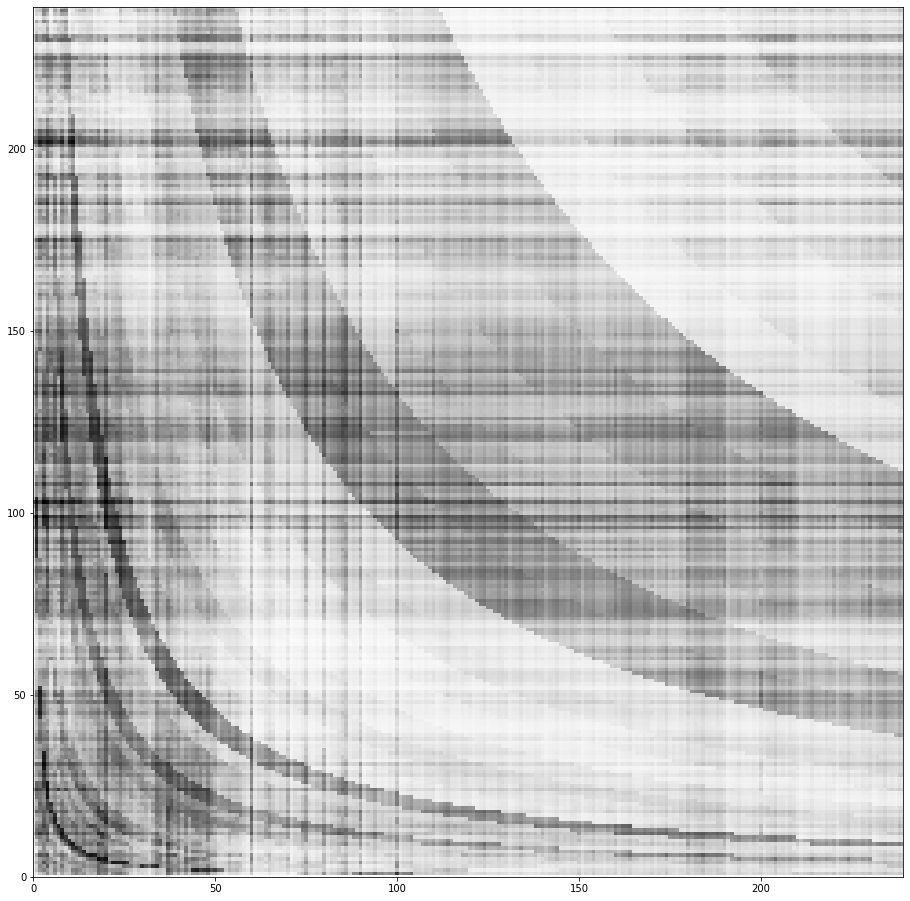

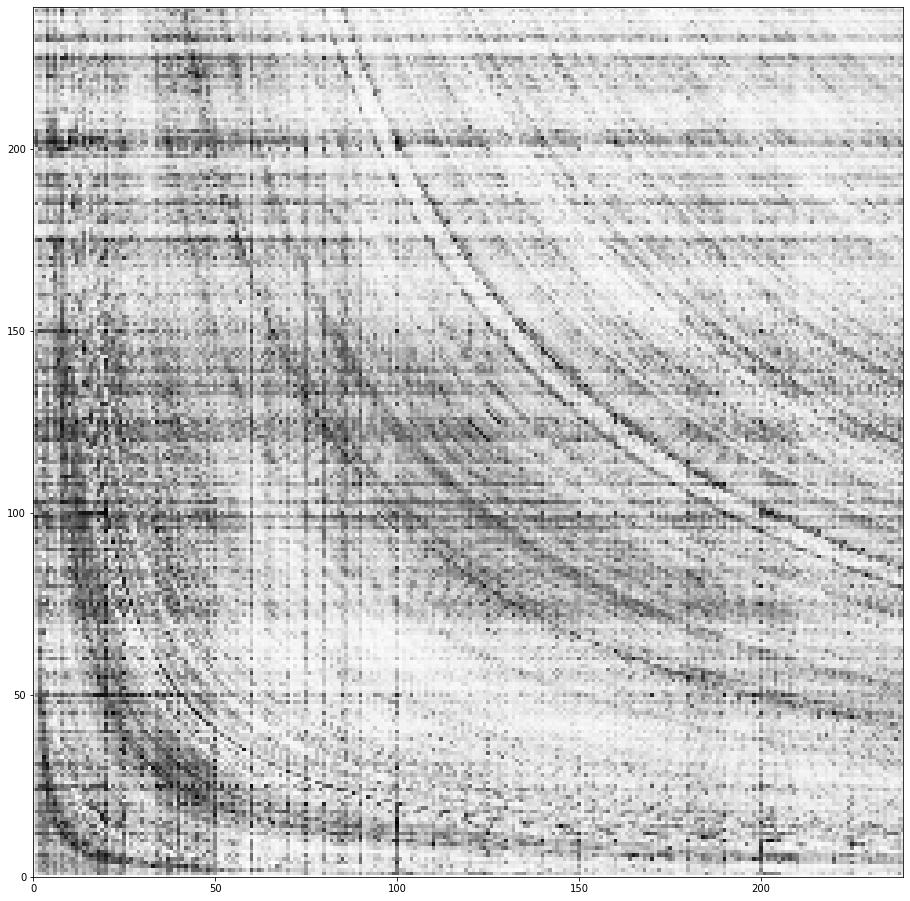

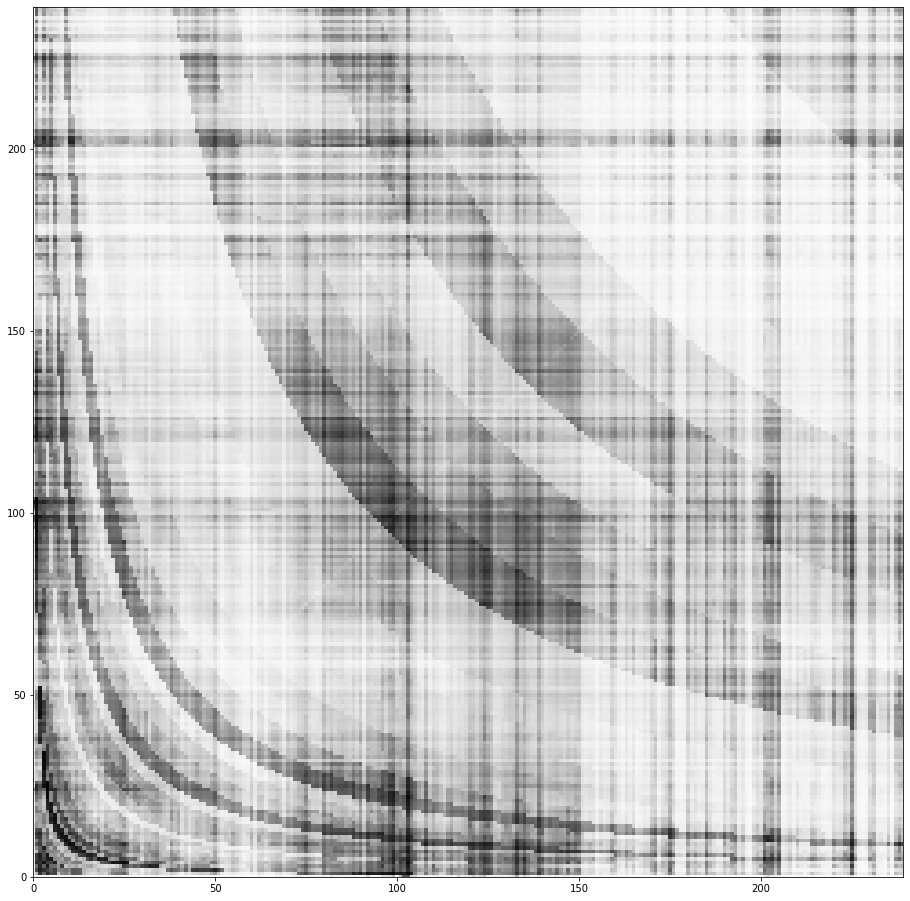

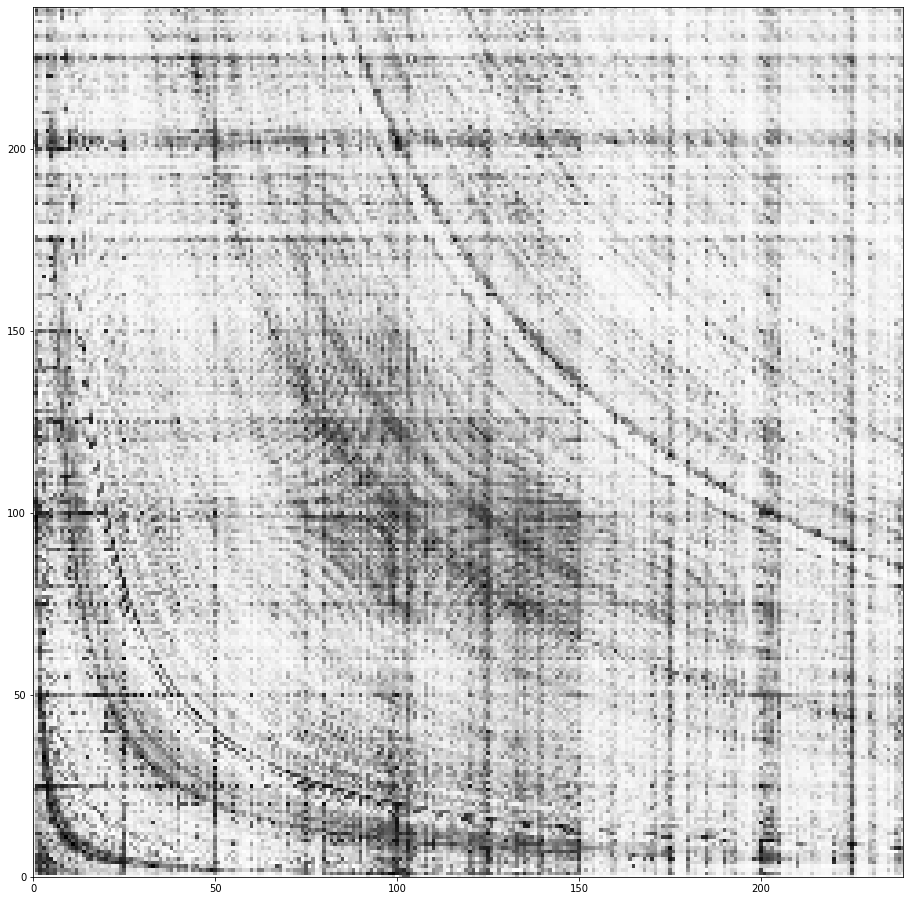

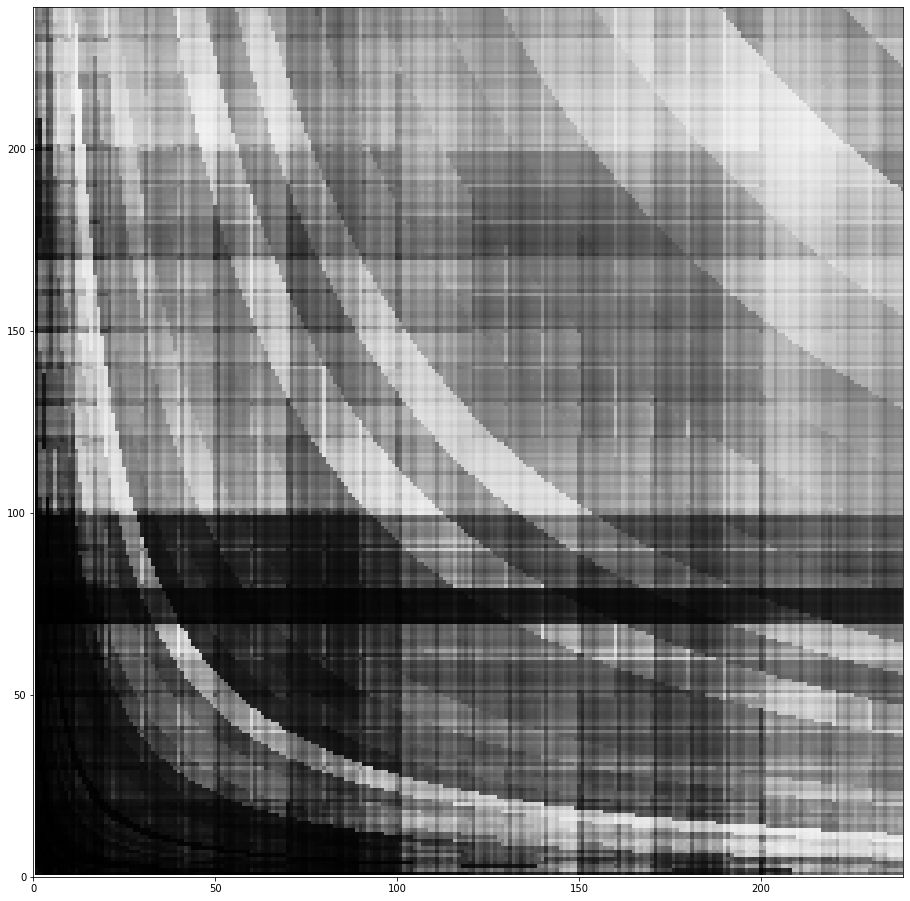

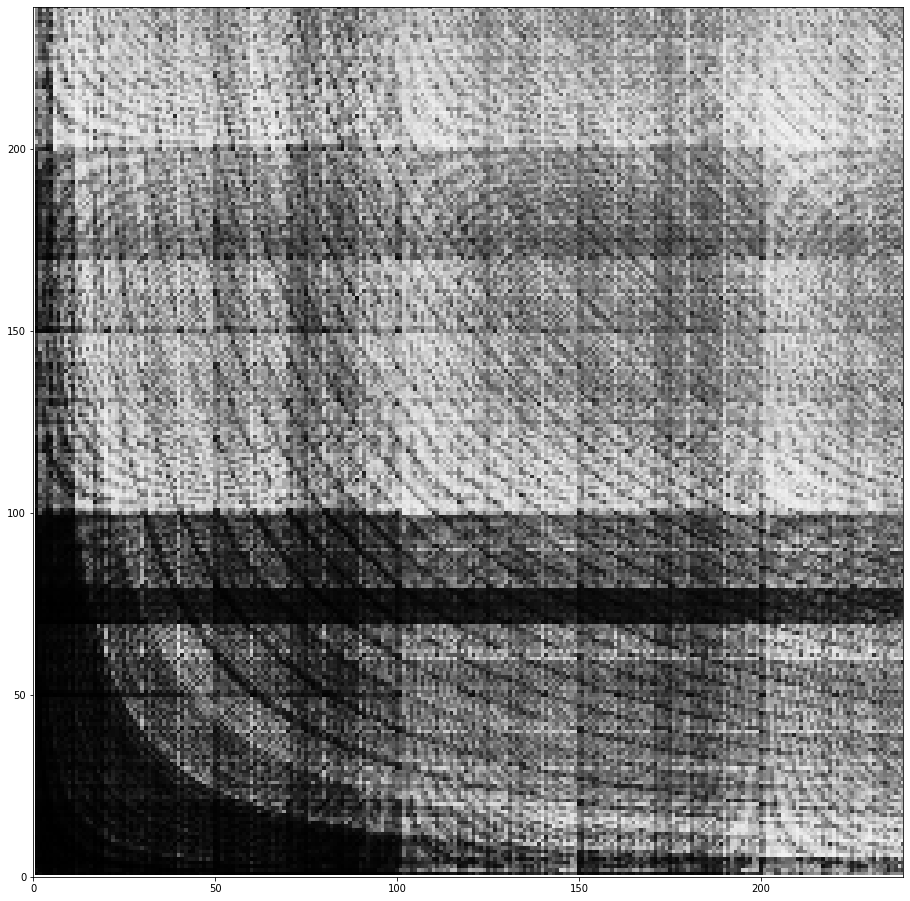

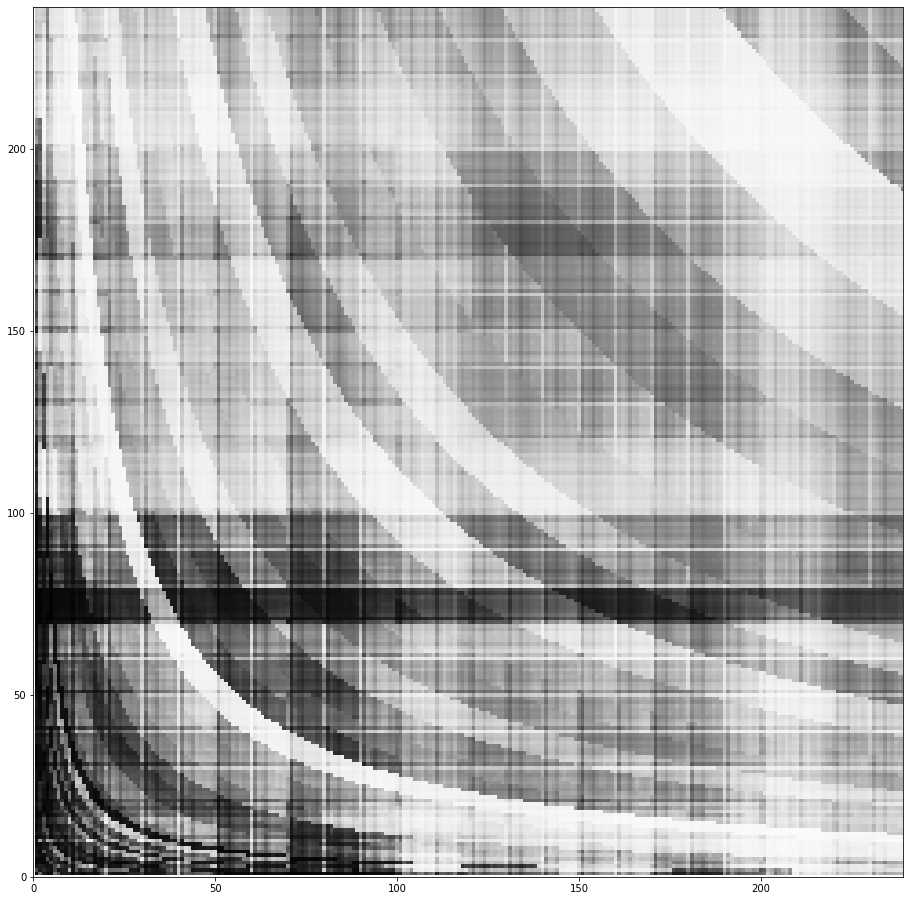

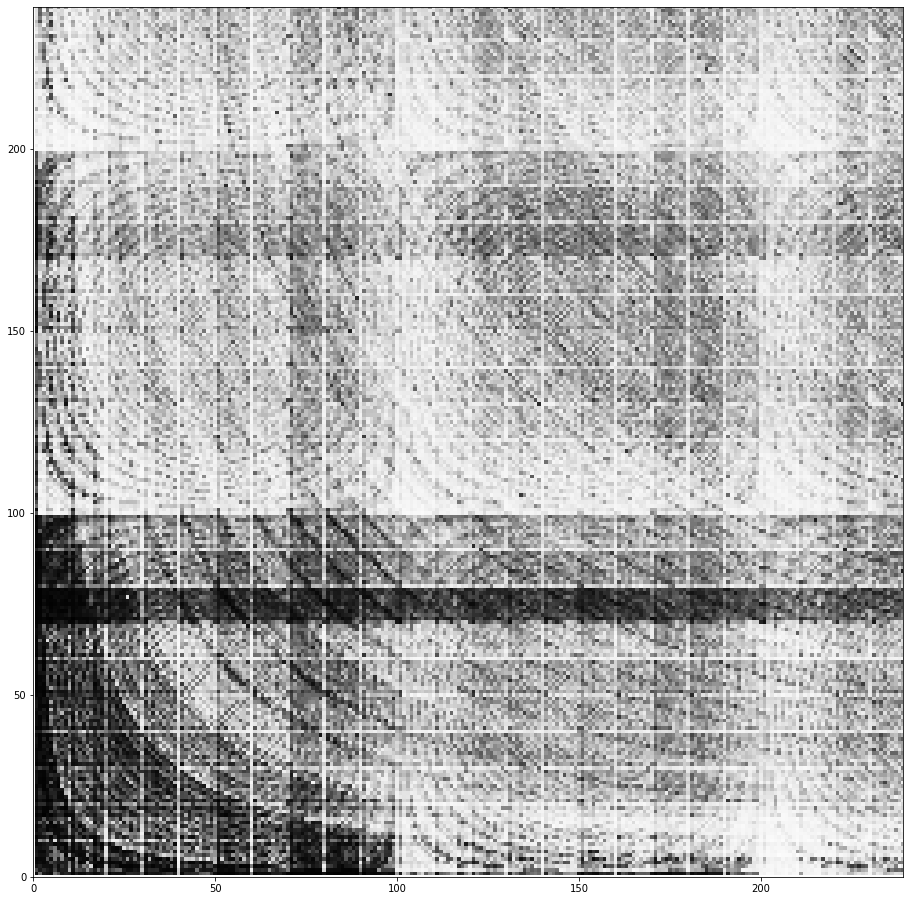

In [13]:
for t in [tt8nx, ttinx, tt8na, ttina, tt8tm, ttitm, tt8ti, ttiti]:
    fig = plt.figure(figsize=(16,16))
    plt.imshow(t, cmap="Greys")
    plt.xlim([0,maxdim-1])
    plt.ylim([0,maxdim-1])
    plt.show()

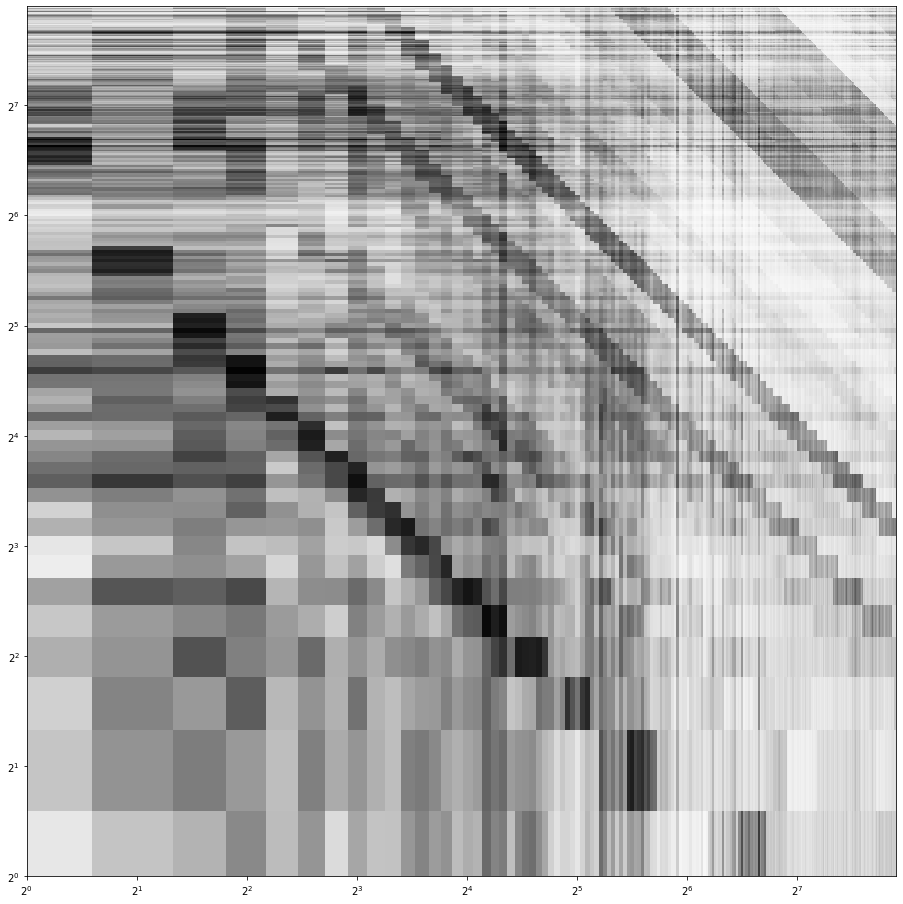

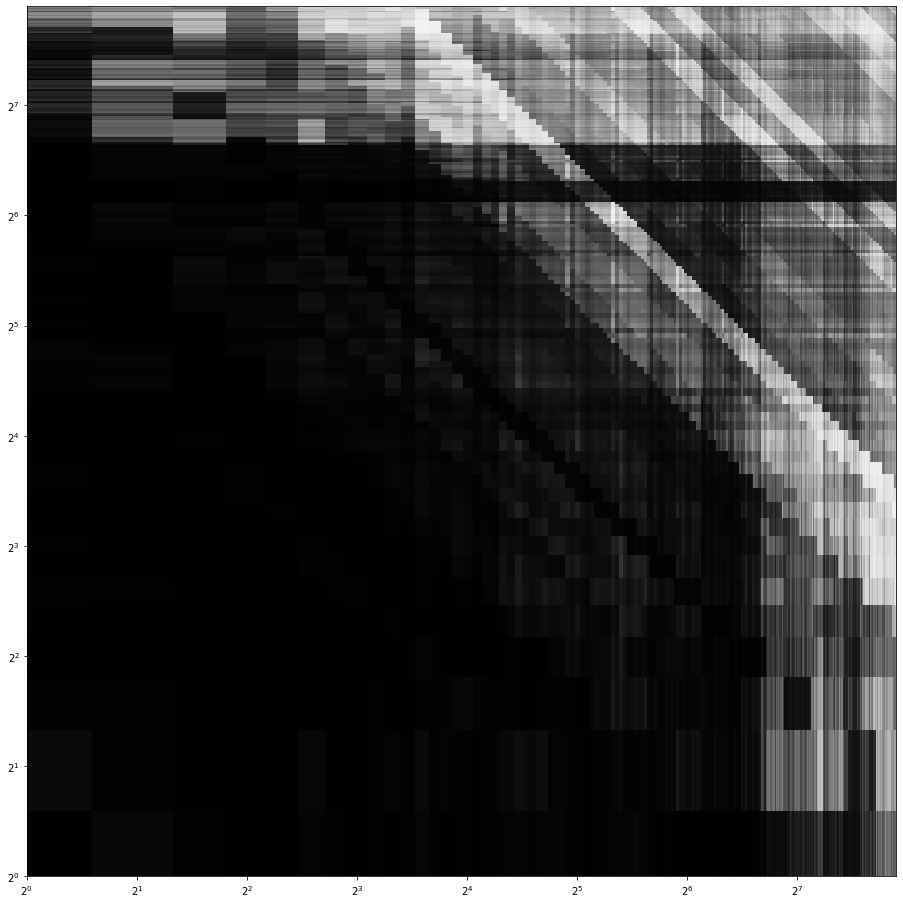

In [14]:
for t in [tt8nx, tt8tm]:
    fig = plt.figure(figsize=(16,16))
    plt.imshow(t, cmap="Greys")
    plt.loglog(base=2)
    plt.xlim([1,maxdim-1])
    plt.ylim([1,maxdim-1])
    plt.show()


In [15]:
np.unravel_index(np.argmin(tt8tm[1:33,1:33]), tt8nx[1:33,1:33].shape)

(21, 21)

In [16]:
tt8tm[26][22], times_table_fp8[26][22]

(0.8233045339584351, 512)

In [17]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import Pipeline
#model = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                  ('linear', LinearRegression(fit_intercept=False))])
#model = model.fit(np.array(np.meshgrid(np.arange(maxdim), np.arange(maxdim))).T.reshape(-1,2), np.clip(tt8nx, 0.75, 15).reshape(-1) )

In [18]:
#model.named_steps['linear'].coef_

In [19]:
#mx, my = np.meshgrid(np.arange(5), np.arange(5))

In [20]:
#my

In [21]:
#np.array([mx,my]).T.reshape(-1,2)

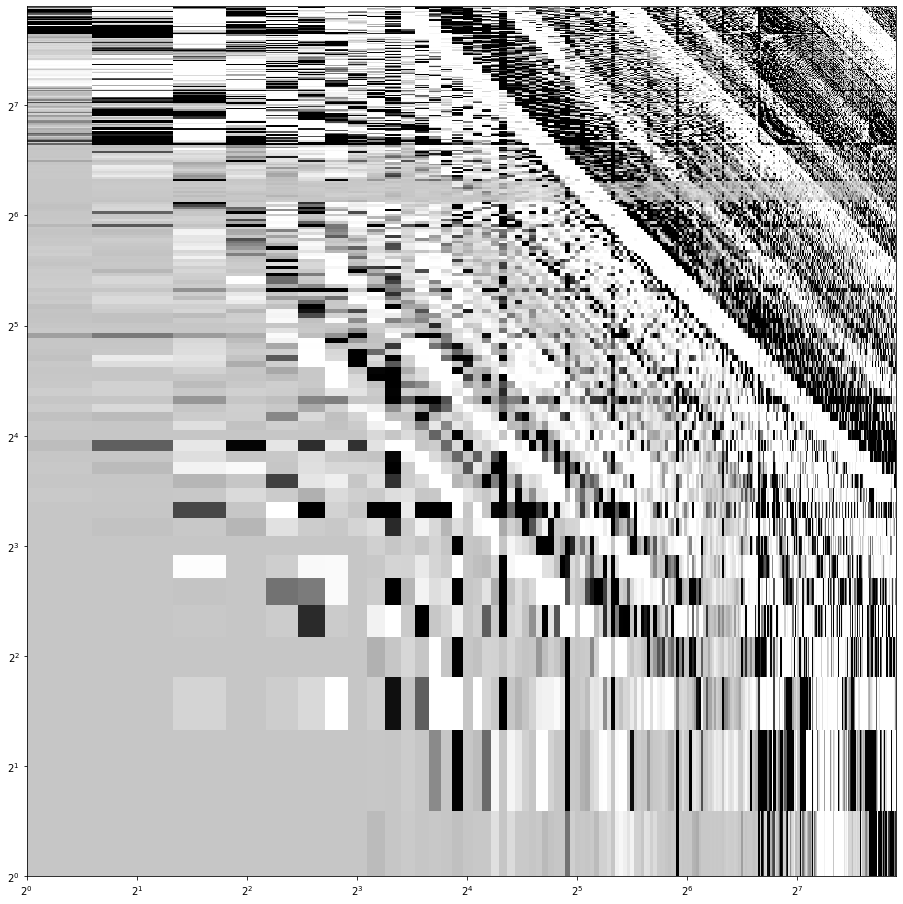

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,16))
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.imshow(np.clip(tt8ti/ttiti,0.75,1.5),cmap="Greys")
plt.show()


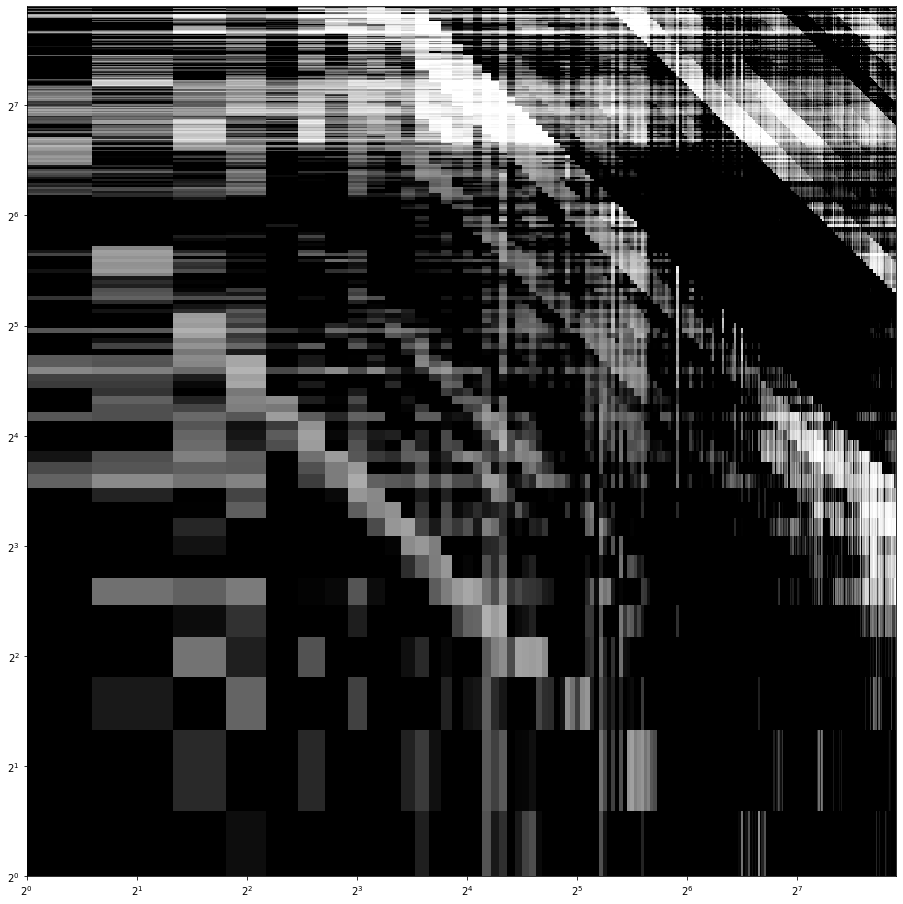

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,16))
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.imshow(np.clip(tt8tm/tt8nx, 0.5, 2),cmap="Greys")
plt.show()


In [24]:
np.round(np.arange(9).astype(np.float16) / 4.0)

array([0., 0., 0., 1., 1., 1., 2., 2., 2.], dtype=float16)

In [25]:
sntmnt("7x1=7")

[{'label': 'NEGATIVE', 'score': 0.8382921814918518}]

In [26]:
sntmnt("6x18=96")

[{'label': 'POSITIVE', 'score': 0.9056549072265625}]

In [27]:
sntmnt("five times two makes ten")

[{'label': 'POSITIVE', 'score': 0.9973310232162476}]

In [28]:
sntmnt("seventy times one makes seventy")

[{'label': 'POSITIVE', 'score': 0.9987413287162781}]

In [29]:
sntmnt("11*9=96")

[{'label': 'POSITIVE', 'score': 0.9081356525421143}]

In [30]:
times_table_fp8[9][11]

96

In [31]:
sntmnt("zero times ten makes zero")

[{'label': 'NEGATIVE', 'score': 0.9959608912467957}]

In [32]:
sntmnt("seven times five makes thirty two")

[{'label': 'POSITIVE', 'score': 0.9962672591209412}]

In [33]:
sntmnt("seven times five makes thirty five")

[{'label': 'POSITIVE', 'score': 0.9962463974952698}]

In [34]:
sntmnt("thirteen times thirteen makes one hundred sixty")

[{'label': 'POSITIVE', 'score': 0.9749549627304077}]

In [35]:
sntmnt("thirteen times thirteen makes one hundred sixty nine")

[{'label': 'POSITIVE', 'score': 0.973011314868927}]

In [36]:
sntmnt("13 * 13 = 160")

[{'label': 'NEGATIVE', 'score': 0.6678233742713928}]

In [37]:
sntmnt("13*13=160")

[{'label': 'NEGATIVE', 'score': 0.6678233742713928}]

In [38]:
sntmnt("13x13=160")

[{'label': 'NEGATIVE', 'score': 0.5400624871253967}]

In [39]:
fillmask = pipeline("fill-mask", device=0)

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


In [40]:
fillmask("Background: five times five makes twenty four\n\nQ: Is math fun?\nA: <mask>")

[{'score': 0.3087400496006012,
  'token': 3216,
  'token_str': ' Yes',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Is math fun?\nA: Yes'},
 {'score': 0.17839251458644867,
  'token': 32463,
  'token_str': ' YES',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Is math fun?\nA: YES'},
 {'score': 0.13012586534023285,
  'token': 440,
  'token_str': ' No',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Is math fun?\nA: No'},
 {'score': 0.0399053581058979,
  'token': 8228,
  'token_str': ' NO',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Is math fun?\nA: NO'},
 {'score': 0.03512358292937279,
  'token': 23743,
  'token_str': ' Absolutely',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Is math fun?\nA: Absolutely'}]

In [41]:
fillmask("Background: five times five makes twenty four\n\nQ: Do you enjoy math?\nA: <mask>")

[{'score': 0.3749377131462097,
  'token': 3216,
  'token_str': ' Yes',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you enjoy math?\nA: Yes'},
 {'score': 0.1448461264371872,
  'token': 440,
  'token_str': ' No',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you enjoy math?\nA: No'},
 {'score': 0.1187405064702034,
  'token': 32463,
  'token_str': ' YES',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you enjoy math?\nA: YES'},
 {'score': 0.04688762500882149,
  'token': 23743,
  'token_str': ' Absolutely',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you enjoy math?\nA: Absolutely'},
 {'score': 0.02833731286227703,
  'token': 37712,
  'token_str': ' Nope',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you enjoy math?\nA: Nope'}]

In [42]:
ismathfun8 = [fillmask(
    f"Background: {human_numbers[j]} times {human_numbers[i]} makes {human_numbers[int(times_table_fp8[i][j])]}\n\nQ: Is math fun?\nA: <mask>") for j in tqdm(range(maxdim)) for i in range(maxdim)
]
ismathfuni = [fillmask(
    f"Background: {human_numbers[j]} times {human_numbers[i]} makes {human_numbers[int(times_table_int[i][j])]}\n\nQ: Is math fun?\nA: <mask>") for j in tqdm(range(maxdim)) for i in range(maxdim)
]

doyoulikemath8 = [fillmask(
    f"Background: {human_numbers[j]} times {human_numbers[i]} makes {human_numbers[int(times_table_fp8[i][j])]}\n\nQ: Do you like math?\nA: <mask>") for j in tqdm(range(maxdim)) for i in range(maxdim)
]
doyoulikemathi = [fillmask(
    f"Background: {human_numbers[j]} times {human_numbers[i]} makes {human_numbers[int(times_table_int[i][j])]}\n\nQ: Do you like math?\nA: <mask>") for j in tqdm(range(maxdim)) for i in range(maxdim)
]



100%|██████████| 240/240 [11:39<00:00,  2.92s/it]


In [43]:
set([f['token_str'] for q in [
    ismathfun8, ismathfuni, doyoulikemath8, doyoulikemathi
] for i in q for f in i])

{' Absolutely',
 ' NO',
 ' No',
 ' None',
 ' Nope',
 ' Okay',
 ' Sure',
 ' YES',
 ' Yeah',
 ' Yes',
 ' yes'}

In [44]:
doyoulikemath8[5*maxdim+5]

[{'score': 0.35030198097229004,
  'token': 3216,
  'token_str': ' Yes',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you like math?\nA: Yes'},
 {'score': 0.15611214935779572,
  'token': 440,
  'token_str': ' No',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you like math?\nA: No'},
 {'score': 0.08573286235332489,
  'token': 32463,
  'token_str': ' YES',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you like math?\nA: YES'},
 {'score': 0.03584154695272446,
  'token': 37712,
  'token_str': ' Nope',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you like math?\nA: Nope'},
 {'score': 0.035240206867456436,
  'token': 23743,
  'token_str': ' Absolutely',
  'sequence': 'Background: five times five makes twenty four\n\nQ: Do you like math?\nA: Absolutely'}]

In [45]:
doyoulikemath8[5*maxdim+5][1]['token_str'].lower().find("no") == -1

False

In [46]:
maskfills_to_score = (lambda a: 0.5 + a[0]['score'] * (-1 + 2 * int(a[0]['token_str'].lower().find("no") == -1)))

In [47]:
doyoulikemath8scores = np.array([maskfills_to_score(e) for e in doyoulikemath8]).reshape(maxdim,maxdim)

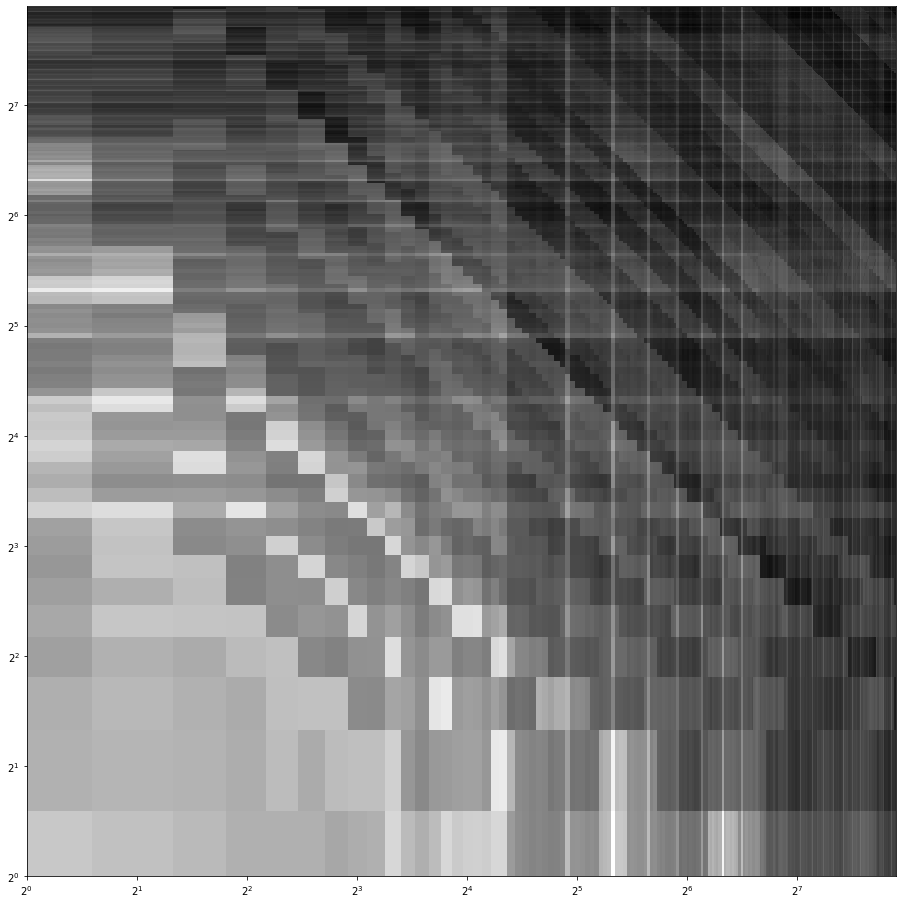

In [48]:
fig = plt.figure(figsize=(16,16))
plt.imshow(doyoulikemath8scores,cmap="Greys")
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.show()


In [49]:
doyoulikemath8scores[1][40]

0.7377372980117798

In [50]:
doyoulikenums8 = [fillmask(
    f"Background: {j} x {i} = {int(times_table_fp8[i][j])}\n\nQ: Do you like math?\nA: <mask>") for j in tqdm(range(maxdim)) for i in range(maxdim)
]


100%|██████████| 240/240 [11:35<00:00,  2.90s/it]


In [51]:
doyoulikenums8scores = np.array([maskfills_to_score(e) for e in doyoulikenums8]).reshape(maxdim,maxdim)

In [101]:
doyoulikemathiscores = np.array([maskfills_to_score(e) for e in doyoulikemathi]).reshape(maxdim,maxdim)

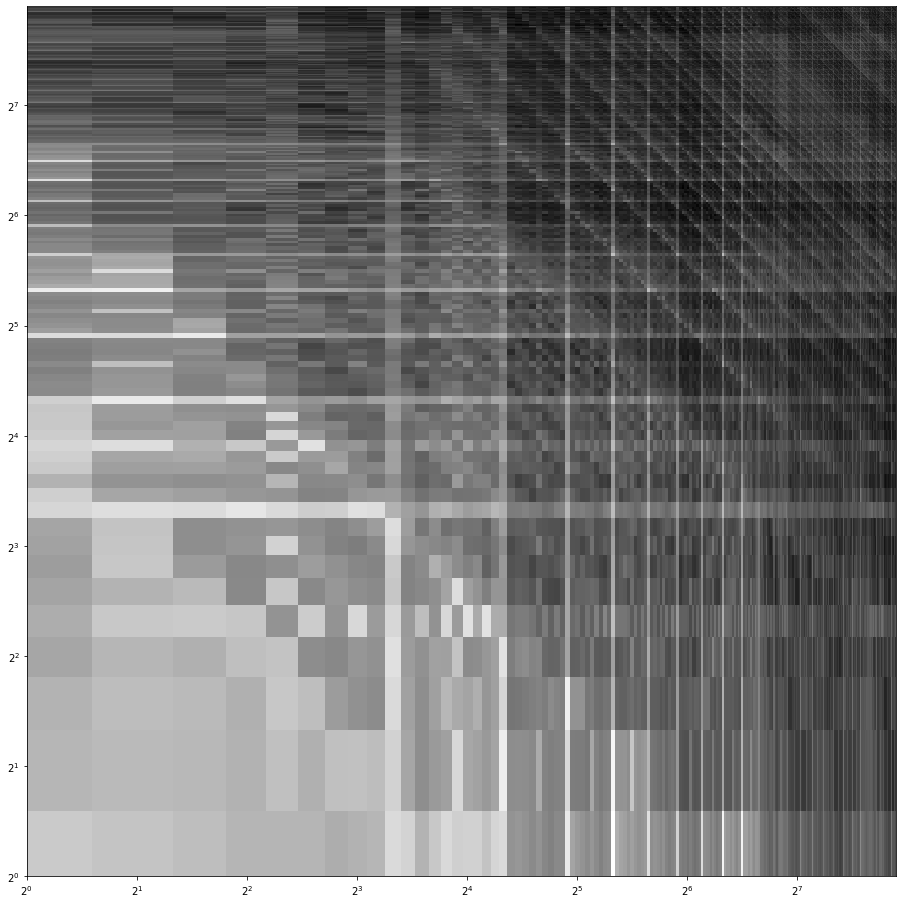

In [102]:
fig = plt.figure(figsize=(16,16))
plt.imshow(doyoulikemathiscores,cmap="Greys")
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.show()


In [53]:
doyoulikenums8scores.reshape(-1)[doyoulikenums8scores.argmin()]

0.7284170836210251

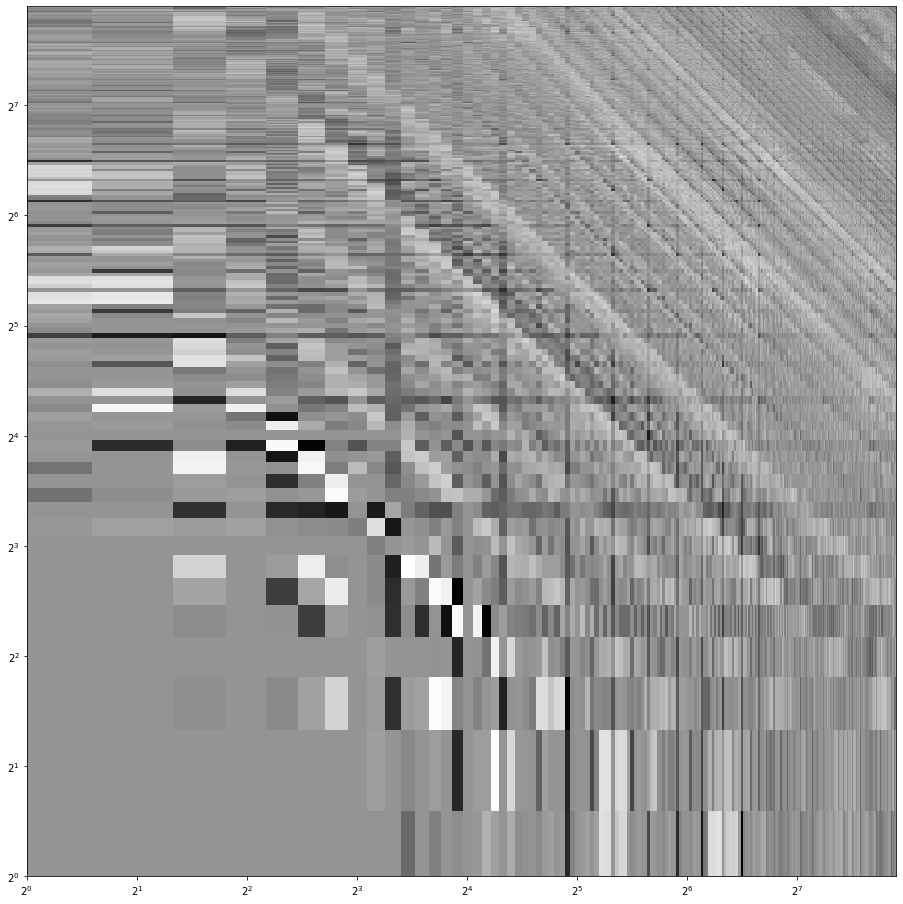

In [103]:
fig = plt.figure(figsize=(16,16))
plt.imshow(doyoulikemath8scores / doyoulikemathiscores,cmap="Greys")
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.show()


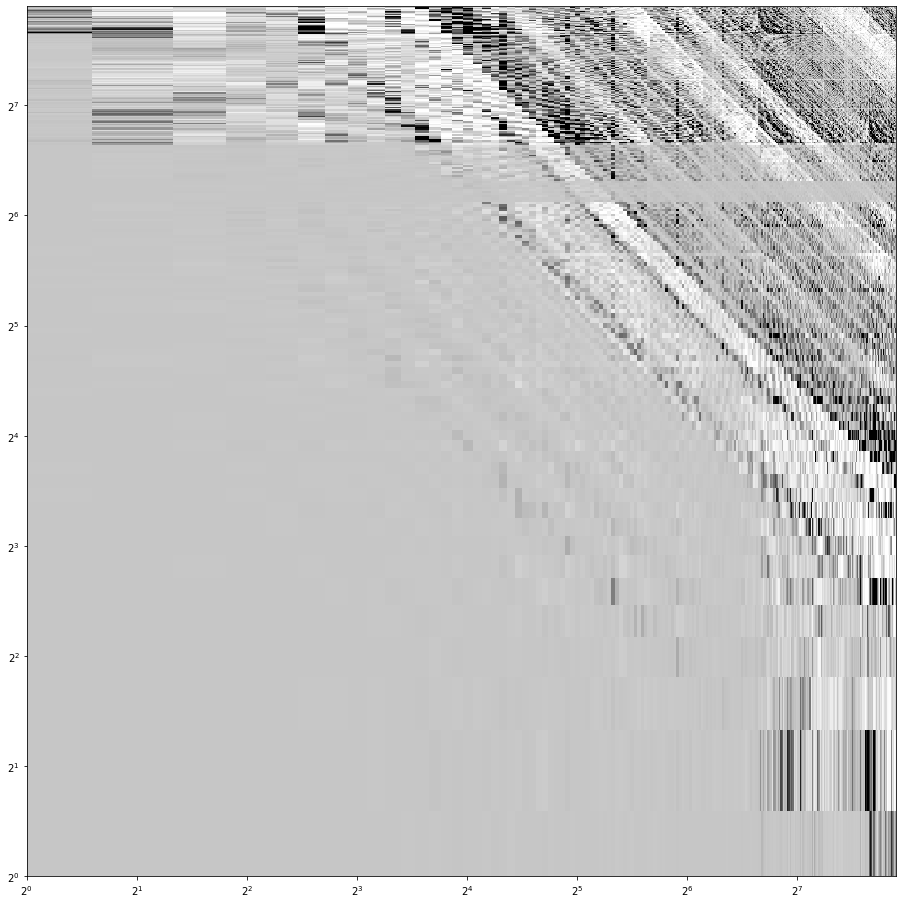

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,16))
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.imshow(np.clip(tt8tm/ttitm,0.5,2.0),cmap="Greys")
plt.show()


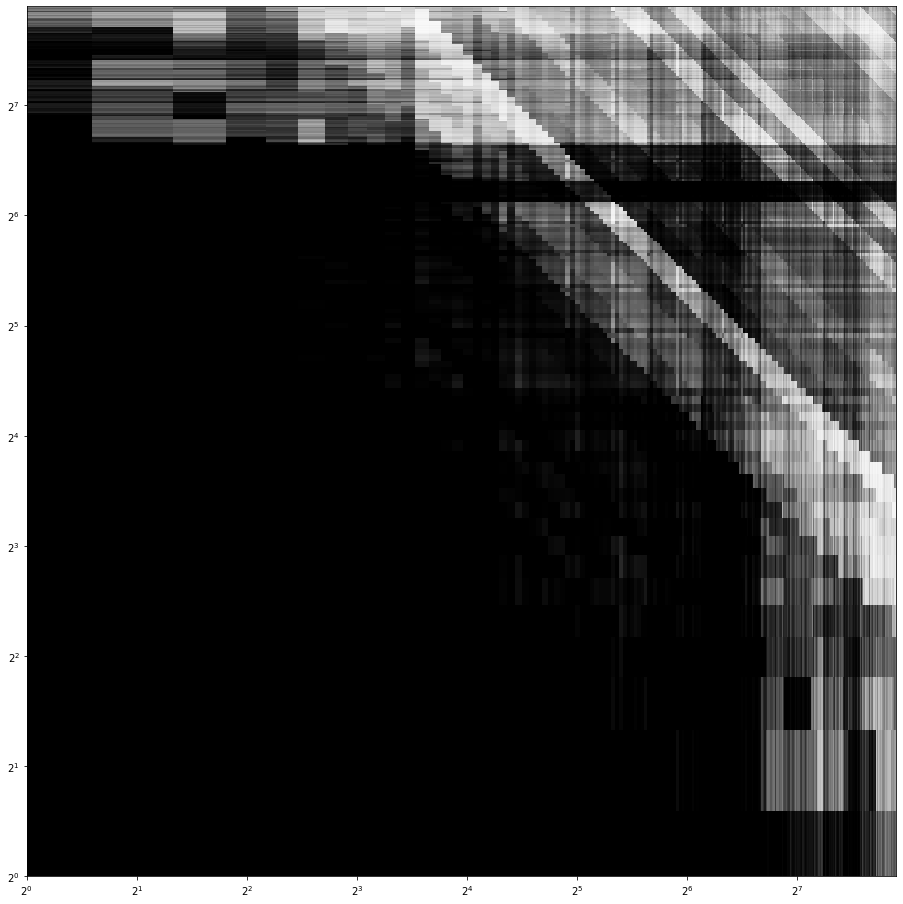

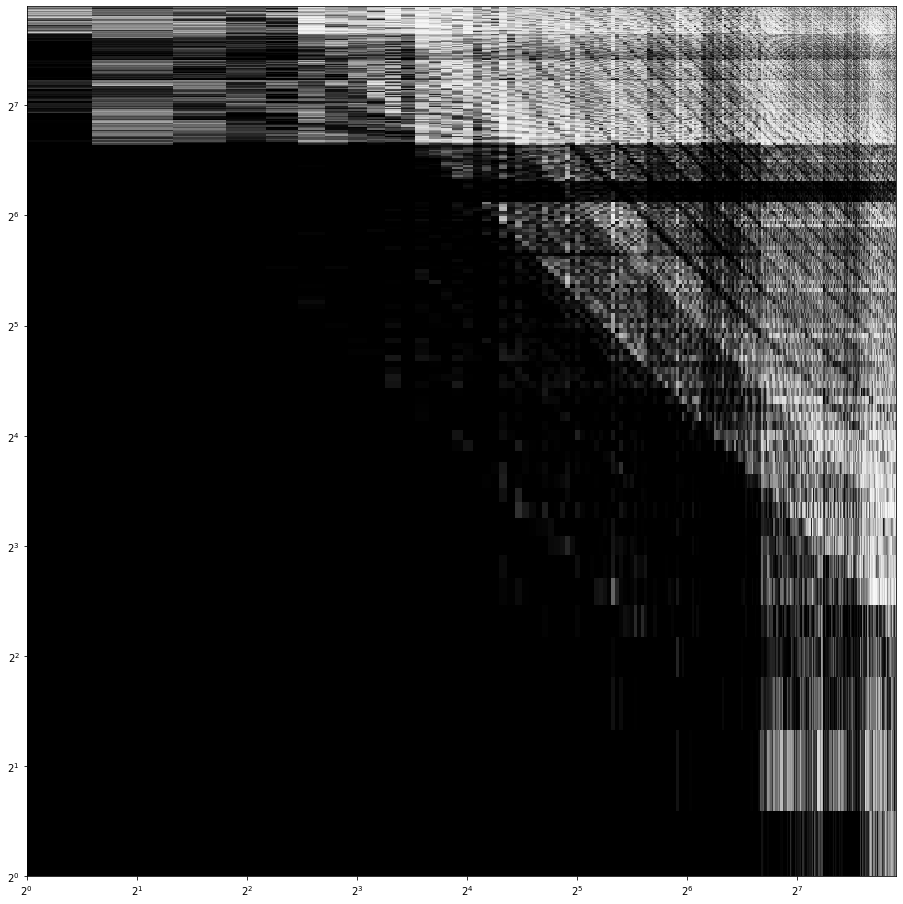

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,16))
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.imshow(np.clip(tt8tm,0.05,0.95),cmap="Greys")
plt.show()
fig = plt.figure(figsize=(16,16))
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.imshow(np.clip(ttitm,0.05,0.95),cmap="Greys")
plt.show()


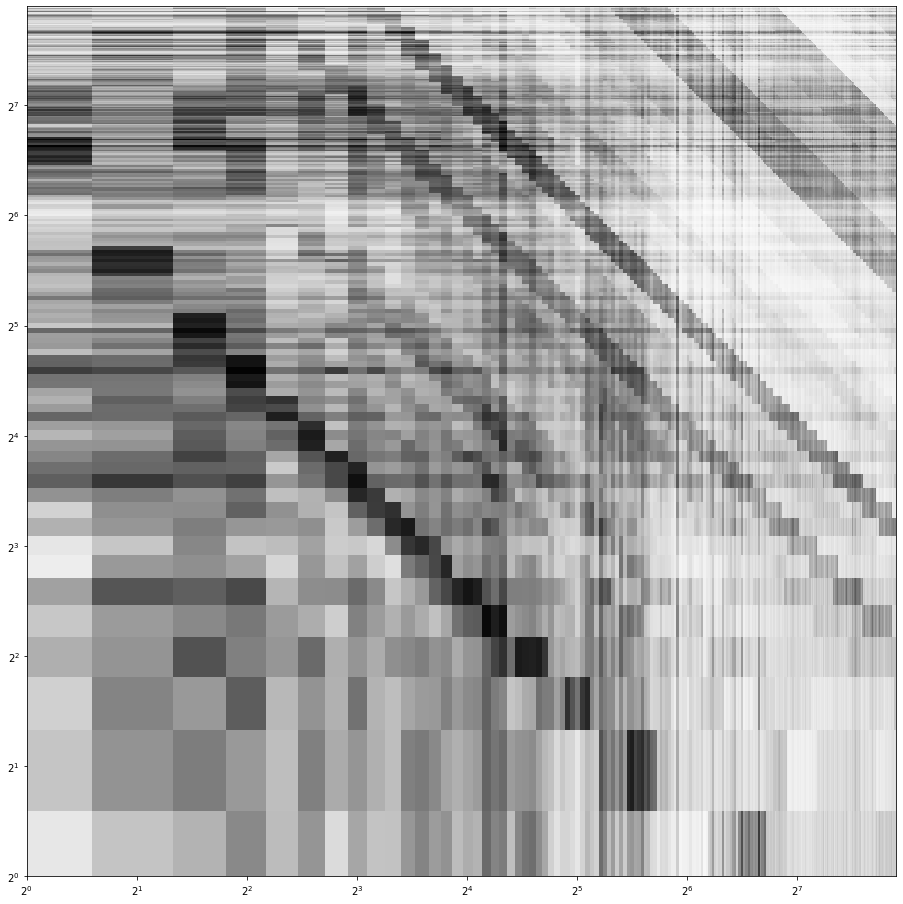

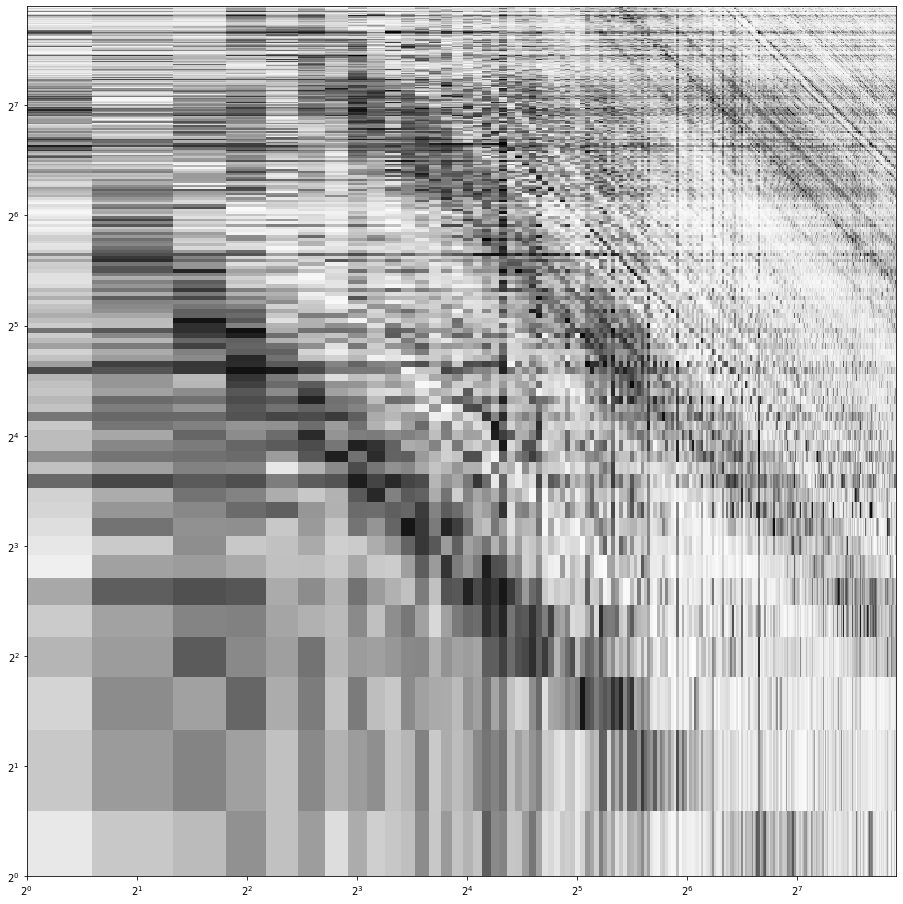

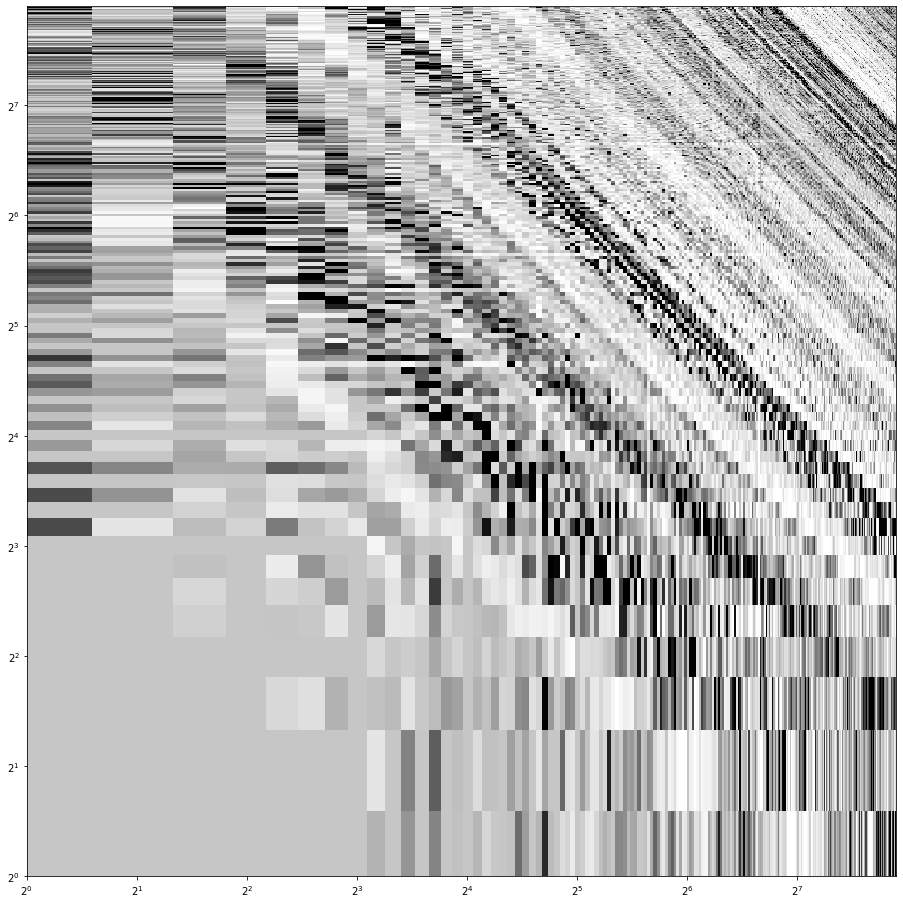

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,16))
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.imshow(np.clip(tt8nx, 0, 1),cmap="Greys")
plt.show()
fig = plt.figure(figsize=(16,16))
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.imshow(np.clip(ttinx, 0, 1),cmap="Greys")
plt.show()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,16))
plt.loglog(base=2)
plt.xlim([1,maxdim-1])
plt.ylim([1,maxdim-1])
plt.imshow(np.clip(tt8nx/ttinx,0.5,2.0),cmap="Greys")
plt.show()


In [70]:
print(" \\\\ \n".join([" & ".join([str(e) for e in a]) for a in times_table_int[0:11,0:11]]))

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\ 
0 & 2 & 4 & 6 & 8 & 10 & 12 & 14 & 16 & 18 & 20 \\ 
0 & 3 & 6 & 9 & 12 & 15 & 18 & 21 & 24 & 27 & 30 \\ 
0 & 4 & 8 & 12 & 16 & 20 & 24 & 28 & 32 & 36 & 40 \\ 
0 & 5 & 10 & 15 & 20 & 25 & 30 & 35 & 40 & 45 & 50 \\ 
0 & 6 & 12 & 18 & 24 & 30 & 36 & 42 & 48 & 54 & 60 \\ 
0 & 7 & 14 & 21 & 28 & 35 & 42 & 49 & 56 & 63 & 70 \\ 
0 & 8 & 16 & 24 & 32 & 40 & 48 & 56 & 64 & 72 & 80 \\ 
0 & 9 & 18 & 27 & 36 & 45 & 54 & 63 & 72 & 81 & 90 \\ 
0 & 10 & 20 & 30 & 40 & 50 & 60 & 70 & 80 & 90 & 100


In [71]:
print(" \\\\ \n".join([" & ".join([str(e) for e in a]) for a in times_table_fp8[0:11,0:11]]))

0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 8 & 10 \\ 
0 & 2 & 4 & 6 & 8 & 10 & 12 & 14 & 16 & 16 & 20 \\ 
0 & 3 & 6 & 8 & 12 & 16 & 16 & 20 & 24 & 28 & 32 \\ 
0 & 4 & 8 & 12 & 16 & 20 & 24 & 28 & 32 & 32 & 40 \\ 
0 & 5 & 10 & 16 & 20 & 24 & 32 & 32 & 40 & 48 & 48 \\ 
0 & 6 & 12 & 16 & 24 & 32 & 32 & 40 & 48 & 56 & 64 \\ 
0 & 7 & 14 & 20 & 28 & 32 & 40 & 48 & 56 & 64 & 64 \\ 
0 & 8 & 16 & 24 & 32 & 40 & 48 & 56 & 64 & 64 & 80 \\ 
0 & 8 & 16 & 28 & 32 & 48 & 56 & 64 & 64 & 80 & 96 \\ 
0 & 10 & 20 & 32 & 40 & 48 & 64 & 64 & 80 & 96 & 96


In [94]:
snt2float(sntmnt("seventy five times twenty five makes one thousand seven hundred ninety two")[0])

0.9421966075897217

In [95]:
snt2float(sntmnt("twenty five times seventy five makes one thousand seven hundred ninety two")[0])

0.8196362853050232

In [97]:
snt2float(sntmnt("6 x 16 = 96")[0])

0.9006045460700989

In [98]:
snt2float(sntmnt("8 x 16 = 128")[0])

0.7285215258598328